<a href="https://colab.research.google.com/github/asmaamohamed1989/Electro_pi_Scholarship-Projects/blob/main/telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer,confusion_matrix,plot_confusion_matrix
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import seaborn as sns
import requests
import re  
import itertools
from scipy import stats as st
import seaborn as sns
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

In [ ]:
df = pd.read_excel('Downloads/Telco_customer_churn.xlsx/Telco_customer_churn.xlsx')
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

Now i'm looking for What these Columns explains and Remove The non imporant ones .....

mark them to drop them later (Count, Country , State , Lat Long ,Churn Label , Churn Score ,CLTV ,Churn Reason )

Here i'm deleting lat long because it just combination from Latitude and longtuide ,also deleting the churn label 
because it just the same of churn value ,also deleting the Count,country and state because it is the same for all ,
that's meaning of that is will have not any effectiveness when we build the model ,also deleting the churn score ,cltv and churn reason because it doesn't help when making the model to predict who will leave later 


In [ ]:
df = df.drop(
    ['CustomerID','Count', 'Country' , 'State' , 'Lat Long' ,'Churn Label' , 'Churn Score' ,'CLTV' ,'Churn Reason' ]
    ,axis = 1
)

In [ ]:
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los Angeles     90003  33.964131 -118.272783    Male             No   
1  Los Angeles     90005  34.059281 -118.307420  Female             No   
2  Los Angeles     90006  34.048013 -118.293953  Female             No   
3  Los Angeles     90010  34.062125 -118.315709  Female             No   
4  Los Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

<h3> Check the types of Features to know if something wrong happened out there when they store it </h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

<h4> it seems like something going on wrong with Total Charges </h4>

In [ ]:
df[~df['Total Charges'].str.contains('\d+\.?\d*',na=True)]

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
2234  San Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun City     92585  33.739412 -117.173334    Male             No   
5104      Ben Lomond     95005  37.078873 -122.090386  Female             No   
5719        La Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure Months Phone Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device Protection         Tech Support         Streaming TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming Movies  Contract Paperless Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment Method Monthly Charges Total Charges Churn Value  
2234  Bank transfer (automatic)           52.55                         0  
2438               Mailed check           20.25                         0  
2568               Mailed check           80.85                         0  
2667               Mailed check           25.75                         0  
2856    Credit card (automatic)           56.05                         0  
4331               Mailed check           19.85                         0  
4687               Mailed check           25.35                         0  
5104               Mailed check           20.00                         0  
5719               Mailed check           19.70                         0  
6772               Maile

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

it seems like they  subscribed lately , that means we need to fill the total charges with zero 

In [ ]:
df.loc[(df['Total Charges']==' ') , 'Total Charges'] = 0

In [ ]:
df[df['Tenure Months'] == 0]

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
2234  San Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun City     92585  33.739412 -117.173334    Male             No   
5104      Ben Lomond     95005  37.078873 -122.090386  Female             No   
5719        La Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure Months Phone Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device Protection         Tech Support         Streaming TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming Movies  Contract Paperless Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment Method Monthly Charges Total Charges Churn Value  
2234  Bank transfer (automatic)           52.55             0           0  
2438               Mailed check           20.25             0           0  
2568               Mailed check           80.85             0           0  
2667               Mailed check           25.75             0           0  
2856    Credit card (automatic)           56.05             0           0  
4331               Mailed check           19.85             0           0  
4687               Mailed check           25.35             0           0  
5104               Mailed check           20.00             0           0  
5719               Mailed check           19.70             0           0  
6772               Maile

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

In [ ]:
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los Angeles     90003  33.964131 -118.272783    Male             No   
1  Los Angeles     90005  34.059281 -118.307420  Female             No   
2  Los Angeles     90006  34.048013 -118.293953  Female             No   
3  Los Angeles     90010  34.062125 -118.315709  Female             No   
4  Los Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65        820.50   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70       5036.30   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

now i have some hypothesis to check 

1 - the person who have a Partner charge more than who is single = they call or chat eachother more 

2 - there some cities total charges significantly different from the rest of cities = maybe some cites people lived there are poor people or the most of them is wealthy ,so i need to know if there is some cities we can target them more effectively to make more money 

3 - is the different of the gender make one of them charge more ? like boys maybe streaming so they charge more than girls or the girls make videos so it requires to charge more

<AxesSubplot:xlabel='Total Charges', ylabel='Count'>

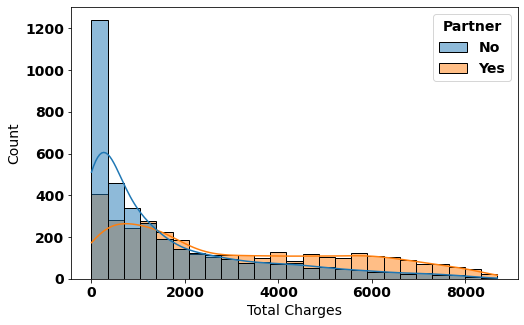

In [ ]:
sns.histplot(data = df , x='Total Charges' , hue = 'Partner' , kde = True)

In [ ]:
df.groupby('Partner')['Total Charges'].agg(['mean','std','median'])

mean          std   median
Partner                                   
No       1584.089810  1874.641542   811.65
Yes      3024.249765  2409.468216  2341.85

it seems like the person who have a partner charge more than the person who doesn't have a partner 
Ummm.... maybe we can get some insights here which is :
we need to target the people who have a partner because they make the company earn more 

In [ ]:
df.groupby('City')['Total Charges'].sum().sort_values(ascending = False)

City
Los Angeles      647751.25
San Diego        354896.60
Sacramento       256295.05
San Jose         243735.55
San Francisco    221624.65
                   ...    
Homeland            668.25
Dana Point          556.80
Loleta              484.65
Truckee             479.35
Eagleville          203.40
Name: Total Charges, Length: 1129, dtype: float64

1 - like i said before , it seems like some cities perform much better than others , maybe because the service in some cities is bad or the customer service perform badly or maybe some of the competitors perform well more than us in these cities

2 - we need to give the most effective cities some advantages or coupons to keep them with us -> they make the company earns alot of money 

<AxesSubplot:xlabel='City', ylabel='Total Money'>

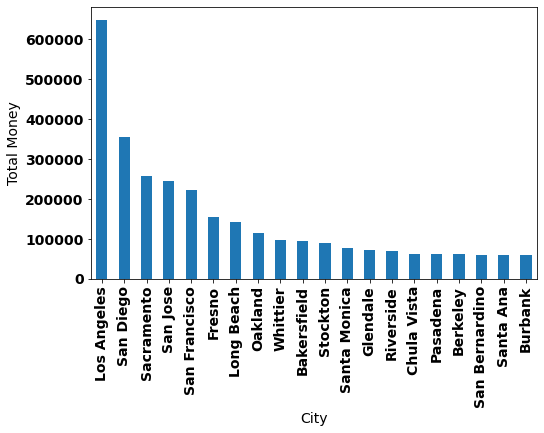

In [ ]:
df.groupby('City')['Total Charges'].sum().sort_values(ascending = False)[:20].plot(kind = 'bar',ylabel = 'Total Money')

In [ ]:
df.groupby('Gender')['Total Charges'].agg(['mean','median','std'])

mean    median          std
Gender                                    
Female  2279.918062  1384.725  2270.845667
Male    2279.554008  1401.150  2263.132028

Ummm.. it seems like the Gender Doesn't effect on the total charges 

<h4>
Now i can keeping looking for some insights but i want to focus now on making the model to predict if the customer will stay or leave </h4>

In [ ]:
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los Angeles     90003  33.964131 -118.272783    Male             No   
1  Los Angeles     90005  34.059281 -118.307420  Female             No   
2  Los Angeles     90006  34.048013 -118.293953  Female             No   
3  Los Angeles     90010  34.062125 -118.315709  Female             No   
4  Los Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65        820.50   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70       5036.30   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

Now i need to check if the data are balanced or not

In [ ]:
df['Churn Value'].dtype

dtype('int64')

In [ ]:
df['Churn Value'].sum() / len(df) *100

26.536987079369588

Unfortunalety we have unblanced data with 27% of people leaves and 73% stay so we need to choose a good model to handle this situation because now the model will be bias for the people they don't leave 

explaination : it learn from a lot of examples how to find a pattern to know if someone will stay, but in people are leaving there is not  enough data as much as the category will stay

<h3> Try XGBOOST first </h3>

Now we will use one hot encoder ,so model can handle the whole features 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [ ]:
columns_to_convert = []
for feature in df.columns:
    if(df[feature].dtype == 'O'):
        columns_to_convert.append(feature)
columns_to_convert

['City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [ ]:
X = df.drop('Churn Value',axis = 1)
y = df['Churn Value']

In [ ]:
X_ecnoded = pd.get_dummies(X,columns=columns_to_convert)
X_ecnoded.head()

Zip Code   Latitude   Longitude  Tenure Months  Monthly Charges  \
0     90003  33.964131 -118.272783              2            53.85   
1     90005  34.059281 -118.307420              2            70.70   
2     90006  34.048013 -118.293953              8            99.65   
3     90010  34.062125 -118.315709             28           104.80   
4     90015  34.039224 -118.266293             49           103.70   

   Total Charges  City_Acampo  City_Acton  City_Adelanto  City_Adin  ...  \
0         108.15            0           0              0          0  ...   
1         151.65            0           0              0          0  ...   
2         820.50            0           0              0          0  ...   
3        3046.05            0           0              0          0  ...   
4        5036.30            0           0              0          0  ...   

   Streaming Movies_Yes  Contract_Month-to-month  Contract_One year  \
0                     0                        1                  0   
1                     0                        1                  0   
2                     1                        1                  0   
3                     1                        1                  0   
4                     1                        1                  0   

   Contract_Two year  Paperless Billing_No  Paperless Billing_Yes  \
0                  0                     0                      1   
1                  0                     0                      1   
2                  0                     0                      1   
3                  0                     0                      1   
4                  0                     0                      1   

   Payment Method_Bank transfer (automatic)  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
0                                       0                                0   
1                                       0                                1   
2                                       0                                1   
3                                       0                                1   
4                                       0                                0   

   Payment Method_Mailed check  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 1178 columns]

In [ ]:
# we use the stratify technique to make sure the train and test data have the same propotions of values 
# imagine if we didn't make it -> maybe it will lead the whole 27% of data go to the training or the test data
#it will make the model the worst model ever
x_train , x_test , y_train , y_test = train_test_split(X_ecnoded , y,test_size=0.2 ,random_state=42 , stratify=y)

In [ ]:
clf = xgb.XGBClassifier(objective='binary:logistic', seed = 33)
clf.fit(
    x_train,
    y_train,
    early_stopping_rounds = 11,
    eval_metric = 'aucpr',
    eval_set = [(x_test,y_test)]
)

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.64582
[1]	validation_0-aucpr:0.65716
[2]	validation_0-aucpr:0.66011
[3]	validation_0-aucpr:0.65936
[4]	validation_0-aucpr:0.66269
[5]	validation_0-aucpr:0.65553
[6]	validation_0-aucpr:0.65772
[7]	validation_0-aucpr:0.65969
[8]	validation_0-aucpr:0.66130
[9]	validation_0-aucpr:0.66211
[10]	validation_0-aucpr:0.66157
[11]	validation_0-aucpr:0.65741
[12]	validation_0-aucpr:0.65857
[13]	validation_0-aucpr:0.65485
[14]	validation_0-aucpr:0.65300


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=33,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

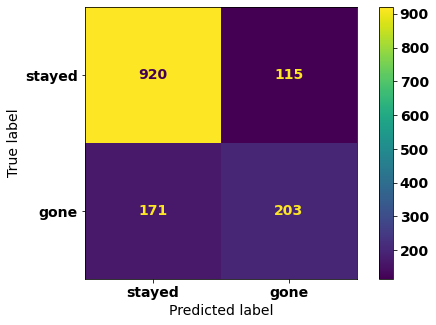

In [ ]:
plot_confusion_matrix(clf,x_test,y_test,display_labels = ['stayed','gone'])

Now we need to handle the 171 persons which is we predicted them wrongly ,but why not focus on the another 115 persons ?

okay simply if we predict that someone will leave and actually he will not , it will not make a big effect because it's nice to give people coupons or anything special it will make them loyal for us ,but in contrast if we predict that someone will stay and he actually leave us that will lead make the company loose money and we don't want that to happen 

In [ ]:
param_grid ={
    'max_depth' :[3,4,5,6],
    'learning_rate':[0.01,0.1,0.05,0.5],
    'gamma':[0,0.25,0.1,0.01],
    'scale_pos_weight':[1,2,3,4],
    'reg_lambda':[0,0.1,1,5,10]
}
optimal_params = GridSearchCV(
estimator=xgb.XGBClassifier(
    objective='binary:logistic',
    subsample = 0.9,
    colsample_bytree = 0.7,
    seed = 33
),
    param_grid= param_grid
)

In [ ]:
optimal_params.fit(x_train,y_train,early_stopping_rounds = 11 ,eval_metric = 'auc', eval_set =[(x_test,y_test)])
optimal_params.best_params_

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80131
[1]	validation_0-auc:0.83055
[2]	validation_0-auc:0.82903
[3]	validation_0-auc:0.83903
[4]	validation_0-auc:0.83745
[5]	validation_0-auc:0.83810
[6]	validation_0-auc:0.83843
[7]	validation_0-auc:0.83983
[8]	validation_0-auc:0.83955
[9]	validation_0-auc:0.83913
[10]	validation_0-auc:0.83964
[11]	validation_0-auc:0.83935
[12]	validation_0-auc:0.83878
[13]	validation_0-auc:0.83761
[14]	validation_0-auc:0.83917
[15]	validation_0-auc:0.83814
[16]	validation_0-auc:0.83881
[17]	validation_0-auc:0.83902


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83190
[2]	validation_0-auc:0.82997
[3]	validation_0-auc:0.83975
[4]	validation_0-auc:0.83544
[5]	validation_0-auc:0.83672
[6]	validation_0-auc:0.83785
[7]	validation_0-auc:0.83794
[8]	validation_0-auc:0.83982
[9]	validation_0-auc:0.84039
[10]	validation_0-auc:0.84088
[11]	validation_0-auc:0.83985
[12]	validation_0-auc:0.84002
[13]	validation_0-auc:0.84014
[14]	validation_0-auc:0.84078
[15]	validation_0-auc:0.84024
[16]	validation_0-auc:0.84011
[17]	validation_0-auc:0.83978
[18]	validation_0-auc:0.83930
[19]	validation_0-auc:0.84024
[20]	validation_0-auc:0.84023
[21]	validation_0-auc:0.84067


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78645
[1]	validation_0-auc:0.81949
[2]	validation_0-auc:0.81267
[3]	validation_0-auc:0.83016
[4]	validation_0-auc:0.83423
[5]	validation_0-auc:0.83707
[6]	validation_0-auc:0.83881
[7]	validation_0-auc:0.84008
[8]	validation_0-auc:0.84068
[9]	validation_0-auc:0.84025
[10]	validation_0-auc:0.84121
[11]	validation_0-auc:0.84035
[12]	validation_0-auc:0.84011
[13]	validation_0-auc:0.83796
[14]	validation_0-auc:0.83936
[15]	validation_0-auc:0.84004
[16]	validation_0-auc:0.83999
[17]	validation_0-auc:0.84020
[18]	validation_0-auc:0.84015
[19]	validation_0-auc:0.84071
[20]	validation_0-auc:0.84073
[21]	validation_0-auc:0.84048


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78757
[1]	validation_0-auc:0.81716
[2]	validation_0-auc:0.81470
[3]	validation_0-auc:0.83074
[4]	validation_0-auc:0.83495
[5]	validation_0-auc:0.83795
[6]	validation_0-auc:0.83849
[7]	validation_0-auc:0.83850
[8]	validation_0-auc:0.83920
[9]	validation_0-auc:0.83909
[10]	validation_0-auc:0.83930
[11]	validation_0-auc:0.83982
[12]	validation_0-auc:0.83924
[13]	validation_0-auc:0.83909
[14]	validation_0-auc:0.83868
[15]	validation_0-auc:0.83928
[16]	validation_0-auc:0.83920
[17]	validation_0-auc:0.83862
[18]	validation_0-auc:0.83823
[19]	validation_0-auc:0.83843
[20]	validation_0-auc:0.83837
[21]	validation_0-auc:0.83879
[22]	validation_0-auc:0.83884


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80550
[2]	validation_0-auc:0.82526
[3]	validation_0-auc:0.83092
[4]	validation_0-auc:0.83025
[5]	validation_0-auc:0.83400
[6]	validation_0-auc:0.83511
[7]	validation_0-auc:0.83485
[8]	validation_0-auc:0.83545
[9]	validation_0-auc:0.83512
[10]	validation_0-auc:0.83714
[11]	validation_0-auc:0.83768
[12]	validation_0-auc:0.83712
[13]	validation_0-auc:0.83831
[14]	validation_0-auc:0.83749
[15]	validation_0-auc:0.83927
[16]	validation_0-auc:0.83964
[17]	validation_0-auc:0.83912
[18]	validation_0-auc:0.83987
[19]	validation_0-auc:0.83965
[20]	validation_0-auc:0.84010
[21]	validation_0-auc:0.84047
[22]	validation_0-auc:0.84091
[23]	validation_0-auc:0.84145
[24]	validation_0-auc:0.84120
[25]	validation_0-auc:0.84258
[26]	validation_0-auc:0.84227
[27]	validation_0-auc:0.84297
[28]	validation_0-auc:0.84196
[29]	validation_0-auc:0.84245
[30]	validation_0-auc:0.84288
[31]	validation_0-auc:0.84186
[32]	validation_0-auc:0.84157
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82989
[2]	validation_0-auc:0.82963
[3]	validation_0-auc:0.83317
[4]	validation_0-auc:0.83416
[5]	validation_0-auc:0.83272
[6]	validation_0-auc:0.83355
[7]	validation_0-auc:0.83379
[8]	validation_0-auc:0.83627
[9]	validation_0-auc:0.83581
[10]	validation_0-auc:0.83708
[11]	validation_0-auc:0.83644
[12]	validation_0-auc:0.83677
[13]	validation_0-auc:0.83636
[14]	validation_0-auc:0.83745
[15]	validation_0-auc:0.83712
[16]	validation_0-auc:0.83588
[17]	validation_0-auc:0.83699
[18]	validation_0-auc:0.83704
[19]	validation_0-auc:0.83652
[20]	validation_0-auc:0.83464
[21]	validation_0-auc:0.83687
[22]	validation_0-auc:0.83567
[23]	validation_0-auc:0.83542
[24]	validation_0-auc:0.83502
[25]	validation_0-auc:0.83500


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83137
[2]	validation_0-auc:0.83179
[3]	validation_0-auc:0.84107
[4]	validation_0-auc:0.83450
[5]	validation_0-auc:0.83432
[6]	validation_0-auc:0.83740
[7]	validation_0-auc:0.83845
[8]	validation_0-auc:0.83873
[9]	validation_0-auc:0.83891
[10]	validation_0-auc:0.83940
[11]	validation_0-auc:0.83835
[12]	validation_0-auc:0.83912
[13]	validation_0-auc:0.83784
[14]	validation_0-auc:0.83839


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.81945
[2]	validation_0-auc:0.81746
[3]	validation_0-auc:0.83386
[4]	validation_0-auc:0.83639
[5]	validation_0-auc:0.83932
[6]	validation_0-auc:0.84002
[7]	validation_0-auc:0.83795
[8]	validation_0-auc:0.83926
[9]	validation_0-auc:0.84047
[10]	validation_0-auc:0.84155
[11]	validation_0-auc:0.84040
[12]	validation_0-auc:0.84072
[13]	validation_0-auc:0.83962
[14]	validation_0-auc:0.84070
[15]	validation_0-auc:0.84137
[16]	validation_0-auc:0.84074
[17]	validation_0-auc:0.84095
[18]	validation_0-auc:0.84116
[19]	validation_0-auc:0.84079
[20]	validation_0-auc:0.84041


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81172
[2]	validation_0-auc:0.81203
[3]	validation_0-auc:0.82726
[4]	validation_0-auc:0.83252
[5]	validation_0-auc:0.83581
[6]	validation_0-auc:0.83469
[7]	validation_0-auc:0.83633
[8]	validation_0-auc:0.83763
[9]	validation_0-auc:0.83767
[10]	validation_0-auc:0.83875
[11]	validation_0-auc:0.83915
[12]	validation_0-auc:0.83908
[13]	validation_0-auc:0.83897
[14]	validation_0-auc:0.83901
[15]	validation_0-auc:0.83967
[16]	validation_0-auc:0.83993
[17]	validation_0-auc:0.83945
[18]	validation_0-auc:0.83893
[19]	validation_0-auc:0.83883
[20]	validation_0-auc:0.83934
[21]	validation_0-auc:0.83969
[22]	validation_0-auc:0.83991
[23]	validation_0-auc:0.84043
[24]	validation_0-auc:0.84046
[25]	validation_0-auc:0.84076
[26]	validation_0-auc:0.84037
[27]	validation_0-auc:0.84152
[28]	validation_0-auc:0.84122
[29]	validation_0-auc:0.84135
[30]	validation_0-auc:0.84122
[31]	validation_0-auc:0.84160
[32]	validation_0-auc:0.84166
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.81020
[2]	validation_0-auc:0.82587
[3]	validation_0-auc:0.82838
[4]	validation_0-auc:0.82860
[5]	validation_0-auc:0.82993
[6]	validation_0-auc:0.83141
[7]	validation_0-auc:0.83332
[8]	validation_0-auc:0.83167
[9]	validation_0-auc:0.83282
[10]	validation_0-auc:0.83442
[11]	validation_0-auc:0.83478
[12]	validation_0-auc:0.83738
[13]	validation_0-auc:0.83817
[14]	validation_0-auc:0.83799
[15]	validation_0-auc:0.83799
[16]	validation_0-auc:0.83832
[17]	validation_0-auc:0.83888
[18]	validation_0-auc:0.83908
[19]	validation_0-auc:0.83888
[20]	validation_0-auc:0.83891
[21]	validation_0-auc:0.83888
[22]	validation_0-auc:0.83930
[23]	validation_0-auc:0.83959
[24]	validation_0-auc:0.83967
[25]	validation_0-auc:0.83936
[26]	validation_0-auc:0.83984
[27]	validation_0-auc:0.84010
[28]	validation_0-auc:0.84004
[29]	validation_0-auc:0.84077
[30]	validation_0-auc:0.84059
[31]	validation_0-auc:0.84077
[32]	validation_0-auc:0.84095
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.80425
[3]	validation_0-auc:0.81806
[4]	validation_0-auc:0.82339
[5]	validation_0-auc:0.82400
[6]	validation_0-auc:0.82363
[7]	validation_0-auc:0.82343
[8]	validation_0-auc:0.83128
[9]	validation_0-auc:0.83280
[10]	validation_0-auc:0.83359
[11]	validation_0-auc:0.83290
[12]	validation_0-auc:0.83377
[13]	validation_0-auc:0.83385
[14]	validation_0-auc:0.83306
[15]	validation_0-auc:0.83307
[16]	validation_0-auc:0.83298
[17]	validation_0-auc:0.83388
[18]	validation_0-auc:0.83460
[19]	validation_0-auc:0.83369
[20]	validation_0-auc:0.83315
[21]	validation_0-auc:0.83400
[22]	validation_0-auc:0.83352
[23]	validation_0-auc:0.83309
[24]	validation_0-auc:0.83330
[25]	validation_0-auc:0.83307
[26]	validation_0-auc:0.83318
[27]	validation_0-auc:0.83408
[28]	validation_0-auc:0.83391
[29]	validation_0-auc:0.83333


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83156
[2]	validation_0-auc:0.83215
[3]	validation_0-auc:0.83416
[4]	validation_0-auc:0.83613
[5]	validation_0-auc:0.83383
[6]	validation_0-auc:0.83428
[7]	validation_0-auc:0.83668
[8]	validation_0-auc:0.83761
[9]	validation_0-auc:0.83724
[10]	validation_0-auc:0.83790
[11]	validation_0-auc:0.83739
[12]	validation_0-auc:0.83648
[13]	validation_0-auc:0.83654
[14]	validation_0-auc:0.83595
[15]	validation_0-auc:0.83657
[16]	validation_0-auc:0.83638
[17]	validation_0-auc:0.83613
[18]	validation_0-auc:0.83627
[19]	validation_0-auc:0.83596
[20]	validation_0-auc:0.83740
[21]	validation_0-auc:0.83730


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.81769
[2]	validation_0-auc:0.81909
[3]	validation_0-auc:0.82377
[4]	validation_0-auc:0.83055
[5]	validation_0-auc:0.83089
[6]	validation_0-auc:0.83458
[7]	validation_0-auc:0.83265
[8]	validation_0-auc:0.83511
[9]	validation_0-auc:0.83646
[10]	validation_0-auc:0.83916
[11]	validation_0-auc:0.83671
[12]	validation_0-auc:0.83642
[13]	validation_0-auc:0.83383
[14]	validation_0-auc:0.83553
[15]	validation_0-auc:0.83725
[16]	validation_0-auc:0.83720
[17]	validation_0-auc:0.83875
[18]	validation_0-auc:0.83913
[19]	validation_0-auc:0.83768
[20]	validation_0-auc:0.83736


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.81248
[3]	validation_0-auc:0.82671
[4]	validation_0-auc:0.83286
[5]	validation_0-auc:0.83553
[6]	validation_0-auc:0.83530
[7]	validation_0-auc:0.83659
[8]	validation_0-auc:0.83727
[9]	validation_0-auc:0.83760
[10]	validation_0-auc:0.83844
[11]	validation_0-auc:0.83869
[12]	validation_0-auc:0.83863
[13]	validation_0-auc:0.83934
[14]	validation_0-auc:0.83823
[15]	validation_0-auc:0.83969
[16]	validation_0-auc:0.83920
[17]	validation_0-auc:0.83956
[18]	validation_0-auc:0.83873
[19]	validation_0-auc:0.83857
[20]	validation_0-auc:0.83940
[21]	validation_0-auc:0.83957
[22]	validation_0-auc:0.84004
[23]	validation_0-auc:0.84100
[24]	validation_0-auc:0.84114
[25]	validation_0-auc:0.84151
[26]	validation_0-auc:0.84111
[27]	validation_0-auc:0.84266
[28]	validation_0-auc:0.84234
[29]	validation_0-auc:0.84218
[30]	validation_0-auc:0.84225
[31]	validation_0-auc:0.84198
[32]	validation_0-auc:0.84211
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76808
[1]	validation_0-auc:0.80133
[2]	validation_0-auc:0.81684
[3]	validation_0-auc:0.81730
[4]	validation_0-auc:0.81831
[5]	validation_0-auc:0.82237
[6]	validation_0-auc:0.82278
[7]	validation_0-auc:0.83132
[8]	validation_0-auc:0.83017
[9]	validation_0-auc:0.83090
[10]	validation_0-auc:0.83109
[11]	validation_0-auc:0.83369
[12]	validation_0-auc:0.83668
[13]	validation_0-auc:0.83644
[14]	validation_0-auc:0.83657
[15]	validation_0-auc:0.83746
[16]	validation_0-auc:0.83696
[17]	validation_0-auc:0.83721
[18]	validation_0-auc:0.83715
[19]	validation_0-auc:0.83646
[20]	validation_0-auc:0.83730
[21]	validation_0-auc:0.83697
[22]	validation_0-auc:0.83735
[23]	validation_0-auc:0.83740
[24]	validation_0-auc:0.83785
[25]	validation_0-auc:0.83798
[26]	validation_0-auc:0.83833
[27]	validation_0-auc:0.83866
[28]	validation_0-auc:0.83866
[29]	validation_0-auc:0.84002
[30]	validation_0-auc:0.83988
[31]	validation_0-auc:0.83939
[32]	validation_0-auc:0.83952
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.80423
[3]	validation_0-auc:0.81845
[4]	validation_0-auc:0.81865
[5]	validation_0-auc:0.81856
[6]	validation_0-auc:0.81950
[7]	validation_0-auc:0.81951
[8]	validation_0-auc:0.81945
[9]	validation_0-auc:0.81913
[10]	validation_0-auc:0.82993
[11]	validation_0-auc:0.82955
[12]	validation_0-auc:0.82842
[13]	validation_0-auc:0.82843
[14]	validation_0-auc:0.82838
[15]	validation_0-auc:0.82958
[16]	validation_0-auc:0.83109
[17]	validation_0-auc:0.83248
[18]	validation_0-auc:0.83236
[19]	validation_0-auc:0.83229
[20]	validation_0-auc:0.83222
[21]	validation_0-auc:0.83253
[22]	validation_0-auc:0.83231
[23]	validation_0-auc:0.83236
[24]	validation_0-auc:0.83226
[25]	validation_0-auc:0.83225
[26]	validation_0-auc:0.83247
[27]	validation_0-auc:0.83285
[28]	validation_0-auc:0.83286
[29]	validation_0-auc:0.83292
[30]	validation_0-auc:0.83293
[31]	validation_0-auc:0.83293
[32]	validation_0-auc:0.83299
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81674
[2]	validation_0-auc:0.81370
[3]	validation_0-auc:0.82254
[4]	validation_0-auc:0.82766
[5]	validation_0-auc:0.82689
[6]	validation_0-auc:0.82836
[7]	validation_0-auc:0.82830
[8]	validation_0-auc:0.83492
[9]	validation_0-auc:0.83458
[10]	validation_0-auc:0.83538
[11]	validation_0-auc:0.83470
[12]	validation_0-auc:0.83683
[13]	validation_0-auc:0.83582
[14]	validation_0-auc:0.83572
[15]	validation_0-auc:0.83636
[16]	validation_0-auc:0.83598
[17]	validation_0-auc:0.83582
[18]	validation_0-auc:0.83728
[19]	validation_0-auc:0.83540
[20]	validation_0-auc:0.83688
[21]	validation_0-auc:0.83799
[22]	validation_0-auc:0.83806
[23]	validation_0-auc:0.83880
[24]	validation_0-auc:0.83776
[25]	validation_0-auc:0.83757
[26]	validation_0-auc:0.83726
[27]	validation_0-auc:0.83743
[28]	validation_0-auc:0.83710
[29]	validation_0-auc:0.83751
[30]	validation_0-auc:0.83711
[31]	validation_0-auc:0.83701
[32]	validation_0-auc:0.83667
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76232
[1]	validation_0-auc:0.80012
[2]	validation_0-auc:0.80006
[3]	validation_0-auc:0.81814
[4]	validation_0-auc:0.81821
[5]	validation_0-auc:0.81524
[6]	validation_0-auc:0.82157
[7]	validation_0-auc:0.82163
[8]	validation_0-auc:0.82165
[9]	validation_0-auc:0.83033
[10]	validation_0-auc:0.83200
[11]	validation_0-auc:0.83263
[12]	validation_0-auc:0.83066
[13]	validation_0-auc:0.83030
[14]	validation_0-auc:0.83093
[15]	validation_0-auc:0.83267
[16]	validation_0-auc:0.83304
[17]	validation_0-auc:0.83272
[18]	validation_0-auc:0.83295
[19]	validation_0-auc:0.83289
[20]	validation_0-auc:0.83281
[21]	validation_0-auc:0.83284
[22]	validation_0-auc:0.83253
[23]	validation_0-auc:0.83347
[24]	validation_0-auc:0.83388
[25]	validation_0-auc:0.83329
[26]	validation_0-auc:0.83342
[27]	validation_0-auc:0.83364
[28]	validation_0-auc:0.83338
[29]	validation_0-auc:0.83358
[30]	validation_0-auc:0.83368
[31]	validation_0-auc:0.83383
[32]	validation_0-auc:0.83369
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.81505
[2]	validation_0-auc:0.81412
[3]	validation_0-auc:0.81722
[4]	validation_0-auc:0.82912
[5]	validation_0-auc:0.83011
[6]	validation_0-auc:0.83161
[7]	validation_0-auc:0.83149
[8]	validation_0-auc:0.83424
[9]	validation_0-auc:0.83459
[10]	validation_0-auc:0.83561
[11]	validation_0-auc:0.83578
[12]	validation_0-auc:0.83744
[13]	validation_0-auc:0.83749
[14]	validation_0-auc:0.83721
[15]	validation_0-auc:0.83810
[16]	validation_0-auc:0.83842
[17]	validation_0-auc:0.83817
[18]	validation_0-auc:0.83950
[19]	validation_0-auc:0.83908
[20]	validation_0-auc:0.83933
[21]	validation_0-auc:0.83935
[22]	validation_0-auc:0.83993
[23]	validation_0-auc:0.83918
[24]	validation_0-auc:0.83891
[25]	validation_0-auc:0.83837
[26]	validation_0-auc:0.83815
[27]	validation_0-auc:0.83845
[28]	validation_0-auc:0.83842
[29]	validation_0-auc:0.83831
[30]	validation_0-auc:0.83794
[31]	validation_0-auc:0.83810
[32]	validation_0-auc:0.83832


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76955
[1]	validation_0-auc:0.77311
[2]	validation_0-auc:0.80541
[3]	validation_0-auc:0.80636
[4]	validation_0-auc:0.80694
[5]	validation_0-auc:0.81342
[6]	validation_0-auc:0.81414
[7]	validation_0-auc:0.83097
[8]	validation_0-auc:0.83065
[9]	validation_0-auc:0.83083
[10]	validation_0-auc:0.83005
[11]	validation_0-auc:0.83019
[12]	validation_0-auc:0.83373
[13]	validation_0-auc:0.83376
[14]	validation_0-auc:0.83357
[15]	validation_0-auc:0.83466
[16]	validation_0-auc:0.83437
[17]	validation_0-auc:0.83489
[18]	validation_0-auc:0.83487
[19]	validation_0-auc:0.83486
[20]	validation_0-auc:0.83570
[21]	validation_0-auc:0.83429
[22]	validation_0-auc:0.83582
[23]	validation_0-auc:0.83548
[24]	validation_0-auc:0.83587
[25]	validation_0-auc:0.83633
[26]	validation_0-auc:0.83644
[27]	validation_0-auc:0.83641
[28]	validation_0-auc:0.83645
[29]	validation_0-auc:0.83629
[30]	validation_0-auc:0.83606
[31]	validation_0-auc:0.83607
[32]	validation_0-auc:0.83602
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80131
[1]	validation_0-auc:0.83055
[2]	validation_0-auc:0.82903
[3]	validation_0-auc:0.83903
[4]	validation_0-auc:0.83744
[5]	validation_0-auc:0.83800
[6]	validation_0-auc:0.83832
[7]	validation_0-auc:0.83966
[8]	validation_0-auc:0.83944
[9]	validation_0-auc:0.83897
[10]	validation_0-auc:0.83943
[11]	validation_0-auc:0.83925
[12]	validation_0-auc:0.83849
[13]	validation_0-auc:0.83757
[14]	validation_0-auc:0.83905
[15]	validation_0-auc:0.83805
[16]	validation_0-auc:0.83868
[17]	validation_0-auc:0.83883


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83190
[2]	validation_0-auc:0.82998
[3]	validation_0-auc:0.83975
[4]	validation_0-auc:0.83545
[5]	validation_0-auc:0.83672
[6]	validation_0-auc:0.83784
[7]	validation_0-auc:0.83794
[8]	validation_0-auc:0.83982
[9]	validation_0-auc:0.84036
[10]	validation_0-auc:0.84087
[11]	validation_0-auc:0.83959
[12]	validation_0-auc:0.84004
[13]	validation_0-auc:0.83984
[14]	validation_0-auc:0.84049
[15]	validation_0-auc:0.84004
[16]	validation_0-auc:0.84001
[17]	validation_0-auc:0.83963
[18]	validation_0-auc:0.83929
[19]	validation_0-auc:0.84020
[20]	validation_0-auc:0.83983


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78645
[1]	validation_0-auc:0.81949
[2]	validation_0-auc:0.81271
[3]	validation_0-auc:0.83022
[4]	validation_0-auc:0.83425
[5]	validation_0-auc:0.83712
[6]	validation_0-auc:0.83885
[7]	validation_0-auc:0.84014
[8]	validation_0-auc:0.84063
[9]	validation_0-auc:0.84026
[10]	validation_0-auc:0.84120
[11]	validation_0-auc:0.84041
[12]	validation_0-auc:0.84009
[13]	validation_0-auc:0.83807
[14]	validation_0-auc:0.83950
[15]	validation_0-auc:0.84006
[16]	validation_0-auc:0.83994
[17]	validation_0-auc:0.84022
[18]	validation_0-auc:0.84007
[19]	validation_0-auc:0.84095
[20]	validation_0-auc:0.84067


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78757
[1]	validation_0-auc:0.81716
[2]	validation_0-auc:0.81470
[3]	validation_0-auc:0.83073
[4]	validation_0-auc:0.83487
[5]	validation_0-auc:0.83787
[6]	validation_0-auc:0.83848
[7]	validation_0-auc:0.83845
[8]	validation_0-auc:0.83918
[9]	validation_0-auc:0.83906
[10]	validation_0-auc:0.83930
[11]	validation_0-auc:0.83981
[12]	validation_0-auc:0.83922
[13]	validation_0-auc:0.83908
[14]	validation_0-auc:0.83866
[15]	validation_0-auc:0.83929
[16]	validation_0-auc:0.83917
[17]	validation_0-auc:0.83862
[18]	validation_0-auc:0.83823
[19]	validation_0-auc:0.83843
[20]	validation_0-auc:0.83837
[21]	validation_0-auc:0.83876
[22]	validation_0-auc:0.83874


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80550
[2]	validation_0-auc:0.82564
[3]	validation_0-auc:0.83092
[4]	validation_0-auc:0.83025
[5]	validation_0-auc:0.83419
[6]	validation_0-auc:0.83511
[7]	validation_0-auc:0.83499
[8]	validation_0-auc:0.83545
[9]	validation_0-auc:0.83493
[10]	validation_0-auc:0.83696
[11]	validation_0-auc:0.83738
[12]	validation_0-auc:0.83698
[13]	validation_0-auc:0.83833
[14]	validation_0-auc:0.83726
[15]	validation_0-auc:0.83904
[16]	validation_0-auc:0.83956
[17]	validation_0-auc:0.83923
[18]	validation_0-auc:0.83995
[19]	validation_0-auc:0.83974
[20]	validation_0-auc:0.84009
[21]	validation_0-auc:0.84055
[22]	validation_0-auc:0.84090
[23]	validation_0-auc:0.84139
[24]	validation_0-auc:0.84114
[25]	validation_0-auc:0.84254
[26]	validation_0-auc:0.84229
[27]	validation_0-auc:0.84305
[28]	validation_0-auc:0.84184
[29]	validation_0-auc:0.84244
[30]	validation_0-auc:0.84279
[31]	validation_0-auc:0.84179
[32]	validation_0-auc:0.84151
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82989
[2]	validation_0-auc:0.82966
[3]	validation_0-auc:0.83317
[4]	validation_0-auc:0.83423
[5]	validation_0-auc:0.83272
[6]	validation_0-auc:0.83355
[7]	validation_0-auc:0.83377
[8]	validation_0-auc:0.83627
[9]	validation_0-auc:0.83581
[10]	validation_0-auc:0.83709
[11]	validation_0-auc:0.83644
[12]	validation_0-auc:0.83677
[13]	validation_0-auc:0.83636
[14]	validation_0-auc:0.83745
[15]	validation_0-auc:0.83711
[16]	validation_0-auc:0.83584
[17]	validation_0-auc:0.83705
[18]	validation_0-auc:0.83703
[19]	validation_0-auc:0.83663
[20]	validation_0-auc:0.83429
[21]	validation_0-auc:0.83689
[22]	validation_0-auc:0.83547
[23]	validation_0-auc:0.83541
[24]	validation_0-auc:0.83441


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83137
[2]	validation_0-auc:0.83179
[3]	validation_0-auc:0.84107
[4]	validation_0-auc:0.83450
[5]	validation_0-auc:0.83432
[6]	validation_0-auc:0.83740
[7]	validation_0-auc:0.83839
[8]	validation_0-auc:0.83873
[9]	validation_0-auc:0.83891
[10]	validation_0-auc:0.83940
[11]	validation_0-auc:0.83835
[12]	validation_0-auc:0.83912
[13]	validation_0-auc:0.83788


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.81945
[2]	validation_0-auc:0.81746
[3]	validation_0-auc:0.83187
[4]	validation_0-auc:0.83664
[5]	validation_0-auc:0.83845
[6]	validation_0-auc:0.83991
[7]	validation_0-auc:0.83756
[8]	validation_0-auc:0.84026
[9]	validation_0-auc:0.84012
[10]	validation_0-auc:0.84119
[11]	validation_0-auc:0.84167
[12]	validation_0-auc:0.84069
[13]	validation_0-auc:0.83951
[14]	validation_0-auc:0.84031
[15]	validation_0-auc:0.84117
[16]	validation_0-auc:0.84061
[17]	validation_0-auc:0.84102
[18]	validation_0-auc:0.84095
[19]	validation_0-auc:0.84058
[20]	validation_0-auc:0.84073
[21]	validation_0-auc:0.84126
[22]	validation_0-auc:0.84066


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81172
[2]	validation_0-auc:0.81203
[3]	validation_0-auc:0.82726
[4]	validation_0-auc:0.83252
[5]	validation_0-auc:0.83581
[6]	validation_0-auc:0.83472
[7]	validation_0-auc:0.83632
[8]	validation_0-auc:0.83762
[9]	validation_0-auc:0.83767
[10]	validation_0-auc:0.83874
[11]	validation_0-auc:0.83908
[12]	validation_0-auc:0.83908
[13]	validation_0-auc:0.83897
[14]	validation_0-auc:0.83900
[15]	validation_0-auc:0.83971
[16]	validation_0-auc:0.83998
[17]	validation_0-auc:0.83938
[18]	validation_0-auc:0.83893
[19]	validation_0-auc:0.83884
[20]	validation_0-auc:0.83932
[21]	validation_0-auc:0.83966
[22]	validation_0-auc:0.83990
[23]	validation_0-auc:0.84042
[24]	validation_0-auc:0.84046
[25]	validation_0-auc:0.84076
[26]	validation_0-auc:0.84043
[27]	validation_0-auc:0.84152
[28]	validation_0-auc:0.84121
[29]	validation_0-auc:0.84141
[30]	validation_0-auc:0.84124
[31]	validation_0-auc:0.84162
[32]	validation_0-auc:0.84164
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.81020
[2]	validation_0-auc:0.82587
[3]	validation_0-auc:0.82838
[4]	validation_0-auc:0.82860
[5]	validation_0-auc:0.82998
[6]	validation_0-auc:0.83141
[7]	validation_0-auc:0.83332
[8]	validation_0-auc:0.83160
[9]	validation_0-auc:0.83294
[10]	validation_0-auc:0.83443
[11]	validation_0-auc:0.83469
[12]	validation_0-auc:0.83722
[13]	validation_0-auc:0.83807
[14]	validation_0-auc:0.83781
[15]	validation_0-auc:0.83769
[16]	validation_0-auc:0.83812
[17]	validation_0-auc:0.83868
[18]	validation_0-auc:0.83893
[19]	validation_0-auc:0.83880
[20]	validation_0-auc:0.83893
[21]	validation_0-auc:0.83888
[22]	validation_0-auc:0.83924
[23]	validation_0-auc:0.83955
[24]	validation_0-auc:0.83965
[25]	validation_0-auc:0.83919
[26]	validation_0-auc:0.83997
[27]	validation_0-auc:0.84023
[28]	validation_0-auc:0.84015
[29]	validation_0-auc:0.84073
[30]	validation_0-auc:0.84048
[31]	validation_0-auc:0.84072
[32]	validation_0-auc:0.84083
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80172
[2]	validation_0-auc:0.80549
[3]	validation_0-auc:0.81812
[4]	validation_0-auc:0.82347
[5]	validation_0-auc:0.82406
[6]	validation_0-auc:0.82372
[7]	validation_0-auc:0.82357
[8]	validation_0-auc:0.83142
[9]	validation_0-auc:0.83284
[10]	validation_0-auc:0.83362
[11]	validation_0-auc:0.83288
[12]	validation_0-auc:0.83389
[13]	validation_0-auc:0.83385
[14]	validation_0-auc:0.83304
[15]	validation_0-auc:0.83305
[16]	validation_0-auc:0.83296
[17]	validation_0-auc:0.83471
[18]	validation_0-auc:0.83517
[19]	validation_0-auc:0.83436
[20]	validation_0-auc:0.83358
[21]	validation_0-auc:0.83415
[22]	validation_0-auc:0.83354
[23]	validation_0-auc:0.83315
[24]	validation_0-auc:0.83269
[25]	validation_0-auc:0.83355
[26]	validation_0-auc:0.83323
[27]	validation_0-auc:0.83436
[28]	validation_0-auc:0.83414


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83156
[2]	validation_0-auc:0.83215
[3]	validation_0-auc:0.83416
[4]	validation_0-auc:0.83613
[5]	validation_0-auc:0.83383
[6]	validation_0-auc:0.83428
[7]	validation_0-auc:0.83669
[8]	validation_0-auc:0.83761
[9]	validation_0-auc:0.83722
[10]	validation_0-auc:0.83790
[11]	validation_0-auc:0.83739
[12]	validation_0-auc:0.83647
[13]	validation_0-auc:0.83654
[14]	validation_0-auc:0.83592
[15]	validation_0-auc:0.83656
[16]	validation_0-auc:0.83638
[17]	validation_0-auc:0.83612
[18]	validation_0-auc:0.83625
[19]	validation_0-auc:0.83596
[20]	validation_0-auc:0.83741
[21]	validation_0-auc:0.83732


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.81769
[2]	validation_0-auc:0.81911
[3]	validation_0-auc:0.82377
[4]	validation_0-auc:0.83055
[5]	validation_0-auc:0.83089
[6]	validation_0-auc:0.83458
[7]	validation_0-auc:0.83261
[8]	validation_0-auc:0.83511
[9]	validation_0-auc:0.83647
[10]	validation_0-auc:0.83916
[11]	validation_0-auc:0.83672
[12]	validation_0-auc:0.83642
[13]	validation_0-auc:0.83384
[14]	validation_0-auc:0.83553
[15]	validation_0-auc:0.83725
[16]	validation_0-auc:0.83720
[17]	validation_0-auc:0.83875
[18]	validation_0-auc:0.83912
[19]	validation_0-auc:0.83765
[20]	validation_0-auc:0.83734
[21]	validation_0-auc:0.83797


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.81248
[3]	validation_0-auc:0.82704
[4]	validation_0-auc:0.83279
[5]	validation_0-auc:0.83553
[6]	validation_0-auc:0.83530
[7]	validation_0-auc:0.83660
[8]	validation_0-auc:0.83727
[9]	validation_0-auc:0.83761
[10]	validation_0-auc:0.83845
[11]	validation_0-auc:0.83868
[12]	validation_0-auc:0.83864
[13]	validation_0-auc:0.83933
[14]	validation_0-auc:0.83826
[15]	validation_0-auc:0.83959
[16]	validation_0-auc:0.83919
[17]	validation_0-auc:0.83958
[18]	validation_0-auc:0.83872
[19]	validation_0-auc:0.83857
[20]	validation_0-auc:0.83940
[21]	validation_0-auc:0.83955
[22]	validation_0-auc:0.84003
[23]	validation_0-auc:0.84094
[24]	validation_0-auc:0.84113
[25]	validation_0-auc:0.84152
[26]	validation_0-auc:0.84110
[27]	validation_0-auc:0.84259
[28]	validation_0-auc:0.84232
[29]	validation_0-auc:0.84214
[30]	validation_0-auc:0.84225
[31]	validation_0-auc:0.84195
[32]	validation_0-auc:0.84203
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76808
[1]	validation_0-auc:0.80133
[2]	validation_0-auc:0.81684
[3]	validation_0-auc:0.81703
[4]	validation_0-auc:0.81832
[5]	validation_0-auc:0.82238
[6]	validation_0-auc:0.82278
[7]	validation_0-auc:0.83131
[8]	validation_0-auc:0.83017
[9]	validation_0-auc:0.83090
[10]	validation_0-auc:0.83109
[11]	validation_0-auc:0.83365
[12]	validation_0-auc:0.83667
[13]	validation_0-auc:0.83643
[14]	validation_0-auc:0.83657
[15]	validation_0-auc:0.83746
[16]	validation_0-auc:0.83697
[17]	validation_0-auc:0.83720
[18]	validation_0-auc:0.83715
[19]	validation_0-auc:0.83646
[20]	validation_0-auc:0.83730
[21]	validation_0-auc:0.83707
[22]	validation_0-auc:0.83761
[23]	validation_0-auc:0.83760
[24]	validation_0-auc:0.83815
[25]	validation_0-auc:0.83812
[26]	validation_0-auc:0.83838
[27]	validation_0-auc:0.83877
[28]	validation_0-auc:0.83880
[29]	validation_0-auc:0.84016
[30]	validation_0-auc:0.83988
[31]	validation_0-auc:0.83943
[32]	validation_0-auc:0.83971
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.80423
[3]	validation_0-auc:0.81845
[4]	validation_0-auc:0.81865
[5]	validation_0-auc:0.81856
[6]	validation_0-auc:0.81951
[7]	validation_0-auc:0.81922
[8]	validation_0-auc:0.81928
[9]	validation_0-auc:0.81922
[10]	validation_0-auc:0.83005
[11]	validation_0-auc:0.82967
[12]	validation_0-auc:0.82818
[13]	validation_0-auc:0.82838
[14]	validation_0-auc:0.82831
[15]	validation_0-auc:0.82975
[16]	validation_0-auc:0.83104
[17]	validation_0-auc:0.83251
[18]	validation_0-auc:0.83244
[19]	validation_0-auc:0.83231
[20]	validation_0-auc:0.83218
[21]	validation_0-auc:0.83253
[22]	validation_0-auc:0.83234
[23]	validation_0-auc:0.83244
[24]	validation_0-auc:0.83232
[25]	validation_0-auc:0.83232
[26]	validation_0-auc:0.83245
[27]	validation_0-auc:0.83285
[28]	validation_0-auc:0.83287
[29]	validation_0-auc:0.83300
[30]	validation_0-auc:0.83298
[31]	validation_0-auc:0.83295
[32]	validation_0-auc:0.83304
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81674
[2]	validation_0-auc:0.81370
[3]	validation_0-auc:0.82254
[4]	validation_0-auc:0.82766
[5]	validation_0-auc:0.82689
[6]	validation_0-auc:0.82836
[7]	validation_0-auc:0.82830
[8]	validation_0-auc:0.83492
[9]	validation_0-auc:0.83458
[10]	validation_0-auc:0.83538
[11]	validation_0-auc:0.83471
[12]	validation_0-auc:0.83683
[13]	validation_0-auc:0.83580
[14]	validation_0-auc:0.83559
[15]	validation_0-auc:0.83652
[16]	validation_0-auc:0.83617
[17]	validation_0-auc:0.83590
[18]	validation_0-auc:0.83736
[19]	validation_0-auc:0.83559
[20]	validation_0-auc:0.83698
[21]	validation_0-auc:0.83808
[22]	validation_0-auc:0.83813
[23]	validation_0-auc:0.83887
[24]	validation_0-auc:0.83792
[25]	validation_0-auc:0.83771
[26]	validation_0-auc:0.83733
[27]	validation_0-auc:0.83756
[28]	validation_0-auc:0.83730
[29]	validation_0-auc:0.83768
[30]	validation_0-auc:0.83728
[31]	validation_0-auc:0.83713
[32]	validation_0-auc:0.83672
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76242
[1]	validation_0-auc:0.80012
[2]	validation_0-auc:0.80006
[3]	validation_0-auc:0.81814
[4]	validation_0-auc:0.81821
[5]	validation_0-auc:0.81524
[6]	validation_0-auc:0.82157
[7]	validation_0-auc:0.82163
[8]	validation_0-auc:0.82165
[9]	validation_0-auc:0.83033
[10]	validation_0-auc:0.83200
[11]	validation_0-auc:0.83263
[12]	validation_0-auc:0.83066
[13]	validation_0-auc:0.83030
[14]	validation_0-auc:0.83093
[15]	validation_0-auc:0.83267
[16]	validation_0-auc:0.83302
[17]	validation_0-auc:0.83272
[18]	validation_0-auc:0.83293
[19]	validation_0-auc:0.83289
[20]	validation_0-auc:0.83281
[21]	validation_0-auc:0.83284
[22]	validation_0-auc:0.83253
[23]	validation_0-auc:0.83349
[24]	validation_0-auc:0.83389
[25]	validation_0-auc:0.83329
[26]	validation_0-auc:0.83342
[27]	validation_0-auc:0.83364
[28]	validation_0-auc:0.83339
[29]	validation_0-auc:0.83356
[30]	validation_0-auc:0.83368
[31]	validation_0-auc:0.83383
[32]	validation_0-auc:0.83369
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.81505
[2]	validation_0-auc:0.81412
[3]	validation_0-auc:0.81722
[4]	validation_0-auc:0.82818
[5]	validation_0-auc:0.83011
[6]	validation_0-auc:0.83161
[7]	validation_0-auc:0.83149
[8]	validation_0-auc:0.83422
[9]	validation_0-auc:0.83454
[10]	validation_0-auc:0.83558
[11]	validation_0-auc:0.83578
[12]	validation_0-auc:0.83744
[13]	validation_0-auc:0.83749
[14]	validation_0-auc:0.83721
[15]	validation_0-auc:0.83810
[16]	validation_0-auc:0.83842
[17]	validation_0-auc:0.83816
[18]	validation_0-auc:0.83949
[19]	validation_0-auc:0.83905
[20]	validation_0-auc:0.83932
[21]	validation_0-auc:0.83964
[22]	validation_0-auc:0.83995
[23]	validation_0-auc:0.83922
[24]	validation_0-auc:0.83930
[25]	validation_0-auc:0.83898
[26]	validation_0-auc:0.83859
[27]	validation_0-auc:0.83914
[28]	validation_0-auc:0.83876
[29]	validation_0-auc:0.83871
[30]	validation_0-auc:0.83838
[31]	validation_0-auc:0.83848
[32]	validation_0-auc:0.83863


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76955
[1]	validation_0-auc:0.77318
[2]	validation_0-auc:0.80546
[3]	validation_0-auc:0.80641
[4]	validation_0-auc:0.80697
[5]	validation_0-auc:0.81342
[6]	validation_0-auc:0.81404
[7]	validation_0-auc:0.83097
[8]	validation_0-auc:0.83065
[9]	validation_0-auc:0.83083
[10]	validation_0-auc:0.83005
[11]	validation_0-auc:0.83016
[12]	validation_0-auc:0.83372
[13]	validation_0-auc:0.83376
[14]	validation_0-auc:0.83356
[15]	validation_0-auc:0.83466
[16]	validation_0-auc:0.83437
[17]	validation_0-auc:0.83489
[18]	validation_0-auc:0.83486
[19]	validation_0-auc:0.83486
[20]	validation_0-auc:0.83569
[21]	validation_0-auc:0.83428
[22]	validation_0-auc:0.83581
[23]	validation_0-auc:0.83546
[24]	validation_0-auc:0.83586
[25]	validation_0-auc:0.83629
[26]	validation_0-auc:0.83644
[27]	validation_0-auc:0.83641
[28]	validation_0-auc:0.83645
[29]	validation_0-auc:0.83628
[30]	validation_0-auc:0.83602
[31]	validation_0-auc:0.83597
[32]	validation_0-auc:0.83597
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80061
[1]	validation_0-auc:0.82990
[2]	validation_0-auc:0.82857
[3]	validation_0-auc:0.83890
[4]	validation_0-auc:0.83719
[5]	validation_0-auc:0.83822
[6]	validation_0-auc:0.83862
[7]	validation_0-auc:0.83926
[8]	validation_0-auc:0.83924
[9]	validation_0-auc:0.83887
[10]	validation_0-auc:0.83920
[11]	validation_0-auc:0.83965
[12]	validation_0-auc:0.83886
[13]	validation_0-auc:0.83765
[14]	validation_0-auc:0.83912
[15]	validation_0-auc:0.83832
[16]	validation_0-auc:0.83864
[17]	validation_0-auc:0.83897
[18]	validation_0-auc:0.83847
[19]	validation_0-auc:0.83781
[20]	validation_0-auc:0.83710
[21]	validation_0-auc:0.83907
[22]	validation_0-auc:0.83947


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80016
[1]	validation_0-auc:0.83227
[2]	validation_0-auc:0.83001
[3]	validation_0-auc:0.83966
[4]	validation_0-auc:0.83549
[5]	validation_0-auc:0.83643
[6]	validation_0-auc:0.83796
[7]	validation_0-auc:0.83774
[8]	validation_0-auc:0.83968
[9]	validation_0-auc:0.84063
[10]	validation_0-auc:0.84034
[11]	validation_0-auc:0.83947
[12]	validation_0-auc:0.84007
[13]	validation_0-auc:0.83917
[14]	validation_0-auc:0.83990
[15]	validation_0-auc:0.83964
[16]	validation_0-auc:0.83956
[17]	validation_0-auc:0.83948
[18]	validation_0-auc:0.83919
[19]	validation_0-auc:0.83919


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78522
[1]	validation_0-auc:0.81947
[2]	validation_0-auc:0.81239
[3]	validation_0-auc:0.83034
[4]	validation_0-auc:0.83423
[5]	validation_0-auc:0.83742
[6]	validation_0-auc:0.83892
[7]	validation_0-auc:0.84047
[8]	validation_0-auc:0.84070
[9]	validation_0-auc:0.84025
[10]	validation_0-auc:0.84115
[11]	validation_0-auc:0.84044
[12]	validation_0-auc:0.84035
[13]	validation_0-auc:0.83820
[14]	validation_0-auc:0.83975
[15]	validation_0-auc:0.83993
[16]	validation_0-auc:0.83998
[17]	validation_0-auc:0.84034
[18]	validation_0-auc:0.84006
[19]	validation_0-auc:0.84082
[20]	validation_0-auc:0.84044


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78631
[1]	validation_0-auc:0.81783
[2]	validation_0-auc:0.81435
[3]	validation_0-auc:0.83070
[4]	validation_0-auc:0.83400
[5]	validation_0-auc:0.83767
[6]	validation_0-auc:0.83854
[7]	validation_0-auc:0.83875
[8]	validation_0-auc:0.83959
[9]	validation_0-auc:0.83916
[10]	validation_0-auc:0.83940
[11]	validation_0-auc:0.83972
[12]	validation_0-auc:0.83894
[13]	validation_0-auc:0.83890
[14]	validation_0-auc:0.83857
[15]	validation_0-auc:0.83939
[16]	validation_0-auc:0.83889
[17]	validation_0-auc:0.83860
[18]	validation_0-auc:0.83746
[19]	validation_0-auc:0.83790
[20]	validation_0-auc:0.83785
[21]	validation_0-auc:0.83856


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79478
[1]	validation_0-auc:0.80630
[2]	validation_0-auc:0.82665
[3]	validation_0-auc:0.83140
[4]	validation_0-auc:0.83092
[5]	validation_0-auc:0.83443
[6]	validation_0-auc:0.83435
[7]	validation_0-auc:0.83499
[8]	validation_0-auc:0.83475
[9]	validation_0-auc:0.83459
[10]	validation_0-auc:0.83585
[11]	validation_0-auc:0.83701
[12]	validation_0-auc:0.83675
[13]	validation_0-auc:0.83784
[14]	validation_0-auc:0.83718
[15]	validation_0-auc:0.83891
[16]	validation_0-auc:0.83929
[17]	validation_0-auc:0.83880
[18]	validation_0-auc:0.83924
[19]	validation_0-auc:0.83897
[20]	validation_0-auc:0.83944
[21]	validation_0-auc:0.83981
[22]	validation_0-auc:0.84040
[23]	validation_0-auc:0.84077
[24]	validation_0-auc:0.84054
[25]	validation_0-auc:0.84189
[26]	validation_0-auc:0.84185
[27]	validation_0-auc:0.84231
[28]	validation_0-auc:0.84135
[29]	validation_0-auc:0.84219
[30]	validation_0-auc:0.84233
[31]	validation_0-auc:0.84132
[32]	validation_0-auc:0.84095
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82961
[2]	validation_0-auc:0.82974
[3]	validation_0-auc:0.83320
[4]	validation_0-auc:0.83403
[5]	validation_0-auc:0.83275
[6]	validation_0-auc:0.83356
[7]	validation_0-auc:0.83376
[8]	validation_0-auc:0.83601
[9]	validation_0-auc:0.83542
[10]	validation_0-auc:0.83699
[11]	validation_0-auc:0.83602
[12]	validation_0-auc:0.83598
[13]	validation_0-auc:0.83639
[14]	validation_0-auc:0.83720
[15]	validation_0-auc:0.83663
[16]	validation_0-auc:0.83579
[17]	validation_0-auc:0.83702
[18]	validation_0-auc:0.83712
[19]	validation_0-auc:0.83661
[20]	validation_0-auc:0.83475
[21]	validation_0-auc:0.83710
[22]	validation_0-auc:0.83580
[23]	validation_0-auc:0.83557
[24]	validation_0-auc:0.83428
[25]	validation_0-auc:0.83502


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83193
[2]	validation_0-auc:0.83185
[3]	validation_0-auc:0.84102
[4]	validation_0-auc:0.83432
[5]	validation_0-auc:0.83423
[6]	validation_0-auc:0.83737
[7]	validation_0-auc:0.83835
[8]	validation_0-auc:0.83873
[9]	validation_0-auc:0.83871
[10]	validation_0-auc:0.83918
[11]	validation_0-auc:0.83872
[12]	validation_0-auc:0.83928
[13]	validation_0-auc:0.83800


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.81929
[2]	validation_0-auc:0.81746
[3]	validation_0-auc:0.83187
[4]	validation_0-auc:0.83649
[5]	validation_0-auc:0.83839
[6]	validation_0-auc:0.83991
[7]	validation_0-auc:0.83753
[8]	validation_0-auc:0.84034
[9]	validation_0-auc:0.84004
[10]	validation_0-auc:0.84132
[11]	validation_0-auc:0.84177
[12]	validation_0-auc:0.84093
[13]	validation_0-auc:0.83963
[14]	validation_0-auc:0.84044
[15]	validation_0-auc:0.84149
[16]	validation_0-auc:0.84068
[17]	validation_0-auc:0.84118
[18]	validation_0-auc:0.84137
[19]	validation_0-auc:0.84076
[20]	validation_0-auc:0.84078
[21]	validation_0-auc:0.84160


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81172
[2]	validation_0-auc:0.81223
[3]	validation_0-auc:0.82726
[4]	validation_0-auc:0.83298
[5]	validation_0-auc:0.83578
[6]	validation_0-auc:0.83463
[7]	validation_0-auc:0.83627
[8]	validation_0-auc:0.83764
[9]	validation_0-auc:0.83755
[10]	validation_0-auc:0.83864
[11]	validation_0-auc:0.83897
[12]	validation_0-auc:0.83898
[13]	validation_0-auc:0.83882
[14]	validation_0-auc:0.83889
[15]	validation_0-auc:0.83965
[16]	validation_0-auc:0.83999
[17]	validation_0-auc:0.83940
[18]	validation_0-auc:0.83891
[19]	validation_0-auc:0.83877
[20]	validation_0-auc:0.83926
[21]	validation_0-auc:0.83963
[22]	validation_0-auc:0.83983
[23]	validation_0-auc:0.84009
[24]	validation_0-auc:0.84017
[25]	validation_0-auc:0.84064
[26]	validation_0-auc:0.84023
[27]	validation_0-auc:0.84134
[28]	validation_0-auc:0.84105
[29]	validation_0-auc:0.84120
[30]	validation_0-auc:0.84100
[31]	validation_0-auc:0.84135
[32]	validation_0-auc:0.84152
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80463
[2]	validation_0-auc:0.82651
[3]	validation_0-auc:0.82837
[4]	validation_0-auc:0.82889
[5]	validation_0-auc:0.83129
[6]	validation_0-auc:0.83254
[7]	validation_0-auc:0.83368
[8]	validation_0-auc:0.83302
[9]	validation_0-auc:0.83392
[10]	validation_0-auc:0.83541
[11]	validation_0-auc:0.83570
[12]	validation_0-auc:0.83555
[13]	validation_0-auc:0.83609
[14]	validation_0-auc:0.83611
[15]	validation_0-auc:0.83594
[16]	validation_0-auc:0.83689
[17]	validation_0-auc:0.83780
[18]	validation_0-auc:0.83792
[19]	validation_0-auc:0.83776
[20]	validation_0-auc:0.83796
[21]	validation_0-auc:0.83782
[22]	validation_0-auc:0.83827
[23]	validation_0-auc:0.83820
[24]	validation_0-auc:0.83889
[25]	validation_0-auc:0.83920
[26]	validation_0-auc:0.83926
[27]	validation_0-auc:0.83962
[28]	validation_0-auc:0.83942
[29]	validation_0-auc:0.83974
[30]	validation_0-auc:0.83997
[31]	validation_0-auc:0.83976
[32]	validation_0-auc:0.83973
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77300
[1]	validation_0-auc:0.80423
[2]	validation_0-auc:0.80400
[3]	validation_0-auc:0.81822
[4]	validation_0-auc:0.82382
[5]	validation_0-auc:0.82415
[6]	validation_0-auc:0.82417
[7]	validation_0-auc:0.82379
[8]	validation_0-auc:0.83142
[9]	validation_0-auc:0.83313
[10]	validation_0-auc:0.83381
[11]	validation_0-auc:0.83293
[12]	validation_0-auc:0.83400
[13]	validation_0-auc:0.83379
[14]	validation_0-auc:0.83322
[15]	validation_0-auc:0.83317
[16]	validation_0-auc:0.83318
[17]	validation_0-auc:0.83472
[18]	validation_0-auc:0.83515
[19]	validation_0-auc:0.83446
[20]	validation_0-auc:0.83356
[21]	validation_0-auc:0.83401
[22]	validation_0-auc:0.83352
[23]	validation_0-auc:0.83311
[24]	validation_0-auc:0.83263
[25]	validation_0-auc:0.83353
[26]	validation_0-auc:0.83319
[27]	validation_0-auc:0.83441
[28]	validation_0-auc:0.83409


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83156
[2]	validation_0-auc:0.83218
[3]	validation_0-auc:0.83417
[4]	validation_0-auc:0.83614
[5]	validation_0-auc:0.83383
[6]	validation_0-auc:0.83423
[7]	validation_0-auc:0.83655
[8]	validation_0-auc:0.83762
[9]	validation_0-auc:0.83732
[10]	validation_0-auc:0.83819
[11]	validation_0-auc:0.83743
[12]	validation_0-auc:0.83647
[13]	validation_0-auc:0.83642
[14]	validation_0-auc:0.83607
[15]	validation_0-auc:0.83660
[16]	validation_0-auc:0.83650
[17]	validation_0-auc:0.83636
[18]	validation_0-auc:0.83651
[19]	validation_0-auc:0.83605
[20]	validation_0-auc:0.83739
[21]	validation_0-auc:0.83732


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.81842
[2]	validation_0-auc:0.81906
[3]	validation_0-auc:0.82378
[4]	validation_0-auc:0.83043
[5]	validation_0-auc:0.83071
[6]	validation_0-auc:0.83493
[7]	validation_0-auc:0.83282
[8]	validation_0-auc:0.83496
[9]	validation_0-auc:0.83656
[10]	validation_0-auc:0.83900
[11]	validation_0-auc:0.83684
[12]	validation_0-auc:0.83658
[13]	validation_0-auc:0.83391
[14]	validation_0-auc:0.83563
[15]	validation_0-auc:0.83735
[16]	validation_0-auc:0.83714
[17]	validation_0-auc:0.83919
[18]	validation_0-auc:0.83906
[19]	validation_0-auc:0.83765
[20]	validation_0-auc:0.83718
[21]	validation_0-auc:0.83794
[22]	validation_0-auc:0.83731
[23]	validation_0-auc:0.83784
[24]	validation_0-auc:0.83743
[25]	validation_0-auc:0.83767
[26]	validation_0-auc:0.83700
[27]	validation_0-auc:0.83796
[28]	validation_0-auc:0.83707


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.81246
[3]	validation_0-auc:0.82700
[4]	validation_0-auc:0.83303
[5]	validation_0-auc:0.83529
[6]	validation_0-auc:0.83553
[7]	validation_0-auc:0.83670
[8]	validation_0-auc:0.83740
[9]	validation_0-auc:0.83824
[10]	validation_0-auc:0.83936
[11]	validation_0-auc:0.83946
[12]	validation_0-auc:0.83910
[13]	validation_0-auc:0.83915
[14]	validation_0-auc:0.83766
[15]	validation_0-auc:0.83917
[16]	validation_0-auc:0.83911
[17]	validation_0-auc:0.83874
[18]	validation_0-auc:0.83795
[19]	validation_0-auc:0.83783
[20]	validation_0-auc:0.83931
[21]	validation_0-auc:0.83951
[22]	validation_0-auc:0.84038
[23]	validation_0-auc:0.84100
[24]	validation_0-auc:0.84121
[25]	validation_0-auc:0.84143
[26]	validation_0-auc:0.84083
[27]	validation_0-auc:0.84263
[28]	validation_0-auc:0.84221
[29]	validation_0-auc:0.84199
[30]	validation_0-auc:0.84214
[31]	validation_0-auc:0.84201
[32]	validation_0-auc:0.84215
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76777
[1]	validation_0-auc:0.80058
[2]	validation_0-auc:0.81625
[3]	validation_0-auc:0.81683
[4]	validation_0-auc:0.81771
[5]	validation_0-auc:0.82177
[6]	validation_0-auc:0.82218
[7]	validation_0-auc:0.83097
[8]	validation_0-auc:0.82967
[9]	validation_0-auc:0.83064
[10]	validation_0-auc:0.83139
[11]	validation_0-auc:0.83389
[12]	validation_0-auc:0.83661
[13]	validation_0-auc:0.83633
[14]	validation_0-auc:0.83677
[15]	validation_0-auc:0.83764
[16]	validation_0-auc:0.83699
[17]	validation_0-auc:0.83721
[18]	validation_0-auc:0.83717
[19]	validation_0-auc:0.83659
[20]	validation_0-auc:0.83730
[21]	validation_0-auc:0.83684
[22]	validation_0-auc:0.83743
[23]	validation_0-auc:0.83734
[24]	validation_0-auc:0.83803
[25]	validation_0-auc:0.83796
[26]	validation_0-auc:0.83826
[27]	validation_0-auc:0.83872
[28]	validation_0-auc:0.83874
[29]	validation_0-auc:0.83889
[30]	validation_0-auc:0.83860
[31]	validation_0-auc:0.83872
[32]	validation_0-auc:0.83881
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.80432
[3]	validation_0-auc:0.81809
[4]	validation_0-auc:0.81812
[5]	validation_0-auc:0.81862
[6]	validation_0-auc:0.81913
[7]	validation_0-auc:0.81895
[8]	validation_0-auc:0.81915
[9]	validation_0-auc:0.81832
[10]	validation_0-auc:0.82935
[11]	validation_0-auc:0.82957
[12]	validation_0-auc:0.82768
[13]	validation_0-auc:0.82795
[14]	validation_0-auc:0.82805
[15]	validation_0-auc:0.82932
[16]	validation_0-auc:0.83085
[17]	validation_0-auc:0.83208
[18]	validation_0-auc:0.83218
[19]	validation_0-auc:0.83201
[20]	validation_0-auc:0.83199
[21]	validation_0-auc:0.83231
[22]	validation_0-auc:0.83219
[23]	validation_0-auc:0.83219
[24]	validation_0-auc:0.83203
[25]	validation_0-auc:0.83217
[26]	validation_0-auc:0.83246
[27]	validation_0-auc:0.83273
[28]	validation_0-auc:0.83268
[29]	validation_0-auc:0.83280
[30]	validation_0-auc:0.83282
[31]	validation_0-auc:0.83295
[32]	validation_0-auc:0.83291
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81674
[2]	validation_0-auc:0.81370
[3]	validation_0-auc:0.82254
[4]	validation_0-auc:0.82756
[5]	validation_0-auc:0.82664
[6]	validation_0-auc:0.82815
[7]	validation_0-auc:0.82830
[8]	validation_0-auc:0.83474
[9]	validation_0-auc:0.83390
[10]	validation_0-auc:0.83528
[11]	validation_0-auc:0.83463
[12]	validation_0-auc:0.83684
[13]	validation_0-auc:0.83561
[14]	validation_0-auc:0.83561
[15]	validation_0-auc:0.83651
[16]	validation_0-auc:0.83613
[17]	validation_0-auc:0.83580
[18]	validation_0-auc:0.83665
[19]	validation_0-auc:0.83556
[20]	validation_0-auc:0.83703
[21]	validation_0-auc:0.83809
[22]	validation_0-auc:0.83806
[23]	validation_0-auc:0.83884
[24]	validation_0-auc:0.83790
[25]	validation_0-auc:0.83763
[26]	validation_0-auc:0.83722
[27]	validation_0-auc:0.83748
[28]	validation_0-auc:0.83721
[29]	validation_0-auc:0.83764
[30]	validation_0-auc:0.83726
[31]	validation_0-auc:0.83706
[32]	validation_0-auc:0.83671
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76207
[1]	validation_0-auc:0.80008
[2]	validation_0-auc:0.80005
[3]	validation_0-auc:0.81815
[4]	validation_0-auc:0.81821
[5]	validation_0-auc:0.81523
[6]	validation_0-auc:0.82157
[7]	validation_0-auc:0.82153
[8]	validation_0-auc:0.82165
[9]	validation_0-auc:0.82986
[10]	validation_0-auc:0.83207
[11]	validation_0-auc:0.83261
[12]	validation_0-auc:0.83069
[13]	validation_0-auc:0.83031
[14]	validation_0-auc:0.83095
[15]	validation_0-auc:0.83265
[16]	validation_0-auc:0.83295
[17]	validation_0-auc:0.83264
[18]	validation_0-auc:0.83299
[19]	validation_0-auc:0.83291
[20]	validation_0-auc:0.83291
[21]	validation_0-auc:0.83285
[22]	validation_0-auc:0.83259
[23]	validation_0-auc:0.83358
[24]	validation_0-auc:0.83401
[25]	validation_0-auc:0.83332
[26]	validation_0-auc:0.83339
[27]	validation_0-auc:0.83351
[28]	validation_0-auc:0.83335
[29]	validation_0-auc:0.83368
[30]	validation_0-auc:0.83361
[31]	validation_0-auc:0.83374
[32]	validation_0-auc:0.83354
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78512
[1]	validation_0-auc:0.81497
[2]	validation_0-auc:0.81324
[3]	validation_0-auc:0.81708
[4]	validation_0-auc:0.82816
[5]	validation_0-auc:0.83012
[6]	validation_0-auc:0.83166
[7]	validation_0-auc:0.83154
[8]	validation_0-auc:0.83412
[9]	validation_0-auc:0.83459
[10]	validation_0-auc:0.83561
[11]	validation_0-auc:0.83578
[12]	validation_0-auc:0.83738
[13]	validation_0-auc:0.83737
[14]	validation_0-auc:0.83710
[15]	validation_0-auc:0.83804
[16]	validation_0-auc:0.83834
[17]	validation_0-auc:0.83813
[18]	validation_0-auc:0.83952
[19]	validation_0-auc:0.83906
[20]	validation_0-auc:0.83923
[21]	validation_0-auc:0.83959
[22]	validation_0-auc:0.83988
[23]	validation_0-auc:0.83911
[24]	validation_0-auc:0.83912
[25]	validation_0-auc:0.83961
[26]	validation_0-auc:0.83929
[27]	validation_0-auc:0.83962
[28]	validation_0-auc:0.83960
[29]	validation_0-auc:0.83954
[30]	validation_0-auc:0.83905
[31]	validation_0-auc:0.83910
[32]	validation_0-auc:0.83904
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76777
[1]	validation_0-auc:0.77260
[2]	validation_0-auc:0.80526
[3]	validation_0-auc:0.80638
[4]	validation_0-auc:0.80670
[5]	validation_0-auc:0.81366
[6]	validation_0-auc:0.81355
[7]	validation_0-auc:0.83092
[8]	validation_0-auc:0.83047
[9]	validation_0-auc:0.83061
[10]	validation_0-auc:0.82981
[11]	validation_0-auc:0.83001
[12]	validation_0-auc:0.83362
[13]	validation_0-auc:0.83364
[14]	validation_0-auc:0.83350
[15]	validation_0-auc:0.83479
[16]	validation_0-auc:0.83426
[17]	validation_0-auc:0.83479
[18]	validation_0-auc:0.83483
[19]	validation_0-auc:0.83497
[20]	validation_0-auc:0.83566
[21]	validation_0-auc:0.83446
[22]	validation_0-auc:0.83571
[23]	validation_0-auc:0.83550
[24]	validation_0-auc:0.83592
[25]	validation_0-auc:0.83635
[26]	validation_0-auc:0.83653
[27]	validation_0-auc:0.83649
[28]	validation_0-auc:0.83622
[29]	validation_0-auc:0.83618
[30]	validation_0-auc:0.83604
[31]	validation_0-auc:0.83609
[32]	validation_0-auc:0.83605
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78713
[1]	validation_0-auc:0.82251
[2]	validation_0-auc:0.82693
[3]	validation_0-auc:0.83540
[4]	validation_0-auc:0.83358
[5]	validation_0-auc:0.83597
[6]	validation_0-auc:0.83654
[7]	validation_0-auc:0.83655
[8]	validation_0-auc:0.83641
[9]	validation_0-auc:0.83626
[10]	validation_0-auc:0.83642
[11]	validation_0-auc:0.83546
[12]	validation_0-auc:0.83642
[13]	validation_0-auc:0.83397
[14]	validation_0-auc:0.83613
[15]	validation_0-auc:0.83613
[16]	validation_0-auc:0.83547
[17]	validation_0-auc:0.83581
[18]	validation_0-auc:0.83621


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80061
[1]	validation_0-auc:0.82727
[2]	validation_0-auc:0.82681
[3]	validation_0-auc:0.83636
[4]	validation_0-auc:0.83594
[5]	validation_0-auc:0.83709
[6]	validation_0-auc:0.83665
[7]	validation_0-auc:0.83810
[8]	validation_0-auc:0.83835
[9]	validation_0-auc:0.84008
[10]	validation_0-auc:0.83945
[11]	validation_0-auc:0.83899
[12]	validation_0-auc:0.83928
[13]	validation_0-auc:0.83836
[14]	validation_0-auc:0.83940
[15]	validation_0-auc:0.83890
[16]	validation_0-auc:0.83848
[17]	validation_0-auc:0.83913
[18]	validation_0-auc:0.83921
[19]	validation_0-auc:0.83861


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78746
[1]	validation_0-auc:0.81599
[2]	validation_0-auc:0.81588
[3]	validation_0-auc:0.82735
[4]	validation_0-auc:0.83361
[5]	validation_0-auc:0.83582
[6]	validation_0-auc:0.83699
[7]	validation_0-auc:0.83595
[8]	validation_0-auc:0.83889
[9]	validation_0-auc:0.83799
[10]	validation_0-auc:0.83931
[11]	validation_0-auc:0.83818
[12]	validation_0-auc:0.83812
[13]	validation_0-auc:0.83793
[14]	validation_0-auc:0.83896
[15]	validation_0-auc:0.83922
[16]	validation_0-auc:0.83891
[17]	validation_0-auc:0.83888
[18]	validation_0-auc:0.83884
[19]	validation_0-auc:0.83916
[20]	validation_0-auc:0.83897
[21]	validation_0-auc:0.83976
[22]	validation_0-auc:0.83951
[23]	validation_0-auc:0.83920
[24]	validation_0-auc:0.83915
[25]	validation_0-auc:0.83878
[26]	validation_0-auc:0.83832
[27]	validation_0-auc:0.83894
[28]	validation_0-auc:0.83930
[29]	validation_0-auc:0.83922
[30]	validation_0-auc:0.83939
[31]	validation_0-auc:0.83929
[32]	validation_0-auc:0.83905


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78740
[1]	validation_0-auc:0.81636
[2]	validation_0-auc:0.81152
[3]	validation_0-auc:0.82868
[4]	validation_0-auc:0.83248
[5]	validation_0-auc:0.83503
[6]	validation_0-auc:0.83625
[7]	validation_0-auc:0.83758
[8]	validation_0-auc:0.83883
[9]	validation_0-auc:0.83871
[10]	validation_0-auc:0.83824
[11]	validation_0-auc:0.83727
[12]	validation_0-auc:0.83739
[13]	validation_0-auc:0.83744
[14]	validation_0-auc:0.83746
[15]	validation_0-auc:0.83694
[16]	validation_0-auc:0.83664
[17]	validation_0-auc:0.83700
[18]	validation_0-auc:0.83667
[19]	validation_0-auc:0.83683


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78095
[1]	validation_0-auc:0.81212
[2]	validation_0-auc:0.82972
[3]	validation_0-auc:0.83428
[4]	validation_0-auc:0.83380
[5]	validation_0-auc:0.83405
[6]	validation_0-auc:0.83385
[7]	validation_0-auc:0.83508
[8]	validation_0-auc:0.83579
[9]	validation_0-auc:0.83400
[10]	validation_0-auc:0.83567
[11]	validation_0-auc:0.83659
[12]	validation_0-auc:0.83802
[13]	validation_0-auc:0.83677
[14]	validation_0-auc:0.83693
[15]	validation_0-auc:0.83769
[16]	validation_0-auc:0.83747
[17]	validation_0-auc:0.83805
[18]	validation_0-auc:0.83535
[19]	validation_0-auc:0.83538
[20]	validation_0-auc:0.83524
[21]	validation_0-auc:0.83486
[22]	validation_0-auc:0.83666
[23]	validation_0-auc:0.83684
[24]	validation_0-auc:0.83791
[25]	validation_0-auc:0.83815
[26]	validation_0-auc:0.83798
[27]	validation_0-auc:0.83804
[28]	validation_0-auc:0.83782
[29]	validation_0-auc:0.83777
[30]	validation_0-auc:0.83857
[31]	validation_0-auc:0.83857
[32]	validation_0-auc:0.83863
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82961
[2]	validation_0-auc:0.82988
[3]	validation_0-auc:0.83342
[4]	validation_0-auc:0.83396
[5]	validation_0-auc:0.83273
[6]	validation_0-auc:0.83412
[7]	validation_0-auc:0.83386
[8]	validation_0-auc:0.83594
[9]	validation_0-auc:0.83579
[10]	validation_0-auc:0.83683
[11]	validation_0-auc:0.83617
[12]	validation_0-auc:0.83639
[13]	validation_0-auc:0.83653
[14]	validation_0-auc:0.83721
[15]	validation_0-auc:0.83677
[16]	validation_0-auc:0.83574
[17]	validation_0-auc:0.83705
[18]	validation_0-auc:0.83712
[19]	validation_0-auc:0.83681
[20]	validation_0-auc:0.83601
[21]	validation_0-auc:0.83665
[22]	validation_0-auc:0.83534
[23]	validation_0-auc:0.83506
[24]	validation_0-auc:0.83477
[25]	validation_0-auc:0.83523


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.83271
[2]	validation_0-auc:0.83129
[3]	validation_0-auc:0.83809
[4]	validation_0-auc:0.83421
[5]	validation_0-auc:0.83516
[6]	validation_0-auc:0.83755
[7]	validation_0-auc:0.83875
[8]	validation_0-auc:0.83870
[9]	validation_0-auc:0.83885
[10]	validation_0-auc:0.83984
[11]	validation_0-auc:0.83852
[12]	validation_0-auc:0.83920
[13]	validation_0-auc:0.83780
[14]	validation_0-auc:0.83903
[15]	validation_0-auc:0.83866
[16]	validation_0-auc:0.83768
[17]	validation_0-auc:0.83764
[18]	validation_0-auc:0.83980
[19]	validation_0-auc:0.83723
[20]	validation_0-auc:0.83826
[21]	validation_0-auc:0.83915


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78394
[1]	validation_0-auc:0.81887
[2]	validation_0-auc:0.81734
[3]	validation_0-auc:0.83286
[4]	validation_0-auc:0.83607
[5]	validation_0-auc:0.83792
[6]	validation_0-auc:0.83798
[7]	validation_0-auc:0.83918
[8]	validation_0-auc:0.83979
[9]	validation_0-auc:0.83976
[10]	validation_0-auc:0.84036
[11]	validation_0-auc:0.84065
[12]	validation_0-auc:0.84040
[13]	validation_0-auc:0.83994
[14]	validation_0-auc:0.84018
[15]	validation_0-auc:0.84032
[16]	validation_0-auc:0.84038
[17]	validation_0-auc:0.84021
[18]	validation_0-auc:0.84011
[19]	validation_0-auc:0.83988
[20]	validation_0-auc:0.84046
[21]	validation_0-auc:0.84050


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78043
[1]	validation_0-auc:0.81163
[2]	validation_0-auc:0.81227
[3]	validation_0-auc:0.82654
[4]	validation_0-auc:0.83306
[5]	validation_0-auc:0.83601
[6]	validation_0-auc:0.83427
[7]	validation_0-auc:0.83613
[8]	validation_0-auc:0.83753
[9]	validation_0-auc:0.83748
[10]	validation_0-auc:0.83845
[11]	validation_0-auc:0.83874
[12]	validation_0-auc:0.83874
[13]	validation_0-auc:0.83821
[14]	validation_0-auc:0.83838
[15]	validation_0-auc:0.83863
[16]	validation_0-auc:0.83877
[17]	validation_0-auc:0.83892
[18]	validation_0-auc:0.83807
[19]	validation_0-auc:0.83779
[20]	validation_0-auc:0.83821
[21]	validation_0-auc:0.83914
[22]	validation_0-auc:0.83922
[23]	validation_0-auc:0.83915
[24]	validation_0-auc:0.83888
[25]	validation_0-auc:0.83958
[26]	validation_0-auc:0.83917
[27]	validation_0-auc:0.84023
[28]	validation_0-auc:0.84024
[29]	validation_0-auc:0.84046
[30]	validation_0-auc:0.84019
[31]	validation_0-auc:0.84064
[32]	validation_0-auc:0.84089
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80502
[2]	validation_0-auc:0.82600
[3]	validation_0-auc:0.82738
[4]	validation_0-auc:0.82756
[5]	validation_0-auc:0.82967
[6]	validation_0-auc:0.83038
[7]	validation_0-auc:0.83203
[8]	validation_0-auc:0.83263
[9]	validation_0-auc:0.83139
[10]	validation_0-auc:0.83366
[11]	validation_0-auc:0.83443
[12]	validation_0-auc:0.83539
[13]	validation_0-auc:0.83551
[14]	validation_0-auc:0.83530
[15]	validation_0-auc:0.83616
[16]	validation_0-auc:0.83613
[17]	validation_0-auc:0.83655
[18]	validation_0-auc:0.83673
[19]	validation_0-auc:0.83674
[20]	validation_0-auc:0.83721
[21]	validation_0-auc:0.83719
[22]	validation_0-auc:0.83754
[23]	validation_0-auc:0.83779
[24]	validation_0-auc:0.83849
[25]	validation_0-auc:0.83863
[26]	validation_0-auc:0.83953
[27]	validation_0-auc:0.83912
[28]	validation_0-auc:0.83900
[29]	validation_0-auc:0.83944
[30]	validation_0-auc:0.83942
[31]	validation_0-auc:0.84007
[32]	validation_0-auc:0.83928
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76828
[1]	validation_0-auc:0.80696
[2]	validation_0-auc:0.80518
[3]	validation_0-auc:0.81856
[4]	validation_0-auc:0.82385
[5]	validation_0-auc:0.82482
[6]	validation_0-auc:0.82405
[7]	validation_0-auc:0.82439
[8]	validation_0-auc:0.83198
[9]	validation_0-auc:0.83261
[10]	validation_0-auc:0.83421
[11]	validation_0-auc:0.83346
[12]	validation_0-auc:0.83270
[13]	validation_0-auc:0.83161
[14]	validation_0-auc:0.83284
[15]	validation_0-auc:0.83268
[16]	validation_0-auc:0.83242
[17]	validation_0-auc:0.83330
[18]	validation_0-auc:0.83352
[19]	validation_0-auc:0.83302
[20]	validation_0-auc:0.83292


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80204
[1]	validation_0-auc:0.83273
[2]	validation_0-auc:0.83264
[3]	validation_0-auc:0.83460
[4]	validation_0-auc:0.83550
[5]	validation_0-auc:0.83395
[6]	validation_0-auc:0.83594
[7]	validation_0-auc:0.83636
[8]	validation_0-auc:0.83568
[9]	validation_0-auc:0.83638
[10]	validation_0-auc:0.83723
[11]	validation_0-auc:0.83600
[12]	validation_0-auc:0.83566
[13]	validation_0-auc:0.83445
[14]	validation_0-auc:0.83570
[15]	validation_0-auc:0.83735
[16]	validation_0-auc:0.83588
[17]	validation_0-auc:0.83583
[18]	validation_0-auc:0.83655
[19]	validation_0-auc:0.83554
[20]	validation_0-auc:0.83687
[21]	validation_0-auc:0.83842
[22]	validation_0-auc:0.83752
[23]	validation_0-auc:0.83899
[24]	validation_0-auc:0.83850
[25]	validation_0-auc:0.83836
[26]	validation_0-auc:0.83804
[27]	validation_0-auc:0.83765
[28]	validation_0-auc:0.83754
[29]	validation_0-auc:0.83850
[30]	validation_0-auc:0.83821
[31]	validation_0-auc:0.83769
[32]	validation_0-auc:0.83729
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78470
[1]	validation_0-auc:0.81944
[2]	validation_0-auc:0.82440
[3]	validation_0-auc:0.82815
[4]	validation_0-auc:0.83391
[5]	validation_0-auc:0.83289
[6]	validation_0-auc:0.83338
[7]	validation_0-auc:0.83250
[8]	validation_0-auc:0.83401
[9]	validation_0-auc:0.83593
[10]	validation_0-auc:0.83807
[11]	validation_0-auc:0.83493
[12]	validation_0-auc:0.83475
[13]	validation_0-auc:0.83458
[14]	validation_0-auc:0.83472
[15]	validation_0-auc:0.83719
[16]	validation_0-auc:0.83693
[17]	validation_0-auc:0.83731
[18]	validation_0-auc:0.83727
[19]	validation_0-auc:0.83766
[20]	validation_0-auc:0.83662
[21]	validation_0-auc:0.83766


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78256
[1]	validation_0-auc:0.81292
[2]	validation_0-auc:0.81295
[3]	validation_0-auc:0.82827
[4]	validation_0-auc:0.83369
[5]	validation_0-auc:0.83612
[6]	validation_0-auc:0.83641
[7]	validation_0-auc:0.83615
[8]	validation_0-auc:0.83718
[9]	validation_0-auc:0.83705
[10]	validation_0-auc:0.83823
[11]	validation_0-auc:0.83903
[12]	validation_0-auc:0.83936
[13]	validation_0-auc:0.83962
[14]	validation_0-auc:0.83781
[15]	validation_0-auc:0.83965
[16]	validation_0-auc:0.83932
[17]	validation_0-auc:0.83888
[18]	validation_0-auc:0.83842
[19]	validation_0-auc:0.83790
[20]	validation_0-auc:0.83912
[21]	validation_0-auc:0.83901
[22]	validation_0-auc:0.83989
[23]	validation_0-auc:0.84039
[24]	validation_0-auc:0.84068
[25]	validation_0-auc:0.84087
[26]	validation_0-auc:0.84052
[27]	validation_0-auc:0.84107
[28]	validation_0-auc:0.84073
[29]	validation_0-auc:0.84067
[30]	validation_0-auc:0.84086
[31]	validation_0-auc:0.84083
[32]	validation_0-auc:0.84063
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78089
[1]	validation_0-auc:0.78222
[2]	validation_0-auc:0.81499
[3]	validation_0-auc:0.81747
[4]	validation_0-auc:0.81560
[5]	validation_0-auc:0.81875
[6]	validation_0-auc:0.82095
[7]	validation_0-auc:0.82899
[8]	validation_0-auc:0.83141
[9]	validation_0-auc:0.83040
[10]	validation_0-auc:0.83310
[11]	validation_0-auc:0.83425
[12]	validation_0-auc:0.83643
[13]	validation_0-auc:0.83647
[14]	validation_0-auc:0.83611
[15]	validation_0-auc:0.83687
[16]	validation_0-auc:0.83652
[17]	validation_0-auc:0.83662
[18]	validation_0-auc:0.83685
[19]	validation_0-auc:0.83664
[20]	validation_0-auc:0.83687
[21]	validation_0-auc:0.83655
[22]	validation_0-auc:0.83757
[23]	validation_0-auc:0.83736
[24]	validation_0-auc:0.83770
[25]	validation_0-auc:0.83806
[26]	validation_0-auc:0.83851
[27]	validation_0-auc:0.83845
[28]	validation_0-auc:0.83825
[29]	validation_0-auc:0.83843
[30]	validation_0-auc:0.83818
[31]	validation_0-auc:0.83886
[32]	validation_0-auc:0.83849
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77284
[1]	validation_0-auc:0.80567
[2]	validation_0-auc:0.80388
[3]	validation_0-auc:0.81820
[4]	validation_0-auc:0.81786
[5]	validation_0-auc:0.81795
[6]	validation_0-auc:0.81961
[7]	validation_0-auc:0.81952
[8]	validation_0-auc:0.81976
[9]	validation_0-auc:0.81894
[10]	validation_0-auc:0.82971
[11]	validation_0-auc:0.82930
[12]	validation_0-auc:0.82788
[13]	validation_0-auc:0.82779
[14]	validation_0-auc:0.82793
[15]	validation_0-auc:0.83063
[16]	validation_0-auc:0.83165
[17]	validation_0-auc:0.83215
[18]	validation_0-auc:0.83201
[19]	validation_0-auc:0.83207
[20]	validation_0-auc:0.83195
[21]	validation_0-auc:0.83244
[22]	validation_0-auc:0.83241
[23]	validation_0-auc:0.83241
[24]	validation_0-auc:0.83258
[25]	validation_0-auc:0.83252
[26]	validation_0-auc:0.83288
[27]	validation_0-auc:0.83313
[28]	validation_0-auc:0.83300
[29]	validation_0-auc:0.83301
[30]	validation_0-auc:0.83339
[31]	validation_0-auc:0.83339
[32]	validation_0-auc:0.83336
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78761
[1]	validation_0-auc:0.81622
[2]	validation_0-auc:0.81273
[3]	validation_0-auc:0.82206
[4]	validation_0-auc:0.82759
[5]	validation_0-auc:0.82664
[6]	validation_0-auc:0.82854
[7]	validation_0-auc:0.82849
[8]	validation_0-auc:0.83493
[9]	validation_0-auc:0.83398
[10]	validation_0-auc:0.83542
[11]	validation_0-auc:0.83469
[12]	validation_0-auc:0.83710
[13]	validation_0-auc:0.83634
[14]	validation_0-auc:0.83631
[15]	validation_0-auc:0.83702
[16]	validation_0-auc:0.83719
[17]	validation_0-auc:0.83596
[18]	validation_0-auc:0.83681
[19]	validation_0-auc:0.83592
[20]	validation_0-auc:0.83599
[21]	validation_0-auc:0.83728
[22]	validation_0-auc:0.83691
[23]	validation_0-auc:0.83704
[24]	validation_0-auc:0.83692
[25]	validation_0-auc:0.83656
[26]	validation_0-auc:0.83658
[27]	validation_0-auc:0.83665
[28]	validation_0-auc:0.83641
[29]	validation_0-auc:0.83690
[30]	validation_0-auc:0.83698
[31]	validation_0-auc:0.83679


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76245
[1]	validation_0-auc:0.80054
[2]	validation_0-auc:0.80030
[3]	validation_0-auc:0.81805
[4]	validation_0-auc:0.81981
[5]	validation_0-auc:0.81679
[6]	validation_0-auc:0.82269
[7]	validation_0-auc:0.82276
[8]	validation_0-auc:0.82239
[9]	validation_0-auc:0.83115
[10]	validation_0-auc:0.83270
[11]	validation_0-auc:0.83276
[12]	validation_0-auc:0.83092
[13]	validation_0-auc:0.83026
[14]	validation_0-auc:0.83105
[15]	validation_0-auc:0.83271
[16]	validation_0-auc:0.83271
[17]	validation_0-auc:0.83268
[18]	validation_0-auc:0.83299
[19]	validation_0-auc:0.83301
[20]	validation_0-auc:0.83294
[21]	validation_0-auc:0.83274
[22]	validation_0-auc:0.83263
[23]	validation_0-auc:0.83349
[24]	validation_0-auc:0.83390
[25]	validation_0-auc:0.83374
[26]	validation_0-auc:0.83349
[27]	validation_0-auc:0.83314
[28]	validation_0-auc:0.83321
[29]	validation_0-auc:0.83406
[30]	validation_0-auc:0.83354
[31]	validation_0-auc:0.83332
[32]	validation_0-auc:0.83304
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78480
[1]	validation_0-auc:0.81531
[2]	validation_0-auc:0.81141
[3]	validation_0-auc:0.81618
[4]	validation_0-auc:0.82226
[5]	validation_0-auc:0.82376
[6]	validation_0-auc:0.82589
[7]	validation_0-auc:0.82556
[8]	validation_0-auc:0.83384
[9]	validation_0-auc:0.83440
[10]	validation_0-auc:0.83604
[11]	validation_0-auc:0.83630
[12]	validation_0-auc:0.83623
[13]	validation_0-auc:0.83584
[14]	validation_0-auc:0.83656
[15]	validation_0-auc:0.83741
[16]	validation_0-auc:0.83759
[17]	validation_0-auc:0.83743
[18]	validation_0-auc:0.83691
[19]	validation_0-auc:0.83672
[20]	validation_0-auc:0.83694
[21]	validation_0-auc:0.83754
[22]	validation_0-auc:0.83802
[23]	validation_0-auc:0.83848
[24]	validation_0-auc:0.83825
[25]	validation_0-auc:0.83887
[26]	validation_0-auc:0.83854
[27]	validation_0-auc:0.83914
[28]	validation_0-auc:0.83894
[29]	validation_0-auc:0.83894
[30]	validation_0-auc:0.83869
[31]	validation_0-auc:0.83874
[32]	validation_0-auc:0.83892
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76855
[1]	validation_0-auc:0.77239
[2]	validation_0-auc:0.80518
[3]	validation_0-auc:0.80631
[4]	validation_0-auc:0.80664
[5]	validation_0-auc:0.81293
[6]	validation_0-auc:0.81286
[7]	validation_0-auc:0.83024
[8]	validation_0-auc:0.82953
[9]	validation_0-auc:0.82919
[10]	validation_0-auc:0.82915
[11]	validation_0-auc:0.83062
[12]	validation_0-auc:0.83324
[13]	validation_0-auc:0.83342
[14]	validation_0-auc:0.83333
[15]	validation_0-auc:0.83475
[16]	validation_0-auc:0.83434
[17]	validation_0-auc:0.83476
[18]	validation_0-auc:0.83463
[19]	validation_0-auc:0.83484
[20]	validation_0-auc:0.83549
[21]	validation_0-auc:0.83535
[22]	validation_0-auc:0.83561
[23]	validation_0-auc:0.83564
[24]	validation_0-auc:0.83605
[25]	validation_0-auc:0.83633
[26]	validation_0-auc:0.83664
[27]	validation_0-auc:0.83644
[28]	validation_0-auc:0.83618
[29]	validation_0-auc:0.83624
[30]	validation_0-auc:0.83615
[31]	validation_0-auc:0.83610
[32]	validation_0-auc:0.83600
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79071
[1]	validation_0-auc:0.82899
[2]	validation_0-auc:0.83263
[3]	validation_0-auc:0.83632
[4]	validation_0-auc:0.83428
[5]	validation_0-auc:0.83577
[6]	validation_0-auc:0.83505
[7]	validation_0-auc:0.83483
[8]	validation_0-auc:0.83518
[9]	validation_0-auc:0.83470
[10]	validation_0-auc:0.83477
[11]	validation_0-auc:0.83430
[12]	validation_0-auc:0.83567
[13]	validation_0-auc:0.83461


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78574
[1]	validation_0-auc:0.82803
[2]	validation_0-auc:0.83129
[3]	validation_0-auc:0.83585
[4]	validation_0-auc:0.83543
[5]	validation_0-auc:0.83569
[6]	validation_0-auc:0.83559
[7]	validation_0-auc:0.83677
[8]	validation_0-auc:0.83663
[9]	validation_0-auc:0.83705
[10]	validation_0-auc:0.83750
[11]	validation_0-auc:0.83735
[12]	validation_0-auc:0.83776
[13]	validation_0-auc:0.83711
[14]	validation_0-auc:0.83778
[15]	validation_0-auc:0.83748
[16]	validation_0-auc:0.83730
[17]	validation_0-auc:0.83719
[18]	validation_0-auc:0.83634
[19]	validation_0-auc:0.83680
[20]	validation_0-auc:0.83691
[21]	validation_0-auc:0.83839
[22]	validation_0-auc:0.83817
[23]	validation_0-auc:0.83847
[24]	validation_0-auc:0.83788
[25]	validation_0-auc:0.83797
[26]	validation_0-auc:0.83709
[27]	validation_0-auc:0.83754
[28]	validation_0-auc:0.83754
[29]	validation_0-auc:0.83732
[30]	validation_0-auc:0.83748
[31]	validation_0-auc:0.83679
[32]	validation_0-auc:0.83643
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78793
[1]	validation_0-auc:0.81744
[2]	validation_0-auc:0.81826
[3]	validation_0-auc:0.82457
[4]	validation_0-auc:0.83132
[5]	validation_0-auc:0.83356
[6]	validation_0-auc:0.83412
[7]	validation_0-auc:0.83424
[8]	validation_0-auc:0.83630
[9]	validation_0-auc:0.83569
[10]	validation_0-auc:0.83655
[11]	validation_0-auc:0.83580
[12]	validation_0-auc:0.83606
[13]	validation_0-auc:0.83584
[14]	validation_0-auc:0.83560
[15]	validation_0-auc:0.83621
[16]	validation_0-auc:0.83668
[17]	validation_0-auc:0.83680
[18]	validation_0-auc:0.83674
[19]	validation_0-auc:0.83714
[20]	validation_0-auc:0.83680
[21]	validation_0-auc:0.83754
[22]	validation_0-auc:0.83695
[23]	validation_0-auc:0.83707
[24]	validation_0-auc:0.83692
[25]	validation_0-auc:0.83776
[26]	validation_0-auc:0.83757
[27]	validation_0-auc:0.83834
[28]	validation_0-auc:0.83866
[29]	validation_0-auc:0.83846
[30]	validation_0-auc:0.83833
[31]	validation_0-auc:0.83783
[32]	validation_0-auc:0.83706
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77719
[1]	validation_0-auc:0.81535
[2]	validation_0-auc:0.82084
[3]	validation_0-auc:0.83114
[4]	validation_0-auc:0.83254
[5]	validation_0-auc:0.83396
[6]	validation_0-auc:0.83515
[7]	validation_0-auc:0.83456
[8]	validation_0-auc:0.83460
[9]	validation_0-auc:0.83505
[10]	validation_0-auc:0.83577
[11]	validation_0-auc:0.83506
[12]	validation_0-auc:0.83567
[13]	validation_0-auc:0.83571
[14]	validation_0-auc:0.83640
[15]	validation_0-auc:0.83641
[16]	validation_0-auc:0.83515
[17]	validation_0-auc:0.83574
[18]	validation_0-auc:0.83518
[19]	validation_0-auc:0.83541
[20]	validation_0-auc:0.83545
[21]	validation_0-auc:0.83568
[22]	validation_0-auc:0.83574
[23]	validation_0-auc:0.83591
[24]	validation_0-auc:0.83563
[25]	validation_0-auc:0.83590
[26]	validation_0-auc:0.83543


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77978
[1]	validation_0-auc:0.81194
[2]	validation_0-auc:0.82808
[3]	validation_0-auc:0.83047
[4]	validation_0-auc:0.82755
[5]	validation_0-auc:0.82894
[6]	validation_0-auc:0.82847
[7]	validation_0-auc:0.83072
[8]	validation_0-auc:0.83047
[9]	validation_0-auc:0.82983
[10]	validation_0-auc:0.83183
[11]	validation_0-auc:0.83283
[12]	validation_0-auc:0.83262
[13]	validation_0-auc:0.83223
[14]	validation_0-auc:0.83126
[15]	validation_0-auc:0.83251
[16]	validation_0-auc:0.83272
[17]	validation_0-auc:0.83251
[18]	validation_0-auc:0.83225
[19]	validation_0-auc:0.83188
[20]	validation_0-auc:0.83232
[21]	validation_0-auc:0.83240
[22]	validation_0-auc:0.83290
[23]	validation_0-auc:0.83237
[24]	validation_0-auc:0.83350
[25]	validation_0-auc:0.83368
[26]	validation_0-auc:0.83376
[27]	validation_0-auc:0.83391
[28]	validation_0-auc:0.83391
[29]	validation_0-auc:0.83400
[30]	validation_0-auc:0.83419
[31]	validation_0-auc:0.83425
[32]	validation_0-auc:0.83436
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82877
[2]	validation_0-auc:0.82721
[3]	validation_0-auc:0.83451
[4]	validation_0-auc:0.83252
[5]	validation_0-auc:0.83416
[6]	validation_0-auc:0.83498
[7]	validation_0-auc:0.83393
[8]	validation_0-auc:0.83492
[9]	validation_0-auc:0.83479
[10]	validation_0-auc:0.83644
[11]	validation_0-auc:0.83535
[12]	validation_0-auc:0.83688
[13]	validation_0-auc:0.83629
[14]	validation_0-auc:0.83656
[15]	validation_0-auc:0.83596
[16]	validation_0-auc:0.83560
[17]	validation_0-auc:0.83677
[18]	validation_0-auc:0.83689
[19]	validation_0-auc:0.83624
[20]	validation_0-auc:0.83597
[21]	validation_0-auc:0.83666
[22]	validation_0-auc:0.83608
[23]	validation_0-auc:0.83490
[24]	validation_0-auc:0.83467
[25]	validation_0-auc:0.83526
[26]	validation_0-auc:0.83486
[27]	validation_0-auc:0.83543
[28]	validation_0-auc:0.83582
[29]	validation_0-auc:0.83515


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.83259
[2]	validation_0-auc:0.83156
[3]	validation_0-auc:0.83788
[4]	validation_0-auc:0.83424
[5]	validation_0-auc:0.83500
[6]	validation_0-auc:0.83740
[7]	validation_0-auc:0.83826
[8]	validation_0-auc:0.83815
[9]	validation_0-auc:0.83855
[10]	validation_0-auc:0.83801
[11]	validation_0-auc:0.83784
[12]	validation_0-auc:0.83906
[13]	validation_0-auc:0.83746
[14]	validation_0-auc:0.83808
[15]	validation_0-auc:0.83840
[16]	validation_0-auc:0.83753
[17]	validation_0-auc:0.83752
[18]	validation_0-auc:0.83932
[19]	validation_0-auc:0.83684
[20]	validation_0-auc:0.83802
[21]	validation_0-auc:0.83873
[22]	validation_0-auc:0.83821
[23]	validation_0-auc:0.83881
[24]	validation_0-auc:0.83837
[25]	validation_0-auc:0.83909
[26]	validation_0-auc:0.83846
[27]	validation_0-auc:0.83857
[28]	validation_0-auc:0.83878
[29]	validation_0-auc:0.83896


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78394
[1]	validation_0-auc:0.81887
[2]	validation_0-auc:0.81740
[3]	validation_0-auc:0.83270
[4]	validation_0-auc:0.83595
[5]	validation_0-auc:0.83759
[6]	validation_0-auc:0.83798
[7]	validation_0-auc:0.83881
[8]	validation_0-auc:0.83924
[9]	validation_0-auc:0.83953
[10]	validation_0-auc:0.83974
[11]	validation_0-auc:0.84002
[12]	validation_0-auc:0.83981
[13]	validation_0-auc:0.83939
[14]	validation_0-auc:0.83973
[15]	validation_0-auc:0.83970
[16]	validation_0-auc:0.84002
[17]	validation_0-auc:0.83944
[18]	validation_0-auc:0.83975
[19]	validation_0-auc:0.83937
[20]	validation_0-auc:0.84008
[21]	validation_0-auc:0.83999
[22]	validation_0-auc:0.83966
[23]	validation_0-auc:0.83980
[24]	validation_0-auc:0.83954
[25]	validation_0-auc:0.84081
[26]	validation_0-auc:0.83971
[27]	validation_0-auc:0.84060
[28]	validation_0-auc:0.84064
[29]	validation_0-auc:0.84002
[30]	validation_0-auc:0.83984
[31]	validation_0-auc:0.83935
[32]	validation_0-auc:0.83904
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78043
[1]	validation_0-auc:0.80902
[2]	validation_0-auc:0.80935
[3]	validation_0-auc:0.82670
[4]	validation_0-auc:0.83107
[5]	validation_0-auc:0.83523
[6]	validation_0-auc:0.83413
[7]	validation_0-auc:0.83521
[8]	validation_0-auc:0.83705
[9]	validation_0-auc:0.83750
[10]	validation_0-auc:0.83796
[11]	validation_0-auc:0.83856
[12]	validation_0-auc:0.83856
[13]	validation_0-auc:0.83778
[14]	validation_0-auc:0.83830
[15]	validation_0-auc:0.83823
[16]	validation_0-auc:0.83811
[17]	validation_0-auc:0.83879
[18]	validation_0-auc:0.83802
[19]	validation_0-auc:0.83778
[20]	validation_0-auc:0.83779
[21]	validation_0-auc:0.83858
[22]	validation_0-auc:0.83888
[23]	validation_0-auc:0.83887
[24]	validation_0-auc:0.83830
[25]	validation_0-auc:0.83918
[26]	validation_0-auc:0.83862
[27]	validation_0-auc:0.83952
[28]	validation_0-auc:0.83967
[29]	validation_0-auc:0.83964
[30]	validation_0-auc:0.83928
[31]	validation_0-auc:0.83956
[32]	validation_0-auc:0.84000
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79409
[1]	validation_0-auc:0.80364
[2]	validation_0-auc:0.82584
[3]	validation_0-auc:0.82710
[4]	validation_0-auc:0.82722
[5]	validation_0-auc:0.82886
[6]	validation_0-auc:0.83032
[7]	validation_0-auc:0.83137
[8]	validation_0-auc:0.83233
[9]	validation_0-auc:0.83065
[10]	validation_0-auc:0.83440
[11]	validation_0-auc:0.83427
[12]	validation_0-auc:0.83430
[13]	validation_0-auc:0.83469
[14]	validation_0-auc:0.83452
[15]	validation_0-auc:0.83528
[16]	validation_0-auc:0.83542
[17]	validation_0-auc:0.83591
[18]	validation_0-auc:0.83619
[19]	validation_0-auc:0.83583
[20]	validation_0-auc:0.83646
[21]	validation_0-auc:0.83601
[22]	validation_0-auc:0.83701
[23]	validation_0-auc:0.83686
[24]	validation_0-auc:0.83750
[25]	validation_0-auc:0.83839
[26]	validation_0-auc:0.83825
[27]	validation_0-auc:0.83792
[28]	validation_0-auc:0.83762
[29]	validation_0-auc:0.83860
[30]	validation_0-auc:0.83850
[31]	validation_0-auc:0.83840
[32]	validation_0-auc:0.83862
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79505
[1]	validation_0-auc:0.82641
[2]	validation_0-auc:0.82860
[3]	validation_0-auc:0.83747
[4]	validation_0-auc:0.83464
[5]	validation_0-auc:0.83355
[6]	validation_0-auc:0.83129
[7]	validation_0-auc:0.83120
[8]	validation_0-auc:0.83254
[9]	validation_0-auc:0.83280
[10]	validation_0-auc:0.83473
[11]	validation_0-auc:0.83341
[12]	validation_0-auc:0.83475
[13]	validation_0-auc:0.83291
[14]	validation_0-auc:0.83472


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80204
[1]	validation_0-auc:0.83273
[2]	validation_0-auc:0.83299
[3]	validation_0-auc:0.83454
[4]	validation_0-auc:0.83593
[5]	validation_0-auc:0.83349
[6]	validation_0-auc:0.83535
[7]	validation_0-auc:0.83607
[8]	validation_0-auc:0.83578
[9]	validation_0-auc:0.83671
[10]	validation_0-auc:0.83708
[11]	validation_0-auc:0.83530
[12]	validation_0-auc:0.83506
[13]	validation_0-auc:0.83373
[14]	validation_0-auc:0.83521
[15]	validation_0-auc:0.83677
[16]	validation_0-auc:0.83456
[17]	validation_0-auc:0.83584
[18]	validation_0-auc:0.83582
[19]	validation_0-auc:0.83546
[20]	validation_0-auc:0.83617
[21]	validation_0-auc:0.83717
[22]	validation_0-auc:0.83686
[23]	validation_0-auc:0.83762
[24]	validation_0-auc:0.83743
[25]	validation_0-auc:0.83731
[26]	validation_0-auc:0.83655
[27]	validation_0-auc:0.83642
[28]	validation_0-auc:0.83681
[29]	validation_0-auc:0.83776
[30]	validation_0-auc:0.83730
[31]	validation_0-auc:0.83657
[32]	validation_0-auc:0.83575
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78470
[1]	validation_0-auc:0.81944
[2]	validation_0-auc:0.81546
[3]	validation_0-auc:0.82565
[4]	validation_0-auc:0.83342
[5]	validation_0-auc:0.83317
[6]	validation_0-auc:0.83460
[7]	validation_0-auc:0.83234
[8]	validation_0-auc:0.83634
[9]	validation_0-auc:0.83700
[10]	validation_0-auc:0.83898
[11]	validation_0-auc:0.83680
[12]	validation_0-auc:0.83718
[13]	validation_0-auc:0.83683
[14]	validation_0-auc:0.83726
[15]	validation_0-auc:0.83910
[16]	validation_0-auc:0.83911
[17]	validation_0-auc:0.83939
[18]	validation_0-auc:0.83965
[19]	validation_0-auc:0.83909
[20]	validation_0-auc:0.83738
[21]	validation_0-auc:0.83790
[22]	validation_0-auc:0.83759
[23]	validation_0-auc:0.83753
[24]	validation_0-auc:0.83724
[25]	validation_0-auc:0.83816
[26]	validation_0-auc:0.83735
[27]	validation_0-auc:0.83776
[28]	validation_0-auc:0.83865


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78256
[1]	validation_0-auc:0.81288
[2]	validation_0-auc:0.80544
[3]	validation_0-auc:0.82529
[4]	validation_0-auc:0.83252
[5]	validation_0-auc:0.83482
[6]	validation_0-auc:0.83764
[7]	validation_0-auc:0.83638
[8]	validation_0-auc:0.83753
[9]	validation_0-auc:0.83761
[10]	validation_0-auc:0.83865
[11]	validation_0-auc:0.83927
[12]	validation_0-auc:0.83871
[13]	validation_0-auc:0.83838
[14]	validation_0-auc:0.83701
[15]	validation_0-auc:0.83907
[16]	validation_0-auc:0.83844
[17]	validation_0-auc:0.83785
[18]	validation_0-auc:0.83674
[19]	validation_0-auc:0.83657
[20]	validation_0-auc:0.83799
[21]	validation_0-auc:0.83842
[22]	validation_0-auc:0.83888


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78089
[1]	validation_0-auc:0.78222
[2]	validation_0-auc:0.81212
[3]	validation_0-auc:0.81583
[4]	validation_0-auc:0.81460
[5]	validation_0-auc:0.81824
[6]	validation_0-auc:0.81972
[7]	validation_0-auc:0.82785
[8]	validation_0-auc:0.83069
[9]	validation_0-auc:0.82931
[10]	validation_0-auc:0.83215
[11]	validation_0-auc:0.83344
[12]	validation_0-auc:0.83549
[13]	validation_0-auc:0.83522
[14]	validation_0-auc:0.83515
[15]	validation_0-auc:0.83594
[16]	validation_0-auc:0.83534
[17]	validation_0-auc:0.83541
[18]	validation_0-auc:0.83535
[19]	validation_0-auc:0.83510
[20]	validation_0-auc:0.83532
[21]	validation_0-auc:0.83539
[22]	validation_0-auc:0.83592
[23]	validation_0-auc:0.83614
[24]	validation_0-auc:0.83667
[25]	validation_0-auc:0.83717
[26]	validation_0-auc:0.83754
[27]	validation_0-auc:0.83728
[28]	validation_0-auc:0.83653
[29]	validation_0-auc:0.83730
[30]	validation_0-auc:0.83695
[31]	validation_0-auc:0.83708
[32]	validation_0-auc:0.83755
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76828
[1]	validation_0-auc:0.80451
[2]	validation_0-auc:0.80287
[3]	validation_0-auc:0.81724
[4]	validation_0-auc:0.81695
[5]	validation_0-auc:0.81737
[6]	validation_0-auc:0.81976
[7]	validation_0-auc:0.81946
[8]	validation_0-auc:0.81869
[9]	validation_0-auc:0.81823
[10]	validation_0-auc:0.83022
[11]	validation_0-auc:0.82981
[12]	validation_0-auc:0.82818
[13]	validation_0-auc:0.82841
[14]	validation_0-auc:0.82830
[15]	validation_0-auc:0.82901
[16]	validation_0-auc:0.83073
[17]	validation_0-auc:0.83250
[18]	validation_0-auc:0.83221
[19]	validation_0-auc:0.83231
[20]	validation_0-auc:0.83214
[21]	validation_0-auc:0.83281
[22]	validation_0-auc:0.83264
[23]	validation_0-auc:0.83267
[24]	validation_0-auc:0.83289
[25]	validation_0-auc:0.83263
[26]	validation_0-auc:0.83293
[27]	validation_0-auc:0.83323
[28]	validation_0-auc:0.83305
[29]	validation_0-auc:0.83312
[30]	validation_0-auc:0.83338
[31]	validation_0-auc:0.83367
[32]	validation_0-auc:0.83349
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78761
[1]	validation_0-auc:0.81622
[2]	validation_0-auc:0.81273
[3]	validation_0-auc:0.82204
[4]	validation_0-auc:0.82781
[5]	validation_0-auc:0.82684
[6]	validation_0-auc:0.82890
[7]	validation_0-auc:0.82864
[8]	validation_0-auc:0.83460
[9]	validation_0-auc:0.83347
[10]	validation_0-auc:0.83498
[11]	validation_0-auc:0.83457
[12]	validation_0-auc:0.83712
[13]	validation_0-auc:0.83665
[14]	validation_0-auc:0.83628
[15]	validation_0-auc:0.83692
[16]	validation_0-auc:0.83636
[17]	validation_0-auc:0.83687
[18]	validation_0-auc:0.83788
[19]	validation_0-auc:0.83776
[20]	validation_0-auc:0.83759
[21]	validation_0-auc:0.83860
[22]	validation_0-auc:0.83788
[23]	validation_0-auc:0.83852
[24]	validation_0-auc:0.83825
[25]	validation_0-auc:0.83783
[26]	validation_0-auc:0.83751
[27]	validation_0-auc:0.83733
[28]	validation_0-auc:0.83677
[29]	validation_0-auc:0.83732
[30]	validation_0-auc:0.83692
[31]	validation_0-auc:0.83668
[32]	validation_0-auc:0.83641


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76940
[1]	validation_0-auc:0.80615
[2]	validation_0-auc:0.80461
[3]	validation_0-auc:0.82116
[4]	validation_0-auc:0.82015
[5]	validation_0-auc:0.81813
[6]	validation_0-auc:0.82352
[7]	validation_0-auc:0.82347
[8]	validation_0-auc:0.83104
[9]	validation_0-auc:0.83333
[10]	validation_0-auc:0.83446
[11]	validation_0-auc:0.83315
[12]	validation_0-auc:0.83344
[13]	validation_0-auc:0.83439
[14]	validation_0-auc:0.83470
[15]	validation_0-auc:0.83597
[16]	validation_0-auc:0.83608
[17]	validation_0-auc:0.83516
[18]	validation_0-auc:0.83565
[19]	validation_0-auc:0.83511
[20]	validation_0-auc:0.83361
[21]	validation_0-auc:0.83481
[22]	validation_0-auc:0.83390
[23]	validation_0-auc:0.83334
[24]	validation_0-auc:0.83284
[25]	validation_0-auc:0.83293
[26]	validation_0-auc:0.83292
[27]	validation_0-auc:0.83316


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76919
[1]	validation_0-auc:0.80295
[2]	validation_0-auc:0.81435
[3]	validation_0-auc:0.81627
[4]	validation_0-auc:0.82299
[5]	validation_0-auc:0.82370
[6]	validation_0-auc:0.82497
[7]	validation_0-auc:0.82643
[8]	validation_0-auc:0.83268
[9]	validation_0-auc:0.83158
[10]	validation_0-auc:0.83350
[11]	validation_0-auc:0.83509
[12]	validation_0-auc:0.83624
[13]	validation_0-auc:0.83580
[14]	validation_0-auc:0.83599
[15]	validation_0-auc:0.83687
[16]	validation_0-auc:0.83790
[17]	validation_0-auc:0.83761
[18]	validation_0-auc:0.83811
[19]	validation_0-auc:0.83781
[20]	validation_0-auc:0.83776
[21]	validation_0-auc:0.83862
[22]	validation_0-auc:0.83908
[23]	validation_0-auc:0.83796
[24]	validation_0-auc:0.83756
[25]	validation_0-auc:0.83866
[26]	validation_0-auc:0.83838
[27]	validation_0-auc:0.83897
[28]	validation_0-auc:0.83915
[29]	validation_0-auc:0.83906
[30]	validation_0-auc:0.83819
[31]	validation_0-auc:0.83853
[32]	validation_0-auc:0.83878
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76807
[1]	validation_0-auc:0.77197
[2]	validation_0-auc:0.80234
[3]	validation_0-auc:0.80460
[4]	validation_0-auc:0.80454
[5]	validation_0-auc:0.81129
[6]	validation_0-auc:0.81136
[7]	validation_0-auc:0.82658
[8]	validation_0-auc:0.82585
[9]	validation_0-auc:0.82562
[10]	validation_0-auc:0.82742
[11]	validation_0-auc:0.82801
[12]	validation_0-auc:0.83080
[13]	validation_0-auc:0.83120
[14]	validation_0-auc:0.83185
[15]	validation_0-auc:0.83329
[16]	validation_0-auc:0.83253
[17]	validation_0-auc:0.83289
[18]	validation_0-auc:0.83308
[19]	validation_0-auc:0.83333
[20]	validation_0-auc:0.83377
[21]	validation_0-auc:0.83352
[22]	validation_0-auc:0.83509
[23]	validation_0-auc:0.83494
[24]	validation_0-auc:0.83532
[25]	validation_0-auc:0.83554
[26]	validation_0-auc:0.83526
[27]	validation_0-auc:0.83520
[28]	validation_0-auc:0.83519
[29]	validation_0-auc:0.83548
[30]	validation_0-auc:0.83557
[31]	validation_0-auc:0.83539
[32]	validation_0-auc:0.83543
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82655
[1]	validation_0-auc:0.84689
[2]	validation_0-auc:0.84750
[3]	validation_0-auc:0.85066
[4]	validation_0-auc:0.84882
[5]	validation_0-auc:0.84892
[6]	validation_0-auc:0.84984
[7]	validation_0-auc:0.84885
[8]	validation_0-auc:0.84907
[9]	validation_0-auc:0.84900
[10]	validation_0-auc:0.84988
[11]	validation_0-auc:0.85043
[12]	validation_0-auc:0.85015
[13]	validation_0-auc:0.85031
[14]	validation_0-auc:0.85091
[15]	validation_0-auc:0.85062
[16]	validation_0-auc:0.85082
[17]	validation_0-auc:0.85074
[18]	validation_0-auc:0.85069
[19]	validation_0-auc:0.85115
[20]	validation_0-auc:0.85134
[21]	validation_0-auc:0.85125
[22]	validation_0-auc:0.85127
[23]	validation_0-auc:0.85113
[24]	validation_0-auc:0.85149
[25]	validation_0-auc:0.85162
[26]	validation_0-auc:0.85206
[27]	validation_0-auc:0.85197
[28]	validation_0-auc:0.85184
[29]	validation_0-auc:0.85182
[30]	validation_0-auc:0.85203
[31]	validation_0-auc:0.85220
[32]	validation_0-auc:0.85217
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.84469
[2]	validation_0-auc:0.85093
[3]	validation_0-auc:0.85093
[4]	validation_0-auc:0.85138
[5]	validation_0-auc:0.85067
[6]	validation_0-auc:0.85040
[7]	validation_0-auc:0.84904
[8]	validation_0-auc:0.85024
[9]	validation_0-auc:0.85107
[10]	validation_0-auc:0.85049
[11]	validation_0-auc:0.84998
[12]	validation_0-auc:0.85009
[13]	validation_0-auc:0.85016
[14]	validation_0-auc:0.85100
[15]	validation_0-auc:0.85050


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80776
[1]	validation_0-auc:0.83579
[2]	validation_0-auc:0.83188
[3]	validation_0-auc:0.84098
[4]	validation_0-auc:0.84593
[5]	validation_0-auc:0.84913
[6]	validation_0-auc:0.84994
[7]	validation_0-auc:0.84922
[8]	validation_0-auc:0.85053
[9]	validation_0-auc:0.85081
[10]	validation_0-auc:0.85284
[11]	validation_0-auc:0.85326
[12]	validation_0-auc:0.85244
[13]	validation_0-auc:0.85229
[14]	validation_0-auc:0.85272
[15]	validation_0-auc:0.85266
[16]	validation_0-auc:0.85208
[17]	validation_0-auc:0.85214
[18]	validation_0-auc:0.85205
[19]	validation_0-auc:0.85226
[20]	validation_0-auc:0.85149
[21]	validation_0-auc:0.85142
[22]	validation_0-auc:0.85127


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80774
[1]	validation_0-auc:0.83052
[2]	validation_0-auc:0.82790
[3]	validation_0-auc:0.83648
[4]	validation_0-auc:0.84083
[5]	validation_0-auc:0.84420
[6]	validation_0-auc:0.84547
[7]	validation_0-auc:0.84677
[8]	validation_0-auc:0.84641
[9]	validation_0-auc:0.84686
[10]	validation_0-auc:0.84836
[11]	validation_0-auc:0.84801
[12]	validation_0-auc:0.84842
[13]	validation_0-auc:0.84927
[14]	validation_0-auc:0.84992
[15]	validation_0-auc:0.85065
[16]	validation_0-auc:0.85042
[17]	validation_0-auc:0.85019
[18]	validation_0-auc:0.85008
[19]	validation_0-auc:0.85016
[20]	validation_0-auc:0.84999
[21]	validation_0-auc:0.84965
[22]	validation_0-auc:0.84960
[23]	validation_0-auc:0.84950
[24]	validation_0-auc:0.84991
[25]	validation_0-auc:0.84992
[26]	validation_0-auc:0.85019


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82241
[1]	validation_0-auc:0.82788
[2]	validation_0-auc:0.84052
[3]	validation_0-auc:0.84560
[4]	validation_0-auc:0.84789
[5]	validation_0-auc:0.84848
[6]	validation_0-auc:0.84849
[7]	validation_0-auc:0.84806
[8]	validation_0-auc:0.84728
[9]	validation_0-auc:0.84801
[10]	validation_0-auc:0.84747
[11]	validation_0-auc:0.84805
[12]	validation_0-auc:0.84822
[13]	validation_0-auc:0.84919
[14]	validation_0-auc:0.84959
[15]	validation_0-auc:0.84832
[16]	validation_0-auc:0.84921
[17]	validation_0-auc:0.85002
[18]	validation_0-auc:0.85024
[19]	validation_0-auc:0.85033
[20]	validation_0-auc:0.85142
[21]	validation_0-auc:0.85123
[22]	validation_0-auc:0.85147
[23]	validation_0-auc:0.85147
[24]	validation_0-auc:0.85137
[25]	validation_0-auc:0.85101
[26]	validation_0-auc:0.85165
[27]	validation_0-auc:0.85197
[28]	validation_0-auc:0.85181
[29]	validation_0-auc:0.85203
[30]	validation_0-auc:0.85159
[31]	validation_0-auc:0.85199
[32]	validation_0-auc:0.85212
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84594
[2]	validation_0-auc:0.84549
[3]	validation_0-auc:0.84908
[4]	validation_0-auc:0.84842
[5]	validation_0-auc:0.84876
[6]	validation_0-auc:0.84945
[7]	validation_0-auc:0.84918
[8]	validation_0-auc:0.84899
[9]	validation_0-auc:0.84903
[10]	validation_0-auc:0.85019
[11]	validation_0-auc:0.84968
[12]	validation_0-auc:0.84962
[13]	validation_0-auc:0.84981
[14]	validation_0-auc:0.84956
[15]	validation_0-auc:0.84949
[16]	validation_0-auc:0.84927
[17]	validation_0-auc:0.84947
[18]	validation_0-auc:0.84978
[19]	validation_0-auc:0.84942
[20]	validation_0-auc:0.84944
[21]	validation_0-auc:0.85030
[22]	validation_0-auc:0.85023
[23]	validation_0-auc:0.85002
[24]	validation_0-auc:0.85007
[25]	validation_0-auc:0.84969
[26]	validation_0-auc:0.84984
[27]	validation_0-auc:0.85002
[28]	validation_0-auc:0.84966
[29]	validation_0-auc:0.84978
[30]	validation_0-auc:0.84971
[31]	validation_0-auc:0.84961


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82596
[1]	validation_0-auc:0.84275
[2]	validation_0-auc:0.84830
[3]	validation_0-auc:0.85412
[4]	validation_0-auc:0.85258
[5]	validation_0-auc:0.85248
[6]	validation_0-auc:0.85285
[7]	validation_0-auc:0.85280
[8]	validation_0-auc:0.85306
[9]	validation_0-auc:0.85237
[10]	validation_0-auc:0.85139
[11]	validation_0-auc:0.85134
[12]	validation_0-auc:0.85129
[13]	validation_0-auc:0.85127
[14]	validation_0-auc:0.85153


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80197
[1]	validation_0-auc:0.82888
[2]	validation_0-auc:0.83188
[3]	validation_0-auc:0.84004
[4]	validation_0-auc:0.84398
[5]	validation_0-auc:0.84658
[6]	validation_0-auc:0.84773
[7]	validation_0-auc:0.84770
[8]	validation_0-auc:0.84991
[9]	validation_0-auc:0.84990
[10]	validation_0-auc:0.85155
[11]	validation_0-auc:0.85221
[12]	validation_0-auc:0.85185
[13]	validation_0-auc:0.85135
[14]	validation_0-auc:0.85126
[15]	validation_0-auc:0.85215
[16]	validation_0-auc:0.85166
[17]	validation_0-auc:0.85167
[18]	validation_0-auc:0.85194
[19]	validation_0-auc:0.85167
[20]	validation_0-auc:0.85139
[21]	validation_0-auc:0.85114


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80435
[1]	validation_0-auc:0.82502
[2]	validation_0-auc:0.82766
[3]	validation_0-auc:0.83910
[4]	validation_0-auc:0.84391
[5]	validation_0-auc:0.84592
[6]	validation_0-auc:0.84855
[7]	validation_0-auc:0.84817
[8]	validation_0-auc:0.84822
[9]	validation_0-auc:0.84829
[10]	validation_0-auc:0.85041
[11]	validation_0-auc:0.85030
[12]	validation_0-auc:0.85056
[13]	validation_0-auc:0.85118
[14]	validation_0-auc:0.85176
[15]	validation_0-auc:0.85239
[16]	validation_0-auc:0.85155
[17]	validation_0-auc:0.85173
[18]	validation_0-auc:0.85122
[19]	validation_0-auc:0.85111
[20]	validation_0-auc:0.85105
[21]	validation_0-auc:0.85122
[22]	validation_0-auc:0.85151
[23]	validation_0-auc:0.85164
[24]	validation_0-auc:0.85203
[25]	validation_0-auc:0.85157
[26]	validation_0-auc:0.85177


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82087
[1]	validation_0-auc:0.83204
[2]	validation_0-auc:0.83931
[3]	validation_0-auc:0.84090
[4]	validation_0-auc:0.84370
[5]	validation_0-auc:0.84539
[6]	validation_0-auc:0.84755
[7]	validation_0-auc:0.84932
[8]	validation_0-auc:0.84862
[9]	validation_0-auc:0.84795
[10]	validation_0-auc:0.84775
[11]	validation_0-auc:0.84913
[12]	validation_0-auc:0.85028
[13]	validation_0-auc:0.85057
[14]	validation_0-auc:0.85013
[15]	validation_0-auc:0.85010
[16]	validation_0-auc:0.85018
[17]	validation_0-auc:0.85140
[18]	validation_0-auc:0.85188
[19]	validation_0-auc:0.85229
[20]	validation_0-auc:0.85358
[21]	validation_0-auc:0.85303
[22]	validation_0-auc:0.85244
[23]	validation_0-auc:0.85267
[24]	validation_0-auc:0.85224
[25]	validation_0-auc:0.85218
[26]	validation_0-auc:0.85233
[27]	validation_0-auc:0.85286
[28]	validation_0-auc:0.85307
[29]	validation_0-auc:0.85299
[30]	validation_0-auc:0.85295


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80700
[1]	validation_0-auc:0.82738
[2]	validation_0-auc:0.82851
[3]	validation_0-auc:0.83547
[4]	validation_0-auc:0.83754
[5]	validation_0-auc:0.83752
[6]	validation_0-auc:0.83912
[7]	validation_0-auc:0.83879
[8]	validation_0-auc:0.84227
[9]	validation_0-auc:0.84308
[10]	validation_0-auc:0.84517
[11]	validation_0-auc:0.84511
[12]	validation_0-auc:0.84698
[13]	validation_0-auc:0.84635
[14]	validation_0-auc:0.84728
[15]	validation_0-auc:0.84732
[16]	validation_0-auc:0.84657
[17]	validation_0-auc:0.84686
[18]	validation_0-auc:0.84729
[19]	validation_0-auc:0.84711
[20]	validation_0-auc:0.84730
[21]	validation_0-auc:0.84854
[22]	validation_0-auc:0.84848
[23]	validation_0-auc:0.84838
[24]	validation_0-auc:0.84789
[25]	validation_0-auc:0.84747
[26]	validation_0-auc:0.84749
[27]	validation_0-auc:0.84804
[28]	validation_0-auc:0.84746
[29]	validation_0-auc:0.84763
[30]	validation_0-auc:0.84753
[31]	validation_0-auc:0.84757
[32]	validation_0-auc:0.84755


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84186
[2]	validation_0-auc:0.84241
[3]	validation_0-auc:0.84819
[4]	validation_0-auc:0.84656
[5]	validation_0-auc:0.84512
[6]	validation_0-auc:0.84801
[7]	validation_0-auc:0.84747
[8]	validation_0-auc:0.84737
[9]	validation_0-auc:0.84744
[10]	validation_0-auc:0.84798
[11]	validation_0-auc:0.84739
[12]	validation_0-auc:0.84946
[13]	validation_0-auc:0.84827
[14]	validation_0-auc:0.84931
[15]	validation_0-auc:0.85089
[16]	validation_0-auc:0.84976
[17]	validation_0-auc:0.85016
[18]	validation_0-auc:0.85068
[19]	validation_0-auc:0.84907
[20]	validation_0-auc:0.84946
[21]	validation_0-auc:0.85055
[22]	validation_0-auc:0.85050
[23]	validation_0-auc:0.85084
[24]	validation_0-auc:0.85099
[25]	validation_0-auc:0.85104
[26]	validation_0-auc:0.85089
[27]	validation_0-auc:0.85158
[28]	validation_0-auc:0.85196
[29]	validation_0-auc:0.85142
[30]	validation_0-auc:0.85149
[31]	validation_0-auc:0.85136
[32]	validation_0-auc:0.85075
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.82887
[2]	validation_0-auc:0.82655
[3]	validation_0-auc:0.83289
[4]	validation_0-auc:0.83818
[5]	validation_0-auc:0.83934
[6]	validation_0-auc:0.84249
[7]	validation_0-auc:0.84164
[8]	validation_0-auc:0.84520
[9]	validation_0-auc:0.84497
[10]	validation_0-auc:0.84996
[11]	validation_0-auc:0.84977
[12]	validation_0-auc:0.84990
[13]	validation_0-auc:0.84867
[14]	validation_0-auc:0.84971
[15]	validation_0-auc:0.85048
[16]	validation_0-auc:0.85053
[17]	validation_0-auc:0.85087
[18]	validation_0-auc:0.85081
[19]	validation_0-auc:0.85069
[20]	validation_0-auc:0.85060
[21]	validation_0-auc:0.85067
[22]	validation_0-auc:0.85019
[23]	validation_0-auc:0.84986
[24]	validation_0-auc:0.85072
[25]	validation_0-auc:0.85095
[26]	validation_0-auc:0.85107
[27]	validation_0-auc:0.85134
[28]	validation_0-auc:0.85124
[29]	validation_0-auc:0.85097
[30]	validation_0-auc:0.85029
[31]	validation_0-auc:0.85017
[32]	validation_0-auc:0.85019
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81015
[1]	validation_0-auc:0.82647
[2]	validation_0-auc:0.83005
[3]	validation_0-auc:0.84142
[4]	validation_0-auc:0.84340
[5]	validation_0-auc:0.84391
[6]	validation_0-auc:0.84635
[7]	validation_0-auc:0.84720
[8]	validation_0-auc:0.84763
[9]	validation_0-auc:0.84806
[10]	validation_0-auc:0.84903
[11]	validation_0-auc:0.84877
[12]	validation_0-auc:0.84820
[13]	validation_0-auc:0.84893
[14]	validation_0-auc:0.85015
[15]	validation_0-auc:0.85184
[16]	validation_0-auc:0.85084
[17]	validation_0-auc:0.85089
[18]	validation_0-auc:0.85095
[19]	validation_0-auc:0.85098
[20]	validation_0-auc:0.85113
[21]	validation_0-auc:0.85134
[22]	validation_0-auc:0.85174
[23]	validation_0-auc:0.85225
[24]	validation_0-auc:0.85277
[25]	validation_0-auc:0.85228
[26]	validation_0-auc:0.85191
[27]	validation_0-auc:0.85270
[28]	validation_0-auc:0.85291
[29]	validation_0-auc:0.85293
[30]	validation_0-auc:0.85316
[31]	validation_0-auc:0.85332
[32]	validation_0-auc:0.85271
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80194
[1]	validation_0-auc:0.81847
[2]	validation_0-auc:0.83210
[3]	validation_0-auc:0.83442
[4]	validation_0-auc:0.83583
[5]	validation_0-auc:0.83702
[6]	validation_0-auc:0.83898
[7]	validation_0-auc:0.84022
[8]	validation_0-auc:0.84139
[9]	validation_0-auc:0.84007
[10]	validation_0-auc:0.84042
[11]	validation_0-auc:0.84191
[12]	validation_0-auc:0.84435
[13]	validation_0-auc:0.84478
[14]	validation_0-auc:0.84380
[15]	validation_0-auc:0.84504
[16]	validation_0-auc:0.84437
[17]	validation_0-auc:0.84687
[18]	validation_0-auc:0.84844
[19]	validation_0-auc:0.84866
[20]	validation_0-auc:0.84915
[21]	validation_0-auc:0.84893
[22]	validation_0-auc:0.84873
[23]	validation_0-auc:0.84813
[24]	validation_0-auc:0.84788
[25]	validation_0-auc:0.84838
[26]	validation_0-auc:0.84902
[27]	validation_0-auc:0.84974
[28]	validation_0-auc:0.84931
[29]	validation_0-auc:0.84953
[30]	validation_0-auc:0.84889
[31]	validation_0-auc:0.84852
[32]	validation_0-auc:0.84852
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80778
[1]	validation_0-auc:0.82809
[2]	validation_0-auc:0.82782
[3]	validation_0-auc:0.83540
[4]	validation_0-auc:0.83524
[5]	validation_0-auc:0.83526
[6]	validation_0-auc:0.83663
[7]	validation_0-auc:0.83660
[8]	validation_0-auc:0.83695
[9]	validation_0-auc:0.83649
[10]	validation_0-auc:0.83980
[11]	validation_0-auc:0.84028
[12]	validation_0-auc:0.84105
[13]	validation_0-auc:0.84106
[14]	validation_0-auc:0.84127
[15]	validation_0-auc:0.84135
[16]	validation_0-auc:0.84099
[17]	validation_0-auc:0.84216
[18]	validation_0-auc:0.84196
[19]	validation_0-auc:0.84221
[20]	validation_0-auc:0.84219
[21]	validation_0-auc:0.84457
[22]	validation_0-auc:0.84464
[23]	validation_0-auc:0.84467
[24]	validation_0-auc:0.84479
[25]	validation_0-auc:0.84393
[26]	validation_0-auc:0.84414
[27]	validation_0-auc:0.84413
[28]	validation_0-auc:0.84352
[29]	validation_0-auc:0.84370
[30]	validation_0-auc:0.84349
[31]	validation_0-auc:0.84328
[32]	validation_0-auc:0.84350
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81171
[1]	validation_0-auc:0.82763
[2]	validation_0-auc:0.83107
[3]	validation_0-auc:0.84350
[4]	validation_0-auc:0.84346
[5]	validation_0-auc:0.84180
[6]	validation_0-auc:0.84421
[7]	validation_0-auc:0.84518
[8]	validation_0-auc:0.84596
[9]	validation_0-auc:0.84550
[10]	validation_0-auc:0.84598
[11]	validation_0-auc:0.84602
[12]	validation_0-auc:0.84825
[13]	validation_0-auc:0.84715
[14]	validation_0-auc:0.84825
[15]	validation_0-auc:0.84981
[16]	validation_0-auc:0.84794
[17]	validation_0-auc:0.84816
[18]	validation_0-auc:0.84846
[19]	validation_0-auc:0.84758
[20]	validation_0-auc:0.84837
[21]	validation_0-auc:0.85051
[22]	validation_0-auc:0.84983
[23]	validation_0-auc:0.84975
[24]	validation_0-auc:0.84965
[25]	validation_0-auc:0.84858
[26]	validation_0-auc:0.84848
[27]	validation_0-auc:0.84915
[28]	validation_0-auc:0.84818
[29]	validation_0-auc:0.84775
[30]	validation_0-auc:0.84790
[31]	validation_0-auc:0.84806


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80010
[1]	validation_0-auc:0.81530
[2]	validation_0-auc:0.81567
[3]	validation_0-auc:0.83024
[4]	validation_0-auc:0.83061
[5]	validation_0-auc:0.83184
[6]	validation_0-auc:0.83372
[7]	validation_0-auc:0.83556
[8]	validation_0-auc:0.83588
[9]	validation_0-auc:0.83556
[10]	validation_0-auc:0.84052
[11]	validation_0-auc:0.84102
[12]	validation_0-auc:0.84051
[13]	validation_0-auc:0.84095
[14]	validation_0-auc:0.84152
[15]	validation_0-auc:0.84292
[16]	validation_0-auc:0.84300
[17]	validation_0-auc:0.84331
[18]	validation_0-auc:0.84441
[19]	validation_0-auc:0.84445
[20]	validation_0-auc:0.84440
[21]	validation_0-auc:0.84565
[22]	validation_0-auc:0.84559
[23]	validation_0-auc:0.84563
[24]	validation_0-auc:0.84631
[25]	validation_0-auc:0.84530
[26]	validation_0-auc:0.84517
[27]	validation_0-auc:0.84524
[28]	validation_0-auc:0.84456
[29]	validation_0-auc:0.84439
[30]	validation_0-auc:0.84445
[31]	validation_0-auc:0.84458
[32]	validation_0-auc:0.84463
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80927
[1]	validation_0-auc:0.82329
[2]	validation_0-auc:0.82468
[3]	validation_0-auc:0.83693
[4]	validation_0-auc:0.84068
[5]	validation_0-auc:0.84054
[6]	validation_0-auc:0.84275
[7]	validation_0-auc:0.84416
[8]	validation_0-auc:0.84552
[9]	validation_0-auc:0.84485
[10]	validation_0-auc:0.84616
[11]	validation_0-auc:0.84690
[12]	validation_0-auc:0.84718
[13]	validation_0-auc:0.84800
[14]	validation_0-auc:0.84926
[15]	validation_0-auc:0.85091
[16]	validation_0-auc:0.85024
[17]	validation_0-auc:0.85024
[18]	validation_0-auc:0.85021
[19]	validation_0-auc:0.85021
[20]	validation_0-auc:0.85085
[21]	validation_0-auc:0.85129
[22]	validation_0-auc:0.85201
[23]	validation_0-auc:0.85211
[24]	validation_0-auc:0.85284
[25]	validation_0-auc:0.85211
[26]	validation_0-auc:0.85146
[27]	validation_0-auc:0.85175
[28]	validation_0-auc:0.85182
[29]	validation_0-auc:0.85191
[30]	validation_0-auc:0.85197
[31]	validation_0-auc:0.85211
[32]	validation_0-auc:0.85175
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80455
[1]	validation_0-auc:0.80711
[2]	validation_0-auc:0.82869
[3]	validation_0-auc:0.83021
[4]	validation_0-auc:0.83186
[5]	validation_0-auc:0.83476
[6]	validation_0-auc:0.83621
[7]	validation_0-auc:0.83910
[8]	validation_0-auc:0.84072
[9]	validation_0-auc:0.84009
[10]	validation_0-auc:0.84044
[11]	validation_0-auc:0.84173
[12]	validation_0-auc:0.84353
[13]	validation_0-auc:0.84281
[14]	validation_0-auc:0.84294
[15]	validation_0-auc:0.84342
[16]	validation_0-auc:0.84280
[17]	validation_0-auc:0.84445
[18]	validation_0-auc:0.84456
[19]	validation_0-auc:0.84517
[20]	validation_0-auc:0.84546
[21]	validation_0-auc:0.84571
[22]	validation_0-auc:0.84639
[23]	validation_0-auc:0.84646
[24]	validation_0-auc:0.84607
[25]	validation_0-auc:0.84613
[26]	validation_0-auc:0.84627
[27]	validation_0-auc:0.84626
[28]	validation_0-auc:0.84610
[29]	validation_0-auc:0.84601
[30]	validation_0-auc:0.84600
[31]	validation_0-auc:0.84585
[32]	validation_0-auc:0.84575
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82655
[1]	validation_0-auc:0.84687
[2]	validation_0-auc:0.84782
[3]	validation_0-auc:0.85093
[4]	validation_0-auc:0.84910
[5]	validation_0-auc:0.84904
[6]	validation_0-auc:0.85023
[7]	validation_0-auc:0.84910
[8]	validation_0-auc:0.84929
[9]	validation_0-auc:0.84892
[10]	validation_0-auc:0.84972
[11]	validation_0-auc:0.85003
[12]	validation_0-auc:0.84993
[13]	validation_0-auc:0.84968


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82558
[1]	validation_0-auc:0.84465
[2]	validation_0-auc:0.85092
[3]	validation_0-auc:0.85118
[4]	validation_0-auc:0.85129
[5]	validation_0-auc:0.85069
[6]	validation_0-auc:0.85037
[7]	validation_0-auc:0.84901
[8]	validation_0-auc:0.85017
[9]	validation_0-auc:0.85104
[10]	validation_0-auc:0.85039
[11]	validation_0-auc:0.85030
[12]	validation_0-auc:0.85020
[13]	validation_0-auc:0.85022
[14]	validation_0-auc:0.85109
[15]	validation_0-auc:0.85062


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80776
[1]	validation_0-auc:0.83553
[2]	validation_0-auc:0.83174
[3]	validation_0-auc:0.84103
[4]	validation_0-auc:0.84601
[5]	validation_0-auc:0.84930
[6]	validation_0-auc:0.85009
[7]	validation_0-auc:0.84941
[8]	validation_0-auc:0.85078
[9]	validation_0-auc:0.85091
[10]	validation_0-auc:0.85271
[11]	validation_0-auc:0.85331
[12]	validation_0-auc:0.85220
[13]	validation_0-auc:0.85225
[14]	validation_0-auc:0.85278
[15]	validation_0-auc:0.85270
[16]	validation_0-auc:0.85199
[17]	validation_0-auc:0.85216
[18]	validation_0-auc:0.85204
[19]	validation_0-auc:0.85225
[20]	validation_0-auc:0.85160
[21]	validation_0-auc:0.85139
[22]	validation_0-auc:0.85121


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83048
[2]	validation_0-auc:0.82804
[3]	validation_0-auc:0.83652
[4]	validation_0-auc:0.84087
[5]	validation_0-auc:0.84420
[6]	validation_0-auc:0.84549
[7]	validation_0-auc:0.84666
[8]	validation_0-auc:0.84639
[9]	validation_0-auc:0.84679
[10]	validation_0-auc:0.84840
[11]	validation_0-auc:0.84812
[12]	validation_0-auc:0.84832
[13]	validation_0-auc:0.84927
[14]	validation_0-auc:0.84977
[15]	validation_0-auc:0.85058
[16]	validation_0-auc:0.85035
[17]	validation_0-auc:0.85011
[18]	validation_0-auc:0.84990
[19]	validation_0-auc:0.85007
[20]	validation_0-auc:0.84991
[21]	validation_0-auc:0.84947
[22]	validation_0-auc:0.84938
[23]	validation_0-auc:0.84928
[24]	validation_0-auc:0.84969
[25]	validation_0-auc:0.84962
[26]	validation_0-auc:0.84995


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82167
[1]	validation_0-auc:0.82713
[2]	validation_0-auc:0.84049
[3]	validation_0-auc:0.84556
[4]	validation_0-auc:0.84838
[5]	validation_0-auc:0.84930
[6]	validation_0-auc:0.84863
[7]	validation_0-auc:0.84838
[8]	validation_0-auc:0.84736
[9]	validation_0-auc:0.84821
[10]	validation_0-auc:0.84753
[11]	validation_0-auc:0.84799
[12]	validation_0-auc:0.84814
[13]	validation_0-auc:0.84914
[14]	validation_0-auc:0.84951
[15]	validation_0-auc:0.84842
[16]	validation_0-auc:0.84930
[17]	validation_0-auc:0.85001
[18]	validation_0-auc:0.85032
[19]	validation_0-auc:0.85041
[20]	validation_0-auc:0.85135
[21]	validation_0-auc:0.85137
[22]	validation_0-auc:0.85159
[23]	validation_0-auc:0.85145
[24]	validation_0-auc:0.85145
[25]	validation_0-auc:0.85113
[26]	validation_0-auc:0.85163
[27]	validation_0-auc:0.85200
[28]	validation_0-auc:0.85176
[29]	validation_0-auc:0.85187
[30]	validation_0-auc:0.85137
[31]	validation_0-auc:0.85183
[32]	validation_0-auc:0.85207
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84594
[2]	validation_0-auc:0.84553
[3]	validation_0-auc:0.84923
[4]	validation_0-auc:0.84842
[5]	validation_0-auc:0.84879
[6]	validation_0-auc:0.84944
[7]	validation_0-auc:0.84950
[8]	validation_0-auc:0.84915
[9]	validation_0-auc:0.84901
[10]	validation_0-auc:0.85001
[11]	validation_0-auc:0.84968
[12]	validation_0-auc:0.84968
[13]	validation_0-auc:0.84967
[14]	validation_0-auc:0.84954
[15]	validation_0-auc:0.84948
[16]	validation_0-auc:0.84929
[17]	validation_0-auc:0.84949
[18]	validation_0-auc:0.84976
[19]	validation_0-auc:0.84975
[20]	validation_0-auc:0.84981
[21]	validation_0-auc:0.85064
[22]	validation_0-auc:0.85055
[23]	validation_0-auc:0.85035
[24]	validation_0-auc:0.85026
[25]	validation_0-auc:0.85000
[26]	validation_0-auc:0.85007
[27]	validation_0-auc:0.85016
[28]	validation_0-auc:0.84986
[29]	validation_0-auc:0.84987
[30]	validation_0-auc:0.84991
[31]	validation_0-auc:0.84990


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82594
[1]	validation_0-auc:0.84288
[2]	validation_0-auc:0.84832
[3]	validation_0-auc:0.85414
[4]	validation_0-auc:0.85258
[5]	validation_0-auc:0.85248
[6]	validation_0-auc:0.85286
[7]	validation_0-auc:0.85279
[8]	validation_0-auc:0.85305
[9]	validation_0-auc:0.85237
[10]	validation_0-auc:0.85139
[11]	validation_0-auc:0.85135
[12]	validation_0-auc:0.85128
[13]	validation_0-auc:0.85127
[14]	validation_0-auc:0.85159


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80197
[1]	validation_0-auc:0.82892
[2]	validation_0-auc:0.83199
[3]	validation_0-auc:0.84003
[4]	validation_0-auc:0.84390
[5]	validation_0-auc:0.84645
[6]	validation_0-auc:0.84755
[7]	validation_0-auc:0.84776
[8]	validation_0-auc:0.84995
[9]	validation_0-auc:0.84989
[10]	validation_0-auc:0.85168
[11]	validation_0-auc:0.85225
[12]	validation_0-auc:0.85190
[13]	validation_0-auc:0.85135
[14]	validation_0-auc:0.85130
[15]	validation_0-auc:0.85219
[16]	validation_0-auc:0.85169
[17]	validation_0-auc:0.85164
[18]	validation_0-auc:0.85199
[19]	validation_0-auc:0.85174
[20]	validation_0-auc:0.85146
[21]	validation_0-auc:0.85111


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80435
[1]	validation_0-auc:0.82502
[2]	validation_0-auc:0.82760
[3]	validation_0-auc:0.83891
[4]	validation_0-auc:0.84330
[5]	validation_0-auc:0.84602
[6]	validation_0-auc:0.84829
[7]	validation_0-auc:0.84808
[8]	validation_0-auc:0.84829
[9]	validation_0-auc:0.84817
[10]	validation_0-auc:0.85032
[11]	validation_0-auc:0.85031
[12]	validation_0-auc:0.85064
[13]	validation_0-auc:0.85126
[14]	validation_0-auc:0.85172
[15]	validation_0-auc:0.85242
[16]	validation_0-auc:0.85166
[17]	validation_0-auc:0.85159
[18]	validation_0-auc:0.85102
[19]	validation_0-auc:0.85099
[20]	validation_0-auc:0.85100
[21]	validation_0-auc:0.85087
[22]	validation_0-auc:0.85140
[23]	validation_0-auc:0.85165
[24]	validation_0-auc:0.85201
[25]	validation_0-auc:0.85155
[26]	validation_0-auc:0.85174


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82087
[1]	validation_0-auc:0.83184
[2]	validation_0-auc:0.83905
[3]	validation_0-auc:0.84054
[4]	validation_0-auc:0.84385
[5]	validation_0-auc:0.84544
[6]	validation_0-auc:0.84753
[7]	validation_0-auc:0.84905
[8]	validation_0-auc:0.84850
[9]	validation_0-auc:0.84791
[10]	validation_0-auc:0.84762
[11]	validation_0-auc:0.84889
[12]	validation_0-auc:0.85027
[13]	validation_0-auc:0.85058
[14]	validation_0-auc:0.85019
[15]	validation_0-auc:0.85009
[16]	validation_0-auc:0.85012
[17]	validation_0-auc:0.85137
[18]	validation_0-auc:0.85185
[19]	validation_0-auc:0.85226
[20]	validation_0-auc:0.85351
[21]	validation_0-auc:0.85302
[22]	validation_0-auc:0.85240
[23]	validation_0-auc:0.85258
[24]	validation_0-auc:0.85217
[25]	validation_0-auc:0.85207
[26]	validation_0-auc:0.85224
[27]	validation_0-auc:0.85281
[28]	validation_0-auc:0.85301
[29]	validation_0-auc:0.85293
[30]	validation_0-auc:0.85285


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80712
[1]	validation_0-auc:0.82745
[2]	validation_0-auc:0.82851
[3]	validation_0-auc:0.83542
[4]	validation_0-auc:0.83754
[5]	validation_0-auc:0.83752
[6]	validation_0-auc:0.83913
[7]	validation_0-auc:0.83926
[8]	validation_0-auc:0.84235
[9]	validation_0-auc:0.84375
[10]	validation_0-auc:0.84523
[11]	validation_0-auc:0.84523
[12]	validation_0-auc:0.84729
[13]	validation_0-auc:0.84659
[14]	validation_0-auc:0.84746
[15]	validation_0-auc:0.84743
[16]	validation_0-auc:0.84673
[17]	validation_0-auc:0.84689
[18]	validation_0-auc:0.84747
[19]	validation_0-auc:0.84727
[20]	validation_0-auc:0.84745
[21]	validation_0-auc:0.84862
[22]	validation_0-auc:0.84863
[23]	validation_0-auc:0.84852
[24]	validation_0-auc:0.84809
[25]	validation_0-auc:0.84771
[26]	validation_0-auc:0.84769
[27]	validation_0-auc:0.84827
[28]	validation_0-auc:0.84770
[29]	validation_0-auc:0.84782
[30]	validation_0-auc:0.84778
[31]	validation_0-auc:0.84774
[32]	validation_0-auc:0.84758
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84186
[2]	validation_0-auc:0.84242
[3]	validation_0-auc:0.84818
[4]	validation_0-auc:0.84651
[5]	validation_0-auc:0.84511
[6]	validation_0-auc:0.84800
[7]	validation_0-auc:0.84746
[8]	validation_0-auc:0.84739
[9]	validation_0-auc:0.84749
[10]	validation_0-auc:0.84795
[11]	validation_0-auc:0.84737
[12]	validation_0-auc:0.84945
[13]	validation_0-auc:0.84833
[14]	validation_0-auc:0.84932
[15]	validation_0-auc:0.85088
[16]	validation_0-auc:0.84973
[17]	validation_0-auc:0.85018
[18]	validation_0-auc:0.85066
[19]	validation_0-auc:0.84896
[20]	validation_0-auc:0.84949
[21]	validation_0-auc:0.85057
[22]	validation_0-auc:0.85043
[23]	validation_0-auc:0.85099
[24]	validation_0-auc:0.85105
[25]	validation_0-auc:0.85106
[26]	validation_0-auc:0.85090
[27]	validation_0-auc:0.85159
[28]	validation_0-auc:0.85198
[29]	validation_0-auc:0.85145
[30]	validation_0-auc:0.85151
[31]	validation_0-auc:0.85139
[32]	validation_0-auc:0.85074
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83062
[2]	validation_0-auc:0.82656
[3]	validation_0-auc:0.83289
[4]	validation_0-auc:0.83830
[5]	validation_0-auc:0.83935
[6]	validation_0-auc:0.84251
[7]	validation_0-auc:0.84191
[8]	validation_0-auc:0.84530
[9]	validation_0-auc:0.84528
[10]	validation_0-auc:0.84996
[11]	validation_0-auc:0.84842
[12]	validation_0-auc:0.85000
[13]	validation_0-auc:0.84889
[14]	validation_0-auc:0.84985
[15]	validation_0-auc:0.85062
[16]	validation_0-auc:0.85046
[17]	validation_0-auc:0.85092
[18]	validation_0-auc:0.85089
[19]	validation_0-auc:0.85072
[20]	validation_0-auc:0.85047
[21]	validation_0-auc:0.85070
[22]	validation_0-auc:0.85030
[23]	validation_0-auc:0.84997
[24]	validation_0-auc:0.85076
[25]	validation_0-auc:0.85101
[26]	validation_0-auc:0.85110
[27]	validation_0-auc:0.85130
[28]	validation_0-auc:0.85114
[29]	validation_0-auc:0.85056
[30]	validation_0-auc:0.85044
[31]	validation_0-auc:0.85020
[32]	validation_0-auc:0.85002
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81020
[1]	validation_0-auc:0.82645
[2]	validation_0-auc:0.83020
[3]	validation_0-auc:0.84139
[4]	validation_0-auc:0.84340
[5]	validation_0-auc:0.84395
[6]	validation_0-auc:0.84637
[7]	validation_0-auc:0.84718
[8]	validation_0-auc:0.84752
[9]	validation_0-auc:0.84801
[10]	validation_0-auc:0.84900
[11]	validation_0-auc:0.84877
[12]	validation_0-auc:0.84810
[13]	validation_0-auc:0.84885
[14]	validation_0-auc:0.85003
[15]	validation_0-auc:0.85184
[16]	validation_0-auc:0.85071
[17]	validation_0-auc:0.85079
[18]	validation_0-auc:0.85084
[19]	validation_0-auc:0.85084
[20]	validation_0-auc:0.85124
[21]	validation_0-auc:0.85143
[22]	validation_0-auc:0.85190
[23]	validation_0-auc:0.85218
[24]	validation_0-auc:0.85269
[25]	validation_0-auc:0.85229
[26]	validation_0-auc:0.85196
[27]	validation_0-auc:0.85260
[28]	validation_0-auc:0.85273
[29]	validation_0-auc:0.85262
[30]	validation_0-auc:0.85287
[31]	validation_0-auc:0.85293
[32]	validation_0-auc:0.85262
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80194
[1]	validation_0-auc:0.81848
[2]	validation_0-auc:0.83212
[3]	validation_0-auc:0.83421
[4]	validation_0-auc:0.83580
[5]	validation_0-auc:0.83718
[6]	validation_0-auc:0.83904
[7]	validation_0-auc:0.84029
[8]	validation_0-auc:0.84132
[9]	validation_0-auc:0.84015
[10]	validation_0-auc:0.84029
[11]	validation_0-auc:0.84182
[12]	validation_0-auc:0.84419
[13]	validation_0-auc:0.84463
[14]	validation_0-auc:0.84369
[15]	validation_0-auc:0.84496
[16]	validation_0-auc:0.84428
[17]	validation_0-auc:0.84701
[18]	validation_0-auc:0.84859
[19]	validation_0-auc:0.84876
[20]	validation_0-auc:0.84932
[21]	validation_0-auc:0.84904
[22]	validation_0-auc:0.84882
[23]	validation_0-auc:0.84824
[24]	validation_0-auc:0.84782
[25]	validation_0-auc:0.84836
[26]	validation_0-auc:0.84916
[27]	validation_0-auc:0.84984
[28]	validation_0-auc:0.84931
[29]	validation_0-auc:0.84957
[30]	validation_0-auc:0.84895
[31]	validation_0-auc:0.84855
[32]	validation_0-auc:0.84861
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80791
[1]	validation_0-auc:0.82809
[2]	validation_0-auc:0.82783
[3]	validation_0-auc:0.83540
[4]	validation_0-auc:0.83524
[5]	validation_0-auc:0.83526
[6]	validation_0-auc:0.83661
[7]	validation_0-auc:0.83664
[8]	validation_0-auc:0.83695
[9]	validation_0-auc:0.83649
[10]	validation_0-auc:0.83980
[11]	validation_0-auc:0.84025
[12]	validation_0-auc:0.84106
[13]	validation_0-auc:0.84107
[14]	validation_0-auc:0.84129
[15]	validation_0-auc:0.84139
[16]	validation_0-auc:0.84100
[17]	validation_0-auc:0.84217
[18]	validation_0-auc:0.84195
[19]	validation_0-auc:0.84222
[20]	validation_0-auc:0.84245
[21]	validation_0-auc:0.84459
[22]	validation_0-auc:0.84450
[23]	validation_0-auc:0.84453
[24]	validation_0-auc:0.84485
[25]	validation_0-auc:0.84396
[26]	validation_0-auc:0.84399
[27]	validation_0-auc:0.84397
[28]	validation_0-auc:0.84342
[29]	validation_0-auc:0.84367
[30]	validation_0-auc:0.84346
[31]	validation_0-auc:0.84325
[32]	validation_0-auc:0.84341
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81178
[1]	validation_0-auc:0.82763
[2]	validation_0-auc:0.83107
[3]	validation_0-auc:0.84350
[4]	validation_0-auc:0.84346
[5]	validation_0-auc:0.84181
[6]	validation_0-auc:0.84421
[7]	validation_0-auc:0.84514
[8]	validation_0-auc:0.84595
[9]	validation_0-auc:0.84550
[10]	validation_0-auc:0.84595
[11]	validation_0-auc:0.84607
[12]	validation_0-auc:0.84827
[13]	validation_0-auc:0.84713
[14]	validation_0-auc:0.84826
[15]	validation_0-auc:0.84976
[16]	validation_0-auc:0.84792
[17]	validation_0-auc:0.84800
[18]	validation_0-auc:0.84841
[19]	validation_0-auc:0.84742
[20]	validation_0-auc:0.84835
[21]	validation_0-auc:0.85046
[22]	validation_0-auc:0.84981
[23]	validation_0-auc:0.84973
[24]	validation_0-auc:0.84963
[25]	validation_0-auc:0.84854
[26]	validation_0-auc:0.84853
[27]	validation_0-auc:0.84909
[28]	validation_0-auc:0.84820
[29]	validation_0-auc:0.84773
[30]	validation_0-auc:0.84792
[31]	validation_0-auc:0.84804


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80019
[1]	validation_0-auc:0.81534
[2]	validation_0-auc:0.81567
[3]	validation_0-auc:0.83025
[4]	validation_0-auc:0.83060
[5]	validation_0-auc:0.83186
[6]	validation_0-auc:0.83371
[7]	validation_0-auc:0.83554
[8]	validation_0-auc:0.83586
[9]	validation_0-auc:0.83560
[10]	validation_0-auc:0.84057
[11]	validation_0-auc:0.84107
[12]	validation_0-auc:0.84053
[13]	validation_0-auc:0.84094
[14]	validation_0-auc:0.84153
[15]	validation_0-auc:0.84290
[16]	validation_0-auc:0.84310
[17]	validation_0-auc:0.84340
[18]	validation_0-auc:0.84440
[19]	validation_0-auc:0.84453
[20]	validation_0-auc:0.84445
[21]	validation_0-auc:0.84569
[22]	validation_0-auc:0.84567
[23]	validation_0-auc:0.84567
[24]	validation_0-auc:0.84639
[25]	validation_0-auc:0.84535
[26]	validation_0-auc:0.84522
[27]	validation_0-auc:0.84529
[28]	validation_0-auc:0.84470
[29]	validation_0-auc:0.84443
[30]	validation_0-auc:0.84453
[31]	validation_0-auc:0.84468
[32]	validation_0-auc:0.84469
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80930
[1]	validation_0-auc:0.82327
[2]	validation_0-auc:0.82469
[3]	validation_0-auc:0.83693
[4]	validation_0-auc:0.84068
[5]	validation_0-auc:0.84058
[6]	validation_0-auc:0.84275
[7]	validation_0-auc:0.84416
[8]	validation_0-auc:0.84549
[9]	validation_0-auc:0.84482
[10]	validation_0-auc:0.84616
[11]	validation_0-auc:0.84686
[12]	validation_0-auc:0.84715
[13]	validation_0-auc:0.84798
[14]	validation_0-auc:0.84923
[15]	validation_0-auc:0.85089
[16]	validation_0-auc:0.85023
[17]	validation_0-auc:0.85022
[18]	validation_0-auc:0.85017
[19]	validation_0-auc:0.85018
[20]	validation_0-auc:0.85085
[21]	validation_0-auc:0.85130
[22]	validation_0-auc:0.85202
[23]	validation_0-auc:0.85206
[24]	validation_0-auc:0.85284
[25]	validation_0-auc:0.85214
[26]	validation_0-auc:0.85147
[27]	validation_0-auc:0.85173
[28]	validation_0-auc:0.85185
[29]	validation_0-auc:0.85191
[30]	validation_0-auc:0.85195
[31]	validation_0-auc:0.85201
[32]	validation_0-auc:0.85168
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80455
[1]	validation_0-auc:0.80711
[2]	validation_0-auc:0.82870
[3]	validation_0-auc:0.83022
[4]	validation_0-auc:0.83184
[5]	validation_0-auc:0.83476
[6]	validation_0-auc:0.83618
[7]	validation_0-auc:0.83910
[8]	validation_0-auc:0.84072
[9]	validation_0-auc:0.84010
[10]	validation_0-auc:0.84043
[11]	validation_0-auc:0.84172
[12]	validation_0-auc:0.84352
[13]	validation_0-auc:0.84280
[14]	validation_0-auc:0.84300
[15]	validation_0-auc:0.84339
[16]	validation_0-auc:0.84278
[17]	validation_0-auc:0.84443
[18]	validation_0-auc:0.84452
[19]	validation_0-auc:0.84511
[20]	validation_0-auc:0.84538
[21]	validation_0-auc:0.84559
[22]	validation_0-auc:0.84627
[23]	validation_0-auc:0.84640
[24]	validation_0-auc:0.84604
[25]	validation_0-auc:0.84594
[26]	validation_0-auc:0.84616
[27]	validation_0-auc:0.84620
[28]	validation_0-auc:0.84605
[29]	validation_0-auc:0.84607
[30]	validation_0-auc:0.84600
[31]	validation_0-auc:0.84590
[32]	validation_0-auc:0.84574
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82535
[1]	validation_0-auc:0.84674
[2]	validation_0-auc:0.84724
[3]	validation_0-auc:0.84883
[4]	validation_0-auc:0.84883
[5]	validation_0-auc:0.84885
[6]	validation_0-auc:0.84952
[7]	validation_0-auc:0.84902
[8]	validation_0-auc:0.84886
[9]	validation_0-auc:0.84813
[10]	validation_0-auc:0.84992
[11]	validation_0-auc:0.84941
[12]	validation_0-auc:0.84955
[13]	validation_0-auc:0.84910
[14]	validation_0-auc:0.85020
[15]	validation_0-auc:0.84980
[16]	validation_0-auc:0.84977
[17]	validation_0-auc:0.84973
[18]	validation_0-auc:0.84978
[19]	validation_0-auc:0.84962
[20]	validation_0-auc:0.84988
[21]	validation_0-auc:0.85038
[22]	validation_0-auc:0.85042
[23]	validation_0-auc:0.85046
[24]	validation_0-auc:0.85073
[25]	validation_0-auc:0.85029
[26]	validation_0-auc:0.85028
[27]	validation_0-auc:0.85027
[28]	validation_0-auc:0.85025
[29]	validation_0-auc:0.85015
[30]	validation_0-auc:0.85070
[31]	validation_0-auc:0.85098
[32]	validation_0-auc:0.85083
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82813
[1]	validation_0-auc:0.84503
[2]	validation_0-auc:0.85105
[3]	validation_0-auc:0.85067
[4]	validation_0-auc:0.85099
[5]	validation_0-auc:0.84989
[6]	validation_0-auc:0.84927
[7]	validation_0-auc:0.84770
[8]	validation_0-auc:0.84932
[9]	validation_0-auc:0.84992
[10]	validation_0-auc:0.84845
[11]	validation_0-auc:0.84823
[12]	validation_0-auc:0.84901


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80940
[1]	validation_0-auc:0.83536
[2]	validation_0-auc:0.83255
[3]	validation_0-auc:0.84197
[4]	validation_0-auc:0.84639
[5]	validation_0-auc:0.84776
[6]	validation_0-auc:0.84941
[7]	validation_0-auc:0.84889
[8]	validation_0-auc:0.85012
[9]	validation_0-auc:0.85055
[10]	validation_0-auc:0.85200
[11]	validation_0-auc:0.85279
[12]	validation_0-auc:0.85203
[13]	validation_0-auc:0.85167
[14]	validation_0-auc:0.85247
[15]	validation_0-auc:0.85243
[16]	validation_0-auc:0.85192
[17]	validation_0-auc:0.85196
[18]	validation_0-auc:0.85192
[19]	validation_0-auc:0.85164
[20]	validation_0-auc:0.85113
[21]	validation_0-auc:0.85079
[22]	validation_0-auc:0.85069


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83300
[2]	validation_0-auc:0.83062
[3]	validation_0-auc:0.83903
[4]	validation_0-auc:0.84215
[5]	validation_0-auc:0.84481
[6]	validation_0-auc:0.84656
[7]	validation_0-auc:0.84785
[8]	validation_0-auc:0.84747
[9]	validation_0-auc:0.84751
[10]	validation_0-auc:0.84830
[11]	validation_0-auc:0.84806
[12]	validation_0-auc:0.84827
[13]	validation_0-auc:0.84922
[14]	validation_0-auc:0.85025
[15]	validation_0-auc:0.85026
[16]	validation_0-auc:0.84979
[17]	validation_0-auc:0.84938
[18]	validation_0-auc:0.84923
[19]	validation_0-auc:0.84917
[20]	validation_0-auc:0.84911
[21]	validation_0-auc:0.84889
[22]	validation_0-auc:0.84877
[23]	validation_0-auc:0.84887
[24]	validation_0-auc:0.84910
[25]	validation_0-auc:0.84898


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82225
[1]	validation_0-auc:0.82757
[2]	validation_0-auc:0.84047
[3]	validation_0-auc:0.84589
[4]	validation_0-auc:0.84822
[5]	validation_0-auc:0.84756
[6]	validation_0-auc:0.84598
[7]	validation_0-auc:0.84665
[8]	validation_0-auc:0.84527
[9]	validation_0-auc:0.84636
[10]	validation_0-auc:0.84615
[11]	validation_0-auc:0.84646
[12]	validation_0-auc:0.84611
[13]	validation_0-auc:0.84759
[14]	validation_0-auc:0.84769


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84600
[2]	validation_0-auc:0.84586
[3]	validation_0-auc:0.84934
[4]	validation_0-auc:0.84784
[5]	validation_0-auc:0.84875
[6]	validation_0-auc:0.84856
[7]	validation_0-auc:0.84844
[8]	validation_0-auc:0.84863
[9]	validation_0-auc:0.84859
[10]	validation_0-auc:0.84953
[11]	validation_0-auc:0.84951
[12]	validation_0-auc:0.84911
[13]	validation_0-auc:0.84918
[14]	validation_0-auc:0.84996
[15]	validation_0-auc:0.84958
[16]	validation_0-auc:0.84884
[17]	validation_0-auc:0.84913
[18]	validation_0-auc:0.84949
[19]	validation_0-auc:0.84949
[20]	validation_0-auc:0.84958
[21]	validation_0-auc:0.85032
[22]	validation_0-auc:0.85035
[23]	validation_0-auc:0.85003
[24]	validation_0-auc:0.85003
[25]	validation_0-auc:0.84973
[26]	validation_0-auc:0.84989
[27]	validation_0-auc:0.85001
[28]	validation_0-auc:0.84950
[29]	validation_0-auc:0.84948
[30]	validation_0-auc:0.84961
[31]	validation_0-auc:0.84962
[32]	validation_0-auc:0.84938
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82729
[1]	validation_0-auc:0.84332
[2]	validation_0-auc:0.84632
[3]	validation_0-auc:0.84996
[4]	validation_0-auc:0.84945
[5]	validation_0-auc:0.84933
[6]	validation_0-auc:0.85011
[7]	validation_0-auc:0.84955
[8]	validation_0-auc:0.85042
[9]	validation_0-auc:0.85073
[10]	validation_0-auc:0.84936
[11]	validation_0-auc:0.84941
[12]	validation_0-auc:0.84951
[13]	validation_0-auc:0.84959
[14]	validation_0-auc:0.84954
[15]	validation_0-auc:0.85047
[16]	validation_0-auc:0.84956
[17]	validation_0-auc:0.85010
[18]	validation_0-auc:0.85040
[19]	validation_0-auc:0.84970
[20]	validation_0-auc:0.84966


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80291
[1]	validation_0-auc:0.82943
[2]	validation_0-auc:0.83253
[3]	validation_0-auc:0.84058
[4]	validation_0-auc:0.84422
[5]	validation_0-auc:0.84668
[6]	validation_0-auc:0.84723
[7]	validation_0-auc:0.84755
[8]	validation_0-auc:0.84899
[9]	validation_0-auc:0.84915
[10]	validation_0-auc:0.85054
[11]	validation_0-auc:0.85098
[12]	validation_0-auc:0.85122
[13]	validation_0-auc:0.85003
[14]	validation_0-auc:0.85101
[15]	validation_0-auc:0.85211
[16]	validation_0-auc:0.85063
[17]	validation_0-auc:0.85050
[18]	validation_0-auc:0.85169
[19]	validation_0-auc:0.85152
[20]	validation_0-auc:0.85022
[21]	validation_0-auc:0.85054
[22]	validation_0-auc:0.85030
[23]	validation_0-auc:0.85067
[24]	validation_0-auc:0.85126
[25]	validation_0-auc:0.85122
[26]	validation_0-auc:0.85132


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80471
[1]	validation_0-auc:0.82580
[2]	validation_0-auc:0.82768
[3]	validation_0-auc:0.83867
[4]	validation_0-auc:0.84303
[5]	validation_0-auc:0.84581
[6]	validation_0-auc:0.84808
[7]	validation_0-auc:0.84783
[8]	validation_0-auc:0.84799
[9]	validation_0-auc:0.84795
[10]	validation_0-auc:0.84857
[11]	validation_0-auc:0.84855
[12]	validation_0-auc:0.84867
[13]	validation_0-auc:0.84940
[14]	validation_0-auc:0.85061
[15]	validation_0-auc:0.85168
[16]	validation_0-auc:0.85104
[17]	validation_0-auc:0.85089
[18]	validation_0-auc:0.85029
[19]	validation_0-auc:0.85011
[20]	validation_0-auc:0.85036
[21]	validation_0-auc:0.85026
[22]	validation_0-auc:0.85074
[23]	validation_0-auc:0.85091
[24]	validation_0-auc:0.85134
[25]	validation_0-auc:0.85096


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81997
[1]	validation_0-auc:0.83182
[2]	validation_0-auc:0.83885
[3]	validation_0-auc:0.84031
[4]	validation_0-auc:0.84462
[5]	validation_0-auc:0.84564
[6]	validation_0-auc:0.84712
[7]	validation_0-auc:0.84817
[8]	validation_0-auc:0.84744
[9]	validation_0-auc:0.84708
[10]	validation_0-auc:0.84728
[11]	validation_0-auc:0.84737
[12]	validation_0-auc:0.84910
[13]	validation_0-auc:0.84981
[14]	validation_0-auc:0.84958
[15]	validation_0-auc:0.84961
[16]	validation_0-auc:0.84923
[17]	validation_0-auc:0.85124
[18]	validation_0-auc:0.85157
[19]	validation_0-auc:0.85194
[20]	validation_0-auc:0.85300
[21]	validation_0-auc:0.85265
[22]	validation_0-auc:0.85237
[23]	validation_0-auc:0.85256
[24]	validation_0-auc:0.85228
[25]	validation_0-auc:0.85183
[26]	validation_0-auc:0.85216
[27]	validation_0-auc:0.85247
[28]	validation_0-auc:0.85269
[29]	validation_0-auc:0.85277
[30]	validation_0-auc:0.85249


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80669
[1]	validation_0-auc:0.82889
[2]	validation_0-auc:0.82917
[3]	validation_0-auc:0.83618
[4]	validation_0-auc:0.83747
[5]	validation_0-auc:0.83769
[6]	validation_0-auc:0.83901
[7]	validation_0-auc:0.83971
[8]	validation_0-auc:0.84256
[9]	validation_0-auc:0.84345
[10]	validation_0-auc:0.84547
[11]	validation_0-auc:0.84535
[12]	validation_0-auc:0.84749
[13]	validation_0-auc:0.84659
[14]	validation_0-auc:0.84755
[15]	validation_0-auc:0.84744
[16]	validation_0-auc:0.84661
[17]	validation_0-auc:0.84697
[18]	validation_0-auc:0.84762
[19]	validation_0-auc:0.84739
[20]	validation_0-auc:0.84724
[21]	validation_0-auc:0.84844
[22]	validation_0-auc:0.84825
[23]	validation_0-auc:0.84875
[24]	validation_0-auc:0.84818
[25]	validation_0-auc:0.84789
[26]	validation_0-auc:0.84784
[27]	validation_0-auc:0.84835
[28]	validation_0-auc:0.84769
[29]	validation_0-auc:0.84791
[30]	validation_0-auc:0.84749
[31]	validation_0-auc:0.84746
[32]	validation_0-auc:0.84784
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82684
[1]	validation_0-auc:0.84315
[2]	validation_0-auc:0.84297
[3]	validation_0-auc:0.84728
[4]	validation_0-auc:0.84583
[5]	validation_0-auc:0.84443
[6]	validation_0-auc:0.84753
[7]	validation_0-auc:0.84779
[8]	validation_0-auc:0.84801
[9]	validation_0-auc:0.84778
[10]	validation_0-auc:0.84920
[11]	validation_0-auc:0.84886
[12]	validation_0-auc:0.84904
[13]	validation_0-auc:0.84888
[14]	validation_0-auc:0.85006
[15]	validation_0-auc:0.85159
[16]	validation_0-auc:0.85066
[17]	validation_0-auc:0.85087
[18]	validation_0-auc:0.85115
[19]	validation_0-auc:0.84957
[20]	validation_0-auc:0.84998
[21]	validation_0-auc:0.85129
[22]	validation_0-auc:0.85108
[23]	validation_0-auc:0.85098
[24]	validation_0-auc:0.85148
[25]	validation_0-auc:0.85158


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83058
[2]	validation_0-auc:0.82674
[3]	validation_0-auc:0.83303
[4]	validation_0-auc:0.83848
[5]	validation_0-auc:0.83941
[6]	validation_0-auc:0.84352
[7]	validation_0-auc:0.84411
[8]	validation_0-auc:0.84713
[9]	validation_0-auc:0.84622
[10]	validation_0-auc:0.85097
[11]	validation_0-auc:0.84947
[12]	validation_0-auc:0.85074
[13]	validation_0-auc:0.84921
[14]	validation_0-auc:0.85069
[15]	validation_0-auc:0.85137
[16]	validation_0-auc:0.85093
[17]	validation_0-auc:0.85126
[18]	validation_0-auc:0.85166
[19]	validation_0-auc:0.85105
[20]	validation_0-auc:0.85095
[21]	validation_0-auc:0.85136
[22]	validation_0-auc:0.85098
[23]	validation_0-auc:0.85045
[24]	validation_0-auc:0.85108
[25]	validation_0-auc:0.85145
[26]	validation_0-auc:0.85089
[27]	validation_0-auc:0.85162
[28]	validation_0-auc:0.85121


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81058
[1]	validation_0-auc:0.82635
[2]	validation_0-auc:0.83049
[3]	validation_0-auc:0.84159
[4]	validation_0-auc:0.84365
[5]	validation_0-auc:0.84385
[6]	validation_0-auc:0.84668
[7]	validation_0-auc:0.84760
[8]	validation_0-auc:0.84794
[9]	validation_0-auc:0.84836
[10]	validation_0-auc:0.84931
[11]	validation_0-auc:0.84902
[12]	validation_0-auc:0.84823
[13]	validation_0-auc:0.84910
[14]	validation_0-auc:0.84865
[15]	validation_0-auc:0.85065
[16]	validation_0-auc:0.84959
[17]	validation_0-auc:0.84930
[18]	validation_0-auc:0.84955
[19]	validation_0-auc:0.84950
[20]	validation_0-auc:0.84983
[21]	validation_0-auc:0.85033
[22]	validation_0-auc:0.85062
[23]	validation_0-auc:0.85090
[24]	validation_0-auc:0.85149
[25]	validation_0-auc:0.85128
[26]	validation_0-auc:0.85102
[27]	validation_0-auc:0.85186
[28]	validation_0-auc:0.85190
[29]	validation_0-auc:0.85202
[30]	validation_0-auc:0.85220
[31]	validation_0-auc:0.85226
[32]	validation_0-auc:0.85207
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80152
[1]	validation_0-auc:0.81693
[2]	validation_0-auc:0.83190
[3]	validation_0-auc:0.83375
[4]	validation_0-auc:0.83589
[5]	validation_0-auc:0.83644
[6]	validation_0-auc:0.83956
[7]	validation_0-auc:0.84124
[8]	validation_0-auc:0.84151
[9]	validation_0-auc:0.84076
[10]	validation_0-auc:0.84121
[11]	validation_0-auc:0.84213
[12]	validation_0-auc:0.84493
[13]	validation_0-auc:0.84535
[14]	validation_0-auc:0.84430
[15]	validation_0-auc:0.84532
[16]	validation_0-auc:0.84469
[17]	validation_0-auc:0.84730
[18]	validation_0-auc:0.84815
[19]	validation_0-auc:0.84920
[20]	validation_0-auc:0.84964
[21]	validation_0-auc:0.84960
[22]	validation_0-auc:0.84920
[23]	validation_0-auc:0.84854
[24]	validation_0-auc:0.84820
[25]	validation_0-auc:0.84870
[26]	validation_0-auc:0.84942
[27]	validation_0-auc:0.84995
[28]	validation_0-auc:0.84934
[29]	validation_0-auc:0.84962
[30]	validation_0-auc:0.84912
[31]	validation_0-auc:0.84882
[32]	validation_0-auc:0.84808
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80791
[1]	validation_0-auc:0.82838
[2]	validation_0-auc:0.82785
[3]	validation_0-auc:0.83509
[4]	validation_0-auc:0.83498
[5]	validation_0-auc:0.83489
[6]	validation_0-auc:0.83612
[7]	validation_0-auc:0.83634
[8]	validation_0-auc:0.83645
[9]	validation_0-auc:0.83598
[10]	validation_0-auc:0.83918
[11]	validation_0-auc:0.84002
[12]	validation_0-auc:0.84058
[13]	validation_0-auc:0.84046
[14]	validation_0-auc:0.84073
[15]	validation_0-auc:0.84141
[16]	validation_0-auc:0.84096
[17]	validation_0-auc:0.84205
[18]	validation_0-auc:0.84194
[19]	validation_0-auc:0.84221
[20]	validation_0-auc:0.84239
[21]	validation_0-auc:0.84441
[22]	validation_0-auc:0.84422
[23]	validation_0-auc:0.84463
[24]	validation_0-auc:0.84440
[25]	validation_0-auc:0.84373
[26]	validation_0-auc:0.84394
[27]	validation_0-auc:0.84423
[28]	validation_0-auc:0.84356
[29]	validation_0-auc:0.84366
[30]	validation_0-auc:0.84325
[31]	validation_0-auc:0.84318
[32]	validation_0-auc:0.84343
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81178
[1]	validation_0-auc:0.82808
[2]	validation_0-auc:0.83128
[3]	validation_0-auc:0.84346
[4]	validation_0-auc:0.84350
[5]	validation_0-auc:0.84169
[6]	validation_0-auc:0.84405
[7]	validation_0-auc:0.84508
[8]	validation_0-auc:0.84566
[9]	validation_0-auc:0.84561
[10]	validation_0-auc:0.84646
[11]	validation_0-auc:0.84597
[12]	validation_0-auc:0.84815
[13]	validation_0-auc:0.84749
[14]	validation_0-auc:0.84808
[15]	validation_0-auc:0.85086
[16]	validation_0-auc:0.84903
[17]	validation_0-auc:0.84915
[18]	validation_0-auc:0.84948
[19]	validation_0-auc:0.84862
[20]	validation_0-auc:0.84945
[21]	validation_0-auc:0.85080
[22]	validation_0-auc:0.85025
[23]	validation_0-auc:0.85021
[24]	validation_0-auc:0.85018
[25]	validation_0-auc:0.84899


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80615
[1]	validation_0-auc:0.81485
[2]	validation_0-auc:0.81651
[3]	validation_0-auc:0.83030
[4]	validation_0-auc:0.83069
[5]	validation_0-auc:0.83117
[6]	validation_0-auc:0.83342
[7]	validation_0-auc:0.83552
[8]	validation_0-auc:0.83564
[9]	validation_0-auc:0.83651
[10]	validation_0-auc:0.84078
[11]	validation_0-auc:0.84122
[12]	validation_0-auc:0.84052
[13]	validation_0-auc:0.84088
[14]	validation_0-auc:0.84161
[15]	validation_0-auc:0.84275
[16]	validation_0-auc:0.84287
[17]	validation_0-auc:0.84331
[18]	validation_0-auc:0.84444
[19]	validation_0-auc:0.84482
[20]	validation_0-auc:0.84465
[21]	validation_0-auc:0.84598
[22]	validation_0-auc:0.84574
[23]	validation_0-auc:0.84549
[24]	validation_0-auc:0.84624
[25]	validation_0-auc:0.84581
[26]	validation_0-auc:0.84519
[27]	validation_0-auc:0.84542
[28]	validation_0-auc:0.84477
[29]	validation_0-auc:0.84473
[30]	validation_0-auc:0.84496
[31]	validation_0-auc:0.84498
[32]	validation_0-auc:0.84478
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80871
[1]	validation_0-auc:0.82287
[2]	validation_0-auc:0.82378
[3]	validation_0-auc:0.83706
[4]	validation_0-auc:0.84154
[5]	validation_0-auc:0.84108
[6]	validation_0-auc:0.84314
[7]	validation_0-auc:0.84423
[8]	validation_0-auc:0.84518
[9]	validation_0-auc:0.84447
[10]	validation_0-auc:0.84560
[11]	validation_0-auc:0.84641
[12]	validation_0-auc:0.84671
[13]	validation_0-auc:0.84740
[14]	validation_0-auc:0.84870
[15]	validation_0-auc:0.84952
[16]	validation_0-auc:0.84916
[17]	validation_0-auc:0.84908
[18]	validation_0-auc:0.84906
[19]	validation_0-auc:0.84897
[20]	validation_0-auc:0.84971
[21]	validation_0-auc:0.85034
[22]	validation_0-auc:0.85099
[23]	validation_0-auc:0.85132
[24]	validation_0-auc:0.85194
[25]	validation_0-auc:0.85151
[26]	validation_0-auc:0.85093
[27]	validation_0-auc:0.85104
[28]	validation_0-auc:0.85106
[29]	validation_0-auc:0.85118
[30]	validation_0-auc:0.85120
[31]	validation_0-auc:0.85135
[32]	validation_0-auc:0.85116
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80409
[1]	validation_0-auc:0.80880
[2]	validation_0-auc:0.82930
[3]	validation_0-auc:0.83078
[4]	validation_0-auc:0.83234
[5]	validation_0-auc:0.83519
[6]	validation_0-auc:0.83659
[7]	validation_0-auc:0.83949
[8]	validation_0-auc:0.84113
[9]	validation_0-auc:0.83998
[10]	validation_0-auc:0.84054
[11]	validation_0-auc:0.84162
[12]	validation_0-auc:0.84360
[13]	validation_0-auc:0.84300
[14]	validation_0-auc:0.84319
[15]	validation_0-auc:0.84335
[16]	validation_0-auc:0.84263
[17]	validation_0-auc:0.84474
[18]	validation_0-auc:0.84467
[19]	validation_0-auc:0.84523
[20]	validation_0-auc:0.84554
[21]	validation_0-auc:0.84592
[22]	validation_0-auc:0.84597
[23]	validation_0-auc:0.84672
[24]	validation_0-auc:0.84649
[25]	validation_0-auc:0.84659
[26]	validation_0-auc:0.84688
[27]	validation_0-auc:0.84682
[28]	validation_0-auc:0.84670
[29]	validation_0-auc:0.84661
[30]	validation_0-auc:0.84668
[31]	validation_0-auc:0.84674
[32]	validation_0-auc:0.84604
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80173
[1]	validation_0-auc:0.83581
[2]	validation_0-auc:0.84146
[3]	validation_0-auc:0.84324
[4]	validation_0-auc:0.84488
[5]	validation_0-auc:0.84348
[6]	validation_0-auc:0.84341
[7]	validation_0-auc:0.84275
[8]	validation_0-auc:0.84324
[9]	validation_0-auc:0.84504
[10]	validation_0-auc:0.84437
[11]	validation_0-auc:0.84363
[12]	validation_0-auc:0.84443
[13]	validation_0-auc:0.84371
[14]	validation_0-auc:0.84492
[15]	validation_0-auc:0.84437
[16]	validation_0-auc:0.84372
[17]	validation_0-auc:0.84445
[18]	validation_0-auc:0.84505
[19]	validation_0-auc:0.84466
[20]	validation_0-auc:0.84456
[21]	validation_0-auc:0.84519
[22]	validation_0-auc:0.84508
[23]	validation_0-auc:0.84483
[24]	validation_0-auc:0.84479
[25]	validation_0-auc:0.84520
[26]	validation_0-auc:0.84524
[27]	validation_0-auc:0.84502
[28]	validation_0-auc:0.84581
[29]	validation_0-auc:0.84573
[30]	validation_0-auc:0.84564
[31]	validation_0-auc:0.84612
[32]	validation_0-auc:0.84581
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82788
[1]	validation_0-auc:0.83625
[2]	validation_0-auc:0.84432
[3]	validation_0-auc:0.84486
[4]	validation_0-auc:0.84457
[5]	validation_0-auc:0.84426
[6]	validation_0-auc:0.84275
[7]	validation_0-auc:0.84204
[8]	validation_0-auc:0.84321
[9]	validation_0-auc:0.84449
[10]	validation_0-auc:0.84347
[11]	validation_0-auc:0.84302
[12]	validation_0-auc:0.84452
[13]	validation_0-auc:0.84433


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81078
[1]	validation_0-auc:0.82967
[2]	validation_0-auc:0.83478
[3]	validation_0-auc:0.83803
[4]	validation_0-auc:0.84342
[5]	validation_0-auc:0.84274
[6]	validation_0-auc:0.84352
[7]	validation_0-auc:0.84271
[8]	validation_0-auc:0.84560
[9]	validation_0-auc:0.84671
[10]	validation_0-auc:0.84789
[11]	validation_0-auc:0.84690
[12]	validation_0-auc:0.84707
[13]	validation_0-auc:0.84641
[14]	validation_0-auc:0.84656
[15]	validation_0-auc:0.84639
[16]	validation_0-auc:0.84601
[17]	validation_0-auc:0.84623
[18]	validation_0-auc:0.84681
[19]	validation_0-auc:0.84621
[20]	validation_0-auc:0.84557
[21]	validation_0-auc:0.84608


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80628
[1]	validation_0-auc:0.82723
[2]	validation_0-auc:0.82607
[3]	validation_0-auc:0.83426
[4]	validation_0-auc:0.83689
[5]	validation_0-auc:0.83751
[6]	validation_0-auc:0.83983
[7]	validation_0-auc:0.84157
[8]	validation_0-auc:0.84264
[9]	validation_0-auc:0.84336
[10]	validation_0-auc:0.84379
[11]	validation_0-auc:0.84277
[12]	validation_0-auc:0.84285
[13]	validation_0-auc:0.84374
[14]	validation_0-auc:0.84551
[15]	validation_0-auc:0.84488
[16]	validation_0-auc:0.84478
[17]	validation_0-auc:0.84471
[18]	validation_0-auc:0.84485
[19]	validation_0-auc:0.84473
[20]	validation_0-auc:0.84476
[21]	validation_0-auc:0.84489
[22]	validation_0-auc:0.84524
[23]	validation_0-auc:0.84528
[24]	validation_0-auc:0.84532
[25]	validation_0-auc:0.84534


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79747
[1]	validation_0-auc:0.82883
[2]	validation_0-auc:0.83698
[3]	validation_0-auc:0.84120
[4]	validation_0-auc:0.84100
[5]	validation_0-auc:0.84009
[6]	validation_0-auc:0.84088
[7]	validation_0-auc:0.84217
[8]	validation_0-auc:0.84035
[9]	validation_0-auc:0.84042
[10]	validation_0-auc:0.84104
[11]	validation_0-auc:0.84161
[12]	validation_0-auc:0.84140
[13]	validation_0-auc:0.84144
[14]	validation_0-auc:0.84079
[15]	validation_0-auc:0.84151
[16]	validation_0-auc:0.84181
[17]	validation_0-auc:0.84296
[18]	validation_0-auc:0.84287
[19]	validation_0-auc:0.84281
[20]	validation_0-auc:0.84432
[21]	validation_0-auc:0.84353
[22]	validation_0-auc:0.84413
[23]	validation_0-auc:0.84373
[24]	validation_0-auc:0.84310
[25]	validation_0-auc:0.84350
[26]	validation_0-auc:0.84405
[27]	validation_0-auc:0.84446
[28]	validation_0-auc:0.84410
[29]	validation_0-auc:0.84420
[30]	validation_0-auc:0.84471
[31]	validation_0-auc:0.84451
[32]	validation_0-auc:0.84420
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84646
[2]	validation_0-auc:0.84623
[3]	validation_0-auc:0.84849
[4]	validation_0-auc:0.84714
[5]	validation_0-auc:0.84673
[6]	validation_0-auc:0.84861
[7]	validation_0-auc:0.84849
[8]	validation_0-auc:0.84872
[9]	validation_0-auc:0.84837
[10]	validation_0-auc:0.84936
[11]	validation_0-auc:0.84944
[12]	validation_0-auc:0.84893
[13]	validation_0-auc:0.84921
[14]	validation_0-auc:0.84932
[15]	validation_0-auc:0.84915
[16]	validation_0-auc:0.84937
[17]	validation_0-auc:0.84978
[18]	validation_0-auc:0.84973
[19]	validation_0-auc:0.84994
[20]	validation_0-auc:0.85018
[21]	validation_0-auc:0.85085
[22]	validation_0-auc:0.85086
[23]	validation_0-auc:0.85077
[24]	validation_0-auc:0.85047
[25]	validation_0-auc:0.85020
[26]	validation_0-auc:0.84998
[27]	validation_0-auc:0.84996
[28]	validation_0-auc:0.85009
[29]	validation_0-auc:0.85019
[30]	validation_0-auc:0.85012
[31]	validation_0-auc:0.85018
[32]	validation_0-auc:0.85012


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82959
[1]	validation_0-auc:0.84313
[2]	validation_0-auc:0.84635
[3]	validation_0-auc:0.85007
[4]	validation_0-auc:0.84904
[5]	validation_0-auc:0.84894
[6]	validation_0-auc:0.84859
[7]	validation_0-auc:0.84832
[8]	validation_0-auc:0.84950
[9]	validation_0-auc:0.85004
[10]	validation_0-auc:0.84942
[11]	validation_0-auc:0.84929
[12]	validation_0-auc:0.84980
[13]	validation_0-auc:0.84916
[14]	validation_0-auc:0.84938


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80341
[1]	validation_0-auc:0.82979
[2]	validation_0-auc:0.83085
[3]	validation_0-auc:0.83803
[4]	validation_0-auc:0.84236
[5]	validation_0-auc:0.84528
[6]	validation_0-auc:0.84610
[7]	validation_0-auc:0.84597
[8]	validation_0-auc:0.84749
[9]	validation_0-auc:0.84772
[10]	validation_0-auc:0.84795
[11]	validation_0-auc:0.84897
[12]	validation_0-auc:0.84936
[13]	validation_0-auc:0.84866
[14]	validation_0-auc:0.84968
[15]	validation_0-auc:0.85034
[16]	validation_0-auc:0.84921
[17]	validation_0-auc:0.84972
[18]	validation_0-auc:0.85001
[19]	validation_0-auc:0.84966
[20]	validation_0-auc:0.84945
[21]	validation_0-auc:0.84907
[22]	validation_0-auc:0.84909
[23]	validation_0-auc:0.84888
[24]	validation_0-auc:0.84917
[25]	validation_0-auc:0.84912
[26]	validation_0-auc:0.84912


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80492
[1]	validation_0-auc:0.82637
[2]	validation_0-auc:0.82668
[3]	validation_0-auc:0.83826
[4]	validation_0-auc:0.84277
[5]	validation_0-auc:0.84457
[6]	validation_0-auc:0.84628
[7]	validation_0-auc:0.84688
[8]	validation_0-auc:0.84721
[9]	validation_0-auc:0.84745
[10]	validation_0-auc:0.84833
[11]	validation_0-auc:0.84803
[12]	validation_0-auc:0.84843
[13]	validation_0-auc:0.84870
[14]	validation_0-auc:0.85018
[15]	validation_0-auc:0.85042
[16]	validation_0-auc:0.84963
[17]	validation_0-auc:0.84950
[18]	validation_0-auc:0.84924
[19]	validation_0-auc:0.84870
[20]	validation_0-auc:0.84857
[21]	validation_0-auc:0.84874
[22]	validation_0-auc:0.84860
[23]	validation_0-auc:0.84906
[24]	validation_0-auc:0.84953
[25]	validation_0-auc:0.84920


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82089
[1]	validation_0-auc:0.82754
[2]	validation_0-auc:0.83862
[3]	validation_0-auc:0.84004
[4]	validation_0-auc:0.84340
[5]	validation_0-auc:0.84457
[6]	validation_0-auc:0.84598
[7]	validation_0-auc:0.84694
[8]	validation_0-auc:0.84602
[9]	validation_0-auc:0.84580
[10]	validation_0-auc:0.84613
[11]	validation_0-auc:0.84700
[12]	validation_0-auc:0.84761
[13]	validation_0-auc:0.84776
[14]	validation_0-auc:0.84717
[15]	validation_0-auc:0.84813
[16]	validation_0-auc:0.84736
[17]	validation_0-auc:0.84781
[18]	validation_0-auc:0.84846
[19]	validation_0-auc:0.84864
[20]	validation_0-auc:0.84902
[21]	validation_0-auc:0.84896
[22]	validation_0-auc:0.84858
[23]	validation_0-auc:0.84878
[24]	validation_0-auc:0.84988
[25]	validation_0-auc:0.84952
[26]	validation_0-auc:0.84972
[27]	validation_0-auc:0.84981
[28]	validation_0-auc:0.84976
[29]	validation_0-auc:0.85042
[30]	validation_0-auc:0.85028
[31]	validation_0-auc:0.85035
[32]	validation_0-auc:0.85067
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80217
[1]	validation_0-auc:0.82958
[2]	validation_0-auc:0.82853
[3]	validation_0-auc:0.83380
[4]	validation_0-auc:0.83612
[5]	validation_0-auc:0.83629
[6]	validation_0-auc:0.83785
[7]	validation_0-auc:0.83827
[8]	validation_0-auc:0.84118
[9]	validation_0-auc:0.84228
[10]	validation_0-auc:0.84313
[11]	validation_0-auc:0.84269
[12]	validation_0-auc:0.84466
[13]	validation_0-auc:0.84406
[14]	validation_0-auc:0.84564
[15]	validation_0-auc:0.84596
[16]	validation_0-auc:0.84516
[17]	validation_0-auc:0.84564
[18]	validation_0-auc:0.84594
[19]	validation_0-auc:0.84613
[20]	validation_0-auc:0.84637
[21]	validation_0-auc:0.84744
[22]	validation_0-auc:0.84795
[23]	validation_0-auc:0.84803
[24]	validation_0-auc:0.84806
[25]	validation_0-auc:0.84767
[26]	validation_0-auc:0.84714
[27]	validation_0-auc:0.84722
[28]	validation_0-auc:0.84646
[29]	validation_0-auc:0.84674
[30]	validation_0-auc:0.84647
[31]	validation_0-auc:0.84640
[32]	validation_0-auc:0.84662
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82980
[1]	validation_0-auc:0.84407
[2]	validation_0-auc:0.84422
[3]	validation_0-auc:0.84802
[4]	validation_0-auc:0.84587
[5]	validation_0-auc:0.84537
[6]	validation_0-auc:0.84793
[7]	validation_0-auc:0.84898
[8]	validation_0-auc:0.84906
[9]	validation_0-auc:0.84949
[10]	validation_0-auc:0.85055
[11]	validation_0-auc:0.84923
[12]	validation_0-auc:0.84969
[13]	validation_0-auc:0.84939
[14]	validation_0-auc:0.85049
[15]	validation_0-auc:0.85085
[16]	validation_0-auc:0.85052
[17]	validation_0-auc:0.85135
[18]	validation_0-auc:0.85145
[19]	validation_0-auc:0.85052
[20]	validation_0-auc:0.85037
[21]	validation_0-auc:0.85069
[22]	validation_0-auc:0.84986
[23]	validation_0-auc:0.85026
[24]	validation_0-auc:0.85017
[25]	validation_0-auc:0.85013
[26]	validation_0-auc:0.84972
[27]	validation_0-auc:0.85033
[28]	validation_0-auc:0.85120


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80912
[1]	validation_0-auc:0.83199
[2]	validation_0-auc:0.83083
[3]	validation_0-auc:0.83693
[4]	validation_0-auc:0.83997
[5]	validation_0-auc:0.84064
[6]	validation_0-auc:0.84376
[7]	validation_0-auc:0.84425
[8]	validation_0-auc:0.84653
[9]	validation_0-auc:0.84620
[10]	validation_0-auc:0.84798
[11]	validation_0-auc:0.84793
[12]	validation_0-auc:0.84897
[13]	validation_0-auc:0.84788
[14]	validation_0-auc:0.84957
[15]	validation_0-auc:0.85026
[16]	validation_0-auc:0.84979
[17]	validation_0-auc:0.84961
[18]	validation_0-auc:0.85006
[19]	validation_0-auc:0.85003
[20]	validation_0-auc:0.84959
[21]	validation_0-auc:0.84951
[22]	validation_0-auc:0.84928
[23]	validation_0-auc:0.84898
[24]	validation_0-auc:0.84964
[25]	validation_0-auc:0.84976
[26]	validation_0-auc:0.84951


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81216
[1]	validation_0-auc:0.82902
[2]	validation_0-auc:0.83259
[3]	validation_0-auc:0.84196
[4]	validation_0-auc:0.84368
[5]	validation_0-auc:0.84347
[6]	validation_0-auc:0.84574
[7]	validation_0-auc:0.84671
[8]	validation_0-auc:0.84676
[9]	validation_0-auc:0.84774
[10]	validation_0-auc:0.84841
[11]	validation_0-auc:0.84770
[12]	validation_0-auc:0.84714
[13]	validation_0-auc:0.84787
[14]	validation_0-auc:0.84768
[15]	validation_0-auc:0.84847
[16]	validation_0-auc:0.84754
[17]	validation_0-auc:0.84753
[18]	validation_0-auc:0.84739
[19]	validation_0-auc:0.84757
[20]	validation_0-auc:0.84812
[21]	validation_0-auc:0.84816
[22]	validation_0-auc:0.84825
[23]	validation_0-auc:0.84889
[24]	validation_0-auc:0.84959
[25]	validation_0-auc:0.84945
[26]	validation_0-auc:0.84933
[27]	validation_0-auc:0.85063
[28]	validation_0-auc:0.85058
[29]	validation_0-auc:0.85106
[30]	validation_0-auc:0.85102
[31]	validation_0-auc:0.85141
[32]	validation_0-auc:0.85120
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80235
[1]	validation_0-auc:0.80578
[2]	validation_0-auc:0.83618
[3]	validation_0-auc:0.83457
[4]	validation_0-auc:0.83756
[5]	validation_0-auc:0.83865
[6]	validation_0-auc:0.84039
[7]	validation_0-auc:0.84443
[8]	validation_0-auc:0.84038
[9]	validation_0-auc:0.83996
[10]	validation_0-auc:0.84071
[11]	validation_0-auc:0.84066
[12]	validation_0-auc:0.84358
[13]	validation_0-auc:0.84440
[14]	validation_0-auc:0.84418
[15]	validation_0-auc:0.84440
[16]	validation_0-auc:0.84405
[17]	validation_0-auc:0.84590
[18]	validation_0-auc:0.84736
[19]	validation_0-auc:0.84771
[20]	validation_0-auc:0.84860
[21]	validation_0-auc:0.84787
[22]	validation_0-auc:0.84843
[23]	validation_0-auc:0.84747
[24]	validation_0-auc:0.84794
[25]	validation_0-auc:0.84847
[26]	validation_0-auc:0.84864
[27]	validation_0-auc:0.84902
[28]	validation_0-auc:0.84900
[29]	validation_0-auc:0.84916
[30]	validation_0-auc:0.84858
[31]	validation_0-auc:0.84819
[32]	validation_0-auc:0.84817
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80653
[1]	validation_0-auc:0.82878
[2]	validation_0-auc:0.82805
[3]	validation_0-auc:0.83506
[4]	validation_0-auc:0.83421
[5]	validation_0-auc:0.83503
[6]	validation_0-auc:0.83715
[7]	validation_0-auc:0.83722
[8]	validation_0-auc:0.83781
[9]	validation_0-auc:0.83685
[10]	validation_0-auc:0.83923
[11]	validation_0-auc:0.83915
[12]	validation_0-auc:0.83969
[13]	validation_0-auc:0.83952
[14]	validation_0-auc:0.84021
[15]	validation_0-auc:0.84196
[16]	validation_0-auc:0.84148
[17]	validation_0-auc:0.84222
[18]	validation_0-auc:0.84165
[19]	validation_0-auc:0.84158
[20]	validation_0-auc:0.84172
[21]	validation_0-auc:0.84370
[22]	validation_0-auc:0.84423
[23]	validation_0-auc:0.84448
[24]	validation_0-auc:0.84427
[25]	validation_0-auc:0.84330
[26]	validation_0-auc:0.84346
[27]	validation_0-auc:0.84361
[28]	validation_0-auc:0.84313
[29]	validation_0-auc:0.84324
[30]	validation_0-auc:0.84336
[31]	validation_0-auc:0.84378
[32]	validation_0-auc:0.84395
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81136
[1]	validation_0-auc:0.82776
[2]	validation_0-auc:0.83130
[3]	validation_0-auc:0.84321
[4]	validation_0-auc:0.84372
[5]	validation_0-auc:0.84207
[6]	validation_0-auc:0.84526
[7]	validation_0-auc:0.84558
[8]	validation_0-auc:0.84668
[9]	validation_0-auc:0.84573
[10]	validation_0-auc:0.84650
[11]	validation_0-auc:0.84618
[12]	validation_0-auc:0.84766
[13]	validation_0-auc:0.84743
[14]	validation_0-auc:0.84865
[15]	validation_0-auc:0.84872
[16]	validation_0-auc:0.84785
[17]	validation_0-auc:0.84747
[18]	validation_0-auc:0.84797
[19]	validation_0-auc:0.84705
[20]	validation_0-auc:0.84723
[21]	validation_0-auc:0.84853
[22]	validation_0-auc:0.84833
[23]	validation_0-auc:0.84853
[24]	validation_0-auc:0.84836
[25]	validation_0-auc:0.84725


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80647
[1]	validation_0-auc:0.81492
[2]	validation_0-auc:0.81672
[3]	validation_0-auc:0.82710
[4]	validation_0-auc:0.82844
[5]	validation_0-auc:0.83322
[6]	validation_0-auc:0.83531
[7]	validation_0-auc:0.83715
[8]	validation_0-auc:0.83750
[9]	validation_0-auc:0.83807
[10]	validation_0-auc:0.84003
[11]	validation_0-auc:0.84000
[12]	validation_0-auc:0.83942
[13]	validation_0-auc:0.83984
[14]	validation_0-auc:0.84091
[15]	validation_0-auc:0.84269
[16]	validation_0-auc:0.84194
[17]	validation_0-auc:0.84267
[18]	validation_0-auc:0.84353
[19]	validation_0-auc:0.84358
[20]	validation_0-auc:0.84337
[21]	validation_0-auc:0.84431
[22]	validation_0-auc:0.84411
[23]	validation_0-auc:0.84381
[24]	validation_0-auc:0.84467
[25]	validation_0-auc:0.84442
[26]	validation_0-auc:0.84422
[27]	validation_0-auc:0.84454
[28]	validation_0-auc:0.84377
[29]	validation_0-auc:0.84362
[30]	validation_0-auc:0.84386
[31]	validation_0-auc:0.84356
[32]	validation_0-auc:0.84343
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80775
[1]	validation_0-auc:0.82238
[2]	validation_0-auc:0.82324
[3]	validation_0-auc:0.83662
[4]	validation_0-auc:0.84029
[5]	validation_0-auc:0.83940
[6]	validation_0-auc:0.84145
[7]	validation_0-auc:0.84420
[8]	validation_0-auc:0.84520
[9]	validation_0-auc:0.84442
[10]	validation_0-auc:0.84556
[11]	validation_0-auc:0.84497
[12]	validation_0-auc:0.84476
[13]	validation_0-auc:0.84543
[14]	validation_0-auc:0.84728
[15]	validation_0-auc:0.84794
[16]	validation_0-auc:0.84786
[17]	validation_0-auc:0.84788
[18]	validation_0-auc:0.84801
[19]	validation_0-auc:0.84815
[20]	validation_0-auc:0.84878
[21]	validation_0-auc:0.84916
[22]	validation_0-auc:0.84975
[23]	validation_0-auc:0.85066
[24]	validation_0-auc:0.85113
[25]	validation_0-auc:0.85042
[26]	validation_0-auc:0.85000
[27]	validation_0-auc:0.85044
[28]	validation_0-auc:0.85052
[29]	validation_0-auc:0.85078
[30]	validation_0-auc:0.85061
[31]	validation_0-auc:0.85070
[32]	validation_0-auc:0.85025
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80273
[1]	validation_0-auc:0.80758
[2]	validation_0-auc:0.82925
[3]	validation_0-auc:0.83093
[4]	validation_0-auc:0.83288
[5]	validation_0-auc:0.83221
[6]	validation_0-auc:0.83644
[7]	validation_0-auc:0.84033
[8]	validation_0-auc:0.84071
[9]	validation_0-auc:0.83916
[10]	validation_0-auc:0.83992
[11]	validation_0-auc:0.84113
[12]	validation_0-auc:0.84181
[13]	validation_0-auc:0.84174
[14]	validation_0-auc:0.84131
[15]	validation_0-auc:0.84248
[16]	validation_0-auc:0.84251
[17]	validation_0-auc:0.84325
[18]	validation_0-auc:0.84325
[19]	validation_0-auc:0.84390
[20]	validation_0-auc:0.84453
[21]	validation_0-auc:0.84515
[22]	validation_0-auc:0.84511
[23]	validation_0-auc:0.84536
[24]	validation_0-auc:0.84574
[25]	validation_0-auc:0.84551
[26]	validation_0-auc:0.84556
[27]	validation_0-auc:0.84538
[28]	validation_0-auc:0.84542
[29]	validation_0-auc:0.84534
[30]	validation_0-auc:0.84520
[31]	validation_0-auc:0.84532
[32]	validation_0-auc:0.84507
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79478
[1]	validation_0-auc:0.83558
[2]	validation_0-auc:0.84238
[3]	validation_0-auc:0.84444
[4]	validation_0-auc:0.84383
[5]	validation_0-auc:0.84393
[6]	validation_0-auc:0.84344
[7]	validation_0-auc:0.84283
[8]	validation_0-auc:0.84268
[9]	validation_0-auc:0.84270
[10]	validation_0-auc:0.84237
[11]	validation_0-auc:0.84230
[12]	validation_0-auc:0.84327
[13]	validation_0-auc:0.84288


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79867
[1]	validation_0-auc:0.83344
[2]	validation_0-auc:0.84269
[3]	validation_0-auc:0.84199
[4]	validation_0-auc:0.84155
[5]	validation_0-auc:0.84010
[6]	validation_0-auc:0.83902
[7]	validation_0-auc:0.83915
[8]	validation_0-auc:0.83959
[9]	validation_0-auc:0.84020
[10]	validation_0-auc:0.83988
[11]	validation_0-auc:0.83996
[12]	validation_0-auc:0.83962
[13]	validation_0-auc:0.83944


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81111
[1]	validation_0-auc:0.82943
[2]	validation_0-auc:0.83087
[3]	validation_0-auc:0.83431
[4]	validation_0-auc:0.84009
[5]	validation_0-auc:0.84145
[6]	validation_0-auc:0.84078
[7]	validation_0-auc:0.83989
[8]	validation_0-auc:0.84117
[9]	validation_0-auc:0.84180
[10]	validation_0-auc:0.84379
[11]	validation_0-auc:0.84280
[12]	validation_0-auc:0.84218
[13]	validation_0-auc:0.84132
[14]	validation_0-auc:0.84193
[15]	validation_0-auc:0.84247
[16]	validation_0-auc:0.84203
[17]	validation_0-auc:0.84187
[18]	validation_0-auc:0.84208
[19]	validation_0-auc:0.84157
[20]	validation_0-auc:0.84063
[21]	validation_0-auc:0.84117


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79428
[1]	validation_0-auc:0.82423
[2]	validation_0-auc:0.82685
[3]	validation_0-auc:0.83238
[4]	validation_0-auc:0.83358
[5]	validation_0-auc:0.83443
[6]	validation_0-auc:0.83395
[7]	validation_0-auc:0.83422
[8]	validation_0-auc:0.83464
[9]	validation_0-auc:0.83527
[10]	validation_0-auc:0.83618
[11]	validation_0-auc:0.83531
[12]	validation_0-auc:0.83598
[13]	validation_0-auc:0.83619
[14]	validation_0-auc:0.83856
[15]	validation_0-auc:0.83872
[16]	validation_0-auc:0.83778
[17]	validation_0-auc:0.83848
[18]	validation_0-auc:0.83841
[19]	validation_0-auc:0.83798
[20]	validation_0-auc:0.83800
[21]	validation_0-auc:0.83825
[22]	validation_0-auc:0.83849
[23]	validation_0-auc:0.83901
[24]	validation_0-auc:0.83904
[25]	validation_0-auc:0.83909
[26]	validation_0-auc:0.83902
[27]	validation_0-auc:0.83995
[28]	validation_0-auc:0.84033
[29]	validation_0-auc:0.84012
[30]	validation_0-auc:0.84018
[31]	validation_0-auc:0.84013
[32]	validation_0-auc:0.83994
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78882
[1]	validation_0-auc:0.81881
[2]	validation_0-auc:0.83077
[3]	validation_0-auc:0.83471
[4]	validation_0-auc:0.83615
[5]	validation_0-auc:0.83532
[6]	validation_0-auc:0.83430
[7]	validation_0-auc:0.83666
[8]	validation_0-auc:0.83552
[9]	validation_0-auc:0.83493
[10]	validation_0-auc:0.83642
[11]	validation_0-auc:0.83558
[12]	validation_0-auc:0.83600
[13]	validation_0-auc:0.83578
[14]	validation_0-auc:0.83579
[15]	validation_0-auc:0.83681
[16]	validation_0-auc:0.83718
[17]	validation_0-auc:0.83689
[18]	validation_0-auc:0.83666
[19]	validation_0-auc:0.83666
[20]	validation_0-auc:0.83755
[21]	validation_0-auc:0.83718
[22]	validation_0-auc:0.83710
[23]	validation_0-auc:0.83690
[24]	validation_0-auc:0.83764
[25]	validation_0-auc:0.83779
[26]	validation_0-auc:0.83838
[27]	validation_0-auc:0.83861
[28]	validation_0-auc:0.83866
[29]	validation_0-auc:0.83846
[30]	validation_0-auc:0.83885
[31]	validation_0-auc:0.83888
[32]	validation_0-auc:0.83918
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82602
[1]	validation_0-auc:0.84520
[2]	validation_0-auc:0.84652
[3]	validation_0-auc:0.84811
[4]	validation_0-auc:0.84703
[5]	validation_0-auc:0.84635
[6]	validation_0-auc:0.84803
[7]	validation_0-auc:0.84821
[8]	validation_0-auc:0.84857
[9]	validation_0-auc:0.84855
[10]	validation_0-auc:0.84980
[11]	validation_0-auc:0.84915
[12]	validation_0-auc:0.84884
[13]	validation_0-auc:0.84838
[14]	validation_0-auc:0.84912
[15]	validation_0-auc:0.84897
[16]	validation_0-auc:0.84829
[17]	validation_0-auc:0.84869
[18]	validation_0-auc:0.84923
[19]	validation_0-auc:0.84916
[20]	validation_0-auc:0.84921
[21]	validation_0-auc:0.84964


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82959
[1]	validation_0-auc:0.84376
[2]	validation_0-auc:0.84659
[3]	validation_0-auc:0.84976
[4]	validation_0-auc:0.84844
[5]	validation_0-auc:0.84826
[6]	validation_0-auc:0.84819
[7]	validation_0-auc:0.84751
[8]	validation_0-auc:0.84892
[9]	validation_0-auc:0.84890
[10]	validation_0-auc:0.84821
[11]	validation_0-auc:0.84786
[12]	validation_0-auc:0.84805
[13]	validation_0-auc:0.84727


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80469
[1]	validation_0-auc:0.83001
[2]	validation_0-auc:0.83095
[3]	validation_0-auc:0.83786
[4]	validation_0-auc:0.84183
[5]	validation_0-auc:0.84359
[6]	validation_0-auc:0.84457
[7]	validation_0-auc:0.84512
[8]	validation_0-auc:0.84586
[9]	validation_0-auc:0.84618
[10]	validation_0-auc:0.84750
[11]	validation_0-auc:0.84745
[12]	validation_0-auc:0.84742
[13]	validation_0-auc:0.84721
[14]	validation_0-auc:0.84869
[15]	validation_0-auc:0.84878
[16]	validation_0-auc:0.84761
[17]	validation_0-auc:0.84853
[18]	validation_0-auc:0.84891
[19]	validation_0-auc:0.84846
[20]	validation_0-auc:0.84746
[21]	validation_0-auc:0.84741
[22]	validation_0-auc:0.84751
[23]	validation_0-auc:0.84719
[24]	validation_0-auc:0.84765
[25]	validation_0-auc:0.84769
[26]	validation_0-auc:0.84764
[27]	validation_0-auc:0.84752
[28]	validation_0-auc:0.84781
[29]	validation_0-auc:0.84756


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80485
[1]	validation_0-auc:0.82347
[2]	validation_0-auc:0.82553
[3]	validation_0-auc:0.83731
[4]	validation_0-auc:0.84127
[5]	validation_0-auc:0.84361
[6]	validation_0-auc:0.84545
[7]	validation_0-auc:0.84595
[8]	validation_0-auc:0.84661
[9]	validation_0-auc:0.84678
[10]	validation_0-auc:0.84711
[11]	validation_0-auc:0.84620
[12]	validation_0-auc:0.84624
[13]	validation_0-auc:0.84680
[14]	validation_0-auc:0.84725
[15]	validation_0-auc:0.84777
[16]	validation_0-auc:0.84685
[17]	validation_0-auc:0.84702
[18]	validation_0-auc:0.84684
[19]	validation_0-auc:0.84645
[20]	validation_0-auc:0.84627
[21]	validation_0-auc:0.84630
[22]	validation_0-auc:0.84672
[23]	validation_0-auc:0.84655
[24]	validation_0-auc:0.84697
[25]	validation_0-auc:0.84683
[26]	validation_0-auc:0.84663


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82144
[1]	validation_0-auc:0.82745
[2]	validation_0-auc:0.83633
[3]	validation_0-auc:0.83869
[4]	validation_0-auc:0.84242
[5]	validation_0-auc:0.84291
[6]	validation_0-auc:0.84377
[7]	validation_0-auc:0.84521
[8]	validation_0-auc:0.84177
[9]	validation_0-auc:0.84403
[10]	validation_0-auc:0.84483
[11]	validation_0-auc:0.84487
[12]	validation_0-auc:0.84501
[13]	validation_0-auc:0.84508
[14]	validation_0-auc:0.84287
[15]	validation_0-auc:0.84571
[16]	validation_0-auc:0.84580
[17]	validation_0-auc:0.84589
[18]	validation_0-auc:0.84579
[19]	validation_0-auc:0.84583
[20]	validation_0-auc:0.84629
[21]	validation_0-auc:0.84611
[22]	validation_0-auc:0.84629
[23]	validation_0-auc:0.84626
[24]	validation_0-auc:0.84652
[25]	validation_0-auc:0.84626
[26]	validation_0-auc:0.84664
[27]	validation_0-auc:0.84656
[28]	validation_0-auc:0.84664
[29]	validation_0-auc:0.84713
[30]	validation_0-auc:0.84718
[31]	validation_0-auc:0.84752
[32]	validation_0-auc:0.84744
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82628
[1]	validation_0-auc:0.84125
[2]	validation_0-auc:0.83728
[3]	validation_0-auc:0.84029
[4]	validation_0-auc:0.83808
[5]	validation_0-auc:0.83827
[6]	validation_0-auc:0.83892
[7]	validation_0-auc:0.83911
[8]	validation_0-auc:0.84136
[9]	validation_0-auc:0.84163
[10]	validation_0-auc:0.84196
[11]	validation_0-auc:0.84276
[12]	validation_0-auc:0.84405
[13]	validation_0-auc:0.84366
[14]	validation_0-auc:0.84454
[15]	validation_0-auc:0.84524
[16]	validation_0-auc:0.84430
[17]	validation_0-auc:0.84478
[18]	validation_0-auc:0.84504
[19]	validation_0-auc:0.84528
[20]	validation_0-auc:0.84560
[21]	validation_0-auc:0.84638
[22]	validation_0-auc:0.84660
[23]	validation_0-auc:0.84696
[24]	validation_0-auc:0.84677
[25]	validation_0-auc:0.84639
[26]	validation_0-auc:0.84567
[27]	validation_0-auc:0.84572
[28]	validation_0-auc:0.84486
[29]	validation_0-auc:0.84498
[30]	validation_0-auc:0.84481
[31]	validation_0-auc:0.84513
[32]	validation_0-auc:0.84498
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82936
[1]	validation_0-auc:0.84385
[2]	validation_0-auc:0.84402
[3]	validation_0-auc:0.84746
[4]	validation_0-auc:0.84938
[5]	validation_0-auc:0.84854
[6]	validation_0-auc:0.84936
[7]	validation_0-auc:0.84859
[8]	validation_0-auc:0.84968
[9]	validation_0-auc:0.84953
[10]	validation_0-auc:0.84972
[11]	validation_0-auc:0.84898
[12]	validation_0-auc:0.84880
[13]	validation_0-auc:0.84782
[14]	validation_0-auc:0.84893
[15]	validation_0-auc:0.84871
[16]	validation_0-auc:0.84863
[17]	validation_0-auc:0.84963
[18]	validation_0-auc:0.84978
[19]	validation_0-auc:0.84915
[20]	validation_0-auc:0.84912
[21]	validation_0-auc:0.84941
[22]	validation_0-auc:0.84921
[23]	validation_0-auc:0.84905
[24]	validation_0-auc:0.84917
[25]	validation_0-auc:0.84954
[26]	validation_0-auc:0.84892
[27]	validation_0-auc:0.84920
[28]	validation_0-auc:0.84956
[29]	validation_0-auc:0.85000
[30]	validation_0-auc:0.84994
[31]	validation_0-auc:0.84976
[32]	validation_0-auc:0.84939
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81118
[1]	validation_0-auc:0.83158
[2]	validation_0-auc:0.83297
[3]	validation_0-auc:0.83848
[4]	validation_0-auc:0.84245
[5]	validation_0-auc:0.84414
[6]	validation_0-auc:0.84698
[7]	validation_0-auc:0.84550
[8]	validation_0-auc:0.84658
[9]	validation_0-auc:0.84631
[10]	validation_0-auc:0.84817
[11]	validation_0-auc:0.84797
[12]	validation_0-auc:0.84824
[13]	validation_0-auc:0.84767
[14]	validation_0-auc:0.84813
[15]	validation_0-auc:0.84898
[16]	validation_0-auc:0.84865
[17]	validation_0-auc:0.84893
[18]	validation_0-auc:0.84910
[19]	validation_0-auc:0.84901
[20]	validation_0-auc:0.84893
[21]	validation_0-auc:0.84894
[22]	validation_0-auc:0.84902
[23]	validation_0-auc:0.84841
[24]	validation_0-auc:0.84911
[25]	validation_0-auc:0.84899
[26]	validation_0-auc:0.84875
[27]	validation_0-auc:0.84891
[28]	validation_0-auc:0.84849
[29]	validation_0-auc:0.84801
[30]	validation_0-auc:0.84778
[31]	validation_0-auc:0.84752
[32]	validation_0-auc:0.84731
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80442
[1]	validation_0-auc:0.82809
[2]	validation_0-auc:0.82825
[3]	validation_0-auc:0.83991
[4]	validation_0-auc:0.84176
[5]	validation_0-auc:0.84293
[6]	validation_0-auc:0.84445
[7]	validation_0-auc:0.84548
[8]	validation_0-auc:0.84567
[9]	validation_0-auc:0.84559
[10]	validation_0-auc:0.84551
[11]	validation_0-auc:0.84565
[12]	validation_0-auc:0.84558
[13]	validation_0-auc:0.84558
[14]	validation_0-auc:0.84587
[15]	validation_0-auc:0.84628
[16]	validation_0-auc:0.84569
[17]	validation_0-auc:0.84611
[18]	validation_0-auc:0.84578
[19]	validation_0-auc:0.84636
[20]	validation_0-auc:0.84646
[21]	validation_0-auc:0.84664
[22]	validation_0-auc:0.84670
[23]	validation_0-auc:0.84745
[24]	validation_0-auc:0.84810
[25]	validation_0-auc:0.84806
[26]	validation_0-auc:0.84793
[27]	validation_0-auc:0.84778
[28]	validation_0-auc:0.84779
[29]	validation_0-auc:0.84815
[30]	validation_0-auc:0.84828
[31]	validation_0-auc:0.84867
[32]	validation_0-auc:0.84860
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80249
[1]	validation_0-auc:0.80583
[2]	validation_0-auc:0.83499
[3]	validation_0-auc:0.83271
[4]	validation_0-auc:0.83564
[5]	validation_0-auc:0.83737
[6]	validation_0-auc:0.83905
[7]	validation_0-auc:0.84116
[8]	validation_0-auc:0.83932
[9]	validation_0-auc:0.83915
[10]	validation_0-auc:0.84027
[11]	validation_0-auc:0.83995
[12]	validation_0-auc:0.84110
[13]	validation_0-auc:0.84232
[14]	validation_0-auc:0.84173
[15]	validation_0-auc:0.84254
[16]	validation_0-auc:0.84254
[17]	validation_0-auc:0.84262
[18]	validation_0-auc:0.84332
[19]	validation_0-auc:0.84375
[20]	validation_0-auc:0.84466
[21]	validation_0-auc:0.84462
[22]	validation_0-auc:0.84467
[23]	validation_0-auc:0.84449
[24]	validation_0-auc:0.84506
[25]	validation_0-auc:0.84520
[26]	validation_0-auc:0.84513
[27]	validation_0-auc:0.84541
[28]	validation_0-auc:0.84542
[29]	validation_0-auc:0.84529
[30]	validation_0-auc:0.84516
[31]	validation_0-auc:0.84539
[32]	validation_0-auc:0.84529
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80315
[1]	validation_0-auc:0.81751
[2]	validation_0-auc:0.81756
[3]	validation_0-auc:0.82773
[4]	validation_0-auc:0.82672
[5]	validation_0-auc:0.83313
[6]	validation_0-auc:0.83382
[7]	validation_0-auc:0.83428
[8]	validation_0-auc:0.83563
[9]	validation_0-auc:0.83530
[10]	validation_0-auc:0.83660
[11]	validation_0-auc:0.83701
[12]	validation_0-auc:0.83712
[13]	validation_0-auc:0.83722
[14]	validation_0-auc:0.83726
[15]	validation_0-auc:0.83959
[16]	validation_0-auc:0.83864
[17]	validation_0-auc:0.83976
[18]	validation_0-auc:0.83916
[19]	validation_0-auc:0.83958
[20]	validation_0-auc:0.84022
[21]	validation_0-auc:0.84265
[22]	validation_0-auc:0.84249
[23]	validation_0-auc:0.84283
[24]	validation_0-auc:0.84288
[25]	validation_0-auc:0.84178
[26]	validation_0-auc:0.84126
[27]	validation_0-auc:0.84161
[28]	validation_0-auc:0.84120
[29]	validation_0-auc:0.84131
[30]	validation_0-auc:0.84136
[31]	validation_0-auc:0.84188
[32]	validation_0-auc:0.84215
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81089
[1]	validation_0-auc:0.82647
[2]	validation_0-auc:0.83119
[3]	validation_0-auc:0.84307
[4]	validation_0-auc:0.84290
[5]	validation_0-auc:0.84206
[6]	validation_0-auc:0.84468
[7]	validation_0-auc:0.84555
[8]	validation_0-auc:0.84584
[9]	validation_0-auc:0.84604
[10]	validation_0-auc:0.84597
[11]	validation_0-auc:0.84603
[12]	validation_0-auc:0.84702
[13]	validation_0-auc:0.84658
[14]	validation_0-auc:0.84750
[15]	validation_0-auc:0.84796
[16]	validation_0-auc:0.84717
[17]	validation_0-auc:0.84818
[18]	validation_0-auc:0.84894
[19]	validation_0-auc:0.84780
[20]	validation_0-auc:0.84791
[21]	validation_0-auc:0.84837
[22]	validation_0-auc:0.84790
[23]	validation_0-auc:0.84805
[24]	validation_0-auc:0.84853
[25]	validation_0-auc:0.84783
[26]	validation_0-auc:0.84658
[27]	validation_0-auc:0.84752
[28]	validation_0-auc:0.84679


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80188
[1]	validation_0-auc:0.81642
[2]	validation_0-auc:0.81580
[3]	validation_0-auc:0.82835
[4]	validation_0-auc:0.82931
[5]	validation_0-auc:0.82936
[6]	validation_0-auc:0.83631
[7]	validation_0-auc:0.83757
[8]	validation_0-auc:0.83685
[9]	validation_0-auc:0.83745
[10]	validation_0-auc:0.83967
[11]	validation_0-auc:0.83959
[12]	validation_0-auc:0.83938
[13]	validation_0-auc:0.83939
[14]	validation_0-auc:0.84060
[15]	validation_0-auc:0.84193
[16]	validation_0-auc:0.84183
[17]	validation_0-auc:0.84242
[18]	validation_0-auc:0.84276
[19]	validation_0-auc:0.84306
[20]	validation_0-auc:0.84299
[21]	validation_0-auc:0.84396
[22]	validation_0-auc:0.84360
[23]	validation_0-auc:0.84337
[24]	validation_0-auc:0.84392
[25]	validation_0-auc:0.84370
[26]	validation_0-auc:0.84339
[27]	validation_0-auc:0.84353
[28]	validation_0-auc:0.84268
[29]	validation_0-auc:0.84342
[30]	validation_0-auc:0.84301
[31]	validation_0-auc:0.84288
[32]	validation_0-auc:0.84305


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80376
[1]	validation_0-auc:0.82565
[2]	validation_0-auc:0.82859
[3]	validation_0-auc:0.83690
[4]	validation_0-auc:0.84004
[5]	validation_0-auc:0.83860
[6]	validation_0-auc:0.84150
[7]	validation_0-auc:0.84312
[8]	validation_0-auc:0.84421
[9]	validation_0-auc:0.84383
[10]	validation_0-auc:0.84444
[11]	validation_0-auc:0.84413
[12]	validation_0-auc:0.84396
[13]	validation_0-auc:0.84466
[14]	validation_0-auc:0.84471
[15]	validation_0-auc:0.84561
[16]	validation_0-auc:0.84516
[17]	validation_0-auc:0.84564
[18]	validation_0-auc:0.84559
[19]	validation_0-auc:0.84557
[20]	validation_0-auc:0.84622
[21]	validation_0-auc:0.84688
[22]	validation_0-auc:0.84722
[23]	validation_0-auc:0.84817
[24]	validation_0-auc:0.84906
[25]	validation_0-auc:0.84850
[26]	validation_0-auc:0.84807
[27]	validation_0-auc:0.84839
[28]	validation_0-auc:0.84867
[29]	validation_0-auc:0.84885
[30]	validation_0-auc:0.84883
[31]	validation_0-auc:0.84887
[32]	validation_0-auc:0.84883
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80275
[1]	validation_0-auc:0.80697
[2]	validation_0-auc:0.82697
[3]	validation_0-auc:0.82901
[4]	validation_0-auc:0.83217
[5]	validation_0-auc:0.83204
[6]	validation_0-auc:0.83533
[7]	validation_0-auc:0.83863
[8]	validation_0-auc:0.83930
[9]	validation_0-auc:0.83854
[10]	validation_0-auc:0.83943
[11]	validation_0-auc:0.83981
[12]	validation_0-auc:0.84027
[13]	validation_0-auc:0.84036
[14]	validation_0-auc:0.84010
[15]	validation_0-auc:0.84088
[16]	validation_0-auc:0.84066
[17]	validation_0-auc:0.84166
[18]	validation_0-auc:0.84240
[19]	validation_0-auc:0.84271
[20]	validation_0-auc:0.84323
[21]	validation_0-auc:0.84361
[22]	validation_0-auc:0.84372
[23]	validation_0-auc:0.84358
[24]	validation_0-auc:0.84393
[25]	validation_0-auc:0.84420
[26]	validation_0-auc:0.84403
[27]	validation_0-auc:0.84393
[28]	validation_0-auc:0.84399
[29]	validation_0-auc:0.84397
[30]	validation_0-auc:0.84359
[31]	validation_0-auc:0.84401
[32]	validation_0-auc:0.84381
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82685
[1]	validation_0-auc:0.84749
[2]	validation_0-auc:0.84916
[3]	validation_0-auc:0.85431
[4]	validation_0-auc:0.85248
[5]	validation_0-auc:0.85326
[6]	validation_0-auc:0.85452
[7]	validation_0-auc:0.85496
[8]	validation_0-auc:0.85572
[9]	validation_0-auc:0.85427
[10]	validation_0-auc:0.85477
[11]	validation_0-auc:0.85475
[12]	validation_0-auc:0.85415
[13]	validation_0-auc:0.85459
[14]	validation_0-auc:0.85461
[15]	validation_0-auc:0.85468
[16]	validation_0-auc:0.85470
[17]	validation_0-auc:0.85475
[18]	validation_0-auc:0.85469
[19]	validation_0-auc:0.85454


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82266
[1]	validation_0-auc:0.84985
[2]	validation_0-auc:0.84861
[3]	validation_0-auc:0.85379
[4]	validation_0-auc:0.85454
[5]	validation_0-auc:0.85506
[6]	validation_0-auc:0.85541
[7]	validation_0-auc:0.85400
[8]	validation_0-auc:0.85381
[9]	validation_0-auc:0.85394
[10]	validation_0-auc:0.85408
[11]	validation_0-auc:0.85286
[12]	validation_0-auc:0.85303
[13]	validation_0-auc:0.85323
[14]	validation_0-auc:0.85360
[15]	validation_0-auc:0.85384
[16]	validation_0-auc:0.85371


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81795
[1]	validation_0-auc:0.83468
[2]	validation_0-auc:0.83704
[3]	validation_0-auc:0.84270
[4]	validation_0-auc:0.84713
[5]	validation_0-auc:0.84891
[6]	validation_0-auc:0.85115
[7]	validation_0-auc:0.85154
[8]	validation_0-auc:0.85202
[9]	validation_0-auc:0.85249
[10]	validation_0-auc:0.85329
[11]	validation_0-auc:0.85356
[12]	validation_0-auc:0.85296
[13]	validation_0-auc:0.85256
[14]	validation_0-auc:0.85259
[15]	validation_0-auc:0.85291
[16]	validation_0-auc:0.85271
[17]	validation_0-auc:0.85257
[18]	validation_0-auc:0.85290
[19]	validation_0-auc:0.85299
[20]	validation_0-auc:0.85306
[21]	validation_0-auc:0.85321


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81223
[1]	validation_0-auc:0.83424
[2]	validation_0-auc:0.83617
[3]	validation_0-auc:0.84219
[4]	validation_0-auc:0.84610
[5]	validation_0-auc:0.84784
[6]	validation_0-auc:0.85035
[7]	validation_0-auc:0.85188
[8]	validation_0-auc:0.85087
[9]	validation_0-auc:0.85043
[10]	validation_0-auc:0.85144
[11]	validation_0-auc:0.85206
[12]	validation_0-auc:0.85225
[13]	validation_0-auc:0.85288
[14]	validation_0-auc:0.85223
[15]	validation_0-auc:0.85228
[16]	validation_0-auc:0.85249
[17]	validation_0-auc:0.85213
[18]	validation_0-auc:0.85215
[19]	validation_0-auc:0.85251
[20]	validation_0-auc:0.85251
[21]	validation_0-auc:0.85181
[22]	validation_0-auc:0.85206
[23]	validation_0-auc:0.85205
[24]	validation_0-auc:0.85263


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82619
[1]	validation_0-auc:0.83477
[2]	validation_0-auc:0.84581
[3]	validation_0-auc:0.84916
[4]	validation_0-auc:0.85244
[5]	validation_0-auc:0.85277
[6]	validation_0-auc:0.85376
[7]	validation_0-auc:0.85432
[8]	validation_0-auc:0.85422
[9]	validation_0-auc:0.85483
[10]	validation_0-auc:0.85510
[11]	validation_0-auc:0.85505
[12]	validation_0-auc:0.85433
[13]	validation_0-auc:0.85453
[14]	validation_0-auc:0.85468
[15]	validation_0-auc:0.85426
[16]	validation_0-auc:0.85466
[17]	validation_0-auc:0.85525
[18]	validation_0-auc:0.85534
[19]	validation_0-auc:0.85539
[20]	validation_0-auc:0.85565
[21]	validation_0-auc:0.85554
[22]	validation_0-auc:0.85572
[23]	validation_0-auc:0.85602
[24]	validation_0-auc:0.85587
[25]	validation_0-auc:0.85546
[26]	validation_0-auc:0.85605
[27]	validation_0-auc:0.85650
[28]	validation_0-auc:0.85674
[29]	validation_0-auc:0.85654
[30]	validation_0-auc:0.85641
[31]	validation_0-auc:0.85675
[32]	validation_0-auc:0.85659
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83155
[1]	validation_0-auc:0.84936
[2]	validation_0-auc:0.84796
[3]	validation_0-auc:0.85286
[4]	validation_0-auc:0.85318
[5]	validation_0-auc:0.85467
[6]	validation_0-auc:0.85629
[7]	validation_0-auc:0.85568
[8]	validation_0-auc:0.85623
[9]	validation_0-auc:0.85554
[10]	validation_0-auc:0.85679
[11]	validation_0-auc:0.85655
[12]	validation_0-auc:0.85657
[13]	validation_0-auc:0.85682
[14]	validation_0-auc:0.85650
[15]	validation_0-auc:0.85621
[16]	validation_0-auc:0.85600
[17]	validation_0-auc:0.85566
[18]	validation_0-auc:0.85573
[19]	validation_0-auc:0.85610
[20]	validation_0-auc:0.85637
[21]	validation_0-auc:0.85625
[22]	validation_0-auc:0.85617
[23]	validation_0-auc:0.85646
[24]	validation_0-auc:0.85660


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83149
[1]	validation_0-auc:0.84883
[2]	validation_0-auc:0.84807
[3]	validation_0-auc:0.85107
[4]	validation_0-auc:0.85053
[5]	validation_0-auc:0.85231
[6]	validation_0-auc:0.85407
[7]	validation_0-auc:0.85284
[8]	validation_0-auc:0.85411
[9]	validation_0-auc:0.85256
[10]	validation_0-auc:0.85338
[11]	validation_0-auc:0.85367
[12]	validation_0-auc:0.85422
[13]	validation_0-auc:0.85486
[14]	validation_0-auc:0.85470
[15]	validation_0-auc:0.85517
[16]	validation_0-auc:0.85422
[17]	validation_0-auc:0.85490
[18]	validation_0-auc:0.85510
[19]	validation_0-auc:0.85452
[20]	validation_0-auc:0.85499
[21]	validation_0-auc:0.85550
[22]	validation_0-auc:0.85539
[23]	validation_0-auc:0.85541
[24]	validation_0-auc:0.85574
[25]	validation_0-auc:0.85587
[26]	validation_0-auc:0.85567
[27]	validation_0-auc:0.85532
[28]	validation_0-auc:0.85558
[29]	validation_0-auc:0.85572
[30]	validation_0-auc:0.85542
[31]	validation_0-auc:0.85539
[32]	validation_0-auc:0.85528
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81062
[1]	validation_0-auc:0.83586
[2]	validation_0-auc:0.83512
[3]	validation_0-auc:0.84037
[4]	validation_0-auc:0.84444
[5]	validation_0-auc:0.84843
[6]	validation_0-auc:0.85122
[7]	validation_0-auc:0.85114
[8]	validation_0-auc:0.85164
[9]	validation_0-auc:0.85235
[10]	validation_0-auc:0.85294
[11]	validation_0-auc:0.85328
[12]	validation_0-auc:0.85317
[13]	validation_0-auc:0.85279
[14]	validation_0-auc:0.85325
[15]	validation_0-auc:0.85299
[16]	validation_0-auc:0.85323
[17]	validation_0-auc:0.85311
[18]	validation_0-auc:0.85344
[19]	validation_0-auc:0.85357
[20]	validation_0-auc:0.85340
[21]	validation_0-auc:0.85367
[22]	validation_0-auc:0.85412
[23]	validation_0-auc:0.85413
[24]	validation_0-auc:0.85412
[25]	validation_0-auc:0.85398
[26]	validation_0-auc:0.85395
[27]	validation_0-auc:0.85365
[28]	validation_0-auc:0.85381
[29]	validation_0-auc:0.85378
[30]	validation_0-auc:0.85374
[31]	validation_0-auc:0.85402
[32]	validation_0-auc:0.85398
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81533
[1]	validation_0-auc:0.83406
[2]	validation_0-auc:0.83441
[3]	validation_0-auc:0.84443
[4]	validation_0-auc:0.84888
[5]	validation_0-auc:0.85114
[6]	validation_0-auc:0.85362
[7]	validation_0-auc:0.85375
[8]	validation_0-auc:0.85313
[9]	validation_0-auc:0.85351
[10]	validation_0-auc:0.85416
[11]	validation_0-auc:0.85500
[12]	validation_0-auc:0.85459
[13]	validation_0-auc:0.85535
[14]	validation_0-auc:0.85477
[15]	validation_0-auc:0.85527
[16]	validation_0-auc:0.85535
[17]	validation_0-auc:0.85496
[18]	validation_0-auc:0.85461
[19]	validation_0-auc:0.85479
[20]	validation_0-auc:0.85501
[21]	validation_0-auc:0.85508
[22]	validation_0-auc:0.85536
[23]	validation_0-auc:0.85581
[24]	validation_0-auc:0.85647
[25]	validation_0-auc:0.85609
[26]	validation_0-auc:0.85602
[27]	validation_0-auc:0.85626
[28]	validation_0-auc:0.85627
[29]	validation_0-auc:0.85621
[30]	validation_0-auc:0.85627
[31]	validation_0-auc:0.85644
[32]	validation_0-auc:0.85618
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82608
[1]	validation_0-auc:0.82996
[2]	validation_0-auc:0.83871
[3]	validation_0-auc:0.84295
[4]	validation_0-auc:0.84703
[5]	validation_0-auc:0.84814
[6]	validation_0-auc:0.85121
[7]	validation_0-auc:0.85262
[8]	validation_0-auc:0.85281
[9]	validation_0-auc:0.85307
[10]	validation_0-auc:0.85319
[11]	validation_0-auc:0.85290
[12]	validation_0-auc:0.85403
[13]	validation_0-auc:0.85427
[14]	validation_0-auc:0.85441
[15]	validation_0-auc:0.85450
[16]	validation_0-auc:0.85469
[17]	validation_0-auc:0.85492
[18]	validation_0-auc:0.85547
[19]	validation_0-auc:0.85525
[20]	validation_0-auc:0.85550
[21]	validation_0-auc:0.85547
[22]	validation_0-auc:0.85555
[23]	validation_0-auc:0.85543
[24]	validation_0-auc:0.85527
[25]	validation_0-auc:0.85519
[26]	validation_0-auc:0.85520
[27]	validation_0-auc:0.85536
[28]	validation_0-auc:0.85540
[29]	validation_0-auc:0.85519
[30]	validation_0-auc:0.85526
[31]	validation_0-auc:0.85561
[32]	validation_0-auc:0.85559
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82806
[1]	validation_0-auc:0.83892
[2]	validation_0-auc:0.83905
[3]	validation_0-auc:0.84789
[4]	validation_0-auc:0.84595
[5]	validation_0-auc:0.84817
[6]	validation_0-auc:0.84975
[7]	validation_0-auc:0.85152
[8]	validation_0-auc:0.85225
[9]	validation_0-auc:0.85217
[10]	validation_0-auc:0.85356
[11]	validation_0-auc:0.85379
[12]	validation_0-auc:0.85460
[13]	validation_0-auc:0.85436
[14]	validation_0-auc:0.85400
[15]	validation_0-auc:0.85404
[16]	validation_0-auc:0.85408
[17]	validation_0-auc:0.85423
[18]	validation_0-auc:0.85415
[19]	validation_0-auc:0.85398
[20]	validation_0-auc:0.85458
[21]	validation_0-auc:0.85489
[22]	validation_0-auc:0.85491
[23]	validation_0-auc:0.85505
[24]	validation_0-auc:0.85494
[25]	validation_0-auc:0.85452
[26]	validation_0-auc:0.85459
[27]	validation_0-auc:0.85480
[28]	validation_0-auc:0.85491
[29]	validation_0-auc:0.85508
[30]	validation_0-auc:0.85507
[31]	validation_0-auc:0.85538
[32]	validation_0-auc:0.85532
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83047
[1]	validation_0-auc:0.84865
[2]	validation_0-auc:0.85138
[3]	validation_0-auc:0.85289
[4]	validation_0-auc:0.84945
[5]	validation_0-auc:0.84933
[6]	validation_0-auc:0.85003
[7]	validation_0-auc:0.84928
[8]	validation_0-auc:0.85010
[9]	validation_0-auc:0.84879
[10]	validation_0-auc:0.84934
[11]	validation_0-auc:0.85017
[12]	validation_0-auc:0.85101
[13]	validation_0-auc:0.85073


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82258
[1]	validation_0-auc:0.83566
[2]	validation_0-auc:0.84212
[3]	validation_0-auc:0.84566
[4]	validation_0-auc:0.84708
[5]	validation_0-auc:0.85030
[6]	validation_0-auc:0.85177
[7]	validation_0-auc:0.85147
[8]	validation_0-auc:0.85189
[9]	validation_0-auc:0.85266
[10]	validation_0-auc:0.85377
[11]	validation_0-auc:0.85409
[12]	validation_0-auc:0.85445
[13]	validation_0-auc:0.85401
[14]	validation_0-auc:0.85416
[15]	validation_0-auc:0.85396
[16]	validation_0-auc:0.85360
[17]	validation_0-auc:0.85355
[18]	validation_0-auc:0.85348
[19]	validation_0-auc:0.85366
[20]	validation_0-auc:0.85340
[21]	validation_0-auc:0.85371
[22]	validation_0-auc:0.85382
[23]	validation_0-auc:0.85342


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81827
[1]	validation_0-auc:0.83683
[2]	validation_0-auc:0.83810
[3]	validation_0-auc:0.84651
[4]	validation_0-auc:0.84950
[5]	validation_0-auc:0.85074
[6]	validation_0-auc:0.85298
[7]	validation_0-auc:0.85363
[8]	validation_0-auc:0.85386
[9]	validation_0-auc:0.85437
[10]	validation_0-auc:0.85491
[11]	validation_0-auc:0.85505
[12]	validation_0-auc:0.85477
[13]	validation_0-auc:0.85597
[14]	validation_0-auc:0.85602
[15]	validation_0-auc:0.85572
[16]	validation_0-auc:0.85529
[17]	validation_0-auc:0.85513
[18]	validation_0-auc:0.85511
[19]	validation_0-auc:0.85517
[20]	validation_0-auc:0.85509
[21]	validation_0-auc:0.85550
[22]	validation_0-auc:0.85571
[23]	validation_0-auc:0.85605
[24]	validation_0-auc:0.85668
[25]	validation_0-auc:0.85640
[26]	validation_0-auc:0.85609
[27]	validation_0-auc:0.85642
[28]	validation_0-auc:0.85653
[29]	validation_0-auc:0.85680
[30]	validation_0-auc:0.85677
[31]	validation_0-auc:0.85684
[32]	validation_0-auc:0.85684
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81986
[1]	validation_0-auc:0.82997
[2]	validation_0-auc:0.83908
[3]	validation_0-auc:0.84240
[4]	validation_0-auc:0.84572
[5]	validation_0-auc:0.84747
[6]	validation_0-auc:0.84951
[7]	validation_0-auc:0.84889
[8]	validation_0-auc:0.85010
[9]	validation_0-auc:0.84989
[10]	validation_0-auc:0.85164
[11]	validation_0-auc:0.85174
[12]	validation_0-auc:0.85269
[13]	validation_0-auc:0.85286
[14]	validation_0-auc:0.85297
[15]	validation_0-auc:0.85266
[16]	validation_0-auc:0.85302
[17]	validation_0-auc:0.85379
[18]	validation_0-auc:0.85420
[19]	validation_0-auc:0.85411
[20]	validation_0-auc:0.85413
[21]	validation_0-auc:0.85400
[22]	validation_0-auc:0.85452
[23]	validation_0-auc:0.85447
[24]	validation_0-auc:0.85449
[25]	validation_0-auc:0.85462
[26]	validation_0-auc:0.85445
[27]	validation_0-auc:0.85447
[28]	validation_0-auc:0.85456
[29]	validation_0-auc:0.85397
[30]	validation_0-auc:0.85390
[31]	validation_0-auc:0.85394
[32]	validation_0-auc:0.85405
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82926
[1]	validation_0-auc:0.84046
[2]	validation_0-auc:0.84051
[3]	validation_0-auc:0.84713
[4]	validation_0-auc:0.84562
[5]	validation_0-auc:0.84635
[6]	validation_0-auc:0.84700
[7]	validation_0-auc:0.84808
[8]	validation_0-auc:0.84980
[9]	validation_0-auc:0.84787
[10]	validation_0-auc:0.85093
[11]	validation_0-auc:0.85164
[12]	validation_0-auc:0.85206
[13]	validation_0-auc:0.85201
[14]	validation_0-auc:0.85258
[15]	validation_0-auc:0.85288
[16]	validation_0-auc:0.85256
[17]	validation_0-auc:0.85318
[18]	validation_0-auc:0.85315
[19]	validation_0-auc:0.85300
[20]	validation_0-auc:0.85338
[21]	validation_0-auc:0.85386
[22]	validation_0-auc:0.85375
[23]	validation_0-auc:0.85410
[24]	validation_0-auc:0.85379
[25]	validation_0-auc:0.85319
[26]	validation_0-auc:0.85307
[27]	validation_0-auc:0.85299
[28]	validation_0-auc:0.85299
[29]	validation_0-auc:0.85340
[30]	validation_0-auc:0.85304
[31]	validation_0-auc:0.85274
[32]	validation_0-auc:0.85274
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83456
[1]	validation_0-auc:0.84598
[2]	validation_0-auc:0.84547
[3]	validation_0-auc:0.84808
[4]	validation_0-auc:0.84583
[5]	validation_0-auc:0.84678
[6]	validation_0-auc:0.84694
[7]	validation_0-auc:0.84662
[8]	validation_0-auc:0.85046
[9]	validation_0-auc:0.84861
[10]	validation_0-auc:0.84869
[11]	validation_0-auc:0.84924
[12]	validation_0-auc:0.85000
[13]	validation_0-auc:0.85016
[14]	validation_0-auc:0.85061
[15]	validation_0-auc:0.85133
[16]	validation_0-auc:0.85119
[17]	validation_0-auc:0.85163
[18]	validation_0-auc:0.85183
[19]	validation_0-auc:0.85092
[20]	validation_0-auc:0.85116
[21]	validation_0-auc:0.85246
[22]	validation_0-auc:0.85264
[23]	validation_0-auc:0.85226
[24]	validation_0-auc:0.85198
[25]	validation_0-auc:0.85180
[26]	validation_0-auc:0.85151
[27]	validation_0-auc:0.85167
[28]	validation_0-auc:0.85163
[29]	validation_0-auc:0.85169
[30]	validation_0-auc:0.85159
[31]	validation_0-auc:0.85140
[32]	validation_0-auc:0.85123


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82083
[1]	validation_0-auc:0.83389
[2]	validation_0-auc:0.83383
[3]	validation_0-auc:0.84028
[4]	validation_0-auc:0.83968
[5]	validation_0-auc:0.84073
[6]	validation_0-auc:0.84376
[7]	validation_0-auc:0.84553
[8]	validation_0-auc:0.84769
[9]	validation_0-auc:0.84930
[10]	validation_0-auc:0.85124
[11]	validation_0-auc:0.85190
[12]	validation_0-auc:0.85164
[13]	validation_0-auc:0.85201
[14]	validation_0-auc:0.85202
[15]	validation_0-auc:0.85215
[16]	validation_0-auc:0.85180
[17]	validation_0-auc:0.85236
[18]	validation_0-auc:0.85291
[19]	validation_0-auc:0.85310
[20]	validation_0-auc:0.85259
[21]	validation_0-auc:0.85319
[22]	validation_0-auc:0.85330
[23]	validation_0-auc:0.85357
[24]	validation_0-auc:0.85387
[25]	validation_0-auc:0.85378
[26]	validation_0-auc:0.85307
[27]	validation_0-auc:0.85310
[28]	validation_0-auc:0.85302
[29]	validation_0-auc:0.85302
[30]	validation_0-auc:0.85259
[31]	validation_0-auc:0.85288
[32]	validation_0-auc:0.85301
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83518
[1]	validation_0-auc:0.84401
[2]	validation_0-auc:0.84420
[3]	validation_0-auc:0.85106
[4]	validation_0-auc:0.85270
[5]	validation_0-auc:0.85235
[6]	validation_0-auc:0.85227
[7]	validation_0-auc:0.85354
[8]	validation_0-auc:0.85345
[9]	validation_0-auc:0.85335
[10]	validation_0-auc:0.85275
[11]	validation_0-auc:0.85279
[12]	validation_0-auc:0.85362
[13]	validation_0-auc:0.85390
[14]	validation_0-auc:0.85450
[15]	validation_0-auc:0.85448
[16]	validation_0-auc:0.85411
[17]	validation_0-auc:0.85347
[18]	validation_0-auc:0.85363
[19]	validation_0-auc:0.85355
[20]	validation_0-auc:0.85355
[21]	validation_0-auc:0.85447
[22]	validation_0-auc:0.85478
[23]	validation_0-auc:0.85489
[24]	validation_0-auc:0.85518
[25]	validation_0-auc:0.85459
[26]	validation_0-auc:0.85447
[27]	validation_0-auc:0.85443
[28]	validation_0-auc:0.85446
[29]	validation_0-auc:0.85451
[30]	validation_0-auc:0.85469
[31]	validation_0-auc:0.85498
[32]	validation_0-auc:0.85510
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82431
[1]	validation_0-auc:0.83278
[2]	validation_0-auc:0.83780
[3]	validation_0-auc:0.84259
[4]	validation_0-auc:0.84664
[5]	validation_0-auc:0.84777
[6]	validation_0-auc:0.84986
[7]	validation_0-auc:0.85031
[8]	validation_0-auc:0.85141
[9]	validation_0-auc:0.85059
[10]	validation_0-auc:0.85149
[11]	validation_0-auc:0.85188
[12]	validation_0-auc:0.85266
[13]	validation_0-auc:0.85280
[14]	validation_0-auc:0.85291
[15]	validation_0-auc:0.85345
[16]	validation_0-auc:0.85355
[17]	validation_0-auc:0.85450
[18]	validation_0-auc:0.85431
[19]	validation_0-auc:0.85412
[20]	validation_0-auc:0.85356
[21]	validation_0-auc:0.85365
[22]	validation_0-auc:0.85411
[23]	validation_0-auc:0.85425
[24]	validation_0-auc:0.85479
[25]	validation_0-auc:0.85507
[26]	validation_0-auc:0.85493
[27]	validation_0-auc:0.85503
[28]	validation_0-auc:0.85489
[29]	validation_0-auc:0.85458
[30]	validation_0-auc:0.85491
[31]	validation_0-auc:0.85462
[32]	validation_0-auc:0.85427
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82848
[1]	validation_0-auc:0.84705
[2]	validation_0-auc:0.84917
[3]	validation_0-auc:0.85320
[4]	validation_0-auc:0.85183
[5]	validation_0-auc:0.85160
[6]	validation_0-auc:0.85268
[7]	validation_0-auc:0.85350
[8]	validation_0-auc:0.85399
[9]	validation_0-auc:0.85235
[10]	validation_0-auc:0.85322
[11]	validation_0-auc:0.85365
[12]	validation_0-auc:0.85304
[13]	validation_0-auc:0.85369
[14]	validation_0-auc:0.85359
[15]	validation_0-auc:0.85391
[16]	validation_0-auc:0.85411
[17]	validation_0-auc:0.85396
[18]	validation_0-auc:0.85399
[19]	validation_0-auc:0.85398
[20]	validation_0-auc:0.85437
[21]	validation_0-auc:0.85434
[22]	validation_0-auc:0.85453
[23]	validation_0-auc:0.85459
[24]	validation_0-auc:0.85482
[25]	validation_0-auc:0.85503
[26]	validation_0-auc:0.85513
[27]	validation_0-auc:0.85511
[28]	validation_0-auc:0.85500
[29]	validation_0-auc:0.85526
[30]	validation_0-auc:0.85529
[31]	validation_0-auc:0.85551
[32]	validation_0-auc:0.85533
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82322
[1]	validation_0-auc:0.84927
[2]	validation_0-auc:0.84754
[3]	validation_0-auc:0.85321
[4]	validation_0-auc:0.85365
[5]	validation_0-auc:0.85382
[6]	validation_0-auc:0.85478
[7]	validation_0-auc:0.85286
[8]	validation_0-auc:0.85318
[9]	validation_0-auc:0.85348
[10]	validation_0-auc:0.85331
[11]	validation_0-auc:0.85190
[12]	validation_0-auc:0.85237
[13]	validation_0-auc:0.85282
[14]	validation_0-auc:0.85302
[15]	validation_0-auc:0.85316
[16]	validation_0-auc:0.85339
[17]	validation_0-auc:0.85360


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81555
[1]	validation_0-auc:0.83549
[2]	validation_0-auc:0.83709
[3]	validation_0-auc:0.84271
[4]	validation_0-auc:0.84663
[5]	validation_0-auc:0.84830
[6]	validation_0-auc:0.85031
[7]	validation_0-auc:0.85087
[8]	validation_0-auc:0.85122
[9]	validation_0-auc:0.85151
[10]	validation_0-auc:0.85254
[11]	validation_0-auc:0.85243
[12]	validation_0-auc:0.85159
[13]	validation_0-auc:0.85134
[14]	validation_0-auc:0.85189
[15]	validation_0-auc:0.85235
[16]	validation_0-auc:0.85168
[17]	validation_0-auc:0.85178
[18]	validation_0-auc:0.85220
[19]	validation_0-auc:0.85240
[20]	validation_0-auc:0.85243
[21]	validation_0-auc:0.85259
[22]	validation_0-auc:0.85283
[23]	validation_0-auc:0.85250
[24]	validation_0-auc:0.85257
[25]	validation_0-auc:0.85284
[26]	validation_0-auc:0.85352
[27]	validation_0-auc:0.85322
[28]	validation_0-auc:0.85329
[29]	validation_0-auc:0.85318
[30]	validation_0-auc:0.85297
[31]	validation_0-auc:0.85283
[32]	validation_0-auc:0.85288
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80965
[1]	validation_0-auc:0.83352
[2]	validation_0-auc:0.83517
[3]	validation_0-auc:0.84184
[4]	validation_0-auc:0.84594
[5]	validation_0-auc:0.84747
[6]	validation_0-auc:0.84996
[7]	validation_0-auc:0.85132
[8]	validation_0-auc:0.85054
[9]	validation_0-auc:0.84998
[10]	validation_0-auc:0.85110
[11]	validation_0-auc:0.85179
[12]	validation_0-auc:0.85186
[13]	validation_0-auc:0.85223
[14]	validation_0-auc:0.85196
[15]	validation_0-auc:0.85215
[16]	validation_0-auc:0.85213
[17]	validation_0-auc:0.85170
[18]	validation_0-auc:0.85163
[19]	validation_0-auc:0.85219
[20]	validation_0-auc:0.85198
[21]	validation_0-auc:0.85152
[22]	validation_0-auc:0.85165
[23]	validation_0-auc:0.85161
[24]	validation_0-auc:0.85236
[25]	validation_0-auc:0.85203
[26]	validation_0-auc:0.85227
[27]	validation_0-auc:0.85252
[28]	validation_0-auc:0.85241
[29]	validation_0-auc:0.85234
[30]	validation_0-auc:0.85240
[31]	validation_0-auc:0.85315
[32]	validation_0-auc:0.85320
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82803
[1]	validation_0-auc:0.83490
[2]	validation_0-auc:0.84596
[3]	validation_0-auc:0.84943
[4]	validation_0-auc:0.85357
[5]	validation_0-auc:0.85384
[6]	validation_0-auc:0.85469
[7]	validation_0-auc:0.85521
[8]	validation_0-auc:0.85490
[9]	validation_0-auc:0.85532
[10]	validation_0-auc:0.85532
[11]	validation_0-auc:0.85531
[12]	validation_0-auc:0.85475
[13]	validation_0-auc:0.85486
[14]	validation_0-auc:0.85499
[15]	validation_0-auc:0.85472
[16]	validation_0-auc:0.85488
[17]	validation_0-auc:0.85540
[18]	validation_0-auc:0.85547
[19]	validation_0-auc:0.85562
[20]	validation_0-auc:0.85569
[21]	validation_0-auc:0.85566
[22]	validation_0-auc:0.85564
[23]	validation_0-auc:0.85603
[24]	validation_0-auc:0.85586
[25]	validation_0-auc:0.85557
[26]	validation_0-auc:0.85620
[27]	validation_0-auc:0.85663
[28]	validation_0-auc:0.85684
[29]	validation_0-auc:0.85673
[30]	validation_0-auc:0.85655
[31]	validation_0-auc:0.85692
[32]	validation_0-auc:0.85671
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83152
[1]	validation_0-auc:0.84930
[2]	validation_0-auc:0.84797
[3]	validation_0-auc:0.85276
[4]	validation_0-auc:0.85309
[5]	validation_0-auc:0.85476
[6]	validation_0-auc:0.85609
[7]	validation_0-auc:0.85558
[8]	validation_0-auc:0.85620
[9]	validation_0-auc:0.85550
[10]	validation_0-auc:0.85673
[11]	validation_0-auc:0.85638
[12]	validation_0-auc:0.85652
[13]	validation_0-auc:0.85681
[14]	validation_0-auc:0.85635
[15]	validation_0-auc:0.85620
[16]	validation_0-auc:0.85590
[17]	validation_0-auc:0.85563
[18]	validation_0-auc:0.85549
[19]	validation_0-auc:0.85592
[20]	validation_0-auc:0.85629
[21]	validation_0-auc:0.85604
[22]	validation_0-auc:0.85610
[23]	validation_0-auc:0.85646
[24]	validation_0-auc:0.85657


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83247
[1]	validation_0-auc:0.84861
[2]	validation_0-auc:0.84776
[3]	validation_0-auc:0.85083
[4]	validation_0-auc:0.85029
[5]	validation_0-auc:0.85222
[6]	validation_0-auc:0.85430
[7]	validation_0-auc:0.85280
[8]	validation_0-auc:0.85417
[9]	validation_0-auc:0.85256
[10]	validation_0-auc:0.85336
[11]	validation_0-auc:0.85362
[12]	validation_0-auc:0.85418
[13]	validation_0-auc:0.85464
[14]	validation_0-auc:0.85454
[15]	validation_0-auc:0.85497
[16]	validation_0-auc:0.85419
[17]	validation_0-auc:0.85466
[18]	validation_0-auc:0.85486
[19]	validation_0-auc:0.85432
[20]	validation_0-auc:0.85475
[21]	validation_0-auc:0.85541
[22]	validation_0-auc:0.85526
[23]	validation_0-auc:0.85519
[24]	validation_0-auc:0.85555
[25]	validation_0-auc:0.85577
[26]	validation_0-auc:0.85557
[27]	validation_0-auc:0.85523
[28]	validation_0-auc:0.85549
[29]	validation_0-auc:0.85554
[30]	validation_0-auc:0.85522
[31]	validation_0-auc:0.85520
[32]	validation_0-auc:0.85506
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81061
[1]	validation_0-auc:0.83596
[2]	validation_0-auc:0.83566
[3]	validation_0-auc:0.84146
[4]	validation_0-auc:0.84456
[5]	validation_0-auc:0.84862
[6]	validation_0-auc:0.85131
[7]	validation_0-auc:0.85125
[8]	validation_0-auc:0.85151
[9]	validation_0-auc:0.85226
[10]	validation_0-auc:0.85303
[11]	validation_0-auc:0.85337
[12]	validation_0-auc:0.85323
[13]	validation_0-auc:0.85290
[14]	validation_0-auc:0.85336
[15]	validation_0-auc:0.85323
[16]	validation_0-auc:0.85331
[17]	validation_0-auc:0.85320
[18]	validation_0-auc:0.85359
[19]	validation_0-auc:0.85376
[20]	validation_0-auc:0.85372
[21]	validation_0-auc:0.85378
[22]	validation_0-auc:0.85421
[23]	validation_0-auc:0.85433
[24]	validation_0-auc:0.85425
[25]	validation_0-auc:0.85414
[26]	validation_0-auc:0.85407
[27]	validation_0-auc:0.85375
[28]	validation_0-auc:0.85391
[29]	validation_0-auc:0.85384
[30]	validation_0-auc:0.85362
[31]	validation_0-auc:0.85396
[32]	validation_0-auc:0.85400
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81547
[1]	validation_0-auc:0.83448
[2]	validation_0-auc:0.83465
[3]	validation_0-auc:0.84449
[4]	validation_0-auc:0.84879
[5]	validation_0-auc:0.85111
[6]	validation_0-auc:0.85357
[7]	validation_0-auc:0.85369
[8]	validation_0-auc:0.85328
[9]	validation_0-auc:0.85376
[10]	validation_0-auc:0.85442
[11]	validation_0-auc:0.85525
[12]	validation_0-auc:0.85481
[13]	validation_0-auc:0.85550
[14]	validation_0-auc:0.85489
[15]	validation_0-auc:0.85565
[16]	validation_0-auc:0.85563
[17]	validation_0-auc:0.85530
[18]	validation_0-auc:0.85489
[19]	validation_0-auc:0.85509
[20]	validation_0-auc:0.85532
[21]	validation_0-auc:0.85509
[22]	validation_0-auc:0.85567
[23]	validation_0-auc:0.85609
[24]	validation_0-auc:0.85675
[25]	validation_0-auc:0.85642
[26]	validation_0-auc:0.85626
[27]	validation_0-auc:0.85655
[28]	validation_0-auc:0.85660
[29]	validation_0-auc:0.85651
[30]	validation_0-auc:0.85650
[31]	validation_0-auc:0.85669
[32]	validation_0-auc:0.85639
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82618
[1]	validation_0-auc:0.83024
[2]	validation_0-auc:0.83925
[3]	validation_0-auc:0.84365
[4]	validation_0-auc:0.84735
[5]	validation_0-auc:0.84867
[6]	validation_0-auc:0.85164
[7]	validation_0-auc:0.85272
[8]	validation_0-auc:0.85267
[9]	validation_0-auc:0.85293
[10]	validation_0-auc:0.85307
[11]	validation_0-auc:0.85301
[12]	validation_0-auc:0.85401
[13]	validation_0-auc:0.85432
[14]	validation_0-auc:0.85436
[15]	validation_0-auc:0.85458
[16]	validation_0-auc:0.85491
[17]	validation_0-auc:0.85501
[18]	validation_0-auc:0.85554
[19]	validation_0-auc:0.85534
[20]	validation_0-auc:0.85576
[21]	validation_0-auc:0.85561
[22]	validation_0-auc:0.85563
[23]	validation_0-auc:0.85564
[24]	validation_0-auc:0.85548
[25]	validation_0-auc:0.85527
[26]	validation_0-auc:0.85531
[27]	validation_0-auc:0.85545
[28]	validation_0-auc:0.85555
[29]	validation_0-auc:0.85536
[30]	validation_0-auc:0.85542
[31]	validation_0-auc:0.85573


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82819
[1]	validation_0-auc:0.84016
[2]	validation_0-auc:0.84017
[3]	validation_0-auc:0.84838
[4]	validation_0-auc:0.84620
[5]	validation_0-auc:0.84827
[6]	validation_0-auc:0.84988
[7]	validation_0-auc:0.85158
[8]	validation_0-auc:0.85232
[9]	validation_0-auc:0.85230
[10]	validation_0-auc:0.85372
[11]	validation_0-auc:0.85405
[12]	validation_0-auc:0.85473
[13]	validation_0-auc:0.85455
[14]	validation_0-auc:0.85397
[15]	validation_0-auc:0.85394
[16]	validation_0-auc:0.85407
[17]	validation_0-auc:0.85420
[18]	validation_0-auc:0.85408
[19]	validation_0-auc:0.85391
[20]	validation_0-auc:0.85456
[21]	validation_0-auc:0.85487
[22]	validation_0-auc:0.85493
[23]	validation_0-auc:0.85505
[24]	validation_0-auc:0.85486
[25]	validation_0-auc:0.85439
[26]	validation_0-auc:0.85448
[27]	validation_0-auc:0.85466
[28]	validation_0-auc:0.85468
[29]	validation_0-auc:0.85486
[30]	validation_0-auc:0.85487
[31]	validation_0-auc:0.85507
[32]	validation_0-auc:0.85514
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83163
[1]	validation_0-auc:0.84840
[2]	validation_0-auc:0.85171
[3]	validation_0-auc:0.85284
[4]	validation_0-auc:0.84938
[5]	validation_0-auc:0.84927
[6]	validation_0-auc:0.84997
[7]	validation_0-auc:0.84919
[8]	validation_0-auc:0.85011
[9]	validation_0-auc:0.84863
[10]	validation_0-auc:0.84930
[11]	validation_0-auc:0.85013
[12]	validation_0-auc:0.85108
[13]	validation_0-auc:0.85068
[14]	validation_0-auc:0.85090


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82178
[1]	validation_0-auc:0.83588
[2]	validation_0-auc:0.84176
[3]	validation_0-auc:0.84572
[4]	validation_0-auc:0.84694
[5]	validation_0-auc:0.85019
[6]	validation_0-auc:0.85166
[7]	validation_0-auc:0.85133
[8]	validation_0-auc:0.85182
[9]	validation_0-auc:0.85265
[10]	validation_0-auc:0.85381
[11]	validation_0-auc:0.85416
[12]	validation_0-auc:0.85448
[13]	validation_0-auc:0.85398
[14]	validation_0-auc:0.85414
[15]	validation_0-auc:0.85390
[16]	validation_0-auc:0.85353
[17]	validation_0-auc:0.85350
[18]	validation_0-auc:0.85390
[19]	validation_0-auc:0.85418
[20]	validation_0-auc:0.85379
[21]	validation_0-auc:0.85408
[22]	validation_0-auc:0.85409
[23]	validation_0-auc:0.85388


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81825
[1]	validation_0-auc:0.83913
[2]	validation_0-auc:0.83965
[3]	validation_0-auc:0.84681
[4]	validation_0-auc:0.84966
[5]	validation_0-auc:0.85102
[6]	validation_0-auc:0.85305
[7]	validation_0-auc:0.85372
[8]	validation_0-auc:0.85402
[9]	validation_0-auc:0.85445
[10]	validation_0-auc:0.85493
[11]	validation_0-auc:0.85496
[12]	validation_0-auc:0.85485
[13]	validation_0-auc:0.85606
[14]	validation_0-auc:0.85606
[15]	validation_0-auc:0.85571
[16]	validation_0-auc:0.85523
[17]	validation_0-auc:0.85516
[18]	validation_0-auc:0.85519
[19]	validation_0-auc:0.85534
[20]	validation_0-auc:0.85526
[21]	validation_0-auc:0.85562
[22]	validation_0-auc:0.85577
[23]	validation_0-auc:0.85617
[24]	validation_0-auc:0.85673
[25]	validation_0-auc:0.85649
[26]	validation_0-auc:0.85628
[27]	validation_0-auc:0.85655
[28]	validation_0-auc:0.85669
[29]	validation_0-auc:0.85679
[30]	validation_0-auc:0.85691
[31]	validation_0-auc:0.85695
[32]	validation_0-auc:0.85689
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82056
[1]	validation_0-auc:0.82984
[2]	validation_0-auc:0.83917
[3]	validation_0-auc:0.84233
[4]	validation_0-auc:0.84568
[5]	validation_0-auc:0.84745
[6]	validation_0-auc:0.84931
[7]	validation_0-auc:0.84900
[8]	validation_0-auc:0.85020
[9]	validation_0-auc:0.84985
[10]	validation_0-auc:0.85154
[11]	validation_0-auc:0.85181
[12]	validation_0-auc:0.85276
[13]	validation_0-auc:0.85287
[14]	validation_0-auc:0.85297
[15]	validation_0-auc:0.85267
[16]	validation_0-auc:0.85295
[17]	validation_0-auc:0.85385
[18]	validation_0-auc:0.85416
[19]	validation_0-auc:0.85419
[20]	validation_0-auc:0.85412
[21]	validation_0-auc:0.85402
[22]	validation_0-auc:0.85466
[23]	validation_0-auc:0.85454
[24]	validation_0-auc:0.85459
[25]	validation_0-auc:0.85461
[26]	validation_0-auc:0.85443
[27]	validation_0-auc:0.85450
[28]	validation_0-auc:0.85464
[29]	validation_0-auc:0.85411
[30]	validation_0-auc:0.85399
[31]	validation_0-auc:0.85401
[32]	validation_0-auc:0.85407


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82939
[1]	validation_0-auc:0.84056
[2]	validation_0-auc:0.84081
[3]	validation_0-auc:0.84708
[4]	validation_0-auc:0.84565
[5]	validation_0-auc:0.84643
[6]	validation_0-auc:0.84731
[7]	validation_0-auc:0.84815
[8]	validation_0-auc:0.84987
[9]	validation_0-auc:0.84793
[10]	validation_0-auc:0.85098
[11]	validation_0-auc:0.85172
[12]	validation_0-auc:0.85214
[13]	validation_0-auc:0.85209
[14]	validation_0-auc:0.85255
[15]	validation_0-auc:0.85285
[16]	validation_0-auc:0.85254
[17]	validation_0-auc:0.85320
[18]	validation_0-auc:0.85313
[19]	validation_0-auc:0.85300
[20]	validation_0-auc:0.85331
[21]	validation_0-auc:0.85376
[22]	validation_0-auc:0.85362
[23]	validation_0-auc:0.85404
[24]	validation_0-auc:0.85372
[25]	validation_0-auc:0.85320
[26]	validation_0-auc:0.85306
[27]	validation_0-auc:0.85301
[28]	validation_0-auc:0.85303
[29]	validation_0-auc:0.85331
[30]	validation_0-auc:0.85308
[31]	validation_0-auc:0.85281
[32]	validation_0-auc:0.85274
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83502
[1]	validation_0-auc:0.84599
[2]	validation_0-auc:0.84548
[3]	validation_0-auc:0.84808
[4]	validation_0-auc:0.84582
[5]	validation_0-auc:0.84675
[6]	validation_0-auc:0.84688
[7]	validation_0-auc:0.84663
[8]	validation_0-auc:0.85042
[9]	validation_0-auc:0.84858
[10]	validation_0-auc:0.84870
[11]	validation_0-auc:0.84923
[12]	validation_0-auc:0.85004
[13]	validation_0-auc:0.85006
[14]	validation_0-auc:0.85066
[15]	validation_0-auc:0.85137
[16]	validation_0-auc:0.85111
[17]	validation_0-auc:0.85152
[18]	validation_0-auc:0.85169
[19]	validation_0-auc:0.85093
[20]	validation_0-auc:0.85110
[21]	validation_0-auc:0.85241
[22]	validation_0-auc:0.85264
[23]	validation_0-auc:0.85225
[24]	validation_0-auc:0.85199
[25]	validation_0-auc:0.85178
[26]	validation_0-auc:0.85146
[27]	validation_0-auc:0.85167
[28]	validation_0-auc:0.85162
[29]	validation_0-auc:0.85163
[30]	validation_0-auc:0.85157
[31]	validation_0-auc:0.85139
[32]	validation_0-auc:0.85120
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82092
[1]	validation_0-auc:0.83402
[2]	validation_0-auc:0.83388
[3]	validation_0-auc:0.84030
[4]	validation_0-auc:0.83966
[5]	validation_0-auc:0.84079
[6]	validation_0-auc:0.84383
[7]	validation_0-auc:0.84570
[8]	validation_0-auc:0.84779
[9]	validation_0-auc:0.84967
[10]	validation_0-auc:0.85161
[11]	validation_0-auc:0.85215
[12]	validation_0-auc:0.85197
[13]	validation_0-auc:0.85228
[14]	validation_0-auc:0.85226
[15]	validation_0-auc:0.85228
[16]	validation_0-auc:0.85183
[17]	validation_0-auc:0.85245
[18]	validation_0-auc:0.85298
[19]	validation_0-auc:0.85320
[20]	validation_0-auc:0.85270
[21]	validation_0-auc:0.85325
[22]	validation_0-auc:0.85328
[23]	validation_0-auc:0.85364
[24]	validation_0-auc:0.85391
[25]	validation_0-auc:0.85379
[26]	validation_0-auc:0.85313
[27]	validation_0-auc:0.85315
[28]	validation_0-auc:0.85301
[29]	validation_0-auc:0.85301
[30]	validation_0-auc:0.85258
[31]	validation_0-auc:0.85298
[32]	validation_0-auc:0.85307
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.84401
[2]	validation_0-auc:0.84422
[3]	validation_0-auc:0.85098
[4]	validation_0-auc:0.85266
[5]	validation_0-auc:0.85235
[6]	validation_0-auc:0.85238
[7]	validation_0-auc:0.85352
[8]	validation_0-auc:0.85340
[9]	validation_0-auc:0.85333
[10]	validation_0-auc:0.85263
[11]	validation_0-auc:0.85276
[12]	validation_0-auc:0.85359
[13]	validation_0-auc:0.85386
[14]	validation_0-auc:0.85450
[15]	validation_0-auc:0.85464
[16]	validation_0-auc:0.85416
[17]	validation_0-auc:0.85340
[18]	validation_0-auc:0.85374
[19]	validation_0-auc:0.85360
[20]	validation_0-auc:0.85354
[21]	validation_0-auc:0.85423
[22]	validation_0-auc:0.85463
[23]	validation_0-auc:0.85472
[24]	validation_0-auc:0.85487
[25]	validation_0-auc:0.85454
[26]	validation_0-auc:0.85417
[27]	validation_0-auc:0.85402
[28]	validation_0-auc:0.85420
[29]	validation_0-auc:0.85425
[30]	validation_0-auc:0.85438
[31]	validation_0-auc:0.85471
[32]	validation_0-auc:0.85493
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82454
[1]	validation_0-auc:0.83283
[2]	validation_0-auc:0.83776
[3]	validation_0-auc:0.84260
[4]	validation_0-auc:0.84663
[5]	validation_0-auc:0.84796
[6]	validation_0-auc:0.85027
[7]	validation_0-auc:0.85069
[8]	validation_0-auc:0.85179
[9]	validation_0-auc:0.85090
[10]	validation_0-auc:0.85159
[11]	validation_0-auc:0.85203
[12]	validation_0-auc:0.85239
[13]	validation_0-auc:0.85245
[14]	validation_0-auc:0.85277
[15]	validation_0-auc:0.85329
[16]	validation_0-auc:0.85341
[17]	validation_0-auc:0.85429
[18]	validation_0-auc:0.85405
[19]	validation_0-auc:0.85383
[20]	validation_0-auc:0.85339
[21]	validation_0-auc:0.85342
[22]	validation_0-auc:0.85384
[23]	validation_0-auc:0.85406
[24]	validation_0-auc:0.85461
[25]	validation_0-auc:0.85488
[26]	validation_0-auc:0.85485
[27]	validation_0-auc:0.85499
[28]	validation_0-auc:0.85484
[29]	validation_0-auc:0.85444
[30]	validation_0-auc:0.85479
[31]	validation_0-auc:0.85447
[32]	validation_0-auc:0.85407
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83113
[1]	validation_0-auc:0.84817
[2]	validation_0-auc:0.85006
[3]	validation_0-auc:0.85407
[4]	validation_0-auc:0.85165
[5]	validation_0-auc:0.85213
[6]	validation_0-auc:0.85337
[7]	validation_0-auc:0.85355
[8]	validation_0-auc:0.85417
[9]	validation_0-auc:0.85344
[10]	validation_0-auc:0.85380
[11]	validation_0-auc:0.85367
[12]	validation_0-auc:0.85328
[13]	validation_0-auc:0.85335
[14]	validation_0-auc:0.85310
[15]	validation_0-auc:0.85321
[16]	validation_0-auc:0.85334
[17]	validation_0-auc:0.85370
[18]	validation_0-auc:0.85400
[19]	validation_0-auc:0.85379


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83196
[1]	validation_0-auc:0.84978
[2]	validation_0-auc:0.84921
[3]	validation_0-auc:0.85277
[4]	validation_0-auc:0.85372
[5]	validation_0-auc:0.85395
[6]	validation_0-auc:0.85371
[7]	validation_0-auc:0.85255
[8]	validation_0-auc:0.85295
[9]	validation_0-auc:0.85238
[10]	validation_0-auc:0.85217
[11]	validation_0-auc:0.85176
[12]	validation_0-auc:0.85269
[13]	validation_0-auc:0.85292
[14]	validation_0-auc:0.85297
[15]	validation_0-auc:0.85235


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82100
[1]	validation_0-auc:0.83773
[2]	validation_0-auc:0.83820
[3]	validation_0-auc:0.84465
[4]	validation_0-auc:0.84783
[5]	validation_0-auc:0.84999
[6]	validation_0-auc:0.85162
[7]	validation_0-auc:0.85158
[8]	validation_0-auc:0.85238
[9]	validation_0-auc:0.85228
[10]	validation_0-auc:0.85292
[11]	validation_0-auc:0.85352
[12]	validation_0-auc:0.85359
[13]	validation_0-auc:0.85310
[14]	validation_0-auc:0.85306
[15]	validation_0-auc:0.85311
[16]	validation_0-auc:0.85255
[17]	validation_0-auc:0.85257
[18]	validation_0-auc:0.85284
[19]	validation_0-auc:0.85273
[20]	validation_0-auc:0.85307
[21]	validation_0-auc:0.85276
[22]	validation_0-auc:0.85279
[23]	validation_0-auc:0.85244


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81127
[1]	validation_0-auc:0.83985
[2]	validation_0-auc:0.83731
[3]	validation_0-auc:0.84352
[4]	validation_0-auc:0.84634
[5]	validation_0-auc:0.84784
[6]	validation_0-auc:0.84900
[7]	validation_0-auc:0.85061
[8]	validation_0-auc:0.85004
[9]	validation_0-auc:0.84938
[10]	validation_0-auc:0.85041
[11]	validation_0-auc:0.85045
[12]	validation_0-auc:0.85041
[13]	validation_0-auc:0.85134
[14]	validation_0-auc:0.85122
[15]	validation_0-auc:0.85152
[16]	validation_0-auc:0.85157
[17]	validation_0-auc:0.85112
[18]	validation_0-auc:0.85100
[19]	validation_0-auc:0.85159
[20]	validation_0-auc:0.85176
[21]	validation_0-auc:0.85135
[22]	validation_0-auc:0.85155
[23]	validation_0-auc:0.85147
[24]	validation_0-auc:0.85195
[25]	validation_0-auc:0.85182
[26]	validation_0-auc:0.85167
[27]	validation_0-auc:0.85175
[28]	validation_0-auc:0.85146
[29]	validation_0-auc:0.85165
[30]	validation_0-auc:0.85176
[31]	validation_0-auc:0.85243
[32]	validation_0-auc:0.85260
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83303
[1]	validation_0-auc:0.83335
[2]	validation_0-auc:0.84632
[3]	validation_0-auc:0.84868
[4]	validation_0-auc:0.85193
[5]	validation_0-auc:0.85135
[6]	validation_0-auc:0.85210
[7]	validation_0-auc:0.85244
[8]	validation_0-auc:0.85196
[9]	validation_0-auc:0.85261
[10]	validation_0-auc:0.85264
[11]	validation_0-auc:0.85267
[12]	validation_0-auc:0.85298
[13]	validation_0-auc:0.85297
[14]	validation_0-auc:0.85296
[15]	validation_0-auc:0.85289
[16]	validation_0-auc:0.85322
[17]	validation_0-auc:0.85357
[18]	validation_0-auc:0.85376
[19]	validation_0-auc:0.85400
[20]	validation_0-auc:0.85460
[21]	validation_0-auc:0.85449
[22]	validation_0-auc:0.85459
[23]	validation_0-auc:0.85494
[24]	validation_0-auc:0.85471
[25]	validation_0-auc:0.85523
[26]	validation_0-auc:0.85546
[27]	validation_0-auc:0.85601
[28]	validation_0-auc:0.85612
[29]	validation_0-auc:0.85593
[30]	validation_0-auc:0.85562
[31]	validation_0-auc:0.85596
[32]	validation_0-auc:0.85613
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83112
[1]	validation_0-auc:0.84979
[2]	validation_0-auc:0.84867
[3]	validation_0-auc:0.85332
[4]	validation_0-auc:0.85256
[5]	validation_0-auc:0.85433
[6]	validation_0-auc:0.85557
[7]	validation_0-auc:0.85527
[8]	validation_0-auc:0.85646
[9]	validation_0-auc:0.85535
[10]	validation_0-auc:0.85604
[11]	validation_0-auc:0.85591
[12]	validation_0-auc:0.85629
[13]	validation_0-auc:0.85680
[14]	validation_0-auc:0.85635
[15]	validation_0-auc:0.85604
[16]	validation_0-auc:0.85556
[17]	validation_0-auc:0.85554
[18]	validation_0-auc:0.85514
[19]	validation_0-auc:0.85530
[20]	validation_0-auc:0.85593
[21]	validation_0-auc:0.85596
[22]	validation_0-auc:0.85595
[23]	validation_0-auc:0.85619


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83478
[1]	validation_0-auc:0.84945
[2]	validation_0-auc:0.85110
[3]	validation_0-auc:0.85262
[4]	validation_0-auc:0.85158
[5]	validation_0-auc:0.85320
[6]	validation_0-auc:0.85485
[7]	validation_0-auc:0.85399
[8]	validation_0-auc:0.85468
[9]	validation_0-auc:0.85383
[10]	validation_0-auc:0.85426
[11]	validation_0-auc:0.85393
[12]	validation_0-auc:0.85505
[13]	validation_0-auc:0.85528
[14]	validation_0-auc:0.85513
[15]	validation_0-auc:0.85551
[16]	validation_0-auc:0.85481
[17]	validation_0-auc:0.85482
[18]	validation_0-auc:0.85477
[19]	validation_0-auc:0.85476
[20]	validation_0-auc:0.85510
[21]	validation_0-auc:0.85550
[22]	validation_0-auc:0.85547
[23]	validation_0-auc:0.85566
[24]	validation_0-auc:0.85591
[25]	validation_0-auc:0.85616
[26]	validation_0-auc:0.85569
[27]	validation_0-auc:0.85540
[28]	validation_0-auc:0.85566
[29]	validation_0-auc:0.85567
[30]	validation_0-auc:0.85552
[31]	validation_0-auc:0.85539
[32]	validation_0-auc:0.85533
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80962
[1]	validation_0-auc:0.83726
[2]	validation_0-auc:0.83704
[3]	validation_0-auc:0.84222
[4]	validation_0-auc:0.84524
[5]	validation_0-auc:0.84737
[6]	validation_0-auc:0.85054
[7]	validation_0-auc:0.85112
[8]	validation_0-auc:0.85111
[9]	validation_0-auc:0.85183
[10]	validation_0-auc:0.85284
[11]	validation_0-auc:0.85358
[12]	validation_0-auc:0.85268
[13]	validation_0-auc:0.85245
[14]	validation_0-auc:0.85274
[15]	validation_0-auc:0.85312
[16]	validation_0-auc:0.85316
[17]	validation_0-auc:0.85293
[18]	validation_0-auc:0.85310
[19]	validation_0-auc:0.85352
[20]	validation_0-auc:0.85344
[21]	validation_0-auc:0.85372
[22]	validation_0-auc:0.85430
[23]	validation_0-auc:0.85436
[24]	validation_0-auc:0.85436
[25]	validation_0-auc:0.85423
[26]	validation_0-auc:0.85402
[27]	validation_0-auc:0.85405
[28]	validation_0-auc:0.85419
[29]	validation_0-auc:0.85403
[30]	validation_0-auc:0.85384
[31]	validation_0-auc:0.85402
[32]	validation_0-auc:0.85394
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81708
[1]	validation_0-auc:0.83599
[2]	validation_0-auc:0.83608
[3]	validation_0-auc:0.84415
[4]	validation_0-auc:0.84945
[5]	validation_0-auc:0.85182
[6]	validation_0-auc:0.85369
[7]	validation_0-auc:0.85344
[8]	validation_0-auc:0.85308
[9]	validation_0-auc:0.85358
[10]	validation_0-auc:0.85424
[11]	validation_0-auc:0.85467
[12]	validation_0-auc:0.85422
[13]	validation_0-auc:0.85467
[14]	validation_0-auc:0.85470
[15]	validation_0-auc:0.85539
[16]	validation_0-auc:0.85523
[17]	validation_0-auc:0.85445
[18]	validation_0-auc:0.85417
[19]	validation_0-auc:0.85414
[20]	validation_0-auc:0.85425
[21]	validation_0-auc:0.85431
[22]	validation_0-auc:0.85470
[23]	validation_0-auc:0.85517
[24]	validation_0-auc:0.85581
[25]	validation_0-auc:0.85530
[26]	validation_0-auc:0.85553
[27]	validation_0-auc:0.85575
[28]	validation_0-auc:0.85570
[29]	validation_0-auc:0.85584
[30]	validation_0-auc:0.85596
[31]	validation_0-auc:0.85618
[32]	validation_0-auc:0.85647
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82875
[1]	validation_0-auc:0.83116
[2]	validation_0-auc:0.84221
[3]	validation_0-auc:0.84438
[4]	validation_0-auc:0.84827
[5]	validation_0-auc:0.84900
[6]	validation_0-auc:0.85131
[7]	validation_0-auc:0.85216
[8]	validation_0-auc:0.85224
[9]	validation_0-auc:0.85203
[10]	validation_0-auc:0.85265
[11]	validation_0-auc:0.85236
[12]	validation_0-auc:0.85254
[13]	validation_0-auc:0.85336
[14]	validation_0-auc:0.85378
[15]	validation_0-auc:0.85351
[16]	validation_0-auc:0.85413
[17]	validation_0-auc:0.85467
[18]	validation_0-auc:0.85507
[19]	validation_0-auc:0.85497
[20]	validation_0-auc:0.85514
[21]	validation_0-auc:0.85515
[22]	validation_0-auc:0.85505
[23]	validation_0-auc:0.85514
[24]	validation_0-auc:0.85484
[25]	validation_0-auc:0.85497
[26]	validation_0-auc:0.85470
[27]	validation_0-auc:0.85511
[28]	validation_0-auc:0.85522
[29]	validation_0-auc:0.85495
[30]	validation_0-auc:0.85492
[31]	validation_0-auc:0.85529
[32]	validation_0-auc:0.85527
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82699
[1]	validation_0-auc:0.84112
[2]	validation_0-auc:0.84144
[3]	validation_0-auc:0.84757
[4]	validation_0-auc:0.84662
[5]	validation_0-auc:0.84821
[6]	validation_0-auc:0.84942
[7]	validation_0-auc:0.85028
[8]	validation_0-auc:0.85208
[9]	validation_0-auc:0.85223
[10]	validation_0-auc:0.85286
[11]	validation_0-auc:0.85368
[12]	validation_0-auc:0.85424
[13]	validation_0-auc:0.85409
[14]	validation_0-auc:0.85352
[15]	validation_0-auc:0.85366
[16]	validation_0-auc:0.85366
[17]	validation_0-auc:0.85375
[18]	validation_0-auc:0.85338
[19]	validation_0-auc:0.85338
[20]	validation_0-auc:0.85393
[21]	validation_0-auc:0.85452
[22]	validation_0-auc:0.85467
[23]	validation_0-auc:0.85490
[24]	validation_0-auc:0.85470
[25]	validation_0-auc:0.85438
[26]	validation_0-auc:0.85441
[27]	validation_0-auc:0.85478
[28]	validation_0-auc:0.85474
[29]	validation_0-auc:0.85495
[30]	validation_0-auc:0.85486
[31]	validation_0-auc:0.85515
[32]	validation_0-auc:0.85499
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83347
[1]	validation_0-auc:0.84885
[2]	validation_0-auc:0.85220
[3]	validation_0-auc:0.85260
[4]	validation_0-auc:0.85187
[5]	validation_0-auc:0.84991
[6]	validation_0-auc:0.85025
[7]	validation_0-auc:0.84949
[8]	validation_0-auc:0.85108
[9]	validation_0-auc:0.84964
[10]	validation_0-auc:0.85106
[11]	validation_0-auc:0.85107
[12]	validation_0-auc:0.85191
[13]	validation_0-auc:0.85138
[14]	validation_0-auc:0.85124


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82210
[1]	validation_0-auc:0.83834
[2]	validation_0-auc:0.84309
[3]	validation_0-auc:0.84655
[4]	validation_0-auc:0.84787
[5]	validation_0-auc:0.85028
[6]	validation_0-auc:0.85195
[7]	validation_0-auc:0.85211
[8]	validation_0-auc:0.85233
[9]	validation_0-auc:0.85282
[10]	validation_0-auc:0.85402
[11]	validation_0-auc:0.85453
[12]	validation_0-auc:0.85475
[13]	validation_0-auc:0.85450
[14]	validation_0-auc:0.85449
[15]	validation_0-auc:0.85452
[16]	validation_0-auc:0.85398
[17]	validation_0-auc:0.85381
[18]	validation_0-auc:0.85417
[19]	validation_0-auc:0.85467
[20]	validation_0-auc:0.85425
[21]	validation_0-auc:0.85432
[22]	validation_0-auc:0.85483
[23]	validation_0-auc:0.85452
[24]	validation_0-auc:0.85490
[25]	validation_0-auc:0.85464
[26]	validation_0-auc:0.85429
[27]	validation_0-auc:0.85406
[28]	validation_0-auc:0.85394
[29]	validation_0-auc:0.85430
[30]	validation_0-auc:0.85408
[31]	validation_0-auc:0.85397
[32]	validation_0-auc:0.85389
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81841
[1]	validation_0-auc:0.83799
[2]	validation_0-auc:0.83847
[3]	validation_0-auc:0.84478
[4]	validation_0-auc:0.84987
[5]	validation_0-auc:0.85125
[6]	validation_0-auc:0.85258
[7]	validation_0-auc:0.85358
[8]	validation_0-auc:0.85353
[9]	validation_0-auc:0.85377
[10]	validation_0-auc:0.85389
[11]	validation_0-auc:0.85442
[12]	validation_0-auc:0.85447
[13]	validation_0-auc:0.85551
[14]	validation_0-auc:0.85554
[15]	validation_0-auc:0.85581
[16]	validation_0-auc:0.85522
[17]	validation_0-auc:0.85457
[18]	validation_0-auc:0.85470
[19]	validation_0-auc:0.85474
[20]	validation_0-auc:0.85466
[21]	validation_0-auc:0.85463
[22]	validation_0-auc:0.85495
[23]	validation_0-auc:0.85545
[24]	validation_0-auc:0.85589
[25]	validation_0-auc:0.85551
[26]	validation_0-auc:0.85537
[27]	validation_0-auc:0.85583
[28]	validation_0-auc:0.85608
[29]	validation_0-auc:0.85630
[30]	validation_0-auc:0.85615
[31]	validation_0-auc:0.85634
[32]	validation_0-auc:0.85646
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82040
[1]	validation_0-auc:0.82643
[2]	validation_0-auc:0.83694
[3]	validation_0-auc:0.84156
[4]	validation_0-auc:0.84604
[5]	validation_0-auc:0.84664
[6]	validation_0-auc:0.84957
[7]	validation_0-auc:0.84984
[8]	validation_0-auc:0.84990
[9]	validation_0-auc:0.84976
[10]	validation_0-auc:0.85094
[11]	validation_0-auc:0.85148
[12]	validation_0-auc:0.85247
[13]	validation_0-auc:0.85291
[14]	validation_0-auc:0.85289
[15]	validation_0-auc:0.85262
[16]	validation_0-auc:0.85316
[17]	validation_0-auc:0.85388
[18]	validation_0-auc:0.85439
[19]	validation_0-auc:0.85423
[20]	validation_0-auc:0.85410
[21]	validation_0-auc:0.85383
[22]	validation_0-auc:0.85422
[23]	validation_0-auc:0.85419
[24]	validation_0-auc:0.85428
[25]	validation_0-auc:0.85418
[26]	validation_0-auc:0.85388
[27]	validation_0-auc:0.85420
[28]	validation_0-auc:0.85433


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83034
[1]	validation_0-auc:0.84138
[2]	validation_0-auc:0.84122
[3]	validation_0-auc:0.84695
[4]	validation_0-auc:0.84553
[5]	validation_0-auc:0.84587
[6]	validation_0-auc:0.84671
[7]	validation_0-auc:0.84733
[8]	validation_0-auc:0.84960
[9]	validation_0-auc:0.84779
[10]	validation_0-auc:0.85086
[11]	validation_0-auc:0.85099
[12]	validation_0-auc:0.85179
[13]	validation_0-auc:0.85117
[14]	validation_0-auc:0.85163
[15]	validation_0-auc:0.85211
[16]	validation_0-auc:0.85193
[17]	validation_0-auc:0.85237
[18]	validation_0-auc:0.85233
[19]	validation_0-auc:0.85224
[20]	validation_0-auc:0.85251
[21]	validation_0-auc:0.85343
[22]	validation_0-auc:0.85328
[23]	validation_0-auc:0.85356
[24]	validation_0-auc:0.85331
[25]	validation_0-auc:0.85279
[26]	validation_0-auc:0.85260
[27]	validation_0-auc:0.85280
[28]	validation_0-auc:0.85288
[29]	validation_0-auc:0.85335
[30]	validation_0-auc:0.85293
[31]	validation_0-auc:0.85322
[32]	validation_0-auc:0.85301
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83620
[1]	validation_0-auc:0.84536
[2]	validation_0-auc:0.84586
[3]	validation_0-auc:0.84732
[4]	validation_0-auc:0.84604
[5]	validation_0-auc:0.84769
[6]	validation_0-auc:0.84692
[7]	validation_0-auc:0.84693
[8]	validation_0-auc:0.84970
[9]	validation_0-auc:0.84819
[10]	validation_0-auc:0.84873
[11]	validation_0-auc:0.84920
[12]	validation_0-auc:0.84990
[13]	validation_0-auc:0.84950
[14]	validation_0-auc:0.85028
[15]	validation_0-auc:0.85185
[16]	validation_0-auc:0.85134
[17]	validation_0-auc:0.85182
[18]	validation_0-auc:0.85183
[19]	validation_0-auc:0.85064
[20]	validation_0-auc:0.85124
[21]	validation_0-auc:0.85194
[22]	validation_0-auc:0.85240
[23]	validation_0-auc:0.85234
[24]	validation_0-auc:0.85235
[25]	validation_0-auc:0.85220
[26]	validation_0-auc:0.85174
[27]	validation_0-auc:0.85235
[28]	validation_0-auc:0.85220
[29]	validation_0-auc:0.85220
[30]	validation_0-auc:0.85208
[31]	validation_0-auc:0.85202
[32]	validation_0-auc:0.85173


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.83556
[2]	validation_0-auc:0.83462
[3]	validation_0-auc:0.83923
[4]	validation_0-auc:0.83789
[5]	validation_0-auc:0.83910
[6]	validation_0-auc:0.84429
[7]	validation_0-auc:0.84496
[8]	validation_0-auc:0.84696
[9]	validation_0-auc:0.84972
[10]	validation_0-auc:0.85140
[11]	validation_0-auc:0.85179
[12]	validation_0-auc:0.85165
[13]	validation_0-auc:0.85162
[14]	validation_0-auc:0.85201
[15]	validation_0-auc:0.85251
[16]	validation_0-auc:0.85216
[17]	validation_0-auc:0.85293
[18]	validation_0-auc:0.85337
[19]	validation_0-auc:0.85349
[20]	validation_0-auc:0.85318
[21]	validation_0-auc:0.85398
[22]	validation_0-auc:0.85405
[23]	validation_0-auc:0.85357
[24]	validation_0-auc:0.85408
[25]	validation_0-auc:0.85380
[26]	validation_0-auc:0.85324
[27]	validation_0-auc:0.85352
[28]	validation_0-auc:0.85306
[29]	validation_0-auc:0.85305
[30]	validation_0-auc:0.85280
[31]	validation_0-auc:0.85313
[32]	validation_0-auc:0.85316
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83443
[1]	validation_0-auc:0.84440
[2]	validation_0-auc:0.84522
[3]	validation_0-auc:0.85032
[4]	validation_0-auc:0.85224
[5]	validation_0-auc:0.85145
[6]	validation_0-auc:0.85182
[7]	validation_0-auc:0.85227
[8]	validation_0-auc:0.85213
[9]	validation_0-auc:0.85208
[10]	validation_0-auc:0.85208
[11]	validation_0-auc:0.85269
[12]	validation_0-auc:0.85310
[13]	validation_0-auc:0.85315
[14]	validation_0-auc:0.85358
[15]	validation_0-auc:0.85403
[16]	validation_0-auc:0.85374
[17]	validation_0-auc:0.85316
[18]	validation_0-auc:0.85346
[19]	validation_0-auc:0.85332
[20]	validation_0-auc:0.85330
[21]	validation_0-auc:0.85428
[22]	validation_0-auc:0.85448
[23]	validation_0-auc:0.85480
[24]	validation_0-auc:0.85487
[25]	validation_0-auc:0.85428
[26]	validation_0-auc:0.85410
[27]	validation_0-auc:0.85404
[28]	validation_0-auc:0.85381
[29]	validation_0-auc:0.85396
[30]	validation_0-auc:0.85411
[31]	validation_0-auc:0.85430
[32]	validation_0-auc:0.85442
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82227
[1]	validation_0-auc:0.83351
[2]	validation_0-auc:0.83802
[3]	validation_0-auc:0.84178
[4]	validation_0-auc:0.84430
[5]	validation_0-auc:0.84866
[6]	validation_0-auc:0.85017
[7]	validation_0-auc:0.85119
[8]	validation_0-auc:0.85222
[9]	validation_0-auc:0.85163
[10]	validation_0-auc:0.85211
[11]	validation_0-auc:0.85240
[12]	validation_0-auc:0.85193
[13]	validation_0-auc:0.85225
[14]	validation_0-auc:0.85255
[15]	validation_0-auc:0.85347
[16]	validation_0-auc:0.85368
[17]	validation_0-auc:0.85419
[18]	validation_0-auc:0.85454
[19]	validation_0-auc:0.85427
[20]	validation_0-auc:0.85414
[21]	validation_0-auc:0.85413
[22]	validation_0-auc:0.85443
[23]	validation_0-auc:0.85456
[24]	validation_0-auc:0.85476
[25]	validation_0-auc:0.85502
[26]	validation_0-auc:0.85502
[27]	validation_0-auc:0.85512
[28]	validation_0-auc:0.85489
[29]	validation_0-auc:0.85447
[30]	validation_0-auc:0.85447
[31]	validation_0-auc:0.85436
[32]	validation_0-auc:0.85410
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80564
[1]	validation_0-auc:0.83652
[2]	validation_0-auc:0.84220
[3]	validation_0-auc:0.84519
[4]	validation_0-auc:0.84644
[5]	validation_0-auc:0.84630
[6]	validation_0-auc:0.84543
[7]	validation_0-auc:0.84532
[8]	validation_0-auc:0.84604
[9]	validation_0-auc:0.84681
[10]	validation_0-auc:0.84784
[11]	validation_0-auc:0.84681
[12]	validation_0-auc:0.84759
[13]	validation_0-auc:0.84676
[14]	validation_0-auc:0.84786
[15]	validation_0-auc:0.84744
[16]	validation_0-auc:0.84752
[17]	validation_0-auc:0.84765
[18]	validation_0-auc:0.84864
[19]	validation_0-auc:0.84833
[20]	validation_0-auc:0.84862
[21]	validation_0-auc:0.84901
[22]	validation_0-auc:0.84881
[23]	validation_0-auc:0.84855
[24]	validation_0-auc:0.84897
[25]	validation_0-auc:0.84901
[26]	validation_0-auc:0.84911
[27]	validation_0-auc:0.84903
[28]	validation_0-auc:0.84930
[29]	validation_0-auc:0.84925
[30]	validation_0-auc:0.84936
[31]	validation_0-auc:0.84975
[32]	validation_0-auc:0.84962
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82827
[1]	validation_0-auc:0.84120
[2]	validation_0-auc:0.84771
[3]	validation_0-auc:0.84889
[4]	validation_0-auc:0.84932
[5]	validation_0-auc:0.84826
[6]	validation_0-auc:0.84695
[7]	validation_0-auc:0.84619
[8]	validation_0-auc:0.84841
[9]	validation_0-auc:0.84823
[10]	validation_0-auc:0.84779
[11]	validation_0-auc:0.84710
[12]	validation_0-auc:0.84804
[13]	validation_0-auc:0.84718
[14]	validation_0-auc:0.84745
[15]	validation_0-auc:0.84734


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81770
[1]	validation_0-auc:0.83846
[2]	validation_0-auc:0.83823
[3]	validation_0-auc:0.83957
[4]	validation_0-auc:0.84452
[5]	validation_0-auc:0.84547
[6]	validation_0-auc:0.84707
[7]	validation_0-auc:0.84679
[8]	validation_0-auc:0.84874
[9]	validation_0-auc:0.84939
[10]	validation_0-auc:0.84948
[11]	validation_0-auc:0.84881
[12]	validation_0-auc:0.84969
[13]	validation_0-auc:0.84868
[14]	validation_0-auc:0.84921
[15]	validation_0-auc:0.84889
[16]	validation_0-auc:0.84881
[17]	validation_0-auc:0.84929
[18]	validation_0-auc:0.84958
[19]	validation_0-auc:0.84924
[20]	validation_0-auc:0.84879
[21]	validation_0-auc:0.84904
[22]	validation_0-auc:0.84930
[23]	validation_0-auc:0.84872


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81450
[1]	validation_0-auc:0.83450
[2]	validation_0-auc:0.83049
[3]	validation_0-auc:0.83698
[4]	validation_0-auc:0.84003
[5]	validation_0-auc:0.84079
[6]	validation_0-auc:0.84268
[7]	validation_0-auc:0.84461
[8]	validation_0-auc:0.84557
[9]	validation_0-auc:0.84625
[10]	validation_0-auc:0.84681
[11]	validation_0-auc:0.84576
[12]	validation_0-auc:0.84559
[13]	validation_0-auc:0.84610
[14]	validation_0-auc:0.84669
[15]	validation_0-auc:0.84671
[16]	validation_0-auc:0.84645
[17]	validation_0-auc:0.84636
[18]	validation_0-auc:0.84658
[19]	validation_0-auc:0.84702
[20]	validation_0-auc:0.84687
[21]	validation_0-auc:0.84651
[22]	validation_0-auc:0.84651
[23]	validation_0-auc:0.84708
[24]	validation_0-auc:0.84737
[25]	validation_0-auc:0.84725
[26]	validation_0-auc:0.84698
[27]	validation_0-auc:0.84691
[28]	validation_0-auc:0.84716
[29]	validation_0-auc:0.84696
[30]	validation_0-auc:0.84713
[31]	validation_0-auc:0.84778
[32]	validation_0-auc:0.84763
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81016
[1]	validation_0-auc:0.83359
[2]	validation_0-auc:0.84274
[3]	validation_0-auc:0.84549
[4]	validation_0-auc:0.84631
[5]	validation_0-auc:0.84550
[6]	validation_0-auc:0.84581
[7]	validation_0-auc:0.84728
[8]	validation_0-auc:0.84642
[9]	validation_0-auc:0.84617
[10]	validation_0-auc:0.84657
[11]	validation_0-auc:0.84584
[12]	validation_0-auc:0.84594
[13]	validation_0-auc:0.84577
[14]	validation_0-auc:0.84572
[15]	validation_0-auc:0.84679
[16]	validation_0-auc:0.84628
[17]	validation_0-auc:0.84615
[18]	validation_0-auc:0.84661


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82793
[1]	validation_0-auc:0.84817
[2]	validation_0-auc:0.84806
[3]	validation_0-auc:0.85194
[4]	validation_0-auc:0.85169
[5]	validation_0-auc:0.85182
[6]	validation_0-auc:0.85275
[7]	validation_0-auc:0.85241
[8]	validation_0-auc:0.85325
[9]	validation_0-auc:0.85299
[10]	validation_0-auc:0.85247
[11]	validation_0-auc:0.85271
[12]	validation_0-auc:0.85358
[13]	validation_0-auc:0.85310
[14]	validation_0-auc:0.85294
[15]	validation_0-auc:0.85270
[16]	validation_0-auc:0.85281
[17]	validation_0-auc:0.85291
[18]	validation_0-auc:0.85299
[19]	validation_0-auc:0.85296
[20]	validation_0-auc:0.85325
[21]	validation_0-auc:0.85349
[22]	validation_0-auc:0.85384
[23]	validation_0-auc:0.85369
[24]	validation_0-auc:0.85376
[25]	validation_0-auc:0.85350
[26]	validation_0-auc:0.85313
[27]	validation_0-auc:0.85318
[28]	validation_0-auc:0.85323
[29]	validation_0-auc:0.85323
[30]	validation_0-auc:0.85344
[31]	validation_0-auc:0.85384
[32]	validation_0-auc:0.85373
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83237
[1]	validation_0-auc:0.84790
[2]	validation_0-auc:0.84676
[3]	validation_0-auc:0.85039
[4]	validation_0-auc:0.84988
[5]	validation_0-auc:0.85114
[6]	validation_0-auc:0.85158
[7]	validation_0-auc:0.85127
[8]	validation_0-auc:0.85173
[9]	validation_0-auc:0.85177
[10]	validation_0-auc:0.85136
[11]	validation_0-auc:0.85175
[12]	validation_0-auc:0.85254
[13]	validation_0-auc:0.85225
[14]	validation_0-auc:0.85236
[15]	validation_0-auc:0.85273
[16]	validation_0-auc:0.85258
[17]	validation_0-auc:0.85268
[18]	validation_0-auc:0.85252
[19]	validation_0-auc:0.85207
[20]	validation_0-auc:0.85181
[21]	validation_0-auc:0.85273
[22]	validation_0-auc:0.85260
[23]	validation_0-auc:0.85246
[24]	validation_0-auc:0.85265
[25]	validation_0-auc:0.85261
[26]	validation_0-auc:0.85244


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81889
[1]	validation_0-auc:0.83926
[2]	validation_0-auc:0.83873
[3]	validation_0-auc:0.84462
[4]	validation_0-auc:0.84694
[5]	validation_0-auc:0.84953
[6]	validation_0-auc:0.85088
[7]	validation_0-auc:0.85057
[8]	validation_0-auc:0.85101
[9]	validation_0-auc:0.85179
[10]	validation_0-auc:0.85243
[11]	validation_0-auc:0.85303
[12]	validation_0-auc:0.85296
[13]	validation_0-auc:0.85286
[14]	validation_0-auc:0.85254
[15]	validation_0-auc:0.85286
[16]	validation_0-auc:0.85296
[17]	validation_0-auc:0.85297
[18]	validation_0-auc:0.85333
[19]	validation_0-auc:0.85340
[20]	validation_0-auc:0.85349
[21]	validation_0-auc:0.85334
[22]	validation_0-auc:0.85357
[23]	validation_0-auc:0.85385
[24]	validation_0-auc:0.85415
[25]	validation_0-auc:0.85390
[26]	validation_0-auc:0.85367
[27]	validation_0-auc:0.85361
[28]	validation_0-auc:0.85370
[29]	validation_0-auc:0.85385
[30]	validation_0-auc:0.85382
[31]	validation_0-auc:0.85403
[32]	validation_0-auc:0.85396
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81730
[1]	validation_0-auc:0.83379
[2]	validation_0-auc:0.83395
[3]	validation_0-auc:0.84304
[4]	validation_0-auc:0.84614
[5]	validation_0-auc:0.84775
[6]	validation_0-auc:0.84941
[7]	validation_0-auc:0.84964
[8]	validation_0-auc:0.84970
[9]	validation_0-auc:0.84978
[10]	validation_0-auc:0.85023
[11]	validation_0-auc:0.85095
[12]	validation_0-auc:0.85006
[13]	validation_0-auc:0.85034
[14]	validation_0-auc:0.85089
[15]	validation_0-auc:0.85113
[16]	validation_0-auc:0.85138
[17]	validation_0-auc:0.85095
[18]	validation_0-auc:0.85084
[19]	validation_0-auc:0.85106
[20]	validation_0-auc:0.85093
[21]	validation_0-auc:0.85067
[22]	validation_0-auc:0.85110
[23]	validation_0-auc:0.85147
[24]	validation_0-auc:0.85184
[25]	validation_0-auc:0.85158
[26]	validation_0-auc:0.85149
[27]	validation_0-auc:0.85177
[28]	validation_0-auc:0.85173
[29]	validation_0-auc:0.85211
[30]	validation_0-auc:0.85220
[31]	validation_0-auc:0.85258
[32]	validation_0-auc:0.85264
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82686
[1]	validation_0-auc:0.83252
[2]	validation_0-auc:0.84246
[3]	validation_0-auc:0.84474
[4]	validation_0-auc:0.84670
[5]	validation_0-auc:0.84665
[6]	validation_0-auc:0.84779
[7]	validation_0-auc:0.84806
[8]	validation_0-auc:0.84822
[9]	validation_0-auc:0.84779
[10]	validation_0-auc:0.84902
[11]	validation_0-auc:0.84915
[12]	validation_0-auc:0.85000
[13]	validation_0-auc:0.85084
[14]	validation_0-auc:0.85093
[15]	validation_0-auc:0.85112
[16]	validation_0-auc:0.85110
[17]	validation_0-auc:0.85101
[18]	validation_0-auc:0.85227
[19]	validation_0-auc:0.85205
[20]	validation_0-auc:0.85233
[21]	validation_0-auc:0.85211
[22]	validation_0-auc:0.85235
[23]	validation_0-auc:0.85308
[24]	validation_0-auc:0.85334
[25]	validation_0-auc:0.85314
[26]	validation_0-auc:0.85362
[27]	validation_0-auc:0.85381
[28]	validation_0-auc:0.85373
[29]	validation_0-auc:0.85354
[30]	validation_0-auc:0.85328
[31]	validation_0-auc:0.85351
[32]	validation_0-auc:0.85363
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82464
[1]	validation_0-auc:0.84091
[2]	validation_0-auc:0.83902
[3]	validation_0-auc:0.84526
[4]	validation_0-auc:0.84367
[5]	validation_0-auc:0.84545
[6]	validation_0-auc:0.84622
[7]	validation_0-auc:0.84684
[8]	validation_0-auc:0.85062
[9]	validation_0-auc:0.85114
[10]	validation_0-auc:0.85148
[11]	validation_0-auc:0.85163
[12]	validation_0-auc:0.85210
[13]	validation_0-auc:0.85226
[14]	validation_0-auc:0.85174
[15]	validation_0-auc:0.85174
[16]	validation_0-auc:0.85177
[17]	validation_0-auc:0.85213
[18]	validation_0-auc:0.85226
[19]	validation_0-auc:0.85192
[20]	validation_0-auc:0.85250
[21]	validation_0-auc:0.85320
[22]	validation_0-auc:0.85344
[23]	validation_0-auc:0.85376
[24]	validation_0-auc:0.85371
[25]	validation_0-auc:0.85329
[26]	validation_0-auc:0.85330
[27]	validation_0-auc:0.85332
[28]	validation_0-auc:0.85327
[29]	validation_0-auc:0.85344
[30]	validation_0-auc:0.85343
[31]	validation_0-auc:0.85356
[32]	validation_0-auc:0.85349
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83664
[1]	validation_0-auc:0.84991
[2]	validation_0-auc:0.85220
[3]	validation_0-auc:0.85268
[4]	validation_0-auc:0.85167
[5]	validation_0-auc:0.85096
[6]	validation_0-auc:0.85145
[7]	validation_0-auc:0.85050
[8]	validation_0-auc:0.85144
[9]	validation_0-auc:0.85051
[10]	validation_0-auc:0.85113
[11]	validation_0-auc:0.85109
[12]	validation_0-auc:0.85206
[13]	validation_0-auc:0.85147
[14]	validation_0-auc:0.85096


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82044
[1]	validation_0-auc:0.84007
[2]	validation_0-auc:0.84281
[3]	validation_0-auc:0.84593
[4]	validation_0-auc:0.84765
[5]	validation_0-auc:0.84947
[6]	validation_0-auc:0.85139
[7]	validation_0-auc:0.85180
[8]	validation_0-auc:0.85182
[9]	validation_0-auc:0.85227
[10]	validation_0-auc:0.85331
[11]	validation_0-auc:0.85366
[12]	validation_0-auc:0.85365
[13]	validation_0-auc:0.85344
[14]	validation_0-auc:0.85333
[15]	validation_0-auc:0.85368
[16]	validation_0-auc:0.85370
[17]	validation_0-auc:0.85353
[18]	validation_0-auc:0.85321
[19]	validation_0-auc:0.85339
[20]	validation_0-auc:0.85323
[21]	validation_0-auc:0.85311
[22]	validation_0-auc:0.85308
[23]	validation_0-auc:0.85299
[24]	validation_0-auc:0.85341
[25]	validation_0-auc:0.85347
[26]	validation_0-auc:0.85331


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81913
[1]	validation_0-auc:0.83795
[2]	validation_0-auc:0.83782
[3]	validation_0-auc:0.84408
[4]	validation_0-auc:0.84823
[5]	validation_0-auc:0.84938
[6]	validation_0-auc:0.85068
[7]	validation_0-auc:0.85135
[8]	validation_0-auc:0.85166
[9]	validation_0-auc:0.85114
[10]	validation_0-auc:0.85178
[11]	validation_0-auc:0.85194
[12]	validation_0-auc:0.85154
[13]	validation_0-auc:0.85185
[14]	validation_0-auc:0.85237
[15]	validation_0-auc:0.85228
[16]	validation_0-auc:0.85177
[17]	validation_0-auc:0.85194
[18]	validation_0-auc:0.85218
[19]	validation_0-auc:0.85212
[20]	validation_0-auc:0.85247
[21]	validation_0-auc:0.85230
[22]	validation_0-auc:0.85261
[23]	validation_0-auc:0.85305
[24]	validation_0-auc:0.85354
[25]	validation_0-auc:0.85329
[26]	validation_0-auc:0.85293
[27]	validation_0-auc:0.85322
[28]	validation_0-auc:0.85312
[29]	validation_0-auc:0.85341
[30]	validation_0-auc:0.85352
[31]	validation_0-auc:0.85373
[32]	validation_0-auc:0.85404
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81372
[1]	validation_0-auc:0.81558
[2]	validation_0-auc:0.83484
[3]	validation_0-auc:0.83628
[4]	validation_0-auc:0.84015
[5]	validation_0-auc:0.84173
[6]	validation_0-auc:0.84417
[7]	validation_0-auc:0.84725
[8]	validation_0-auc:0.84693
[9]	validation_0-auc:0.84611
[10]	validation_0-auc:0.84727
[11]	validation_0-auc:0.84765
[12]	validation_0-auc:0.84825
[13]	validation_0-auc:0.84881
[14]	validation_0-auc:0.84896
[15]	validation_0-auc:0.84922
[16]	validation_0-auc:0.84915
[17]	validation_0-auc:0.84988
[18]	validation_0-auc:0.85048
[19]	validation_0-auc:0.85047
[20]	validation_0-auc:0.85067
[21]	validation_0-auc:0.85072
[22]	validation_0-auc:0.85075
[23]	validation_0-auc:0.85072
[24]	validation_0-auc:0.85082
[25]	validation_0-auc:0.85136
[26]	validation_0-auc:0.85114
[27]	validation_0-auc:0.85146
[28]	validation_0-auc:0.85130
[29]	validation_0-auc:0.85139
[30]	validation_0-auc:0.85143
[31]	validation_0-auc:0.85138
[32]	validation_0-auc:0.85125
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83001
[1]	validation_0-auc:0.84482
[2]	validation_0-auc:0.84479
[3]	validation_0-auc:0.84954
[4]	validation_0-auc:0.84451
[5]	validation_0-auc:0.84652
[6]	validation_0-auc:0.84818
[7]	validation_0-auc:0.84999
[8]	validation_0-auc:0.85093
[9]	validation_0-auc:0.84997
[10]	validation_0-auc:0.85003
[11]	validation_0-auc:0.85060
[12]	validation_0-auc:0.85152
[13]	validation_0-auc:0.85106
[14]	validation_0-auc:0.85078
[15]	validation_0-auc:0.85153
[16]	validation_0-auc:0.85170
[17]	validation_0-auc:0.85182
[18]	validation_0-auc:0.85154
[19]	validation_0-auc:0.85148
[20]	validation_0-auc:0.85194
[21]	validation_0-auc:0.85296
[22]	validation_0-auc:0.85295
[23]	validation_0-auc:0.85314
[24]	validation_0-auc:0.85277
[25]	validation_0-auc:0.85214
[26]	validation_0-auc:0.85207
[27]	validation_0-auc:0.85193
[28]	validation_0-auc:0.85191
[29]	validation_0-auc:0.85230
[30]	validation_0-auc:0.85211
[31]	validation_0-auc:0.85216
[32]	validation_0-auc:0.85221
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83515
[1]	validation_0-auc:0.84569
[2]	validation_0-auc:0.84642
[3]	validation_0-auc:0.84771
[4]	validation_0-auc:0.84442
[5]	validation_0-auc:0.84590
[6]	validation_0-auc:0.84657
[7]	validation_0-auc:0.84711
[8]	validation_0-auc:0.84854
[9]	validation_0-auc:0.84565
[10]	validation_0-auc:0.84692
[11]	validation_0-auc:0.84706
[12]	validation_0-auc:0.84799
[13]	validation_0-auc:0.84782
[14]	validation_0-auc:0.84886
[15]	validation_0-auc:0.84995
[16]	validation_0-auc:0.84987
[17]	validation_0-auc:0.85039
[18]	validation_0-auc:0.85080
[19]	validation_0-auc:0.85020
[20]	validation_0-auc:0.85007
[21]	validation_0-auc:0.85036
[22]	validation_0-auc:0.85059
[23]	validation_0-auc:0.85050
[24]	validation_0-auc:0.85085
[25]	validation_0-auc:0.85023
[26]	validation_0-auc:0.84972
[27]	validation_0-auc:0.84984
[28]	validation_0-auc:0.84993
[29]	validation_0-auc:0.84999
[30]	validation_0-auc:0.84968
[31]	validation_0-auc:0.84983
[32]	validation_0-auc:0.84964
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82093
[1]	validation_0-auc:0.83726
[2]	validation_0-auc:0.83523
[3]	validation_0-auc:0.83783
[4]	validation_0-auc:0.83826
[5]	validation_0-auc:0.83891
[6]	validation_0-auc:0.84208
[7]	validation_0-auc:0.84372
[8]	validation_0-auc:0.84459
[9]	validation_0-auc:0.84419
[10]	validation_0-auc:0.84596
[11]	validation_0-auc:0.84631
[12]	validation_0-auc:0.84686
[13]	validation_0-auc:0.84747
[14]	validation_0-auc:0.84838
[15]	validation_0-auc:0.84940
[16]	validation_0-auc:0.84928
[17]	validation_0-auc:0.84913
[18]	validation_0-auc:0.84902
[19]	validation_0-auc:0.84974
[20]	validation_0-auc:0.84880
[21]	validation_0-auc:0.85044
[22]	validation_0-auc:0.85075
[23]	validation_0-auc:0.85072
[24]	validation_0-auc:0.85109
[25]	validation_0-auc:0.85047
[26]	validation_0-auc:0.84993
[27]	validation_0-auc:0.85034
[28]	validation_0-auc:0.85020
[29]	validation_0-auc:0.85034
[30]	validation_0-auc:0.85007
[31]	validation_0-auc:0.85027
[32]	validation_0-auc:0.85040
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83377
[1]	validation_0-auc:0.84331
[2]	validation_0-auc:0.84419
[3]	validation_0-auc:0.84944
[4]	validation_0-auc:0.85095
[5]	validation_0-auc:0.85165
[6]	validation_0-auc:0.85191
[7]	validation_0-auc:0.85249
[8]	validation_0-auc:0.85358
[9]	validation_0-auc:0.85294
[10]	validation_0-auc:0.85291
[11]	validation_0-auc:0.85323
[12]	validation_0-auc:0.85356
[13]	validation_0-auc:0.85384
[14]	validation_0-auc:0.85445
[15]	validation_0-auc:0.85453
[16]	validation_0-auc:0.85403
[17]	validation_0-auc:0.85337
[18]	validation_0-auc:0.85355
[19]	validation_0-auc:0.85349
[20]	validation_0-auc:0.85335
[21]	validation_0-auc:0.85393
[22]	validation_0-auc:0.85406
[23]	validation_0-auc:0.85443
[24]	validation_0-auc:0.85454
[25]	validation_0-auc:0.85412
[26]	validation_0-auc:0.85391
[27]	validation_0-auc:0.85429
[28]	validation_0-auc:0.85430
[29]	validation_0-auc:0.85436
[30]	validation_0-auc:0.85452
[31]	validation_0-auc:0.85427
[32]	validation_0-auc:0.85435
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81888
[1]	validation_0-auc:0.82955
[2]	validation_0-auc:0.83936
[3]	validation_0-auc:0.83983
[4]	validation_0-auc:0.84118
[5]	validation_0-auc:0.84303
[6]	validation_0-auc:0.84452
[7]	validation_0-auc:0.84710
[8]	validation_0-auc:0.84835
[9]	validation_0-auc:0.84800
[10]	validation_0-auc:0.84877
[11]	validation_0-auc:0.84878
[12]	validation_0-auc:0.84985
[13]	validation_0-auc:0.84942
[14]	validation_0-auc:0.84929
[15]	validation_0-auc:0.85053
[16]	validation_0-auc:0.85074
[17]	validation_0-auc:0.85080
[18]	validation_0-auc:0.85129
[19]	validation_0-auc:0.85192
[20]	validation_0-auc:0.85204
[21]	validation_0-auc:0.85181
[22]	validation_0-auc:0.85186
[23]	validation_0-auc:0.85171
[24]	validation_0-auc:0.85182
[25]	validation_0-auc:0.85200
[26]	validation_0-auc:0.85169
[27]	validation_0-auc:0.85135
[28]	validation_0-auc:0.85143
[29]	validation_0-auc:0.85123
[30]	validation_0-auc:0.85117
[31]	validation_0-auc:0.85130


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79609
[1]	validation_0-auc:0.83497
[2]	validation_0-auc:0.84210
[3]	validation_0-auc:0.84427
[4]	validation_0-auc:0.84431
[5]	validation_0-auc:0.84466
[6]	validation_0-auc:0.84449
[7]	validation_0-auc:0.84410
[8]	validation_0-auc:0.84437
[9]	validation_0-auc:0.84393
[10]	validation_0-auc:0.84375
[11]	validation_0-auc:0.84315
[12]	validation_0-auc:0.84549
[13]	validation_0-auc:0.84470
[14]	validation_0-auc:0.84508
[15]	validation_0-auc:0.84534
[16]	validation_0-auc:0.84515
[17]	validation_0-auc:0.84551
[18]	validation_0-auc:0.84562
[19]	validation_0-auc:0.84572
[20]	validation_0-auc:0.84560
[21]	validation_0-auc:0.84650
[22]	validation_0-auc:0.84646
[23]	validation_0-auc:0.84601
[24]	validation_0-auc:0.84567
[25]	validation_0-auc:0.84626
[26]	validation_0-auc:0.84638
[27]	validation_0-auc:0.84585
[28]	validation_0-auc:0.84628
[29]	validation_0-auc:0.84629
[30]	validation_0-auc:0.84640
[31]	validation_0-auc:0.84637
[32]	validation_0-auc:0.84640


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80239
[1]	validation_0-auc:0.83742
[2]	validation_0-auc:0.84219
[3]	validation_0-auc:0.84313
[4]	validation_0-auc:0.84218
[5]	validation_0-auc:0.84157
[6]	validation_0-auc:0.84056
[7]	validation_0-auc:0.84106
[8]	validation_0-auc:0.84225
[9]	validation_0-auc:0.84293
[10]	validation_0-auc:0.84292
[11]	validation_0-auc:0.84263
[12]	validation_0-auc:0.84318
[13]	validation_0-auc:0.84305
[14]	validation_0-auc:0.84360
[15]	validation_0-auc:0.84309
[16]	validation_0-auc:0.84309
[17]	validation_0-auc:0.84357
[18]	validation_0-auc:0.84335
[19]	validation_0-auc:0.84267
[20]	validation_0-auc:0.84301
[21]	validation_0-auc:0.84396
[22]	validation_0-auc:0.84429
[23]	validation_0-auc:0.84374
[24]	validation_0-auc:0.84331
[25]	validation_0-auc:0.84320
[26]	validation_0-auc:0.84298
[27]	validation_0-auc:0.84275
[28]	validation_0-auc:0.84320
[29]	validation_0-auc:0.84289
[30]	validation_0-auc:0.84253
[31]	validation_0-auc:0.84244
[32]	validation_0-auc:0.84238
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81740
[1]	validation_0-auc:0.83912
[2]	validation_0-auc:0.83516
[3]	validation_0-auc:0.83774
[4]	validation_0-auc:0.84275
[5]	validation_0-auc:0.84287
[6]	validation_0-auc:0.84172
[7]	validation_0-auc:0.84130
[8]	validation_0-auc:0.84329
[9]	validation_0-auc:0.84523
[10]	validation_0-auc:0.84519
[11]	validation_0-auc:0.84450
[12]	validation_0-auc:0.84451
[13]	validation_0-auc:0.84389
[14]	validation_0-auc:0.84497
[15]	validation_0-auc:0.84386
[16]	validation_0-auc:0.84400
[17]	validation_0-auc:0.84472
[18]	validation_0-auc:0.84504
[19]	validation_0-auc:0.84457
[20]	validation_0-auc:0.84429


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80310
[1]	validation_0-auc:0.83085
[2]	validation_0-auc:0.83157
[3]	validation_0-auc:0.83581
[4]	validation_0-auc:0.83504
[5]	validation_0-auc:0.83557
[6]	validation_0-auc:0.83484
[7]	validation_0-auc:0.83572
[8]	validation_0-auc:0.83630
[9]	validation_0-auc:0.83736
[10]	validation_0-auc:0.83828
[11]	validation_0-auc:0.83818
[12]	validation_0-auc:0.83889
[13]	validation_0-auc:0.83888
[14]	validation_0-auc:0.84030
[15]	validation_0-auc:0.84044
[16]	validation_0-auc:0.83988
[17]	validation_0-auc:0.84031
[18]	validation_0-auc:0.84016
[19]	validation_0-auc:0.84016
[20]	validation_0-auc:0.83985
[21]	validation_0-auc:0.84011
[22]	validation_0-auc:0.84032
[23]	validation_0-auc:0.84075
[24]	validation_0-auc:0.84082
[25]	validation_0-auc:0.84070
[26]	validation_0-auc:0.84074
[27]	validation_0-auc:0.84073
[28]	validation_0-auc:0.84126
[29]	validation_0-auc:0.84105
[30]	validation_0-auc:0.84113
[31]	validation_0-auc:0.84120
[32]	validation_0-auc:0.84117
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79053
[1]	validation_0-auc:0.81813
[2]	validation_0-auc:0.83184
[3]	validation_0-auc:0.83581
[4]	validation_0-auc:0.83711
[5]	validation_0-auc:0.83712
[6]	validation_0-auc:0.83673
[7]	validation_0-auc:0.84008
[8]	validation_0-auc:0.83899
[9]	validation_0-auc:0.83819
[10]	validation_0-auc:0.83956
[11]	validation_0-auc:0.83918
[12]	validation_0-auc:0.83839
[13]	validation_0-auc:0.83838
[14]	validation_0-auc:0.83804
[15]	validation_0-auc:0.83901
[16]	validation_0-auc:0.84000
[17]	validation_0-auc:0.83988
[18]	validation_0-auc:0.83964


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82843
[1]	validation_0-auc:0.84579
[2]	validation_0-auc:0.84647
[3]	validation_0-auc:0.85050
[4]	validation_0-auc:0.85006
[5]	validation_0-auc:0.85044
[6]	validation_0-auc:0.85112
[7]	validation_0-auc:0.85077
[8]	validation_0-auc:0.85100
[9]	validation_0-auc:0.85149
[10]	validation_0-auc:0.85162
[11]	validation_0-auc:0.85075
[12]	validation_0-auc:0.85132
[13]	validation_0-auc:0.85057
[14]	validation_0-auc:0.85071
[15]	validation_0-auc:0.85069
[16]	validation_0-auc:0.85054
[17]	validation_0-auc:0.85091
[18]	validation_0-auc:0.85119
[19]	validation_0-auc:0.85143
[20]	validation_0-auc:0.85140
[21]	validation_0-auc:0.85157


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83413
[1]	validation_0-auc:0.84944
[2]	validation_0-auc:0.84858
[3]	validation_0-auc:0.85115
[4]	validation_0-auc:0.85061
[5]	validation_0-auc:0.85047
[6]	validation_0-auc:0.85124
[7]	validation_0-auc:0.85038
[8]	validation_0-auc:0.85127
[9]	validation_0-auc:0.85056
[10]	validation_0-auc:0.85063
[11]	validation_0-auc:0.85054
[12]	validation_0-auc:0.85191
[13]	validation_0-auc:0.85138
[14]	validation_0-auc:0.85143
[15]	validation_0-auc:0.85150
[16]	validation_0-auc:0.85122
[17]	validation_0-auc:0.85162
[18]	validation_0-auc:0.85172
[19]	validation_0-auc:0.85138
[20]	validation_0-auc:0.85088
[21]	validation_0-auc:0.85117
[22]	validation_0-auc:0.85139


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83595
[2]	validation_0-auc:0.83513
[3]	validation_0-auc:0.84264
[4]	validation_0-auc:0.84542
[5]	validation_0-auc:0.84663
[6]	validation_0-auc:0.84724
[7]	validation_0-auc:0.84780
[8]	validation_0-auc:0.84807
[9]	validation_0-auc:0.84791
[10]	validation_0-auc:0.84892
[11]	validation_0-auc:0.84892
[12]	validation_0-auc:0.84894
[13]	validation_0-auc:0.84908
[14]	validation_0-auc:0.84974
[15]	validation_0-auc:0.84985
[16]	validation_0-auc:0.84993
[17]	validation_0-auc:0.84982
[18]	validation_0-auc:0.85026
[19]	validation_0-auc:0.85018
[20]	validation_0-auc:0.84992
[21]	validation_0-auc:0.84997
[22]	validation_0-auc:0.85010
[23]	validation_0-auc:0.85032
[24]	validation_0-auc:0.85063
[25]	validation_0-auc:0.85059
[26]	validation_0-auc:0.85025
[27]	validation_0-auc:0.85015
[28]	validation_0-auc:0.85037
[29]	validation_0-auc:0.85016
[30]	validation_0-auc:0.85024
[31]	validation_0-auc:0.85097
[32]	validation_0-auc:0.85078
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81714
[1]	validation_0-auc:0.83635
[2]	validation_0-auc:0.83391
[3]	validation_0-auc:0.84308
[4]	validation_0-auc:0.84647
[5]	validation_0-auc:0.84828
[6]	validation_0-auc:0.84965
[7]	validation_0-auc:0.84972
[8]	validation_0-auc:0.84960
[9]	validation_0-auc:0.84968
[10]	validation_0-auc:0.84979
[11]	validation_0-auc:0.84998
[12]	validation_0-auc:0.84929
[13]	validation_0-auc:0.84991
[14]	validation_0-auc:0.84998
[15]	validation_0-auc:0.84997
[16]	validation_0-auc:0.85002
[17]	validation_0-auc:0.84966
[18]	validation_0-auc:0.84951
[19]	validation_0-auc:0.84940
[20]	validation_0-auc:0.84920
[21]	validation_0-auc:0.84895
[22]	validation_0-auc:0.84958
[23]	validation_0-auc:0.85000
[24]	validation_0-auc:0.85038
[25]	validation_0-auc:0.85046
[26]	validation_0-auc:0.85058
[27]	validation_0-auc:0.85065
[28]	validation_0-auc:0.85045
[29]	validation_0-auc:0.85051
[30]	validation_0-auc:0.85071
[31]	validation_0-auc:0.85112
[32]	validation_0-auc:0.85111
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82996
[1]	validation_0-auc:0.83427
[2]	validation_0-auc:0.84027
[3]	validation_0-auc:0.84265
[4]	validation_0-auc:0.84520
[5]	validation_0-auc:0.84534
[6]	validation_0-auc:0.84607
[7]	validation_0-auc:0.84689
[8]	validation_0-auc:0.84737
[9]	validation_0-auc:0.84716
[10]	validation_0-auc:0.84838
[11]	validation_0-auc:0.84788
[12]	validation_0-auc:0.84815
[13]	validation_0-auc:0.84827
[14]	validation_0-auc:0.84883
[15]	validation_0-auc:0.84916
[16]	validation_0-auc:0.84881
[17]	validation_0-auc:0.84915
[18]	validation_0-auc:0.84908
[19]	validation_0-auc:0.84905
[20]	validation_0-auc:0.84968
[21]	validation_0-auc:0.84955
[22]	validation_0-auc:0.84972
[23]	validation_0-auc:0.84979
[24]	validation_0-auc:0.84992
[25]	validation_0-auc:0.84969
[26]	validation_0-auc:0.84990
[27]	validation_0-auc:0.84988
[28]	validation_0-auc:0.84978
[29]	validation_0-auc:0.84940
[30]	validation_0-auc:0.84949
[31]	validation_0-auc:0.84956
[32]	validation_0-auc:0.84931
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83699
[1]	validation_0-auc:0.84972
[2]	validation_0-auc:0.84972
[3]	validation_0-auc:0.85196
[4]	validation_0-auc:0.84658
[5]	validation_0-auc:0.84614
[6]	validation_0-auc:0.84708
[7]	validation_0-auc:0.84906
[8]	validation_0-auc:0.84937
[9]	validation_0-auc:0.84882
[10]	validation_0-auc:0.84860
[11]	validation_0-auc:0.84883
[12]	validation_0-auc:0.84941
[13]	validation_0-auc:0.84951


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83733
[1]	validation_0-auc:0.84815
[2]	validation_0-auc:0.85157
[3]	validation_0-auc:0.85229
[4]	validation_0-auc:0.85114
[5]	validation_0-auc:0.85044
[6]	validation_0-auc:0.85092
[7]	validation_0-auc:0.84992
[8]	validation_0-auc:0.85087
[9]	validation_0-auc:0.84982
[10]	validation_0-auc:0.84922
[11]	validation_0-auc:0.84872
[12]	validation_0-auc:0.84950
[13]	validation_0-auc:0.84978


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82054
[1]	validation_0-auc:0.83874
[2]	validation_0-auc:0.83686
[3]	validation_0-auc:0.84228
[4]	validation_0-auc:0.84536
[5]	validation_0-auc:0.84687
[6]	validation_0-auc:0.84894
[7]	validation_0-auc:0.84830
[8]	validation_0-auc:0.84908
[9]	validation_0-auc:0.84947
[10]	validation_0-auc:0.85052
[11]	validation_0-auc:0.85047
[12]	validation_0-auc:0.85001
[13]	validation_0-auc:0.84963
[14]	validation_0-auc:0.85033
[15]	validation_0-auc:0.85070
[16]	validation_0-auc:0.85074
[17]	validation_0-auc:0.85059
[18]	validation_0-auc:0.85022
[19]	validation_0-auc:0.85060
[20]	validation_0-auc:0.85032
[21]	validation_0-auc:0.85017
[22]	validation_0-auc:0.85055
[23]	validation_0-auc:0.85032
[24]	validation_0-auc:0.85054
[25]	validation_0-auc:0.85072
[26]	validation_0-auc:0.85045
[27]	validation_0-auc:0.85077
[28]	validation_0-auc:0.85051
[29]	validation_0-auc:0.85057
[30]	validation_0-auc:0.85047
[31]	validation_0-auc:0.85083
[32]	validation_0-auc:0.85065
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81925
[1]	validation_0-auc:0.83674
[2]	validation_0-auc:0.83590
[3]	validation_0-auc:0.84326
[4]	validation_0-auc:0.84765
[5]	validation_0-auc:0.84858
[6]	validation_0-auc:0.85043
[7]	validation_0-auc:0.85052
[8]	validation_0-auc:0.85089
[9]	validation_0-auc:0.85001
[10]	validation_0-auc:0.85008
[11]	validation_0-auc:0.85003
[12]	validation_0-auc:0.85011
[13]	validation_0-auc:0.85034
[14]	validation_0-auc:0.84993
[15]	validation_0-auc:0.85027
[16]	validation_0-auc:0.84977
[17]	validation_0-auc:0.84989
[18]	validation_0-auc:0.84995
[19]	validation_0-auc:0.84993


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81381
[1]	validation_0-auc:0.81564
[2]	validation_0-auc:0.83377
[3]	validation_0-auc:0.83481
[4]	validation_0-auc:0.83874
[5]	validation_0-auc:0.83955
[6]	validation_0-auc:0.84123
[7]	validation_0-auc:0.84361
[8]	validation_0-auc:0.84367
[9]	validation_0-auc:0.84464
[10]	validation_0-auc:0.84549
[11]	validation_0-auc:0.84571
[12]	validation_0-auc:0.84608
[13]	validation_0-auc:0.84691
[14]	validation_0-auc:0.84735
[15]	validation_0-auc:0.84791
[16]	validation_0-auc:0.84760
[17]	validation_0-auc:0.84804
[18]	validation_0-auc:0.84818
[19]	validation_0-auc:0.84853
[20]	validation_0-auc:0.84886
[21]	validation_0-auc:0.84873
[22]	validation_0-auc:0.84922
[23]	validation_0-auc:0.84920
[24]	validation_0-auc:0.84931
[25]	validation_0-auc:0.84991
[26]	validation_0-auc:0.84983
[27]	validation_0-auc:0.84999
[28]	validation_0-auc:0.85007
[29]	validation_0-auc:0.84994
[30]	validation_0-auc:0.85010
[31]	validation_0-auc:0.85038
[32]	validation_0-auc:0.85069
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81941
[1]	validation_0-auc:0.84005
[2]	validation_0-auc:0.83946
[3]	validation_0-auc:0.84295
[4]	validation_0-auc:0.84267
[5]	validation_0-auc:0.84404
[6]	validation_0-auc:0.84497
[7]	validation_0-auc:0.84547
[8]	validation_0-auc:0.84570
[9]	validation_0-auc:0.84497
[10]	validation_0-auc:0.84618
[11]	validation_0-auc:0.84668
[12]	validation_0-auc:0.84748
[13]	validation_0-auc:0.84730
[14]	validation_0-auc:0.84822
[15]	validation_0-auc:0.84915
[16]	validation_0-auc:0.84892
[17]	validation_0-auc:0.84908
[18]	validation_0-auc:0.84900
[19]	validation_0-auc:0.84892
[20]	validation_0-auc:0.84940
[21]	validation_0-auc:0.85053
[22]	validation_0-auc:0.85059
[23]	validation_0-auc:0.85085
[24]	validation_0-auc:0.85068
[25]	validation_0-auc:0.84997
[26]	validation_0-auc:0.84961
[27]	validation_0-auc:0.85001
[28]	validation_0-auc:0.85004
[29]	validation_0-auc:0.85042
[30]	validation_0-auc:0.85030
[31]	validation_0-auc:0.85047
[32]	validation_0-auc:0.85082
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.84536
[2]	validation_0-auc:0.84532
[3]	validation_0-auc:0.84687
[4]	validation_0-auc:0.84476
[5]	validation_0-auc:0.84386
[6]	validation_0-auc:0.84539
[7]	validation_0-auc:0.84495
[8]	validation_0-auc:0.84708
[9]	validation_0-auc:0.84601
[10]	validation_0-auc:0.84584
[11]	validation_0-auc:0.84716
[12]	validation_0-auc:0.84997
[13]	validation_0-auc:0.84959
[14]	validation_0-auc:0.85017
[15]	validation_0-auc:0.85047
[16]	validation_0-auc:0.85040
[17]	validation_0-auc:0.85095
[18]	validation_0-auc:0.85103
[19]	validation_0-auc:0.85010
[20]	validation_0-auc:0.85019
[21]	validation_0-auc:0.85011
[22]	validation_0-auc:0.85037
[23]	validation_0-auc:0.85047
[24]	validation_0-auc:0.85071
[25]	validation_0-auc:0.85019
[26]	validation_0-auc:0.84969
[27]	validation_0-auc:0.85010
[28]	validation_0-auc:0.85011
[29]	validation_0-auc:0.84988


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81927
[1]	validation_0-auc:0.83758
[2]	validation_0-auc:0.83285
[3]	validation_0-auc:0.83861
[4]	validation_0-auc:0.83920
[5]	validation_0-auc:0.84120
[6]	validation_0-auc:0.84279
[7]	validation_0-auc:0.84375
[8]	validation_0-auc:0.84361
[9]	validation_0-auc:0.84369
[10]	validation_0-auc:0.84518
[11]	validation_0-auc:0.84571
[12]	validation_0-auc:0.84580
[13]	validation_0-auc:0.84646
[14]	validation_0-auc:0.84712
[15]	validation_0-auc:0.84783
[16]	validation_0-auc:0.84803
[17]	validation_0-auc:0.84789
[18]	validation_0-auc:0.84784
[19]	validation_0-auc:0.84772
[20]	validation_0-auc:0.84776
[21]	validation_0-auc:0.84794
[22]	validation_0-auc:0.84811
[23]	validation_0-auc:0.84808
[24]	validation_0-auc:0.84863
[25]	validation_0-auc:0.84814
[26]	validation_0-auc:0.84788
[27]	validation_0-auc:0.84813
[28]	validation_0-auc:0.84797
[29]	validation_0-auc:0.84813
[30]	validation_0-auc:0.84791
[31]	validation_0-auc:0.84784
[32]	validation_0-auc:0.84800
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81625
[1]	validation_0-auc:0.83616
[2]	validation_0-auc:0.84073
[3]	validation_0-auc:0.84692
[4]	validation_0-auc:0.84741
[5]	validation_0-auc:0.84774
[6]	validation_0-auc:0.84980
[7]	validation_0-auc:0.85068
[8]	validation_0-auc:0.85149
[9]	validation_0-auc:0.84987
[10]	validation_0-auc:0.85066
[11]	validation_0-auc:0.85123
[12]	validation_0-auc:0.85121
[13]	validation_0-auc:0.85113
[14]	validation_0-auc:0.85092
[15]	validation_0-auc:0.85124
[16]	validation_0-auc:0.85117
[17]	validation_0-auc:0.85066
[18]	validation_0-auc:0.85038
[19]	validation_0-auc:0.85030


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81848
[1]	validation_0-auc:0.82448
[2]	validation_0-auc:0.83607
[3]	validation_0-auc:0.83753
[4]	validation_0-auc:0.84059
[5]	validation_0-auc:0.84042
[6]	validation_0-auc:0.84217
[7]	validation_0-auc:0.84444
[8]	validation_0-auc:0.84466
[9]	validation_0-auc:0.84488
[10]	validation_0-auc:0.84718
[11]	validation_0-auc:0.84736
[12]	validation_0-auc:0.84788
[13]	validation_0-auc:0.84810
[14]	validation_0-auc:0.84815
[15]	validation_0-auc:0.84924
[16]	validation_0-auc:0.84911
[17]	validation_0-auc:0.84926
[18]	validation_0-auc:0.84947
[19]	validation_0-auc:0.84949
[20]	validation_0-auc:0.84929
[21]	validation_0-auc:0.84960
[22]	validation_0-auc:0.84955
[23]	validation_0-auc:0.84962
[24]	validation_0-auc:0.84968
[25]	validation_0-auc:0.84976
[26]	validation_0-auc:0.85057
[27]	validation_0-auc:0.85037
[28]	validation_0-auc:0.85012
[29]	validation_0-auc:0.85046
[30]	validation_0-auc:0.85036
[31]	validation_0-auc:0.85033
[32]	validation_0-auc:0.85045
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82415
[1]	validation_0-auc:0.84289
[2]	validation_0-auc:0.84833
[3]	validation_0-auc:0.85354
[4]	validation_0-auc:0.85157
[5]	validation_0-auc:0.85324
[6]	validation_0-auc:0.85377
[7]	validation_0-auc:0.85398
[8]	validation_0-auc:0.85481
[9]	validation_0-auc:0.85414
[10]	validation_0-auc:0.85430
[11]	validation_0-auc:0.85550
[12]	validation_0-auc:0.85620
[13]	validation_0-auc:0.85675
[14]	validation_0-auc:0.85669
[15]	validation_0-auc:0.85652
[16]	validation_0-auc:0.85662
[17]	validation_0-auc:0.85672
[18]	validation_0-auc:0.85620
[19]	validation_0-auc:0.85636
[20]	validation_0-auc:0.85699
[21]	validation_0-auc:0.85721
[22]	validation_0-auc:0.85707
[23]	validation_0-auc:0.85716
[24]	validation_0-auc:0.85706
[25]	validation_0-auc:0.85682
[26]	validation_0-auc:0.85704
[27]	validation_0-auc:0.85669
[28]	validation_0-auc:0.85632
[29]	validation_0-auc:0.85671
[30]	validation_0-auc:0.85653
[31]	validation_0-auc:0.85665
[32]	validation_0-auc:0.85667


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81540
[1]	validation_0-auc:0.83684
[2]	validation_0-auc:0.84170
[3]	validation_0-auc:0.84966
[4]	validation_0-auc:0.85179
[5]	validation_0-auc:0.85258
[6]	validation_0-auc:0.85325
[7]	validation_0-auc:0.85255
[8]	validation_0-auc:0.85267
[9]	validation_0-auc:0.85296
[10]	validation_0-auc:0.85235
[11]	validation_0-auc:0.85231
[12]	validation_0-auc:0.85270
[13]	validation_0-auc:0.85308
[14]	validation_0-auc:0.85370
[15]	validation_0-auc:0.85269
[16]	validation_0-auc:0.85255
[17]	validation_0-auc:0.85305
[18]	validation_0-auc:0.85303
[19]	validation_0-auc:0.85281
[20]	validation_0-auc:0.85307
[21]	validation_0-auc:0.85303
[22]	validation_0-auc:0.85314
[23]	validation_0-auc:0.85304
[24]	validation_0-auc:0.85320


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82305
[1]	validation_0-auc:0.83709
[2]	validation_0-auc:0.83808
[3]	validation_0-auc:0.84681
[4]	validation_0-auc:0.84960
[5]	validation_0-auc:0.84824
[6]	validation_0-auc:0.85207
[7]	validation_0-auc:0.85182
[8]	validation_0-auc:0.85176
[9]	validation_0-auc:0.85266
[10]	validation_0-auc:0.85342
[11]	validation_0-auc:0.85356
[12]	validation_0-auc:0.85411
[13]	validation_0-auc:0.85446
[14]	validation_0-auc:0.85459
[15]	validation_0-auc:0.85434
[16]	validation_0-auc:0.85378
[17]	validation_0-auc:0.85370
[18]	validation_0-auc:0.85362
[19]	validation_0-auc:0.85380
[20]	validation_0-auc:0.85396
[21]	validation_0-auc:0.85412
[22]	validation_0-auc:0.85429
[23]	validation_0-auc:0.85414
[24]	validation_0-auc:0.85425
[25]	validation_0-auc:0.85449


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80690
[1]	validation_0-auc:0.83451
[2]	validation_0-auc:0.83443
[3]	validation_0-auc:0.84315
[4]	validation_0-auc:0.84583
[5]	validation_0-auc:0.84678
[6]	validation_0-auc:0.84785
[7]	validation_0-auc:0.85016
[8]	validation_0-auc:0.85020
[9]	validation_0-auc:0.84987
[10]	validation_0-auc:0.84987
[11]	validation_0-auc:0.85120
[12]	validation_0-auc:0.85066
[13]	validation_0-auc:0.85139
[14]	validation_0-auc:0.85164
[15]	validation_0-auc:0.85139
[16]	validation_0-auc:0.85179
[17]	validation_0-auc:0.85155
[18]	validation_0-auc:0.85160
[19]	validation_0-auc:0.85220
[20]	validation_0-auc:0.85287
[21]	validation_0-auc:0.85262
[22]	validation_0-auc:0.85303
[23]	validation_0-auc:0.85325
[24]	validation_0-auc:0.85363
[25]	validation_0-auc:0.85385
[26]	validation_0-auc:0.85353
[27]	validation_0-auc:0.85297
[28]	validation_0-auc:0.85303
[29]	validation_0-auc:0.85292
[30]	validation_0-auc:0.85323
[31]	validation_0-auc:0.85371
[32]	validation_0-auc:0.85385
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81832
[1]	validation_0-auc:0.82715
[2]	validation_0-auc:0.84040
[3]	validation_0-auc:0.84784
[4]	validation_0-auc:0.85101
[5]	validation_0-auc:0.85257
[6]	validation_0-auc:0.85391
[7]	validation_0-auc:0.85485
[8]	validation_0-auc:0.85502
[9]	validation_0-auc:0.85455
[10]	validation_0-auc:0.85482
[11]	validation_0-auc:0.85464
[12]	validation_0-auc:0.85373
[13]	validation_0-auc:0.85421
[14]	validation_0-auc:0.85453
[15]	validation_0-auc:0.85457
[16]	validation_0-auc:0.85427
[17]	validation_0-auc:0.85450
[18]	validation_0-auc:0.85463


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82410
[1]	validation_0-auc:0.84532
[2]	validation_0-auc:0.84935
[3]	validation_0-auc:0.85320
[4]	validation_0-auc:0.85320
[5]	validation_0-auc:0.85497
[6]	validation_0-auc:0.85660
[7]	validation_0-auc:0.85611
[8]	validation_0-auc:0.85638
[9]	validation_0-auc:0.85662
[10]	validation_0-auc:0.85690
[11]	validation_0-auc:0.85707
[12]	validation_0-auc:0.85795
[13]	validation_0-auc:0.85847
[14]	validation_0-auc:0.85798
[15]	validation_0-auc:0.85822
[16]	validation_0-auc:0.85818
[17]	validation_0-auc:0.85806
[18]	validation_0-auc:0.85784
[19]	validation_0-auc:0.85767
[20]	validation_0-auc:0.85811
[21]	validation_0-auc:0.85794
[22]	validation_0-auc:0.85732
[23]	validation_0-auc:0.85748


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81917
[1]	validation_0-auc:0.83694
[2]	validation_0-auc:0.84265
[3]	validation_0-auc:0.84721
[4]	validation_0-auc:0.84765
[5]	validation_0-auc:0.84975
[6]	validation_0-auc:0.85082
[7]	validation_0-auc:0.85060
[8]	validation_0-auc:0.85112
[9]	validation_0-auc:0.85084
[10]	validation_0-auc:0.85151
[11]	validation_0-auc:0.85284
[12]	validation_0-auc:0.85399
[13]	validation_0-auc:0.85444
[14]	validation_0-auc:0.85474
[15]	validation_0-auc:0.85471
[16]	validation_0-auc:0.85431
[17]	validation_0-auc:0.85504
[18]	validation_0-auc:0.85518
[19]	validation_0-auc:0.85471
[20]	validation_0-auc:0.85538
[21]	validation_0-auc:0.85557
[22]	validation_0-auc:0.85536
[23]	validation_0-auc:0.85541
[24]	validation_0-auc:0.85517
[25]	validation_0-auc:0.85506
[26]	validation_0-auc:0.85475
[27]	validation_0-auc:0.85466
[28]	validation_0-auc:0.85463
[29]	validation_0-auc:0.85496
[30]	validation_0-auc:0.85488
[31]	validation_0-auc:0.85466


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82653
[1]	validation_0-auc:0.84340
[2]	validation_0-auc:0.84240
[3]	validation_0-auc:0.84642
[4]	validation_0-auc:0.84834
[5]	validation_0-auc:0.85015
[6]	validation_0-auc:0.85125
[7]	validation_0-auc:0.85171
[8]	validation_0-auc:0.85185
[9]	validation_0-auc:0.85216
[10]	validation_0-auc:0.85340
[11]	validation_0-auc:0.85386
[12]	validation_0-auc:0.85393
[13]	validation_0-auc:0.85373
[14]	validation_0-auc:0.85348
[15]	validation_0-auc:0.85289
[16]	validation_0-auc:0.85342
[17]	validation_0-auc:0.85345
[18]	validation_0-auc:0.85327
[19]	validation_0-auc:0.85327
[20]	validation_0-auc:0.85313
[21]	validation_0-auc:0.85316
[22]	validation_0-auc:0.85361


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82107
[1]	validation_0-auc:0.83788
[2]	validation_0-auc:0.83833
[3]	validation_0-auc:0.84715
[4]	validation_0-auc:0.85066
[5]	validation_0-auc:0.85194
[6]	validation_0-auc:0.85267
[7]	validation_0-auc:0.85333
[8]	validation_0-auc:0.85383
[9]	validation_0-auc:0.85367
[10]	validation_0-auc:0.85391
[11]	validation_0-auc:0.85494
[12]	validation_0-auc:0.85526
[13]	validation_0-auc:0.85574
[14]	validation_0-auc:0.85556
[15]	validation_0-auc:0.85529
[16]	validation_0-auc:0.85480
[17]	validation_0-auc:0.85449
[18]	validation_0-auc:0.85435
[19]	validation_0-auc:0.85453
[20]	validation_0-auc:0.85538
[21]	validation_0-auc:0.85532
[22]	validation_0-auc:0.85537
[23]	validation_0-auc:0.85564
[24]	validation_0-auc:0.85593
[25]	validation_0-auc:0.85576
[26]	validation_0-auc:0.85571
[27]	validation_0-auc:0.85534
[28]	validation_0-auc:0.85523
[29]	validation_0-auc:0.85542
[30]	validation_0-auc:0.85543
[31]	validation_0-auc:0.85567
[32]	validation_0-auc:0.85585
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80953
[1]	validation_0-auc:0.82811
[2]	validation_0-auc:0.83963
[3]	validation_0-auc:0.84343
[4]	validation_0-auc:0.84751
[5]	validation_0-auc:0.84930
[6]	validation_0-auc:0.85205
[7]	validation_0-auc:0.85295
[8]	validation_0-auc:0.85366
[9]	validation_0-auc:0.85364
[10]	validation_0-auc:0.85413
[11]	validation_0-auc:0.85340
[12]	validation_0-auc:0.85324
[13]	validation_0-auc:0.85398
[14]	validation_0-auc:0.85398
[15]	validation_0-auc:0.85421
[16]	validation_0-auc:0.85478
[17]	validation_0-auc:0.85535
[18]	validation_0-auc:0.85527
[19]	validation_0-auc:0.85504
[20]	validation_0-auc:0.85550
[21]	validation_0-auc:0.85580
[22]	validation_0-auc:0.85597
[23]	validation_0-auc:0.85589
[24]	validation_0-auc:0.85594
[25]	validation_0-auc:0.85615
[26]	validation_0-auc:0.85632
[27]	validation_0-auc:0.85622
[28]	validation_0-auc:0.85643
[29]	validation_0-auc:0.85630
[30]	validation_0-auc:0.85643
[31]	validation_0-auc:0.85678
[32]	validation_0-auc:0.85656
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84259
[1]	validation_0-auc:0.84645
[2]	validation_0-auc:0.84959
[3]	validation_0-auc:0.85369
[4]	validation_0-auc:0.85259
[5]	validation_0-auc:0.85387
[6]	validation_0-auc:0.85625
[7]	validation_0-auc:0.85573
[8]	validation_0-auc:0.85532
[9]	validation_0-auc:0.85433
[10]	validation_0-auc:0.85530
[11]	validation_0-auc:0.85496
[12]	validation_0-auc:0.85652
[13]	validation_0-auc:0.85684
[14]	validation_0-auc:0.85668
[15]	validation_0-auc:0.85698
[16]	validation_0-auc:0.85668
[17]	validation_0-auc:0.85704
[18]	validation_0-auc:0.85726
[19]	validation_0-auc:0.85698
[20]	validation_0-auc:0.85744
[21]	validation_0-auc:0.85747
[22]	validation_0-auc:0.85761
[23]	validation_0-auc:0.85782
[24]	validation_0-auc:0.85744
[25]	validation_0-auc:0.85709
[26]	validation_0-auc:0.85696
[27]	validation_0-auc:0.85677
[28]	validation_0-auc:0.85667
[29]	validation_0-auc:0.85722
[30]	validation_0-auc:0.85687
[31]	validation_0-auc:0.85694
[32]	validation_0-auc:0.85682
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82242
[1]	validation_0-auc:0.83750
[2]	validation_0-auc:0.84474
[3]	validation_0-auc:0.84311
[4]	validation_0-auc:0.84380
[5]	validation_0-auc:0.84586
[6]	validation_0-auc:0.84763
[7]	validation_0-auc:0.84822
[8]	validation_0-auc:0.84799
[9]	validation_0-auc:0.84776
[10]	validation_0-auc:0.84842
[11]	validation_0-auc:0.84947
[12]	validation_0-auc:0.85015
[13]	validation_0-auc:0.85101
[14]	validation_0-auc:0.85084
[15]	validation_0-auc:0.85127
[16]	validation_0-auc:0.85106
[17]	validation_0-auc:0.85174
[18]	validation_0-auc:0.85151
[19]	validation_0-auc:0.85154
[20]	validation_0-auc:0.85246
[21]	validation_0-auc:0.85332
[22]	validation_0-auc:0.85277
[23]	validation_0-auc:0.85291
[24]	validation_0-auc:0.85280
[25]	validation_0-auc:0.85274
[26]	validation_0-auc:0.85257
[27]	validation_0-auc:0.85321
[28]	validation_0-auc:0.85317
[29]	validation_0-auc:0.85335
[30]	validation_0-auc:0.85307
[31]	validation_0-auc:0.85301
[32]	validation_0-auc:0.85259
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82210
[1]	validation_0-auc:0.83614
[2]	validation_0-auc:0.84506
[3]	validation_0-auc:0.84784
[4]	validation_0-auc:0.84762
[5]	validation_0-auc:0.84916
[6]	validation_0-auc:0.85240
[7]	validation_0-auc:0.85280
[8]	validation_0-auc:0.85311
[9]	validation_0-auc:0.85322
[10]	validation_0-auc:0.85376
[11]	validation_0-auc:0.85388
[12]	validation_0-auc:0.85399
[13]	validation_0-auc:0.85357
[14]	validation_0-auc:0.85325
[15]	validation_0-auc:0.85317
[16]	validation_0-auc:0.85333
[17]	validation_0-auc:0.85327
[18]	validation_0-auc:0.85319
[19]	validation_0-auc:0.85301
[20]	validation_0-auc:0.85289
[21]	validation_0-auc:0.85331
[22]	validation_0-auc:0.85329
[23]	validation_0-auc:0.85312


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82034
[1]	validation_0-auc:0.83848
[2]	validation_0-auc:0.83948
[3]	validation_0-auc:0.84828
[4]	validation_0-auc:0.84968
[5]	validation_0-auc:0.85114
[6]	validation_0-auc:0.85228
[7]	validation_0-auc:0.85319
[8]	validation_0-auc:0.85246
[9]	validation_0-auc:0.85305
[10]	validation_0-auc:0.85346
[11]	validation_0-auc:0.85464
[12]	validation_0-auc:0.85487
[13]	validation_0-auc:0.85533
[14]	validation_0-auc:0.85555
[15]	validation_0-auc:0.85521
[16]	validation_0-auc:0.85474
[17]	validation_0-auc:0.85474
[18]	validation_0-auc:0.85492
[19]	validation_0-auc:0.85470
[20]	validation_0-auc:0.85497
[21]	validation_0-auc:0.85499
[22]	validation_0-auc:0.85518
[23]	validation_0-auc:0.85541
[24]	validation_0-auc:0.85528
[25]	validation_0-auc:0.85525


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83815
[1]	validation_0-auc:0.83996
[2]	validation_0-auc:0.84469
[3]	validation_0-auc:0.84636
[4]	validation_0-auc:0.84796
[5]	validation_0-auc:0.85006
[6]	validation_0-auc:0.85106
[7]	validation_0-auc:0.85232
[8]	validation_0-auc:0.85317
[9]	validation_0-auc:0.85149
[10]	validation_0-auc:0.85342
[11]	validation_0-auc:0.85408
[12]	validation_0-auc:0.85367
[13]	validation_0-auc:0.85438
[14]	validation_0-auc:0.85411
[15]	validation_0-auc:0.85437
[16]	validation_0-auc:0.85490
[17]	validation_0-auc:0.85520
[18]	validation_0-auc:0.85526
[19]	validation_0-auc:0.85520
[20]	validation_0-auc:0.85510
[21]	validation_0-auc:0.85552
[22]	validation_0-auc:0.85561
[23]	validation_0-auc:0.85539
[24]	validation_0-auc:0.85545
[25]	validation_0-auc:0.85596
[26]	validation_0-auc:0.85611
[27]	validation_0-auc:0.85630
[28]	validation_0-auc:0.85635
[29]	validation_0-auc:0.85604
[30]	validation_0-auc:0.85610
[31]	validation_0-auc:0.85606
[32]	validation_0-auc:0.85565
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84171
[1]	validation_0-auc:0.84690
[2]	validation_0-auc:0.84998
[3]	validation_0-auc:0.85252
[4]	validation_0-auc:0.85256
[5]	validation_0-auc:0.85224
[6]	validation_0-auc:0.85289
[7]	validation_0-auc:0.85383
[8]	validation_0-auc:0.85291
[9]	validation_0-auc:0.85171
[10]	validation_0-auc:0.85253
[11]	validation_0-auc:0.85242
[12]	validation_0-auc:0.85398
[13]	validation_0-auc:0.85411
[14]	validation_0-auc:0.85395
[15]	validation_0-auc:0.85417
[16]	validation_0-auc:0.85400
[17]	validation_0-auc:0.85452
[18]	validation_0-auc:0.85454
[19]	validation_0-auc:0.85429
[20]	validation_0-auc:0.85456
[21]	validation_0-auc:0.85480
[22]	validation_0-auc:0.85481
[23]	validation_0-auc:0.85489
[24]	validation_0-auc:0.85479
[25]	validation_0-auc:0.85460
[26]	validation_0-auc:0.85433
[27]	validation_0-auc:0.85432
[28]	validation_0-auc:0.85452
[29]	validation_0-auc:0.85483
[30]	validation_0-auc:0.85462
[31]	validation_0-auc:0.85463
[32]	validation_0-auc:0.85449
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83623
[1]	validation_0-auc:0.83929
[2]	validation_0-auc:0.84277
[3]	validation_0-auc:0.84303
[4]	validation_0-auc:0.84437
[5]	validation_0-auc:0.84549
[6]	validation_0-auc:0.84739
[7]	validation_0-auc:0.84780
[8]	validation_0-auc:0.84867
[9]	validation_0-auc:0.84832
[10]	validation_0-auc:0.84848
[11]	validation_0-auc:0.84941
[12]	validation_0-auc:0.84969
[13]	validation_0-auc:0.85049
[14]	validation_0-auc:0.85086
[15]	validation_0-auc:0.85106
[16]	validation_0-auc:0.85174
[17]	validation_0-auc:0.85199
[18]	validation_0-auc:0.85184
[19]	validation_0-auc:0.85174
[20]	validation_0-auc:0.85180
[21]	validation_0-auc:0.85223
[22]	validation_0-auc:0.85204
[23]	validation_0-auc:0.85191
[24]	validation_0-auc:0.85200
[25]	validation_0-auc:0.85214
[26]	validation_0-auc:0.85214
[27]	validation_0-auc:0.85189
[28]	validation_0-auc:0.85192
[29]	validation_0-auc:0.85233
[30]	validation_0-auc:0.85230
[31]	validation_0-auc:0.85244
[32]	validation_0-auc:0.85240
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82522
[1]	validation_0-auc:0.83635
[2]	validation_0-auc:0.84430
[3]	validation_0-auc:0.84682
[4]	validation_0-auc:0.84512
[5]	validation_0-auc:0.84643
[6]	validation_0-auc:0.85045
[7]	validation_0-auc:0.85185
[8]	validation_0-auc:0.85173
[9]	validation_0-auc:0.85229
[10]	validation_0-auc:0.85274
[11]	validation_0-auc:0.85309
[12]	validation_0-auc:0.85301
[13]	validation_0-auc:0.85305
[14]	validation_0-auc:0.85352
[15]	validation_0-auc:0.85294
[16]	validation_0-auc:0.85239
[17]	validation_0-auc:0.85231
[18]	validation_0-auc:0.85271
[19]	validation_0-auc:0.85250
[20]	validation_0-auc:0.85227
[21]	validation_0-auc:0.85321
[22]	validation_0-auc:0.85326
[23]	validation_0-auc:0.85266
[24]	validation_0-auc:0.85292
[25]	validation_0-auc:0.85285


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83672
[1]	validation_0-auc:0.84402
[2]	validation_0-auc:0.84374
[3]	validation_0-auc:0.84928
[4]	validation_0-auc:0.85264
[5]	validation_0-auc:0.85273
[6]	validation_0-auc:0.85325
[7]	validation_0-auc:0.85471
[8]	validation_0-auc:0.85399
[9]	validation_0-auc:0.85412
[10]	validation_0-auc:0.85443
[11]	validation_0-auc:0.85481
[12]	validation_0-auc:0.85554
[13]	validation_0-auc:0.85608
[14]	validation_0-auc:0.85556
[15]	validation_0-auc:0.85562
[16]	validation_0-auc:0.85438
[17]	validation_0-auc:0.85450
[18]	validation_0-auc:0.85507
[19]	validation_0-auc:0.85487
[20]	validation_0-auc:0.85502
[21]	validation_0-auc:0.85542
[22]	validation_0-auc:0.85540
[23]	validation_0-auc:0.85563


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83953
[1]	validation_0-auc:0.84398
[2]	validation_0-auc:0.84515
[3]	validation_0-auc:0.84613
[4]	validation_0-auc:0.84765
[5]	validation_0-auc:0.84874
[6]	validation_0-auc:0.85036
[7]	validation_0-auc:0.85078
[8]	validation_0-auc:0.85090
[9]	validation_0-auc:0.84991
[10]	validation_0-auc:0.85154
[11]	validation_0-auc:0.85208
[12]	validation_0-auc:0.85170
[13]	validation_0-auc:0.85162
[14]	validation_0-auc:0.85149
[15]	validation_0-auc:0.85225
[16]	validation_0-auc:0.85241
[17]	validation_0-auc:0.85342
[18]	validation_0-auc:0.85364
[19]	validation_0-auc:0.85366
[20]	validation_0-auc:0.85438
[21]	validation_0-auc:0.85467
[22]	validation_0-auc:0.85456
[23]	validation_0-auc:0.85476
[24]	validation_0-auc:0.85466
[25]	validation_0-auc:0.85453
[26]	validation_0-auc:0.85439
[27]	validation_0-auc:0.85480
[28]	validation_0-auc:0.85502
[29]	validation_0-auc:0.85493
[30]	validation_0-auc:0.85485
[31]	validation_0-auc:0.85482
[32]	validation_0-auc:0.85456
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82535
[1]	validation_0-auc:0.84457
[2]	validation_0-auc:0.84838
[3]	validation_0-auc:0.85319
[4]	validation_0-auc:0.85095
[5]	validation_0-auc:0.85225
[6]	validation_0-auc:0.85287
[7]	validation_0-auc:0.85278
[8]	validation_0-auc:0.85374
[9]	validation_0-auc:0.85306
[10]	validation_0-auc:0.85298
[11]	validation_0-auc:0.85457
[12]	validation_0-auc:0.85487
[13]	validation_0-auc:0.85538
[14]	validation_0-auc:0.85532
[15]	validation_0-auc:0.85523
[16]	validation_0-auc:0.85553
[17]	validation_0-auc:0.85556
[18]	validation_0-auc:0.85527
[19]	validation_0-auc:0.85575
[20]	validation_0-auc:0.85650
[21]	validation_0-auc:0.85665
[22]	validation_0-auc:0.85657
[23]	validation_0-auc:0.85645
[24]	validation_0-auc:0.85660
[25]	validation_0-auc:0.85646
[26]	validation_0-auc:0.85640
[27]	validation_0-auc:0.85612
[28]	validation_0-auc:0.85573
[29]	validation_0-auc:0.85605
[30]	validation_0-auc:0.85589
[31]	validation_0-auc:0.85625


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81866
[1]	validation_0-auc:0.83796
[2]	validation_0-auc:0.84231
[3]	validation_0-auc:0.85016
[4]	validation_0-auc:0.85242
[5]	validation_0-auc:0.85264
[6]	validation_0-auc:0.85326
[7]	validation_0-auc:0.85238
[8]	validation_0-auc:0.85269
[9]	validation_0-auc:0.85285
[10]	validation_0-auc:0.85228
[11]	validation_0-auc:0.85207
[12]	validation_0-auc:0.85235
[13]	validation_0-auc:0.85293
[14]	validation_0-auc:0.85358
[15]	validation_0-auc:0.85250
[16]	validation_0-auc:0.85267
[17]	validation_0-auc:0.85323
[18]	validation_0-auc:0.85340
[19]	validation_0-auc:0.85306
[20]	validation_0-auc:0.85312
[21]	validation_0-auc:0.85340
[22]	validation_0-auc:0.85350
[23]	validation_0-auc:0.85355
[24]	validation_0-auc:0.85357


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81820
[1]	validation_0-auc:0.83849
[2]	validation_0-auc:0.83785
[3]	validation_0-auc:0.84627
[4]	validation_0-auc:0.84883
[5]	validation_0-auc:0.84862
[6]	validation_0-auc:0.85158
[7]	validation_0-auc:0.85141
[8]	validation_0-auc:0.85126
[9]	validation_0-auc:0.85242
[10]	validation_0-auc:0.85324
[11]	validation_0-auc:0.85284
[12]	validation_0-auc:0.85299
[13]	validation_0-auc:0.85341
[14]	validation_0-auc:0.85337
[15]	validation_0-auc:0.85368
[16]	validation_0-auc:0.85329
[17]	validation_0-auc:0.85313
[18]	validation_0-auc:0.85302
[19]	validation_0-auc:0.85320
[20]	validation_0-auc:0.85357
[21]	validation_0-auc:0.85369
[22]	validation_0-auc:0.85367
[23]	validation_0-auc:0.85386
[24]	validation_0-auc:0.85415
[25]	validation_0-auc:0.85427
[26]	validation_0-auc:0.85433
[27]	validation_0-auc:0.85420
[28]	validation_0-auc:0.85390
[29]	validation_0-auc:0.85399
[30]	validation_0-auc:0.85370
[31]	validation_0-auc:0.85382
[32]	validation_0-auc:0.85368
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80173
[1]	validation_0-auc:0.83308
[2]	validation_0-auc:0.83274
[3]	validation_0-auc:0.84267
[4]	validation_0-auc:0.84523
[5]	validation_0-auc:0.84625
[6]	validation_0-auc:0.84753
[7]	validation_0-auc:0.85015
[8]	validation_0-auc:0.85016
[9]	validation_0-auc:0.84992
[10]	validation_0-auc:0.85004
[11]	validation_0-auc:0.85138
[12]	validation_0-auc:0.85116
[13]	validation_0-auc:0.85166
[14]	validation_0-auc:0.85165
[15]	validation_0-auc:0.85151
[16]	validation_0-auc:0.85190
[17]	validation_0-auc:0.85161
[18]	validation_0-auc:0.85168
[19]	validation_0-auc:0.85211
[20]	validation_0-auc:0.85286
[21]	validation_0-auc:0.85277
[22]	validation_0-auc:0.85325
[23]	validation_0-auc:0.85334
[24]	validation_0-auc:0.85364
[25]	validation_0-auc:0.85361
[26]	validation_0-auc:0.85347
[27]	validation_0-auc:0.85304
[28]	validation_0-auc:0.85300
[29]	validation_0-auc:0.85309
[30]	validation_0-auc:0.85306
[31]	validation_0-auc:0.85359
[32]	validation_0-auc:0.85392
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81844
[1]	validation_0-auc:0.82749
[2]	validation_0-auc:0.84002
[3]	validation_0-auc:0.84698
[4]	validation_0-auc:0.85113
[5]	validation_0-auc:0.85323
[6]	validation_0-auc:0.85427
[7]	validation_0-auc:0.85522
[8]	validation_0-auc:0.85530
[9]	validation_0-auc:0.85446
[10]	validation_0-auc:0.85500
[11]	validation_0-auc:0.85486
[12]	validation_0-auc:0.85388
[13]	validation_0-auc:0.85447
[14]	validation_0-auc:0.85532
[15]	validation_0-auc:0.85531
[16]	validation_0-auc:0.85501
[17]	validation_0-auc:0.85525
[18]	validation_0-auc:0.85534
[19]	validation_0-auc:0.85519
[20]	validation_0-auc:0.85549
[21]	validation_0-auc:0.85603
[22]	validation_0-auc:0.85603
[23]	validation_0-auc:0.85576
[24]	validation_0-auc:0.85590
[25]	validation_0-auc:0.85592
[26]	validation_0-auc:0.85650
[27]	validation_0-auc:0.85662
[28]	validation_0-auc:0.85673
[29]	validation_0-auc:0.85652
[30]	validation_0-auc:0.85672
[31]	validation_0-auc:0.85699
[32]	validation_0-auc:0.85708
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82721
[1]	validation_0-auc:0.84622
[2]	validation_0-auc:0.84978
[3]	validation_0-auc:0.85366
[4]	validation_0-auc:0.85322
[5]	validation_0-auc:0.85533
[6]	validation_0-auc:0.85660
[7]	validation_0-auc:0.85594
[8]	validation_0-auc:0.85651
[9]	validation_0-auc:0.85668
[10]	validation_0-auc:0.85723
[11]	validation_0-auc:0.85747
[12]	validation_0-auc:0.85857
[13]	validation_0-auc:0.85906
[14]	validation_0-auc:0.85853
[15]	validation_0-auc:0.85893
[16]	validation_0-auc:0.85870
[17]	validation_0-auc:0.85855
[18]	validation_0-auc:0.85823
[19]	validation_0-auc:0.85824
[20]	validation_0-auc:0.85869
[21]	validation_0-auc:0.85855
[22]	validation_0-auc:0.85811
[23]	validation_0-auc:0.85823
[24]	validation_0-auc:0.85835


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82143
[1]	validation_0-auc:0.83795
[2]	validation_0-auc:0.84341
[3]	validation_0-auc:0.84743
[4]	validation_0-auc:0.84739
[5]	validation_0-auc:0.84973
[6]	validation_0-auc:0.85086
[7]	validation_0-auc:0.85081
[8]	validation_0-auc:0.85091
[9]	validation_0-auc:0.85085
[10]	validation_0-auc:0.85148
[11]	validation_0-auc:0.85263
[12]	validation_0-auc:0.85396
[13]	validation_0-auc:0.85432
[14]	validation_0-auc:0.85460
[15]	validation_0-auc:0.85438
[16]	validation_0-auc:0.85420
[17]	validation_0-auc:0.85461
[18]	validation_0-auc:0.85473
[19]	validation_0-auc:0.85428
[20]	validation_0-auc:0.85494
[21]	validation_0-auc:0.85526
[22]	validation_0-auc:0.85499
[23]	validation_0-auc:0.85492
[24]	validation_0-auc:0.85488
[25]	validation_0-auc:0.85485
[26]	validation_0-auc:0.85446
[27]	validation_0-auc:0.85424
[28]	validation_0-auc:0.85424
[29]	validation_0-auc:0.85453
[30]	validation_0-auc:0.85443
[31]	validation_0-auc:0.85445


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82561
[1]	validation_0-auc:0.84386
[2]	validation_0-auc:0.84169
[3]	validation_0-auc:0.84657
[4]	validation_0-auc:0.84862
[5]	validation_0-auc:0.85011
[6]	validation_0-auc:0.85144
[7]	validation_0-auc:0.85181
[8]	validation_0-auc:0.85194
[9]	validation_0-auc:0.85234
[10]	validation_0-auc:0.85330
[11]	validation_0-auc:0.85357
[12]	validation_0-auc:0.85388
[13]	validation_0-auc:0.85380
[14]	validation_0-auc:0.85355
[15]	validation_0-auc:0.85303
[16]	validation_0-auc:0.85342
[17]	validation_0-auc:0.85353
[18]	validation_0-auc:0.85329
[19]	validation_0-auc:0.85343
[20]	validation_0-auc:0.85325
[21]	validation_0-auc:0.85352
[22]	validation_0-auc:0.85396
[23]	validation_0-auc:0.85394
[24]	validation_0-auc:0.85414
[25]	validation_0-auc:0.85445
[26]	validation_0-auc:0.85445
[27]	validation_0-auc:0.85445
[28]	validation_0-auc:0.85417
[29]	validation_0-auc:0.85451
[30]	validation_0-auc:0.85452
[31]	validation_0-auc:0.85474
[32]	validation_0-auc:0.85486
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82163
[1]	validation_0-auc:0.83791
[2]	validation_0-auc:0.83842
[3]	validation_0-auc:0.84769
[4]	validation_0-auc:0.85097
[5]	validation_0-auc:0.85220
[6]	validation_0-auc:0.85304
[7]	validation_0-auc:0.85370
[8]	validation_0-auc:0.85396
[9]	validation_0-auc:0.85402
[10]	validation_0-auc:0.85433
[11]	validation_0-auc:0.85464
[12]	validation_0-auc:0.85492
[13]	validation_0-auc:0.85559
[14]	validation_0-auc:0.85540
[15]	validation_0-auc:0.85511
[16]	validation_0-auc:0.85454
[17]	validation_0-auc:0.85420
[18]	validation_0-auc:0.85413
[19]	validation_0-auc:0.85424
[20]	validation_0-auc:0.85504
[21]	validation_0-auc:0.85504
[22]	validation_0-auc:0.85517
[23]	validation_0-auc:0.85523
[24]	validation_0-auc:0.85563
[25]	validation_0-auc:0.85559
[26]	validation_0-auc:0.85545
[27]	validation_0-auc:0.85534
[28]	validation_0-auc:0.85517
[29]	validation_0-auc:0.85507
[30]	validation_0-auc:0.85527
[31]	validation_0-auc:0.85560
[32]	validation_0-auc:0.85572
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81136
[1]	validation_0-auc:0.82718
[2]	validation_0-auc:0.83851
[3]	validation_0-auc:0.84282
[4]	validation_0-auc:0.84747
[5]	validation_0-auc:0.84930
[6]	validation_0-auc:0.85198
[7]	validation_0-auc:0.85294
[8]	validation_0-auc:0.85368
[9]	validation_0-auc:0.85368
[10]	validation_0-auc:0.85388
[11]	validation_0-auc:0.85341
[12]	validation_0-auc:0.85353
[13]	validation_0-auc:0.85439
[14]	validation_0-auc:0.85428
[15]	validation_0-auc:0.85467
[16]	validation_0-auc:0.85525
[17]	validation_0-auc:0.85565
[18]	validation_0-auc:0.85542
[19]	validation_0-auc:0.85526
[20]	validation_0-auc:0.85565
[21]	validation_0-auc:0.85585
[22]	validation_0-auc:0.85601
[23]	validation_0-auc:0.85590
[24]	validation_0-auc:0.85599
[25]	validation_0-auc:0.85620
[26]	validation_0-auc:0.85632
[27]	validation_0-auc:0.85633
[28]	validation_0-auc:0.85659
[29]	validation_0-auc:0.85659
[30]	validation_0-auc:0.85655
[31]	validation_0-auc:0.85689
[32]	validation_0-auc:0.85671
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84272
[1]	validation_0-auc:0.84707
[2]	validation_0-auc:0.84982
[3]	validation_0-auc:0.85373
[4]	validation_0-auc:0.85285
[5]	validation_0-auc:0.85411
[6]	validation_0-auc:0.85611
[7]	validation_0-auc:0.85554
[8]	validation_0-auc:0.85516
[9]	validation_0-auc:0.85420
[10]	validation_0-auc:0.85472
[11]	validation_0-auc:0.85449
[12]	validation_0-auc:0.85632
[13]	validation_0-auc:0.85682
[14]	validation_0-auc:0.85640
[15]	validation_0-auc:0.85698
[16]	validation_0-auc:0.85656
[17]	validation_0-auc:0.85704
[18]	validation_0-auc:0.85709
[19]	validation_0-auc:0.85678
[20]	validation_0-auc:0.85727
[21]	validation_0-auc:0.85742
[22]	validation_0-auc:0.85760
[23]	validation_0-auc:0.85761
[24]	validation_0-auc:0.85718
[25]	validation_0-auc:0.85697
[26]	validation_0-auc:0.85691
[27]	validation_0-auc:0.85672
[28]	validation_0-auc:0.85695
[29]	validation_0-auc:0.85731
[30]	validation_0-auc:0.85700
[31]	validation_0-auc:0.85698
[32]	validation_0-auc:0.85681
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82266
[1]	validation_0-auc:0.83787
[2]	validation_0-auc:0.84449
[3]	validation_0-auc:0.84474
[4]	validation_0-auc:0.84499
[5]	validation_0-auc:0.84623
[6]	validation_0-auc:0.84791
[7]	validation_0-auc:0.84838
[8]	validation_0-auc:0.84824
[9]	validation_0-auc:0.84770
[10]	validation_0-auc:0.84841
[11]	validation_0-auc:0.84950
[12]	validation_0-auc:0.85027
[13]	validation_0-auc:0.85098
[14]	validation_0-auc:0.85085
[15]	validation_0-auc:0.85101
[16]	validation_0-auc:0.85089
[17]	validation_0-auc:0.85175
[18]	validation_0-auc:0.85165
[19]	validation_0-auc:0.85149
[20]	validation_0-auc:0.85239
[21]	validation_0-auc:0.85316
[22]	validation_0-auc:0.85268
[23]	validation_0-auc:0.85275
[24]	validation_0-auc:0.85287
[25]	validation_0-auc:0.85265
[26]	validation_0-auc:0.85266
[27]	validation_0-auc:0.85324
[28]	validation_0-auc:0.85318
[29]	validation_0-auc:0.85336
[30]	validation_0-auc:0.85316
[31]	validation_0-auc:0.85306
[32]	validation_0-auc:0.85278
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82163
[1]	validation_0-auc:0.83491
[2]	validation_0-auc:0.84372
[3]	validation_0-auc:0.84688
[4]	validation_0-auc:0.84696
[5]	validation_0-auc:0.84848
[6]	validation_0-auc:0.85173
[7]	validation_0-auc:0.85252
[8]	validation_0-auc:0.85293
[9]	validation_0-auc:0.85306
[10]	validation_0-auc:0.85354
[11]	validation_0-auc:0.85361
[12]	validation_0-auc:0.85368
[13]	validation_0-auc:0.85354
[14]	validation_0-auc:0.85322
[15]	validation_0-auc:0.85307
[16]	validation_0-auc:0.85325
[17]	validation_0-auc:0.85327
[18]	validation_0-auc:0.85312
[19]	validation_0-auc:0.85297
[20]	validation_0-auc:0.85281
[21]	validation_0-auc:0.85315
[22]	validation_0-auc:0.85332
[23]	validation_0-auc:0.85298


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82010
[1]	validation_0-auc:0.83848
[2]	validation_0-auc:0.83982
[3]	validation_0-auc:0.84763
[4]	validation_0-auc:0.84939
[5]	validation_0-auc:0.85054
[6]	validation_0-auc:0.85169
[7]	validation_0-auc:0.85261
[8]	validation_0-auc:0.85217
[9]	validation_0-auc:0.85291
[10]	validation_0-auc:0.85322
[11]	validation_0-auc:0.85443
[12]	validation_0-auc:0.85486
[13]	validation_0-auc:0.85522
[14]	validation_0-auc:0.85551
[15]	validation_0-auc:0.85524
[16]	validation_0-auc:0.85492
[17]	validation_0-auc:0.85487
[18]	validation_0-auc:0.85489
[19]	validation_0-auc:0.85469
[20]	validation_0-auc:0.85498
[21]	validation_0-auc:0.85503
[22]	validation_0-auc:0.85515
[23]	validation_0-auc:0.85545
[24]	validation_0-auc:0.85533
[25]	validation_0-auc:0.85514


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83700
[1]	validation_0-auc:0.83842
[2]	validation_0-auc:0.84281
[3]	validation_0-auc:0.84486
[4]	validation_0-auc:0.84674
[5]	validation_0-auc:0.84932
[6]	validation_0-auc:0.85046
[7]	validation_0-auc:0.85151
[8]	validation_0-auc:0.85237
[9]	validation_0-auc:0.85092
[10]	validation_0-auc:0.85320
[11]	validation_0-auc:0.85392
[12]	validation_0-auc:0.85324
[13]	validation_0-auc:0.85382
[14]	validation_0-auc:0.85356
[15]	validation_0-auc:0.85427
[16]	validation_0-auc:0.85450
[17]	validation_0-auc:0.85491
[18]	validation_0-auc:0.85522
[19]	validation_0-auc:0.85509
[20]	validation_0-auc:0.85543
[21]	validation_0-auc:0.85593
[22]	validation_0-auc:0.85586
[23]	validation_0-auc:0.85562
[24]	validation_0-auc:0.85577
[25]	validation_0-auc:0.85618
[26]	validation_0-auc:0.85640
[27]	validation_0-auc:0.85654
[28]	validation_0-auc:0.85656
[29]	validation_0-auc:0.85637
[30]	validation_0-auc:0.85637
[31]	validation_0-auc:0.85627
[32]	validation_0-auc:0.85582
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84212
[1]	validation_0-auc:0.84723
[2]	validation_0-auc:0.85069
[3]	validation_0-auc:0.85264
[4]	validation_0-auc:0.85229
[5]	validation_0-auc:0.85246
[6]	validation_0-auc:0.85327
[7]	validation_0-auc:0.85427
[8]	validation_0-auc:0.85349
[9]	validation_0-auc:0.85203
[10]	validation_0-auc:0.85305
[11]	validation_0-auc:0.85289
[12]	validation_0-auc:0.85431
[13]	validation_0-auc:0.85445
[14]	validation_0-auc:0.85463
[15]	validation_0-auc:0.85514
[16]	validation_0-auc:0.85525
[17]	validation_0-auc:0.85540
[18]	validation_0-auc:0.85543
[19]	validation_0-auc:0.85511
[20]	validation_0-auc:0.85545
[21]	validation_0-auc:0.85547
[22]	validation_0-auc:0.85549
[23]	validation_0-auc:0.85562
[24]	validation_0-auc:0.85556
[25]	validation_0-auc:0.85516
[26]	validation_0-auc:0.85510
[27]	validation_0-auc:0.85496
[28]	validation_0-auc:0.85508
[29]	validation_0-auc:0.85542
[30]	validation_0-auc:0.85509
[31]	validation_0-auc:0.85526
[32]	validation_0-auc:0.85517
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83538
[1]	validation_0-auc:0.83997
[2]	validation_0-auc:0.84309
[3]	validation_0-auc:0.84299
[4]	validation_0-auc:0.84465
[5]	validation_0-auc:0.84531
[6]	validation_0-auc:0.84688
[7]	validation_0-auc:0.84728
[8]	validation_0-auc:0.84799
[9]	validation_0-auc:0.84769
[10]	validation_0-auc:0.84745
[11]	validation_0-auc:0.84863
[12]	validation_0-auc:0.84922
[13]	validation_0-auc:0.85032
[14]	validation_0-auc:0.85030
[15]	validation_0-auc:0.85101
[16]	validation_0-auc:0.85197
[17]	validation_0-auc:0.85227
[18]	validation_0-auc:0.85205
[19]	validation_0-auc:0.85182
[20]	validation_0-auc:0.85185
[21]	validation_0-auc:0.85273
[22]	validation_0-auc:0.85270
[23]	validation_0-auc:0.85277
[24]	validation_0-auc:0.85249
[25]	validation_0-auc:0.85255
[26]	validation_0-auc:0.85257
[27]	validation_0-auc:0.85302
[28]	validation_0-auc:0.85312
[29]	validation_0-auc:0.85348
[30]	validation_0-auc:0.85341
[31]	validation_0-auc:0.85345
[32]	validation_0-auc:0.85328
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82575
[1]	validation_0-auc:0.83644
[2]	validation_0-auc:0.84440
[3]	validation_0-auc:0.84709
[4]	validation_0-auc:0.84550
[5]	validation_0-auc:0.84697
[6]	validation_0-auc:0.85047
[7]	validation_0-auc:0.85188
[8]	validation_0-auc:0.85187
[9]	validation_0-auc:0.85250
[10]	validation_0-auc:0.85277
[11]	validation_0-auc:0.85330
[12]	validation_0-auc:0.85324
[13]	validation_0-auc:0.85321
[14]	validation_0-auc:0.85387
[15]	validation_0-auc:0.85336
[16]	validation_0-auc:0.85282
[17]	validation_0-auc:0.85257
[18]	validation_0-auc:0.85311
[19]	validation_0-auc:0.85277
[20]	validation_0-auc:0.85259
[21]	validation_0-auc:0.85344
[22]	validation_0-auc:0.85354
[23]	validation_0-auc:0.85289
[24]	validation_0-auc:0.85326


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83699
[1]	validation_0-auc:0.84409
[2]	validation_0-auc:0.84505
[3]	validation_0-auc:0.84955
[4]	validation_0-auc:0.85274
[5]	validation_0-auc:0.85304
[6]	validation_0-auc:0.85360
[7]	validation_0-auc:0.85487
[8]	validation_0-auc:0.85483
[9]	validation_0-auc:0.85495
[10]	validation_0-auc:0.85508
[11]	validation_0-auc:0.85557
[12]	validation_0-auc:0.85619
[13]	validation_0-auc:0.85672
[14]	validation_0-auc:0.85622
[15]	validation_0-auc:0.85620
[16]	validation_0-auc:0.85488
[17]	validation_0-auc:0.85503
[18]	validation_0-auc:0.85555
[19]	validation_0-auc:0.85543
[20]	validation_0-auc:0.85556
[21]	validation_0-auc:0.85601
[22]	validation_0-auc:0.85602
[23]	validation_0-auc:0.85632
[24]	validation_0-auc:0.85620


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83990
[1]	validation_0-auc:0.84435
[2]	validation_0-auc:0.84518
[3]	validation_0-auc:0.84613
[4]	validation_0-auc:0.84767
[5]	validation_0-auc:0.84945
[6]	validation_0-auc:0.85096
[7]	validation_0-auc:0.85140
[8]	validation_0-auc:0.85156
[9]	validation_0-auc:0.85034
[10]	validation_0-auc:0.85213
[11]	validation_0-auc:0.85262
[12]	validation_0-auc:0.85197
[13]	validation_0-auc:0.85201
[14]	validation_0-auc:0.85190
[15]	validation_0-auc:0.85257
[16]	validation_0-auc:0.85282
[17]	validation_0-auc:0.85362
[18]	validation_0-auc:0.85434
[19]	validation_0-auc:0.85413
[20]	validation_0-auc:0.85480
[21]	validation_0-auc:0.85510
[22]	validation_0-auc:0.85500
[23]	validation_0-auc:0.85500
[24]	validation_0-auc:0.85505
[25]	validation_0-auc:0.85493
[26]	validation_0-auc:0.85495
[27]	validation_0-auc:0.85519
[28]	validation_0-auc:0.85537
[29]	validation_0-auc:0.85517
[30]	validation_0-auc:0.85520
[31]	validation_0-auc:0.85513
[32]	validation_0-auc:0.85491
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82632
[1]	validation_0-auc:0.84513
[2]	validation_0-auc:0.84767
[3]	validation_0-auc:0.85437
[4]	validation_0-auc:0.85224
[5]	validation_0-auc:0.85410
[6]	validation_0-auc:0.85450
[7]	validation_0-auc:0.85537
[8]	validation_0-auc:0.85464
[9]	validation_0-auc:0.85399
[10]	validation_0-auc:0.85356
[11]	validation_0-auc:0.85406
[12]	validation_0-auc:0.85433
[13]	validation_0-auc:0.85463
[14]	validation_0-auc:0.85471
[15]	validation_0-auc:0.85487
[16]	validation_0-auc:0.85554
[17]	validation_0-auc:0.85571
[18]	validation_0-auc:0.85551
[19]	validation_0-auc:0.85543
[20]	validation_0-auc:0.85592
[21]	validation_0-auc:0.85580
[22]	validation_0-auc:0.85617
[23]	validation_0-auc:0.85656
[24]	validation_0-auc:0.85651
[25]	validation_0-auc:0.85658
[26]	validation_0-auc:0.85660
[27]	validation_0-auc:0.85627
[28]	validation_0-auc:0.85596
[29]	validation_0-auc:0.85602
[30]	validation_0-auc:0.85610
[31]	validation_0-auc:0.85640
[32]	validation_0-auc:0.85658
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82804
[1]	validation_0-auc:0.84267
[2]	validation_0-auc:0.84586
[3]	validation_0-auc:0.85264
[4]	validation_0-auc:0.85354
[5]	validation_0-auc:0.85391
[6]	validation_0-auc:0.85416
[7]	validation_0-auc:0.85286
[8]	validation_0-auc:0.85440
[9]	validation_0-auc:0.85411
[10]	validation_0-auc:0.85311
[11]	validation_0-auc:0.85286
[12]	validation_0-auc:0.85347
[13]	validation_0-auc:0.85336
[14]	validation_0-auc:0.85389
[15]	validation_0-auc:0.85335
[16]	validation_0-auc:0.85351
[17]	validation_0-auc:0.85314
[18]	validation_0-auc:0.85315
[19]	validation_0-auc:0.85340


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82318
[1]	validation_0-auc:0.84126
[2]	validation_0-auc:0.83992
[3]	validation_0-auc:0.84615
[4]	validation_0-auc:0.84935
[5]	validation_0-auc:0.85011
[6]	validation_0-auc:0.85269
[7]	validation_0-auc:0.85264
[8]	validation_0-auc:0.85275
[9]	validation_0-auc:0.85360
[10]	validation_0-auc:0.85391
[11]	validation_0-auc:0.85440
[12]	validation_0-auc:0.85428
[13]	validation_0-auc:0.85430
[14]	validation_0-auc:0.85452
[15]	validation_0-auc:0.85454
[16]	validation_0-auc:0.85437
[17]	validation_0-auc:0.85393
[18]	validation_0-auc:0.85377
[19]	validation_0-auc:0.85359
[20]	validation_0-auc:0.85384
[21]	validation_0-auc:0.85416
[22]	validation_0-auc:0.85414
[23]	validation_0-auc:0.85431
[24]	validation_0-auc:0.85454
[25]	validation_0-auc:0.85502
[26]	validation_0-auc:0.85513
[27]	validation_0-auc:0.85505
[28]	validation_0-auc:0.85476
[29]	validation_0-auc:0.85493
[30]	validation_0-auc:0.85516
[31]	validation_0-auc:0.85549
[32]	validation_0-auc:0.85547
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80978
[1]	validation_0-auc:0.84181
[2]	validation_0-auc:0.83760
[3]	validation_0-auc:0.84795
[4]	validation_0-auc:0.84935
[5]	validation_0-auc:0.85067
[6]	validation_0-auc:0.85112
[7]	validation_0-auc:0.85190
[8]	validation_0-auc:0.85203
[9]	validation_0-auc:0.85140
[10]	validation_0-auc:0.85184
[11]	validation_0-auc:0.85203
[12]	validation_0-auc:0.85220
[13]	validation_0-auc:0.85259
[14]	validation_0-auc:0.85251
[15]	validation_0-auc:0.85191
[16]	validation_0-auc:0.85169
[17]	validation_0-auc:0.85112
[18]	validation_0-auc:0.85131
[19]	validation_0-auc:0.85190
[20]	validation_0-auc:0.85296
[21]	validation_0-auc:0.85277
[22]	validation_0-auc:0.85299
[23]	validation_0-auc:0.85310
[24]	validation_0-auc:0.85327
[25]	validation_0-auc:0.85319
[26]	validation_0-auc:0.85284
[27]	validation_0-auc:0.85254
[28]	validation_0-auc:0.85262
[29]	validation_0-auc:0.85276
[30]	validation_0-auc:0.85276
[31]	validation_0-auc:0.85319
[32]	validation_0-auc:0.85344
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83462
[1]	validation_0-auc:0.83511
[2]	validation_0-auc:0.84713
[3]	validation_0-auc:0.85033
[4]	validation_0-auc:0.85335
[5]	validation_0-auc:0.85313
[6]	validation_0-auc:0.85399
[7]	validation_0-auc:0.85459
[8]	validation_0-auc:0.85473
[9]	validation_0-auc:0.85423
[10]	validation_0-auc:0.85457
[11]	validation_0-auc:0.85368
[12]	validation_0-auc:0.85356
[13]	validation_0-auc:0.85430
[14]	validation_0-auc:0.85439
[15]	validation_0-auc:0.85424
[16]	validation_0-auc:0.85403
[17]	validation_0-auc:0.85417
[18]	validation_0-auc:0.85442


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82688
[1]	validation_0-auc:0.84750
[2]	validation_0-auc:0.84974
[3]	validation_0-auc:0.85478
[4]	validation_0-auc:0.85341
[5]	validation_0-auc:0.85515
[6]	validation_0-auc:0.85617
[7]	validation_0-auc:0.85581
[8]	validation_0-auc:0.85652
[9]	validation_0-auc:0.85606
[10]	validation_0-auc:0.85649
[11]	validation_0-auc:0.85724
[12]	validation_0-auc:0.85798
[13]	validation_0-auc:0.85840
[14]	validation_0-auc:0.85786
[15]	validation_0-auc:0.85786
[16]	validation_0-auc:0.85735
[17]	validation_0-auc:0.85772
[18]	validation_0-auc:0.85746
[19]	validation_0-auc:0.85732
[20]	validation_0-auc:0.85815
[21]	validation_0-auc:0.85803
[22]	validation_0-auc:0.85771
[23]	validation_0-auc:0.85796


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82476
[1]	validation_0-auc:0.84096
[2]	validation_0-auc:0.84783
[3]	validation_0-auc:0.85144
[4]	validation_0-auc:0.85062
[5]	validation_0-auc:0.85279
[6]	validation_0-auc:0.85337
[7]	validation_0-auc:0.85248
[8]	validation_0-auc:0.85211
[9]	validation_0-auc:0.85221
[10]	validation_0-auc:0.85223
[11]	validation_0-auc:0.85336
[12]	validation_0-auc:0.85428
[13]	validation_0-auc:0.85480
[14]	validation_0-auc:0.85496
[15]	validation_0-auc:0.85493
[16]	validation_0-auc:0.85420
[17]	validation_0-auc:0.85485
[18]	validation_0-auc:0.85498
[19]	validation_0-auc:0.85483
[20]	validation_0-auc:0.85567
[21]	validation_0-auc:0.85594
[22]	validation_0-auc:0.85572
[23]	validation_0-auc:0.85536
[24]	validation_0-auc:0.85545
[25]	validation_0-auc:0.85515
[26]	validation_0-auc:0.85464
[27]	validation_0-auc:0.85456
[28]	validation_0-auc:0.85468
[29]	validation_0-auc:0.85505
[30]	validation_0-auc:0.85494
[31]	validation_0-auc:0.85492
[32]	validation_0-auc:0.85490


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82544
[1]	validation_0-auc:0.84260
[2]	validation_0-auc:0.84291
[3]	validation_0-auc:0.84686
[4]	validation_0-auc:0.84741
[5]	validation_0-auc:0.84711
[6]	validation_0-auc:0.84972
[7]	validation_0-auc:0.85079
[8]	validation_0-auc:0.85135
[9]	validation_0-auc:0.85230
[10]	validation_0-auc:0.85310
[11]	validation_0-auc:0.85391
[12]	validation_0-auc:0.85361
[13]	validation_0-auc:0.85364
[14]	validation_0-auc:0.85338
[15]	validation_0-auc:0.85343
[16]	validation_0-auc:0.85374
[17]	validation_0-auc:0.85367
[18]	validation_0-auc:0.85361
[19]	validation_0-auc:0.85400
[20]	validation_0-auc:0.85375
[21]	validation_0-auc:0.85379
[22]	validation_0-auc:0.85427
[23]	validation_0-auc:0.85427
[24]	validation_0-auc:0.85477
[25]	validation_0-auc:0.85482
[26]	validation_0-auc:0.85491
[27]	validation_0-auc:0.85458
[28]	validation_0-auc:0.85459
[29]	validation_0-auc:0.85462
[30]	validation_0-auc:0.85450
[31]	validation_0-auc:0.85495
[32]	validation_0-auc:0.85460
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81894
[1]	validation_0-auc:0.84015
[2]	validation_0-auc:0.83905
[3]	validation_0-auc:0.84591
[4]	validation_0-auc:0.84971
[5]	validation_0-auc:0.85132
[6]	validation_0-auc:0.85304
[7]	validation_0-auc:0.85306
[8]	validation_0-auc:0.85356
[9]	validation_0-auc:0.85374
[10]	validation_0-auc:0.85383
[11]	validation_0-auc:0.85446
[12]	validation_0-auc:0.85469
[13]	validation_0-auc:0.85480
[14]	validation_0-auc:0.85445
[15]	validation_0-auc:0.85381
[16]	validation_0-auc:0.85418
[17]	validation_0-auc:0.85399
[18]	validation_0-auc:0.85389
[19]	validation_0-auc:0.85368
[20]	validation_0-auc:0.85439
[21]	validation_0-auc:0.85447
[22]	validation_0-auc:0.85475
[23]	validation_0-auc:0.85454
[24]	validation_0-auc:0.85500
[25]	validation_0-auc:0.85495
[26]	validation_0-auc:0.85475
[27]	validation_0-auc:0.85480
[28]	validation_0-auc:0.85451
[29]	validation_0-auc:0.85451
[30]	validation_0-auc:0.85464
[31]	validation_0-auc:0.85507
[32]	validation_0-auc:0.85514
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82004
[1]	validation_0-auc:0.82612
[2]	validation_0-auc:0.84144
[3]	validation_0-auc:0.84305
[4]	validation_0-auc:0.84678
[5]	validation_0-auc:0.84876
[6]	validation_0-auc:0.85158
[7]	validation_0-auc:0.85256
[8]	validation_0-auc:0.85280
[9]	validation_0-auc:0.85170
[10]	validation_0-auc:0.85249
[11]	validation_0-auc:0.85223
[12]	validation_0-auc:0.85259
[13]	validation_0-auc:0.85321
[14]	validation_0-auc:0.85329
[15]	validation_0-auc:0.85379
[16]	validation_0-auc:0.85422
[17]	validation_0-auc:0.85453
[18]	validation_0-auc:0.85458
[19]	validation_0-auc:0.85471
[20]	validation_0-auc:0.85530
[21]	validation_0-auc:0.85550
[22]	validation_0-auc:0.85540
[23]	validation_0-auc:0.85514
[24]	validation_0-auc:0.85525
[25]	validation_0-auc:0.85552
[26]	validation_0-auc:0.85560
[27]	validation_0-auc:0.85558
[28]	validation_0-auc:0.85576
[29]	validation_0-auc:0.85567
[30]	validation_0-auc:0.85565
[31]	validation_0-auc:0.85627
[32]	validation_0-auc:0.85601
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83897
[1]	validation_0-auc:0.84559
[2]	validation_0-auc:0.84832
[3]	validation_0-auc:0.85270
[4]	validation_0-auc:0.85279
[5]	validation_0-auc:0.85439
[6]	validation_0-auc:0.85577
[7]	validation_0-auc:0.85637
[8]	validation_0-auc:0.85569
[9]	validation_0-auc:0.85457
[10]	validation_0-auc:0.85533
[11]	validation_0-auc:0.85526
[12]	validation_0-auc:0.85653
[13]	validation_0-auc:0.85661
[14]	validation_0-auc:0.85628
[15]	validation_0-auc:0.85664
[16]	validation_0-auc:0.85621
[17]	validation_0-auc:0.85659
[18]	validation_0-auc:0.85636
[19]	validation_0-auc:0.85638
[20]	validation_0-auc:0.85673
[21]	validation_0-auc:0.85762
[22]	validation_0-auc:0.85759
[23]	validation_0-auc:0.85772
[24]	validation_0-auc:0.85780
[25]	validation_0-auc:0.85744
[26]	validation_0-auc:0.85724
[27]	validation_0-auc:0.85701
[28]	validation_0-auc:0.85720
[29]	validation_0-auc:0.85737
[30]	validation_0-auc:0.85711
[31]	validation_0-auc:0.85703
[32]	validation_0-auc:0.85682
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82725
[1]	validation_0-auc:0.84392
[2]	validation_0-auc:0.84718
[3]	validation_0-auc:0.84770
[4]	validation_0-auc:0.84766
[5]	validation_0-auc:0.84815
[6]	validation_0-auc:0.84926
[7]	validation_0-auc:0.84989
[8]	validation_0-auc:0.85024
[9]	validation_0-auc:0.84941
[10]	validation_0-auc:0.84958
[11]	validation_0-auc:0.85073
[12]	validation_0-auc:0.85150
[13]	validation_0-auc:0.85191
[14]	validation_0-auc:0.85185
[15]	validation_0-auc:0.85203
[16]	validation_0-auc:0.85244
[17]	validation_0-auc:0.85315
[18]	validation_0-auc:0.85319
[19]	validation_0-auc:0.85268
[20]	validation_0-auc:0.85334
[21]	validation_0-auc:0.85366
[22]	validation_0-auc:0.85341
[23]	validation_0-auc:0.85340
[24]	validation_0-auc:0.85351
[25]	validation_0-auc:0.85341
[26]	validation_0-auc:0.85316
[27]	validation_0-auc:0.85359
[28]	validation_0-auc:0.85367
[29]	validation_0-auc:0.85379
[30]	validation_0-auc:0.85364
[31]	validation_0-auc:0.85358
[32]	validation_0-auc:0.85303
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82486
[1]	validation_0-auc:0.84001
[2]	validation_0-auc:0.84617
[3]	validation_0-auc:0.84843
[4]	validation_0-auc:0.84884
[5]	validation_0-auc:0.85009
[6]	validation_0-auc:0.85285
[7]	validation_0-auc:0.85313
[8]	validation_0-auc:0.85387
[9]	validation_0-auc:0.85388
[10]	validation_0-auc:0.85408
[11]	validation_0-auc:0.85389
[12]	validation_0-auc:0.85435
[13]	validation_0-auc:0.85400
[14]	validation_0-auc:0.85397
[15]	validation_0-auc:0.85385
[16]	validation_0-auc:0.85393
[17]	validation_0-auc:0.85368
[18]	validation_0-auc:0.85360
[19]	validation_0-auc:0.85364
[20]	validation_0-auc:0.85367
[21]	validation_0-auc:0.85413
[22]	validation_0-auc:0.85422


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82253
[1]	validation_0-auc:0.83980
[2]	validation_0-auc:0.84106
[3]	validation_0-auc:0.84727
[4]	validation_0-auc:0.85025
[5]	validation_0-auc:0.85249
[6]	validation_0-auc:0.85305
[7]	validation_0-auc:0.85478
[8]	validation_0-auc:0.85437
[9]	validation_0-auc:0.85444
[10]	validation_0-auc:0.85437
[11]	validation_0-auc:0.85519
[12]	validation_0-auc:0.85589
[13]	validation_0-auc:0.85616
[14]	validation_0-auc:0.85620
[15]	validation_0-auc:0.85608
[16]	validation_0-auc:0.85571
[17]	validation_0-auc:0.85554
[18]	validation_0-auc:0.85571
[19]	validation_0-auc:0.85560
[20]	validation_0-auc:0.85594
[21]	validation_0-auc:0.85613
[22]	validation_0-auc:0.85620
[23]	validation_0-auc:0.85629
[24]	validation_0-auc:0.85626
[25]	validation_0-auc:0.85626
[26]	validation_0-auc:0.85646
[27]	validation_0-auc:0.85639
[28]	validation_0-auc:0.85639
[29]	validation_0-auc:0.85613
[30]	validation_0-auc:0.85616
[31]	validation_0-auc:0.85631
[32]	validation_0-auc:0.85637
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83717
[1]	validation_0-auc:0.83706
[2]	validation_0-auc:0.84260
[3]	validation_0-auc:0.84470
[4]	validation_0-auc:0.84700
[5]	validation_0-auc:0.84803
[6]	validation_0-auc:0.85066
[7]	validation_0-auc:0.85127
[8]	validation_0-auc:0.85217
[9]	validation_0-auc:0.85103
[10]	validation_0-auc:0.85298
[11]	validation_0-auc:0.85336
[12]	validation_0-auc:0.85295
[13]	validation_0-auc:0.85346
[14]	validation_0-auc:0.85343
[15]	validation_0-auc:0.85364
[16]	validation_0-auc:0.85415
[17]	validation_0-auc:0.85467
[18]	validation_0-auc:0.85477
[19]	validation_0-auc:0.85444
[20]	validation_0-auc:0.85467
[21]	validation_0-auc:0.85507
[22]	validation_0-auc:0.85492
[23]	validation_0-auc:0.85484
[24]	validation_0-auc:0.85495
[25]	validation_0-auc:0.85533
[26]	validation_0-auc:0.85529
[27]	validation_0-auc:0.85555
[28]	validation_0-auc:0.85572
[29]	validation_0-auc:0.85546
[30]	validation_0-auc:0.85548
[31]	validation_0-auc:0.85539
[32]	validation_0-auc:0.85534
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84261
[1]	validation_0-auc:0.84588
[2]	validation_0-auc:0.84771
[3]	validation_0-auc:0.85162
[4]	validation_0-auc:0.85189
[5]	validation_0-auc:0.85260
[6]	validation_0-auc:0.85291
[7]	validation_0-auc:0.85367
[8]	validation_0-auc:0.85326
[9]	validation_0-auc:0.85220
[10]	validation_0-auc:0.85294
[11]	validation_0-auc:0.85335
[12]	validation_0-auc:0.85445
[13]	validation_0-auc:0.85434
[14]	validation_0-auc:0.85444
[15]	validation_0-auc:0.85398
[16]	validation_0-auc:0.85394
[17]	validation_0-auc:0.85428
[18]	validation_0-auc:0.85448
[19]	validation_0-auc:0.85471
[20]	validation_0-auc:0.85511
[21]	validation_0-auc:0.85551
[22]	validation_0-auc:0.85559
[23]	validation_0-auc:0.85551
[24]	validation_0-auc:0.85542
[25]	validation_0-auc:0.85506
[26]	validation_0-auc:0.85464
[27]	validation_0-auc:0.85489
[28]	validation_0-auc:0.85494
[29]	validation_0-auc:0.85521
[30]	validation_0-auc:0.85515
[31]	validation_0-auc:0.85515
[32]	validation_0-auc:0.85520


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83681
[1]	validation_0-auc:0.84252
[2]	validation_0-auc:0.84484
[3]	validation_0-auc:0.84541
[4]	validation_0-auc:0.84692
[5]	validation_0-auc:0.84767
[6]	validation_0-auc:0.84889
[7]	validation_0-auc:0.84898
[8]	validation_0-auc:0.85018
[9]	validation_0-auc:0.84988
[10]	validation_0-auc:0.84961
[11]	validation_0-auc:0.84997
[12]	validation_0-auc:0.85114
[13]	validation_0-auc:0.85155
[14]	validation_0-auc:0.85176
[15]	validation_0-auc:0.85167
[16]	validation_0-auc:0.85216
[17]	validation_0-auc:0.85215
[18]	validation_0-auc:0.85235
[19]	validation_0-auc:0.85174
[20]	validation_0-auc:0.85178
[21]	validation_0-auc:0.85241
[22]	validation_0-auc:0.85227
[23]	validation_0-auc:0.85223
[24]	validation_0-auc:0.85221
[25]	validation_0-auc:0.85235
[26]	validation_0-auc:0.85226
[27]	validation_0-auc:0.85225
[28]	validation_0-auc:0.85221
[29]	validation_0-auc:0.85252
[30]	validation_0-auc:0.85253
[31]	validation_0-auc:0.85279
[32]	validation_0-auc:0.85259
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83635
[1]	validation_0-auc:0.84044
[2]	validation_0-auc:0.84698
[3]	validation_0-auc:0.84935
[4]	validation_0-auc:0.84871
[5]	validation_0-auc:0.84888
[6]	validation_0-auc:0.85255
[7]	validation_0-auc:0.85282
[8]	validation_0-auc:0.85310
[9]	validation_0-auc:0.85280
[10]	validation_0-auc:0.85389
[11]	validation_0-auc:0.85405
[12]	validation_0-auc:0.85377
[13]	validation_0-auc:0.85413
[14]	validation_0-auc:0.85432
[15]	validation_0-auc:0.85422
[16]	validation_0-auc:0.85373
[17]	validation_0-auc:0.85382
[18]	validation_0-auc:0.85408
[19]	validation_0-auc:0.85369
[20]	validation_0-auc:0.85360
[21]	validation_0-auc:0.85388
[22]	validation_0-auc:0.85433
[23]	validation_0-auc:0.85373
[24]	validation_0-auc:0.85404
[25]	validation_0-auc:0.85378
[26]	validation_0-auc:0.85315
[27]	validation_0-auc:0.85333
[28]	validation_0-auc:0.85329
[29]	validation_0-auc:0.85324
[30]	validation_0-auc:0.85319
[31]	validation_0-auc:0.85333
[32]	validation_0-auc:0.85357
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83819
[1]	validation_0-auc:0.84558
[2]	validation_0-auc:0.84622
[3]	validation_0-auc:0.85042
[4]	validation_0-auc:0.85371
[5]	validation_0-auc:0.85356
[6]	validation_0-auc:0.85467
[7]	validation_0-auc:0.85523
[8]	validation_0-auc:0.85464
[9]	validation_0-auc:0.85468
[10]	validation_0-auc:0.85515
[11]	validation_0-auc:0.85553
[12]	validation_0-auc:0.85645
[13]	validation_0-auc:0.85687
[14]	validation_0-auc:0.85625
[15]	validation_0-auc:0.85645
[16]	validation_0-auc:0.85556
[17]	validation_0-auc:0.85541
[18]	validation_0-auc:0.85590
[19]	validation_0-auc:0.85576
[20]	validation_0-auc:0.85601
[21]	validation_0-auc:0.85627
[22]	validation_0-auc:0.85647
[23]	validation_0-auc:0.85637


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83730
[1]	validation_0-auc:0.84324
[2]	validation_0-auc:0.84446
[3]	validation_0-auc:0.84647
[4]	validation_0-auc:0.84812
[5]	validation_0-auc:0.84929
[6]	validation_0-auc:0.85050
[7]	validation_0-auc:0.85116
[8]	validation_0-auc:0.85176
[9]	validation_0-auc:0.85121
[10]	validation_0-auc:0.85210
[11]	validation_0-auc:0.85216
[12]	validation_0-auc:0.85161
[13]	validation_0-auc:0.85149
[14]	validation_0-auc:0.85155
[15]	validation_0-auc:0.85227
[16]	validation_0-auc:0.85236
[17]	validation_0-auc:0.85307
[18]	validation_0-auc:0.85376
[19]	validation_0-auc:0.85374
[20]	validation_0-auc:0.85427
[21]	validation_0-auc:0.85472
[22]	validation_0-auc:0.85461
[23]	validation_0-auc:0.85472
[24]	validation_0-auc:0.85486
[25]	validation_0-auc:0.85470
[26]	validation_0-auc:0.85464
[27]	validation_0-auc:0.85492
[28]	validation_0-auc:0.85475
[29]	validation_0-auc:0.85469
[30]	validation_0-auc:0.85477
[31]	validation_0-auc:0.85474
[32]	validation_0-auc:0.85464
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80263
[1]	validation_0-auc:0.83372
[2]	validation_0-auc:0.84095
[3]	validation_0-auc:0.84518
[4]	validation_0-auc:0.84587
[5]	validation_0-auc:0.84741
[6]	validation_0-auc:0.84646
[7]	validation_0-auc:0.84625
[8]	validation_0-auc:0.84670
[9]	validation_0-auc:0.84815
[10]	validation_0-auc:0.84846
[11]	validation_0-auc:0.84845
[12]	validation_0-auc:0.84833
[13]	validation_0-auc:0.84758
[14]	validation_0-auc:0.84834
[15]	validation_0-auc:0.84818
[16]	validation_0-auc:0.84833
[17]	validation_0-auc:0.84882
[18]	validation_0-auc:0.84909
[19]	validation_0-auc:0.84945
[20]	validation_0-auc:0.84971
[21]	validation_0-auc:0.85005
[22]	validation_0-auc:0.85008
[23]	validation_0-auc:0.84978
[24]	validation_0-auc:0.84989
[25]	validation_0-auc:0.85038
[26]	validation_0-auc:0.85029
[27]	validation_0-auc:0.85014
[28]	validation_0-auc:0.85056
[29]	validation_0-auc:0.85064
[30]	validation_0-auc:0.85038
[31]	validation_0-auc:0.85074
[32]	validation_0-auc:0.85067
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82720
[1]	validation_0-auc:0.83857
[2]	validation_0-auc:0.84608
[3]	validation_0-auc:0.84867
[4]	validation_0-auc:0.84769
[5]	validation_0-auc:0.84708
[6]	validation_0-auc:0.84657
[7]	validation_0-auc:0.84630
[8]	validation_0-auc:0.84784
[9]	validation_0-auc:0.84826
[10]	validation_0-auc:0.84813
[11]	validation_0-auc:0.84777
[12]	validation_0-auc:0.84830
[13]	validation_0-auc:0.84804
[14]	validation_0-auc:0.84828


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81842
[1]	validation_0-auc:0.83925
[2]	validation_0-auc:0.83724
[3]	validation_0-auc:0.84061
[4]	validation_0-auc:0.84589
[5]	validation_0-auc:0.84509
[6]	validation_0-auc:0.84698
[7]	validation_0-auc:0.84609
[8]	validation_0-auc:0.84894
[9]	validation_0-auc:0.85039
[10]	validation_0-auc:0.85059
[11]	validation_0-auc:0.84978
[12]	validation_0-auc:0.84956
[13]	validation_0-auc:0.84881
[14]	validation_0-auc:0.84949
[15]	validation_0-auc:0.84901
[16]	validation_0-auc:0.84864
[17]	validation_0-auc:0.84950
[18]	validation_0-auc:0.85032
[19]	validation_0-auc:0.85034
[20]	validation_0-auc:0.84960
[21]	validation_0-auc:0.84992


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80442
[1]	validation_0-auc:0.83237
[2]	validation_0-auc:0.83198
[3]	validation_0-auc:0.83655
[4]	validation_0-auc:0.83814
[5]	validation_0-auc:0.83838
[6]	validation_0-auc:0.84033
[7]	validation_0-auc:0.84343
[8]	validation_0-auc:0.84414
[9]	validation_0-auc:0.84487
[10]	validation_0-auc:0.84580
[11]	validation_0-auc:0.84505
[12]	validation_0-auc:0.84511
[13]	validation_0-auc:0.84540
[14]	validation_0-auc:0.84545
[15]	validation_0-auc:0.84576
[16]	validation_0-auc:0.84598
[17]	validation_0-auc:0.84577
[18]	validation_0-auc:0.84595
[19]	validation_0-auc:0.84650
[20]	validation_0-auc:0.84642
[21]	validation_0-auc:0.84641
[22]	validation_0-auc:0.84661
[23]	validation_0-auc:0.84710
[24]	validation_0-auc:0.84684
[25]	validation_0-auc:0.84687
[26]	validation_0-auc:0.84642
[27]	validation_0-auc:0.84632
[28]	validation_0-auc:0.84630
[29]	validation_0-auc:0.84641
[30]	validation_0-auc:0.84661
[31]	validation_0-auc:0.84684
[32]	validation_0-auc:0.84689
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80823
[1]	validation_0-auc:0.83436
[2]	validation_0-auc:0.84152
[3]	validation_0-auc:0.84722
[4]	validation_0-auc:0.84830
[5]	validation_0-auc:0.84680
[6]	validation_0-auc:0.84736
[7]	validation_0-auc:0.84838
[8]	validation_0-auc:0.84735
[9]	validation_0-auc:0.84691
[10]	validation_0-auc:0.84824
[11]	validation_0-auc:0.84748
[12]	validation_0-auc:0.84720
[13]	validation_0-auc:0.84728
[14]	validation_0-auc:0.84676
[15]	validation_0-auc:0.84794
[16]	validation_0-auc:0.84723
[17]	validation_0-auc:0.84690
[18]	validation_0-auc:0.84728


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82780
[1]	validation_0-auc:0.84746
[2]	validation_0-auc:0.84738
[3]	validation_0-auc:0.85260
[4]	validation_0-auc:0.85076
[5]	validation_0-auc:0.85064
[6]	validation_0-auc:0.85184
[7]	validation_0-auc:0.85179
[8]	validation_0-auc:0.85215
[9]	validation_0-auc:0.85217
[10]	validation_0-auc:0.85177
[11]	validation_0-auc:0.85191
[12]	validation_0-auc:0.85252
[13]	validation_0-auc:0.85252
[14]	validation_0-auc:0.85267
[15]	validation_0-auc:0.85243
[16]	validation_0-auc:0.85284
[17]	validation_0-auc:0.85311
[18]	validation_0-auc:0.85298
[19]	validation_0-auc:0.85296
[20]	validation_0-auc:0.85319
[21]	validation_0-auc:0.85351
[22]	validation_0-auc:0.85370
[23]	validation_0-auc:0.85361
[24]	validation_0-auc:0.85362
[25]	validation_0-auc:0.85331
[26]	validation_0-auc:0.85305
[27]	validation_0-auc:0.85291
[28]	validation_0-auc:0.85319
[29]	validation_0-auc:0.85320
[30]	validation_0-auc:0.85338
[31]	validation_0-auc:0.85382
[32]	validation_0-auc:0.85376
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82879
[1]	validation_0-auc:0.84328
[2]	validation_0-auc:0.84748
[3]	validation_0-auc:0.84944
[4]	validation_0-auc:0.84888
[5]	validation_0-auc:0.85050
[6]	validation_0-auc:0.85108
[7]	validation_0-auc:0.85067
[8]	validation_0-auc:0.85108
[9]	validation_0-auc:0.85114
[10]	validation_0-auc:0.85057
[11]	validation_0-auc:0.85098
[12]	validation_0-auc:0.85205
[13]	validation_0-auc:0.85200
[14]	validation_0-auc:0.85256
[15]	validation_0-auc:0.85231
[16]	validation_0-auc:0.85188
[17]	validation_0-auc:0.85218
[18]	validation_0-auc:0.85247
[19]	validation_0-auc:0.85221
[20]	validation_0-auc:0.85214
[21]	validation_0-auc:0.85296
[22]	validation_0-auc:0.85295
[23]	validation_0-auc:0.85265
[24]	validation_0-auc:0.85282
[25]	validation_0-auc:0.85269
[26]	validation_0-auc:0.85247
[27]	validation_0-auc:0.85256
[28]	validation_0-auc:0.85272
[29]	validation_0-auc:0.85288
[30]	validation_0-auc:0.85260
[31]	validation_0-auc:0.85285
[32]	validation_0-auc:0.85303
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82936
[1]	validation_0-auc:0.84340
[2]	validation_0-auc:0.84299
[3]	validation_0-auc:0.84816
[4]	validation_0-auc:0.84892
[5]	validation_0-auc:0.85115
[6]	validation_0-auc:0.85177
[7]	validation_0-auc:0.85176
[8]	validation_0-auc:0.85219
[9]	validation_0-auc:0.85218
[10]	validation_0-auc:0.85307
[11]	validation_0-auc:0.85380
[12]	validation_0-auc:0.85330
[13]	validation_0-auc:0.85413
[14]	validation_0-auc:0.85316
[15]	validation_0-auc:0.85312
[16]	validation_0-auc:0.85328
[17]	validation_0-auc:0.85305
[18]	validation_0-auc:0.85283
[19]	validation_0-auc:0.85305
[20]	validation_0-auc:0.85303
[21]	validation_0-auc:0.85303
[22]	validation_0-auc:0.85337
[23]	validation_0-auc:0.85337


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81488
[1]	validation_0-auc:0.83586
[2]	validation_0-auc:0.83805
[3]	validation_0-auc:0.84608
[4]	validation_0-auc:0.84708
[5]	validation_0-auc:0.84796
[6]	validation_0-auc:0.85008
[7]	validation_0-auc:0.85070
[8]	validation_0-auc:0.85116
[9]	validation_0-auc:0.85072
[10]	validation_0-auc:0.85124
[11]	validation_0-auc:0.85200
[12]	validation_0-auc:0.85128
[13]	validation_0-auc:0.85182
[14]	validation_0-auc:0.85121
[15]	validation_0-auc:0.85079
[16]	validation_0-auc:0.85074
[17]	validation_0-auc:0.85057
[18]	validation_0-auc:0.85070
[19]	validation_0-auc:0.85081
[20]	validation_0-auc:0.85137
[21]	validation_0-auc:0.85123


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82500
[1]	validation_0-auc:0.83039
[2]	validation_0-auc:0.83982
[3]	validation_0-auc:0.84192
[4]	validation_0-auc:0.84524
[5]	validation_0-auc:0.84562
[6]	validation_0-auc:0.84732
[7]	validation_0-auc:0.84863
[8]	validation_0-auc:0.84856
[9]	validation_0-auc:0.84748
[10]	validation_0-auc:0.84880
[11]	validation_0-auc:0.84877
[12]	validation_0-auc:0.84909
[13]	validation_0-auc:0.85003
[14]	validation_0-auc:0.85002
[15]	validation_0-auc:0.85028
[16]	validation_0-auc:0.85001
[17]	validation_0-auc:0.84998
[18]	validation_0-auc:0.85133
[19]	validation_0-auc:0.85086
[20]	validation_0-auc:0.85149
[21]	validation_0-auc:0.85192
[22]	validation_0-auc:0.85219
[23]	validation_0-auc:0.85262
[24]	validation_0-auc:0.85282
[25]	validation_0-auc:0.85301
[26]	validation_0-auc:0.85343
[27]	validation_0-auc:0.85344
[28]	validation_0-auc:0.85338
[29]	validation_0-auc:0.85353
[30]	validation_0-auc:0.85324
[31]	validation_0-auc:0.85345
[32]	validation_0-auc:0.85355
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83620
[1]	validation_0-auc:0.84518
[2]	validation_0-auc:0.84586
[3]	validation_0-auc:0.84977
[4]	validation_0-auc:0.84957
[5]	validation_0-auc:0.85117
[6]	validation_0-auc:0.85286
[7]	validation_0-auc:0.85369
[8]	validation_0-auc:0.85370
[9]	validation_0-auc:0.85353
[10]	validation_0-auc:0.85308
[11]	validation_0-auc:0.85314
[12]	validation_0-auc:0.85475
[13]	validation_0-auc:0.85519
[14]	validation_0-auc:0.85493
[15]	validation_0-auc:0.85477
[16]	validation_0-auc:0.85454
[17]	validation_0-auc:0.85460
[18]	validation_0-auc:0.85425
[19]	validation_0-auc:0.85406
[20]	validation_0-auc:0.85455
[21]	validation_0-auc:0.85518
[22]	validation_0-auc:0.85540
[23]	validation_0-auc:0.85545
[24]	validation_0-auc:0.85560
[25]	validation_0-auc:0.85511
[26]	validation_0-auc:0.85470
[27]	validation_0-auc:0.85446
[28]	validation_0-auc:0.85445
[29]	validation_0-auc:0.85462
[30]	validation_0-auc:0.85454
[31]	validation_0-auc:0.85473
[32]	validation_0-auc:0.85469
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83202
[1]	validation_0-auc:0.84284
[2]	validation_0-auc:0.84722
[3]	validation_0-auc:0.84742
[4]	validation_0-auc:0.84734
[5]	validation_0-auc:0.84745
[6]	validation_0-auc:0.84814
[7]	validation_0-auc:0.84834
[8]	validation_0-auc:0.84872
[9]	validation_0-auc:0.84836
[10]	validation_0-auc:0.84813
[11]	validation_0-auc:0.84944
[12]	validation_0-auc:0.85085
[13]	validation_0-auc:0.85096
[14]	validation_0-auc:0.85118
[15]	validation_0-auc:0.85144
[16]	validation_0-auc:0.85186
[17]	validation_0-auc:0.85218
[18]	validation_0-auc:0.85192
[19]	validation_0-auc:0.85201
[20]	validation_0-auc:0.85248
[21]	validation_0-auc:0.85305
[22]	validation_0-auc:0.85303
[23]	validation_0-auc:0.85307
[24]	validation_0-auc:0.85302
[25]	validation_0-auc:0.85294
[26]	validation_0-auc:0.85256
[27]	validation_0-auc:0.85263
[28]	validation_0-auc:0.85241
[29]	validation_0-auc:0.85262
[30]	validation_0-auc:0.85214
[31]	validation_0-auc:0.85220
[32]	validation_0-auc:0.85188
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82793
[1]	validation_0-auc:0.84227
[2]	validation_0-auc:0.84691
[3]	validation_0-auc:0.84869
[4]	validation_0-auc:0.84939
[5]	validation_0-auc:0.85017
[6]	validation_0-auc:0.85229
[7]	validation_0-auc:0.85320
[8]	validation_0-auc:0.85349
[9]	validation_0-auc:0.85311
[10]	validation_0-auc:0.85410
[11]	validation_0-auc:0.85433
[12]	validation_0-auc:0.85396
[13]	validation_0-auc:0.85353
[14]	validation_0-auc:0.85321
[15]	validation_0-auc:0.85337
[16]	validation_0-auc:0.85340
[17]	validation_0-auc:0.85302
[18]	validation_0-auc:0.85310
[19]	validation_0-auc:0.85280
[20]	validation_0-auc:0.85286
[21]	validation_0-auc:0.85290


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.84093
[2]	validation_0-auc:0.84166
[3]	validation_0-auc:0.84809
[4]	validation_0-auc:0.85060
[5]	validation_0-auc:0.85137
[6]	validation_0-auc:0.85299
[7]	validation_0-auc:0.85384
[8]	validation_0-auc:0.85395
[9]	validation_0-auc:0.85411
[10]	validation_0-auc:0.85445
[11]	validation_0-auc:0.85452
[12]	validation_0-auc:0.85445
[13]	validation_0-auc:0.85444
[14]	validation_0-auc:0.85464
[15]	validation_0-auc:0.85401
[16]	validation_0-auc:0.85427
[17]	validation_0-auc:0.85433
[18]	validation_0-auc:0.85424
[19]	validation_0-auc:0.85389
[20]	validation_0-auc:0.85452
[21]	validation_0-auc:0.85432
[22]	validation_0-auc:0.85457
[23]	validation_0-auc:0.85466
[24]	validation_0-auc:0.85458
[25]	validation_0-auc:0.85434
[26]	validation_0-auc:0.85432
[27]	validation_0-auc:0.85468
[28]	validation_0-auc:0.85444
[29]	validation_0-auc:0.85459
[30]	validation_0-auc:0.85449
[31]	validation_0-auc:0.85481
[32]	validation_0-auc:0.85494
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82695
[1]	validation_0-auc:0.82880
[2]	validation_0-auc:0.83704
[3]	validation_0-auc:0.83935
[4]	validation_0-auc:0.84213
[5]	validation_0-auc:0.84401
[6]	validation_0-auc:0.84654
[7]	validation_0-auc:0.84772
[8]	validation_0-auc:0.84821
[9]	validation_0-auc:0.84748
[10]	validation_0-auc:0.84833
[11]	validation_0-auc:0.84750
[12]	validation_0-auc:0.84832
[13]	validation_0-auc:0.84892
[14]	validation_0-auc:0.84862
[15]	validation_0-auc:0.84898
[16]	validation_0-auc:0.84964
[17]	validation_0-auc:0.85044
[18]	validation_0-auc:0.85038
[19]	validation_0-auc:0.85053
[20]	validation_0-auc:0.85083
[21]	validation_0-auc:0.85115
[22]	validation_0-auc:0.85088
[23]	validation_0-auc:0.85088
[24]	validation_0-auc:0.85097
[25]	validation_0-auc:0.85118
[26]	validation_0-auc:0.85240
[27]	validation_0-auc:0.85249
[28]	validation_0-auc:0.85245
[29]	validation_0-auc:0.85249
[30]	validation_0-auc:0.85234
[31]	validation_0-auc:0.85238
[32]	validation_0-auc:0.85212
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84234
[1]	validation_0-auc:0.84888
[2]	validation_0-auc:0.84942
[3]	validation_0-auc:0.85206
[4]	validation_0-auc:0.85191
[5]	validation_0-auc:0.85336
[6]	validation_0-auc:0.85443
[7]	validation_0-auc:0.85458
[8]	validation_0-auc:0.85489
[9]	validation_0-auc:0.85317
[10]	validation_0-auc:0.85359
[11]	validation_0-auc:0.85369
[12]	validation_0-auc:0.85463
[13]	validation_0-auc:0.85443
[14]	validation_0-auc:0.85446
[15]	validation_0-auc:0.85404
[16]	validation_0-auc:0.85401
[17]	validation_0-auc:0.85425
[18]	validation_0-auc:0.85414


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83439
[1]	validation_0-auc:0.84416
[2]	validation_0-auc:0.84601
[3]	validation_0-auc:0.84624
[4]	validation_0-auc:0.84690
[5]	validation_0-auc:0.84726
[6]	validation_0-auc:0.84767
[7]	validation_0-auc:0.84787
[8]	validation_0-auc:0.84888
[9]	validation_0-auc:0.84835
[10]	validation_0-auc:0.84874
[11]	validation_0-auc:0.84912
[12]	validation_0-auc:0.84961
[13]	validation_0-auc:0.85000
[14]	validation_0-auc:0.84993
[15]	validation_0-auc:0.84994
[16]	validation_0-auc:0.85032
[17]	validation_0-auc:0.85060
[18]	validation_0-auc:0.85067
[19]	validation_0-auc:0.85041
[20]	validation_0-auc:0.85046
[21]	validation_0-auc:0.85126
[22]	validation_0-auc:0.85124
[23]	validation_0-auc:0.85109
[24]	validation_0-auc:0.85081
[25]	validation_0-auc:0.85084
[26]	validation_0-auc:0.85038
[27]	validation_0-auc:0.85032
[28]	validation_0-auc:0.85015
[29]	validation_0-auc:0.85059
[30]	validation_0-auc:0.85037
[31]	validation_0-auc:0.85043


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83540
[1]	validation_0-auc:0.83751
[2]	validation_0-auc:0.84026
[3]	validation_0-auc:0.84226
[4]	validation_0-auc:0.84280
[5]	validation_0-auc:0.84330
[6]	validation_0-auc:0.84578
[7]	validation_0-auc:0.84796
[8]	validation_0-auc:0.84776
[9]	validation_0-auc:0.84841
[10]	validation_0-auc:0.85000
[11]	validation_0-auc:0.85067
[12]	validation_0-auc:0.85021
[13]	validation_0-auc:0.85021
[14]	validation_0-auc:0.85066
[15]	validation_0-auc:0.85041
[16]	validation_0-auc:0.84996
[17]	validation_0-auc:0.85041
[18]	validation_0-auc:0.85052
[19]	validation_0-auc:0.85053
[20]	validation_0-auc:0.85060
[21]	validation_0-auc:0.85221
[22]	validation_0-auc:0.85222
[23]	validation_0-auc:0.85170
[24]	validation_0-auc:0.85188
[25]	validation_0-auc:0.85179
[26]	validation_0-auc:0.85111
[27]	validation_0-auc:0.85147
[28]	validation_0-auc:0.85138
[29]	validation_0-auc:0.85148
[30]	validation_0-auc:0.85170
[31]	validation_0-auc:0.85186
[32]	validation_0-auc:0.85182
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83629
[1]	validation_0-auc:0.84378
[2]	validation_0-auc:0.84275
[3]	validation_0-auc:0.84796
[4]	validation_0-auc:0.85127
[5]	validation_0-auc:0.85150
[6]	validation_0-auc:0.85208
[7]	validation_0-auc:0.85214
[8]	validation_0-auc:0.85320
[9]	validation_0-auc:0.85328
[10]	validation_0-auc:0.85309
[11]	validation_0-auc:0.85354
[12]	validation_0-auc:0.85386
[13]	validation_0-auc:0.85369
[14]	validation_0-auc:0.85427
[15]	validation_0-auc:0.85416
[16]	validation_0-auc:0.85373
[17]	validation_0-auc:0.85387
[18]	validation_0-auc:0.85403
[19]	validation_0-auc:0.85413
[20]	validation_0-auc:0.85382
[21]	validation_0-auc:0.85413
[22]	validation_0-auc:0.85430
[23]	validation_0-auc:0.85448
[24]	validation_0-auc:0.85448
[25]	validation_0-auc:0.85436
[26]	validation_0-auc:0.85443
[27]	validation_0-auc:0.85457
[28]	validation_0-auc:0.85470
[29]	validation_0-auc:0.85465
[30]	validation_0-auc:0.85466
[31]	validation_0-auc:0.85479
[32]	validation_0-auc:0.85477
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83571
[1]	validation_0-auc:0.83995
[2]	validation_0-auc:0.84073
[3]	validation_0-auc:0.84233
[4]	validation_0-auc:0.84362
[5]	validation_0-auc:0.84500
[6]	validation_0-auc:0.84658
[7]	validation_0-auc:0.84784
[8]	validation_0-auc:0.84885
[9]	validation_0-auc:0.84831
[10]	validation_0-auc:0.84945
[11]	validation_0-auc:0.84939
[12]	validation_0-auc:0.84945
[13]	validation_0-auc:0.84930
[14]	validation_0-auc:0.84967
[15]	validation_0-auc:0.85032
[16]	validation_0-auc:0.85081
[17]	validation_0-auc:0.85108
[18]	validation_0-auc:0.85111
[19]	validation_0-auc:0.85103
[20]	validation_0-auc:0.85119
[21]	validation_0-auc:0.85150
[22]	validation_0-auc:0.85164
[23]	validation_0-auc:0.85160
[24]	validation_0-auc:0.85130
[25]	validation_0-auc:0.85137
[26]	validation_0-auc:0.85131
[27]	validation_0-auc:0.85131
[28]	validation_0-auc:0.85139
[29]	validation_0-auc:0.85196
[30]	validation_0-auc:0.85201
[31]	validation_0-auc:0.85195
[32]	validation_0-auc:0.85175
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79461
[1]	validation_0-auc:0.83313
[2]	validation_0-auc:0.83992
[3]	validation_0-auc:0.84304
[4]	validation_0-auc:0.84356
[5]	validation_0-auc:0.84374
[6]	validation_0-auc:0.84297
[7]	validation_0-auc:0.84322
[8]	validation_0-auc:0.84371
[9]	validation_0-auc:0.84426
[10]	validation_0-auc:0.84363
[11]	validation_0-auc:0.84367
[12]	validation_0-auc:0.84572
[13]	validation_0-auc:0.84501
[14]	validation_0-auc:0.84510
[15]	validation_0-auc:0.84525
[16]	validation_0-auc:0.84481
[17]	validation_0-auc:0.84526
[18]	validation_0-auc:0.84554
[19]	validation_0-auc:0.84544
[20]	validation_0-auc:0.84528
[21]	validation_0-auc:0.84580
[22]	validation_0-auc:0.84588
[23]	validation_0-auc:0.84563
[24]	validation_0-auc:0.84531
[25]	validation_0-auc:0.84596
[26]	validation_0-auc:0.84608
[27]	validation_0-auc:0.84564
[28]	validation_0-auc:0.84584
[29]	validation_0-auc:0.84559
[30]	validation_0-auc:0.84554
[31]	validation_0-auc:0.84552
[32]	validation_0-auc:0.84590
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80138
[1]	validation_0-auc:0.83505
[2]	validation_0-auc:0.84135
[3]	validation_0-auc:0.84254
[4]	validation_0-auc:0.84181
[5]	validation_0-auc:0.84156
[6]	validation_0-auc:0.84037
[7]	validation_0-auc:0.84095
[8]	validation_0-auc:0.84230
[9]	validation_0-auc:0.84298
[10]	validation_0-auc:0.84289
[11]	validation_0-auc:0.84282
[12]	validation_0-auc:0.84330
[13]	validation_0-auc:0.84324
[14]	validation_0-auc:0.84373
[15]	validation_0-auc:0.84322
[16]	validation_0-auc:0.84361
[17]	validation_0-auc:0.84364
[18]	validation_0-auc:0.84385
[19]	validation_0-auc:0.84370
[20]	validation_0-auc:0.84384
[21]	validation_0-auc:0.84483
[22]	validation_0-auc:0.84464
[23]	validation_0-auc:0.84421
[24]	validation_0-auc:0.84438
[25]	validation_0-auc:0.84462
[26]	validation_0-auc:0.84444
[27]	validation_0-auc:0.84396
[28]	validation_0-auc:0.84440
[29]	validation_0-auc:0.84429
[30]	validation_0-auc:0.84401
[31]	validation_0-auc:0.84386
[32]	validation_0-auc:0.84383


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81981
[1]	validation_0-auc:0.84006
[2]	validation_0-auc:0.83580
[3]	validation_0-auc:0.83866
[4]	validation_0-auc:0.84326
[5]	validation_0-auc:0.84400
[6]	validation_0-auc:0.84211
[7]	validation_0-auc:0.84164
[8]	validation_0-auc:0.84305
[9]	validation_0-auc:0.84488
[10]	validation_0-auc:0.84481
[11]	validation_0-auc:0.84442
[12]	validation_0-auc:0.84383
[13]	validation_0-auc:0.84312
[14]	validation_0-auc:0.84396
[15]	validation_0-auc:0.84321
[16]	validation_0-auc:0.84357
[17]	validation_0-auc:0.84440
[18]	validation_0-auc:0.84426
[19]	validation_0-auc:0.84426
[20]	validation_0-auc:0.84366


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79750
[1]	validation_0-auc:0.82789
[2]	validation_0-auc:0.82870
[3]	validation_0-auc:0.83303
[4]	validation_0-auc:0.83192
[5]	validation_0-auc:0.83289
[6]	validation_0-auc:0.83276
[7]	validation_0-auc:0.83402
[8]	validation_0-auc:0.83527
[9]	validation_0-auc:0.83569
[10]	validation_0-auc:0.83610
[11]	validation_0-auc:0.83599
[12]	validation_0-auc:0.83744
[13]	validation_0-auc:0.83731
[14]	validation_0-auc:0.83811
[15]	validation_0-auc:0.83844
[16]	validation_0-auc:0.83818
[17]	validation_0-auc:0.83847
[18]	validation_0-auc:0.83867
[19]	validation_0-auc:0.83906
[20]	validation_0-auc:0.83871
[21]	validation_0-auc:0.83902
[22]	validation_0-auc:0.83928
[23]	validation_0-auc:0.83992
[24]	validation_0-auc:0.84005
[25]	validation_0-auc:0.83998
[26]	validation_0-auc:0.83991
[27]	validation_0-auc:0.84061
[28]	validation_0-auc:0.84085
[29]	validation_0-auc:0.84067
[30]	validation_0-auc:0.84072
[31]	validation_0-auc:0.84066
[32]	validation_0-auc:0.84048
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79667
[1]	validation_0-auc:0.82323
[2]	validation_0-auc:0.83437
[3]	validation_0-auc:0.83823
[4]	validation_0-auc:0.83889
[5]	validation_0-auc:0.83753
[6]	validation_0-auc:0.83742
[7]	validation_0-auc:0.84033
[8]	validation_0-auc:0.83971
[9]	validation_0-auc:0.83965
[10]	validation_0-auc:0.84077
[11]	validation_0-auc:0.83992
[12]	validation_0-auc:0.83938
[13]	validation_0-auc:0.83920
[14]	validation_0-auc:0.83899
[15]	validation_0-auc:0.83972
[16]	validation_0-auc:0.84049
[17]	validation_0-auc:0.83996
[18]	validation_0-auc:0.83962
[19]	validation_0-auc:0.83969
[20]	validation_0-auc:0.84079
[21]	validation_0-auc:0.84076
[22]	validation_0-auc:0.84109
[23]	validation_0-auc:0.84062
[24]	validation_0-auc:0.84089
[25]	validation_0-auc:0.84114
[26]	validation_0-auc:0.84158
[27]	validation_0-auc:0.84190
[28]	validation_0-auc:0.84171
[29]	validation_0-auc:0.84231
[30]	validation_0-auc:0.84288
[31]	validation_0-auc:0.84260
[32]	validation_0-auc:0.84254
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83017
[1]	validation_0-auc:0.84517
[2]	validation_0-auc:0.84481
[3]	validation_0-auc:0.84923
[4]	validation_0-auc:0.84833
[5]	validation_0-auc:0.84946
[6]	validation_0-auc:0.85077
[7]	validation_0-auc:0.85069
[8]	validation_0-auc:0.85066
[9]	validation_0-auc:0.85047
[10]	validation_0-auc:0.85087
[11]	validation_0-auc:0.85051
[12]	validation_0-auc:0.85116
[13]	validation_0-auc:0.85108
[14]	validation_0-auc:0.85123
[15]	validation_0-auc:0.85139
[16]	validation_0-auc:0.85125
[17]	validation_0-auc:0.85167
[18]	validation_0-auc:0.85173
[19]	validation_0-auc:0.85154
[20]	validation_0-auc:0.85169
[21]	validation_0-auc:0.85201
[22]	validation_0-auc:0.85212
[23]	validation_0-auc:0.85184
[24]	validation_0-auc:0.85155
[25]	validation_0-auc:0.85163
[26]	validation_0-auc:0.85103
[27]	validation_0-auc:0.85093
[28]	validation_0-auc:0.85106
[29]	validation_0-auc:0.85089
[30]	validation_0-auc:0.85095
[31]	validation_0-auc:0.85107
[32]	validation_0-auc:0.85114
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82973
[1]	validation_0-auc:0.84581
[2]	validation_0-auc:0.84698
[3]	validation_0-auc:0.84986
[4]	validation_0-auc:0.84989
[5]	validation_0-auc:0.85022
[6]	validation_0-auc:0.85119
[7]	validation_0-auc:0.85028
[8]	validation_0-auc:0.85039
[9]	validation_0-auc:0.85016
[10]	validation_0-auc:0.84954
[11]	validation_0-auc:0.85004
[12]	validation_0-auc:0.85136
[13]	validation_0-auc:0.85141
[14]	validation_0-auc:0.85104
[15]	validation_0-auc:0.85093
[16]	validation_0-auc:0.85049
[17]	validation_0-auc:0.85072
[18]	validation_0-auc:0.85092
[19]	validation_0-auc:0.85061
[20]	validation_0-auc:0.85064
[21]	validation_0-auc:0.85096
[22]	validation_0-auc:0.85124
[23]	validation_0-auc:0.85103
[24]	validation_0-auc:0.85092


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81485
[1]	validation_0-auc:0.83539
[2]	validation_0-auc:0.83419
[3]	validation_0-auc:0.84290
[4]	validation_0-auc:0.84480
[5]	validation_0-auc:0.84589
[6]	validation_0-auc:0.84674
[7]	validation_0-auc:0.84749
[8]	validation_0-auc:0.84809
[9]	validation_0-auc:0.84768
[10]	validation_0-auc:0.84863
[11]	validation_0-auc:0.84881
[12]	validation_0-auc:0.84911
[13]	validation_0-auc:0.84933
[14]	validation_0-auc:0.84970
[15]	validation_0-auc:0.84952
[16]	validation_0-auc:0.84966
[17]	validation_0-auc:0.84949
[18]	validation_0-auc:0.84936
[19]	validation_0-auc:0.84929
[20]	validation_0-auc:0.84906
[21]	validation_0-auc:0.85034
[22]	validation_0-auc:0.85081
[23]	validation_0-auc:0.85052
[24]	validation_0-auc:0.85074
[25]	validation_0-auc:0.85104
[26]	validation_0-auc:0.85093
[27]	validation_0-auc:0.85095
[28]	validation_0-auc:0.85084
[29]	validation_0-auc:0.85069
[30]	validation_0-auc:0.85054
[31]	validation_0-auc:0.85138
[32]	validation_0-auc:0.85121
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81285
[1]	validation_0-auc:0.83265
[2]	validation_0-auc:0.83424
[3]	validation_0-auc:0.84525
[4]	validation_0-auc:0.84608
[5]	validation_0-auc:0.84783
[6]	validation_0-auc:0.84950
[7]	validation_0-auc:0.85004
[8]	validation_0-auc:0.85047
[9]	validation_0-auc:0.85054
[10]	validation_0-auc:0.85017
[11]	validation_0-auc:0.85045
[12]	validation_0-auc:0.85029
[13]	validation_0-auc:0.85032
[14]	validation_0-auc:0.85035
[15]	validation_0-auc:0.85042
[16]	validation_0-auc:0.85036
[17]	validation_0-auc:0.85034
[18]	validation_0-auc:0.85028
[19]	validation_0-auc:0.85017


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82796
[1]	validation_0-auc:0.83100
[2]	validation_0-auc:0.83854
[3]	validation_0-auc:0.84097
[4]	validation_0-auc:0.84430
[5]	validation_0-auc:0.84496
[6]	validation_0-auc:0.84568
[7]	validation_0-auc:0.84722
[8]	validation_0-auc:0.84732
[9]	validation_0-auc:0.84690
[10]	validation_0-auc:0.84795
[11]	validation_0-auc:0.84700
[12]	validation_0-auc:0.84808
[13]	validation_0-auc:0.84843
[14]	validation_0-auc:0.84862
[15]	validation_0-auc:0.84891
[16]	validation_0-auc:0.84891
[17]	validation_0-auc:0.84856
[18]	validation_0-auc:0.84823
[19]	validation_0-auc:0.84829
[20]	validation_0-auc:0.84877
[21]	validation_0-auc:0.84886
[22]	validation_0-auc:0.84924
[23]	validation_0-auc:0.84898
[24]	validation_0-auc:0.84947
[25]	validation_0-auc:0.85020
[26]	validation_0-auc:0.85021
[27]	validation_0-auc:0.84991
[28]	validation_0-auc:0.84967
[29]	validation_0-auc:0.84960
[30]	validation_0-auc:0.84970
[31]	validation_0-auc:0.85006
[32]	validation_0-auc:0.84971
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83782
[1]	validation_0-auc:0.84917
[2]	validation_0-auc:0.85067
[3]	validation_0-auc:0.85239
[4]	validation_0-auc:0.85131
[5]	validation_0-auc:0.85088
[6]	validation_0-auc:0.85232
[7]	validation_0-auc:0.85243
[8]	validation_0-auc:0.85201
[9]	validation_0-auc:0.85138
[10]	validation_0-auc:0.85079
[11]	validation_0-auc:0.85163
[12]	validation_0-auc:0.85287
[13]	validation_0-auc:0.85318
[14]	validation_0-auc:0.85285
[15]	validation_0-auc:0.85272
[16]	validation_0-auc:0.85262
[17]	validation_0-auc:0.85276
[18]	validation_0-auc:0.85267
[19]	validation_0-auc:0.85289
[20]	validation_0-auc:0.85312
[21]	validation_0-auc:0.85382
[22]	validation_0-auc:0.85409
[23]	validation_0-auc:0.85426
[24]	validation_0-auc:0.85425
[25]	validation_0-auc:0.85372
[26]	validation_0-auc:0.85381
[27]	validation_0-auc:0.85342
[28]	validation_0-auc:0.85351
[29]	validation_0-auc:0.85345
[30]	validation_0-auc:0.85357
[31]	validation_0-auc:0.85342
[32]	validation_0-auc:0.85340
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83525
[1]	validation_0-auc:0.84485
[2]	validation_0-auc:0.84835
[3]	validation_0-auc:0.84890
[4]	validation_0-auc:0.84865
[5]	validation_0-auc:0.84895
[6]	validation_0-auc:0.84876
[7]	validation_0-auc:0.84833
[8]	validation_0-auc:0.84924
[9]	validation_0-auc:0.84933
[10]	validation_0-auc:0.84896
[11]	validation_0-auc:0.84863
[12]	validation_0-auc:0.85004
[13]	validation_0-auc:0.84998
[14]	validation_0-auc:0.84991
[15]	validation_0-auc:0.84983
[16]	validation_0-auc:0.84973
[17]	validation_0-auc:0.85035
[18]	validation_0-auc:0.85087
[19]	validation_0-auc:0.85067
[20]	validation_0-auc:0.85096
[21]	validation_0-auc:0.85100
[22]	validation_0-auc:0.85093
[23]	validation_0-auc:0.85086
[24]	validation_0-auc:0.85049
[25]	validation_0-auc:0.85044
[26]	validation_0-auc:0.85014
[27]	validation_0-auc:0.85024
[28]	validation_0-auc:0.85051
[29]	validation_0-auc:0.85084
[30]	validation_0-auc:0.85064
[31]	validation_0-auc:0.85074
[32]	validation_0-auc:0.85062


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82142
[1]	validation_0-auc:0.83910
[2]	validation_0-auc:0.83704
[3]	validation_0-auc:0.84403
[4]	validation_0-auc:0.84663
[5]	validation_0-auc:0.84710
[6]	validation_0-auc:0.84840
[7]	validation_0-auc:0.84863
[8]	validation_0-auc:0.84864
[9]	validation_0-auc:0.84872
[10]	validation_0-auc:0.84966
[11]	validation_0-auc:0.84974
[12]	validation_0-auc:0.84961
[13]	validation_0-auc:0.84941
[14]	validation_0-auc:0.85018
[15]	validation_0-auc:0.85004
[16]	validation_0-auc:0.85019
[17]	validation_0-auc:0.84971
[18]	validation_0-auc:0.85009
[19]	validation_0-auc:0.84976
[20]	validation_0-auc:0.85001
[21]	validation_0-auc:0.84946
[22]	validation_0-auc:0.84981
[23]	validation_0-auc:0.84957
[24]	validation_0-auc:0.85007
[25]	validation_0-auc:0.85047
[26]	validation_0-auc:0.85063
[27]	validation_0-auc:0.85051
[28]	validation_0-auc:0.85069
[29]	validation_0-auc:0.85059
[30]	validation_0-auc:0.85079
[31]	validation_0-auc:0.85094
[32]	validation_0-auc:0.85079
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81886
[1]	validation_0-auc:0.83752
[2]	validation_0-auc:0.83774
[3]	validation_0-auc:0.84323
[4]	validation_0-auc:0.84698
[5]	validation_0-auc:0.84761
[6]	validation_0-auc:0.84977
[7]	validation_0-auc:0.85047
[8]	validation_0-auc:0.85110
[9]	validation_0-auc:0.85097
[10]	validation_0-auc:0.85124
[11]	validation_0-auc:0.85115
[12]	validation_0-auc:0.85076
[13]	validation_0-auc:0.85111
[14]	validation_0-auc:0.85099
[15]	validation_0-auc:0.85082
[16]	validation_0-auc:0.85090
[17]	validation_0-auc:0.85063
[18]	validation_0-auc:0.85092
[19]	validation_0-auc:0.85075
[20]	validation_0-auc:0.85119
[21]	validation_0-auc:0.85139
[22]	validation_0-auc:0.85167
[23]	validation_0-auc:0.85180
[24]	validation_0-auc:0.85161
[25]	validation_0-auc:0.85180
[26]	validation_0-auc:0.85218
[27]	validation_0-auc:0.85224
[28]	validation_0-auc:0.85229
[29]	validation_0-auc:0.85270
[30]	validation_0-auc:0.85247
[31]	validation_0-auc:0.85243
[32]	validation_0-auc:0.85263
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.82606
[2]	validation_0-auc:0.83695
[3]	validation_0-auc:0.83747
[4]	validation_0-auc:0.84012
[5]	validation_0-auc:0.84175
[6]	validation_0-auc:0.84451
[7]	validation_0-auc:0.84633
[8]	validation_0-auc:0.84626
[9]	validation_0-auc:0.84593
[10]	validation_0-auc:0.84662
[11]	validation_0-auc:0.84696
[12]	validation_0-auc:0.84804
[13]	validation_0-auc:0.84854
[14]	validation_0-auc:0.84838
[15]	validation_0-auc:0.84879
[16]	validation_0-auc:0.84890
[17]	validation_0-auc:0.84922
[18]	validation_0-auc:0.84950
[19]	validation_0-auc:0.84908
[20]	validation_0-auc:0.84964
[21]	validation_0-auc:0.84979
[22]	validation_0-auc:0.85018
[23]	validation_0-auc:0.85012
[24]	validation_0-auc:0.85012
[25]	validation_0-auc:0.85081
[26]	validation_0-auc:0.85062
[27]	validation_0-auc:0.85071
[28]	validation_0-auc:0.85070
[29]	validation_0-auc:0.85057
[30]	validation_0-auc:0.85039
[31]	validation_0-auc:0.85037
[32]	validation_0-auc:0.85049
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83617
[1]	validation_0-auc:0.84240
[2]	validation_0-auc:0.84500
[3]	validation_0-auc:0.84785
[4]	validation_0-auc:0.84781
[5]	validation_0-auc:0.84920
[6]	validation_0-auc:0.84966
[7]	validation_0-auc:0.85025
[8]	validation_0-auc:0.85147
[9]	validation_0-auc:0.84998
[10]	validation_0-auc:0.84954
[11]	validation_0-auc:0.85009
[12]	validation_0-auc:0.85075
[13]	validation_0-auc:0.85096
[14]	validation_0-auc:0.85127
[15]	validation_0-auc:0.85113
[16]	validation_0-auc:0.85120
[17]	validation_0-auc:0.85162
[18]	validation_0-auc:0.85172
[19]	validation_0-auc:0.85186
[20]	validation_0-auc:0.85243
[21]	validation_0-auc:0.85299
[22]	validation_0-auc:0.85334
[23]	validation_0-auc:0.85364
[24]	validation_0-auc:0.85368
[25]	validation_0-auc:0.85307
[26]	validation_0-auc:0.85270
[27]	validation_0-auc:0.85281
[28]	validation_0-auc:0.85267
[29]	validation_0-auc:0.85288
[30]	validation_0-auc:0.85266
[31]	validation_0-auc:0.85290
[32]	validation_0-auc:0.85306
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83820
[1]	validation_0-auc:0.84508
[2]	validation_0-auc:0.84559
[3]	validation_0-auc:0.84547
[4]	validation_0-auc:0.84840
[5]	validation_0-auc:0.84717
[6]	validation_0-auc:0.84778
[7]	validation_0-auc:0.84777
[8]	validation_0-auc:0.84721
[9]	validation_0-auc:0.84766
[10]	validation_0-auc:0.84775
[11]	validation_0-auc:0.84833
[12]	validation_0-auc:0.84852
[13]	validation_0-auc:0.84857
[14]	validation_0-auc:0.84930
[15]	validation_0-auc:0.84918
[16]	validation_0-auc:0.84926
[17]	validation_0-auc:0.84968
[18]	validation_0-auc:0.84982
[19]	validation_0-auc:0.84951
[20]	validation_0-auc:0.84981
[21]	validation_0-auc:0.84980
[22]	validation_0-auc:0.84986
[23]	validation_0-auc:0.85023
[24]	validation_0-auc:0.85014
[25]	validation_0-auc:0.84993
[26]	validation_0-auc:0.84959
[27]	validation_0-auc:0.84975
[28]	validation_0-auc:0.84955
[29]	validation_0-auc:0.84998
[30]	validation_0-auc:0.84949
[31]	validation_0-auc:0.84963
[32]	validation_0-auc:0.84962
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82754
[1]	validation_0-auc:0.83931
[2]	validation_0-auc:0.84066
[3]	validation_0-auc:0.84335
[4]	validation_0-auc:0.84423
[5]	validation_0-auc:0.84395
[6]	validation_0-auc:0.84543
[7]	validation_0-auc:0.84604
[8]	validation_0-auc:0.84568
[9]	validation_0-auc:0.84625
[10]	validation_0-auc:0.84744
[11]	validation_0-auc:0.84866
[12]	validation_0-auc:0.84906
[13]	validation_0-auc:0.84903
[14]	validation_0-auc:0.84968
[15]	validation_0-auc:0.85017
[16]	validation_0-auc:0.85056
[17]	validation_0-auc:0.85072
[18]	validation_0-auc:0.85036
[19]	validation_0-auc:0.85002
[20]	validation_0-auc:0.84968
[21]	validation_0-auc:0.84957
[22]	validation_0-auc:0.84929
[23]	validation_0-auc:0.84880
[24]	validation_0-auc:0.84909
[25]	validation_0-auc:0.84892
[26]	validation_0-auc:0.84827
[27]	validation_0-auc:0.84851


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83512
[1]	validation_0-auc:0.84802
[2]	validation_0-auc:0.84789
[3]	validation_0-auc:0.85149
[4]	validation_0-auc:0.85219
[5]	validation_0-auc:0.85233
[6]	validation_0-auc:0.85203
[7]	validation_0-auc:0.85344
[8]	validation_0-auc:0.85365
[9]	validation_0-auc:0.85320
[10]	validation_0-auc:0.85320
[11]	validation_0-auc:0.85391
[12]	validation_0-auc:0.85395
[13]	validation_0-auc:0.85377
[14]	validation_0-auc:0.85318
[15]	validation_0-auc:0.85307
[16]	validation_0-auc:0.85300
[17]	validation_0-auc:0.85239
[18]	validation_0-auc:0.85243
[19]	validation_0-auc:0.85218
[20]	validation_0-auc:0.85242
[21]	validation_0-auc:0.85294
[22]	validation_0-auc:0.85294
[23]	validation_0-auc:0.85317


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83858
[1]	validation_0-auc:0.83776
[2]	validation_0-auc:0.83703
[3]	validation_0-auc:0.84072
[4]	validation_0-auc:0.84353
[5]	validation_0-auc:0.84407
[6]	validation_0-auc:0.84611
[7]	validation_0-auc:0.84717
[8]	validation_0-auc:0.84805
[9]	validation_0-auc:0.84729
[10]	validation_0-auc:0.84958
[11]	validation_0-auc:0.84924
[12]	validation_0-auc:0.84934
[13]	validation_0-auc:0.84936
[14]	validation_0-auc:0.84874
[15]	validation_0-auc:0.84993
[16]	validation_0-auc:0.85059
[17]	validation_0-auc:0.85044
[18]	validation_0-auc:0.85047
[19]	validation_0-auc:0.84990
[20]	validation_0-auc:0.85007
[21]	validation_0-auc:0.85050
[22]	validation_0-auc:0.85040
[23]	validation_0-auc:0.85042
[24]	validation_0-auc:0.85037
[25]	validation_0-auc:0.85086
[26]	validation_0-auc:0.85080
[27]	validation_0-auc:0.85083
[28]	validation_0-auc:0.85100
[29]	validation_0-auc:0.85098
[30]	validation_0-auc:0.85118
[31]	validation_0-auc:0.85126
[32]	validation_0-auc:0.85104
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80131
[1]	validation_0-auc:0.83007
[2]	validation_0-auc:0.82904
[3]	validation_0-auc:0.83900
[4]	validation_0-auc:0.83976
[5]	validation_0-auc:0.84178
[6]	validation_0-auc:0.84309
[7]	validation_0-auc:0.84333
[8]	validation_0-auc:0.84384
[9]	validation_0-auc:0.84528
[10]	validation_0-auc:0.84619
[11]	validation_0-auc:0.84653
[12]	validation_0-auc:0.84625
[13]	validation_0-auc:0.84791
[14]	validation_0-auc:0.84819
[15]	validation_0-auc:0.84835
[16]	validation_0-auc:0.84852
[17]	validation_0-auc:0.84847
[18]	validation_0-auc:0.84941
[19]	validation_0-auc:0.84994
[20]	validation_0-auc:0.85024
[21]	validation_0-auc:0.85105
[22]	validation_0-auc:0.85139
[23]	validation_0-auc:0.85200
[24]	validation_0-auc:0.85135
[25]	validation_0-auc:0.85143
[26]	validation_0-auc:0.85184
[27]	validation_0-auc:0.85288
[28]	validation_0-auc:0.85332
[29]	validation_0-auc:0.85350
[30]	validation_0-auc:0.85410
[31]	validation_0-auc:0.85384
[32]	validation_0-auc:0.85399
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83175
[2]	validation_0-auc:0.83663
[3]	validation_0-auc:0.84282
[4]	validation_0-auc:0.84045
[5]	validation_0-auc:0.83973
[6]	validation_0-auc:0.84197
[7]	validation_0-auc:0.84189
[8]	validation_0-auc:0.84487
[9]	validation_0-auc:0.84493
[10]	validation_0-auc:0.84578
[11]	validation_0-auc:0.84544
[12]	validation_0-auc:0.84761
[13]	validation_0-auc:0.84758
[14]	validation_0-auc:0.84806
[15]	validation_0-auc:0.84807
[16]	validation_0-auc:0.84854
[17]	validation_0-auc:0.84835
[18]	validation_0-auc:0.84939
[19]	validation_0-auc:0.85020
[20]	validation_0-auc:0.85079
[21]	validation_0-auc:0.85107
[22]	validation_0-auc:0.85129
[23]	validation_0-auc:0.85098
[24]	validation_0-auc:0.85141
[25]	validation_0-auc:0.85176
[26]	validation_0-auc:0.85170
[27]	validation_0-auc:0.85193
[28]	validation_0-auc:0.85220
[29]	validation_0-auc:0.85283
[30]	validation_0-auc:0.85314
[31]	validation_0-auc:0.85373
[32]	validation_0-auc:0.85371
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78645
[1]	validation_0-auc:0.82084
[2]	validation_0-auc:0.83911
[3]	validation_0-auc:0.84338
[4]	validation_0-auc:0.84398
[5]	validation_0-auc:0.84457
[6]	validation_0-auc:0.84485
[7]	validation_0-auc:0.84402
[8]	validation_0-auc:0.84580
[9]	validation_0-auc:0.84591
[10]	validation_0-auc:0.84815
[11]	validation_0-auc:0.84788
[12]	validation_0-auc:0.84907
[13]	validation_0-auc:0.84892
[14]	validation_0-auc:0.84799
[15]	validation_0-auc:0.84870
[16]	validation_0-auc:0.84832
[17]	validation_0-auc:0.84905
[18]	validation_0-auc:0.84986
[19]	validation_0-auc:0.85058
[20]	validation_0-auc:0.85123
[21]	validation_0-auc:0.85135
[22]	validation_0-auc:0.85185
[23]	validation_0-auc:0.85224
[24]	validation_0-auc:0.85283
[25]	validation_0-auc:0.85298
[26]	validation_0-auc:0.85314
[27]	validation_0-auc:0.85341
[28]	validation_0-auc:0.85352
[29]	validation_0-auc:0.85405
[30]	validation_0-auc:0.85351
[31]	validation_0-auc:0.85300
[32]	validation_0-auc:0.85320
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78757
[1]	validation_0-auc:0.81716
[2]	validation_0-auc:0.83171
[3]	validation_0-auc:0.83955
[4]	validation_0-auc:0.84107
[5]	validation_0-auc:0.84214
[6]	validation_0-auc:0.84307
[7]	validation_0-auc:0.84312
[8]	validation_0-auc:0.84430
[9]	validation_0-auc:0.84327
[10]	validation_0-auc:0.84417
[11]	validation_0-auc:0.84482
[12]	validation_0-auc:0.84605
[13]	validation_0-auc:0.84607
[14]	validation_0-auc:0.84678
[15]	validation_0-auc:0.84749
[16]	validation_0-auc:0.84740
[17]	validation_0-auc:0.84768
[18]	validation_0-auc:0.84828
[19]	validation_0-auc:0.84869
[20]	validation_0-auc:0.84909
[21]	validation_0-auc:0.84952
[22]	validation_0-auc:0.84996
[23]	validation_0-auc:0.85082
[24]	validation_0-auc:0.85083
[25]	validation_0-auc:0.85066
[26]	validation_0-auc:0.85022
[27]	validation_0-auc:0.85097
[28]	validation_0-auc:0.85130
[29]	validation_0-auc:0.85123
[30]	validation_0-auc:0.85162
[31]	validation_0-auc:0.85188
[32]	validation_0-auc:0.85207
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80619
[2]	validation_0-auc:0.83001
[3]	validation_0-auc:0.83468
[4]	validation_0-auc:0.83480
[5]	validation_0-auc:0.83670
[6]	validation_0-auc:0.83876
[7]	validation_0-auc:0.84228
[8]	validation_0-auc:0.84431
[9]	validation_0-auc:0.84401
[10]	validation_0-auc:0.84528
[11]	validation_0-auc:0.84416
[12]	validation_0-auc:0.84585
[13]	validation_0-auc:0.84626
[14]	validation_0-auc:0.84648
[15]	validation_0-auc:0.84732
[16]	validation_0-auc:0.84701
[17]	validation_0-auc:0.84802
[18]	validation_0-auc:0.84881
[19]	validation_0-auc:0.84958
[20]	validation_0-auc:0.85044
[21]	validation_0-auc:0.85009
[22]	validation_0-auc:0.85054
[23]	validation_0-auc:0.85047
[24]	validation_0-auc:0.85092
[25]	validation_0-auc:0.85081
[26]	validation_0-auc:0.85102
[27]	validation_0-auc:0.85089
[28]	validation_0-auc:0.85154
[29]	validation_0-auc:0.85144
[30]	validation_0-auc:0.85138
[31]	validation_0-auc:0.85159
[32]	validation_0-auc:0.85232
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82981
[2]	validation_0-auc:0.83014
[3]	validation_0-auc:0.83827
[4]	validation_0-auc:0.83836
[5]	validation_0-auc:0.83964
[6]	validation_0-auc:0.84094
[7]	validation_0-auc:0.84198
[8]	validation_0-auc:0.84257
[9]	validation_0-auc:0.84370
[10]	validation_0-auc:0.84444
[11]	validation_0-auc:0.84484
[12]	validation_0-auc:0.84609
[13]	validation_0-auc:0.84668
[14]	validation_0-auc:0.84776
[15]	validation_0-auc:0.84807
[16]	validation_0-auc:0.84812
[17]	validation_0-auc:0.84857
[18]	validation_0-auc:0.84878
[19]	validation_0-auc:0.84835
[20]	validation_0-auc:0.84895
[21]	validation_0-auc:0.84867
[22]	validation_0-auc:0.84898
[23]	validation_0-auc:0.84967
[24]	validation_0-auc:0.85116
[25]	validation_0-auc:0.85109
[26]	validation_0-auc:0.85144
[27]	validation_0-auc:0.85199
[28]	validation_0-auc:0.85261
[29]	validation_0-auc:0.85336
[30]	validation_0-auc:0.85386
[31]	validation_0-auc:0.85366
[32]	validation_0-auc:0.85411
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83143
[2]	validation_0-auc:0.83176
[3]	validation_0-auc:0.83952
[4]	validation_0-auc:0.84025
[5]	validation_0-auc:0.83983
[6]	validation_0-auc:0.84314
[7]	validation_0-auc:0.84362
[8]	validation_0-auc:0.84497
[9]	validation_0-auc:0.84421
[10]	validation_0-auc:0.84554
[11]	validation_0-auc:0.84644
[12]	validation_0-auc:0.84753
[13]	validation_0-auc:0.84753
[14]	validation_0-auc:0.84690
[15]	validation_0-auc:0.84782
[16]	validation_0-auc:0.84777
[17]	validation_0-auc:0.84798
[18]	validation_0-auc:0.84847
[19]	validation_0-auc:0.84942
[20]	validation_0-auc:0.85022
[21]	validation_0-auc:0.85067
[22]	validation_0-auc:0.85082
[23]	validation_0-auc:0.85081
[24]	validation_0-auc:0.85128
[25]	validation_0-auc:0.85144
[26]	validation_0-auc:0.85144
[27]	validation_0-auc:0.85146
[28]	validation_0-auc:0.85232
[29]	validation_0-auc:0.85288
[30]	validation_0-auc:0.85344
[31]	validation_0-auc:0.85362
[32]	validation_0-auc:0.85355
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.82131
[2]	validation_0-auc:0.82035
[3]	validation_0-auc:0.83471
[4]	validation_0-auc:0.83851
[5]	validation_0-auc:0.84019
[6]	validation_0-auc:0.84222
[7]	validation_0-auc:0.84163
[8]	validation_0-auc:0.84284
[9]	validation_0-auc:0.84359
[10]	validation_0-auc:0.84536
[11]	validation_0-auc:0.84625
[12]	validation_0-auc:0.84730
[13]	validation_0-auc:0.84601
[14]	validation_0-auc:0.84585
[15]	validation_0-auc:0.84640
[16]	validation_0-auc:0.84673
[17]	validation_0-auc:0.84868
[18]	validation_0-auc:0.84947
[19]	validation_0-auc:0.85077
[20]	validation_0-auc:0.85040
[21]	validation_0-auc:0.85042
[22]	validation_0-auc:0.85107
[23]	validation_0-auc:0.85141
[24]	validation_0-auc:0.85251
[25]	validation_0-auc:0.85255
[26]	validation_0-auc:0.85278
[27]	validation_0-auc:0.85303
[28]	validation_0-auc:0.85355
[29]	validation_0-auc:0.85374
[30]	validation_0-auc:0.85401
[31]	validation_0-auc:0.85439
[32]	validation_0-auc:0.85459
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81181
[2]	validation_0-auc:0.81390
[3]	validation_0-auc:0.83120
[4]	validation_0-auc:0.83607
[5]	validation_0-auc:0.83910
[6]	validation_0-auc:0.84078
[7]	validation_0-auc:0.84270
[8]	validation_0-auc:0.84383
[9]	validation_0-auc:0.84362
[10]	validation_0-auc:0.84401
[11]	validation_0-auc:0.84606
[12]	validation_0-auc:0.84650
[13]	validation_0-auc:0.84743
[14]	validation_0-auc:0.84731
[15]	validation_0-auc:0.84761
[16]	validation_0-auc:0.84784
[17]	validation_0-auc:0.84808
[18]	validation_0-auc:0.84844
[19]	validation_0-auc:0.84896
[20]	validation_0-auc:0.84966
[21]	validation_0-auc:0.84994
[22]	validation_0-auc:0.85006
[23]	validation_0-auc:0.85082
[24]	validation_0-auc:0.85097
[25]	validation_0-auc:0.85090
[26]	validation_0-auc:0.85055
[27]	validation_0-auc:0.85197
[28]	validation_0-auc:0.85226
[29]	validation_0-auc:0.85245
[30]	validation_0-auc:0.85227
[31]	validation_0-auc:0.85229
[32]	validation_0-auc:0.85291
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.81093
[2]	validation_0-auc:0.82558
[3]	validation_0-auc:0.83135
[4]	validation_0-auc:0.82996
[5]	validation_0-auc:0.83560
[6]	validation_0-auc:0.83680
[7]	validation_0-auc:0.83878
[8]	validation_0-auc:0.84311
[9]	validation_0-auc:0.84367
[10]	validation_0-auc:0.84481
[11]	validation_0-auc:0.84592
[12]	validation_0-auc:0.84650
[13]	validation_0-auc:0.84768
[14]	validation_0-auc:0.84783
[15]	validation_0-auc:0.84767
[16]	validation_0-auc:0.84804
[17]	validation_0-auc:0.84937
[18]	validation_0-auc:0.84989
[19]	validation_0-auc:0.85023
[20]	validation_0-auc:0.85092
[21]	validation_0-auc:0.85127
[22]	validation_0-auc:0.85166
[23]	validation_0-auc:0.85147
[24]	validation_0-auc:0.85156
[25]	validation_0-auc:0.85178
[26]	validation_0-auc:0.85204
[27]	validation_0-auc:0.85221
[28]	validation_0-auc:0.85254
[29]	validation_0-auc:0.85289
[30]	validation_0-auc:0.85302
[31]	validation_0-auc:0.85315
[32]	validation_0-auc:0.85381
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.82257
[3]	validation_0-auc:0.82985
[4]	validation_0-auc:0.83597
[5]	validation_0-auc:0.83437
[6]	validation_0-auc:0.83806
[7]	validation_0-auc:0.84001
[8]	validation_0-auc:0.84236
[9]	validation_0-auc:0.84355
[10]	validation_0-auc:0.84335
[11]	validation_0-auc:0.84345
[12]	validation_0-auc:0.84429
[13]	validation_0-auc:0.84565
[14]	validation_0-auc:0.84795
[15]	validation_0-auc:0.84862
[16]	validation_0-auc:0.84926
[17]	validation_0-auc:0.84991
[18]	validation_0-auc:0.84992
[19]	validation_0-auc:0.84983
[20]	validation_0-auc:0.84966
[21]	validation_0-auc:0.85059
[22]	validation_0-auc:0.85150
[23]	validation_0-auc:0.85164
[24]	validation_0-auc:0.85300
[25]	validation_0-auc:0.85280
[26]	validation_0-auc:0.85251
[27]	validation_0-auc:0.85224
[28]	validation_0-auc:0.85255
[29]	validation_0-auc:0.85262
[30]	validation_0-auc:0.85327
[31]	validation_0-auc:0.85293
[32]	validation_0-auc:0.85337
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83150
[2]	validation_0-auc:0.83206
[3]	validation_0-auc:0.83545
[4]	validation_0-auc:0.83936
[5]	validation_0-auc:0.83743
[6]	validation_0-auc:0.84152
[7]	validation_0-auc:0.84210
[8]	validation_0-auc:0.84419
[9]	validation_0-auc:0.84495
[10]	validation_0-auc:0.84611
[11]	validation_0-auc:0.84501
[12]	validation_0-auc:0.84657
[13]	validation_0-auc:0.84620
[14]	validation_0-auc:0.84790
[15]	validation_0-auc:0.84771
[16]	validation_0-auc:0.84788
[17]	validation_0-auc:0.84808
[18]	validation_0-auc:0.84858
[19]	validation_0-auc:0.84834
[20]	validation_0-auc:0.84919
[21]	validation_0-auc:0.84984
[22]	validation_0-auc:0.85023
[23]	validation_0-auc:0.85070
[24]	validation_0-auc:0.85115
[25]	validation_0-auc:0.85113
[26]	validation_0-auc:0.85103
[27]	validation_0-auc:0.85119
[28]	validation_0-auc:0.85182
[29]	validation_0-auc:0.85264
[30]	validation_0-auc:0.85256
[31]	validation_0-auc:0.85267
[32]	validation_0-auc:0.85253
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82178
[2]	validation_0-auc:0.82376
[3]	validation_0-auc:0.82489
[4]	validation_0-auc:0.83321
[5]	validation_0-auc:0.83579
[6]	validation_0-auc:0.84043
[7]	validation_0-auc:0.84360
[8]	validation_0-auc:0.84361
[9]	validation_0-auc:0.84432
[10]	validation_0-auc:0.84562
[11]	validation_0-auc:0.84777
[12]	validation_0-auc:0.84814
[13]	validation_0-auc:0.84697
[14]	validation_0-auc:0.84803
[15]	validation_0-auc:0.84820
[16]	validation_0-auc:0.84888
[17]	validation_0-auc:0.84940
[18]	validation_0-auc:0.85054
[19]	validation_0-auc:0.85071
[20]	validation_0-auc:0.85140
[21]	validation_0-auc:0.85130
[22]	validation_0-auc:0.85183
[23]	validation_0-auc:0.85253
[24]	validation_0-auc:0.85235
[25]	validation_0-auc:0.85222
[26]	validation_0-auc:0.85237
[27]	validation_0-auc:0.85312
[28]	validation_0-auc:0.85343
[29]	validation_0-auc:0.85388
[30]	validation_0-auc:0.85386
[31]	validation_0-auc:0.85377
[32]	validation_0-auc:0.85394
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.82388
[3]	validation_0-auc:0.83104
[4]	validation_0-auc:0.83560
[5]	validation_0-auc:0.83837
[6]	validation_0-auc:0.83939
[7]	validation_0-auc:0.84061
[8]	validation_0-auc:0.84233
[9]	validation_0-auc:0.84255
[10]	validation_0-auc:0.84402
[11]	validation_0-auc:0.84355
[12]	validation_0-auc:0.84393
[13]	validation_0-auc:0.84576
[14]	validation_0-auc:0.84601
[15]	validation_0-auc:0.84656
[16]	validation_0-auc:0.84659
[17]	validation_0-auc:0.84755
[18]	validation_0-auc:0.84753
[19]	validation_0-auc:0.84842
[20]	validation_0-auc:0.84919
[21]	validation_0-auc:0.84909
[22]	validation_0-auc:0.84965
[23]	validation_0-auc:0.85051
[24]	validation_0-auc:0.85007
[25]	validation_0-auc:0.84952
[26]	validation_0-auc:0.84969
[27]	validation_0-auc:0.85102
[28]	validation_0-auc:0.85144
[29]	validation_0-auc:0.85130
[30]	validation_0-auc:0.85115
[31]	validation_0-auc:0.85138
[32]	validation_0-auc:0.85181
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76808
[1]	validation_0-auc:0.80135
[2]	validation_0-auc:0.82553
[3]	validation_0-auc:0.83445
[4]	validation_0-auc:0.83283
[5]	validation_0-auc:0.83473
[6]	validation_0-auc:0.84070
[7]	validation_0-auc:0.84281
[8]	validation_0-auc:0.84345
[9]	validation_0-auc:0.84427
[10]	validation_0-auc:0.84499
[11]	validation_0-auc:0.84611
[12]	validation_0-auc:0.84734
[13]	validation_0-auc:0.84803
[14]	validation_0-auc:0.84752
[15]	validation_0-auc:0.84751
[16]	validation_0-auc:0.84773
[17]	validation_0-auc:0.84867
[18]	validation_0-auc:0.84899
[19]	validation_0-auc:0.85002
[20]	validation_0-auc:0.85056
[21]	validation_0-auc:0.85058
[22]	validation_0-auc:0.85108
[23]	validation_0-auc:0.85101
[24]	validation_0-auc:0.85129
[25]	validation_0-auc:0.85142
[26]	validation_0-auc:0.85167
[27]	validation_0-auc:0.85185
[28]	validation_0-auc:0.85207
[29]	validation_0-auc:0.85221
[30]	validation_0-auc:0.85257
[31]	validation_0-auc:0.85261
[32]	validation_0-auc:0.85298
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.81482
[3]	validation_0-auc:0.81861
[4]	validation_0-auc:0.83155
[5]	validation_0-auc:0.83208
[6]	validation_0-auc:0.83446
[7]	validation_0-auc:0.83487
[8]	validation_0-auc:0.83922
[9]	validation_0-auc:0.84119
[10]	validation_0-auc:0.84271
[11]	validation_0-auc:0.84682
[12]	validation_0-auc:0.84609
[13]	validation_0-auc:0.84612
[14]	validation_0-auc:0.84838
[15]	validation_0-auc:0.84849
[16]	validation_0-auc:0.84854
[17]	validation_0-auc:0.84901
[18]	validation_0-auc:0.84949
[19]	validation_0-auc:0.85007
[20]	validation_0-auc:0.85099
[21]	validation_0-auc:0.85189
[22]	validation_0-auc:0.85279
[23]	validation_0-auc:0.85320
[24]	validation_0-auc:0.85411
[25]	validation_0-auc:0.85314
[26]	validation_0-auc:0.85274
[27]	validation_0-auc:0.85299
[28]	validation_0-auc:0.85341
[29]	validation_0-auc:0.85352
[30]	validation_0-auc:0.85366
[31]	validation_0-auc:0.85380
[32]	validation_0-auc:0.85386
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81803
[2]	validation_0-auc:0.81424
[3]	validation_0-auc:0.83286
[4]	validation_0-auc:0.83695
[5]	validation_0-auc:0.83575
[6]	validation_0-auc:0.83769
[7]	validation_0-auc:0.84040
[8]	validation_0-auc:0.84298
[9]	validation_0-auc:0.84284
[10]	validation_0-auc:0.84353
[11]	validation_0-auc:0.84335
[12]	validation_0-auc:0.84619
[13]	validation_0-auc:0.84725
[14]	validation_0-auc:0.84828
[15]	validation_0-auc:0.84848
[16]	validation_0-auc:0.84860
[17]	validation_0-auc:0.84695
[18]	validation_0-auc:0.84724
[19]	validation_0-auc:0.84910
[20]	validation_0-auc:0.84814
[21]	validation_0-auc:0.84798
[22]	validation_0-auc:0.84925
[23]	validation_0-auc:0.84958
[24]	validation_0-auc:0.85003
[25]	validation_0-auc:0.84920
[26]	validation_0-auc:0.84902
[27]	validation_0-auc:0.84892
[28]	validation_0-auc:0.84994
[29]	validation_0-auc:0.85054
[30]	validation_0-auc:0.85069
[31]	validation_0-auc:0.85128
[32]	validation_0-auc:0.85214
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76232
[1]	validation_0-auc:0.80195
[2]	validation_0-auc:0.81435
[3]	validation_0-auc:0.82740
[4]	validation_0-auc:0.83686
[5]	validation_0-auc:0.83382
[6]	validation_0-auc:0.83620
[7]	validation_0-auc:0.84002
[8]	validation_0-auc:0.84277
[9]	validation_0-auc:0.84350
[10]	validation_0-auc:0.84534
[11]	validation_0-auc:0.84508
[12]	validation_0-auc:0.84580
[13]	validation_0-auc:0.84520
[14]	validation_0-auc:0.84748
[15]	validation_0-auc:0.84831
[16]	validation_0-auc:0.84993
[17]	validation_0-auc:0.84956
[18]	validation_0-auc:0.85008
[19]	validation_0-auc:0.85029
[20]	validation_0-auc:0.85051
[21]	validation_0-auc:0.85064
[22]	validation_0-auc:0.85150
[23]	validation_0-auc:0.85188
[24]	validation_0-auc:0.85221
[25]	validation_0-auc:0.85256
[26]	validation_0-auc:0.85228
[27]	validation_0-auc:0.85322
[28]	validation_0-auc:0.85387
[29]	validation_0-auc:0.85491
[30]	validation_0-auc:0.85469
[31]	validation_0-auc:0.85409
[32]	validation_0-auc:0.85419
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.81326
[2]	validation_0-auc:0.81535
[3]	validation_0-auc:0.81854
[4]	validation_0-auc:0.83188
[5]	validation_0-auc:0.83411
[6]	validation_0-auc:0.83685
[7]	validation_0-auc:0.83888
[8]	validation_0-auc:0.84216
[9]	validation_0-auc:0.84147
[10]	validation_0-auc:0.84348
[11]	validation_0-auc:0.84386
[12]	validation_0-auc:0.84486
[13]	validation_0-auc:0.84614
[14]	validation_0-auc:0.84705
[15]	validation_0-auc:0.84763
[16]	validation_0-auc:0.84798
[17]	validation_0-auc:0.84809
[18]	validation_0-auc:0.84871
[19]	validation_0-auc:0.84906
[20]	validation_0-auc:0.84983
[21]	validation_0-auc:0.84981
[22]	validation_0-auc:0.84984
[23]	validation_0-auc:0.85044
[24]	validation_0-auc:0.84993
[25]	validation_0-auc:0.85020
[26]	validation_0-auc:0.84978
[27]	validation_0-auc:0.85110
[28]	validation_0-auc:0.85161
[29]	validation_0-auc:0.85158
[30]	validation_0-auc:0.85194
[31]	validation_0-auc:0.85232
[32]	validation_0-auc:0.85269
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76955
[1]	validation_0-auc:0.80164
[2]	validation_0-auc:0.81739
[3]	validation_0-auc:0.82269
[4]	validation_0-auc:0.82339
[5]	validation_0-auc:0.83207
[6]	validation_0-auc:0.83517
[7]	validation_0-auc:0.83834
[8]	validation_0-auc:0.84111
[9]	validation_0-auc:0.84204
[10]	validation_0-auc:0.84320
[11]	validation_0-auc:0.84443
[12]	validation_0-auc:0.84583
[13]	validation_0-auc:0.84624
[14]	validation_0-auc:0.84614
[15]	validation_0-auc:0.84624
[16]	validation_0-auc:0.84669
[17]	validation_0-auc:0.84795
[18]	validation_0-auc:0.84750
[19]	validation_0-auc:0.84798
[20]	validation_0-auc:0.84840
[21]	validation_0-auc:0.84898
[22]	validation_0-auc:0.84862
[23]	validation_0-auc:0.84869
[24]	validation_0-auc:0.84885
[25]	validation_0-auc:0.84919
[26]	validation_0-auc:0.84941
[27]	validation_0-auc:0.84956
[28]	validation_0-auc:0.84973
[29]	validation_0-auc:0.84974
[30]	validation_0-auc:0.85029
[31]	validation_0-auc:0.85072
[32]	validation_0-auc:0.85132
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80131
[1]	validation_0-auc:0.82942
[2]	validation_0-auc:0.82904
[3]	validation_0-auc:0.83891
[4]	validation_0-auc:0.83972
[5]	validation_0-auc:0.84173
[6]	validation_0-auc:0.84296
[7]	validation_0-auc:0.84317
[8]	validation_0-auc:0.84378
[9]	validation_0-auc:0.84435
[10]	validation_0-auc:0.84606
[11]	validation_0-auc:0.84665
[12]	validation_0-auc:0.84657
[13]	validation_0-auc:0.84778
[14]	validation_0-auc:0.84810
[15]	validation_0-auc:0.84806
[16]	validation_0-auc:0.84794
[17]	validation_0-auc:0.84822
[18]	validation_0-auc:0.84886
[19]	validation_0-auc:0.84908
[20]	validation_0-auc:0.84951
[21]	validation_0-auc:0.84949
[22]	validation_0-auc:0.84963
[23]	validation_0-auc:0.85000
[24]	validation_0-auc:0.85086
[25]	validation_0-auc:0.85087
[26]	validation_0-auc:0.85100
[27]	validation_0-auc:0.85178
[28]	validation_0-auc:0.85248
[29]	validation_0-auc:0.85257
[30]	validation_0-auc:0.85284
[31]	validation_0-auc:0.85257
[32]	validation_0-auc:0.85261
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83175
[2]	validation_0-auc:0.83663
[3]	validation_0-auc:0.84281
[4]	validation_0-auc:0.84019
[5]	validation_0-auc:0.83963
[6]	validation_0-auc:0.84132
[7]	validation_0-auc:0.84179
[8]	validation_0-auc:0.84492
[9]	validation_0-auc:0.84496
[10]	validation_0-auc:0.84567
[11]	validation_0-auc:0.84555
[12]	validation_0-auc:0.84728
[13]	validation_0-auc:0.84740
[14]	validation_0-auc:0.84762
[15]	validation_0-auc:0.84788
[16]	validation_0-auc:0.84821
[17]	validation_0-auc:0.84828
[18]	validation_0-auc:0.84922
[19]	validation_0-auc:0.85001
[20]	validation_0-auc:0.85039
[21]	validation_0-auc:0.85086
[22]	validation_0-auc:0.85113
[23]	validation_0-auc:0.85109
[24]	validation_0-auc:0.85125
[25]	validation_0-auc:0.85152
[26]	validation_0-auc:0.85139
[27]	validation_0-auc:0.85172
[28]	validation_0-auc:0.85266
[29]	validation_0-auc:0.85336
[30]	validation_0-auc:0.85359
[31]	validation_0-auc:0.85400
[32]	validation_0-auc:0.85417
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78645
[1]	validation_0-auc:0.82052
[2]	validation_0-auc:0.83908
[3]	validation_0-auc:0.84341
[4]	validation_0-auc:0.84399
[5]	validation_0-auc:0.84451
[6]	validation_0-auc:0.84478
[7]	validation_0-auc:0.84396
[8]	validation_0-auc:0.84577
[9]	validation_0-auc:0.84593
[10]	validation_0-auc:0.84812
[11]	validation_0-auc:0.84790
[12]	validation_0-auc:0.84901
[13]	validation_0-auc:0.84881
[14]	validation_0-auc:0.84805
[15]	validation_0-auc:0.84874
[16]	validation_0-auc:0.84839
[17]	validation_0-auc:0.84909
[18]	validation_0-auc:0.84988
[19]	validation_0-auc:0.85061
[20]	validation_0-auc:0.85125
[21]	validation_0-auc:0.85135
[22]	validation_0-auc:0.85192
[23]	validation_0-auc:0.85223
[24]	validation_0-auc:0.85278
[25]	validation_0-auc:0.85297
[26]	validation_0-auc:0.85311
[27]	validation_0-auc:0.85333
[28]	validation_0-auc:0.85335
[29]	validation_0-auc:0.85393
[30]	validation_0-auc:0.85352
[31]	validation_0-auc:0.85396
[32]	validation_0-auc:0.85430
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78757
[1]	validation_0-auc:0.81716
[2]	validation_0-auc:0.83179
[3]	validation_0-auc:0.83951
[4]	validation_0-auc:0.84102
[5]	validation_0-auc:0.84176
[6]	validation_0-auc:0.84108
[7]	validation_0-auc:0.84137
[8]	validation_0-auc:0.84367
[9]	validation_0-auc:0.84274
[10]	validation_0-auc:0.84414
[11]	validation_0-auc:0.84549
[12]	validation_0-auc:0.84671
[13]	validation_0-auc:0.84776
[14]	validation_0-auc:0.84787
[15]	validation_0-auc:0.84829
[16]	validation_0-auc:0.84799
[17]	validation_0-auc:0.84832
[18]	validation_0-auc:0.84921
[19]	validation_0-auc:0.84957
[20]	validation_0-auc:0.85029
[21]	validation_0-auc:0.85062
[22]	validation_0-auc:0.85091
[23]	validation_0-auc:0.85144
[24]	validation_0-auc:0.85154
[25]	validation_0-auc:0.85138
[26]	validation_0-auc:0.85161
[27]	validation_0-auc:0.85206
[28]	validation_0-auc:0.85237
[29]	validation_0-auc:0.85227
[30]	validation_0-auc:0.85273
[31]	validation_0-auc:0.85292
[32]	validation_0-auc:0.85323
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80546
[2]	validation_0-auc:0.82984
[3]	validation_0-auc:0.83457
[4]	validation_0-auc:0.83462
[5]	validation_0-auc:0.83667
[6]	validation_0-auc:0.83873
[7]	validation_0-auc:0.84226
[8]	validation_0-auc:0.84424
[9]	validation_0-auc:0.84386
[10]	validation_0-auc:0.84514
[11]	validation_0-auc:0.84409
[12]	validation_0-auc:0.84584
[13]	validation_0-auc:0.84621
[14]	validation_0-auc:0.84644
[15]	validation_0-auc:0.84729
[16]	validation_0-auc:0.84699
[17]	validation_0-auc:0.84793
[18]	validation_0-auc:0.84879
[19]	validation_0-auc:0.84946
[20]	validation_0-auc:0.85042
[21]	validation_0-auc:0.85007
[22]	validation_0-auc:0.85053
[23]	validation_0-auc:0.85104
[24]	validation_0-auc:0.85142
[25]	validation_0-auc:0.85142
[26]	validation_0-auc:0.85166
[27]	validation_0-auc:0.85156
[28]	validation_0-auc:0.85217
[29]	validation_0-auc:0.85210
[30]	validation_0-auc:0.85184
[31]	validation_0-auc:0.85219
[32]	validation_0-auc:0.85287
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82983
[2]	validation_0-auc:0.83015
[3]	validation_0-auc:0.83829
[4]	validation_0-auc:0.83837
[5]	validation_0-auc:0.83966
[6]	validation_0-auc:0.84094
[7]	validation_0-auc:0.84180
[8]	validation_0-auc:0.84253
[9]	validation_0-auc:0.84369
[10]	validation_0-auc:0.84442
[11]	validation_0-auc:0.84484
[12]	validation_0-auc:0.84612
[13]	validation_0-auc:0.84667
[14]	validation_0-auc:0.84778
[15]	validation_0-auc:0.84799
[16]	validation_0-auc:0.84813
[17]	validation_0-auc:0.84859
[18]	validation_0-auc:0.84873
[19]	validation_0-auc:0.84835
[20]	validation_0-auc:0.84897
[21]	validation_0-auc:0.84866
[22]	validation_0-auc:0.84897
[23]	validation_0-auc:0.84970
[24]	validation_0-auc:0.85114
[25]	validation_0-auc:0.85107
[26]	validation_0-auc:0.85142
[27]	validation_0-auc:0.85197
[28]	validation_0-auc:0.85260
[29]	validation_0-auc:0.85333
[30]	validation_0-auc:0.85384
[31]	validation_0-auc:0.85365
[32]	validation_0-auc:0.85411
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83143
[2]	validation_0-auc:0.83177
[3]	validation_0-auc:0.83943
[4]	validation_0-auc:0.84027
[5]	validation_0-auc:0.83975
[6]	validation_0-auc:0.84314
[7]	validation_0-auc:0.84361
[8]	validation_0-auc:0.84496
[9]	validation_0-auc:0.84421
[10]	validation_0-auc:0.84555
[11]	validation_0-auc:0.84640
[12]	validation_0-auc:0.84758
[13]	validation_0-auc:0.84748
[14]	validation_0-auc:0.84696
[15]	validation_0-auc:0.84776
[16]	validation_0-auc:0.84779
[17]	validation_0-auc:0.84793
[18]	validation_0-auc:0.84846
[19]	validation_0-auc:0.84940
[20]	validation_0-auc:0.85019
[21]	validation_0-auc:0.85065
[22]	validation_0-auc:0.85082
[23]	validation_0-auc:0.85081
[24]	validation_0-auc:0.85128
[25]	validation_0-auc:0.85143
[26]	validation_0-auc:0.85140
[27]	validation_0-auc:0.85143
[28]	validation_0-auc:0.85229
[29]	validation_0-auc:0.85286
[30]	validation_0-auc:0.85343
[31]	validation_0-auc:0.85361
[32]	validation_0-auc:0.85355
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.82130
[2]	validation_0-auc:0.82006
[3]	validation_0-auc:0.83422
[4]	validation_0-auc:0.83848
[5]	validation_0-auc:0.84018
[6]	validation_0-auc:0.84218
[7]	validation_0-auc:0.84157
[8]	validation_0-auc:0.84275
[9]	validation_0-auc:0.84342
[10]	validation_0-auc:0.84520
[11]	validation_0-auc:0.84611
[12]	validation_0-auc:0.84719
[13]	validation_0-auc:0.84599
[14]	validation_0-auc:0.84708
[15]	validation_0-auc:0.84759
[16]	validation_0-auc:0.84805
[17]	validation_0-auc:0.84848
[18]	validation_0-auc:0.84939
[19]	validation_0-auc:0.85014
[20]	validation_0-auc:0.85026
[21]	validation_0-auc:0.85036
[22]	validation_0-auc:0.85131
[23]	validation_0-auc:0.85205
[24]	validation_0-auc:0.85237
[25]	validation_0-auc:0.85245
[26]	validation_0-auc:0.85257
[27]	validation_0-auc:0.85309
[28]	validation_0-auc:0.85335
[29]	validation_0-auc:0.85420
[30]	validation_0-auc:0.85382
[31]	validation_0-auc:0.85359
[32]	validation_0-auc:0.85404
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81176
[2]	validation_0-auc:0.81362
[3]	validation_0-auc:0.83075
[4]	validation_0-auc:0.83597
[5]	validation_0-auc:0.83908
[6]	validation_0-auc:0.84077
[7]	validation_0-auc:0.84271
[8]	validation_0-auc:0.84381
[9]	validation_0-auc:0.84362
[10]	validation_0-auc:0.84388
[11]	validation_0-auc:0.84601
[12]	validation_0-auc:0.84640
[13]	validation_0-auc:0.84740
[14]	validation_0-auc:0.84724
[15]	validation_0-auc:0.84755
[16]	validation_0-auc:0.84784
[17]	validation_0-auc:0.84806
[18]	validation_0-auc:0.84859
[19]	validation_0-auc:0.84914
[20]	validation_0-auc:0.84964
[21]	validation_0-auc:0.85001
[22]	validation_0-auc:0.84999
[23]	validation_0-auc:0.85037
[24]	validation_0-auc:0.85084
[25]	validation_0-auc:0.85036
[26]	validation_0-auc:0.85020
[27]	validation_0-auc:0.85147
[28]	validation_0-auc:0.85190
[29]	validation_0-auc:0.85208
[30]	validation_0-auc:0.85235
[31]	validation_0-auc:0.85276
[32]	validation_0-auc:0.85339
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.81093
[2]	validation_0-auc:0.82543
[3]	validation_0-auc:0.83127
[4]	validation_0-auc:0.82999
[5]	validation_0-auc:0.83333
[6]	validation_0-auc:0.83676
[7]	validation_0-auc:0.83878
[8]	validation_0-auc:0.84303
[9]	validation_0-auc:0.84364
[10]	validation_0-auc:0.84478
[11]	validation_0-auc:0.84590
[12]	validation_0-auc:0.84638
[13]	validation_0-auc:0.84751
[14]	validation_0-auc:0.84779
[15]	validation_0-auc:0.84757
[16]	validation_0-auc:0.84791
[17]	validation_0-auc:0.84924
[18]	validation_0-auc:0.84978
[19]	validation_0-auc:0.84984
[20]	validation_0-auc:0.85045
[21]	validation_0-auc:0.85090
[22]	validation_0-auc:0.85140
[23]	validation_0-auc:0.85110
[24]	validation_0-auc:0.85122
[25]	validation_0-auc:0.85137
[26]	validation_0-auc:0.85165
[27]	validation_0-auc:0.85181
[28]	validation_0-auc:0.85218
[29]	validation_0-auc:0.85195
[30]	validation_0-auc:0.85207
[31]	validation_0-auc:0.85219
[32]	validation_0-auc:0.85291
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80172
[2]	validation_0-auc:0.82275
[3]	validation_0-auc:0.82992
[4]	validation_0-auc:0.83613
[5]	validation_0-auc:0.83465
[6]	validation_0-auc:0.83794
[7]	validation_0-auc:0.84003
[8]	validation_0-auc:0.84234
[9]	validation_0-auc:0.84356
[10]	validation_0-auc:0.84345
[11]	validation_0-auc:0.84354
[12]	validation_0-auc:0.84435
[13]	validation_0-auc:0.84569
[14]	validation_0-auc:0.84803
[15]	validation_0-auc:0.84794
[16]	validation_0-auc:0.84912
[17]	validation_0-auc:0.84995
[18]	validation_0-auc:0.84993
[19]	validation_0-auc:0.84991
[20]	validation_0-auc:0.84969
[21]	validation_0-auc:0.85058
[22]	validation_0-auc:0.85093
[23]	validation_0-auc:0.85115
[24]	validation_0-auc:0.85242
[25]	validation_0-auc:0.85240
[26]	validation_0-auc:0.85192
[27]	validation_0-auc:0.85218
[28]	validation_0-auc:0.85305
[29]	validation_0-auc:0.85313
[30]	validation_0-auc:0.85254
[31]	validation_0-auc:0.85270
[32]	validation_0-auc:0.85316
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83150
[2]	validation_0-auc:0.83210
[3]	validation_0-auc:0.83546
[4]	validation_0-auc:0.83939
[5]	validation_0-auc:0.83730
[6]	validation_0-auc:0.84152
[7]	validation_0-auc:0.84211
[8]	validation_0-auc:0.84420
[9]	validation_0-auc:0.84489
[10]	validation_0-auc:0.84609
[11]	validation_0-auc:0.84501
[12]	validation_0-auc:0.84656
[13]	validation_0-auc:0.84620
[14]	validation_0-auc:0.84792
[15]	validation_0-auc:0.84773
[16]	validation_0-auc:0.84785
[17]	validation_0-auc:0.84808
[18]	validation_0-auc:0.84857
[19]	validation_0-auc:0.84836
[20]	validation_0-auc:0.84921
[21]	validation_0-auc:0.84986
[22]	validation_0-auc:0.85023
[23]	validation_0-auc:0.85066
[24]	validation_0-auc:0.85116
[25]	validation_0-auc:0.85096
[26]	validation_0-auc:0.85094
[27]	validation_0-auc:0.85116
[28]	validation_0-auc:0.85189
[29]	validation_0-auc:0.85277
[30]	validation_0-auc:0.85288
[31]	validation_0-auc:0.85264
[32]	validation_0-auc:0.85299
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82178
[2]	validation_0-auc:0.82368
[3]	validation_0-auc:0.82489
[4]	validation_0-auc:0.83325
[5]	validation_0-auc:0.83579
[6]	validation_0-auc:0.84043
[7]	validation_0-auc:0.84360
[8]	validation_0-auc:0.84357
[9]	validation_0-auc:0.84425
[10]	validation_0-auc:0.84562
[11]	validation_0-auc:0.84775
[12]	validation_0-auc:0.84814
[13]	validation_0-auc:0.84693
[14]	validation_0-auc:0.84787
[15]	validation_0-auc:0.84808
[16]	validation_0-auc:0.84879
[17]	validation_0-auc:0.84937
[18]	validation_0-auc:0.85053
[19]	validation_0-auc:0.85067
[20]	validation_0-auc:0.85140
[21]	validation_0-auc:0.85127
[22]	validation_0-auc:0.85182
[23]	validation_0-auc:0.85252
[24]	validation_0-auc:0.85235
[25]	validation_0-auc:0.85221
[26]	validation_0-auc:0.85237
[27]	validation_0-auc:0.85311
[28]	validation_0-auc:0.85341
[29]	validation_0-auc:0.85388
[30]	validation_0-auc:0.85375
[31]	validation_0-auc:0.85342
[32]	validation_0-auc:0.85389
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.82382
[3]	validation_0-auc:0.83095
[4]	validation_0-auc:0.83559
[5]	validation_0-auc:0.83830
[6]	validation_0-auc:0.83939
[7]	validation_0-auc:0.84061
[8]	validation_0-auc:0.84236
[9]	validation_0-auc:0.84255
[10]	validation_0-auc:0.84403
[11]	validation_0-auc:0.84347
[12]	validation_0-auc:0.84393
[13]	validation_0-auc:0.84574
[14]	validation_0-auc:0.84600
[15]	validation_0-auc:0.84656
[16]	validation_0-auc:0.84648
[17]	validation_0-auc:0.84752
[18]	validation_0-auc:0.84751
[19]	validation_0-auc:0.84838
[20]	validation_0-auc:0.84915
[21]	validation_0-auc:0.84906
[22]	validation_0-auc:0.84930
[23]	validation_0-auc:0.84991
[24]	validation_0-auc:0.85033
[25]	validation_0-auc:0.85026
[26]	validation_0-auc:0.85018
[27]	validation_0-auc:0.85165
[28]	validation_0-auc:0.85172
[29]	validation_0-auc:0.85245
[30]	validation_0-auc:0.85258
[31]	validation_0-auc:0.85254
[32]	validation_0-auc:0.85309
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76808
[1]	validation_0-auc:0.80135
[2]	validation_0-auc:0.82553
[3]	validation_0-auc:0.83444
[4]	validation_0-auc:0.83279
[5]	validation_0-auc:0.83452
[6]	validation_0-auc:0.84035
[7]	validation_0-auc:0.84286
[8]	validation_0-auc:0.84357
[9]	validation_0-auc:0.84405
[10]	validation_0-auc:0.84441
[11]	validation_0-auc:0.84579
[12]	validation_0-auc:0.84733
[13]	validation_0-auc:0.84817
[14]	validation_0-auc:0.84792
[15]	validation_0-auc:0.84766
[16]	validation_0-auc:0.84794
[17]	validation_0-auc:0.84915
[18]	validation_0-auc:0.84951
[19]	validation_0-auc:0.84964
[20]	validation_0-auc:0.85017
[21]	validation_0-auc:0.85010
[22]	validation_0-auc:0.85084
[23]	validation_0-auc:0.85047
[24]	validation_0-auc:0.85111
[25]	validation_0-auc:0.85133
[26]	validation_0-auc:0.85216
[27]	validation_0-auc:0.85220
[28]	validation_0-auc:0.85224
[29]	validation_0-auc:0.85218
[30]	validation_0-auc:0.85237
[31]	validation_0-auc:0.85268
[32]	validation_0-auc:0.85292
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.81482
[3]	validation_0-auc:0.81861
[4]	validation_0-auc:0.83155
[5]	validation_0-auc:0.83207
[6]	validation_0-auc:0.83447
[7]	validation_0-auc:0.83491
[8]	validation_0-auc:0.83921
[9]	validation_0-auc:0.84118
[10]	validation_0-auc:0.84269
[11]	validation_0-auc:0.84682
[12]	validation_0-auc:0.84608
[13]	validation_0-auc:0.84620
[14]	validation_0-auc:0.84836
[15]	validation_0-auc:0.84847
[16]	validation_0-auc:0.84854
[17]	validation_0-auc:0.84902
[18]	validation_0-auc:0.84949
[19]	validation_0-auc:0.85007
[20]	validation_0-auc:0.85107
[21]	validation_0-auc:0.85196
[22]	validation_0-auc:0.85278
[23]	validation_0-auc:0.85325
[24]	validation_0-auc:0.85403
[25]	validation_0-auc:0.85325
[26]	validation_0-auc:0.85274
[27]	validation_0-auc:0.85296
[28]	validation_0-auc:0.85330
[29]	validation_0-auc:0.85345
[30]	validation_0-auc:0.85353
[31]	validation_0-auc:0.85357
[32]	validation_0-auc:0.85359
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81803
[2]	validation_0-auc:0.81424
[3]	validation_0-auc:0.83275
[4]	validation_0-auc:0.83695
[5]	validation_0-auc:0.83570
[6]	validation_0-auc:0.83769
[7]	validation_0-auc:0.84040
[8]	validation_0-auc:0.84296
[9]	validation_0-auc:0.84285
[10]	validation_0-auc:0.84303
[11]	validation_0-auc:0.84349
[12]	validation_0-auc:0.84615
[13]	validation_0-auc:0.84718
[14]	validation_0-auc:0.84821
[15]	validation_0-auc:0.84853
[16]	validation_0-auc:0.84858
[17]	validation_0-auc:0.84681
[18]	validation_0-auc:0.84787
[19]	validation_0-auc:0.84840
[20]	validation_0-auc:0.84844
[21]	validation_0-auc:0.84922
[22]	validation_0-auc:0.84931
[23]	validation_0-auc:0.85049
[24]	validation_0-auc:0.85050
[25]	validation_0-auc:0.85020
[26]	validation_0-auc:0.84946
[27]	validation_0-auc:0.84963
[28]	validation_0-auc:0.85032
[29]	validation_0-auc:0.85098
[30]	validation_0-auc:0.85120
[31]	validation_0-auc:0.85174
[32]	validation_0-auc:0.85211
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76242
[1]	validation_0-auc:0.80195
[2]	validation_0-auc:0.81435
[3]	validation_0-auc:0.82739
[4]	validation_0-auc:0.83685
[5]	validation_0-auc:0.83385
[6]	validation_0-auc:0.83620
[7]	validation_0-auc:0.84002
[8]	validation_0-auc:0.84277
[9]	validation_0-auc:0.84351
[10]	validation_0-auc:0.84535
[11]	validation_0-auc:0.84505
[12]	validation_0-auc:0.84575
[13]	validation_0-auc:0.84502
[14]	validation_0-auc:0.84739
[15]	validation_0-auc:0.84825
[16]	validation_0-auc:0.84985
[17]	validation_0-auc:0.85012
[18]	validation_0-auc:0.85035
[19]	validation_0-auc:0.85054
[20]	validation_0-auc:0.85088
[21]	validation_0-auc:0.85146
[22]	validation_0-auc:0.85086
[23]	validation_0-auc:0.85095
[24]	validation_0-auc:0.85108
[25]	validation_0-auc:0.85135
[26]	validation_0-auc:0.85122
[27]	validation_0-auc:0.85179
[28]	validation_0-auc:0.85203
[29]	validation_0-auc:0.85248
[30]	validation_0-auc:0.85249
[31]	validation_0-auc:0.85264
[32]	validation_0-auc:0.85280
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.81326
[2]	validation_0-auc:0.81552
[3]	validation_0-auc:0.81854
[4]	validation_0-auc:0.83188
[5]	validation_0-auc:0.83408
[6]	validation_0-auc:0.83685
[7]	validation_0-auc:0.83888
[8]	validation_0-auc:0.84214
[9]	validation_0-auc:0.84147
[10]	validation_0-auc:0.84344
[11]	validation_0-auc:0.84384
[12]	validation_0-auc:0.84485
[13]	validation_0-auc:0.84614
[14]	validation_0-auc:0.84703
[15]	validation_0-auc:0.84761
[16]	validation_0-auc:0.84796
[17]	validation_0-auc:0.84809
[18]	validation_0-auc:0.84863
[19]	validation_0-auc:0.84899
[20]	validation_0-auc:0.84990
[21]	validation_0-auc:0.84977
[22]	validation_0-auc:0.84986
[23]	validation_0-auc:0.85043
[24]	validation_0-auc:0.84997
[25]	validation_0-auc:0.85020
[26]	validation_0-auc:0.84977
[27]	validation_0-auc:0.85113
[28]	validation_0-auc:0.85158
[29]	validation_0-auc:0.85160
[30]	validation_0-auc:0.85200
[31]	validation_0-auc:0.85239
[32]	validation_0-auc:0.85277
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76955
[1]	validation_0-auc:0.80164
[2]	validation_0-auc:0.81739
[3]	validation_0-auc:0.82268
[4]	validation_0-auc:0.82339
[5]	validation_0-auc:0.83200
[6]	validation_0-auc:0.83515
[7]	validation_0-auc:0.83833
[8]	validation_0-auc:0.84111
[9]	validation_0-auc:0.84200
[10]	validation_0-auc:0.84319
[11]	validation_0-auc:0.84439
[12]	validation_0-auc:0.84582
[13]	validation_0-auc:0.84621
[14]	validation_0-auc:0.84615
[15]	validation_0-auc:0.84624
[16]	validation_0-auc:0.84668
[17]	validation_0-auc:0.84794
[18]	validation_0-auc:0.84750
[19]	validation_0-auc:0.84796
[20]	validation_0-auc:0.84838
[21]	validation_0-auc:0.84891
[22]	validation_0-auc:0.84860
[23]	validation_0-auc:0.84868
[24]	validation_0-auc:0.84885
[25]	validation_0-auc:0.84921
[26]	validation_0-auc:0.84942
[27]	validation_0-auc:0.84950
[28]	validation_0-auc:0.84968
[29]	validation_0-auc:0.84971
[30]	validation_0-auc:0.85021
[31]	validation_0-auc:0.85064
[32]	validation_0-auc:0.85127
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80061
[1]	validation_0-auc:0.82942
[2]	validation_0-auc:0.82854
[3]	validation_0-auc:0.83874
[4]	validation_0-auc:0.84131
[5]	validation_0-auc:0.84288
[6]	validation_0-auc:0.84432
[7]	validation_0-auc:0.84357
[8]	validation_0-auc:0.84402
[9]	validation_0-auc:0.84509
[10]	validation_0-auc:0.84644
[11]	validation_0-auc:0.84667
[12]	validation_0-auc:0.84701
[13]	validation_0-auc:0.84840
[14]	validation_0-auc:0.84810
[15]	validation_0-auc:0.84802
[16]	validation_0-auc:0.84790
[17]	validation_0-auc:0.84825
[18]	validation_0-auc:0.84879
[19]	validation_0-auc:0.84911
[20]	validation_0-auc:0.84934
[21]	validation_0-auc:0.84952
[22]	validation_0-auc:0.84977
[23]	validation_0-auc:0.85016
[24]	validation_0-auc:0.85074
[25]	validation_0-auc:0.85035
[26]	validation_0-auc:0.85055
[27]	validation_0-auc:0.85135
[28]	validation_0-auc:0.85195
[29]	validation_0-auc:0.85194
[30]	validation_0-auc:0.85222
[31]	validation_0-auc:0.85216
[32]	validation_0-auc:0.85218
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80016
[1]	validation_0-auc:0.83233
[2]	validation_0-auc:0.83696
[3]	validation_0-auc:0.84286
[4]	validation_0-auc:0.84054
[5]	validation_0-auc:0.84032
[6]	validation_0-auc:0.84238
[7]	validation_0-auc:0.84235
[8]	validation_0-auc:0.84505
[9]	validation_0-auc:0.84506
[10]	validation_0-auc:0.84615
[11]	validation_0-auc:0.84555
[12]	validation_0-auc:0.84788
[13]	validation_0-auc:0.84722
[14]	validation_0-auc:0.84835
[15]	validation_0-auc:0.84830
[16]	validation_0-auc:0.84813
[17]	validation_0-auc:0.84909
[18]	validation_0-auc:0.84961
[19]	validation_0-auc:0.84936
[20]	validation_0-auc:0.84994
[21]	validation_0-auc:0.85051
[22]	validation_0-auc:0.85072
[23]	validation_0-auc:0.85121
[24]	validation_0-auc:0.85166
[25]	validation_0-auc:0.85154
[26]	validation_0-auc:0.85157
[27]	validation_0-auc:0.85152
[28]	validation_0-auc:0.85210
[29]	validation_0-auc:0.85292
[30]	validation_0-auc:0.85307
[31]	validation_0-auc:0.85354
[32]	validation_0-auc:0.85388
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78522
[1]	validation_0-auc:0.82059
[2]	validation_0-auc:0.83893
[3]	validation_0-auc:0.84201
[4]	validation_0-auc:0.84361
[5]	validation_0-auc:0.84405
[6]	validation_0-auc:0.84442
[7]	validation_0-auc:0.84376
[8]	validation_0-auc:0.84559
[9]	validation_0-auc:0.84548
[10]	validation_0-auc:0.84728
[11]	validation_0-auc:0.84751
[12]	validation_0-auc:0.84852
[13]	validation_0-auc:0.84878
[14]	validation_0-auc:0.84876
[15]	validation_0-auc:0.84875
[16]	validation_0-auc:0.84857
[17]	validation_0-auc:0.84956
[18]	validation_0-auc:0.85058
[19]	validation_0-auc:0.85121
[20]	validation_0-auc:0.85145
[21]	validation_0-auc:0.85182
[22]	validation_0-auc:0.85216
[23]	validation_0-auc:0.85262
[24]	validation_0-auc:0.85281
[25]	validation_0-auc:0.85306
[26]	validation_0-auc:0.85302
[27]	validation_0-auc:0.85379
[28]	validation_0-auc:0.85403
[29]	validation_0-auc:0.85445
[30]	validation_0-auc:0.85458
[31]	validation_0-auc:0.85486
[32]	validation_0-auc:0.85491
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78631
[1]	validation_0-auc:0.81653
[2]	validation_0-auc:0.83185
[3]	validation_0-auc:0.83998
[4]	validation_0-auc:0.84130
[5]	validation_0-auc:0.84213
[6]	validation_0-auc:0.84125
[7]	validation_0-auc:0.84137
[8]	validation_0-auc:0.84361
[9]	validation_0-auc:0.84266
[10]	validation_0-auc:0.84417
[11]	validation_0-auc:0.84522
[12]	validation_0-auc:0.84703
[13]	validation_0-auc:0.84785
[14]	validation_0-auc:0.84780
[15]	validation_0-auc:0.84822
[16]	validation_0-auc:0.84862
[17]	validation_0-auc:0.84864
[18]	validation_0-auc:0.84874
[19]	validation_0-auc:0.84945
[20]	validation_0-auc:0.84972
[21]	validation_0-auc:0.85043
[22]	validation_0-auc:0.85033
[23]	validation_0-auc:0.85111
[24]	validation_0-auc:0.85097
[25]	validation_0-auc:0.85072
[26]	validation_0-auc:0.85093
[27]	validation_0-auc:0.85189
[28]	validation_0-auc:0.85183
[29]	validation_0-auc:0.85173
[30]	validation_0-auc:0.85226
[31]	validation_0-auc:0.85224
[32]	validation_0-auc:0.85297
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79478
[1]	validation_0-auc:0.80614
[2]	validation_0-auc:0.82982
[3]	validation_0-auc:0.83555
[4]	validation_0-auc:0.83547
[5]	validation_0-auc:0.83746
[6]	validation_0-auc:0.83836
[7]	validation_0-auc:0.84175
[8]	validation_0-auc:0.84397
[9]	validation_0-auc:0.84384
[10]	validation_0-auc:0.84430
[11]	validation_0-auc:0.84323
[12]	validation_0-auc:0.84568
[13]	validation_0-auc:0.84601
[14]	validation_0-auc:0.84617
[15]	validation_0-auc:0.84704
[16]	validation_0-auc:0.84677
[17]	validation_0-auc:0.84808
[18]	validation_0-auc:0.84931
[19]	validation_0-auc:0.84982
[20]	validation_0-auc:0.85060
[21]	validation_0-auc:0.85124
[22]	validation_0-auc:0.85140
[23]	validation_0-auc:0.85167
[24]	validation_0-auc:0.85200
[25]	validation_0-auc:0.85177
[26]	validation_0-auc:0.85215
[27]	validation_0-auc:0.85272
[28]	validation_0-auc:0.85293
[29]	validation_0-auc:0.85272
[30]	validation_0-auc:0.85294
[31]	validation_0-auc:0.85293
[32]	validation_0-auc:0.85288
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82983
[2]	validation_0-auc:0.83015
[3]	validation_0-auc:0.83835
[4]	validation_0-auc:0.83828
[5]	validation_0-auc:0.83999
[6]	validation_0-auc:0.84136
[7]	validation_0-auc:0.84241
[8]	validation_0-auc:0.84293
[9]	validation_0-auc:0.84386
[10]	validation_0-auc:0.84475
[11]	validation_0-auc:0.84518
[12]	validation_0-auc:0.84632
[13]	validation_0-auc:0.84698
[14]	validation_0-auc:0.84822
[15]	validation_0-auc:0.84854
[16]	validation_0-auc:0.84852
[17]	validation_0-auc:0.84914
[18]	validation_0-auc:0.84923
[19]	validation_0-auc:0.84891
[20]	validation_0-auc:0.84940
[21]	validation_0-auc:0.84922
[22]	validation_0-auc:0.84952
[23]	validation_0-auc:0.85029
[24]	validation_0-auc:0.85145
[25]	validation_0-auc:0.85132
[26]	validation_0-auc:0.85172
[27]	validation_0-auc:0.85218
[28]	validation_0-auc:0.85297
[29]	validation_0-auc:0.85340
[30]	validation_0-auc:0.85391
[31]	validation_0-auc:0.85365
[32]	validation_0-auc:0.85391
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83143
[2]	validation_0-auc:0.83184
[3]	validation_0-auc:0.83949
[4]	validation_0-auc:0.84023
[5]	validation_0-auc:0.83980
[6]	validation_0-auc:0.84328
[7]	validation_0-auc:0.84392
[8]	validation_0-auc:0.84509
[9]	validation_0-auc:0.84442
[10]	validation_0-auc:0.84532
[11]	validation_0-auc:0.84607
[12]	validation_0-auc:0.84738
[13]	validation_0-auc:0.84736
[14]	validation_0-auc:0.84861
[15]	validation_0-auc:0.84885
[16]	validation_0-auc:0.84887
[17]	validation_0-auc:0.84865
[18]	validation_0-auc:0.84905
[19]	validation_0-auc:0.84974
[20]	validation_0-auc:0.85031
[21]	validation_0-auc:0.85151
[22]	validation_0-auc:0.85167
[23]	validation_0-auc:0.85146
[24]	validation_0-auc:0.85181
[25]	validation_0-auc:0.85151
[26]	validation_0-auc:0.85188
[27]	validation_0-auc:0.85270
[28]	validation_0-auc:0.85298
[29]	validation_0-auc:0.85347
[30]	validation_0-auc:0.85344
[31]	validation_0-auc:0.85385
[32]	validation_0-auc:0.85420
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.82130
[2]	validation_0-auc:0.82006
[3]	validation_0-auc:0.83291
[4]	validation_0-auc:0.83691
[5]	validation_0-auc:0.83882
[6]	validation_0-auc:0.84097
[7]	validation_0-auc:0.84112
[8]	validation_0-auc:0.84228
[9]	validation_0-auc:0.84328
[10]	validation_0-auc:0.84457
[11]	validation_0-auc:0.84412
[12]	validation_0-auc:0.84638
[13]	validation_0-auc:0.84683
[14]	validation_0-auc:0.84708
[15]	validation_0-auc:0.84775
[16]	validation_0-auc:0.84766
[17]	validation_0-auc:0.84861
[18]	validation_0-auc:0.84871
[19]	validation_0-auc:0.84977
[20]	validation_0-auc:0.85030
[21]	validation_0-auc:0.85081
[22]	validation_0-auc:0.85114
[23]	validation_0-auc:0.85128
[24]	validation_0-auc:0.85201
[25]	validation_0-auc:0.85250
[26]	validation_0-auc:0.85264
[27]	validation_0-auc:0.85309
[28]	validation_0-auc:0.85307
[29]	validation_0-auc:0.85357
[30]	validation_0-auc:0.85330
[31]	validation_0-auc:0.85328
[32]	validation_0-auc:0.85408
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81173
[2]	validation_0-auc:0.81363
[3]	validation_0-auc:0.83064
[4]	validation_0-auc:0.83610
[5]	validation_0-auc:0.83909
[6]	validation_0-auc:0.84091
[7]	validation_0-auc:0.84261
[8]	validation_0-auc:0.84410
[9]	validation_0-auc:0.84373
[10]	validation_0-auc:0.84377
[11]	validation_0-auc:0.84579
[12]	validation_0-auc:0.84642
[13]	validation_0-auc:0.84744
[14]	validation_0-auc:0.84717
[15]	validation_0-auc:0.84741
[16]	validation_0-auc:0.84793
[17]	validation_0-auc:0.84807
[18]	validation_0-auc:0.84837
[19]	validation_0-auc:0.84879
[20]	validation_0-auc:0.84922
[21]	validation_0-auc:0.84986
[22]	validation_0-auc:0.84996
[23]	validation_0-auc:0.85044
[24]	validation_0-auc:0.85095
[25]	validation_0-auc:0.85072
[26]	validation_0-auc:0.85059
[27]	validation_0-auc:0.85194
[28]	validation_0-auc:0.85226
[29]	validation_0-auc:0.85283
[30]	validation_0-auc:0.85316
[31]	validation_0-auc:0.85328
[32]	validation_0-auc:0.85392
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.81025
[2]	validation_0-auc:0.82513
[3]	validation_0-auc:0.83118
[4]	validation_0-auc:0.83000
[5]	validation_0-auc:0.83324
[6]	validation_0-auc:0.83669
[7]	validation_0-auc:0.83861
[8]	validation_0-auc:0.84289
[9]	validation_0-auc:0.84365
[10]	validation_0-auc:0.84470
[11]	validation_0-auc:0.84594
[12]	validation_0-auc:0.84648
[13]	validation_0-auc:0.84713
[14]	validation_0-auc:0.84766
[15]	validation_0-auc:0.84700
[16]	validation_0-auc:0.84754
[17]	validation_0-auc:0.84853
[18]	validation_0-auc:0.84913
[19]	validation_0-auc:0.84973
[20]	validation_0-auc:0.85060
[21]	validation_0-auc:0.85102
[22]	validation_0-auc:0.85134
[23]	validation_0-auc:0.85171
[24]	validation_0-auc:0.85204
[25]	validation_0-auc:0.85228
[26]	validation_0-auc:0.85246
[27]	validation_0-auc:0.85252
[28]	validation_0-auc:0.85286
[29]	validation_0-auc:0.85298
[30]	validation_0-auc:0.85329
[31]	validation_0-auc:0.85348
[32]	validation_0-auc:0.85349
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77300
[1]	validation_0-auc:0.80423
[2]	validation_0-auc:0.82350
[3]	validation_0-auc:0.83094
[4]	validation_0-auc:0.83741
[5]	validation_0-auc:0.83567
[6]	validation_0-auc:0.83848
[7]	validation_0-auc:0.84077
[8]	validation_0-auc:0.84276
[9]	validation_0-auc:0.84382
[10]	validation_0-auc:0.84415
[11]	validation_0-auc:0.84430
[12]	validation_0-auc:0.84443
[13]	validation_0-auc:0.84592
[14]	validation_0-auc:0.84797
[15]	validation_0-auc:0.84802
[16]	validation_0-auc:0.84918
[17]	validation_0-auc:0.84945
[18]	validation_0-auc:0.84894
[19]	validation_0-auc:0.84901
[20]	validation_0-auc:0.84949
[21]	validation_0-auc:0.84941
[22]	validation_0-auc:0.84983
[23]	validation_0-auc:0.85050
[24]	validation_0-auc:0.85024
[25]	validation_0-auc:0.85046
[26]	validation_0-auc:0.85083
[27]	validation_0-auc:0.85132
[28]	validation_0-auc:0.85225
[29]	validation_0-auc:0.85230
[30]	validation_0-auc:0.85304
[31]	validation_0-auc:0.85274
[32]	validation_0-auc:0.85288
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83150
[2]	validation_0-auc:0.83207
[3]	validation_0-auc:0.83549
[4]	validation_0-auc:0.83933
[5]	validation_0-auc:0.83739
[6]	validation_0-auc:0.84149
[7]	validation_0-auc:0.84215
[8]	validation_0-auc:0.84419
[9]	validation_0-auc:0.84492
[10]	validation_0-auc:0.84620
[11]	validation_0-auc:0.84506
[12]	validation_0-auc:0.84668
[13]	validation_0-auc:0.84649
[14]	validation_0-auc:0.84804
[15]	validation_0-auc:0.84782
[16]	validation_0-auc:0.84780
[17]	validation_0-auc:0.84815
[18]	validation_0-auc:0.84837
[19]	validation_0-auc:0.84917
[20]	validation_0-auc:0.84957
[21]	validation_0-auc:0.84990
[22]	validation_0-auc:0.84981
[23]	validation_0-auc:0.84989
[24]	validation_0-auc:0.85022
[25]	validation_0-auc:0.84977
[26]	validation_0-auc:0.85000
[27]	validation_0-auc:0.85045
[28]	validation_0-auc:0.85157
[29]	validation_0-auc:0.85215
[30]	validation_0-auc:0.85306
[31]	validation_0-auc:0.85337
[32]	validation_0-auc:0.85310
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82178
[2]	validation_0-auc:0.82364
[3]	validation_0-auc:0.82488
[4]	validation_0-auc:0.83322
[5]	validation_0-auc:0.83571
[6]	validation_0-auc:0.84033
[7]	validation_0-auc:0.83969
[8]	validation_0-auc:0.84270
[9]	validation_0-auc:0.84339
[10]	validation_0-auc:0.84544
[11]	validation_0-auc:0.84743
[12]	validation_0-auc:0.84811
[13]	validation_0-auc:0.84714
[14]	validation_0-auc:0.84887
[15]	validation_0-auc:0.84910
[16]	validation_0-auc:0.84975
[17]	validation_0-auc:0.85040
[18]	validation_0-auc:0.85109
[19]	validation_0-auc:0.85124
[20]	validation_0-auc:0.85148
[21]	validation_0-auc:0.85169
[22]	validation_0-auc:0.85214
[23]	validation_0-auc:0.85256
[24]	validation_0-auc:0.85254
[25]	validation_0-auc:0.85257
[26]	validation_0-auc:0.85224
[27]	validation_0-auc:0.85333
[28]	validation_0-auc:0.85372
[29]	validation_0-auc:0.85407
[30]	validation_0-auc:0.85369
[31]	validation_0-auc:0.85397
[32]	validation_0-auc:0.85441
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.82353
[3]	validation_0-auc:0.83043
[4]	validation_0-auc:0.83533
[5]	validation_0-auc:0.83812
[6]	validation_0-auc:0.83928
[7]	validation_0-auc:0.84051
[8]	validation_0-auc:0.84301
[9]	validation_0-auc:0.84292
[10]	validation_0-auc:0.84430
[11]	validation_0-auc:0.84425
[12]	validation_0-auc:0.84444
[13]	validation_0-auc:0.84583
[14]	validation_0-auc:0.84611
[15]	validation_0-auc:0.84688
[16]	validation_0-auc:0.84689
[17]	validation_0-auc:0.84738
[18]	validation_0-auc:0.84745
[19]	validation_0-auc:0.84832
[20]	validation_0-auc:0.84896
[21]	validation_0-auc:0.84945
[22]	validation_0-auc:0.84966
[23]	validation_0-auc:0.84967
[24]	validation_0-auc:0.84972
[25]	validation_0-auc:0.85011
[26]	validation_0-auc:0.84994
[27]	validation_0-auc:0.85094
[28]	validation_0-auc:0.85115
[29]	validation_0-auc:0.85205
[30]	validation_0-auc:0.85197
[31]	validation_0-auc:0.85216
[32]	validation_0-auc:0.85259
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76777
[1]	validation_0-auc:0.80063
[2]	validation_0-auc:0.82507
[3]	validation_0-auc:0.83444
[4]	validation_0-auc:0.83274
[5]	validation_0-auc:0.83453
[6]	validation_0-auc:0.84043
[7]	validation_0-auc:0.84275
[8]	validation_0-auc:0.84349
[9]	validation_0-auc:0.84391
[10]	validation_0-auc:0.84443
[11]	validation_0-auc:0.84576
[12]	validation_0-auc:0.84727
[13]	validation_0-auc:0.84809
[14]	validation_0-auc:0.84769
[15]	validation_0-auc:0.84755
[16]	validation_0-auc:0.84753
[17]	validation_0-auc:0.84885
[18]	validation_0-auc:0.84882
[19]	validation_0-auc:0.84980
[20]	validation_0-auc:0.85029
[21]	validation_0-auc:0.84996
[22]	validation_0-auc:0.85014
[23]	validation_0-auc:0.84987
[24]	validation_0-auc:0.84999
[25]	validation_0-auc:0.85019
[26]	validation_0-auc:0.85073
[27]	validation_0-auc:0.85097
[28]	validation_0-auc:0.85137
[29]	validation_0-auc:0.85177
[30]	validation_0-auc:0.85204
[31]	validation_0-auc:0.85243
[32]	validation_0-auc:0.85239
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.81480
[3]	validation_0-auc:0.81827
[4]	validation_0-auc:0.83147
[5]	validation_0-auc:0.83208
[6]	validation_0-auc:0.83430
[7]	validation_0-auc:0.83490
[8]	validation_0-auc:0.83977
[9]	validation_0-auc:0.84046
[10]	validation_0-auc:0.84132
[11]	validation_0-auc:0.84510
[12]	validation_0-auc:0.84635
[13]	validation_0-auc:0.84593
[14]	validation_0-auc:0.84596
[15]	validation_0-auc:0.84723
[16]	validation_0-auc:0.84652
[17]	validation_0-auc:0.84719
[18]	validation_0-auc:0.84721
[19]	validation_0-auc:0.84814
[20]	validation_0-auc:0.84962
[21]	validation_0-auc:0.84935
[22]	validation_0-auc:0.85021
[23]	validation_0-auc:0.85058
[24]	validation_0-auc:0.85164
[25]	validation_0-auc:0.85187
[26]	validation_0-auc:0.85199
[27]	validation_0-auc:0.85227
[28]	validation_0-auc:0.85320
[29]	validation_0-auc:0.85301
[30]	validation_0-auc:0.85307
[31]	validation_0-auc:0.85311
[32]	validation_0-auc:0.85349
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81803
[2]	validation_0-auc:0.81403
[3]	validation_0-auc:0.83263
[4]	validation_0-auc:0.83691
[5]	validation_0-auc:0.83539
[6]	validation_0-auc:0.83759
[7]	validation_0-auc:0.84032
[8]	validation_0-auc:0.84291
[9]	validation_0-auc:0.84284
[10]	validation_0-auc:0.84351
[11]	validation_0-auc:0.84383
[12]	validation_0-auc:0.84604
[13]	validation_0-auc:0.84725
[14]	validation_0-auc:0.84839
[15]	validation_0-auc:0.84862
[16]	validation_0-auc:0.84783
[17]	validation_0-auc:0.84764
[18]	validation_0-auc:0.84822
[19]	validation_0-auc:0.84931
[20]	validation_0-auc:0.84949
[21]	validation_0-auc:0.84945
[22]	validation_0-auc:0.85027
[23]	validation_0-auc:0.85025
[24]	validation_0-auc:0.85067
[25]	validation_0-auc:0.85013
[26]	validation_0-auc:0.84998
[27]	validation_0-auc:0.84984
[28]	validation_0-auc:0.85021
[29]	validation_0-auc:0.85100
[30]	validation_0-auc:0.85093
[31]	validation_0-auc:0.85135
[32]	validation_0-auc:0.85245
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76207
[1]	validation_0-auc:0.80191
[2]	validation_0-auc:0.81388
[3]	validation_0-auc:0.82738
[4]	validation_0-auc:0.83717
[5]	validation_0-auc:0.83391
[6]	validation_0-auc:0.83654
[7]	validation_0-auc:0.83998
[8]	validation_0-auc:0.84254
[9]	validation_0-auc:0.84368
[10]	validation_0-auc:0.84537
[11]	validation_0-auc:0.84516
[12]	validation_0-auc:0.84490
[13]	validation_0-auc:0.84427
[14]	validation_0-auc:0.84660
[15]	validation_0-auc:0.84767
[16]	validation_0-auc:0.84786
[17]	validation_0-auc:0.84956
[18]	validation_0-auc:0.84976
[19]	validation_0-auc:0.84976
[20]	validation_0-auc:0.85038
[21]	validation_0-auc:0.85071
[22]	validation_0-auc:0.85127
[23]	validation_0-auc:0.85196
[24]	validation_0-auc:0.85190
[25]	validation_0-auc:0.85173
[26]	validation_0-auc:0.85204
[27]	validation_0-auc:0.85239
[28]	validation_0-auc:0.85308
[29]	validation_0-auc:0.85406
[30]	validation_0-auc:0.85403
[31]	validation_0-auc:0.85396
[32]	validation_0-auc:0.85460
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78512
[1]	validation_0-auc:0.81318
[2]	validation_0-auc:0.81378
[3]	validation_0-auc:0.81812
[4]	validation_0-auc:0.83148
[5]	validation_0-auc:0.83390
[6]	validation_0-auc:0.83657
[7]	validation_0-auc:0.83858
[8]	validation_0-auc:0.84183
[9]	validation_0-auc:0.84128
[10]	validation_0-auc:0.84329
[11]	validation_0-auc:0.84350
[12]	validation_0-auc:0.84438
[13]	validation_0-auc:0.84579
[14]	validation_0-auc:0.84665
[15]	validation_0-auc:0.84724
[16]	validation_0-auc:0.84738
[17]	validation_0-auc:0.84769
[18]	validation_0-auc:0.84807
[19]	validation_0-auc:0.84927
[20]	validation_0-auc:0.84983
[21]	validation_0-auc:0.84947
[22]	validation_0-auc:0.84951
[23]	validation_0-auc:0.84971
[24]	validation_0-auc:0.84964
[25]	validation_0-auc:0.84937
[26]	validation_0-auc:0.84925
[27]	validation_0-auc:0.85022
[28]	validation_0-auc:0.85063
[29]	validation_0-auc:0.85050
[30]	validation_0-auc:0.85095
[31]	validation_0-auc:0.85112
[32]	validation_0-auc:0.85159
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76777
[1]	validation_0-auc:0.80055
[2]	validation_0-auc:0.81668
[3]	validation_0-auc:0.82262
[4]	validation_0-auc:0.82339
[5]	validation_0-auc:0.83210
[6]	validation_0-auc:0.83548
[7]	validation_0-auc:0.83827
[8]	validation_0-auc:0.84119
[9]	validation_0-auc:0.84220
[10]	validation_0-auc:0.84307
[11]	validation_0-auc:0.84376
[12]	validation_0-auc:0.84464
[13]	validation_0-auc:0.84544
[14]	validation_0-auc:0.84524
[15]	validation_0-auc:0.84534
[16]	validation_0-auc:0.84584
[17]	validation_0-auc:0.84727
[18]	validation_0-auc:0.84702
[19]	validation_0-auc:0.84796
[20]	validation_0-auc:0.84821
[21]	validation_0-auc:0.84875
[22]	validation_0-auc:0.84813
[23]	validation_0-auc:0.84764
[24]	validation_0-auc:0.84886
[25]	validation_0-auc:0.84895
[26]	validation_0-auc:0.84944
[27]	validation_0-auc:0.84981
[28]	validation_0-auc:0.85019
[29]	validation_0-auc:0.85090
[30]	validation_0-auc:0.85091
[31]	validation_0-auc:0.85119
[32]	validation_0-auc:0.85146
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78713
[1]	validation_0-auc:0.82271
[2]	validation_0-auc:0.82755
[3]	validation_0-auc:0.83553
[4]	validation_0-auc:0.83751
[5]	validation_0-auc:0.83971
[6]	validation_0-auc:0.84220
[7]	validation_0-auc:0.84166
[8]	validation_0-auc:0.84260
[9]	validation_0-auc:0.84320
[10]	validation_0-auc:0.84422
[11]	validation_0-auc:0.84440
[12]	validation_0-auc:0.84559
[13]	validation_0-auc:0.84586
[14]	validation_0-auc:0.84684
[15]	validation_0-auc:0.84712
[16]	validation_0-auc:0.84747
[17]	validation_0-auc:0.84748
[18]	validation_0-auc:0.84872
[19]	validation_0-auc:0.84853
[20]	validation_0-auc:0.84906
[21]	validation_0-auc:0.84960
[22]	validation_0-auc:0.85008
[23]	validation_0-auc:0.85067
[24]	validation_0-auc:0.85063
[25]	validation_0-auc:0.85063
[26]	validation_0-auc:0.85100
[27]	validation_0-auc:0.85182
[28]	validation_0-auc:0.85186
[29]	validation_0-auc:0.85218
[30]	validation_0-auc:0.85246
[31]	validation_0-auc:0.85241
[32]	validation_0-auc:0.85279
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80061
[1]	validation_0-auc:0.82728
[2]	validation_0-auc:0.83529
[3]	validation_0-auc:0.84108
[4]	validation_0-auc:0.84081
[5]	validation_0-auc:0.83955
[6]	validation_0-auc:0.84119
[7]	validation_0-auc:0.84083
[8]	validation_0-auc:0.84469
[9]	validation_0-auc:0.84408
[10]	validation_0-auc:0.84518
[11]	validation_0-auc:0.84502
[12]	validation_0-auc:0.84733
[13]	validation_0-auc:0.84644
[14]	validation_0-auc:0.84755
[15]	validation_0-auc:0.84706
[16]	validation_0-auc:0.84711
[17]	validation_0-auc:0.84812
[18]	validation_0-auc:0.84889
[19]	validation_0-auc:0.84989
[20]	validation_0-auc:0.85018
[21]	validation_0-auc:0.85064
[22]	validation_0-auc:0.85159
[23]	validation_0-auc:0.85143
[24]	validation_0-auc:0.85181
[25]	validation_0-auc:0.85157
[26]	validation_0-auc:0.85147
[27]	validation_0-auc:0.85195
[28]	validation_0-auc:0.85211
[29]	validation_0-auc:0.85237
[30]	validation_0-auc:0.85246
[31]	validation_0-auc:0.85343
[32]	validation_0-auc:0.85367
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78746
[1]	validation_0-auc:0.81785
[2]	validation_0-auc:0.83637
[3]	validation_0-auc:0.83788
[4]	validation_0-auc:0.84190
[5]	validation_0-auc:0.84113
[6]	validation_0-auc:0.84153
[7]	validation_0-auc:0.84139
[8]	validation_0-auc:0.84466
[9]	validation_0-auc:0.84521
[10]	validation_0-auc:0.84638
[11]	validation_0-auc:0.84611
[12]	validation_0-auc:0.84663
[13]	validation_0-auc:0.84655
[14]	validation_0-auc:0.84638
[15]	validation_0-auc:0.84639
[16]	validation_0-auc:0.84680
[17]	validation_0-auc:0.84824
[18]	validation_0-auc:0.84909
[19]	validation_0-auc:0.84998
[20]	validation_0-auc:0.85117
[21]	validation_0-auc:0.85154
[22]	validation_0-auc:0.85210
[23]	validation_0-auc:0.85215
[24]	validation_0-auc:0.85219
[25]	validation_0-auc:0.85261
[26]	validation_0-auc:0.85270
[27]	validation_0-auc:0.85289
[28]	validation_0-auc:0.85335
[29]	validation_0-auc:0.85381
[30]	validation_0-auc:0.85366
[31]	validation_0-auc:0.85393
[32]	validation_0-auc:0.85400
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78740
[1]	validation_0-auc:0.81636
[2]	validation_0-auc:0.83024
[3]	validation_0-auc:0.83716
[4]	validation_0-auc:0.83879
[5]	validation_0-auc:0.83981
[6]	validation_0-auc:0.83893
[7]	validation_0-auc:0.84250
[8]	validation_0-auc:0.84349
[9]	validation_0-auc:0.84394
[10]	validation_0-auc:0.84374
[11]	validation_0-auc:0.84552
[12]	validation_0-auc:0.84575
[13]	validation_0-auc:0.84620
[14]	validation_0-auc:0.84734
[15]	validation_0-auc:0.84758
[16]	validation_0-auc:0.84787
[17]	validation_0-auc:0.84822
[18]	validation_0-auc:0.84857
[19]	validation_0-auc:0.84884
[20]	validation_0-auc:0.84947
[21]	validation_0-auc:0.84958
[22]	validation_0-auc:0.84997
[23]	validation_0-auc:0.85068
[24]	validation_0-auc:0.85046
[25]	validation_0-auc:0.85062
[26]	validation_0-auc:0.85109
[27]	validation_0-auc:0.85169
[28]	validation_0-auc:0.85230
[29]	validation_0-auc:0.85271
[30]	validation_0-auc:0.85296
[31]	validation_0-auc:0.85314
[32]	validation_0-auc:0.85330
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78095
[1]	validation_0-auc:0.81205
[2]	validation_0-auc:0.82966
[3]	validation_0-auc:0.83336
[4]	validation_0-auc:0.83422
[5]	validation_0-auc:0.83431
[6]	validation_0-auc:0.83680
[7]	validation_0-auc:0.84084
[8]	validation_0-auc:0.84059
[9]	validation_0-auc:0.83974
[10]	validation_0-auc:0.84152
[11]	validation_0-auc:0.84182
[12]	validation_0-auc:0.84388
[13]	validation_0-auc:0.84472
[14]	validation_0-auc:0.84514
[15]	validation_0-auc:0.84619
[16]	validation_0-auc:0.84537
[17]	validation_0-auc:0.84601
[18]	validation_0-auc:0.84659
[19]	validation_0-auc:0.84745
[20]	validation_0-auc:0.84804
[21]	validation_0-auc:0.84842
[22]	validation_0-auc:0.84868
[23]	validation_0-auc:0.84960
[24]	validation_0-auc:0.85027
[25]	validation_0-auc:0.85044
[26]	validation_0-auc:0.85088
[27]	validation_0-auc:0.85122
[28]	validation_0-auc:0.85177
[29]	validation_0-auc:0.85149
[30]	validation_0-auc:0.85179
[31]	validation_0-auc:0.85185
[32]	validation_0-auc:0.85213
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82956
[2]	validation_0-auc:0.83023
[3]	validation_0-auc:0.83851
[4]	validation_0-auc:0.83813
[5]	validation_0-auc:0.83966
[6]	validation_0-auc:0.84125
[7]	validation_0-auc:0.84195
[8]	validation_0-auc:0.84282
[9]	validation_0-auc:0.84343
[10]	validation_0-auc:0.84456
[11]	validation_0-auc:0.84508
[12]	validation_0-auc:0.84520
[13]	validation_0-auc:0.84594
[14]	validation_0-auc:0.84730
[15]	validation_0-auc:0.84803
[16]	validation_0-auc:0.84812
[17]	validation_0-auc:0.84844
[18]	validation_0-auc:0.84891
[19]	validation_0-auc:0.84877
[20]	validation_0-auc:0.84871
[21]	validation_0-auc:0.84951
[22]	validation_0-auc:0.85032
[23]	validation_0-auc:0.85086
[24]	validation_0-auc:0.85105
[25]	validation_0-auc:0.85113
[26]	validation_0-auc:0.85126
[27]	validation_0-auc:0.85175
[28]	validation_0-auc:0.85210
[29]	validation_0-auc:0.85261
[30]	validation_0-auc:0.85323
[31]	validation_0-auc:0.85318
[32]	validation_0-auc:0.85361
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.83160
[2]	validation_0-auc:0.83165
[3]	validation_0-auc:0.83970
[4]	validation_0-auc:0.84087
[5]	validation_0-auc:0.83951
[6]	validation_0-auc:0.84185
[7]	validation_0-auc:0.84262
[8]	validation_0-auc:0.84467
[9]	validation_0-auc:0.84388
[10]	validation_0-auc:0.84503
[11]	validation_0-auc:0.84538
[12]	validation_0-auc:0.84699
[13]	validation_0-auc:0.84689
[14]	validation_0-auc:0.84722
[15]	validation_0-auc:0.84762
[16]	validation_0-auc:0.84742
[17]	validation_0-auc:0.84820
[18]	validation_0-auc:0.84862
[19]	validation_0-auc:0.84941
[20]	validation_0-auc:0.85001
[21]	validation_0-auc:0.85123
[22]	validation_0-auc:0.85082
[23]	validation_0-auc:0.85062
[24]	validation_0-auc:0.85082
[25]	validation_0-auc:0.85108
[26]	validation_0-auc:0.85106
[27]	validation_0-auc:0.85176
[28]	validation_0-auc:0.85197
[29]	validation_0-auc:0.85269
[30]	validation_0-auc:0.85292
[31]	validation_0-auc:0.85364
[32]	validation_0-auc:0.85366
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78394
[1]	validation_0-auc:0.82167
[2]	validation_0-auc:0.81925
[3]	validation_0-auc:0.83324
[4]	validation_0-auc:0.83687
[5]	validation_0-auc:0.84064
[6]	validation_0-auc:0.84182
[7]	validation_0-auc:0.84152
[8]	validation_0-auc:0.84334
[9]	validation_0-auc:0.84349
[10]	validation_0-auc:0.84458
[11]	validation_0-auc:0.84506
[12]	validation_0-auc:0.84659
[13]	validation_0-auc:0.84592
[14]	validation_0-auc:0.84664
[15]	validation_0-auc:0.84693
[16]	validation_0-auc:0.84741
[17]	validation_0-auc:0.84906
[18]	validation_0-auc:0.84948
[19]	validation_0-auc:0.85064
[20]	validation_0-auc:0.85107
[21]	validation_0-auc:0.85141
[22]	validation_0-auc:0.85195
[23]	validation_0-auc:0.85218
[24]	validation_0-auc:0.85252
[25]	validation_0-auc:0.85222
[26]	validation_0-auc:0.85265
[27]	validation_0-auc:0.85276
[28]	validation_0-auc:0.85292
[29]	validation_0-auc:0.85352
[30]	validation_0-auc:0.85344
[31]	validation_0-auc:0.85363
[32]	validation_0-auc:0.85399
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78043
[1]	validation_0-auc:0.81255
[2]	validation_0-auc:0.81437
[3]	validation_0-auc:0.83109
[4]	validation_0-auc:0.83557
[5]	validation_0-auc:0.83992
[6]	validation_0-auc:0.84213
[7]	validation_0-auc:0.84201
[8]	validation_0-auc:0.84288
[9]	validation_0-auc:0.84262
[10]	validation_0-auc:0.84327
[11]	validation_0-auc:0.84495
[12]	validation_0-auc:0.84594
[13]	validation_0-auc:0.84647
[14]	validation_0-auc:0.84688
[15]	validation_0-auc:0.84711
[16]	validation_0-auc:0.84748
[17]	validation_0-auc:0.84747
[18]	validation_0-auc:0.84855
[19]	validation_0-auc:0.84895
[20]	validation_0-auc:0.84952
[21]	validation_0-auc:0.84933
[22]	validation_0-auc:0.84958
[23]	validation_0-auc:0.85010
[24]	validation_0-auc:0.85021
[25]	validation_0-auc:0.84987
[26]	validation_0-auc:0.84985
[27]	validation_0-auc:0.85096
[28]	validation_0-auc:0.85129
[29]	validation_0-auc:0.85147
[30]	validation_0-auc:0.85148
[31]	validation_0-auc:0.85155
[32]	validation_0-auc:0.85233
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80463
[2]	validation_0-auc:0.82503
[3]	validation_0-auc:0.83226
[4]	validation_0-auc:0.83220
[5]	validation_0-auc:0.83555
[6]	validation_0-auc:0.83831
[7]	validation_0-auc:0.84012
[8]	validation_0-auc:0.84215
[9]	validation_0-auc:0.84239
[10]	validation_0-auc:0.84422
[11]	validation_0-auc:0.84503
[12]	validation_0-auc:0.84603
[13]	validation_0-auc:0.84738
[14]	validation_0-auc:0.84830
[15]	validation_0-auc:0.84851
[16]	validation_0-auc:0.84892
[17]	validation_0-auc:0.84989
[18]	validation_0-auc:0.84989
[19]	validation_0-auc:0.85023
[20]	validation_0-auc:0.85023
[21]	validation_0-auc:0.85096
[22]	validation_0-auc:0.85138
[23]	validation_0-auc:0.85116
[24]	validation_0-auc:0.85152
[25]	validation_0-auc:0.85202
[26]	validation_0-auc:0.85223
[27]	validation_0-auc:0.85253
[28]	validation_0-auc:0.85288
[29]	validation_0-auc:0.85317
[30]	validation_0-auc:0.85322
[31]	validation_0-auc:0.85353
[32]	validation_0-auc:0.85366
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76828
[1]	validation_0-auc:0.80699
[2]	validation_0-auc:0.82457
[3]	validation_0-auc:0.83177
[4]	validation_0-auc:0.83864
[5]	validation_0-auc:0.83645
[6]	validation_0-auc:0.83971
[7]	validation_0-auc:0.84121
[8]	validation_0-auc:0.84391
[9]	validation_0-auc:0.84507
[10]	validation_0-auc:0.84420
[11]	validation_0-auc:0.84453
[12]	validation_0-auc:0.84493
[13]	validation_0-auc:0.84607
[14]	validation_0-auc:0.84805
[15]	validation_0-auc:0.84827
[16]	validation_0-auc:0.84946
[17]	validation_0-auc:0.84950
[18]	validation_0-auc:0.84956
[19]	validation_0-auc:0.84956
[20]	validation_0-auc:0.84997
[21]	validation_0-auc:0.85038
[22]	validation_0-auc:0.85131
[23]	validation_0-auc:0.85147
[24]	validation_0-auc:0.85169
[25]	validation_0-auc:0.85183
[26]	validation_0-auc:0.85208
[27]	validation_0-auc:0.85244
[28]	validation_0-auc:0.85255
[29]	validation_0-auc:0.85279
[30]	validation_0-auc:0.85305
[31]	validation_0-auc:0.85296
[32]	validation_0-auc:0.85307
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80204
[1]	validation_0-auc:0.83279
[2]	validation_0-auc:0.83260
[3]	validation_0-auc:0.83601
[4]	validation_0-auc:0.83956
[5]	validation_0-auc:0.83799
[6]	validation_0-auc:0.84217
[7]	validation_0-auc:0.84325
[8]	validation_0-auc:0.84567
[9]	validation_0-auc:0.84472
[10]	validation_0-auc:0.84635
[11]	validation_0-auc:0.84446
[12]	validation_0-auc:0.84604
[13]	validation_0-auc:0.84621
[14]	validation_0-auc:0.84785
[15]	validation_0-auc:0.84755
[16]	validation_0-auc:0.84825
[17]	validation_0-auc:0.84788
[18]	validation_0-auc:0.84811
[19]	validation_0-auc:0.84957
[20]	validation_0-auc:0.85016
[21]	validation_0-auc:0.85096
[22]	validation_0-auc:0.85121
[23]	validation_0-auc:0.85093
[24]	validation_0-auc:0.85106
[25]	validation_0-auc:0.85067
[26]	validation_0-auc:0.85043
[27]	validation_0-auc:0.85145
[28]	validation_0-auc:0.85229
[29]	validation_0-auc:0.85280
[30]	validation_0-auc:0.85323
[31]	validation_0-auc:0.85331
[32]	validation_0-auc:0.85365
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78470
[1]	validation_0-auc:0.82155
[2]	validation_0-auc:0.82484
[3]	validation_0-auc:0.83390
[4]	validation_0-auc:0.83827
[5]	validation_0-auc:0.83790
[6]	validation_0-auc:0.84103
[7]	validation_0-auc:0.84226
[8]	validation_0-auc:0.84458
[9]	validation_0-auc:0.84315
[10]	validation_0-auc:0.84463
[11]	validation_0-auc:0.84588
[12]	validation_0-auc:0.84705
[13]	validation_0-auc:0.84731
[14]	validation_0-auc:0.84916
[15]	validation_0-auc:0.84886
[16]	validation_0-auc:0.84904
[17]	validation_0-auc:0.85026
[18]	validation_0-auc:0.85059
[19]	validation_0-auc:0.85110
[20]	validation_0-auc:0.85206
[21]	validation_0-auc:0.85212
[22]	validation_0-auc:0.85236
[23]	validation_0-auc:0.85290
[24]	validation_0-auc:0.85329
[25]	validation_0-auc:0.85346
[26]	validation_0-auc:0.85367
[27]	validation_0-auc:0.85420
[28]	validation_0-auc:0.85418
[29]	validation_0-auc:0.85462
[30]	validation_0-auc:0.85426
[31]	validation_0-auc:0.85476
[32]	validation_0-auc:0.85505
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78256
[1]	validation_0-auc:0.81289
[2]	validation_0-auc:0.82459
[3]	validation_0-auc:0.83151
[4]	validation_0-auc:0.83606
[5]	validation_0-auc:0.83891
[6]	validation_0-auc:0.84006
[7]	validation_0-auc:0.83982
[8]	validation_0-auc:0.84116
[9]	validation_0-auc:0.84165
[10]	validation_0-auc:0.84292
[11]	validation_0-auc:0.84473
[12]	validation_0-auc:0.84586
[13]	validation_0-auc:0.84691
[14]	validation_0-auc:0.84807
[15]	validation_0-auc:0.84884
[16]	validation_0-auc:0.84911
[17]	validation_0-auc:0.84872
[18]	validation_0-auc:0.84904
[19]	validation_0-auc:0.84936
[20]	validation_0-auc:0.85016
[21]	validation_0-auc:0.85078
[22]	validation_0-auc:0.85106
[23]	validation_0-auc:0.85140
[24]	validation_0-auc:0.85171
[25]	validation_0-auc:0.85120
[26]	validation_0-auc:0.85124
[27]	validation_0-auc:0.85260
[28]	validation_0-auc:0.85289
[29]	validation_0-auc:0.85288
[30]	validation_0-auc:0.85326
[31]	validation_0-auc:0.85336
[32]	validation_0-auc:0.85395
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78089
[1]	validation_0-auc:0.79504
[2]	validation_0-auc:0.81506
[3]	validation_0-auc:0.82179
[4]	validation_0-auc:0.82352
[5]	validation_0-auc:0.83362
[6]	validation_0-auc:0.83553
[7]	validation_0-auc:0.83693
[8]	validation_0-auc:0.84077
[9]	validation_0-auc:0.84183
[10]	validation_0-auc:0.84320
[11]	validation_0-auc:0.84399
[12]	validation_0-auc:0.84563
[13]	validation_0-auc:0.84688
[14]	validation_0-auc:0.84694
[15]	validation_0-auc:0.84654
[16]	validation_0-auc:0.84646
[17]	validation_0-auc:0.84738
[18]	validation_0-auc:0.84718
[19]	validation_0-auc:0.84840
[20]	validation_0-auc:0.84929
[21]	validation_0-auc:0.84889
[22]	validation_0-auc:0.84955
[23]	validation_0-auc:0.84935
[24]	validation_0-auc:0.84969
[25]	validation_0-auc:0.85029
[26]	validation_0-auc:0.85075
[27]	validation_0-auc:0.85107
[28]	validation_0-auc:0.85144
[29]	validation_0-auc:0.85166
[30]	validation_0-auc:0.85154
[31]	validation_0-auc:0.85164
[32]	validation_0-auc:0.85193
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77284
[1]	validation_0-auc:0.80567
[2]	validation_0-auc:0.81449
[3]	validation_0-auc:0.81815
[4]	validation_0-auc:0.83118
[5]	validation_0-auc:0.83149
[6]	validation_0-auc:0.83393
[7]	validation_0-auc:0.83506
[8]	validation_0-auc:0.83879
[9]	validation_0-auc:0.84114
[10]	validation_0-auc:0.84216
[11]	validation_0-auc:0.84460
[12]	validation_0-auc:0.84535
[13]	validation_0-auc:0.84545
[14]	validation_0-auc:0.84748
[15]	validation_0-auc:0.84807
[16]	validation_0-auc:0.84786
[17]	validation_0-auc:0.84889
[18]	validation_0-auc:0.84924
[19]	validation_0-auc:0.84975
[20]	validation_0-auc:0.84967
[21]	validation_0-auc:0.85037
[22]	validation_0-auc:0.85150
[23]	validation_0-auc:0.85148
[24]	validation_0-auc:0.85227
[25]	validation_0-auc:0.85201
[26]	validation_0-auc:0.85210
[27]	validation_0-auc:0.85260
[28]	validation_0-auc:0.85322
[29]	validation_0-auc:0.85317
[30]	validation_0-auc:0.85348
[31]	validation_0-auc:0.85327
[32]	validation_0-auc:0.85360
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78761
[1]	validation_0-auc:0.81752
[2]	validation_0-auc:0.81306
[3]	validation_0-auc:0.82113
[4]	validation_0-auc:0.82910
[5]	validation_0-auc:0.82827
[6]	validation_0-auc:0.83628
[7]	validation_0-auc:0.83885
[8]	validation_0-auc:0.84079
[9]	validation_0-auc:0.84191
[10]	validation_0-auc:0.84270
[11]	validation_0-auc:0.84439
[12]	validation_0-auc:0.84454
[13]	validation_0-auc:0.84518
[14]	validation_0-auc:0.84504
[15]	validation_0-auc:0.84537
[16]	validation_0-auc:0.84607
[17]	validation_0-auc:0.84637
[18]	validation_0-auc:0.84620
[19]	validation_0-auc:0.84730
[20]	validation_0-auc:0.84776
[21]	validation_0-auc:0.84907
[22]	validation_0-auc:0.84945
[23]	validation_0-auc:0.84944
[24]	validation_0-auc:0.84982
[25]	validation_0-auc:0.85020
[26]	validation_0-auc:0.85012
[27]	validation_0-auc:0.85083
[28]	validation_0-auc:0.85138
[29]	validation_0-auc:0.85176
[30]	validation_0-auc:0.85181
[31]	validation_0-auc:0.85221
[32]	validation_0-auc:0.85249
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76245
[1]	validation_0-auc:0.80304
[2]	validation_0-auc:0.81302
[3]	validation_0-auc:0.81677
[4]	validation_0-auc:0.82809
[5]	validation_0-auc:0.83358
[6]	validation_0-auc:0.83585
[7]	validation_0-auc:0.84024
[8]	validation_0-auc:0.84196
[9]	validation_0-auc:0.84237
[10]	validation_0-auc:0.84410
[11]	validation_0-auc:0.84432
[12]	validation_0-auc:0.84588
[13]	validation_0-auc:0.84655
[14]	validation_0-auc:0.84740
[15]	validation_0-auc:0.84782
[16]	validation_0-auc:0.84777
[17]	validation_0-auc:0.84897
[18]	validation_0-auc:0.84929
[19]	validation_0-auc:0.84914
[20]	validation_0-auc:0.84935
[21]	validation_0-auc:0.84957
[22]	validation_0-auc:0.84983
[23]	validation_0-auc:0.85091
[24]	validation_0-auc:0.85086
[25]	validation_0-auc:0.85088
[26]	validation_0-auc:0.85076
[27]	validation_0-auc:0.85175
[28]	validation_0-auc:0.85211
[29]	validation_0-auc:0.85252
[30]	validation_0-auc:0.85248
[31]	validation_0-auc:0.85273
[32]	validation_0-auc:0.85247
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78480
[1]	validation_0-auc:0.81307
[2]	validation_0-auc:0.81449
[3]	validation_0-auc:0.81815
[4]	validation_0-auc:0.83226
[5]	validation_0-auc:0.83505
[6]	validation_0-auc:0.83803
[7]	validation_0-auc:0.84075
[8]	validation_0-auc:0.84392
[9]	validation_0-auc:0.84354
[10]	validation_0-auc:0.84449
[11]	validation_0-auc:0.84476
[12]	validation_0-auc:0.84534
[13]	validation_0-auc:0.84653
[14]	validation_0-auc:0.84672
[15]	validation_0-auc:0.84742
[16]	validation_0-auc:0.84805
[17]	validation_0-auc:0.84822
[18]	validation_0-auc:0.84841
[19]	validation_0-auc:0.84925
[20]	validation_0-auc:0.84950
[21]	validation_0-auc:0.84919
[22]	validation_0-auc:0.84916
[23]	validation_0-auc:0.84968
[24]	validation_0-auc:0.84984
[25]	validation_0-auc:0.84919
[26]	validation_0-auc:0.84928
[27]	validation_0-auc:0.85018
[28]	validation_0-auc:0.85076
[29]	validation_0-auc:0.85080
[30]	validation_0-auc:0.85147
[31]	validation_0-auc:0.85154
[32]	validation_0-auc:0.85211
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76855
[1]	validation_0-auc:0.80044
[2]	validation_0-auc:0.81637
[3]	validation_0-auc:0.82213
[4]	validation_0-auc:0.82294
[5]	validation_0-auc:0.83183
[6]	validation_0-auc:0.83499
[7]	validation_0-auc:0.83729
[8]	validation_0-auc:0.84145
[9]	validation_0-auc:0.84225
[10]	validation_0-auc:0.84408
[11]	validation_0-auc:0.84480
[12]	validation_0-auc:0.84508
[13]	validation_0-auc:0.84602
[14]	validation_0-auc:0.84617
[15]	validation_0-auc:0.84654
[16]	validation_0-auc:0.84658
[17]	validation_0-auc:0.84786
[18]	validation_0-auc:0.84783
[19]	validation_0-auc:0.84862
[20]	validation_0-auc:0.84862
[21]	validation_0-auc:0.84882
[22]	validation_0-auc:0.84933
[23]	validation_0-auc:0.84913
[24]	validation_0-auc:0.84968
[25]	validation_0-auc:0.84967
[26]	validation_0-auc:0.85027
[27]	validation_0-auc:0.85062
[28]	validation_0-auc:0.85085
[29]	validation_0-auc:0.85101
[30]	validation_0-auc:0.85113
[31]	validation_0-auc:0.85150
[32]	validation_0-auc:0.85220
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79071
[1]	validation_0-auc:0.82863
[2]	validation_0-auc:0.83275
[3]	validation_0-auc:0.83702
[4]	validation_0-auc:0.84073
[5]	validation_0-auc:0.84109
[6]	validation_0-auc:0.84063
[7]	validation_0-auc:0.84166
[8]	validation_0-auc:0.84244
[9]	validation_0-auc:0.84311
[10]	validation_0-auc:0.84374
[11]	validation_0-auc:0.84305
[12]	validation_0-auc:0.84374
[13]	validation_0-auc:0.84314
[14]	validation_0-auc:0.84460
[15]	validation_0-auc:0.84468
[16]	validation_0-auc:0.84508
[17]	validation_0-auc:0.84596
[18]	validation_0-auc:0.84751
[19]	validation_0-auc:0.84819
[20]	validation_0-auc:0.84874
[21]	validation_0-auc:0.84941
[22]	validation_0-auc:0.85023
[23]	validation_0-auc:0.85108
[24]	validation_0-auc:0.85124
[25]	validation_0-auc:0.85143
[26]	validation_0-auc:0.85193
[27]	validation_0-auc:0.85263
[28]	validation_0-auc:0.85301
[29]	validation_0-auc:0.85333
[30]	validation_0-auc:0.85347
[31]	validation_0-auc:0.85328
[32]	validation_0-auc:0.85389
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78574
[1]	validation_0-auc:0.82779
[2]	validation_0-auc:0.83032
[3]	validation_0-auc:0.83650
[4]	validation_0-auc:0.83724
[5]	validation_0-auc:0.83931
[6]	validation_0-auc:0.83903
[7]	validation_0-auc:0.83917
[8]	validation_0-auc:0.84144
[9]	validation_0-auc:0.84247
[10]	validation_0-auc:0.84199
[11]	validation_0-auc:0.84141
[12]	validation_0-auc:0.84294
[13]	validation_0-auc:0.84245
[14]	validation_0-auc:0.84376
[15]	validation_0-auc:0.84398
[16]	validation_0-auc:0.84443
[17]	validation_0-auc:0.84594
[18]	validation_0-auc:0.84728
[19]	validation_0-auc:0.84744
[20]	validation_0-auc:0.84785
[21]	validation_0-auc:0.84854
[22]	validation_0-auc:0.84930
[23]	validation_0-auc:0.84957
[24]	validation_0-auc:0.85038
[25]	validation_0-auc:0.85092
[26]	validation_0-auc:0.85055
[27]	validation_0-auc:0.85089
[28]	validation_0-auc:0.85160
[29]	validation_0-auc:0.85210
[30]	validation_0-auc:0.85235
[31]	validation_0-auc:0.85295
[32]	validation_0-auc:0.85299
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78793
[1]	validation_0-auc:0.81752
[2]	validation_0-auc:0.83526
[3]	validation_0-auc:0.83662
[4]	validation_0-auc:0.84015
[5]	validation_0-auc:0.84072
[6]	validation_0-auc:0.83831
[7]	validation_0-auc:0.83874
[8]	validation_0-auc:0.84226
[9]	validation_0-auc:0.84335
[10]	validation_0-auc:0.84374
[11]	validation_0-auc:0.84462
[12]	validation_0-auc:0.84521
[13]	validation_0-auc:0.84496
[14]	validation_0-auc:0.84495
[15]	validation_0-auc:0.84510
[16]	validation_0-auc:0.84520
[17]	validation_0-auc:0.84676
[18]	validation_0-auc:0.84777
[19]	validation_0-auc:0.84825
[20]	validation_0-auc:0.84916
[21]	validation_0-auc:0.84940
[22]	validation_0-auc:0.85054
[23]	validation_0-auc:0.85102
[24]	validation_0-auc:0.85171
[25]	validation_0-auc:0.85174
[26]	validation_0-auc:0.85196
[27]	validation_0-auc:0.85307
[28]	validation_0-auc:0.85300
[29]	validation_0-auc:0.85353
[30]	validation_0-auc:0.85386
[31]	validation_0-auc:0.85386
[32]	validation_0-auc:0.85406
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77719
[1]	validation_0-auc:0.81535
[2]	validation_0-auc:0.83053
[3]	validation_0-auc:0.83562
[4]	validation_0-auc:0.83540
[5]	validation_0-auc:0.83673
[6]	validation_0-auc:0.83774
[7]	validation_0-auc:0.83831
[8]	validation_0-auc:0.84277
[9]	validation_0-auc:0.84237
[10]	validation_0-auc:0.84307
[11]	validation_0-auc:0.84241
[12]	validation_0-auc:0.84398
[13]	validation_0-auc:0.84488
[14]	validation_0-auc:0.84566
[15]	validation_0-auc:0.84594
[16]	validation_0-auc:0.84630
[17]	validation_0-auc:0.84705
[18]	validation_0-auc:0.84737
[19]	validation_0-auc:0.84778
[20]	validation_0-auc:0.84779
[21]	validation_0-auc:0.84799
[22]	validation_0-auc:0.84854
[23]	validation_0-auc:0.84893
[24]	validation_0-auc:0.84871
[25]	validation_0-auc:0.84863
[26]	validation_0-auc:0.84907
[27]	validation_0-auc:0.84933
[28]	validation_0-auc:0.84990
[29]	validation_0-auc:0.85007
[30]	validation_0-auc:0.85040
[31]	validation_0-auc:0.85095
[32]	validation_0-auc:0.85125
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77978
[1]	validation_0-auc:0.81427
[2]	validation_0-auc:0.82791
[3]	validation_0-auc:0.83139
[4]	validation_0-auc:0.83104
[5]	validation_0-auc:0.83380
[6]	validation_0-auc:0.83131
[7]	validation_0-auc:0.83567
[8]	validation_0-auc:0.83610
[9]	validation_0-auc:0.83648
[10]	validation_0-auc:0.83735
[11]	validation_0-auc:0.83825
[12]	validation_0-auc:0.84067
[13]	validation_0-auc:0.84153
[14]	validation_0-auc:0.84059
[15]	validation_0-auc:0.84158
[16]	validation_0-auc:0.84123
[17]	validation_0-auc:0.84248
[18]	validation_0-auc:0.84346
[19]	validation_0-auc:0.84417
[20]	validation_0-auc:0.84482
[21]	validation_0-auc:0.84560
[22]	validation_0-auc:0.84617
[23]	validation_0-auc:0.84703
[24]	validation_0-auc:0.84759
[25]	validation_0-auc:0.84831
[26]	validation_0-auc:0.84855
[27]	validation_0-auc:0.84869
[28]	validation_0-auc:0.84928
[29]	validation_0-auc:0.84940
[30]	validation_0-auc:0.84961
[31]	validation_0-auc:0.84986
[32]	validation_0-auc:0.85014
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82875
[2]	validation_0-auc:0.82740
[3]	validation_0-auc:0.83719
[4]	validation_0-auc:0.83635
[5]	validation_0-auc:0.83744
[6]	validation_0-auc:0.84015
[7]	validation_0-auc:0.84111
[8]	validation_0-auc:0.84217
[9]	validation_0-auc:0.84328
[10]	validation_0-auc:0.84378
[11]	validation_0-auc:0.84497
[12]	validation_0-auc:0.84493
[13]	validation_0-auc:0.84583
[14]	validation_0-auc:0.84723
[15]	validation_0-auc:0.84745
[16]	validation_0-auc:0.84748
[17]	validation_0-auc:0.84815
[18]	validation_0-auc:0.84880
[19]	validation_0-auc:0.84858
[20]	validation_0-auc:0.84924
[21]	validation_0-auc:0.84931
[22]	validation_0-auc:0.84934
[23]	validation_0-auc:0.84990
[24]	validation_0-auc:0.84992
[25]	validation_0-auc:0.84979
[26]	validation_0-auc:0.85012
[27]	validation_0-auc:0.85104
[28]	validation_0-auc:0.85146
[29]	validation_0-auc:0.85189
[30]	validation_0-auc:0.85273
[31]	validation_0-auc:0.85279
[32]	validation_0-auc:0.85300
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.83270
[2]	validation_0-auc:0.83137
[3]	validation_0-auc:0.83952
[4]	validation_0-auc:0.84081
[5]	validation_0-auc:0.83921
[6]	validation_0-auc:0.84160
[7]	validation_0-auc:0.84187
[8]	validation_0-auc:0.84356
[9]	validation_0-auc:0.84355
[10]	validation_0-auc:0.84450
[11]	validation_0-auc:0.84454
[12]	validation_0-auc:0.84599
[13]	validation_0-auc:0.84521
[14]	validation_0-auc:0.84575
[15]	validation_0-auc:0.84632
[16]	validation_0-auc:0.84620
[17]	validation_0-auc:0.84716
[18]	validation_0-auc:0.84768
[19]	validation_0-auc:0.84880
[20]	validation_0-auc:0.84951
[21]	validation_0-auc:0.85032
[22]	validation_0-auc:0.85008
[23]	validation_0-auc:0.85085
[24]	validation_0-auc:0.85084
[25]	validation_0-auc:0.85066
[26]	validation_0-auc:0.85071
[27]	validation_0-auc:0.85136
[28]	validation_0-auc:0.85157
[29]	validation_0-auc:0.85224
[30]	validation_0-auc:0.85240
[31]	validation_0-auc:0.85253
[32]	validation_0-auc:0.85245
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78394
[1]	validation_0-auc:0.82164
[2]	validation_0-auc:0.81895
[3]	validation_0-auc:0.83279
[4]	validation_0-auc:0.83670
[5]	validation_0-auc:0.84052
[6]	validation_0-auc:0.84145
[7]	validation_0-auc:0.84086
[8]	validation_0-auc:0.84229
[9]	validation_0-auc:0.84231
[10]	validation_0-auc:0.84456
[11]	validation_0-auc:0.84452
[12]	validation_0-auc:0.84584
[13]	validation_0-auc:0.84643
[14]	validation_0-auc:0.84703
[15]	validation_0-auc:0.84723
[16]	validation_0-auc:0.84733
[17]	validation_0-auc:0.84794
[18]	validation_0-auc:0.84833
[19]	validation_0-auc:0.84915
[20]	validation_0-auc:0.84971
[21]	validation_0-auc:0.85015
[22]	validation_0-auc:0.85030
[23]	validation_0-auc:0.85087
[24]	validation_0-auc:0.85102
[25]	validation_0-auc:0.85117
[26]	validation_0-auc:0.85115
[27]	validation_0-auc:0.85176
[28]	validation_0-auc:0.85219
[29]	validation_0-auc:0.85277
[30]	validation_0-auc:0.85289
[31]	validation_0-auc:0.85332
[32]	validation_0-auc:0.85364
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78043
[1]	validation_0-auc:0.81247
[2]	validation_0-auc:0.81418
[3]	validation_0-auc:0.83067
[4]	validation_0-auc:0.83574
[5]	validation_0-auc:0.83891
[6]	validation_0-auc:0.84080
[7]	validation_0-auc:0.84092
[8]	validation_0-auc:0.84134
[9]	validation_0-auc:0.84064
[10]	validation_0-auc:0.84253
[11]	validation_0-auc:0.84504
[12]	validation_0-auc:0.84608
[13]	validation_0-auc:0.84631
[14]	validation_0-auc:0.84687
[15]	validation_0-auc:0.84748
[16]	validation_0-auc:0.84736
[17]	validation_0-auc:0.84789
[18]	validation_0-auc:0.84840
[19]	validation_0-auc:0.84829
[20]	validation_0-auc:0.84874
[21]	validation_0-auc:0.84939
[22]	validation_0-auc:0.84986
[23]	validation_0-auc:0.85064
[24]	validation_0-auc:0.85107
[25]	validation_0-auc:0.85105
[26]	validation_0-auc:0.85138
[27]	validation_0-auc:0.85220
[28]	validation_0-auc:0.85240
[29]	validation_0-auc:0.85316
[30]	validation_0-auc:0.85327
[31]	validation_0-auc:0.85328
[32]	validation_0-auc:0.85399
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79409
[1]	validation_0-auc:0.80447
[2]	validation_0-auc:0.82475
[3]	validation_0-auc:0.83146
[4]	validation_0-auc:0.83113
[5]	validation_0-auc:0.83366
[6]	validation_0-auc:0.83607
[7]	validation_0-auc:0.83794
[8]	validation_0-auc:0.84105
[9]	validation_0-auc:0.84112
[10]	validation_0-auc:0.84283
[11]	validation_0-auc:0.84419
[12]	validation_0-auc:0.84561
[13]	validation_0-auc:0.84687
[14]	validation_0-auc:0.84770
[15]	validation_0-auc:0.84810
[16]	validation_0-auc:0.84892
[17]	validation_0-auc:0.84979
[18]	validation_0-auc:0.85028
[19]	validation_0-auc:0.85028
[20]	validation_0-auc:0.85021
[21]	validation_0-auc:0.85022
[22]	validation_0-auc:0.85057
[23]	validation_0-auc:0.85057
[24]	validation_0-auc:0.85110
[25]	validation_0-auc:0.85135
[26]	validation_0-auc:0.85138
[27]	validation_0-auc:0.85184
[28]	validation_0-auc:0.85208
[29]	validation_0-auc:0.85233
[30]	validation_0-auc:0.85247
[31]	validation_0-auc:0.85272
[32]	validation_0-auc:0.85299
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79505
[1]	validation_0-auc:0.82730
[2]	validation_0-auc:0.83617
[3]	validation_0-auc:0.83457
[4]	validation_0-auc:0.83497
[5]	validation_0-auc:0.83595
[6]	validation_0-auc:0.83844
[7]	validation_0-auc:0.83834
[8]	validation_0-auc:0.84140
[9]	validation_0-auc:0.84329
[10]	validation_0-auc:0.84311
[11]	validation_0-auc:0.84288
[12]	validation_0-auc:0.84454
[13]	validation_0-auc:0.84643
[14]	validation_0-auc:0.84690
[15]	validation_0-auc:0.84736
[16]	validation_0-auc:0.84758
[17]	validation_0-auc:0.84839
[18]	validation_0-auc:0.84875
[19]	validation_0-auc:0.84888
[20]	validation_0-auc:0.84998
[21]	validation_0-auc:0.85085
[22]	validation_0-auc:0.85118
[23]	validation_0-auc:0.85163
[24]	validation_0-auc:0.85194
[25]	validation_0-auc:0.85182
[26]	validation_0-auc:0.85192
[27]	validation_0-auc:0.85285
[28]	validation_0-auc:0.85349
[29]	validation_0-auc:0.85363
[30]	validation_0-auc:0.85401
[31]	validation_0-auc:0.85401
[32]	validation_0-auc:0.85421
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80204
[1]	validation_0-auc:0.83265
[2]	validation_0-auc:0.83296
[3]	validation_0-auc:0.83617
[4]	validation_0-auc:0.83988
[5]	validation_0-auc:0.83816
[6]	validation_0-auc:0.84218
[7]	validation_0-auc:0.84334
[8]	validation_0-auc:0.84516
[9]	validation_0-auc:0.84495
[10]	validation_0-auc:0.84617
[11]	validation_0-auc:0.84420
[12]	validation_0-auc:0.84622
[13]	validation_0-auc:0.84645
[14]	validation_0-auc:0.84772
[15]	validation_0-auc:0.84746
[16]	validation_0-auc:0.84815
[17]	validation_0-auc:0.84749
[18]	validation_0-auc:0.84807
[19]	validation_0-auc:0.84951
[20]	validation_0-auc:0.85023
[21]	validation_0-auc:0.85107
[22]	validation_0-auc:0.85115
[23]	validation_0-auc:0.85135
[24]	validation_0-auc:0.85137
[25]	validation_0-auc:0.85098
[26]	validation_0-auc:0.85098
[27]	validation_0-auc:0.85210
[28]	validation_0-auc:0.85247
[29]	validation_0-auc:0.85304
[30]	validation_0-auc:0.85295
[31]	validation_0-auc:0.85294
[32]	validation_0-auc:0.85326
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78470
[1]	validation_0-auc:0.82158
[2]	validation_0-auc:0.82503
[3]	validation_0-auc:0.83393
[4]	validation_0-auc:0.83822
[5]	validation_0-auc:0.83790
[6]	validation_0-auc:0.84052
[7]	validation_0-auc:0.84170
[8]	validation_0-auc:0.84418
[9]	validation_0-auc:0.84284
[10]	validation_0-auc:0.84451
[11]	validation_0-auc:0.84518
[12]	validation_0-auc:0.84622
[13]	validation_0-auc:0.84528
[14]	validation_0-auc:0.84759
[15]	validation_0-auc:0.84774
[16]	validation_0-auc:0.84797
[17]	validation_0-auc:0.84855
[18]	validation_0-auc:0.84957
[19]	validation_0-auc:0.84961
[20]	validation_0-auc:0.85000
[21]	validation_0-auc:0.85021
[22]	validation_0-auc:0.85046
[23]	validation_0-auc:0.85139
[24]	validation_0-auc:0.85142
[25]	validation_0-auc:0.85155
[26]	validation_0-auc:0.85161
[27]	validation_0-auc:0.85251
[28]	validation_0-auc:0.85291
[29]	validation_0-auc:0.85318
[30]	validation_0-auc:0.85305
[31]	validation_0-auc:0.85333
[32]	validation_0-auc:0.85365
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78256
[1]	validation_0-auc:0.81288
[2]	validation_0-auc:0.82584
[3]	validation_0-auc:0.83095
[4]	validation_0-auc:0.83632
[5]	validation_0-auc:0.83893
[6]	validation_0-auc:0.84023
[7]	validation_0-auc:0.83990
[8]	validation_0-auc:0.84172
[9]	validation_0-auc:0.84222
[10]	validation_0-auc:0.84347
[11]	validation_0-auc:0.84473
[12]	validation_0-auc:0.84604
[13]	validation_0-auc:0.84710
[14]	validation_0-auc:0.84820
[15]	validation_0-auc:0.84945
[16]	validation_0-auc:0.84918
[17]	validation_0-auc:0.84906
[18]	validation_0-auc:0.84889
[19]	validation_0-auc:0.84909
[20]	validation_0-auc:0.84990
[21]	validation_0-auc:0.84986
[22]	validation_0-auc:0.85001
[23]	validation_0-auc:0.85063
[24]	validation_0-auc:0.85034
[25]	validation_0-auc:0.85061
[26]	validation_0-auc:0.85049
[27]	validation_0-auc:0.85172
[28]	validation_0-auc:0.85211
[29]	validation_0-auc:0.85260
[30]	validation_0-auc:0.85305
[31]	validation_0-auc:0.85313
[32]	validation_0-auc:0.85382
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78089
[1]	validation_0-auc:0.79504
[2]	validation_0-auc:0.81390
[3]	validation_0-auc:0.82075
[4]	validation_0-auc:0.82278
[5]	validation_0-auc:0.83267
[6]	validation_0-auc:0.83455
[7]	validation_0-auc:0.83639
[8]	validation_0-auc:0.83969
[9]	validation_0-auc:0.84123
[10]	validation_0-auc:0.84278
[11]	validation_0-auc:0.84376
[12]	validation_0-auc:0.84483
[13]	validation_0-auc:0.84623
[14]	validation_0-auc:0.84684
[15]	validation_0-auc:0.84647
[16]	validation_0-auc:0.84647
[17]	validation_0-auc:0.84778
[18]	validation_0-auc:0.84758
[19]	validation_0-auc:0.84831
[20]	validation_0-auc:0.84941
[21]	validation_0-auc:0.84988
[22]	validation_0-auc:0.84966
[23]	validation_0-auc:0.84967
[24]	validation_0-auc:0.85003
[25]	validation_0-auc:0.85045
[26]	validation_0-auc:0.85063
[27]	validation_0-auc:0.85113
[28]	validation_0-auc:0.85164
[29]	validation_0-auc:0.85150
[30]	validation_0-auc:0.85140
[31]	validation_0-auc:0.85182
[32]	validation_0-auc:0.85196
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76828
[1]	validation_0-auc:0.80454
[2]	validation_0-auc:0.81294
[3]	validation_0-auc:0.81736
[4]	validation_0-auc:0.83090
[5]	validation_0-auc:0.83157
[6]	validation_0-auc:0.83334
[7]	validation_0-auc:0.83478
[8]	validation_0-auc:0.83871
[9]	validation_0-auc:0.84058
[10]	validation_0-auc:0.84184
[11]	validation_0-auc:0.84234
[12]	validation_0-auc:0.84443
[13]	validation_0-auc:0.84532
[14]	validation_0-auc:0.84822
[15]	validation_0-auc:0.84869
[16]	validation_0-auc:0.84837
[17]	validation_0-auc:0.84867
[18]	validation_0-auc:0.84874
[19]	validation_0-auc:0.84879
[20]	validation_0-auc:0.84947
[21]	validation_0-auc:0.85023
[22]	validation_0-auc:0.85105
[23]	validation_0-auc:0.85122
[24]	validation_0-auc:0.85125
[25]	validation_0-auc:0.85091
[26]	validation_0-auc:0.85086
[27]	validation_0-auc:0.85168
[28]	validation_0-auc:0.85229
[29]	validation_0-auc:0.85225
[30]	validation_0-auc:0.85307
[31]	validation_0-auc:0.85311
[32]	validation_0-auc:0.85330
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78761
[1]	validation_0-auc:0.81752
[2]	validation_0-auc:0.81355
[3]	validation_0-auc:0.82119
[4]	validation_0-auc:0.82899
[5]	validation_0-auc:0.82827
[6]	validation_0-auc:0.83620
[7]	validation_0-auc:0.83875
[8]	validation_0-auc:0.84075
[9]	validation_0-auc:0.84219
[10]	validation_0-auc:0.84291
[11]	validation_0-auc:0.84365
[12]	validation_0-auc:0.84388
[13]	validation_0-auc:0.84402
[14]	validation_0-auc:0.84532
[15]	validation_0-auc:0.84623
[16]	validation_0-auc:0.84618
[17]	validation_0-auc:0.84666
[18]	validation_0-auc:0.84612
[19]	validation_0-auc:0.84690
[20]	validation_0-auc:0.84731
[21]	validation_0-auc:0.84735
[22]	validation_0-auc:0.84822
[23]	validation_0-auc:0.84842
[24]	validation_0-auc:0.84856
[25]	validation_0-auc:0.84830
[26]	validation_0-auc:0.84846
[27]	validation_0-auc:0.84925
[28]	validation_0-auc:0.85026
[29]	validation_0-auc:0.85116
[30]	validation_0-auc:0.85165
[31]	validation_0-auc:0.85157
[32]	validation_0-auc:0.85197
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76940
[1]	validation_0-auc:0.80388
[2]	validation_0-auc:0.81264
[3]	validation_0-auc:0.81746
[4]	validation_0-auc:0.82986
[5]	validation_0-auc:0.83580
[6]	validation_0-auc:0.83808
[7]	validation_0-auc:0.84062
[8]	validation_0-auc:0.84277
[9]	validation_0-auc:0.84234
[10]	validation_0-auc:0.84409
[11]	validation_0-auc:0.84476
[12]	validation_0-auc:0.84452
[13]	validation_0-auc:0.84616
[14]	validation_0-auc:0.84813
[15]	validation_0-auc:0.84845
[16]	validation_0-auc:0.84927
[17]	validation_0-auc:0.84893
[18]	validation_0-auc:0.84921
[19]	validation_0-auc:0.84962
[20]	validation_0-auc:0.85079
[21]	validation_0-auc:0.85138
[22]	validation_0-auc:0.85108
[23]	validation_0-auc:0.85176
[24]	validation_0-auc:0.85183
[25]	validation_0-auc:0.85197
[26]	validation_0-auc:0.85200
[27]	validation_0-auc:0.85255
[28]	validation_0-auc:0.85281
[29]	validation_0-auc:0.85336
[30]	validation_0-auc:0.85333
[31]	validation_0-auc:0.85326
[32]	validation_0-auc:0.85439
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76919
[1]	validation_0-auc:0.80316
[2]	validation_0-auc:0.81468
[3]	validation_0-auc:0.81969
[4]	validation_0-auc:0.83558
[5]	validation_0-auc:0.83811
[6]	validation_0-auc:0.83901
[7]	validation_0-auc:0.84174
[8]	validation_0-auc:0.84289
[9]	validation_0-auc:0.84264
[10]	validation_0-auc:0.84393
[11]	validation_0-auc:0.84442
[12]	validation_0-auc:0.84523
[13]	validation_0-auc:0.84593
[14]	validation_0-auc:0.84690
[15]	validation_0-auc:0.84750
[16]	validation_0-auc:0.84805
[17]	validation_0-auc:0.84813
[18]	validation_0-auc:0.84820
[19]	validation_0-auc:0.84941
[20]	validation_0-auc:0.84906
[21]	validation_0-auc:0.84912
[22]	validation_0-auc:0.84964
[23]	validation_0-auc:0.84969
[24]	validation_0-auc:0.84958
[25]	validation_0-auc:0.84958
[26]	validation_0-auc:0.84948
[27]	validation_0-auc:0.85029
[28]	validation_0-auc:0.85046
[29]	validation_0-auc:0.85100
[30]	validation_0-auc:0.85128
[31]	validation_0-auc:0.85137
[32]	validation_0-auc:0.85203
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76807
[1]	validation_0-auc:0.80005
[2]	validation_0-auc:0.81615
[3]	validation_0-auc:0.82185
[4]	validation_0-auc:0.82215
[5]	validation_0-auc:0.83109
[6]	validation_0-auc:0.83481
[7]	validation_0-auc:0.83701
[8]	validation_0-auc:0.84150
[9]	validation_0-auc:0.84225
[10]	validation_0-auc:0.84335
[11]	validation_0-auc:0.84359
[12]	validation_0-auc:0.84553
[13]	validation_0-auc:0.84588
[14]	validation_0-auc:0.84602
[15]	validation_0-auc:0.84560
[16]	validation_0-auc:0.84641
[17]	validation_0-auc:0.84706
[18]	validation_0-auc:0.84643
[19]	validation_0-auc:0.84774
[20]	validation_0-auc:0.84835
[21]	validation_0-auc:0.84875
[22]	validation_0-auc:0.84875
[23]	validation_0-auc:0.84956
[24]	validation_0-auc:0.85022
[25]	validation_0-auc:0.85047
[26]	validation_0-auc:0.85091
[27]	validation_0-auc:0.85097
[28]	validation_0-auc:0.85136
[29]	validation_0-auc:0.85169
[30]	validation_0-auc:0.85170
[31]	validation_0-auc:0.85183
[32]	validation_0-auc:0.85225
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82655
[1]	validation_0-auc:0.84682
[2]	validation_0-auc:0.84698
[3]	validation_0-auc:0.85022
[4]	validation_0-auc:0.85033
[5]	validation_0-auc:0.85078
[6]	validation_0-auc:0.85109
[7]	validation_0-auc:0.85308
[8]	validation_0-auc:0.85314
[9]	validation_0-auc:0.85279
[10]	validation_0-auc:0.85334
[11]	validation_0-auc:0.85433
[12]	validation_0-auc:0.85462
[13]	validation_0-auc:0.85480
[14]	validation_0-auc:0.85482
[15]	validation_0-auc:0.85455
[16]	validation_0-auc:0.85492
[17]	validation_0-auc:0.85491
[18]	validation_0-auc:0.85586
[19]	validation_0-auc:0.85525
[20]	validation_0-auc:0.85627
[21]	validation_0-auc:0.85649
[22]	validation_0-auc:0.85692
[23]	validation_0-auc:0.85723
[24]	validation_0-auc:0.85764
[25]	validation_0-auc:0.85750
[26]	validation_0-auc:0.85708
[27]	validation_0-auc:0.85756
[28]	validation_0-auc:0.85789
[29]	validation_0-auc:0.85793
[30]	validation_0-auc:0.85827
[31]	validation_0-auc:0.85811
[32]	validation_0-auc:0.85855
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.84515
[2]	validation_0-auc:0.85112
[3]	validation_0-auc:0.85147
[4]	validation_0-auc:0.85091
[5]	validation_0-auc:0.85167
[6]	validation_0-auc:0.85225
[7]	validation_0-auc:0.85206
[8]	validation_0-auc:0.85243
[9]	validation_0-auc:0.85191
[10]	validation_0-auc:0.85345
[11]	validation_0-auc:0.85394
[12]	validation_0-auc:0.85445
[13]	validation_0-auc:0.85476
[14]	validation_0-auc:0.85523
[15]	validation_0-auc:0.85524
[16]	validation_0-auc:0.85501
[17]	validation_0-auc:0.85520
[18]	validation_0-auc:0.85591
[19]	validation_0-auc:0.85611
[20]	validation_0-auc:0.85601
[21]	validation_0-auc:0.85594
[22]	validation_0-auc:0.85655
[23]	validation_0-auc:0.85658
[24]	validation_0-auc:0.85703
[25]	validation_0-auc:0.85690
[26]	validation_0-auc:0.85704
[27]	validation_0-auc:0.85710
[28]	validation_0-auc:0.85689
[29]	validation_0-auc:0.85737
[30]	validation_0-auc:0.85769
[31]	validation_0-auc:0.85762
[32]	validation_0-auc:0.85795
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80776
[1]	validation_0-auc:0.83549
[2]	validation_0-auc:0.84299
[3]	validation_0-auc:0.84782
[4]	validation_0-auc:0.85067
[5]	validation_0-auc:0.85316
[6]	validation_0-auc:0.85247
[7]	validation_0-auc:0.85383
[8]	validation_0-auc:0.85410
[9]	validation_0-auc:0.85541
[10]	validation_0-auc:0.85652
[11]	validation_0-auc:0.85729
[12]	validation_0-auc:0.85715
[13]	validation_0-auc:0.85720
[14]	validation_0-auc:0.85715
[15]	validation_0-auc:0.85648
[16]	validation_0-auc:0.85538
[17]	validation_0-auc:0.85633
[18]	validation_0-auc:0.85732
[19]	validation_0-auc:0.85782
[20]	validation_0-auc:0.85752
[21]	validation_0-auc:0.85729
[22]	validation_0-auc:0.85713
[23]	validation_0-auc:0.85712
[24]	validation_0-auc:0.85750
[25]	validation_0-auc:0.85701
[26]	validation_0-auc:0.85715
[27]	validation_0-auc:0.85757
[28]	validation_0-auc:0.85758
[29]	validation_0-auc:0.85752
[30]	validation_0-auc:0.85758


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80774
[1]	validation_0-auc:0.83043
[2]	validation_0-auc:0.83162
[3]	validation_0-auc:0.83929
[4]	validation_0-auc:0.84284
[5]	validation_0-auc:0.84452
[6]	validation_0-auc:0.84635
[7]	validation_0-auc:0.84787
[8]	validation_0-auc:0.84957
[9]	validation_0-auc:0.85042
[10]	validation_0-auc:0.85047
[11]	validation_0-auc:0.85144
[12]	validation_0-auc:0.85149
[13]	validation_0-auc:0.85226
[14]	validation_0-auc:0.85173
[15]	validation_0-auc:0.85293
[16]	validation_0-auc:0.85354
[17]	validation_0-auc:0.85350
[18]	validation_0-auc:0.85382
[19]	validation_0-auc:0.85468
[20]	validation_0-auc:0.85511
[21]	validation_0-auc:0.85448
[22]	validation_0-auc:0.85441
[23]	validation_0-auc:0.85451
[24]	validation_0-auc:0.85456
[25]	validation_0-auc:0.85440
[26]	validation_0-auc:0.85401
[27]	validation_0-auc:0.85419
[28]	validation_0-auc:0.85426
[29]	validation_0-auc:0.85428
[30]	validation_0-auc:0.85392


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82241
[1]	validation_0-auc:0.82811
[2]	validation_0-auc:0.83994
[3]	validation_0-auc:0.84602
[4]	validation_0-auc:0.85084
[5]	validation_0-auc:0.85088
[6]	validation_0-auc:0.85228
[7]	validation_0-auc:0.85454
[8]	validation_0-auc:0.85478
[9]	validation_0-auc:0.85363
[10]	validation_0-auc:0.85370
[11]	validation_0-auc:0.85387
[12]	validation_0-auc:0.85418
[13]	validation_0-auc:0.85512
[14]	validation_0-auc:0.85592
[15]	validation_0-auc:0.85613
[16]	validation_0-auc:0.85634
[17]	validation_0-auc:0.85708
[18]	validation_0-auc:0.85779
[19]	validation_0-auc:0.85764
[20]	validation_0-auc:0.85784
[21]	validation_0-auc:0.85798
[22]	validation_0-auc:0.85776
[23]	validation_0-auc:0.85800
[24]	validation_0-auc:0.85733
[25]	validation_0-auc:0.85709
[26]	validation_0-auc:0.85701
[27]	validation_0-auc:0.85699
[28]	validation_0-auc:0.85713
[29]	validation_0-auc:0.85692
[30]	validation_0-auc:0.85710
[31]	validation_0-auc:0.85732
[32]	validation_0-auc:0.85667
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84837
[2]	validation_0-auc:0.84780
[3]	validation_0-auc:0.85077
[4]	validation_0-auc:0.84924
[5]	validation_0-auc:0.85185
[6]	validation_0-auc:0.85402
[7]	validation_0-auc:0.85440
[8]	validation_0-auc:0.85425
[9]	validation_0-auc:0.85413
[10]	validation_0-auc:0.85413
[11]	validation_0-auc:0.85480
[12]	validation_0-auc:0.85523
[13]	validation_0-auc:0.85496
[14]	validation_0-auc:0.85540
[15]	validation_0-auc:0.85491
[16]	validation_0-auc:0.85527
[17]	validation_0-auc:0.85517
[18]	validation_0-auc:0.85616
[19]	validation_0-auc:0.85607
[20]	validation_0-auc:0.85615
[21]	validation_0-auc:0.85647
[22]	validation_0-auc:0.85705
[23]	validation_0-auc:0.85722
[24]	validation_0-auc:0.85712
[25]	validation_0-auc:0.85732
[26]	validation_0-auc:0.85671
[27]	validation_0-auc:0.85711
[28]	validation_0-auc:0.85743
[29]	validation_0-auc:0.85799
[30]	validation_0-auc:0.85863
[31]	validation_0-auc:0.85861
[32]	validation_0-auc:0.85882
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82596
[1]	validation_0-auc:0.84451
[2]	validation_0-auc:0.85016
[3]	validation_0-auc:0.85530
[4]	validation_0-auc:0.85415
[5]	validation_0-auc:0.85248
[6]	validation_0-auc:0.85296
[7]	validation_0-auc:0.85359
[8]	validation_0-auc:0.85339
[9]	validation_0-auc:0.85147
[10]	validation_0-auc:0.85209
[11]	validation_0-auc:0.85317
[12]	validation_0-auc:0.85326
[13]	validation_0-auc:0.85456
[14]	validation_0-auc:0.85511


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80197
[1]	validation_0-auc:0.82930
[2]	validation_0-auc:0.83315
[3]	validation_0-auc:0.83924
[4]	validation_0-auc:0.84264
[5]	validation_0-auc:0.84604
[6]	validation_0-auc:0.84891
[7]	validation_0-auc:0.85108
[8]	validation_0-auc:0.85262
[9]	validation_0-auc:0.85401
[10]	validation_0-auc:0.85553
[11]	validation_0-auc:0.85647
[12]	validation_0-auc:0.85666
[13]	validation_0-auc:0.85730
[14]	validation_0-auc:0.85715
[15]	validation_0-auc:0.85762
[16]	validation_0-auc:0.85813
[17]	validation_0-auc:0.85909
[18]	validation_0-auc:0.85985
[19]	validation_0-auc:0.85995
[20]	validation_0-auc:0.86030
[21]	validation_0-auc:0.86065
[22]	validation_0-auc:0.86080
[23]	validation_0-auc:0.86090
[24]	validation_0-auc:0.86031
[25]	validation_0-auc:0.86007
[26]	validation_0-auc:0.85982
[27]	validation_0-auc:0.86025
[28]	validation_0-auc:0.86009
[29]	validation_0-auc:0.86023
[30]	validation_0-auc:0.85987
[31]	validation_0-auc:0.86051
[32]	validation_0-auc:0.86062
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80435
[1]	validation_0-auc:0.82498
[2]	validation_0-auc:0.83062
[3]	validation_0-auc:0.83783
[4]	validation_0-auc:0.84198
[5]	validation_0-auc:0.84396
[6]	validation_0-auc:0.84510
[7]	validation_0-auc:0.84816
[8]	validation_0-auc:0.84830
[9]	validation_0-auc:0.84946
[10]	validation_0-auc:0.84996
[11]	validation_0-auc:0.85087
[12]	validation_0-auc:0.85160
[13]	validation_0-auc:0.85205
[14]	validation_0-auc:0.85241
[15]	validation_0-auc:0.85278
[16]	validation_0-auc:0.85351
[17]	validation_0-auc:0.85398
[18]	validation_0-auc:0.85429
[19]	validation_0-auc:0.85476
[20]	validation_0-auc:0.85510
[21]	validation_0-auc:0.85466
[22]	validation_0-auc:0.85479
[23]	validation_0-auc:0.85519
[24]	validation_0-auc:0.85511
[25]	validation_0-auc:0.85489
[26]	validation_0-auc:0.85526
[27]	validation_0-auc:0.85633
[28]	validation_0-auc:0.85628
[29]	validation_0-auc:0.85692
[30]	validation_0-auc:0.85654
[31]	validation_0-auc:0.85655
[32]	validation_0-auc:0.85664
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82087
[1]	validation_0-auc:0.83351
[2]	validation_0-auc:0.84034
[3]	validation_0-auc:0.84529
[4]	validation_0-auc:0.84897
[5]	validation_0-auc:0.84935
[6]	validation_0-auc:0.85101
[7]	validation_0-auc:0.85331
[8]	validation_0-auc:0.85287
[9]	validation_0-auc:0.85232
[10]	validation_0-auc:0.85312
[11]	validation_0-auc:0.85310
[12]	validation_0-auc:0.85372
[13]	validation_0-auc:0.85425
[14]	validation_0-auc:0.85387
[15]	validation_0-auc:0.85331
[16]	validation_0-auc:0.85343
[17]	validation_0-auc:0.85464
[18]	validation_0-auc:0.85472
[19]	validation_0-auc:0.85436
[20]	validation_0-auc:0.85409
[21]	validation_0-auc:0.85395
[22]	validation_0-auc:0.85404
[23]	validation_0-auc:0.85321
[24]	validation_0-auc:0.85316
[25]	validation_0-auc:0.85330
[26]	validation_0-auc:0.85299
[27]	validation_0-auc:0.85242
[28]	validation_0-auc:0.85249


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80700
[1]	validation_0-auc:0.82773
[2]	validation_0-auc:0.83228
[3]	validation_0-auc:0.83807
[4]	validation_0-auc:0.84418
[5]	validation_0-auc:0.84885
[6]	validation_0-auc:0.85099
[7]	validation_0-auc:0.85113
[8]	validation_0-auc:0.85197
[9]	validation_0-auc:0.85277
[10]	validation_0-auc:0.85311
[11]	validation_0-auc:0.85312
[12]	validation_0-auc:0.85325
[13]	validation_0-auc:0.85409
[14]	validation_0-auc:0.85454
[15]	validation_0-auc:0.85543
[16]	validation_0-auc:0.85549
[17]	validation_0-auc:0.85592
[18]	validation_0-auc:0.85694
[19]	validation_0-auc:0.85659
[20]	validation_0-auc:0.85692
[21]	validation_0-auc:0.85720
[22]	validation_0-auc:0.85723
[23]	validation_0-auc:0.85689
[24]	validation_0-auc:0.85707
[25]	validation_0-auc:0.85696
[26]	validation_0-auc:0.85679
[27]	validation_0-auc:0.85684
[28]	validation_0-auc:0.85706
[29]	validation_0-auc:0.85726
[30]	validation_0-auc:0.85792
[31]	validation_0-auc:0.85758
[32]	validation_0-auc:0.85748
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84273
[2]	validation_0-auc:0.84659
[3]	validation_0-auc:0.85153
[4]	validation_0-auc:0.85219
[5]	validation_0-auc:0.84883
[6]	validation_0-auc:0.84913
[7]	validation_0-auc:0.85028
[8]	validation_0-auc:0.85093
[9]	validation_0-auc:0.85101
[10]	validation_0-auc:0.85143
[11]	validation_0-auc:0.85166
[12]	validation_0-auc:0.85165
[13]	validation_0-auc:0.85264
[14]	validation_0-auc:0.85430
[15]	validation_0-auc:0.85500
[16]	validation_0-auc:0.85456
[17]	validation_0-auc:0.85400
[18]	validation_0-auc:0.85384
[19]	validation_0-auc:0.85444
[20]	validation_0-auc:0.85404
[21]	validation_0-auc:0.85423
[22]	validation_0-auc:0.85433
[23]	validation_0-auc:0.85428
[24]	validation_0-auc:0.85463
[25]	validation_0-auc:0.85430


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83057
[2]	validation_0-auc:0.82770
[3]	validation_0-auc:0.83429
[4]	validation_0-auc:0.84339
[5]	validation_0-auc:0.84667
[6]	validation_0-auc:0.84879
[7]	validation_0-auc:0.85089
[8]	validation_0-auc:0.85186
[9]	validation_0-auc:0.85266
[10]	validation_0-auc:0.85405
[11]	validation_0-auc:0.85484
[12]	validation_0-auc:0.85303
[13]	validation_0-auc:0.85390
[14]	validation_0-auc:0.85411
[15]	validation_0-auc:0.85453
[16]	validation_0-auc:0.85491
[17]	validation_0-auc:0.85554
[18]	validation_0-auc:0.85583
[19]	validation_0-auc:0.85642
[20]	validation_0-auc:0.85719
[21]	validation_0-auc:0.85725
[22]	validation_0-auc:0.85734
[23]	validation_0-auc:0.85785
[24]	validation_0-auc:0.85780
[25]	validation_0-auc:0.85776
[26]	validation_0-auc:0.85821
[27]	validation_0-auc:0.85828
[28]	validation_0-auc:0.85734
[29]	validation_0-auc:0.85795
[30]	validation_0-auc:0.85780
[31]	validation_0-auc:0.85777
[32]	validation_0-auc:0.85785
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81015
[1]	validation_0-auc:0.82630
[2]	validation_0-auc:0.83162
[3]	validation_0-auc:0.84165
[4]	validation_0-auc:0.84521
[5]	validation_0-auc:0.84654
[6]	validation_0-auc:0.84785
[7]	validation_0-auc:0.84875
[8]	validation_0-auc:0.84995
[9]	validation_0-auc:0.84974
[10]	validation_0-auc:0.85088
[11]	validation_0-auc:0.85141
[12]	validation_0-auc:0.85124
[13]	validation_0-auc:0.85169
[14]	validation_0-auc:0.85257
[15]	validation_0-auc:0.85344
[16]	validation_0-auc:0.85521
[17]	validation_0-auc:0.85599
[18]	validation_0-auc:0.85641
[19]	validation_0-auc:0.85620
[20]	validation_0-auc:0.85637
[21]	validation_0-auc:0.85705
[22]	validation_0-auc:0.85741
[23]	validation_0-auc:0.85728
[24]	validation_0-auc:0.85743
[25]	validation_0-auc:0.85704
[26]	validation_0-auc:0.85640
[27]	validation_0-auc:0.85657
[28]	validation_0-auc:0.85682
[29]	validation_0-auc:0.85675
[30]	validation_0-auc:0.85619
[31]	validation_0-auc:0.85683
[32]	validation_0-auc:0.85697
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80194
[1]	validation_0-auc:0.81876
[2]	validation_0-auc:0.83186
[3]	validation_0-auc:0.83948
[4]	validation_0-auc:0.84534
[5]	validation_0-auc:0.84708
[6]	validation_0-auc:0.84644
[7]	validation_0-auc:0.85022
[8]	validation_0-auc:0.85129
[9]	validation_0-auc:0.85142
[10]	validation_0-auc:0.85144
[11]	validation_0-auc:0.85235
[12]	validation_0-auc:0.85371
[13]	validation_0-auc:0.85408
[14]	validation_0-auc:0.85391
[15]	validation_0-auc:0.85302
[16]	validation_0-auc:0.85317
[17]	validation_0-auc:0.85341
[18]	validation_0-auc:0.85403
[19]	validation_0-auc:0.85406
[20]	validation_0-auc:0.85342
[21]	validation_0-auc:0.85360
[22]	validation_0-auc:0.85379
[23]	validation_0-auc:0.85399


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80778
[1]	validation_0-auc:0.82843
[2]	validation_0-auc:0.82896
[3]	validation_0-auc:0.83485
[4]	validation_0-auc:0.84258
[5]	validation_0-auc:0.84543
[6]	validation_0-auc:0.84776
[7]	validation_0-auc:0.84759
[8]	validation_0-auc:0.84959
[9]	validation_0-auc:0.84989
[10]	validation_0-auc:0.85022
[11]	validation_0-auc:0.85160
[12]	validation_0-auc:0.85197
[13]	validation_0-auc:0.85268
[14]	validation_0-auc:0.85311
[15]	validation_0-auc:0.85355
[16]	validation_0-auc:0.85436
[17]	validation_0-auc:0.85451
[18]	validation_0-auc:0.85555
[19]	validation_0-auc:0.85582
[20]	validation_0-auc:0.85605
[21]	validation_0-auc:0.85567
[22]	validation_0-auc:0.85570
[23]	validation_0-auc:0.85549
[24]	validation_0-auc:0.85576
[25]	validation_0-auc:0.85579
[26]	validation_0-auc:0.85534
[27]	validation_0-auc:0.85515
[28]	validation_0-auc:0.85529
[29]	validation_0-auc:0.85533
[30]	validation_0-auc:0.85534


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81171
[1]	validation_0-auc:0.82905
[2]	validation_0-auc:0.84107
[3]	validation_0-auc:0.84064
[4]	validation_0-auc:0.84532
[5]	validation_0-auc:0.84331
[6]	validation_0-auc:0.84499
[7]	validation_0-auc:0.84640
[8]	validation_0-auc:0.84849
[9]	validation_0-auc:0.84866
[10]	validation_0-auc:0.84866
[11]	validation_0-auc:0.85149
[12]	validation_0-auc:0.85190
[13]	validation_0-auc:0.85223
[14]	validation_0-auc:0.85308
[15]	validation_0-auc:0.85340
[16]	validation_0-auc:0.85287
[17]	validation_0-auc:0.85271
[18]	validation_0-auc:0.85204
[19]	validation_0-auc:0.85182
[20]	validation_0-auc:0.85282
[21]	validation_0-auc:0.85323
[22]	validation_0-auc:0.85324
[23]	validation_0-auc:0.85358
[24]	validation_0-auc:0.85328
[25]	validation_0-auc:0.85292
[26]	validation_0-auc:0.85242
[27]	validation_0-auc:0.85207
[28]	validation_0-auc:0.85180
[29]	validation_0-auc:0.85203
[30]	validation_0-auc:0.85152
[31]	validation_0-auc:0.85239
[32]	validation_0-auc:0.85224
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80010
[1]	validation_0-auc:0.82266
[2]	validation_0-auc:0.83356
[3]	validation_0-auc:0.83530
[4]	validation_0-auc:0.84042
[5]	validation_0-auc:0.84205
[6]	validation_0-auc:0.84581
[7]	validation_0-auc:0.84916
[8]	validation_0-auc:0.85049
[9]	validation_0-auc:0.85142
[10]	validation_0-auc:0.85315
[11]	validation_0-auc:0.85409
[12]	validation_0-auc:0.85489
[13]	validation_0-auc:0.85500
[14]	validation_0-auc:0.85521
[15]	validation_0-auc:0.85563
[16]	validation_0-auc:0.85533
[17]	validation_0-auc:0.85578
[18]	validation_0-auc:0.85694
[19]	validation_0-auc:0.85718
[20]	validation_0-auc:0.85757
[21]	validation_0-auc:0.85781
[22]	validation_0-auc:0.85775
[23]	validation_0-auc:0.85796
[24]	validation_0-auc:0.85787
[25]	validation_0-auc:0.85791
[26]	validation_0-auc:0.85805
[27]	validation_0-auc:0.85830
[28]	validation_0-auc:0.85831
[29]	validation_0-auc:0.85897
[30]	validation_0-auc:0.85898
[31]	validation_0-auc:0.85929
[32]	validation_0-auc:0.85886
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80927
[1]	validation_0-auc:0.82103
[2]	validation_0-auc:0.83712
[3]	validation_0-auc:0.83781
[4]	validation_0-auc:0.84535
[5]	validation_0-auc:0.84527
[6]	validation_0-auc:0.84624
[7]	validation_0-auc:0.84843
[8]	validation_0-auc:0.84831
[9]	validation_0-auc:0.84913
[10]	validation_0-auc:0.85012
[11]	validation_0-auc:0.84965
[12]	validation_0-auc:0.84981
[13]	validation_0-auc:0.85068
[14]	validation_0-auc:0.85104
[15]	validation_0-auc:0.85142
[16]	validation_0-auc:0.85229
[17]	validation_0-auc:0.85234
[18]	validation_0-auc:0.85279
[19]	validation_0-auc:0.85294
[20]	validation_0-auc:0.85348
[21]	validation_0-auc:0.85337
[22]	validation_0-auc:0.85409
[23]	validation_0-auc:0.85433
[24]	validation_0-auc:0.85372
[25]	validation_0-auc:0.85325
[26]	validation_0-auc:0.85264
[27]	validation_0-auc:0.85334
[28]	validation_0-auc:0.85304
[29]	validation_0-auc:0.85331
[30]	validation_0-auc:0.85277
[31]	validation_0-auc:0.85311
[32]	validation_0-auc:0.85323
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80455
[1]	validation_0-auc:0.80696
[2]	validation_0-auc:0.82464
[3]	validation_0-auc:0.83303
[4]	validation_0-auc:0.84026
[5]	validation_0-auc:0.84186
[6]	validation_0-auc:0.84454
[7]	validation_0-auc:0.84821
[8]	validation_0-auc:0.85093
[9]	validation_0-auc:0.85047
[10]	validation_0-auc:0.85248
[11]	validation_0-auc:0.85230
[12]	validation_0-auc:0.85342
[13]	validation_0-auc:0.85312
[14]	validation_0-auc:0.85272
[15]	validation_0-auc:0.85218
[16]	validation_0-auc:0.85293
[17]	validation_0-auc:0.85404
[18]	validation_0-auc:0.85434
[19]	validation_0-auc:0.85415
[20]	validation_0-auc:0.85411
[21]	validation_0-auc:0.85448
[22]	validation_0-auc:0.85473
[23]	validation_0-auc:0.85410
[24]	validation_0-auc:0.85420
[25]	validation_0-auc:0.85426
[26]	validation_0-auc:0.85453
[27]	validation_0-auc:0.85476
[28]	validation_0-auc:0.85451
[29]	validation_0-auc:0.85449
[30]	validation_0-auc:0.85465
[31]	validation_0-auc:0.85427
[32]	validation_0-auc:0.85442
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82655
[1]	validation_0-auc:0.84701
[2]	validation_0-auc:0.84690
[3]	validation_0-auc:0.85026
[4]	validation_0-auc:0.85036
[5]	validation_0-auc:0.85082
[6]	validation_0-auc:0.85136
[7]	validation_0-auc:0.85310
[8]	validation_0-auc:0.85318
[9]	validation_0-auc:0.85267
[10]	validation_0-auc:0.85329
[11]	validation_0-auc:0.85437
[12]	validation_0-auc:0.85462
[13]	validation_0-auc:0.85482
[14]	validation_0-auc:0.85480
[15]	validation_0-auc:0.85452
[16]	validation_0-auc:0.85496
[17]	validation_0-auc:0.85489
[18]	validation_0-auc:0.85581
[19]	validation_0-auc:0.85534
[20]	validation_0-auc:0.85623
[21]	validation_0-auc:0.85643
[22]	validation_0-auc:0.85690
[23]	validation_0-auc:0.85716
[24]	validation_0-auc:0.85768
[25]	validation_0-auc:0.85767
[26]	validation_0-auc:0.85718
[27]	validation_0-auc:0.85745
[28]	validation_0-auc:0.85787
[29]	validation_0-auc:0.85800
[30]	validation_0-auc:0.85833
[31]	validation_0-auc:0.85814
[32]	validation_0-auc:0.85818
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82558
[1]	validation_0-auc:0.84495
[2]	validation_0-auc:0.85088
[3]	validation_0-auc:0.85122
[4]	validation_0-auc:0.85064
[5]	validation_0-auc:0.85138
[6]	validation_0-auc:0.85215
[7]	validation_0-auc:0.85198
[8]	validation_0-auc:0.85239
[9]	validation_0-auc:0.85177
[10]	validation_0-auc:0.85337
[11]	validation_0-auc:0.85383
[12]	validation_0-auc:0.85433
[13]	validation_0-auc:0.85462
[14]	validation_0-auc:0.85508
[15]	validation_0-auc:0.85513
[16]	validation_0-auc:0.85484
[17]	validation_0-auc:0.85502
[18]	validation_0-auc:0.85576
[19]	validation_0-auc:0.85610
[20]	validation_0-auc:0.85593
[21]	validation_0-auc:0.85585
[22]	validation_0-auc:0.85652
[23]	validation_0-auc:0.85655
[24]	validation_0-auc:0.85693
[25]	validation_0-auc:0.85681
[26]	validation_0-auc:0.85695
[27]	validation_0-auc:0.85707
[28]	validation_0-auc:0.85683
[29]	validation_0-auc:0.85733
[30]	validation_0-auc:0.85776
[31]	validation_0-auc:0.85764
[32]	validation_0-auc:0.85796
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80776
[1]	validation_0-auc:0.83539
[2]	validation_0-auc:0.84290
[3]	validation_0-auc:0.84759
[4]	validation_0-auc:0.85056
[5]	validation_0-auc:0.85311
[6]	validation_0-auc:0.85238
[7]	validation_0-auc:0.85379
[8]	validation_0-auc:0.85408
[9]	validation_0-auc:0.85542
[10]	validation_0-auc:0.85650
[11]	validation_0-auc:0.85730
[12]	validation_0-auc:0.85712
[13]	validation_0-auc:0.85710
[14]	validation_0-auc:0.85706
[15]	validation_0-auc:0.85646
[16]	validation_0-auc:0.85536
[17]	validation_0-auc:0.85630
[18]	validation_0-auc:0.85729
[19]	validation_0-auc:0.85789
[20]	validation_0-auc:0.85764
[21]	validation_0-auc:0.85733
[22]	validation_0-auc:0.85713
[23]	validation_0-auc:0.85720
[24]	validation_0-auc:0.85760
[25]	validation_0-auc:0.85725
[26]	validation_0-auc:0.85723
[27]	validation_0-auc:0.85778
[28]	validation_0-auc:0.85777
[29]	validation_0-auc:0.85790
[30]	validation_0-auc:0.85801
[31]	validation_0-auc:0.85839
[32]	validation_0-auc:0.85872
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83040
[2]	validation_0-auc:0.83157
[3]	validation_0-auc:0.83920
[4]	validation_0-auc:0.84276
[5]	validation_0-auc:0.84452
[6]	validation_0-auc:0.84625
[7]	validation_0-auc:0.84774
[8]	validation_0-auc:0.84956
[9]	validation_0-auc:0.85042
[10]	validation_0-auc:0.85049
[11]	validation_0-auc:0.85143
[12]	validation_0-auc:0.85212
[13]	validation_0-auc:0.85274
[14]	validation_0-auc:0.85232
[15]	validation_0-auc:0.85331
[16]	validation_0-auc:0.85393
[17]	validation_0-auc:0.85395
[18]	validation_0-auc:0.85409
[19]	validation_0-auc:0.85489
[20]	validation_0-auc:0.85541
[21]	validation_0-auc:0.85490
[22]	validation_0-auc:0.85491
[23]	validation_0-auc:0.85455
[24]	validation_0-auc:0.85486
[25]	validation_0-auc:0.85491
[26]	validation_0-auc:0.85518
[27]	validation_0-auc:0.85539
[28]	validation_0-auc:0.85533
[29]	validation_0-auc:0.85486
[30]	validation_0-auc:0.85523


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82167
[1]	validation_0-auc:0.82653
[2]	validation_0-auc:0.83928
[3]	validation_0-auc:0.84583
[4]	validation_0-auc:0.85072
[5]	validation_0-auc:0.85081
[6]	validation_0-auc:0.85215
[7]	validation_0-auc:0.85417
[8]	validation_0-auc:0.85449
[9]	validation_0-auc:0.85325
[10]	validation_0-auc:0.85369
[11]	validation_0-auc:0.85401
[12]	validation_0-auc:0.85404
[13]	validation_0-auc:0.85573
[14]	validation_0-auc:0.85542
[15]	validation_0-auc:0.85535
[16]	validation_0-auc:0.85564
[17]	validation_0-auc:0.85622
[18]	validation_0-auc:0.85628
[19]	validation_0-auc:0.85628
[20]	validation_0-auc:0.85610
[21]	validation_0-auc:0.85664
[22]	validation_0-auc:0.85680
[23]	validation_0-auc:0.85687
[24]	validation_0-auc:0.85642
[25]	validation_0-auc:0.85662
[26]	validation_0-auc:0.85628
[27]	validation_0-auc:0.85593
[28]	validation_0-auc:0.85636
[29]	validation_0-auc:0.85646
[30]	validation_0-auc:0.85654
[31]	validation_0-auc:0.85646
[32]	validation_0-auc:0.85602
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84838
[2]	validation_0-auc:0.84784
[3]	validation_0-auc:0.85074
[4]	validation_0-auc:0.84917
[5]	validation_0-auc:0.85187
[6]	validation_0-auc:0.85382
[7]	validation_0-auc:0.85437
[8]	validation_0-auc:0.85425
[9]	validation_0-auc:0.85410
[10]	validation_0-auc:0.85410
[11]	validation_0-auc:0.85479
[12]	validation_0-auc:0.85521
[13]	validation_0-auc:0.85495
[14]	validation_0-auc:0.85536
[15]	validation_0-auc:0.85476
[16]	validation_0-auc:0.85503
[17]	validation_0-auc:0.85488
[18]	validation_0-auc:0.85596
[19]	validation_0-auc:0.85584
[20]	validation_0-auc:0.85594
[21]	validation_0-auc:0.85635
[22]	validation_0-auc:0.85725
[23]	validation_0-auc:0.85729
[24]	validation_0-auc:0.85774
[25]	validation_0-auc:0.85791
[26]	validation_0-auc:0.85734
[27]	validation_0-auc:0.85729
[28]	validation_0-auc:0.85813
[29]	validation_0-auc:0.85861
[30]	validation_0-auc:0.85891
[31]	validation_0-auc:0.85860
[32]	validation_0-auc:0.85869
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82594
[1]	validation_0-auc:0.84451
[2]	validation_0-auc:0.85013
[3]	validation_0-auc:0.85529
[4]	validation_0-auc:0.85416
[5]	validation_0-auc:0.85229
[6]	validation_0-auc:0.85271
[7]	validation_0-auc:0.85361
[8]	validation_0-auc:0.85327
[9]	validation_0-auc:0.85099
[10]	validation_0-auc:0.85196
[11]	validation_0-auc:0.85307
[12]	validation_0-auc:0.85311
[13]	validation_0-auc:0.85436
[14]	validation_0-auc:0.85487


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80197
[1]	validation_0-auc:0.82923
[2]	validation_0-auc:0.83276
[3]	validation_0-auc:0.83920
[4]	validation_0-auc:0.84262
[5]	validation_0-auc:0.84602
[6]	validation_0-auc:0.84884
[7]	validation_0-auc:0.85101
[8]	validation_0-auc:0.85257
[9]	validation_0-auc:0.85396
[10]	validation_0-auc:0.85557
[11]	validation_0-auc:0.85645
[12]	validation_0-auc:0.85667
[13]	validation_0-auc:0.85730
[14]	validation_0-auc:0.85710
[15]	validation_0-auc:0.85752
[16]	validation_0-auc:0.85790
[17]	validation_0-auc:0.85893
[18]	validation_0-auc:0.85974
[19]	validation_0-auc:0.85959
[20]	validation_0-auc:0.85995
[21]	validation_0-auc:0.86038
[22]	validation_0-auc:0.86040
[23]	validation_0-auc:0.86052
[24]	validation_0-auc:0.86029
[25]	validation_0-auc:0.85979
[26]	validation_0-auc:0.85953
[27]	validation_0-auc:0.85959
[28]	validation_0-auc:0.85937
[29]	validation_0-auc:0.85949
[30]	validation_0-auc:0.85952
[31]	validation_0-auc:0.86023
[32]	validation_0-auc:0.86055
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80435
[1]	validation_0-auc:0.82479
[2]	validation_0-auc:0.83062
[3]	validation_0-auc:0.83775
[4]	validation_0-auc:0.84208
[5]	validation_0-auc:0.84391
[6]	validation_0-auc:0.84511
[7]	validation_0-auc:0.84811
[8]	validation_0-auc:0.84829
[9]	validation_0-auc:0.84939
[10]	validation_0-auc:0.84999
[11]	validation_0-auc:0.85080
[12]	validation_0-auc:0.85163
[13]	validation_0-auc:0.85196
[14]	validation_0-auc:0.85239
[15]	validation_0-auc:0.85276
[16]	validation_0-auc:0.85354
[17]	validation_0-auc:0.85396
[18]	validation_0-auc:0.85435
[19]	validation_0-auc:0.85477
[20]	validation_0-auc:0.85512
[21]	validation_0-auc:0.85467
[22]	validation_0-auc:0.85479
[23]	validation_0-auc:0.85520
[24]	validation_0-auc:0.85511
[25]	validation_0-auc:0.85488
[26]	validation_0-auc:0.85508
[27]	validation_0-auc:0.85611
[28]	validation_0-auc:0.85598
[29]	validation_0-auc:0.85653
[30]	validation_0-auc:0.85614
[31]	validation_0-auc:0.85627
[32]	validation_0-auc:0.85626
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82087
[1]	validation_0-auc:0.83197
[2]	validation_0-auc:0.84037
[3]	validation_0-auc:0.84495
[4]	validation_0-auc:0.84899
[5]	validation_0-auc:0.84934
[6]	validation_0-auc:0.85078
[7]	validation_0-auc:0.85351
[8]	validation_0-auc:0.85371
[9]	validation_0-auc:0.85291
[10]	validation_0-auc:0.85375
[11]	validation_0-auc:0.85419
[12]	validation_0-auc:0.85464
[13]	validation_0-auc:0.85534
[14]	validation_0-auc:0.85514
[15]	validation_0-auc:0.85450
[16]	validation_0-auc:0.85448
[17]	validation_0-auc:0.85559
[18]	validation_0-auc:0.85578
[19]	validation_0-auc:0.85568
[20]	validation_0-auc:0.85549
[21]	validation_0-auc:0.85541
[22]	validation_0-auc:0.85550
[23]	validation_0-auc:0.85551
[24]	validation_0-auc:0.85473
[25]	validation_0-auc:0.85476
[26]	validation_0-auc:0.85502
[27]	validation_0-auc:0.85454
[28]	validation_0-auc:0.85466
[29]	validation_0-auc:0.85461


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80712
[1]	validation_0-auc:0.82779
[2]	validation_0-auc:0.83219
[3]	validation_0-auc:0.83808
[4]	validation_0-auc:0.84423
[5]	validation_0-auc:0.84889
[6]	validation_0-auc:0.85100
[7]	validation_0-auc:0.85112
[8]	validation_0-auc:0.85199
[9]	validation_0-auc:0.85273
[10]	validation_0-auc:0.85308
[11]	validation_0-auc:0.85321
[12]	validation_0-auc:0.85337
[13]	validation_0-auc:0.85420
[14]	validation_0-auc:0.85445
[15]	validation_0-auc:0.85536
[16]	validation_0-auc:0.85540
[17]	validation_0-auc:0.85582
[18]	validation_0-auc:0.85689
[19]	validation_0-auc:0.85652
[20]	validation_0-auc:0.85667
[21]	validation_0-auc:0.85694
[22]	validation_0-auc:0.85701
[23]	validation_0-auc:0.85595
[24]	validation_0-auc:0.85645
[25]	validation_0-auc:0.85627
[26]	validation_0-auc:0.85608
[27]	validation_0-auc:0.85650
[28]	validation_0-auc:0.85675
[29]	validation_0-auc:0.85736
[30]	validation_0-auc:0.85769
[31]	validation_0-auc:0.85726
[32]	validation_0-auc:0.85687
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84273
[2]	validation_0-auc:0.84660
[3]	validation_0-auc:0.85148
[4]	validation_0-auc:0.85217
[5]	validation_0-auc:0.84884
[6]	validation_0-auc:0.84912
[7]	validation_0-auc:0.85023
[8]	validation_0-auc:0.85093
[9]	validation_0-auc:0.85103
[10]	validation_0-auc:0.85154
[11]	validation_0-auc:0.85165
[12]	validation_0-auc:0.85157
[13]	validation_0-auc:0.85265
[14]	validation_0-auc:0.85423
[15]	validation_0-auc:0.85497
[16]	validation_0-auc:0.85457
[17]	validation_0-auc:0.85402
[18]	validation_0-auc:0.85388
[19]	validation_0-auc:0.85445
[20]	validation_0-auc:0.85402
[21]	validation_0-auc:0.85419
[22]	validation_0-auc:0.85443
[23]	validation_0-auc:0.85424
[24]	validation_0-auc:0.85446
[25]	validation_0-auc:0.85421
[26]	validation_0-auc:0.85436


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83432
[2]	validation_0-auc:0.83008
[3]	validation_0-auc:0.83632
[4]	validation_0-auc:0.84498
[5]	validation_0-auc:0.84824
[6]	validation_0-auc:0.85017
[7]	validation_0-auc:0.85198
[8]	validation_0-auc:0.85311
[9]	validation_0-auc:0.85345
[10]	validation_0-auc:0.85477
[11]	validation_0-auc:0.85513
[12]	validation_0-auc:0.85504
[13]	validation_0-auc:0.85556
[14]	validation_0-auc:0.85591
[15]	validation_0-auc:0.85609
[16]	validation_0-auc:0.85617
[17]	validation_0-auc:0.85687
[18]	validation_0-auc:0.85720
[19]	validation_0-auc:0.85730
[20]	validation_0-auc:0.85783
[21]	validation_0-auc:0.85798
[22]	validation_0-auc:0.85856
[23]	validation_0-auc:0.85934
[24]	validation_0-auc:0.85886
[25]	validation_0-auc:0.85884
[26]	validation_0-auc:0.85943
[27]	validation_0-auc:0.85980
[28]	validation_0-auc:0.85959
[29]	validation_0-auc:0.86025
[30]	validation_0-auc:0.86018
[31]	validation_0-auc:0.86024
[32]	validation_0-auc:0.86067
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81020
[1]	validation_0-auc:0.82628
[2]	validation_0-auc:0.83162
[3]	validation_0-auc:0.84159
[4]	validation_0-auc:0.84524
[5]	validation_0-auc:0.84642
[6]	validation_0-auc:0.84791
[7]	validation_0-auc:0.84910
[8]	validation_0-auc:0.85006
[9]	validation_0-auc:0.84987
[10]	validation_0-auc:0.85121
[11]	validation_0-auc:0.85163
[12]	validation_0-auc:0.85126
[13]	validation_0-auc:0.85187
[14]	validation_0-auc:0.85259
[15]	validation_0-auc:0.85339
[16]	validation_0-auc:0.85414
[17]	validation_0-auc:0.85505
[18]	validation_0-auc:0.85526
[19]	validation_0-auc:0.85570
[20]	validation_0-auc:0.85649
[21]	validation_0-auc:0.85652
[22]	validation_0-auc:0.85693
[23]	validation_0-auc:0.85701
[24]	validation_0-auc:0.85695
[25]	validation_0-auc:0.85637
[26]	validation_0-auc:0.85627
[27]	validation_0-auc:0.85664
[28]	validation_0-auc:0.85686
[29]	validation_0-auc:0.85684
[30]	validation_0-auc:0.85621
[31]	validation_0-auc:0.85602
[32]	validation_0-auc:0.85654
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80194
[1]	validation_0-auc:0.81879
[2]	validation_0-auc:0.83187
[3]	validation_0-auc:0.83953
[4]	validation_0-auc:0.84533
[5]	validation_0-auc:0.84706
[6]	validation_0-auc:0.84643
[7]	validation_0-auc:0.85017
[8]	validation_0-auc:0.85125
[9]	validation_0-auc:0.85142
[10]	validation_0-auc:0.85145
[11]	validation_0-auc:0.85237
[12]	validation_0-auc:0.85371
[13]	validation_0-auc:0.85392
[14]	validation_0-auc:0.85406
[15]	validation_0-auc:0.85332
[16]	validation_0-auc:0.85377
[17]	validation_0-auc:0.85384
[18]	validation_0-auc:0.85397
[19]	validation_0-auc:0.85427
[20]	validation_0-auc:0.85375
[21]	validation_0-auc:0.85417
[22]	validation_0-auc:0.85450
[23]	validation_0-auc:0.85437
[24]	validation_0-auc:0.85446
[25]	validation_0-auc:0.85425
[26]	validation_0-auc:0.85456
[27]	validation_0-auc:0.85443
[28]	validation_0-auc:0.85480
[29]	validation_0-auc:0.85473
[30]	validation_0-auc:0.85486
[31]	validation_0-auc:0.85538
[32]	validation_0-auc:0.85519
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80791
[1]	validation_0-auc:0.82843
[2]	validation_0-auc:0.82896
[3]	validation_0-auc:0.83483
[4]	validation_0-auc:0.84258
[5]	validation_0-auc:0.84537
[6]	validation_0-auc:0.84780
[7]	validation_0-auc:0.84765
[8]	validation_0-auc:0.84959
[9]	validation_0-auc:0.84989
[10]	validation_0-auc:0.85024
[11]	validation_0-auc:0.85159
[12]	validation_0-auc:0.85192
[13]	validation_0-auc:0.85266
[14]	validation_0-auc:0.85308
[15]	validation_0-auc:0.85355
[16]	validation_0-auc:0.85399
[17]	validation_0-auc:0.85427
[18]	validation_0-auc:0.85457
[19]	validation_0-auc:0.85457
[20]	validation_0-auc:0.85425
[21]	validation_0-auc:0.85354
[22]	validation_0-auc:0.85360
[23]	validation_0-auc:0.85266
[24]	validation_0-auc:0.85302
[25]	validation_0-auc:0.85348
[26]	validation_0-auc:0.85300
[27]	validation_0-auc:0.85243
[28]	validation_0-auc:0.85238
[29]	validation_0-auc:0.85272


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81178
[1]	validation_0-auc:0.82905
[2]	validation_0-auc:0.84085
[3]	validation_0-auc:0.84063
[4]	validation_0-auc:0.84524
[5]	validation_0-auc:0.84326
[6]	validation_0-auc:0.84499
[7]	validation_0-auc:0.84638
[8]	validation_0-auc:0.84851
[9]	validation_0-auc:0.84862
[10]	validation_0-auc:0.84867
[11]	validation_0-auc:0.85156
[12]	validation_0-auc:0.85192
[13]	validation_0-auc:0.85225
[14]	validation_0-auc:0.85311
[15]	validation_0-auc:0.85340
[16]	validation_0-auc:0.85287
[17]	validation_0-auc:0.85280
[18]	validation_0-auc:0.85207
[19]	validation_0-auc:0.85190
[20]	validation_0-auc:0.85286
[21]	validation_0-auc:0.85326
[22]	validation_0-auc:0.85327
[23]	validation_0-auc:0.85358
[24]	validation_0-auc:0.85341
[25]	validation_0-auc:0.85302
[26]	validation_0-auc:0.85255
[27]	validation_0-auc:0.85231
[28]	validation_0-auc:0.85221
[29]	validation_0-auc:0.85221
[30]	validation_0-auc:0.85162
[31]	validation_0-auc:0.85263
[32]	validation_0-auc:0.85236
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80019
[1]	validation_0-auc:0.82266
[2]	validation_0-auc:0.83367
[3]	validation_0-auc:0.83531
[4]	validation_0-auc:0.84045
[5]	validation_0-auc:0.84179
[6]	validation_0-auc:0.84582
[7]	validation_0-auc:0.84912
[8]	validation_0-auc:0.85056
[9]	validation_0-auc:0.85140
[10]	validation_0-auc:0.85319
[11]	validation_0-auc:0.85436
[12]	validation_0-auc:0.85479
[13]	validation_0-auc:0.85495
[14]	validation_0-auc:0.85509
[15]	validation_0-auc:0.85568
[16]	validation_0-auc:0.85535
[17]	validation_0-auc:0.85587
[18]	validation_0-auc:0.85687
[19]	validation_0-auc:0.85715
[20]	validation_0-auc:0.85757
[21]	validation_0-auc:0.85761
[22]	validation_0-auc:0.85769
[23]	validation_0-auc:0.85779
[24]	validation_0-auc:0.85830
[25]	validation_0-auc:0.85835
[26]	validation_0-auc:0.85844
[27]	validation_0-auc:0.85881
[28]	validation_0-auc:0.85925
[29]	validation_0-auc:0.85994
[30]	validation_0-auc:0.86004
[31]	validation_0-auc:0.86032
[32]	validation_0-auc:0.85976
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80930
[1]	validation_0-auc:0.82103
[2]	validation_0-auc:0.83712
[3]	validation_0-auc:0.83780
[4]	validation_0-auc:0.84533
[5]	validation_0-auc:0.84520
[6]	validation_0-auc:0.84616
[7]	validation_0-auc:0.84838
[8]	validation_0-auc:0.84829
[9]	validation_0-auc:0.84908
[10]	validation_0-auc:0.85010
[11]	validation_0-auc:0.84960
[12]	validation_0-auc:0.84984
[13]	validation_0-auc:0.85072
[14]	validation_0-auc:0.85115
[15]	validation_0-auc:0.85100
[16]	validation_0-auc:0.85186
[17]	validation_0-auc:0.85221
[18]	validation_0-auc:0.85201
[19]	validation_0-auc:0.85226
[20]	validation_0-auc:0.85272
[21]	validation_0-auc:0.85235
[22]	validation_0-auc:0.85286
[23]	validation_0-auc:0.85347
[24]	validation_0-auc:0.85303
[25]	validation_0-auc:0.85277
[26]	validation_0-auc:0.85220
[27]	validation_0-auc:0.85270
[28]	validation_0-auc:0.85245
[29]	validation_0-auc:0.85248
[30]	validation_0-auc:0.85195
[31]	validation_0-auc:0.85214
[32]	validation_0-auc:0.85237
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80455
[1]	validation_0-auc:0.80700
[2]	validation_0-auc:0.82463
[3]	validation_0-auc:0.83302
[4]	validation_0-auc:0.84028
[5]	validation_0-auc:0.84184
[6]	validation_0-auc:0.84452
[7]	validation_0-auc:0.84834
[8]	validation_0-auc:0.85105
[9]	validation_0-auc:0.85049
[10]	validation_0-auc:0.85242
[11]	validation_0-auc:0.85239
[12]	validation_0-auc:0.85345
[13]	validation_0-auc:0.85314
[14]	validation_0-auc:0.85271
[15]	validation_0-auc:0.85218
[16]	validation_0-auc:0.85294
[17]	validation_0-auc:0.85410
[18]	validation_0-auc:0.85433
[19]	validation_0-auc:0.85416
[20]	validation_0-auc:0.85413
[21]	validation_0-auc:0.85455
[22]	validation_0-auc:0.85475
[23]	validation_0-auc:0.85414
[24]	validation_0-auc:0.85422
[25]	validation_0-auc:0.85435
[26]	validation_0-auc:0.85450
[27]	validation_0-auc:0.85472
[28]	validation_0-auc:0.85510
[29]	validation_0-auc:0.85498
[30]	validation_0-auc:0.85522
[31]	validation_0-auc:0.85481
[32]	validation_0-auc:0.85450
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82535
[1]	validation_0-auc:0.84578
[2]	validation_0-auc:0.84714
[3]	validation_0-auc:0.85028
[4]	validation_0-auc:0.85052
[5]	validation_0-auc:0.85096
[6]	validation_0-auc:0.85201
[7]	validation_0-auc:0.85343
[8]	validation_0-auc:0.85368
[9]	validation_0-auc:0.85324
[10]	validation_0-auc:0.85316
[11]	validation_0-auc:0.85435
[12]	validation_0-auc:0.85456
[13]	validation_0-auc:0.85510
[14]	validation_0-auc:0.85523
[15]	validation_0-auc:0.85514
[16]	validation_0-auc:0.85487
[17]	validation_0-auc:0.85492
[18]	validation_0-auc:0.85599
[19]	validation_0-auc:0.85580
[20]	validation_0-auc:0.85605
[21]	validation_0-auc:0.85619
[22]	validation_0-auc:0.85625
[23]	validation_0-auc:0.85657
[24]	validation_0-auc:0.85671
[25]	validation_0-auc:0.85713
[26]	validation_0-auc:0.85683
[27]	validation_0-auc:0.85721
[28]	validation_0-auc:0.85760
[29]	validation_0-auc:0.85796
[30]	validation_0-auc:0.85821
[31]	validation_0-auc:0.85821
[32]	validation_0-auc:0.85847
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82813
[1]	validation_0-auc:0.84505
[2]	validation_0-auc:0.85177
[3]	validation_0-auc:0.85130
[4]	validation_0-auc:0.85041
[5]	validation_0-auc:0.85042
[6]	validation_0-auc:0.85162
[7]	validation_0-auc:0.85117
[8]	validation_0-auc:0.85167
[9]	validation_0-auc:0.85105
[10]	validation_0-auc:0.85233
[11]	validation_0-auc:0.85347
[12]	validation_0-auc:0.85381
[13]	validation_0-auc:0.85379
[14]	validation_0-auc:0.85508
[15]	validation_0-auc:0.85488
[16]	validation_0-auc:0.85442
[17]	validation_0-auc:0.85444
[18]	validation_0-auc:0.85452
[19]	validation_0-auc:0.85498
[20]	validation_0-auc:0.85545
[21]	validation_0-auc:0.85598
[22]	validation_0-auc:0.85690
[23]	validation_0-auc:0.85681
[24]	validation_0-auc:0.85754
[25]	validation_0-auc:0.85736
[26]	validation_0-auc:0.85702
[27]	validation_0-auc:0.85728
[28]	validation_0-auc:0.85776
[29]	validation_0-auc:0.85838
[30]	validation_0-auc:0.85851
[31]	validation_0-auc:0.85923
[32]	validation_0-auc:0.85925
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80940
[1]	validation_0-auc:0.83612
[2]	validation_0-auc:0.84449
[3]	validation_0-auc:0.84824
[4]	validation_0-auc:0.85090
[5]	validation_0-auc:0.85264
[6]	validation_0-auc:0.85307
[7]	validation_0-auc:0.85398
[8]	validation_0-auc:0.85456
[9]	validation_0-auc:0.85557
[10]	validation_0-auc:0.85644
[11]	validation_0-auc:0.85736
[12]	validation_0-auc:0.85719
[13]	validation_0-auc:0.85759
[14]	validation_0-auc:0.85753
[15]	validation_0-auc:0.85735
[16]	validation_0-auc:0.85710
[17]	validation_0-auc:0.85796
[18]	validation_0-auc:0.85848
[19]	validation_0-auc:0.85874
[20]	validation_0-auc:0.85918
[21]	validation_0-auc:0.85939
[22]	validation_0-auc:0.85902
[23]	validation_0-auc:0.85857
[24]	validation_0-auc:0.85900
[25]	validation_0-auc:0.85939
[26]	validation_0-auc:0.85975
[27]	validation_0-auc:0.86020
[28]	validation_0-auc:0.85974
[29]	validation_0-auc:0.85972
[30]	validation_0-auc:0.85967
[31]	validation_0-auc:0.86003
[32]	validation_0-auc:0.85975
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83077
[2]	validation_0-auc:0.83055
[3]	validation_0-auc:0.83942
[4]	validation_0-auc:0.84227
[5]	validation_0-auc:0.84458
[6]	validation_0-auc:0.84597
[7]	validation_0-auc:0.84711
[8]	validation_0-auc:0.84906
[9]	validation_0-auc:0.84934
[10]	validation_0-auc:0.85056
[11]	validation_0-auc:0.85111
[12]	validation_0-auc:0.85162
[13]	validation_0-auc:0.85215
[14]	validation_0-auc:0.85203
[15]	validation_0-auc:0.85259
[16]	validation_0-auc:0.85444
[17]	validation_0-auc:0.85377
[18]	validation_0-auc:0.85455
[19]	validation_0-auc:0.85482
[20]	validation_0-auc:0.85560
[21]	validation_0-auc:0.85474
[22]	validation_0-auc:0.85465
[23]	validation_0-auc:0.85498
[24]	validation_0-auc:0.85558
[25]	validation_0-auc:0.85547
[26]	validation_0-auc:0.85546
[27]	validation_0-auc:0.85650
[28]	validation_0-auc:0.85650
[29]	validation_0-auc:0.85592
[30]	validation_0-auc:0.85604
[31]	validation_0-auc:0.85593
[32]	validation_0-auc:0.85622
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82225
[1]	validation_0-auc:0.82709
[2]	validation_0-auc:0.83869
[3]	validation_0-auc:0.84525
[4]	validation_0-auc:0.84805
[5]	validation_0-auc:0.84833
[6]	validation_0-auc:0.85091
[7]	validation_0-auc:0.85169
[8]	validation_0-auc:0.85204
[9]	validation_0-auc:0.85176
[10]	validation_0-auc:0.85231
[11]	validation_0-auc:0.85261
[12]	validation_0-auc:0.85301
[13]	validation_0-auc:0.85418
[14]	validation_0-auc:0.85469
[15]	validation_0-auc:0.85454
[16]	validation_0-auc:0.85503
[17]	validation_0-auc:0.85539
[18]	validation_0-auc:0.85582
[19]	validation_0-auc:0.85537
[20]	validation_0-auc:0.85596
[21]	validation_0-auc:0.85648
[22]	validation_0-auc:0.85604
[23]	validation_0-auc:0.85619
[24]	validation_0-auc:0.85577
[25]	validation_0-auc:0.85576
[26]	validation_0-auc:0.85574
[27]	validation_0-auc:0.85603
[28]	validation_0-auc:0.85668
[29]	validation_0-auc:0.85650
[30]	validation_0-auc:0.85652
[31]	validation_0-auc:0.85694
[32]	validation_0-auc:0.85684
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84693
[2]	validation_0-auc:0.84662
[3]	validation_0-auc:0.84945
[4]	validation_0-auc:0.84848
[5]	validation_0-auc:0.85180
[6]	validation_0-auc:0.85362
[7]	validation_0-auc:0.85370
[8]	validation_0-auc:0.85396
[9]	validation_0-auc:0.85396
[10]	validation_0-auc:0.85426
[11]	validation_0-auc:0.85490
[12]	validation_0-auc:0.85427
[13]	validation_0-auc:0.85506
[14]	validation_0-auc:0.85560
[15]	validation_0-auc:0.85539
[16]	validation_0-auc:0.85544
[17]	validation_0-auc:0.85528
[18]	validation_0-auc:0.85637
[19]	validation_0-auc:0.85691
[20]	validation_0-auc:0.85732
[21]	validation_0-auc:0.85740
[22]	validation_0-auc:0.85796
[23]	validation_0-auc:0.85817
[24]	validation_0-auc:0.85858
[25]	validation_0-auc:0.85873
[26]	validation_0-auc:0.85847
[27]	validation_0-auc:0.85879
[28]	validation_0-auc:0.85928
[29]	validation_0-auc:0.85899
[30]	validation_0-auc:0.85936
[31]	validation_0-auc:0.85907
[32]	validation_0-auc:0.85920
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82729
[1]	validation_0-auc:0.84444
[2]	validation_0-auc:0.84990
[3]	validation_0-auc:0.85492
[4]	validation_0-auc:0.85261
[5]	validation_0-auc:0.85315
[6]	validation_0-auc:0.85276
[7]	validation_0-auc:0.85319
[8]	validation_0-auc:0.85433
[9]	validation_0-auc:0.85302
[10]	validation_0-auc:0.85362
[11]	validation_0-auc:0.85483
[12]	validation_0-auc:0.85536
[13]	validation_0-auc:0.85632
[14]	validation_0-auc:0.85694
[15]	validation_0-auc:0.85705
[16]	validation_0-auc:0.85698
[17]	validation_0-auc:0.85624
[18]	validation_0-auc:0.85553
[19]	validation_0-auc:0.85630
[20]	validation_0-auc:0.85635
[21]	validation_0-auc:0.85643
[22]	validation_0-auc:0.85686
[23]	validation_0-auc:0.85739
[24]	validation_0-auc:0.85787
[25]	validation_0-auc:0.85777
[26]	validation_0-auc:0.85795
[27]	validation_0-auc:0.85772
[28]	validation_0-auc:0.85803
[29]	validation_0-auc:0.85849
[30]	validation_0-auc:0.85887
[31]	validation_0-auc:0.85918
[32]	validation_0-auc:0.85929
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80291
[1]	validation_0-auc:0.82964
[2]	validation_0-auc:0.83213
[3]	validation_0-auc:0.84078
[4]	validation_0-auc:0.84419
[5]	validation_0-auc:0.84752
[6]	validation_0-auc:0.85039
[7]	validation_0-auc:0.85173
[8]	validation_0-auc:0.85349
[9]	validation_0-auc:0.85457
[10]	validation_0-auc:0.85578
[11]	validation_0-auc:0.85697
[12]	validation_0-auc:0.85667
[13]	validation_0-auc:0.85703
[14]	validation_0-auc:0.85743
[15]	validation_0-auc:0.85734
[16]	validation_0-auc:0.85786
[17]	validation_0-auc:0.85891
[18]	validation_0-auc:0.85930
[19]	validation_0-auc:0.85972
[20]	validation_0-auc:0.85945
[21]	validation_0-auc:0.85946
[22]	validation_0-auc:0.86016
[23]	validation_0-auc:0.86041
[24]	validation_0-auc:0.86007
[25]	validation_0-auc:0.85987
[26]	validation_0-auc:0.85979
[27]	validation_0-auc:0.85968
[28]	validation_0-auc:0.85945
[29]	validation_0-auc:0.85991
[30]	validation_0-auc:0.85965
[31]	validation_0-auc:0.86081
[32]	validation_0-auc:0.86071
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80471
[1]	validation_0-auc:0.82559
[2]	validation_0-auc:0.83285
[3]	validation_0-auc:0.83919
[4]	validation_0-auc:0.84307
[5]	validation_0-auc:0.84442
[6]	validation_0-auc:0.84584
[7]	validation_0-auc:0.84845
[8]	validation_0-auc:0.84901
[9]	validation_0-auc:0.84973
[10]	validation_0-auc:0.85075
[11]	validation_0-auc:0.85153
[12]	validation_0-auc:0.85149
[13]	validation_0-auc:0.85237
[14]	validation_0-auc:0.85278
[15]	validation_0-auc:0.85376
[16]	validation_0-auc:0.85497
[17]	validation_0-auc:0.85533
[18]	validation_0-auc:0.85552
[19]	validation_0-auc:0.85587
[20]	validation_0-auc:0.85564
[21]	validation_0-auc:0.85530
[22]	validation_0-auc:0.85546
[23]	validation_0-auc:0.85568
[24]	validation_0-auc:0.85591
[25]	validation_0-auc:0.85549
[26]	validation_0-auc:0.85542
[27]	validation_0-auc:0.85613
[28]	validation_0-auc:0.85637
[29]	validation_0-auc:0.85702
[30]	validation_0-auc:0.85650
[31]	validation_0-auc:0.85711
[32]	validation_0-auc:0.85753
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81997
[1]	validation_0-auc:0.83173
[2]	validation_0-auc:0.84037
[3]	validation_0-auc:0.84493
[4]	validation_0-auc:0.84864
[5]	validation_0-auc:0.84910
[6]	validation_0-auc:0.85057
[7]	validation_0-auc:0.85317
[8]	validation_0-auc:0.85346
[9]	validation_0-auc:0.85288
[10]	validation_0-auc:0.85351
[11]	validation_0-auc:0.85435
[12]	validation_0-auc:0.85508
[13]	validation_0-auc:0.85593
[14]	validation_0-auc:0.85607
[15]	validation_0-auc:0.85576
[16]	validation_0-auc:0.85590
[17]	validation_0-auc:0.85635
[18]	validation_0-auc:0.85632
[19]	validation_0-auc:0.85591
[20]	validation_0-auc:0.85507
[21]	validation_0-auc:0.85538
[22]	validation_0-auc:0.85532
[23]	validation_0-auc:0.85512
[24]	validation_0-auc:0.85469
[25]	validation_0-auc:0.85481
[26]	validation_0-auc:0.85510
[27]	validation_0-auc:0.85495
[28]	validation_0-auc:0.85508


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80669
[1]	validation_0-auc:0.82963
[2]	validation_0-auc:0.82867
[3]	validation_0-auc:0.83832
[4]	validation_0-auc:0.84459
[5]	validation_0-auc:0.84747
[6]	validation_0-auc:0.84838
[7]	validation_0-auc:0.84960
[8]	validation_0-auc:0.85069
[9]	validation_0-auc:0.85120
[10]	validation_0-auc:0.85148
[11]	validation_0-auc:0.85248
[12]	validation_0-auc:0.85320
[13]	validation_0-auc:0.85388
[14]	validation_0-auc:0.85427
[15]	validation_0-auc:0.85476
[16]	validation_0-auc:0.85468
[17]	validation_0-auc:0.85504
[18]	validation_0-auc:0.85577
[19]	validation_0-auc:0.85574
[20]	validation_0-auc:0.85608
[21]	validation_0-auc:0.85621
[22]	validation_0-auc:0.85622
[23]	validation_0-auc:0.85536
[24]	validation_0-auc:0.85606
[25]	validation_0-auc:0.85576
[26]	validation_0-auc:0.85572
[27]	validation_0-auc:0.85589
[28]	validation_0-auc:0.85616
[29]	validation_0-auc:0.85664
[30]	validation_0-auc:0.85679
[31]	validation_0-auc:0.85658
[32]	validation_0-auc:0.85657
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82684
[1]	validation_0-auc:0.84390
[2]	validation_0-auc:0.84830
[3]	validation_0-auc:0.85198
[4]	validation_0-auc:0.85293
[5]	validation_0-auc:0.84939
[6]	validation_0-auc:0.84944
[7]	validation_0-auc:0.85028
[8]	validation_0-auc:0.85166
[9]	validation_0-auc:0.85153
[10]	validation_0-auc:0.85216
[11]	validation_0-auc:0.85249
[12]	validation_0-auc:0.85284
[13]	validation_0-auc:0.85371
[14]	validation_0-auc:0.85540
[15]	validation_0-auc:0.85562
[16]	validation_0-auc:0.85545
[17]	validation_0-auc:0.85474
[18]	validation_0-auc:0.85423
[19]	validation_0-auc:0.85487
[20]	validation_0-auc:0.85429
[21]	validation_0-auc:0.85470
[22]	validation_0-auc:0.85451
[23]	validation_0-auc:0.85427
[24]	validation_0-auc:0.85376
[25]	validation_0-auc:0.85379
[26]	validation_0-auc:0.85382


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83430
[2]	validation_0-auc:0.83005
[3]	validation_0-auc:0.83637
[4]	validation_0-auc:0.84515
[5]	validation_0-auc:0.84811
[6]	validation_0-auc:0.84979
[7]	validation_0-auc:0.85153
[8]	validation_0-auc:0.85245
[9]	validation_0-auc:0.85314
[10]	validation_0-auc:0.85481
[11]	validation_0-auc:0.85633
[12]	validation_0-auc:0.85575
[13]	validation_0-auc:0.85610
[14]	validation_0-auc:0.85659
[15]	validation_0-auc:0.85684
[16]	validation_0-auc:0.85669
[17]	validation_0-auc:0.85717
[18]	validation_0-auc:0.85710
[19]	validation_0-auc:0.85722
[20]	validation_0-auc:0.85704
[21]	validation_0-auc:0.85716
[22]	validation_0-auc:0.85704
[23]	validation_0-auc:0.85715
[24]	validation_0-auc:0.85703
[25]	validation_0-auc:0.85687
[26]	validation_0-auc:0.85672
[27]	validation_0-auc:0.85719
[28]	validation_0-auc:0.85705
[29]	validation_0-auc:0.85745
[30]	validation_0-auc:0.85727
[31]	validation_0-auc:0.85810
[32]	validation_0-auc:0.85872
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81058
[1]	validation_0-auc:0.82611
[2]	validation_0-auc:0.83240
[3]	validation_0-auc:0.84149
[4]	validation_0-auc:0.84500
[5]	validation_0-auc:0.84631
[6]	validation_0-auc:0.84708
[7]	validation_0-auc:0.84889
[8]	validation_0-auc:0.85030
[9]	validation_0-auc:0.85031
[10]	validation_0-auc:0.85203
[11]	validation_0-auc:0.85261
[12]	validation_0-auc:0.85266
[13]	validation_0-auc:0.85342
[14]	validation_0-auc:0.85367
[15]	validation_0-auc:0.85479
[16]	validation_0-auc:0.85554
[17]	validation_0-auc:0.85513
[18]	validation_0-auc:0.85543
[19]	validation_0-auc:0.85609
[20]	validation_0-auc:0.85634
[21]	validation_0-auc:0.85627
[22]	validation_0-auc:0.85697
[23]	validation_0-auc:0.85731
[24]	validation_0-auc:0.85741
[25]	validation_0-auc:0.85667
[26]	validation_0-auc:0.85666
[27]	validation_0-auc:0.85700
[28]	validation_0-auc:0.85724
[29]	validation_0-auc:0.85684
[30]	validation_0-auc:0.85683
[31]	validation_0-auc:0.85689
[32]	validation_0-auc:0.85731
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80152
[1]	validation_0-auc:0.81751
[2]	validation_0-auc:0.83185
[3]	validation_0-auc:0.83987
[4]	validation_0-auc:0.84585
[5]	validation_0-auc:0.84748
[6]	validation_0-auc:0.84701
[7]	validation_0-auc:0.84993
[8]	validation_0-auc:0.85147
[9]	validation_0-auc:0.85145
[10]	validation_0-auc:0.85182
[11]	validation_0-auc:0.85252
[12]	validation_0-auc:0.85369
[13]	validation_0-auc:0.85349
[14]	validation_0-auc:0.85313
[15]	validation_0-auc:0.85232
[16]	validation_0-auc:0.85257
[17]	validation_0-auc:0.85282
[18]	validation_0-auc:0.85330
[19]	validation_0-auc:0.85356
[20]	validation_0-auc:0.85314
[21]	validation_0-auc:0.85366
[22]	validation_0-auc:0.85377
[23]	validation_0-auc:0.85383
[24]	validation_0-auc:0.85395
[25]	validation_0-auc:0.85382
[26]	validation_0-auc:0.85345
[27]	validation_0-auc:0.85343
[28]	validation_0-auc:0.85327
[29]	validation_0-auc:0.85325
[30]	validation_0-auc:0.85328
[31]	validation_0-auc:0.85411
[32]	validation_0-auc:0.85384
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80791
[1]	validation_0-auc:0.82843
[2]	validation_0-auc:0.82890
[3]	validation_0-auc:0.83504
[4]	validation_0-auc:0.84267
[5]	validation_0-auc:0.84530
[6]	validation_0-auc:0.84784
[7]	validation_0-auc:0.84802
[8]	validation_0-auc:0.84979
[9]	validation_0-auc:0.85035
[10]	validation_0-auc:0.85030
[11]	validation_0-auc:0.85181
[12]	validation_0-auc:0.85266
[13]	validation_0-auc:0.85307
[14]	validation_0-auc:0.85331
[15]	validation_0-auc:0.85435
[16]	validation_0-auc:0.85439
[17]	validation_0-auc:0.85486
[18]	validation_0-auc:0.85511
[19]	validation_0-auc:0.85489
[20]	validation_0-auc:0.85529
[21]	validation_0-auc:0.85476
[22]	validation_0-auc:0.85469
[23]	validation_0-auc:0.85411
[24]	validation_0-auc:0.85477
[25]	validation_0-auc:0.85456
[26]	validation_0-auc:0.85439
[27]	validation_0-auc:0.85426
[28]	validation_0-auc:0.85461
[29]	validation_0-auc:0.85507
[30]	validation_0-auc:0.85498
[31]	validation_0-auc:0.85460


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81178
[1]	validation_0-auc:0.82932
[2]	validation_0-auc:0.84064
[3]	validation_0-auc:0.84093
[4]	validation_0-auc:0.84473
[5]	validation_0-auc:0.84280
[6]	validation_0-auc:0.84447
[7]	validation_0-auc:0.84618
[8]	validation_0-auc:0.84781
[9]	validation_0-auc:0.84828
[10]	validation_0-auc:0.84856
[11]	validation_0-auc:0.85118
[12]	validation_0-auc:0.85188
[13]	validation_0-auc:0.85229
[14]	validation_0-auc:0.85330
[15]	validation_0-auc:0.85356
[16]	validation_0-auc:0.85304
[17]	validation_0-auc:0.85301
[18]	validation_0-auc:0.85251
[19]	validation_0-auc:0.85241
[20]	validation_0-auc:0.85345
[21]	validation_0-auc:0.85346
[22]	validation_0-auc:0.85347
[23]	validation_0-auc:0.85334
[24]	validation_0-auc:0.85302
[25]	validation_0-auc:0.85281
[26]	validation_0-auc:0.85285


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80615
[1]	validation_0-auc:0.82296
[2]	validation_0-auc:0.83496
[3]	validation_0-auc:0.83564
[4]	validation_0-auc:0.84038
[5]	validation_0-auc:0.84072
[6]	validation_0-auc:0.84378
[7]	validation_0-auc:0.84717
[8]	validation_0-auc:0.84845
[9]	validation_0-auc:0.84951
[10]	validation_0-auc:0.85277
[11]	validation_0-auc:0.85409
[12]	validation_0-auc:0.85423
[13]	validation_0-auc:0.85430
[14]	validation_0-auc:0.85479
[15]	validation_0-auc:0.85534
[16]	validation_0-auc:0.85542
[17]	validation_0-auc:0.85599
[18]	validation_0-auc:0.85640
[19]	validation_0-auc:0.85702
[20]	validation_0-auc:0.85671
[21]	validation_0-auc:0.85673
[22]	validation_0-auc:0.85667
[23]	validation_0-auc:0.85709
[24]	validation_0-auc:0.85687
[25]	validation_0-auc:0.85652
[26]	validation_0-auc:0.85636
[27]	validation_0-auc:0.85682
[28]	validation_0-auc:0.85652
[29]	validation_0-auc:0.85683
[30]	validation_0-auc:0.85662
[31]	validation_0-auc:0.85761
[32]	validation_0-auc:0.85718
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80871
[1]	validation_0-auc:0.82095
[2]	validation_0-auc:0.83582
[3]	validation_0-auc:0.83764
[4]	validation_0-auc:0.84496
[5]	validation_0-auc:0.84478
[6]	validation_0-auc:0.84600
[7]	validation_0-auc:0.84799
[8]	validation_0-auc:0.84883
[9]	validation_0-auc:0.84949
[10]	validation_0-auc:0.85054
[11]	validation_0-auc:0.85006
[12]	validation_0-auc:0.85006
[13]	validation_0-auc:0.85079
[14]	validation_0-auc:0.85140
[15]	validation_0-auc:0.85198
[16]	validation_0-auc:0.85260
[17]	validation_0-auc:0.85279
[18]	validation_0-auc:0.85236
[19]	validation_0-auc:0.85254
[20]	validation_0-auc:0.85308
[21]	validation_0-auc:0.85296
[22]	validation_0-auc:0.85366
[23]	validation_0-auc:0.85448
[24]	validation_0-auc:0.85445
[25]	validation_0-auc:0.85382
[26]	validation_0-auc:0.85321
[27]	validation_0-auc:0.85375
[28]	validation_0-auc:0.85379
[29]	validation_0-auc:0.85406
[30]	validation_0-auc:0.85403
[31]	validation_0-auc:0.85454
[32]	validation_0-auc:0.85471
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80409
[1]	validation_0-auc:0.80862
[2]	validation_0-auc:0.82452
[3]	validation_0-auc:0.83387
[4]	validation_0-auc:0.84098
[5]	validation_0-auc:0.84257
[6]	validation_0-auc:0.84449
[7]	validation_0-auc:0.84909
[8]	validation_0-auc:0.85142
[9]	validation_0-auc:0.85121
[10]	validation_0-auc:0.85335
[11]	validation_0-auc:0.85323
[12]	validation_0-auc:0.85357
[13]	validation_0-auc:0.85307
[14]	validation_0-auc:0.85271
[15]	validation_0-auc:0.85211
[16]	validation_0-auc:0.85292
[17]	validation_0-auc:0.85375
[18]	validation_0-auc:0.85392
[19]	validation_0-auc:0.85365
[20]	validation_0-auc:0.85515
[21]	validation_0-auc:0.85497
[22]	validation_0-auc:0.85497
[23]	validation_0-auc:0.85508
[24]	validation_0-auc:0.85502
[25]	validation_0-auc:0.85514
[26]	validation_0-auc:0.85528
[27]	validation_0-auc:0.85483
[28]	validation_0-auc:0.85497
[29]	validation_0-auc:0.85496
[30]	validation_0-auc:0.85502
[31]	validation_0-auc:0.85508
[32]	validation_0-auc:0.85525
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80173
[1]	validation_0-auc:0.83592
[2]	validation_0-auc:0.84160
[3]	validation_0-auc:0.84500
[4]	validation_0-auc:0.84662
[5]	validation_0-auc:0.84589
[6]	validation_0-auc:0.84631
[7]	validation_0-auc:0.84749
[8]	validation_0-auc:0.84821
[9]	validation_0-auc:0.84809
[10]	validation_0-auc:0.84871
[11]	validation_0-auc:0.85023
[12]	validation_0-auc:0.85048
[13]	validation_0-auc:0.85221
[14]	validation_0-auc:0.85211
[15]	validation_0-auc:0.85203
[16]	validation_0-auc:0.85188
[17]	validation_0-auc:0.85181
[18]	validation_0-auc:0.85325
[19]	validation_0-auc:0.85374
[20]	validation_0-auc:0.85480
[21]	validation_0-auc:0.85498
[22]	validation_0-auc:0.85537
[23]	validation_0-auc:0.85554
[24]	validation_0-auc:0.85629
[25]	validation_0-auc:0.85652
[26]	validation_0-auc:0.85652
[27]	validation_0-auc:0.85627
[28]	validation_0-auc:0.85666
[29]	validation_0-auc:0.85746
[30]	validation_0-auc:0.85747
[31]	validation_0-auc:0.85755
[32]	validation_0-auc:0.85772
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82788
[1]	validation_0-auc:0.83657
[2]	validation_0-auc:0.84851
[3]	validation_0-auc:0.84767
[4]	validation_0-auc:0.84811
[5]	validation_0-auc:0.84827
[6]	validation_0-auc:0.84742
[7]	validation_0-auc:0.84722
[8]	validation_0-auc:0.84848
[9]	validation_0-auc:0.84800
[10]	validation_0-auc:0.84785
[11]	validation_0-auc:0.84945
[12]	validation_0-auc:0.85032
[13]	validation_0-auc:0.85150
[14]	validation_0-auc:0.85256
[15]	validation_0-auc:0.85294
[16]	validation_0-auc:0.85310
[17]	validation_0-auc:0.85355
[18]	validation_0-auc:0.85404
[19]	validation_0-auc:0.85459
[20]	validation_0-auc:0.85467
[21]	validation_0-auc:0.85499
[22]	validation_0-auc:0.85566
[23]	validation_0-auc:0.85578
[24]	validation_0-auc:0.85671
[25]	validation_0-auc:0.85711
[26]	validation_0-auc:0.85689
[27]	validation_0-auc:0.85715
[28]	validation_0-auc:0.85755
[29]	validation_0-auc:0.85747
[30]	validation_0-auc:0.85762
[31]	validation_0-auc:0.85793
[32]	validation_0-auc:0.85804
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81078
[1]	validation_0-auc:0.83452
[2]	validation_0-auc:0.83447
[3]	validation_0-auc:0.83853
[4]	validation_0-auc:0.84362
[5]	validation_0-auc:0.84494
[6]	validation_0-auc:0.84533
[7]	validation_0-auc:0.84607
[8]	validation_0-auc:0.84745
[9]	validation_0-auc:0.84863
[10]	validation_0-auc:0.85007
[11]	validation_0-auc:0.85131
[12]	validation_0-auc:0.85201
[13]	validation_0-auc:0.85270
[14]	validation_0-auc:0.85285
[15]	validation_0-auc:0.85276
[16]	validation_0-auc:0.85377
[17]	validation_0-auc:0.85473
[18]	validation_0-auc:0.85513
[19]	validation_0-auc:0.85585
[20]	validation_0-auc:0.85691
[21]	validation_0-auc:0.85714
[22]	validation_0-auc:0.85712
[23]	validation_0-auc:0.85713
[24]	validation_0-auc:0.85736
[25]	validation_0-auc:0.85750
[26]	validation_0-auc:0.85779
[27]	validation_0-auc:0.85833
[28]	validation_0-auc:0.85855
[29]	validation_0-auc:0.85874
[30]	validation_0-auc:0.85862
[31]	validation_0-auc:0.85887
[32]	validation_0-auc:0.85907
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80628
[1]	validation_0-auc:0.82722
[2]	validation_0-auc:0.83042
[3]	validation_0-auc:0.83787
[4]	validation_0-auc:0.83974
[5]	validation_0-auc:0.84213
[6]	validation_0-auc:0.84366
[7]	validation_0-auc:0.84520
[8]	validation_0-auc:0.84658
[9]	validation_0-auc:0.84596
[10]	validation_0-auc:0.84686
[11]	validation_0-auc:0.84842
[12]	validation_0-auc:0.84829
[13]	validation_0-auc:0.84893
[14]	validation_0-auc:0.84919
[15]	validation_0-auc:0.84966
[16]	validation_0-auc:0.85081
[17]	validation_0-auc:0.85110
[18]	validation_0-auc:0.85173
[19]	validation_0-auc:0.85277
[20]	validation_0-auc:0.85327
[21]	validation_0-auc:0.85309
[22]	validation_0-auc:0.85322
[23]	validation_0-auc:0.85364
[24]	validation_0-auc:0.85424
[25]	validation_0-auc:0.85431
[26]	validation_0-auc:0.85466
[27]	validation_0-auc:0.85517
[28]	validation_0-auc:0.85542
[29]	validation_0-auc:0.85517
[30]	validation_0-auc:0.85532
[31]	validation_0-auc:0.85544
[32]	validation_0-auc:0.85561
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79747
[1]	validation_0-auc:0.82967
[2]	validation_0-auc:0.83998
[3]	validation_0-auc:0.84180
[4]	validation_0-auc:0.84308
[5]	validation_0-auc:0.84342
[6]	validation_0-auc:0.84505
[7]	validation_0-auc:0.84671
[8]	validation_0-auc:0.84787
[9]	validation_0-auc:0.84804
[10]	validation_0-auc:0.84865
[11]	validation_0-auc:0.84859
[12]	validation_0-auc:0.84986
[13]	validation_0-auc:0.85163
[14]	validation_0-auc:0.85255
[15]	validation_0-auc:0.85280
[16]	validation_0-auc:0.85306
[17]	validation_0-auc:0.85347
[18]	validation_0-auc:0.85430
[19]	validation_0-auc:0.85421
[20]	validation_0-auc:0.85461
[21]	validation_0-auc:0.85507
[22]	validation_0-auc:0.85564
[23]	validation_0-auc:0.85522
[24]	validation_0-auc:0.85476
[25]	validation_0-auc:0.85500
[26]	validation_0-auc:0.85457
[27]	validation_0-auc:0.85480
[28]	validation_0-auc:0.85523
[29]	validation_0-auc:0.85543
[30]	validation_0-auc:0.85565
[31]	validation_0-auc:0.85578
[32]	validation_0-auc:0.85528
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84713
[2]	validation_0-auc:0.84580
[3]	validation_0-auc:0.84761
[4]	validation_0-auc:0.84771
[5]	validation_0-auc:0.85110
[6]	validation_0-auc:0.85241
[7]	validation_0-auc:0.85368
[8]	validation_0-auc:0.85388
[9]	validation_0-auc:0.85332
[10]	validation_0-auc:0.85392
[11]	validation_0-auc:0.85498
[12]	validation_0-auc:0.85517
[13]	validation_0-auc:0.85586
[14]	validation_0-auc:0.85565
[15]	validation_0-auc:0.85525
[16]	validation_0-auc:0.85515
[17]	validation_0-auc:0.85507
[18]	validation_0-auc:0.85606
[19]	validation_0-auc:0.85627
[20]	validation_0-auc:0.85717
[21]	validation_0-auc:0.85692
[22]	validation_0-auc:0.85774
[23]	validation_0-auc:0.85750
[24]	validation_0-auc:0.85782
[25]	validation_0-auc:0.85796
[26]	validation_0-auc:0.85830
[27]	validation_0-auc:0.85774
[28]	validation_0-auc:0.85822
[29]	validation_0-auc:0.85869
[30]	validation_0-auc:0.85908
[31]	validation_0-auc:0.85886
[32]	validation_0-auc:0.85882
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82959
[1]	validation_0-auc:0.84271
[2]	validation_0-auc:0.84824
[3]	validation_0-auc:0.85194
[4]	validation_0-auc:0.85095
[5]	validation_0-auc:0.85083
[6]	validation_0-auc:0.85100
[7]	validation_0-auc:0.85113
[8]	validation_0-auc:0.85121
[9]	validation_0-auc:0.85033
[10]	validation_0-auc:0.84945
[11]	validation_0-auc:0.85079
[12]	validation_0-auc:0.85120
[13]	validation_0-auc:0.85198
[14]	validation_0-auc:0.85313
[15]	validation_0-auc:0.85469
[16]	validation_0-auc:0.85474
[17]	validation_0-auc:0.85454
[18]	validation_0-auc:0.85394
[19]	validation_0-auc:0.85452
[20]	validation_0-auc:0.85511
[21]	validation_0-auc:0.85570
[22]	validation_0-auc:0.85590
[23]	validation_0-auc:0.85530
[24]	validation_0-auc:0.85586
[25]	validation_0-auc:0.85602
[26]	validation_0-auc:0.85585
[27]	validation_0-auc:0.85617
[28]	validation_0-auc:0.85623
[29]	validation_0-auc:0.85672
[30]	validation_0-auc:0.85696
[31]	validation_0-auc:0.85700
[32]	validation_0-auc:0.85679
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80341
[1]	validation_0-auc:0.83056
[2]	validation_0-auc:0.83289
[3]	validation_0-auc:0.83928
[4]	validation_0-auc:0.84318
[5]	validation_0-auc:0.84571
[6]	validation_0-auc:0.84820
[7]	validation_0-auc:0.84948
[8]	validation_0-auc:0.85094
[9]	validation_0-auc:0.85110
[10]	validation_0-auc:0.85312
[11]	validation_0-auc:0.85430
[12]	validation_0-auc:0.85396
[13]	validation_0-auc:0.85447
[14]	validation_0-auc:0.85475
[15]	validation_0-auc:0.85532
[16]	validation_0-auc:0.85472
[17]	validation_0-auc:0.85673
[18]	validation_0-auc:0.85681
[19]	validation_0-auc:0.85749
[20]	validation_0-auc:0.85815
[21]	validation_0-auc:0.85834
[22]	validation_0-auc:0.85841
[23]	validation_0-auc:0.85857
[24]	validation_0-auc:0.85916
[25]	validation_0-auc:0.85865
[26]	validation_0-auc:0.85835
[27]	validation_0-auc:0.85851
[28]	validation_0-auc:0.85852
[29]	validation_0-auc:0.85892
[30]	validation_0-auc:0.85852
[31]	validation_0-auc:0.85904
[32]	validation_0-auc:0.85941
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80492
[1]	validation_0-auc:0.82571
[2]	validation_0-auc:0.83194
[3]	validation_0-auc:0.83871
[4]	validation_0-auc:0.84230
[5]	validation_0-auc:0.84371
[6]	validation_0-auc:0.84515
[7]	validation_0-auc:0.84715
[8]	validation_0-auc:0.84832
[9]	validation_0-auc:0.84910
[10]	validation_0-auc:0.85024
[11]	validation_0-auc:0.85105
[12]	validation_0-auc:0.85097
[13]	validation_0-auc:0.85213
[14]	validation_0-auc:0.85242
[15]	validation_0-auc:0.85290
[16]	validation_0-auc:0.85371
[17]	validation_0-auc:0.85370
[18]	validation_0-auc:0.85384
[19]	validation_0-auc:0.85435
[20]	validation_0-auc:0.85481
[21]	validation_0-auc:0.85402
[22]	validation_0-auc:0.85419
[23]	validation_0-auc:0.85471
[24]	validation_0-auc:0.85495
[25]	validation_0-auc:0.85464
[26]	validation_0-auc:0.85454
[27]	validation_0-auc:0.85527
[28]	validation_0-auc:0.85572
[29]	validation_0-auc:0.85560
[30]	validation_0-auc:0.85594
[31]	validation_0-auc:0.85635
[32]	validation_0-auc:0.85657
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82089
[1]	validation_0-auc:0.82687
[2]	validation_0-auc:0.83791
[3]	validation_0-auc:0.84177
[4]	validation_0-auc:0.84675
[5]	validation_0-auc:0.84631
[6]	validation_0-auc:0.84777
[7]	validation_0-auc:0.85096
[8]	validation_0-auc:0.85156
[9]	validation_0-auc:0.85080
[10]	validation_0-auc:0.85135
[11]	validation_0-auc:0.85282
[12]	validation_0-auc:0.85289
[13]	validation_0-auc:0.85306
[14]	validation_0-auc:0.85382
[15]	validation_0-auc:0.85405
[16]	validation_0-auc:0.85400
[17]	validation_0-auc:0.85427
[18]	validation_0-auc:0.85458
[19]	validation_0-auc:0.85467
[20]	validation_0-auc:0.85499
[21]	validation_0-auc:0.85523
[22]	validation_0-auc:0.85501
[23]	validation_0-auc:0.85470
[24]	validation_0-auc:0.85506
[25]	validation_0-auc:0.85515
[26]	validation_0-auc:0.85492
[27]	validation_0-auc:0.85498
[28]	validation_0-auc:0.85531
[29]	validation_0-auc:0.85551
[30]	validation_0-auc:0.85564
[31]	validation_0-auc:0.85615
[32]	validation_0-auc:0.85616
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80217
[1]	validation_0-auc:0.82942
[2]	validation_0-auc:0.82899
[3]	validation_0-auc:0.83668
[4]	validation_0-auc:0.84153
[5]	validation_0-auc:0.84637
[6]	validation_0-auc:0.84816
[7]	validation_0-auc:0.85102
[8]	validation_0-auc:0.85181
[9]	validation_0-auc:0.85169
[10]	validation_0-auc:0.85219
[11]	validation_0-auc:0.85304
[12]	validation_0-auc:0.85293
[13]	validation_0-auc:0.85279
[14]	validation_0-auc:0.85316
[15]	validation_0-auc:0.85356
[16]	validation_0-auc:0.85398
[17]	validation_0-auc:0.85450
[18]	validation_0-auc:0.85506
[19]	validation_0-auc:0.85594
[20]	validation_0-auc:0.85646
[21]	validation_0-auc:0.85625
[22]	validation_0-auc:0.85643
[23]	validation_0-auc:0.85601
[24]	validation_0-auc:0.85673
[25]	validation_0-auc:0.85658
[26]	validation_0-auc:0.85711
[27]	validation_0-auc:0.85698
[28]	validation_0-auc:0.85707
[29]	validation_0-auc:0.85715
[30]	validation_0-auc:0.85725
[31]	validation_0-auc:0.85677
[32]	validation_0-auc:0.85707
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82980
[1]	validation_0-auc:0.84543
[2]	validation_0-auc:0.84882
[3]	validation_0-auc:0.85191
[4]	validation_0-auc:0.85323
[5]	validation_0-auc:0.85007
[6]	validation_0-auc:0.85083
[7]	validation_0-auc:0.85152
[8]	validation_0-auc:0.85232
[9]	validation_0-auc:0.85085
[10]	validation_0-auc:0.85106
[11]	validation_0-auc:0.85151
[12]	validation_0-auc:0.85218
[13]	validation_0-auc:0.85243
[14]	validation_0-auc:0.85385
[15]	validation_0-auc:0.85414
[16]	validation_0-auc:0.85411
[17]	validation_0-auc:0.85360
[18]	validation_0-auc:0.85327
[19]	validation_0-auc:0.85409
[20]	validation_0-auc:0.85473
[21]	validation_0-auc:0.85514
[22]	validation_0-auc:0.85503
[23]	validation_0-auc:0.85565
[24]	validation_0-auc:0.85576
[25]	validation_0-auc:0.85579
[26]	validation_0-auc:0.85537
[27]	validation_0-auc:0.85535
[28]	validation_0-auc:0.85559
[29]	validation_0-auc:0.85602
[30]	validation_0-auc:0.85645
[31]	validation_0-auc:0.85723
[32]	validation_0-auc:0.85706
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80912
[1]	validation_0-auc:0.83186
[2]	validation_0-auc:0.83162
[3]	validation_0-auc:0.83736
[4]	validation_0-auc:0.84350
[5]	validation_0-auc:0.84703
[6]	validation_0-auc:0.84957
[7]	validation_0-auc:0.85107
[8]	validation_0-auc:0.85338
[9]	validation_0-auc:0.85369
[10]	validation_0-auc:0.85543
[11]	validation_0-auc:0.85666
[12]	validation_0-auc:0.85626
[13]	validation_0-auc:0.85643
[14]	validation_0-auc:0.85649
[15]	validation_0-auc:0.85672
[16]	validation_0-auc:0.85676
[17]	validation_0-auc:0.85709
[18]	validation_0-auc:0.85748
[19]	validation_0-auc:0.85809
[20]	validation_0-auc:0.85828
[21]	validation_0-auc:0.85826
[22]	validation_0-auc:0.85838
[23]	validation_0-auc:0.85859
[24]	validation_0-auc:0.85875
[25]	validation_0-auc:0.85851
[26]	validation_0-auc:0.85851
[27]	validation_0-auc:0.85876
[28]	validation_0-auc:0.85857
[29]	validation_0-auc:0.85900
[30]	validation_0-auc:0.85911
[31]	validation_0-auc:0.86027
[32]	validation_0-auc:0.86060
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81216
[1]	validation_0-auc:0.82889
[2]	validation_0-auc:0.83398
[3]	validation_0-auc:0.84268
[4]	validation_0-auc:0.84517
[5]	validation_0-auc:0.84656
[6]	validation_0-auc:0.84773
[7]	validation_0-auc:0.84913
[8]	validation_0-auc:0.84981
[9]	validation_0-auc:0.85025
[10]	validation_0-auc:0.85159
[11]	validation_0-auc:0.85302
[12]	validation_0-auc:0.85299
[13]	validation_0-auc:0.85336
[14]	validation_0-auc:0.85312
[15]	validation_0-auc:0.85361
[16]	validation_0-auc:0.85460
[17]	validation_0-auc:0.85453
[18]	validation_0-auc:0.85438
[19]	validation_0-auc:0.85502
[20]	validation_0-auc:0.85565
[21]	validation_0-auc:0.85558
[22]	validation_0-auc:0.85598
[23]	validation_0-auc:0.85660
[24]	validation_0-auc:0.85611
[25]	validation_0-auc:0.85563
[26]	validation_0-auc:0.85542
[27]	validation_0-auc:0.85589
[28]	validation_0-auc:0.85624
[29]	validation_0-auc:0.85684
[30]	validation_0-auc:0.85656
[31]	validation_0-auc:0.85687
[32]	validation_0-auc:0.85722
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80235
[1]	validation_0-auc:0.81179
[2]	validation_0-auc:0.83811
[3]	validation_0-auc:0.84241
[4]	validation_0-auc:0.84640
[5]	validation_0-auc:0.84622
[6]	validation_0-auc:0.84690
[7]	validation_0-auc:0.84995
[8]	validation_0-auc:0.85121
[9]	validation_0-auc:0.85092
[10]	validation_0-auc:0.85191
[11]	validation_0-auc:0.85276
[12]	validation_0-auc:0.85257
[13]	validation_0-auc:0.85265
[14]	validation_0-auc:0.85308
[15]	validation_0-auc:0.85300
[16]	validation_0-auc:0.85337
[17]	validation_0-auc:0.85340
[18]	validation_0-auc:0.85387
[19]	validation_0-auc:0.85346
[20]	validation_0-auc:0.85342
[21]	validation_0-auc:0.85338
[22]	validation_0-auc:0.85388
[23]	validation_0-auc:0.85431
[24]	validation_0-auc:0.85423
[25]	validation_0-auc:0.85449
[26]	validation_0-auc:0.85474
[27]	validation_0-auc:0.85498
[28]	validation_0-auc:0.85520
[29]	validation_0-auc:0.85496
[30]	validation_0-auc:0.85499
[31]	validation_0-auc:0.85544
[32]	validation_0-auc:0.85595
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80653
[1]	validation_0-auc:0.82881
[2]	validation_0-auc:0.82846
[3]	validation_0-auc:0.83557
[4]	validation_0-auc:0.84115
[5]	validation_0-auc:0.84345
[6]	validation_0-auc:0.84723
[7]	validation_0-auc:0.84775
[8]	validation_0-auc:0.84957
[9]	validation_0-auc:0.85124
[10]	validation_0-auc:0.85112
[11]	validation_0-auc:0.85298
[12]	validation_0-auc:0.85318
[13]	validation_0-auc:0.85320
[14]	validation_0-auc:0.85289
[15]	validation_0-auc:0.85312
[16]	validation_0-auc:0.85309
[17]	validation_0-auc:0.85347
[18]	validation_0-auc:0.85444
[19]	validation_0-auc:0.85460
[20]	validation_0-auc:0.85436
[21]	validation_0-auc:0.85444
[22]	validation_0-auc:0.85479
[23]	validation_0-auc:0.85385
[24]	validation_0-auc:0.85422
[25]	validation_0-auc:0.85413
[26]	validation_0-auc:0.85383
[27]	validation_0-auc:0.85369
[28]	validation_0-auc:0.85342
[29]	validation_0-auc:0.85396
[30]	validation_0-auc:0.85430
[31]	validation_0-auc:0.85400
[32]	validation_0-auc:0.85451


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81136
[1]	validation_0-auc:0.82819
[2]	validation_0-auc:0.84046
[3]	validation_0-auc:0.84134
[4]	validation_0-auc:0.84588
[5]	validation_0-auc:0.84421
[6]	validation_0-auc:0.84564
[7]	validation_0-auc:0.84610
[8]	validation_0-auc:0.84819
[9]	validation_0-auc:0.84801
[10]	validation_0-auc:0.84817
[11]	validation_0-auc:0.84962
[12]	validation_0-auc:0.85109
[13]	validation_0-auc:0.85171
[14]	validation_0-auc:0.85195
[15]	validation_0-auc:0.85199
[16]	validation_0-auc:0.85147
[17]	validation_0-auc:0.85103
[18]	validation_0-auc:0.85049
[19]	validation_0-auc:0.85135
[20]	validation_0-auc:0.85178
[21]	validation_0-auc:0.85256
[22]	validation_0-auc:0.85250
[23]	validation_0-auc:0.85207
[24]	validation_0-auc:0.85207
[25]	validation_0-auc:0.85223
[26]	validation_0-auc:0.85220
[27]	validation_0-auc:0.85204
[28]	validation_0-auc:0.85217
[29]	validation_0-auc:0.85262
[30]	validation_0-auc:0.85306
[31]	validation_0-auc:0.85364
[32]	validation_0-auc:0.85377
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80647
[1]	validation_0-auc:0.82303
[2]	validation_0-auc:0.83415
[3]	validation_0-auc:0.83661
[4]	validation_0-auc:0.84081
[5]	validation_0-auc:0.84134
[6]	validation_0-auc:0.84397
[7]	validation_0-auc:0.84729
[8]	validation_0-auc:0.84923
[9]	validation_0-auc:0.85017
[10]	validation_0-auc:0.85276
[11]	validation_0-auc:0.85441
[12]	validation_0-auc:0.85481
[13]	validation_0-auc:0.85518
[14]	validation_0-auc:0.85531
[15]	validation_0-auc:0.85586
[16]	validation_0-auc:0.85665
[17]	validation_0-auc:0.85713
[18]	validation_0-auc:0.85760
[19]	validation_0-auc:0.85759
[20]	validation_0-auc:0.85848
[21]	validation_0-auc:0.85817
[22]	validation_0-auc:0.85813
[23]	validation_0-auc:0.85848
[24]	validation_0-auc:0.85883
[25]	validation_0-auc:0.85888
[26]	validation_0-auc:0.85858
[27]	validation_0-auc:0.85918
[28]	validation_0-auc:0.85868
[29]	validation_0-auc:0.85905
[30]	validation_0-auc:0.85846
[31]	validation_0-auc:0.85900
[32]	validation_0-auc:0.85968
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80775
[1]	validation_0-auc:0.82096
[2]	validation_0-auc:0.83576
[3]	validation_0-auc:0.83923
[4]	validation_0-auc:0.84548
[5]	validation_0-auc:0.84547
[6]	validation_0-auc:0.84723
[7]	validation_0-auc:0.84869
[8]	validation_0-auc:0.84922
[9]	validation_0-auc:0.85036
[10]	validation_0-auc:0.85186
[11]	validation_0-auc:0.85190
[12]	validation_0-auc:0.85266
[13]	validation_0-auc:0.85321
[14]	validation_0-auc:0.85280
[15]	validation_0-auc:0.85337
[16]	validation_0-auc:0.85466
[17]	validation_0-auc:0.85411
[18]	validation_0-auc:0.85440
[19]	validation_0-auc:0.85454
[20]	validation_0-auc:0.85510
[21]	validation_0-auc:0.85490
[22]	validation_0-auc:0.85480
[23]	validation_0-auc:0.85578
[24]	validation_0-auc:0.85588
[25]	validation_0-auc:0.85518
[26]	validation_0-auc:0.85460
[27]	validation_0-auc:0.85498
[28]	validation_0-auc:0.85543
[29]	validation_0-auc:0.85559
[30]	validation_0-auc:0.85520
[31]	validation_0-auc:0.85556
[32]	validation_0-auc:0.85607
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80273
[1]	validation_0-auc:0.80786
[2]	validation_0-auc:0.82501
[3]	validation_0-auc:0.83347
[4]	validation_0-auc:0.84111
[5]	validation_0-auc:0.84428
[6]	validation_0-auc:0.84659
[7]	validation_0-auc:0.85081
[8]	validation_0-auc:0.84899
[9]	validation_0-auc:0.84822
[10]	validation_0-auc:0.85033
[11]	validation_0-auc:0.85056
[12]	validation_0-auc:0.85079
[13]	validation_0-auc:0.85041
[14]	validation_0-auc:0.85112
[15]	validation_0-auc:0.85123
[16]	validation_0-auc:0.85173
[17]	validation_0-auc:0.85264
[18]	validation_0-auc:0.85218
[19]	validation_0-auc:0.85308
[20]	validation_0-auc:0.85345
[21]	validation_0-auc:0.85351
[22]	validation_0-auc:0.85351
[23]	validation_0-auc:0.85323
[24]	validation_0-auc:0.85337
[25]	validation_0-auc:0.85374
[26]	validation_0-auc:0.85335
[27]	validation_0-auc:0.85326
[28]	validation_0-auc:0.85364
[29]	validation_0-auc:0.85365
[30]	validation_0-auc:0.85359
[31]	validation_0-auc:0.85389
[32]	validation_0-auc:0.85413
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79478
[1]	validation_0-auc:0.83555
[2]	validation_0-auc:0.84165
[3]	validation_0-auc:0.84421
[4]	validation_0-auc:0.84471
[5]	validation_0-auc:0.84440
[6]	validation_0-auc:0.84411
[7]	validation_0-auc:0.84511
[8]	validation_0-auc:0.84661
[9]	validation_0-auc:0.84702
[10]	validation_0-auc:0.84803
[11]	validation_0-auc:0.84841
[12]	validation_0-auc:0.84905
[13]	validation_0-auc:0.84987
[14]	validation_0-auc:0.84986
[15]	validation_0-auc:0.84943
[16]	validation_0-auc:0.85002
[17]	validation_0-auc:0.85065
[18]	validation_0-auc:0.85193
[19]	validation_0-auc:0.85242
[20]	validation_0-auc:0.85326
[21]	validation_0-auc:0.85383
[22]	validation_0-auc:0.85502
[23]	validation_0-auc:0.85523
[24]	validation_0-auc:0.85556
[25]	validation_0-auc:0.85575
[26]	validation_0-auc:0.85595
[27]	validation_0-auc:0.85581
[28]	validation_0-auc:0.85628
[29]	validation_0-auc:0.85609
[30]	validation_0-auc:0.85675
[31]	validation_0-auc:0.85679
[32]	validation_0-auc:0.85712
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79867
[1]	validation_0-auc:0.83376
[2]	validation_0-auc:0.84463
[3]	validation_0-auc:0.84426
[4]	validation_0-auc:0.84381
[5]	validation_0-auc:0.84530
[6]	validation_0-auc:0.84597
[7]	validation_0-auc:0.84611
[8]	validation_0-auc:0.84709
[9]	validation_0-auc:0.84676
[10]	validation_0-auc:0.84802
[11]	validation_0-auc:0.84843
[12]	validation_0-auc:0.84854
[13]	validation_0-auc:0.84898
[14]	validation_0-auc:0.85034
[15]	validation_0-auc:0.85074
[16]	validation_0-auc:0.85154
[17]	validation_0-auc:0.85179
[18]	validation_0-auc:0.85310
[19]	validation_0-auc:0.85393
[20]	validation_0-auc:0.85351
[21]	validation_0-auc:0.85364
[22]	validation_0-auc:0.85435
[23]	validation_0-auc:0.85410
[24]	validation_0-auc:0.85517
[25]	validation_0-auc:0.85501
[26]	validation_0-auc:0.85468
[27]	validation_0-auc:0.85491
[28]	validation_0-auc:0.85547
[29]	validation_0-auc:0.85572
[30]	validation_0-auc:0.85615
[31]	validation_0-auc:0.85637
[32]	validation_0-auc:0.85674
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81111
[1]	validation_0-auc:0.82637
[2]	validation_0-auc:0.83910
[3]	validation_0-auc:0.84042
[4]	validation_0-auc:0.84354
[5]	validation_0-auc:0.84484
[6]	validation_0-auc:0.84320
[7]	validation_0-auc:0.84391
[8]	validation_0-auc:0.84708
[9]	validation_0-auc:0.84784
[10]	validation_0-auc:0.84840
[11]	validation_0-auc:0.84956
[12]	validation_0-auc:0.85052
[13]	validation_0-auc:0.84981
[14]	validation_0-auc:0.85035
[15]	validation_0-auc:0.85043
[16]	validation_0-auc:0.85125
[17]	validation_0-auc:0.85275
[18]	validation_0-auc:0.85323
[19]	validation_0-auc:0.85453
[20]	validation_0-auc:0.85481
[21]	validation_0-auc:0.85530
[22]	validation_0-auc:0.85576
[23]	validation_0-auc:0.85584
[24]	validation_0-auc:0.85625
[25]	validation_0-auc:0.85632
[26]	validation_0-auc:0.85606
[27]	validation_0-auc:0.85640
[28]	validation_0-auc:0.85664
[29]	validation_0-auc:0.85680
[30]	validation_0-auc:0.85692
[31]	validation_0-auc:0.85768
[32]	validation_0-auc:0.85757
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79428
[1]	validation_0-auc:0.82347
[2]	validation_0-auc:0.82791
[3]	validation_0-auc:0.83347
[4]	validation_0-auc:0.83491
[5]	validation_0-auc:0.83784
[6]	validation_0-auc:0.83968
[7]	validation_0-auc:0.84201
[8]	validation_0-auc:0.84372
[9]	validation_0-auc:0.84425
[10]	validation_0-auc:0.84576
[11]	validation_0-auc:0.84620
[12]	validation_0-auc:0.84649
[13]	validation_0-auc:0.84742
[14]	validation_0-auc:0.84801
[15]	validation_0-auc:0.84861
[16]	validation_0-auc:0.84900
[17]	validation_0-auc:0.84949
[18]	validation_0-auc:0.85046
[19]	validation_0-auc:0.85145
[20]	validation_0-auc:0.85185
[21]	validation_0-auc:0.85194
[22]	validation_0-auc:0.85214
[23]	validation_0-auc:0.85243
[24]	validation_0-auc:0.85296
[25]	validation_0-auc:0.85327
[26]	validation_0-auc:0.85360
[27]	validation_0-auc:0.85423
[28]	validation_0-auc:0.85483
[29]	validation_0-auc:0.85427
[30]	validation_0-auc:0.85463
[31]	validation_0-auc:0.85488
[32]	validation_0-auc:0.85512
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78882
[1]	validation_0-auc:0.82241
[2]	validation_0-auc:0.83344
[3]	validation_0-auc:0.83574
[4]	validation_0-auc:0.83922
[5]	validation_0-auc:0.84036
[6]	validation_0-auc:0.84036
[7]	validation_0-auc:0.84200
[8]	validation_0-auc:0.84171
[9]	validation_0-auc:0.84236
[10]	validation_0-auc:0.84274
[11]	validation_0-auc:0.84273
[12]	validation_0-auc:0.84484
[13]	validation_0-auc:0.84733
[14]	validation_0-auc:0.84703
[15]	validation_0-auc:0.84783
[16]	validation_0-auc:0.84786
[17]	validation_0-auc:0.84844
[18]	validation_0-auc:0.84984
[19]	validation_0-auc:0.85028
[20]	validation_0-auc:0.85118
[21]	validation_0-auc:0.85179
[22]	validation_0-auc:0.85283
[23]	validation_0-auc:0.85273
[24]	validation_0-auc:0.85235
[25]	validation_0-auc:0.85298
[26]	validation_0-auc:0.85342
[27]	validation_0-auc:0.85364
[28]	validation_0-auc:0.85410
[29]	validation_0-auc:0.85407
[30]	validation_0-auc:0.85392
[31]	validation_0-auc:0.85391
[32]	validation_0-auc:0.85431
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82602
[1]	validation_0-auc:0.84603
[2]	validation_0-auc:0.84764
[3]	validation_0-auc:0.84923
[4]	validation_0-auc:0.84781
[5]	validation_0-auc:0.85161
[6]	validation_0-auc:0.85322
[7]	validation_0-auc:0.85374
[8]	validation_0-auc:0.85392
[9]	validation_0-auc:0.85343
[10]	validation_0-auc:0.85389
[11]	validation_0-auc:0.85559
[12]	validation_0-auc:0.85573
[13]	validation_0-auc:0.85584
[14]	validation_0-auc:0.85567
[15]	validation_0-auc:0.85486
[16]	validation_0-auc:0.85517
[17]	validation_0-auc:0.85534
[18]	validation_0-auc:0.85622
[19]	validation_0-auc:0.85635
[20]	validation_0-auc:0.85712
[21]	validation_0-auc:0.85732
[22]	validation_0-auc:0.85799
[23]	validation_0-auc:0.85798
[24]	validation_0-auc:0.85793
[25]	validation_0-auc:0.85807
[26]	validation_0-auc:0.85825
[27]	validation_0-auc:0.85812
[28]	validation_0-auc:0.85831
[29]	validation_0-auc:0.85881
[30]	validation_0-auc:0.85944
[31]	validation_0-auc:0.85958
[32]	validation_0-auc:0.85973
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82959
[1]	validation_0-auc:0.84286
[2]	validation_0-auc:0.84749
[3]	validation_0-auc:0.85126
[4]	validation_0-auc:0.84988
[5]	validation_0-auc:0.85001
[6]	validation_0-auc:0.85053
[7]	validation_0-auc:0.85120
[8]	validation_0-auc:0.85201
[9]	validation_0-auc:0.85124
[10]	validation_0-auc:0.85124
[11]	validation_0-auc:0.85276
[12]	validation_0-auc:0.85312
[13]	validation_0-auc:0.85365
[14]	validation_0-auc:0.85418
[15]	validation_0-auc:0.85365
[16]	validation_0-auc:0.85412
[17]	validation_0-auc:0.85440
[18]	validation_0-auc:0.85444
[19]	validation_0-auc:0.85462
[20]	validation_0-auc:0.85509
[21]	validation_0-auc:0.85523
[22]	validation_0-auc:0.85560
[23]	validation_0-auc:0.85556
[24]	validation_0-auc:0.85618
[25]	validation_0-auc:0.85581
[26]	validation_0-auc:0.85593
[27]	validation_0-auc:0.85611
[28]	validation_0-auc:0.85583
[29]	validation_0-auc:0.85628
[30]	validation_0-auc:0.85657
[31]	validation_0-auc:0.85690
[32]	validation_0-auc:0.85731
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80469
[1]	validation_0-auc:0.83055
[2]	validation_0-auc:0.83237
[3]	validation_0-auc:0.83845
[4]	validation_0-auc:0.84195
[5]	validation_0-auc:0.84445
[6]	validation_0-auc:0.84692
[7]	validation_0-auc:0.84767
[8]	validation_0-auc:0.84953
[9]	validation_0-auc:0.85087
[10]	validation_0-auc:0.85281
[11]	validation_0-auc:0.85390
[12]	validation_0-auc:0.85401
[13]	validation_0-auc:0.85423
[14]	validation_0-auc:0.85423
[15]	validation_0-auc:0.85491
[16]	validation_0-auc:0.85491
[17]	validation_0-auc:0.85612
[18]	validation_0-auc:0.85647
[19]	validation_0-auc:0.85724
[20]	validation_0-auc:0.85799
[21]	validation_0-auc:0.85811
[22]	validation_0-auc:0.85841
[23]	validation_0-auc:0.85839
[24]	validation_0-auc:0.85895
[25]	validation_0-auc:0.85847
[26]	validation_0-auc:0.85827
[27]	validation_0-auc:0.85907
[28]	validation_0-auc:0.85914
[29]	validation_0-auc:0.85914
[30]	validation_0-auc:0.85860
[31]	validation_0-auc:0.85969
[32]	validation_0-auc:0.85977
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80485
[1]	validation_0-auc:0.82596
[2]	validation_0-auc:0.83272
[3]	validation_0-auc:0.84037
[4]	validation_0-auc:0.84279
[5]	validation_0-auc:0.84475
[6]	validation_0-auc:0.84670
[7]	validation_0-auc:0.84796
[8]	validation_0-auc:0.84888
[9]	validation_0-auc:0.84940
[10]	validation_0-auc:0.84957
[11]	validation_0-auc:0.85172
[12]	validation_0-auc:0.85202
[13]	validation_0-auc:0.85278
[14]	validation_0-auc:0.85260
[15]	validation_0-auc:0.85312
[16]	validation_0-auc:0.85395
[17]	validation_0-auc:0.85410
[18]	validation_0-auc:0.85471
[19]	validation_0-auc:0.85535
[20]	validation_0-auc:0.85585
[21]	validation_0-auc:0.85587
[22]	validation_0-auc:0.85586
[23]	validation_0-auc:0.85609
[24]	validation_0-auc:0.85619
[25]	validation_0-auc:0.85601
[26]	validation_0-auc:0.85621
[27]	validation_0-auc:0.85733
[28]	validation_0-auc:0.85749
[29]	validation_0-auc:0.85756
[30]	validation_0-auc:0.85755
[31]	validation_0-auc:0.85779
[32]	validation_0-auc:0.85829
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82144
[1]	validation_0-auc:0.82732
[2]	validation_0-auc:0.83798
[3]	validation_0-auc:0.84227
[4]	validation_0-auc:0.84409
[5]	validation_0-auc:0.84437
[6]	validation_0-auc:0.84727
[7]	validation_0-auc:0.84939
[8]	validation_0-auc:0.85018
[9]	validation_0-auc:0.84967
[10]	validation_0-auc:0.85001
[11]	validation_0-auc:0.85140
[12]	validation_0-auc:0.85185
[13]	validation_0-auc:0.85222
[14]	validation_0-auc:0.85317
[15]	validation_0-auc:0.85396
[16]	validation_0-auc:0.85385
[17]	validation_0-auc:0.85358
[18]	validation_0-auc:0.85426
[19]	validation_0-auc:0.85448
[20]	validation_0-auc:0.85509
[21]	validation_0-auc:0.85523
[22]	validation_0-auc:0.85528
[23]	validation_0-auc:0.85514
[24]	validation_0-auc:0.85517
[25]	validation_0-auc:0.85487
[26]	validation_0-auc:0.85513
[27]	validation_0-auc:0.85542
[28]	validation_0-auc:0.85581
[29]	validation_0-auc:0.85589
[30]	validation_0-auc:0.85607
[31]	validation_0-auc:0.85640
[32]	validation_0-auc:0.85683
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82628
[1]	validation_0-auc:0.84645
[2]	validation_0-auc:0.84133
[3]	validation_0-auc:0.84400
[4]	validation_0-auc:0.84791
[5]	validation_0-auc:0.85087
[6]	validation_0-auc:0.85210
[7]	validation_0-auc:0.85184
[8]	validation_0-auc:0.85250
[9]	validation_0-auc:0.85233
[10]	validation_0-auc:0.85290
[11]	validation_0-auc:0.85469
[12]	validation_0-auc:0.85453
[13]	validation_0-auc:0.85466
[14]	validation_0-auc:0.85457
[15]	validation_0-auc:0.85461
[16]	validation_0-auc:0.85503
[17]	validation_0-auc:0.85560
[18]	validation_0-auc:0.85662
[19]	validation_0-auc:0.85635
[20]	validation_0-auc:0.85727
[21]	validation_0-auc:0.85707
[22]	validation_0-auc:0.85699
[23]	validation_0-auc:0.85743
[24]	validation_0-auc:0.85800
[25]	validation_0-auc:0.85834
[26]	validation_0-auc:0.85821
[27]	validation_0-auc:0.85849
[28]	validation_0-auc:0.85874
[29]	validation_0-auc:0.85926
[30]	validation_0-auc:0.85931
[31]	validation_0-auc:0.85918
[32]	validation_0-auc:0.85945
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82936
[1]	validation_0-auc:0.84456
[2]	validation_0-auc:0.84582
[3]	validation_0-auc:0.85194
[4]	validation_0-auc:0.85148
[5]	validation_0-auc:0.84927
[6]	validation_0-auc:0.85010
[7]	validation_0-auc:0.85071
[8]	validation_0-auc:0.85091
[9]	validation_0-auc:0.85053
[10]	validation_0-auc:0.85059
[11]	validation_0-auc:0.85116
[12]	validation_0-auc:0.85085
[13]	validation_0-auc:0.85180
[14]	validation_0-auc:0.85337
[15]	validation_0-auc:0.85358
[16]	validation_0-auc:0.85341
[17]	validation_0-auc:0.85306
[18]	validation_0-auc:0.85243
[19]	validation_0-auc:0.85325
[20]	validation_0-auc:0.85391
[21]	validation_0-auc:0.85467
[22]	validation_0-auc:0.85474
[23]	validation_0-auc:0.85405
[24]	validation_0-auc:0.85444
[25]	validation_0-auc:0.85422
[26]	validation_0-auc:0.85459
[27]	validation_0-auc:0.85508
[28]	validation_0-auc:0.85496
[29]	validation_0-auc:0.85552
[30]	validation_0-auc:0.85585
[31]	validation_0-auc:0.85616
[32]	validation_0-auc:0.85608
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81118
[1]	validation_0-auc:0.83156
[2]	validation_0-auc:0.83181
[3]	validation_0-auc:0.83840
[4]	validation_0-auc:0.84396
[5]	validation_0-auc:0.84758
[6]	validation_0-auc:0.84980
[7]	validation_0-auc:0.84994
[8]	validation_0-auc:0.85243
[9]	validation_0-auc:0.85280
[10]	validation_0-auc:0.85389
[11]	validation_0-auc:0.85530
[12]	validation_0-auc:0.85536
[13]	validation_0-auc:0.85535
[14]	validation_0-auc:0.85582
[15]	validation_0-auc:0.85613
[16]	validation_0-auc:0.85637
[17]	validation_0-auc:0.85652
[18]	validation_0-auc:0.85684
[19]	validation_0-auc:0.85740
[20]	validation_0-auc:0.85838
[21]	validation_0-auc:0.85834
[22]	validation_0-auc:0.85854
[23]	validation_0-auc:0.85849
[24]	validation_0-auc:0.85845
[25]	validation_0-auc:0.85834
[26]	validation_0-auc:0.85857
[27]	validation_0-auc:0.85936
[28]	validation_0-auc:0.85954
[29]	validation_0-auc:0.85998
[30]	validation_0-auc:0.85965
[31]	validation_0-auc:0.85963
[32]	validation_0-auc:0.85984
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80442
[1]	validation_0-auc:0.82708
[2]	validation_0-auc:0.83206
[3]	validation_0-auc:0.84020
[4]	validation_0-auc:0.84269
[5]	validation_0-auc:0.84345
[6]	validation_0-auc:0.84507
[7]	validation_0-auc:0.84655
[8]	validation_0-auc:0.84795
[9]	validation_0-auc:0.84854
[10]	validation_0-auc:0.84971
[11]	validation_0-auc:0.85174
[12]	validation_0-auc:0.85172
[13]	validation_0-auc:0.85236
[14]	validation_0-auc:0.85215
[15]	validation_0-auc:0.85287
[16]	validation_0-auc:0.85349
[17]	validation_0-auc:0.85344
[18]	validation_0-auc:0.85396
[19]	validation_0-auc:0.85410
[20]	validation_0-auc:0.85463
[21]	validation_0-auc:0.85484
[22]	validation_0-auc:0.85512
[23]	validation_0-auc:0.85550
[24]	validation_0-auc:0.85521
[25]	validation_0-auc:0.85442
[26]	validation_0-auc:0.85410
[27]	validation_0-auc:0.85492
[28]	validation_0-auc:0.85517
[29]	validation_0-auc:0.85580
[30]	validation_0-auc:0.85589
[31]	validation_0-auc:0.85636
[32]	validation_0-auc:0.85659
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80249
[1]	validation_0-auc:0.81423
[2]	validation_0-auc:0.83641
[3]	validation_0-auc:0.84120
[4]	validation_0-auc:0.84788
[5]	validation_0-auc:0.84834
[6]	validation_0-auc:0.84967
[7]	validation_0-auc:0.85250
[8]	validation_0-auc:0.85205
[9]	validation_0-auc:0.85055
[10]	validation_0-auc:0.85091
[11]	validation_0-auc:0.85162
[12]	validation_0-auc:0.85148
[13]	validation_0-auc:0.85197
[14]	validation_0-auc:0.85173
[15]	validation_0-auc:0.85306
[16]	validation_0-auc:0.85321
[17]	validation_0-auc:0.85328
[18]	validation_0-auc:0.85393
[19]	validation_0-auc:0.85436
[20]	validation_0-auc:0.85455
[21]	validation_0-auc:0.85436
[22]	validation_0-auc:0.85467
[23]	validation_0-auc:0.85426
[24]	validation_0-auc:0.85429
[25]	validation_0-auc:0.85493
[26]	validation_0-auc:0.85539
[27]	validation_0-auc:0.85516
[28]	validation_0-auc:0.85562
[29]	validation_0-auc:0.85555
[30]	validation_0-auc:0.85564
[31]	validation_0-auc:0.85579
[32]	validation_0-auc:0.85574
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80315
[1]	validation_0-auc:0.82877
[2]	validation_0-auc:0.82783
[3]	validation_0-auc:0.83583
[4]	validation_0-auc:0.84081
[5]	validation_0-auc:0.84406
[6]	validation_0-auc:0.84593
[7]	validation_0-auc:0.84823
[8]	validation_0-auc:0.85156
[9]	validation_0-auc:0.85307
[10]	validation_0-auc:0.85322
[11]	validation_0-auc:0.85393
[12]	validation_0-auc:0.85373
[13]	validation_0-auc:0.85377
[14]	validation_0-auc:0.85385
[15]	validation_0-auc:0.85434
[16]	validation_0-auc:0.85389
[17]	validation_0-auc:0.85454
[18]	validation_0-auc:0.85578
[19]	validation_0-auc:0.85599
[20]	validation_0-auc:0.85579
[21]	validation_0-auc:0.85592
[22]	validation_0-auc:0.85626
[23]	validation_0-auc:0.85598
[24]	validation_0-auc:0.85681
[25]	validation_0-auc:0.85708
[26]	validation_0-auc:0.85700
[27]	validation_0-auc:0.85675
[28]	validation_0-auc:0.85631
[29]	validation_0-auc:0.85638
[30]	validation_0-auc:0.85638
[31]	validation_0-auc:0.85602
[32]	validation_0-auc:0.85650
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81089
[1]	validation_0-auc:0.82817
[2]	validation_0-auc:0.82462
[3]	validation_0-auc:0.84137
[4]	validation_0-auc:0.84327
[5]	validation_0-auc:0.84122
[6]	validation_0-auc:0.84412
[7]	validation_0-auc:0.84594
[8]	validation_0-auc:0.84802
[9]	validation_0-auc:0.84767
[10]	validation_0-auc:0.84889
[11]	validation_0-auc:0.85010
[12]	validation_0-auc:0.85044
[13]	validation_0-auc:0.85137
[14]	validation_0-auc:0.85147
[15]	validation_0-auc:0.85266
[16]	validation_0-auc:0.85228
[17]	validation_0-auc:0.85232
[18]	validation_0-auc:0.85182
[19]	validation_0-auc:0.85268
[20]	validation_0-auc:0.85337
[21]	validation_0-auc:0.85420
[22]	validation_0-auc:0.85428
[23]	validation_0-auc:0.85367
[24]	validation_0-auc:0.85456
[25]	validation_0-auc:0.85408
[26]	validation_0-auc:0.85417
[27]	validation_0-auc:0.85436
[28]	validation_0-auc:0.85426
[29]	validation_0-auc:0.85449
[30]	validation_0-auc:0.85489
[31]	validation_0-auc:0.85520
[32]	validation_0-auc:0.85535
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80188
[1]	validation_0-auc:0.82552
[2]	validation_0-auc:0.83438
[3]	validation_0-auc:0.83943
[4]	validation_0-auc:0.84201
[5]	validation_0-auc:0.84158
[6]	validation_0-auc:0.84542
[7]	validation_0-auc:0.84794
[8]	validation_0-auc:0.85025
[9]	validation_0-auc:0.85098
[10]	validation_0-auc:0.85284
[11]	validation_0-auc:0.85413
[12]	validation_0-auc:0.85438
[13]	validation_0-auc:0.85473
[14]	validation_0-auc:0.85552
[15]	validation_0-auc:0.85613
[16]	validation_0-auc:0.85631
[17]	validation_0-auc:0.85709
[18]	validation_0-auc:0.85722
[19]	validation_0-auc:0.85756
[20]	validation_0-auc:0.85728
[21]	validation_0-auc:0.85734
[22]	validation_0-auc:0.85770
[23]	validation_0-auc:0.85775
[24]	validation_0-auc:0.85751
[25]	validation_0-auc:0.85738
[26]	validation_0-auc:0.85738
[27]	validation_0-auc:0.85806
[28]	validation_0-auc:0.85818
[29]	validation_0-auc:0.85889
[30]	validation_0-auc:0.85856
[31]	validation_0-auc:0.85874
[32]	validation_0-auc:0.85882
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80376
[1]	validation_0-auc:0.82527
[2]	validation_0-auc:0.83662
[3]	validation_0-auc:0.84353
[4]	validation_0-auc:0.84549
[5]	validation_0-auc:0.84564
[6]	validation_0-auc:0.84738
[7]	validation_0-auc:0.84816
[8]	validation_0-auc:0.84892
[9]	validation_0-auc:0.84956
[10]	validation_0-auc:0.85120
[11]	validation_0-auc:0.85156
[12]	validation_0-auc:0.85200
[13]	validation_0-auc:0.85205
[14]	validation_0-auc:0.85279
[15]	validation_0-auc:0.85276
[16]	validation_0-auc:0.85289
[17]	validation_0-auc:0.85327
[18]	validation_0-auc:0.85279
[19]	validation_0-auc:0.85293
[20]	validation_0-auc:0.85327
[21]	validation_0-auc:0.85345
[22]	validation_0-auc:0.85373
[23]	validation_0-auc:0.85438
[24]	validation_0-auc:0.85444
[25]	validation_0-auc:0.85397
[26]	validation_0-auc:0.85332
[27]	validation_0-auc:0.85395
[28]	validation_0-auc:0.85434
[29]	validation_0-auc:0.85459
[30]	validation_0-auc:0.85441
[31]	validation_0-auc:0.85490
[32]	validation_0-auc:0.85524
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80275
[1]	validation_0-auc:0.81761
[2]	validation_0-auc:0.83213
[3]	validation_0-auc:0.83569
[4]	validation_0-auc:0.84103
[5]	validation_0-auc:0.84273
[6]	validation_0-auc:0.84714
[7]	validation_0-auc:0.84962
[8]	validation_0-auc:0.85020
[9]	validation_0-auc:0.84993
[10]	validation_0-auc:0.85022
[11]	validation_0-auc:0.85157
[12]	validation_0-auc:0.85106
[13]	validation_0-auc:0.85108
[14]	validation_0-auc:0.85096
[15]	validation_0-auc:0.85124
[16]	validation_0-auc:0.85173
[17]	validation_0-auc:0.85202
[18]	validation_0-auc:0.85291
[19]	validation_0-auc:0.85371
[20]	validation_0-auc:0.85411
[21]	validation_0-auc:0.85377
[22]	validation_0-auc:0.85362
[23]	validation_0-auc:0.85392
[24]	validation_0-auc:0.85413
[25]	validation_0-auc:0.85473
[26]	validation_0-auc:0.85457
[27]	validation_0-auc:0.85457
[28]	validation_0-auc:0.85527
[29]	validation_0-auc:0.85541
[30]	validation_0-auc:0.85544
[31]	validation_0-auc:0.85521
[32]	validation_0-auc:0.85506
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82685
[1]	validation_0-auc:0.84704
[2]	validation_0-auc:0.84810
[3]	validation_0-auc:0.85245
[4]	validation_0-auc:0.85221
[5]	validation_0-auc:0.85453
[6]	validation_0-auc:0.85597
[7]	validation_0-auc:0.85665
[8]	validation_0-auc:0.85558
[9]	validation_0-auc:0.85446
[10]	validation_0-auc:0.85476
[11]	validation_0-auc:0.85450
[12]	validation_0-auc:0.85517
[13]	validation_0-auc:0.85594
[14]	validation_0-auc:0.85457
[15]	validation_0-auc:0.85486
[16]	validation_0-auc:0.85468
[17]	validation_0-auc:0.85381
[18]	validation_0-auc:0.85476


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82266
[1]	validation_0-auc:0.84888
[2]	validation_0-auc:0.84826
[3]	validation_0-auc:0.85190
[4]	validation_0-auc:0.85269
[5]	validation_0-auc:0.85361
[6]	validation_0-auc:0.85396
[7]	validation_0-auc:0.85260
[8]	validation_0-auc:0.85267
[9]	validation_0-auc:0.85272
[10]	validation_0-auc:0.85343
[11]	validation_0-auc:0.85333
[12]	validation_0-auc:0.85424
[13]	validation_0-auc:0.85435
[14]	validation_0-auc:0.85496
[15]	validation_0-auc:0.85480
[16]	validation_0-auc:0.85406
[17]	validation_0-auc:0.85385
[18]	validation_0-auc:0.85386
[19]	validation_0-auc:0.85415
[20]	validation_0-auc:0.85500
[21]	validation_0-auc:0.85525
[22]	validation_0-auc:0.85580
[23]	validation_0-auc:0.85491
[24]	validation_0-auc:0.85527
[25]	validation_0-auc:0.85531
[26]	validation_0-auc:0.85486
[27]	validation_0-auc:0.85425
[28]	validation_0-auc:0.85445
[29]	validation_0-auc:0.85450
[30]	validation_0-auc:0.85337
[31]	validation_0-auc:0.85401
[32]	validation_0-auc:0.85432


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81795
[1]	validation_0-auc:0.83523
[2]	validation_0-auc:0.83796
[3]	validation_0-auc:0.84342
[4]	validation_0-auc:0.84806
[5]	validation_0-auc:0.85120
[6]	validation_0-auc:0.85244
[7]	validation_0-auc:0.85201
[8]	validation_0-auc:0.85283
[9]	validation_0-auc:0.85364
[10]	validation_0-auc:0.85431
[11]	validation_0-auc:0.85528
[12]	validation_0-auc:0.85570
[13]	validation_0-auc:0.85642
[14]	validation_0-auc:0.85676
[15]	validation_0-auc:0.85681
[16]	validation_0-auc:0.85671
[17]	validation_0-auc:0.85775
[18]	validation_0-auc:0.85757
[19]	validation_0-auc:0.85737
[20]	validation_0-auc:0.85806
[21]	validation_0-auc:0.85828
[22]	validation_0-auc:0.85826
[23]	validation_0-auc:0.85811
[24]	validation_0-auc:0.85824
[25]	validation_0-auc:0.85747
[26]	validation_0-auc:0.85742
[27]	validation_0-auc:0.85746
[28]	validation_0-auc:0.85642
[29]	validation_0-auc:0.85645
[30]	validation_0-auc:0.85618
[31]	validation_0-auc:0.85690


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81223
[1]	validation_0-auc:0.83449
[2]	validation_0-auc:0.83534
[3]	validation_0-auc:0.84165
[4]	validation_0-auc:0.84635
[5]	validation_0-auc:0.84973
[6]	validation_0-auc:0.84964
[7]	validation_0-auc:0.85157
[8]	validation_0-auc:0.85249
[9]	validation_0-auc:0.85298
[10]	validation_0-auc:0.85333
[11]	validation_0-auc:0.85446
[12]	validation_0-auc:0.85442
[13]	validation_0-auc:0.85417
[14]	validation_0-auc:0.85336
[15]	validation_0-auc:0.85415
[16]	validation_0-auc:0.85479
[17]	validation_0-auc:0.85457
[18]	validation_0-auc:0.85463
[19]	validation_0-auc:0.85502
[20]	validation_0-auc:0.85513
[21]	validation_0-auc:0.85478
[22]	validation_0-auc:0.85448
[23]	validation_0-auc:0.85445
[24]	validation_0-auc:0.85528
[25]	validation_0-auc:0.85508
[26]	validation_0-auc:0.85517
[27]	validation_0-auc:0.85549
[28]	validation_0-auc:0.85528
[29]	validation_0-auc:0.85477
[30]	validation_0-auc:0.85478
[31]	validation_0-auc:0.85482
[32]	validation_0-auc:0.85509
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82619
[1]	validation_0-auc:0.83424
[2]	validation_0-auc:0.84654
[3]	validation_0-auc:0.85034
[4]	validation_0-auc:0.85232
[5]	validation_0-auc:0.85315
[6]	validation_0-auc:0.85510
[7]	validation_0-auc:0.85638
[8]	validation_0-auc:0.85677
[9]	validation_0-auc:0.85755
[10]	validation_0-auc:0.85625
[11]	validation_0-auc:0.85635
[12]	validation_0-auc:0.85665
[13]	validation_0-auc:0.85788
[14]	validation_0-auc:0.85803
[15]	validation_0-auc:0.85761
[16]	validation_0-auc:0.85793
[17]	validation_0-auc:0.85863
[18]	validation_0-auc:0.85868
[19]	validation_0-auc:0.85801
[20]	validation_0-auc:0.85812
[21]	validation_0-auc:0.85799
[22]	validation_0-auc:0.85772
[23]	validation_0-auc:0.85719
[24]	validation_0-auc:0.85593
[25]	validation_0-auc:0.85582
[26]	validation_0-auc:0.85565
[27]	validation_0-auc:0.85547
[28]	validation_0-auc:0.85587
[29]	validation_0-auc:0.85595


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83155
[1]	validation_0-auc:0.84942
[2]	validation_0-auc:0.84766
[3]	validation_0-auc:0.85268
[4]	validation_0-auc:0.85361
[5]	validation_0-auc:0.85503
[6]	validation_0-auc:0.85636
[7]	validation_0-auc:0.85557
[8]	validation_0-auc:0.85597
[9]	validation_0-auc:0.85572
[10]	validation_0-auc:0.85599
[11]	validation_0-auc:0.85660
[12]	validation_0-auc:0.85619
[13]	validation_0-auc:0.85696
[14]	validation_0-auc:0.85542
[15]	validation_0-auc:0.85465
[16]	validation_0-auc:0.85468
[17]	validation_0-auc:0.85400
[18]	validation_0-auc:0.85495
[19]	validation_0-auc:0.85514
[20]	validation_0-auc:0.85596
[21]	validation_0-auc:0.85466
[22]	validation_0-auc:0.85472
[23]	validation_0-auc:0.85475
[24]	validation_0-auc:0.85550


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83149
[1]	validation_0-auc:0.84767
[2]	validation_0-auc:0.84934
[3]	validation_0-auc:0.85240
[4]	validation_0-auc:0.85313
[5]	validation_0-auc:0.85259
[6]	validation_0-auc:0.85384
[7]	validation_0-auc:0.85254
[8]	validation_0-auc:0.85252
[9]	validation_0-auc:0.85188
[10]	validation_0-auc:0.85224
[11]	validation_0-auc:0.85203
[12]	validation_0-auc:0.85221
[13]	validation_0-auc:0.85383
[14]	validation_0-auc:0.85388
[15]	validation_0-auc:0.85358
[16]	validation_0-auc:0.85414
[17]	validation_0-auc:0.85412
[18]	validation_0-auc:0.85438
[19]	validation_0-auc:0.85461
[20]	validation_0-auc:0.85482
[21]	validation_0-auc:0.85501
[22]	validation_0-auc:0.85540
[23]	validation_0-auc:0.85540
[24]	validation_0-auc:0.85577
[25]	validation_0-auc:0.85552
[26]	validation_0-auc:0.85522
[27]	validation_0-auc:0.85503
[28]	validation_0-auc:0.85514
[29]	validation_0-auc:0.85499
[30]	validation_0-auc:0.85418
[31]	validation_0-auc:0.85440
[32]	validation_0-auc:0.85404
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81062
[1]	validation_0-auc:0.83525
[2]	validation_0-auc:0.83777
[3]	validation_0-auc:0.84187
[4]	validation_0-auc:0.84621
[5]	validation_0-auc:0.84964
[6]	validation_0-auc:0.85030
[7]	validation_0-auc:0.85167
[8]	validation_0-auc:0.85146
[9]	validation_0-auc:0.85213
[10]	validation_0-auc:0.85397
[11]	validation_0-auc:0.85478
[12]	validation_0-auc:0.85469
[13]	validation_0-auc:0.85536
[14]	validation_0-auc:0.85530
[15]	validation_0-auc:0.85591
[16]	validation_0-auc:0.85573
[17]	validation_0-auc:0.85641
[18]	validation_0-auc:0.85596
[19]	validation_0-auc:0.85715
[20]	validation_0-auc:0.85711
[21]	validation_0-auc:0.85675
[22]	validation_0-auc:0.85702
[23]	validation_0-auc:0.85595
[24]	validation_0-auc:0.85661
[25]	validation_0-auc:0.85602
[26]	validation_0-auc:0.85577
[27]	validation_0-auc:0.85546
[28]	validation_0-auc:0.85505
[29]	validation_0-auc:0.85517
[30]	validation_0-auc:0.85521


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81533
[1]	validation_0-auc:0.83397
[2]	validation_0-auc:0.83439
[3]	validation_0-auc:0.84515
[4]	validation_0-auc:0.84995
[5]	validation_0-auc:0.85176
[6]	validation_0-auc:0.85282
[7]	validation_0-auc:0.85421
[8]	validation_0-auc:0.85399
[9]	validation_0-auc:0.85353
[10]	validation_0-auc:0.85423
[11]	validation_0-auc:0.85480
[12]	validation_0-auc:0.85591
[13]	validation_0-auc:0.85623
[14]	validation_0-auc:0.85556
[15]	validation_0-auc:0.85627
[16]	validation_0-auc:0.85662
[17]	validation_0-auc:0.85647
[18]	validation_0-auc:0.85708
[19]	validation_0-auc:0.85749
[20]	validation_0-auc:0.85719
[21]	validation_0-auc:0.85707
[22]	validation_0-auc:0.85720
[23]	validation_0-auc:0.85692
[24]	validation_0-auc:0.85696
[25]	validation_0-auc:0.85629
[26]	validation_0-auc:0.85603
[27]	validation_0-auc:0.85637
[28]	validation_0-auc:0.85663
[29]	validation_0-auc:0.85659
[30]	validation_0-auc:0.85643


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82608
[1]	validation_0-auc:0.83158
[2]	validation_0-auc:0.84383
[3]	validation_0-auc:0.84795
[4]	validation_0-auc:0.84973
[5]	validation_0-auc:0.85042
[6]	validation_0-auc:0.85289
[7]	validation_0-auc:0.85454
[8]	validation_0-auc:0.85408
[9]	validation_0-auc:0.85466
[10]	validation_0-auc:0.85529
[11]	validation_0-auc:0.85626
[12]	validation_0-auc:0.85587
[13]	validation_0-auc:0.85676
[14]	validation_0-auc:0.85686
[15]	validation_0-auc:0.85640
[16]	validation_0-auc:0.85662
[17]	validation_0-auc:0.85638
[18]	validation_0-auc:0.85679
[19]	validation_0-auc:0.85622
[20]	validation_0-auc:0.85721
[21]	validation_0-auc:0.85786
[22]	validation_0-auc:0.85747
[23]	validation_0-auc:0.85698
[24]	validation_0-auc:0.85720
[25]	validation_0-auc:0.85684
[26]	validation_0-auc:0.85617
[27]	validation_0-auc:0.85562
[28]	validation_0-auc:0.85610
[29]	validation_0-auc:0.85608
[30]	validation_0-auc:0.85592
[31]	validation_0-auc:0.85555
[32]	validation_0-auc:0.85521


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82806
[1]	validation_0-auc:0.84360
[2]	validation_0-auc:0.83984
[3]	validation_0-auc:0.85128
[4]	validation_0-auc:0.85197
[5]	validation_0-auc:0.85236
[6]	validation_0-auc:0.85337
[7]	validation_0-auc:0.85456
[8]	validation_0-auc:0.85476
[9]	validation_0-auc:0.85439
[10]	validation_0-auc:0.85400
[11]	validation_0-auc:0.85385
[12]	validation_0-auc:0.85427
[13]	validation_0-auc:0.85458
[14]	validation_0-auc:0.85386
[15]	validation_0-auc:0.85400
[16]	validation_0-auc:0.85445
[17]	validation_0-auc:0.85473
[18]	validation_0-auc:0.85534
[19]	validation_0-auc:0.85480
[20]	validation_0-auc:0.85547
[21]	validation_0-auc:0.85563
[22]	validation_0-auc:0.85573
[23]	validation_0-auc:0.85519
[24]	validation_0-auc:0.85520
[25]	validation_0-auc:0.85473
[26]	validation_0-auc:0.85421
[27]	validation_0-auc:0.85372
[28]	validation_0-auc:0.85460
[29]	validation_0-auc:0.85486
[30]	validation_0-auc:0.85556
[31]	validation_0-auc:0.85491
[32]	validation_0-auc:0.85513
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83047
[1]	validation_0-auc:0.84748
[2]	validation_0-auc:0.84729
[3]	validation_0-auc:0.85056
[4]	validation_0-auc:0.85151
[5]	validation_0-auc:0.84993
[6]	validation_0-auc:0.85161
[7]	validation_0-auc:0.85108
[8]	validation_0-auc:0.85110
[9]	validation_0-auc:0.84999
[10]	validation_0-auc:0.84897
[11]	validation_0-auc:0.84933
[12]	validation_0-auc:0.84931
[13]	validation_0-auc:0.85066
[14]	validation_0-auc:0.85233
[15]	validation_0-auc:0.85304
[16]	validation_0-auc:0.85237
[17]	validation_0-auc:0.85232
[18]	validation_0-auc:0.85253
[19]	validation_0-auc:0.85290
[20]	validation_0-auc:0.85327
[21]	validation_0-auc:0.85393
[22]	validation_0-auc:0.85379
[23]	validation_0-auc:0.85356
[24]	validation_0-auc:0.85390
[25]	validation_0-auc:0.85377
[26]	validation_0-auc:0.85333
[27]	validation_0-auc:0.85313
[28]	validation_0-auc:0.85350
[29]	validation_0-auc:0.85390
[30]	validation_0-auc:0.85329
[31]	validation_0-auc:0.85351
[32]	validation_0-auc:0.85372


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82258
[1]	validation_0-auc:0.83739
[2]	validation_0-auc:0.84207
[3]	validation_0-auc:0.84537
[4]	validation_0-auc:0.84974
[5]	validation_0-auc:0.84981
[6]	validation_0-auc:0.84962
[7]	validation_0-auc:0.85129
[8]	validation_0-auc:0.85166
[9]	validation_0-auc:0.85277
[10]	validation_0-auc:0.85331
[11]	validation_0-auc:0.85346
[12]	validation_0-auc:0.85393
[13]	validation_0-auc:0.85447
[14]	validation_0-auc:0.85466
[15]	validation_0-auc:0.85526
[16]	validation_0-auc:0.85587
[17]	validation_0-auc:0.85684
[18]	validation_0-auc:0.85679
[19]	validation_0-auc:0.85671
[20]	validation_0-auc:0.85656
[21]	validation_0-auc:0.85617
[22]	validation_0-auc:0.85626
[23]	validation_0-auc:0.85628
[24]	validation_0-auc:0.85685
[25]	validation_0-auc:0.85652
[26]	validation_0-auc:0.85600
[27]	validation_0-auc:0.85596
[28]	validation_0-auc:0.85576
[29]	validation_0-auc:0.85673
[30]	validation_0-auc:0.85661
[31]	validation_0-auc:0.85747
[32]	validation_0-auc:0.85729
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81827
[1]	validation_0-auc:0.83825
[2]	validation_0-auc:0.83929
[3]	validation_0-auc:0.84710
[4]	validation_0-auc:0.85127
[5]	validation_0-auc:0.85247
[6]	validation_0-auc:0.85327
[7]	validation_0-auc:0.85452
[8]	validation_0-auc:0.85423
[9]	validation_0-auc:0.85419
[10]	validation_0-auc:0.85414
[11]	validation_0-auc:0.85498
[12]	validation_0-auc:0.85563
[13]	validation_0-auc:0.85637
[14]	validation_0-auc:0.85698
[15]	validation_0-auc:0.85737
[16]	validation_0-auc:0.85783
[17]	validation_0-auc:0.85762
[18]	validation_0-auc:0.85749
[19]	validation_0-auc:0.85761
[20]	validation_0-auc:0.85763
[21]	validation_0-auc:0.85715
[22]	validation_0-auc:0.85758
[23]	validation_0-auc:0.85706
[24]	validation_0-auc:0.85647
[25]	validation_0-auc:0.85620
[26]	validation_0-auc:0.85556


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81986
[1]	validation_0-auc:0.83276
[2]	validation_0-auc:0.84128
[3]	validation_0-auc:0.84550
[4]	validation_0-auc:0.85009
[5]	validation_0-auc:0.85102
[6]	validation_0-auc:0.85327
[7]	validation_0-auc:0.85446
[8]	validation_0-auc:0.85493
[9]	validation_0-auc:0.85388
[10]	validation_0-auc:0.85406
[11]	validation_0-auc:0.85429
[12]	validation_0-auc:0.85517
[13]	validation_0-auc:0.85452
[14]	validation_0-auc:0.85502
[15]	validation_0-auc:0.85457
[16]	validation_0-auc:0.85497
[17]	validation_0-auc:0.85521
[18]	validation_0-auc:0.85532
[19]	validation_0-auc:0.85497
[20]	validation_0-auc:0.85478
[21]	validation_0-auc:0.85464
[22]	validation_0-auc:0.85473
[23]	validation_0-auc:0.85384
[24]	validation_0-auc:0.85387
[25]	validation_0-auc:0.85432
[26]	validation_0-auc:0.85350
[27]	validation_0-auc:0.85307
[28]	validation_0-auc:0.85359


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82926
[1]	validation_0-auc:0.84297
[2]	validation_0-auc:0.83883
[3]	validation_0-auc:0.84701
[4]	validation_0-auc:0.85227
[5]	validation_0-auc:0.85226
[6]	validation_0-auc:0.85314
[7]	validation_0-auc:0.85342
[8]	validation_0-auc:0.85480
[9]	validation_0-auc:0.85458
[10]	validation_0-auc:0.85434
[11]	validation_0-auc:0.85515
[12]	validation_0-auc:0.85524
[13]	validation_0-auc:0.85554
[14]	validation_0-auc:0.85501
[15]	validation_0-auc:0.85530
[16]	validation_0-auc:0.85553
[17]	validation_0-auc:0.85604
[18]	validation_0-auc:0.85647
[19]	validation_0-auc:0.85582
[20]	validation_0-auc:0.85646
[21]	validation_0-auc:0.85540
[22]	validation_0-auc:0.85495
[23]	validation_0-auc:0.85455
[24]	validation_0-auc:0.85485
[25]	validation_0-auc:0.85460
[26]	validation_0-auc:0.85389
[27]	validation_0-auc:0.85345
[28]	validation_0-auc:0.85288


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83456
[1]	validation_0-auc:0.84582
[2]	validation_0-auc:0.84469
[3]	validation_0-auc:0.84896
[4]	validation_0-auc:0.85063
[5]	validation_0-auc:0.84974
[6]	validation_0-auc:0.85096
[7]	validation_0-auc:0.85108
[8]	validation_0-auc:0.85169
[9]	validation_0-auc:0.85114
[10]	validation_0-auc:0.85116
[11]	validation_0-auc:0.85100
[12]	validation_0-auc:0.85218
[13]	validation_0-auc:0.85391
[14]	validation_0-auc:0.85335
[15]	validation_0-auc:0.85336
[16]	validation_0-auc:0.85289
[17]	validation_0-auc:0.85220
[18]	validation_0-auc:0.85264
[19]	validation_0-auc:0.85291
[20]	validation_0-auc:0.85261
[21]	validation_0-auc:0.85247
[22]	validation_0-auc:0.85240
[23]	validation_0-auc:0.85272
[24]	validation_0-auc:0.85297


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82083
[1]	validation_0-auc:0.83643
[2]	validation_0-auc:0.83871
[3]	validation_0-auc:0.84088
[4]	validation_0-auc:0.84558
[5]	validation_0-auc:0.84691
[6]	validation_0-auc:0.84641
[7]	validation_0-auc:0.84895
[8]	validation_0-auc:0.85073
[9]	validation_0-auc:0.85214
[10]	validation_0-auc:0.85332
[11]	validation_0-auc:0.85459
[12]	validation_0-auc:0.85408
[13]	validation_0-auc:0.85487
[14]	validation_0-auc:0.85348
[15]	validation_0-auc:0.85454
[16]	validation_0-auc:0.85491
[17]	validation_0-auc:0.85622
[18]	validation_0-auc:0.85574
[19]	validation_0-auc:0.85659
[20]	validation_0-auc:0.85693
[21]	validation_0-auc:0.85574
[22]	validation_0-auc:0.85562
[23]	validation_0-auc:0.85593
[24]	validation_0-auc:0.85623
[25]	validation_0-auc:0.85602
[26]	validation_0-auc:0.85624
[27]	validation_0-auc:0.85618
[28]	validation_0-auc:0.85617
[29]	validation_0-auc:0.85655
[30]	validation_0-auc:0.85656
[31]	validation_0-auc:0.85706
[32]	validation_0-auc:0.85685
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83518
[1]	validation_0-auc:0.84397
[2]	validation_0-auc:0.84533
[3]	validation_0-auc:0.84525
[4]	validation_0-auc:0.85131
[5]	validation_0-auc:0.85086
[6]	validation_0-auc:0.85196
[7]	validation_0-auc:0.85449
[8]	validation_0-auc:0.85333
[9]	validation_0-auc:0.85502
[10]	validation_0-auc:0.85394
[11]	validation_0-auc:0.85541
[12]	validation_0-auc:0.85520
[13]	validation_0-auc:0.85599
[14]	validation_0-auc:0.85587
[15]	validation_0-auc:0.85535
[16]	validation_0-auc:0.85549
[17]	validation_0-auc:0.85565
[18]	validation_0-auc:0.85612
[19]	validation_0-auc:0.85646
[20]	validation_0-auc:0.85639
[21]	validation_0-auc:0.85588
[22]	validation_0-auc:0.85582
[23]	validation_0-auc:0.85568
[24]	validation_0-auc:0.85604
[25]	validation_0-auc:0.85563
[26]	validation_0-auc:0.85489
[27]	validation_0-auc:0.85490
[28]	validation_0-auc:0.85535
[29]	validation_0-auc:0.85548


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82431
[1]	validation_0-auc:0.83273
[2]	validation_0-auc:0.83930
[3]	validation_0-auc:0.84335
[4]	validation_0-auc:0.84836
[5]	validation_0-auc:0.85087
[6]	validation_0-auc:0.85312
[7]	validation_0-auc:0.85350
[8]	validation_0-auc:0.85439
[9]	validation_0-auc:0.85381
[10]	validation_0-auc:0.85327
[11]	validation_0-auc:0.85306
[12]	validation_0-auc:0.85328
[13]	validation_0-auc:0.85274
[14]	validation_0-auc:0.85303
[15]	validation_0-auc:0.85211
[16]	validation_0-auc:0.85250
[17]	validation_0-auc:0.85294
[18]	validation_0-auc:0.85306


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82848
[1]	validation_0-auc:0.84629
[2]	validation_0-auc:0.84730
[3]	validation_0-auc:0.85218
[4]	validation_0-auc:0.85201
[5]	validation_0-auc:0.85424
[6]	validation_0-auc:0.85577
[7]	validation_0-auc:0.85651
[8]	validation_0-auc:0.85528
[9]	validation_0-auc:0.85427
[10]	validation_0-auc:0.85419
[11]	validation_0-auc:0.85447
[12]	validation_0-auc:0.85529
[13]	validation_0-auc:0.85605
[14]	validation_0-auc:0.85466
[15]	validation_0-auc:0.85497
[16]	validation_0-auc:0.85457
[17]	validation_0-auc:0.85399
[18]	validation_0-auc:0.85496


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82322
[1]	validation_0-auc:0.84866
[2]	validation_0-auc:0.84800
[3]	validation_0-auc:0.85169
[4]	validation_0-auc:0.85250
[5]	validation_0-auc:0.85425
[6]	validation_0-auc:0.85414
[7]	validation_0-auc:0.85360
[8]	validation_0-auc:0.85383
[9]	validation_0-auc:0.85361
[10]	validation_0-auc:0.85400
[11]	validation_0-auc:0.85383
[12]	validation_0-auc:0.85497
[13]	validation_0-auc:0.85576
[14]	validation_0-auc:0.85568
[15]	validation_0-auc:0.85544
[16]	validation_0-auc:0.85472
[17]	validation_0-auc:0.85460
[18]	validation_0-auc:0.85454
[19]	validation_0-auc:0.85504
[20]	validation_0-auc:0.85601
[21]	validation_0-auc:0.85596
[22]	validation_0-auc:0.85668
[23]	validation_0-auc:0.85593
[24]	validation_0-auc:0.85671
[25]	validation_0-auc:0.85644
[26]	validation_0-auc:0.85634
[27]	validation_0-auc:0.85593
[28]	validation_0-auc:0.85580
[29]	validation_0-auc:0.85596
[30]	validation_0-auc:0.85556
[31]	validation_0-auc:0.85610
[32]	validation_0-auc:0.85567
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81555
[1]	validation_0-auc:0.83465
[2]	validation_0-auc:0.83672
[3]	validation_0-auc:0.84276
[4]	validation_0-auc:0.84767
[5]	validation_0-auc:0.85103
[6]	validation_0-auc:0.85219
[7]	validation_0-auc:0.85201
[8]	validation_0-auc:0.85262
[9]	validation_0-auc:0.85351
[10]	validation_0-auc:0.85428
[11]	validation_0-auc:0.85552
[12]	validation_0-auc:0.85465
[13]	validation_0-auc:0.85540
[14]	validation_0-auc:0.85598
[15]	validation_0-auc:0.85549
[16]	validation_0-auc:0.85541
[17]	validation_0-auc:0.85644
[18]	validation_0-auc:0.85665
[19]	validation_0-auc:0.85649
[20]	validation_0-auc:0.85681
[21]	validation_0-auc:0.85687
[22]	validation_0-auc:0.85721
[23]	validation_0-auc:0.85653
[24]	validation_0-auc:0.85665
[25]	validation_0-auc:0.85648
[26]	validation_0-auc:0.85589
[27]	validation_0-auc:0.85547
[28]	validation_0-auc:0.85567
[29]	validation_0-auc:0.85633
[30]	validation_0-auc:0.85659
[31]	validation_0-auc:0.85752
[32]	validation_0-auc:0.85714
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80965
[1]	validation_0-auc:0.83339
[2]	validation_0-auc:0.83396
[3]	validation_0-auc:0.84135
[4]	validation_0-auc:0.84423
[5]	validation_0-auc:0.84789
[6]	validation_0-auc:0.84832
[7]	validation_0-auc:0.84963
[8]	validation_0-auc:0.85046
[9]	validation_0-auc:0.85128
[10]	validation_0-auc:0.85228
[11]	validation_0-auc:0.85304
[12]	validation_0-auc:0.85229
[13]	validation_0-auc:0.85233
[14]	validation_0-auc:0.85224
[15]	validation_0-auc:0.85325
[16]	validation_0-auc:0.85356
[17]	validation_0-auc:0.85340
[18]	validation_0-auc:0.85354
[19]	validation_0-auc:0.85413
[20]	validation_0-auc:0.85444
[21]	validation_0-auc:0.85401
[22]	validation_0-auc:0.85341
[23]	validation_0-auc:0.85358
[24]	validation_0-auc:0.85440
[25]	validation_0-auc:0.85457
[26]	validation_0-auc:0.85475
[27]	validation_0-auc:0.85487
[28]	validation_0-auc:0.85503
[29]	validation_0-auc:0.85493
[30]	validation_0-auc:0.85475
[31]	validation_0-auc:0.85459
[32]	validation_0-auc:0.85462
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82803
[1]	validation_0-auc:0.83454
[2]	validation_0-auc:0.84672
[3]	validation_0-auc:0.85011
[4]	validation_0-auc:0.85225
[5]	validation_0-auc:0.85311
[6]	validation_0-auc:0.85487
[7]	validation_0-auc:0.85603
[8]	validation_0-auc:0.85654
[9]	validation_0-auc:0.85735
[10]	validation_0-auc:0.85616
[11]	validation_0-auc:0.85625
[12]	validation_0-auc:0.85663
[13]	validation_0-auc:0.85734
[14]	validation_0-auc:0.85735
[15]	validation_0-auc:0.85726
[16]	validation_0-auc:0.85745
[17]	validation_0-auc:0.85828
[18]	validation_0-auc:0.85826
[19]	validation_0-auc:0.85747
[20]	validation_0-auc:0.85776
[21]	validation_0-auc:0.85746
[22]	validation_0-auc:0.85719
[23]	validation_0-auc:0.85661
[24]	validation_0-auc:0.85568
[25]	validation_0-auc:0.85555
[26]	validation_0-auc:0.85548
[27]	validation_0-auc:0.85527


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83152
[1]	validation_0-auc:0.84946
[2]	validation_0-auc:0.84761
[3]	validation_0-auc:0.85268
[4]	validation_0-auc:0.85359
[5]	validation_0-auc:0.85503
[6]	validation_0-auc:0.85668
[7]	validation_0-auc:0.85579
[8]	validation_0-auc:0.85610
[9]	validation_0-auc:0.85596
[10]	validation_0-auc:0.85628
[11]	validation_0-auc:0.85659
[12]	validation_0-auc:0.85695
[13]	validation_0-auc:0.85734
[14]	validation_0-auc:0.85543
[15]	validation_0-auc:0.85470
[16]	validation_0-auc:0.85507
[17]	validation_0-auc:0.85480
[18]	validation_0-auc:0.85544
[19]	validation_0-auc:0.85574
[20]	validation_0-auc:0.85679
[21]	validation_0-auc:0.85553
[22]	validation_0-auc:0.85599
[23]	validation_0-auc:0.85591
[24]	validation_0-auc:0.85645


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83247
[1]	validation_0-auc:0.84752
[2]	validation_0-auc:0.84934
[3]	validation_0-auc:0.85198
[4]	validation_0-auc:0.85284
[5]	validation_0-auc:0.85145
[6]	validation_0-auc:0.85251
[7]	validation_0-auc:0.85156
[8]	validation_0-auc:0.85207
[9]	validation_0-auc:0.85108
[10]	validation_0-auc:0.85178
[11]	validation_0-auc:0.85275
[12]	validation_0-auc:0.85303
[13]	validation_0-auc:0.85425
[14]	validation_0-auc:0.85399
[15]	validation_0-auc:0.85384
[16]	validation_0-auc:0.85414
[17]	validation_0-auc:0.85384
[18]	validation_0-auc:0.85404
[19]	validation_0-auc:0.85475
[20]	validation_0-auc:0.85570
[21]	validation_0-auc:0.85630
[22]	validation_0-auc:0.85661
[23]	validation_0-auc:0.85569
[24]	validation_0-auc:0.85556
[25]	validation_0-auc:0.85532
[26]	validation_0-auc:0.85522
[27]	validation_0-auc:0.85466
[28]	validation_0-auc:0.85451
[29]	validation_0-auc:0.85446
[30]	validation_0-auc:0.85370
[31]	validation_0-auc:0.85409
[32]	validation_0-auc:0.85442
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81061
[1]	validation_0-auc:0.83685
[2]	validation_0-auc:0.83870
[3]	validation_0-auc:0.84249
[4]	validation_0-auc:0.84617
[5]	validation_0-auc:0.84981
[6]	validation_0-auc:0.85035
[7]	validation_0-auc:0.85180
[8]	validation_0-auc:0.85168
[9]	validation_0-auc:0.85252
[10]	validation_0-auc:0.85431
[11]	validation_0-auc:0.85492
[12]	validation_0-auc:0.85494
[13]	validation_0-auc:0.85533
[14]	validation_0-auc:0.85543
[15]	validation_0-auc:0.85579
[16]	validation_0-auc:0.85569
[17]	validation_0-auc:0.85661
[18]	validation_0-auc:0.85622
[19]	validation_0-auc:0.85727
[20]	validation_0-auc:0.85754
[21]	validation_0-auc:0.85720
[22]	validation_0-auc:0.85754
[23]	validation_0-auc:0.85722
[24]	validation_0-auc:0.85714
[25]	validation_0-auc:0.85654
[26]	validation_0-auc:0.85619
[27]	validation_0-auc:0.85616
[28]	validation_0-auc:0.85562
[29]	validation_0-auc:0.85576
[30]	validation_0-auc:0.85571
[31]	validation_0-auc:0.85664
[32]	validation_0-auc:0.85661
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81547
[1]	validation_0-auc:0.83419
[2]	validation_0-auc:0.83472
[3]	validation_0-auc:0.84512
[4]	validation_0-auc:0.84973
[5]	validation_0-auc:0.85187
[6]	validation_0-auc:0.85273
[7]	validation_0-auc:0.85399
[8]	validation_0-auc:0.85397
[9]	validation_0-auc:0.85336
[10]	validation_0-auc:0.85358
[11]	validation_0-auc:0.85468
[12]	validation_0-auc:0.85537
[13]	validation_0-auc:0.85598
[14]	validation_0-auc:0.85584
[15]	validation_0-auc:0.85676
[16]	validation_0-auc:0.85697
[17]	validation_0-auc:0.85708
[18]	validation_0-auc:0.85667
[19]	validation_0-auc:0.85664
[20]	validation_0-auc:0.85635
[21]	validation_0-auc:0.85587
[22]	validation_0-auc:0.85607
[23]	validation_0-auc:0.85584
[24]	validation_0-auc:0.85601
[25]	validation_0-auc:0.85551
[26]	validation_0-auc:0.85555
[27]	validation_0-auc:0.85610


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82618
[1]	validation_0-auc:0.83125
[2]	validation_0-auc:0.84327
[3]	validation_0-auc:0.84796
[4]	validation_0-auc:0.84955
[5]	validation_0-auc:0.84994
[6]	validation_0-auc:0.85264
[7]	validation_0-auc:0.85407
[8]	validation_0-auc:0.85398
[9]	validation_0-auc:0.85375
[10]	validation_0-auc:0.85495
[11]	validation_0-auc:0.85477
[12]	validation_0-auc:0.85410
[13]	validation_0-auc:0.85463
[14]	validation_0-auc:0.85519
[15]	validation_0-auc:0.85387
[16]	validation_0-auc:0.85403
[17]	validation_0-auc:0.85497
[18]	validation_0-auc:0.85525
[19]	validation_0-auc:0.85472
[20]	validation_0-auc:0.85503
[21]	validation_0-auc:0.85552
[22]	validation_0-auc:0.85539
[23]	validation_0-auc:0.85593
[24]	validation_0-auc:0.85521
[25]	validation_0-auc:0.85486
[26]	validation_0-auc:0.85421
[27]	validation_0-auc:0.85367
[28]	validation_0-auc:0.85395
[29]	validation_0-auc:0.85421
[30]	validation_0-auc:0.85449
[31]	validation_0-auc:0.85439
[32]	validation_0-auc:0.85378
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82819
[1]	validation_0-auc:0.84352
[2]	validation_0-auc:0.83940
[3]	validation_0-auc:0.85085
[4]	validation_0-auc:0.85155
[5]	validation_0-auc:0.85162
[6]	validation_0-auc:0.85383
[7]	validation_0-auc:0.85401
[8]	validation_0-auc:0.85476
[9]	validation_0-auc:0.85465
[10]	validation_0-auc:0.85430
[11]	validation_0-auc:0.85454
[12]	validation_0-auc:0.85417
[13]	validation_0-auc:0.85433
[14]	validation_0-auc:0.85413
[15]	validation_0-auc:0.85301
[16]	validation_0-auc:0.85362
[17]	validation_0-auc:0.85301
[18]	validation_0-auc:0.85341


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83163
[1]	validation_0-auc:0.84750
[2]	validation_0-auc:0.84748
[3]	validation_0-auc:0.85056
[4]	validation_0-auc:0.85150
[5]	validation_0-auc:0.84948
[6]	validation_0-auc:0.85131
[7]	validation_0-auc:0.85076
[8]	validation_0-auc:0.85089
[9]	validation_0-auc:0.84953
[10]	validation_0-auc:0.84842
[11]	validation_0-auc:0.84843
[12]	validation_0-auc:0.84889
[13]	validation_0-auc:0.85053
[14]	validation_0-auc:0.85101
[15]	validation_0-auc:0.85134


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82178
[1]	validation_0-auc:0.83697
[2]	validation_0-auc:0.84254
[3]	validation_0-auc:0.84551
[4]	validation_0-auc:0.84968
[5]	validation_0-auc:0.84973
[6]	validation_0-auc:0.84968
[7]	validation_0-auc:0.85130
[8]	validation_0-auc:0.85179
[9]	validation_0-auc:0.85318
[10]	validation_0-auc:0.85335
[11]	validation_0-auc:0.85361
[12]	validation_0-auc:0.85413
[13]	validation_0-auc:0.85460
[14]	validation_0-auc:0.85516
[15]	validation_0-auc:0.85543
[16]	validation_0-auc:0.85552
[17]	validation_0-auc:0.85678
[18]	validation_0-auc:0.85655
[19]	validation_0-auc:0.85693
[20]	validation_0-auc:0.85696
[21]	validation_0-auc:0.85631
[22]	validation_0-auc:0.85667
[23]	validation_0-auc:0.85703
[24]	validation_0-auc:0.85725
[25]	validation_0-auc:0.85669
[26]	validation_0-auc:0.85642
[27]	validation_0-auc:0.85651
[28]	validation_0-auc:0.85636
[29]	validation_0-auc:0.85685
[30]	validation_0-auc:0.85684
[31]	validation_0-auc:0.85752
[32]	validation_0-auc:0.85741
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81825
[1]	validation_0-auc:0.83872
[2]	validation_0-auc:0.83917
[3]	validation_0-auc:0.84718
[4]	validation_0-auc:0.85120
[5]	validation_0-auc:0.85253
[6]	validation_0-auc:0.85327
[7]	validation_0-auc:0.85468
[8]	validation_0-auc:0.85427
[9]	validation_0-auc:0.85371
[10]	validation_0-auc:0.85397
[11]	validation_0-auc:0.85486
[12]	validation_0-auc:0.85613
[13]	validation_0-auc:0.85670
[14]	validation_0-auc:0.85725
[15]	validation_0-auc:0.85802
[16]	validation_0-auc:0.85835
[17]	validation_0-auc:0.85851
[18]	validation_0-auc:0.85872
[19]	validation_0-auc:0.85877
[20]	validation_0-auc:0.85891
[21]	validation_0-auc:0.85851
[22]	validation_0-auc:0.85809
[23]	validation_0-auc:0.85795
[24]	validation_0-auc:0.85776
[25]	validation_0-auc:0.85714
[26]	validation_0-auc:0.85639
[27]	validation_0-auc:0.85657
[28]	validation_0-auc:0.85676
[29]	validation_0-auc:0.85642
[30]	validation_0-auc:0.85617
[31]	validation_0-auc:0.85596


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82056
[1]	validation_0-auc:0.83306
[2]	validation_0-auc:0.84086
[3]	validation_0-auc:0.84484
[4]	validation_0-auc:0.84944
[5]	validation_0-auc:0.85052
[6]	validation_0-auc:0.85302
[7]	validation_0-auc:0.85427
[8]	validation_0-auc:0.85442
[9]	validation_0-auc:0.85377
[10]	validation_0-auc:0.85395
[11]	validation_0-auc:0.85424
[12]	validation_0-auc:0.85509
[13]	validation_0-auc:0.85510
[14]	validation_0-auc:0.85509
[15]	validation_0-auc:0.85488
[16]	validation_0-auc:0.85523
[17]	validation_0-auc:0.85584
[18]	validation_0-auc:0.85602
[19]	validation_0-auc:0.85578
[20]	validation_0-auc:0.85527
[21]	validation_0-auc:0.85514
[22]	validation_0-auc:0.85466
[23]	validation_0-auc:0.85477
[24]	validation_0-auc:0.85454
[25]	validation_0-auc:0.85466
[26]	validation_0-auc:0.85489
[27]	validation_0-auc:0.85458
[28]	validation_0-auc:0.85468
[29]	validation_0-auc:0.85494


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82939
[1]	validation_0-auc:0.84367
[2]	validation_0-auc:0.83882
[3]	validation_0-auc:0.84699
[4]	validation_0-auc:0.85229
[5]	validation_0-auc:0.85208
[6]	validation_0-auc:0.85322
[7]	validation_0-auc:0.85349
[8]	validation_0-auc:0.85482
[9]	validation_0-auc:0.85470
[10]	validation_0-auc:0.85445
[11]	validation_0-auc:0.85543
[12]	validation_0-auc:0.85488
[13]	validation_0-auc:0.85522
[14]	validation_0-auc:0.85469
[15]	validation_0-auc:0.85512
[16]	validation_0-auc:0.85531
[17]	validation_0-auc:0.85569
[18]	validation_0-auc:0.85624
[19]	validation_0-auc:0.85560
[20]	validation_0-auc:0.85611
[21]	validation_0-auc:0.85498
[22]	validation_0-auc:0.85473
[23]	validation_0-auc:0.85402
[24]	validation_0-auc:0.85455
[25]	validation_0-auc:0.85436
[26]	validation_0-auc:0.85369
[27]	validation_0-auc:0.85433
[28]	validation_0-auc:0.85333
[29]	validation_0-auc:0.85329


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83502
[1]	validation_0-auc:0.84581
[2]	validation_0-auc:0.84470
[3]	validation_0-auc:0.84900
[4]	validation_0-auc:0.85012
[5]	validation_0-auc:0.84912
[6]	validation_0-auc:0.85009
[7]	validation_0-auc:0.85076
[8]	validation_0-auc:0.85105
[9]	validation_0-auc:0.85067
[10]	validation_0-auc:0.85087
[11]	validation_0-auc:0.85054
[12]	validation_0-auc:0.85231
[13]	validation_0-auc:0.85362
[14]	validation_0-auc:0.85407
[15]	validation_0-auc:0.85356
[16]	validation_0-auc:0.85327
[17]	validation_0-auc:0.85266
[18]	validation_0-auc:0.85321
[19]	validation_0-auc:0.85321
[20]	validation_0-auc:0.85334
[21]	validation_0-auc:0.85357
[22]	validation_0-auc:0.85391
[23]	validation_0-auc:0.85344
[24]	validation_0-auc:0.85317
[25]	validation_0-auc:0.85309


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82092
[1]	validation_0-auc:0.83650
[2]	validation_0-auc:0.83879
[3]	validation_0-auc:0.84086
[4]	validation_0-auc:0.84557
[5]	validation_0-auc:0.84689
[6]	validation_0-auc:0.84640
[7]	validation_0-auc:0.84899
[8]	validation_0-auc:0.85082
[9]	validation_0-auc:0.85245
[10]	validation_0-auc:0.85375
[11]	validation_0-auc:0.85504
[12]	validation_0-auc:0.85446
[13]	validation_0-auc:0.85542
[14]	validation_0-auc:0.85400
[15]	validation_0-auc:0.85507
[16]	validation_0-auc:0.85512
[17]	validation_0-auc:0.85624
[18]	validation_0-auc:0.85585
[19]	validation_0-auc:0.85667
[20]	validation_0-auc:0.85685
[21]	validation_0-auc:0.85582
[22]	validation_0-auc:0.85568
[23]	validation_0-auc:0.85574
[24]	validation_0-auc:0.85601
[25]	validation_0-auc:0.85607
[26]	validation_0-auc:0.85553
[27]	validation_0-auc:0.85563
[28]	validation_0-auc:0.85551
[29]	validation_0-auc:0.85602
[30]	validation_0-auc:0.85582


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.84397
[2]	validation_0-auc:0.84472
[3]	validation_0-auc:0.84498
[4]	validation_0-auc:0.85116
[5]	validation_0-auc:0.85063
[6]	validation_0-auc:0.85165
[7]	validation_0-auc:0.85425
[8]	validation_0-auc:0.85317
[9]	validation_0-auc:0.85449
[10]	validation_0-auc:0.85339
[11]	validation_0-auc:0.85481
[12]	validation_0-auc:0.85462
[13]	validation_0-auc:0.85549
[14]	validation_0-auc:0.85530
[15]	validation_0-auc:0.85462
[16]	validation_0-auc:0.85504
[17]	validation_0-auc:0.85509
[18]	validation_0-auc:0.85489
[19]	validation_0-auc:0.85591
[20]	validation_0-auc:0.85581
[21]	validation_0-auc:0.85575
[22]	validation_0-auc:0.85553
[23]	validation_0-auc:0.85524
[24]	validation_0-auc:0.85548
[25]	validation_0-auc:0.85475
[26]	validation_0-auc:0.85387
[27]	validation_0-auc:0.85454
[28]	validation_0-auc:0.85452
[29]	validation_0-auc:0.85472
[30]	validation_0-auc:0.85435


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82454
[1]	validation_0-auc:0.83276
[2]	validation_0-auc:0.83905
[3]	validation_0-auc:0.84350
[4]	validation_0-auc:0.84879
[5]	validation_0-auc:0.85171
[6]	validation_0-auc:0.85408
[7]	validation_0-auc:0.85413
[8]	validation_0-auc:0.85477
[9]	validation_0-auc:0.85422
[10]	validation_0-auc:0.85451
[11]	validation_0-auc:0.85436
[12]	validation_0-auc:0.85329
[13]	validation_0-auc:0.85422
[14]	validation_0-auc:0.85432
[15]	validation_0-auc:0.85287
[16]	validation_0-auc:0.85308
[17]	validation_0-auc:0.85355
[18]	validation_0-auc:0.85274


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83113
[1]	validation_0-auc:0.84769
[2]	validation_0-auc:0.84963
[3]	validation_0-auc:0.85281
[4]	validation_0-auc:0.85231
[5]	validation_0-auc:0.85291
[6]	validation_0-auc:0.85431
[7]	validation_0-auc:0.85507
[8]	validation_0-auc:0.85484
[9]	validation_0-auc:0.85367
[10]	validation_0-auc:0.85323
[11]	validation_0-auc:0.85473
[12]	validation_0-auc:0.85564
[13]	validation_0-auc:0.85662
[14]	validation_0-auc:0.85525
[15]	validation_0-auc:0.85468
[16]	validation_0-auc:0.85471
[17]	validation_0-auc:0.85472
[18]	validation_0-auc:0.85517
[19]	validation_0-auc:0.85498
[20]	validation_0-auc:0.85599
[21]	validation_0-auc:0.85627
[22]	validation_0-auc:0.85686
[23]	validation_0-auc:0.85712
[24]	validation_0-auc:0.85737
[25]	validation_0-auc:0.85741
[26]	validation_0-auc:0.85735
[27]	validation_0-auc:0.85726
[28]	validation_0-auc:0.85762
[29]	validation_0-auc:0.85757
[30]	validation_0-auc:0.85729
[31]	validation_0-auc:0.85696
[32]	validation_0-auc:0.85702
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83196
[1]	validation_0-auc:0.85074
[2]	validation_0-auc:0.85284
[3]	validation_0-auc:0.85623
[4]	validation_0-auc:0.85575
[5]	validation_0-auc:0.85546
[6]	validation_0-auc:0.85517
[7]	validation_0-auc:0.85451
[8]	validation_0-auc:0.85505
[9]	validation_0-auc:0.85489
[10]	validation_0-auc:0.85529
[11]	validation_0-auc:0.85519
[12]	validation_0-auc:0.85535
[13]	validation_0-auc:0.85579
[14]	validation_0-auc:0.85638
[15]	validation_0-auc:0.85595
[16]	validation_0-auc:0.85605
[17]	validation_0-auc:0.85579
[18]	validation_0-auc:0.85620
[19]	validation_0-auc:0.85646
[20]	validation_0-auc:0.85698
[21]	validation_0-auc:0.85701
[22]	validation_0-auc:0.85704
[23]	validation_0-auc:0.85644
[24]	validation_0-auc:0.85683
[25]	validation_0-auc:0.85670
[26]	validation_0-auc:0.85681
[27]	validation_0-auc:0.85666
[28]	validation_0-auc:0.85684
[29]	validation_0-auc:0.85732
[30]	validation_0-auc:0.85676
[31]	validation_0-auc:0.85705
[32]	validation_0-auc:0.85755
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82100
[1]	validation_0-auc:0.84147
[2]	validation_0-auc:0.84801
[3]	validation_0-auc:0.84947
[4]	validation_0-auc:0.85208
[5]	validation_0-auc:0.85460
[6]	validation_0-auc:0.85704
[7]	validation_0-auc:0.85684
[8]	validation_0-auc:0.85633
[9]	validation_0-auc:0.85669
[10]	validation_0-auc:0.85655
[11]	validation_0-auc:0.85783
[12]	validation_0-auc:0.85702
[13]	validation_0-auc:0.85744
[14]	validation_0-auc:0.85775
[15]	validation_0-auc:0.85718
[16]	validation_0-auc:0.85740
[17]	validation_0-auc:0.85852
[18]	validation_0-auc:0.85879
[19]	validation_0-auc:0.85863
[20]	validation_0-auc:0.85854
[21]	validation_0-auc:0.85866
[22]	validation_0-auc:0.85828
[23]	validation_0-auc:0.85843
[24]	validation_0-auc:0.85901
[25]	validation_0-auc:0.85857
[26]	validation_0-auc:0.85882
[27]	validation_0-auc:0.85873
[28]	validation_0-auc:0.85795
[29]	validation_0-auc:0.85799
[30]	validation_0-auc:0.85723
[31]	validation_0-auc:0.85817
[32]	validation_0-auc:0.85747
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81127
[1]	validation_0-auc:0.83927
[2]	validation_0-auc:0.83671
[3]	validation_0-auc:0.84283
[4]	validation_0-auc:0.84614
[5]	validation_0-auc:0.84917
[6]	validation_0-auc:0.84995
[7]	validation_0-auc:0.85039
[8]	validation_0-auc:0.85147
[9]	validation_0-auc:0.85134
[10]	validation_0-auc:0.85175
[11]	validation_0-auc:0.85309
[12]	validation_0-auc:0.85330
[13]	validation_0-auc:0.85405
[14]	validation_0-auc:0.85360
[15]	validation_0-auc:0.85447
[16]	validation_0-auc:0.85537
[17]	validation_0-auc:0.85493
[18]	validation_0-auc:0.85511
[19]	validation_0-auc:0.85630
[20]	validation_0-auc:0.85645
[21]	validation_0-auc:0.85617
[22]	validation_0-auc:0.85574
[23]	validation_0-auc:0.85545
[24]	validation_0-auc:0.85543
[25]	validation_0-auc:0.85485
[26]	validation_0-auc:0.85500
[27]	validation_0-auc:0.85547
[28]	validation_0-auc:0.85534
[29]	validation_0-auc:0.85545
[30]	validation_0-auc:0.85525
[31]	validation_0-auc:0.85544


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83303
[1]	validation_0-auc:0.83347
[2]	validation_0-auc:0.84700
[3]	validation_0-auc:0.85043
[4]	validation_0-auc:0.85231
[5]	validation_0-auc:0.85225
[6]	validation_0-auc:0.85394
[7]	validation_0-auc:0.85499
[8]	validation_0-auc:0.85527
[9]	validation_0-auc:0.85570
[10]	validation_0-auc:0.85549
[11]	validation_0-auc:0.85528
[12]	validation_0-auc:0.85581
[13]	validation_0-auc:0.85543
[14]	validation_0-auc:0.85565
[15]	validation_0-auc:0.85438
[16]	validation_0-auc:0.85445
[17]	validation_0-auc:0.85434
[18]	validation_0-auc:0.85435
[19]	validation_0-auc:0.85390
[20]	validation_0-auc:0.85450
[21]	validation_0-auc:0.85439
[22]	validation_0-auc:0.85400
[23]	validation_0-auc:0.85397


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83112
[1]	validation_0-auc:0.84970
[2]	validation_0-auc:0.84918
[3]	validation_0-auc:0.85350
[4]	validation_0-auc:0.85391
[5]	validation_0-auc:0.85472
[6]	validation_0-auc:0.85634
[7]	validation_0-auc:0.85629
[8]	validation_0-auc:0.85610
[9]	validation_0-auc:0.85593
[10]	validation_0-auc:0.85574
[11]	validation_0-auc:0.85638
[12]	validation_0-auc:0.85568
[13]	validation_0-auc:0.85650
[14]	validation_0-auc:0.85608
[15]	validation_0-auc:0.85567
[16]	validation_0-auc:0.85559
[17]	validation_0-auc:0.85493
[18]	validation_0-auc:0.85563
[19]	validation_0-auc:0.85584
[20]	validation_0-auc:0.85689
[21]	validation_0-auc:0.85576
[22]	validation_0-auc:0.85600
[23]	validation_0-auc:0.85599
[24]	validation_0-auc:0.85659
[25]	validation_0-auc:0.85646
[26]	validation_0-auc:0.85645
[27]	validation_0-auc:0.85633
[28]	validation_0-auc:0.85627
[29]	validation_0-auc:0.85626
[30]	validation_0-auc:0.85594


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83478
[1]	validation_0-auc:0.84873
[2]	validation_0-auc:0.84938
[3]	validation_0-auc:0.85282
[4]	validation_0-auc:0.85305
[5]	validation_0-auc:0.85169
[6]	validation_0-auc:0.85253
[7]	validation_0-auc:0.85201
[8]	validation_0-auc:0.85250
[9]	validation_0-auc:0.85177
[10]	validation_0-auc:0.85280
[11]	validation_0-auc:0.85351
[12]	validation_0-auc:0.85430
[13]	validation_0-auc:0.85523
[14]	validation_0-auc:0.85497
[15]	validation_0-auc:0.85433
[16]	validation_0-auc:0.85472
[17]	validation_0-auc:0.85456
[18]	validation_0-auc:0.85463
[19]	validation_0-auc:0.85526
[20]	validation_0-auc:0.85603
[21]	validation_0-auc:0.85603
[22]	validation_0-auc:0.85585
[23]	validation_0-auc:0.85550
[24]	validation_0-auc:0.85566
[25]	validation_0-auc:0.85570
[26]	validation_0-auc:0.85557
[27]	validation_0-auc:0.85515
[28]	validation_0-auc:0.85501
[29]	validation_0-auc:0.85534
[30]	validation_0-auc:0.85477


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80962
[1]	validation_0-auc:0.83486
[2]	validation_0-auc:0.83642
[3]	validation_0-auc:0.84125
[4]	validation_0-auc:0.84528
[5]	validation_0-auc:0.84896
[6]	validation_0-auc:0.84964
[7]	validation_0-auc:0.85064
[8]	validation_0-auc:0.85113
[9]	validation_0-auc:0.85176
[10]	validation_0-auc:0.85369
[11]	validation_0-auc:0.85463
[12]	validation_0-auc:0.85503
[13]	validation_0-auc:0.85548
[14]	validation_0-auc:0.85583
[15]	validation_0-auc:0.85581
[16]	validation_0-auc:0.85570
[17]	validation_0-auc:0.85655
[18]	validation_0-auc:0.85601
[19]	validation_0-auc:0.85676
[20]	validation_0-auc:0.85715
[21]	validation_0-auc:0.85697
[22]	validation_0-auc:0.85712
[23]	validation_0-auc:0.85710
[24]	validation_0-auc:0.85661
[25]	validation_0-auc:0.85587
[26]	validation_0-auc:0.85668
[27]	validation_0-auc:0.85656
[28]	validation_0-auc:0.85604
[29]	validation_0-auc:0.85639
[30]	validation_0-auc:0.85605


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81708
[1]	validation_0-auc:0.83606
[2]	validation_0-auc:0.83509
[3]	validation_0-auc:0.84463
[4]	validation_0-auc:0.85019
[5]	validation_0-auc:0.85212
[6]	validation_0-auc:0.85349
[7]	validation_0-auc:0.85389
[8]	validation_0-auc:0.85335
[9]	validation_0-auc:0.85316
[10]	validation_0-auc:0.85265
[11]	validation_0-auc:0.85406
[12]	validation_0-auc:0.85482
[13]	validation_0-auc:0.85571
[14]	validation_0-auc:0.85538
[15]	validation_0-auc:0.85659
[16]	validation_0-auc:0.85752
[17]	validation_0-auc:0.85771
[18]	validation_0-auc:0.85774
[19]	validation_0-auc:0.85854
[20]	validation_0-auc:0.85848
[21]	validation_0-auc:0.85845
[22]	validation_0-auc:0.85837
[23]	validation_0-auc:0.85803
[24]	validation_0-auc:0.85859
[25]	validation_0-auc:0.85807
[26]	validation_0-auc:0.85869
[27]	validation_0-auc:0.85820
[28]	validation_0-auc:0.85865
[29]	validation_0-auc:0.85834
[30]	validation_0-auc:0.85788
[31]	validation_0-auc:0.85804
[32]	validation_0-auc:0.85829
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82875
[1]	validation_0-auc:0.83174
[2]	validation_0-auc:0.84596
[3]	validation_0-auc:0.84965
[4]	validation_0-auc:0.85141
[5]	validation_0-auc:0.85113
[6]	validation_0-auc:0.85392
[7]	validation_0-auc:0.85492
[8]	validation_0-auc:0.85481
[9]	validation_0-auc:0.85501
[10]	validation_0-auc:0.85547
[11]	validation_0-auc:0.85568
[12]	validation_0-auc:0.85527
[13]	validation_0-auc:0.85576
[14]	validation_0-auc:0.85524
[15]	validation_0-auc:0.85528
[16]	validation_0-auc:0.85587
[17]	validation_0-auc:0.85649
[18]	validation_0-auc:0.85707
[19]	validation_0-auc:0.85673
[20]	validation_0-auc:0.85675
[21]	validation_0-auc:0.85751
[22]	validation_0-auc:0.85727
[23]	validation_0-auc:0.85668
[24]	validation_0-auc:0.85640
[25]	validation_0-auc:0.85618
[26]	validation_0-auc:0.85604
[27]	validation_0-auc:0.85593
[28]	validation_0-auc:0.85637
[29]	validation_0-auc:0.85621
[30]	validation_0-auc:0.85620
[31]	validation_0-auc:0.85571
[32]	validation_0-auc:0.85558


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82699
[1]	validation_0-auc:0.84474
[2]	validation_0-auc:0.83989
[3]	validation_0-auc:0.85127
[4]	validation_0-auc:0.85182
[5]	validation_0-auc:0.85181
[6]	validation_0-auc:0.85396
[7]	validation_0-auc:0.85462
[8]	validation_0-auc:0.85472
[9]	validation_0-auc:0.85418
[10]	validation_0-auc:0.85399
[11]	validation_0-auc:0.85454
[12]	validation_0-auc:0.85460
[13]	validation_0-auc:0.85496
[14]	validation_0-auc:0.85482
[15]	validation_0-auc:0.85450
[16]	validation_0-auc:0.85484
[17]	validation_0-auc:0.85466
[18]	validation_0-auc:0.85551
[19]	validation_0-auc:0.85599
[20]	validation_0-auc:0.85659
[21]	validation_0-auc:0.85643
[22]	validation_0-auc:0.85652
[23]	validation_0-auc:0.85607
[24]	validation_0-auc:0.85671
[25]	validation_0-auc:0.85638
[26]	validation_0-auc:0.85628
[27]	validation_0-auc:0.85600
[28]	validation_0-auc:0.85622
[29]	validation_0-auc:0.85634
[30]	validation_0-auc:0.85649
[31]	validation_0-auc:0.85641
[32]	validation_0-auc:0.85664
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83347
[1]	validation_0-auc:0.84806
[2]	validation_0-auc:0.84824
[3]	validation_0-auc:0.85129
[4]	validation_0-auc:0.85257
[5]	validation_0-auc:0.85030
[6]	validation_0-auc:0.85109
[7]	validation_0-auc:0.85066
[8]	validation_0-auc:0.85103
[9]	validation_0-auc:0.85030
[10]	validation_0-auc:0.85128
[11]	validation_0-auc:0.85128
[12]	validation_0-auc:0.85252
[13]	validation_0-auc:0.85361
[14]	validation_0-auc:0.85375
[15]	validation_0-auc:0.85417
[16]	validation_0-auc:0.85340
[17]	validation_0-auc:0.85299
[18]	validation_0-auc:0.85315
[19]	validation_0-auc:0.85345
[20]	validation_0-auc:0.85361
[21]	validation_0-auc:0.85382
[22]	validation_0-auc:0.85373
[23]	validation_0-auc:0.85383
[24]	validation_0-auc:0.85356
[25]	validation_0-auc:0.85359
[26]	validation_0-auc:0.85340


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82210
[1]	validation_0-auc:0.83903
[2]	validation_0-auc:0.84310
[3]	validation_0-auc:0.84453
[4]	validation_0-auc:0.84889
[5]	validation_0-auc:0.85064
[6]	validation_0-auc:0.85053
[7]	validation_0-auc:0.85244
[8]	validation_0-auc:0.85304
[9]	validation_0-auc:0.85407
[10]	validation_0-auc:0.85495
[11]	validation_0-auc:0.85579
[12]	validation_0-auc:0.85541
[13]	validation_0-auc:0.85566
[14]	validation_0-auc:0.85613
[15]	validation_0-auc:0.85680
[16]	validation_0-auc:0.85649
[17]	validation_0-auc:0.85774
[18]	validation_0-auc:0.85799
[19]	validation_0-auc:0.85821
[20]	validation_0-auc:0.85825
[21]	validation_0-auc:0.85778
[22]	validation_0-auc:0.85784
[23]	validation_0-auc:0.85823
[24]	validation_0-auc:0.85857
[25]	validation_0-auc:0.85804
[26]	validation_0-auc:0.85768
[27]	validation_0-auc:0.85796
[28]	validation_0-auc:0.85742
[29]	validation_0-auc:0.85789
[30]	validation_0-auc:0.85746
[31]	validation_0-auc:0.85757
[32]	validation_0-auc:0.85772
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81841
[1]	validation_0-auc:0.83784
[2]	validation_0-auc:0.83874
[3]	validation_0-auc:0.84536
[4]	validation_0-auc:0.84994
[5]	validation_0-auc:0.85144
[6]	validation_0-auc:0.85307
[7]	validation_0-auc:0.85403
[8]	validation_0-auc:0.85379
[9]	validation_0-auc:0.85335
[10]	validation_0-auc:0.85377
[11]	validation_0-auc:0.85451
[12]	validation_0-auc:0.85518
[13]	validation_0-auc:0.85594
[14]	validation_0-auc:0.85600
[15]	validation_0-auc:0.85681
[16]	validation_0-auc:0.85737
[17]	validation_0-auc:0.85715
[18]	validation_0-auc:0.85693
[19]	validation_0-auc:0.85757
[20]	validation_0-auc:0.85725
[21]	validation_0-auc:0.85739
[22]	validation_0-auc:0.85741
[23]	validation_0-auc:0.85690
[24]	validation_0-auc:0.85667
[25]	validation_0-auc:0.85647
[26]	validation_0-auc:0.85567
[27]	validation_0-auc:0.85588
[28]	validation_0-auc:0.85583
[29]	validation_0-auc:0.85651
[30]	validation_0-auc:0.85655


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82040
[1]	validation_0-auc:0.83224
[2]	validation_0-auc:0.84125
[3]	validation_0-auc:0.84583
[4]	validation_0-auc:0.85071
[5]	validation_0-auc:0.85146
[6]	validation_0-auc:0.85335
[7]	validation_0-auc:0.85411
[8]	validation_0-auc:0.85393
[9]	validation_0-auc:0.85426
[10]	validation_0-auc:0.85349
[11]	validation_0-auc:0.85396
[12]	validation_0-auc:0.85419
[13]	validation_0-auc:0.85391
[14]	validation_0-auc:0.85380
[15]	validation_0-auc:0.85432
[16]	validation_0-auc:0.85472
[17]	validation_0-auc:0.85570
[18]	validation_0-auc:0.85581
[19]	validation_0-auc:0.85538
[20]	validation_0-auc:0.85530
[21]	validation_0-auc:0.85472
[22]	validation_0-auc:0.85512
[23]	validation_0-auc:0.85462
[24]	validation_0-auc:0.85430
[25]	validation_0-auc:0.85410
[26]	validation_0-auc:0.85427
[27]	validation_0-auc:0.85342
[28]	validation_0-auc:0.85364
[29]	validation_0-auc:0.85386


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83034
[1]	validation_0-auc:0.84097
[2]	validation_0-auc:0.83933
[3]	validation_0-auc:0.84624
[4]	validation_0-auc:0.85155
[5]	validation_0-auc:0.85170
[6]	validation_0-auc:0.85275
[7]	validation_0-auc:0.85330
[8]	validation_0-auc:0.85454
[9]	validation_0-auc:0.85449
[10]	validation_0-auc:0.85440
[11]	validation_0-auc:0.85507
[12]	validation_0-auc:0.85508
[13]	validation_0-auc:0.85554
[14]	validation_0-auc:0.85502
[15]	validation_0-auc:0.85552
[16]	validation_0-auc:0.85569
[17]	validation_0-auc:0.85519
[18]	validation_0-auc:0.85567
[19]	validation_0-auc:0.85589
[20]	validation_0-auc:0.85634
[21]	validation_0-auc:0.85572
[22]	validation_0-auc:0.85572
[23]	validation_0-auc:0.85558
[24]	validation_0-auc:0.85632
[25]	validation_0-auc:0.85611
[26]	validation_0-auc:0.85591
[27]	validation_0-auc:0.85550
[28]	validation_0-auc:0.85536
[29]	validation_0-auc:0.85525
[30]	validation_0-auc:0.85523


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83620
[1]	validation_0-auc:0.84437
[2]	validation_0-auc:0.84510
[3]	validation_0-auc:0.84907
[4]	validation_0-auc:0.85005
[5]	validation_0-auc:0.84825
[6]	validation_0-auc:0.84986
[7]	validation_0-auc:0.85091
[8]	validation_0-auc:0.85102
[9]	validation_0-auc:0.85066
[10]	validation_0-auc:0.85127
[11]	validation_0-auc:0.85066
[12]	validation_0-auc:0.85199
[13]	validation_0-auc:0.85366
[14]	validation_0-auc:0.85348
[15]	validation_0-auc:0.85343
[16]	validation_0-auc:0.85344
[17]	validation_0-auc:0.85316
[18]	validation_0-auc:0.85311
[19]	validation_0-auc:0.85312
[20]	validation_0-auc:0.85325
[21]	validation_0-auc:0.85429
[22]	validation_0-auc:0.85378
[23]	validation_0-auc:0.85322
[24]	validation_0-auc:0.85324
[25]	validation_0-auc:0.85353
[26]	validation_0-auc:0.85297
[27]	validation_0-auc:0.85329
[28]	validation_0-auc:0.85341
[29]	validation_0-auc:0.85361
[30]	validation_0-auc:0.85330
[31]	validation_0-auc:0.85370


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.83872
[2]	validation_0-auc:0.83896
[3]	validation_0-auc:0.84227
[4]	validation_0-auc:0.84675
[5]	validation_0-auc:0.84760
[6]	validation_0-auc:0.84624
[7]	validation_0-auc:0.84866
[8]	validation_0-auc:0.85072
[9]	validation_0-auc:0.85213
[10]	validation_0-auc:0.85243
[11]	validation_0-auc:0.85403
[12]	validation_0-auc:0.85319
[13]	validation_0-auc:0.85366
[14]	validation_0-auc:0.85422
[15]	validation_0-auc:0.85542
[16]	validation_0-auc:0.85565
[17]	validation_0-auc:0.85693
[18]	validation_0-auc:0.85691
[19]	validation_0-auc:0.85793
[20]	validation_0-auc:0.85792
[21]	validation_0-auc:0.85710
[22]	validation_0-auc:0.85724
[23]	validation_0-auc:0.85759
[24]	validation_0-auc:0.85739
[25]	validation_0-auc:0.85675
[26]	validation_0-auc:0.85604
[27]	validation_0-auc:0.85656
[28]	validation_0-auc:0.85692
[29]	validation_0-auc:0.85711


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83443
[1]	validation_0-auc:0.84462
[2]	validation_0-auc:0.84381
[3]	validation_0-auc:0.84976
[4]	validation_0-auc:0.85142
[5]	validation_0-auc:0.85064
[6]	validation_0-auc:0.85078
[7]	validation_0-auc:0.85164
[8]	validation_0-auc:0.85272
[9]	validation_0-auc:0.85355
[10]	validation_0-auc:0.85281
[11]	validation_0-auc:0.85403
[12]	validation_0-auc:0.85352
[13]	validation_0-auc:0.85461
[14]	validation_0-auc:0.85549
[15]	validation_0-auc:0.85581
[16]	validation_0-auc:0.85648
[17]	validation_0-auc:0.85635
[18]	validation_0-auc:0.85618
[19]	validation_0-auc:0.85665
[20]	validation_0-auc:0.85639
[21]	validation_0-auc:0.85573
[22]	validation_0-auc:0.85546
[23]	validation_0-auc:0.85560
[24]	validation_0-auc:0.85541
[25]	validation_0-auc:0.85513
[26]	validation_0-auc:0.85489
[27]	validation_0-auc:0.85531
[28]	validation_0-auc:0.85518
[29]	validation_0-auc:0.85487


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82227
[1]	validation_0-auc:0.83269
[2]	validation_0-auc:0.84012
[3]	validation_0-auc:0.84405
[4]	validation_0-auc:0.84959
[5]	validation_0-auc:0.85174
[6]	validation_0-auc:0.85426
[7]	validation_0-auc:0.85508
[8]	validation_0-auc:0.85577
[9]	validation_0-auc:0.85456
[10]	validation_0-auc:0.85416
[11]	validation_0-auc:0.85430
[12]	validation_0-auc:0.85457
[13]	validation_0-auc:0.85343
[14]	validation_0-auc:0.85399
[15]	validation_0-auc:0.85335
[16]	validation_0-auc:0.85356
[17]	validation_0-auc:0.85454
[18]	validation_0-auc:0.85458


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80564
[1]	validation_0-auc:0.83664
[2]	validation_0-auc:0.84421
[3]	validation_0-auc:0.84631
[4]	validation_0-auc:0.84731
[5]	validation_0-auc:0.84707
[6]	validation_0-auc:0.85042
[7]	validation_0-auc:0.85055
[8]	validation_0-auc:0.85045
[9]	validation_0-auc:0.85104
[10]	validation_0-auc:0.85149
[11]	validation_0-auc:0.85305
[12]	validation_0-auc:0.85400
[13]	validation_0-auc:0.85591
[14]	validation_0-auc:0.85587
[15]	validation_0-auc:0.85518
[16]	validation_0-auc:0.85530
[17]	validation_0-auc:0.85560
[18]	validation_0-auc:0.85665
[19]	validation_0-auc:0.85683
[20]	validation_0-auc:0.85804
[21]	validation_0-auc:0.85791
[22]	validation_0-auc:0.85855
[23]	validation_0-auc:0.85814
[24]	validation_0-auc:0.85794
[25]	validation_0-auc:0.85758
[26]	validation_0-auc:0.85770
[27]	validation_0-auc:0.85756
[28]	validation_0-auc:0.85785
[29]	validation_0-auc:0.85759
[30]	validation_0-auc:0.85768
[31]	validation_0-auc:0.85758
[32]	validation_0-auc:0.85821
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82827
[1]	validation_0-auc:0.84158
[2]	validation_0-auc:0.84819
[3]	validation_0-auc:0.85033
[4]	validation_0-auc:0.84881
[5]	validation_0-auc:0.84879
[6]	validation_0-auc:0.84917
[7]	validation_0-auc:0.84852
[8]	validation_0-auc:0.85017
[9]	validation_0-auc:0.85040
[10]	validation_0-auc:0.85105
[11]	validation_0-auc:0.85253
[12]	validation_0-auc:0.85264
[13]	validation_0-auc:0.85323
[14]	validation_0-auc:0.85340
[15]	validation_0-auc:0.85416
[16]	validation_0-auc:0.85376
[17]	validation_0-auc:0.85396
[18]	validation_0-auc:0.85471
[19]	validation_0-auc:0.85533
[20]	validation_0-auc:0.85593
[21]	validation_0-auc:0.85616
[22]	validation_0-auc:0.85602
[23]	validation_0-auc:0.85631
[24]	validation_0-auc:0.85674
[25]	validation_0-auc:0.85657
[26]	validation_0-auc:0.85635
[27]	validation_0-auc:0.85585
[28]	validation_0-auc:0.85547
[29]	validation_0-auc:0.85592
[30]	validation_0-auc:0.85568
[31]	validation_0-auc:0.85572
[32]	validation_0-auc:0.85587
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81770
[1]	validation_0-auc:0.83558
[2]	validation_0-auc:0.83676
[3]	validation_0-auc:0.84101
[4]	validation_0-auc:0.84847
[5]	validation_0-auc:0.84911
[6]	validation_0-auc:0.84920
[7]	validation_0-auc:0.85043
[8]	validation_0-auc:0.85115
[9]	validation_0-auc:0.85167
[10]	validation_0-auc:0.85292
[11]	validation_0-auc:0.85534
[12]	validation_0-auc:0.85513
[13]	validation_0-auc:0.85553
[14]	validation_0-auc:0.85516
[15]	validation_0-auc:0.85484
[16]	validation_0-auc:0.85537
[17]	validation_0-auc:0.85656
[18]	validation_0-auc:0.85662
[19]	validation_0-auc:0.85683
[20]	validation_0-auc:0.85749
[21]	validation_0-auc:0.85747
[22]	validation_0-auc:0.85709
[23]	validation_0-auc:0.85731
[24]	validation_0-auc:0.85786
[25]	validation_0-auc:0.85812
[26]	validation_0-auc:0.85861
[27]	validation_0-auc:0.85883
[28]	validation_0-auc:0.85866
[29]	validation_0-auc:0.85861
[30]	validation_0-auc:0.85774
[31]	validation_0-auc:0.85888
[32]	validation_0-auc:0.85930
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81450
[1]	validation_0-auc:0.83451
[2]	validation_0-auc:0.83396
[3]	validation_0-auc:0.84191
[4]	validation_0-auc:0.84196
[5]	validation_0-auc:0.84630
[6]	validation_0-auc:0.84832
[7]	validation_0-auc:0.84931
[8]	validation_0-auc:0.85054
[9]	validation_0-auc:0.85011
[10]	validation_0-auc:0.85066
[11]	validation_0-auc:0.85249
[12]	validation_0-auc:0.85273
[13]	validation_0-auc:0.85309
[14]	validation_0-auc:0.85306
[15]	validation_0-auc:0.85399
[16]	validation_0-auc:0.85447
[17]	validation_0-auc:0.85491
[18]	validation_0-auc:0.85497
[19]	validation_0-auc:0.85551
[20]	validation_0-auc:0.85577
[21]	validation_0-auc:0.85529
[22]	validation_0-auc:0.85476
[23]	validation_0-auc:0.85498
[24]	validation_0-auc:0.85564
[25]	validation_0-auc:0.85544
[26]	validation_0-auc:0.85552
[27]	validation_0-auc:0.85610
[28]	validation_0-auc:0.85581
[29]	validation_0-auc:0.85551
[30]	validation_0-auc:0.85550
[31]	validation_0-auc:0.85585
[32]	validation_0-auc:0.85573
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81016
[1]	validation_0-auc:0.83588
[2]	validation_0-auc:0.84545
[3]	validation_0-auc:0.84836
[4]	validation_0-auc:0.84944
[5]	validation_0-auc:0.84987
[6]	validation_0-auc:0.85108
[7]	validation_0-auc:0.85179
[8]	validation_0-auc:0.85318
[9]	validation_0-auc:0.85227
[10]	validation_0-auc:0.85298
[11]	validation_0-auc:0.85244
[12]	validation_0-auc:0.85316
[13]	validation_0-auc:0.85484
[14]	validation_0-auc:0.85560
[15]	validation_0-auc:0.85485
[16]	validation_0-auc:0.85450
[17]	validation_0-auc:0.85469
[18]	validation_0-auc:0.85523
[19]	validation_0-auc:0.85504
[20]	validation_0-auc:0.85552
[21]	validation_0-auc:0.85547
[22]	validation_0-auc:0.85523
[23]	validation_0-auc:0.85501
[24]	validation_0-auc:0.85434
[25]	validation_0-auc:0.85459


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82793
[1]	validation_0-auc:0.84947
[2]	validation_0-auc:0.84675
[3]	validation_0-auc:0.85126
[4]	validation_0-auc:0.85083
[5]	validation_0-auc:0.85260
[6]	validation_0-auc:0.85469
[7]	validation_0-auc:0.85467
[8]	validation_0-auc:0.85537
[9]	validation_0-auc:0.85455
[10]	validation_0-auc:0.85466
[11]	validation_0-auc:0.85611
[12]	validation_0-auc:0.85683
[13]	validation_0-auc:0.85687
[14]	validation_0-auc:0.85741
[15]	validation_0-auc:0.85682
[16]	validation_0-auc:0.85669
[17]	validation_0-auc:0.85743
[18]	validation_0-auc:0.85772
[19]	validation_0-auc:0.85786
[20]	validation_0-auc:0.85856
[21]	validation_0-auc:0.85822
[22]	validation_0-auc:0.85862
[23]	validation_0-auc:0.85858
[24]	validation_0-auc:0.85910
[25]	validation_0-auc:0.85876
[26]	validation_0-auc:0.85889
[27]	validation_0-auc:0.85832
[28]	validation_0-auc:0.85818
[29]	validation_0-auc:0.85852
[30]	validation_0-auc:0.85889
[31]	validation_0-auc:0.85881
[32]	validation_0-auc:0.85860
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83237
[1]	validation_0-auc:0.84714
[2]	validation_0-auc:0.84794
[3]	validation_0-auc:0.85121
[4]	validation_0-auc:0.85039
[5]	validation_0-auc:0.85285
[6]	validation_0-auc:0.85200
[7]	validation_0-auc:0.85174
[8]	validation_0-auc:0.85262
[9]	validation_0-auc:0.85285
[10]	validation_0-auc:0.85266
[11]	validation_0-auc:0.85308
[12]	validation_0-auc:0.85370
[13]	validation_0-auc:0.85415
[14]	validation_0-auc:0.85477
[15]	validation_0-auc:0.85489
[16]	validation_0-auc:0.85484
[17]	validation_0-auc:0.85451
[18]	validation_0-auc:0.85446
[19]	validation_0-auc:0.85461
[20]	validation_0-auc:0.85499
[21]	validation_0-auc:0.85453
[22]	validation_0-auc:0.85452
[23]	validation_0-auc:0.85466
[24]	validation_0-auc:0.85563
[25]	validation_0-auc:0.85533
[26]	validation_0-auc:0.85571
[27]	validation_0-auc:0.85584
[28]	validation_0-auc:0.85553
[29]	validation_0-auc:0.85555
[30]	validation_0-auc:0.85512
[31]	validation_0-auc:0.85545
[32]	validation_0-auc:0.85561
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81889
[1]	validation_0-auc:0.83965
[2]	validation_0-auc:0.83916
[3]	validation_0-auc:0.84390
[4]	validation_0-auc:0.84689
[5]	validation_0-auc:0.84976
[6]	validation_0-auc:0.85097
[7]	validation_0-auc:0.85189
[8]	validation_0-auc:0.85206
[9]	validation_0-auc:0.85269
[10]	validation_0-auc:0.85424
[11]	validation_0-auc:0.85514
[12]	validation_0-auc:0.85419
[13]	validation_0-auc:0.85472
[14]	validation_0-auc:0.85503
[15]	validation_0-auc:0.85511
[16]	validation_0-auc:0.85534
[17]	validation_0-auc:0.85623
[18]	validation_0-auc:0.85605
[19]	validation_0-auc:0.85666
[20]	validation_0-auc:0.85700
[21]	validation_0-auc:0.85719
[22]	validation_0-auc:0.85730
[23]	validation_0-auc:0.85693
[24]	validation_0-auc:0.85727
[25]	validation_0-auc:0.85670
[26]	validation_0-auc:0.85703
[27]	validation_0-auc:0.85763
[28]	validation_0-auc:0.85743
[29]	validation_0-auc:0.85800
[30]	validation_0-auc:0.85719
[31]	validation_0-auc:0.85821
[32]	validation_0-auc:0.85867
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81730
[1]	validation_0-auc:0.83369
[2]	validation_0-auc:0.83554
[3]	validation_0-auc:0.84518
[4]	validation_0-auc:0.84713
[5]	validation_0-auc:0.84962
[6]	validation_0-auc:0.85116
[7]	validation_0-auc:0.85269
[8]	validation_0-auc:0.85286
[9]	validation_0-auc:0.85322
[10]	validation_0-auc:0.85345
[11]	validation_0-auc:0.85467
[12]	validation_0-auc:0.85521
[13]	validation_0-auc:0.85600
[14]	validation_0-auc:0.85550
[15]	validation_0-auc:0.85638
[16]	validation_0-auc:0.85740
[17]	validation_0-auc:0.85742
[18]	validation_0-auc:0.85715
[19]	validation_0-auc:0.85807
[20]	validation_0-auc:0.85793
[21]	validation_0-auc:0.85811
[22]	validation_0-auc:0.85806
[23]	validation_0-auc:0.85834
[24]	validation_0-auc:0.85878
[25]	validation_0-auc:0.85858
[26]	validation_0-auc:0.85816
[27]	validation_0-auc:0.85867
[28]	validation_0-auc:0.85891
[29]	validation_0-auc:0.85917
[30]	validation_0-auc:0.85896
[31]	validation_0-auc:0.85925
[32]	validation_0-auc:0.85928
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82686
[1]	validation_0-auc:0.83284
[2]	validation_0-auc:0.84553
[3]	validation_0-auc:0.84762
[4]	validation_0-auc:0.84969
[5]	validation_0-auc:0.84852
[6]	validation_0-auc:0.85152
[7]	validation_0-auc:0.85177
[8]	validation_0-auc:0.85252
[9]	validation_0-auc:0.85298
[10]	validation_0-auc:0.85315
[11]	validation_0-auc:0.85353
[12]	validation_0-auc:0.85354
[13]	validation_0-auc:0.85443
[14]	validation_0-auc:0.85480
[15]	validation_0-auc:0.85552
[16]	validation_0-auc:0.85591
[17]	validation_0-auc:0.85588
[18]	validation_0-auc:0.85590
[19]	validation_0-auc:0.85524
[20]	validation_0-auc:0.85586
[21]	validation_0-auc:0.85650
[22]	validation_0-auc:0.85658
[23]	validation_0-auc:0.85625
[24]	validation_0-auc:0.85562
[25]	validation_0-auc:0.85537
[26]	validation_0-auc:0.85523
[27]	validation_0-auc:0.85521
[28]	validation_0-auc:0.85577
[29]	validation_0-auc:0.85561
[30]	validation_0-auc:0.85574
[31]	validation_0-auc:0.85581
[32]	validation_0-auc:0.85588
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82464
[1]	validation_0-auc:0.83901
[2]	validation_0-auc:0.83699
[3]	validation_0-auc:0.84603
[4]	validation_0-auc:0.85086
[5]	validation_0-auc:0.85308
[6]	validation_0-auc:0.85306
[7]	validation_0-auc:0.85325
[8]	validation_0-auc:0.85480
[9]	validation_0-auc:0.85399
[10]	validation_0-auc:0.85457
[11]	validation_0-auc:0.85586
[12]	validation_0-auc:0.85585
[13]	validation_0-auc:0.85577
[14]	validation_0-auc:0.85536
[15]	validation_0-auc:0.85519
[16]	validation_0-auc:0.85536
[17]	validation_0-auc:0.85565
[18]	validation_0-auc:0.85672
[19]	validation_0-auc:0.85660
[20]	validation_0-auc:0.85670
[21]	validation_0-auc:0.85683
[22]	validation_0-auc:0.85670
[23]	validation_0-auc:0.85669
[24]	validation_0-auc:0.85723
[25]	validation_0-auc:0.85730
[26]	validation_0-auc:0.85717
[27]	validation_0-auc:0.85752
[28]	validation_0-auc:0.85736
[29]	validation_0-auc:0.85731
[30]	validation_0-auc:0.85736
[31]	validation_0-auc:0.85720
[32]	validation_0-auc:0.85714
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83664
[1]	validation_0-auc:0.84904
[2]	validation_0-auc:0.85136
[3]	validation_0-auc:0.85317
[4]	validation_0-auc:0.85334
[5]	validation_0-auc:0.85003
[6]	validation_0-auc:0.85192
[7]	validation_0-auc:0.85174
[8]	validation_0-auc:0.85258
[9]	validation_0-auc:0.85242
[10]	validation_0-auc:0.85246
[11]	validation_0-auc:0.85210
[12]	validation_0-auc:0.85303
[13]	validation_0-auc:0.85425
[14]	validation_0-auc:0.85462
[15]	validation_0-auc:0.85442
[16]	validation_0-auc:0.85442
[17]	validation_0-auc:0.85370
[18]	validation_0-auc:0.85326
[19]	validation_0-auc:0.85375
[20]	validation_0-auc:0.85384
[21]	validation_0-auc:0.85387
[22]	validation_0-auc:0.85406
[23]	validation_0-auc:0.85417
[24]	validation_0-auc:0.85447


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82044
[1]	validation_0-auc:0.84050
[2]	validation_0-auc:0.84295
[3]	validation_0-auc:0.84506
[4]	validation_0-auc:0.84922
[5]	validation_0-auc:0.85013
[6]	validation_0-auc:0.84952
[7]	validation_0-auc:0.85061
[8]	validation_0-auc:0.85266
[9]	validation_0-auc:0.85390
[10]	validation_0-auc:0.85417
[11]	validation_0-auc:0.85490
[12]	validation_0-auc:0.85408
[13]	validation_0-auc:0.85393
[14]	validation_0-auc:0.85409
[15]	validation_0-auc:0.85489
[16]	validation_0-auc:0.85523
[17]	validation_0-auc:0.85666
[18]	validation_0-auc:0.85725
[19]	validation_0-auc:0.85771
[20]	validation_0-auc:0.85769
[21]	validation_0-auc:0.85790
[22]	validation_0-auc:0.85824
[23]	validation_0-auc:0.85830
[24]	validation_0-auc:0.85792
[25]	validation_0-auc:0.85751
[26]	validation_0-auc:0.85682
[27]	validation_0-auc:0.85703
[28]	validation_0-auc:0.85721
[29]	validation_0-auc:0.85736
[30]	validation_0-auc:0.85646
[31]	validation_0-auc:0.85709
[32]	validation_0-auc:0.85764
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81913
[1]	validation_0-auc:0.83744
[2]	validation_0-auc:0.83706
[3]	validation_0-auc:0.84682
[4]	validation_0-auc:0.85050
[5]	validation_0-auc:0.85227
[6]	validation_0-auc:0.85270
[7]	validation_0-auc:0.85354
[8]	validation_0-auc:0.85330
[9]	validation_0-auc:0.85349
[10]	validation_0-auc:0.85361
[11]	validation_0-auc:0.85424
[12]	validation_0-auc:0.85433
[13]	validation_0-auc:0.85579
[14]	validation_0-auc:0.85482
[15]	validation_0-auc:0.85568
[16]	validation_0-auc:0.85615
[17]	validation_0-auc:0.85634
[18]	validation_0-auc:0.85648
[19]	validation_0-auc:0.85739
[20]	validation_0-auc:0.85718
[21]	validation_0-auc:0.85721
[22]	validation_0-auc:0.85684
[23]	validation_0-auc:0.85659
[24]	validation_0-auc:0.85671
[25]	validation_0-auc:0.85652
[26]	validation_0-auc:0.85679
[27]	validation_0-auc:0.85695
[28]	validation_0-auc:0.85698
[29]	validation_0-auc:0.85726


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81372
[1]	validation_0-auc:0.81586
[2]	validation_0-auc:0.83364
[3]	validation_0-auc:0.84019
[4]	validation_0-auc:0.84395
[5]	validation_0-auc:0.84562
[6]	validation_0-auc:0.84785
[7]	validation_0-auc:0.85122
[8]	validation_0-auc:0.85178
[9]	validation_0-auc:0.85276
[10]	validation_0-auc:0.85347
[11]	validation_0-auc:0.85343
[12]	validation_0-auc:0.85293
[13]	validation_0-auc:0.85445
[14]	validation_0-auc:0.85412
[15]	validation_0-auc:0.85330
[16]	validation_0-auc:0.85414
[17]	validation_0-auc:0.85409
[18]	validation_0-auc:0.85480
[19]	validation_0-auc:0.85470
[20]	validation_0-auc:0.85416
[21]	validation_0-auc:0.85476
[22]	validation_0-auc:0.85511
[23]	validation_0-auc:0.85476
[24]	validation_0-auc:0.85460
[25]	validation_0-auc:0.85468
[26]	validation_0-auc:0.85461
[27]	validation_0-auc:0.85457
[28]	validation_0-auc:0.85458
[29]	validation_0-auc:0.85475
[30]	validation_0-auc:0.85432
[31]	validation_0-auc:0.85479
[32]	validation_0-auc:0.85444


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83001
[1]	validation_0-auc:0.84503
[2]	validation_0-auc:0.83992
[3]	validation_0-auc:0.84949
[4]	validation_0-auc:0.85209
[5]	validation_0-auc:0.85185
[6]	validation_0-auc:0.85191
[7]	validation_0-auc:0.85158
[8]	validation_0-auc:0.85284
[9]	validation_0-auc:0.85305
[10]	validation_0-auc:0.85268
[11]	validation_0-auc:0.85361
[12]	validation_0-auc:0.85361
[13]	validation_0-auc:0.85377
[14]	validation_0-auc:0.85328
[15]	validation_0-auc:0.85391
[16]	validation_0-auc:0.85414
[17]	validation_0-auc:0.85489
[18]	validation_0-auc:0.85616
[19]	validation_0-auc:0.85616
[20]	validation_0-auc:0.85687
[21]	validation_0-auc:0.85645
[22]	validation_0-auc:0.85664
[23]	validation_0-auc:0.85679
[24]	validation_0-auc:0.85748
[25]	validation_0-auc:0.85754
[26]	validation_0-auc:0.85730
[27]	validation_0-auc:0.85697
[28]	validation_0-auc:0.85750
[29]	validation_0-auc:0.85748
[30]	validation_0-auc:0.85724
[31]	validation_0-auc:0.85709
[32]	validation_0-auc:0.85706
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83515
[1]	validation_0-auc:0.84557
[2]	validation_0-auc:0.84579
[3]	validation_0-auc:0.84891
[4]	validation_0-auc:0.85069
[5]	validation_0-auc:0.85023
[6]	validation_0-auc:0.85057
[7]	validation_0-auc:0.85177
[8]	validation_0-auc:0.85243
[9]	validation_0-auc:0.85195
[10]	validation_0-auc:0.85182
[11]	validation_0-auc:0.85169
[12]	validation_0-auc:0.85213
[13]	validation_0-auc:0.85333
[14]	validation_0-auc:0.85352
[15]	validation_0-auc:0.85349
[16]	validation_0-auc:0.85346
[17]	validation_0-auc:0.85307
[18]	validation_0-auc:0.85267
[19]	validation_0-auc:0.85311
[20]	validation_0-auc:0.85299
[21]	validation_0-auc:0.85272
[22]	validation_0-auc:0.85289
[23]	validation_0-auc:0.85292
[24]	validation_0-auc:0.85307


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82093
[1]	validation_0-auc:0.83919
[2]	validation_0-auc:0.84012
[3]	validation_0-auc:0.84246
[4]	validation_0-auc:0.84618
[5]	validation_0-auc:0.84571
[6]	validation_0-auc:0.84664
[7]	validation_0-auc:0.84944
[8]	validation_0-auc:0.85137
[9]	validation_0-auc:0.85370
[10]	validation_0-auc:0.85443
[11]	validation_0-auc:0.85530
[12]	validation_0-auc:0.85379
[13]	validation_0-auc:0.85413
[14]	validation_0-auc:0.85375
[15]	validation_0-auc:0.85440
[16]	validation_0-auc:0.85481
[17]	validation_0-auc:0.85507
[18]	validation_0-auc:0.85523
[19]	validation_0-auc:0.85542
[20]	validation_0-auc:0.85525
[21]	validation_0-auc:0.85509
[22]	validation_0-auc:0.85561
[23]	validation_0-auc:0.85579
[24]	validation_0-auc:0.85608
[25]	validation_0-auc:0.85532
[26]	validation_0-auc:0.85487
[27]	validation_0-auc:0.85529
[28]	validation_0-auc:0.85490
[29]	validation_0-auc:0.85530
[30]	validation_0-auc:0.85594
[31]	validation_0-auc:0.85591
[32]	validation_0-auc:0.85605
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83377
[1]	validation_0-auc:0.84364
[2]	validation_0-auc:0.84655
[3]	validation_0-auc:0.84775
[4]	validation_0-auc:0.85101
[5]	validation_0-auc:0.85169
[6]	validation_0-auc:0.85269
[7]	validation_0-auc:0.85445
[8]	validation_0-auc:0.85590
[9]	validation_0-auc:0.85634
[10]	validation_0-auc:0.85644
[11]	validation_0-auc:0.85678
[12]	validation_0-auc:0.85705
[13]	validation_0-auc:0.85774
[14]	validation_0-auc:0.85696
[15]	validation_0-auc:0.85625
[16]	validation_0-auc:0.85624
[17]	validation_0-auc:0.85649
[18]	validation_0-auc:0.85637
[19]	validation_0-auc:0.85685
[20]	validation_0-auc:0.85697
[21]	validation_0-auc:0.85715
[22]	validation_0-auc:0.85711
[23]	validation_0-auc:0.85675


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81888
[1]	validation_0-auc:0.82931
[2]	validation_0-auc:0.83956
[3]	validation_0-auc:0.84372
[4]	validation_0-auc:0.84721
[5]	validation_0-auc:0.84890
[6]	validation_0-auc:0.85115
[7]	validation_0-auc:0.85325
[8]	validation_0-auc:0.85370
[9]	validation_0-auc:0.85364
[10]	validation_0-auc:0.85388
[11]	validation_0-auc:0.85526
[12]	validation_0-auc:0.85516
[13]	validation_0-auc:0.85419
[14]	validation_0-auc:0.85298
[15]	validation_0-auc:0.85229
[16]	validation_0-auc:0.85288
[17]	validation_0-auc:0.85371
[18]	validation_0-auc:0.85445
[19]	validation_0-auc:0.85425
[20]	validation_0-auc:0.85438
[21]	validation_0-auc:0.85515
[22]	validation_0-auc:0.85461


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79609
[1]	validation_0-auc:0.83447
[2]	validation_0-auc:0.84169
[3]	validation_0-auc:0.84470
[4]	validation_0-auc:0.84652
[5]	validation_0-auc:0.84686
[6]	validation_0-auc:0.84575
[7]	validation_0-auc:0.84546
[8]	validation_0-auc:0.84630
[9]	validation_0-auc:0.84773
[10]	validation_0-auc:0.84801
[11]	validation_0-auc:0.84942
[12]	validation_0-auc:0.85066
[13]	validation_0-auc:0.85166
[14]	validation_0-auc:0.85233
[15]	validation_0-auc:0.85190
[16]	validation_0-auc:0.85249
[17]	validation_0-auc:0.85283
[18]	validation_0-auc:0.85428
[19]	validation_0-auc:0.85486
[20]	validation_0-auc:0.85550
[21]	validation_0-auc:0.85547
[22]	validation_0-auc:0.85619
[23]	validation_0-auc:0.85633
[24]	validation_0-auc:0.85656
[25]	validation_0-auc:0.85670
[26]	validation_0-auc:0.85661
[27]	validation_0-auc:0.85654
[28]	validation_0-auc:0.85669
[29]	validation_0-auc:0.85663
[30]	validation_0-auc:0.85672
[31]	validation_0-auc:0.85701
[32]	validation_0-auc:0.85733
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80239
[1]	validation_0-auc:0.83757
[2]	validation_0-auc:0.84437
[3]	validation_0-auc:0.84403
[4]	validation_0-auc:0.84312
[5]	validation_0-auc:0.84541
[6]	validation_0-auc:0.84454
[7]	validation_0-auc:0.84564
[8]	validation_0-auc:0.84734
[9]	validation_0-auc:0.84810
[10]	validation_0-auc:0.84876
[11]	validation_0-auc:0.84859
[12]	validation_0-auc:0.84997
[13]	validation_0-auc:0.85078
[14]	validation_0-auc:0.85185
[15]	validation_0-auc:0.85252
[16]	validation_0-auc:0.85341
[17]	validation_0-auc:0.85407
[18]	validation_0-auc:0.85431
[19]	validation_0-auc:0.85536
[20]	validation_0-auc:0.85576
[21]	validation_0-auc:0.85593
[22]	validation_0-auc:0.85612
[23]	validation_0-auc:0.85641
[24]	validation_0-auc:0.85647
[25]	validation_0-auc:0.85675
[26]	validation_0-auc:0.85692
[27]	validation_0-auc:0.85681
[28]	validation_0-auc:0.85664
[29]	validation_0-auc:0.85680
[30]	validation_0-auc:0.85682
[31]	validation_0-auc:0.85721
[32]	validation_0-auc:0.85683
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81740
[1]	validation_0-auc:0.83248
[2]	validation_0-auc:0.83181
[3]	validation_0-auc:0.83642
[4]	validation_0-auc:0.84047
[5]	validation_0-auc:0.84289
[6]	validation_0-auc:0.84336
[7]	validation_0-auc:0.84335
[8]	validation_0-auc:0.84656
[9]	validation_0-auc:0.84782
[10]	validation_0-auc:0.84846
[11]	validation_0-auc:0.84973
[12]	validation_0-auc:0.85059
[13]	validation_0-auc:0.85080
[14]	validation_0-auc:0.85166
[15]	validation_0-auc:0.85193
[16]	validation_0-auc:0.85245
[17]	validation_0-auc:0.85394
[18]	validation_0-auc:0.85423
[19]	validation_0-auc:0.85502
[20]	validation_0-auc:0.85617
[21]	validation_0-auc:0.85635
[22]	validation_0-auc:0.85672
[23]	validation_0-auc:0.85723
[24]	validation_0-auc:0.85755
[25]	validation_0-auc:0.85802
[26]	validation_0-auc:0.85817
[27]	validation_0-auc:0.85801
[28]	validation_0-auc:0.85800
[29]	validation_0-auc:0.85840
[30]	validation_0-auc:0.85832
[31]	validation_0-auc:0.85844
[32]	validation_0-auc:0.85843
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80310
[1]	validation_0-auc:0.83124
[2]	validation_0-auc:0.83307
[3]	validation_0-auc:0.83874
[4]	validation_0-auc:0.83773
[5]	validation_0-auc:0.84041
[6]	validation_0-auc:0.84225
[7]	validation_0-auc:0.84331
[8]	validation_0-auc:0.84543
[9]	validation_0-auc:0.84619
[10]	validation_0-auc:0.84677
[11]	validation_0-auc:0.84656
[12]	validation_0-auc:0.84849
[13]	validation_0-auc:0.85040
[14]	validation_0-auc:0.85026
[15]	validation_0-auc:0.85070
[16]	validation_0-auc:0.85146
[17]	validation_0-auc:0.85194
[18]	validation_0-auc:0.85254
[19]	validation_0-auc:0.85339
[20]	validation_0-auc:0.85378
[21]	validation_0-auc:0.85372
[22]	validation_0-auc:0.85366
[23]	validation_0-auc:0.85432
[24]	validation_0-auc:0.85476
[25]	validation_0-auc:0.85502
[26]	validation_0-auc:0.85513
[27]	validation_0-auc:0.85584
[28]	validation_0-auc:0.85591
[29]	validation_0-auc:0.85593
[30]	validation_0-auc:0.85620
[31]	validation_0-auc:0.85661
[32]	validation_0-auc:0.85674
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79053
[1]	validation_0-auc:0.82034
[2]	validation_0-auc:0.83439
[3]	validation_0-auc:0.83681
[4]	validation_0-auc:0.83928
[5]	validation_0-auc:0.84077
[6]	validation_0-auc:0.84320
[7]	validation_0-auc:0.84548
[8]	validation_0-auc:0.84495
[9]	validation_0-auc:0.84507
[10]	validation_0-auc:0.84649
[11]	validation_0-auc:0.84620
[12]	validation_0-auc:0.84859
[13]	validation_0-auc:0.85143
[14]	validation_0-auc:0.85064
[15]	validation_0-auc:0.85060
[16]	validation_0-auc:0.85036
[17]	validation_0-auc:0.85074
[18]	validation_0-auc:0.85158
[19]	validation_0-auc:0.85218
[20]	validation_0-auc:0.85300
[21]	validation_0-auc:0.85343
[22]	validation_0-auc:0.85358
[23]	validation_0-auc:0.85373
[24]	validation_0-auc:0.85366
[25]	validation_0-auc:0.85339
[26]	validation_0-auc:0.85317
[27]	validation_0-auc:0.85282
[28]	validation_0-auc:0.85368
[29]	validation_0-auc:0.85386
[30]	validation_0-auc:0.85356
[31]	validation_0-auc:0.85402
[32]	validation_0-auc:0.85394
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82843
[1]	validation_0-auc:0.84572
[2]	validation_0-auc:0.84653
[3]	validation_0-auc:0.84911
[4]	validation_0-auc:0.84879
[5]	validation_0-auc:0.85080
[6]	validation_0-auc:0.85166
[7]	validation_0-auc:0.85242
[8]	validation_0-auc:0.85291
[9]	validation_0-auc:0.85234
[10]	validation_0-auc:0.85351
[11]	validation_0-auc:0.85496
[12]	validation_0-auc:0.85457
[13]	validation_0-auc:0.85495
[14]	validation_0-auc:0.85518
[15]	validation_0-auc:0.85450
[16]	validation_0-auc:0.85451
[17]	validation_0-auc:0.85439
[18]	validation_0-auc:0.85523
[19]	validation_0-auc:0.85521
[20]	validation_0-auc:0.85642
[21]	validation_0-auc:0.85660
[22]	validation_0-auc:0.85708
[23]	validation_0-auc:0.85708
[24]	validation_0-auc:0.85681
[25]	validation_0-auc:0.85677
[26]	validation_0-auc:0.85740
[27]	validation_0-auc:0.85656
[28]	validation_0-auc:0.85650
[29]	validation_0-auc:0.85614
[30]	validation_0-auc:0.85644
[31]	validation_0-auc:0.85650
[32]	validation_0-auc:0.85628
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83413
[1]	validation_0-auc:0.84838
[2]	validation_0-auc:0.84825
[3]	validation_0-auc:0.85183
[4]	validation_0-auc:0.85060
[5]	validation_0-auc:0.85214
[6]	validation_0-auc:0.85252
[7]	validation_0-auc:0.85264
[8]	validation_0-auc:0.85367
[9]	validation_0-auc:0.85303
[10]	validation_0-auc:0.85267
[11]	validation_0-auc:0.85374
[12]	validation_0-auc:0.85374
[13]	validation_0-auc:0.85484
[14]	validation_0-auc:0.85615
[15]	validation_0-auc:0.85643
[16]	validation_0-auc:0.85675
[17]	validation_0-auc:0.85643
[18]	validation_0-auc:0.85635
[19]	validation_0-auc:0.85650
[20]	validation_0-auc:0.85630
[21]	validation_0-auc:0.85614
[22]	validation_0-auc:0.85652
[23]	validation_0-auc:0.85669
[24]	validation_0-auc:0.85716
[25]	validation_0-auc:0.85704
[26]	validation_0-auc:0.85687
[27]	validation_0-auc:0.85689
[28]	validation_0-auc:0.85670
[29]	validation_0-auc:0.85692
[30]	validation_0-auc:0.85649
[31]	validation_0-auc:0.85681
[32]	validation_0-auc:0.85634
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83525
[2]	validation_0-auc:0.83284
[3]	validation_0-auc:0.83914
[4]	validation_0-auc:0.84283
[5]	validation_0-auc:0.84565
[6]	validation_0-auc:0.84594
[7]	validation_0-auc:0.84708
[8]	validation_0-auc:0.84764
[9]	validation_0-auc:0.84972
[10]	validation_0-auc:0.85081
[11]	validation_0-auc:0.85227
[12]	validation_0-auc:0.85268
[13]	validation_0-auc:0.85295
[14]	validation_0-auc:0.85336
[15]	validation_0-auc:0.85344
[16]	validation_0-auc:0.85413
[17]	validation_0-auc:0.85507
[18]	validation_0-auc:0.85518
[19]	validation_0-auc:0.85559
[20]	validation_0-auc:0.85636
[21]	validation_0-auc:0.85669
[22]	validation_0-auc:0.85668
[23]	validation_0-auc:0.85665
[24]	validation_0-auc:0.85669
[25]	validation_0-auc:0.85676
[26]	validation_0-auc:0.85681
[27]	validation_0-auc:0.85731
[28]	validation_0-auc:0.85703
[29]	validation_0-auc:0.85713
[30]	validation_0-auc:0.85750
[31]	validation_0-auc:0.85790
[32]	validation_0-auc:0.85853
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81714
[1]	validation_0-auc:0.83710
[2]	validation_0-auc:0.83619
[3]	validation_0-auc:0.84465
[4]	validation_0-auc:0.84765
[5]	validation_0-auc:0.84950
[6]	validation_0-auc:0.85142
[7]	validation_0-auc:0.85214
[8]	validation_0-auc:0.85269
[9]	validation_0-auc:0.85289
[10]	validation_0-auc:0.85309
[11]	validation_0-auc:0.85405
[12]	validation_0-auc:0.85460
[13]	validation_0-auc:0.85568
[14]	validation_0-auc:0.85501
[15]	validation_0-auc:0.85600
[16]	validation_0-auc:0.85630
[17]	validation_0-auc:0.85678
[18]	validation_0-auc:0.85695
[19]	validation_0-auc:0.85770
[20]	validation_0-auc:0.85760
[21]	validation_0-auc:0.85762
[22]	validation_0-auc:0.85710
[23]	validation_0-auc:0.85727
[24]	validation_0-auc:0.85777
[25]	validation_0-auc:0.85768
[26]	validation_0-auc:0.85750
[27]	validation_0-auc:0.85789
[28]	validation_0-auc:0.85785
[29]	validation_0-auc:0.85793
[30]	validation_0-auc:0.85812
[31]	validation_0-auc:0.85859
[32]	validation_0-auc:0.85870
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82996
[1]	validation_0-auc:0.83480
[2]	validation_0-auc:0.84239
[3]	validation_0-auc:0.84448
[4]	validation_0-auc:0.84560
[5]	validation_0-auc:0.84635
[6]	validation_0-auc:0.85020
[7]	validation_0-auc:0.85061
[8]	validation_0-auc:0.85103
[9]	validation_0-auc:0.85172
[10]	validation_0-auc:0.85197
[11]	validation_0-auc:0.85220
[12]	validation_0-auc:0.85254
[13]	validation_0-auc:0.85277
[14]	validation_0-auc:0.85373
[15]	validation_0-auc:0.85449
[16]	validation_0-auc:0.85478
[17]	validation_0-auc:0.85500
[18]	validation_0-auc:0.85582
[19]	validation_0-auc:0.85581
[20]	validation_0-auc:0.85581
[21]	validation_0-auc:0.85627
[22]	validation_0-auc:0.85611
[23]	validation_0-auc:0.85576
[24]	validation_0-auc:0.85474
[25]	validation_0-auc:0.85498
[26]	validation_0-auc:0.85471
[27]	validation_0-auc:0.85480
[28]	validation_0-auc:0.85502
[29]	validation_0-auc:0.85482
[30]	validation_0-auc:0.85469
[31]	validation_0-auc:0.85487
[32]	validation_0-auc:0.85504


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83699
[1]	validation_0-auc:0.85074
[2]	validation_0-auc:0.85076
[3]	validation_0-auc:0.85271
[4]	validation_0-auc:0.85321
[5]	validation_0-auc:0.85303
[6]	validation_0-auc:0.85427
[7]	validation_0-auc:0.85364
[8]	validation_0-auc:0.85451
[9]	validation_0-auc:0.85443
[10]	validation_0-auc:0.85443
[11]	validation_0-auc:0.85529
[12]	validation_0-auc:0.85618
[13]	validation_0-auc:0.85601
[14]	validation_0-auc:0.85550
[15]	validation_0-auc:0.85579
[16]	validation_0-auc:0.85571
[17]	validation_0-auc:0.85659
[18]	validation_0-auc:0.85700
[19]	validation_0-auc:0.85708
[20]	validation_0-auc:0.85765
[21]	validation_0-auc:0.85769
[22]	validation_0-auc:0.85799
[23]	validation_0-auc:0.85786
[24]	validation_0-auc:0.85819
[25]	validation_0-auc:0.85770
[26]	validation_0-auc:0.85764
[27]	validation_0-auc:0.85806
[28]	validation_0-auc:0.85821
[29]	validation_0-auc:0.85855
[30]	validation_0-auc:0.85810
[31]	validation_0-auc:0.85828
[32]	validation_0-auc:0.85861
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83733
[1]	validation_0-auc:0.84802
[2]	validation_0-auc:0.84730
[3]	validation_0-auc:0.84965
[4]	validation_0-auc:0.85032
[5]	validation_0-auc:0.84955
[6]	validation_0-auc:0.85142
[7]	validation_0-auc:0.85193
[8]	validation_0-auc:0.85301
[9]	validation_0-auc:0.85247
[10]	validation_0-auc:0.85221
[11]	validation_0-auc:0.85244
[12]	validation_0-auc:0.85281
[13]	validation_0-auc:0.85350
[14]	validation_0-auc:0.85458
[15]	validation_0-auc:0.85421
[16]	validation_0-auc:0.85486
[17]	validation_0-auc:0.85453
[18]	validation_0-auc:0.85442
[19]	validation_0-auc:0.85445
[20]	validation_0-auc:0.85457
[21]	validation_0-auc:0.85420
[22]	validation_0-auc:0.85484
[23]	validation_0-auc:0.85441
[24]	validation_0-auc:0.85519
[25]	validation_0-auc:0.85496
[26]	validation_0-auc:0.85515
[27]	validation_0-auc:0.85476
[28]	validation_0-auc:0.85502
[29]	validation_0-auc:0.85557
[30]	validation_0-auc:0.85546
[31]	validation_0-auc:0.85565
[32]	validation_0-auc:0.85566
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82054
[1]	validation_0-auc:0.84079
[2]	validation_0-auc:0.84242
[3]	validation_0-auc:0.84362
[4]	validation_0-auc:0.84796
[5]	validation_0-auc:0.84826
[6]	validation_0-auc:0.84885
[7]	validation_0-auc:0.85069
[8]	validation_0-auc:0.85138
[9]	validation_0-auc:0.85298
[10]	validation_0-auc:0.85387
[11]	validation_0-auc:0.85466
[12]	validation_0-auc:0.85428
[13]	validation_0-auc:0.85406
[14]	validation_0-auc:0.85373
[15]	validation_0-auc:0.85399
[16]	validation_0-auc:0.85428
[17]	validation_0-auc:0.85497
[18]	validation_0-auc:0.85545
[19]	validation_0-auc:0.85612
[20]	validation_0-auc:0.85619
[21]	validation_0-auc:0.85645
[22]	validation_0-auc:0.85667
[23]	validation_0-auc:0.85653
[24]	validation_0-auc:0.85655
[25]	validation_0-auc:0.85594
[26]	validation_0-auc:0.85628
[27]	validation_0-auc:0.85640
[28]	validation_0-auc:0.85626
[29]	validation_0-auc:0.85680
[30]	validation_0-auc:0.85628
[31]	validation_0-auc:0.85708
[32]	validation_0-auc:0.85753
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81925
[1]	validation_0-auc:0.83671
[2]	validation_0-auc:0.83549
[3]	validation_0-auc:0.84331
[4]	validation_0-auc:0.84804
[5]	validation_0-auc:0.85006
[6]	validation_0-auc:0.85110
[7]	validation_0-auc:0.85280
[8]	validation_0-auc:0.85226
[9]	validation_0-auc:0.85277
[10]	validation_0-auc:0.85350
[11]	validation_0-auc:0.85432
[12]	validation_0-auc:0.85470
[13]	validation_0-auc:0.85562
[14]	validation_0-auc:0.85481
[15]	validation_0-auc:0.85581
[16]	validation_0-auc:0.85588
[17]	validation_0-auc:0.85602
[18]	validation_0-auc:0.85631
[19]	validation_0-auc:0.85657
[20]	validation_0-auc:0.85647
[21]	validation_0-auc:0.85653
[22]	validation_0-auc:0.85670
[23]	validation_0-auc:0.85689
[24]	validation_0-auc:0.85688
[25]	validation_0-auc:0.85628
[26]	validation_0-auc:0.85627
[27]	validation_0-auc:0.85662
[28]	validation_0-auc:0.85693
[29]	validation_0-auc:0.85715
[30]	validation_0-auc:0.85716
[31]	validation_0-auc:0.85771
[32]	validation_0-auc:0.85768
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81381
[1]	validation_0-auc:0.82188
[2]	validation_0-auc:0.83656
[3]	validation_0-auc:0.84006
[4]	validation_0-auc:0.84670
[5]	validation_0-auc:0.84763
[6]	validation_0-auc:0.84986
[7]	validation_0-auc:0.85108
[8]	validation_0-auc:0.85179
[9]	validation_0-auc:0.85243
[10]	validation_0-auc:0.85404
[11]	validation_0-auc:0.85427
[12]	validation_0-auc:0.85372
[13]	validation_0-auc:0.85420
[14]	validation_0-auc:0.85319
[15]	validation_0-auc:0.85311
[16]	validation_0-auc:0.85413
[17]	validation_0-auc:0.85389
[18]	validation_0-auc:0.85454
[19]	validation_0-auc:0.85449
[20]	validation_0-auc:0.85419
[21]	validation_0-auc:0.85438
[22]	validation_0-auc:0.85450
[23]	validation_0-auc:0.85373
[24]	validation_0-auc:0.85367
[25]	validation_0-auc:0.85371
[26]	validation_0-auc:0.85349
[27]	validation_0-auc:0.85352
[28]	validation_0-auc:0.85385


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81941
[1]	validation_0-auc:0.84106
[2]	validation_0-auc:0.84007
[3]	validation_0-auc:0.84493
[4]	validation_0-auc:0.85102
[5]	validation_0-auc:0.85204
[6]	validation_0-auc:0.85204
[7]	validation_0-auc:0.85246
[8]	validation_0-auc:0.85351
[9]	validation_0-auc:0.85397
[10]	validation_0-auc:0.85442
[11]	validation_0-auc:0.85543
[12]	validation_0-auc:0.85530
[13]	validation_0-auc:0.85542
[14]	validation_0-auc:0.85468
[15]	validation_0-auc:0.85484
[16]	validation_0-auc:0.85556
[17]	validation_0-auc:0.85614
[18]	validation_0-auc:0.85663
[19]	validation_0-auc:0.85709
[20]	validation_0-auc:0.85760
[21]	validation_0-auc:0.85720
[22]	validation_0-auc:0.85747
[23]	validation_0-auc:0.85732
[24]	validation_0-auc:0.85782
[25]	validation_0-auc:0.85769
[26]	validation_0-auc:0.85735
[27]	validation_0-auc:0.85685
[28]	validation_0-auc:0.85683
[29]	validation_0-auc:0.85675
[30]	validation_0-auc:0.85731
[31]	validation_0-auc:0.85701
[32]	validation_0-auc:0.85685
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.84519
[2]	validation_0-auc:0.84661
[3]	validation_0-auc:0.84766
[4]	validation_0-auc:0.84928
[5]	validation_0-auc:0.84792
[6]	validation_0-auc:0.84884
[7]	validation_0-auc:0.84972
[8]	validation_0-auc:0.84937
[9]	validation_0-auc:0.84913
[10]	validation_0-auc:0.85048
[11]	validation_0-auc:0.85167
[12]	validation_0-auc:0.85296
[13]	validation_0-auc:0.85352
[14]	validation_0-auc:0.85296
[15]	validation_0-auc:0.85321
[16]	validation_0-auc:0.85276
[17]	validation_0-auc:0.85276
[18]	validation_0-auc:0.85277
[19]	validation_0-auc:0.85371
[20]	validation_0-auc:0.85315
[21]	validation_0-auc:0.85303
[22]	validation_0-auc:0.85327
[23]	validation_0-auc:0.85275
[24]	validation_0-auc:0.85324
[25]	validation_0-auc:0.85323
[26]	validation_0-auc:0.85317
[27]	validation_0-auc:0.85275
[28]	validation_0-auc:0.85288
[29]	validation_0-auc:0.85345


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81927
[1]	validation_0-auc:0.83773
[2]	validation_0-auc:0.83875
[3]	validation_0-auc:0.84156
[4]	validation_0-auc:0.84517
[5]	validation_0-auc:0.84483
[6]	validation_0-auc:0.84618
[7]	validation_0-auc:0.84937
[8]	validation_0-auc:0.85119
[9]	validation_0-auc:0.85295
[10]	validation_0-auc:0.85367
[11]	validation_0-auc:0.85495
[12]	validation_0-auc:0.85378
[13]	validation_0-auc:0.85432
[14]	validation_0-auc:0.85452
[15]	validation_0-auc:0.85474
[16]	validation_0-auc:0.85569
[17]	validation_0-auc:0.85639
[18]	validation_0-auc:0.85681
[19]	validation_0-auc:0.85712
[20]	validation_0-auc:0.85810
[21]	validation_0-auc:0.85792
[22]	validation_0-auc:0.85816
[23]	validation_0-auc:0.85780
[24]	validation_0-auc:0.85805
[25]	validation_0-auc:0.85721
[26]	validation_0-auc:0.85683
[27]	validation_0-auc:0.85713
[28]	validation_0-auc:0.85755
[29]	validation_0-auc:0.85775
[30]	validation_0-auc:0.85804
[31]	validation_0-auc:0.85838
[32]	validation_0-auc:0.85877
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81625
[1]	validation_0-auc:0.83608
[2]	validation_0-auc:0.84052
[3]	validation_0-auc:0.84670
[4]	validation_0-auc:0.85091
[5]	validation_0-auc:0.85145
[6]	validation_0-auc:0.85169
[7]	validation_0-auc:0.85361
[8]	validation_0-auc:0.85553
[9]	validation_0-auc:0.85513
[10]	validation_0-auc:0.85532
[11]	validation_0-auc:0.85631
[12]	validation_0-auc:0.85643
[13]	validation_0-auc:0.85698
[14]	validation_0-auc:0.85597
[15]	validation_0-auc:0.85616
[16]	validation_0-auc:0.85658
[17]	validation_0-auc:0.85667
[18]	validation_0-auc:0.85675
[19]	validation_0-auc:0.85715
[20]	validation_0-auc:0.85706
[21]	validation_0-auc:0.85709
[22]	validation_0-auc:0.85722
[23]	validation_0-auc:0.85707
[24]	validation_0-auc:0.85693
[25]	validation_0-auc:0.85628
[26]	validation_0-auc:0.85585
[27]	validation_0-auc:0.85652
[28]	validation_0-auc:0.85673
[29]	validation_0-auc:0.85701
[30]	validation_0-auc:0.85725
[31]	validation_0-auc:0.85797
[32]	validation_0-auc:0.85826
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81848
[1]	validation_0-auc:0.82410
[2]	validation_0-auc:0.83455
[3]	validation_0-auc:0.84075
[4]	validation_0-auc:0.84608
[5]	validation_0-auc:0.84738
[6]	validation_0-auc:0.85018
[7]	validation_0-auc:0.85319
[8]	validation_0-auc:0.85380
[9]	validation_0-auc:0.85253
[10]	validation_0-auc:0.85254
[11]	validation_0-auc:0.85272
[12]	validation_0-auc:0.85280
[13]	validation_0-auc:0.85313
[14]	validation_0-auc:0.85211
[15]	validation_0-auc:0.85298
[16]	validation_0-auc:0.85318
[17]	validation_0-auc:0.85378
[18]	validation_0-auc:0.85398
[19]	validation_0-auc:0.85404
[20]	validation_0-auc:0.85418
[21]	validation_0-auc:0.85469
[22]	validation_0-auc:0.85498
[23]	validation_0-auc:0.85523
[24]	validation_0-auc:0.85507
[25]	validation_0-auc:0.85534
[26]	validation_0-auc:0.85523
[27]	validation_0-auc:0.85533
[28]	validation_0-auc:0.85562
[29]	validation_0-auc:0.85528
[30]	validation_0-auc:0.85556
[31]	validation_0-auc:0.85553
[32]	validation_0-auc:0.85597
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82415
[1]	validation_0-auc:0.84318
[2]	validation_0-auc:0.84774
[3]	validation_0-auc:0.85319
[4]	validation_0-auc:0.85183
[5]	validation_0-auc:0.85397
[6]	validation_0-auc:0.85524
[7]	validation_0-auc:0.85414
[8]	validation_0-auc:0.85357
[9]	validation_0-auc:0.85328
[10]	validation_0-auc:0.85420
[11]	validation_0-auc:0.85515
[12]	validation_0-auc:0.85549
[13]	validation_0-auc:0.85604
[14]	validation_0-auc:0.85569
[15]	validation_0-auc:0.85530
[16]	validation_0-auc:0.85394
[17]	validation_0-auc:0.85530
[18]	validation_0-auc:0.85597
[19]	validation_0-auc:0.85585
[20]	validation_0-auc:0.85631
[21]	validation_0-auc:0.85650
[22]	validation_0-auc:0.85654
[23]	validation_0-auc:0.85556
[24]	validation_0-auc:0.85583
[25]	validation_0-auc:0.85526
[26]	validation_0-auc:0.85477
[27]	validation_0-auc:0.85499
[28]	validation_0-auc:0.85452
[29]	validation_0-auc:0.85438
[30]	validation_0-auc:0.85417
[31]	validation_0-auc:0.85389
[32]	validation_0-auc:0.85405


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81540
[1]	validation_0-auc:0.83705
[2]	validation_0-auc:0.84118
[3]	validation_0-auc:0.84415
[4]	validation_0-auc:0.84480
[5]	validation_0-auc:0.84782
[6]	validation_0-auc:0.84846
[7]	validation_0-auc:0.84788
[8]	validation_0-auc:0.84828
[9]	validation_0-auc:0.84685
[10]	validation_0-auc:0.84674
[11]	validation_0-auc:0.84669
[12]	validation_0-auc:0.84788
[13]	validation_0-auc:0.84818
[14]	validation_0-auc:0.84850
[15]	validation_0-auc:0.84902
[16]	validation_0-auc:0.84865
[17]	validation_0-auc:0.84891
[18]	validation_0-auc:0.84887
[19]	validation_0-auc:0.84888
[20]	validation_0-auc:0.84959
[21]	validation_0-auc:0.84969
[22]	validation_0-auc:0.84958
[23]	validation_0-auc:0.85047
[24]	validation_0-auc:0.85128
[25]	validation_0-auc:0.85112
[26]	validation_0-auc:0.85111
[27]	validation_0-auc:0.85115
[28]	validation_0-auc:0.85073
[29]	validation_0-auc:0.85110
[30]	validation_0-auc:0.85061
[31]	validation_0-auc:0.85072
[32]	validation_0-auc:0.85088
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82305
[1]	validation_0-auc:0.83706
[2]	validation_0-auc:0.83886
[3]	validation_0-auc:0.84491
[4]	validation_0-auc:0.85040
[5]	validation_0-auc:0.85066
[6]	validation_0-auc:0.85305
[7]	validation_0-auc:0.85484
[8]	validation_0-auc:0.85444
[9]	validation_0-auc:0.85375
[10]	validation_0-auc:0.85494
[11]	validation_0-auc:0.85541
[12]	validation_0-auc:0.85533
[13]	validation_0-auc:0.85519
[14]	validation_0-auc:0.85606
[15]	validation_0-auc:0.85538
[16]	validation_0-auc:0.85467
[17]	validation_0-auc:0.85531
[18]	validation_0-auc:0.85514
[19]	validation_0-auc:0.85502
[20]	validation_0-auc:0.85533
[21]	validation_0-auc:0.85546
[22]	validation_0-auc:0.85541
[23]	validation_0-auc:0.85509
[24]	validation_0-auc:0.85548


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80690
[1]	validation_0-auc:0.83401
[2]	validation_0-auc:0.83637
[3]	validation_0-auc:0.84517
[4]	validation_0-auc:0.84831
[5]	validation_0-auc:0.85091
[6]	validation_0-auc:0.85100
[7]	validation_0-auc:0.85248
[8]	validation_0-auc:0.85278
[9]	validation_0-auc:0.85271
[10]	validation_0-auc:0.85195
[11]	validation_0-auc:0.85424
[12]	validation_0-auc:0.85403
[13]	validation_0-auc:0.85451
[14]	validation_0-auc:0.85355
[15]	validation_0-auc:0.85403
[16]	validation_0-auc:0.85414
[17]	validation_0-auc:0.85449
[18]	validation_0-auc:0.85459
[19]	validation_0-auc:0.85530
[20]	validation_0-auc:0.85494
[21]	validation_0-auc:0.85462
[22]	validation_0-auc:0.85394
[23]	validation_0-auc:0.85370
[24]	validation_0-auc:0.85463
[25]	validation_0-auc:0.85418
[26]	validation_0-auc:0.85486
[27]	validation_0-auc:0.85523
[28]	validation_0-auc:0.85520
[29]	validation_0-auc:0.85506
[30]	validation_0-auc:0.85498


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81832
[1]	validation_0-auc:0.82653
[2]	validation_0-auc:0.83771
[3]	validation_0-auc:0.84505
[4]	validation_0-auc:0.84704
[5]	validation_0-auc:0.84768
[6]	validation_0-auc:0.84769
[7]	validation_0-auc:0.84848
[8]	validation_0-auc:0.84964
[9]	validation_0-auc:0.85054
[10]	validation_0-auc:0.85004
[11]	validation_0-auc:0.85036
[12]	validation_0-auc:0.85072
[13]	validation_0-auc:0.85169
[14]	validation_0-auc:0.85258
[15]	validation_0-auc:0.85198
[16]	validation_0-auc:0.85270
[17]	validation_0-auc:0.85359
[18]	validation_0-auc:0.85429
[19]	validation_0-auc:0.85369
[20]	validation_0-auc:0.85408
[21]	validation_0-auc:0.85419
[22]	validation_0-auc:0.85426
[23]	validation_0-auc:0.85329
[24]	validation_0-auc:0.85309
[25]	validation_0-auc:0.85257
[26]	validation_0-auc:0.85259
[27]	validation_0-auc:0.85217
[28]	validation_0-auc:0.85254


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82410
[1]	validation_0-auc:0.84513
[2]	validation_0-auc:0.84817
[3]	validation_0-auc:0.85255
[4]	validation_0-auc:0.85295
[5]	validation_0-auc:0.85426
[6]	validation_0-auc:0.85269
[7]	validation_0-auc:0.85339
[8]	validation_0-auc:0.85286
[9]	validation_0-auc:0.85312
[10]	validation_0-auc:0.85247
[11]	validation_0-auc:0.85278
[12]	validation_0-auc:0.85369
[13]	validation_0-auc:0.85377
[14]	validation_0-auc:0.85379
[15]	validation_0-auc:0.85221


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81917
[1]	validation_0-auc:0.83898
[2]	validation_0-auc:0.84163
[3]	validation_0-auc:0.84484
[4]	validation_0-auc:0.84627
[5]	validation_0-auc:0.84797
[6]	validation_0-auc:0.84915
[7]	validation_0-auc:0.84825
[8]	validation_0-auc:0.84851
[9]	validation_0-auc:0.84762
[10]	validation_0-auc:0.84852
[11]	validation_0-auc:0.84806
[12]	validation_0-auc:0.84928
[13]	validation_0-auc:0.84972
[14]	validation_0-auc:0.84953
[15]	validation_0-auc:0.85012
[16]	validation_0-auc:0.84988
[17]	validation_0-auc:0.84998
[18]	validation_0-auc:0.84972
[19]	validation_0-auc:0.84957
[20]	validation_0-auc:0.84953
[21]	validation_0-auc:0.84951
[22]	validation_0-auc:0.84942
[23]	validation_0-auc:0.84945
[24]	validation_0-auc:0.84924
[25]	validation_0-auc:0.84947
[26]	validation_0-auc:0.84909


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82653
[1]	validation_0-auc:0.84255
[2]	validation_0-auc:0.84482
[3]	validation_0-auc:0.84718
[4]	validation_0-auc:0.85221
[5]	validation_0-auc:0.85285
[6]	validation_0-auc:0.85382
[7]	validation_0-auc:0.85476
[8]	validation_0-auc:0.85465
[9]	validation_0-auc:0.85401
[10]	validation_0-auc:0.85576
[11]	validation_0-auc:0.85657
[12]	validation_0-auc:0.85575
[13]	validation_0-auc:0.85569
[14]	validation_0-auc:0.85596
[15]	validation_0-auc:0.85616
[16]	validation_0-auc:0.85586
[17]	validation_0-auc:0.85639
[18]	validation_0-auc:0.85703
[19]	validation_0-auc:0.85691
[20]	validation_0-auc:0.85739
[21]	validation_0-auc:0.85718
[22]	validation_0-auc:0.85655
[23]	validation_0-auc:0.85603
[24]	validation_0-auc:0.85644
[25]	validation_0-auc:0.85636
[26]	validation_0-auc:0.85632
[27]	validation_0-auc:0.85642
[28]	validation_0-auc:0.85654
[29]	validation_0-auc:0.85681
[30]	validation_0-auc:0.85612


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82107
[1]	validation_0-auc:0.83752
[2]	validation_0-auc:0.83962
[3]	validation_0-auc:0.84644
[4]	validation_0-auc:0.84835
[5]	validation_0-auc:0.84947
[6]	validation_0-auc:0.85100
[7]	validation_0-auc:0.85031
[8]	validation_0-auc:0.85175
[9]	validation_0-auc:0.85190
[10]	validation_0-auc:0.85216
[11]	validation_0-auc:0.85337
[12]	validation_0-auc:0.85502
[13]	validation_0-auc:0.85504
[14]	validation_0-auc:0.85375
[15]	validation_0-auc:0.85371
[16]	validation_0-auc:0.85401
[17]	validation_0-auc:0.85442
[18]	validation_0-auc:0.85476
[19]	validation_0-auc:0.85435
[20]	validation_0-auc:0.85359
[21]	validation_0-auc:0.85346
[22]	validation_0-auc:0.85329
[23]	validation_0-auc:0.85287


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80953
[1]	validation_0-auc:0.82685
[2]	validation_0-auc:0.83825
[3]	validation_0-auc:0.84314
[4]	validation_0-auc:0.84756
[5]	validation_0-auc:0.84795
[6]	validation_0-auc:0.84958
[7]	validation_0-auc:0.85162
[8]	validation_0-auc:0.85047
[9]	validation_0-auc:0.85055
[10]	validation_0-auc:0.85024
[11]	validation_0-auc:0.84903
[12]	validation_0-auc:0.84883
[13]	validation_0-auc:0.84908
[14]	validation_0-auc:0.84940
[15]	validation_0-auc:0.84936
[16]	validation_0-auc:0.85027
[17]	validation_0-auc:0.85032


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84259
[1]	validation_0-auc:0.84511
[2]	validation_0-auc:0.84582
[3]	validation_0-auc:0.84924
[4]	validation_0-auc:0.85086
[5]	validation_0-auc:0.85377
[6]	validation_0-auc:0.85275
[7]	validation_0-auc:0.85286
[8]	validation_0-auc:0.85331
[9]	validation_0-auc:0.85261
[10]	validation_0-auc:0.85157
[11]	validation_0-auc:0.85200
[12]	validation_0-auc:0.85234
[13]	validation_0-auc:0.85202
[14]	validation_0-auc:0.85050
[15]	validation_0-auc:0.84987


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82242
[1]	validation_0-auc:0.83599
[2]	validation_0-auc:0.84466
[3]	validation_0-auc:0.84574
[4]	validation_0-auc:0.84881
[5]	validation_0-auc:0.84697
[6]	validation_0-auc:0.84699
[7]	validation_0-auc:0.84816
[8]	validation_0-auc:0.84936
[9]	validation_0-auc:0.84817
[10]	validation_0-auc:0.84911
[11]	validation_0-auc:0.84879
[12]	validation_0-auc:0.84874
[13]	validation_0-auc:0.84948
[14]	validation_0-auc:0.84925
[15]	validation_0-auc:0.84933
[16]	validation_0-auc:0.84895
[17]	validation_0-auc:0.84909
[18]	validation_0-auc:0.84886
[19]	validation_0-auc:0.84841
[20]	validation_0-auc:0.84945
[21]	validation_0-auc:0.85017
[22]	validation_0-auc:0.85101
[23]	validation_0-auc:0.85092
[24]	validation_0-auc:0.85043
[25]	validation_0-auc:0.85021
[26]	validation_0-auc:0.84981
[27]	validation_0-auc:0.84991
[28]	validation_0-auc:0.85054
[29]	validation_0-auc:0.85108
[30]	validation_0-auc:0.85156
[31]	validation_0-auc:0.85165
[32]	validation_0-auc:0.85174
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82210
[1]	validation_0-auc:0.83979
[2]	validation_0-auc:0.84631
[3]	validation_0-auc:0.84950
[4]	validation_0-auc:0.85158
[5]	validation_0-auc:0.85285
[6]	validation_0-auc:0.85323
[7]	validation_0-auc:0.85402
[8]	validation_0-auc:0.85434
[9]	validation_0-auc:0.85438
[10]	validation_0-auc:0.85406
[11]	validation_0-auc:0.85455
[12]	validation_0-auc:0.85372
[13]	validation_0-auc:0.85388
[14]	validation_0-auc:0.85347
[15]	validation_0-auc:0.85347
[16]	validation_0-auc:0.85311
[17]	validation_0-auc:0.85340
[18]	validation_0-auc:0.85394
[19]	validation_0-auc:0.85452
[20]	validation_0-auc:0.85509
[21]	validation_0-auc:0.85443
[22]	validation_0-auc:0.85476
[23]	validation_0-auc:0.85409
[24]	validation_0-auc:0.85452
[25]	validation_0-auc:0.85325
[26]	validation_0-auc:0.85320
[27]	validation_0-auc:0.85386
[28]	validation_0-auc:0.85327
[29]	validation_0-auc:0.85334
[30]	validation_0-auc:0.85297


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82034
[1]	validation_0-auc:0.83644
[2]	validation_0-auc:0.83745
[3]	validation_0-auc:0.84441
[4]	validation_0-auc:0.84785
[5]	validation_0-auc:0.85001
[6]	validation_0-auc:0.85086
[7]	validation_0-auc:0.85263
[8]	validation_0-auc:0.85148
[9]	validation_0-auc:0.85175
[10]	validation_0-auc:0.85116
[11]	validation_0-auc:0.85132
[12]	validation_0-auc:0.85317
[13]	validation_0-auc:0.85339
[14]	validation_0-auc:0.85260
[15]	validation_0-auc:0.85255
[16]	validation_0-auc:0.85326
[17]	validation_0-auc:0.85431
[18]	validation_0-auc:0.85372
[19]	validation_0-auc:0.85344
[20]	validation_0-auc:0.85304
[21]	validation_0-auc:0.85277
[22]	validation_0-auc:0.85298
[23]	validation_0-auc:0.85267
[24]	validation_0-auc:0.85230
[25]	validation_0-auc:0.85258
[26]	validation_0-auc:0.85220
[27]	validation_0-auc:0.85200
[28]	validation_0-auc:0.85221


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83815
[1]	validation_0-auc:0.83866
[2]	validation_0-auc:0.84401
[3]	validation_0-auc:0.84735
[4]	validation_0-auc:0.85118
[5]	validation_0-auc:0.85138
[6]	validation_0-auc:0.85349
[7]	validation_0-auc:0.85712
[8]	validation_0-auc:0.85723
[9]	validation_0-auc:0.85685
[10]	validation_0-auc:0.85689
[11]	validation_0-auc:0.85590
[12]	validation_0-auc:0.85682
[13]	validation_0-auc:0.85776
[14]	validation_0-auc:0.85658
[15]	validation_0-auc:0.85552
[16]	validation_0-auc:0.85537
[17]	validation_0-auc:0.85431
[18]	validation_0-auc:0.85355
[19]	validation_0-auc:0.85304
[20]	validation_0-auc:0.85205
[21]	validation_0-auc:0.85222
[22]	validation_0-auc:0.85186
[23]	validation_0-auc:0.85127


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84171
[1]	validation_0-auc:0.84646
[2]	validation_0-auc:0.84663
[3]	validation_0-auc:0.84938
[4]	validation_0-auc:0.85286
[5]	validation_0-auc:0.85319
[6]	validation_0-auc:0.85265
[7]	validation_0-auc:0.85254
[8]	validation_0-auc:0.85313
[9]	validation_0-auc:0.85242
[10]	validation_0-auc:0.85262
[11]	validation_0-auc:0.85386
[12]	validation_0-auc:0.85297
[13]	validation_0-auc:0.85355
[14]	validation_0-auc:0.85241
[15]	validation_0-auc:0.85096
[16]	validation_0-auc:0.85129
[17]	validation_0-auc:0.85086
[18]	validation_0-auc:0.85179
[19]	validation_0-auc:0.85113
[20]	validation_0-auc:0.85108
[21]	validation_0-auc:0.85062


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83623
[1]	validation_0-auc:0.84136
[2]	validation_0-auc:0.84330
[3]	validation_0-auc:0.84462
[4]	validation_0-auc:0.84923
[5]	validation_0-auc:0.85009
[6]	validation_0-auc:0.85074
[7]	validation_0-auc:0.85227
[8]	validation_0-auc:0.85273
[9]	validation_0-auc:0.85119
[10]	validation_0-auc:0.85161
[11]	validation_0-auc:0.85082
[12]	validation_0-auc:0.85104
[13]	validation_0-auc:0.85164
[14]	validation_0-auc:0.85220
[15]	validation_0-auc:0.85190
[16]	validation_0-auc:0.85233
[17]	validation_0-auc:0.85239
[18]	validation_0-auc:0.85204
[19]	validation_0-auc:0.85176


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82522
[1]	validation_0-auc:0.83772
[2]	validation_0-auc:0.84598
[3]	validation_0-auc:0.84810
[4]	validation_0-auc:0.85010
[5]	validation_0-auc:0.85026
[6]	validation_0-auc:0.84914
[7]	validation_0-auc:0.85080
[8]	validation_0-auc:0.85096
[9]	validation_0-auc:0.85187
[10]	validation_0-auc:0.85249
[11]	validation_0-auc:0.85306
[12]	validation_0-auc:0.85321
[13]	validation_0-auc:0.85404
[14]	validation_0-auc:0.85406
[15]	validation_0-auc:0.85462
[16]	validation_0-auc:0.85399
[17]	validation_0-auc:0.85477
[18]	validation_0-auc:0.85500
[19]	validation_0-auc:0.85520
[20]	validation_0-auc:0.85563
[21]	validation_0-auc:0.85485
[22]	validation_0-auc:0.85475
[23]	validation_0-auc:0.85423
[24]	validation_0-auc:0.85499
[25]	validation_0-auc:0.85509
[26]	validation_0-auc:0.85509
[27]	validation_0-auc:0.85523
[28]	validation_0-auc:0.85485
[29]	validation_0-auc:0.85543
[30]	validation_0-auc:0.85550
[31]	validation_0-auc:0.85574
[32]	validation_0-auc:0.85620
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83672
[1]	validation_0-auc:0.84511
[2]	validation_0-auc:0.84616
[3]	validation_0-auc:0.84890
[4]	validation_0-auc:0.85306
[5]	validation_0-auc:0.85259
[6]	validation_0-auc:0.84936
[7]	validation_0-auc:0.85072
[8]	validation_0-auc:0.84974
[9]	validation_0-auc:0.84993
[10]	validation_0-auc:0.84927
[11]	validation_0-auc:0.85033
[12]	validation_0-auc:0.85189
[13]	validation_0-auc:0.85309
[14]	validation_0-auc:0.85316
[15]	validation_0-auc:0.85329
[16]	validation_0-auc:0.85293
[17]	validation_0-auc:0.85289
[18]	validation_0-auc:0.85281
[19]	validation_0-auc:0.85289
[20]	validation_0-auc:0.85218
[21]	validation_0-auc:0.85173
[22]	validation_0-auc:0.85179
[23]	validation_0-auc:0.85030
[24]	validation_0-auc:0.84970
[25]	validation_0-auc:0.84892


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83953
[1]	validation_0-auc:0.84145
[2]	validation_0-auc:0.84449
[3]	validation_0-auc:0.84686
[4]	validation_0-auc:0.84787
[5]	validation_0-auc:0.84882
[6]	validation_0-auc:0.85173
[7]	validation_0-auc:0.85203
[8]	validation_0-auc:0.85338
[9]	validation_0-auc:0.85170
[10]	validation_0-auc:0.85225
[11]	validation_0-auc:0.85179
[12]	validation_0-auc:0.85268
[13]	validation_0-auc:0.85311
[14]	validation_0-auc:0.85334
[15]	validation_0-auc:0.85221
[16]	validation_0-auc:0.85234
[17]	validation_0-auc:0.85315
[18]	validation_0-auc:0.85277


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82535
[1]	validation_0-auc:0.84375
[2]	validation_0-auc:0.84708
[3]	validation_0-auc:0.85225
[4]	validation_0-auc:0.85137
[5]	validation_0-auc:0.85394
[6]	validation_0-auc:0.85487
[7]	validation_0-auc:0.85328
[8]	validation_0-auc:0.85284
[9]	validation_0-auc:0.85260
[10]	validation_0-auc:0.85343
[11]	validation_0-auc:0.85379
[12]	validation_0-auc:0.85412
[13]	validation_0-auc:0.85529
[14]	validation_0-auc:0.85454
[15]	validation_0-auc:0.85406
[16]	validation_0-auc:0.85327
[17]	validation_0-auc:0.85357
[18]	validation_0-auc:0.85364
[19]	validation_0-auc:0.85367
[20]	validation_0-auc:0.85389
[21]	validation_0-auc:0.85387
[22]	validation_0-auc:0.85348
[23]	validation_0-auc:0.85304
[24]	validation_0-auc:0.85363


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81866
[1]	validation_0-auc:0.83778
[2]	validation_0-auc:0.83951
[3]	validation_0-auc:0.84472
[4]	validation_0-auc:0.84581
[5]	validation_0-auc:0.84800
[6]	validation_0-auc:0.84820
[7]	validation_0-auc:0.84799
[8]	validation_0-auc:0.84906
[9]	validation_0-auc:0.84815
[10]	validation_0-auc:0.84973
[11]	validation_0-auc:0.84969
[12]	validation_0-auc:0.85130
[13]	validation_0-auc:0.85169
[14]	validation_0-auc:0.85102
[15]	validation_0-auc:0.85053
[16]	validation_0-auc:0.85015
[17]	validation_0-auc:0.85015
[18]	validation_0-auc:0.84984
[19]	validation_0-auc:0.84989
[20]	validation_0-auc:0.85085
[21]	validation_0-auc:0.85094
[22]	validation_0-auc:0.85182
[23]	validation_0-auc:0.85196
[24]	validation_0-auc:0.85188
[25]	validation_0-auc:0.85137
[26]	validation_0-auc:0.85123
[27]	validation_0-auc:0.85118
[28]	validation_0-auc:0.85106
[29]	validation_0-auc:0.85094
[30]	validation_0-auc:0.85043
[31]	validation_0-auc:0.85056
[32]	validation_0-auc:0.85073
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81820
[1]	validation_0-auc:0.83661
[2]	validation_0-auc:0.83689
[3]	validation_0-auc:0.84314
[4]	validation_0-auc:0.85015
[5]	validation_0-auc:0.85130
[6]	validation_0-auc:0.85402
[7]	validation_0-auc:0.85515
[8]	validation_0-auc:0.85501
[9]	validation_0-auc:0.85491
[10]	validation_0-auc:0.85579
[11]	validation_0-auc:0.85683
[12]	validation_0-auc:0.85615
[13]	validation_0-auc:0.85677
[14]	validation_0-auc:0.85706
[15]	validation_0-auc:0.85704
[16]	validation_0-auc:0.85585
[17]	validation_0-auc:0.85656
[18]	validation_0-auc:0.85647
[19]	validation_0-auc:0.85608
[20]	validation_0-auc:0.85567
[21]	validation_0-auc:0.85559
[22]	validation_0-auc:0.85571
[23]	validation_0-auc:0.85591
[24]	validation_0-auc:0.85635
[25]	validation_0-auc:0.85644


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80173
[1]	validation_0-auc:0.83103
[2]	validation_0-auc:0.83403
[3]	validation_0-auc:0.84412
[4]	validation_0-auc:0.84666
[5]	validation_0-auc:0.84775
[6]	validation_0-auc:0.84871
[7]	validation_0-auc:0.84948
[8]	validation_0-auc:0.85015
[9]	validation_0-auc:0.85049
[10]	validation_0-auc:0.85026
[11]	validation_0-auc:0.85201
[12]	validation_0-auc:0.85441
[13]	validation_0-auc:0.85476
[14]	validation_0-auc:0.85361
[15]	validation_0-auc:0.85369
[16]	validation_0-auc:0.85366
[17]	validation_0-auc:0.85364
[18]	validation_0-auc:0.85390
[19]	validation_0-auc:0.85401
[20]	validation_0-auc:0.85376
[21]	validation_0-auc:0.85384
[22]	validation_0-auc:0.85388
[23]	validation_0-auc:0.85305


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81844
[1]	validation_0-auc:0.82590
[2]	validation_0-auc:0.83843
[3]	validation_0-auc:0.84565
[4]	validation_0-auc:0.84810
[5]	validation_0-auc:0.84788
[6]	validation_0-auc:0.84820
[7]	validation_0-auc:0.84891
[8]	validation_0-auc:0.85018
[9]	validation_0-auc:0.85026
[10]	validation_0-auc:0.84930
[11]	validation_0-auc:0.84890
[12]	validation_0-auc:0.84920
[13]	validation_0-auc:0.85068
[14]	validation_0-auc:0.85151
[15]	validation_0-auc:0.85146
[16]	validation_0-auc:0.85253
[17]	validation_0-auc:0.85374
[18]	validation_0-auc:0.85420
[19]	validation_0-auc:0.85367
[20]	validation_0-auc:0.85394
[21]	validation_0-auc:0.85412
[22]	validation_0-auc:0.85443
[23]	validation_0-auc:0.85367
[24]	validation_0-auc:0.85340
[25]	validation_0-auc:0.85319
[26]	validation_0-auc:0.85313
[27]	validation_0-auc:0.85302
[28]	validation_0-auc:0.85357
[29]	validation_0-auc:0.85418
[30]	validation_0-auc:0.85392
[31]	validation_0-auc:0.85395
[32]	validation_0-auc:0.85374


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82721
[1]	validation_0-auc:0.84562
[2]	validation_0-auc:0.84816
[3]	validation_0-auc:0.85327
[4]	validation_0-auc:0.85309
[5]	validation_0-auc:0.85478
[6]	validation_0-auc:0.85480
[7]	validation_0-auc:0.85415
[8]	validation_0-auc:0.85356
[9]	validation_0-auc:0.85327
[10]	validation_0-auc:0.85275
[11]	validation_0-auc:0.85373
[12]	validation_0-auc:0.85405
[13]	validation_0-auc:0.85370
[14]	validation_0-auc:0.85352
[15]	validation_0-auc:0.85315
[16]	validation_0-auc:0.85282
[17]	validation_0-auc:0.85228


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82143
[1]	validation_0-auc:0.83912
[2]	validation_0-auc:0.84244
[3]	validation_0-auc:0.84564
[4]	validation_0-auc:0.84633
[5]	validation_0-auc:0.84819
[6]	validation_0-auc:0.84934
[7]	validation_0-auc:0.84823
[8]	validation_0-auc:0.84857
[9]	validation_0-auc:0.84762
[10]	validation_0-auc:0.84863
[11]	validation_0-auc:0.84833
[12]	validation_0-auc:0.84971
[13]	validation_0-auc:0.85126
[14]	validation_0-auc:0.85180
[15]	validation_0-auc:0.85229
[16]	validation_0-auc:0.85195
[17]	validation_0-auc:0.85134
[18]	validation_0-auc:0.85135
[19]	validation_0-auc:0.85090
[20]	validation_0-auc:0.85123
[21]	validation_0-auc:0.85068
[22]	validation_0-auc:0.85074
[23]	validation_0-auc:0.85062
[24]	validation_0-auc:0.85062
[25]	validation_0-auc:0.85048


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82561
[1]	validation_0-auc:0.84084
[2]	validation_0-auc:0.84359
[3]	validation_0-auc:0.84762
[4]	validation_0-auc:0.85126
[5]	validation_0-auc:0.85165
[6]	validation_0-auc:0.85271
[7]	validation_0-auc:0.85337
[8]	validation_0-auc:0.85393
[9]	validation_0-auc:0.85347
[10]	validation_0-auc:0.85530
[11]	validation_0-auc:0.85637
[12]	validation_0-auc:0.85562
[13]	validation_0-auc:0.85575
[14]	validation_0-auc:0.85561
[15]	validation_0-auc:0.85557
[16]	validation_0-auc:0.85501
[17]	validation_0-auc:0.85615
[18]	validation_0-auc:0.85649
[19]	validation_0-auc:0.85713
[20]	validation_0-auc:0.85743
[21]	validation_0-auc:0.85629
[22]	validation_0-auc:0.85590
[23]	validation_0-auc:0.85599
[24]	validation_0-auc:0.85535
[25]	validation_0-auc:0.85550
[26]	validation_0-auc:0.85545
[27]	validation_0-auc:0.85505
[28]	validation_0-auc:0.85499
[29]	validation_0-auc:0.85513
[30]	validation_0-auc:0.85432


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82163
[1]	validation_0-auc:0.83708
[2]	validation_0-auc:0.83897
[3]	validation_0-auc:0.84631
[4]	validation_0-auc:0.84849
[5]	validation_0-auc:0.84938
[6]	validation_0-auc:0.84956
[7]	validation_0-auc:0.85135
[8]	validation_0-auc:0.85206
[9]	validation_0-auc:0.85232
[10]	validation_0-auc:0.85266
[11]	validation_0-auc:0.85294
[12]	validation_0-auc:0.85482
[13]	validation_0-auc:0.85479
[14]	validation_0-auc:0.85382
[15]	validation_0-auc:0.85308
[16]	validation_0-auc:0.85337
[17]	validation_0-auc:0.85453
[18]	validation_0-auc:0.85461
[19]	validation_0-auc:0.85506
[20]	validation_0-auc:0.85418
[21]	validation_0-auc:0.85378
[22]	validation_0-auc:0.85371
[23]	validation_0-auc:0.85322
[24]	validation_0-auc:0.85328
[25]	validation_0-auc:0.85294
[26]	validation_0-auc:0.85241
[27]	validation_0-auc:0.85210
[28]	validation_0-auc:0.85131
[29]	validation_0-auc:0.85132
[30]	validation_0-auc:0.85110


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81136
[1]	validation_0-auc:0.82772
[2]	validation_0-auc:0.83654
[3]	validation_0-auc:0.84235
[4]	validation_0-auc:0.84659
[5]	validation_0-auc:0.84683
[6]	validation_0-auc:0.84792
[7]	validation_0-auc:0.85020
[8]	validation_0-auc:0.84905
[9]	validation_0-auc:0.84923
[10]	validation_0-auc:0.84902
[11]	validation_0-auc:0.84837
[12]	validation_0-auc:0.84857
[13]	validation_0-auc:0.84890
[14]	validation_0-auc:0.84905
[15]	validation_0-auc:0.84857
[16]	validation_0-auc:0.84932
[17]	validation_0-auc:0.84985


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84272
[1]	validation_0-auc:0.84589
[2]	validation_0-auc:0.84659
[3]	validation_0-auc:0.84983
[4]	validation_0-auc:0.85117
[5]	validation_0-auc:0.85400
[6]	validation_0-auc:0.85300
[7]	validation_0-auc:0.85280
[8]	validation_0-auc:0.85361
[9]	validation_0-auc:0.85297
[10]	validation_0-auc:0.85190
[11]	validation_0-auc:0.85233
[12]	validation_0-auc:0.85238
[13]	validation_0-auc:0.85252
[14]	validation_0-auc:0.85130
[15]	validation_0-auc:0.85073
[16]	validation_0-auc:0.85087


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82266
[1]	validation_0-auc:0.83668
[2]	validation_0-auc:0.84495
[3]	validation_0-auc:0.84570
[4]	validation_0-auc:0.84916
[5]	validation_0-auc:0.84850
[6]	validation_0-auc:0.84828
[7]	validation_0-auc:0.84930
[8]	validation_0-auc:0.85009
[9]	validation_0-auc:0.84952
[10]	validation_0-auc:0.85130
[11]	validation_0-auc:0.85066
[12]	validation_0-auc:0.85086
[13]	validation_0-auc:0.85154
[14]	validation_0-auc:0.85153
[15]	validation_0-auc:0.85210
[16]	validation_0-auc:0.85182
[17]	validation_0-auc:0.85153
[18]	validation_0-auc:0.85152
[19]	validation_0-auc:0.85155
[20]	validation_0-auc:0.85259
[21]	validation_0-auc:0.85338
[22]	validation_0-auc:0.85281
[23]	validation_0-auc:0.85271
[24]	validation_0-auc:0.85208
[25]	validation_0-auc:0.85221
[26]	validation_0-auc:0.85173
[27]	validation_0-auc:0.85160
[28]	validation_0-auc:0.85266
[29]	validation_0-auc:0.85328
[30]	validation_0-auc:0.85301
[31]	validation_0-auc:0.85290


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82163
[1]	validation_0-auc:0.83999
[2]	validation_0-auc:0.84702
[3]	validation_0-auc:0.84940
[4]	validation_0-auc:0.85185
[5]	validation_0-auc:0.85359
[6]	validation_0-auc:0.85374
[7]	validation_0-auc:0.85420
[8]	validation_0-auc:0.85490
[9]	validation_0-auc:0.85456
[10]	validation_0-auc:0.85448
[11]	validation_0-auc:0.85550
[12]	validation_0-auc:0.85455
[13]	validation_0-auc:0.85504
[14]	validation_0-auc:0.85506
[15]	validation_0-auc:0.85513
[16]	validation_0-auc:0.85516
[17]	validation_0-auc:0.85562
[18]	validation_0-auc:0.85578
[19]	validation_0-auc:0.85625
[20]	validation_0-auc:0.85656
[21]	validation_0-auc:0.85615
[22]	validation_0-auc:0.85562
[23]	validation_0-auc:0.85542
[24]	validation_0-auc:0.85546
[25]	validation_0-auc:0.85514
[26]	validation_0-auc:0.85499
[27]	validation_0-auc:0.85521
[28]	validation_0-auc:0.85427
[29]	validation_0-auc:0.85445
[30]	validation_0-auc:0.85443
[31]	validation_0-auc:0.85508


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82010
[1]	validation_0-auc:0.83654
[2]	validation_0-auc:0.83770
[3]	validation_0-auc:0.84458
[4]	validation_0-auc:0.84764
[5]	validation_0-auc:0.84995
[6]	validation_0-auc:0.85125
[7]	validation_0-auc:0.85294
[8]	validation_0-auc:0.85180
[9]	validation_0-auc:0.85216
[10]	validation_0-auc:0.85244
[11]	validation_0-auc:0.85289
[12]	validation_0-auc:0.85365
[13]	validation_0-auc:0.85405
[14]	validation_0-auc:0.85408
[15]	validation_0-auc:0.85443
[16]	validation_0-auc:0.85492
[17]	validation_0-auc:0.85509
[18]	validation_0-auc:0.85471
[19]	validation_0-auc:0.85483
[20]	validation_0-auc:0.85439
[21]	validation_0-auc:0.85426
[22]	validation_0-auc:0.85460
[23]	validation_0-auc:0.85383
[24]	validation_0-auc:0.85374
[25]	validation_0-auc:0.85319
[26]	validation_0-auc:0.85273
[27]	validation_0-auc:0.85318


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83700
[1]	validation_0-auc:0.83823
[2]	validation_0-auc:0.84350
[3]	validation_0-auc:0.84678
[4]	validation_0-auc:0.85040
[5]	validation_0-auc:0.85087
[6]	validation_0-auc:0.85316
[7]	validation_0-auc:0.85662
[8]	validation_0-auc:0.85707
[9]	validation_0-auc:0.85705
[10]	validation_0-auc:0.85732
[11]	validation_0-auc:0.85693
[12]	validation_0-auc:0.85723
[13]	validation_0-auc:0.85753
[14]	validation_0-auc:0.85666
[15]	validation_0-auc:0.85573
[16]	validation_0-auc:0.85575
[17]	validation_0-auc:0.85416
[18]	validation_0-auc:0.85351
[19]	validation_0-auc:0.85325
[20]	validation_0-auc:0.85271
[21]	validation_0-auc:0.85211
[22]	validation_0-auc:0.85190
[23]	validation_0-auc:0.85162
[24]	validation_0-auc:0.85147


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84212
[1]	validation_0-auc:0.84680
[2]	validation_0-auc:0.84804
[3]	validation_0-auc:0.84954
[4]	validation_0-auc:0.85276
[5]	validation_0-auc:0.85316
[6]	validation_0-auc:0.85286
[7]	validation_0-auc:0.85287
[8]	validation_0-auc:0.85335
[9]	validation_0-auc:0.85255
[10]	validation_0-auc:0.85289
[11]	validation_0-auc:0.85408
[12]	validation_0-auc:0.85430
[13]	validation_0-auc:0.85414
[14]	validation_0-auc:0.85322
[15]	validation_0-auc:0.85151
[16]	validation_0-auc:0.85187
[17]	validation_0-auc:0.85201
[18]	validation_0-auc:0.85195
[19]	validation_0-auc:0.85148
[20]	validation_0-auc:0.85210
[21]	validation_0-auc:0.85262
[22]	validation_0-auc:0.85275
[23]	validation_0-auc:0.85254


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83538
[1]	validation_0-auc:0.84248
[2]	validation_0-auc:0.84347
[3]	validation_0-auc:0.84443
[4]	validation_0-auc:0.84922
[5]	validation_0-auc:0.84952
[6]	validation_0-auc:0.85017
[7]	validation_0-auc:0.85188
[8]	validation_0-auc:0.85242
[9]	validation_0-auc:0.85112
[10]	validation_0-auc:0.85162
[11]	validation_0-auc:0.85132
[12]	validation_0-auc:0.85142
[13]	validation_0-auc:0.85264
[14]	validation_0-auc:0.85227
[15]	validation_0-auc:0.85159
[16]	validation_0-auc:0.85186
[17]	validation_0-auc:0.85136
[18]	validation_0-auc:0.85084
[19]	validation_0-auc:0.85040
[20]	validation_0-auc:0.85024
[21]	validation_0-auc:0.84991
[22]	validation_0-auc:0.85054
[23]	validation_0-auc:0.84944
[24]	validation_0-auc:0.84901


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82575
[1]	validation_0-auc:0.83724
[2]	validation_0-auc:0.84578
[3]	validation_0-auc:0.84869
[4]	validation_0-auc:0.85059
[5]	validation_0-auc:0.85089
[6]	validation_0-auc:0.85052
[7]	validation_0-auc:0.85254
[8]	validation_0-auc:0.85326
[9]	validation_0-auc:0.85380
[10]	validation_0-auc:0.85353
[11]	validation_0-auc:0.85469
[12]	validation_0-auc:0.85534
[13]	validation_0-auc:0.85561
[14]	validation_0-auc:0.85580
[15]	validation_0-auc:0.85635
[16]	validation_0-auc:0.85556
[17]	validation_0-auc:0.85656
[18]	validation_0-auc:0.85629
[19]	validation_0-auc:0.85563
[20]	validation_0-auc:0.85518
[21]	validation_0-auc:0.85374
[22]	validation_0-auc:0.85440
[23]	validation_0-auc:0.85434
[24]	validation_0-auc:0.85413
[25]	validation_0-auc:0.85347
[26]	validation_0-auc:0.85312
[27]	validation_0-auc:0.85327


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83699
[1]	validation_0-auc:0.84491
[2]	validation_0-auc:0.84553
[3]	validation_0-auc:0.84888
[4]	validation_0-auc:0.85244
[5]	validation_0-auc:0.85210
[6]	validation_0-auc:0.84918
[7]	validation_0-auc:0.85018
[8]	validation_0-auc:0.84963
[9]	validation_0-auc:0.85008
[10]	validation_0-auc:0.85059
[11]	validation_0-auc:0.85195
[12]	validation_0-auc:0.85309
[13]	validation_0-auc:0.85435
[14]	validation_0-auc:0.85399
[15]	validation_0-auc:0.85488
[16]	validation_0-auc:0.85484
[17]	validation_0-auc:0.85432
[18]	validation_0-auc:0.85493
[19]	validation_0-auc:0.85484
[20]	validation_0-auc:0.85448
[21]	validation_0-auc:0.85409
[22]	validation_0-auc:0.85403
[23]	validation_0-auc:0.85262
[24]	validation_0-auc:0.85232
[25]	validation_0-auc:0.85201
[26]	validation_0-auc:0.85206
[27]	validation_0-auc:0.85247
[28]	validation_0-auc:0.85257
[29]	validation_0-auc:0.85256


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83990
[1]	validation_0-auc:0.84285
[2]	validation_0-auc:0.84582
[3]	validation_0-auc:0.84855
[4]	validation_0-auc:0.84949
[5]	validation_0-auc:0.84923
[6]	validation_0-auc:0.85135
[7]	validation_0-auc:0.85362
[8]	validation_0-auc:0.85478
[9]	validation_0-auc:0.85288
[10]	validation_0-auc:0.85277
[11]	validation_0-auc:0.85190
[12]	validation_0-auc:0.85276
[13]	validation_0-auc:0.85334
[14]	validation_0-auc:0.85324
[15]	validation_0-auc:0.85257
[16]	validation_0-auc:0.85260
[17]	validation_0-auc:0.85277
[18]	validation_0-auc:0.85348
[19]	validation_0-auc:0.85349


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82632
[1]	validation_0-auc:0.84687
[2]	validation_0-auc:0.84960
[3]	validation_0-auc:0.85448
[4]	validation_0-auc:0.85378
[5]	validation_0-auc:0.85542
[6]	validation_0-auc:0.85540
[7]	validation_0-auc:0.85560
[8]	validation_0-auc:0.85476
[9]	validation_0-auc:0.85457
[10]	validation_0-auc:0.85380
[11]	validation_0-auc:0.85447
[12]	validation_0-auc:0.85508
[13]	validation_0-auc:0.85573
[14]	validation_0-auc:0.85510
[15]	validation_0-auc:0.85514
[16]	validation_0-auc:0.85491
[17]	validation_0-auc:0.85560
[18]	validation_0-auc:0.85579
[19]	validation_0-auc:0.85561
[20]	validation_0-auc:0.85547
[21]	validation_0-auc:0.85538
[22]	validation_0-auc:0.85530
[23]	validation_0-auc:0.85550
[24]	validation_0-auc:0.85523
[25]	validation_0-auc:0.85560
[26]	validation_0-auc:0.85573
[27]	validation_0-auc:0.85617
[28]	validation_0-auc:0.85627
[29]	validation_0-auc:0.85614
[30]	validation_0-auc:0.85544
[31]	validation_0-auc:0.85507
[32]	validation_0-auc:0.85485
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82804
[1]	validation_0-auc:0.84268
[2]	validation_0-auc:0.84487
[3]	validation_0-auc:0.84988
[4]	validation_0-auc:0.85035
[5]	validation_0-auc:0.85185
[6]	validation_0-auc:0.85225
[7]	validation_0-auc:0.85164
[8]	validation_0-auc:0.85277
[9]	validation_0-auc:0.85235
[10]	validation_0-auc:0.85110
[11]	validation_0-auc:0.85186
[12]	validation_0-auc:0.85326
[13]	validation_0-auc:0.85388
[14]	validation_0-auc:0.85329
[15]	validation_0-auc:0.85288
[16]	validation_0-auc:0.85234
[17]	validation_0-auc:0.85252
[18]	validation_0-auc:0.85240
[19]	validation_0-auc:0.85236
[20]	validation_0-auc:0.85368
[21]	validation_0-auc:0.85356
[22]	validation_0-auc:0.85360
[23]	validation_0-auc:0.85375
[24]	validation_0-auc:0.85416
[25]	validation_0-auc:0.85400
[26]	validation_0-auc:0.85394
[27]	validation_0-auc:0.85383
[28]	validation_0-auc:0.85397
[29]	validation_0-auc:0.85442
[30]	validation_0-auc:0.85419
[31]	validation_0-auc:0.85437
[32]	validation_0-auc:0.85430
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82318
[1]	validation_0-auc:0.84140
[2]	validation_0-auc:0.84189
[3]	validation_0-auc:0.84680
[4]	validation_0-auc:0.85140
[5]	validation_0-auc:0.85232
[6]	validation_0-auc:0.85329
[7]	validation_0-auc:0.85442
[8]	validation_0-auc:0.85324
[9]	validation_0-auc:0.85345
[10]	validation_0-auc:0.85528
[11]	validation_0-auc:0.85672
[12]	validation_0-auc:0.85741
[13]	validation_0-auc:0.85777
[14]	validation_0-auc:0.85774
[15]	validation_0-auc:0.85668
[16]	validation_0-auc:0.85566
[17]	validation_0-auc:0.85619
[18]	validation_0-auc:0.85543
[19]	validation_0-auc:0.85486
[20]	validation_0-auc:0.85516
[21]	validation_0-auc:0.85505
[22]	validation_0-auc:0.85459
[23]	validation_0-auc:0.85479
[24]	validation_0-auc:0.85575


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80978
[1]	validation_0-auc:0.84299
[2]	validation_0-auc:0.84079
[3]	validation_0-auc:0.84734
[4]	validation_0-auc:0.84892
[5]	validation_0-auc:0.85189
[6]	validation_0-auc:0.85294
[7]	validation_0-auc:0.85339
[8]	validation_0-auc:0.85356
[9]	validation_0-auc:0.85339
[10]	validation_0-auc:0.85368
[11]	validation_0-auc:0.85407
[12]	validation_0-auc:0.85448
[13]	validation_0-auc:0.85431
[14]	validation_0-auc:0.85332
[15]	validation_0-auc:0.85373
[16]	validation_0-auc:0.85412
[17]	validation_0-auc:0.85449
[18]	validation_0-auc:0.85491
[19]	validation_0-auc:0.85528
[20]	validation_0-auc:0.85477
[21]	validation_0-auc:0.85506
[22]	validation_0-auc:0.85434
[23]	validation_0-auc:0.85426
[24]	validation_0-auc:0.85500
[25]	validation_0-auc:0.85411
[26]	validation_0-auc:0.85391
[27]	validation_0-auc:0.85455
[28]	validation_0-auc:0.85457
[29]	validation_0-auc:0.85521


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83462
[1]	validation_0-auc:0.83387
[2]	validation_0-auc:0.84645
[3]	validation_0-auc:0.85073
[4]	validation_0-auc:0.85250
[5]	validation_0-auc:0.85059
[6]	validation_0-auc:0.85135
[7]	validation_0-auc:0.85201
[8]	validation_0-auc:0.85195
[9]	validation_0-auc:0.85279
[10]	validation_0-auc:0.85287
[11]	validation_0-auc:0.85165
[12]	validation_0-auc:0.85166
[13]	validation_0-auc:0.85258
[14]	validation_0-auc:0.85313
[15]	validation_0-auc:0.85210
[16]	validation_0-auc:0.85201
[17]	validation_0-auc:0.85280
[18]	validation_0-auc:0.85317
[19]	validation_0-auc:0.85280
[20]	validation_0-auc:0.85331
[21]	validation_0-auc:0.85350
[22]	validation_0-auc:0.85408
[23]	validation_0-auc:0.85392
[24]	validation_0-auc:0.85386
[25]	validation_0-auc:0.85410
[26]	validation_0-auc:0.85351
[27]	validation_0-auc:0.85336
[28]	validation_0-auc:0.85294
[29]	validation_0-auc:0.85264
[30]	validation_0-auc:0.85294
[31]	validation_0-auc:0.85289
[32]	validation_0-auc:0.85305
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82688
[1]	validation_0-auc:0.84636
[2]	validation_0-auc:0.84816
[3]	validation_0-auc:0.85417
[4]	validation_0-auc:0.85355
[5]	validation_0-auc:0.85398
[6]	validation_0-auc:0.85318
[7]	validation_0-auc:0.85253
[8]	validation_0-auc:0.85224
[9]	validation_0-auc:0.85256
[10]	validation_0-auc:0.85263
[11]	validation_0-auc:0.85315
[12]	validation_0-auc:0.85393
[13]	validation_0-auc:0.85406
[14]	validation_0-auc:0.85259


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82476
[1]	validation_0-auc:0.84073
[2]	validation_0-auc:0.84700
[3]	validation_0-auc:0.84930
[4]	validation_0-auc:0.84755
[5]	validation_0-auc:0.84901
[6]	validation_0-auc:0.84911
[7]	validation_0-auc:0.84923
[8]	validation_0-auc:0.84988
[9]	validation_0-auc:0.84905
[10]	validation_0-auc:0.84881
[11]	validation_0-auc:0.84952
[12]	validation_0-auc:0.85052
[13]	validation_0-auc:0.85129
[14]	validation_0-auc:0.85175
[15]	validation_0-auc:0.85204
[16]	validation_0-auc:0.85229
[17]	validation_0-auc:0.85183
[18]	validation_0-auc:0.85207
[19]	validation_0-auc:0.85186
[20]	validation_0-auc:0.85239
[21]	validation_0-auc:0.85208
[22]	validation_0-auc:0.85225
[23]	validation_0-auc:0.85241
[24]	validation_0-auc:0.85267
[25]	validation_0-auc:0.85262
[26]	validation_0-auc:0.85238
[27]	validation_0-auc:0.85196
[28]	validation_0-auc:0.85222
[29]	validation_0-auc:0.85258
[30]	validation_0-auc:0.85311
[31]	validation_0-auc:0.85340
[32]	validation_0-auc:0.85352
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82544
[1]	validation_0-auc:0.83842
[2]	validation_0-auc:0.84213
[3]	validation_0-auc:0.84696
[4]	validation_0-auc:0.85028
[5]	validation_0-auc:0.85177
[6]	validation_0-auc:0.85186
[7]	validation_0-auc:0.85439
[8]	validation_0-auc:0.85525
[9]	validation_0-auc:0.85489
[10]	validation_0-auc:0.85507
[11]	validation_0-auc:0.85641
[12]	validation_0-auc:0.85567
[13]	validation_0-auc:0.85631
[14]	validation_0-auc:0.85640
[15]	validation_0-auc:0.85637
[16]	validation_0-auc:0.85561
[17]	validation_0-auc:0.85633
[18]	validation_0-auc:0.85635
[19]	validation_0-auc:0.85604
[20]	validation_0-auc:0.85634
[21]	validation_0-auc:0.85620


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81894
[1]	validation_0-auc:0.83862
[2]	validation_0-auc:0.83950
[3]	validation_0-auc:0.84667
[4]	validation_0-auc:0.84876
[5]	validation_0-auc:0.85141
[6]	validation_0-auc:0.85070
[7]	validation_0-auc:0.85154
[8]	validation_0-auc:0.85098
[9]	validation_0-auc:0.85142
[10]	validation_0-auc:0.85184
[11]	validation_0-auc:0.85304
[12]	validation_0-auc:0.85376
[13]	validation_0-auc:0.85404
[14]	validation_0-auc:0.85334
[15]	validation_0-auc:0.85324
[16]	validation_0-auc:0.85389
[17]	validation_0-auc:0.85502
[18]	validation_0-auc:0.85515
[19]	validation_0-auc:0.85542
[20]	validation_0-auc:0.85512
[21]	validation_0-auc:0.85495
[22]	validation_0-auc:0.85478
[23]	validation_0-auc:0.85454
[24]	validation_0-auc:0.85385
[25]	validation_0-auc:0.85291
[26]	validation_0-auc:0.85320
[27]	validation_0-auc:0.85310
[28]	validation_0-auc:0.85291
[29]	validation_0-auc:0.85287
[30]	validation_0-auc:0.85288


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82004
[1]	validation_0-auc:0.82682
[2]	validation_0-auc:0.83985
[3]	validation_0-auc:0.84516
[4]	validation_0-auc:0.84763
[5]	validation_0-auc:0.84833
[6]	validation_0-auc:0.84971
[7]	validation_0-auc:0.85197
[8]	validation_0-auc:0.85271
[9]	validation_0-auc:0.85298
[10]	validation_0-auc:0.85381
[11]	validation_0-auc:0.85359
[12]	validation_0-auc:0.85283
[13]	validation_0-auc:0.85229
[14]	validation_0-auc:0.85252
[15]	validation_0-auc:0.85223
[16]	validation_0-auc:0.85296
[17]	validation_0-auc:0.85203
[18]	validation_0-auc:0.85194
[19]	validation_0-auc:0.85120
[20]	validation_0-auc:0.85079


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83897
[1]	validation_0-auc:0.84488
[2]	validation_0-auc:0.84697
[3]	validation_0-auc:0.84966
[4]	validation_0-auc:0.85029
[5]	validation_0-auc:0.85136
[6]	validation_0-auc:0.85131
[7]	validation_0-auc:0.85124
[8]	validation_0-auc:0.85245
[9]	validation_0-auc:0.85232
[10]	validation_0-auc:0.85237
[11]	validation_0-auc:0.85318
[12]	validation_0-auc:0.85328
[13]	validation_0-auc:0.85322
[14]	validation_0-auc:0.85186
[15]	validation_0-auc:0.85178
[16]	validation_0-auc:0.85207
[17]	validation_0-auc:0.85166
[18]	validation_0-auc:0.85237
[19]	validation_0-auc:0.85253
[20]	validation_0-auc:0.85290
[21]	validation_0-auc:0.85322
[22]	validation_0-auc:0.85317
[23]	validation_0-auc:0.85313


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82725
[1]	validation_0-auc:0.84278
[2]	validation_0-auc:0.84805
[3]	validation_0-auc:0.84854
[4]	validation_0-auc:0.85044
[5]	validation_0-auc:0.85001
[6]	validation_0-auc:0.84952
[7]	validation_0-auc:0.84978
[8]	validation_0-auc:0.85004
[9]	validation_0-auc:0.84901
[10]	validation_0-auc:0.84994
[11]	validation_0-auc:0.84977
[12]	validation_0-auc:0.85108
[13]	validation_0-auc:0.85193
[14]	validation_0-auc:0.85246
[15]	validation_0-auc:0.85225
[16]	validation_0-auc:0.85198
[17]	validation_0-auc:0.85207
[18]	validation_0-auc:0.85213
[19]	validation_0-auc:0.85218
[20]	validation_0-auc:0.85219
[21]	validation_0-auc:0.85215
[22]	validation_0-auc:0.85156
[23]	validation_0-auc:0.85141
[24]	validation_0-auc:0.85167


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82486
[1]	validation_0-auc:0.84278
[2]	validation_0-auc:0.84567
[3]	validation_0-auc:0.84780
[4]	validation_0-auc:0.85137
[5]	validation_0-auc:0.85309
[6]	validation_0-auc:0.85307
[7]	validation_0-auc:0.85397
[8]	validation_0-auc:0.85365
[9]	validation_0-auc:0.85485
[10]	validation_0-auc:0.85505
[11]	validation_0-auc:0.85559
[12]	validation_0-auc:0.85570
[13]	validation_0-auc:0.85627
[14]	validation_0-auc:0.85689
[15]	validation_0-auc:0.85713
[16]	validation_0-auc:0.85687
[17]	validation_0-auc:0.85735
[18]	validation_0-auc:0.85691
[19]	validation_0-auc:0.85740
[20]	validation_0-auc:0.85760
[21]	validation_0-auc:0.85695
[22]	validation_0-auc:0.85692
[23]	validation_0-auc:0.85629
[24]	validation_0-auc:0.85633
[25]	validation_0-auc:0.85535
[26]	validation_0-auc:0.85550
[27]	validation_0-auc:0.85573
[28]	validation_0-auc:0.85527
[29]	validation_0-auc:0.85547
[30]	validation_0-auc:0.85545


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82253
[1]	validation_0-auc:0.84206
[2]	validation_0-auc:0.84119
[3]	validation_0-auc:0.84753
[4]	validation_0-auc:0.84989
[5]	validation_0-auc:0.85111
[6]	validation_0-auc:0.85265
[7]	validation_0-auc:0.85283
[8]	validation_0-auc:0.85213
[9]	validation_0-auc:0.85202
[10]	validation_0-auc:0.85166
[11]	validation_0-auc:0.85214
[12]	validation_0-auc:0.85355
[13]	validation_0-auc:0.85384
[14]	validation_0-auc:0.85390
[15]	validation_0-auc:0.85425
[16]	validation_0-auc:0.85418
[17]	validation_0-auc:0.85495
[18]	validation_0-auc:0.85540
[19]	validation_0-auc:0.85531
[20]	validation_0-auc:0.85536
[21]	validation_0-auc:0.85477
[22]	validation_0-auc:0.85478
[23]	validation_0-auc:0.85491
[24]	validation_0-auc:0.85521
[25]	validation_0-auc:0.85407
[26]	validation_0-auc:0.85341
[27]	validation_0-auc:0.85361
[28]	validation_0-auc:0.85363


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83717
[1]	validation_0-auc:0.83725
[2]	validation_0-auc:0.84470
[3]	validation_0-auc:0.84772
[4]	validation_0-auc:0.85049
[5]	validation_0-auc:0.85058
[6]	validation_0-auc:0.85322
[7]	validation_0-auc:0.85442
[8]	validation_0-auc:0.85501
[9]	validation_0-auc:0.85541
[10]	validation_0-auc:0.85529
[11]	validation_0-auc:0.85431
[12]	validation_0-auc:0.85510
[13]	validation_0-auc:0.85454
[14]	validation_0-auc:0.85368
[15]	validation_0-auc:0.85338
[16]	validation_0-auc:0.85384
[17]	validation_0-auc:0.85342
[18]	validation_0-auc:0.85303
[19]	validation_0-auc:0.85230


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84261
[1]	validation_0-auc:0.84548
[2]	validation_0-auc:0.84679
[3]	validation_0-auc:0.84966
[4]	validation_0-auc:0.85234
[5]	validation_0-auc:0.85175
[6]	validation_0-auc:0.85089
[7]	validation_0-auc:0.85106
[8]	validation_0-auc:0.85169
[9]	validation_0-auc:0.85143
[10]	validation_0-auc:0.85220
[11]	validation_0-auc:0.85330
[12]	validation_0-auc:0.85367
[13]	validation_0-auc:0.85410
[14]	validation_0-auc:0.85401
[15]	validation_0-auc:0.85286
[16]	validation_0-auc:0.85197
[17]	validation_0-auc:0.85183
[18]	validation_0-auc:0.85258
[19]	validation_0-auc:0.85279
[20]	validation_0-auc:0.85299
[21]	validation_0-auc:0.85239
[22]	validation_0-auc:0.85312
[23]	validation_0-auc:0.85324


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83681
[1]	validation_0-auc:0.84172
[2]	validation_0-auc:0.84275
[3]	validation_0-auc:0.84498
[4]	validation_0-auc:0.84841
[5]	validation_0-auc:0.84866
[6]	validation_0-auc:0.84967
[7]	validation_0-auc:0.85053
[8]	validation_0-auc:0.85040
[9]	validation_0-auc:0.84947
[10]	validation_0-auc:0.84989
[11]	validation_0-auc:0.85030
[12]	validation_0-auc:0.85064
[13]	validation_0-auc:0.85175
[14]	validation_0-auc:0.85028
[15]	validation_0-auc:0.85100
[16]	validation_0-auc:0.85072
[17]	validation_0-auc:0.84999
[18]	validation_0-auc:0.85028
[19]	validation_0-auc:0.84996
[20]	validation_0-auc:0.84985
[21]	validation_0-auc:0.84946
[22]	validation_0-auc:0.84956
[23]	validation_0-auc:0.84906


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83635
[1]	validation_0-auc:0.84114
[2]	validation_0-auc:0.84792
[3]	validation_0-auc:0.85042
[4]	validation_0-auc:0.85358
[5]	validation_0-auc:0.85367
[6]	validation_0-auc:0.85239
[7]	validation_0-auc:0.85313
[8]	validation_0-auc:0.85365
[9]	validation_0-auc:0.85444
[10]	validation_0-auc:0.85429
[11]	validation_0-auc:0.85546
[12]	validation_0-auc:0.85656
[13]	validation_0-auc:0.85659
[14]	validation_0-auc:0.85712
[15]	validation_0-auc:0.85763
[16]	validation_0-auc:0.85689
[17]	validation_0-auc:0.85753
[18]	validation_0-auc:0.85788
[19]	validation_0-auc:0.85847
[20]	validation_0-auc:0.85819
[21]	validation_0-auc:0.85740
[22]	validation_0-auc:0.85647
[23]	validation_0-auc:0.85640
[24]	validation_0-auc:0.85655
[25]	validation_0-auc:0.85635
[26]	validation_0-auc:0.85655
[27]	validation_0-auc:0.85720
[28]	validation_0-auc:0.85653
[29]	validation_0-auc:0.85686
[30]	validation_0-auc:0.85647


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83819
[1]	validation_0-auc:0.84601
[2]	validation_0-auc:0.84586
[3]	validation_0-auc:0.84996
[4]	validation_0-auc:0.85421
[5]	validation_0-auc:0.85434
[6]	validation_0-auc:0.85193
[7]	validation_0-auc:0.85306
[8]	validation_0-auc:0.85338
[9]	validation_0-auc:0.85259
[10]	validation_0-auc:0.85252
[11]	validation_0-auc:0.85306
[12]	validation_0-auc:0.85342
[13]	validation_0-auc:0.85440
[14]	validation_0-auc:0.85468
[15]	validation_0-auc:0.85372
[16]	validation_0-auc:0.85468
[17]	validation_0-auc:0.85515
[18]	validation_0-auc:0.85575
[19]	validation_0-auc:0.85560
[20]	validation_0-auc:0.85520
[21]	validation_0-auc:0.85524
[22]	validation_0-auc:0.85513
[23]	validation_0-auc:0.85411
[24]	validation_0-auc:0.85379
[25]	validation_0-auc:0.85250
[26]	validation_0-auc:0.85271
[27]	validation_0-auc:0.85260
[28]	validation_0-auc:0.85239
[29]	validation_0-auc:0.85295


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83730
[1]	validation_0-auc:0.84271
[2]	validation_0-auc:0.84580
[3]	validation_0-auc:0.84901
[4]	validation_0-auc:0.84891
[5]	validation_0-auc:0.84917
[6]	validation_0-auc:0.85222
[7]	validation_0-auc:0.85248
[8]	validation_0-auc:0.85386
[9]	validation_0-auc:0.85261
[10]	validation_0-auc:0.85290
[11]	validation_0-auc:0.85263
[12]	validation_0-auc:0.85305
[13]	validation_0-auc:0.85314
[14]	validation_0-auc:0.85326
[15]	validation_0-auc:0.85223
[16]	validation_0-auc:0.85233
[17]	validation_0-auc:0.85245
[18]	validation_0-auc:0.85329
[19]	validation_0-auc:0.85332


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80263
[1]	validation_0-auc:0.83493
[2]	validation_0-auc:0.84206
[3]	validation_0-auc:0.84736
[4]	validation_0-auc:0.84818
[5]	validation_0-auc:0.84781
[6]	validation_0-auc:0.84920
[7]	validation_0-auc:0.84980
[8]	validation_0-auc:0.85100
[9]	validation_0-auc:0.85172
[10]	validation_0-auc:0.85125
[11]	validation_0-auc:0.85302
[12]	validation_0-auc:0.85355
[13]	validation_0-auc:0.85466
[14]	validation_0-auc:0.85534
[15]	validation_0-auc:0.85544
[16]	validation_0-auc:0.85525
[17]	validation_0-auc:0.85508
[18]	validation_0-auc:0.85598
[19]	validation_0-auc:0.85641
[20]	validation_0-auc:0.85705
[21]	validation_0-auc:0.85698
[22]	validation_0-auc:0.85747
[23]	validation_0-auc:0.85704
[24]	validation_0-auc:0.85678
[25]	validation_0-auc:0.85676
[26]	validation_0-auc:0.85593
[27]	validation_0-auc:0.85517
[28]	validation_0-auc:0.85530
[29]	validation_0-auc:0.85510
[30]	validation_0-auc:0.85500
[31]	validation_0-auc:0.85537
[32]	validation_0-auc:0.85543


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82720
[1]	validation_0-auc:0.83897
[2]	validation_0-auc:0.84631
[3]	validation_0-auc:0.85006
[4]	validation_0-auc:0.84885
[5]	validation_0-auc:0.84979
[6]	validation_0-auc:0.84881
[7]	validation_0-auc:0.84859
[8]	validation_0-auc:0.84987
[9]	validation_0-auc:0.85033
[10]	validation_0-auc:0.84958
[11]	validation_0-auc:0.85036
[12]	validation_0-auc:0.85176
[13]	validation_0-auc:0.85256
[14]	validation_0-auc:0.85336
[15]	validation_0-auc:0.85314
[16]	validation_0-auc:0.85372
[17]	validation_0-auc:0.85395
[18]	validation_0-auc:0.85447
[19]	validation_0-auc:0.85469
[20]	validation_0-auc:0.85496
[21]	validation_0-auc:0.85452
[22]	validation_0-auc:0.85515
[23]	validation_0-auc:0.85517
[24]	validation_0-auc:0.85506
[25]	validation_0-auc:0.85485
[26]	validation_0-auc:0.85474
[27]	validation_0-auc:0.85472
[28]	validation_0-auc:0.85445
[29]	validation_0-auc:0.85446
[30]	validation_0-auc:0.85395
[31]	validation_0-auc:0.85411
[32]	validation_0-auc:0.85387
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81842
[1]	validation_0-auc:0.83801
[2]	validation_0-auc:0.83668
[3]	validation_0-auc:0.84265
[4]	validation_0-auc:0.84816
[5]	validation_0-auc:0.84910
[6]	validation_0-auc:0.85005
[7]	validation_0-auc:0.85108
[8]	validation_0-auc:0.85174
[9]	validation_0-auc:0.85231
[10]	validation_0-auc:0.85306
[11]	validation_0-auc:0.85546
[12]	validation_0-auc:0.85569
[13]	validation_0-auc:0.85597
[14]	validation_0-auc:0.85621
[15]	validation_0-auc:0.85557
[16]	validation_0-auc:0.85594
[17]	validation_0-auc:0.85698
[18]	validation_0-auc:0.85702
[19]	validation_0-auc:0.85741
[20]	validation_0-auc:0.85770
[21]	validation_0-auc:0.85753
[22]	validation_0-auc:0.85746
[23]	validation_0-auc:0.85753
[24]	validation_0-auc:0.85802
[25]	validation_0-auc:0.85794
[26]	validation_0-auc:0.85840
[27]	validation_0-auc:0.85818
[28]	validation_0-auc:0.85778
[29]	validation_0-auc:0.85801
[30]	validation_0-auc:0.85740
[31]	validation_0-auc:0.85773
[32]	validation_0-auc:0.85812
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80442
[1]	validation_0-auc:0.83184
[2]	validation_0-auc:0.83292
[3]	validation_0-auc:0.84198
[4]	validation_0-auc:0.84155
[5]	validation_0-auc:0.84561
[6]	validation_0-auc:0.84645
[7]	validation_0-auc:0.84738
[8]	validation_0-auc:0.84842
[9]	validation_0-auc:0.84878
[10]	validation_0-auc:0.84979
[11]	validation_0-auc:0.85137
[12]	validation_0-auc:0.85240
[13]	validation_0-auc:0.85336
[14]	validation_0-auc:0.85264
[15]	validation_0-auc:0.85310
[16]	validation_0-auc:0.85374
[17]	validation_0-auc:0.85402
[18]	validation_0-auc:0.85381
[19]	validation_0-auc:0.85453
[20]	validation_0-auc:0.85459
[21]	validation_0-auc:0.85525
[22]	validation_0-auc:0.85519
[23]	validation_0-auc:0.85542
[24]	validation_0-auc:0.85578
[25]	validation_0-auc:0.85558
[26]	validation_0-auc:0.85564
[27]	validation_0-auc:0.85597
[28]	validation_0-auc:0.85535
[29]	validation_0-auc:0.85570
[30]	validation_0-auc:0.85577
[31]	validation_0-auc:0.85613
[32]	validation_0-auc:0.85584
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80823
[1]	validation_0-auc:0.83501
[2]	validation_0-auc:0.84355
[3]	validation_0-auc:0.84842
[4]	validation_0-auc:0.84950
[5]	validation_0-auc:0.85040
[6]	validation_0-auc:0.85061
[7]	validation_0-auc:0.85173
[8]	validation_0-auc:0.85196
[9]	validation_0-auc:0.85231
[10]	validation_0-auc:0.85262
[11]	validation_0-auc:0.85281
[12]	validation_0-auc:0.85285
[13]	validation_0-auc:0.85460
[14]	validation_0-auc:0.85475
[15]	validation_0-auc:0.85362
[16]	validation_0-auc:0.85411
[17]	validation_0-auc:0.85416
[18]	validation_0-auc:0.85396
[19]	validation_0-auc:0.85400
[20]	validation_0-auc:0.85440
[21]	validation_0-auc:0.85474
[22]	validation_0-auc:0.85460
[23]	validation_0-auc:0.85425
[24]	validation_0-auc:0.85410


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82780
[1]	validation_0-auc:0.84835
[2]	validation_0-auc:0.84802
[3]	validation_0-auc:0.85273
[4]	validation_0-auc:0.85164
[5]	validation_0-auc:0.85323
[6]	validation_0-auc:0.85386
[7]	validation_0-auc:0.85278
[8]	validation_0-auc:0.85361
[9]	validation_0-auc:0.85356
[10]	validation_0-auc:0.85336
[11]	validation_0-auc:0.85483
[12]	validation_0-auc:0.85509
[13]	validation_0-auc:0.85515
[14]	validation_0-auc:0.85513
[15]	validation_0-auc:0.85466
[16]	validation_0-auc:0.85428
[17]	validation_0-auc:0.85402
[18]	validation_0-auc:0.85490
[19]	validation_0-auc:0.85520
[20]	validation_0-auc:0.85533
[21]	validation_0-auc:0.85563
[22]	validation_0-auc:0.85587
[23]	validation_0-auc:0.85520
[24]	validation_0-auc:0.85537
[25]	validation_0-auc:0.85503
[26]	validation_0-auc:0.85477
[27]	validation_0-auc:0.85434
[28]	validation_0-auc:0.85483
[29]	validation_0-auc:0.85503
[30]	validation_0-auc:0.85557
[31]	validation_0-auc:0.85582
[32]	validation_0-auc:0.85582
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82879
[1]	validation_0-auc:0.84281
[2]	validation_0-auc:0.84766
[3]	validation_0-auc:0.85013
[4]	validation_0-auc:0.85052
[5]	validation_0-auc:0.85194
[6]	validation_0-auc:0.85101
[7]	validation_0-auc:0.85163
[8]	validation_0-auc:0.85262
[9]	validation_0-auc:0.85196
[10]	validation_0-auc:0.85155
[11]	validation_0-auc:0.85195
[12]	validation_0-auc:0.85345
[13]	validation_0-auc:0.85423
[14]	validation_0-auc:0.85443
[15]	validation_0-auc:0.85397
[16]	validation_0-auc:0.85401
[17]	validation_0-auc:0.85359
[18]	validation_0-auc:0.85358
[19]	validation_0-auc:0.85377
[20]	validation_0-auc:0.85422
[21]	validation_0-auc:0.85416
[22]	validation_0-auc:0.85440
[23]	validation_0-auc:0.85400
[24]	validation_0-auc:0.85470
[25]	validation_0-auc:0.85422
[26]	validation_0-auc:0.85420
[27]	validation_0-auc:0.85372
[28]	validation_0-auc:0.85382
[29]	validation_0-auc:0.85417
[30]	validation_0-auc:0.85414
[31]	validation_0-auc:0.85425
[32]	validation_0-auc:0.85346
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82936
[1]	validation_0-auc:0.84331
[2]	validation_0-auc:0.84266
[3]	validation_0-auc:0.84834
[4]	validation_0-auc:0.85120
[5]	validation_0-auc:0.85227
[6]	validation_0-auc:0.85351
[7]	validation_0-auc:0.85523
[8]	validation_0-auc:0.85622
[9]	validation_0-auc:0.85646
[10]	validation_0-auc:0.85745
[11]	validation_0-auc:0.85803
[12]	validation_0-auc:0.85806
[13]	validation_0-auc:0.85802
[14]	validation_0-auc:0.85786
[15]	validation_0-auc:0.85741
[16]	validation_0-auc:0.85704
[17]	validation_0-auc:0.85820
[18]	validation_0-auc:0.85827
[19]	validation_0-auc:0.85845
[20]	validation_0-auc:0.85911
[21]	validation_0-auc:0.85859
[22]	validation_0-auc:0.85852
[23]	validation_0-auc:0.85874
[24]	validation_0-auc:0.85864
[25]	validation_0-auc:0.85874
[26]	validation_0-auc:0.85884
[27]	validation_0-auc:0.85856
[28]	validation_0-auc:0.85808
[29]	validation_0-auc:0.85834
[30]	validation_0-auc:0.85753


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81488
[1]	validation_0-auc:0.83498
[2]	validation_0-auc:0.83705
[3]	validation_0-auc:0.84304
[4]	validation_0-auc:0.84576
[5]	validation_0-auc:0.84823
[6]	validation_0-auc:0.85084
[7]	validation_0-auc:0.85206
[8]	validation_0-auc:0.85191
[9]	validation_0-auc:0.85259
[10]	validation_0-auc:0.85296
[11]	validation_0-auc:0.85413
[12]	validation_0-auc:0.85439
[13]	validation_0-auc:0.85548
[14]	validation_0-auc:0.85500
[15]	validation_0-auc:0.85492
[16]	validation_0-auc:0.85636
[17]	validation_0-auc:0.85649
[18]	validation_0-auc:0.85670
[19]	validation_0-auc:0.85721
[20]	validation_0-auc:0.85715
[21]	validation_0-auc:0.85710
[22]	validation_0-auc:0.85672
[23]	validation_0-auc:0.85601
[24]	validation_0-auc:0.85600
[25]	validation_0-auc:0.85549
[26]	validation_0-auc:0.85550
[27]	validation_0-auc:0.85597
[28]	validation_0-auc:0.85594
[29]	validation_0-auc:0.85643
[30]	validation_0-auc:0.85638


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82500
[1]	validation_0-auc:0.83147
[2]	validation_0-auc:0.84354
[3]	validation_0-auc:0.84721
[4]	validation_0-auc:0.85113
[5]	validation_0-auc:0.85050
[6]	validation_0-auc:0.85220
[7]	validation_0-auc:0.85349
[8]	validation_0-auc:0.85257
[9]	validation_0-auc:0.85328
[10]	validation_0-auc:0.85389
[11]	validation_0-auc:0.85258
[12]	validation_0-auc:0.85216
[13]	validation_0-auc:0.85340
[14]	validation_0-auc:0.85365
[15]	validation_0-auc:0.85301
[16]	validation_0-auc:0.85298
[17]	validation_0-auc:0.85303
[18]	validation_0-auc:0.85344
[19]	validation_0-auc:0.85321
[20]	validation_0-auc:0.85353
[21]	validation_0-auc:0.85441
[22]	validation_0-auc:0.85484
[23]	validation_0-auc:0.85380
[24]	validation_0-auc:0.85328
[25]	validation_0-auc:0.85312
[26]	validation_0-auc:0.85304
[27]	validation_0-auc:0.85308
[28]	validation_0-auc:0.85331
[29]	validation_0-auc:0.85325
[30]	validation_0-auc:0.85302
[31]	validation_0-auc:0.85303
[32]	validation_0-auc:0.85297


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83620
[1]	validation_0-auc:0.84520
[2]	validation_0-auc:0.84657
[3]	validation_0-auc:0.84931
[4]	validation_0-auc:0.85100
[5]	validation_0-auc:0.85130
[6]	validation_0-auc:0.85158
[7]	validation_0-auc:0.85229
[8]	validation_0-auc:0.85345
[9]	validation_0-auc:0.85363
[10]	validation_0-auc:0.85348
[11]	validation_0-auc:0.85432
[12]	validation_0-auc:0.85458
[13]	validation_0-auc:0.85418
[14]	validation_0-auc:0.85415
[15]	validation_0-auc:0.85335
[16]	validation_0-auc:0.85337
[17]	validation_0-auc:0.85378
[18]	validation_0-auc:0.85460
[19]	validation_0-auc:0.85455
[20]	validation_0-auc:0.85487
[21]	validation_0-auc:0.85513
[22]	validation_0-auc:0.85577
[23]	validation_0-auc:0.85557
[24]	validation_0-auc:0.85606
[25]	validation_0-auc:0.85624
[26]	validation_0-auc:0.85603
[27]	validation_0-auc:0.85572
[28]	validation_0-auc:0.85558
[29]	validation_0-auc:0.85588
[30]	validation_0-auc:0.85603
[31]	validation_0-auc:0.85606
[32]	validation_0-auc:0.85569
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83202
[1]	validation_0-auc:0.84284
[2]	validation_0-auc:0.84757
[3]	validation_0-auc:0.84640
[4]	validation_0-auc:0.84813
[5]	validation_0-auc:0.84930
[6]	validation_0-auc:0.84952
[7]	validation_0-auc:0.85078
[8]	validation_0-auc:0.85137
[9]	validation_0-auc:0.85067
[10]	validation_0-auc:0.85044
[11]	validation_0-auc:0.85132
[12]	validation_0-auc:0.85200
[13]	validation_0-auc:0.85358
[14]	validation_0-auc:0.85354
[15]	validation_0-auc:0.85374
[16]	validation_0-auc:0.85380
[17]	validation_0-auc:0.85320
[18]	validation_0-auc:0.85357
[19]	validation_0-auc:0.85331
[20]	validation_0-auc:0.85365
[21]	validation_0-auc:0.85367
[22]	validation_0-auc:0.85396
[23]	validation_0-auc:0.85406
[24]	validation_0-auc:0.85443
[25]	validation_0-auc:0.85450
[26]	validation_0-auc:0.85464
[27]	validation_0-auc:0.85420
[28]	validation_0-auc:0.85363
[29]	validation_0-auc:0.85407
[30]	validation_0-auc:0.85345
[31]	validation_0-auc:0.85360
[32]	validation_0-auc:0.85308
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82793
[1]	validation_0-auc:0.84244
[2]	validation_0-auc:0.84597
[3]	validation_0-auc:0.84880
[4]	validation_0-auc:0.85166
[5]	validation_0-auc:0.85346
[6]	validation_0-auc:0.85452
[7]	validation_0-auc:0.85523
[8]	validation_0-auc:0.85502
[9]	validation_0-auc:0.85526
[10]	validation_0-auc:0.85612
[11]	validation_0-auc:0.85717
[12]	validation_0-auc:0.85656
[13]	validation_0-auc:0.85711
[14]	validation_0-auc:0.85742
[15]	validation_0-auc:0.85686
[16]	validation_0-auc:0.85647
[17]	validation_0-auc:0.85746
[18]	validation_0-auc:0.85763
[19]	validation_0-auc:0.85798
[20]	validation_0-auc:0.85794
[21]	validation_0-auc:0.85759
[22]	validation_0-auc:0.85805
[23]	validation_0-auc:0.85782
[24]	validation_0-auc:0.85796
[25]	validation_0-auc:0.85753
[26]	validation_0-auc:0.85723
[27]	validation_0-auc:0.85758
[28]	validation_0-auc:0.85735
[29]	validation_0-auc:0.85764
[30]	validation_0-auc:0.85786
[31]	validation_0-auc:0.85825
[32]	validation_0-auc:0.85836
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.84030
[2]	validation_0-auc:0.84394
[3]	validation_0-auc:0.84945
[4]	validation_0-auc:0.85135
[5]	validation_0-auc:0.85234
[6]	validation_0-auc:0.85215
[7]	validation_0-auc:0.85371
[8]	validation_0-auc:0.85375
[9]	validation_0-auc:0.85380
[10]	validation_0-auc:0.85497
[11]	validation_0-auc:0.85522
[12]	validation_0-auc:0.85561
[13]	validation_0-auc:0.85608
[14]	validation_0-auc:0.85531
[15]	validation_0-auc:0.85553
[16]	validation_0-auc:0.85626
[17]	validation_0-auc:0.85569
[18]	validation_0-auc:0.85616
[19]	validation_0-auc:0.85638
[20]	validation_0-auc:0.85634
[21]	validation_0-auc:0.85624
[22]	validation_0-auc:0.85576
[23]	validation_0-auc:0.85570
[24]	validation_0-auc:0.85558
[25]	validation_0-auc:0.85525
[26]	validation_0-auc:0.85544
[27]	validation_0-auc:0.85593
[28]	validation_0-auc:0.85579
[29]	validation_0-auc:0.85554
[30]	validation_0-auc:0.85524


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82695
[1]	validation_0-auc:0.83052
[2]	validation_0-auc:0.83910
[3]	validation_0-auc:0.84194
[4]	validation_0-auc:0.84767
[5]	validation_0-auc:0.84740
[6]	validation_0-auc:0.85005
[7]	validation_0-auc:0.85142
[8]	validation_0-auc:0.85181
[9]	validation_0-auc:0.85269
[10]	validation_0-auc:0.85207
[11]	validation_0-auc:0.85202
[12]	validation_0-auc:0.85232
[13]	validation_0-auc:0.85353
[14]	validation_0-auc:0.85422
[15]	validation_0-auc:0.85381
[16]	validation_0-auc:0.85472
[17]	validation_0-auc:0.85432
[18]	validation_0-auc:0.85433
[19]	validation_0-auc:0.85362
[20]	validation_0-auc:0.85400
[21]	validation_0-auc:0.85420
[22]	validation_0-auc:0.85408
[23]	validation_0-auc:0.85371
[24]	validation_0-auc:0.85312
[25]	validation_0-auc:0.85345
[26]	validation_0-auc:0.85353


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84234
[1]	validation_0-auc:0.84925
[2]	validation_0-auc:0.84825
[3]	validation_0-auc:0.85103
[4]	validation_0-auc:0.85149
[5]	validation_0-auc:0.85151
[6]	validation_0-auc:0.85171
[7]	validation_0-auc:0.85248
[8]	validation_0-auc:0.85344
[9]	validation_0-auc:0.85364
[10]	validation_0-auc:0.85250
[11]	validation_0-auc:0.85393
[12]	validation_0-auc:0.85364
[13]	validation_0-auc:0.85346
[14]	validation_0-auc:0.85314
[15]	validation_0-auc:0.85283
[16]	validation_0-auc:0.85274
[17]	validation_0-auc:0.85246
[18]	validation_0-auc:0.85331
[19]	validation_0-auc:0.85296
[20]	validation_0-auc:0.85387
[21]	validation_0-auc:0.85381
[22]	validation_0-auc:0.85403
[23]	validation_0-auc:0.85413
[24]	validation_0-auc:0.85482
[25]	validation_0-auc:0.85473
[26]	validation_0-auc:0.85445
[27]	validation_0-auc:0.85396
[28]	validation_0-auc:0.85383
[29]	validation_0-auc:0.85401
[30]	validation_0-auc:0.85422
[31]	validation_0-auc:0.85443
[32]	validation_0-auc:0.85420
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83439
[1]	validation_0-auc:0.84415
[2]	validation_0-auc:0.84709
[3]	validation_0-auc:0.84839
[4]	validation_0-auc:0.84900
[5]	validation_0-auc:0.84792
[6]	validation_0-auc:0.84862
[7]	validation_0-auc:0.85057
[8]	validation_0-auc:0.85116
[9]	validation_0-auc:0.85051
[10]	validation_0-auc:0.85080
[11]	validation_0-auc:0.85119
[12]	validation_0-auc:0.85208
[13]	validation_0-auc:0.85330
[14]	validation_0-auc:0.85364
[15]	validation_0-auc:0.85324
[16]	validation_0-auc:0.85321
[17]	validation_0-auc:0.85246
[18]	validation_0-auc:0.85231
[19]	validation_0-auc:0.85284
[20]	validation_0-auc:0.85296
[21]	validation_0-auc:0.85273
[22]	validation_0-auc:0.85301
[23]	validation_0-auc:0.85313
[24]	validation_0-auc:0.85329
[25]	validation_0-auc:0.85305


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83540
[1]	validation_0-auc:0.84035
[2]	validation_0-auc:0.84486
[3]	validation_0-auc:0.84647
[4]	validation_0-auc:0.84961
[5]	validation_0-auc:0.84969
[6]	validation_0-auc:0.85054
[7]	validation_0-auc:0.85277
[8]	validation_0-auc:0.85351
[9]	validation_0-auc:0.85465
[10]	validation_0-auc:0.85547
[11]	validation_0-auc:0.85585
[12]	validation_0-auc:0.85537
[13]	validation_0-auc:0.85622
[14]	validation_0-auc:0.85639
[15]	validation_0-auc:0.85633
[16]	validation_0-auc:0.85609
[17]	validation_0-auc:0.85651
[18]	validation_0-auc:0.85713
[19]	validation_0-auc:0.85664
[20]	validation_0-auc:0.85667
[21]	validation_0-auc:0.85666
[22]	validation_0-auc:0.85657
[23]	validation_0-auc:0.85613
[24]	validation_0-auc:0.85610
[25]	validation_0-auc:0.85581
[26]	validation_0-auc:0.85565
[27]	validation_0-auc:0.85559
[28]	validation_0-auc:0.85530
[29]	validation_0-auc:0.85591


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83629
[1]	validation_0-auc:0.84444
[2]	validation_0-auc:0.84559
[3]	validation_0-auc:0.84850
[4]	validation_0-auc:0.85221
[5]	validation_0-auc:0.85145
[6]	validation_0-auc:0.85116
[7]	validation_0-auc:0.85348
[8]	validation_0-auc:0.85333
[9]	validation_0-auc:0.85342
[10]	validation_0-auc:0.85328
[11]	validation_0-auc:0.85430
[12]	validation_0-auc:0.85461
[13]	validation_0-auc:0.85473
[14]	validation_0-auc:0.85389
[15]	validation_0-auc:0.85346
[16]	validation_0-auc:0.85410
[17]	validation_0-auc:0.85481
[18]	validation_0-auc:0.85490
[19]	validation_0-auc:0.85508
[20]	validation_0-auc:0.85470
[21]	validation_0-auc:0.85482
[22]	validation_0-auc:0.85486
[23]	validation_0-auc:0.85517
[24]	validation_0-auc:0.85526
[25]	validation_0-auc:0.85465
[26]	validation_0-auc:0.85469
[27]	validation_0-auc:0.85504
[28]	validation_0-auc:0.85476
[29]	validation_0-auc:0.85478
[30]	validation_0-auc:0.85437
[31]	validation_0-auc:0.85512
[32]	validation_0-auc:0.85498
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83571
[1]	validation_0-auc:0.83913
[2]	validation_0-auc:0.84418
[3]	validation_0-auc:0.84628
[4]	validation_0-auc:0.84801
[5]	validation_0-auc:0.84832
[6]	validation_0-auc:0.85090
[7]	validation_0-auc:0.85271
[8]	validation_0-auc:0.85326
[9]	validation_0-auc:0.85321
[10]	validation_0-auc:0.85357
[11]	validation_0-auc:0.85452
[12]	validation_0-auc:0.85441
[13]	validation_0-auc:0.85450
[14]	validation_0-auc:0.85496
[15]	validation_0-auc:0.85550
[16]	validation_0-auc:0.85584
[17]	validation_0-auc:0.85568
[18]	validation_0-auc:0.85607
[19]	validation_0-auc:0.85533
[20]	validation_0-auc:0.85486
[21]	validation_0-auc:0.85537
[22]	validation_0-auc:0.85523
[23]	validation_0-auc:0.85482
[24]	validation_0-auc:0.85391
[25]	validation_0-auc:0.85409
[26]	validation_0-auc:0.85380
[27]	validation_0-auc:0.85337
[28]	validation_0-auc:0.85355


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79461
[1]	validation_0-auc:0.83365
[2]	validation_0-auc:0.83973
[3]	validation_0-auc:0.84466
[4]	validation_0-auc:0.84639
[5]	validation_0-auc:0.84561
[6]	validation_0-auc:0.84435
[7]	validation_0-auc:0.84599
[8]	validation_0-auc:0.84728
[9]	validation_0-auc:0.84784
[10]	validation_0-auc:0.84671
[11]	validation_0-auc:0.84860
[12]	validation_0-auc:0.84979
[13]	validation_0-auc:0.85044
[14]	validation_0-auc:0.85090
[15]	validation_0-auc:0.85152
[16]	validation_0-auc:0.85190
[17]	validation_0-auc:0.85241
[18]	validation_0-auc:0.85341
[19]	validation_0-auc:0.85385
[20]	validation_0-auc:0.85437
[21]	validation_0-auc:0.85448
[22]	validation_0-auc:0.85528
[23]	validation_0-auc:0.85534
[24]	validation_0-auc:0.85555
[25]	validation_0-auc:0.85575
[26]	validation_0-auc:0.85516
[27]	validation_0-auc:0.85442
[28]	validation_0-auc:0.85468
[29]	validation_0-auc:0.85448
[30]	validation_0-auc:0.85468
[31]	validation_0-auc:0.85493
[32]	validation_0-auc:0.85522
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80138
[1]	validation_0-auc:0.83523
[2]	validation_0-auc:0.84354
[3]	validation_0-auc:0.84426
[4]	validation_0-auc:0.84369
[5]	validation_0-auc:0.84673
[6]	validation_0-auc:0.84532
[7]	validation_0-auc:0.84527
[8]	validation_0-auc:0.84662
[9]	validation_0-auc:0.84796
[10]	validation_0-auc:0.84745
[11]	validation_0-auc:0.84782
[12]	validation_0-auc:0.85004
[13]	validation_0-auc:0.85059
[14]	validation_0-auc:0.85095
[15]	validation_0-auc:0.85092
[16]	validation_0-auc:0.85098
[17]	validation_0-auc:0.85143
[18]	validation_0-auc:0.85204
[19]	validation_0-auc:0.85288
[20]	validation_0-auc:0.85400
[21]	validation_0-auc:0.85405
[22]	validation_0-auc:0.85437
[23]	validation_0-auc:0.85463
[24]	validation_0-auc:0.85527
[25]	validation_0-auc:0.85534
[26]	validation_0-auc:0.85462
[27]	validation_0-auc:0.85465
[28]	validation_0-auc:0.85452
[29]	validation_0-auc:0.85469
[30]	validation_0-auc:0.85457
[31]	validation_0-auc:0.85479
[32]	validation_0-auc:0.85482
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81981
[1]	validation_0-auc:0.83731
[2]	validation_0-auc:0.83433
[3]	validation_0-auc:0.83894
[4]	validation_0-auc:0.84329
[5]	validation_0-auc:0.84461
[6]	validation_0-auc:0.84444
[7]	validation_0-auc:0.84411
[8]	validation_0-auc:0.84747
[9]	validation_0-auc:0.84807
[10]	validation_0-auc:0.84844
[11]	validation_0-auc:0.84976
[12]	validation_0-auc:0.85047
[13]	validation_0-auc:0.85079
[14]	validation_0-auc:0.85154
[15]	validation_0-auc:0.85151
[16]	validation_0-auc:0.85232
[17]	validation_0-auc:0.85284
[18]	validation_0-auc:0.85351
[19]	validation_0-auc:0.85399
[20]	validation_0-auc:0.85492
[21]	validation_0-auc:0.85467
[22]	validation_0-auc:0.85522
[23]	validation_0-auc:0.85529
[24]	validation_0-auc:0.85568
[25]	validation_0-auc:0.85550
[26]	validation_0-auc:0.85581
[27]	validation_0-auc:0.85601
[28]	validation_0-auc:0.85635
[29]	validation_0-auc:0.85618
[30]	validation_0-auc:0.85644
[31]	validation_0-auc:0.85672
[32]	validation_0-auc:0.85669
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79750
[1]	validation_0-auc:0.82746
[2]	validation_0-auc:0.82944
[3]	validation_0-auc:0.83536
[4]	validation_0-auc:0.83479
[5]	validation_0-auc:0.83992
[6]	validation_0-auc:0.84155
[7]	validation_0-auc:0.84310
[8]	validation_0-auc:0.84470
[9]	validation_0-auc:0.84518
[10]	validation_0-auc:0.84561
[11]	validation_0-auc:0.84650
[12]	validation_0-auc:0.84787
[13]	validation_0-auc:0.84954
[14]	validation_0-auc:0.84971
[15]	validation_0-auc:0.84998
[16]	validation_0-auc:0.85033
[17]	validation_0-auc:0.85104
[18]	validation_0-auc:0.85172
[19]	validation_0-auc:0.85227
[20]	validation_0-auc:0.85264
[21]	validation_0-auc:0.85307
[22]	validation_0-auc:0.85286
[23]	validation_0-auc:0.85348
[24]	validation_0-auc:0.85404
[25]	validation_0-auc:0.85395
[26]	validation_0-auc:0.85422
[27]	validation_0-auc:0.85461
[28]	validation_0-auc:0.85470
[29]	validation_0-auc:0.85437
[30]	validation_0-auc:0.85453
[31]	validation_0-auc:0.85442
[32]	validation_0-auc:0.85464
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79667
[1]	validation_0-auc:0.82910
[2]	validation_0-auc:0.83953
[3]	validation_0-auc:0.84238
[4]	validation_0-auc:0.84350
[5]	validation_0-auc:0.84500
[6]	validation_0-auc:0.84582
[7]	validation_0-auc:0.84733
[8]	validation_0-auc:0.84655
[9]	validation_0-auc:0.84605
[10]	validation_0-auc:0.84660
[11]	validation_0-auc:0.84540
[12]	validation_0-auc:0.84738
[13]	validation_0-auc:0.84939
[14]	validation_0-auc:0.84875
[15]	validation_0-auc:0.84863
[16]	validation_0-auc:0.84879
[17]	validation_0-auc:0.84914
[18]	validation_0-auc:0.85044
[19]	validation_0-auc:0.85117
[20]	validation_0-auc:0.85166
[21]	validation_0-auc:0.85158
[22]	validation_0-auc:0.85187
[23]	validation_0-auc:0.85161
[24]	validation_0-auc:0.85166
[25]	validation_0-auc:0.85183
[26]	validation_0-auc:0.85142
[27]	validation_0-auc:0.85166
[28]	validation_0-auc:0.85223
[29]	validation_0-auc:0.85226
[30]	validation_0-auc:0.85230
[31]	validation_0-auc:0.85281
[32]	validation_0-auc:0.85251
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83017
[1]	validation_0-auc:0.84701
[2]	validation_0-auc:0.84838
[3]	validation_0-auc:0.85277
[4]	validation_0-auc:0.85060
[5]	validation_0-auc:0.85293
[6]	validation_0-auc:0.85333
[7]	validation_0-auc:0.85404
[8]	validation_0-auc:0.85472
[9]	validation_0-auc:0.85469
[10]	validation_0-auc:0.85508
[11]	validation_0-auc:0.85603
[12]	validation_0-auc:0.85601
[13]	validation_0-auc:0.85623
[14]	validation_0-auc:0.85603
[15]	validation_0-auc:0.85556
[16]	validation_0-auc:0.85524
[17]	validation_0-auc:0.85519
[18]	validation_0-auc:0.85572
[19]	validation_0-auc:0.85603
[20]	validation_0-auc:0.85699
[21]	validation_0-auc:0.85727
[22]	validation_0-auc:0.85762
[23]	validation_0-auc:0.85787
[24]	validation_0-auc:0.85789
[25]	validation_0-auc:0.85745
[26]	validation_0-auc:0.85716
[27]	validation_0-auc:0.85713
[28]	validation_0-auc:0.85721
[29]	validation_0-auc:0.85746
[30]	validation_0-auc:0.85756
[31]	validation_0-auc:0.85768
[32]	validation_0-auc:0.85772
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82973
[1]	validation_0-auc:0.84489
[2]	validation_0-auc:0.84618
[3]	validation_0-auc:0.84916
[4]	validation_0-auc:0.84798
[5]	validation_0-auc:0.85093
[6]	validation_0-auc:0.85089
[7]	validation_0-auc:0.85131
[8]	validation_0-auc:0.85250
[9]	validation_0-auc:0.85203
[10]	validation_0-auc:0.85143
[11]	validation_0-auc:0.85215
[12]	validation_0-auc:0.85271
[13]	validation_0-auc:0.85337
[14]	validation_0-auc:0.85368
[15]	validation_0-auc:0.85381
[16]	validation_0-auc:0.85398
[17]	validation_0-auc:0.85421
[18]	validation_0-auc:0.85410
[19]	validation_0-auc:0.85459
[20]	validation_0-auc:0.85456
[21]	validation_0-auc:0.85450
[22]	validation_0-auc:0.85447
[23]	validation_0-auc:0.85445
[24]	validation_0-auc:0.85489
[25]	validation_0-auc:0.85425
[26]	validation_0-auc:0.85451
[27]	validation_0-auc:0.85433
[28]	validation_0-auc:0.85445
[29]	validation_0-auc:0.85484
[30]	validation_0-auc:0.85472
[31]	validation_0-auc:0.85503
[32]	validation_0-auc:0.85470
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81485
[1]	validation_0-auc:0.83598
[2]	validation_0-auc:0.83657
[3]	validation_0-auc:0.84315
[4]	validation_0-auc:0.84442
[5]	validation_0-auc:0.84633
[6]	validation_0-auc:0.84776
[7]	validation_0-auc:0.84939
[8]	validation_0-auc:0.84984
[9]	validation_0-auc:0.85110
[10]	validation_0-auc:0.85187
[11]	validation_0-auc:0.85345
[12]	validation_0-auc:0.85363
[13]	validation_0-auc:0.85411
[14]	validation_0-auc:0.85432
[15]	validation_0-auc:0.85411
[16]	validation_0-auc:0.85447
[17]	validation_0-auc:0.85562
[18]	validation_0-auc:0.85570
[19]	validation_0-auc:0.85594
[20]	validation_0-auc:0.85667
[21]	validation_0-auc:0.85659
[22]	validation_0-auc:0.85672
[23]	validation_0-auc:0.85692
[24]	validation_0-auc:0.85714
[25]	validation_0-auc:0.85669
[26]	validation_0-auc:0.85660
[27]	validation_0-auc:0.85668
[28]	validation_0-auc:0.85643
[29]	validation_0-auc:0.85662
[30]	validation_0-auc:0.85611
[31]	validation_0-auc:0.85669
[32]	validation_0-auc:0.85719
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81285
[1]	validation_0-auc:0.83426
[2]	validation_0-auc:0.83565
[3]	validation_0-auc:0.84481
[4]	validation_0-auc:0.84563
[5]	validation_0-auc:0.84825
[6]	validation_0-auc:0.85075
[7]	validation_0-auc:0.85212
[8]	validation_0-auc:0.85224
[9]	validation_0-auc:0.85251
[10]	validation_0-auc:0.85297
[11]	validation_0-auc:0.85395
[12]	validation_0-auc:0.85445
[13]	validation_0-auc:0.85515
[14]	validation_0-auc:0.85448
[15]	validation_0-auc:0.85555
[16]	validation_0-auc:0.85615
[17]	validation_0-auc:0.85640
[18]	validation_0-auc:0.85666
[19]	validation_0-auc:0.85718
[20]	validation_0-auc:0.85691
[21]	validation_0-auc:0.85687
[22]	validation_0-auc:0.85707
[23]	validation_0-auc:0.85693
[24]	validation_0-auc:0.85652
[25]	validation_0-auc:0.85593
[26]	validation_0-auc:0.85597
[27]	validation_0-auc:0.85618
[28]	validation_0-auc:0.85583
[29]	validation_0-auc:0.85572
[30]	validation_0-auc:0.85577


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82796
[1]	validation_0-auc:0.83053
[2]	validation_0-auc:0.83943
[3]	validation_0-auc:0.84209
[4]	validation_0-auc:0.84307
[5]	validation_0-auc:0.84393
[6]	validation_0-auc:0.84825
[7]	validation_0-auc:0.84900
[8]	validation_0-auc:0.84947
[9]	validation_0-auc:0.85081
[10]	validation_0-auc:0.85179
[11]	validation_0-auc:0.85263
[12]	validation_0-auc:0.85256
[13]	validation_0-auc:0.85353
[14]	validation_0-auc:0.85433
[15]	validation_0-auc:0.85431
[16]	validation_0-auc:0.85424
[17]	validation_0-auc:0.85401
[18]	validation_0-auc:0.85412
[19]	validation_0-auc:0.85383
[20]	validation_0-auc:0.85366
[21]	validation_0-auc:0.85382
[22]	validation_0-auc:0.85410
[23]	validation_0-auc:0.85381
[24]	validation_0-auc:0.85345
[25]	validation_0-auc:0.85362


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83782
[1]	validation_0-auc:0.85268
[2]	validation_0-auc:0.85283
[3]	validation_0-auc:0.85523
[4]	validation_0-auc:0.85517
[5]	validation_0-auc:0.85477
[6]	validation_0-auc:0.85612
[7]	validation_0-auc:0.85517
[8]	validation_0-auc:0.85612
[9]	validation_0-auc:0.85586
[10]	validation_0-auc:0.85550
[11]	validation_0-auc:0.85614
[12]	validation_0-auc:0.85602
[13]	validation_0-auc:0.85550
[14]	validation_0-auc:0.85575
[15]	validation_0-auc:0.85494
[16]	validation_0-auc:0.85510
[17]	validation_0-auc:0.85493
[18]	validation_0-auc:0.85554
[19]	validation_0-auc:0.85572
[20]	validation_0-auc:0.85632
[21]	validation_0-auc:0.85625
[22]	validation_0-auc:0.85659
[23]	validation_0-auc:0.85598
[24]	validation_0-auc:0.85612
[25]	validation_0-auc:0.85550
[26]	validation_0-auc:0.85507
[27]	validation_0-auc:0.85421
[28]	validation_0-auc:0.85404
[29]	validation_0-auc:0.85428
[30]	validation_0-auc:0.85462
[31]	validation_0-auc:0.85438
[32]	validation_0-auc:0.85425
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83525
[1]	validation_0-auc:0.84450
[2]	validation_0-auc:0.84499
[3]	validation_0-auc:0.84679
[4]	validation_0-auc:0.84753
[5]	validation_0-auc:0.84836
[6]	validation_0-auc:0.85071
[7]	validation_0-auc:0.85277
[8]	validation_0-auc:0.85283
[9]	validation_0-auc:0.85220
[10]	validation_0-auc:0.85150
[11]	validation_0-auc:0.85154
[12]	validation_0-auc:0.85268
[13]	validation_0-auc:0.85404
[14]	validation_0-auc:0.85353
[15]	validation_0-auc:0.85372
[16]	validation_0-auc:0.85407
[17]	validation_0-auc:0.85403
[18]	validation_0-auc:0.85396
[19]	validation_0-auc:0.85420
[20]	validation_0-auc:0.85401
[21]	validation_0-auc:0.85400
[22]	validation_0-auc:0.85435
[23]	validation_0-auc:0.85364
[24]	validation_0-auc:0.85398
[25]	validation_0-auc:0.85346
[26]	validation_0-auc:0.85351
[27]	validation_0-auc:0.85323
[28]	validation_0-auc:0.85311
[29]	validation_0-auc:0.85329
[30]	validation_0-auc:0.85322
[31]	validation_0-auc:0.85355
[32]	validation_0-auc:0.85296
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82142
[1]	validation_0-auc:0.83917
[2]	validation_0-auc:0.84253
[3]	validation_0-auc:0.84454
[4]	validation_0-auc:0.84788
[5]	validation_0-auc:0.84913
[6]	validation_0-auc:0.85054
[7]	validation_0-auc:0.85274
[8]	validation_0-auc:0.85262
[9]	validation_0-auc:0.85364
[10]	validation_0-auc:0.85386
[11]	validation_0-auc:0.85513
[12]	validation_0-auc:0.85460
[13]	validation_0-auc:0.85469
[14]	validation_0-auc:0.85472
[15]	validation_0-auc:0.85500
[16]	validation_0-auc:0.85521
[17]	validation_0-auc:0.85625
[18]	validation_0-auc:0.85647
[19]	validation_0-auc:0.85682
[20]	validation_0-auc:0.85757
[21]	validation_0-auc:0.85768
[22]	validation_0-auc:0.85799
[23]	validation_0-auc:0.85774
[24]	validation_0-auc:0.85762
[25]	validation_0-auc:0.85732
[26]	validation_0-auc:0.85763
[27]	validation_0-auc:0.85800
[28]	validation_0-auc:0.85812
[29]	validation_0-auc:0.85843
[30]	validation_0-auc:0.85777
[31]	validation_0-auc:0.85826
[32]	validation_0-auc:0.85862
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81886
[1]	validation_0-auc:0.83768
[2]	validation_0-auc:0.83702
[3]	validation_0-auc:0.84420
[4]	validation_0-auc:0.84785
[5]	validation_0-auc:0.84893
[6]	validation_0-auc:0.85120
[7]	validation_0-auc:0.85171
[8]	validation_0-auc:0.85129
[9]	validation_0-auc:0.85182
[10]	validation_0-auc:0.85196
[11]	validation_0-auc:0.85269
[12]	validation_0-auc:0.85293
[13]	validation_0-auc:0.85436
[14]	validation_0-auc:0.85335
[15]	validation_0-auc:0.85391
[16]	validation_0-auc:0.85499
[17]	validation_0-auc:0.85537
[18]	validation_0-auc:0.85492
[19]	validation_0-auc:0.85534
[20]	validation_0-auc:0.85517
[21]	validation_0-auc:0.85510
[22]	validation_0-auc:0.85532
[23]	validation_0-auc:0.85520
[24]	validation_0-auc:0.85525
[25]	validation_0-auc:0.85486
[26]	validation_0-auc:0.85508
[27]	validation_0-auc:0.85562
[28]	validation_0-auc:0.85601
[29]	validation_0-auc:0.85626
[30]	validation_0-auc:0.85628
[31]	validation_0-auc:0.85664
[32]	validation_0-auc:0.85631
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.82466
[2]	validation_0-auc:0.83874
[3]	validation_0-auc:0.84356
[4]	validation_0-auc:0.84817
[5]	validation_0-auc:0.84849
[6]	validation_0-auc:0.85009
[7]	validation_0-auc:0.85147
[8]	validation_0-auc:0.85172
[9]	validation_0-auc:0.85266
[10]	validation_0-auc:0.85242
[11]	validation_0-auc:0.85275
[12]	validation_0-auc:0.85319
[13]	validation_0-auc:0.85435
[14]	validation_0-auc:0.85465
[15]	validation_0-auc:0.85444
[16]	validation_0-auc:0.85450
[17]	validation_0-auc:0.85471
[18]	validation_0-auc:0.85462
[19]	validation_0-auc:0.85484
[20]	validation_0-auc:0.85456
[21]	validation_0-auc:0.85458
[22]	validation_0-auc:0.85460
[23]	validation_0-auc:0.85397
[24]	validation_0-auc:0.85329
[25]	validation_0-auc:0.85325
[26]	validation_0-auc:0.85299
[27]	validation_0-auc:0.85273
[28]	validation_0-auc:0.85302
[29]	validation_0-auc:0.85299
[30]	validation_0-auc:0.85295


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83617
[1]	validation_0-auc:0.84521
[2]	validation_0-auc:0.84656
[3]	validation_0-auc:0.85109
[4]	validation_0-auc:0.85226
[5]	validation_0-auc:0.85174
[6]	validation_0-auc:0.85183
[7]	validation_0-auc:0.85147
[8]	validation_0-auc:0.85337
[9]	validation_0-auc:0.85350
[10]	validation_0-auc:0.85328
[11]	validation_0-auc:0.85421
[12]	validation_0-auc:0.85374
[13]	validation_0-auc:0.85379
[14]	validation_0-auc:0.85330
[15]	validation_0-auc:0.85332
[16]	validation_0-auc:0.85354
[17]	validation_0-auc:0.85328
[18]	validation_0-auc:0.85371
[19]	validation_0-auc:0.85358
[20]	validation_0-auc:0.85428
[21]	validation_0-auc:0.85440
[22]	validation_0-auc:0.85476
[23]	validation_0-auc:0.85434
[24]	validation_0-auc:0.85495
[25]	validation_0-auc:0.85493
[26]	validation_0-auc:0.85451
[27]	validation_0-auc:0.85373
[28]	validation_0-auc:0.85418
[29]	validation_0-auc:0.85411
[30]	validation_0-auc:0.85453
[31]	validation_0-auc:0.85451
[32]	validation_0-auc:0.85403
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83820
[1]	validation_0-auc:0.84525
[2]	validation_0-auc:0.84595
[3]	validation_0-auc:0.84712
[4]	validation_0-auc:0.84949
[5]	validation_0-auc:0.84803
[6]	validation_0-auc:0.84965
[7]	validation_0-auc:0.85128
[8]	validation_0-auc:0.85100
[9]	validation_0-auc:0.85055
[10]	validation_0-auc:0.85111
[11]	validation_0-auc:0.85187
[12]	validation_0-auc:0.85272
[13]	validation_0-auc:0.85325
[14]	validation_0-auc:0.85259
[15]	validation_0-auc:0.85350
[16]	validation_0-auc:0.85369
[17]	validation_0-auc:0.85305
[18]	validation_0-auc:0.85319
[19]	validation_0-auc:0.85373
[20]	validation_0-auc:0.85351
[21]	validation_0-auc:0.85330
[22]	validation_0-auc:0.85313
[23]	validation_0-auc:0.85284
[24]	validation_0-auc:0.85315
[25]	validation_0-auc:0.85317
[26]	validation_0-auc:0.85326
[27]	validation_0-auc:0.85321
[28]	validation_0-auc:0.85346
[29]	validation_0-auc:0.85376
[30]	validation_0-auc:0.85353
[31]	validation_0-auc:0.85364
[32]	validation_0-auc:0.85293
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82754
[1]	validation_0-auc:0.83890
[2]	validation_0-auc:0.84043
[3]	validation_0-auc:0.84370
[4]	validation_0-auc:0.84724
[5]	validation_0-auc:0.84808
[6]	validation_0-auc:0.84958
[7]	validation_0-auc:0.85149
[8]	validation_0-auc:0.85299
[9]	validation_0-auc:0.85510
[10]	validation_0-auc:0.85501
[11]	validation_0-auc:0.85583
[12]	validation_0-auc:0.85458
[13]	validation_0-auc:0.85528
[14]	validation_0-auc:0.85500
[15]	validation_0-auc:0.85545
[16]	validation_0-auc:0.85524
[17]	validation_0-auc:0.85491
[18]	validation_0-auc:0.85562
[19]	validation_0-auc:0.85586
[20]	validation_0-auc:0.85656
[21]	validation_0-auc:0.85603
[22]	validation_0-auc:0.85622
[23]	validation_0-auc:0.85598
[24]	validation_0-auc:0.85622
[25]	validation_0-auc:0.85585
[26]	validation_0-auc:0.85589
[27]	validation_0-auc:0.85637
[28]	validation_0-auc:0.85637
[29]	validation_0-auc:0.85660
[30]	validation_0-auc:0.85671
[31]	validation_0-auc:0.85748
[32]	validation_0-auc:0.85773
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83512
[1]	validation_0-auc:0.84800
[2]	validation_0-auc:0.84670
[3]	validation_0-auc:0.84930
[4]	validation_0-auc:0.85277
[5]	validation_0-auc:0.85184
[6]	validation_0-auc:0.85200
[7]	validation_0-auc:0.85216
[8]	validation_0-auc:0.85252
[9]	validation_0-auc:0.85284
[10]	validation_0-auc:0.85306
[11]	validation_0-auc:0.85388
[12]	validation_0-auc:0.85425
[13]	validation_0-auc:0.85514
[14]	validation_0-auc:0.85451
[15]	validation_0-auc:0.85460
[16]	validation_0-auc:0.85545
[17]	validation_0-auc:0.85543
[18]	validation_0-auc:0.85497
[19]	validation_0-auc:0.85530
[20]	validation_0-auc:0.85532
[21]	validation_0-auc:0.85529
[22]	validation_0-auc:0.85492
[23]	validation_0-auc:0.85400
[24]	validation_0-auc:0.85460
[25]	validation_0-auc:0.85425
[26]	validation_0-auc:0.85398


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83858
[1]	validation_0-auc:0.83730
[2]	validation_0-auc:0.84247
[3]	validation_0-auc:0.84429
[4]	validation_0-auc:0.84723
[5]	validation_0-auc:0.84832
[6]	validation_0-auc:0.85119
[7]	validation_0-auc:0.85241
[8]	validation_0-auc:0.85277
[9]	validation_0-auc:0.85235
[10]	validation_0-auc:0.85245
[11]	validation_0-auc:0.85285
[12]	validation_0-auc:0.85320
[13]	validation_0-auc:0.85296
[14]	validation_0-auc:0.85284
[15]	validation_0-auc:0.85285
[16]	validation_0-auc:0.85274
[17]	validation_0-auc:0.85267
[18]	validation_0-auc:0.85282
[19]	validation_0-auc:0.85313
[20]	validation_0-auc:0.85335
[21]	validation_0-auc:0.85302
[22]	validation_0-auc:0.85333
[23]	validation_0-auc:0.85328
[24]	validation_0-auc:0.85327
[25]	validation_0-auc:0.85346
[26]	validation_0-auc:0.85347
[27]	validation_0-auc:0.85340
[28]	validation_0-auc:0.85318
[29]	validation_0-auc:0.85302
[30]	validation_0-auc:0.85292
[31]	validation_0-auc:0.85278
[32]	validation_0-auc:0.85261
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80131
[1]	validation_0-auc:0.83055
[2]	validation_0-auc:0.82904
[3]	validation_0-auc:0.83897
[4]	validation_0-auc:0.83686
[5]	validation_0-auc:0.83893
[6]	validation_0-auc:0.84158
[7]	validation_0-auc:0.84216
[8]	validation_0-auc:0.84183
[9]	validation_0-auc:0.84093
[10]	validation_0-auc:0.84212
[11]	validation_0-auc:0.84179
[12]	validation_0-auc:0.84442
[13]	validation_0-auc:0.84395
[14]	validation_0-auc:0.84540
[15]	validation_0-auc:0.84470
[16]	validation_0-auc:0.84473
[17]	validation_0-auc:0.84547
[18]	validation_0-auc:0.84629
[19]	validation_0-auc:0.84581
[20]	validation_0-auc:0.84562
[21]	validation_0-auc:0.84628
[22]	validation_0-auc:0.84657
[23]	validation_0-auc:0.84718
[24]	validation_0-auc:0.84699
[25]	validation_0-auc:0.84706
[26]	validation_0-auc:0.84688
[27]	validation_0-auc:0.84741
[28]	validation_0-auc:0.84791
[29]	validation_0-auc:0.84769
[30]	validation_0-auc:0.84768
[31]	validation_0-auc:0.84768
[32]	validation_0-auc:0.84754
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83169
[2]	validation_0-auc:0.83003
[3]	validation_0-auc:0.84030
[4]	validation_0-auc:0.83904
[5]	validation_0-auc:0.84077
[6]	validation_0-auc:0.84171
[7]	validation_0-auc:0.84215
[8]	validation_0-auc:0.84149
[9]	validation_0-auc:0.84150
[10]	validation_0-auc:0.84225
[11]	validation_0-auc:0.84197
[12]	validation_0-auc:0.84408
[13]	validation_0-auc:0.84316
[14]	validation_0-auc:0.84388
[15]	validation_0-auc:0.84406
[16]	validation_0-auc:0.84420
[17]	validation_0-auc:0.84511
[18]	validation_0-auc:0.84602
[19]	validation_0-auc:0.84582
[20]	validation_0-auc:0.84574
[21]	validation_0-auc:0.84586
[22]	validation_0-auc:0.84595
[23]	validation_0-auc:0.84645
[24]	validation_0-auc:0.84637
[25]	validation_0-auc:0.84643
[26]	validation_0-auc:0.84641
[27]	validation_0-auc:0.84627
[28]	validation_0-auc:0.84699
[29]	validation_0-auc:0.84719
[30]	validation_0-auc:0.84713
[31]	validation_0-auc:0.84766
[32]	validation_0-auc:0.84725
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78645
[1]	validation_0-auc:0.81859
[2]	validation_0-auc:0.81267
[3]	validation_0-auc:0.83011
[4]	validation_0-auc:0.83378
[5]	validation_0-auc:0.83729
[6]	validation_0-auc:0.83866
[7]	validation_0-auc:0.83986
[8]	validation_0-auc:0.84122
[9]	validation_0-auc:0.84146
[10]	validation_0-auc:0.84279
[11]	validation_0-auc:0.84354
[12]	validation_0-auc:0.84461
[13]	validation_0-auc:0.84476
[14]	validation_0-auc:0.84525
[15]	validation_0-auc:0.84538
[16]	validation_0-auc:0.84627
[17]	validation_0-auc:0.84556
[18]	validation_0-auc:0.84565
[19]	validation_0-auc:0.84603
[20]	validation_0-auc:0.84540
[21]	validation_0-auc:0.84641
[22]	validation_0-auc:0.84643
[23]	validation_0-auc:0.84660
[24]	validation_0-auc:0.84710
[25]	validation_0-auc:0.84791
[26]	validation_0-auc:0.84774
[27]	validation_0-auc:0.84813
[28]	validation_0-auc:0.84849
[29]	validation_0-auc:0.84860
[30]	validation_0-auc:0.84881
[31]	validation_0-auc:0.84877
[32]	validation_0-auc:0.84924
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78757
[1]	validation_0-auc:0.81716
[2]	validation_0-auc:0.81408
[3]	validation_0-auc:0.83056
[4]	validation_0-auc:0.83480
[5]	validation_0-auc:0.83890
[6]	validation_0-auc:0.84049
[7]	validation_0-auc:0.84105
[8]	validation_0-auc:0.84208
[9]	validation_0-auc:0.84166
[10]	validation_0-auc:0.84222
[11]	validation_0-auc:0.84294
[12]	validation_0-auc:0.84350
[13]	validation_0-auc:0.84484
[14]	validation_0-auc:0.84513
[15]	validation_0-auc:0.84528
[16]	validation_0-auc:0.84558
[17]	validation_0-auc:0.84545
[18]	validation_0-auc:0.84541
[19]	validation_0-auc:0.84523
[20]	validation_0-auc:0.84533
[21]	validation_0-auc:0.84585
[22]	validation_0-auc:0.84640
[23]	validation_0-auc:0.84646
[24]	validation_0-auc:0.84608
[25]	validation_0-auc:0.84664
[26]	validation_0-auc:0.84639
[27]	validation_0-auc:0.84699
[28]	validation_0-auc:0.84799
[29]	validation_0-auc:0.84800
[30]	validation_0-auc:0.84856
[31]	validation_0-auc:0.84849
[32]	validation_0-auc:0.84879
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80550
[2]	validation_0-auc:0.82964
[3]	validation_0-auc:0.83442
[4]	validation_0-auc:0.83442
[5]	validation_0-auc:0.83697
[6]	validation_0-auc:0.83579
[7]	validation_0-auc:0.83827
[8]	validation_0-auc:0.83911
[9]	validation_0-auc:0.83877
[10]	validation_0-auc:0.84114
[11]	validation_0-auc:0.84243
[12]	validation_0-auc:0.84323
[13]	validation_0-auc:0.84367
[14]	validation_0-auc:0.84306
[15]	validation_0-auc:0.84415
[16]	validation_0-auc:0.84345
[17]	validation_0-auc:0.84394
[18]	validation_0-auc:0.84436
[19]	validation_0-auc:0.84439
[20]	validation_0-auc:0.84474
[21]	validation_0-auc:0.84549
[22]	validation_0-auc:0.84616
[23]	validation_0-auc:0.84618
[24]	validation_0-auc:0.84642
[25]	validation_0-auc:0.84707
[26]	validation_0-auc:0.84755
[27]	validation_0-auc:0.84762
[28]	validation_0-auc:0.84764
[29]	validation_0-auc:0.84778
[30]	validation_0-auc:0.84802
[31]	validation_0-auc:0.84766
[32]	validation_0-auc:0.84767
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82989
[2]	validation_0-auc:0.83002
[3]	validation_0-auc:0.83239
[4]	validation_0-auc:0.83436
[5]	validation_0-auc:0.83268
[6]	validation_0-auc:0.83776
[7]	validation_0-auc:0.83671
[8]	validation_0-auc:0.83770
[9]	validation_0-auc:0.83935
[10]	validation_0-auc:0.84078
[11]	validation_0-auc:0.84001
[12]	validation_0-auc:0.84036
[13]	validation_0-auc:0.83886
[14]	validation_0-auc:0.84111
[15]	validation_0-auc:0.84201
[16]	validation_0-auc:0.84154
[17]	validation_0-auc:0.84248
[18]	validation_0-auc:0.84382
[19]	validation_0-auc:0.84308
[20]	validation_0-auc:0.84323
[21]	validation_0-auc:0.84405
[22]	validation_0-auc:0.84530
[23]	validation_0-auc:0.84650
[24]	validation_0-auc:0.84630
[25]	validation_0-auc:0.84663
[26]	validation_0-auc:0.84674
[27]	validation_0-auc:0.84775
[28]	validation_0-auc:0.84821
[29]	validation_0-auc:0.84860
[30]	validation_0-auc:0.84846
[31]	validation_0-auc:0.84884
[32]	validation_0-auc:0.84935
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83133
[2]	validation_0-auc:0.83224
[3]	validation_0-auc:0.84045
[4]	validation_0-auc:0.83999
[5]	validation_0-auc:0.83844
[6]	validation_0-auc:0.84064
[7]	validation_0-auc:0.84252
[8]	validation_0-auc:0.84103
[9]	validation_0-auc:0.84183
[10]	validation_0-auc:0.84215
[11]	validation_0-auc:0.84117
[12]	validation_0-auc:0.84230
[13]	validation_0-auc:0.84205
[14]	validation_0-auc:0.84167
[15]	validation_0-auc:0.84217
[16]	validation_0-auc:0.84228
[17]	validation_0-auc:0.84312
[18]	validation_0-auc:0.84342
[19]	validation_0-auc:0.84263
[20]	validation_0-auc:0.84337
[21]	validation_0-auc:0.84406
[22]	validation_0-auc:0.84518
[23]	validation_0-auc:0.84661
[24]	validation_0-auc:0.84623
[25]	validation_0-auc:0.84595
[26]	validation_0-auc:0.84578
[27]	validation_0-auc:0.84579
[28]	validation_0-auc:0.84588
[29]	validation_0-auc:0.84616
[30]	validation_0-auc:0.84693
[31]	validation_0-auc:0.84729
[32]	validation_0-auc:0.84720
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.81891
[2]	validation_0-auc:0.81804
[3]	validation_0-auc:0.83248
[4]	validation_0-auc:0.83648
[5]	validation_0-auc:0.83860
[6]	validation_0-auc:0.84015
[7]	validation_0-auc:0.83922
[8]	validation_0-auc:0.84079
[9]	validation_0-auc:0.84058
[10]	validation_0-auc:0.84180
[11]	validation_0-auc:0.84135
[12]	validation_0-auc:0.84201
[13]	validation_0-auc:0.84194
[14]	validation_0-auc:0.84225
[15]	validation_0-auc:0.84276
[16]	validation_0-auc:0.84411
[17]	validation_0-auc:0.84508
[18]	validation_0-auc:0.84542
[19]	validation_0-auc:0.84503
[20]	validation_0-auc:0.84531
[21]	validation_0-auc:0.84549
[22]	validation_0-auc:0.84530
[23]	validation_0-auc:0.84623
[24]	validation_0-auc:0.84666
[25]	validation_0-auc:0.84720
[26]	validation_0-auc:0.84697
[27]	validation_0-auc:0.84749
[28]	validation_0-auc:0.84803
[29]	validation_0-auc:0.84833
[30]	validation_0-auc:0.84857
[31]	validation_0-auc:0.84875
[32]	validation_0-auc:0.84895
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81172
[2]	validation_0-auc:0.81234
[3]	validation_0-auc:0.82542
[4]	validation_0-auc:0.83203
[5]	validation_0-auc:0.83571
[6]	validation_0-auc:0.83663
[7]	validation_0-auc:0.83638
[8]	validation_0-auc:0.83728
[9]	validation_0-auc:0.83753
[10]	validation_0-auc:0.83903
[11]	validation_0-auc:0.83866
[12]	validation_0-auc:0.84001
[13]	validation_0-auc:0.84182
[14]	validation_0-auc:0.84232
[15]	validation_0-auc:0.84352
[16]	validation_0-auc:0.84337
[17]	validation_0-auc:0.84386
[18]	validation_0-auc:0.84391
[19]	validation_0-auc:0.84442
[20]	validation_0-auc:0.84510
[21]	validation_0-auc:0.84545
[22]	validation_0-auc:0.84569
[23]	validation_0-auc:0.84576
[24]	validation_0-auc:0.84566
[25]	validation_0-auc:0.84627
[26]	validation_0-auc:0.84618
[27]	validation_0-auc:0.84678
[28]	validation_0-auc:0.84700
[29]	validation_0-auc:0.84748
[30]	validation_0-auc:0.84779
[31]	validation_0-auc:0.84805
[32]	validation_0-auc:0.84883
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.81093
[2]	validation_0-auc:0.82457
[3]	validation_0-auc:0.83125
[4]	validation_0-auc:0.82981
[5]	validation_0-auc:0.83331
[6]	validation_0-auc:0.83359
[7]	validation_0-auc:0.83544
[8]	validation_0-auc:0.83688
[9]	validation_0-auc:0.83640
[10]	validation_0-auc:0.84029
[11]	validation_0-auc:0.84094
[12]	validation_0-auc:0.84325
[13]	validation_0-auc:0.84388
[14]	validation_0-auc:0.84325
[15]	validation_0-auc:0.84362
[16]	validation_0-auc:0.84304
[17]	validation_0-auc:0.84320
[18]	validation_0-auc:0.84365
[19]	validation_0-auc:0.84359
[20]	validation_0-auc:0.84436
[21]	validation_0-auc:0.84430
[22]	validation_0-auc:0.84467
[23]	validation_0-auc:0.84493
[24]	validation_0-auc:0.84566
[25]	validation_0-auc:0.84564
[26]	validation_0-auc:0.84580
[27]	validation_0-auc:0.84593
[28]	validation_0-auc:0.84650
[29]	validation_0-auc:0.84644
[30]	validation_0-auc:0.84684
[31]	validation_0-auc:0.84684
[32]	validation_0-auc:0.84670
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.81480
[3]	validation_0-auc:0.81712
[4]	validation_0-auc:0.83035
[5]	validation_0-auc:0.82961
[6]	validation_0-auc:0.83151
[7]	validation_0-auc:0.83262
[8]	validation_0-auc:0.83223
[9]	validation_0-auc:0.83527
[10]	validation_0-auc:0.83667
[11]	validation_0-auc:0.83724
[12]	validation_0-auc:0.83781
[13]	validation_0-auc:0.83650
[14]	validation_0-auc:0.84027
[15]	validation_0-auc:0.84096
[16]	validation_0-auc:0.84173
[17]	validation_0-auc:0.84285
[18]	validation_0-auc:0.84298
[19]	validation_0-auc:0.84220
[20]	validation_0-auc:0.84047
[21]	validation_0-auc:0.84228
[22]	validation_0-auc:0.84324
[23]	validation_0-auc:0.84469
[24]	validation_0-auc:0.84479
[25]	validation_0-auc:0.84489
[26]	validation_0-auc:0.84508
[27]	validation_0-auc:0.84640
[28]	validation_0-auc:0.84681
[29]	validation_0-auc:0.84685
[30]	validation_0-auc:0.84680
[31]	validation_0-auc:0.84720
[32]	validation_0-auc:0.84774
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83152
[2]	validation_0-auc:0.83206
[3]	validation_0-auc:0.83523
[4]	validation_0-auc:0.83679
[5]	validation_0-auc:0.83416
[6]	validation_0-auc:0.83702
[7]	validation_0-auc:0.83852
[8]	validation_0-auc:0.83955
[9]	validation_0-auc:0.84081
[10]	validation_0-auc:0.84178
[11]	validation_0-auc:0.84155
[12]	validation_0-auc:0.84155
[13]	validation_0-auc:0.84022
[14]	validation_0-auc:0.84092
[15]	validation_0-auc:0.84193
[16]	validation_0-auc:0.84160
[17]	validation_0-auc:0.84282
[18]	validation_0-auc:0.84295
[19]	validation_0-auc:0.84228
[20]	validation_0-auc:0.84297
[21]	validation_0-auc:0.84343
[22]	validation_0-auc:0.84463
[23]	validation_0-auc:0.84538
[24]	validation_0-auc:0.84513
[25]	validation_0-auc:0.84493
[26]	validation_0-auc:0.84461
[27]	validation_0-auc:0.84503
[28]	validation_0-auc:0.84520
[29]	validation_0-auc:0.84578
[30]	validation_0-auc:0.84622
[31]	validation_0-auc:0.84642
[32]	validation_0-auc:0.84698
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82114
[2]	validation_0-auc:0.82460
[3]	validation_0-auc:0.82496
[4]	validation_0-auc:0.83312
[5]	validation_0-auc:0.83234
[6]	validation_0-auc:0.83586
[7]	validation_0-auc:0.83722
[8]	validation_0-auc:0.83781
[9]	validation_0-auc:0.83952
[10]	validation_0-auc:0.84171
[11]	validation_0-auc:0.84203
[12]	validation_0-auc:0.84210
[13]	validation_0-auc:0.84203
[14]	validation_0-auc:0.84129
[15]	validation_0-auc:0.84284
[16]	validation_0-auc:0.84442
[17]	validation_0-auc:0.84521
[18]	validation_0-auc:0.84471
[19]	validation_0-auc:0.84488
[20]	validation_0-auc:0.84511
[21]	validation_0-auc:0.84546
[22]	validation_0-auc:0.84501
[23]	validation_0-auc:0.84597
[24]	validation_0-auc:0.84638
[25]	validation_0-auc:0.84689
[26]	validation_0-auc:0.84656
[27]	validation_0-auc:0.84737
[28]	validation_0-auc:0.84678
[29]	validation_0-auc:0.84696
[30]	validation_0-auc:0.84716
[31]	validation_0-auc:0.84776
[32]	validation_0-auc:0.84844
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.81268
[3]	validation_0-auc:0.82715
[4]	validation_0-auc:0.83284
[5]	validation_0-auc:0.83433
[6]	validation_0-auc:0.83853
[7]	validation_0-auc:0.83844
[8]	validation_0-auc:0.83850
[9]	validation_0-auc:0.83882
[10]	validation_0-auc:0.83906
[11]	validation_0-auc:0.83923
[12]	validation_0-auc:0.84036
[13]	validation_0-auc:0.84237
[14]	validation_0-auc:0.84274
[15]	validation_0-auc:0.84414
[16]	validation_0-auc:0.84401
[17]	validation_0-auc:0.84429
[18]	validation_0-auc:0.84370
[19]	validation_0-auc:0.84393
[20]	validation_0-auc:0.84408
[21]	validation_0-auc:0.84434
[22]	validation_0-auc:0.84428
[23]	validation_0-auc:0.84496
[24]	validation_0-auc:0.84497
[25]	validation_0-auc:0.84535
[26]	validation_0-auc:0.84539
[27]	validation_0-auc:0.84608
[28]	validation_0-auc:0.84679
[29]	validation_0-auc:0.84703
[30]	validation_0-auc:0.84774
[31]	validation_0-auc:0.84811
[32]	validation_0-auc:0.84866
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76808
[1]	validation_0-auc:0.80135
[2]	validation_0-auc:0.81681
[3]	validation_0-auc:0.82191
[4]	validation_0-auc:0.82281
[5]	validation_0-auc:0.83181
[6]	validation_0-auc:0.83170
[7]	validation_0-auc:0.83348
[8]	validation_0-auc:0.83590
[9]	validation_0-auc:0.83477
[10]	validation_0-auc:0.83737
[11]	validation_0-auc:0.83712
[12]	validation_0-auc:0.84023
[13]	validation_0-auc:0.84054
[14]	validation_0-auc:0.84198
[15]	validation_0-auc:0.84341
[16]	validation_0-auc:0.84195
[17]	validation_0-auc:0.84298
[18]	validation_0-auc:0.84283
[19]	validation_0-auc:0.84338
[20]	validation_0-auc:0.84495
[21]	validation_0-auc:0.84545
[22]	validation_0-auc:0.84564
[23]	validation_0-auc:0.84610
[24]	validation_0-auc:0.84649
[25]	validation_0-auc:0.84672
[26]	validation_0-auc:0.84650
[27]	validation_0-auc:0.84690
[28]	validation_0-auc:0.84753
[29]	validation_0-auc:0.84727
[30]	validation_0-auc:0.84739
[31]	validation_0-auc:0.84793
[32]	validation_0-auc:0.84825
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.80425
[3]	validation_0-auc:0.82375
[4]	validation_0-auc:0.82976
[5]	validation_0-auc:0.82703
[6]	validation_0-auc:0.83430
[7]	validation_0-auc:0.83567
[8]	validation_0-auc:0.84002
[9]	validation_0-auc:0.84113
[10]	validation_0-auc:0.84131
[11]	validation_0-auc:0.84158
[12]	validation_0-auc:0.84110
[13]	validation_0-auc:0.84051
[14]	validation_0-auc:0.84293
[15]	validation_0-auc:0.84357
[16]	validation_0-auc:0.84317
[17]	validation_0-auc:0.84303
[18]	validation_0-auc:0.84396
[19]	validation_0-auc:0.84374
[20]	validation_0-auc:0.84458
[21]	validation_0-auc:0.84512
[22]	validation_0-auc:0.84588
[23]	validation_0-auc:0.84698
[24]	validation_0-auc:0.84683
[25]	validation_0-auc:0.84672
[26]	validation_0-auc:0.84668
[27]	validation_0-auc:0.84728
[28]	validation_0-auc:0.84748
[29]	validation_0-auc:0.84760
[30]	validation_0-auc:0.84750
[31]	validation_0-auc:0.84751
[32]	validation_0-auc:0.84825
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81674
[2]	validation_0-auc:0.81370
[3]	validation_0-auc:0.81883
[4]	validation_0-auc:0.82392
[5]	validation_0-auc:0.82343
[6]	validation_0-auc:0.83466
[7]	validation_0-auc:0.83432
[8]	validation_0-auc:0.83479
[9]	validation_0-auc:0.83796
[10]	validation_0-auc:0.83780
[11]	validation_0-auc:0.83704
[12]	validation_0-auc:0.83776
[13]	validation_0-auc:0.83847
[14]	validation_0-auc:0.83941
[15]	validation_0-auc:0.83929
[16]	validation_0-auc:0.83937
[17]	validation_0-auc:0.84062
[18]	validation_0-auc:0.84163
[19]	validation_0-auc:0.84017
[20]	validation_0-auc:0.84126
[21]	validation_0-auc:0.84259
[22]	validation_0-auc:0.84355
[23]	validation_0-auc:0.84426
[24]	validation_0-auc:0.84396
[25]	validation_0-auc:0.84401
[26]	validation_0-auc:0.84361
[27]	validation_0-auc:0.84409
[28]	validation_0-auc:0.84413
[29]	validation_0-auc:0.84507
[30]	validation_0-auc:0.84512
[31]	validation_0-auc:0.84517
[32]	validation_0-auc:0.84595
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76232
[1]	validation_0-auc:0.80012
[2]	validation_0-auc:0.81324
[3]	validation_0-auc:0.81797
[4]	validation_0-auc:0.82912
[5]	validation_0-auc:0.82837
[6]	validation_0-auc:0.83252
[7]	validation_0-auc:0.83262
[8]	validation_0-auc:0.83554
[9]	validation_0-auc:0.83629
[10]	validation_0-auc:0.83845
[11]	validation_0-auc:0.84136
[12]	validation_0-auc:0.84035
[13]	validation_0-auc:0.83865
[14]	validation_0-auc:0.83978
[15]	validation_0-auc:0.84119
[16]	validation_0-auc:0.84095
[17]	validation_0-auc:0.84251
[18]	validation_0-auc:0.84342
[19]	validation_0-auc:0.84415
[20]	validation_0-auc:0.84478
[21]	validation_0-auc:0.84485
[22]	validation_0-auc:0.84458
[23]	validation_0-auc:0.84501
[24]	validation_0-auc:0.84556
[25]	validation_0-auc:0.84562
[26]	validation_0-auc:0.84538
[27]	validation_0-auc:0.84653
[28]	validation_0-auc:0.84731
[29]	validation_0-auc:0.84796
[30]	validation_0-auc:0.84763
[31]	validation_0-auc:0.84838
[32]	validation_0-auc:0.84942
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.81550
[2]	validation_0-auc:0.81388
[3]	validation_0-auc:0.81637
[4]	validation_0-auc:0.82906
[5]	validation_0-auc:0.83002
[6]	validation_0-auc:0.83296
[7]	validation_0-auc:0.83365
[8]	validation_0-auc:0.83582
[9]	validation_0-auc:0.83635
[10]	validation_0-auc:0.83712
[11]	validation_0-auc:0.83774
[12]	validation_0-auc:0.83942
[13]	validation_0-auc:0.84090
[14]	validation_0-auc:0.84185
[15]	validation_0-auc:0.84221
[16]	validation_0-auc:0.84216
[17]	validation_0-auc:0.84241
[18]	validation_0-auc:0.84239
[19]	validation_0-auc:0.84325
[20]	validation_0-auc:0.84388
[21]	validation_0-auc:0.84412
[22]	validation_0-auc:0.84465
[23]	validation_0-auc:0.84479
[24]	validation_0-auc:0.84509
[25]	validation_0-auc:0.84540
[26]	validation_0-auc:0.84581
[27]	validation_0-auc:0.84692
[28]	validation_0-auc:0.84668
[29]	validation_0-auc:0.84703
[30]	validation_0-auc:0.84715
[31]	validation_0-auc:0.84745
[32]	validation_0-auc:0.84827
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76955
[1]	validation_0-auc:0.80121
[2]	validation_0-auc:0.80608
[3]	validation_0-auc:0.81615
[4]	validation_0-auc:0.81678
[5]	validation_0-auc:0.82163
[6]	validation_0-auc:0.82245
[7]	validation_0-auc:0.83180
[8]	validation_0-auc:0.83250
[9]	validation_0-auc:0.83248
[10]	validation_0-auc:0.83438
[11]	validation_0-auc:0.83660
[12]	validation_0-auc:0.83836
[13]	validation_0-auc:0.83929
[14]	validation_0-auc:0.83986
[15]	validation_0-auc:0.84134
[16]	validation_0-auc:0.84031
[17]	validation_0-auc:0.84070
[18]	validation_0-auc:0.84086
[19]	validation_0-auc:0.84135
[20]	validation_0-auc:0.84427
[21]	validation_0-auc:0.84490
[22]	validation_0-auc:0.84566
[23]	validation_0-auc:0.84589
[24]	validation_0-auc:0.84667
[25]	validation_0-auc:0.84693
[26]	validation_0-auc:0.84670
[27]	validation_0-auc:0.84674
[28]	validation_0-auc:0.84748
[29]	validation_0-auc:0.84729
[30]	validation_0-auc:0.84713
[31]	validation_0-auc:0.84781
[32]	validation_0-auc:0.84827
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80131
[1]	validation_0-auc:0.83055
[2]	validation_0-auc:0.82900
[3]	validation_0-auc:0.83893
[4]	validation_0-auc:0.83686
[5]	validation_0-auc:0.83895
[6]	validation_0-auc:0.84130
[7]	validation_0-auc:0.84218
[8]	validation_0-auc:0.84183
[9]	validation_0-auc:0.84087
[10]	validation_0-auc:0.84213
[11]	validation_0-auc:0.84179
[12]	validation_0-auc:0.84442
[13]	validation_0-auc:0.84394
[14]	validation_0-auc:0.84545
[15]	validation_0-auc:0.84471
[16]	validation_0-auc:0.84473
[17]	validation_0-auc:0.84552
[18]	validation_0-auc:0.84631
[19]	validation_0-auc:0.84585
[20]	validation_0-auc:0.84567
[21]	validation_0-auc:0.84629
[22]	validation_0-auc:0.84683
[23]	validation_0-auc:0.84746
[24]	validation_0-auc:0.84717
[25]	validation_0-auc:0.84714
[26]	validation_0-auc:0.84724
[27]	validation_0-auc:0.84780
[28]	validation_0-auc:0.84804
[29]	validation_0-auc:0.84784
[30]	validation_0-auc:0.84791
[31]	validation_0-auc:0.84812
[32]	validation_0-auc:0.84779
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83190
[2]	validation_0-auc:0.83004
[3]	validation_0-auc:0.84027
[4]	validation_0-auc:0.83911
[5]	validation_0-auc:0.84077
[6]	validation_0-auc:0.84171
[7]	validation_0-auc:0.84215
[8]	validation_0-auc:0.84155
[9]	validation_0-auc:0.84148
[10]	validation_0-auc:0.84223
[11]	validation_0-auc:0.84199
[12]	validation_0-auc:0.84397
[13]	validation_0-auc:0.84332
[14]	validation_0-auc:0.84371
[15]	validation_0-auc:0.84404
[16]	validation_0-auc:0.84407
[17]	validation_0-auc:0.84509
[18]	validation_0-auc:0.84590
[19]	validation_0-auc:0.84571
[20]	validation_0-auc:0.84562
[21]	validation_0-auc:0.84581
[22]	validation_0-auc:0.84589
[23]	validation_0-auc:0.84645
[24]	validation_0-auc:0.84632
[25]	validation_0-auc:0.84632
[26]	validation_0-auc:0.84639
[27]	validation_0-auc:0.84621
[28]	validation_0-auc:0.84694
[29]	validation_0-auc:0.84713
[30]	validation_0-auc:0.84715
[31]	validation_0-auc:0.84765
[32]	validation_0-auc:0.84724
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78645
[1]	validation_0-auc:0.81871
[2]	validation_0-auc:0.81271
[3]	validation_0-auc:0.82982
[4]	validation_0-auc:0.83380
[5]	validation_0-auc:0.83729
[6]	validation_0-auc:0.83868
[7]	validation_0-auc:0.83975
[8]	validation_0-auc:0.84124
[9]	validation_0-auc:0.84144
[10]	validation_0-auc:0.84274
[11]	validation_0-auc:0.84350
[12]	validation_0-auc:0.84456
[13]	validation_0-auc:0.84480
[14]	validation_0-auc:0.84511
[15]	validation_0-auc:0.84530
[16]	validation_0-auc:0.84612
[17]	validation_0-auc:0.84553
[18]	validation_0-auc:0.84560
[19]	validation_0-auc:0.84588
[20]	validation_0-auc:0.84541
[21]	validation_0-auc:0.84629
[22]	validation_0-auc:0.84630
[23]	validation_0-auc:0.84652
[24]	validation_0-auc:0.84701
[25]	validation_0-auc:0.84785
[26]	validation_0-auc:0.84757
[27]	validation_0-auc:0.84806
[28]	validation_0-auc:0.84843
[29]	validation_0-auc:0.84859
[30]	validation_0-auc:0.84865
[31]	validation_0-auc:0.84913
[32]	validation_0-auc:0.84954
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78757
[1]	validation_0-auc:0.81716
[2]	validation_0-auc:0.81408
[3]	validation_0-auc:0.83020
[4]	validation_0-auc:0.83478
[5]	validation_0-auc:0.83892
[6]	validation_0-auc:0.84047
[7]	validation_0-auc:0.84103
[8]	validation_0-auc:0.84206
[9]	validation_0-auc:0.84167
[10]	validation_0-auc:0.84221
[11]	validation_0-auc:0.84291
[12]	validation_0-auc:0.84350
[13]	validation_0-auc:0.84483
[14]	validation_0-auc:0.84515
[15]	validation_0-auc:0.84533
[16]	validation_0-auc:0.84559
[17]	validation_0-auc:0.84543
[18]	validation_0-auc:0.84540
[19]	validation_0-auc:0.84519
[20]	validation_0-auc:0.84528
[21]	validation_0-auc:0.84580
[22]	validation_0-auc:0.84634
[23]	validation_0-auc:0.84644
[24]	validation_0-auc:0.84604
[25]	validation_0-auc:0.84657
[26]	validation_0-auc:0.84635
[27]	validation_0-auc:0.84697
[28]	validation_0-auc:0.84791
[29]	validation_0-auc:0.84781
[30]	validation_0-auc:0.84844
[31]	validation_0-auc:0.84841
[32]	validation_0-auc:0.84871
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80546
[2]	validation_0-auc:0.82975
[3]	validation_0-auc:0.83441
[4]	validation_0-auc:0.83443
[5]	validation_0-auc:0.83671
[6]	validation_0-auc:0.83527
[7]	validation_0-auc:0.83801
[8]	validation_0-auc:0.83852
[9]	validation_0-auc:0.83890
[10]	validation_0-auc:0.84096
[11]	validation_0-auc:0.84246
[12]	validation_0-auc:0.84292
[13]	validation_0-auc:0.84332
[14]	validation_0-auc:0.84284
[15]	validation_0-auc:0.84395
[16]	validation_0-auc:0.84329
[17]	validation_0-auc:0.84371
[18]	validation_0-auc:0.84421
[19]	validation_0-auc:0.84418
[20]	validation_0-auc:0.84472
[21]	validation_0-auc:0.84528
[22]	validation_0-auc:0.84605
[23]	validation_0-auc:0.84609
[24]	validation_0-auc:0.84627
[25]	validation_0-auc:0.84702
[26]	validation_0-auc:0.84746
[27]	validation_0-auc:0.84753
[28]	validation_0-auc:0.84760
[29]	validation_0-auc:0.84774
[30]	validation_0-auc:0.84790
[31]	validation_0-auc:0.84764
[32]	validation_0-auc:0.84770
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82989
[2]	validation_0-auc:0.83002
[3]	validation_0-auc:0.83239
[4]	validation_0-auc:0.83437
[5]	validation_0-auc:0.83268
[6]	validation_0-auc:0.83776
[7]	validation_0-auc:0.83673
[8]	validation_0-auc:0.83770
[9]	validation_0-auc:0.83923
[10]	validation_0-auc:0.84081
[11]	validation_0-auc:0.83996
[12]	validation_0-auc:0.84031
[13]	validation_0-auc:0.83886
[14]	validation_0-auc:0.84110
[15]	validation_0-auc:0.84200
[16]	validation_0-auc:0.84152
[17]	validation_0-auc:0.84247
[18]	validation_0-auc:0.84380
[19]	validation_0-auc:0.84306
[20]	validation_0-auc:0.84323
[21]	validation_0-auc:0.84406
[22]	validation_0-auc:0.84523
[23]	validation_0-auc:0.84647
[24]	validation_0-auc:0.84628
[25]	validation_0-auc:0.84663
[26]	validation_0-auc:0.84670
[27]	validation_0-auc:0.84774
[28]	validation_0-auc:0.84818
[29]	validation_0-auc:0.84857
[30]	validation_0-auc:0.84846
[31]	validation_0-auc:0.84886
[32]	validation_0-auc:0.84935
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83133
[2]	validation_0-auc:0.83226
[3]	validation_0-auc:0.84045
[4]	validation_0-auc:0.83994
[5]	validation_0-auc:0.83844
[6]	validation_0-auc:0.84055
[7]	validation_0-auc:0.84244
[8]	validation_0-auc:0.84110
[9]	validation_0-auc:0.84183
[10]	validation_0-auc:0.84215
[11]	validation_0-auc:0.84116
[12]	validation_0-auc:0.84223
[13]	validation_0-auc:0.84203
[14]	validation_0-auc:0.84167
[15]	validation_0-auc:0.84240
[16]	validation_0-auc:0.84266
[17]	validation_0-auc:0.84316
[18]	validation_0-auc:0.84358
[19]	validation_0-auc:0.84277
[20]	validation_0-auc:0.84345
[21]	validation_0-auc:0.84418
[22]	validation_0-auc:0.84530
[23]	validation_0-auc:0.84677
[24]	validation_0-auc:0.84638
[25]	validation_0-auc:0.84611
[26]	validation_0-auc:0.84596
[27]	validation_0-auc:0.84590
[28]	validation_0-auc:0.84607
[29]	validation_0-auc:0.84624
[30]	validation_0-auc:0.84700
[31]	validation_0-auc:0.84746
[32]	validation_0-auc:0.84727
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.81891
[2]	validation_0-auc:0.81769
[3]	validation_0-auc:0.83244
[4]	validation_0-auc:0.83647
[5]	validation_0-auc:0.83860
[6]	validation_0-auc:0.84015
[7]	validation_0-auc:0.83924
[8]	validation_0-auc:0.84079
[9]	validation_0-auc:0.84062
[10]	validation_0-auc:0.84178
[11]	validation_0-auc:0.84131
[12]	validation_0-auc:0.84199
[13]	validation_0-auc:0.84194
[14]	validation_0-auc:0.84225
[15]	validation_0-auc:0.84274
[16]	validation_0-auc:0.84410
[17]	validation_0-auc:0.84508
[18]	validation_0-auc:0.84542
[19]	validation_0-auc:0.84503
[20]	validation_0-auc:0.84532
[21]	validation_0-auc:0.84550
[22]	validation_0-auc:0.84528
[23]	validation_0-auc:0.84623
[24]	validation_0-auc:0.84657
[25]	validation_0-auc:0.84719
[26]	validation_0-auc:0.84697
[27]	validation_0-auc:0.84749
[28]	validation_0-auc:0.84798
[29]	validation_0-auc:0.84806
[30]	validation_0-auc:0.84863
[31]	validation_0-auc:0.84911
[32]	validation_0-auc:0.84889
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81172
[2]	validation_0-auc:0.81214
[3]	validation_0-auc:0.82503
[4]	validation_0-auc:0.83203
[5]	validation_0-auc:0.83570
[6]	validation_0-auc:0.83663
[7]	validation_0-auc:0.83631
[8]	validation_0-auc:0.83728
[9]	validation_0-auc:0.83755
[10]	validation_0-auc:0.83902
[11]	validation_0-auc:0.83863
[12]	validation_0-auc:0.83999
[13]	validation_0-auc:0.84186
[14]	validation_0-auc:0.84232
[15]	validation_0-auc:0.84353
[16]	validation_0-auc:0.84336
[17]	validation_0-auc:0.84384
[18]	validation_0-auc:0.84388
[19]	validation_0-auc:0.84439
[20]	validation_0-auc:0.84508
[21]	validation_0-auc:0.84542
[22]	validation_0-auc:0.84567
[23]	validation_0-auc:0.84574
[24]	validation_0-auc:0.84564
[25]	validation_0-auc:0.84624
[26]	validation_0-auc:0.84611
[27]	validation_0-auc:0.84675
[28]	validation_0-auc:0.84698
[29]	validation_0-auc:0.84747
[30]	validation_0-auc:0.84775
[31]	validation_0-auc:0.84801
[32]	validation_0-auc:0.84883
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.81020
[2]	validation_0-auc:0.82424
[3]	validation_0-auc:0.83102
[4]	validation_0-auc:0.82970
[5]	validation_0-auc:0.83320
[6]	validation_0-auc:0.83355
[7]	validation_0-auc:0.83527
[8]	validation_0-auc:0.83678
[9]	validation_0-auc:0.83623
[10]	validation_0-auc:0.84022
[11]	validation_0-auc:0.84093
[12]	validation_0-auc:0.84318
[13]	validation_0-auc:0.84383
[14]	validation_0-auc:0.84321
[15]	validation_0-auc:0.84355
[16]	validation_0-auc:0.84283
[17]	validation_0-auc:0.84306
[18]	validation_0-auc:0.84350
[19]	validation_0-auc:0.84343
[20]	validation_0-auc:0.84422
[21]	validation_0-auc:0.84409
[22]	validation_0-auc:0.84448
[23]	validation_0-auc:0.84470
[24]	validation_0-auc:0.84544
[25]	validation_0-auc:0.84555
[26]	validation_0-auc:0.84571
[27]	validation_0-auc:0.84575
[28]	validation_0-auc:0.84640
[29]	validation_0-auc:0.84639
[30]	validation_0-auc:0.84664
[31]	validation_0-auc:0.84670
[32]	validation_0-auc:0.84668
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80172
[2]	validation_0-auc:0.81498
[3]	validation_0-auc:0.81728
[4]	validation_0-auc:0.83045
[5]	validation_0-auc:0.82977
[6]	validation_0-auc:0.83159
[7]	validation_0-auc:0.83266
[8]	validation_0-auc:0.83227
[9]	validation_0-auc:0.83529
[10]	validation_0-auc:0.83671
[11]	validation_0-auc:0.83722
[12]	validation_0-auc:0.83778
[13]	validation_0-auc:0.83658
[14]	validation_0-auc:0.84029
[15]	validation_0-auc:0.84101
[16]	validation_0-auc:0.84177
[17]	validation_0-auc:0.84284
[18]	validation_0-auc:0.84305
[19]	validation_0-auc:0.84225
[20]	validation_0-auc:0.84047
[21]	validation_0-auc:0.84227
[22]	validation_0-auc:0.84327
[23]	validation_0-auc:0.84468
[24]	validation_0-auc:0.84484
[25]	validation_0-auc:0.84495
[26]	validation_0-auc:0.84509
[27]	validation_0-auc:0.84642
[28]	validation_0-auc:0.84682
[29]	validation_0-auc:0.84685
[30]	validation_0-auc:0.84678
[31]	validation_0-auc:0.84725
[32]	validation_0-auc:0.84776
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83152
[2]	validation_0-auc:0.83212
[3]	validation_0-auc:0.83520
[4]	validation_0-auc:0.83679
[5]	validation_0-auc:0.83412
[6]	validation_0-auc:0.83702
[7]	validation_0-auc:0.83851
[8]	validation_0-auc:0.83953
[9]	validation_0-auc:0.84082
[10]	validation_0-auc:0.84177
[11]	validation_0-auc:0.84151
[12]	validation_0-auc:0.84152
[13]	validation_0-auc:0.84020
[14]	validation_0-auc:0.84091
[15]	validation_0-auc:0.84195
[16]	validation_0-auc:0.84161
[17]	validation_0-auc:0.84284
[18]	validation_0-auc:0.84288
[19]	validation_0-auc:0.84228
[20]	validation_0-auc:0.84295
[21]	validation_0-auc:0.84344
[22]	validation_0-auc:0.84464
[23]	validation_0-auc:0.84538
[24]	validation_0-auc:0.84512
[25]	validation_0-auc:0.84493
[26]	validation_0-auc:0.84462
[27]	validation_0-auc:0.84498
[28]	validation_0-auc:0.84444
[29]	validation_0-auc:0.84517
[30]	validation_0-auc:0.84628
[31]	validation_0-auc:0.84654
[32]	validation_0-auc:0.84696
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82114
[2]	validation_0-auc:0.82461
[3]	validation_0-auc:0.82496
[4]	validation_0-auc:0.83312
[5]	validation_0-auc:0.83234
[6]	validation_0-auc:0.83583
[7]	validation_0-auc:0.83720
[8]	validation_0-auc:0.83781
[9]	validation_0-auc:0.83952
[10]	validation_0-auc:0.84171
[11]	validation_0-auc:0.84202
[12]	validation_0-auc:0.84211
[13]	validation_0-auc:0.84202
[14]	validation_0-auc:0.84128
[15]	validation_0-auc:0.84281
[16]	validation_0-auc:0.84442
[17]	validation_0-auc:0.84521
[18]	validation_0-auc:0.84472
[19]	validation_0-auc:0.84488
[20]	validation_0-auc:0.84509
[21]	validation_0-auc:0.84538
[22]	validation_0-auc:0.84497
[23]	validation_0-auc:0.84595
[24]	validation_0-auc:0.84635
[25]	validation_0-auc:0.84688
[26]	validation_0-auc:0.84669
[27]	validation_0-auc:0.84717
[28]	validation_0-auc:0.84685
[29]	validation_0-auc:0.84695
[30]	validation_0-auc:0.84709
[31]	validation_0-auc:0.84771
[32]	validation_0-auc:0.84849
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.81245
[3]	validation_0-auc:0.82669
[4]	validation_0-auc:0.83285
[5]	validation_0-auc:0.83428
[6]	validation_0-auc:0.83849
[7]	validation_0-auc:0.83829
[8]	validation_0-auc:0.83831
[9]	validation_0-auc:0.83868
[10]	validation_0-auc:0.83891
[11]	validation_0-auc:0.83906
[12]	validation_0-auc:0.84028
[13]	validation_0-auc:0.84219
[14]	validation_0-auc:0.84261
[15]	validation_0-auc:0.84408
[16]	validation_0-auc:0.84396
[17]	validation_0-auc:0.84426
[18]	validation_0-auc:0.84365
[19]	validation_0-auc:0.84378
[20]	validation_0-auc:0.84403
[21]	validation_0-auc:0.84450
[22]	validation_0-auc:0.84453
[23]	validation_0-auc:0.84558
[24]	validation_0-auc:0.84537
[25]	validation_0-auc:0.84560
[26]	validation_0-auc:0.84556
[27]	validation_0-auc:0.84620
[28]	validation_0-auc:0.84661
[29]	validation_0-auc:0.84703
[30]	validation_0-auc:0.84768
[31]	validation_0-auc:0.84800
[32]	validation_0-auc:0.84847
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76808
[1]	validation_0-auc:0.80139
[2]	validation_0-auc:0.81684
[3]	validation_0-auc:0.82193
[4]	validation_0-auc:0.82268
[5]	validation_0-auc:0.83095
[6]	validation_0-auc:0.83109
[7]	validation_0-auc:0.83322
[8]	validation_0-auc:0.83571
[9]	validation_0-auc:0.83456
[10]	validation_0-auc:0.83733
[11]	validation_0-auc:0.83728
[12]	validation_0-auc:0.84020
[13]	validation_0-auc:0.84045
[14]	validation_0-auc:0.84191
[15]	validation_0-auc:0.84360
[16]	validation_0-auc:0.84213
[17]	validation_0-auc:0.84304
[18]	validation_0-auc:0.84284
[19]	validation_0-auc:0.84345
[20]	validation_0-auc:0.84490
[21]	validation_0-auc:0.84557
[22]	validation_0-auc:0.84589
[23]	validation_0-auc:0.84631
[24]	validation_0-auc:0.84657
[25]	validation_0-auc:0.84682
[26]	validation_0-auc:0.84674
[27]	validation_0-auc:0.84705
[28]	validation_0-auc:0.84766
[29]	validation_0-auc:0.84749
[30]	validation_0-auc:0.84747
[31]	validation_0-auc:0.84788
[32]	validation_0-auc:0.84825
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.80425
[3]	validation_0-auc:0.82375
[4]	validation_0-auc:0.82977
[5]	validation_0-auc:0.82704
[6]	validation_0-auc:0.83430
[7]	validation_0-auc:0.83567
[8]	validation_0-auc:0.84003
[9]	validation_0-auc:0.84113
[10]	validation_0-auc:0.84131
[11]	validation_0-auc:0.84158
[12]	validation_0-auc:0.84108
[13]	validation_0-auc:0.84051
[14]	validation_0-auc:0.84293
[15]	validation_0-auc:0.84357
[16]	validation_0-auc:0.84317
[17]	validation_0-auc:0.84303
[18]	validation_0-auc:0.84463
[19]	validation_0-auc:0.84399
[20]	validation_0-auc:0.84439
[21]	validation_0-auc:0.84467
[22]	validation_0-auc:0.84538
[23]	validation_0-auc:0.84663
[24]	validation_0-auc:0.84642
[25]	validation_0-auc:0.84661
[26]	validation_0-auc:0.84613
[27]	validation_0-auc:0.84662
[28]	validation_0-auc:0.84760
[29]	validation_0-auc:0.84773
[30]	validation_0-auc:0.84747
[31]	validation_0-auc:0.84762
[32]	validation_0-auc:0.84785
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81674
[2]	validation_0-auc:0.81370
[3]	validation_0-auc:0.81883
[4]	validation_0-auc:0.82392
[5]	validation_0-auc:0.82342
[6]	validation_0-auc:0.83439
[7]	validation_0-auc:0.83425
[8]	validation_0-auc:0.83479
[9]	validation_0-auc:0.83796
[10]	validation_0-auc:0.83778
[11]	validation_0-auc:0.83702
[12]	validation_0-auc:0.83774
[13]	validation_0-auc:0.83843
[14]	validation_0-auc:0.83938
[15]	validation_0-auc:0.83928
[16]	validation_0-auc:0.83937
[17]	validation_0-auc:0.84063
[18]	validation_0-auc:0.84163
[19]	validation_0-auc:0.84016
[20]	validation_0-auc:0.84123
[21]	validation_0-auc:0.84258
[22]	validation_0-auc:0.84353
[23]	validation_0-auc:0.84425
[24]	validation_0-auc:0.84396
[25]	validation_0-auc:0.84401
[26]	validation_0-auc:0.84360
[27]	validation_0-auc:0.84409
[28]	validation_0-auc:0.84411
[29]	validation_0-auc:0.84506
[30]	validation_0-auc:0.84511
[31]	validation_0-auc:0.84518
[32]	validation_0-auc:0.84592
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76242
[1]	validation_0-auc:0.80012
[2]	validation_0-auc:0.81337
[3]	validation_0-auc:0.81787
[4]	validation_0-auc:0.82911
[5]	validation_0-auc:0.82837
[6]	validation_0-auc:0.83251
[7]	validation_0-auc:0.83262
[8]	validation_0-auc:0.83555
[9]	validation_0-auc:0.83626
[10]	validation_0-auc:0.83840
[11]	validation_0-auc:0.84136
[12]	validation_0-auc:0.84035
[13]	validation_0-auc:0.83861
[14]	validation_0-auc:0.83977
[15]	validation_0-auc:0.84118
[16]	validation_0-auc:0.84095
[17]	validation_0-auc:0.84248
[18]	validation_0-auc:0.84342
[19]	validation_0-auc:0.84415
[20]	validation_0-auc:0.84477
[21]	validation_0-auc:0.84485
[22]	validation_0-auc:0.84458
[23]	validation_0-auc:0.84500
[24]	validation_0-auc:0.84554
[25]	validation_0-auc:0.84561
[26]	validation_0-auc:0.84536
[27]	validation_0-auc:0.84651
[28]	validation_0-auc:0.84731
[29]	validation_0-auc:0.84792
[30]	validation_0-auc:0.84762
[31]	validation_0-auc:0.84838
[32]	validation_0-auc:0.84941
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.81550
[2]	validation_0-auc:0.81388
[3]	validation_0-auc:0.81637
[4]	validation_0-auc:0.82906
[5]	validation_0-auc:0.82999
[6]	validation_0-auc:0.83296
[7]	validation_0-auc:0.83359
[8]	validation_0-auc:0.83583
[9]	validation_0-auc:0.83635
[10]	validation_0-auc:0.83712
[11]	validation_0-auc:0.83774
[12]	validation_0-auc:0.83944
[13]	validation_0-auc:0.84081
[14]	validation_0-auc:0.84183
[15]	validation_0-auc:0.84221
[16]	validation_0-auc:0.84216
[17]	validation_0-auc:0.84238
[18]	validation_0-auc:0.84238
[19]	validation_0-auc:0.84323
[20]	validation_0-auc:0.84388
[21]	validation_0-auc:0.84409
[22]	validation_0-auc:0.84465
[23]	validation_0-auc:0.84481
[24]	validation_0-auc:0.84508
[25]	validation_0-auc:0.84540
[26]	validation_0-auc:0.84581
[27]	validation_0-auc:0.84692
[28]	validation_0-auc:0.84669
[29]	validation_0-auc:0.84705
[30]	validation_0-auc:0.84716
[31]	validation_0-auc:0.84746
[32]	validation_0-auc:0.84827
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76955
[1]	validation_0-auc:0.80121
[2]	validation_0-auc:0.80608
[3]	validation_0-auc:0.81615
[4]	validation_0-auc:0.81678
[5]	validation_0-auc:0.82163
[6]	validation_0-auc:0.82205
[7]	validation_0-auc:0.83169
[8]	validation_0-auc:0.83247
[9]	validation_0-auc:0.83244
[10]	validation_0-auc:0.83436
[11]	validation_0-auc:0.83655
[12]	validation_0-auc:0.83831
[13]	validation_0-auc:0.83924
[14]	validation_0-auc:0.83984
[15]	validation_0-auc:0.84134
[16]	validation_0-auc:0.84029
[17]	validation_0-auc:0.84068
[18]	validation_0-auc:0.84084
[19]	validation_0-auc:0.84133
[20]	validation_0-auc:0.84423
[21]	validation_0-auc:0.84489
[22]	validation_0-auc:0.84562
[23]	validation_0-auc:0.84586
[24]	validation_0-auc:0.84662
[25]	validation_0-auc:0.84692
[26]	validation_0-auc:0.84672
[27]	validation_0-auc:0.84671
[28]	validation_0-auc:0.84746
[29]	validation_0-auc:0.84732
[30]	validation_0-auc:0.84715
[31]	validation_0-auc:0.84779
[32]	validation_0-auc:0.84828
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80061
[1]	validation_0-auc:0.83018
[2]	validation_0-auc:0.82850
[3]	validation_0-auc:0.83861
[4]	validation_0-auc:0.83735
[5]	validation_0-auc:0.83936
[6]	validation_0-auc:0.84161
[7]	validation_0-auc:0.84193
[8]	validation_0-auc:0.84212
[9]	validation_0-auc:0.84110
[10]	validation_0-auc:0.84201
[11]	validation_0-auc:0.84163
[12]	validation_0-auc:0.84484
[13]	validation_0-auc:0.84464
[14]	validation_0-auc:0.84527
[15]	validation_0-auc:0.84444
[16]	validation_0-auc:0.84466
[17]	validation_0-auc:0.84513
[18]	validation_0-auc:0.84564
[19]	validation_0-auc:0.84546
[20]	validation_0-auc:0.84516
[21]	validation_0-auc:0.84627
[22]	validation_0-auc:0.84670
[23]	validation_0-auc:0.84767
[24]	validation_0-auc:0.84751
[25]	validation_0-auc:0.84739
[26]	validation_0-auc:0.84722
[27]	validation_0-auc:0.84767
[28]	validation_0-auc:0.84828
[29]	validation_0-auc:0.84795
[30]	validation_0-auc:0.84796
[31]	validation_0-auc:0.84782
[32]	validation_0-auc:0.84762
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80016
[1]	validation_0-auc:0.83227
[2]	validation_0-auc:0.82970
[3]	validation_0-auc:0.83974
[4]	validation_0-auc:0.83990
[5]	validation_0-auc:0.84158
[6]	validation_0-auc:0.84279
[7]	validation_0-auc:0.84277
[8]	validation_0-auc:0.84229
[9]	validation_0-auc:0.84281
[10]	validation_0-auc:0.84234
[11]	validation_0-auc:0.84230
[12]	validation_0-auc:0.84335
[13]	validation_0-auc:0.84292
[14]	validation_0-auc:0.84335
[15]	validation_0-auc:0.84358
[16]	validation_0-auc:0.84416
[17]	validation_0-auc:0.84473
[18]	validation_0-auc:0.84569
[19]	validation_0-auc:0.84538
[20]	validation_0-auc:0.84560
[21]	validation_0-auc:0.84573
[22]	validation_0-auc:0.84551
[23]	validation_0-auc:0.84641
[24]	validation_0-auc:0.84625
[25]	validation_0-auc:0.84644
[26]	validation_0-auc:0.84650
[27]	validation_0-auc:0.84628
[28]	validation_0-auc:0.84686
[29]	validation_0-auc:0.84714
[30]	validation_0-auc:0.84712
[31]	validation_0-auc:0.84724
[32]	validation_0-auc:0.84720
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78522
[1]	validation_0-auc:0.82103
[2]	validation_0-auc:0.81394
[3]	validation_0-auc:0.83038
[4]	validation_0-auc:0.83379
[5]	validation_0-auc:0.83754
[6]	validation_0-auc:0.83877
[7]	validation_0-auc:0.84004
[8]	validation_0-auc:0.84173
[9]	validation_0-auc:0.84149
[10]	validation_0-auc:0.84275
[11]	validation_0-auc:0.84352
[12]	validation_0-auc:0.84435
[13]	validation_0-auc:0.84421
[14]	validation_0-auc:0.84483
[15]	validation_0-auc:0.84522
[16]	validation_0-auc:0.84565
[17]	validation_0-auc:0.84524
[18]	validation_0-auc:0.84522
[19]	validation_0-auc:0.84572
[20]	validation_0-auc:0.84515
[21]	validation_0-auc:0.84591
[22]	validation_0-auc:0.84589
[23]	validation_0-auc:0.84624
[24]	validation_0-auc:0.84684
[25]	validation_0-auc:0.84751
[26]	validation_0-auc:0.84748
[27]	validation_0-auc:0.84791
[28]	validation_0-auc:0.84815
[29]	validation_0-auc:0.84841
[30]	validation_0-auc:0.84855
[31]	validation_0-auc:0.84900
[32]	validation_0-auc:0.84936
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78631
[1]	validation_0-auc:0.81619
[2]	validation_0-auc:0.81665
[3]	validation_0-auc:0.83350
[4]	validation_0-auc:0.83601
[5]	validation_0-auc:0.83933
[6]	validation_0-auc:0.83985
[7]	validation_0-auc:0.83964
[8]	validation_0-auc:0.84140
[9]	validation_0-auc:0.84152
[10]	validation_0-auc:0.84205
[11]	validation_0-auc:0.84225
[12]	validation_0-auc:0.84361
[13]	validation_0-auc:0.84481
[14]	validation_0-auc:0.84523
[15]	validation_0-auc:0.84470
[16]	validation_0-auc:0.84466
[17]	validation_0-auc:0.84482
[18]	validation_0-auc:0.84557
[19]	validation_0-auc:0.84489
[20]	validation_0-auc:0.84486
[21]	validation_0-auc:0.84577
[22]	validation_0-auc:0.84539
[23]	validation_0-auc:0.84547
[24]	validation_0-auc:0.84510
[25]	validation_0-auc:0.84587
[26]	validation_0-auc:0.84599
[27]	validation_0-auc:0.84640
[28]	validation_0-auc:0.84718
[29]	validation_0-auc:0.84769
[30]	validation_0-auc:0.84801
[31]	validation_0-auc:0.84797
[32]	validation_0-auc:0.84842
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79478
[1]	validation_0-auc:0.80630
[2]	validation_0-auc:0.82996
[3]	validation_0-auc:0.83517
[4]	validation_0-auc:0.83559
[5]	validation_0-auc:0.83737
[6]	validation_0-auc:0.83508
[7]	validation_0-auc:0.83794
[8]	validation_0-auc:0.83878
[9]	validation_0-auc:0.83857
[10]	validation_0-auc:0.84076
[11]	validation_0-auc:0.84163
[12]	validation_0-auc:0.84278
[13]	validation_0-auc:0.84311
[14]	validation_0-auc:0.84263
[15]	validation_0-auc:0.84369
[16]	validation_0-auc:0.84325
[17]	validation_0-auc:0.84330
[18]	validation_0-auc:0.84309
[19]	validation_0-auc:0.84293
[20]	validation_0-auc:0.84388
[21]	validation_0-auc:0.84455
[22]	validation_0-auc:0.84549
[23]	validation_0-auc:0.84534
[24]	validation_0-auc:0.84562
[25]	validation_0-auc:0.84660
[26]	validation_0-auc:0.84707
[27]	validation_0-auc:0.84720
[28]	validation_0-auc:0.84739
[29]	validation_0-auc:0.84726
[30]	validation_0-auc:0.84737
[31]	validation_0-auc:0.84740
[32]	validation_0-auc:0.84719
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82989
[2]	validation_0-auc:0.83008
[3]	validation_0-auc:0.83242
[4]	validation_0-auc:0.83443
[5]	validation_0-auc:0.83269
[6]	validation_0-auc:0.83780
[7]	validation_0-auc:0.83671
[8]	validation_0-auc:0.83920
[9]	validation_0-auc:0.83935
[10]	validation_0-auc:0.84069
[11]	validation_0-auc:0.83979
[12]	validation_0-auc:0.84024
[13]	validation_0-auc:0.83966
[14]	validation_0-auc:0.84164
[15]	validation_0-auc:0.84191
[16]	validation_0-auc:0.84193
[17]	validation_0-auc:0.84412
[18]	validation_0-auc:0.84491
[19]	validation_0-auc:0.84427
[20]	validation_0-auc:0.84412
[21]	validation_0-auc:0.84489
[22]	validation_0-auc:0.84545
[23]	validation_0-auc:0.84645
[24]	validation_0-auc:0.84638
[25]	validation_0-auc:0.84631
[26]	validation_0-auc:0.84623
[27]	validation_0-auc:0.84685
[28]	validation_0-auc:0.84729
[29]	validation_0-auc:0.84710
[30]	validation_0-auc:0.84701
[31]	validation_0-auc:0.84754
[32]	validation_0-auc:0.84816
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83133
[2]	validation_0-auc:0.83226
[3]	validation_0-auc:0.84049
[4]	validation_0-auc:0.83609
[5]	validation_0-auc:0.83452
[6]	validation_0-auc:0.83742
[7]	validation_0-auc:0.83949
[8]	validation_0-auc:0.84040
[9]	validation_0-auc:0.84192
[10]	validation_0-auc:0.84270
[11]	validation_0-auc:0.84034
[12]	validation_0-auc:0.84227
[13]	validation_0-auc:0.84145
[14]	validation_0-auc:0.84167
[15]	validation_0-auc:0.84239
[16]	validation_0-auc:0.84227
[17]	validation_0-auc:0.84338
[18]	validation_0-auc:0.84379
[19]	validation_0-auc:0.84322
[20]	validation_0-auc:0.84362
[21]	validation_0-auc:0.84379
[22]	validation_0-auc:0.84435
[23]	validation_0-auc:0.84547
[24]	validation_0-auc:0.84488
[25]	validation_0-auc:0.84508
[26]	validation_0-auc:0.84465
[27]	validation_0-auc:0.84539
[28]	validation_0-auc:0.84586
[29]	validation_0-auc:0.84611
[30]	validation_0-auc:0.84694
[31]	validation_0-auc:0.84736
[32]	validation_0-auc:0.84701
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.81922
[2]	validation_0-auc:0.81769
[3]	validation_0-auc:0.83264
[4]	validation_0-auc:0.83652
[5]	validation_0-auc:0.83857
[6]	validation_0-auc:0.84010
[7]	validation_0-auc:0.83912
[8]	validation_0-auc:0.84077
[9]	validation_0-auc:0.84047
[10]	validation_0-auc:0.84188
[11]	validation_0-auc:0.84133
[12]	validation_0-auc:0.84187
[13]	validation_0-auc:0.84184
[14]	validation_0-auc:0.84240
[15]	validation_0-auc:0.84274
[16]	validation_0-auc:0.84414
[17]	validation_0-auc:0.84496
[18]	validation_0-auc:0.84552
[19]	validation_0-auc:0.84523
[20]	validation_0-auc:0.84556
[21]	validation_0-auc:0.84548
[22]	validation_0-auc:0.84535
[23]	validation_0-auc:0.84587
[24]	validation_0-auc:0.84632
[25]	validation_0-auc:0.84669
[26]	validation_0-auc:0.84675
[27]	validation_0-auc:0.84725
[28]	validation_0-auc:0.84785
[29]	validation_0-auc:0.84824
[30]	validation_0-auc:0.84861
[31]	validation_0-auc:0.84916
[32]	validation_0-auc:0.84941
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81172
[2]	validation_0-auc:0.81285
[3]	validation_0-auc:0.82510
[4]	validation_0-auc:0.83234
[5]	validation_0-auc:0.83591
[6]	validation_0-auc:0.83667
[7]	validation_0-auc:0.83638
[8]	validation_0-auc:0.83809
[9]	validation_0-auc:0.83778
[10]	validation_0-auc:0.83833
[11]	validation_0-auc:0.83848
[12]	validation_0-auc:0.83978
[13]	validation_0-auc:0.84161
[14]	validation_0-auc:0.84217
[15]	validation_0-auc:0.84281
[16]	validation_0-auc:0.84268
[17]	validation_0-auc:0.84311
[18]	validation_0-auc:0.84329
[19]	validation_0-auc:0.84398
[20]	validation_0-auc:0.84424
[21]	validation_0-auc:0.84476
[22]	validation_0-auc:0.84486
[23]	validation_0-auc:0.84506
[24]	validation_0-auc:0.84502
[25]	validation_0-auc:0.84561
[26]	validation_0-auc:0.84556
[27]	validation_0-auc:0.84628
[28]	validation_0-auc:0.84649
[29]	validation_0-auc:0.84700
[30]	validation_0-auc:0.84714
[31]	validation_0-auc:0.84747
[32]	validation_0-auc:0.84829
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.81025
[2]	validation_0-auc:0.82441
[3]	validation_0-auc:0.83109
[4]	validation_0-auc:0.82979
[5]	validation_0-auc:0.83328
[6]	validation_0-auc:0.83389
[7]	validation_0-auc:0.83548
[8]	validation_0-auc:0.83660
[9]	validation_0-auc:0.83615
[10]	validation_0-auc:0.84003
[11]	validation_0-auc:0.84112
[12]	validation_0-auc:0.84319
[13]	validation_0-auc:0.84405
[14]	validation_0-auc:0.84324
[15]	validation_0-auc:0.84364
[16]	validation_0-auc:0.84276
[17]	validation_0-auc:0.84324
[18]	validation_0-auc:0.84352
[19]	validation_0-auc:0.84357
[20]	validation_0-auc:0.84444
[21]	validation_0-auc:0.84443
[22]	validation_0-auc:0.84458
[23]	validation_0-auc:0.84440
[24]	validation_0-auc:0.84454
[25]	validation_0-auc:0.84560
[26]	validation_0-auc:0.84569
[27]	validation_0-auc:0.84598
[28]	validation_0-auc:0.84647
[29]	validation_0-auc:0.84654
[30]	validation_0-auc:0.84661
[31]	validation_0-auc:0.84677
[32]	validation_0-auc:0.84679
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77300
[1]	validation_0-auc:0.80423
[2]	validation_0-auc:0.81388
[3]	validation_0-auc:0.81812
[4]	validation_0-auc:0.83018
[5]	validation_0-auc:0.82972
[6]	validation_0-auc:0.83171
[7]	validation_0-auc:0.83176
[8]	validation_0-auc:0.83202
[9]	validation_0-auc:0.83489
[10]	validation_0-auc:0.83659
[11]	validation_0-auc:0.83661
[12]	validation_0-auc:0.83834
[13]	validation_0-auc:0.83836
[14]	validation_0-auc:0.84172
[15]	validation_0-auc:0.84197
[16]	validation_0-auc:0.84236
[17]	validation_0-auc:0.84294
[18]	validation_0-auc:0.84363
[19]	validation_0-auc:0.84328
[20]	validation_0-auc:0.84415
[21]	validation_0-auc:0.84431
[22]	validation_0-auc:0.84543
[23]	validation_0-auc:0.84701
[24]	validation_0-auc:0.84682
[25]	validation_0-auc:0.84678
[26]	validation_0-auc:0.84638
[27]	validation_0-auc:0.84691
[28]	validation_0-auc:0.84737
[29]	validation_0-auc:0.84766
[30]	validation_0-auc:0.84771
[31]	validation_0-auc:0.84819
[32]	validation_0-auc:0.84861
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83152
[2]	validation_0-auc:0.83216
[3]	validation_0-auc:0.83526
[4]	validation_0-auc:0.83652
[5]	validation_0-auc:0.83410
[6]	validation_0-auc:0.83711
[7]	validation_0-auc:0.83840
[8]	validation_0-auc:0.83948
[9]	validation_0-auc:0.84078
[10]	validation_0-auc:0.84176
[11]	validation_0-auc:0.84146
[12]	validation_0-auc:0.84159
[13]	validation_0-auc:0.84020
[14]	validation_0-auc:0.84086
[15]	validation_0-auc:0.84212
[16]	validation_0-auc:0.84188
[17]	validation_0-auc:0.84292
[18]	validation_0-auc:0.84301
[19]	validation_0-auc:0.84176
[20]	validation_0-auc:0.84304
[21]	validation_0-auc:0.84357
[22]	validation_0-auc:0.84475
[23]	validation_0-auc:0.84558
[24]	validation_0-auc:0.84542
[25]	validation_0-auc:0.84556
[26]	validation_0-auc:0.84509
[27]	validation_0-auc:0.84528
[28]	validation_0-auc:0.84478
[29]	validation_0-auc:0.84539
[30]	validation_0-auc:0.84616
[31]	validation_0-auc:0.84642
[32]	validation_0-auc:0.84757
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82114
[2]	validation_0-auc:0.82453
[3]	validation_0-auc:0.82501
[4]	validation_0-auc:0.83312
[5]	validation_0-auc:0.83231
[6]	validation_0-auc:0.83588
[7]	validation_0-auc:0.83718
[8]	validation_0-auc:0.83785
[9]	validation_0-auc:0.83946
[10]	validation_0-auc:0.84169
[11]	validation_0-auc:0.84199
[12]	validation_0-auc:0.84215
[13]	validation_0-auc:0.84198
[14]	validation_0-auc:0.84127
[15]	validation_0-auc:0.84281
[16]	validation_0-auc:0.84430
[17]	validation_0-auc:0.84515
[18]	validation_0-auc:0.84476
[19]	validation_0-auc:0.84481
[20]	validation_0-auc:0.84510
[21]	validation_0-auc:0.84550
[22]	validation_0-auc:0.84485
[23]	validation_0-auc:0.84588
[24]	validation_0-auc:0.84618
[25]	validation_0-auc:0.84681
[26]	validation_0-auc:0.84659
[27]	validation_0-auc:0.84718
[28]	validation_0-auc:0.84695
[29]	validation_0-auc:0.84728
[30]	validation_0-auc:0.84708
[31]	validation_0-auc:0.84789
[32]	validation_0-auc:0.84877
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81195
[2]	validation_0-auc:0.81245
[3]	validation_0-auc:0.82673
[4]	validation_0-auc:0.83291
[5]	validation_0-auc:0.83449
[6]	validation_0-auc:0.83844
[7]	validation_0-auc:0.83840
[8]	validation_0-auc:0.83842
[9]	validation_0-auc:0.83869
[10]	validation_0-auc:0.83887
[11]	validation_0-auc:0.83902
[12]	validation_0-auc:0.84042
[13]	validation_0-auc:0.84040
[14]	validation_0-auc:0.84182
[15]	validation_0-auc:0.84329
[16]	validation_0-auc:0.84346
[17]	validation_0-auc:0.84352
[18]	validation_0-auc:0.84300
[19]	validation_0-auc:0.84347
[20]	validation_0-auc:0.84408
[21]	validation_0-auc:0.84406
[22]	validation_0-auc:0.84469
[23]	validation_0-auc:0.84527
[24]	validation_0-auc:0.84476
[25]	validation_0-auc:0.84567
[26]	validation_0-auc:0.84574
[27]	validation_0-auc:0.84635
[28]	validation_0-auc:0.84716
[29]	validation_0-auc:0.84775
[30]	validation_0-auc:0.84768
[31]	validation_0-auc:0.84803
[32]	validation_0-auc:0.84873
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76777
[1]	validation_0-auc:0.80063
[2]	validation_0-auc:0.81638
[3]	validation_0-auc:0.81698
[4]	validation_0-auc:0.82120
[5]	validation_0-auc:0.83049
[6]	validation_0-auc:0.83114
[7]	validation_0-auc:0.83355
[8]	validation_0-auc:0.83543
[9]	validation_0-auc:0.83373
[10]	validation_0-auc:0.83622
[11]	validation_0-auc:0.83863
[12]	validation_0-auc:0.83930
[13]	validation_0-auc:0.84018
[14]	validation_0-auc:0.84128
[15]	validation_0-auc:0.84420
[16]	validation_0-auc:0.84240
[17]	validation_0-auc:0.84265
[18]	validation_0-auc:0.84285
[19]	validation_0-auc:0.84306
[20]	validation_0-auc:0.84522
[21]	validation_0-auc:0.84551
[22]	validation_0-auc:0.84631
[23]	validation_0-auc:0.84589
[24]	validation_0-auc:0.84669
[25]	validation_0-auc:0.84674
[26]	validation_0-auc:0.84687
[27]	validation_0-auc:0.84714
[28]	validation_0-auc:0.84752
[29]	validation_0-auc:0.84754
[30]	validation_0-auc:0.84765
[31]	validation_0-auc:0.84767
[32]	validation_0-auc:0.84785
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.80147
[2]	validation_0-auc:0.80432
[3]	validation_0-auc:0.82417
[4]	validation_0-auc:0.82981
[5]	validation_0-auc:0.82699
[6]	validation_0-auc:0.83431
[7]	validation_0-auc:0.83559
[8]	validation_0-auc:0.83969
[9]	validation_0-auc:0.83930
[10]	validation_0-auc:0.84034
[11]	validation_0-auc:0.84041
[12]	validation_0-auc:0.84045
[13]	validation_0-auc:0.83953
[14]	validation_0-auc:0.84260
[15]	validation_0-auc:0.84294
[16]	validation_0-auc:0.84260
[17]	validation_0-auc:0.84263
[18]	validation_0-auc:0.84337
[19]	validation_0-auc:0.84337
[20]	validation_0-auc:0.84445
[21]	validation_0-auc:0.84467
[22]	validation_0-auc:0.84551
[23]	validation_0-auc:0.84683
[24]	validation_0-auc:0.84674
[25]	validation_0-auc:0.84655
[26]	validation_0-auc:0.84649
[27]	validation_0-auc:0.84689
[28]	validation_0-auc:0.84689
[29]	validation_0-auc:0.84725
[30]	validation_0-auc:0.84722
[31]	validation_0-auc:0.84720
[32]	validation_0-auc:0.84839
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.81674
[2]	validation_0-auc:0.81370
[3]	validation_0-auc:0.81883
[4]	validation_0-auc:0.82393
[5]	validation_0-auc:0.82383
[6]	validation_0-auc:0.83445
[7]	validation_0-auc:0.83396
[8]	validation_0-auc:0.83479
[9]	validation_0-auc:0.83776
[10]	validation_0-auc:0.83757
[11]	validation_0-auc:0.83686
[12]	validation_0-auc:0.83756
[13]	validation_0-auc:0.83833
[14]	validation_0-auc:0.83914
[15]	validation_0-auc:0.83910
[16]	validation_0-auc:0.83923
[17]	validation_0-auc:0.84036
[18]	validation_0-auc:0.84149
[19]	validation_0-auc:0.84002
[20]	validation_0-auc:0.84103
[21]	validation_0-auc:0.84245
[22]	validation_0-auc:0.84339
[23]	validation_0-auc:0.84413
[24]	validation_0-auc:0.84388
[25]	validation_0-auc:0.84394
[26]	validation_0-auc:0.84343
[27]	validation_0-auc:0.84411
[28]	validation_0-auc:0.84419
[29]	validation_0-auc:0.84486
[30]	validation_0-auc:0.84511
[31]	validation_0-auc:0.84523
[32]	validation_0-auc:0.84626
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76207
[1]	validation_0-auc:0.80008
[2]	validation_0-auc:0.81336
[3]	validation_0-auc:0.81789
[4]	validation_0-auc:0.82910
[5]	validation_0-auc:0.82849
[6]	validation_0-auc:0.83249
[7]	validation_0-auc:0.83265
[8]	validation_0-auc:0.83545
[9]	validation_0-auc:0.83635
[10]	validation_0-auc:0.83838
[11]	validation_0-auc:0.84140
[12]	validation_0-auc:0.84032
[13]	validation_0-auc:0.83849
[14]	validation_0-auc:0.83974
[15]	validation_0-auc:0.84121
[16]	validation_0-auc:0.84087
[17]	validation_0-auc:0.84241
[18]	validation_0-auc:0.84328
[19]	validation_0-auc:0.84380
[20]	validation_0-auc:0.84444
[21]	validation_0-auc:0.84476
[22]	validation_0-auc:0.84419
[23]	validation_0-auc:0.84485
[24]	validation_0-auc:0.84538
[25]	validation_0-auc:0.84546
[26]	validation_0-auc:0.84503
[27]	validation_0-auc:0.84607
[28]	validation_0-auc:0.84700
[29]	validation_0-auc:0.84758
[30]	validation_0-auc:0.84747
[31]	validation_0-auc:0.84808
[32]	validation_0-auc:0.84898
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78512
[1]	validation_0-auc:0.81497
[2]	validation_0-auc:0.81385
[3]	validation_0-auc:0.81700
[4]	validation_0-auc:0.82907
[5]	validation_0-auc:0.83004
[6]	validation_0-auc:0.83298
[7]	validation_0-auc:0.83361
[8]	validation_0-auc:0.83573
[9]	validation_0-auc:0.83624
[10]	validation_0-auc:0.83715
[11]	validation_0-auc:0.83785
[12]	validation_0-auc:0.83941
[13]	validation_0-auc:0.83981
[14]	validation_0-auc:0.84134
[15]	validation_0-auc:0.84229
[16]	validation_0-auc:0.84258
[17]	validation_0-auc:0.84307
[18]	validation_0-auc:0.84327
[19]	validation_0-auc:0.84415
[20]	validation_0-auc:0.84467
[21]	validation_0-auc:0.84504
[22]	validation_0-auc:0.84512
[23]	validation_0-auc:0.84544
[24]	validation_0-auc:0.84567
[25]	validation_0-auc:0.84604
[26]	validation_0-auc:0.84585
[27]	validation_0-auc:0.84635
[28]	validation_0-auc:0.84596
[29]	validation_0-auc:0.84619
[30]	validation_0-auc:0.84608
[31]	validation_0-auc:0.84644
[32]	validation_0-auc:0.84725
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76777
[1]	validation_0-auc:0.80064
[2]	validation_0-auc:0.80589
[3]	validation_0-auc:0.81603
[4]	validation_0-auc:0.81656
[5]	validation_0-auc:0.82097
[6]	validation_0-auc:0.82121
[7]	validation_0-auc:0.83110
[8]	validation_0-auc:0.83126
[9]	validation_0-auc:0.83202
[10]	validation_0-auc:0.83428
[11]	validation_0-auc:0.83602
[12]	validation_0-auc:0.83803
[13]	validation_0-auc:0.83913
[14]	validation_0-auc:0.83989
[15]	validation_0-auc:0.84142
[16]	validation_0-auc:0.84038
[17]	validation_0-auc:0.84069
[18]	validation_0-auc:0.84061
[19]	validation_0-auc:0.84104
[20]	validation_0-auc:0.84403
[21]	validation_0-auc:0.84445
[22]	validation_0-auc:0.84506
[23]	validation_0-auc:0.84569
[24]	validation_0-auc:0.84661
[25]	validation_0-auc:0.84664
[26]	validation_0-auc:0.84662
[27]	validation_0-auc:0.84638
[28]	validation_0-auc:0.84722
[29]	validation_0-auc:0.84766
[30]	validation_0-auc:0.84760
[31]	validation_0-auc:0.84830
[32]	validation_0-auc:0.84849
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78713
[1]	validation_0-auc:0.82258
[2]	validation_0-auc:0.82746
[3]	validation_0-auc:0.83550
[4]	validation_0-auc:0.83312
[5]	validation_0-auc:0.83620
[6]	validation_0-auc:0.83846
[7]	validation_0-auc:0.83817
[8]	validation_0-auc:0.83748
[9]	validation_0-auc:0.83748
[10]	validation_0-auc:0.83943
[11]	validation_0-auc:0.83957
[12]	validation_0-auc:0.84236
[13]	validation_0-auc:0.84175
[14]	validation_0-auc:0.84291
[15]	validation_0-auc:0.84302
[16]	validation_0-auc:0.84393
[17]	validation_0-auc:0.84488
[18]	validation_0-auc:0.84558
[19]	validation_0-auc:0.84546
[20]	validation_0-auc:0.84553
[21]	validation_0-auc:0.84599
[22]	validation_0-auc:0.84657
[23]	validation_0-auc:0.84703
[24]	validation_0-auc:0.84673
[25]	validation_0-auc:0.84666
[26]	validation_0-auc:0.84666
[27]	validation_0-auc:0.84716
[28]	validation_0-auc:0.84774
[29]	validation_0-auc:0.84776
[30]	validation_0-auc:0.84789
[31]	validation_0-auc:0.84783
[32]	validation_0-auc:0.84773
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80061
[1]	validation_0-auc:0.82727
[2]	validation_0-auc:0.82718
[3]	validation_0-auc:0.83808
[4]	validation_0-auc:0.84022
[5]	validation_0-auc:0.84183
[6]	validation_0-auc:0.84165
[7]	validation_0-auc:0.84101
[8]	validation_0-auc:0.84108
[9]	validation_0-auc:0.84106
[10]	validation_0-auc:0.84113
[11]	validation_0-auc:0.84096
[12]	validation_0-auc:0.84071
[13]	validation_0-auc:0.83985
[14]	validation_0-auc:0.84111
[15]	validation_0-auc:0.84132


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78746
[1]	validation_0-auc:0.81749
[2]	validation_0-auc:0.81311
[3]	validation_0-auc:0.82546
[4]	validation_0-auc:0.83258
[5]	validation_0-auc:0.83525
[6]	validation_0-auc:0.83734
[7]	validation_0-auc:0.83778
[8]	validation_0-auc:0.84038
[9]	validation_0-auc:0.84074
[10]	validation_0-auc:0.84178
[11]	validation_0-auc:0.84234
[12]	validation_0-auc:0.84160
[13]	validation_0-auc:0.84136
[14]	validation_0-auc:0.84285
[15]	validation_0-auc:0.84289
[16]	validation_0-auc:0.84292
[17]	validation_0-auc:0.84330
[18]	validation_0-auc:0.84353
[19]	validation_0-auc:0.84307
[20]	validation_0-auc:0.84305
[21]	validation_0-auc:0.84320
[22]	validation_0-auc:0.84349
[23]	validation_0-auc:0.84433
[24]	validation_0-auc:0.84505
[25]	validation_0-auc:0.84615
[26]	validation_0-auc:0.84608
[27]	validation_0-auc:0.84655
[28]	validation_0-auc:0.84647
[29]	validation_0-auc:0.84642
[30]	validation_0-auc:0.84673
[31]	validation_0-auc:0.84709
[32]	validation_0-auc:0.84782
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78740
[1]	validation_0-auc:0.81636
[2]	validation_0-auc:0.81321
[3]	validation_0-auc:0.83090
[4]	validation_0-auc:0.83362
[5]	validation_0-auc:0.83795
[6]	validation_0-auc:0.83870
[7]	validation_0-auc:0.83883
[8]	validation_0-auc:0.84122
[9]	validation_0-auc:0.84185
[10]	validation_0-auc:0.84183
[11]	validation_0-auc:0.84159
[12]	validation_0-auc:0.84096
[13]	validation_0-auc:0.84086
[14]	validation_0-auc:0.84344
[15]	validation_0-auc:0.84343
[16]	validation_0-auc:0.84318
[17]	validation_0-auc:0.84411
[18]	validation_0-auc:0.84398
[19]	validation_0-auc:0.84342
[20]	validation_0-auc:0.84352
[21]	validation_0-auc:0.84380
[22]	validation_0-auc:0.84406
[23]	validation_0-auc:0.84420
[24]	validation_0-auc:0.84375
[25]	validation_0-auc:0.84420
[26]	validation_0-auc:0.84415
[27]	validation_0-auc:0.84459
[28]	validation_0-auc:0.84489
[29]	validation_0-auc:0.84581
[30]	validation_0-auc:0.84637
[31]	validation_0-auc:0.84683
[32]	validation_0-auc:0.84745
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78095
[1]	validation_0-auc:0.81205
[2]	validation_0-auc:0.82968
[3]	validation_0-auc:0.83376
[4]	validation_0-auc:0.83371
[5]	validation_0-auc:0.83427
[6]	validation_0-auc:0.83481
[7]	validation_0-auc:0.83626
[8]	validation_0-auc:0.83720
[9]	validation_0-auc:0.83776
[10]	validation_0-auc:0.83940
[11]	validation_0-auc:0.83979
[12]	validation_0-auc:0.84086
[13]	validation_0-auc:0.84164
[14]	validation_0-auc:0.84193
[15]	validation_0-auc:0.84288
[16]	validation_0-auc:0.84262
[17]	validation_0-auc:0.84362
[18]	validation_0-auc:0.84305
[19]	validation_0-auc:0.84284
[20]	validation_0-auc:0.84433
[21]	validation_0-auc:0.84443
[22]	validation_0-auc:0.84533
[23]	validation_0-auc:0.84495
[24]	validation_0-auc:0.84566
[25]	validation_0-auc:0.84587
[26]	validation_0-auc:0.84627
[27]	validation_0-auc:0.84575
[28]	validation_0-auc:0.84593
[29]	validation_0-auc:0.84615
[30]	validation_0-auc:0.84616
[31]	validation_0-auc:0.84612
[32]	validation_0-auc:0.84609
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82961
[2]	validation_0-auc:0.83021
[3]	validation_0-auc:0.83309
[4]	validation_0-auc:0.83409
[5]	validation_0-auc:0.83317
[6]	validation_0-auc:0.83798
[7]	validation_0-auc:0.83637
[8]	validation_0-auc:0.83884
[9]	validation_0-auc:0.83928
[10]	validation_0-auc:0.84075
[11]	validation_0-auc:0.83961
[12]	validation_0-auc:0.84054
[13]	validation_0-auc:0.83968
[14]	validation_0-auc:0.84183
[15]	validation_0-auc:0.84212
[16]	validation_0-auc:0.84235
[17]	validation_0-auc:0.84362
[18]	validation_0-auc:0.84415
[19]	validation_0-auc:0.84356
[20]	validation_0-auc:0.84364
[21]	validation_0-auc:0.84386
[22]	validation_0-auc:0.84376
[23]	validation_0-auc:0.84521
[24]	validation_0-auc:0.84539
[25]	validation_0-auc:0.84571
[26]	validation_0-auc:0.84578
[27]	validation_0-auc:0.84670
[28]	validation_0-auc:0.84702
[29]	validation_0-auc:0.84732
[30]	validation_0-auc:0.84730
[31]	validation_0-auc:0.84788
[32]	validation_0-auc:0.84845
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.83255
[2]	validation_0-auc:0.83207
[3]	validation_0-auc:0.84044
[4]	validation_0-auc:0.83413
[5]	validation_0-auc:0.83524
[6]	validation_0-auc:0.83743
[7]	validation_0-auc:0.83904
[8]	validation_0-auc:0.83973
[9]	validation_0-auc:0.84149
[10]	validation_0-auc:0.84146
[11]	validation_0-auc:0.83993
[12]	validation_0-auc:0.84195
[13]	validation_0-auc:0.84140
[14]	validation_0-auc:0.84129
[15]	validation_0-auc:0.84256
[16]	validation_0-auc:0.84213
[17]	validation_0-auc:0.84313
[18]	validation_0-auc:0.84423
[19]	validation_0-auc:0.84285
[20]	validation_0-auc:0.84329
[21]	validation_0-auc:0.84434
[22]	validation_0-auc:0.84458
[23]	validation_0-auc:0.84514
[24]	validation_0-auc:0.84512
[25]	validation_0-auc:0.84498
[26]	validation_0-auc:0.84466
[27]	validation_0-auc:0.84540
[28]	validation_0-auc:0.84495
[29]	validation_0-auc:0.84526
[30]	validation_0-auc:0.84608
[31]	validation_0-auc:0.84657
[32]	validation_0-auc:0.84636
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78394
[1]	validation_0-auc:0.81890
[2]	validation_0-auc:0.81755
[3]	validation_0-auc:0.83196
[4]	validation_0-auc:0.83602
[5]	validation_0-auc:0.83805
[6]	validation_0-auc:0.83956
[7]	validation_0-auc:0.83919
[8]	validation_0-auc:0.84066
[9]	validation_0-auc:0.84035
[10]	validation_0-auc:0.84159
[11]	validation_0-auc:0.84085
[12]	validation_0-auc:0.84068
[13]	validation_0-auc:0.84088
[14]	validation_0-auc:0.84141
[15]	validation_0-auc:0.84204
[16]	validation_0-auc:0.84325
[17]	validation_0-auc:0.84413
[18]	validation_0-auc:0.84443
[19]	validation_0-auc:0.84399
[20]	validation_0-auc:0.84439
[21]	validation_0-auc:0.84464
[22]	validation_0-auc:0.84451
[23]	validation_0-auc:0.84503
[24]	validation_0-auc:0.84537
[25]	validation_0-auc:0.84634
[26]	validation_0-auc:0.84620
[27]	validation_0-auc:0.84684
[28]	validation_0-auc:0.84733
[29]	validation_0-auc:0.84773
[30]	validation_0-auc:0.84826
[31]	validation_0-auc:0.84854
[32]	validation_0-auc:0.84887
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78043
[1]	validation_0-auc:0.81149
[2]	validation_0-auc:0.81212
[3]	validation_0-auc:0.82437
[4]	validation_0-auc:0.83265
[5]	validation_0-auc:0.83622
[6]	validation_0-auc:0.83752
[7]	validation_0-auc:0.83653
[8]	validation_0-auc:0.83789
[9]	validation_0-auc:0.83783
[10]	validation_0-auc:0.83835
[11]	validation_0-auc:0.83819
[12]	validation_0-auc:0.83923
[13]	validation_0-auc:0.84097
[14]	validation_0-auc:0.84193
[15]	validation_0-auc:0.84282
[16]	validation_0-auc:0.84305
[17]	validation_0-auc:0.84299
[18]	validation_0-auc:0.84290
[19]	validation_0-auc:0.84377
[20]	validation_0-auc:0.84420
[21]	validation_0-auc:0.84461
[22]	validation_0-auc:0.84456
[23]	validation_0-auc:0.84477
[24]	validation_0-auc:0.84471
[25]	validation_0-auc:0.84543
[26]	validation_0-auc:0.84526
[27]	validation_0-auc:0.84629
[28]	validation_0-auc:0.84664
[29]	validation_0-auc:0.84712
[30]	validation_0-auc:0.84757
[31]	validation_0-auc:0.84783
[32]	validation_0-auc:0.84840
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.80463
[2]	validation_0-auc:0.82475
[3]	validation_0-auc:0.83191
[4]	validation_0-auc:0.83003
[5]	validation_0-auc:0.83206
[6]	validation_0-auc:0.83229
[7]	validation_0-auc:0.83403
[8]	validation_0-auc:0.83481
[9]	validation_0-auc:0.83389
[10]	validation_0-auc:0.83609
[11]	validation_0-auc:0.83708
[12]	validation_0-auc:0.83877
[13]	validation_0-auc:0.84054
[14]	validation_0-auc:0.84042
[15]	validation_0-auc:0.84208
[16]	validation_0-auc:0.84105
[17]	validation_0-auc:0.84184
[18]	validation_0-auc:0.84243
[19]	validation_0-auc:0.84252
[20]	validation_0-auc:0.84444
[21]	validation_0-auc:0.84430
[22]	validation_0-auc:0.84503
[23]	validation_0-auc:0.84470
[24]	validation_0-auc:0.84487
[25]	validation_0-auc:0.84584
[26]	validation_0-auc:0.84613
[27]	validation_0-auc:0.84657
[28]	validation_0-auc:0.84680
[29]	validation_0-auc:0.84696
[30]	validation_0-auc:0.84684
[31]	validation_0-auc:0.84737
[32]	validation_0-auc:0.84752
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76828
[1]	validation_0-auc:0.80699
[2]	validation_0-auc:0.80568
[3]	validation_0-auc:0.82618
[4]	validation_0-auc:0.83833
[5]	validation_0-auc:0.83495
[6]	validation_0-auc:0.83683
[7]	validation_0-auc:0.83658
[8]	validation_0-auc:0.83926
[9]	validation_0-auc:0.84088
[10]	validation_0-auc:0.84135
[11]	validation_0-auc:0.84135
[12]	validation_0-auc:0.84104
[13]	validation_0-auc:0.84086
[14]	validation_0-auc:0.84184
[15]	validation_0-auc:0.84210
[16]	validation_0-auc:0.84210
[17]	validation_0-auc:0.84214
[18]	validation_0-auc:0.84243
[19]	validation_0-auc:0.84230
[20]	validation_0-auc:0.84297
[21]	validation_0-auc:0.84372
[22]	validation_0-auc:0.84340
[23]	validation_0-auc:0.84452
[24]	validation_0-auc:0.84446
[25]	validation_0-auc:0.84417
[26]	validation_0-auc:0.84386
[27]	validation_0-auc:0.84500
[28]	validation_0-auc:0.84519
[29]	validation_0-auc:0.84536
[30]	validation_0-auc:0.84531
[31]	validation_0-auc:0.84583
[32]	validation_0-auc:0.84671
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80204
[1]	validation_0-auc:0.83268
[2]	validation_0-auc:0.83261
[3]	validation_0-auc:0.83578
[4]	validation_0-auc:0.83743
[5]	validation_0-auc:0.83532
[6]	validation_0-auc:0.83753
[7]	validation_0-auc:0.83924
[8]	validation_0-auc:0.83983
[9]	validation_0-auc:0.84090
[10]	validation_0-auc:0.84188
[11]	validation_0-auc:0.84117
[12]	validation_0-auc:0.84166
[13]	validation_0-auc:0.84078
[14]	validation_0-auc:0.84128
[15]	validation_0-auc:0.84242
[16]	validation_0-auc:0.84205
[17]	validation_0-auc:0.84235
[18]	validation_0-auc:0.84365
[19]	validation_0-auc:0.84198
[20]	validation_0-auc:0.84279
[21]	validation_0-auc:0.84416
[22]	validation_0-auc:0.84506
[23]	validation_0-auc:0.84568
[24]	validation_0-auc:0.84580
[25]	validation_0-auc:0.84589
[26]	validation_0-auc:0.84568
[27]	validation_0-auc:0.84574
[28]	validation_0-auc:0.84549
[29]	validation_0-auc:0.84551
[30]	validation_0-auc:0.84583
[31]	validation_0-auc:0.84599
[32]	validation_0-auc:0.84713
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78470
[1]	validation_0-auc:0.81900
[2]	validation_0-auc:0.82435
[3]	validation_0-auc:0.83115
[4]	validation_0-auc:0.83753
[5]	validation_0-auc:0.83624
[6]	validation_0-auc:0.83941
[7]	validation_0-auc:0.84057
[8]	validation_0-auc:0.84101
[9]	validation_0-auc:0.84020
[10]	validation_0-auc:0.84182
[11]	validation_0-auc:0.84220
[12]	validation_0-auc:0.84206
[13]	validation_0-auc:0.84134
[14]	validation_0-auc:0.84155
[15]	validation_0-auc:0.84269
[16]	validation_0-auc:0.84436
[17]	validation_0-auc:0.84530
[18]	validation_0-auc:0.84532
[19]	validation_0-auc:0.84518
[20]	validation_0-auc:0.84535
[21]	validation_0-auc:0.84540
[22]	validation_0-auc:0.84572
[23]	validation_0-auc:0.84603
[24]	validation_0-auc:0.84637
[25]	validation_0-auc:0.84634
[26]	validation_0-auc:0.84626
[27]	validation_0-auc:0.84658
[28]	validation_0-auc:0.84710
[29]	validation_0-auc:0.84760
[30]	validation_0-auc:0.84746
[31]	validation_0-auc:0.84775
[32]	validation_0-auc:0.84877
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78256
[1]	validation_0-auc:0.81289
[2]	validation_0-auc:0.81295
[3]	validation_0-auc:0.82825
[4]	validation_0-auc:0.83373
[5]	validation_0-auc:0.83534
[6]	validation_0-auc:0.83701
[7]	validation_0-auc:0.83723
[8]	validation_0-auc:0.83795
[9]	validation_0-auc:0.83760
[10]	validation_0-auc:0.83862
[11]	validation_0-auc:0.83868
[12]	validation_0-auc:0.84038
[13]	validation_0-auc:0.84084
[14]	validation_0-auc:0.84072
[15]	validation_0-auc:0.84207
[16]	validation_0-auc:0.84214
[17]	validation_0-auc:0.84226
[18]	validation_0-auc:0.84229
[19]	validation_0-auc:0.84278
[20]	validation_0-auc:0.84350
[21]	validation_0-auc:0.84366
[22]	validation_0-auc:0.84420
[23]	validation_0-auc:0.84486
[24]	validation_0-auc:0.84419
[25]	validation_0-auc:0.84481
[26]	validation_0-auc:0.84491
[27]	validation_0-auc:0.84591
[28]	validation_0-auc:0.84679
[29]	validation_0-auc:0.84695
[30]	validation_0-auc:0.84724
[31]	validation_0-auc:0.84745
[32]	validation_0-auc:0.84815
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78089
[1]	validation_0-auc:0.78222
[2]	validation_0-auc:0.81453
[3]	validation_0-auc:0.81712
[4]	validation_0-auc:0.82000
[5]	validation_0-auc:0.82026
[6]	validation_0-auc:0.82308
[7]	validation_0-auc:0.83193
[8]	validation_0-auc:0.83424
[9]	validation_0-auc:0.83495
[10]	validation_0-auc:0.83632
[11]	validation_0-auc:0.83685
[12]	validation_0-auc:0.83881
[13]	validation_0-auc:0.84006
[14]	validation_0-auc:0.84108
[15]	validation_0-auc:0.84267
[16]	validation_0-auc:0.84112
[17]	validation_0-auc:0.84198
[18]	validation_0-auc:0.84186
[19]	validation_0-auc:0.84254
[20]	validation_0-auc:0.84350
[21]	validation_0-auc:0.84333
[22]	validation_0-auc:0.84388
[23]	validation_0-auc:0.84436
[24]	validation_0-auc:0.84502
[25]	validation_0-auc:0.84546
[26]	validation_0-auc:0.84551
[27]	validation_0-auc:0.84556
[28]	validation_0-auc:0.84603
[29]	validation_0-auc:0.84621
[30]	validation_0-auc:0.84609
[31]	validation_0-auc:0.84629
[32]	validation_0-auc:0.84649
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77284
[1]	validation_0-auc:0.80567
[2]	validation_0-auc:0.80568
[3]	validation_0-auc:0.81796
[4]	validation_0-auc:0.82380
[5]	validation_0-auc:0.82420
[6]	validation_0-auc:0.83240
[7]	validation_0-auc:0.83288
[8]	validation_0-auc:0.83714
[9]	validation_0-auc:0.83837
[10]	validation_0-auc:0.83897
[11]	validation_0-auc:0.83931
[12]	validation_0-auc:0.83971
[13]	validation_0-auc:0.83884
[14]	validation_0-auc:0.84031
[15]	validation_0-auc:0.83998
[16]	validation_0-auc:0.84024
[17]	validation_0-auc:0.84114
[18]	validation_0-auc:0.84125
[19]	validation_0-auc:0.84104
[20]	validation_0-auc:0.84101
[21]	validation_0-auc:0.84245
[22]	validation_0-auc:0.84297
[23]	validation_0-auc:0.84473
[24]	validation_0-auc:0.84477
[25]	validation_0-auc:0.84461
[26]	validation_0-auc:0.84426
[27]	validation_0-auc:0.84481
[28]	validation_0-auc:0.84507
[29]	validation_0-auc:0.84562
[30]	validation_0-auc:0.84506
[31]	validation_0-auc:0.84533
[32]	validation_0-auc:0.84647
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78761
[1]	validation_0-auc:0.81622
[2]	validation_0-auc:0.81273
[3]	validation_0-auc:0.81834
[4]	validation_0-auc:0.82350
[5]	validation_0-auc:0.82321
[6]	validation_0-auc:0.83401
[7]	validation_0-auc:0.83379
[8]	validation_0-auc:0.83471
[9]	validation_0-auc:0.83776
[10]	validation_0-auc:0.83725
[11]	validation_0-auc:0.83668
[12]	validation_0-auc:0.83738
[13]	validation_0-auc:0.83820
[14]	validation_0-auc:0.83901
[15]	validation_0-auc:0.83906
[16]	validation_0-auc:0.83928
[17]	validation_0-auc:0.84005
[18]	validation_0-auc:0.84111
[19]	validation_0-auc:0.83974
[20]	validation_0-auc:0.84099
[21]	validation_0-auc:0.84189
[22]	validation_0-auc:0.84162
[23]	validation_0-auc:0.84229
[24]	validation_0-auc:0.84220
[25]	validation_0-auc:0.84247
[26]	validation_0-auc:0.84222
[27]	validation_0-auc:0.84282
[28]	validation_0-auc:0.84300
[29]	validation_0-auc:0.84364
[30]	validation_0-auc:0.84409
[31]	validation_0-auc:0.84427
[32]	validation_0-auc:0.84493
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76245
[1]	validation_0-auc:0.80054
[2]	validation_0-auc:0.81361
[3]	validation_0-auc:0.81627
[4]	validation_0-auc:0.82905
[5]	validation_0-auc:0.82830
[6]	validation_0-auc:0.83248
[7]	validation_0-auc:0.83248
[8]	validation_0-auc:0.83524
[9]	validation_0-auc:0.83586
[10]	validation_0-auc:0.83798
[11]	validation_0-auc:0.84062
[12]	validation_0-auc:0.84015
[13]	validation_0-auc:0.83814
[14]	validation_0-auc:0.83991
[15]	validation_0-auc:0.84083
[16]	validation_0-auc:0.84069
[17]	validation_0-auc:0.84181
[18]	validation_0-auc:0.84187
[19]	validation_0-auc:0.84267
[20]	validation_0-auc:0.84323
[21]	validation_0-auc:0.84364
[22]	validation_0-auc:0.84347
[23]	validation_0-auc:0.84426
[24]	validation_0-auc:0.84471
[25]	validation_0-auc:0.84466
[26]	validation_0-auc:0.84432
[27]	validation_0-auc:0.84511
[28]	validation_0-auc:0.84568
[29]	validation_0-auc:0.84624
[30]	validation_0-auc:0.84609
[31]	validation_0-auc:0.84672
[32]	validation_0-auc:0.84768
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78480
[1]	validation_0-auc:0.81531
[2]	validation_0-auc:0.81273
[3]	validation_0-auc:0.81637
[4]	validation_0-auc:0.82986
[5]	validation_0-auc:0.83016
[6]	validation_0-auc:0.83167
[7]	validation_0-auc:0.83178
[8]	validation_0-auc:0.83475
[9]	validation_0-auc:0.83707
[10]	validation_0-auc:0.83776
[11]	validation_0-auc:0.83790
[12]	validation_0-auc:0.84036
[13]	validation_0-auc:0.84107
[14]	validation_0-auc:0.84156
[15]	validation_0-auc:0.84246
[16]	validation_0-auc:0.84250
[17]	validation_0-auc:0.84279
[18]	validation_0-auc:0.84343
[19]	validation_0-auc:0.84418
[20]	validation_0-auc:0.84478
[21]	validation_0-auc:0.84487
[22]	validation_0-auc:0.84534
[23]	validation_0-auc:0.84534
[24]	validation_0-auc:0.84540
[25]	validation_0-auc:0.84587
[26]	validation_0-auc:0.84568
[27]	validation_0-auc:0.84700
[28]	validation_0-auc:0.84690
[29]	validation_0-auc:0.84707
[30]	validation_0-auc:0.84754
[31]	validation_0-auc:0.84821
[32]	validation_0-auc:0.84846
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76855
[1]	validation_0-auc:0.80035
[2]	validation_0-auc:0.80582
[3]	validation_0-auc:0.81619
[4]	validation_0-auc:0.81627
[5]	validation_0-auc:0.82083
[6]	validation_0-auc:0.82100
[7]	validation_0-auc:0.83095
[8]	validation_0-auc:0.83079
[9]	validation_0-auc:0.83034
[10]	validation_0-auc:0.83319
[11]	validation_0-auc:0.83517
[12]	validation_0-auc:0.83699
[13]	validation_0-auc:0.83780
[14]	validation_0-auc:0.83831
[15]	validation_0-auc:0.83974
[16]	validation_0-auc:0.83954
[17]	validation_0-auc:0.84109
[18]	validation_0-auc:0.84299
[19]	validation_0-auc:0.84364
[20]	validation_0-auc:0.84490
[21]	validation_0-auc:0.84580
[22]	validation_0-auc:0.84637
[23]	validation_0-auc:0.84641
[24]	validation_0-auc:0.84696
[25]	validation_0-auc:0.84711
[26]	validation_0-auc:0.84731
[27]	validation_0-auc:0.84706
[28]	validation_0-auc:0.84692
[29]	validation_0-auc:0.84730
[30]	validation_0-auc:0.84738
[31]	validation_0-auc:0.84753
[32]	validation_0-auc:0.84794
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79071
[1]	validation_0-auc:0.82866
[2]	validation_0-auc:0.83242
[3]	validation_0-auc:0.83606
[4]	validation_0-auc:0.83541
[5]	validation_0-auc:0.83785
[6]	validation_0-auc:0.83774
[7]	validation_0-auc:0.83825
[8]	validation_0-auc:0.83810
[9]	validation_0-auc:0.83976
[10]	validation_0-auc:0.84089
[11]	validation_0-auc:0.84043
[12]	validation_0-auc:0.84307
[13]	validation_0-auc:0.84255
[14]	validation_0-auc:0.84298
[15]	validation_0-auc:0.84287
[16]	validation_0-auc:0.84281
[17]	validation_0-auc:0.84367
[18]	validation_0-auc:0.84301
[19]	validation_0-auc:0.84335
[20]	validation_0-auc:0.84335
[21]	validation_0-auc:0.84433
[22]	validation_0-auc:0.84452
[23]	validation_0-auc:0.84513
[24]	validation_0-auc:0.84450
[25]	validation_0-auc:0.84500
[26]	validation_0-auc:0.84478
[27]	validation_0-auc:0.84550
[28]	validation_0-auc:0.84606
[29]	validation_0-auc:0.84623
[30]	validation_0-auc:0.84632
[31]	validation_0-auc:0.84646
[32]	validation_0-auc:0.84653
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78574
[1]	validation_0-auc:0.82794
[2]	validation_0-auc:0.83148
[3]	validation_0-auc:0.83634
[4]	validation_0-auc:0.83773
[5]	validation_0-auc:0.83979
[6]	validation_0-auc:0.83880
[7]	validation_0-auc:0.83960
[8]	validation_0-auc:0.84044
[9]	validation_0-auc:0.83915
[10]	validation_0-auc:0.83965
[11]	validation_0-auc:0.83925
[12]	validation_0-auc:0.83907
[13]	validation_0-auc:0.83836
[14]	validation_0-auc:0.83935
[15]	validation_0-auc:0.83956
[16]	validation_0-auc:0.83972
[17]	validation_0-auc:0.84080
[18]	validation_0-auc:0.84132
[19]	validation_0-auc:0.84096
[20]	validation_0-auc:0.84068
[21]	validation_0-auc:0.84142
[22]	validation_0-auc:0.84211
[23]	validation_0-auc:0.84289
[24]	validation_0-auc:0.84274
[25]	validation_0-auc:0.84292
[26]	validation_0-auc:0.84262
[27]	validation_0-auc:0.84228
[28]	validation_0-auc:0.84279
[29]	validation_0-auc:0.84336
[30]	validation_0-auc:0.84368
[31]	validation_0-auc:0.84399
[32]	validation_0-auc:0.84415
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78793
[1]	validation_0-auc:0.81749
[2]	validation_0-auc:0.81824
[3]	validation_0-auc:0.82458
[4]	validation_0-auc:0.83120
[5]	validation_0-auc:0.83537
[6]	validation_0-auc:0.83524
[7]	validation_0-auc:0.83443
[8]	validation_0-auc:0.83622
[9]	validation_0-auc:0.83735
[10]	validation_0-auc:0.83899
[11]	validation_0-auc:0.83962
[12]	validation_0-auc:0.84055
[13]	validation_0-auc:0.83991
[14]	validation_0-auc:0.84077
[15]	validation_0-auc:0.84071
[16]	validation_0-auc:0.84040
[17]	validation_0-auc:0.84082
[18]	validation_0-auc:0.84126
[19]	validation_0-auc:0.84125
[20]	validation_0-auc:0.84099
[21]	validation_0-auc:0.84191
[22]	validation_0-auc:0.84203
[23]	validation_0-auc:0.84264
[24]	validation_0-auc:0.84263
[25]	validation_0-auc:0.84317
[26]	validation_0-auc:0.84319
[27]	validation_0-auc:0.84390
[28]	validation_0-auc:0.84417
[29]	validation_0-auc:0.84453
[30]	validation_0-auc:0.84570
[31]	validation_0-auc:0.84607
[32]	validation_0-auc:0.84638
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77719
[1]	validation_0-auc:0.81535
[2]	validation_0-auc:0.82049
[3]	validation_0-auc:0.83132
[4]	validation_0-auc:0.83267
[5]	validation_0-auc:0.83481
[6]	validation_0-auc:0.83506
[7]	validation_0-auc:0.83618
[8]	validation_0-auc:0.83854
[9]	validation_0-auc:0.84083
[10]	validation_0-auc:0.84120
[11]	validation_0-auc:0.83993
[12]	validation_0-auc:0.83996
[13]	validation_0-auc:0.83903
[14]	validation_0-auc:0.84078
[15]	validation_0-auc:0.84158
[16]	validation_0-auc:0.84103
[17]	validation_0-auc:0.84206
[18]	validation_0-auc:0.84209
[19]	validation_0-auc:0.84192
[20]	validation_0-auc:0.84187
[21]	validation_0-auc:0.84244
[22]	validation_0-auc:0.84267
[23]	validation_0-auc:0.84256
[24]	validation_0-auc:0.84224
[25]	validation_0-auc:0.84315
[26]	validation_0-auc:0.84313
[27]	validation_0-auc:0.84327
[28]	validation_0-auc:0.84410
[29]	validation_0-auc:0.84466
[30]	validation_0-auc:0.84514
[31]	validation_0-auc:0.84556
[32]	validation_0-auc:0.84575
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77978
[1]	validation_0-auc:0.81427
[2]	validation_0-auc:0.82796
[3]	validation_0-auc:0.83148
[4]	validation_0-auc:0.82878
[5]	validation_0-auc:0.83164
[6]	validation_0-auc:0.83139
[7]	validation_0-auc:0.83273
[8]	validation_0-auc:0.83361
[9]	validation_0-auc:0.83274
[10]	validation_0-auc:0.83502
[11]	validation_0-auc:0.83512
[12]	validation_0-auc:0.83672
[13]	validation_0-auc:0.83622
[14]	validation_0-auc:0.83672
[15]	validation_0-auc:0.83737
[16]	validation_0-auc:0.83736
[17]	validation_0-auc:0.83703
[18]	validation_0-auc:0.83662
[19]	validation_0-auc:0.83648
[20]	validation_0-auc:0.83843
[21]	validation_0-auc:0.83852
[22]	validation_0-auc:0.83973
[23]	validation_0-auc:0.83907
[24]	validation_0-auc:0.84006
[25]	validation_0-auc:0.84026
[26]	validation_0-auc:0.84028
[27]	validation_0-auc:0.84007
[28]	validation_0-auc:0.84095
[29]	validation_0-auc:0.84137
[30]	validation_0-auc:0.84181
[31]	validation_0-auc:0.84201
[32]	validation_0-auc:0.84262
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82877
[2]	validation_0-auc:0.82731
[3]	validation_0-auc:0.83720
[4]	validation_0-auc:0.83520
[5]	validation_0-auc:0.83653
[6]	validation_0-auc:0.83904
[7]	validation_0-auc:0.83874
[8]	validation_0-auc:0.83954
[9]	validation_0-auc:0.83945
[10]	validation_0-auc:0.84031
[11]	validation_0-auc:0.84030
[12]	validation_0-auc:0.84078
[13]	validation_0-auc:0.84018
[14]	validation_0-auc:0.84045
[15]	validation_0-auc:0.84049
[16]	validation_0-auc:0.84033
[17]	validation_0-auc:0.84192
[18]	validation_0-auc:0.84258
[19]	validation_0-auc:0.84208
[20]	validation_0-auc:0.84182
[21]	validation_0-auc:0.84284
[22]	validation_0-auc:0.84393
[23]	validation_0-auc:0.84543
[24]	validation_0-auc:0.84521
[25]	validation_0-auc:0.84547
[26]	validation_0-auc:0.84544
[27]	validation_0-auc:0.84587
[28]	validation_0-auc:0.84623
[29]	validation_0-auc:0.84637
[30]	validation_0-auc:0.84641
[31]	validation_0-auc:0.84674
[32]	validation_0-auc:0.84695
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.83271
[2]	validation_0-auc:0.83213
[3]	validation_0-auc:0.84051
[4]	validation_0-auc:0.83425
[5]	validation_0-auc:0.83514
[6]	validation_0-auc:0.83736
[7]	validation_0-auc:0.83860
[8]	validation_0-auc:0.83931
[9]	validation_0-auc:0.84122
[10]	validation_0-auc:0.84152
[11]	validation_0-auc:0.83957
[12]	validation_0-auc:0.84100
[13]	validation_0-auc:0.84027
[14]	validation_0-auc:0.84109
[15]	validation_0-auc:0.84231
[16]	validation_0-auc:0.84223
[17]	validation_0-auc:0.84344
[18]	validation_0-auc:0.84419
[19]	validation_0-auc:0.84320
[20]	validation_0-auc:0.84351
[21]	validation_0-auc:0.84427
[22]	validation_0-auc:0.84436
[23]	validation_0-auc:0.84500
[24]	validation_0-auc:0.84481
[25]	validation_0-auc:0.84484
[26]	validation_0-auc:0.84423
[27]	validation_0-auc:0.84398
[28]	validation_0-auc:0.84412
[29]	validation_0-auc:0.84465
[30]	validation_0-auc:0.84592
[31]	validation_0-auc:0.84635
[32]	validation_0-auc:0.84681
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78394
[1]	validation_0-auc:0.82165
[2]	validation_0-auc:0.81939
[3]	validation_0-auc:0.83312
[4]	validation_0-auc:0.83612
[5]	validation_0-auc:0.83808
[6]	validation_0-auc:0.83807
[7]	validation_0-auc:0.83659
[8]	validation_0-auc:0.83915
[9]	validation_0-auc:0.83969
[10]	validation_0-auc:0.84113
[11]	validation_0-auc:0.84105
[12]	validation_0-auc:0.84089
[13]	validation_0-auc:0.84067
[14]	validation_0-auc:0.84120
[15]	validation_0-auc:0.84161
[16]	validation_0-auc:0.84129
[17]	validation_0-auc:0.84280
[18]	validation_0-auc:0.84310
[19]	validation_0-auc:0.84277
[20]	validation_0-auc:0.84284
[21]	validation_0-auc:0.84318
[22]	validation_0-auc:0.84310
[23]	validation_0-auc:0.84381
[24]	validation_0-auc:0.84426
[25]	validation_0-auc:0.84512
[26]	validation_0-auc:0.84474
[27]	validation_0-auc:0.84540
[28]	validation_0-auc:0.84633
[29]	validation_0-auc:0.84689
[30]	validation_0-auc:0.84762
[31]	validation_0-auc:0.84802
[32]	validation_0-auc:0.84825
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78043
[1]	validation_0-auc:0.81011
[2]	validation_0-auc:0.81074
[3]	validation_0-auc:0.82412
[4]	validation_0-auc:0.83067
[5]	validation_0-auc:0.83521
[6]	validation_0-auc:0.83652
[7]	validation_0-auc:0.83684
[8]	validation_0-auc:0.83750
[9]	validation_0-auc:0.83759
[10]	validation_0-auc:0.83823
[11]	validation_0-auc:0.83827
[12]	validation_0-auc:0.83891
[13]	validation_0-auc:0.84114
[14]	validation_0-auc:0.84188
[15]	validation_0-auc:0.84270
[16]	validation_0-auc:0.84212
[17]	validation_0-auc:0.84244
[18]	validation_0-auc:0.84269
[19]	validation_0-auc:0.84350
[20]	validation_0-auc:0.84395
[21]	validation_0-auc:0.84435
[22]	validation_0-auc:0.84477
[23]	validation_0-auc:0.84469
[24]	validation_0-auc:0.84483
[25]	validation_0-auc:0.84558
[26]	validation_0-auc:0.84557
[27]	validation_0-auc:0.84579
[28]	validation_0-auc:0.84613
[29]	validation_0-auc:0.84647
[30]	validation_0-auc:0.84712
[31]	validation_0-auc:0.84744
[32]	validation_0-auc:0.84784
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79409
[1]	validation_0-auc:0.80364
[2]	validation_0-auc:0.82462
[3]	validation_0-auc:0.83203
[4]	validation_0-auc:0.82861
[5]	validation_0-auc:0.82973
[6]	validation_0-auc:0.83158
[7]	validation_0-auc:0.83435
[8]	validation_0-auc:0.83448
[9]	validation_0-auc:0.83379
[10]	validation_0-auc:0.83627
[11]	validation_0-auc:0.83675
[12]	validation_0-auc:0.83754
[13]	validation_0-auc:0.84043
[14]	validation_0-auc:0.84028
[15]	validation_0-auc:0.84183
[16]	validation_0-auc:0.84075
[17]	validation_0-auc:0.84151
[18]	validation_0-auc:0.84174
[19]	validation_0-auc:0.84218
[20]	validation_0-auc:0.84361
[21]	validation_0-auc:0.84371
[22]	validation_0-auc:0.84489
[23]	validation_0-auc:0.84488
[24]	validation_0-auc:0.84554
[25]	validation_0-auc:0.84586
[26]	validation_0-auc:0.84608
[27]	validation_0-auc:0.84557
[28]	validation_0-auc:0.84580
[29]	validation_0-auc:0.84603
[30]	validation_0-auc:0.84644
[31]	validation_0-auc:0.84651
[32]	validation_0-auc:0.84687
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79505
[1]	validation_0-auc:0.82641
[2]	validation_0-auc:0.82857
[3]	validation_0-auc:0.84021
[4]	validation_0-auc:0.83830
[5]	validation_0-auc:0.83600
[6]	validation_0-auc:0.83756
[7]	validation_0-auc:0.83764
[8]	validation_0-auc:0.83925
[9]	validation_0-auc:0.83950
[10]	validation_0-auc:0.84123
[11]	validation_0-auc:0.84083
[12]	validation_0-auc:0.84169
[13]	validation_0-auc:0.84170
[14]	validation_0-auc:0.84134
[15]	validation_0-auc:0.84141
[16]	validation_0-auc:0.84165
[17]	validation_0-auc:0.84187
[18]	validation_0-auc:0.84287
[19]	validation_0-auc:0.84267
[20]	validation_0-auc:0.84278
[21]	validation_0-auc:0.84359
[22]	validation_0-auc:0.84448
[23]	validation_0-auc:0.84596
[24]	validation_0-auc:0.84571
[25]	validation_0-auc:0.84615
[26]	validation_0-auc:0.84607
[27]	validation_0-auc:0.84641
[28]	validation_0-auc:0.84633
[29]	validation_0-auc:0.84678
[30]	validation_0-auc:0.84686
[31]	validation_0-auc:0.84730
[32]	validation_0-auc:0.84836
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80204
[1]	validation_0-auc:0.83265
[2]	validation_0-auc:0.83296
[3]	validation_0-auc:0.83571
[4]	validation_0-auc:0.83714
[5]	validation_0-auc:0.83454
[6]	validation_0-auc:0.83694
[7]	validation_0-auc:0.83859
[8]	validation_0-auc:0.83904
[9]	validation_0-auc:0.84057
[10]	validation_0-auc:0.84132
[11]	validation_0-auc:0.84016
[12]	validation_0-auc:0.84125
[13]	validation_0-auc:0.84023
[14]	validation_0-auc:0.84179
[15]	validation_0-auc:0.84219
[16]	validation_0-auc:0.84184
[17]	validation_0-auc:0.84260
[18]	validation_0-auc:0.84341
[19]	validation_0-auc:0.84233
[20]	validation_0-auc:0.84307
[21]	validation_0-auc:0.84415
[22]	validation_0-auc:0.84534
[23]	validation_0-auc:0.84632
[24]	validation_0-auc:0.84617
[25]	validation_0-auc:0.84599
[26]	validation_0-auc:0.84579
[27]	validation_0-auc:0.84550
[28]	validation_0-auc:0.84540
[29]	validation_0-auc:0.84578
[30]	validation_0-auc:0.84617
[31]	validation_0-auc:0.84642
[32]	validation_0-auc:0.84636
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78470
[1]	validation_0-auc:0.81929
[2]	validation_0-auc:0.82429
[3]	validation_0-auc:0.82762
[4]	validation_0-auc:0.83418
[5]	validation_0-auc:0.83098
[6]	validation_0-auc:0.83456
[7]	validation_0-auc:0.83579
[8]	validation_0-auc:0.83821
[9]	validation_0-auc:0.83846
[10]	validation_0-auc:0.83998
[11]	validation_0-auc:0.84079
[12]	validation_0-auc:0.84096
[13]	validation_0-auc:0.84046
[14]	validation_0-auc:0.83989
[15]	validation_0-auc:0.84144
[16]	validation_0-auc:0.84122
[17]	validation_0-auc:0.84209
[18]	validation_0-auc:0.84215
[19]	validation_0-auc:0.84201
[20]	validation_0-auc:0.84239
[21]	validation_0-auc:0.84305
[22]	validation_0-auc:0.84296
[23]	validation_0-auc:0.84379
[24]	validation_0-auc:0.84409
[25]	validation_0-auc:0.84492
[26]	validation_0-auc:0.84474
[27]	validation_0-auc:0.84551
[28]	validation_0-auc:0.84587
[29]	validation_0-auc:0.84622
[30]	validation_0-auc:0.84712
[31]	validation_0-auc:0.84779
[32]	validation_0-auc:0.84802
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78256
[1]	validation_0-auc:0.81288
[2]	validation_0-auc:0.81251
[3]	validation_0-auc:0.82799
[4]	validation_0-auc:0.83376
[5]	validation_0-auc:0.83573
[6]	validation_0-auc:0.83740
[7]	validation_0-auc:0.83700
[8]	validation_0-auc:0.83734
[9]	validation_0-auc:0.83749
[10]	validation_0-auc:0.83857
[11]	validation_0-auc:0.83861
[12]	validation_0-auc:0.83993
[13]	validation_0-auc:0.84081
[14]	validation_0-auc:0.84079
[15]	validation_0-auc:0.84153
[16]	validation_0-auc:0.84152
[17]	validation_0-auc:0.84186
[18]	validation_0-auc:0.84178
[19]	validation_0-auc:0.84238
[20]	validation_0-auc:0.84293
[21]	validation_0-auc:0.84328
[22]	validation_0-auc:0.84355
[23]	validation_0-auc:0.84408
[24]	validation_0-auc:0.84377
[25]	validation_0-auc:0.84420
[26]	validation_0-auc:0.84429
[27]	validation_0-auc:0.84535
[28]	validation_0-auc:0.84630
[29]	validation_0-auc:0.84660
[30]	validation_0-auc:0.84679
[31]	validation_0-auc:0.84746
[32]	validation_0-auc:0.84778
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78089
[1]	validation_0-auc:0.78222
[2]	validation_0-auc:0.81338
[3]	validation_0-auc:0.81635
[4]	validation_0-auc:0.81860
[5]	validation_0-auc:0.81967
[6]	validation_0-auc:0.82198
[7]	validation_0-auc:0.83081
[8]	validation_0-auc:0.83424
[9]	validation_0-auc:0.83472
[10]	validation_0-auc:0.83592
[11]	validation_0-auc:0.83687
[12]	validation_0-auc:0.83845
[13]	validation_0-auc:0.83957
[14]	validation_0-auc:0.83993
[15]	validation_0-auc:0.84223
[16]	validation_0-auc:0.84086
[17]	validation_0-auc:0.84188
[18]	validation_0-auc:0.84174
[19]	validation_0-auc:0.84240
[20]	validation_0-auc:0.84320
[21]	validation_0-auc:0.84384
[22]	validation_0-auc:0.84435
[23]	validation_0-auc:0.84440
[24]	validation_0-auc:0.84494
[25]	validation_0-auc:0.84532
[26]	validation_0-auc:0.84534
[27]	validation_0-auc:0.84505
[28]	validation_0-auc:0.84552
[29]	validation_0-auc:0.84596
[30]	validation_0-auc:0.84607
[31]	validation_0-auc:0.84610
[32]	validation_0-auc:0.84633
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76828
[1]	validation_0-auc:0.80451
[2]	validation_0-auc:0.80466
[3]	validation_0-auc:0.81717
[4]	validation_0-auc:0.82296
[5]	validation_0-auc:0.82426
[6]	validation_0-auc:0.83236
[7]	validation_0-auc:0.83295
[8]	validation_0-auc:0.83603
[9]	validation_0-auc:0.83534
[10]	validation_0-auc:0.83645
[11]	validation_0-auc:0.83682
[12]	validation_0-auc:0.83863
[13]	validation_0-auc:0.83895
[14]	validation_0-auc:0.84051
[15]	validation_0-auc:0.83991
[16]	validation_0-auc:0.84032
[17]	validation_0-auc:0.84076
[18]	validation_0-auc:0.84199
[19]	validation_0-auc:0.84124
[20]	validation_0-auc:0.84249
[21]	validation_0-auc:0.84341
[22]	validation_0-auc:0.84401
[23]	validation_0-auc:0.84428
[24]	validation_0-auc:0.84443
[25]	validation_0-auc:0.84493
[26]	validation_0-auc:0.84458
[27]	validation_0-auc:0.84540
[28]	validation_0-auc:0.84579
[29]	validation_0-auc:0.84625
[30]	validation_0-auc:0.84618
[31]	validation_0-auc:0.84666
[32]	validation_0-auc:0.84653
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78761
[1]	validation_0-auc:0.81622
[2]	validation_0-auc:0.81306
[3]	validation_0-auc:0.82113
[4]	validation_0-auc:0.82722
[5]	validation_0-auc:0.82604
[6]	validation_0-auc:0.83462
[7]	validation_0-auc:0.83438
[8]	validation_0-auc:0.83666
[9]	validation_0-auc:0.83806
[10]	validation_0-auc:0.83767
[11]	validation_0-auc:0.83763
[12]	validation_0-auc:0.83840
[13]	validation_0-auc:0.83829
[14]	validation_0-auc:0.83864
[15]	validation_0-auc:0.84014
[16]	validation_0-auc:0.83970
[17]	validation_0-auc:0.84071
[18]	validation_0-auc:0.84132
[19]	validation_0-auc:0.84190
[20]	validation_0-auc:0.84241
[21]	validation_0-auc:0.84355
[22]	validation_0-auc:0.84463
[23]	validation_0-auc:0.84511
[24]	validation_0-auc:0.84486
[25]	validation_0-auc:0.84506
[26]	validation_0-auc:0.84458
[27]	validation_0-auc:0.84542
[28]	validation_0-auc:0.84515
[29]	validation_0-auc:0.84527
[30]	validation_0-auc:0.84555
[31]	validation_0-auc:0.84569
[32]	validation_0-auc:0.84572
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76940
[1]	validation_0-auc:0.80388
[2]	validation_0-auc:0.81264
[3]	validation_0-auc:0.81747
[4]	validation_0-auc:0.82971
[5]	validation_0-auc:0.82883
[6]	validation_0-auc:0.83262
[7]	validation_0-auc:0.83237
[8]	validation_0-auc:0.83499
[9]	validation_0-auc:0.83603
[10]	validation_0-auc:0.83783
[11]	validation_0-auc:0.83861
[12]	validation_0-auc:0.83790
[13]	validation_0-auc:0.83739
[14]	validation_0-auc:0.83771
[15]	validation_0-auc:0.84018
[16]	validation_0-auc:0.83997
[17]	validation_0-auc:0.84120
[18]	validation_0-auc:0.84237
[19]	validation_0-auc:0.84325
[20]	validation_0-auc:0.84330
[21]	validation_0-auc:0.84427
[22]	validation_0-auc:0.84481
[23]	validation_0-auc:0.84489
[24]	validation_0-auc:0.84538
[25]	validation_0-auc:0.84613
[26]	validation_0-auc:0.84561
[27]	validation_0-auc:0.84619
[28]	validation_0-auc:0.84630
[29]	validation_0-auc:0.84676
[30]	validation_0-auc:0.84678
[31]	validation_0-auc:0.84722
[32]	validation_0-auc:0.84780
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76919
[1]	validation_0-auc:0.80305
[2]	validation_0-auc:0.81484
[3]	validation_0-auc:0.81741
[4]	validation_0-auc:0.83013
[5]	validation_0-auc:0.83113
[6]	validation_0-auc:0.83240
[7]	validation_0-auc:0.83273
[8]	validation_0-auc:0.83523
[9]	validation_0-auc:0.83769
[10]	validation_0-auc:0.83819
[11]	validation_0-auc:0.83951
[12]	validation_0-auc:0.84062
[13]	validation_0-auc:0.84129
[14]	validation_0-auc:0.84103
[15]	validation_0-auc:0.84201
[16]	validation_0-auc:0.84208
[17]	validation_0-auc:0.84213
[18]	validation_0-auc:0.84274
[19]	validation_0-auc:0.84347
[20]	validation_0-auc:0.84409
[21]	validation_0-auc:0.84380
[22]	validation_0-auc:0.84392
[23]	validation_0-auc:0.84456
[24]	validation_0-auc:0.84453
[25]	validation_0-auc:0.84499
[26]	validation_0-auc:0.84469
[27]	validation_0-auc:0.84595
[28]	validation_0-auc:0.84646
[29]	validation_0-auc:0.84676
[30]	validation_0-auc:0.84698
[31]	validation_0-auc:0.84739
[32]	validation_0-auc:0.84771
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76807
[1]	validation_0-auc:0.79994
[2]	validation_0-auc:0.80567
[3]	validation_0-auc:0.81615
[4]	validation_0-auc:0.81624
[5]	validation_0-auc:0.82069
[6]	validation_0-auc:0.82107
[7]	validation_0-auc:0.83118
[8]	validation_0-auc:0.82970
[9]	validation_0-auc:0.83120
[10]	validation_0-auc:0.83410
[11]	validation_0-auc:0.83535
[12]	validation_0-auc:0.83731
[13]	validation_0-auc:0.83793
[14]	validation_0-auc:0.83873
[15]	validation_0-auc:0.83962
[16]	validation_0-auc:0.83936
[17]	validation_0-auc:0.84023
[18]	validation_0-auc:0.84231
[19]	validation_0-auc:0.84275
[20]	validation_0-auc:0.84360
[21]	validation_0-auc:0.84402
[22]	validation_0-auc:0.84481
[23]	validation_0-auc:0.84540
[24]	validation_0-auc:0.84613
[25]	validation_0-auc:0.84647
[26]	validation_0-auc:0.84645
[27]	validation_0-auc:0.84625
[28]	validation_0-auc:0.84679
[29]	validation_0-auc:0.84692
[30]	validation_0-auc:0.84713
[31]	validation_0-auc:0.84724
[32]	validation_0-auc:0.84763
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82655
[1]	validation_0-auc:0.84687
[2]	validation_0-auc:0.84692
[3]	validation_0-auc:0.85016
[4]	validation_0-auc:0.84931
[5]	validation_0-auc:0.85003
[6]	validation_0-auc:0.85051
[7]	validation_0-auc:0.85059
[8]	validation_0-auc:0.85176
[9]	validation_0-auc:0.85165
[10]	validation_0-auc:0.85201
[11]	validation_0-auc:0.85199
[12]	validation_0-auc:0.85274
[13]	validation_0-auc:0.85252
[14]	validation_0-auc:0.85270
[15]	validation_0-auc:0.85291
[16]	validation_0-auc:0.85289
[17]	validation_0-auc:0.85272
[18]	validation_0-auc:0.85281
[19]	validation_0-auc:0.85275
[20]	validation_0-auc:0.85352
[21]	validation_0-auc:0.85377
[22]	validation_0-auc:0.85422
[23]	validation_0-auc:0.85423
[24]	validation_0-auc:0.85479
[25]	validation_0-auc:0.85463
[26]	validation_0-auc:0.85459
[27]	validation_0-auc:0.85493
[28]	validation_0-auc:0.85525
[29]	validation_0-auc:0.85528
[30]	validation_0-auc:0.85560
[31]	validation_0-auc:0.85627
[32]	validation_0-auc:0.85642
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.84433
[2]	validation_0-auc:0.84978
[3]	validation_0-auc:0.85037
[4]	validation_0-auc:0.85064
[5]	validation_0-auc:0.85273
[6]	validation_0-auc:0.85231
[7]	validation_0-auc:0.85223
[8]	validation_0-auc:0.85240
[9]	validation_0-auc:0.85244
[10]	validation_0-auc:0.85128
[11]	validation_0-auc:0.85176
[12]	validation_0-auc:0.85195
[13]	validation_0-auc:0.85232
[14]	validation_0-auc:0.85248
[15]	validation_0-auc:0.85320
[16]	validation_0-auc:0.85279
[17]	validation_0-auc:0.85320
[18]	validation_0-auc:0.85327
[19]	validation_0-auc:0.85279
[20]	validation_0-auc:0.85245
[21]	validation_0-auc:0.85278
[22]	validation_0-auc:0.85348
[23]	validation_0-auc:0.85266
[24]	validation_0-auc:0.85291
[25]	validation_0-auc:0.85295
[26]	validation_0-auc:0.85304
[27]	validation_0-auc:0.85313
[28]	validation_0-auc:0.85362
[29]	validation_0-auc:0.85410
[30]	validation_0-auc:0.85428
[31]	validation_0-auc:0.85472
[32]	validation_0-auc:0.85437
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80776
[1]	validation_0-auc:0.83564
[2]	validation_0-auc:0.83116
[3]	validation_0-auc:0.84141
[4]	validation_0-auc:0.84589
[5]	validation_0-auc:0.84805
[6]	validation_0-auc:0.84836
[7]	validation_0-auc:0.84773
[8]	validation_0-auc:0.84984
[9]	validation_0-auc:0.85086
[10]	validation_0-auc:0.85172
[11]	validation_0-auc:0.85312
[12]	validation_0-auc:0.85258
[13]	validation_0-auc:0.85250
[14]	validation_0-auc:0.85219
[15]	validation_0-auc:0.85289
[16]	validation_0-auc:0.85300
[17]	validation_0-auc:0.85347
[18]	validation_0-auc:0.85403
[19]	validation_0-auc:0.85426
[20]	validation_0-auc:0.85360
[21]	validation_0-auc:0.85403
[22]	validation_0-auc:0.85510
[23]	validation_0-auc:0.85515
[24]	validation_0-auc:0.85511
[25]	validation_0-auc:0.85565
[26]	validation_0-auc:0.85569
[27]	validation_0-auc:0.85613
[28]	validation_0-auc:0.85567
[29]	validation_0-auc:0.85590
[30]	validation_0-auc:0.85611
[31]	validation_0-auc:0.85671
[32]	validation_0-auc:0.85759
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80774
[1]	validation_0-auc:0.83038
[2]	validation_0-auc:0.82901
[3]	validation_0-auc:0.83873
[4]	validation_0-auc:0.84238
[5]	validation_0-auc:0.84543
[6]	validation_0-auc:0.84664
[7]	validation_0-auc:0.84811
[8]	validation_0-auc:0.84839
[9]	validation_0-auc:0.84818
[10]	validation_0-auc:0.84895
[11]	validation_0-auc:0.84898
[12]	validation_0-auc:0.85000
[13]	validation_0-auc:0.84981
[14]	validation_0-auc:0.85066
[15]	validation_0-auc:0.85148
[16]	validation_0-auc:0.85115
[17]	validation_0-auc:0.85103
[18]	validation_0-auc:0.85130
[19]	validation_0-auc:0.85241
[20]	validation_0-auc:0.85228
[21]	validation_0-auc:0.85213
[22]	validation_0-auc:0.85231
[23]	validation_0-auc:0.85308
[24]	validation_0-auc:0.85403
[25]	validation_0-auc:0.85406
[26]	validation_0-auc:0.85414
[27]	validation_0-auc:0.85443
[28]	validation_0-auc:0.85456
[29]	validation_0-auc:0.85479
[30]	validation_0-auc:0.85545
[31]	validation_0-auc:0.85616
[32]	validation_0-auc:0.85626
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82241
[1]	validation_0-auc:0.82793
[2]	validation_0-auc:0.84028
[3]	validation_0-auc:0.84598
[4]	validation_0-auc:0.84868
[5]	validation_0-auc:0.85001
[6]	validation_0-auc:0.85079
[7]	validation_0-auc:0.85275
[8]	validation_0-auc:0.85251
[9]	validation_0-auc:0.85215
[10]	validation_0-auc:0.85280
[11]	validation_0-auc:0.85177
[12]	validation_0-auc:0.85190
[13]	validation_0-auc:0.85271
[14]	validation_0-auc:0.85272
[15]	validation_0-auc:0.85348
[16]	validation_0-auc:0.85348
[17]	validation_0-auc:0.85375
[18]	validation_0-auc:0.85454
[19]	validation_0-auc:0.85433
[20]	validation_0-auc:0.85422
[21]	validation_0-auc:0.85443
[22]	validation_0-auc:0.85485
[23]	validation_0-auc:0.85453
[24]	validation_0-auc:0.85516
[25]	validation_0-auc:0.85541
[26]	validation_0-auc:0.85555
[27]	validation_0-auc:0.85570
[28]	validation_0-auc:0.85577
[29]	validation_0-auc:0.85561
[30]	validation_0-auc:0.85557
[31]	validation_0-auc:0.85584
[32]	validation_0-auc:0.85584
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84649
[2]	validation_0-auc:0.84608
[3]	validation_0-auc:0.84863
[4]	validation_0-auc:0.84774
[5]	validation_0-auc:0.84974
[6]	validation_0-auc:0.85204
[7]	validation_0-auc:0.85311
[8]	validation_0-auc:0.85363
[9]	validation_0-auc:0.85339
[10]	validation_0-auc:0.85399
[11]	validation_0-auc:0.85417
[12]	validation_0-auc:0.85396
[13]	validation_0-auc:0.85401
[14]	validation_0-auc:0.85378
[15]	validation_0-auc:0.85424
[16]	validation_0-auc:0.85395
[17]	validation_0-auc:0.85423
[18]	validation_0-auc:0.85469
[19]	validation_0-auc:0.85428
[20]	validation_0-auc:0.85492
[21]	validation_0-auc:0.85530
[22]	validation_0-auc:0.85558
[23]	validation_0-auc:0.85528
[24]	validation_0-auc:0.85611
[25]	validation_0-auc:0.85594
[26]	validation_0-auc:0.85580
[27]	validation_0-auc:0.85596
[28]	validation_0-auc:0.85585
[29]	validation_0-auc:0.85618
[30]	validation_0-auc:0.85613
[31]	validation_0-auc:0.85609
[32]	validation_0-auc:0.85647
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82596
[1]	validation_0-auc:0.84291
[2]	validation_0-auc:0.84931
[3]	validation_0-auc:0.85491
[4]	validation_0-auc:0.85220
[5]	validation_0-auc:0.85199
[6]	validation_0-auc:0.85219
[7]	validation_0-auc:0.85220
[8]	validation_0-auc:0.85260
[9]	validation_0-auc:0.85240
[10]	validation_0-auc:0.85124
[11]	validation_0-auc:0.85139
[12]	validation_0-auc:0.85215
[13]	validation_0-auc:0.85210


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80197
[1]	validation_0-auc:0.82894
[2]	validation_0-auc:0.83188
[3]	validation_0-auc:0.83913
[4]	validation_0-auc:0.84287
[5]	validation_0-auc:0.84544
[6]	validation_0-auc:0.84586
[7]	validation_0-auc:0.84742
[8]	validation_0-auc:0.84963
[9]	validation_0-auc:0.85102
[10]	validation_0-auc:0.85259
[11]	validation_0-auc:0.85331
[12]	validation_0-auc:0.85230
[13]	validation_0-auc:0.85272
[14]	validation_0-auc:0.85251
[15]	validation_0-auc:0.85328
[16]	validation_0-auc:0.85307
[17]	validation_0-auc:0.85383
[18]	validation_0-auc:0.85459
[19]	validation_0-auc:0.85485
[20]	validation_0-auc:0.85490
[21]	validation_0-auc:0.85487
[22]	validation_0-auc:0.85491
[23]	validation_0-auc:0.85527
[24]	validation_0-auc:0.85500
[25]	validation_0-auc:0.85522
[26]	validation_0-auc:0.85581
[27]	validation_0-auc:0.85619
[28]	validation_0-auc:0.85623
[29]	validation_0-auc:0.85649
[30]	validation_0-auc:0.85638
[31]	validation_0-auc:0.85707
[32]	validation_0-auc:0.85755
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80435
[1]	validation_0-auc:0.82518
[2]	validation_0-auc:0.82973
[3]	validation_0-auc:0.83984
[4]	validation_0-auc:0.84328
[5]	validation_0-auc:0.84597
[6]	validation_0-auc:0.84872
[7]	validation_0-auc:0.84965
[8]	validation_0-auc:0.85029
[9]	validation_0-auc:0.85039
[10]	validation_0-auc:0.85096
[11]	validation_0-auc:0.85115
[12]	validation_0-auc:0.85042
[13]	validation_0-auc:0.85141
[14]	validation_0-auc:0.85175
[15]	validation_0-auc:0.85303
[16]	validation_0-auc:0.85262
[17]	validation_0-auc:0.85253
[18]	validation_0-auc:0.85250
[19]	validation_0-auc:0.85290
[20]	validation_0-auc:0.85310
[21]	validation_0-auc:0.85309
[22]	validation_0-auc:0.85349
[23]	validation_0-auc:0.85398
[24]	validation_0-auc:0.85434
[25]	validation_0-auc:0.85441
[26]	validation_0-auc:0.85453
[27]	validation_0-auc:0.85456
[28]	validation_0-auc:0.85427
[29]	validation_0-auc:0.85480
[30]	validation_0-auc:0.85496
[31]	validation_0-auc:0.85560
[32]	validation_0-auc:0.85599
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82087
[1]	validation_0-auc:0.83225
[2]	validation_0-auc:0.83866
[3]	validation_0-auc:0.84272
[4]	validation_0-auc:0.84558
[5]	validation_0-auc:0.84700
[6]	validation_0-auc:0.84801
[7]	validation_0-auc:0.85132
[8]	validation_0-auc:0.84953
[9]	validation_0-auc:0.84974
[10]	validation_0-auc:0.85057
[11]	validation_0-auc:0.85153
[12]	validation_0-auc:0.85206
[13]	validation_0-auc:0.85279
[14]	validation_0-auc:0.85296
[15]	validation_0-auc:0.85323
[16]	validation_0-auc:0.85381
[17]	validation_0-auc:0.85437
[18]	validation_0-auc:0.85498
[19]	validation_0-auc:0.85458
[20]	validation_0-auc:0.85447
[21]	validation_0-auc:0.85456
[22]	validation_0-auc:0.85435
[23]	validation_0-auc:0.85402
[24]	validation_0-auc:0.85395
[25]	validation_0-auc:0.85411
[26]	validation_0-auc:0.85373
[27]	validation_0-auc:0.85387
[28]	validation_0-auc:0.85405


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80700
[1]	validation_0-auc:0.82745
[2]	validation_0-auc:0.82893
[3]	validation_0-auc:0.83559
[4]	validation_0-auc:0.83969
[5]	validation_0-auc:0.84096
[6]	validation_0-auc:0.84298
[7]	validation_0-auc:0.84317
[8]	validation_0-auc:0.84716
[9]	validation_0-auc:0.84796
[10]	validation_0-auc:0.84853
[11]	validation_0-auc:0.84922
[12]	validation_0-auc:0.85034
[13]	validation_0-auc:0.85034
[14]	validation_0-auc:0.85071
[15]	validation_0-auc:0.85072
[16]	validation_0-auc:0.85159
[17]	validation_0-auc:0.85182
[18]	validation_0-auc:0.85244
[19]	validation_0-auc:0.85213
[20]	validation_0-auc:0.85269
[21]	validation_0-auc:0.85339
[22]	validation_0-auc:0.85377
[23]	validation_0-auc:0.85374
[24]	validation_0-auc:0.85416
[25]	validation_0-auc:0.85420
[26]	validation_0-auc:0.85445
[27]	validation_0-auc:0.85451
[28]	validation_0-auc:0.85465
[29]	validation_0-auc:0.85477
[30]	validation_0-auc:0.85497
[31]	validation_0-auc:0.85483
[32]	validation_0-auc:0.85511
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84182
[2]	validation_0-auc:0.84662
[3]	validation_0-auc:0.85112
[4]	validation_0-auc:0.84999
[5]	validation_0-auc:0.84815
[6]	validation_0-auc:0.84996
[7]	validation_0-auc:0.84917
[8]	validation_0-auc:0.85005
[9]	validation_0-auc:0.85136
[10]	validation_0-auc:0.85082
[11]	validation_0-auc:0.85085
[12]	validation_0-auc:0.85169
[13]	validation_0-auc:0.85086
[14]	validation_0-auc:0.85120
[15]	validation_0-auc:0.85148
[16]	validation_0-auc:0.85192
[17]	validation_0-auc:0.85292
[18]	validation_0-auc:0.85350
[19]	validation_0-auc:0.85240
[20]	validation_0-auc:0.85241
[21]	validation_0-auc:0.85239
[22]	validation_0-auc:0.85317
[23]	validation_0-auc:0.85325
[24]	validation_0-auc:0.85466
[25]	validation_0-auc:0.85433
[26]	validation_0-auc:0.85356
[27]	validation_0-auc:0.85372
[28]	validation_0-auc:0.85406
[29]	validation_0-auc:0.85415
[30]	validation_0-auc:0.85448
[31]	validation_0-auc:0.85447
[32]	validation_0-auc:0.85406
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.82878
[2]	validation_0-auc:0.82776
[3]	validation_0-auc:0.83378
[4]	validation_0-auc:0.84345
[5]	validation_0-auc:0.84457
[6]	validation_0-auc:0.84550
[7]	validation_0-auc:0.84864
[8]	validation_0-auc:0.84902
[9]	validation_0-auc:0.85015
[10]	validation_0-auc:0.85194
[11]	validation_0-auc:0.85316
[12]	validation_0-auc:0.85333
[13]	validation_0-auc:0.85262
[14]	validation_0-auc:0.85278
[15]	validation_0-auc:0.85395
[16]	validation_0-auc:0.85410
[17]	validation_0-auc:0.85507
[18]	validation_0-auc:0.85535
[19]	validation_0-auc:0.85563
[20]	validation_0-auc:0.85597
[21]	validation_0-auc:0.85567
[22]	validation_0-auc:0.85575
[23]	validation_0-auc:0.85584
[24]	validation_0-auc:0.85571
[25]	validation_0-auc:0.85587
[26]	validation_0-auc:0.85586
[27]	validation_0-auc:0.85601
[28]	validation_0-auc:0.85611
[29]	validation_0-auc:0.85620
[30]	validation_0-auc:0.85596
[31]	validation_0-auc:0.85629
[32]	validation_0-auc:0.85675
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81015
[1]	validation_0-auc:0.82629
[2]	validation_0-auc:0.83175
[3]	validation_0-auc:0.84201
[4]	validation_0-auc:0.84447
[5]	validation_0-auc:0.84642
[6]	validation_0-auc:0.84821
[7]	validation_0-auc:0.84939
[8]	validation_0-auc:0.84993
[9]	validation_0-auc:0.84957
[10]	validation_0-auc:0.85081
[11]	validation_0-auc:0.85055
[12]	validation_0-auc:0.85020
[13]	validation_0-auc:0.85189
[14]	validation_0-auc:0.85172
[15]	validation_0-auc:0.85262
[16]	validation_0-auc:0.85232
[17]	validation_0-auc:0.85235
[18]	validation_0-auc:0.85233
[19]	validation_0-auc:0.85243
[20]	validation_0-auc:0.85254
[21]	validation_0-auc:0.85279
[22]	validation_0-auc:0.85325
[23]	validation_0-auc:0.85389
[24]	validation_0-auc:0.85401
[25]	validation_0-auc:0.85415
[26]	validation_0-auc:0.85407
[27]	validation_0-auc:0.85418
[28]	validation_0-auc:0.85411
[29]	validation_0-auc:0.85440
[30]	validation_0-auc:0.85447
[31]	validation_0-auc:0.85508
[32]	validation_0-auc:0.85550
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80194
[1]	validation_0-auc:0.81751
[2]	validation_0-auc:0.83119
[3]	validation_0-auc:0.83417
[4]	validation_0-auc:0.83549
[5]	validation_0-auc:0.83774
[6]	validation_0-auc:0.83990
[7]	validation_0-auc:0.84276
[8]	validation_0-auc:0.84605
[9]	validation_0-auc:0.84810
[10]	validation_0-auc:0.84977
[11]	validation_0-auc:0.85083
[12]	validation_0-auc:0.85157
[13]	validation_0-auc:0.85176
[14]	validation_0-auc:0.85121
[15]	validation_0-auc:0.85167
[16]	validation_0-auc:0.85195
[17]	validation_0-auc:0.85281
[18]	validation_0-auc:0.85351
[19]	validation_0-auc:0.85364
[20]	validation_0-auc:0.85339
[21]	validation_0-auc:0.85350
[22]	validation_0-auc:0.85331
[23]	validation_0-auc:0.85286
[24]	validation_0-auc:0.85346
[25]	validation_0-auc:0.85333
[26]	validation_0-auc:0.85339
[27]	validation_0-auc:0.85355
[28]	validation_0-auc:0.85357
[29]	validation_0-auc:0.85355


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80778
[1]	validation_0-auc:0.82843
[2]	validation_0-auc:0.82896
[3]	validation_0-auc:0.83508
[4]	validation_0-auc:0.83798
[5]	validation_0-auc:0.84003
[6]	validation_0-auc:0.84121
[7]	validation_0-auc:0.84211
[8]	validation_0-auc:0.84441
[9]	validation_0-auc:0.84586
[10]	validation_0-auc:0.84752
[11]	validation_0-auc:0.84838
[12]	validation_0-auc:0.84911
[13]	validation_0-auc:0.85003
[14]	validation_0-auc:0.85060
[15]	validation_0-auc:0.85003
[16]	validation_0-auc:0.85069
[17]	validation_0-auc:0.85162
[18]	validation_0-auc:0.85231
[19]	validation_0-auc:0.85236
[20]	validation_0-auc:0.85236
[21]	validation_0-auc:0.85293
[22]	validation_0-auc:0.85372
[23]	validation_0-auc:0.85410
[24]	validation_0-auc:0.85467
[25]	validation_0-auc:0.85453
[26]	validation_0-auc:0.85425
[27]	validation_0-auc:0.85412
[28]	validation_0-auc:0.85396
[29]	validation_0-auc:0.85425
[30]	validation_0-auc:0.85429
[31]	validation_0-auc:0.85392
[32]	validation_0-auc:0.85424
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81171
[1]	validation_0-auc:0.82905
[2]	validation_0-auc:0.84083
[3]	validation_0-auc:0.84407
[4]	validation_0-auc:0.84273
[5]	validation_0-auc:0.84218
[6]	validation_0-auc:0.84360
[7]	validation_0-auc:0.84602
[8]	validation_0-auc:0.84859
[9]	validation_0-auc:0.84688
[10]	validation_0-auc:0.84869
[11]	validation_0-auc:0.84806
[12]	validation_0-auc:0.84951
[13]	validation_0-auc:0.84970
[14]	validation_0-auc:0.85028
[15]	validation_0-auc:0.85138
[16]	validation_0-auc:0.85092
[17]	validation_0-auc:0.85105
[18]	validation_0-auc:0.85129
[19]	validation_0-auc:0.85064
[20]	validation_0-auc:0.85019
[21]	validation_0-auc:0.85018
[22]	validation_0-auc:0.85101
[23]	validation_0-auc:0.85120
[24]	validation_0-auc:0.85246
[25]	validation_0-auc:0.85187
[26]	validation_0-auc:0.85177
[27]	validation_0-auc:0.85165
[28]	validation_0-auc:0.85186
[29]	validation_0-auc:0.85207
[30]	validation_0-auc:0.85207
[31]	validation_0-auc:0.85210
[32]	validation_0-auc:0.85160
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80010
[1]	validation_0-auc:0.81530
[2]	validation_0-auc:0.81630
[3]	validation_0-auc:0.83032
[4]	validation_0-auc:0.83541
[5]	validation_0-auc:0.83544
[6]	validation_0-auc:0.83869
[7]	validation_0-auc:0.84144
[8]	validation_0-auc:0.84560
[9]	validation_0-auc:0.84674
[10]	validation_0-auc:0.84892
[11]	validation_0-auc:0.84957
[12]	validation_0-auc:0.85157
[13]	validation_0-auc:0.84987
[14]	validation_0-auc:0.85108
[15]	validation_0-auc:0.85214
[16]	validation_0-auc:0.85119
[17]	validation_0-auc:0.85350
[18]	validation_0-auc:0.85417
[19]	validation_0-auc:0.85434
[20]	validation_0-auc:0.85434
[21]	validation_0-auc:0.85395
[22]	validation_0-auc:0.85391
[23]	validation_0-auc:0.85473
[24]	validation_0-auc:0.85464
[25]	validation_0-auc:0.85491
[26]	validation_0-auc:0.85483
[27]	validation_0-auc:0.85530
[28]	validation_0-auc:0.85551
[29]	validation_0-auc:0.85590
[30]	validation_0-auc:0.85589
[31]	validation_0-auc:0.85598
[32]	validation_0-auc:0.85635
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80927
[1]	validation_0-auc:0.82329
[2]	validation_0-auc:0.82539
[3]	validation_0-auc:0.83676
[4]	validation_0-auc:0.84313
[5]	validation_0-auc:0.84646
[6]	validation_0-auc:0.84751
[7]	validation_0-auc:0.84849
[8]	validation_0-auc:0.84913
[9]	validation_0-auc:0.84941
[10]	validation_0-auc:0.85030
[11]	validation_0-auc:0.85044
[12]	validation_0-auc:0.85075
[13]	validation_0-auc:0.85116
[14]	validation_0-auc:0.85159
[15]	validation_0-auc:0.85253
[16]	validation_0-auc:0.85248
[17]	validation_0-auc:0.85222
[18]	validation_0-auc:0.85270
[19]	validation_0-auc:0.85246
[20]	validation_0-auc:0.85199
[21]	validation_0-auc:0.85277
[22]	validation_0-auc:0.85322
[23]	validation_0-auc:0.85337
[24]	validation_0-auc:0.85363
[25]	validation_0-auc:0.85374
[26]	validation_0-auc:0.85374
[27]	validation_0-auc:0.85421
[28]	validation_0-auc:0.85433
[29]	validation_0-auc:0.85435
[30]	validation_0-auc:0.85445
[31]	validation_0-auc:0.85447
[32]	validation_0-auc:0.85485
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80455
[1]	validation_0-auc:0.80713
[2]	validation_0-auc:0.82465
[3]	validation_0-auc:0.82962
[4]	validation_0-auc:0.83401
[5]	validation_0-auc:0.83698
[6]	validation_0-auc:0.84139
[7]	validation_0-auc:0.84423
[8]	validation_0-auc:0.84466
[9]	validation_0-auc:0.84741
[10]	validation_0-auc:0.84809
[11]	validation_0-auc:0.85040
[12]	validation_0-auc:0.85137
[13]	validation_0-auc:0.85254
[14]	validation_0-auc:0.85245
[15]	validation_0-auc:0.85306
[16]	validation_0-auc:0.85304
[17]	validation_0-auc:0.85384
[18]	validation_0-auc:0.85361
[19]	validation_0-auc:0.85308
[20]	validation_0-auc:0.85346
[21]	validation_0-auc:0.85362
[22]	validation_0-auc:0.85329
[23]	validation_0-auc:0.85309
[24]	validation_0-auc:0.85363
[25]	validation_0-auc:0.85367
[26]	validation_0-auc:0.85363
[27]	validation_0-auc:0.85364


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82655
[1]	validation_0-auc:0.84705
[2]	validation_0-auc:0.84724
[3]	validation_0-auc:0.85035
[4]	validation_0-auc:0.84935
[5]	validation_0-auc:0.85011
[6]	validation_0-auc:0.85054
[7]	validation_0-auc:0.85067
[8]	validation_0-auc:0.85184
[9]	validation_0-auc:0.85176
[10]	validation_0-auc:0.85203
[11]	validation_0-auc:0.85204
[12]	validation_0-auc:0.85275
[13]	validation_0-auc:0.85252
[14]	validation_0-auc:0.85272
[15]	validation_0-auc:0.85296
[16]	validation_0-auc:0.85293
[17]	validation_0-auc:0.85274
[18]	validation_0-auc:0.85279
[19]	validation_0-auc:0.85269
[20]	validation_0-auc:0.85352
[21]	validation_0-auc:0.85376
[22]	validation_0-auc:0.85419
[23]	validation_0-auc:0.85425
[24]	validation_0-auc:0.85475
[25]	validation_0-auc:0.85459
[26]	validation_0-auc:0.85454
[27]	validation_0-auc:0.85496
[28]	validation_0-auc:0.85521
[29]	validation_0-auc:0.85534
[30]	validation_0-auc:0.85560
[31]	validation_0-auc:0.85624
[32]	validation_0-auc:0.85640
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82558
[1]	validation_0-auc:0.84445
[2]	validation_0-auc:0.84978
[3]	validation_0-auc:0.85021
[4]	validation_0-auc:0.85074
[5]	validation_0-auc:0.85264
[6]	validation_0-auc:0.85237
[7]	validation_0-auc:0.85221
[8]	validation_0-auc:0.85237
[9]	validation_0-auc:0.85244
[10]	validation_0-auc:0.85151
[11]	validation_0-auc:0.85197
[12]	validation_0-auc:0.85284
[13]	validation_0-auc:0.85305
[14]	validation_0-auc:0.85281
[15]	validation_0-auc:0.85379
[16]	validation_0-auc:0.85350
[17]	validation_0-auc:0.85360
[18]	validation_0-auc:0.85362
[19]	validation_0-auc:0.85328
[20]	validation_0-auc:0.85292
[21]	validation_0-auc:0.85315
[22]	validation_0-auc:0.85383
[23]	validation_0-auc:0.85313
[24]	validation_0-auc:0.85351
[25]	validation_0-auc:0.85338
[26]	validation_0-auc:0.85356
[27]	validation_0-auc:0.85341
[28]	validation_0-auc:0.85392
[29]	validation_0-auc:0.85432
[30]	validation_0-auc:0.85461
[31]	validation_0-auc:0.85494
[32]	validation_0-auc:0.85466
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80776
[1]	validation_0-auc:0.83564
[2]	validation_0-auc:0.83107
[3]	validation_0-auc:0.84137
[4]	validation_0-auc:0.84581
[5]	validation_0-auc:0.84804
[6]	validation_0-auc:0.84825
[7]	validation_0-auc:0.84769
[8]	validation_0-auc:0.84984
[9]	validation_0-auc:0.85085
[10]	validation_0-auc:0.85174
[11]	validation_0-auc:0.85315
[12]	validation_0-auc:0.85261
[13]	validation_0-auc:0.85213
[14]	validation_0-auc:0.85216
[15]	validation_0-auc:0.85286
[16]	validation_0-auc:0.85287
[17]	validation_0-auc:0.85350
[18]	validation_0-auc:0.85420
[19]	validation_0-auc:0.85437
[20]	validation_0-auc:0.85376
[21]	validation_0-auc:0.85373
[22]	validation_0-auc:0.85465
[23]	validation_0-auc:0.85462
[24]	validation_0-auc:0.85496
[25]	validation_0-auc:0.85545
[26]	validation_0-auc:0.85575
[27]	validation_0-auc:0.85589
[28]	validation_0-auc:0.85563
[29]	validation_0-auc:0.85584
[30]	validation_0-auc:0.85607
[31]	validation_0-auc:0.85685
[32]	validation_0-auc:0.85738
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83026
[2]	validation_0-auc:0.82920
[3]	validation_0-auc:0.83871
[4]	validation_0-auc:0.84218
[5]	validation_0-auc:0.84519
[6]	validation_0-auc:0.84645
[7]	validation_0-auc:0.84792
[8]	validation_0-auc:0.84829
[9]	validation_0-auc:0.84799
[10]	validation_0-auc:0.84877
[11]	validation_0-auc:0.84887
[12]	validation_0-auc:0.84987
[13]	validation_0-auc:0.84961
[14]	validation_0-auc:0.85054
[15]	validation_0-auc:0.85134
[16]	validation_0-auc:0.85105
[17]	validation_0-auc:0.85097
[18]	validation_0-auc:0.85144
[19]	validation_0-auc:0.85200
[20]	validation_0-auc:0.85190
[21]	validation_0-auc:0.85188
[22]	validation_0-auc:0.85196
[23]	validation_0-auc:0.85278
[24]	validation_0-auc:0.85361
[25]	validation_0-auc:0.85380
[26]	validation_0-auc:0.85383
[27]	validation_0-auc:0.85398
[28]	validation_0-auc:0.85398
[29]	validation_0-auc:0.85426
[30]	validation_0-auc:0.85505
[31]	validation_0-auc:0.85576
[32]	validation_0-auc:0.85583
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82167
[1]	validation_0-auc:0.82718
[2]	validation_0-auc:0.84024
[3]	validation_0-auc:0.84600
[4]	validation_0-auc:0.84847
[5]	validation_0-auc:0.84990
[6]	validation_0-auc:0.85081
[7]	validation_0-auc:0.85245
[8]	validation_0-auc:0.85220
[9]	validation_0-auc:0.85203
[10]	validation_0-auc:0.85263
[11]	validation_0-auc:0.85158
[12]	validation_0-auc:0.85176
[13]	validation_0-auc:0.85242
[14]	validation_0-auc:0.85239
[15]	validation_0-auc:0.85294
[16]	validation_0-auc:0.85341
[17]	validation_0-auc:0.85356
[18]	validation_0-auc:0.85454
[19]	validation_0-auc:0.85429
[20]	validation_0-auc:0.85406
[21]	validation_0-auc:0.85458
[22]	validation_0-auc:0.85522
[23]	validation_0-auc:0.85521
[24]	validation_0-auc:0.85558
[25]	validation_0-auc:0.85588
[26]	validation_0-auc:0.85594
[27]	validation_0-auc:0.85582
[28]	validation_0-auc:0.85616
[29]	validation_0-auc:0.85579
[30]	validation_0-auc:0.85582
[31]	validation_0-auc:0.85569
[32]	validation_0-auc:0.85524
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84650
[2]	validation_0-auc:0.84611
[3]	validation_0-auc:0.84863
[4]	validation_0-auc:0.84758
[5]	validation_0-auc:0.84952
[6]	validation_0-auc:0.85210
[7]	validation_0-auc:0.85308
[8]	validation_0-auc:0.85382
[9]	validation_0-auc:0.85338
[10]	validation_0-auc:0.85410
[11]	validation_0-auc:0.85411
[12]	validation_0-auc:0.85405
[13]	validation_0-auc:0.85411
[14]	validation_0-auc:0.85392
[15]	validation_0-auc:0.85434
[16]	validation_0-auc:0.85407
[17]	validation_0-auc:0.85432
[18]	validation_0-auc:0.85476
[19]	validation_0-auc:0.85447
[20]	validation_0-auc:0.85513
[21]	validation_0-auc:0.85544
[22]	validation_0-auc:0.85574
[23]	validation_0-auc:0.85537
[24]	validation_0-auc:0.85629
[25]	validation_0-auc:0.85613
[26]	validation_0-auc:0.85600
[27]	validation_0-auc:0.85621
[28]	validation_0-auc:0.85595
[29]	validation_0-auc:0.85618
[30]	validation_0-auc:0.85618
[31]	validation_0-auc:0.85640
[32]	validation_0-auc:0.85680
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82594
[1]	validation_0-auc:0.84308
[2]	validation_0-auc:0.84933
[3]	validation_0-auc:0.85494
[4]	validation_0-auc:0.85213
[5]	validation_0-auc:0.85203
[6]	validation_0-auc:0.85215
[7]	validation_0-auc:0.85224
[8]	validation_0-auc:0.85261
[9]	validation_0-auc:0.85237
[10]	validation_0-auc:0.85117
[11]	validation_0-auc:0.85158
[12]	validation_0-auc:0.85218
[13]	validation_0-auc:0.85205


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80197
[1]	validation_0-auc:0.82896
[2]	validation_0-auc:0.83188
[3]	validation_0-auc:0.83916
[4]	validation_0-auc:0.84283
[5]	validation_0-auc:0.84549
[6]	validation_0-auc:0.84593
[7]	validation_0-auc:0.84737
[8]	validation_0-auc:0.84960
[9]	validation_0-auc:0.85105
[10]	validation_0-auc:0.85251
[11]	validation_0-auc:0.85325
[12]	validation_0-auc:0.85228
[13]	validation_0-auc:0.85279
[14]	validation_0-auc:0.85250
[15]	validation_0-auc:0.85344
[16]	validation_0-auc:0.85334
[17]	validation_0-auc:0.85396
[18]	validation_0-auc:0.85451
[19]	validation_0-auc:0.85491
[20]	validation_0-auc:0.85460
[21]	validation_0-auc:0.85472
[22]	validation_0-auc:0.85488
[23]	validation_0-auc:0.85525
[24]	validation_0-auc:0.85502
[25]	validation_0-auc:0.85540
[26]	validation_0-auc:0.85598
[27]	validation_0-auc:0.85634
[28]	validation_0-auc:0.85635
[29]	validation_0-auc:0.85651
[30]	validation_0-auc:0.85647
[31]	validation_0-auc:0.85705
[32]	validation_0-auc:0.85746
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80435
[1]	validation_0-auc:0.82499
[2]	validation_0-auc:0.82956
[3]	validation_0-auc:0.83971
[4]	validation_0-auc:0.84316
[5]	validation_0-auc:0.84583
[6]	validation_0-auc:0.84861
[7]	validation_0-auc:0.84949
[8]	validation_0-auc:0.85019
[9]	validation_0-auc:0.85032
[10]	validation_0-auc:0.85085
[11]	validation_0-auc:0.85108
[12]	validation_0-auc:0.85037
[13]	validation_0-auc:0.85137
[14]	validation_0-auc:0.85171
[15]	validation_0-auc:0.85299
[16]	validation_0-auc:0.85259
[17]	validation_0-auc:0.85243
[18]	validation_0-auc:0.85259
[19]	validation_0-auc:0.85294
[20]	validation_0-auc:0.85328
[21]	validation_0-auc:0.85323
[22]	validation_0-auc:0.85358
[23]	validation_0-auc:0.85408
[24]	validation_0-auc:0.85439
[25]	validation_0-auc:0.85441
[26]	validation_0-auc:0.85457
[27]	validation_0-auc:0.85457
[28]	validation_0-auc:0.85457
[29]	validation_0-auc:0.85485
[30]	validation_0-auc:0.85531
[31]	validation_0-auc:0.85572
[32]	validation_0-auc:0.85600
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82087
[1]	validation_0-auc:0.83202
[2]	validation_0-auc:0.83859
[3]	validation_0-auc:0.84260
[4]	validation_0-auc:0.84549
[5]	validation_0-auc:0.84694
[6]	validation_0-auc:0.84806
[7]	validation_0-auc:0.85050
[8]	validation_0-auc:0.84872
[9]	validation_0-auc:0.84823
[10]	validation_0-auc:0.85064
[11]	validation_0-auc:0.85144
[12]	validation_0-auc:0.85216
[13]	validation_0-auc:0.85288
[14]	validation_0-auc:0.85240
[15]	validation_0-auc:0.85240
[16]	validation_0-auc:0.85276
[17]	validation_0-auc:0.85376
[18]	validation_0-auc:0.85431
[19]	validation_0-auc:0.85413
[20]	validation_0-auc:0.85400
[21]	validation_0-auc:0.85405
[22]	validation_0-auc:0.85423
[23]	validation_0-auc:0.85412
[24]	validation_0-auc:0.85433
[25]	validation_0-auc:0.85464
[26]	validation_0-auc:0.85428
[27]	validation_0-auc:0.85435
[28]	validation_0-auc:0.85441
[29]	validation_0-auc:0.85435
[30]	validation_0-auc:0.85459
[31]	validation_0-auc:0.85491
[32]	validation_0-auc:0.85466
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80712
[1]	validation_0-auc:0.82745
[2]	validation_0-auc:0.82905
[3]	validation_0-auc:0.83562
[4]	validation_0-auc:0.83974
[5]	validation_0-auc:0.84098
[6]	validation_0-auc:0.84298
[7]	validation_0-auc:0.84316
[8]	validation_0-auc:0.84710
[9]	validation_0-auc:0.84794
[10]	validation_0-auc:0.84855
[11]	validation_0-auc:0.84919
[12]	validation_0-auc:0.85033
[13]	validation_0-auc:0.85032
[14]	validation_0-auc:0.85075
[15]	validation_0-auc:0.85071
[16]	validation_0-auc:0.85160
[17]	validation_0-auc:0.85186
[18]	validation_0-auc:0.85259
[19]	validation_0-auc:0.85205
[20]	validation_0-auc:0.85267
[21]	validation_0-auc:0.85342
[22]	validation_0-auc:0.85378
[23]	validation_0-auc:0.85377
[24]	validation_0-auc:0.85427
[25]	validation_0-auc:0.85433
[26]	validation_0-auc:0.85444
[27]	validation_0-auc:0.85456
[28]	validation_0-auc:0.85442
[29]	validation_0-auc:0.85477
[30]	validation_0-auc:0.85467
[31]	validation_0-auc:0.85474
[32]	validation_0-auc:0.85489
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84185
[2]	validation_0-auc:0.84635
[3]	validation_0-auc:0.85086
[4]	validation_0-auc:0.84982
[5]	validation_0-auc:0.84797
[6]	validation_0-auc:0.84976
[7]	validation_0-auc:0.84903
[8]	validation_0-auc:0.85002
[9]	validation_0-auc:0.85137
[10]	validation_0-auc:0.85068
[11]	validation_0-auc:0.85089
[12]	validation_0-auc:0.85163
[13]	validation_0-auc:0.85082
[14]	validation_0-auc:0.85122
[15]	validation_0-auc:0.85125
[16]	validation_0-auc:0.85167
[17]	validation_0-auc:0.85266
[18]	validation_0-auc:0.85323
[19]	validation_0-auc:0.85231
[20]	validation_0-auc:0.85213
[21]	validation_0-auc:0.85215
[22]	validation_0-auc:0.85293
[23]	validation_0-auc:0.85305
[24]	validation_0-auc:0.85453
[25]	validation_0-auc:0.85422
[26]	validation_0-auc:0.85341
[27]	validation_0-auc:0.85351
[28]	validation_0-auc:0.85385
[29]	validation_0-auc:0.85392
[30]	validation_0-auc:0.85432
[31]	validation_0-auc:0.85431
[32]	validation_0-auc:0.85389
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.82875
[2]	validation_0-auc:0.82776
[3]	validation_0-auc:0.83374
[4]	validation_0-auc:0.84363
[5]	validation_0-auc:0.84457
[6]	validation_0-auc:0.84563
[7]	validation_0-auc:0.84866
[8]	validation_0-auc:0.84904
[9]	validation_0-auc:0.85014
[10]	validation_0-auc:0.85194
[11]	validation_0-auc:0.85317
[12]	validation_0-auc:0.85333
[13]	validation_0-auc:0.85261
[14]	validation_0-auc:0.85278
[15]	validation_0-auc:0.85389
[16]	validation_0-auc:0.85420
[17]	validation_0-auc:0.85501
[18]	validation_0-auc:0.85533
[19]	validation_0-auc:0.85570
[20]	validation_0-auc:0.85600
[21]	validation_0-auc:0.85552
[22]	validation_0-auc:0.85556
[23]	validation_0-auc:0.85569
[24]	validation_0-auc:0.85576
[25]	validation_0-auc:0.85598
[26]	validation_0-auc:0.85638
[27]	validation_0-auc:0.85626
[28]	validation_0-auc:0.85657
[29]	validation_0-auc:0.85678
[30]	validation_0-auc:0.85669
[31]	validation_0-auc:0.85743
[32]	validation_0-auc:0.85790
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81020
[1]	validation_0-auc:0.82629
[2]	validation_0-auc:0.83175
[3]	validation_0-auc:0.84198
[4]	validation_0-auc:0.84439
[5]	validation_0-auc:0.84640
[6]	validation_0-auc:0.84820
[7]	validation_0-auc:0.84938
[8]	validation_0-auc:0.84983
[9]	validation_0-auc:0.84955
[10]	validation_0-auc:0.85081
[11]	validation_0-auc:0.85048
[12]	validation_0-auc:0.85006
[13]	validation_0-auc:0.85184
[14]	validation_0-auc:0.85173
[15]	validation_0-auc:0.85257
[16]	validation_0-auc:0.85233
[17]	validation_0-auc:0.85232
[18]	validation_0-auc:0.85227
[19]	validation_0-auc:0.85241
[20]	validation_0-auc:0.85251
[21]	validation_0-auc:0.85275
[22]	validation_0-auc:0.85324
[23]	validation_0-auc:0.85390
[24]	validation_0-auc:0.85401
[25]	validation_0-auc:0.85412
[26]	validation_0-auc:0.85414
[27]	validation_0-auc:0.85417
[28]	validation_0-auc:0.85408
[29]	validation_0-auc:0.85439
[30]	validation_0-auc:0.85444
[31]	validation_0-auc:0.85511
[32]	validation_0-auc:0.85548
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80194
[1]	validation_0-auc:0.81751
[2]	validation_0-auc:0.83264
[3]	validation_0-auc:0.83430
[4]	validation_0-auc:0.83562
[5]	validation_0-auc:0.83748
[6]	validation_0-auc:0.83989
[7]	validation_0-auc:0.84256
[8]	validation_0-auc:0.84580
[9]	validation_0-auc:0.84803
[10]	validation_0-auc:0.84969
[11]	validation_0-auc:0.85074
[12]	validation_0-auc:0.85153
[13]	validation_0-auc:0.85186
[14]	validation_0-auc:0.85111
[15]	validation_0-auc:0.85182
[16]	validation_0-auc:0.85195
[17]	validation_0-auc:0.85276
[18]	validation_0-auc:0.85352
[19]	validation_0-auc:0.85359
[20]	validation_0-auc:0.85397
[21]	validation_0-auc:0.85410
[22]	validation_0-auc:0.85362
[23]	validation_0-auc:0.85342
[24]	validation_0-auc:0.85393
[25]	validation_0-auc:0.85408
[26]	validation_0-auc:0.85377
[27]	validation_0-auc:0.85376
[28]	validation_0-auc:0.85386
[29]	validation_0-auc:0.85402
[30]	validation_0-auc:0.85403
[31]	validation_0-auc:0.85401


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80791
[1]	validation_0-auc:0.82809
[2]	validation_0-auc:0.82896
[3]	validation_0-auc:0.83502
[4]	validation_0-auc:0.83793
[5]	validation_0-auc:0.84008
[6]	validation_0-auc:0.84122
[7]	validation_0-auc:0.84212
[8]	validation_0-auc:0.84427
[9]	validation_0-auc:0.84588
[10]	validation_0-auc:0.84751
[11]	validation_0-auc:0.84838
[12]	validation_0-auc:0.84912
[13]	validation_0-auc:0.85001
[14]	validation_0-auc:0.85064
[15]	validation_0-auc:0.85002
[16]	validation_0-auc:0.85069
[17]	validation_0-auc:0.85164
[18]	validation_0-auc:0.85229
[19]	validation_0-auc:0.85236
[20]	validation_0-auc:0.85229
[21]	validation_0-auc:0.85290
[22]	validation_0-auc:0.85373
[23]	validation_0-auc:0.85410
[24]	validation_0-auc:0.85466
[25]	validation_0-auc:0.85454
[26]	validation_0-auc:0.85430
[27]	validation_0-auc:0.85415
[28]	validation_0-auc:0.85409
[29]	validation_0-auc:0.85423
[30]	validation_0-auc:0.85428
[31]	validation_0-auc:0.85416
[32]	validation_0-auc:0.85429
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81178
[1]	validation_0-auc:0.82905
[2]	validation_0-auc:0.84083
[3]	validation_0-auc:0.84399
[4]	validation_0-auc:0.84265
[5]	validation_0-auc:0.84211
[6]	validation_0-auc:0.84360
[7]	validation_0-auc:0.84600
[8]	validation_0-auc:0.84859
[9]	validation_0-auc:0.84683
[10]	validation_0-auc:0.84866
[11]	validation_0-auc:0.84810
[12]	validation_0-auc:0.84953
[13]	validation_0-auc:0.84964
[14]	validation_0-auc:0.85031
[15]	validation_0-auc:0.85134
[16]	validation_0-auc:0.85090
[17]	validation_0-auc:0.85103
[18]	validation_0-auc:0.85131
[19]	validation_0-auc:0.85064
[20]	validation_0-auc:0.85025
[21]	validation_0-auc:0.85026
[22]	validation_0-auc:0.85100
[23]	validation_0-auc:0.85120
[24]	validation_0-auc:0.85249
[25]	validation_0-auc:0.85186
[26]	validation_0-auc:0.85179
[27]	validation_0-auc:0.85182
[28]	validation_0-auc:0.85210
[29]	validation_0-auc:0.85222
[30]	validation_0-auc:0.85252
[31]	validation_0-auc:0.85254
[32]	validation_0-auc:0.85213
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80019
[1]	validation_0-auc:0.81530
[2]	validation_0-auc:0.81630
[3]	validation_0-auc:0.83032
[4]	validation_0-auc:0.83543
[5]	validation_0-auc:0.83539
[6]	validation_0-auc:0.83869
[7]	validation_0-auc:0.84141
[8]	validation_0-auc:0.84442
[9]	validation_0-auc:0.84595
[10]	validation_0-auc:0.84857
[11]	validation_0-auc:0.84927
[12]	validation_0-auc:0.85144
[13]	validation_0-auc:0.84963
[14]	validation_0-auc:0.85071
[15]	validation_0-auc:0.85184
[16]	validation_0-auc:0.85281
[17]	validation_0-auc:0.85419
[18]	validation_0-auc:0.85464
[19]	validation_0-auc:0.85497
[20]	validation_0-auc:0.85498
[21]	validation_0-auc:0.85438
[22]	validation_0-auc:0.85442
[23]	validation_0-auc:0.85483
[24]	validation_0-auc:0.85475
[25]	validation_0-auc:0.85504
[26]	validation_0-auc:0.85515
[27]	validation_0-auc:0.85552
[28]	validation_0-auc:0.85571
[29]	validation_0-auc:0.85616
[30]	validation_0-auc:0.85607
[31]	validation_0-auc:0.85605
[32]	validation_0-auc:0.85646
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80930
[1]	validation_0-auc:0.82327
[2]	validation_0-auc:0.82539
[3]	validation_0-auc:0.83674
[4]	validation_0-auc:0.84312
[5]	validation_0-auc:0.84650
[6]	validation_0-auc:0.84749
[7]	validation_0-auc:0.84843
[8]	validation_0-auc:0.84910
[9]	validation_0-auc:0.84934
[10]	validation_0-auc:0.85031
[11]	validation_0-auc:0.85041
[12]	validation_0-auc:0.85075
[13]	validation_0-auc:0.85116
[14]	validation_0-auc:0.85156
[15]	validation_0-auc:0.85252
[16]	validation_0-auc:0.85244
[17]	validation_0-auc:0.85221
[18]	validation_0-auc:0.85272
[19]	validation_0-auc:0.85243
[20]	validation_0-auc:0.85204
[21]	validation_0-auc:0.85279
[22]	validation_0-auc:0.85316
[23]	validation_0-auc:0.85333
[24]	validation_0-auc:0.85360
[25]	validation_0-auc:0.85374
[26]	validation_0-auc:0.85372
[27]	validation_0-auc:0.85425
[28]	validation_0-auc:0.85433
[29]	validation_0-auc:0.85433
[30]	validation_0-auc:0.85445
[31]	validation_0-auc:0.85445
[32]	validation_0-auc:0.85486
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80455
[1]	validation_0-auc:0.80713
[2]	validation_0-auc:0.82466
[3]	validation_0-auc:0.82963
[4]	validation_0-auc:0.83400
[5]	validation_0-auc:0.83698
[6]	validation_0-auc:0.84139
[7]	validation_0-auc:0.84423
[8]	validation_0-auc:0.84465
[9]	validation_0-auc:0.84742
[10]	validation_0-auc:0.84809
[11]	validation_0-auc:0.85038
[12]	validation_0-auc:0.85136
[13]	validation_0-auc:0.85255
[14]	validation_0-auc:0.85244
[15]	validation_0-auc:0.85300
[16]	validation_0-auc:0.85303
[17]	validation_0-auc:0.85382
[18]	validation_0-auc:0.85359
[19]	validation_0-auc:0.85308
[20]	validation_0-auc:0.85344
[21]	validation_0-auc:0.85357
[22]	validation_0-auc:0.85327
[23]	validation_0-auc:0.85307
[24]	validation_0-auc:0.85368
[25]	validation_0-auc:0.85379
[26]	validation_0-auc:0.85371
[27]	validation_0-auc:0.85368
[28]	validation_0-auc:0.85340


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82535
[1]	validation_0-auc:0.84676
[2]	validation_0-auc:0.84721
[3]	validation_0-auc:0.84856
[4]	validation_0-auc:0.84888
[5]	validation_0-auc:0.84854
[6]	validation_0-auc:0.84951
[7]	validation_0-auc:0.85021
[8]	validation_0-auc:0.85099
[9]	validation_0-auc:0.85125
[10]	validation_0-auc:0.85133
[11]	validation_0-auc:0.85053
[12]	validation_0-auc:0.85152
[13]	validation_0-auc:0.85192
[14]	validation_0-auc:0.85214
[15]	validation_0-auc:0.85201
[16]	validation_0-auc:0.85226
[17]	validation_0-auc:0.85218
[18]	validation_0-auc:0.85268
[19]	validation_0-auc:0.85236
[20]	validation_0-auc:0.85295
[21]	validation_0-auc:0.85330
[22]	validation_0-auc:0.85408
[23]	validation_0-auc:0.85427
[24]	validation_0-auc:0.85488
[25]	validation_0-auc:0.85498
[26]	validation_0-auc:0.85495
[27]	validation_0-auc:0.85530
[28]	validation_0-auc:0.85541
[29]	validation_0-auc:0.85576
[30]	validation_0-auc:0.85626
[31]	validation_0-auc:0.85675
[32]	validation_0-auc:0.85694
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82813
[1]	validation_0-auc:0.84498
[2]	validation_0-auc:0.85019
[3]	validation_0-auc:0.85057
[4]	validation_0-auc:0.85026
[5]	validation_0-auc:0.85076
[6]	validation_0-auc:0.85110
[7]	validation_0-auc:0.85113
[8]	validation_0-auc:0.85092
[9]	validation_0-auc:0.85091
[10]	validation_0-auc:0.84997
[11]	validation_0-auc:0.85039
[12]	validation_0-auc:0.85124
[13]	validation_0-auc:0.85159
[14]	validation_0-auc:0.85178
[15]	validation_0-auc:0.85154
[16]	validation_0-auc:0.85158
[17]	validation_0-auc:0.85192
[18]	validation_0-auc:0.85243
[19]	validation_0-auc:0.85221
[20]	validation_0-auc:0.85186
[21]	validation_0-auc:0.85208
[22]	validation_0-auc:0.85292
[23]	validation_0-auc:0.85230
[24]	validation_0-auc:0.85275
[25]	validation_0-auc:0.85293
[26]	validation_0-auc:0.85295
[27]	validation_0-auc:0.85297
[28]	validation_0-auc:0.85340
[29]	validation_0-auc:0.85372
[30]	validation_0-auc:0.85392
[31]	validation_0-auc:0.85431
[32]	validation_0-auc:0.85417
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80940
[1]	validation_0-auc:0.83548
[2]	validation_0-auc:0.83249
[3]	validation_0-auc:0.84250
[4]	validation_0-auc:0.84620
[5]	validation_0-auc:0.84927
[6]	validation_0-auc:0.85065
[7]	validation_0-auc:0.84934
[8]	validation_0-auc:0.85078
[9]	validation_0-auc:0.85172
[10]	validation_0-auc:0.85311
[11]	validation_0-auc:0.85406
[12]	validation_0-auc:0.85336
[13]	validation_0-auc:0.85312
[14]	validation_0-auc:0.85326
[15]	validation_0-auc:0.85386
[16]	validation_0-auc:0.85339
[17]	validation_0-auc:0.85404
[18]	validation_0-auc:0.85450
[19]	validation_0-auc:0.85447
[20]	validation_0-auc:0.85407
[21]	validation_0-auc:0.85466
[22]	validation_0-auc:0.85527
[23]	validation_0-auc:0.85545
[24]	validation_0-auc:0.85584
[25]	validation_0-auc:0.85581
[26]	validation_0-auc:0.85613
[27]	validation_0-auc:0.85594
[28]	validation_0-auc:0.85580
[29]	validation_0-auc:0.85635
[30]	validation_0-auc:0.85661
[31]	validation_0-auc:0.85737
[32]	validation_0-auc:0.85815
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83312
[2]	validation_0-auc:0.83146
[3]	validation_0-auc:0.84044
[4]	validation_0-auc:0.84326
[5]	validation_0-auc:0.84593
[6]	validation_0-auc:0.84762
[7]	validation_0-auc:0.84850
[8]	validation_0-auc:0.84900
[9]	validation_0-auc:0.84845
[10]	validation_0-auc:0.84904
[11]	validation_0-auc:0.84920
[12]	validation_0-auc:0.84992
[13]	validation_0-auc:0.84995
[14]	validation_0-auc:0.85018
[15]	validation_0-auc:0.85127
[16]	validation_0-auc:0.85076
[17]	validation_0-auc:0.85110
[18]	validation_0-auc:0.85087
[19]	validation_0-auc:0.85189
[20]	validation_0-auc:0.85205
[21]	validation_0-auc:0.85198
[22]	validation_0-auc:0.85246
[23]	validation_0-auc:0.85334
[24]	validation_0-auc:0.85418
[25]	validation_0-auc:0.85412
[26]	validation_0-auc:0.85420
[27]	validation_0-auc:0.85450
[28]	validation_0-auc:0.85496
[29]	validation_0-auc:0.85534
[30]	validation_0-auc:0.85595
[31]	validation_0-auc:0.85627
[32]	validation_0-auc:0.85607
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82225
[1]	validation_0-auc:0.82755
[2]	validation_0-auc:0.83888
[3]	validation_0-auc:0.84531
[4]	validation_0-auc:0.84778
[5]	validation_0-auc:0.84660
[6]	validation_0-auc:0.84815
[7]	validation_0-auc:0.85096
[8]	validation_0-auc:0.84929
[9]	validation_0-auc:0.84976
[10]	validation_0-auc:0.85052
[11]	validation_0-auc:0.84987
[12]	validation_0-auc:0.85020
[13]	validation_0-auc:0.85079
[14]	validation_0-auc:0.85101
[15]	validation_0-auc:0.85154
[16]	validation_0-auc:0.85201
[17]	validation_0-auc:0.85231
[18]	validation_0-auc:0.85313
[19]	validation_0-auc:0.85330
[20]	validation_0-auc:0.85308
[21]	validation_0-auc:0.85381
[22]	validation_0-auc:0.85395
[23]	validation_0-auc:0.85403
[24]	validation_0-auc:0.85441
[25]	validation_0-auc:0.85487
[26]	validation_0-auc:0.85456
[27]	validation_0-auc:0.85488
[28]	validation_0-auc:0.85500
[29]	validation_0-auc:0.85479
[30]	validation_0-auc:0.85472
[31]	validation_0-auc:0.85493
[32]	validation_0-auc:0.85472
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84671
[2]	validation_0-auc:0.84634
[3]	validation_0-auc:0.84954
[4]	validation_0-auc:0.84837
[5]	validation_0-auc:0.84879
[6]	validation_0-auc:0.85127
[7]	validation_0-auc:0.85213
[8]	validation_0-auc:0.85302
[9]	validation_0-auc:0.85279
[10]	validation_0-auc:0.85327
[11]	validation_0-auc:0.85363
[12]	validation_0-auc:0.85400
[13]	validation_0-auc:0.85393
[14]	validation_0-auc:0.85376
[15]	validation_0-auc:0.85412
[16]	validation_0-auc:0.85401
[17]	validation_0-auc:0.85396
[18]	validation_0-auc:0.85428
[19]	validation_0-auc:0.85395
[20]	validation_0-auc:0.85453
[21]	validation_0-auc:0.85466
[22]	validation_0-auc:0.85501
[23]	validation_0-auc:0.85486
[24]	validation_0-auc:0.85593
[25]	validation_0-auc:0.85563
[26]	validation_0-auc:0.85566
[27]	validation_0-auc:0.85588
[28]	validation_0-auc:0.85570
[29]	validation_0-auc:0.85580
[30]	validation_0-auc:0.85603
[31]	validation_0-auc:0.85584
[32]	validation_0-auc:0.85618
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82729
[1]	validation_0-auc:0.84346
[2]	validation_0-auc:0.84929
[3]	validation_0-auc:0.85476
[4]	validation_0-auc:0.85227
[5]	validation_0-auc:0.85299
[6]	validation_0-auc:0.85313
[7]	validation_0-auc:0.85239
[8]	validation_0-auc:0.85290
[9]	validation_0-auc:0.85274
[10]	validation_0-auc:0.85166
[11]	validation_0-auc:0.85155
[12]	validation_0-auc:0.85210
[13]	validation_0-auc:0.85203
[14]	validation_0-auc:0.85221


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80291
[1]	validation_0-auc:0.82953
[2]	validation_0-auc:0.83223
[3]	validation_0-auc:0.84067
[4]	validation_0-auc:0.84428
[5]	validation_0-auc:0.84630
[6]	validation_0-auc:0.84751
[7]	validation_0-auc:0.84901
[8]	validation_0-auc:0.85061
[9]	validation_0-auc:0.85203
[10]	validation_0-auc:0.85357
[11]	validation_0-auc:0.85340
[12]	validation_0-auc:0.85351
[13]	validation_0-auc:0.85338
[14]	validation_0-auc:0.85305
[15]	validation_0-auc:0.85354
[16]	validation_0-auc:0.85333
[17]	validation_0-auc:0.85409
[18]	validation_0-auc:0.85496
[19]	validation_0-auc:0.85473
[20]	validation_0-auc:0.85480
[21]	validation_0-auc:0.85489
[22]	validation_0-auc:0.85574
[23]	validation_0-auc:0.85584
[24]	validation_0-auc:0.85574
[25]	validation_0-auc:0.85575
[26]	validation_0-auc:0.85576
[27]	validation_0-auc:0.85591
[28]	validation_0-auc:0.85598
[29]	validation_0-auc:0.85639
[30]	validation_0-auc:0.85617
[31]	validation_0-auc:0.85733
[32]	validation_0-auc:0.85774
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80471
[1]	validation_0-auc:0.82610
[2]	validation_0-auc:0.83053
[3]	validation_0-auc:0.84003
[4]	validation_0-auc:0.84311
[5]	validation_0-auc:0.84538
[6]	validation_0-auc:0.84831
[7]	validation_0-auc:0.84908
[8]	validation_0-auc:0.84978
[9]	validation_0-auc:0.85003
[10]	validation_0-auc:0.85085
[11]	validation_0-auc:0.85081
[12]	validation_0-auc:0.85005
[13]	validation_0-auc:0.85102
[14]	validation_0-auc:0.85142
[15]	validation_0-auc:0.85245
[16]	validation_0-auc:0.85273
[17]	validation_0-auc:0.85238
[18]	validation_0-auc:0.85242
[19]	validation_0-auc:0.85297
[20]	validation_0-auc:0.85317
[21]	validation_0-auc:0.85337
[22]	validation_0-auc:0.85356
[23]	validation_0-auc:0.85413
[24]	validation_0-auc:0.85457
[25]	validation_0-auc:0.85456
[26]	validation_0-auc:0.85489
[27]	validation_0-auc:0.85472
[28]	validation_0-auc:0.85461
[29]	validation_0-auc:0.85490
[30]	validation_0-auc:0.85535
[31]	validation_0-auc:0.85589
[32]	validation_0-auc:0.85636
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81997
[1]	validation_0-auc:0.83187
[2]	validation_0-auc:0.84110
[3]	validation_0-auc:0.84400
[4]	validation_0-auc:0.84688
[5]	validation_0-auc:0.84797
[6]	validation_0-auc:0.84879
[7]	validation_0-auc:0.84978
[8]	validation_0-auc:0.84861
[9]	validation_0-auc:0.84864
[10]	validation_0-auc:0.85037
[11]	validation_0-auc:0.85157
[12]	validation_0-auc:0.85202
[13]	validation_0-auc:0.85314
[14]	validation_0-auc:0.85285
[15]	validation_0-auc:0.85344
[16]	validation_0-auc:0.85315
[17]	validation_0-auc:0.85361
[18]	validation_0-auc:0.85415
[19]	validation_0-auc:0.85372
[20]	validation_0-auc:0.85382
[21]	validation_0-auc:0.85396
[22]	validation_0-auc:0.85448
[23]	validation_0-auc:0.85385
[24]	validation_0-auc:0.85433
[25]	validation_0-auc:0.85426
[26]	validation_0-auc:0.85395
[27]	validation_0-auc:0.85398
[28]	validation_0-auc:0.85411
[29]	validation_0-auc:0.85391
[30]	validation_0-auc:0.85412
[31]	validation_0-auc:0.85467
[32]	validation_0-auc:0.85440
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80669
[1]	validation_0-auc:0.82923
[2]	validation_0-auc:0.82849
[3]	validation_0-auc:0.83541
[4]	validation_0-auc:0.83986
[5]	validation_0-auc:0.84116
[6]	validation_0-auc:0.84283
[7]	validation_0-auc:0.84361
[8]	validation_0-auc:0.84725
[9]	validation_0-auc:0.84799
[10]	validation_0-auc:0.84890
[11]	validation_0-auc:0.84950
[12]	validation_0-auc:0.85059
[13]	validation_0-auc:0.85071
[14]	validation_0-auc:0.85103
[15]	validation_0-auc:0.85069
[16]	validation_0-auc:0.85174
[17]	validation_0-auc:0.85232
[18]	validation_0-auc:0.85301
[19]	validation_0-auc:0.85286
[20]	validation_0-auc:0.85363
[21]	validation_0-auc:0.85418
[22]	validation_0-auc:0.85473
[23]	validation_0-auc:0.85467
[24]	validation_0-auc:0.85507
[25]	validation_0-auc:0.85487
[26]	validation_0-auc:0.85501
[27]	validation_0-auc:0.85497
[28]	validation_0-auc:0.85464
[29]	validation_0-auc:0.85518
[30]	validation_0-auc:0.85514
[31]	validation_0-auc:0.85512
[32]	validation_0-auc:0.85545
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82684
[1]	validation_0-auc:0.84389
[2]	validation_0-auc:0.84406
[3]	validation_0-auc:0.84884
[4]	validation_0-auc:0.84762
[5]	validation_0-auc:0.84613
[6]	validation_0-auc:0.84743
[7]	validation_0-auc:0.84652
[8]	validation_0-auc:0.85005
[9]	validation_0-auc:0.85094
[10]	validation_0-auc:0.85057
[11]	validation_0-auc:0.85063
[12]	validation_0-auc:0.85172
[13]	validation_0-auc:0.85150
[14]	validation_0-auc:0.85146
[15]	validation_0-auc:0.85240
[16]	validation_0-auc:0.85211
[17]	validation_0-auc:0.85291
[18]	validation_0-auc:0.85367
[19]	validation_0-auc:0.85330
[20]	validation_0-auc:0.85326
[21]	validation_0-auc:0.85299
[22]	validation_0-auc:0.85355
[23]	validation_0-auc:0.85290
[24]	validation_0-auc:0.85362
[25]	validation_0-auc:0.85321
[26]	validation_0-auc:0.85260
[27]	validation_0-auc:0.85245
[28]	validation_0-auc:0.85271
[29]	validation_0-auc:0.85333


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83184
[2]	validation_0-auc:0.83012
[3]	validation_0-auc:0.83589
[4]	validation_0-auc:0.84352
[5]	validation_0-auc:0.84158
[6]	validation_0-auc:0.84526
[7]	validation_0-auc:0.84827
[8]	validation_0-auc:0.84877
[9]	validation_0-auc:0.84992
[10]	validation_0-auc:0.85216
[11]	validation_0-auc:0.85324
[12]	validation_0-auc:0.85366
[13]	validation_0-auc:0.85298
[14]	validation_0-auc:0.85295
[15]	validation_0-auc:0.85427
[16]	validation_0-auc:0.85355
[17]	validation_0-auc:0.85444
[18]	validation_0-auc:0.85483
[19]	validation_0-auc:0.85523
[20]	validation_0-auc:0.85535
[21]	validation_0-auc:0.85500
[22]	validation_0-auc:0.85524
[23]	validation_0-auc:0.85561
[24]	validation_0-auc:0.85575
[25]	validation_0-auc:0.85578
[26]	validation_0-auc:0.85577
[27]	validation_0-auc:0.85586
[28]	validation_0-auc:0.85622
[29]	validation_0-auc:0.85626
[30]	validation_0-auc:0.85624
[31]	validation_0-auc:0.85682
[32]	validation_0-auc:0.85732
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81058
[1]	validation_0-auc:0.82615
[2]	validation_0-auc:0.83091
[3]	validation_0-auc:0.84160
[4]	validation_0-auc:0.84381
[5]	validation_0-auc:0.84576
[6]	validation_0-auc:0.84753
[7]	validation_0-auc:0.84889
[8]	validation_0-auc:0.84984
[9]	validation_0-auc:0.84987
[10]	validation_0-auc:0.85106
[11]	validation_0-auc:0.85077
[12]	validation_0-auc:0.85034
[13]	validation_0-auc:0.85203
[14]	validation_0-auc:0.85204
[15]	validation_0-auc:0.85278
[16]	validation_0-auc:0.85278
[17]	validation_0-auc:0.85261
[18]	validation_0-auc:0.85273
[19]	validation_0-auc:0.85318
[20]	validation_0-auc:0.85321
[21]	validation_0-auc:0.85333
[22]	validation_0-auc:0.85374
[23]	validation_0-auc:0.85467
[24]	validation_0-auc:0.85471
[25]	validation_0-auc:0.85490
[26]	validation_0-auc:0.85479
[27]	validation_0-auc:0.85471
[28]	validation_0-auc:0.85453
[29]	validation_0-auc:0.85456
[30]	validation_0-auc:0.85467
[31]	validation_0-auc:0.85517
[32]	validation_0-auc:0.85584
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80152
[1]	validation_0-auc:0.81679
[2]	validation_0-auc:0.83229
[3]	validation_0-auc:0.83380
[4]	validation_0-auc:0.83790
[5]	validation_0-auc:0.84118
[6]	validation_0-auc:0.84262
[7]	validation_0-auc:0.84415
[8]	validation_0-auc:0.84671
[9]	validation_0-auc:0.84708
[10]	validation_0-auc:0.84846
[11]	validation_0-auc:0.85008
[12]	validation_0-auc:0.85146
[13]	validation_0-auc:0.85159
[14]	validation_0-auc:0.85100
[15]	validation_0-auc:0.85153
[16]	validation_0-auc:0.85181
[17]	validation_0-auc:0.85327
[18]	validation_0-auc:0.85316
[19]	validation_0-auc:0.85308
[20]	validation_0-auc:0.85333
[21]	validation_0-auc:0.85365
[22]	validation_0-auc:0.85426
[23]	validation_0-auc:0.85395
[24]	validation_0-auc:0.85430
[25]	validation_0-auc:0.85457
[26]	validation_0-auc:0.85420
[27]	validation_0-auc:0.85399
[28]	validation_0-auc:0.85446
[29]	validation_0-auc:0.85461
[30]	validation_0-auc:0.85469
[31]	validation_0-auc:0.85472
[32]	validation_0-auc:0.85461
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80791
[1]	validation_0-auc:0.82809
[2]	validation_0-auc:0.82896
[3]	validation_0-auc:0.83473
[4]	validation_0-auc:0.83803
[5]	validation_0-auc:0.84007
[6]	validation_0-auc:0.83981
[7]	validation_0-auc:0.84109
[8]	validation_0-auc:0.84331
[9]	validation_0-auc:0.84488
[10]	validation_0-auc:0.84606
[11]	validation_0-auc:0.84741
[12]	validation_0-auc:0.84903
[13]	validation_0-auc:0.84978
[14]	validation_0-auc:0.85023
[15]	validation_0-auc:0.85016
[16]	validation_0-auc:0.85053
[17]	validation_0-auc:0.85120
[18]	validation_0-auc:0.85168
[19]	validation_0-auc:0.85172
[20]	validation_0-auc:0.85238
[21]	validation_0-auc:0.85278
[22]	validation_0-auc:0.85313
[23]	validation_0-auc:0.85302
[24]	validation_0-auc:0.85358
[25]	validation_0-auc:0.85366
[26]	validation_0-auc:0.85395
[27]	validation_0-auc:0.85415
[28]	validation_0-auc:0.85404
[29]	validation_0-auc:0.85395
[30]	validation_0-auc:0.85402
[31]	validation_0-auc:0.85409
[32]	validation_0-auc:0.85430
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81178
[1]	validation_0-auc:0.82808
[2]	validation_0-auc:0.83999
[3]	validation_0-auc:0.84268
[4]	validation_0-auc:0.84213
[5]	validation_0-auc:0.84163
[6]	validation_0-auc:0.84357
[7]	validation_0-auc:0.84578
[8]	validation_0-auc:0.84773
[9]	validation_0-auc:0.84628
[10]	validation_0-auc:0.84789
[11]	validation_0-auc:0.84660
[12]	validation_0-auc:0.84839
[13]	validation_0-auc:0.84860
[14]	validation_0-auc:0.84900
[15]	validation_0-auc:0.85062
[16]	validation_0-auc:0.84996
[17]	validation_0-auc:0.85093
[18]	validation_0-auc:0.85147
[19]	validation_0-auc:0.85023
[20]	validation_0-auc:0.85014
[21]	validation_0-auc:0.85011
[22]	validation_0-auc:0.85094
[23]	validation_0-auc:0.85100
[24]	validation_0-auc:0.85205
[25]	validation_0-auc:0.85187
[26]	validation_0-auc:0.85105
[27]	validation_0-auc:0.85140
[28]	validation_0-auc:0.85155
[29]	validation_0-auc:0.85163
[30]	validation_0-auc:0.85203
[31]	validation_0-auc:0.85223
[32]	validation_0-auc:0.85184
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80615
[1]	validation_0-auc:0.81485
[2]	validation_0-auc:0.81586
[3]	validation_0-auc:0.83010
[4]	validation_0-auc:0.83516
[5]	validation_0-auc:0.83550
[6]	validation_0-auc:0.83937
[7]	validation_0-auc:0.84174
[8]	validation_0-auc:0.84444
[9]	validation_0-auc:0.84550
[10]	validation_0-auc:0.84855
[11]	validation_0-auc:0.84924
[12]	validation_0-auc:0.85097
[13]	validation_0-auc:0.84933
[14]	validation_0-auc:0.84965
[15]	validation_0-auc:0.85163
[16]	validation_0-auc:0.85246
[17]	validation_0-auc:0.85374
[18]	validation_0-auc:0.85449
[19]	validation_0-auc:0.85479
[20]	validation_0-auc:0.85480
[21]	validation_0-auc:0.85472
[22]	validation_0-auc:0.85466
[23]	validation_0-auc:0.85529
[24]	validation_0-auc:0.85518
[25]	validation_0-auc:0.85538
[26]	validation_0-auc:0.85548
[27]	validation_0-auc:0.85566
[28]	validation_0-auc:0.85603
[29]	validation_0-auc:0.85615
[30]	validation_0-auc:0.85614
[31]	validation_0-auc:0.85633
[32]	validation_0-auc:0.85679
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80871
[1]	validation_0-auc:0.82315
[2]	validation_0-auc:0.82547
[3]	validation_0-auc:0.83763
[4]	validation_0-auc:0.84411
[5]	validation_0-auc:0.84663
[6]	validation_0-auc:0.84772
[7]	validation_0-auc:0.84848
[8]	validation_0-auc:0.84915
[9]	validation_0-auc:0.84918
[10]	validation_0-auc:0.85067
[11]	validation_0-auc:0.85038
[12]	validation_0-auc:0.85050
[13]	validation_0-auc:0.85097
[14]	validation_0-auc:0.85159
[15]	validation_0-auc:0.85239
[16]	validation_0-auc:0.85241
[17]	validation_0-auc:0.85242
[18]	validation_0-auc:0.85270
[19]	validation_0-auc:0.85284
[20]	validation_0-auc:0.85243
[21]	validation_0-auc:0.85314
[22]	validation_0-auc:0.85334
[23]	validation_0-auc:0.85362
[24]	validation_0-auc:0.85352
[25]	validation_0-auc:0.85363
[26]	validation_0-auc:0.85366
[27]	validation_0-auc:0.85374
[28]	validation_0-auc:0.85392
[29]	validation_0-auc:0.85396
[30]	validation_0-auc:0.85417
[31]	validation_0-auc:0.85442
[32]	validation_0-auc:0.85449
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80409
[1]	validation_0-auc:0.80878
[2]	validation_0-auc:0.82526
[3]	validation_0-auc:0.82997
[4]	validation_0-auc:0.83457
[5]	validation_0-auc:0.83677
[6]	validation_0-auc:0.84130
[7]	validation_0-auc:0.84426
[8]	validation_0-auc:0.84463
[9]	validation_0-auc:0.84734
[10]	validation_0-auc:0.84840
[11]	validation_0-auc:0.85051
[12]	validation_0-auc:0.85143
[13]	validation_0-auc:0.85268
[14]	validation_0-auc:0.85225
[15]	validation_0-auc:0.85327
[16]	validation_0-auc:0.85318
[17]	validation_0-auc:0.85393
[18]	validation_0-auc:0.85381
[19]	validation_0-auc:0.85327
[20]	validation_0-auc:0.85386
[21]	validation_0-auc:0.85398
[22]	validation_0-auc:0.85374
[23]	validation_0-auc:0.85351
[24]	validation_0-auc:0.85386
[25]	validation_0-auc:0.85417
[26]	validation_0-auc:0.85406
[27]	validation_0-auc:0.85377
[28]	validation_0-auc:0.85406
[29]	validation_0-auc:0.85450
[30]	validation_0-auc:0.85458
[31]	validation_0-auc:0.85491
[32]	validation_0-auc:0.85472
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80173
[1]	validation_0-auc:0.83584
[2]	validation_0-auc:0.84153
[3]	validation_0-auc:0.84437
[4]	validation_0-auc:0.84525
[5]	validation_0-auc:0.84567
[6]	validation_0-auc:0.84527
[7]	validation_0-auc:0.84427
[8]	validation_0-auc:0.84586
[9]	validation_0-auc:0.84622
[10]	validation_0-auc:0.84685
[11]	validation_0-auc:0.84736
[12]	validation_0-auc:0.84853
[13]	validation_0-auc:0.84770
[14]	validation_0-auc:0.84887
[15]	validation_0-auc:0.84859
[16]	validation_0-auc:0.84919
[17]	validation_0-auc:0.84906
[18]	validation_0-auc:0.84935
[19]	validation_0-auc:0.84965
[20]	validation_0-auc:0.85052
[21]	validation_0-auc:0.85091
[22]	validation_0-auc:0.85124
[23]	validation_0-auc:0.85127
[24]	validation_0-auc:0.85210
[25]	validation_0-auc:0.85198
[26]	validation_0-auc:0.85223
[27]	validation_0-auc:0.85285
[28]	validation_0-auc:0.85307
[29]	validation_0-auc:0.85347
[30]	validation_0-auc:0.85389
[31]	validation_0-auc:0.85470
[32]	validation_0-auc:0.85482
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82788
[1]	validation_0-auc:0.83642
[2]	validation_0-auc:0.84644
[3]	validation_0-auc:0.84613
[4]	validation_0-auc:0.84742
[5]	validation_0-auc:0.84703
[6]	validation_0-auc:0.84612
[7]	validation_0-auc:0.84612
[8]	validation_0-auc:0.84609
[9]	validation_0-auc:0.84654
[10]	validation_0-auc:0.84583
[11]	validation_0-auc:0.84558
[12]	validation_0-auc:0.84660
[13]	validation_0-auc:0.84700
[14]	validation_0-auc:0.84749
[15]	validation_0-auc:0.84785
[16]	validation_0-auc:0.84743
[17]	validation_0-auc:0.84804
[18]	validation_0-auc:0.84904
[19]	validation_0-auc:0.84961
[20]	validation_0-auc:0.84964
[21]	validation_0-auc:0.84957
[22]	validation_0-auc:0.85059
[23]	validation_0-auc:0.85050
[24]	validation_0-auc:0.85137
[25]	validation_0-auc:0.85146
[26]	validation_0-auc:0.85134
[27]	validation_0-auc:0.85114
[28]	validation_0-auc:0.85166
[29]	validation_0-auc:0.85200
[30]	validation_0-auc:0.85217
[31]	validation_0-auc:0.85272
[32]	validation_0-auc:0.85256
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81078
[1]	validation_0-auc:0.83430
[2]	validation_0-auc:0.83347
[3]	validation_0-auc:0.83779
[4]	validation_0-auc:0.84337
[5]	validation_0-auc:0.84454
[6]	validation_0-auc:0.84573
[7]	validation_0-auc:0.84527
[8]	validation_0-auc:0.84738
[9]	validation_0-auc:0.84909
[10]	validation_0-auc:0.84907
[11]	validation_0-auc:0.84950
[12]	validation_0-auc:0.84990
[13]	validation_0-auc:0.84982
[14]	validation_0-auc:0.85025
[15]	validation_0-auc:0.85038
[16]	validation_0-auc:0.85015
[17]	validation_0-auc:0.85070
[18]	validation_0-auc:0.85144
[19]	validation_0-auc:0.85216
[20]	validation_0-auc:0.85218
[21]	validation_0-auc:0.85185
[22]	validation_0-auc:0.85205
[23]	validation_0-auc:0.85203
[24]	validation_0-auc:0.85311
[25]	validation_0-auc:0.85355
[26]	validation_0-auc:0.85355
[27]	validation_0-auc:0.85389
[28]	validation_0-auc:0.85454
[29]	validation_0-auc:0.85494
[30]	validation_0-auc:0.85504
[31]	validation_0-auc:0.85565
[32]	validation_0-auc:0.85590
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80628
[1]	validation_0-auc:0.82730
[2]	validation_0-auc:0.82348
[3]	validation_0-auc:0.83372
[4]	validation_0-auc:0.83740
[5]	validation_0-auc:0.84015
[6]	validation_0-auc:0.84098
[7]	validation_0-auc:0.84215
[8]	validation_0-auc:0.84430
[9]	validation_0-auc:0.84429
[10]	validation_0-auc:0.84509
[11]	validation_0-auc:0.84492
[12]	validation_0-auc:0.84563
[13]	validation_0-auc:0.84488
[14]	validation_0-auc:0.84584
[15]	validation_0-auc:0.84666
[16]	validation_0-auc:0.84669
[17]	validation_0-auc:0.84733
[18]	validation_0-auc:0.84795
[19]	validation_0-auc:0.84825
[20]	validation_0-auc:0.84842
[21]	validation_0-auc:0.84832
[22]	validation_0-auc:0.84857
[23]	validation_0-auc:0.84931
[24]	validation_0-auc:0.84969
[25]	validation_0-auc:0.84996
[26]	validation_0-auc:0.85025
[27]	validation_0-auc:0.85047
[28]	validation_0-auc:0.85048
[29]	validation_0-auc:0.85083
[30]	validation_0-auc:0.85122
[31]	validation_0-auc:0.85135
[32]	validation_0-auc:0.85156
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79747
[1]	validation_0-auc:0.82874
[2]	validation_0-auc:0.83809
[3]	validation_0-auc:0.84189
[4]	validation_0-auc:0.84313
[5]	validation_0-auc:0.84188
[6]	validation_0-auc:0.84254
[7]	validation_0-auc:0.84490
[8]	validation_0-auc:0.84411
[9]	validation_0-auc:0.84393
[10]	validation_0-auc:0.84461
[11]	validation_0-auc:0.84371
[12]	validation_0-auc:0.84443
[13]	validation_0-auc:0.84701
[14]	validation_0-auc:0.84752
[15]	validation_0-auc:0.84777
[16]	validation_0-auc:0.84804
[17]	validation_0-auc:0.84800
[18]	validation_0-auc:0.84916
[19]	validation_0-auc:0.84920
[20]	validation_0-auc:0.84933
[21]	validation_0-auc:0.85030
[22]	validation_0-auc:0.85075
[23]	validation_0-auc:0.85095
[24]	validation_0-auc:0.85127
[25]	validation_0-auc:0.85167
[26]	validation_0-auc:0.85123
[27]	validation_0-auc:0.85134
[28]	validation_0-auc:0.85166
[29]	validation_0-auc:0.85162
[30]	validation_0-auc:0.85188
[31]	validation_0-auc:0.85229
[32]	validation_0-auc:0.85247
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.84723
[2]	validation_0-auc:0.84596
[3]	validation_0-auc:0.84865
[4]	validation_0-auc:0.84727
[5]	validation_0-auc:0.84845
[6]	validation_0-auc:0.85049
[7]	validation_0-auc:0.85025
[8]	validation_0-auc:0.85176
[9]	validation_0-auc:0.85099
[10]	validation_0-auc:0.85141
[11]	validation_0-auc:0.85240
[12]	validation_0-auc:0.85253
[13]	validation_0-auc:0.85264
[14]	validation_0-auc:0.85282
[15]	validation_0-auc:0.85255
[16]	validation_0-auc:0.85237
[17]	validation_0-auc:0.85231
[18]	validation_0-auc:0.85210
[19]	validation_0-auc:0.85208
[20]	validation_0-auc:0.85236
[21]	validation_0-auc:0.85237
[22]	validation_0-auc:0.85313
[23]	validation_0-auc:0.85308
[24]	validation_0-auc:0.85368
[25]	validation_0-auc:0.85338
[26]	validation_0-auc:0.85372
[27]	validation_0-auc:0.85395
[28]	validation_0-auc:0.85350
[29]	validation_0-auc:0.85386
[30]	validation_0-auc:0.85426
[31]	validation_0-auc:0.85457
[32]	validation_0-auc:0.85503
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82959
[1]	validation_0-auc:0.84338
[2]	validation_0-auc:0.84731
[3]	validation_0-auc:0.85152
[4]	validation_0-auc:0.85021
[5]	validation_0-auc:0.85009
[6]	validation_0-auc:0.85025
[7]	validation_0-auc:0.85076
[8]	validation_0-auc:0.85087
[9]	validation_0-auc:0.85086
[10]	validation_0-auc:0.84972
[11]	validation_0-auc:0.85006
[12]	validation_0-auc:0.85108
[13]	validation_0-auc:0.85077
[14]	validation_0-auc:0.85050


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80341
[1]	validation_0-auc:0.82982
[2]	validation_0-auc:0.82982
[3]	validation_0-auc:0.83669
[4]	validation_0-auc:0.84133
[5]	validation_0-auc:0.84442
[6]	validation_0-auc:0.84572
[7]	validation_0-auc:0.84699
[8]	validation_0-auc:0.84858
[9]	validation_0-auc:0.85043
[10]	validation_0-auc:0.85198
[11]	validation_0-auc:0.85230
[12]	validation_0-auc:0.85258
[13]	validation_0-auc:0.85183
[14]	validation_0-auc:0.85152
[15]	validation_0-auc:0.85200
[16]	validation_0-auc:0.85196
[17]	validation_0-auc:0.85281
[18]	validation_0-auc:0.85375
[19]	validation_0-auc:0.85401
[20]	validation_0-auc:0.85394
[21]	validation_0-auc:0.85360
[22]	validation_0-auc:0.85452
[23]	validation_0-auc:0.85479
[24]	validation_0-auc:0.85531
[25]	validation_0-auc:0.85591
[26]	validation_0-auc:0.85635
[27]	validation_0-auc:0.85655
[28]	validation_0-auc:0.85670
[29]	validation_0-auc:0.85718
[30]	validation_0-auc:0.85717
[31]	validation_0-auc:0.85789
[32]	validation_0-auc:0.85833
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80492
[1]	validation_0-auc:0.82606
[2]	validation_0-auc:0.82830
[3]	validation_0-auc:0.83902
[4]	validation_0-auc:0.84245
[5]	validation_0-auc:0.84420
[6]	validation_0-auc:0.84601
[7]	validation_0-auc:0.84750
[8]	validation_0-auc:0.84865
[9]	validation_0-auc:0.84863
[10]	validation_0-auc:0.84860
[11]	validation_0-auc:0.84928
[12]	validation_0-auc:0.84903
[13]	validation_0-auc:0.85041
[14]	validation_0-auc:0.85101
[15]	validation_0-auc:0.85196
[16]	validation_0-auc:0.85137
[17]	validation_0-auc:0.85128
[18]	validation_0-auc:0.85087
[19]	validation_0-auc:0.85077
[20]	validation_0-auc:0.85105
[21]	validation_0-auc:0.85111
[22]	validation_0-auc:0.85244
[23]	validation_0-auc:0.85309
[24]	validation_0-auc:0.85298
[25]	validation_0-auc:0.85309
[26]	validation_0-auc:0.85334
[27]	validation_0-auc:0.85342
[28]	validation_0-auc:0.85356
[29]	validation_0-auc:0.85368
[30]	validation_0-auc:0.85405
[31]	validation_0-auc:0.85426
[32]	validation_0-auc:0.85473
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82089
[1]	validation_0-auc:0.82697
[2]	validation_0-auc:0.83735
[3]	validation_0-auc:0.84203
[4]	validation_0-auc:0.84474
[5]	validation_0-auc:0.84527
[6]	validation_0-auc:0.84564
[7]	validation_0-auc:0.84802
[8]	validation_0-auc:0.84724
[9]	validation_0-auc:0.84833
[10]	validation_0-auc:0.84849
[11]	validation_0-auc:0.84979
[12]	validation_0-auc:0.84997
[13]	validation_0-auc:0.85085
[14]	validation_0-auc:0.85064
[15]	validation_0-auc:0.85103
[16]	validation_0-auc:0.85083
[17]	validation_0-auc:0.85182
[18]	validation_0-auc:0.85254
[19]	validation_0-auc:0.85290
[20]	validation_0-auc:0.85329
[21]	validation_0-auc:0.85353
[22]	validation_0-auc:0.85379
[23]	validation_0-auc:0.85364
[24]	validation_0-auc:0.85418
[25]	validation_0-auc:0.85435
[26]	validation_0-auc:0.85415
[27]	validation_0-auc:0.85439
[28]	validation_0-auc:0.85457
[29]	validation_0-auc:0.85467
[30]	validation_0-auc:0.85445
[31]	validation_0-auc:0.85457
[32]	validation_0-auc:0.85470
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80217
[1]	validation_0-auc:0.82958
[2]	validation_0-auc:0.82899
[3]	validation_0-auc:0.83583
[4]	validation_0-auc:0.84063
[5]	validation_0-auc:0.84097
[6]	validation_0-auc:0.84342
[7]	validation_0-auc:0.84504
[8]	validation_0-auc:0.84660
[9]	validation_0-auc:0.84695
[10]	validation_0-auc:0.84855
[11]	validation_0-auc:0.84925
[12]	validation_0-auc:0.85104
[13]	validation_0-auc:0.85115
[14]	validation_0-auc:0.85095
[15]	validation_0-auc:0.85108
[16]	validation_0-auc:0.85171
[17]	validation_0-auc:0.85233
[18]	validation_0-auc:0.85311
[19]	validation_0-auc:0.85277
[20]	validation_0-auc:0.85299
[21]	validation_0-auc:0.85365
[22]	validation_0-auc:0.85432
[23]	validation_0-auc:0.85442
[24]	validation_0-auc:0.85487
[25]	validation_0-auc:0.85457
[26]	validation_0-auc:0.85448
[27]	validation_0-auc:0.85497
[28]	validation_0-auc:0.85501
[29]	validation_0-auc:0.85518
[30]	validation_0-auc:0.85514
[31]	validation_0-auc:0.85519
[32]	validation_0-auc:0.85564
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82980
[1]	validation_0-auc:0.84448
[2]	validation_0-auc:0.84424
[3]	validation_0-auc:0.84953
[4]	validation_0-auc:0.84835
[5]	validation_0-auc:0.84737
[6]	validation_0-auc:0.84769
[7]	validation_0-auc:0.84697
[8]	validation_0-auc:0.84785
[9]	validation_0-auc:0.84915
[10]	validation_0-auc:0.84993
[11]	validation_0-auc:0.84961
[12]	validation_0-auc:0.85124
[13]	validation_0-auc:0.85065
[14]	validation_0-auc:0.85102
[15]	validation_0-auc:0.85240
[16]	validation_0-auc:0.85137
[17]	validation_0-auc:0.85263
[18]	validation_0-auc:0.85249
[19]	validation_0-auc:0.85164
[20]	validation_0-auc:0.85167
[21]	validation_0-auc:0.85130
[22]	validation_0-auc:0.85204
[23]	validation_0-auc:0.85206
[24]	validation_0-auc:0.85286
[25]	validation_0-auc:0.85238
[26]	validation_0-auc:0.85180
[27]	validation_0-auc:0.85162
[28]	validation_0-auc:0.85247
[29]	validation_0-auc:0.85291
[30]	validation_0-auc:0.85307
[31]	validation_0-auc:0.85315
[32]	validation_0-auc:0.85318
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80912
[1]	validation_0-auc:0.83201
[2]	validation_0-auc:0.83137
[3]	validation_0-auc:0.83774
[4]	validation_0-auc:0.84351
[5]	validation_0-auc:0.84254
[6]	validation_0-auc:0.84564
[7]	validation_0-auc:0.84816
[8]	validation_0-auc:0.84848
[9]	validation_0-auc:0.84838
[10]	validation_0-auc:0.84969
[11]	validation_0-auc:0.85104
[12]	validation_0-auc:0.85057
[13]	validation_0-auc:0.85023
[14]	validation_0-auc:0.84967
[15]	validation_0-auc:0.85155
[16]	validation_0-auc:0.85135
[17]	validation_0-auc:0.85256
[18]	validation_0-auc:0.85357
[19]	validation_0-auc:0.85365
[20]	validation_0-auc:0.85377
[21]	validation_0-auc:0.85379
[22]	validation_0-auc:0.85363
[23]	validation_0-auc:0.85435
[24]	validation_0-auc:0.85470
[25]	validation_0-auc:0.85476
[26]	validation_0-auc:0.85451
[27]	validation_0-auc:0.85551
[28]	validation_0-auc:0.85596
[29]	validation_0-auc:0.85612
[30]	validation_0-auc:0.85618
[31]	validation_0-auc:0.85673
[32]	validation_0-auc:0.85725
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81216
[1]	validation_0-auc:0.82901
[2]	validation_0-auc:0.83308
[3]	validation_0-auc:0.84306
[4]	validation_0-auc:0.84429
[5]	validation_0-auc:0.84583
[6]	validation_0-auc:0.84702
[7]	validation_0-auc:0.84874
[8]	validation_0-auc:0.84868
[9]	validation_0-auc:0.84897
[10]	validation_0-auc:0.85032
[11]	validation_0-auc:0.84952
[12]	validation_0-auc:0.84933
[13]	validation_0-auc:0.84997
[14]	validation_0-auc:0.85071
[15]	validation_0-auc:0.85128
[16]	validation_0-auc:0.85104
[17]	validation_0-auc:0.85098
[18]	validation_0-auc:0.85122
[19]	validation_0-auc:0.85152
[20]	validation_0-auc:0.85147
[21]	validation_0-auc:0.85185
[22]	validation_0-auc:0.85237
[23]	validation_0-auc:0.85301
[24]	validation_0-auc:0.85312
[25]	validation_0-auc:0.85340
[26]	validation_0-auc:0.85370
[27]	validation_0-auc:0.85375
[28]	validation_0-auc:0.85368
[29]	validation_0-auc:0.85397
[30]	validation_0-auc:0.85399
[31]	validation_0-auc:0.85410
[32]	validation_0-auc:0.85451
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80235
[1]	validation_0-auc:0.80576
[2]	validation_0-auc:0.83677
[3]	validation_0-auc:0.83569
[4]	validation_0-auc:0.84320
[5]	validation_0-auc:0.84416
[6]	validation_0-auc:0.84523
[7]	validation_0-auc:0.84902
[8]	validation_0-auc:0.84528
[9]	validation_0-auc:0.84487
[10]	validation_0-auc:0.84808
[11]	validation_0-auc:0.84949
[12]	validation_0-auc:0.85086
[13]	validation_0-auc:0.85245
[14]	validation_0-auc:0.85190
[15]	validation_0-auc:0.85258
[16]	validation_0-auc:0.85263
[17]	validation_0-auc:0.85272
[18]	validation_0-auc:0.85257
[19]	validation_0-auc:0.85242
[20]	validation_0-auc:0.85250
[21]	validation_0-auc:0.85250
[22]	validation_0-auc:0.85247
[23]	validation_0-auc:0.85207
[24]	validation_0-auc:0.85319
[25]	validation_0-auc:0.85339
[26]	validation_0-auc:0.85335
[27]	validation_0-auc:0.85343
[28]	validation_0-auc:0.85350
[29]	validation_0-auc:0.85378
[30]	validation_0-auc:0.85345
[31]	validation_0-auc:0.85411
[32]	validation_0-auc:0.85408
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80653
[1]	validation_0-auc:0.82953
[2]	validation_0-auc:0.82820
[3]	validation_0-auc:0.83537
[4]	validation_0-auc:0.83808
[5]	validation_0-auc:0.83965
[6]	validation_0-auc:0.83961
[7]	validation_0-auc:0.84123
[8]	validation_0-auc:0.84303
[9]	validation_0-auc:0.84423
[10]	validation_0-auc:0.84495
[11]	validation_0-auc:0.84633
[12]	validation_0-auc:0.84844
[13]	validation_0-auc:0.84878
[14]	validation_0-auc:0.84967
[15]	validation_0-auc:0.84957
[16]	validation_0-auc:0.85012
[17]	validation_0-auc:0.85083
[18]	validation_0-auc:0.85105
[19]	validation_0-auc:0.85098
[20]	validation_0-auc:0.85160
[21]	validation_0-auc:0.85232
[22]	validation_0-auc:0.85297
[23]	validation_0-auc:0.85307
[24]	validation_0-auc:0.85361
[25]	validation_0-auc:0.85341
[26]	validation_0-auc:0.85372
[27]	validation_0-auc:0.85364
[28]	validation_0-auc:0.85386
[29]	validation_0-auc:0.85421
[30]	validation_0-auc:0.85445
[31]	validation_0-auc:0.85500
[32]	validation_0-auc:0.85551
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81136
[1]	validation_0-auc:0.82776
[2]	validation_0-auc:0.83130
[3]	validation_0-auc:0.84048
[4]	validation_0-auc:0.84035
[5]	validation_0-auc:0.84057
[6]	validation_0-auc:0.84260
[7]	validation_0-auc:0.84469
[8]	validation_0-auc:0.84589
[9]	validation_0-auc:0.84575
[10]	validation_0-auc:0.84749
[11]	validation_0-auc:0.84691
[12]	validation_0-auc:0.84885
[13]	validation_0-auc:0.84911
[14]	validation_0-auc:0.84922
[15]	validation_0-auc:0.84960
[16]	validation_0-auc:0.84901
[17]	validation_0-auc:0.85010
[18]	validation_0-auc:0.85113
[19]	validation_0-auc:0.85013
[20]	validation_0-auc:0.85003
[21]	validation_0-auc:0.85002
[22]	validation_0-auc:0.85102
[23]	validation_0-auc:0.85035
[24]	validation_0-auc:0.85091
[25]	validation_0-auc:0.85069
[26]	validation_0-auc:0.85007
[27]	validation_0-auc:0.84972
[28]	validation_0-auc:0.85015


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80647
[1]	validation_0-auc:0.81492
[2]	validation_0-auc:0.81672
[3]	validation_0-auc:0.82725
[4]	validation_0-auc:0.83456
[5]	validation_0-auc:0.83600
[6]	validation_0-auc:0.83943
[7]	validation_0-auc:0.84183
[8]	validation_0-auc:0.84380
[9]	validation_0-auc:0.84515
[10]	validation_0-auc:0.84682
[11]	validation_0-auc:0.84768
[12]	validation_0-auc:0.84839
[13]	validation_0-auc:0.84823
[14]	validation_0-auc:0.84989
[15]	validation_0-auc:0.85058
[16]	validation_0-auc:0.85049
[17]	validation_0-auc:0.85105
[18]	validation_0-auc:0.85239
[19]	validation_0-auc:0.85274
[20]	validation_0-auc:0.85296
[21]	validation_0-auc:0.85281
[22]	validation_0-auc:0.85296
[23]	validation_0-auc:0.85332
[24]	validation_0-auc:0.85330
[25]	validation_0-auc:0.85354
[26]	validation_0-auc:0.85355
[27]	validation_0-auc:0.85409
[28]	validation_0-auc:0.85464
[29]	validation_0-auc:0.85494
[30]	validation_0-auc:0.85512
[31]	validation_0-auc:0.85520
[32]	validation_0-auc:0.85575
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80775
[1]	validation_0-auc:0.82253
[2]	validation_0-auc:0.82521
[3]	validation_0-auc:0.83710
[4]	validation_0-auc:0.84390
[5]	validation_0-auc:0.84580
[6]	validation_0-auc:0.84824
[7]	validation_0-auc:0.84897
[8]	validation_0-auc:0.84864
[9]	validation_0-auc:0.84915
[10]	validation_0-auc:0.85095
[11]	validation_0-auc:0.85073
[12]	validation_0-auc:0.85106
[13]	validation_0-auc:0.85162
[14]	validation_0-auc:0.85236
[15]	validation_0-auc:0.85275
[16]	validation_0-auc:0.85258
[17]	validation_0-auc:0.85220
[18]	validation_0-auc:0.85225
[19]	validation_0-auc:0.85219
[20]	validation_0-auc:0.85236
[21]	validation_0-auc:0.85289
[22]	validation_0-auc:0.85339
[23]	validation_0-auc:0.85376
[24]	validation_0-auc:0.85401
[25]	validation_0-auc:0.85428
[26]	validation_0-auc:0.85428
[27]	validation_0-auc:0.85454
[28]	validation_0-auc:0.85459
[29]	validation_0-auc:0.85491
[30]	validation_0-auc:0.85491
[31]	validation_0-auc:0.85494
[32]	validation_0-auc:0.85536
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80273
[1]	validation_0-auc:0.80758
[2]	validation_0-auc:0.82481
[3]	validation_0-auc:0.83011
[4]	validation_0-auc:0.83460
[5]	validation_0-auc:0.83709
[6]	validation_0-auc:0.84149
[7]	validation_0-auc:0.84445
[8]	validation_0-auc:0.84421
[9]	validation_0-auc:0.84610
[10]	validation_0-auc:0.84784
[11]	validation_0-auc:0.84968
[12]	validation_0-auc:0.85095
[13]	validation_0-auc:0.85226
[14]	validation_0-auc:0.85189
[15]	validation_0-auc:0.85243
[16]	validation_0-auc:0.85258
[17]	validation_0-auc:0.85275
[18]	validation_0-auc:0.85226
[19]	validation_0-auc:0.85283
[20]	validation_0-auc:0.85318
[21]	validation_0-auc:0.85289
[22]	validation_0-auc:0.85290
[23]	validation_0-auc:0.85257
[24]	validation_0-auc:0.85331
[25]	validation_0-auc:0.85346
[26]	validation_0-auc:0.85362
[27]	validation_0-auc:0.85365
[28]	validation_0-auc:0.85379
[29]	validation_0-auc:0.85392
[30]	validation_0-auc:0.85377
[31]	validation_0-auc:0.85386
[32]	validation_0-auc:0.85389
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79478
[1]	validation_0-auc:0.83556
[2]	validation_0-auc:0.84217
[3]	validation_0-auc:0.84420
[4]	validation_0-auc:0.84418
[5]	validation_0-auc:0.84421
[6]	validation_0-auc:0.84357
[7]	validation_0-auc:0.84351
[8]	validation_0-auc:0.84518
[9]	validation_0-auc:0.84556
[10]	validation_0-auc:0.84543
[11]	validation_0-auc:0.84473
[12]	validation_0-auc:0.84590
[13]	validation_0-auc:0.84546
[14]	validation_0-auc:0.84669
[15]	validation_0-auc:0.84660
[16]	validation_0-auc:0.84696
[17]	validation_0-auc:0.84738
[18]	validation_0-auc:0.84777
[19]	validation_0-auc:0.84749
[20]	validation_0-auc:0.84832
[21]	validation_0-auc:0.84888
[22]	validation_0-auc:0.84937
[23]	validation_0-auc:0.84932
[24]	validation_0-auc:0.85011
[25]	validation_0-auc:0.85040
[26]	validation_0-auc:0.85047
[27]	validation_0-auc:0.85023
[28]	validation_0-auc:0.85045
[29]	validation_0-auc:0.85111
[30]	validation_0-auc:0.85143
[31]	validation_0-auc:0.85218
[32]	validation_0-auc:0.85250
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79867
[1]	validation_0-auc:0.83373
[2]	validation_0-auc:0.84419
[3]	validation_0-auc:0.84425
[4]	validation_0-auc:0.84395
[5]	validation_0-auc:0.84476
[6]	validation_0-auc:0.84386
[7]	validation_0-auc:0.84354
[8]	validation_0-auc:0.84465
[9]	validation_0-auc:0.84450
[10]	validation_0-auc:0.84393
[11]	validation_0-auc:0.84399
[12]	validation_0-auc:0.84499
[13]	validation_0-auc:0.84512
[14]	validation_0-auc:0.84491
[15]	validation_0-auc:0.84531
[16]	validation_0-auc:0.84561
[17]	validation_0-auc:0.84645
[18]	validation_0-auc:0.84745
[19]	validation_0-auc:0.84774
[20]	validation_0-auc:0.84721
[21]	validation_0-auc:0.84736
[22]	validation_0-auc:0.84885
[23]	validation_0-auc:0.84867
[24]	validation_0-auc:0.84935
[25]	validation_0-auc:0.85020
[26]	validation_0-auc:0.84981
[27]	validation_0-auc:0.84973
[28]	validation_0-auc:0.85017
[29]	validation_0-auc:0.85091
[30]	validation_0-auc:0.85119
[31]	validation_0-auc:0.85177
[32]	validation_0-auc:0.85183
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81111
[1]	validation_0-auc:0.82983
[2]	validation_0-auc:0.83176
[3]	validation_0-auc:0.83446
[4]	validation_0-auc:0.83999
[5]	validation_0-auc:0.84179
[6]	validation_0-auc:0.84081
[7]	validation_0-auc:0.84128
[8]	validation_0-auc:0.84332
[9]	validation_0-auc:0.84402
[10]	validation_0-auc:0.84423
[11]	validation_0-auc:0.84444
[12]	validation_0-auc:0.84507
[13]	validation_0-auc:0.84469
[14]	validation_0-auc:0.84508
[15]	validation_0-auc:0.84575
[16]	validation_0-auc:0.84538
[17]	validation_0-auc:0.84627
[18]	validation_0-auc:0.84685
[19]	validation_0-auc:0.84726
[20]	validation_0-auc:0.84758
[21]	validation_0-auc:0.84785
[22]	validation_0-auc:0.84911
[23]	validation_0-auc:0.84920
[24]	validation_0-auc:0.84996
[25]	validation_0-auc:0.85100
[26]	validation_0-auc:0.85101
[27]	validation_0-auc:0.85095
[28]	validation_0-auc:0.85178
[29]	validation_0-auc:0.85211
[30]	validation_0-auc:0.85245
[31]	validation_0-auc:0.85320
[32]	validation_0-auc:0.85382
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79428
[1]	validation_0-auc:0.82442
[2]	validation_0-auc:0.82679
[3]	validation_0-auc:0.83225
[4]	validation_0-auc:0.83383
[5]	validation_0-auc:0.83616
[6]	validation_0-auc:0.83584
[7]	validation_0-auc:0.83763
[8]	validation_0-auc:0.83831
[9]	validation_0-auc:0.84110
[10]	validation_0-auc:0.84173
[11]	validation_0-auc:0.84220
[12]	validation_0-auc:0.84331
[13]	validation_0-auc:0.84288
[14]	validation_0-auc:0.84442
[15]	validation_0-auc:0.84532
[16]	validation_0-auc:0.84472
[17]	validation_0-auc:0.84507
[18]	validation_0-auc:0.84564
[19]	validation_0-auc:0.84588
[20]	validation_0-auc:0.84566
[21]	validation_0-auc:0.84591
[22]	validation_0-auc:0.84663
[23]	validation_0-auc:0.84704
[24]	validation_0-auc:0.84719
[25]	validation_0-auc:0.84752
[26]	validation_0-auc:0.84796
[27]	validation_0-auc:0.84793
[28]	validation_0-auc:0.84823
[29]	validation_0-auc:0.84881
[30]	validation_0-auc:0.84941
[31]	validation_0-auc:0.84975
[32]	validation_0-auc:0.84986
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78882
[1]	validation_0-auc:0.81911
[2]	validation_0-auc:0.83083
[3]	validation_0-auc:0.83447
[4]	validation_0-auc:0.83625
[5]	validation_0-auc:0.83745
[6]	validation_0-auc:0.83626
[7]	validation_0-auc:0.83843
[8]	validation_0-auc:0.83780
[9]	validation_0-auc:0.83817
[10]	validation_0-auc:0.83969
[11]	validation_0-auc:0.83944
[12]	validation_0-auc:0.83977
[13]	validation_0-auc:0.84027
[14]	validation_0-auc:0.84132
[15]	validation_0-auc:0.84261
[16]	validation_0-auc:0.84270
[17]	validation_0-auc:0.84261
[18]	validation_0-auc:0.84368
[19]	validation_0-auc:0.84340
[20]	validation_0-auc:0.84439
[21]	validation_0-auc:0.84488
[22]	validation_0-auc:0.84542
[23]	validation_0-auc:0.84495
[24]	validation_0-auc:0.84582
[25]	validation_0-auc:0.84626
[26]	validation_0-auc:0.84561
[27]	validation_0-auc:0.84598
[28]	validation_0-auc:0.84682
[29]	validation_0-auc:0.84698
[30]	validation_0-auc:0.84725
[31]	validation_0-auc:0.84806
[32]	validation_0-auc:0.84870
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82602
[1]	validation_0-auc:0.84518
[2]	validation_0-auc:0.84749
[3]	validation_0-auc:0.84836
[4]	validation_0-auc:0.84692
[5]	validation_0-auc:0.84670
[6]	validation_0-auc:0.84881
[7]	validation_0-auc:0.84925
[8]	validation_0-auc:0.85032
[9]	validation_0-auc:0.84970
[10]	validation_0-auc:0.85023
[11]	validation_0-auc:0.85026
[12]	validation_0-auc:0.85034
[13]	validation_0-auc:0.85061
[14]	validation_0-auc:0.85109
[15]	validation_0-auc:0.85146
[16]	validation_0-auc:0.85130
[17]	validation_0-auc:0.85139
[18]	validation_0-auc:0.85152
[19]	validation_0-auc:0.85149
[20]	validation_0-auc:0.85169
[21]	validation_0-auc:0.85203
[22]	validation_0-auc:0.85272
[23]	validation_0-auc:0.85283
[24]	validation_0-auc:0.85344
[25]	validation_0-auc:0.85314
[26]	validation_0-auc:0.85336
[27]	validation_0-auc:0.85391
[28]	validation_0-auc:0.85397
[29]	validation_0-auc:0.85424
[30]	validation_0-auc:0.85453
[31]	validation_0-auc:0.85502
[32]	validation_0-auc:0.85536
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82959
[1]	validation_0-auc:0.84279
[2]	validation_0-auc:0.84637
[3]	validation_0-auc:0.84990
[4]	validation_0-auc:0.84857
[5]	validation_0-auc:0.84845
[6]	validation_0-auc:0.84967
[7]	validation_0-auc:0.84980
[8]	validation_0-auc:0.84993
[9]	validation_0-auc:0.84956
[10]	validation_0-auc:0.84870
[11]	validation_0-auc:0.84848
[12]	validation_0-auc:0.84941
[13]	validation_0-auc:0.84894
[14]	validation_0-auc:0.84936
[15]	validation_0-auc:0.84953
[16]	validation_0-auc:0.84923
[17]	validation_0-auc:0.85045
[18]	validation_0-auc:0.85151
[19]	validation_0-auc:0.85111
[20]	validation_0-auc:0.85102
[21]	validation_0-auc:0.85054
[22]	validation_0-auc:0.85140
[23]	validation_0-auc:0.85079
[24]	validation_0-auc:0.85181
[25]	validation_0-auc:0.85170
[26]	validation_0-auc:0.85148
[27]	validation_0-auc:0.85124
[28]	validation_0-auc:0.85158
[29]	validation_0-auc:0.85215
[30]	validation_0-auc:0.85236
[31]	validation_0-auc:0.85303
[32]	validation_0-auc:0.85274
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80469
[1]	validation_0-auc:0.83000
[2]	validation_0-auc:0.83097
[3]	validation_0-auc:0.83712
[4]	validation_0-auc:0.84119
[5]	validation_0-auc:0.84339
[6]	validation_0-auc:0.84482
[7]	validation_0-auc:0.84545
[8]	validation_0-auc:0.84670
[9]	validation_0-auc:0.84850
[10]	validation_0-auc:0.84954
[11]	validation_0-auc:0.84910
[12]	validation_0-auc:0.84920
[13]	validation_0-auc:0.84867
[14]	validation_0-auc:0.84919
[15]	validation_0-auc:0.85027
[16]	validation_0-auc:0.85031
[17]	validation_0-auc:0.85102
[18]	validation_0-auc:0.85181
[19]	validation_0-auc:0.85198
[20]	validation_0-auc:0.85199
[21]	validation_0-auc:0.85177
[22]	validation_0-auc:0.85284
[23]	validation_0-auc:0.85311
[24]	validation_0-auc:0.85402
[25]	validation_0-auc:0.85457
[26]	validation_0-auc:0.85479
[27]	validation_0-auc:0.85580
[28]	validation_0-auc:0.85610
[29]	validation_0-auc:0.85624
[30]	validation_0-auc:0.85627
[31]	validation_0-auc:0.85674
[32]	validation_0-auc:0.85720
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80485
[1]	validation_0-auc:0.82556
[2]	validation_0-auc:0.82697
[3]	validation_0-auc:0.83749
[4]	validation_0-auc:0.84150
[5]	validation_0-auc:0.84375
[6]	validation_0-auc:0.84580
[7]	validation_0-auc:0.84690
[8]	validation_0-auc:0.84743
[9]	validation_0-auc:0.84813
[10]	validation_0-auc:0.84812
[11]	validation_0-auc:0.84833
[12]	validation_0-auc:0.84846
[13]	validation_0-auc:0.84877
[14]	validation_0-auc:0.84986
[15]	validation_0-auc:0.85024
[16]	validation_0-auc:0.84988
[17]	validation_0-auc:0.84951
[18]	validation_0-auc:0.84961
[19]	validation_0-auc:0.84998
[20]	validation_0-auc:0.85016
[21]	validation_0-auc:0.85036
[22]	validation_0-auc:0.85105
[23]	validation_0-auc:0.85135
[24]	validation_0-auc:0.85167
[25]	validation_0-auc:0.85181
[26]	validation_0-auc:0.85188
[27]	validation_0-auc:0.85224
[28]	validation_0-auc:0.85222
[29]	validation_0-auc:0.85250
[30]	validation_0-auc:0.85331
[31]	validation_0-auc:0.85344
[32]	validation_0-auc:0.85372
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82144
[1]	validation_0-auc:0.82748
[2]	validation_0-auc:0.83641
[3]	validation_0-auc:0.83865
[4]	validation_0-auc:0.84095
[5]	validation_0-auc:0.84241
[6]	validation_0-auc:0.84281
[7]	validation_0-auc:0.84556
[8]	validation_0-auc:0.84375
[9]	validation_0-auc:0.84363
[10]	validation_0-auc:0.84483
[11]	validation_0-auc:0.84663
[12]	validation_0-auc:0.84785
[13]	validation_0-auc:0.84888
[14]	validation_0-auc:0.84894
[15]	validation_0-auc:0.84947
[16]	validation_0-auc:0.84935
[17]	validation_0-auc:0.85033
[18]	validation_0-auc:0.85105
[19]	validation_0-auc:0.85147
[20]	validation_0-auc:0.85218
[21]	validation_0-auc:0.85230
[22]	validation_0-auc:0.85256
[23]	validation_0-auc:0.85251
[24]	validation_0-auc:0.85315
[25]	validation_0-auc:0.85335
[26]	validation_0-auc:0.85341
[27]	validation_0-auc:0.85357
[28]	validation_0-auc:0.85384
[29]	validation_0-auc:0.85391
[30]	validation_0-auc:0.85358
[31]	validation_0-auc:0.85376
[32]	validation_0-auc:0.85395
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82628
[1]	validation_0-auc:0.84659
[2]	validation_0-auc:0.84103
[3]	validation_0-auc:0.84328
[4]	validation_0-auc:0.84214
[5]	validation_0-auc:0.84397
[6]	validation_0-auc:0.84741
[7]	validation_0-auc:0.84706
[8]	validation_0-auc:0.84917
[9]	validation_0-auc:0.84941
[10]	validation_0-auc:0.85018
[11]	validation_0-auc:0.85102
[12]	validation_0-auc:0.85147
[13]	validation_0-auc:0.85144
[14]	validation_0-auc:0.85206
[15]	validation_0-auc:0.85231
[16]	validation_0-auc:0.85188
[17]	validation_0-auc:0.85301
[18]	validation_0-auc:0.85273
[19]	validation_0-auc:0.85267
[20]	validation_0-auc:0.85306
[21]	validation_0-auc:0.85311
[22]	validation_0-auc:0.85358
[23]	validation_0-auc:0.85374
[24]	validation_0-auc:0.85383
[25]	validation_0-auc:0.85360
[26]	validation_0-auc:0.85362
[27]	validation_0-auc:0.85429
[28]	validation_0-auc:0.85426
[29]	validation_0-auc:0.85428
[30]	validation_0-auc:0.85451
[31]	validation_0-auc:0.85489
[32]	validation_0-auc:0.85543
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82936
[1]	validation_0-auc:0.84387
[2]	validation_0-auc:0.84408
[3]	validation_0-auc:0.84794
[4]	validation_0-auc:0.84593
[5]	validation_0-auc:0.84583
[6]	validation_0-auc:0.84758
[7]	validation_0-auc:0.84721
[8]	validation_0-auc:0.84756
[9]	validation_0-auc:0.84905
[10]	validation_0-auc:0.84963
[11]	validation_0-auc:0.84950
[12]	validation_0-auc:0.85094
[13]	validation_0-auc:0.85099
[14]	validation_0-auc:0.85102
[15]	validation_0-auc:0.85039
[16]	validation_0-auc:0.84991
[17]	validation_0-auc:0.85080
[18]	validation_0-auc:0.85142
[19]	validation_0-auc:0.85113
[20]	validation_0-auc:0.85059
[21]	validation_0-auc:0.85052
[22]	validation_0-auc:0.85108
[23]	validation_0-auc:0.85087
[24]	validation_0-auc:0.85158
[25]	validation_0-auc:0.85177
[26]	validation_0-auc:0.85104
[27]	validation_0-auc:0.85102
[28]	validation_0-auc:0.85148
[29]	validation_0-auc:0.85201
[30]	validation_0-auc:0.85221
[31]	validation_0-auc:0.85276
[32]	validation_0-auc:0.85233
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81118
[1]	validation_0-auc:0.83148
[2]	validation_0-auc:0.83045
[3]	validation_0-auc:0.83397
[4]	validation_0-auc:0.84192
[5]	validation_0-auc:0.84259
[6]	validation_0-auc:0.84426
[7]	validation_0-auc:0.84690
[8]	validation_0-auc:0.84787
[9]	validation_0-auc:0.84786
[10]	validation_0-auc:0.84896
[11]	validation_0-auc:0.84971
[12]	validation_0-auc:0.85014
[13]	validation_0-auc:0.84972
[14]	validation_0-auc:0.85042
[15]	validation_0-auc:0.85150
[16]	validation_0-auc:0.85122
[17]	validation_0-auc:0.85257
[18]	validation_0-auc:0.85311
[19]	validation_0-auc:0.85329
[20]	validation_0-auc:0.85321
[21]	validation_0-auc:0.85312
[22]	validation_0-auc:0.85323
[23]	validation_0-auc:0.85408
[24]	validation_0-auc:0.85408
[25]	validation_0-auc:0.85406
[26]	validation_0-auc:0.85406
[27]	validation_0-auc:0.85415
[28]	validation_0-auc:0.85476
[29]	validation_0-auc:0.85485
[30]	validation_0-auc:0.85518
[31]	validation_0-auc:0.85589
[32]	validation_0-auc:0.85665
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80442
[1]	validation_0-auc:0.82723
[2]	validation_0-auc:0.82866
[3]	validation_0-auc:0.83998
[4]	validation_0-auc:0.84193
[5]	validation_0-auc:0.84359
[6]	validation_0-auc:0.84518
[7]	validation_0-auc:0.84640
[8]	validation_0-auc:0.84740
[9]	validation_0-auc:0.84718
[10]	validation_0-auc:0.84801
[11]	validation_0-auc:0.84836
[12]	validation_0-auc:0.84829
[13]	validation_0-auc:0.84934
[14]	validation_0-auc:0.85075
[15]	validation_0-auc:0.85125
[16]	validation_0-auc:0.85082
[17]	validation_0-auc:0.85114
[18]	validation_0-auc:0.85104
[19]	validation_0-auc:0.85148
[20]	validation_0-auc:0.85165
[21]	validation_0-auc:0.85189
[22]	validation_0-auc:0.85271
[23]	validation_0-auc:0.85295
[24]	validation_0-auc:0.85314
[25]	validation_0-auc:0.85349
[26]	validation_0-auc:0.85337
[27]	validation_0-auc:0.85375
[28]	validation_0-auc:0.85423
[29]	validation_0-auc:0.85452
[30]	validation_0-auc:0.85449
[31]	validation_0-auc:0.85466
[32]	validation_0-auc:0.85467
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80249
[1]	validation_0-auc:0.80581
[2]	validation_0-auc:0.83396
[3]	validation_0-auc:0.83353
[4]	validation_0-auc:0.83835
[5]	validation_0-auc:0.83955
[6]	validation_0-auc:0.84224
[7]	validation_0-auc:0.84389
[8]	validation_0-auc:0.84325
[9]	validation_0-auc:0.84448
[10]	validation_0-auc:0.84504
[11]	validation_0-auc:0.84613
[12]	validation_0-auc:0.84780
[13]	validation_0-auc:0.85045
[14]	validation_0-auc:0.85051
[15]	validation_0-auc:0.85093
[16]	validation_0-auc:0.85102
[17]	validation_0-auc:0.85128
[18]	validation_0-auc:0.85136
[19]	validation_0-auc:0.85162
[20]	validation_0-auc:0.85201
[21]	validation_0-auc:0.85230
[22]	validation_0-auc:0.85244
[23]	validation_0-auc:0.85210
[24]	validation_0-auc:0.85295
[25]	validation_0-auc:0.85305
[26]	validation_0-auc:0.85290
[27]	validation_0-auc:0.85301
[28]	validation_0-auc:0.85337
[29]	validation_0-auc:0.85319
[30]	validation_0-auc:0.85314
[31]	validation_0-auc:0.85348
[32]	validation_0-auc:0.85360
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80315
[1]	validation_0-auc:0.82723
[2]	validation_0-auc:0.82633
[3]	validation_0-auc:0.83457
[4]	validation_0-auc:0.83607
[5]	validation_0-auc:0.83892
[6]	validation_0-auc:0.84085
[7]	validation_0-auc:0.84068
[8]	validation_0-auc:0.84423
[9]	validation_0-auc:0.84493
[10]	validation_0-auc:0.84604
[11]	validation_0-auc:0.84704
[12]	validation_0-auc:0.84750
[13]	validation_0-auc:0.84830
[14]	validation_0-auc:0.84891
[15]	validation_0-auc:0.84911
[16]	validation_0-auc:0.84974
[17]	validation_0-auc:0.85019
[18]	validation_0-auc:0.85000
[19]	validation_0-auc:0.85025
[20]	validation_0-auc:0.85089
[21]	validation_0-auc:0.85124
[22]	validation_0-auc:0.85160
[23]	validation_0-auc:0.85135
[24]	validation_0-auc:0.85179
[25]	validation_0-auc:0.85159
[26]	validation_0-auc:0.85168
[27]	validation_0-auc:0.85229
[28]	validation_0-auc:0.85249
[29]	validation_0-auc:0.85268
[30]	validation_0-auc:0.85287
[31]	validation_0-auc:0.85293
[32]	validation_0-auc:0.85330
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81089
[1]	validation_0-auc:0.82677
[2]	validation_0-auc:0.83109
[3]	validation_0-auc:0.84072
[4]	validation_0-auc:0.83899
[5]	validation_0-auc:0.83969
[6]	validation_0-auc:0.84205
[7]	validation_0-auc:0.84488
[8]	validation_0-auc:0.84554
[9]	validation_0-auc:0.84589
[10]	validation_0-auc:0.84738
[11]	validation_0-auc:0.84737
[12]	validation_0-auc:0.84905
[13]	validation_0-auc:0.84997
[14]	validation_0-auc:0.84969
[15]	validation_0-auc:0.85072
[16]	validation_0-auc:0.84960
[17]	validation_0-auc:0.85067
[18]	validation_0-auc:0.85113
[19]	validation_0-auc:0.85070
[20]	validation_0-auc:0.85051
[21]	validation_0-auc:0.85054
[22]	validation_0-auc:0.85210
[23]	validation_0-auc:0.85139
[24]	validation_0-auc:0.85176
[25]	validation_0-auc:0.85160
[26]	validation_0-auc:0.85086
[27]	validation_0-auc:0.85103
[28]	validation_0-auc:0.85111
[29]	validation_0-auc:0.85131
[30]	validation_0-auc:0.85194
[31]	validation_0-auc:0.85135
[32]	validation_0-auc:0.85146
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80188
[1]	validation_0-auc:0.81698
[2]	validation_0-auc:0.81716
[3]	validation_0-auc:0.82889
[4]	validation_0-auc:0.83594
[5]	validation_0-auc:0.83697
[6]	validation_0-auc:0.84013
[7]	validation_0-auc:0.84179
[8]	validation_0-auc:0.84428
[9]	validation_0-auc:0.84481
[10]	validation_0-auc:0.84661
[11]	validation_0-auc:0.84708
[12]	validation_0-auc:0.84847
[13]	validation_0-auc:0.84853
[14]	validation_0-auc:0.84884
[15]	validation_0-auc:0.84980
[16]	validation_0-auc:0.84938
[17]	validation_0-auc:0.84982
[18]	validation_0-auc:0.85171
[19]	validation_0-auc:0.85180
[20]	validation_0-auc:0.85200
[21]	validation_0-auc:0.85216
[22]	validation_0-auc:0.85231
[23]	validation_0-auc:0.85270
[24]	validation_0-auc:0.85307
[25]	validation_0-auc:0.85306
[26]	validation_0-auc:0.85297
[27]	validation_0-auc:0.85330
[28]	validation_0-auc:0.85391
[29]	validation_0-auc:0.85435
[30]	validation_0-auc:0.85491
[31]	validation_0-auc:0.85492
[32]	validation_0-auc:0.85562
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80376
[1]	validation_0-auc:0.82527
[2]	validation_0-auc:0.82816
[3]	validation_0-auc:0.83721
[4]	validation_0-auc:0.84107
[5]	validation_0-auc:0.84341
[6]	validation_0-auc:0.84617
[7]	validation_0-auc:0.84588
[8]	validation_0-auc:0.84700
[9]	validation_0-auc:0.84664
[10]	validation_0-auc:0.84817
[11]	validation_0-auc:0.84860
[12]	validation_0-auc:0.84910
[13]	validation_0-auc:0.84962
[14]	validation_0-auc:0.85044
[15]	validation_0-auc:0.85089
[16]	validation_0-auc:0.85104
[17]	validation_0-auc:0.85141
[18]	validation_0-auc:0.85149
[19]	validation_0-auc:0.85174
[20]	validation_0-auc:0.85164
[21]	validation_0-auc:0.85249
[22]	validation_0-auc:0.85268
[23]	validation_0-auc:0.85296
[24]	validation_0-auc:0.85316
[25]	validation_0-auc:0.85316
[26]	validation_0-auc:0.85313
[27]	validation_0-auc:0.85340
[28]	validation_0-auc:0.85390
[29]	validation_0-auc:0.85397
[30]	validation_0-auc:0.85416
[31]	validation_0-auc:0.85434
[32]	validation_0-auc:0.85479
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80275
[1]	validation_0-auc:0.80693
[2]	validation_0-auc:0.82408
[3]	validation_0-auc:0.82923
[4]	validation_0-auc:0.83387
[5]	validation_0-auc:0.83717
[6]	validation_0-auc:0.84022
[7]	validation_0-auc:0.84244
[8]	validation_0-auc:0.84436
[9]	validation_0-auc:0.84369
[10]	validation_0-auc:0.84470
[11]	validation_0-auc:0.84582
[12]	validation_0-auc:0.84749
[13]	validation_0-auc:0.84953
[14]	validation_0-auc:0.84920
[15]	validation_0-auc:0.85049
[16]	validation_0-auc:0.85036
[17]	validation_0-auc:0.85044
[18]	validation_0-auc:0.84992
[19]	validation_0-auc:0.85062
[20]	validation_0-auc:0.85108
[21]	validation_0-auc:0.85114
[22]	validation_0-auc:0.85118
[23]	validation_0-auc:0.85079
[24]	validation_0-auc:0.85213
[25]	validation_0-auc:0.85227
[26]	validation_0-auc:0.85242
[27]	validation_0-auc:0.85200
[28]	validation_0-auc:0.85227
[29]	validation_0-auc:0.85226
[30]	validation_0-auc:0.85221
[31]	validation_0-auc:0.85234
[32]	validation_0-auc:0.85234
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82685
[1]	validation_0-auc:0.84711
[2]	validation_0-auc:0.84928
[3]	validation_0-auc:0.85481
[4]	validation_0-auc:0.85383
[5]	validation_0-auc:0.85528
[6]	validation_0-auc:0.85587
[7]	validation_0-auc:0.85633
[8]	validation_0-auc:0.85621
[9]	validation_0-auc:0.85494
[10]	validation_0-auc:0.85515
[11]	validation_0-auc:0.85550
[12]	validation_0-auc:0.85494
[13]	validation_0-auc:0.85533
[14]	validation_0-auc:0.85499
[15]	validation_0-auc:0.85523
[16]	validation_0-auc:0.85447
[17]	validation_0-auc:0.85460
[18]	validation_0-auc:0.85514


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82266
[1]	validation_0-auc:0.84999
[2]	validation_0-auc:0.84864
[3]	validation_0-auc:0.85343
[4]	validation_0-auc:0.85410
[5]	validation_0-auc:0.85574
[6]	validation_0-auc:0.85521
[7]	validation_0-auc:0.85562
[8]	validation_0-auc:0.85610
[9]	validation_0-auc:0.85519
[10]	validation_0-auc:0.85503
[11]	validation_0-auc:0.85525
[12]	validation_0-auc:0.85582
[13]	validation_0-auc:0.85569
[14]	validation_0-auc:0.85584
[15]	validation_0-auc:0.85556
[16]	validation_0-auc:0.85540
[17]	validation_0-auc:0.85489
[18]	validation_0-auc:0.85466
[19]	validation_0-auc:0.85404


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81795
[1]	validation_0-auc:0.83445
[2]	validation_0-auc:0.83697
[3]	validation_0-auc:0.84331
[4]	validation_0-auc:0.84806
[5]	validation_0-auc:0.84963
[6]	validation_0-auc:0.85289
[7]	validation_0-auc:0.85204
[8]	validation_0-auc:0.85243
[9]	validation_0-auc:0.85295
[10]	validation_0-auc:0.85404
[11]	validation_0-auc:0.85505
[12]	validation_0-auc:0.85396
[13]	validation_0-auc:0.85349
[14]	validation_0-auc:0.85385
[15]	validation_0-auc:0.85358
[16]	validation_0-auc:0.85403
[17]	validation_0-auc:0.85447
[18]	validation_0-auc:0.85481
[19]	validation_0-auc:0.85486
[20]	validation_0-auc:0.85437
[21]	validation_0-auc:0.85420
[22]	validation_0-auc:0.85555
[23]	validation_0-auc:0.85558
[24]	validation_0-auc:0.85547
[25]	validation_0-auc:0.85569
[26]	validation_0-auc:0.85574
[27]	validation_0-auc:0.85627
[28]	validation_0-auc:0.85662
[29]	validation_0-auc:0.85669
[30]	validation_0-auc:0.85647
[31]	validation_0-auc:0.85655
[32]	validation_0-auc:0.85674
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81223
[1]	validation_0-auc:0.83451
[2]	validation_0-auc:0.83614
[3]	validation_0-auc:0.84290
[4]	validation_0-auc:0.84684
[5]	validation_0-auc:0.84852
[6]	validation_0-auc:0.84933
[7]	validation_0-auc:0.85042
[8]	validation_0-auc:0.85036
[9]	validation_0-auc:0.85044
[10]	validation_0-auc:0.85173
[11]	validation_0-auc:0.85275
[12]	validation_0-auc:0.85228
[13]	validation_0-auc:0.85288
[14]	validation_0-auc:0.85315
[15]	validation_0-auc:0.85385
[16]	validation_0-auc:0.85348
[17]	validation_0-auc:0.85333
[18]	validation_0-auc:0.85358
[19]	validation_0-auc:0.85328
[20]	validation_0-auc:0.85314
[21]	validation_0-auc:0.85329
[22]	validation_0-auc:0.85422
[23]	validation_0-auc:0.85511
[24]	validation_0-auc:0.85574
[25]	validation_0-auc:0.85599
[26]	validation_0-auc:0.85580
[27]	validation_0-auc:0.85566
[28]	validation_0-auc:0.85582
[29]	validation_0-auc:0.85560
[30]	validation_0-auc:0.85590
[31]	validation_0-auc:0.85643
[32]	validation_0-auc:0.85619
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82619
[1]	validation_0-auc:0.83415
[2]	validation_0-auc:0.84528
[3]	validation_0-auc:0.84910
[4]	validation_0-auc:0.85288
[5]	validation_0-auc:0.85265
[6]	validation_0-auc:0.85517
[7]	validation_0-auc:0.85609
[8]	validation_0-auc:0.85508
[9]	validation_0-auc:0.85509
[10]	validation_0-auc:0.85585
[11]	validation_0-auc:0.85629
[12]	validation_0-auc:0.85646
[13]	validation_0-auc:0.85779
[14]	validation_0-auc:0.85784
[15]	validation_0-auc:0.85746
[16]	validation_0-auc:0.85751
[17]	validation_0-auc:0.85787
[18]	validation_0-auc:0.85781
[19]	validation_0-auc:0.85774
[20]	validation_0-auc:0.85756
[21]	validation_0-auc:0.85812
[22]	validation_0-auc:0.85744
[23]	validation_0-auc:0.85741
[24]	validation_0-auc:0.85776
[25]	validation_0-auc:0.85770
[26]	validation_0-auc:0.85743
[27]	validation_0-auc:0.85734
[28]	validation_0-auc:0.85754
[29]	validation_0-auc:0.85724
[30]	validation_0-auc:0.85737
[31]	validation_0-auc:0.85743
[32]	validation_0-auc:0.85744


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83155
[1]	validation_0-auc:0.84948
[2]	validation_0-auc:0.84779
[3]	validation_0-auc:0.85323
[4]	validation_0-auc:0.85406
[5]	validation_0-auc:0.85564
[6]	validation_0-auc:0.85709
[7]	validation_0-auc:0.85666
[8]	validation_0-auc:0.85644
[9]	validation_0-auc:0.85620
[10]	validation_0-auc:0.85671
[11]	validation_0-auc:0.85695
[12]	validation_0-auc:0.85686
[13]	validation_0-auc:0.85666
[14]	validation_0-auc:0.85656
[15]	validation_0-auc:0.85664
[16]	validation_0-auc:0.85590


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83149
[1]	validation_0-auc:0.84774
[2]	validation_0-auc:0.84872
[3]	validation_0-auc:0.85155
[4]	validation_0-auc:0.85187
[5]	validation_0-auc:0.85128
[6]	validation_0-auc:0.85147
[7]	validation_0-auc:0.85126
[8]	validation_0-auc:0.85163
[9]	validation_0-auc:0.85127
[10]	validation_0-auc:0.85186
[11]	validation_0-auc:0.85183
[12]	validation_0-auc:0.85225
[13]	validation_0-auc:0.85268
[14]	validation_0-auc:0.85274
[15]	validation_0-auc:0.85289
[16]	validation_0-auc:0.85336
[17]	validation_0-auc:0.85321
[18]	validation_0-auc:0.85307
[19]	validation_0-auc:0.85231
[20]	validation_0-auc:0.85234
[21]	validation_0-auc:0.85267
[22]	validation_0-auc:0.85275
[23]	validation_0-auc:0.85285
[24]	validation_0-auc:0.85349
[25]	validation_0-auc:0.85321
[26]	validation_0-auc:0.85329
[27]	validation_0-auc:0.85280
[28]	validation_0-auc:0.85312
[29]	validation_0-auc:0.85340
[30]	validation_0-auc:0.85383
[31]	validation_0-auc:0.85411
[32]	validation_0-auc:0.85407
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81062
[1]	validation_0-auc:0.83627
[2]	validation_0-auc:0.83558
[3]	validation_0-auc:0.84096
[4]	validation_0-auc:0.84582
[5]	validation_0-auc:0.84879
[6]	validation_0-auc:0.84961
[7]	validation_0-auc:0.85130
[8]	validation_0-auc:0.85194
[9]	validation_0-auc:0.85284
[10]	validation_0-auc:0.85391
[11]	validation_0-auc:0.85464
[12]	validation_0-auc:0.85385
[13]	validation_0-auc:0.85422
[14]	validation_0-auc:0.85488
[15]	validation_0-auc:0.85515
[16]	validation_0-auc:0.85533
[17]	validation_0-auc:0.85569
[18]	validation_0-auc:0.85616
[19]	validation_0-auc:0.85585
[20]	validation_0-auc:0.85537
[21]	validation_0-auc:0.85553
[22]	validation_0-auc:0.85614
[23]	validation_0-auc:0.85618
[24]	validation_0-auc:0.85609
[25]	validation_0-auc:0.85623
[26]	validation_0-auc:0.85666
[27]	validation_0-auc:0.85700
[28]	validation_0-auc:0.85699
[29]	validation_0-auc:0.85760
[30]	validation_0-auc:0.85731
[31]	validation_0-auc:0.85776
[32]	validation_0-auc:0.85785
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81533
[1]	validation_0-auc:0.83403
[2]	validation_0-auc:0.83381
[3]	validation_0-auc:0.84432
[4]	validation_0-auc:0.84923
[5]	validation_0-auc:0.85109
[6]	validation_0-auc:0.85241
[7]	validation_0-auc:0.85406
[8]	validation_0-auc:0.85365
[9]	validation_0-auc:0.85450
[10]	validation_0-auc:0.85548
[11]	validation_0-auc:0.85639
[12]	validation_0-auc:0.85545
[13]	validation_0-auc:0.85566
[14]	validation_0-auc:0.85504
[15]	validation_0-auc:0.85562
[16]	validation_0-auc:0.85552
[17]	validation_0-auc:0.85539
[18]	validation_0-auc:0.85549
[19]	validation_0-auc:0.85621
[20]	validation_0-auc:0.85623
[21]	validation_0-auc:0.85604
[22]	validation_0-auc:0.85691
[23]	validation_0-auc:0.85708
[24]	validation_0-auc:0.85738
[25]	validation_0-auc:0.85730
[26]	validation_0-auc:0.85710
[27]	validation_0-auc:0.85682
[28]	validation_0-auc:0.85674
[29]	validation_0-auc:0.85670
[30]	validation_0-auc:0.85735
[31]	validation_0-auc:0.85765
[32]	validation_0-auc:0.85768
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82608
[1]	validation_0-auc:0.83201
[2]	validation_0-auc:0.84234
[3]	validation_0-auc:0.84475
[4]	validation_0-auc:0.84834
[5]	validation_0-auc:0.84869
[6]	validation_0-auc:0.85112
[7]	validation_0-auc:0.85136
[8]	validation_0-auc:0.85194
[9]	validation_0-auc:0.85195
[10]	validation_0-auc:0.85242
[11]	validation_0-auc:0.85344
[12]	validation_0-auc:0.85379
[13]	validation_0-auc:0.85460
[14]	validation_0-auc:0.85488
[15]	validation_0-auc:0.85552
[16]	validation_0-auc:0.85588
[17]	validation_0-auc:0.85600
[18]	validation_0-auc:0.85655
[19]	validation_0-auc:0.85625
[20]	validation_0-auc:0.85678
[21]	validation_0-auc:0.85714
[22]	validation_0-auc:0.85672
[23]	validation_0-auc:0.85656
[24]	validation_0-auc:0.85663
[25]	validation_0-auc:0.85681
[26]	validation_0-auc:0.85675
[27]	validation_0-auc:0.85641
[28]	validation_0-auc:0.85675
[29]	validation_0-auc:0.85645
[30]	validation_0-auc:0.85647
[31]	validation_0-auc:0.85667


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82806
[1]	validation_0-auc:0.84006
[2]	validation_0-auc:0.83934
[3]	validation_0-auc:0.85010
[4]	validation_0-auc:0.85195
[5]	validation_0-auc:0.85292
[6]	validation_0-auc:0.85359
[7]	validation_0-auc:0.85311
[8]	validation_0-auc:0.85438
[9]	validation_0-auc:0.85454
[10]	validation_0-auc:0.85527
[11]	validation_0-auc:0.85547
[12]	validation_0-auc:0.85589
[13]	validation_0-auc:0.85611
[14]	validation_0-auc:0.85629
[15]	validation_0-auc:0.85623
[16]	validation_0-auc:0.85574
[17]	validation_0-auc:0.85639
[18]	validation_0-auc:0.85642
[19]	validation_0-auc:0.85582
[20]	validation_0-auc:0.85593
[21]	validation_0-auc:0.85568
[22]	validation_0-auc:0.85556
[23]	validation_0-auc:0.85499
[24]	validation_0-auc:0.85529
[25]	validation_0-auc:0.85524
[26]	validation_0-auc:0.85498
[27]	validation_0-auc:0.85486
[28]	validation_0-auc:0.85532


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83047
[1]	validation_0-auc:0.84782
[2]	validation_0-auc:0.84994
[3]	validation_0-auc:0.85162
[4]	validation_0-auc:0.85083
[5]	validation_0-auc:0.85102
[6]	validation_0-auc:0.85152
[7]	validation_0-auc:0.85195
[8]	validation_0-auc:0.85307
[9]	validation_0-auc:0.85289
[10]	validation_0-auc:0.85340
[11]	validation_0-auc:0.85276
[12]	validation_0-auc:0.85381
[13]	validation_0-auc:0.85464
[14]	validation_0-auc:0.85433
[15]	validation_0-auc:0.85495
[16]	validation_0-auc:0.85483
[17]	validation_0-auc:0.85486
[18]	validation_0-auc:0.85476
[19]	validation_0-auc:0.85369
[20]	validation_0-auc:0.85347
[21]	validation_0-auc:0.85347
[22]	validation_0-auc:0.85399
[23]	validation_0-auc:0.85403
[24]	validation_0-auc:0.85464
[25]	validation_0-auc:0.85453
[26]	validation_0-auc:0.85423


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82258
[1]	validation_0-auc:0.83553
[2]	validation_0-auc:0.84186
[3]	validation_0-auc:0.84403
[4]	validation_0-auc:0.84851
[5]	validation_0-auc:0.84973
[6]	validation_0-auc:0.84992
[7]	validation_0-auc:0.85155
[8]	validation_0-auc:0.85266
[9]	validation_0-auc:0.85352
[10]	validation_0-auc:0.85467
[11]	validation_0-auc:0.85566
[12]	validation_0-auc:0.85491
[13]	validation_0-auc:0.85545
[14]	validation_0-auc:0.85551
[15]	validation_0-auc:0.85516
[16]	validation_0-auc:0.85574
[17]	validation_0-auc:0.85561
[18]	validation_0-auc:0.85624
[19]	validation_0-auc:0.85621
[20]	validation_0-auc:0.85562
[21]	validation_0-auc:0.85541
[22]	validation_0-auc:0.85611
[23]	validation_0-auc:0.85628
[24]	validation_0-auc:0.85646
[25]	validation_0-auc:0.85645
[26]	validation_0-auc:0.85664
[27]	validation_0-auc:0.85673
[28]	validation_0-auc:0.85700
[29]	validation_0-auc:0.85675
[30]	validation_0-auc:0.85661
[31]	validation_0-auc:0.85706
[32]	validation_0-auc:0.85734
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81827
[1]	validation_0-auc:0.83915
[2]	validation_0-auc:0.83939
[3]	validation_0-auc:0.84726
[4]	validation_0-auc:0.85135
[5]	validation_0-auc:0.85185
[6]	validation_0-auc:0.85357
[7]	validation_0-auc:0.85556
[8]	validation_0-auc:0.85641
[9]	validation_0-auc:0.85645
[10]	validation_0-auc:0.85670
[11]	validation_0-auc:0.85853
[12]	validation_0-auc:0.85792
[13]	validation_0-auc:0.85796
[14]	validation_0-auc:0.85790
[15]	validation_0-auc:0.85824
[16]	validation_0-auc:0.85798
[17]	validation_0-auc:0.85777
[18]	validation_0-auc:0.85751
[19]	validation_0-auc:0.85802
[20]	validation_0-auc:0.85824
[21]	validation_0-auc:0.85820
[22]	validation_0-auc:0.85877
[23]	validation_0-auc:0.85906
[24]	validation_0-auc:0.85941
[25]	validation_0-auc:0.85943
[26]	validation_0-auc:0.85924
[27]	validation_0-auc:0.85913
[28]	validation_0-auc:0.85901
[29]	validation_0-auc:0.85911
[30]	validation_0-auc:0.85957
[31]	validation_0-auc:0.85965
[32]	validation_0-auc:0.86003
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81986
[1]	validation_0-auc:0.82975
[2]	validation_0-auc:0.83875
[3]	validation_0-auc:0.84152
[4]	validation_0-auc:0.84559
[5]	validation_0-auc:0.84742
[6]	validation_0-auc:0.85109
[7]	validation_0-auc:0.85154
[8]	validation_0-auc:0.85272
[9]	validation_0-auc:0.85138
[10]	validation_0-auc:0.85147
[11]	validation_0-auc:0.85297
[12]	validation_0-auc:0.85354
[13]	validation_0-auc:0.85497
[14]	validation_0-auc:0.85505
[15]	validation_0-auc:0.85557
[16]	validation_0-auc:0.85569
[17]	validation_0-auc:0.85610
[18]	validation_0-auc:0.85609
[19]	validation_0-auc:0.85610
[20]	validation_0-auc:0.85621
[21]	validation_0-auc:0.85687
[22]	validation_0-auc:0.85649
[23]	validation_0-auc:0.85615
[24]	validation_0-auc:0.85622
[25]	validation_0-auc:0.85624
[26]	validation_0-auc:0.85606
[27]	validation_0-auc:0.85584
[28]	validation_0-auc:0.85562
[29]	validation_0-auc:0.85551
[30]	validation_0-auc:0.85560
[31]	validation_0-auc:0.85584


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82926
[1]	validation_0-auc:0.83942
[2]	validation_0-auc:0.83879
[3]	validation_0-auc:0.85012
[4]	validation_0-auc:0.84701
[5]	validation_0-auc:0.84901
[6]	validation_0-auc:0.84959
[7]	validation_0-auc:0.84945
[8]	validation_0-auc:0.85391
[9]	validation_0-auc:0.85363
[10]	validation_0-auc:0.85357
[11]	validation_0-auc:0.85419
[12]	validation_0-auc:0.85461
[13]	validation_0-auc:0.85480
[14]	validation_0-auc:0.85523
[15]	validation_0-auc:0.85460
[16]	validation_0-auc:0.85468
[17]	validation_0-auc:0.85558
[18]	validation_0-auc:0.85569
[19]	validation_0-auc:0.85479
[20]	validation_0-auc:0.85502
[21]	validation_0-auc:0.85493
[22]	validation_0-auc:0.85485
[23]	validation_0-auc:0.85485
[24]	validation_0-auc:0.85542
[25]	validation_0-auc:0.85543
[26]	validation_0-auc:0.85522
[27]	validation_0-auc:0.85520
[28]	validation_0-auc:0.85493


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83456
[1]	validation_0-auc:0.84581
[2]	validation_0-auc:0.84497
[3]	validation_0-auc:0.84810
[4]	validation_0-auc:0.84825
[5]	validation_0-auc:0.84757
[6]	validation_0-auc:0.84952
[7]	validation_0-auc:0.85101
[8]	validation_0-auc:0.85195
[9]	validation_0-auc:0.85183
[10]	validation_0-auc:0.85230
[11]	validation_0-auc:0.85165
[12]	validation_0-auc:0.85235
[13]	validation_0-auc:0.85304
[14]	validation_0-auc:0.85271
[15]	validation_0-auc:0.85367
[16]	validation_0-auc:0.85372
[17]	validation_0-auc:0.85338
[18]	validation_0-auc:0.85356
[19]	validation_0-auc:0.85343
[20]	validation_0-auc:0.85336
[21]	validation_0-auc:0.85249
[22]	validation_0-auc:0.85265
[23]	validation_0-auc:0.85273
[24]	validation_0-auc:0.85338
[25]	validation_0-auc:0.85264
[26]	validation_0-auc:0.85259


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82083
[1]	validation_0-auc:0.83299
[2]	validation_0-auc:0.83361
[3]	validation_0-auc:0.84034
[4]	validation_0-auc:0.84530
[5]	validation_0-auc:0.84653
[6]	validation_0-auc:0.84843
[7]	validation_0-auc:0.84974
[8]	validation_0-auc:0.85188
[9]	validation_0-auc:0.85300
[10]	validation_0-auc:0.85402
[11]	validation_0-auc:0.85445
[12]	validation_0-auc:0.85412
[13]	validation_0-auc:0.85481
[14]	validation_0-auc:0.85451
[15]	validation_0-auc:0.85440
[16]	validation_0-auc:0.85346
[17]	validation_0-auc:0.85415
[18]	validation_0-auc:0.85531
[19]	validation_0-auc:0.85526
[20]	validation_0-auc:0.85492
[21]	validation_0-auc:0.85530
[22]	validation_0-auc:0.85601
[23]	validation_0-auc:0.85560
[24]	validation_0-auc:0.85595
[25]	validation_0-auc:0.85667
[26]	validation_0-auc:0.85672
[27]	validation_0-auc:0.85680
[28]	validation_0-auc:0.85698
[29]	validation_0-auc:0.85640
[30]	validation_0-auc:0.85639
[31]	validation_0-auc:0.85682
[32]	validation_0-auc:0.85712
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83518
[1]	validation_0-auc:0.84398
[2]	validation_0-auc:0.84391
[3]	validation_0-auc:0.85051
[4]	validation_0-auc:0.85309
[5]	validation_0-auc:0.85274
[6]	validation_0-auc:0.85240
[7]	validation_0-auc:0.85293
[8]	validation_0-auc:0.85540
[9]	validation_0-auc:0.85592
[10]	validation_0-auc:0.85530
[11]	validation_0-auc:0.85543
[12]	validation_0-auc:0.85519
[13]	validation_0-auc:0.85552
[14]	validation_0-auc:0.85525
[15]	validation_0-auc:0.85590
[16]	validation_0-auc:0.85557
[17]	validation_0-auc:0.85517
[18]	validation_0-auc:0.85603
[19]	validation_0-auc:0.85598
[20]	validation_0-auc:0.85626
[21]	validation_0-auc:0.85637
[22]	validation_0-auc:0.85666
[23]	validation_0-auc:0.85713
[24]	validation_0-auc:0.85763
[25]	validation_0-auc:0.85713
[26]	validation_0-auc:0.85705
[27]	validation_0-auc:0.85733
[28]	validation_0-auc:0.85729
[29]	validation_0-auc:0.85737
[30]	validation_0-auc:0.85708
[31]	validation_0-auc:0.85709
[32]	validation_0-auc:0.85774
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82431
[1]	validation_0-auc:0.83277
[2]	validation_0-auc:0.83834
[3]	validation_0-auc:0.84257
[4]	validation_0-auc:0.84784
[5]	validation_0-auc:0.84931
[6]	validation_0-auc:0.85074
[7]	validation_0-auc:0.85154
[8]	validation_0-auc:0.85235
[9]	validation_0-auc:0.85232
[10]	validation_0-auc:0.85283
[11]	validation_0-auc:0.85444
[12]	validation_0-auc:0.85513
[13]	validation_0-auc:0.85608
[14]	validation_0-auc:0.85674
[15]	validation_0-auc:0.85693
[16]	validation_0-auc:0.85699
[17]	validation_0-auc:0.85728
[18]	validation_0-auc:0.85704
[19]	validation_0-auc:0.85665
[20]	validation_0-auc:0.85721
[21]	validation_0-auc:0.85762
[22]	validation_0-auc:0.85700
[23]	validation_0-auc:0.85667
[24]	validation_0-auc:0.85655
[25]	validation_0-auc:0.85663
[26]	validation_0-auc:0.85670
[27]	validation_0-auc:0.85675
[28]	validation_0-auc:0.85718
[29]	validation_0-auc:0.85688
[30]	validation_0-auc:0.85693
[31]	validation_0-auc:0.85735
[32]	validation_0-auc:0.85731


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82848
[1]	validation_0-auc:0.84674
[2]	validation_0-auc:0.84876
[3]	validation_0-auc:0.85445
[4]	validation_0-auc:0.85358
[5]	validation_0-auc:0.85470
[6]	validation_0-auc:0.85506
[7]	validation_0-auc:0.85536
[8]	validation_0-auc:0.85561
[9]	validation_0-auc:0.85470
[10]	validation_0-auc:0.85490
[11]	validation_0-auc:0.85529
[12]	validation_0-auc:0.85480
[13]	validation_0-auc:0.85507
[14]	validation_0-auc:0.85478
[15]	validation_0-auc:0.85489
[16]	validation_0-auc:0.85443
[17]	validation_0-auc:0.85456
[18]	validation_0-auc:0.85489


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82322
[1]	validation_0-auc:0.85023
[2]	validation_0-auc:0.84880
[3]	validation_0-auc:0.85351
[4]	validation_0-auc:0.85400
[5]	validation_0-auc:0.85554
[6]	validation_0-auc:0.85495
[7]	validation_0-auc:0.85543
[8]	validation_0-auc:0.85615
[9]	validation_0-auc:0.85534
[10]	validation_0-auc:0.85515
[11]	validation_0-auc:0.85527
[12]	validation_0-auc:0.85574
[13]	validation_0-auc:0.85541
[14]	validation_0-auc:0.85577
[15]	validation_0-auc:0.85529
[16]	validation_0-auc:0.85519
[17]	validation_0-auc:0.85472
[18]	validation_0-auc:0.85451


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81555
[1]	validation_0-auc:0.83535
[2]	validation_0-auc:0.83723
[3]	validation_0-auc:0.84296
[4]	validation_0-auc:0.84779
[5]	validation_0-auc:0.84916
[6]	validation_0-auc:0.85254
[7]	validation_0-auc:0.85179
[8]	validation_0-auc:0.85227
[9]	validation_0-auc:0.85295
[10]	validation_0-auc:0.85407
[11]	validation_0-auc:0.85504
[12]	validation_0-auc:0.85390
[13]	validation_0-auc:0.85347
[14]	validation_0-auc:0.85412
[15]	validation_0-auc:0.85372
[16]	validation_0-auc:0.85420
[17]	validation_0-auc:0.85454
[18]	validation_0-auc:0.85480
[19]	validation_0-auc:0.85472
[20]	validation_0-auc:0.85437
[21]	validation_0-auc:0.85432
[22]	validation_0-auc:0.85551
[23]	validation_0-auc:0.85574
[24]	validation_0-auc:0.85572
[25]	validation_0-auc:0.85588
[26]	validation_0-auc:0.85589
[27]	validation_0-auc:0.85654
[28]	validation_0-auc:0.85685
[29]	validation_0-auc:0.85682
[30]	validation_0-auc:0.85655
[31]	validation_0-auc:0.85655
[32]	validation_0-auc:0.85683
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80965
[1]	validation_0-auc:0.83351
[2]	validation_0-auc:0.83469
[3]	validation_0-auc:0.84236
[4]	validation_0-auc:0.84594
[5]	validation_0-auc:0.84743
[6]	validation_0-auc:0.84910
[7]	validation_0-auc:0.85048
[8]	validation_0-auc:0.85028
[9]	validation_0-auc:0.84989
[10]	validation_0-auc:0.85105
[11]	validation_0-auc:0.85220
[12]	validation_0-auc:0.85170
[13]	validation_0-auc:0.85245
[14]	validation_0-auc:0.85298
[15]	validation_0-auc:0.85371
[16]	validation_0-auc:0.85326
[17]	validation_0-auc:0.85330
[18]	validation_0-auc:0.85374
[19]	validation_0-auc:0.85337
[20]	validation_0-auc:0.85328
[21]	validation_0-auc:0.85362
[22]	validation_0-auc:0.85444
[23]	validation_0-auc:0.85501
[24]	validation_0-auc:0.85599
[25]	validation_0-auc:0.85619
[26]	validation_0-auc:0.85584
[27]	validation_0-auc:0.85567
[28]	validation_0-auc:0.85568
[29]	validation_0-auc:0.85537
[30]	validation_0-auc:0.85592
[31]	validation_0-auc:0.85620
[32]	validation_0-auc:0.85595
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82803
[1]	validation_0-auc:0.83454
[2]	validation_0-auc:0.84537
[3]	validation_0-auc:0.84952
[4]	validation_0-auc:0.85212
[5]	validation_0-auc:0.85200
[6]	validation_0-auc:0.85471
[7]	validation_0-auc:0.85598
[8]	validation_0-auc:0.85495
[9]	validation_0-auc:0.85496
[10]	validation_0-auc:0.85560
[11]	validation_0-auc:0.85588
[12]	validation_0-auc:0.85616
[13]	validation_0-auc:0.85764
[14]	validation_0-auc:0.85770
[15]	validation_0-auc:0.85725
[16]	validation_0-auc:0.85747
[17]	validation_0-auc:0.85781
[18]	validation_0-auc:0.85744
[19]	validation_0-auc:0.85767
[20]	validation_0-auc:0.85753
[21]	validation_0-auc:0.85807
[22]	validation_0-auc:0.85740
[23]	validation_0-auc:0.85722
[24]	validation_0-auc:0.85760
[25]	validation_0-auc:0.85757
[26]	validation_0-auc:0.85748
[27]	validation_0-auc:0.85733
[28]	validation_0-auc:0.85755
[29]	validation_0-auc:0.85719
[30]	validation_0-auc:0.85756
[31]	validation_0-auc:0.85772


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83152
[1]	validation_0-auc:0.84956
[2]	validation_0-auc:0.84778
[3]	validation_0-auc:0.85318
[4]	validation_0-auc:0.85394
[5]	validation_0-auc:0.85558
[6]	validation_0-auc:0.85700
[7]	validation_0-auc:0.85649
[8]	validation_0-auc:0.85630
[9]	validation_0-auc:0.85608
[10]	validation_0-auc:0.85655
[11]	validation_0-auc:0.85693
[12]	validation_0-auc:0.85687
[13]	validation_0-auc:0.85686
[14]	validation_0-auc:0.85676
[15]	validation_0-auc:0.85685
[16]	validation_0-auc:0.85622


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83247
[1]	validation_0-auc:0.84754
[2]	validation_0-auc:0.84871
[3]	validation_0-auc:0.85090
[4]	validation_0-auc:0.85132
[5]	validation_0-auc:0.85270
[6]	validation_0-auc:0.85299
[7]	validation_0-auc:0.85274
[8]	validation_0-auc:0.85301
[9]	validation_0-auc:0.85238
[10]	validation_0-auc:0.85286
[11]	validation_0-auc:0.85266
[12]	validation_0-auc:0.85318
[13]	validation_0-auc:0.85348
[14]	validation_0-auc:0.85363
[15]	validation_0-auc:0.85358
[16]	validation_0-auc:0.85394
[17]	validation_0-auc:0.85386
[18]	validation_0-auc:0.85383
[19]	validation_0-auc:0.85308
[20]	validation_0-auc:0.85291
[21]	validation_0-auc:0.85308
[22]	validation_0-auc:0.85318
[23]	validation_0-auc:0.85336
[24]	validation_0-auc:0.85385
[25]	validation_0-auc:0.85384
[26]	validation_0-auc:0.85336


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81061
[1]	validation_0-auc:0.83628
[2]	validation_0-auc:0.83574
[3]	validation_0-auc:0.84066
[4]	validation_0-auc:0.84603
[5]	validation_0-auc:0.84882
[6]	validation_0-auc:0.84997
[7]	validation_0-auc:0.85144
[8]	validation_0-auc:0.85214
[9]	validation_0-auc:0.85303
[10]	validation_0-auc:0.85407
[11]	validation_0-auc:0.85463
[12]	validation_0-auc:0.85391
[13]	validation_0-auc:0.85449
[14]	validation_0-auc:0.85481
[15]	validation_0-auc:0.85499
[16]	validation_0-auc:0.85527
[17]	validation_0-auc:0.85584
[18]	validation_0-auc:0.85642
[19]	validation_0-auc:0.85615
[20]	validation_0-auc:0.85566
[21]	validation_0-auc:0.85597
[22]	validation_0-auc:0.85679
[23]	validation_0-auc:0.85700
[24]	validation_0-auc:0.85682
[25]	validation_0-auc:0.85704
[26]	validation_0-auc:0.85744
[27]	validation_0-auc:0.85741
[28]	validation_0-auc:0.85753
[29]	validation_0-auc:0.85786
[30]	validation_0-auc:0.85768
[31]	validation_0-auc:0.85810
[32]	validation_0-auc:0.85855
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81547
[1]	validation_0-auc:0.83448
[2]	validation_0-auc:0.83391
[3]	validation_0-auc:0.84421
[4]	validation_0-auc:0.84875
[5]	validation_0-auc:0.85053
[6]	validation_0-auc:0.85210
[7]	validation_0-auc:0.85388
[8]	validation_0-auc:0.85347
[9]	validation_0-auc:0.85463
[10]	validation_0-auc:0.85535
[11]	validation_0-auc:0.85626
[12]	validation_0-auc:0.85518
[13]	validation_0-auc:0.85553
[14]	validation_0-auc:0.85484
[15]	validation_0-auc:0.85551
[16]	validation_0-auc:0.85543
[17]	validation_0-auc:0.85536
[18]	validation_0-auc:0.85532
[19]	validation_0-auc:0.85622
[20]	validation_0-auc:0.85620
[21]	validation_0-auc:0.85600
[22]	validation_0-auc:0.85682
[23]	validation_0-auc:0.85700
[24]	validation_0-auc:0.85735
[25]	validation_0-auc:0.85730
[26]	validation_0-auc:0.85701
[27]	validation_0-auc:0.85673
[28]	validation_0-auc:0.85665
[29]	validation_0-auc:0.85674
[30]	validation_0-auc:0.85710
[31]	validation_0-auc:0.85765
[32]	validation_0-auc:0.85756
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82618
[1]	validation_0-auc:0.83161
[2]	validation_0-auc:0.84276
[3]	validation_0-auc:0.84512
[4]	validation_0-auc:0.84857
[5]	validation_0-auc:0.84957
[6]	validation_0-auc:0.85159
[7]	validation_0-auc:0.85178
[8]	validation_0-auc:0.85235
[9]	validation_0-auc:0.85239
[10]	validation_0-auc:0.85279
[11]	validation_0-auc:0.85382
[12]	validation_0-auc:0.85413
[13]	validation_0-auc:0.85488
[14]	validation_0-auc:0.85514
[15]	validation_0-auc:0.85558
[16]	validation_0-auc:0.85623
[17]	validation_0-auc:0.85635
[18]	validation_0-auc:0.85693
[19]	validation_0-auc:0.85679
[20]	validation_0-auc:0.85736
[21]	validation_0-auc:0.85745
[22]	validation_0-auc:0.85748
[23]	validation_0-auc:0.85752
[24]	validation_0-auc:0.85769
[25]	validation_0-auc:0.85765
[26]	validation_0-auc:0.85748
[27]	validation_0-auc:0.85701
[28]	validation_0-auc:0.85742
[29]	validation_0-auc:0.85726
[30]	validation_0-auc:0.85752
[31]	validation_0-auc:0.85759
[32]	validation_0-auc:0.85719
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82819
[1]	validation_0-auc:0.84027
[2]	validation_0-auc:0.83988
[3]	validation_0-auc:0.85044
[4]	validation_0-auc:0.85199
[5]	validation_0-auc:0.85264
[6]	validation_0-auc:0.85414
[7]	validation_0-auc:0.85357
[8]	validation_0-auc:0.85467
[9]	validation_0-auc:0.85486
[10]	validation_0-auc:0.85555
[11]	validation_0-auc:0.85582
[12]	validation_0-auc:0.85607
[13]	validation_0-auc:0.85628
[14]	validation_0-auc:0.85652
[15]	validation_0-auc:0.85652
[16]	validation_0-auc:0.85595
[17]	validation_0-auc:0.85659
[18]	validation_0-auc:0.85660
[19]	validation_0-auc:0.85612
[20]	validation_0-auc:0.85652
[21]	validation_0-auc:0.85623
[22]	validation_0-auc:0.85603
[23]	validation_0-auc:0.85556
[24]	validation_0-auc:0.85576
[25]	validation_0-auc:0.85569
[26]	validation_0-auc:0.85543
[27]	validation_0-auc:0.85543
[28]	validation_0-auc:0.85596
[29]	validation_0-auc:0.85624


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83163
[1]	validation_0-auc:0.84771
[2]	validation_0-auc:0.85003
[3]	validation_0-auc:0.85161
[4]	validation_0-auc:0.85069
[5]	validation_0-auc:0.85099
[6]	validation_0-auc:0.85153
[7]	validation_0-auc:0.85206
[8]	validation_0-auc:0.85318
[9]	validation_0-auc:0.85306
[10]	validation_0-auc:0.85337
[11]	validation_0-auc:0.85286
[12]	validation_0-auc:0.85378
[13]	validation_0-auc:0.85462
[14]	validation_0-auc:0.85432
[15]	validation_0-auc:0.85488
[16]	validation_0-auc:0.85481
[17]	validation_0-auc:0.85486
[18]	validation_0-auc:0.85454
[19]	validation_0-auc:0.85366
[20]	validation_0-auc:0.85328
[21]	validation_0-auc:0.85333
[22]	validation_0-auc:0.85396
[23]	validation_0-auc:0.85403
[24]	validation_0-auc:0.85475
[25]	validation_0-auc:0.85437


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82178
[1]	validation_0-auc:0.83592
[2]	validation_0-auc:0.84198
[3]	validation_0-auc:0.84437
[4]	validation_0-auc:0.84882
[5]	validation_0-auc:0.85021
[6]	validation_0-auc:0.85005
[7]	validation_0-auc:0.85170
[8]	validation_0-auc:0.85310
[9]	validation_0-auc:0.85393
[10]	validation_0-auc:0.85484
[11]	validation_0-auc:0.85577
[12]	validation_0-auc:0.85455
[13]	validation_0-auc:0.85494
[14]	validation_0-auc:0.85519
[15]	validation_0-auc:0.85488
[16]	validation_0-auc:0.85525
[17]	validation_0-auc:0.85563
[18]	validation_0-auc:0.85592
[19]	validation_0-auc:0.85656
[20]	validation_0-auc:0.85611
[21]	validation_0-auc:0.85595
[22]	validation_0-auc:0.85572
[23]	validation_0-auc:0.85607
[24]	validation_0-auc:0.85632
[25]	validation_0-auc:0.85653
[26]	validation_0-auc:0.85668
[27]	validation_0-auc:0.85750
[28]	validation_0-auc:0.85762
[29]	validation_0-auc:0.85756
[30]	validation_0-auc:0.85752
[31]	validation_0-auc:0.85783
[32]	validation_0-auc:0.85817
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81825
[1]	validation_0-auc:0.83907
[2]	validation_0-auc:0.83966
[3]	validation_0-auc:0.84725
[4]	validation_0-auc:0.85135
[5]	validation_0-auc:0.85176
[6]	validation_0-auc:0.85350
[7]	validation_0-auc:0.85556
[8]	validation_0-auc:0.85672
[9]	validation_0-auc:0.85688
[10]	validation_0-auc:0.85697
[11]	validation_0-auc:0.85870
[12]	validation_0-auc:0.85813
[13]	validation_0-auc:0.85829
[14]	validation_0-auc:0.85764
[15]	validation_0-auc:0.85822
[16]	validation_0-auc:0.85805
[17]	validation_0-auc:0.85763
[18]	validation_0-auc:0.85728
[19]	validation_0-auc:0.85785
[20]	validation_0-auc:0.85801
[21]	validation_0-auc:0.85832
[22]	validation_0-auc:0.85871
[23]	validation_0-auc:0.85900
[24]	validation_0-auc:0.85953
[25]	validation_0-auc:0.85944
[26]	validation_0-auc:0.85907
[27]	validation_0-auc:0.85911
[28]	validation_0-auc:0.85913
[29]	validation_0-auc:0.85930
[30]	validation_0-auc:0.85972
[31]	validation_0-auc:0.85979
[32]	validation_0-auc:0.86013
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82056
[1]	validation_0-auc:0.82979
[2]	validation_0-auc:0.83870
[3]	validation_0-auc:0.84153
[4]	validation_0-auc:0.84560
[5]	validation_0-auc:0.84741
[6]	validation_0-auc:0.85108
[7]	validation_0-auc:0.85145
[8]	validation_0-auc:0.85269
[9]	validation_0-auc:0.85153
[10]	validation_0-auc:0.85167
[11]	validation_0-auc:0.85304
[12]	validation_0-auc:0.85351
[13]	validation_0-auc:0.85491
[14]	validation_0-auc:0.85517
[15]	validation_0-auc:0.85564
[16]	validation_0-auc:0.85579
[17]	validation_0-auc:0.85624
[18]	validation_0-auc:0.85628
[19]	validation_0-auc:0.85622
[20]	validation_0-auc:0.85638
[21]	validation_0-auc:0.85705
[22]	validation_0-auc:0.85666
[23]	validation_0-auc:0.85615
[24]	validation_0-auc:0.85627
[25]	validation_0-auc:0.85638
[26]	validation_0-auc:0.85600
[27]	validation_0-auc:0.85577
[28]	validation_0-auc:0.85561
[29]	validation_0-auc:0.85549
[30]	validation_0-auc:0.85569
[31]	validation_0-auc:0.85581
[32]	validation_0-auc:0.85575


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82939
[1]	validation_0-auc:0.84054
[2]	validation_0-auc:0.83968
[3]	validation_0-auc:0.85063
[4]	validation_0-auc:0.84722
[5]	validation_0-auc:0.84917
[6]	validation_0-auc:0.84968
[7]	validation_0-auc:0.84955
[8]	validation_0-auc:0.85097
[9]	validation_0-auc:0.85208
[10]	validation_0-auc:0.85235
[11]	validation_0-auc:0.85253
[12]	validation_0-auc:0.85286
[13]	validation_0-auc:0.85327
[14]	validation_0-auc:0.85364
[15]	validation_0-auc:0.85309
[16]	validation_0-auc:0.85318
[17]	validation_0-auc:0.85406
[18]	validation_0-auc:0.85425
[19]	validation_0-auc:0.85328
[20]	validation_0-auc:0.85348
[21]	validation_0-auc:0.85354
[22]	validation_0-auc:0.85358
[23]	validation_0-auc:0.85378
[24]	validation_0-auc:0.85418
[25]	validation_0-auc:0.85411
[26]	validation_0-auc:0.85409
[27]	validation_0-auc:0.85402
[28]	validation_0-auc:0.85399
[29]	validation_0-auc:0.85430
[30]	validation_0-auc:0.85447
[31]	validation_0-auc:0.85425
[32]	validation_0-auc:0.85460
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83502
[1]	validation_0-auc:0.84595
[2]	validation_0-auc:0.84487
[3]	validation_0-auc:0.84808
[4]	validation_0-auc:0.84824
[5]	validation_0-auc:0.84764
[6]	validation_0-auc:0.84954
[7]	validation_0-auc:0.85098
[8]	validation_0-auc:0.85193
[9]	validation_0-auc:0.85188
[10]	validation_0-auc:0.85237
[11]	validation_0-auc:0.85151
[12]	validation_0-auc:0.85235
[13]	validation_0-auc:0.85310
[14]	validation_0-auc:0.85262
[15]	validation_0-auc:0.85359
[16]	validation_0-auc:0.85379
[17]	validation_0-auc:0.85345
[18]	validation_0-auc:0.85296
[19]	validation_0-auc:0.85280
[20]	validation_0-auc:0.85264
[21]	validation_0-auc:0.85184
[22]	validation_0-auc:0.85210
[23]	validation_0-auc:0.85213
[24]	validation_0-auc:0.85275
[25]	validation_0-auc:0.85233
[26]	validation_0-auc:0.85220
[27]	validation_0-auc:0.85238


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82092
[1]	validation_0-auc:0.83399
[2]	validation_0-auc:0.83382
[3]	validation_0-auc:0.84045
[4]	validation_0-auc:0.84556
[5]	validation_0-auc:0.84655
[6]	validation_0-auc:0.84836
[7]	validation_0-auc:0.84970
[8]	validation_0-auc:0.85136
[9]	validation_0-auc:0.85252
[10]	validation_0-auc:0.85336
[11]	validation_0-auc:0.85424
[12]	validation_0-auc:0.85382
[13]	validation_0-auc:0.85452
[14]	validation_0-auc:0.85432
[15]	validation_0-auc:0.85417
[16]	validation_0-auc:0.85336
[17]	validation_0-auc:0.85377
[18]	validation_0-auc:0.85489
[19]	validation_0-auc:0.85493
[20]	validation_0-auc:0.85479
[21]	validation_0-auc:0.85518
[22]	validation_0-auc:0.85519
[23]	validation_0-auc:0.85486
[24]	validation_0-auc:0.85533
[25]	validation_0-auc:0.85567
[26]	validation_0-auc:0.85583
[27]	validation_0-auc:0.85600
[28]	validation_0-auc:0.85630
[29]	validation_0-auc:0.85569
[30]	validation_0-auc:0.85569
[31]	validation_0-auc:0.85606
[32]	validation_0-auc:0.85648
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.84398
[2]	validation_0-auc:0.84393
[3]	validation_0-auc:0.85051
[4]	validation_0-auc:0.85314
[5]	validation_0-auc:0.85274
[6]	validation_0-auc:0.85244
[7]	validation_0-auc:0.85294
[8]	validation_0-auc:0.85543
[9]	validation_0-auc:0.85609
[10]	validation_0-auc:0.85523
[11]	validation_0-auc:0.85536
[12]	validation_0-auc:0.85508
[13]	validation_0-auc:0.85549
[14]	validation_0-auc:0.85521
[15]	validation_0-auc:0.85596
[16]	validation_0-auc:0.85564
[17]	validation_0-auc:0.85520
[18]	validation_0-auc:0.85604
[19]	validation_0-auc:0.85604
[20]	validation_0-auc:0.85638
[21]	validation_0-auc:0.85654
[22]	validation_0-auc:0.85675
[23]	validation_0-auc:0.85725
[24]	validation_0-auc:0.85746
[25]	validation_0-auc:0.85734
[26]	validation_0-auc:0.85704
[27]	validation_0-auc:0.85691
[28]	validation_0-auc:0.85696
[29]	validation_0-auc:0.85705
[30]	validation_0-auc:0.85709
[31]	validation_0-auc:0.85676
[32]	validation_0-auc:0.85727
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82454
[1]	validation_0-auc:0.83253
[2]	validation_0-auc:0.83840
[3]	validation_0-auc:0.84261
[4]	validation_0-auc:0.84783
[5]	validation_0-auc:0.84935
[6]	validation_0-auc:0.85079
[7]	validation_0-auc:0.85152
[8]	validation_0-auc:0.85226
[9]	validation_0-auc:0.85156
[10]	validation_0-auc:0.85205
[11]	validation_0-auc:0.85361
[12]	validation_0-auc:0.85429
[13]	validation_0-auc:0.85532
[14]	validation_0-auc:0.85568
[15]	validation_0-auc:0.85563
[16]	validation_0-auc:0.85552
[17]	validation_0-auc:0.85574
[18]	validation_0-auc:0.85567
[19]	validation_0-auc:0.85512
[20]	validation_0-auc:0.85553
[21]	validation_0-auc:0.85596
[22]	validation_0-auc:0.85567
[23]	validation_0-auc:0.85521
[24]	validation_0-auc:0.85556
[25]	validation_0-auc:0.85587
[26]	validation_0-auc:0.85584
[27]	validation_0-auc:0.85552
[28]	validation_0-auc:0.85598
[29]	validation_0-auc:0.85567
[30]	validation_0-auc:0.85572
[31]	validation_0-auc:0.85616
[32]	validation_0-auc:0.85633
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83113
[1]	validation_0-auc:0.84769
[2]	validation_0-auc:0.84954
[3]	validation_0-auc:0.85372
[4]	validation_0-auc:0.85223
[5]	validation_0-auc:0.85418
[6]	validation_0-auc:0.85479
[7]	validation_0-auc:0.85476
[8]	validation_0-auc:0.85476
[9]	validation_0-auc:0.85394
[10]	validation_0-auc:0.85339
[11]	validation_0-auc:0.85387
[12]	validation_0-auc:0.85459
[13]	validation_0-auc:0.85441
[14]	validation_0-auc:0.85473
[15]	validation_0-auc:0.85493
[16]	validation_0-auc:0.85428
[17]	validation_0-auc:0.85453
[18]	validation_0-auc:0.85492
[19]	validation_0-auc:0.85486
[20]	validation_0-auc:0.85558
[21]	validation_0-auc:0.85534
[22]	validation_0-auc:0.85556
[23]	validation_0-auc:0.85567
[24]	validation_0-auc:0.85619
[25]	validation_0-auc:0.85635
[26]	validation_0-auc:0.85629
[27]	validation_0-auc:0.85651
[28]	validation_0-auc:0.85685
[29]	validation_0-auc:0.85738
[30]	validation_0-auc:0.85740
[31]	validation_0-auc:0.85791
[32]	validation_0-auc:0.85770
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83196
[1]	validation_0-auc:0.84981
[2]	validation_0-auc:0.84921
[3]	validation_0-auc:0.85383
[4]	validation_0-auc:0.85439
[5]	validation_0-auc:0.85425
[6]	validation_0-auc:0.85358
[7]	validation_0-auc:0.85433
[8]	validation_0-auc:0.85531
[9]	validation_0-auc:0.85445
[10]	validation_0-auc:0.85411
[11]	validation_0-auc:0.85417
[12]	validation_0-auc:0.85515
[13]	validation_0-auc:0.85503
[14]	validation_0-auc:0.85524
[15]	validation_0-auc:0.85537
[16]	validation_0-auc:0.85492
[17]	validation_0-auc:0.85447
[18]	validation_0-auc:0.85473
[19]	validation_0-auc:0.85434
[20]	validation_0-auc:0.85404
[21]	validation_0-auc:0.85424
[22]	validation_0-auc:0.85445
[23]	validation_0-auc:0.85406
[24]	validation_0-auc:0.85471
[25]	validation_0-auc:0.85487
[26]	validation_0-auc:0.85498


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82100
[1]	validation_0-auc:0.83744
[2]	validation_0-auc:0.83843
[3]	validation_0-auc:0.84461
[4]	validation_0-auc:0.84746
[5]	validation_0-auc:0.84943
[6]	validation_0-auc:0.85190
[7]	validation_0-auc:0.85076
[8]	validation_0-auc:0.85153
[9]	validation_0-auc:0.85278
[10]	validation_0-auc:0.85321
[11]	validation_0-auc:0.85407
[12]	validation_0-auc:0.85309
[13]	validation_0-auc:0.85299
[14]	validation_0-auc:0.85319
[15]	validation_0-auc:0.85291
[16]	validation_0-auc:0.85315
[17]	validation_0-auc:0.85338
[18]	validation_0-auc:0.85392
[19]	validation_0-auc:0.85372
[20]	validation_0-auc:0.85340
[21]	validation_0-auc:0.85331
[22]	validation_0-auc:0.85417
[23]	validation_0-auc:0.85479
[24]	validation_0-auc:0.85512
[25]	validation_0-auc:0.85559
[26]	validation_0-auc:0.85566
[27]	validation_0-auc:0.85581
[28]	validation_0-auc:0.85619
[29]	validation_0-auc:0.85641
[30]	validation_0-auc:0.85658
[31]	validation_0-auc:0.85714
[32]	validation_0-auc:0.85721
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81127
[1]	validation_0-auc:0.83956
[2]	validation_0-auc:0.83666
[3]	validation_0-auc:0.84349
[4]	validation_0-auc:0.84624
[5]	validation_0-auc:0.84879
[6]	validation_0-auc:0.85008
[7]	validation_0-auc:0.85080
[8]	validation_0-auc:0.85003
[9]	validation_0-auc:0.84952
[10]	validation_0-auc:0.85044
[11]	validation_0-auc:0.85120
[12]	validation_0-auc:0.85147
[13]	validation_0-auc:0.85210
[14]	validation_0-auc:0.85220
[15]	validation_0-auc:0.85285
[16]	validation_0-auc:0.85262
[17]	validation_0-auc:0.85223
[18]	validation_0-auc:0.85273
[19]	validation_0-auc:0.85305
[20]	validation_0-auc:0.85322
[21]	validation_0-auc:0.85282
[22]	validation_0-auc:0.85311
[23]	validation_0-auc:0.85409
[24]	validation_0-auc:0.85482
[25]	validation_0-auc:0.85504
[26]	validation_0-auc:0.85495
[27]	validation_0-auc:0.85457
[28]	validation_0-auc:0.85435
[29]	validation_0-auc:0.85416
[30]	validation_0-auc:0.85459
[31]	validation_0-auc:0.85518
[32]	validation_0-auc:0.85537
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83303
[1]	validation_0-auc:0.83354
[2]	validation_0-auc:0.84605
[3]	validation_0-auc:0.84950
[4]	validation_0-auc:0.85145
[5]	validation_0-auc:0.85045
[6]	validation_0-auc:0.85234
[7]	validation_0-auc:0.85190
[8]	validation_0-auc:0.85068
[9]	validation_0-auc:0.85167
[10]	validation_0-auc:0.85208
[11]	validation_0-auc:0.85277
[12]	validation_0-auc:0.85317
[13]	validation_0-auc:0.85479
[14]	validation_0-auc:0.85550
[15]	validation_0-auc:0.85547
[16]	validation_0-auc:0.85573
[17]	validation_0-auc:0.85589
[18]	validation_0-auc:0.85617
[19]	validation_0-auc:0.85655
[20]	validation_0-auc:0.85682
[21]	validation_0-auc:0.85720
[22]	validation_0-auc:0.85691
[23]	validation_0-auc:0.85674
[24]	validation_0-auc:0.85716
[25]	validation_0-auc:0.85724
[26]	validation_0-auc:0.85673
[27]	validation_0-auc:0.85671
[28]	validation_0-auc:0.85737
[29]	validation_0-auc:0.85725
[30]	validation_0-auc:0.85752
[31]	validation_0-auc:0.85758
[32]	validation_0-auc:0.85760
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83112
[1]	validation_0-auc:0.84946
[2]	validation_0-auc:0.84888
[3]	validation_0-auc:0.85331
[4]	validation_0-auc:0.85406
[5]	validation_0-auc:0.85524
[6]	validation_0-auc:0.85658
[7]	validation_0-auc:0.85643
[8]	validation_0-auc:0.85577
[9]	validation_0-auc:0.85566
[10]	validation_0-auc:0.85575
[11]	validation_0-auc:0.85684
[12]	validation_0-auc:0.85708
[13]	validation_0-auc:0.85723
[14]	validation_0-auc:0.85720
[15]	validation_0-auc:0.85694
[16]	validation_0-auc:0.85723
[17]	validation_0-auc:0.85752
[18]	validation_0-auc:0.85762
[19]	validation_0-auc:0.85733
[20]	validation_0-auc:0.85730
[21]	validation_0-auc:0.85709
[22]	validation_0-auc:0.85703
[23]	validation_0-auc:0.85610
[24]	validation_0-auc:0.85665
[25]	validation_0-auc:0.85671
[26]	validation_0-auc:0.85647
[27]	validation_0-auc:0.85663
[28]	validation_0-auc:0.85692


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83478
[1]	validation_0-auc:0.84866
[2]	validation_0-auc:0.84934
[3]	validation_0-auc:0.85142
[4]	validation_0-auc:0.85059
[5]	validation_0-auc:0.85344
[6]	validation_0-auc:0.85349
[7]	validation_0-auc:0.85354
[8]	validation_0-auc:0.85450
[9]	validation_0-auc:0.85312
[10]	validation_0-auc:0.85374
[11]	validation_0-auc:0.85350
[12]	validation_0-auc:0.85388
[13]	validation_0-auc:0.85449
[14]	validation_0-auc:0.85402
[15]	validation_0-auc:0.85451
[16]	validation_0-auc:0.85455
[17]	validation_0-auc:0.85487
[18]	validation_0-auc:0.85448
[19]	validation_0-auc:0.85397
[20]	validation_0-auc:0.85391
[21]	validation_0-auc:0.85393
[22]	validation_0-auc:0.85423
[23]	validation_0-auc:0.85415
[24]	validation_0-auc:0.85491
[25]	validation_0-auc:0.85476
[26]	validation_0-auc:0.85462
[27]	validation_0-auc:0.85441
[28]	validation_0-auc:0.85428
[29]	validation_0-auc:0.85471
[30]	validation_0-auc:0.85499
[31]	validation_0-auc:0.85507
[32]	validation_0-auc:0.85505
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80962
[1]	validation_0-auc:0.83594
[2]	validation_0-auc:0.83668
[3]	validation_0-auc:0.84383
[4]	validation_0-auc:0.84746
[5]	validation_0-auc:0.84938
[6]	validation_0-auc:0.85084
[7]	validation_0-auc:0.85283
[8]	validation_0-auc:0.85294
[9]	validation_0-auc:0.85379
[10]	validation_0-auc:0.85492
[11]	validation_0-auc:0.85591
[12]	validation_0-auc:0.85505
[13]	validation_0-auc:0.85548
[14]	validation_0-auc:0.85530
[15]	validation_0-auc:0.85514
[16]	validation_0-auc:0.85530
[17]	validation_0-auc:0.85566
[18]	validation_0-auc:0.85599
[19]	validation_0-auc:0.85608
[20]	validation_0-auc:0.85553
[21]	validation_0-auc:0.85578
[22]	validation_0-auc:0.85638
[23]	validation_0-auc:0.85678
[24]	validation_0-auc:0.85685
[25]	validation_0-auc:0.85716
[26]	validation_0-auc:0.85756
[27]	validation_0-auc:0.85795
[28]	validation_0-auc:0.85817
[29]	validation_0-auc:0.85853
[30]	validation_0-auc:0.85822
[31]	validation_0-auc:0.85850
[32]	validation_0-auc:0.85895
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81708
[1]	validation_0-auc:0.83599
[2]	validation_0-auc:0.83518
[3]	validation_0-auc:0.84478
[4]	validation_0-auc:0.84819
[5]	validation_0-auc:0.85088
[6]	validation_0-auc:0.85303
[7]	validation_0-auc:0.85363
[8]	validation_0-auc:0.85374
[9]	validation_0-auc:0.85450
[10]	validation_0-auc:0.85535
[11]	validation_0-auc:0.85615
[12]	validation_0-auc:0.85601
[13]	validation_0-auc:0.85638
[14]	validation_0-auc:0.85600
[15]	validation_0-auc:0.85600
[16]	validation_0-auc:0.85592
[17]	validation_0-auc:0.85563
[18]	validation_0-auc:0.85581
[19]	validation_0-auc:0.85564
[20]	validation_0-auc:0.85576
[21]	validation_0-auc:0.85574
[22]	validation_0-auc:0.85618
[23]	validation_0-auc:0.85671
[24]	validation_0-auc:0.85732
[25]	validation_0-auc:0.85720
[26]	validation_0-auc:0.85709
[27]	validation_0-auc:0.85692
[28]	validation_0-auc:0.85687
[29]	validation_0-auc:0.85680
[30]	validation_0-auc:0.85696
[31]	validation_0-auc:0.85760
[32]	validation_0-auc:0.85743
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82875
[1]	validation_0-auc:0.83080
[2]	validation_0-auc:0.84311
[3]	validation_0-auc:0.84592
[4]	validation_0-auc:0.84982
[5]	validation_0-auc:0.84951
[6]	validation_0-auc:0.85135
[7]	validation_0-auc:0.85141
[8]	validation_0-auc:0.85160
[9]	validation_0-auc:0.85169
[10]	validation_0-auc:0.85230
[11]	validation_0-auc:0.85314
[12]	validation_0-auc:0.85342
[13]	validation_0-auc:0.85431
[14]	validation_0-auc:0.85466
[15]	validation_0-auc:0.85538
[16]	validation_0-auc:0.85569
[17]	validation_0-auc:0.85630
[18]	validation_0-auc:0.85681
[19]	validation_0-auc:0.85683
[20]	validation_0-auc:0.85728
[21]	validation_0-auc:0.85755
[22]	validation_0-auc:0.85709
[23]	validation_0-auc:0.85681
[24]	validation_0-auc:0.85702
[25]	validation_0-auc:0.85676
[26]	validation_0-auc:0.85662
[27]	validation_0-auc:0.85644
[28]	validation_0-auc:0.85678
[29]	validation_0-auc:0.85654
[30]	validation_0-auc:0.85683
[31]	validation_0-auc:0.85713
[32]	validation_0-auc:0.85697


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82699
[1]	validation_0-auc:0.84109
[2]	validation_0-auc:0.84080
[3]	validation_0-auc:0.84869
[4]	validation_0-auc:0.85225
[5]	validation_0-auc:0.85272
[6]	validation_0-auc:0.85408
[7]	validation_0-auc:0.85376
[8]	validation_0-auc:0.85556
[9]	validation_0-auc:0.85510
[10]	validation_0-auc:0.85525
[11]	validation_0-auc:0.85606
[12]	validation_0-auc:0.85637
[13]	validation_0-auc:0.85628
[14]	validation_0-auc:0.85600
[15]	validation_0-auc:0.85645
[16]	validation_0-auc:0.85640
[17]	validation_0-auc:0.85690
[18]	validation_0-auc:0.85692
[19]	validation_0-auc:0.85644
[20]	validation_0-auc:0.85669
[21]	validation_0-auc:0.85676
[22]	validation_0-auc:0.85644
[23]	validation_0-auc:0.85605
[24]	validation_0-auc:0.85607
[25]	validation_0-auc:0.85615
[26]	validation_0-auc:0.85574
[27]	validation_0-auc:0.85574
[28]	validation_0-auc:0.85579


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83347
[1]	validation_0-auc:0.84833
[2]	validation_0-auc:0.85140
[3]	validation_0-auc:0.85204
[4]	validation_0-auc:0.85114
[5]	validation_0-auc:0.85057
[6]	validation_0-auc:0.85129
[7]	validation_0-auc:0.85187
[8]	validation_0-auc:0.85332
[9]	validation_0-auc:0.85279
[10]	validation_0-auc:0.85272
[11]	validation_0-auc:0.85268
[12]	validation_0-auc:0.85362
[13]	validation_0-auc:0.85386
[14]	validation_0-auc:0.85351
[15]	validation_0-auc:0.85407
[16]	validation_0-auc:0.85386
[17]	validation_0-auc:0.85414
[18]	validation_0-auc:0.85379
[19]	validation_0-auc:0.85307
[20]	validation_0-auc:0.85265
[21]	validation_0-auc:0.85284
[22]	validation_0-auc:0.85342
[23]	validation_0-auc:0.85312
[24]	validation_0-auc:0.85352
[25]	validation_0-auc:0.85361
[26]	validation_0-auc:0.85373
[27]	validation_0-auc:0.85356
[28]	validation_0-auc:0.85363


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82210
[1]	validation_0-auc:0.83764
[2]	validation_0-auc:0.84281
[3]	validation_0-auc:0.84370
[4]	validation_0-auc:0.84706
[5]	validation_0-auc:0.84927
[6]	validation_0-auc:0.84977
[7]	validation_0-auc:0.85103
[8]	validation_0-auc:0.85304
[9]	validation_0-auc:0.85478
[10]	validation_0-auc:0.85517
[11]	validation_0-auc:0.85609
[12]	validation_0-auc:0.85471
[13]	validation_0-auc:0.85498
[14]	validation_0-auc:0.85529
[15]	validation_0-auc:0.85493
[16]	validation_0-auc:0.85470
[17]	validation_0-auc:0.85513
[18]	validation_0-auc:0.85602
[19]	validation_0-auc:0.85582
[20]	validation_0-auc:0.85535
[21]	validation_0-auc:0.85535
[22]	validation_0-auc:0.85529


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81841
[1]	validation_0-auc:0.83788
[2]	validation_0-auc:0.83851
[3]	validation_0-auc:0.84569
[4]	validation_0-auc:0.85079
[5]	validation_0-auc:0.85131
[6]	validation_0-auc:0.85302
[7]	validation_0-auc:0.85523
[8]	validation_0-auc:0.85605
[9]	validation_0-auc:0.85619
[10]	validation_0-auc:0.85636
[11]	validation_0-auc:0.85759
[12]	validation_0-auc:0.85698
[13]	validation_0-auc:0.85717
[14]	validation_0-auc:0.85676
[15]	validation_0-auc:0.85736
[16]	validation_0-auc:0.85713
[17]	validation_0-auc:0.85689
[18]	validation_0-auc:0.85743
[19]	validation_0-auc:0.85786
[20]	validation_0-auc:0.85793
[21]	validation_0-auc:0.85798
[22]	validation_0-auc:0.85843
[23]	validation_0-auc:0.85914
[24]	validation_0-auc:0.85923
[25]	validation_0-auc:0.85879
[26]	validation_0-auc:0.85834
[27]	validation_0-auc:0.85831
[28]	validation_0-auc:0.85843
[29]	validation_0-auc:0.85865
[30]	validation_0-auc:0.85916
[31]	validation_0-auc:0.85911
[32]	validation_0-auc:0.85962
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82040
[1]	validation_0-auc:0.82682
[2]	validation_0-auc:0.83834
[3]	validation_0-auc:0.84123
[4]	validation_0-auc:0.84549
[5]	validation_0-auc:0.84732
[6]	validation_0-auc:0.85092
[7]	validation_0-auc:0.85129
[8]	validation_0-auc:0.85221
[9]	validation_0-auc:0.85110
[10]	validation_0-auc:0.85114
[11]	validation_0-auc:0.85255
[12]	validation_0-auc:0.85309
[13]	validation_0-auc:0.85431
[14]	validation_0-auc:0.85483
[15]	validation_0-auc:0.85492
[16]	validation_0-auc:0.85528
[17]	validation_0-auc:0.85570
[18]	validation_0-auc:0.85573
[19]	validation_0-auc:0.85532
[20]	validation_0-auc:0.85560
[21]	validation_0-auc:0.85621
[22]	validation_0-auc:0.85592
[23]	validation_0-auc:0.85566
[24]	validation_0-auc:0.85580
[25]	validation_0-auc:0.85580
[26]	validation_0-auc:0.85554
[27]	validation_0-auc:0.85556
[28]	validation_0-auc:0.85573
[29]	validation_0-auc:0.85556
[30]	validation_0-auc:0.85576
[31]	validation_0-auc:0.85615


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83034
[1]	validation_0-auc:0.84092
[2]	validation_0-auc:0.83978
[3]	validation_0-auc:0.84756
[4]	validation_0-auc:0.84637
[5]	validation_0-auc:0.84789
[6]	validation_0-auc:0.84908
[7]	validation_0-auc:0.84910
[8]	validation_0-auc:0.85371
[9]	validation_0-auc:0.85327
[10]	validation_0-auc:0.85377
[11]	validation_0-auc:0.85448
[12]	validation_0-auc:0.85484
[13]	validation_0-auc:0.85486
[14]	validation_0-auc:0.85530
[15]	validation_0-auc:0.85561
[16]	validation_0-auc:0.85555
[17]	validation_0-auc:0.85625
[18]	validation_0-auc:0.85641
[19]	validation_0-auc:0.85562
[20]	validation_0-auc:0.85606
[21]	validation_0-auc:0.85572
[22]	validation_0-auc:0.85554
[23]	validation_0-auc:0.85529
[24]	validation_0-auc:0.85551
[25]	validation_0-auc:0.85559
[26]	validation_0-auc:0.85501
[27]	validation_0-auc:0.85506
[28]	validation_0-auc:0.85508


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83620
[1]	validation_0-auc:0.84541
[2]	validation_0-auc:0.84531
[3]	validation_0-auc:0.84782
[4]	validation_0-auc:0.84850
[5]	validation_0-auc:0.84760
[6]	validation_0-auc:0.85054
[7]	validation_0-auc:0.85164
[8]	validation_0-auc:0.85230
[9]	validation_0-auc:0.85096
[10]	validation_0-auc:0.85148
[11]	validation_0-auc:0.85113
[12]	validation_0-auc:0.85215
[13]	validation_0-auc:0.85212
[14]	validation_0-auc:0.85182
[15]	validation_0-auc:0.85304
[16]	validation_0-auc:0.85310
[17]	validation_0-auc:0.85267
[18]	validation_0-auc:0.85244
[19]	validation_0-auc:0.85152
[20]	validation_0-auc:0.85167
[21]	validation_0-auc:0.85136
[22]	validation_0-auc:0.85194
[23]	validation_0-auc:0.85150
[24]	validation_0-auc:0.85230
[25]	validation_0-auc:0.85215
[26]	validation_0-auc:0.85176


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.83734
[2]	validation_0-auc:0.83630
[3]	validation_0-auc:0.84208
[4]	validation_0-auc:0.84611
[5]	validation_0-auc:0.84665
[6]	validation_0-auc:0.84797
[7]	validation_0-auc:0.84991
[8]	validation_0-auc:0.85189
[9]	validation_0-auc:0.85374
[10]	validation_0-auc:0.85436
[11]	validation_0-auc:0.85543
[12]	validation_0-auc:0.85530
[13]	validation_0-auc:0.85581
[14]	validation_0-auc:0.85571
[15]	validation_0-auc:0.85523
[16]	validation_0-auc:0.85455
[17]	validation_0-auc:0.85524
[18]	validation_0-auc:0.85615
[19]	validation_0-auc:0.85597
[20]	validation_0-auc:0.85578
[21]	validation_0-auc:0.85605
[22]	validation_0-auc:0.85645
[23]	validation_0-auc:0.85635
[24]	validation_0-auc:0.85633
[25]	validation_0-auc:0.85700
[26]	validation_0-auc:0.85727
[27]	validation_0-auc:0.85702
[28]	validation_0-auc:0.85755
[29]	validation_0-auc:0.85709
[30]	validation_0-auc:0.85711
[31]	validation_0-auc:0.85750
[32]	validation_0-auc:0.85774
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83443
[1]	validation_0-auc:0.84442
[2]	validation_0-auc:0.84453
[3]	validation_0-auc:0.84959
[4]	validation_0-auc:0.85338
[5]	validation_0-auc:0.85273
[6]	validation_0-auc:0.85248
[7]	validation_0-auc:0.85332
[8]	validation_0-auc:0.85442
[9]	validation_0-auc:0.85444
[10]	validation_0-auc:0.85401
[11]	validation_0-auc:0.85411
[12]	validation_0-auc:0.85399
[13]	validation_0-auc:0.85433
[14]	validation_0-auc:0.85427
[15]	validation_0-auc:0.85501
[16]	validation_0-auc:0.85489
[17]	validation_0-auc:0.85473
[18]	validation_0-auc:0.85572
[19]	validation_0-auc:0.85561
[20]	validation_0-auc:0.85557
[21]	validation_0-auc:0.85606
[22]	validation_0-auc:0.85616
[23]	validation_0-auc:0.85657
[24]	validation_0-auc:0.85682
[25]	validation_0-auc:0.85664
[26]	validation_0-auc:0.85636
[27]	validation_0-auc:0.85622
[28]	validation_0-auc:0.85643
[29]	validation_0-auc:0.85650
[30]	validation_0-auc:0.85665
[31]	validation_0-auc:0.85644
[32]	validation_0-auc:0.85713
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82227
[1]	validation_0-auc:0.83267
[2]	validation_0-auc:0.83676
[3]	validation_0-auc:0.84318
[4]	validation_0-auc:0.84799
[5]	validation_0-auc:0.84905
[6]	validation_0-auc:0.85023
[7]	validation_0-auc:0.85112
[8]	validation_0-auc:0.85210
[9]	validation_0-auc:0.85127
[10]	validation_0-auc:0.85221
[11]	validation_0-auc:0.85372
[12]	validation_0-auc:0.85444
[13]	validation_0-auc:0.85552
[14]	validation_0-auc:0.85610
[15]	validation_0-auc:0.85599
[16]	validation_0-auc:0.85580
[17]	validation_0-auc:0.85646
[18]	validation_0-auc:0.85642
[19]	validation_0-auc:0.85596
[20]	validation_0-auc:0.85602
[21]	validation_0-auc:0.85596
[22]	validation_0-auc:0.85580
[23]	validation_0-auc:0.85534
[24]	validation_0-auc:0.85572
[25]	validation_0-auc:0.85579
[26]	validation_0-auc:0.85582
[27]	validation_0-auc:0.85562


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80564
[1]	validation_0-auc:0.83627
[2]	validation_0-auc:0.84374
[3]	validation_0-auc:0.84650
[4]	validation_0-auc:0.84690
[5]	validation_0-auc:0.84639
[6]	validation_0-auc:0.84697
[7]	validation_0-auc:0.84594
[8]	validation_0-auc:0.84734
[9]	validation_0-auc:0.84835
[10]	validation_0-auc:0.84866
[11]	validation_0-auc:0.84966
[12]	validation_0-auc:0.85018
[13]	validation_0-auc:0.85018
[14]	validation_0-auc:0.85107
[15]	validation_0-auc:0.85119
[16]	validation_0-auc:0.85207
[17]	validation_0-auc:0.85243
[18]	validation_0-auc:0.85313
[19]	validation_0-auc:0.85364
[20]	validation_0-auc:0.85426
[21]	validation_0-auc:0.85432
[22]	validation_0-auc:0.85428
[23]	validation_0-auc:0.85392
[24]	validation_0-auc:0.85458
[25]	validation_0-auc:0.85503
[26]	validation_0-auc:0.85512
[27]	validation_0-auc:0.85533
[28]	validation_0-auc:0.85584
[29]	validation_0-auc:0.85621
[30]	validation_0-auc:0.85657
[31]	validation_0-auc:0.85721
[32]	validation_0-auc:0.85747
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82827
[1]	validation_0-auc:0.84142
[2]	validation_0-auc:0.84818
[3]	validation_0-auc:0.84891
[4]	validation_0-auc:0.84864
[5]	validation_0-auc:0.84907
[6]	validation_0-auc:0.84860
[7]	validation_0-auc:0.84811
[8]	validation_0-auc:0.84847
[9]	validation_0-auc:0.84908
[10]	validation_0-auc:0.84890
[11]	validation_0-auc:0.84810
[12]	validation_0-auc:0.84984
[13]	validation_0-auc:0.85001
[14]	validation_0-auc:0.85084
[15]	validation_0-auc:0.85089
[16]	validation_0-auc:0.85153
[17]	validation_0-auc:0.85147
[18]	validation_0-auc:0.85170
[19]	validation_0-auc:0.85191
[20]	validation_0-auc:0.85222
[21]	validation_0-auc:0.85232
[22]	validation_0-auc:0.85298
[23]	validation_0-auc:0.85279
[24]	validation_0-auc:0.85364
[25]	validation_0-auc:0.85380
[26]	validation_0-auc:0.85347
[27]	validation_0-auc:0.85316
[28]	validation_0-auc:0.85326
[29]	validation_0-auc:0.85374
[30]	validation_0-auc:0.85395
[31]	validation_0-auc:0.85463
[32]	validation_0-auc:0.85481
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81770
[1]	validation_0-auc:0.83447
[2]	validation_0-auc:0.83473
[3]	validation_0-auc:0.83892
[4]	validation_0-auc:0.84534
[5]	validation_0-auc:0.84649
[6]	validation_0-auc:0.84818
[7]	validation_0-auc:0.84768
[8]	validation_0-auc:0.84949
[9]	validation_0-auc:0.85019
[10]	validation_0-auc:0.85054
[11]	validation_0-auc:0.85107
[12]	validation_0-auc:0.85147
[13]	validation_0-auc:0.85093
[14]	validation_0-auc:0.85166
[15]	validation_0-auc:0.85174
[16]	validation_0-auc:0.85156
[17]	validation_0-auc:0.85250
[18]	validation_0-auc:0.85333
[19]	validation_0-auc:0.85453
[20]	validation_0-auc:0.85441
[21]	validation_0-auc:0.85454
[22]	validation_0-auc:0.85503
[23]	validation_0-auc:0.85528
[24]	validation_0-auc:0.85666
[25]	validation_0-auc:0.85704
[26]	validation_0-auc:0.85742
[27]	validation_0-auc:0.85714
[28]	validation_0-auc:0.85748
[29]	validation_0-auc:0.85745
[30]	validation_0-auc:0.85759
[31]	validation_0-auc:0.85790
[32]	validation_0-auc:0.85823
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81450
[1]	validation_0-auc:0.83459
[2]	validation_0-auc:0.83076
[3]	validation_0-auc:0.84047
[4]	validation_0-auc:0.83981
[5]	validation_0-auc:0.84382
[6]	validation_0-auc:0.84497
[7]	validation_0-auc:0.84564
[8]	validation_0-auc:0.84592
[9]	validation_0-auc:0.84591
[10]	validation_0-auc:0.84701
[11]	validation_0-auc:0.84846
[12]	validation_0-auc:0.84834
[13]	validation_0-auc:0.84819
[14]	validation_0-auc:0.84870
[15]	validation_0-auc:0.84970
[16]	validation_0-auc:0.85014
[17]	validation_0-auc:0.85004
[18]	validation_0-auc:0.85006
[19]	validation_0-auc:0.85057
[20]	validation_0-auc:0.85100
[21]	validation_0-auc:0.85093
[22]	validation_0-auc:0.85187
[23]	validation_0-auc:0.85234
[24]	validation_0-auc:0.85269
[25]	validation_0-auc:0.85315
[26]	validation_0-auc:0.85347
[27]	validation_0-auc:0.85350
[28]	validation_0-auc:0.85330
[29]	validation_0-auc:0.85326
[30]	validation_0-auc:0.85333
[31]	validation_0-auc:0.85411
[32]	validation_0-auc:0.85422
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81016
[1]	validation_0-auc:0.83568
[2]	validation_0-auc:0.84328
[3]	validation_0-auc:0.84693
[4]	validation_0-auc:0.84742
[5]	validation_0-auc:0.84729
[6]	validation_0-auc:0.84775
[7]	validation_0-auc:0.84915
[8]	validation_0-auc:0.84839
[9]	validation_0-auc:0.84792
[10]	validation_0-auc:0.84891
[11]	validation_0-auc:0.84846
[12]	validation_0-auc:0.84951
[13]	validation_0-auc:0.85105
[14]	validation_0-auc:0.85114
[15]	validation_0-auc:0.85114
[16]	validation_0-auc:0.85121
[17]	validation_0-auc:0.85178
[18]	validation_0-auc:0.85208
[19]	validation_0-auc:0.85226
[20]	validation_0-auc:0.85258
[21]	validation_0-auc:0.85322
[22]	validation_0-auc:0.85340
[23]	validation_0-auc:0.85334
[24]	validation_0-auc:0.85356
[25]	validation_0-auc:0.85384
[26]	validation_0-auc:0.85385
[27]	validation_0-auc:0.85389
[28]	validation_0-auc:0.85455
[29]	validation_0-auc:0.85436
[30]	validation_0-auc:0.85467
[31]	validation_0-auc:0.85508
[32]	validation_0-auc:0.85523
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82793
[1]	validation_0-auc:0.84836
[2]	validation_0-auc:0.84659
[3]	validation_0-auc:0.85125
[4]	validation_0-auc:0.85141
[5]	validation_0-auc:0.85245
[6]	validation_0-auc:0.85359
[7]	validation_0-auc:0.85405
[8]	validation_0-auc:0.85425
[9]	validation_0-auc:0.85288
[10]	validation_0-auc:0.85319
[11]	validation_0-auc:0.85351
[12]	validation_0-auc:0.85390
[13]	validation_0-auc:0.85430
[14]	validation_0-auc:0.85432
[15]	validation_0-auc:0.85455
[16]	validation_0-auc:0.85477
[17]	validation_0-auc:0.85483
[18]	validation_0-auc:0.85524
[19]	validation_0-auc:0.85523
[20]	validation_0-auc:0.85546
[21]	validation_0-auc:0.85551
[22]	validation_0-auc:0.85586
[23]	validation_0-auc:0.85558
[24]	validation_0-auc:0.85606
[25]	validation_0-auc:0.85591
[26]	validation_0-auc:0.85568
[27]	validation_0-auc:0.85593
[28]	validation_0-auc:0.85623
[29]	validation_0-auc:0.85700
[30]	validation_0-auc:0.85704
[31]	validation_0-auc:0.85735
[32]	validation_0-auc:0.85769
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83237
[1]	validation_0-auc:0.84764
[2]	validation_0-auc:0.84631
[3]	validation_0-auc:0.85077
[4]	validation_0-auc:0.84948
[5]	validation_0-auc:0.85149
[6]	validation_0-auc:0.85137
[7]	validation_0-auc:0.85083
[8]	validation_0-auc:0.85262
[9]	validation_0-auc:0.85212
[10]	validation_0-auc:0.85178
[11]	validation_0-auc:0.85195
[12]	validation_0-auc:0.85261
[13]	validation_0-auc:0.85277
[14]	validation_0-auc:0.85231
[15]	validation_0-auc:0.85317
[16]	validation_0-auc:0.85298
[17]	validation_0-auc:0.85326
[18]	validation_0-auc:0.85344
[19]	validation_0-auc:0.85319
[20]	validation_0-auc:0.85288
[21]	validation_0-auc:0.85277
[22]	validation_0-auc:0.85354
[23]	validation_0-auc:0.85323
[24]	validation_0-auc:0.85386
[25]	validation_0-auc:0.85375
[26]	validation_0-auc:0.85344
[27]	validation_0-auc:0.85325
[28]	validation_0-auc:0.85360
[29]	validation_0-auc:0.85422
[30]	validation_0-auc:0.85459
[31]	validation_0-auc:0.85503
[32]	validation_0-auc:0.85512
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81889
[1]	validation_0-auc:0.83939
[2]	validation_0-auc:0.83897
[3]	validation_0-auc:0.84417
[4]	validation_0-auc:0.84664
[5]	validation_0-auc:0.84904
[6]	validation_0-auc:0.84925
[7]	validation_0-auc:0.85042
[8]	validation_0-auc:0.85172
[9]	validation_0-auc:0.85278
[10]	validation_0-auc:0.85373
[11]	validation_0-auc:0.85472
[12]	validation_0-auc:0.85411
[13]	validation_0-auc:0.85450
[14]	validation_0-auc:0.85417
[15]	validation_0-auc:0.85411
[16]	validation_0-auc:0.85415
[17]	validation_0-auc:0.85490
[18]	validation_0-auc:0.85567
[19]	validation_0-auc:0.85577
[20]	validation_0-auc:0.85583
[21]	validation_0-auc:0.85568
[22]	validation_0-auc:0.85632
[23]	validation_0-auc:0.85705
[24]	validation_0-auc:0.85743
[25]	validation_0-auc:0.85762
[26]	validation_0-auc:0.85794
[27]	validation_0-auc:0.85789
[28]	validation_0-auc:0.85806
[29]	validation_0-auc:0.85836
[30]	validation_0-auc:0.85832
[31]	validation_0-auc:0.85888
[32]	validation_0-auc:0.85937
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81730
[1]	validation_0-auc:0.83347
[2]	validation_0-auc:0.83361
[3]	validation_0-auc:0.84190
[4]	validation_0-auc:0.84553
[5]	validation_0-auc:0.84771
[6]	validation_0-auc:0.84969
[7]	validation_0-auc:0.85155
[8]	validation_0-auc:0.85268
[9]	validation_0-auc:0.85275
[10]	validation_0-auc:0.85307
[11]	validation_0-auc:0.85391
[12]	validation_0-auc:0.85357
[13]	validation_0-auc:0.85415
[14]	validation_0-auc:0.85361
[15]	validation_0-auc:0.85415
[16]	validation_0-auc:0.85382
[17]	validation_0-auc:0.85372
[18]	validation_0-auc:0.85396
[19]	validation_0-auc:0.85411
[20]	validation_0-auc:0.85464
[21]	validation_0-auc:0.85454
[22]	validation_0-auc:0.85508
[23]	validation_0-auc:0.85577
[24]	validation_0-auc:0.85632
[25]	validation_0-auc:0.85626
[26]	validation_0-auc:0.85638
[27]	validation_0-auc:0.85656
[28]	validation_0-auc:0.85645
[29]	validation_0-auc:0.85636
[30]	validation_0-auc:0.85668
[31]	validation_0-auc:0.85731
[32]	validation_0-auc:0.85756
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82686
[1]	validation_0-auc:0.83222
[2]	validation_0-auc:0.84371
[3]	validation_0-auc:0.84592
[4]	validation_0-auc:0.84779
[5]	validation_0-auc:0.84728
[6]	validation_0-auc:0.84820
[7]	validation_0-auc:0.84863
[8]	validation_0-auc:0.85012
[9]	validation_0-auc:0.84984
[10]	validation_0-auc:0.85031
[11]	validation_0-auc:0.85154
[12]	validation_0-auc:0.85172
[13]	validation_0-auc:0.85311
[14]	validation_0-auc:0.85373
[15]	validation_0-auc:0.85463
[16]	validation_0-auc:0.85478
[17]	validation_0-auc:0.85526
[18]	validation_0-auc:0.85522
[19]	validation_0-auc:0.85579
[20]	validation_0-auc:0.85548
[21]	validation_0-auc:0.85567
[22]	validation_0-auc:0.85562
[23]	validation_0-auc:0.85534
[24]	validation_0-auc:0.85564
[25]	validation_0-auc:0.85552
[26]	validation_0-auc:0.85554
[27]	validation_0-auc:0.85519
[28]	validation_0-auc:0.85570
[29]	validation_0-auc:0.85525
[30]	validation_0-auc:0.85524


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82464
[1]	validation_0-auc:0.83952
[2]	validation_0-auc:0.83693
[3]	validation_0-auc:0.84506
[4]	validation_0-auc:0.85010
[5]	validation_0-auc:0.85037
[6]	validation_0-auc:0.85180
[7]	validation_0-auc:0.85203
[8]	validation_0-auc:0.85392
[9]	validation_0-auc:0.85429
[10]	validation_0-auc:0.85437
[11]	validation_0-auc:0.85500
[12]	validation_0-auc:0.85566
[13]	validation_0-auc:0.85644
[14]	validation_0-auc:0.85608
[15]	validation_0-auc:0.85652
[16]	validation_0-auc:0.85644
[17]	validation_0-auc:0.85680
[18]	validation_0-auc:0.85681
[19]	validation_0-auc:0.85638
[20]	validation_0-auc:0.85653
[21]	validation_0-auc:0.85642
[22]	validation_0-auc:0.85663
[23]	validation_0-auc:0.85639
[24]	validation_0-auc:0.85669
[25]	validation_0-auc:0.85681
[26]	validation_0-auc:0.85651
[27]	validation_0-auc:0.85680
[28]	validation_0-auc:0.85687
[29]	validation_0-auc:0.85713
[30]	validation_0-auc:0.85702
[31]	validation_0-auc:0.85671
[32]	validation_0-auc:0.85703
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83664
[1]	validation_0-auc:0.84958
[2]	validation_0-auc:0.85154
[3]	validation_0-auc:0.85253
[4]	validation_0-auc:0.85197
[5]	validation_0-auc:0.85328
[6]	validation_0-auc:0.85394
[7]	validation_0-auc:0.85485
[8]	validation_0-auc:0.85564
[9]	validation_0-auc:0.85355
[10]	validation_0-auc:0.85373
[11]	validation_0-auc:0.85350
[12]	validation_0-auc:0.85517
[13]	validation_0-auc:0.85512
[14]	validation_0-auc:0.85434
[15]	validation_0-auc:0.85493
[16]	validation_0-auc:0.85459
[17]	validation_0-auc:0.85502
[18]	validation_0-auc:0.85493
[19]	validation_0-auc:0.85373


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82044
[1]	validation_0-auc:0.83999
[2]	validation_0-auc:0.84267
[3]	validation_0-auc:0.84454
[4]	validation_0-auc:0.84797
[5]	validation_0-auc:0.84984
[6]	validation_0-auc:0.85022
[7]	validation_0-auc:0.85210
[8]	validation_0-auc:0.85355
[9]	validation_0-auc:0.85425
[10]	validation_0-auc:0.85520
[11]	validation_0-auc:0.85572
[12]	validation_0-auc:0.85526
[13]	validation_0-auc:0.85534
[14]	validation_0-auc:0.85463
[15]	validation_0-auc:0.85480
[16]	validation_0-auc:0.85515
[17]	validation_0-auc:0.85543
[18]	validation_0-auc:0.85569
[19]	validation_0-auc:0.85593
[20]	validation_0-auc:0.85612
[21]	validation_0-auc:0.85654
[22]	validation_0-auc:0.85657
[23]	validation_0-auc:0.85698
[24]	validation_0-auc:0.85700
[25]	validation_0-auc:0.85718
[26]	validation_0-auc:0.85740
[27]	validation_0-auc:0.85787
[28]	validation_0-auc:0.85787
[29]	validation_0-auc:0.85789
[30]	validation_0-auc:0.85807
[31]	validation_0-auc:0.85828
[32]	validation_0-auc:0.85886
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81913
[1]	validation_0-auc:0.83792
[2]	validation_0-auc:0.83808
[3]	validation_0-auc:0.84585
[4]	validation_0-auc:0.84935
[5]	validation_0-auc:0.85044
[6]	validation_0-auc:0.85207
[7]	validation_0-auc:0.85349
[8]	validation_0-auc:0.85324
[9]	validation_0-auc:0.85337
[10]	validation_0-auc:0.85397
[11]	validation_0-auc:0.85470
[12]	validation_0-auc:0.85398
[13]	validation_0-auc:0.85446
[14]	validation_0-auc:0.85434
[15]	validation_0-auc:0.85479
[16]	validation_0-auc:0.85514
[17]	validation_0-auc:0.85507
[18]	validation_0-auc:0.85558
[19]	validation_0-auc:0.85624
[20]	validation_0-auc:0.85665
[21]	validation_0-auc:0.85628
[22]	validation_0-auc:0.85663
[23]	validation_0-auc:0.85728
[24]	validation_0-auc:0.85756
[25]	validation_0-auc:0.85728
[26]	validation_0-auc:0.85700
[27]	validation_0-auc:0.85720
[28]	validation_0-auc:0.85718
[29]	validation_0-auc:0.85731
[30]	validation_0-auc:0.85705
[31]	validation_0-auc:0.85748
[32]	validation_0-auc:0.85777
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81372
[1]	validation_0-auc:0.81612
[2]	validation_0-auc:0.83516
[3]	validation_0-auc:0.83684
[4]	validation_0-auc:0.84056
[5]	validation_0-auc:0.84371
[6]	validation_0-auc:0.84577
[7]	validation_0-auc:0.84709
[8]	validation_0-auc:0.84798
[9]	validation_0-auc:0.84769
[10]	validation_0-auc:0.84802
[11]	validation_0-auc:0.85051
[12]	validation_0-auc:0.85099
[13]	validation_0-auc:0.85232
[14]	validation_0-auc:0.85236
[15]	validation_0-auc:0.85295
[16]	validation_0-auc:0.85365
[17]	validation_0-auc:0.85442
[18]	validation_0-auc:0.85436
[19]	validation_0-auc:0.85452
[20]	validation_0-auc:0.85497
[21]	validation_0-auc:0.85487
[22]	validation_0-auc:0.85508
[23]	validation_0-auc:0.85489
[24]	validation_0-auc:0.85554
[25]	validation_0-auc:0.85566
[26]	validation_0-auc:0.85532
[27]	validation_0-auc:0.85532
[28]	validation_0-auc:0.85565
[29]	validation_0-auc:0.85560
[30]	validation_0-auc:0.85536
[31]	validation_0-auc:0.85574
[32]	validation_0-auc:0.85573
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83001
[1]	validation_0-auc:0.84492
[2]	validation_0-auc:0.84451
[3]	validation_0-auc:0.85082
[4]	validation_0-auc:0.84686
[5]	validation_0-auc:0.84782
[6]	validation_0-auc:0.84983
[7]	validation_0-auc:0.85016
[8]	validation_0-auc:0.85282
[9]	validation_0-auc:0.85369
[10]	validation_0-auc:0.85411
[11]	validation_0-auc:0.85457
[12]	validation_0-auc:0.85454
[13]	validation_0-auc:0.85493
[14]	validation_0-auc:0.85511
[15]	validation_0-auc:0.85563
[16]	validation_0-auc:0.85590
[17]	validation_0-auc:0.85622
[18]	validation_0-auc:0.85610
[19]	validation_0-auc:0.85572
[20]	validation_0-auc:0.85611
[21]	validation_0-auc:0.85620
[22]	validation_0-auc:0.85650
[23]	validation_0-auc:0.85600
[24]	validation_0-auc:0.85620
[25]	validation_0-auc:0.85608
[26]	validation_0-auc:0.85555
[27]	validation_0-auc:0.85544
[28]	validation_0-auc:0.85570
[29]	validation_0-auc:0.85583
[30]	validation_0-auc:0.85572
[31]	validation_0-auc:0.85601
[32]	validation_0-auc:0.85632
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83515
[1]	validation_0-auc:0.84562
[2]	validation_0-auc:0.84649
[3]	validation_0-auc:0.84690
[4]	validation_0-auc:0.84372
[5]	validation_0-auc:0.84670
[6]	validation_0-auc:0.84755
[7]	validation_0-auc:0.84998
[8]	validation_0-auc:0.85171
[9]	validation_0-auc:0.85050
[10]	validation_0-auc:0.85114
[11]	validation_0-auc:0.85130
[12]	validation_0-auc:0.85238
[13]	validation_0-auc:0.85259
[14]	validation_0-auc:0.85259
[15]	validation_0-auc:0.85381
[16]	validation_0-auc:0.85347
[17]	validation_0-auc:0.85319
[18]	validation_0-auc:0.85317
[19]	validation_0-auc:0.85231
[20]	validation_0-auc:0.85206
[21]	validation_0-auc:0.85216
[22]	validation_0-auc:0.85269
[23]	validation_0-auc:0.85238
[24]	validation_0-auc:0.85292
[25]	validation_0-auc:0.85274


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82093
[1]	validation_0-auc:0.83671
[2]	validation_0-auc:0.83898
[3]	validation_0-auc:0.84110
[4]	validation_0-auc:0.84469
[5]	validation_0-auc:0.84469
[6]	validation_0-auc:0.84579
[7]	validation_0-auc:0.84833
[8]	validation_0-auc:0.84930
[9]	validation_0-auc:0.85082
[10]	validation_0-auc:0.85203
[11]	validation_0-auc:0.85374
[12]	validation_0-auc:0.85289
[13]	validation_0-auc:0.85362
[14]	validation_0-auc:0.85368
[15]	validation_0-auc:0.85429
[16]	validation_0-auc:0.85410
[17]	validation_0-auc:0.85449
[18]	validation_0-auc:0.85526
[19]	validation_0-auc:0.85559
[20]	validation_0-auc:0.85572
[21]	validation_0-auc:0.85577
[22]	validation_0-auc:0.85613
[23]	validation_0-auc:0.85574
[24]	validation_0-auc:0.85615
[25]	validation_0-auc:0.85638
[26]	validation_0-auc:0.85649
[27]	validation_0-auc:0.85664
[28]	validation_0-auc:0.85693
[29]	validation_0-auc:0.85720
[30]	validation_0-auc:0.85721
[31]	validation_0-auc:0.85734
[32]	validation_0-auc:0.85739
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83377
[1]	validation_0-auc:0.84328
[2]	validation_0-auc:0.84406
[3]	validation_0-auc:0.84958
[4]	validation_0-auc:0.85176
[5]	validation_0-auc:0.85174
[6]	validation_0-auc:0.85223
[7]	validation_0-auc:0.85384
[8]	validation_0-auc:0.85425
[9]	validation_0-auc:0.85381
[10]	validation_0-auc:0.85372
[11]	validation_0-auc:0.85438
[12]	validation_0-auc:0.85418
[13]	validation_0-auc:0.85527
[14]	validation_0-auc:0.85535
[15]	validation_0-auc:0.85561
[16]	validation_0-auc:0.85540
[17]	validation_0-auc:0.85531
[18]	validation_0-auc:0.85618
[19]	validation_0-auc:0.85579
[20]	validation_0-auc:0.85593
[21]	validation_0-auc:0.85627
[22]	validation_0-auc:0.85669
[23]	validation_0-auc:0.85658
[24]	validation_0-auc:0.85680
[25]	validation_0-auc:0.85645
[26]	validation_0-auc:0.85639
[27]	validation_0-auc:0.85649
[28]	validation_0-auc:0.85632
[29]	validation_0-auc:0.85634
[30]	validation_0-auc:0.85626
[31]	validation_0-auc:0.85620
[32]	validation_0-auc:0.85681
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81888
[1]	validation_0-auc:0.82913
[2]	validation_0-auc:0.83869
[3]	validation_0-auc:0.84054
[4]	validation_0-auc:0.84402
[5]	validation_0-auc:0.84599
[6]	validation_0-auc:0.84792
[7]	validation_0-auc:0.85059
[8]	validation_0-auc:0.85135
[9]	validation_0-auc:0.85051
[10]	validation_0-auc:0.85031
[11]	validation_0-auc:0.85317
[12]	validation_0-auc:0.85352
[13]	validation_0-auc:0.85479
[14]	validation_0-auc:0.85487
[15]	validation_0-auc:0.85472
[16]	validation_0-auc:0.85486
[17]	validation_0-auc:0.85545
[18]	validation_0-auc:0.85518
[19]	validation_0-auc:0.85524
[20]	validation_0-auc:0.85530
[21]	validation_0-auc:0.85555
[22]	validation_0-auc:0.85572
[23]	validation_0-auc:0.85552
[24]	validation_0-auc:0.85601
[25]	validation_0-auc:0.85617
[26]	validation_0-auc:0.85604
[27]	validation_0-auc:0.85606
[28]	validation_0-auc:0.85631
[29]	validation_0-auc:0.85638
[30]	validation_0-auc:0.85667
[31]	validation_0-auc:0.85699
[32]	validation_0-auc:0.85703
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79609
[1]	validation_0-auc:0.83445
[2]	validation_0-auc:0.84104
[3]	validation_0-auc:0.84345
[4]	validation_0-auc:0.84466
[5]	validation_0-auc:0.84469
[6]	validation_0-auc:0.84376
[7]	validation_0-auc:0.84338
[8]	validation_0-auc:0.84476
[9]	validation_0-auc:0.84639
[10]	validation_0-auc:0.84637
[11]	validation_0-auc:0.84636
[12]	validation_0-auc:0.84786
[13]	validation_0-auc:0.84736
[14]	validation_0-auc:0.84797
[15]	validation_0-auc:0.84785
[16]	validation_0-auc:0.84899
[17]	validation_0-auc:0.84900
[18]	validation_0-auc:0.85020
[19]	validation_0-auc:0.85019
[20]	validation_0-auc:0.85058
[21]	validation_0-auc:0.85081
[22]	validation_0-auc:0.85140
[23]	validation_0-auc:0.85150
[24]	validation_0-auc:0.85196
[25]	validation_0-auc:0.85256
[26]	validation_0-auc:0.85265
[27]	validation_0-auc:0.85260
[28]	validation_0-auc:0.85335
[29]	validation_0-auc:0.85382
[30]	validation_0-auc:0.85406
[31]	validation_0-auc:0.85462
[32]	validation_0-auc:0.85484
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80239
[1]	validation_0-auc:0.83759
[2]	validation_0-auc:0.84271
[3]	validation_0-auc:0.84288
[4]	validation_0-auc:0.84302
[5]	validation_0-auc:0.84405
[6]	validation_0-auc:0.84388
[7]	validation_0-auc:0.84321
[8]	validation_0-auc:0.84422
[9]	validation_0-auc:0.84476
[10]	validation_0-auc:0.84488
[11]	validation_0-auc:0.84447
[12]	validation_0-auc:0.84601
[13]	validation_0-auc:0.84632
[14]	validation_0-auc:0.84718
[15]	validation_0-auc:0.84705
[16]	validation_0-auc:0.84774
[17]	validation_0-auc:0.84840
[18]	validation_0-auc:0.84903
[19]	validation_0-auc:0.84915
[20]	validation_0-auc:0.84893
[21]	validation_0-auc:0.84939
[22]	validation_0-auc:0.85051
[23]	validation_0-auc:0.85050
[24]	validation_0-auc:0.85114
[25]	validation_0-auc:0.85148
[26]	validation_0-auc:0.85119
[27]	validation_0-auc:0.85082
[28]	validation_0-auc:0.85107
[29]	validation_0-auc:0.85140
[30]	validation_0-auc:0.85198
[31]	validation_0-auc:0.85243
[32]	validation_0-auc:0.85254
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81740
[1]	validation_0-auc:0.83916
[2]	validation_0-auc:0.83576
[3]	validation_0-auc:0.83883
[4]	validation_0-auc:0.84305
[5]	validation_0-auc:0.84454
[6]	validation_0-auc:0.84484
[7]	validation_0-auc:0.84488
[8]	validation_0-auc:0.84618
[9]	validation_0-auc:0.84722
[10]	validation_0-auc:0.84786
[11]	validation_0-auc:0.84777
[12]	validation_0-auc:0.84882
[13]	validation_0-auc:0.84828
[14]	validation_0-auc:0.84872
[15]	validation_0-auc:0.84823
[16]	validation_0-auc:0.84815
[17]	validation_0-auc:0.84860
[18]	validation_0-auc:0.85001
[19]	validation_0-auc:0.85037
[20]	validation_0-auc:0.85035
[21]	validation_0-auc:0.85042
[22]	validation_0-auc:0.85171
[23]	validation_0-auc:0.85176
[24]	validation_0-auc:0.85234
[25]	validation_0-auc:0.85318
[26]	validation_0-auc:0.85303
[27]	validation_0-auc:0.85289
[28]	validation_0-auc:0.85362
[29]	validation_0-auc:0.85344
[30]	validation_0-auc:0.85389
[31]	validation_0-auc:0.85462
[32]	validation_0-auc:0.85502
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80310
[1]	validation_0-auc:0.83107
[2]	validation_0-auc:0.83143
[3]	validation_0-auc:0.83694
[4]	validation_0-auc:0.83516
[5]	validation_0-auc:0.83652
[6]	validation_0-auc:0.83677
[7]	validation_0-auc:0.83808
[8]	validation_0-auc:0.84052
[9]	validation_0-auc:0.84217
[10]	validation_0-auc:0.84341
[11]	validation_0-auc:0.84282
[12]	validation_0-auc:0.84385
[13]	validation_0-auc:0.84413
[14]	validation_0-auc:0.84529
[15]	validation_0-auc:0.84569
[16]	validation_0-auc:0.84514
[17]	validation_0-auc:0.84583
[18]	validation_0-auc:0.84617
[19]	validation_0-auc:0.84696
[20]	validation_0-auc:0.84731
[21]	validation_0-auc:0.84739
[22]	validation_0-auc:0.84840
[23]	validation_0-auc:0.84913
[24]	validation_0-auc:0.84945
[25]	validation_0-auc:0.85008
[26]	validation_0-auc:0.84976
[27]	validation_0-auc:0.84967
[28]	validation_0-auc:0.84988
[29]	validation_0-auc:0.85030
[30]	validation_0-auc:0.85080
[31]	validation_0-auc:0.85132
[32]	validation_0-auc:0.85154
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79053
[1]	validation_0-auc:0.81811
[2]	validation_0-auc:0.83183
[3]	validation_0-auc:0.83529
[4]	validation_0-auc:0.83619
[5]	validation_0-auc:0.83808
[6]	validation_0-auc:0.83900
[7]	validation_0-auc:0.84141
[8]	validation_0-auc:0.84070
[9]	validation_0-auc:0.84142
[10]	validation_0-auc:0.84183
[11]	validation_0-auc:0.84219
[12]	validation_0-auc:0.84283
[13]	validation_0-auc:0.84278
[14]	validation_0-auc:0.84365
[15]	validation_0-auc:0.84433
[16]	validation_0-auc:0.84416
[17]	validation_0-auc:0.84384
[18]	validation_0-auc:0.84467
[19]	validation_0-auc:0.84436
[20]	validation_0-auc:0.84499
[21]	validation_0-auc:0.84558
[22]	validation_0-auc:0.84618
[23]	validation_0-auc:0.84698
[24]	validation_0-auc:0.84756
[25]	validation_0-auc:0.84814
[26]	validation_0-auc:0.84800
[27]	validation_0-auc:0.84808
[28]	validation_0-auc:0.84810
[29]	validation_0-auc:0.84883
[30]	validation_0-auc:0.84954
[31]	validation_0-auc:0.85021
[32]	validation_0-auc:0.85041
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82843
[1]	validation_0-auc:0.84580
[2]	validation_0-auc:0.84649
[3]	validation_0-auc:0.85048
[4]	validation_0-auc:0.84999
[5]	validation_0-auc:0.85044
[6]	validation_0-auc:0.85119
[7]	validation_0-auc:0.85113
[8]	validation_0-auc:0.85188
[9]	validation_0-auc:0.85128
[10]	validation_0-auc:0.85146
[11]	validation_0-auc:0.85189
[12]	validation_0-auc:0.85228
[13]	validation_0-auc:0.85266
[14]	validation_0-auc:0.85293
[15]	validation_0-auc:0.85336
[16]	validation_0-auc:0.85321
[17]	validation_0-auc:0.85342
[18]	validation_0-auc:0.85404
[19]	validation_0-auc:0.85415
[20]	validation_0-auc:0.85445
[21]	validation_0-auc:0.85411
[22]	validation_0-auc:0.85438
[23]	validation_0-auc:0.85457
[24]	validation_0-auc:0.85489
[25]	validation_0-auc:0.85514
[26]	validation_0-auc:0.85506
[27]	validation_0-auc:0.85510
[28]	validation_0-auc:0.85538
[29]	validation_0-auc:0.85573
[30]	validation_0-auc:0.85579
[31]	validation_0-auc:0.85597
[32]	validation_0-auc:0.85645
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83413
[1]	validation_0-auc:0.84855
[2]	validation_0-auc:0.84897
[3]	validation_0-auc:0.85188
[4]	validation_0-auc:0.85083
[5]	validation_0-auc:0.85231
[6]	validation_0-auc:0.85225
[7]	validation_0-auc:0.85196
[8]	validation_0-auc:0.85377
[9]	validation_0-auc:0.85247
[10]	validation_0-auc:0.85209
[11]	validation_0-auc:0.85223
[12]	validation_0-auc:0.85300
[13]	validation_0-auc:0.85296
[14]	validation_0-auc:0.85321
[15]	validation_0-auc:0.85295
[16]	validation_0-auc:0.85319
[17]	validation_0-auc:0.85346
[18]	validation_0-auc:0.85358


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83545
[2]	validation_0-auc:0.83316
[3]	validation_0-auc:0.83994
[4]	validation_0-auc:0.84282
[5]	validation_0-auc:0.84566
[6]	validation_0-auc:0.84745
[7]	validation_0-auc:0.84762
[8]	validation_0-auc:0.84836
[9]	validation_0-auc:0.84945
[10]	validation_0-auc:0.85029
[11]	validation_0-auc:0.85172
[12]	validation_0-auc:0.85094
[13]	validation_0-auc:0.85124
[14]	validation_0-auc:0.85141
[15]	validation_0-auc:0.85186
[16]	validation_0-auc:0.85244
[17]	validation_0-auc:0.85277
[18]	validation_0-auc:0.85342
[19]	validation_0-auc:0.85376
[20]	validation_0-auc:0.85418
[21]	validation_0-auc:0.85434
[22]	validation_0-auc:0.85522
[23]	validation_0-auc:0.85543
[24]	validation_0-auc:0.85612
[25]	validation_0-auc:0.85632
[26]	validation_0-auc:0.85653
[27]	validation_0-auc:0.85671
[28]	validation_0-auc:0.85698
[29]	validation_0-auc:0.85730
[30]	validation_0-auc:0.85705
[31]	validation_0-auc:0.85763
[32]	validation_0-auc:0.85795
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81714
[1]	validation_0-auc:0.83719
[2]	validation_0-auc:0.83611
[3]	validation_0-auc:0.84444
[4]	validation_0-auc:0.84676
[5]	validation_0-auc:0.84863
[6]	validation_0-auc:0.85004
[7]	validation_0-auc:0.85014
[8]	validation_0-auc:0.85120
[9]	validation_0-auc:0.85140
[10]	validation_0-auc:0.85148
[11]	validation_0-auc:0.85262
[12]	validation_0-auc:0.85236
[13]	validation_0-auc:0.85295
[14]	validation_0-auc:0.85308
[15]	validation_0-auc:0.85337
[16]	validation_0-auc:0.85283
[17]	validation_0-auc:0.85249
[18]	validation_0-auc:0.85248
[19]	validation_0-auc:0.85275
[20]	validation_0-auc:0.85330
[21]	validation_0-auc:0.85298
[22]	validation_0-auc:0.85384
[23]	validation_0-auc:0.85481
[24]	validation_0-auc:0.85493
[25]	validation_0-auc:0.85517
[26]	validation_0-auc:0.85506
[27]	validation_0-auc:0.85554
[28]	validation_0-auc:0.85550
[29]	validation_0-auc:0.85547
[30]	validation_0-auc:0.85576
[31]	validation_0-auc:0.85590
[32]	validation_0-auc:0.85645
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82996
[1]	validation_0-auc:0.83483
[2]	validation_0-auc:0.84128
[3]	validation_0-auc:0.84357
[4]	validation_0-auc:0.84603
[5]	validation_0-auc:0.84596
[6]	validation_0-auc:0.84629
[7]	validation_0-auc:0.84722
[8]	validation_0-auc:0.84764
[9]	validation_0-auc:0.84750
[10]	validation_0-auc:0.84803
[11]	validation_0-auc:0.84917
[12]	validation_0-auc:0.84977
[13]	validation_0-auc:0.85146
[14]	validation_0-auc:0.85194
[15]	validation_0-auc:0.85238
[16]	validation_0-auc:0.85242
[17]	validation_0-auc:0.85265
[18]	validation_0-auc:0.85316
[19]	validation_0-auc:0.85375
[20]	validation_0-auc:0.85396
[21]	validation_0-auc:0.85435
[22]	validation_0-auc:0.85454
[23]	validation_0-auc:0.85443
[24]	validation_0-auc:0.85480
[25]	validation_0-auc:0.85511
[26]	validation_0-auc:0.85505
[27]	validation_0-auc:0.85522
[28]	validation_0-auc:0.85576
[29]	validation_0-auc:0.85558
[30]	validation_0-auc:0.85545
[31]	validation_0-auc:0.85565
[32]	validation_0-auc:0.85574
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83699
[1]	validation_0-auc:0.85090
[2]	validation_0-auc:0.85008
[3]	validation_0-auc:0.85288
[4]	validation_0-auc:0.84886
[5]	validation_0-auc:0.85120
[6]	validation_0-auc:0.85213
[7]	validation_0-auc:0.85197
[8]	validation_0-auc:0.85345
[9]	validation_0-auc:0.85334
[10]	validation_0-auc:0.85313
[11]	validation_0-auc:0.85427
[12]	validation_0-auc:0.85416
[13]	validation_0-auc:0.85470
[14]	validation_0-auc:0.85475
[15]	validation_0-auc:0.85535
[16]	validation_0-auc:0.85534
[17]	validation_0-auc:0.85563
[18]	validation_0-auc:0.85561
[19]	validation_0-auc:0.85519
[20]	validation_0-auc:0.85564
[21]	validation_0-auc:0.85554
[22]	validation_0-auc:0.85586
[23]	validation_0-auc:0.85582
[24]	validation_0-auc:0.85605
[25]	validation_0-auc:0.85597
[26]	validation_0-auc:0.85557
[27]	validation_0-auc:0.85599
[28]	validation_0-auc:0.85593
[29]	validation_0-auc:0.85638
[30]	validation_0-auc:0.85603
[31]	validation_0-auc:0.85609
[32]	validation_0-auc:0.85651
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83733
[1]	validation_0-auc:0.84861
[2]	validation_0-auc:0.85167
[3]	validation_0-auc:0.85277
[4]	validation_0-auc:0.85168
[5]	validation_0-auc:0.85229
[6]	validation_0-auc:0.85232
[7]	validation_0-auc:0.85422
[8]	validation_0-auc:0.85491
[9]	validation_0-auc:0.85325
[10]	validation_0-auc:0.85357
[11]	validation_0-auc:0.85399
[12]	validation_0-auc:0.85417
[13]	validation_0-auc:0.85450
[14]	validation_0-auc:0.85386
[15]	validation_0-auc:0.85430
[16]	validation_0-auc:0.85426
[17]	validation_0-auc:0.85430
[18]	validation_0-auc:0.85428


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82054
[1]	validation_0-auc:0.83958
[2]	validation_0-auc:0.84072
[3]	validation_0-auc:0.84210
[4]	validation_0-auc:0.84665
[5]	validation_0-auc:0.84796
[6]	validation_0-auc:0.84891
[7]	validation_0-auc:0.84984
[8]	validation_0-auc:0.85125
[9]	validation_0-auc:0.85113
[10]	validation_0-auc:0.85230
[11]	validation_0-auc:0.85476
[12]	validation_0-auc:0.85437
[13]	validation_0-auc:0.85442
[14]	validation_0-auc:0.85384
[15]	validation_0-auc:0.85482
[16]	validation_0-auc:0.85499
[17]	validation_0-auc:0.85523
[18]	validation_0-auc:0.85565
[19]	validation_0-auc:0.85560
[20]	validation_0-auc:0.85578
[21]	validation_0-auc:0.85576
[22]	validation_0-auc:0.85610
[23]	validation_0-auc:0.85626
[24]	validation_0-auc:0.85620
[25]	validation_0-auc:0.85631
[26]	validation_0-auc:0.85671
[27]	validation_0-auc:0.85664
[28]	validation_0-auc:0.85671
[29]	validation_0-auc:0.85680
[30]	validation_0-auc:0.85704
[31]	validation_0-auc:0.85764
[32]	validation_0-auc:0.85807
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81925
[1]	validation_0-auc:0.83664
[2]	validation_0-auc:0.83493
[3]	validation_0-auc:0.84274
[4]	validation_0-auc:0.84699
[5]	validation_0-auc:0.84834
[6]	validation_0-auc:0.84968
[7]	validation_0-auc:0.85072
[8]	validation_0-auc:0.85127
[9]	validation_0-auc:0.85125
[10]	validation_0-auc:0.85171
[11]	validation_0-auc:0.85260
[12]	validation_0-auc:0.85286
[13]	validation_0-auc:0.85383
[14]	validation_0-auc:0.85375
[15]	validation_0-auc:0.85356
[16]	validation_0-auc:0.85338
[17]	validation_0-auc:0.85351
[18]	validation_0-auc:0.85418
[19]	validation_0-auc:0.85399
[20]	validation_0-auc:0.85424
[21]	validation_0-auc:0.85447
[22]	validation_0-auc:0.85494
[23]	validation_0-auc:0.85515
[24]	validation_0-auc:0.85532
[25]	validation_0-auc:0.85541
[26]	validation_0-auc:0.85542
[27]	validation_0-auc:0.85566
[28]	validation_0-auc:0.85550
[29]	validation_0-auc:0.85584
[30]	validation_0-auc:0.85579
[31]	validation_0-auc:0.85646
[32]	validation_0-auc:0.85692
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81381
[1]	validation_0-auc:0.81563
[2]	validation_0-auc:0.83264
[3]	validation_0-auc:0.83532
[4]	validation_0-auc:0.83854
[5]	validation_0-auc:0.84027
[6]	validation_0-auc:0.84205
[7]	validation_0-auc:0.84505
[8]	validation_0-auc:0.84608
[9]	validation_0-auc:0.84613
[10]	validation_0-auc:0.84638
[11]	validation_0-auc:0.84928
[12]	validation_0-auc:0.85034
[13]	validation_0-auc:0.85186
[14]	validation_0-auc:0.85238
[15]	validation_0-auc:0.85227
[16]	validation_0-auc:0.85265
[17]	validation_0-auc:0.85256
[18]	validation_0-auc:0.85312
[19]	validation_0-auc:0.85382
[20]	validation_0-auc:0.85364
[21]	validation_0-auc:0.85398
[22]	validation_0-auc:0.85402
[23]	validation_0-auc:0.85394
[24]	validation_0-auc:0.85483
[25]	validation_0-auc:0.85477
[26]	validation_0-auc:0.85475
[27]	validation_0-auc:0.85469
[28]	validation_0-auc:0.85481
[29]	validation_0-auc:0.85472
[30]	validation_0-auc:0.85477
[31]	validation_0-auc:0.85505
[32]	validation_0-auc:0.85470
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81941
[1]	validation_0-auc:0.84093
[2]	validation_0-auc:0.84000
[3]	validation_0-auc:0.84456
[4]	validation_0-auc:0.84468
[5]	validation_0-auc:0.84702
[6]	validation_0-auc:0.84837
[7]	validation_0-auc:0.84908
[8]	validation_0-auc:0.85180
[9]	validation_0-auc:0.85226
[10]	validation_0-auc:0.85336
[11]	validation_0-auc:0.85407
[12]	validation_0-auc:0.85417
[13]	validation_0-auc:0.85448
[14]	validation_0-auc:0.85472
[15]	validation_0-auc:0.85549
[16]	validation_0-auc:0.85510
[17]	validation_0-auc:0.85547
[18]	validation_0-auc:0.85567
[19]	validation_0-auc:0.85532
[20]	validation_0-auc:0.85564
[21]	validation_0-auc:0.85572
[22]	validation_0-auc:0.85602
[23]	validation_0-auc:0.85579
[24]	validation_0-auc:0.85564
[25]	validation_0-auc:0.85548
[26]	validation_0-auc:0.85501
[27]	validation_0-auc:0.85541
[28]	validation_0-auc:0.85553
[29]	validation_0-auc:0.85593
[30]	validation_0-auc:0.85526
[31]	validation_0-auc:0.85530
[32]	validation_0-auc:0.85579
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.84530
[2]	validation_0-auc:0.84651
[3]	validation_0-auc:0.84777
[4]	validation_0-auc:0.84482
[5]	validation_0-auc:0.84441
[6]	validation_0-auc:0.84547
[7]	validation_0-auc:0.84582
[8]	validation_0-auc:0.84653
[9]	validation_0-auc:0.84778
[10]	validation_0-auc:0.84871
[11]	validation_0-auc:0.84890
[12]	validation_0-auc:0.85105
[13]	validation_0-auc:0.85154
[14]	validation_0-auc:0.85137
[15]	validation_0-auc:0.85192
[16]	validation_0-auc:0.85191
[17]	validation_0-auc:0.85228
[18]	validation_0-auc:0.85233
[19]	validation_0-auc:0.85149
[20]	validation_0-auc:0.85092
[21]	validation_0-auc:0.85169
[22]	validation_0-auc:0.85280
[23]	validation_0-auc:0.85248
[24]	validation_0-auc:0.85295
[25]	validation_0-auc:0.85254
[26]	validation_0-auc:0.85214
[27]	validation_0-auc:0.85225
[28]	validation_0-auc:0.85192
[29]	validation_0-auc:0.85205
[30]	validation_0-auc:0.85246
[31]	validation_0-auc:0.85243
[32]	validation_0-auc:0.85284
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81927
[1]	validation_0-auc:0.83837
[2]	validation_0-auc:0.83625
[3]	validation_0-auc:0.84159
[4]	validation_0-auc:0.84325
[5]	validation_0-auc:0.84363
[6]	validation_0-auc:0.84595
[7]	validation_0-auc:0.84845
[8]	validation_0-auc:0.84925
[9]	validation_0-auc:0.84983
[10]	validation_0-auc:0.85113
[11]	validation_0-auc:0.85141
[12]	validation_0-auc:0.85112
[13]	validation_0-auc:0.85175
[14]	validation_0-auc:0.85211
[15]	validation_0-auc:0.85321
[16]	validation_0-auc:0.85359
[17]	validation_0-auc:0.85398
[18]	validation_0-auc:0.85421
[19]	validation_0-auc:0.85406
[20]	validation_0-auc:0.85430
[21]	validation_0-auc:0.85452
[22]	validation_0-auc:0.85486
[23]	validation_0-auc:0.85525
[24]	validation_0-auc:0.85569
[25]	validation_0-auc:0.85572
[26]	validation_0-auc:0.85587
[27]	validation_0-auc:0.85637
[28]	validation_0-auc:0.85629
[29]	validation_0-auc:0.85648
[30]	validation_0-auc:0.85657
[31]	validation_0-auc:0.85697
[32]	validation_0-auc:0.85732
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81625
[1]	validation_0-auc:0.83654
[2]	validation_0-auc:0.84062
[3]	validation_0-auc:0.84734
[4]	validation_0-auc:0.84912
[5]	validation_0-auc:0.84858
[6]	validation_0-auc:0.85019
[7]	validation_0-auc:0.85227
[8]	validation_0-auc:0.85267
[9]	validation_0-auc:0.85111
[10]	validation_0-auc:0.85223
[11]	validation_0-auc:0.85248
[12]	validation_0-auc:0.85233
[13]	validation_0-auc:0.85279
[14]	validation_0-auc:0.85330
[15]	validation_0-auc:0.85372
[16]	validation_0-auc:0.85386
[17]	validation_0-auc:0.85350
[18]	validation_0-auc:0.85352
[19]	validation_0-auc:0.85362
[20]	validation_0-auc:0.85389
[21]	validation_0-auc:0.85438
[22]	validation_0-auc:0.85489
[23]	validation_0-auc:0.85486
[24]	validation_0-auc:0.85479
[25]	validation_0-auc:0.85471
[26]	validation_0-auc:0.85474
[27]	validation_0-auc:0.85464
[28]	validation_0-auc:0.85498
[29]	validation_0-auc:0.85522
[30]	validation_0-auc:0.85529
[31]	validation_0-auc:0.85547
[32]	validation_0-auc:0.85605
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81848
[1]	validation_0-auc:0.82449
[2]	validation_0-auc:0.83491
[3]	validation_0-auc:0.83867
[4]	validation_0-auc:0.84209
[5]	validation_0-auc:0.84579
[6]	validation_0-auc:0.84840
[7]	validation_0-auc:0.85037
[8]	validation_0-auc:0.85078
[9]	validation_0-auc:0.84977
[10]	validation_0-auc:0.84995
[11]	validation_0-auc:0.85271
[12]	validation_0-auc:0.85298
[13]	validation_0-auc:0.85343
[14]	validation_0-auc:0.85424
[15]	validation_0-auc:0.85412
[16]	validation_0-auc:0.85435
[17]	validation_0-auc:0.85475
[18]	validation_0-auc:0.85471
[19]	validation_0-auc:0.85457
[20]	validation_0-auc:0.85410
[21]	validation_0-auc:0.85421
[22]	validation_0-auc:0.85454
[23]	validation_0-auc:0.85454
[24]	validation_0-auc:0.85520
[25]	validation_0-auc:0.85510
[26]	validation_0-auc:0.85530
[27]	validation_0-auc:0.85532
[28]	validation_0-auc:0.85510
[29]	validation_0-auc:0.85482
[30]	validation_0-auc:0.85499
[31]	validation_0-auc:0.85522
[32]	validation_0-auc:0.85489
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82415
[1]	validation_0-auc:0.84374
[2]	validation_0-auc:0.84923
[3]	validation_0-auc:0.85446
[4]	validation_0-auc:0.85247
[5]	validation_0-auc:0.85496
[6]	validation_0-auc:0.85538
[7]	validation_0-auc:0.85414
[8]	validation_0-auc:0.85465
[9]	validation_0-auc:0.85393
[10]	validation_0-auc:0.85484
[11]	validation_0-auc:0.85562
[12]	validation_0-auc:0.85634
[13]	validation_0-auc:0.85618
[14]	validation_0-auc:0.85524
[15]	validation_0-auc:0.85528
[16]	validation_0-auc:0.85514
[17]	validation_0-auc:0.85530
[18]	validation_0-auc:0.85520
[19]	validation_0-auc:0.85491
[20]	validation_0-auc:0.85529
[21]	validation_0-auc:0.85512
[22]	validation_0-auc:0.85580


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81540
[1]	validation_0-auc:0.83673
[2]	validation_0-auc:0.84089
[3]	validation_0-auc:0.84885
[4]	validation_0-auc:0.85030
[5]	validation_0-auc:0.85369
[6]	validation_0-auc:0.85284
[7]	validation_0-auc:0.85308
[8]	validation_0-auc:0.85403
[9]	validation_0-auc:0.85331
[10]	validation_0-auc:0.85248
[11]	validation_0-auc:0.85357
[12]	validation_0-auc:0.85455
[13]	validation_0-auc:0.85472
[14]	validation_0-auc:0.85467
[15]	validation_0-auc:0.85396
[16]	validation_0-auc:0.85339
[17]	validation_0-auc:0.85319
[18]	validation_0-auc:0.85289
[19]	validation_0-auc:0.85230
[20]	validation_0-auc:0.85277
[21]	validation_0-auc:0.85258
[22]	validation_0-auc:0.85222
[23]	validation_0-auc:0.85182
[24]	validation_0-auc:0.85272


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82305
[1]	validation_0-auc:0.83714
[2]	validation_0-auc:0.83943
[3]	validation_0-auc:0.84548
[4]	validation_0-auc:0.84861
[5]	validation_0-auc:0.84800
[6]	validation_0-auc:0.85177
[7]	validation_0-auc:0.85142
[8]	validation_0-auc:0.85116
[9]	validation_0-auc:0.85164
[10]	validation_0-auc:0.85235
[11]	validation_0-auc:0.85318
[12]	validation_0-auc:0.85250
[13]	validation_0-auc:0.85259
[14]	validation_0-auc:0.85304
[15]	validation_0-auc:0.85280
[16]	validation_0-auc:0.85235
[17]	validation_0-auc:0.85197
[18]	validation_0-auc:0.85247
[19]	validation_0-auc:0.85291
[20]	validation_0-auc:0.85231
[21]	validation_0-auc:0.85207
[22]	validation_0-auc:0.85272


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80690
[1]	validation_0-auc:0.83406
[2]	validation_0-auc:0.83713
[3]	validation_0-auc:0.84535
[4]	validation_0-auc:0.84693
[5]	validation_0-auc:0.84775
[6]	validation_0-auc:0.84878
[7]	validation_0-auc:0.85127
[8]	validation_0-auc:0.85164
[9]	validation_0-auc:0.85184
[10]	validation_0-auc:0.85252
[11]	validation_0-auc:0.85470
[12]	validation_0-auc:0.85346
[13]	validation_0-auc:0.85426
[14]	validation_0-auc:0.85384
[15]	validation_0-auc:0.85455
[16]	validation_0-auc:0.85364
[17]	validation_0-auc:0.85348
[18]	validation_0-auc:0.85371
[19]	validation_0-auc:0.85365
[20]	validation_0-auc:0.85354
[21]	validation_0-auc:0.85384


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81832
[1]	validation_0-auc:0.82578
[2]	validation_0-auc:0.83916
[3]	validation_0-auc:0.84496
[4]	validation_0-auc:0.84814
[5]	validation_0-auc:0.84899
[6]	validation_0-auc:0.85064
[7]	validation_0-auc:0.85175
[8]	validation_0-auc:0.85104
[9]	validation_0-auc:0.85093
[10]	validation_0-auc:0.85265
[11]	validation_0-auc:0.85333
[12]	validation_0-auc:0.85363
[13]	validation_0-auc:0.85436
[14]	validation_0-auc:0.85497
[15]	validation_0-auc:0.85496
[16]	validation_0-auc:0.85519
[17]	validation_0-auc:0.85535
[18]	validation_0-auc:0.85625
[19]	validation_0-auc:0.85638
[20]	validation_0-auc:0.85628
[21]	validation_0-auc:0.85637
[22]	validation_0-auc:0.85589
[23]	validation_0-auc:0.85591
[24]	validation_0-auc:0.85543
[25]	validation_0-auc:0.85522
[26]	validation_0-auc:0.85491
[27]	validation_0-auc:0.85479
[28]	validation_0-auc:0.85515
[29]	validation_0-auc:0.85497


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82410
[1]	validation_0-auc:0.84522
[2]	validation_0-auc:0.84947
[3]	validation_0-auc:0.85473
[4]	validation_0-auc:0.85432
[5]	validation_0-auc:0.85603
[6]	validation_0-auc:0.85623
[7]	validation_0-auc:0.85589
[8]	validation_0-auc:0.85545
[9]	validation_0-auc:0.85554
[10]	validation_0-auc:0.85611
[11]	validation_0-auc:0.85658
[12]	validation_0-auc:0.85678
[13]	validation_0-auc:0.85682
[14]	validation_0-auc:0.85620
[15]	validation_0-auc:0.85663
[16]	validation_0-auc:0.85659
[17]	validation_0-auc:0.85638
[18]	validation_0-auc:0.85623
[19]	validation_0-auc:0.85600
[20]	validation_0-auc:0.85599
[21]	validation_0-auc:0.85552
[22]	validation_0-auc:0.85520
[23]	validation_0-auc:0.85505


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81917
[1]	validation_0-auc:0.83684
[2]	validation_0-auc:0.84158
[3]	validation_0-auc:0.84226
[4]	validation_0-auc:0.84418
[5]	validation_0-auc:0.84591
[6]	validation_0-auc:0.84749
[7]	validation_0-auc:0.84830
[8]	validation_0-auc:0.85004
[9]	validation_0-auc:0.84868
[10]	validation_0-auc:0.84909
[11]	validation_0-auc:0.84956
[12]	validation_0-auc:0.85035
[13]	validation_0-auc:0.85103
[14]	validation_0-auc:0.85023
[15]	validation_0-auc:0.85115
[16]	validation_0-auc:0.85137
[17]	validation_0-auc:0.85126
[18]	validation_0-auc:0.85154
[19]	validation_0-auc:0.85094
[20]	validation_0-auc:0.85145
[21]	validation_0-auc:0.85119
[22]	validation_0-auc:0.85091
[23]	validation_0-auc:0.85110
[24]	validation_0-auc:0.85165
[25]	validation_0-auc:0.85157
[26]	validation_0-auc:0.85170
[27]	validation_0-auc:0.85124
[28]	validation_0-auc:0.85117
[29]	validation_0-auc:0.85167
[30]	validation_0-auc:0.85188
[31]	validation_0-auc:0.85188
[32]	validation_0-auc:0.85232
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82653
[1]	validation_0-auc:0.84295
[2]	validation_0-auc:0.84212
[3]	validation_0-auc:0.84637
[4]	validation_0-auc:0.84743
[5]	validation_0-auc:0.85023
[6]	validation_0-auc:0.85220
[7]	validation_0-auc:0.85267
[8]	validation_0-auc:0.85315
[9]	validation_0-auc:0.85300
[10]	validation_0-auc:0.85445
[11]	validation_0-auc:0.85537
[12]	validation_0-auc:0.85462
[13]	validation_0-auc:0.85491
[14]	validation_0-auc:0.85518
[15]	validation_0-auc:0.85511
[16]	validation_0-auc:0.85512
[17]	validation_0-auc:0.85541
[18]	validation_0-auc:0.85558
[19]	validation_0-auc:0.85540
[20]	validation_0-auc:0.85569
[21]	validation_0-auc:0.85589
[22]	validation_0-auc:0.85598
[23]	validation_0-auc:0.85570
[24]	validation_0-auc:0.85610
[25]	validation_0-auc:0.85605
[26]	validation_0-auc:0.85627
[27]	validation_0-auc:0.85682
[28]	validation_0-auc:0.85682
[29]	validation_0-auc:0.85642
[30]	validation_0-auc:0.85644
[31]	validation_0-auc:0.85638
[32]	validation_0-auc:0.85677
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82107
[1]	validation_0-auc:0.83799
[2]	validation_0-auc:0.83896
[3]	validation_0-auc:0.84569
[4]	validation_0-auc:0.84851
[5]	validation_0-auc:0.84980
[6]	validation_0-auc:0.85020
[7]	validation_0-auc:0.85200
[8]	validation_0-auc:0.85292
[9]	validation_0-auc:0.85391
[10]	validation_0-auc:0.85452
[11]	validation_0-auc:0.85588
[12]	validation_0-auc:0.85497
[13]	validation_0-auc:0.85569
[14]	validation_0-auc:0.85571
[15]	validation_0-auc:0.85545
[16]	validation_0-auc:0.85512
[17]	validation_0-auc:0.85469
[18]	validation_0-auc:0.85495
[19]	validation_0-auc:0.85428
[20]	validation_0-auc:0.85421
[21]	validation_0-auc:0.85433
[22]	validation_0-auc:0.85491


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80953
[1]	validation_0-auc:0.82581
[2]	validation_0-auc:0.83753
[3]	validation_0-auc:0.84237
[4]	validation_0-auc:0.84620
[5]	validation_0-auc:0.84718
[6]	validation_0-auc:0.84977
[7]	validation_0-auc:0.85022
[8]	validation_0-auc:0.85132
[9]	validation_0-auc:0.85194
[10]	validation_0-auc:0.85240
[11]	validation_0-auc:0.85369
[12]	validation_0-auc:0.85415
[13]	validation_0-auc:0.85445
[14]	validation_0-auc:0.85474
[15]	validation_0-auc:0.85487
[16]	validation_0-auc:0.85478
[17]	validation_0-auc:0.85487
[18]	validation_0-auc:0.85573
[19]	validation_0-auc:0.85524
[20]	validation_0-auc:0.85622
[21]	validation_0-auc:0.85686
[22]	validation_0-auc:0.85646
[23]	validation_0-auc:0.85635
[24]	validation_0-auc:0.85641
[25]	validation_0-auc:0.85656
[26]	validation_0-auc:0.85589
[27]	validation_0-auc:0.85566
[28]	validation_0-auc:0.85546
[29]	validation_0-auc:0.85541
[30]	validation_0-auc:0.85544
[31]	validation_0-auc:0.85550


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84259
[1]	validation_0-auc:0.84571
[2]	validation_0-auc:0.84869
[3]	validation_0-auc:0.85264
[4]	validation_0-auc:0.85316
[5]	validation_0-auc:0.85397
[6]	validation_0-auc:0.85599
[7]	validation_0-auc:0.85660
[8]	validation_0-auc:0.85639
[9]	validation_0-auc:0.85638
[10]	validation_0-auc:0.85619
[11]	validation_0-auc:0.85628
[12]	validation_0-auc:0.85663
[13]	validation_0-auc:0.85619
[14]	validation_0-auc:0.85616
[15]	validation_0-auc:0.85624
[16]	validation_0-auc:0.85640
[17]	validation_0-auc:0.85625
[18]	validation_0-auc:0.85690
[19]	validation_0-auc:0.85596
[20]	validation_0-auc:0.85617
[21]	validation_0-auc:0.85559
[22]	validation_0-auc:0.85579
[23]	validation_0-auc:0.85544
[24]	validation_0-auc:0.85578
[25]	validation_0-auc:0.85563
[26]	validation_0-auc:0.85551
[27]	validation_0-auc:0.85505
[28]	validation_0-auc:0.85502


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82242
[1]	validation_0-auc:0.83726
[2]	validation_0-auc:0.84563
[3]	validation_0-auc:0.84516
[4]	validation_0-auc:0.84755
[5]	validation_0-auc:0.84797
[6]	validation_0-auc:0.84909
[7]	validation_0-auc:0.85022
[8]	validation_0-auc:0.85061
[9]	validation_0-auc:0.84935
[10]	validation_0-auc:0.84953
[11]	validation_0-auc:0.84934
[12]	validation_0-auc:0.85041
[13]	validation_0-auc:0.85167
[14]	validation_0-auc:0.85066
[15]	validation_0-auc:0.85066
[16]	validation_0-auc:0.85092
[17]	validation_0-auc:0.85052
[18]	validation_0-auc:0.85082
[19]	validation_0-auc:0.85050
[20]	validation_0-auc:0.85034
[21]	validation_0-auc:0.85054
[22]	validation_0-auc:0.85055
[23]	validation_0-auc:0.85044
[24]	validation_0-auc:0.85091


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82210
[1]	validation_0-auc:0.83704
[2]	validation_0-auc:0.84505
[3]	validation_0-auc:0.84725
[4]	validation_0-auc:0.84843
[5]	validation_0-auc:0.84894
[6]	validation_0-auc:0.85016
[7]	validation_0-auc:0.85051
[8]	validation_0-auc:0.85145
[9]	validation_0-auc:0.85192
[10]	validation_0-auc:0.85312
[11]	validation_0-auc:0.85406
[12]	validation_0-auc:0.85385
[13]	validation_0-auc:0.85395
[14]	validation_0-auc:0.85365
[15]	validation_0-auc:0.85368
[16]	validation_0-auc:0.85369
[17]	validation_0-auc:0.85375
[18]	validation_0-auc:0.85398
[19]	validation_0-auc:0.85378
[20]	validation_0-auc:0.85385
[21]	validation_0-auc:0.85397
[22]	validation_0-auc:0.85370


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82034
[1]	validation_0-auc:0.83665
[2]	validation_0-auc:0.83886
[3]	validation_0-auc:0.84720
[4]	validation_0-auc:0.85046
[5]	validation_0-auc:0.85192
[6]	validation_0-auc:0.85216
[7]	validation_0-auc:0.85229
[8]	validation_0-auc:0.85285
[9]	validation_0-auc:0.85286
[10]	validation_0-auc:0.85317
[11]	validation_0-auc:0.85473
[12]	validation_0-auc:0.85490
[13]	validation_0-auc:0.85536
[14]	validation_0-auc:0.85461
[15]	validation_0-auc:0.85461
[16]	validation_0-auc:0.85468
[17]	validation_0-auc:0.85457
[18]	validation_0-auc:0.85495
[19]	validation_0-auc:0.85505
[20]	validation_0-auc:0.85508
[21]	validation_0-auc:0.85559
[22]	validation_0-auc:0.85618
[23]	validation_0-auc:0.85580
[24]	validation_0-auc:0.85642
[25]	validation_0-auc:0.85625
[26]	validation_0-auc:0.85614
[27]	validation_0-auc:0.85545
[28]	validation_0-auc:0.85521
[29]	validation_0-auc:0.85534
[30]	validation_0-auc:0.85509
[31]	validation_0-auc:0.85556
[32]	validation_0-auc:0.85585
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83815
[1]	validation_0-auc:0.83865
[2]	validation_0-auc:0.84347
[3]	validation_0-auc:0.84581
[4]	validation_0-auc:0.84807
[5]	validation_0-auc:0.84837
[6]	validation_0-auc:0.85197
[7]	validation_0-auc:0.85277
[8]	validation_0-auc:0.85288
[9]	validation_0-auc:0.85308
[10]	validation_0-auc:0.85427
[11]	validation_0-auc:0.85580
[12]	validation_0-auc:0.85634
[13]	validation_0-auc:0.85664
[14]	validation_0-auc:0.85640
[15]	validation_0-auc:0.85595
[16]	validation_0-auc:0.85643
[17]	validation_0-auc:0.85705
[18]	validation_0-auc:0.85657
[19]	validation_0-auc:0.85583
[20]	validation_0-auc:0.85645
[21]	validation_0-auc:0.85762
[22]	validation_0-auc:0.85707
[23]	validation_0-auc:0.85658
[24]	validation_0-auc:0.85673
[25]	validation_0-auc:0.85677
[26]	validation_0-auc:0.85600
[27]	validation_0-auc:0.85596
[28]	validation_0-auc:0.85583
[29]	validation_0-auc:0.85586
[30]	validation_0-auc:0.85581
[31]	validation_0-auc:0.85600
[32]	validation_0-auc:0.85577


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84171
[1]	validation_0-auc:0.84635
[2]	validation_0-auc:0.84664
[3]	validation_0-auc:0.85118
[4]	validation_0-auc:0.85280
[5]	validation_0-auc:0.85320
[6]	validation_0-auc:0.85467
[7]	validation_0-auc:0.85425
[8]	validation_0-auc:0.85323
[9]	validation_0-auc:0.85143
[10]	validation_0-auc:0.85200
[11]	validation_0-auc:0.85214
[12]	validation_0-auc:0.85264
[13]	validation_0-auc:0.85316
[14]	validation_0-auc:0.85352
[15]	validation_0-auc:0.85356
[16]	validation_0-auc:0.85316
[17]	validation_0-auc:0.85307


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83623
[1]	validation_0-auc:0.83862
[2]	validation_0-auc:0.84165
[3]	validation_0-auc:0.84123
[4]	validation_0-auc:0.84460
[5]	validation_0-auc:0.84606
[6]	validation_0-auc:0.84714
[7]	validation_0-auc:0.84730
[8]	validation_0-auc:0.84908
[9]	validation_0-auc:0.84771
[10]	validation_0-auc:0.84822
[11]	validation_0-auc:0.84830
[12]	validation_0-auc:0.84935
[13]	validation_0-auc:0.85017
[14]	validation_0-auc:0.84942
[15]	validation_0-auc:0.84866
[16]	validation_0-auc:0.84856
[17]	validation_0-auc:0.84948
[18]	validation_0-auc:0.84942
[19]	validation_0-auc:0.84900
[20]	validation_0-auc:0.84864
[21]	validation_0-auc:0.84883
[22]	validation_0-auc:0.84891
[23]	validation_0-auc:0.84859


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82522
[1]	validation_0-auc:0.83630
[2]	validation_0-auc:0.84435
[3]	validation_0-auc:0.84731
[4]	validation_0-auc:0.84979
[5]	validation_0-auc:0.85124
[6]	validation_0-auc:0.85263
[7]	validation_0-auc:0.85288
[8]	validation_0-auc:0.85302
[9]	validation_0-auc:0.85369
[10]	validation_0-auc:0.85396
[11]	validation_0-auc:0.85463
[12]	validation_0-auc:0.85402
[13]	validation_0-auc:0.85407
[14]	validation_0-auc:0.85401
[15]	validation_0-auc:0.85399
[16]	validation_0-auc:0.85432
[17]	validation_0-auc:0.85457
[18]	validation_0-auc:0.85468
[19]	validation_0-auc:0.85403
[20]	validation_0-auc:0.85376
[21]	validation_0-auc:0.85366
[22]	validation_0-auc:0.85342
[23]	validation_0-auc:0.85333
[24]	validation_0-auc:0.85343
[25]	validation_0-auc:0.85336
[26]	validation_0-auc:0.85340
[27]	validation_0-auc:0.85317
[28]	validation_0-auc:0.85313


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83672
[1]	validation_0-auc:0.84462
[2]	validation_0-auc:0.84476
[3]	validation_0-auc:0.84971
[4]	validation_0-auc:0.85331
[5]	validation_0-auc:0.85299
[6]	validation_0-auc:0.85249
[7]	validation_0-auc:0.85280
[8]	validation_0-auc:0.85228
[9]	validation_0-auc:0.85281
[10]	validation_0-auc:0.85297
[11]	validation_0-auc:0.85400
[12]	validation_0-auc:0.85453
[13]	validation_0-auc:0.85460
[14]	validation_0-auc:0.85394
[15]	validation_0-auc:0.85415
[16]	validation_0-auc:0.85436
[17]	validation_0-auc:0.85398
[18]	validation_0-auc:0.85518
[19]	validation_0-auc:0.85502
[20]	validation_0-auc:0.85509
[21]	validation_0-auc:0.85519
[22]	validation_0-auc:0.85515
[23]	validation_0-auc:0.85465
[24]	validation_0-auc:0.85516
[25]	validation_0-auc:0.85507
[26]	validation_0-auc:0.85513
[27]	validation_0-auc:0.85486
[28]	validation_0-auc:0.85452
[29]	validation_0-auc:0.85474
[30]	validation_0-auc:0.85414
[31]	validation_0-auc:0.85462
[32]	validation_0-auc:0.85448


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83953
[1]	validation_0-auc:0.84343
[2]	validation_0-auc:0.84470
[3]	validation_0-auc:0.84536
[4]	validation_0-auc:0.84788
[5]	validation_0-auc:0.84813
[6]	validation_0-auc:0.84922
[7]	validation_0-auc:0.85044
[8]	validation_0-auc:0.85179
[9]	validation_0-auc:0.85207
[10]	validation_0-auc:0.85276
[11]	validation_0-auc:0.85423
[12]	validation_0-auc:0.85503
[13]	validation_0-auc:0.85529
[14]	validation_0-auc:0.85467
[15]	validation_0-auc:0.85457
[16]	validation_0-auc:0.85431
[17]	validation_0-auc:0.85503
[18]	validation_0-auc:0.85455
[19]	validation_0-auc:0.85389
[20]	validation_0-auc:0.85480
[21]	validation_0-auc:0.85508
[22]	validation_0-auc:0.85490
[23]	validation_0-auc:0.85424
[24]	validation_0-auc:0.85414


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82535
[1]	validation_0-auc:0.84530
[2]	validation_0-auc:0.84987
[3]	validation_0-auc:0.85493
[4]	validation_0-auc:0.85310
[5]	validation_0-auc:0.85566
[6]	validation_0-auc:0.85581
[7]	validation_0-auc:0.85489
[8]	validation_0-auc:0.85516
[9]	validation_0-auc:0.85437
[10]	validation_0-auc:0.85509
[11]	validation_0-auc:0.85579
[12]	validation_0-auc:0.85656
[13]	validation_0-auc:0.85625
[14]	validation_0-auc:0.85546
[15]	validation_0-auc:0.85500
[16]	validation_0-auc:0.85484
[17]	validation_0-auc:0.85491
[18]	validation_0-auc:0.85515
[19]	validation_0-auc:0.85474
[20]	validation_0-auc:0.85518
[21]	validation_0-auc:0.85504
[22]	validation_0-auc:0.85560


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81866
[1]	validation_0-auc:0.83758
[2]	validation_0-auc:0.84119
[3]	validation_0-auc:0.84981
[4]	validation_0-auc:0.84989
[5]	validation_0-auc:0.85328
[6]	validation_0-auc:0.85253
[7]	validation_0-auc:0.85286
[8]	validation_0-auc:0.85297
[9]	validation_0-auc:0.85220
[10]	validation_0-auc:0.85131
[11]	validation_0-auc:0.85178
[12]	validation_0-auc:0.85315
[13]	validation_0-auc:0.85347
[14]	validation_0-auc:0.85345
[15]	validation_0-auc:0.85246
[16]	validation_0-auc:0.85232
[17]	validation_0-auc:0.85197
[18]	validation_0-auc:0.85178
[19]	validation_0-auc:0.85131
[20]	validation_0-auc:0.85143
[21]	validation_0-auc:0.85136
[22]	validation_0-auc:0.85196
[23]	validation_0-auc:0.85110


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81820
[1]	validation_0-auc:0.83827
[2]	validation_0-auc:0.83866
[3]	validation_0-auc:0.84548
[4]	validation_0-auc:0.84897
[5]	validation_0-auc:0.84880
[6]	validation_0-auc:0.85174
[7]	validation_0-auc:0.85194
[8]	validation_0-auc:0.85143
[9]	validation_0-auc:0.85161
[10]	validation_0-auc:0.85203
[11]	validation_0-auc:0.85303
[12]	validation_0-auc:0.85240
[13]	validation_0-auc:0.85261
[14]	validation_0-auc:0.85300
[15]	validation_0-auc:0.85269
[16]	validation_0-auc:0.85223
[17]	validation_0-auc:0.85187
[18]	validation_0-auc:0.85239
[19]	validation_0-auc:0.85310
[20]	validation_0-auc:0.85265
[21]	validation_0-auc:0.85252
[22]	validation_0-auc:0.85319
[23]	validation_0-auc:0.85301
[24]	validation_0-auc:0.85299
[25]	validation_0-auc:0.85289
[26]	validation_0-auc:0.85340
[27]	validation_0-auc:0.85332
[28]	validation_0-auc:0.85326
[29]	validation_0-auc:0.85289
[30]	validation_0-auc:0.85217
[31]	validation_0-auc:0.85206
[32]	validation_0-auc:0.85235
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80173
[1]	validation_0-auc:0.83218
[2]	validation_0-auc:0.83479
[3]	validation_0-auc:0.84303
[4]	validation_0-auc:0.84543
[5]	validation_0-auc:0.84652
[6]	validation_0-auc:0.84810
[7]	validation_0-auc:0.85071
[8]	validation_0-auc:0.85105
[9]	validation_0-auc:0.85138
[10]	validation_0-auc:0.85177
[11]	validation_0-auc:0.85397
[12]	validation_0-auc:0.85336
[13]	validation_0-auc:0.85390
[14]	validation_0-auc:0.85342
[15]	validation_0-auc:0.85398
[16]	validation_0-auc:0.85319
[17]	validation_0-auc:0.85333
[18]	validation_0-auc:0.85336
[19]	validation_0-auc:0.85287
[20]	validation_0-auc:0.85282
[21]	validation_0-auc:0.85296
[22]	validation_0-auc:0.85353
[23]	validation_0-auc:0.85464
[24]	validation_0-auc:0.85574
[25]	validation_0-auc:0.85573
[26]	validation_0-auc:0.85590
[27]	validation_0-auc:0.85504
[28]	validation_0-auc:0.85457
[29]	validation_0-auc:0.85488
[30]	validation_0-auc:0.85527
[31]	validation_0-auc:0.85559
[32]	validation_0-auc:0.85556
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81844
[1]	validation_0-auc:0.82605
[2]	validation_0-auc:0.83961
[3]	validation_0-auc:0.84528
[4]	validation_0-auc:0.84782
[5]	validation_0-auc:0.84839
[6]	validation_0-auc:0.84926
[7]	validation_0-auc:0.85131
[8]	validation_0-auc:0.84996
[9]	validation_0-auc:0.84961
[10]	validation_0-auc:0.85167
[11]	validation_0-auc:0.85225
[12]	validation_0-auc:0.85235
[13]	validation_0-auc:0.85278
[14]	validation_0-auc:0.85374
[15]	validation_0-auc:0.85391
[16]	validation_0-auc:0.85403
[17]	validation_0-auc:0.85447
[18]	validation_0-auc:0.85532
[19]	validation_0-auc:0.85546
[20]	validation_0-auc:0.85521
[21]	validation_0-auc:0.85557
[22]	validation_0-auc:0.85518
[23]	validation_0-auc:0.85538
[24]	validation_0-auc:0.85506
[25]	validation_0-auc:0.85520
[26]	validation_0-auc:0.85498
[27]	validation_0-auc:0.85469
[28]	validation_0-auc:0.85488
[29]	validation_0-auc:0.85477
[30]	validation_0-auc:0.85533
[31]	validation_0-auc:0.85542


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82721
[1]	validation_0-auc:0.84597
[2]	validation_0-auc:0.84984
[3]	validation_0-auc:0.85489
[4]	validation_0-auc:0.85398
[5]	validation_0-auc:0.85549
[6]	validation_0-auc:0.85611
[7]	validation_0-auc:0.85578
[8]	validation_0-auc:0.85538
[9]	validation_0-auc:0.85517
[10]	validation_0-auc:0.85577
[11]	validation_0-auc:0.85635
[12]	validation_0-auc:0.85650
[13]	validation_0-auc:0.85660
[14]	validation_0-auc:0.85532
[15]	validation_0-auc:0.85491
[16]	validation_0-auc:0.85504
[17]	validation_0-auc:0.85485
[18]	validation_0-auc:0.85485
[19]	validation_0-auc:0.85486
[20]	validation_0-auc:0.85490
[21]	validation_0-auc:0.85439
[22]	validation_0-auc:0.85435
[23]	validation_0-auc:0.85423


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82143
[1]	validation_0-auc:0.83779
[2]	validation_0-auc:0.84152
[3]	validation_0-auc:0.84260
[4]	validation_0-auc:0.84360
[5]	validation_0-auc:0.84534
[6]	validation_0-auc:0.84707
[7]	validation_0-auc:0.84816
[8]	validation_0-auc:0.84989
[9]	validation_0-auc:0.84903
[10]	validation_0-auc:0.84931
[11]	validation_0-auc:0.84982
[12]	validation_0-auc:0.85032
[13]	validation_0-auc:0.85128
[14]	validation_0-auc:0.85053
[15]	validation_0-auc:0.85052
[16]	validation_0-auc:0.85092
[17]	validation_0-auc:0.85125
[18]	validation_0-auc:0.85144
[19]	validation_0-auc:0.85092
[20]	validation_0-auc:0.85145
[21]	validation_0-auc:0.85165
[22]	validation_0-auc:0.85118
[23]	validation_0-auc:0.85120
[24]	validation_0-auc:0.85206
[25]	validation_0-auc:0.85215
[26]	validation_0-auc:0.85205
[27]	validation_0-auc:0.85168
[28]	validation_0-auc:0.85161
[29]	validation_0-auc:0.85178
[30]	validation_0-auc:0.85184
[31]	validation_0-auc:0.85188
[32]	validation_0-auc:0.85223
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82561
[1]	validation_0-auc:0.84297
[2]	validation_0-auc:0.84185
[3]	validation_0-auc:0.84604
[4]	validation_0-auc:0.84731
[5]	validation_0-auc:0.84987
[6]	validation_0-auc:0.85149
[7]	validation_0-auc:0.85232
[8]	validation_0-auc:0.85282
[9]	validation_0-auc:0.85276
[10]	validation_0-auc:0.85421
[11]	validation_0-auc:0.85546
[12]	validation_0-auc:0.85471
[13]	validation_0-auc:0.85486
[14]	validation_0-auc:0.85521
[15]	validation_0-auc:0.85506
[16]	validation_0-auc:0.85497
[17]	validation_0-auc:0.85528
[18]	validation_0-auc:0.85544
[19]	validation_0-auc:0.85547
[20]	validation_0-auc:0.85518
[21]	validation_0-auc:0.85547
[22]	validation_0-auc:0.85552
[23]	validation_0-auc:0.85562
[24]	validation_0-auc:0.85588
[25]	validation_0-auc:0.85566
[26]	validation_0-auc:0.85596
[27]	validation_0-auc:0.85615
[28]	validation_0-auc:0.85604
[29]	validation_0-auc:0.85571
[30]	validation_0-auc:0.85591
[31]	validation_0-auc:0.85584
[32]	validation_0-auc:0.85616
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82163
[1]	validation_0-auc:0.83766
[2]	validation_0-auc:0.83898
[3]	validation_0-auc:0.84576
[4]	validation_0-auc:0.84854
[5]	validation_0-auc:0.85039
[6]	validation_0-auc:0.85066
[7]	validation_0-auc:0.85254
[8]	validation_0-auc:0.85326
[9]	validation_0-auc:0.85431
[10]	validation_0-auc:0.85446
[11]	validation_0-auc:0.85619
[12]	validation_0-auc:0.85530
[13]	validation_0-auc:0.85586
[14]	validation_0-auc:0.85585
[15]	validation_0-auc:0.85561
[16]	validation_0-auc:0.85523
[17]	validation_0-auc:0.85477
[18]	validation_0-auc:0.85481
[19]	validation_0-auc:0.85408
[20]	validation_0-auc:0.85380
[21]	validation_0-auc:0.85420


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81136
[1]	validation_0-auc:0.82844
[2]	validation_0-auc:0.83871
[3]	validation_0-auc:0.84264
[4]	validation_0-auc:0.84634
[5]	validation_0-auc:0.84710
[6]	validation_0-auc:0.84945
[7]	validation_0-auc:0.84975
[8]	validation_0-auc:0.85061
[9]	validation_0-auc:0.85080
[10]	validation_0-auc:0.85206
[11]	validation_0-auc:0.85319
[12]	validation_0-auc:0.85342
[13]	validation_0-auc:0.85398
[14]	validation_0-auc:0.85437
[15]	validation_0-auc:0.85483
[16]	validation_0-auc:0.85528
[17]	validation_0-auc:0.85562
[18]	validation_0-auc:0.85626
[19]	validation_0-auc:0.85552
[20]	validation_0-auc:0.85663
[21]	validation_0-auc:0.85705
[22]	validation_0-auc:0.85725
[23]	validation_0-auc:0.85659
[24]	validation_0-auc:0.85682
[25]	validation_0-auc:0.85681
[26]	validation_0-auc:0.85609
[27]	validation_0-auc:0.85568
[28]	validation_0-auc:0.85566
[29]	validation_0-auc:0.85559
[30]	validation_0-auc:0.85577
[31]	validation_0-auc:0.85611
[32]	validation_0-auc:0.85532


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84272
[1]	validation_0-auc:0.84615
[2]	validation_0-auc:0.84899
[3]	validation_0-auc:0.85339
[4]	validation_0-auc:0.85372
[5]	validation_0-auc:0.85464
[6]	validation_0-auc:0.85629
[7]	validation_0-auc:0.85697
[8]	validation_0-auc:0.85710
[9]	validation_0-auc:0.85686
[10]	validation_0-auc:0.85649
[11]	validation_0-auc:0.85666
[12]	validation_0-auc:0.85701
[13]	validation_0-auc:0.85635
[14]	validation_0-auc:0.85638
[15]	validation_0-auc:0.85628
[16]	validation_0-auc:0.85632
[17]	validation_0-auc:0.85628
[18]	validation_0-auc:0.85685


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82266
[1]	validation_0-auc:0.84001
[2]	validation_0-auc:0.84486
[3]	validation_0-auc:0.84486
[4]	validation_0-auc:0.84663
[5]	validation_0-auc:0.84728
[6]	validation_0-auc:0.84881
[7]	validation_0-auc:0.84938
[8]	validation_0-auc:0.84976
[9]	validation_0-auc:0.84895
[10]	validation_0-auc:0.84892
[11]	validation_0-auc:0.84877
[12]	validation_0-auc:0.84987
[13]	validation_0-auc:0.85122
[14]	validation_0-auc:0.85019
[15]	validation_0-auc:0.85024
[16]	validation_0-auc:0.85082
[17]	validation_0-auc:0.85071
[18]	validation_0-auc:0.85099
[19]	validation_0-auc:0.85059
[20]	validation_0-auc:0.85072
[21]	validation_0-auc:0.85079
[22]	validation_0-auc:0.85082
[23]	validation_0-auc:0.85069
[24]	validation_0-auc:0.85140
[25]	validation_0-auc:0.85115
[26]	validation_0-auc:0.85131
[27]	validation_0-auc:0.85125
[28]	validation_0-auc:0.85115
[29]	validation_0-auc:0.85129
[30]	validation_0-auc:0.85166
[31]	validation_0-auc:0.85153
[32]	validation_0-auc:0.85181
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82163
[1]	validation_0-auc:0.83646
[2]	validation_0-auc:0.84452
[3]	validation_0-auc:0.84690
[4]	validation_0-auc:0.84822
[5]	validation_0-auc:0.84815
[6]	validation_0-auc:0.84897
[7]	validation_0-auc:0.84979
[8]	validation_0-auc:0.85083
[9]	validation_0-auc:0.85135
[10]	validation_0-auc:0.85262
[11]	validation_0-auc:0.85370
[12]	validation_0-auc:0.85325
[13]	validation_0-auc:0.85344
[14]	validation_0-auc:0.85321
[15]	validation_0-auc:0.85300
[16]	validation_0-auc:0.85306
[17]	validation_0-auc:0.85330
[18]	validation_0-auc:0.85355
[19]	validation_0-auc:0.85345
[20]	validation_0-auc:0.85348
[21]	validation_0-auc:0.85363
[22]	validation_0-auc:0.85351


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82010
[1]	validation_0-auc:0.83687
[2]	validation_0-auc:0.83914
[3]	validation_0-auc:0.84717
[4]	validation_0-auc:0.85088
[5]	validation_0-auc:0.85218
[6]	validation_0-auc:0.85281
[7]	validation_0-auc:0.85279
[8]	validation_0-auc:0.85330
[9]	validation_0-auc:0.85320
[10]	validation_0-auc:0.85342
[11]	validation_0-auc:0.85494
[12]	validation_0-auc:0.85473
[13]	validation_0-auc:0.85552
[14]	validation_0-auc:0.85486
[15]	validation_0-auc:0.85498
[16]	validation_0-auc:0.85491
[17]	validation_0-auc:0.85483
[18]	validation_0-auc:0.85528
[19]	validation_0-auc:0.85529
[20]	validation_0-auc:0.85519
[21]	validation_0-auc:0.85566
[22]	validation_0-auc:0.85624
[23]	validation_0-auc:0.85604
[24]	validation_0-auc:0.85652
[25]	validation_0-auc:0.85614
[26]	validation_0-auc:0.85597
[27]	validation_0-auc:0.85527
[28]	validation_0-auc:0.85508
[29]	validation_0-auc:0.85536
[30]	validation_0-auc:0.85573
[31]	validation_0-auc:0.85608
[32]	validation_0-auc:0.85598
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83700
[1]	validation_0-auc:0.83806
[2]	validation_0-auc:0.84294
[3]	validation_0-auc:0.84552
[4]	validation_0-auc:0.84773
[5]	validation_0-auc:0.84805
[6]	validation_0-auc:0.85127
[7]	validation_0-auc:0.85205
[8]	validation_0-auc:0.85227
[9]	validation_0-auc:0.85279
[10]	validation_0-auc:0.85402
[11]	validation_0-auc:0.85555
[12]	validation_0-auc:0.85596
[13]	validation_0-auc:0.85603
[14]	validation_0-auc:0.85550
[15]	validation_0-auc:0.85545
[16]	validation_0-auc:0.85597
[17]	validation_0-auc:0.85633
[18]	validation_0-auc:0.85620
[19]	validation_0-auc:0.85550
[20]	validation_0-auc:0.85594
[21]	validation_0-auc:0.85673
[22]	validation_0-auc:0.85668
[23]	validation_0-auc:0.85604
[24]	validation_0-auc:0.85601
[25]	validation_0-auc:0.85617
[26]	validation_0-auc:0.85550
[27]	validation_0-auc:0.85551
[28]	validation_0-auc:0.85553
[29]	validation_0-auc:0.85542
[30]	validation_0-auc:0.85541
[31]	validation_0-auc:0.85575
[32]	validation_0-auc:0.85514


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84212
[1]	validation_0-auc:0.84686
[2]	validation_0-auc:0.84849
[3]	validation_0-auc:0.85085
[4]	validation_0-auc:0.85243
[5]	validation_0-auc:0.85317
[6]	validation_0-auc:0.85422
[7]	validation_0-auc:0.85412
[8]	validation_0-auc:0.85325
[9]	validation_0-auc:0.85302
[10]	validation_0-auc:0.85364
[11]	validation_0-auc:0.85445
[12]	validation_0-auc:0.85468
[13]	validation_0-auc:0.85458
[14]	validation_0-auc:0.85473
[15]	validation_0-auc:0.85501
[16]	validation_0-auc:0.85484
[17]	validation_0-auc:0.85470
[18]	validation_0-auc:0.85509
[19]	validation_0-auc:0.85415
[20]	validation_0-auc:0.85425
[21]	validation_0-auc:0.85350
[22]	validation_0-auc:0.85378
[23]	validation_0-auc:0.85328
[24]	validation_0-auc:0.85365
[25]	validation_0-auc:0.85396
[26]	validation_0-auc:0.85396
[27]	validation_0-auc:0.85393
[28]	validation_0-auc:0.85425
[29]	validation_0-auc:0.85474


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83538
[1]	validation_0-auc:0.83971
[2]	validation_0-auc:0.84187
[3]	validation_0-auc:0.84118
[4]	validation_0-auc:0.84496
[5]	validation_0-auc:0.84586
[6]	validation_0-auc:0.84722
[7]	validation_0-auc:0.84714
[8]	validation_0-auc:0.84916
[9]	validation_0-auc:0.84747
[10]	validation_0-auc:0.84732
[11]	validation_0-auc:0.84757
[12]	validation_0-auc:0.84863
[13]	validation_0-auc:0.84937
[14]	validation_0-auc:0.84824
[15]	validation_0-auc:0.84765
[16]	validation_0-auc:0.84745
[17]	validation_0-auc:0.84742
[18]	validation_0-auc:0.84812
[19]	validation_0-auc:0.84774
[20]	validation_0-auc:0.84750
[21]	validation_0-auc:0.84759
[22]	validation_0-auc:0.84856
[23]	validation_0-auc:0.84853
[24]	validation_0-auc:0.84931


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82575
[1]	validation_0-auc:0.83648
[2]	validation_0-auc:0.84467
[3]	validation_0-auc:0.84735
[4]	validation_0-auc:0.84969
[5]	validation_0-auc:0.85130
[6]	validation_0-auc:0.85266
[7]	validation_0-auc:0.85301
[8]	validation_0-auc:0.85348
[9]	validation_0-auc:0.85401
[10]	validation_0-auc:0.85403
[11]	validation_0-auc:0.85444
[12]	validation_0-auc:0.85365
[13]	validation_0-auc:0.85385
[14]	validation_0-auc:0.85338
[15]	validation_0-auc:0.85336
[16]	validation_0-auc:0.85376
[17]	validation_0-auc:0.85415
[18]	validation_0-auc:0.85424
[19]	validation_0-auc:0.85399
[20]	validation_0-auc:0.85365
[21]	validation_0-auc:0.85364
[22]	validation_0-auc:0.85384


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83699
[1]	validation_0-auc:0.84492
[2]	validation_0-auc:0.84462
[3]	validation_0-auc:0.84966
[4]	validation_0-auc:0.85347
[5]	validation_0-auc:0.85307
[6]	validation_0-auc:0.85260
[7]	validation_0-auc:0.85286
[8]	validation_0-auc:0.85325
[9]	validation_0-auc:0.85331
[10]	validation_0-auc:0.85351
[11]	validation_0-auc:0.85470
[12]	validation_0-auc:0.85485
[13]	validation_0-auc:0.85494
[14]	validation_0-auc:0.85428
[15]	validation_0-auc:0.85452
[16]	validation_0-auc:0.85411
[17]	validation_0-auc:0.85385
[18]	validation_0-auc:0.85485
[19]	validation_0-auc:0.85478
[20]	validation_0-auc:0.85491
[21]	validation_0-auc:0.85547
[22]	validation_0-auc:0.85534
[23]	validation_0-auc:0.85511
[24]	validation_0-auc:0.85532
[25]	validation_0-auc:0.85568
[26]	validation_0-auc:0.85557
[27]	validation_0-auc:0.85527
[28]	validation_0-auc:0.85538
[29]	validation_0-auc:0.85518
[30]	validation_0-auc:0.85455
[31]	validation_0-auc:0.85464
[32]	validation_0-auc:0.85490
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83990
[1]	validation_0-auc:0.84381
[2]	validation_0-auc:0.84470
[3]	validation_0-auc:0.84539
[4]	validation_0-auc:0.84791
[5]	validation_0-auc:0.84819
[6]	validation_0-auc:0.84981
[7]	validation_0-auc:0.85075
[8]	validation_0-auc:0.85217
[9]	validation_0-auc:0.85236
[10]	validation_0-auc:0.85275
[11]	validation_0-auc:0.85422
[12]	validation_0-auc:0.85494
[13]	validation_0-auc:0.85502
[14]	validation_0-auc:0.85469
[15]	validation_0-auc:0.85467
[16]	validation_0-auc:0.85471
[17]	validation_0-auc:0.85515
[18]	validation_0-auc:0.85477
[19]	validation_0-auc:0.85437
[20]	validation_0-auc:0.85491
[21]	validation_0-auc:0.85541
[22]	validation_0-auc:0.85474
[23]	validation_0-auc:0.85437
[24]	validation_0-auc:0.85422
[25]	validation_0-auc:0.85449
[26]	validation_0-auc:0.85387
[27]	validation_0-auc:0.85384
[28]	validation_0-auc:0.85386
[29]	validation_0-auc:0.85388
[30]	validation_0-auc:0.85404
[31]	validation_0-auc:0.85426


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82632
[1]	validation_0-auc:0.84696
[2]	validation_0-auc:0.84961
[3]	validation_0-auc:0.85623
[4]	validation_0-auc:0.85373
[5]	validation_0-auc:0.85559
[6]	validation_0-auc:0.85586
[7]	validation_0-auc:0.85518
[8]	validation_0-auc:0.85545
[9]	validation_0-auc:0.85448
[10]	validation_0-auc:0.85408
[11]	validation_0-auc:0.85512
[12]	validation_0-auc:0.85608
[13]	validation_0-auc:0.85654
[14]	validation_0-auc:0.85596
[15]	validation_0-auc:0.85560
[16]	validation_0-auc:0.85521
[17]	validation_0-auc:0.85435
[18]	validation_0-auc:0.85455
[19]	validation_0-auc:0.85475
[20]	validation_0-auc:0.85534
[21]	validation_0-auc:0.85501
[22]	validation_0-auc:0.85488
[23]	validation_0-auc:0.85479


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82804
[1]	validation_0-auc:0.84275
[2]	validation_0-auc:0.84641
[3]	validation_0-auc:0.85439
[4]	validation_0-auc:0.85369
[5]	validation_0-auc:0.85629
[6]	validation_0-auc:0.85550
[7]	validation_0-auc:0.85627
[8]	validation_0-auc:0.85638
[9]	validation_0-auc:0.85536
[10]	validation_0-auc:0.85470
[11]	validation_0-auc:0.85528
[12]	validation_0-auc:0.85653
[13]	validation_0-auc:0.85654
[14]	validation_0-auc:0.85639
[15]	validation_0-auc:0.85557
[16]	validation_0-auc:0.85540
[17]	validation_0-auc:0.85527
[18]	validation_0-auc:0.85493
[19]	validation_0-auc:0.85478
[20]	validation_0-auc:0.85517
[21]	validation_0-auc:0.85500
[22]	validation_0-auc:0.85497
[23]	validation_0-auc:0.85409
[24]	validation_0-auc:0.85470


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82318
[1]	validation_0-auc:0.84071
[2]	validation_0-auc:0.83997
[3]	validation_0-auc:0.84627
[4]	validation_0-auc:0.84944
[5]	validation_0-auc:0.84981
[6]	validation_0-auc:0.85186
[7]	validation_0-auc:0.85223
[8]	validation_0-auc:0.85223
[9]	validation_0-auc:0.85229
[10]	validation_0-auc:0.85438
[11]	validation_0-auc:0.85524
[12]	validation_0-auc:0.85406
[13]	validation_0-auc:0.85375
[14]	validation_0-auc:0.85372
[15]	validation_0-auc:0.85358
[16]	validation_0-auc:0.85323
[17]	validation_0-auc:0.85332
[18]	validation_0-auc:0.85360
[19]	validation_0-auc:0.85384
[20]	validation_0-auc:0.85381
[21]	validation_0-auc:0.85359
[22]	validation_0-auc:0.85415


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80978
[1]	validation_0-auc:0.84313
[2]	validation_0-auc:0.83975
[3]	validation_0-auc:0.84695
[4]	validation_0-auc:0.84852
[5]	validation_0-auc:0.84902
[6]	validation_0-auc:0.85091
[7]	validation_0-auc:0.85254
[8]	validation_0-auc:0.85297
[9]	validation_0-auc:0.85264
[10]	validation_0-auc:0.85295
[11]	validation_0-auc:0.85415
[12]	validation_0-auc:0.85396
[13]	validation_0-auc:0.85399
[14]	validation_0-auc:0.85358
[15]	validation_0-auc:0.85402
[16]	validation_0-auc:0.85372
[17]	validation_0-auc:0.85326
[18]	validation_0-auc:0.85348
[19]	validation_0-auc:0.85316
[20]	validation_0-auc:0.85354
[21]	validation_0-auc:0.85384
[22]	validation_0-auc:0.85460
[23]	validation_0-auc:0.85567
[24]	validation_0-auc:0.85621
[25]	validation_0-auc:0.85593
[26]	validation_0-auc:0.85567
[27]	validation_0-auc:0.85496
[28]	validation_0-auc:0.85507
[29]	validation_0-auc:0.85447
[30]	validation_0-auc:0.85482
[31]	validation_0-auc:0.85502
[32]	validation_0-auc:0.85534
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83462
[1]	validation_0-auc:0.83607
[2]	validation_0-auc:0.84827
[3]	validation_0-auc:0.85154
[4]	validation_0-auc:0.85466
[5]	validation_0-auc:0.85428
[6]	validation_0-auc:0.85407
[7]	validation_0-auc:0.85461
[8]	validation_0-auc:0.85479
[9]	validation_0-auc:0.85443
[10]	validation_0-auc:0.85436
[11]	validation_0-auc:0.85415
[12]	validation_0-auc:0.85396
[13]	validation_0-auc:0.85496
[14]	validation_0-auc:0.85524
[15]	validation_0-auc:0.85516
[16]	validation_0-auc:0.85562
[17]	validation_0-auc:0.85569
[18]	validation_0-auc:0.85688
[19]	validation_0-auc:0.85669
[20]	validation_0-auc:0.85690
[21]	validation_0-auc:0.85713
[22]	validation_0-auc:0.85702
[23]	validation_0-auc:0.85660
[24]	validation_0-auc:0.85659
[25]	validation_0-auc:0.85629
[26]	validation_0-auc:0.85626
[27]	validation_0-auc:0.85638
[28]	validation_0-auc:0.85692
[29]	validation_0-auc:0.85661
[30]	validation_0-auc:0.85695
[31]	validation_0-auc:0.85671


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82688
[1]	validation_0-auc:0.84635
[2]	validation_0-auc:0.84844
[3]	validation_0-auc:0.85402
[4]	validation_0-auc:0.85409
[5]	validation_0-auc:0.85487
[6]	validation_0-auc:0.85563
[7]	validation_0-auc:0.85549
[8]	validation_0-auc:0.85527
[9]	validation_0-auc:0.85494
[10]	validation_0-auc:0.85558
[11]	validation_0-auc:0.85602
[12]	validation_0-auc:0.85686
[13]	validation_0-auc:0.85738
[14]	validation_0-auc:0.85702
[15]	validation_0-auc:0.85652
[16]	validation_0-auc:0.85611
[17]	validation_0-auc:0.85591
[18]	validation_0-auc:0.85592
[19]	validation_0-auc:0.85534
[20]	validation_0-auc:0.85562
[21]	validation_0-auc:0.85530
[22]	validation_0-auc:0.85513
[23]	validation_0-auc:0.85477


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82476
[1]	validation_0-auc:0.84134
[2]	validation_0-auc:0.84703
[3]	validation_0-auc:0.85042
[4]	validation_0-auc:0.84887
[5]	validation_0-auc:0.85144
[6]	validation_0-auc:0.85217
[7]	validation_0-auc:0.85268
[8]	validation_0-auc:0.85351
[9]	validation_0-auc:0.85271
[10]	validation_0-auc:0.85260
[11]	validation_0-auc:0.85276
[12]	validation_0-auc:0.85370
[13]	validation_0-auc:0.85478
[14]	validation_0-auc:0.85423
[15]	validation_0-auc:0.85364
[16]	validation_0-auc:0.85414
[17]	validation_0-auc:0.85413
[18]	validation_0-auc:0.85409
[19]	validation_0-auc:0.85364
[20]	validation_0-auc:0.85358
[21]	validation_0-auc:0.85336
[22]	validation_0-auc:0.85360
[23]	validation_0-auc:0.85326
[24]	validation_0-auc:0.85426


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82544
[1]	validation_0-auc:0.84239
[2]	validation_0-auc:0.84347
[3]	validation_0-auc:0.84725
[4]	validation_0-auc:0.84897
[5]	validation_0-auc:0.85071
[6]	validation_0-auc:0.85323
[7]	validation_0-auc:0.85397
[8]	validation_0-auc:0.85398
[9]	validation_0-auc:0.85411
[10]	validation_0-auc:0.85490
[11]	validation_0-auc:0.85550
[12]	validation_0-auc:0.85535
[13]	validation_0-auc:0.85552
[14]	validation_0-auc:0.85508
[15]	validation_0-auc:0.85476
[16]	validation_0-auc:0.85455
[17]	validation_0-auc:0.85428
[18]	validation_0-auc:0.85444
[19]	validation_0-auc:0.85418
[20]	validation_0-auc:0.85406
[21]	validation_0-auc:0.85456
[22]	validation_0-auc:0.85474
[23]	validation_0-auc:0.85495


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81894
[1]	validation_0-auc:0.83884
[2]	validation_0-auc:0.84009
[3]	validation_0-auc:0.84623
[4]	validation_0-auc:0.84837
[5]	validation_0-auc:0.84997
[6]	validation_0-auc:0.85073
[7]	validation_0-auc:0.85243
[8]	validation_0-auc:0.85251
[9]	validation_0-auc:0.85328
[10]	validation_0-auc:0.85369
[11]	validation_0-auc:0.85540
[12]	validation_0-auc:0.85502
[13]	validation_0-auc:0.85537
[14]	validation_0-auc:0.85547
[15]	validation_0-auc:0.85526
[16]	validation_0-auc:0.85440
[17]	validation_0-auc:0.85396
[18]	validation_0-auc:0.85400
[19]	validation_0-auc:0.85393
[20]	validation_0-auc:0.85348
[21]	validation_0-auc:0.85432
[22]	validation_0-auc:0.85501
[23]	validation_0-auc:0.85532
[24]	validation_0-auc:0.85563
[25]	validation_0-auc:0.85550
[26]	validation_0-auc:0.85576
[27]	validation_0-auc:0.85506
[28]	validation_0-auc:0.85485
[29]	validation_0-auc:0.85476
[30]	validation_0-auc:0.85515
[31]	validation_0-auc:0.85574
[32]	validation_0-auc:0.85615
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82004
[1]	validation_0-auc:0.82665
[2]	validation_0-auc:0.84091
[3]	validation_0-auc:0.84348
[4]	validation_0-auc:0.84768
[5]	validation_0-auc:0.84677
[6]	validation_0-auc:0.84875
[7]	validation_0-auc:0.84986
[8]	validation_0-auc:0.85026
[9]	validation_0-auc:0.85064
[10]	validation_0-auc:0.85118
[11]	validation_0-auc:0.85237
[12]	validation_0-auc:0.85285
[13]	validation_0-auc:0.85350
[14]	validation_0-auc:0.85432
[15]	validation_0-auc:0.85484
[16]	validation_0-auc:0.85534
[17]	validation_0-auc:0.85545
[18]	validation_0-auc:0.85565
[19]	validation_0-auc:0.85507
[20]	validation_0-auc:0.85589
[21]	validation_0-auc:0.85677
[22]	validation_0-auc:0.85692
[23]	validation_0-auc:0.85665
[24]	validation_0-auc:0.85669
[25]	validation_0-auc:0.85652
[26]	validation_0-auc:0.85616
[27]	validation_0-auc:0.85596
[28]	validation_0-auc:0.85593
[29]	validation_0-auc:0.85548
[30]	validation_0-auc:0.85580
[31]	validation_0-auc:0.85608
[32]	validation_0-auc:0.85525
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83897
[1]	validation_0-auc:0.84552
[2]	validation_0-auc:0.84737
[3]	validation_0-auc:0.85218
[4]	validation_0-auc:0.85238
[5]	validation_0-auc:0.85398
[6]	validation_0-auc:0.85597
[7]	validation_0-auc:0.85653
[8]	validation_0-auc:0.85731
[9]	validation_0-auc:0.85738
[10]	validation_0-auc:0.85697
[11]	validation_0-auc:0.85791
[12]	validation_0-auc:0.85843
[13]	validation_0-auc:0.85821
[14]	validation_0-auc:0.85745
[15]	validation_0-auc:0.85698
[16]	validation_0-auc:0.85681
[17]	validation_0-auc:0.85635
[18]	validation_0-auc:0.85671
[19]	validation_0-auc:0.85600
[20]	validation_0-auc:0.85624
[21]	validation_0-auc:0.85598
[22]	validation_0-auc:0.85618
[23]	validation_0-auc:0.85634


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82725
[1]	validation_0-auc:0.84387
[2]	validation_0-auc:0.84722
[3]	validation_0-auc:0.84732
[4]	validation_0-auc:0.84786
[5]	validation_0-auc:0.84816
[6]	validation_0-auc:0.84921
[7]	validation_0-auc:0.84913
[8]	validation_0-auc:0.84949
[9]	validation_0-auc:0.84882
[10]	validation_0-auc:0.84972
[11]	validation_0-auc:0.84981
[12]	validation_0-auc:0.85097
[13]	validation_0-auc:0.85192
[14]	validation_0-auc:0.85113
[15]	validation_0-auc:0.85174
[16]	validation_0-auc:0.85138
[17]	validation_0-auc:0.85158
[18]	validation_0-auc:0.85184
[19]	validation_0-auc:0.85137
[20]	validation_0-auc:0.85102
[21]	validation_0-auc:0.85090
[22]	validation_0-auc:0.85078
[23]	validation_0-auc:0.85029


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82486
[1]	validation_0-auc:0.83944
[2]	validation_0-auc:0.84463
[3]	validation_0-auc:0.84737
[4]	validation_0-auc:0.84949
[5]	validation_0-auc:0.84981
[6]	validation_0-auc:0.85114
[7]	validation_0-auc:0.85201
[8]	validation_0-auc:0.85319
[9]	validation_0-auc:0.85344
[10]	validation_0-auc:0.85431
[11]	validation_0-auc:0.85553
[12]	validation_0-auc:0.85502
[13]	validation_0-auc:0.85503
[14]	validation_0-auc:0.85402
[15]	validation_0-auc:0.85388
[16]	validation_0-auc:0.85429
[17]	validation_0-auc:0.85430
[18]	validation_0-auc:0.85443
[19]	validation_0-auc:0.85435
[20]	validation_0-auc:0.85441
[21]	validation_0-auc:0.85494
[22]	validation_0-auc:0.85482


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82253
[1]	validation_0-auc:0.84062
[2]	validation_0-auc:0.84160
[3]	validation_0-auc:0.84654
[4]	validation_0-auc:0.84950
[5]	validation_0-auc:0.85142
[6]	validation_0-auc:0.85250
[7]	validation_0-auc:0.85305
[8]	validation_0-auc:0.85214
[9]	validation_0-auc:0.85245
[10]	validation_0-auc:0.85256
[11]	validation_0-auc:0.85383
[12]	validation_0-auc:0.85469
[13]	validation_0-auc:0.85518
[14]	validation_0-auc:0.85437
[15]	validation_0-auc:0.85459
[16]	validation_0-auc:0.85435
[17]	validation_0-auc:0.85419
[18]	validation_0-auc:0.85466
[19]	validation_0-auc:0.85486
[20]	validation_0-auc:0.85486
[21]	validation_0-auc:0.85568
[22]	validation_0-auc:0.85603
[23]	validation_0-auc:0.85610
[24]	validation_0-auc:0.85672
[25]	validation_0-auc:0.85631
[26]	validation_0-auc:0.85627
[27]	validation_0-auc:0.85566
[28]	validation_0-auc:0.85551
[29]	validation_0-auc:0.85525
[30]	validation_0-auc:0.85485
[31]	validation_0-auc:0.85532
[32]	validation_0-auc:0.85552
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83717
[1]	validation_0-auc:0.83668
[2]	validation_0-auc:0.84435
[3]	validation_0-auc:0.84651
[4]	validation_0-auc:0.84921
[5]	validation_0-auc:0.84853
[6]	validation_0-auc:0.85202
[7]	validation_0-auc:0.85304
[8]	validation_0-auc:0.85265
[9]	validation_0-auc:0.85198
[10]	validation_0-auc:0.85240
[11]	validation_0-auc:0.85407
[12]	validation_0-auc:0.85448
[13]	validation_0-auc:0.85477
[14]	validation_0-auc:0.85486
[15]	validation_0-auc:0.85497
[16]	validation_0-auc:0.85561
[17]	validation_0-auc:0.85553
[18]	validation_0-auc:0.85569
[19]	validation_0-auc:0.85534
[20]	validation_0-auc:0.85608
[21]	validation_0-auc:0.85662
[22]	validation_0-auc:0.85643
[23]	validation_0-auc:0.85614
[24]	validation_0-auc:0.85601
[25]	validation_0-auc:0.85582
[26]	validation_0-auc:0.85513
[27]	validation_0-auc:0.85531
[28]	validation_0-auc:0.85527
[29]	validation_0-auc:0.85511
[30]	validation_0-auc:0.85520
[31]	validation_0-auc:0.85544


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84261
[1]	validation_0-auc:0.84610
[2]	validation_0-auc:0.84763
[3]	validation_0-auc:0.85219
[4]	validation_0-auc:0.85336
[5]	validation_0-auc:0.85260
[6]	validation_0-auc:0.85385
[7]	validation_0-auc:0.85314
[8]	validation_0-auc:0.85292
[9]	validation_0-auc:0.85122
[10]	validation_0-auc:0.85132
[11]	validation_0-auc:0.85218
[12]	validation_0-auc:0.85304
[13]	validation_0-auc:0.85321
[14]	validation_0-auc:0.85394
[15]	validation_0-auc:0.85419
[16]	validation_0-auc:0.85380
[17]	validation_0-auc:0.85366
[18]	validation_0-auc:0.85398
[19]	validation_0-auc:0.85330
[20]	validation_0-auc:0.85358
[21]	validation_0-auc:0.85301
[22]	validation_0-auc:0.85327
[23]	validation_0-auc:0.85334
[24]	validation_0-auc:0.85359
[25]	validation_0-auc:0.85399


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83681
[1]	validation_0-auc:0.84202
[2]	validation_0-auc:0.84325
[3]	validation_0-auc:0.84357
[4]	validation_0-auc:0.84567
[5]	validation_0-auc:0.84666
[6]	validation_0-auc:0.84713
[7]	validation_0-auc:0.84765
[8]	validation_0-auc:0.84823
[9]	validation_0-auc:0.84765
[10]	validation_0-auc:0.84818
[11]	validation_0-auc:0.84819
[12]	validation_0-auc:0.84955
[13]	validation_0-auc:0.85104
[14]	validation_0-auc:0.85046
[15]	validation_0-auc:0.85051
[16]	validation_0-auc:0.85039
[17]	validation_0-auc:0.84994
[18]	validation_0-auc:0.84945
[19]	validation_0-auc:0.84934
[20]	validation_0-auc:0.84934
[21]	validation_0-auc:0.84900
[22]	validation_0-auc:0.84956
[23]	validation_0-auc:0.84899


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83635
[1]	validation_0-auc:0.84123
[2]	validation_0-auc:0.84778
[3]	validation_0-auc:0.85008
[4]	validation_0-auc:0.85200
[5]	validation_0-auc:0.85291
[6]	validation_0-auc:0.85399
[7]	validation_0-auc:0.85501
[8]	validation_0-auc:0.85516
[9]	validation_0-auc:0.85601
[10]	validation_0-auc:0.85544
[11]	validation_0-auc:0.85550
[12]	validation_0-auc:0.85547
[13]	validation_0-auc:0.85526
[14]	validation_0-auc:0.85451
[15]	validation_0-auc:0.85416
[16]	validation_0-auc:0.85466
[17]	validation_0-auc:0.85491
[18]	validation_0-auc:0.85544
[19]	validation_0-auc:0.85491


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83819
[1]	validation_0-auc:0.84606
[2]	validation_0-auc:0.84701
[3]	validation_0-auc:0.85098
[4]	validation_0-auc:0.85437
[5]	validation_0-auc:0.85318
[6]	validation_0-auc:0.85269
[7]	validation_0-auc:0.85358
[8]	validation_0-auc:0.85328
[9]	validation_0-auc:0.85371
[10]	validation_0-auc:0.85397
[11]	validation_0-auc:0.85493
[12]	validation_0-auc:0.85519
[13]	validation_0-auc:0.85537
[14]	validation_0-auc:0.85446
[15]	validation_0-auc:0.85476
[16]	validation_0-auc:0.85411
[17]	validation_0-auc:0.85405
[18]	validation_0-auc:0.85478
[19]	validation_0-auc:0.85469
[20]	validation_0-auc:0.85469
[21]	validation_0-auc:0.85506
[22]	validation_0-auc:0.85510
[23]	validation_0-auc:0.85537
[24]	validation_0-auc:0.85588
[25]	validation_0-auc:0.85578
[26]	validation_0-auc:0.85582
[27]	validation_0-auc:0.85534
[28]	validation_0-auc:0.85483
[29]	validation_0-auc:0.85444
[30]	validation_0-auc:0.85394
[31]	validation_0-auc:0.85416
[32]	validation_0-auc:0.85409
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83730
[1]	validation_0-auc:0.84251
[2]	validation_0-auc:0.84486
[3]	validation_0-auc:0.84630
[4]	validation_0-auc:0.84743
[5]	validation_0-auc:0.84747
[6]	validation_0-auc:0.85074
[7]	validation_0-auc:0.85160
[8]	validation_0-auc:0.85250
[9]	validation_0-auc:0.85216
[10]	validation_0-auc:0.85330
[11]	validation_0-auc:0.85505
[12]	validation_0-auc:0.85584
[13]	validation_0-auc:0.85615
[14]	validation_0-auc:0.85626
[15]	validation_0-auc:0.85632
[16]	validation_0-auc:0.85652
[17]	validation_0-auc:0.85708
[18]	validation_0-auc:0.85693
[19]	validation_0-auc:0.85663
[20]	validation_0-auc:0.85708
[21]	validation_0-auc:0.85743
[22]	validation_0-auc:0.85679
[23]	validation_0-auc:0.85656
[24]	validation_0-auc:0.85644
[25]	validation_0-auc:0.85649
[26]	validation_0-auc:0.85639
[27]	validation_0-auc:0.85619
[28]	validation_0-auc:0.85609
[29]	validation_0-auc:0.85593
[30]	validation_0-auc:0.85596
[31]	validation_0-auc:0.85613
[32]	validation_0-auc:0.85584


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80263
[1]	validation_0-auc:0.83491
[2]	validation_0-auc:0.84147
[3]	validation_0-auc:0.84727
[4]	validation_0-auc:0.84690
[5]	validation_0-auc:0.84807
[6]	validation_0-auc:0.84746
[7]	validation_0-auc:0.84683
[8]	validation_0-auc:0.84796
[9]	validation_0-auc:0.84909
[10]	validation_0-auc:0.84935
[11]	validation_0-auc:0.85016
[12]	validation_0-auc:0.85157
[13]	validation_0-auc:0.85167
[14]	validation_0-auc:0.85197
[15]	validation_0-auc:0.85209
[16]	validation_0-auc:0.85270
[17]	validation_0-auc:0.85313
[18]	validation_0-auc:0.85364
[19]	validation_0-auc:0.85429
[20]	validation_0-auc:0.85474
[21]	validation_0-auc:0.85454
[22]	validation_0-auc:0.85464
[23]	validation_0-auc:0.85483
[24]	validation_0-auc:0.85587
[25]	validation_0-auc:0.85574
[26]	validation_0-auc:0.85597
[27]	validation_0-auc:0.85609
[28]	validation_0-auc:0.85648
[29]	validation_0-auc:0.85684
[30]	validation_0-auc:0.85703
[31]	validation_0-auc:0.85736
[32]	validation_0-auc:0.85765
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82720
[1]	validation_0-auc:0.83893
[2]	validation_0-auc:0.84615
[3]	validation_0-auc:0.85017
[4]	validation_0-auc:0.84851
[5]	validation_0-auc:0.84936
[6]	validation_0-auc:0.84871
[7]	validation_0-auc:0.84782
[8]	validation_0-auc:0.84921
[9]	validation_0-auc:0.84915
[10]	validation_0-auc:0.84893
[11]	validation_0-auc:0.84884
[12]	validation_0-auc:0.84984
[13]	validation_0-auc:0.85030
[14]	validation_0-auc:0.85063
[15]	validation_0-auc:0.85040
[16]	validation_0-auc:0.85116
[17]	validation_0-auc:0.85101
[18]	validation_0-auc:0.85147
[19]	validation_0-auc:0.85149
[20]	validation_0-auc:0.85157
[21]	validation_0-auc:0.85141
[22]	validation_0-auc:0.85223
[23]	validation_0-auc:0.85139
[24]	validation_0-auc:0.85227
[25]	validation_0-auc:0.85258
[26]	validation_0-auc:0.85223
[27]	validation_0-auc:0.85173
[28]	validation_0-auc:0.85194
[29]	validation_0-auc:0.85245
[30]	validation_0-auc:0.85255
[31]	validation_0-auc:0.85292
[32]	validation_0-auc:0.85298
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81842
[1]	validation_0-auc:0.83804
[2]	validation_0-auc:0.83685
[3]	validation_0-auc:0.84001
[4]	validation_0-auc:0.84545
[5]	validation_0-auc:0.84698
[6]	validation_0-auc:0.84848
[7]	validation_0-auc:0.84773
[8]	validation_0-auc:0.84964
[9]	validation_0-auc:0.85038
[10]	validation_0-auc:0.85064
[11]	validation_0-auc:0.85120
[12]	validation_0-auc:0.85127
[13]	validation_0-auc:0.85114
[14]	validation_0-auc:0.85113
[15]	validation_0-auc:0.85118
[16]	validation_0-auc:0.85154
[17]	validation_0-auc:0.85191
[18]	validation_0-auc:0.85253
[19]	validation_0-auc:0.85331
[20]	validation_0-auc:0.85364
[21]	validation_0-auc:0.85349
[22]	validation_0-auc:0.85425
[23]	validation_0-auc:0.85404
[24]	validation_0-auc:0.85476
[25]	validation_0-auc:0.85463
[26]	validation_0-auc:0.85505
[27]	validation_0-auc:0.85497
[28]	validation_0-auc:0.85554
[29]	validation_0-auc:0.85564
[30]	validation_0-auc:0.85589
[31]	validation_0-auc:0.85596
[32]	validation_0-auc:0.85604
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80442
[1]	validation_0-auc:0.83238
[2]	validation_0-auc:0.83312
[3]	validation_0-auc:0.84196
[4]	validation_0-auc:0.84166
[5]	validation_0-auc:0.84434
[6]	validation_0-auc:0.84601
[7]	validation_0-auc:0.84710
[8]	validation_0-auc:0.84804
[9]	validation_0-auc:0.84776
[10]	validation_0-auc:0.84886
[11]	validation_0-auc:0.84946
[12]	validation_0-auc:0.84951
[13]	validation_0-auc:0.84991
[14]	validation_0-auc:0.84963
[15]	validation_0-auc:0.85010
[16]	validation_0-auc:0.85062
[17]	validation_0-auc:0.85051
[18]	validation_0-auc:0.85042
[19]	validation_0-auc:0.85038
[20]	validation_0-auc:0.85061
[21]	validation_0-auc:0.85082
[22]	validation_0-auc:0.85122
[23]	validation_0-auc:0.85202
[24]	validation_0-auc:0.85245
[25]	validation_0-auc:0.85201
[26]	validation_0-auc:0.85226
[27]	validation_0-auc:0.85206
[28]	validation_0-auc:0.85214
[29]	validation_0-auc:0.85255
[30]	validation_0-auc:0.85275
[31]	validation_0-auc:0.85294
[32]	validation_0-auc:0.85315
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80823
[1]	validation_0-auc:0.83459
[2]	validation_0-auc:0.84422
[3]	validation_0-auc:0.84968
[4]	validation_0-auc:0.84991
[5]	validation_0-auc:0.84973
[6]	validation_0-auc:0.84976
[7]	validation_0-auc:0.85162
[8]	validation_0-auc:0.85023
[9]	validation_0-auc:0.85035
[10]	validation_0-auc:0.85116
[11]	validation_0-auc:0.85009
[12]	validation_0-auc:0.85133
[13]	validation_0-auc:0.85217
[14]	validation_0-auc:0.85238
[15]	validation_0-auc:0.85187
[16]	validation_0-auc:0.85213
[17]	validation_0-auc:0.85148
[18]	validation_0-auc:0.85210
[19]	validation_0-auc:0.85272
[20]	validation_0-auc:0.85298
[21]	validation_0-auc:0.85320
[22]	validation_0-auc:0.85306
[23]	validation_0-auc:0.85344
[24]	validation_0-auc:0.85372
[25]	validation_0-auc:0.85364
[26]	validation_0-auc:0.85353
[27]	validation_0-auc:0.85411
[28]	validation_0-auc:0.85458
[29]	validation_0-auc:0.85442
[30]	validation_0-auc:0.85491
[31]	validation_0-auc:0.85533
[32]	validation_0-auc:0.85564
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82780
[1]	validation_0-auc:0.84759
[2]	validation_0-auc:0.84771
[3]	validation_0-auc:0.85136
[4]	validation_0-auc:0.85035
[5]	validation_0-auc:0.85198
[6]	validation_0-auc:0.85274
[7]	validation_0-auc:0.85362
[8]	validation_0-auc:0.85350
[9]	validation_0-auc:0.85319
[10]	validation_0-auc:0.85293
[11]	validation_0-auc:0.85375
[12]	validation_0-auc:0.85512
[13]	validation_0-auc:0.85563
[14]	validation_0-auc:0.85511
[15]	validation_0-auc:0.85529
[16]	validation_0-auc:0.85510
[17]	validation_0-auc:0.85501
[18]	validation_0-auc:0.85566
[19]	validation_0-auc:0.85554
[20]	validation_0-auc:0.85586
[21]	validation_0-auc:0.85561
[22]	validation_0-auc:0.85578
[23]	validation_0-auc:0.85614
[24]	validation_0-auc:0.85660
[25]	validation_0-auc:0.85706
[26]	validation_0-auc:0.85674
[27]	validation_0-auc:0.85633
[28]	validation_0-auc:0.85648
[29]	validation_0-auc:0.85716
[30]	validation_0-auc:0.85724
[31]	validation_0-auc:0.85771
[32]	validation_0-auc:0.85788
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82879
[1]	validation_0-auc:0.84304
[2]	validation_0-auc:0.84840
[3]	validation_0-auc:0.85134
[4]	validation_0-auc:0.85145
[5]	validation_0-auc:0.85307
[6]	validation_0-auc:0.85280
[7]	validation_0-auc:0.85233
[8]	validation_0-auc:0.85411
[9]	validation_0-auc:0.85322
[10]	validation_0-auc:0.85215
[11]	validation_0-auc:0.85241
[12]	validation_0-auc:0.85372
[13]	validation_0-auc:0.85349
[14]	validation_0-auc:0.85318
[15]	validation_0-auc:0.85351
[16]	validation_0-auc:0.85357
[17]	validation_0-auc:0.85374
[18]	validation_0-auc:0.85384
[19]	validation_0-auc:0.85382


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82936
[1]	validation_0-auc:0.84334
[2]	validation_0-auc:0.84273
[3]	validation_0-auc:0.84764
[4]	validation_0-auc:0.84954
[5]	validation_0-auc:0.85103
[6]	validation_0-auc:0.85083
[7]	validation_0-auc:0.85180
[8]	validation_0-auc:0.85202
[9]	validation_0-auc:0.85255
[10]	validation_0-auc:0.85390
[11]	validation_0-auc:0.85472
[12]	validation_0-auc:0.85449
[13]	validation_0-auc:0.85449
[14]	validation_0-auc:0.85401
[15]	validation_0-auc:0.85396
[16]	validation_0-auc:0.85429
[17]	validation_0-auc:0.85411
[18]	validation_0-auc:0.85487
[19]	validation_0-auc:0.85491
[20]	validation_0-auc:0.85506
[21]	validation_0-auc:0.85512
[22]	validation_0-auc:0.85543
[23]	validation_0-auc:0.85575
[24]	validation_0-auc:0.85603
[25]	validation_0-auc:0.85640
[26]	validation_0-auc:0.85678
[27]	validation_0-auc:0.85641
[28]	validation_0-auc:0.85662
[29]	validation_0-auc:0.85676
[30]	validation_0-auc:0.85683
[31]	validation_0-auc:0.85708
[32]	validation_0-auc:0.85710
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81488
[1]	validation_0-auc:0.83557
[2]	validation_0-auc:0.83510
[3]	validation_0-auc:0.84327
[4]	validation_0-auc:0.84523
[5]	validation_0-auc:0.84733
[6]	validation_0-auc:0.84955
[7]	validation_0-auc:0.85086
[8]	validation_0-auc:0.85186
[9]	validation_0-auc:0.85193
[10]	validation_0-auc:0.85208
[11]	validation_0-auc:0.85364
[12]	validation_0-auc:0.85338
[13]	validation_0-auc:0.85397
[14]	validation_0-auc:0.85408
[15]	validation_0-auc:0.85421
[16]	validation_0-auc:0.85425
[17]	validation_0-auc:0.85359
[18]	validation_0-auc:0.85345
[19]	validation_0-auc:0.85356
[20]	validation_0-auc:0.85346
[21]	validation_0-auc:0.85409
[22]	validation_0-auc:0.85440
[23]	validation_0-auc:0.85471
[24]	validation_0-auc:0.85497
[25]	validation_0-auc:0.85478
[26]	validation_0-auc:0.85474
[27]	validation_0-auc:0.85479
[28]	validation_0-auc:0.85466
[29]	validation_0-auc:0.85442
[30]	validation_0-auc:0.85487
[31]	validation_0-auc:0.85531
[32]	validation_0-auc:0.85551
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82500
[1]	validation_0-auc:0.83103
[2]	validation_0-auc:0.84024
[3]	validation_0-auc:0.84323
[4]	validation_0-auc:0.84514
[5]	validation_0-auc:0.84488
[6]	validation_0-auc:0.84755
[7]	validation_0-auc:0.84932
[8]	validation_0-auc:0.85026
[9]	validation_0-auc:0.85022
[10]	validation_0-auc:0.85106
[11]	validation_0-auc:0.85168
[12]	validation_0-auc:0.85239
[13]	validation_0-auc:0.85396
[14]	validation_0-auc:0.85402
[15]	validation_0-auc:0.85466
[16]	validation_0-auc:0.85481
[17]	validation_0-auc:0.85470
[18]	validation_0-auc:0.85490
[19]	validation_0-auc:0.85503
[20]	validation_0-auc:0.85569
[21]	validation_0-auc:0.85614
[22]	validation_0-auc:0.85601
[23]	validation_0-auc:0.85597
[24]	validation_0-auc:0.85598
[25]	validation_0-auc:0.85602
[26]	validation_0-auc:0.85621
[27]	validation_0-auc:0.85616
[28]	validation_0-auc:0.85646
[29]	validation_0-auc:0.85631
[30]	validation_0-auc:0.85640
[31]	validation_0-auc:0.85630
[32]	validation_0-auc:0.85623
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83620
[1]	validation_0-auc:0.84611
[2]	validation_0-auc:0.84610
[3]	validation_0-auc:0.85191
[4]	validation_0-auc:0.85226
[5]	validation_0-auc:0.85357
[6]	validation_0-auc:0.85418
[7]	validation_0-auc:0.85417
[8]	validation_0-auc:0.85458
[9]	validation_0-auc:0.85463
[10]	validation_0-auc:0.85469
[11]	validation_0-auc:0.85587
[12]	validation_0-auc:0.85633
[13]	validation_0-auc:0.85696
[14]	validation_0-auc:0.85649
[15]	validation_0-auc:0.85542
[16]	validation_0-auc:0.85545
[17]	validation_0-auc:0.85506
[18]	validation_0-auc:0.85498
[19]	validation_0-auc:0.85454
[20]	validation_0-auc:0.85484
[21]	validation_0-auc:0.85456
[22]	validation_0-auc:0.85484
[23]	validation_0-auc:0.85498
[24]	validation_0-auc:0.85535


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83202
[1]	validation_0-auc:0.84351
[2]	validation_0-auc:0.84758
[3]	validation_0-auc:0.84756
[4]	validation_0-auc:0.84757
[5]	validation_0-auc:0.84899
[6]	validation_0-auc:0.84992
[7]	validation_0-auc:0.85044
[8]	validation_0-auc:0.85232
[9]	validation_0-auc:0.85180
[10]	validation_0-auc:0.85143
[11]	validation_0-auc:0.85213
[12]	validation_0-auc:0.85401
[13]	validation_0-auc:0.85421
[14]	validation_0-auc:0.85291
[15]	validation_0-auc:0.85351
[16]	validation_0-auc:0.85348
[17]	validation_0-auc:0.85358
[18]	validation_0-auc:0.85339
[19]	validation_0-auc:0.85276
[20]	validation_0-auc:0.85261
[21]	validation_0-auc:0.85282
[22]	validation_0-auc:0.85294
[23]	validation_0-auc:0.85251


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82793
[1]	validation_0-auc:0.84220
[2]	validation_0-auc:0.84544
[3]	validation_0-auc:0.84882
[4]	validation_0-auc:0.84958
[5]	validation_0-auc:0.85081
[6]	validation_0-auc:0.85149
[7]	validation_0-auc:0.85249
[8]	validation_0-auc:0.85334
[9]	validation_0-auc:0.85431
[10]	validation_0-auc:0.85481
[11]	validation_0-auc:0.85578
[12]	validation_0-auc:0.85504
[13]	validation_0-auc:0.85501
[14]	validation_0-auc:0.85470
[15]	validation_0-auc:0.85447
[16]	validation_0-auc:0.85494
[17]	validation_0-auc:0.85501
[18]	validation_0-auc:0.85503
[19]	validation_0-auc:0.85529
[20]	validation_0-auc:0.85523
[21]	validation_0-auc:0.85552


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.84040
[2]	validation_0-auc:0.84117
[3]	validation_0-auc:0.84704
[4]	validation_0-auc:0.85023
[5]	validation_0-auc:0.85172
[6]	validation_0-auc:0.85279
[7]	validation_0-auc:0.85290
[8]	validation_0-auc:0.85370
[9]	validation_0-auc:0.85360
[10]	validation_0-auc:0.85402
[11]	validation_0-auc:0.85504
[12]	validation_0-auc:0.85509
[13]	validation_0-auc:0.85550
[14]	validation_0-auc:0.85503
[15]	validation_0-auc:0.85510
[16]	validation_0-auc:0.85558
[17]	validation_0-auc:0.85520
[18]	validation_0-auc:0.85565
[19]	validation_0-auc:0.85586
[20]	validation_0-auc:0.85544
[21]	validation_0-auc:0.85606
[22]	validation_0-auc:0.85654
[23]	validation_0-auc:0.85683
[24]	validation_0-auc:0.85701
[25]	validation_0-auc:0.85692
[26]	validation_0-auc:0.85679
[27]	validation_0-auc:0.85648
[28]	validation_0-auc:0.85615
[29]	validation_0-auc:0.85586
[30]	validation_0-auc:0.85559
[31]	validation_0-auc:0.85607
[32]	validation_0-auc:0.85617
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82695
[1]	validation_0-auc:0.82939
[2]	validation_0-auc:0.83745
[3]	validation_0-auc:0.84112
[4]	validation_0-auc:0.84392
[5]	validation_0-auc:0.84458
[6]	validation_0-auc:0.84693
[7]	validation_0-auc:0.84809
[8]	validation_0-auc:0.84848
[9]	validation_0-auc:0.84772
[10]	validation_0-auc:0.84845
[11]	validation_0-auc:0.84995
[12]	validation_0-auc:0.85091
[13]	validation_0-auc:0.85172
[14]	validation_0-auc:0.85251
[15]	validation_0-auc:0.85241
[16]	validation_0-auc:0.85311
[17]	validation_0-auc:0.85337
[18]	validation_0-auc:0.85356
[19]	validation_0-auc:0.85371
[20]	validation_0-auc:0.85419
[21]	validation_0-auc:0.85469
[22]	validation_0-auc:0.85471
[23]	validation_0-auc:0.85518
[24]	validation_0-auc:0.85538
[25]	validation_0-auc:0.85529
[26]	validation_0-auc:0.85527
[27]	validation_0-auc:0.85532
[28]	validation_0-auc:0.85567
[29]	validation_0-auc:0.85578
[30]	validation_0-auc:0.85597
[31]	validation_0-auc:0.85606
[32]	validation_0-auc:0.85581
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.84234
[1]	validation_0-auc:0.84867
[2]	validation_0-auc:0.84911
[3]	validation_0-auc:0.85373
[4]	validation_0-auc:0.85348
[5]	validation_0-auc:0.85285
[6]	validation_0-auc:0.85425
[7]	validation_0-auc:0.85322
[8]	validation_0-auc:0.85284
[9]	validation_0-auc:0.85346
[10]	validation_0-auc:0.85349
[11]	validation_0-auc:0.85419
[12]	validation_0-auc:0.85476
[13]	validation_0-auc:0.85518
[14]	validation_0-auc:0.85505
[15]	validation_0-auc:0.85520
[16]	validation_0-auc:0.85486
[17]	validation_0-auc:0.85502
[18]	validation_0-auc:0.85504
[19]	validation_0-auc:0.85456
[20]	validation_0-auc:0.85485
[21]	validation_0-auc:0.85494
[22]	validation_0-auc:0.85504
[23]	validation_0-auc:0.85492
[24]	validation_0-auc:0.85513
[25]	validation_0-auc:0.85495
[26]	validation_0-auc:0.85461


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83439
[1]	validation_0-auc:0.84423
[2]	validation_0-auc:0.84588
[3]	validation_0-auc:0.84571
[4]	validation_0-auc:0.84676
[5]	validation_0-auc:0.84743
[6]	validation_0-auc:0.84833
[7]	validation_0-auc:0.85004
[8]	validation_0-auc:0.85045
[9]	validation_0-auc:0.84967
[10]	validation_0-auc:0.84986
[11]	validation_0-auc:0.85011
[12]	validation_0-auc:0.85195
[13]	validation_0-auc:0.85242
[14]	validation_0-auc:0.85144
[15]	validation_0-auc:0.85190
[16]	validation_0-auc:0.85188
[17]	validation_0-auc:0.85200
[18]	validation_0-auc:0.85252
[19]	validation_0-auc:0.85169
[20]	validation_0-auc:0.85148
[21]	validation_0-auc:0.85101
[22]	validation_0-auc:0.85174
[23]	validation_0-auc:0.85156
[24]	validation_0-auc:0.85199
[25]	validation_0-auc:0.85152
[26]	validation_0-auc:0.85135
[27]	validation_0-auc:0.85123
[28]	validation_0-auc:0.85151
[29]	validation_0-auc:0.85171


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83540
[1]	validation_0-auc:0.84096
[2]	validation_0-auc:0.84511
[3]	validation_0-auc:0.84607
[4]	validation_0-auc:0.84770
[5]	validation_0-auc:0.84654
[6]	validation_0-auc:0.84900
[7]	validation_0-auc:0.85157
[8]	validation_0-auc:0.85307
[9]	validation_0-auc:0.85442
[10]	validation_0-auc:0.85460
[11]	validation_0-auc:0.85435
[12]	validation_0-auc:0.85321
[13]	validation_0-auc:0.85360
[14]	validation_0-auc:0.85307
[15]	validation_0-auc:0.85293
[16]	validation_0-auc:0.85328
[17]	validation_0-auc:0.85351
[18]	validation_0-auc:0.85418
[19]	validation_0-auc:0.85399
[20]	validation_0-auc:0.85398
[21]	validation_0-auc:0.85464
[22]	validation_0-auc:0.85476
[23]	validation_0-auc:0.85495
[24]	validation_0-auc:0.85529
[25]	validation_0-auc:0.85526
[26]	validation_0-auc:0.85545
[27]	validation_0-auc:0.85535
[28]	validation_0-auc:0.85549
[29]	validation_0-auc:0.85579
[30]	validation_0-auc:0.85607
[31]	validation_0-auc:0.85647
[32]	validation_0-auc:0.85637
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83629
[1]	validation_0-auc:0.84494
[2]	validation_0-auc:0.84389
[3]	validation_0-auc:0.84734
[4]	validation_0-auc:0.85043
[5]	validation_0-auc:0.85104
[6]	validation_0-auc:0.85198
[7]	validation_0-auc:0.85300
[8]	validation_0-auc:0.85333
[9]	validation_0-auc:0.85343
[10]	validation_0-auc:0.85375
[11]	validation_0-auc:0.85422
[12]	validation_0-auc:0.85480
[13]	validation_0-auc:0.85498
[14]	validation_0-auc:0.85383
[15]	validation_0-auc:0.85338
[16]	validation_0-auc:0.85302
[17]	validation_0-auc:0.85291
[18]	validation_0-auc:0.85391
[19]	validation_0-auc:0.85404
[20]	validation_0-auc:0.85364
[21]	validation_0-auc:0.85438
[22]	validation_0-auc:0.85488
[23]	validation_0-auc:0.85517
[24]	validation_0-auc:0.85568
[25]	validation_0-auc:0.85552
[26]	validation_0-auc:0.85543
[27]	validation_0-auc:0.85556
[28]	validation_0-auc:0.85507
[29]	validation_0-auc:0.85517
[30]	validation_0-auc:0.85495
[31]	validation_0-auc:0.85545
[32]	validation_0-auc:0.85546
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83571
[1]	validation_0-auc:0.83904
[2]	validation_0-auc:0.84055
[3]	validation_0-auc:0.84156
[4]	validation_0-auc:0.84468
[5]	validation_0-auc:0.84624
[6]	validation_0-auc:0.84886
[7]	validation_0-auc:0.84996
[8]	validation_0-auc:0.85009
[9]	validation_0-auc:0.84997
[10]	validation_0-auc:0.85051
[11]	validation_0-auc:0.85243
[12]	validation_0-auc:0.85361
[13]	validation_0-auc:0.85398
[14]	validation_0-auc:0.85420
[15]	validation_0-auc:0.85398
[16]	validation_0-auc:0.85454
[17]	validation_0-auc:0.85480
[18]	validation_0-auc:0.85522
[19]	validation_0-auc:0.85513
[20]	validation_0-auc:0.85532
[21]	validation_0-auc:0.85563
[22]	validation_0-auc:0.85558
[23]	validation_0-auc:0.85532
[24]	validation_0-auc:0.85521
[25]	validation_0-auc:0.85532
[26]	validation_0-auc:0.85530
[27]	validation_0-auc:0.85557
[28]	validation_0-auc:0.85556
[29]	validation_0-auc:0.85555
[30]	validation_0-auc:0.85564
[31]	validation_0-auc:0.85617
[32]	validation_0-auc:0.85601
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79461
[1]	validation_0-auc:0.83309
[2]	validation_0-auc:0.83886
[3]	validation_0-auc:0.84220
[4]	validation_0-auc:0.84306
[5]	validation_0-auc:0.84377
[6]	validation_0-auc:0.84276
[7]	validation_0-auc:0.84300
[8]	validation_0-auc:0.84450
[9]	validation_0-auc:0.84660
[10]	validation_0-auc:0.84638
[11]	validation_0-auc:0.84614
[12]	validation_0-auc:0.84768
[13]	validation_0-auc:0.84689
[14]	validation_0-auc:0.84778
[15]	validation_0-auc:0.84756
[16]	validation_0-auc:0.84738
[17]	validation_0-auc:0.84776
[18]	validation_0-auc:0.84888
[19]	validation_0-auc:0.84919
[20]	validation_0-auc:0.85011
[21]	validation_0-auc:0.85052
[22]	validation_0-auc:0.85053
[23]	validation_0-auc:0.85036
[24]	validation_0-auc:0.85119
[25]	validation_0-auc:0.85160
[26]	validation_0-auc:0.85172
[27]	validation_0-auc:0.85187
[28]	validation_0-auc:0.85214
[29]	validation_0-auc:0.85290
[30]	validation_0-auc:0.85312
[31]	validation_0-auc:0.85357
[32]	validation_0-auc:0.85403
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80138
[1]	validation_0-auc:0.83550
[2]	validation_0-auc:0.84297
[3]	validation_0-auc:0.84405
[4]	validation_0-auc:0.84394
[5]	validation_0-auc:0.84506
[6]	validation_0-auc:0.84408
[7]	validation_0-auc:0.84448
[8]	validation_0-auc:0.84544
[9]	validation_0-auc:0.84554
[10]	validation_0-auc:0.84597
[11]	validation_0-auc:0.84559
[12]	validation_0-auc:0.84687
[13]	validation_0-auc:0.84744
[14]	validation_0-auc:0.84752
[15]	validation_0-auc:0.84737
[16]	validation_0-auc:0.84804
[17]	validation_0-auc:0.84867
[18]	validation_0-auc:0.84941
[19]	validation_0-auc:0.84925
[20]	validation_0-auc:0.84903
[21]	validation_0-auc:0.84937
[22]	validation_0-auc:0.85055
[23]	validation_0-auc:0.85024
[24]	validation_0-auc:0.85109
[25]	validation_0-auc:0.85125
[26]	validation_0-auc:0.85087
[27]	validation_0-auc:0.85067
[28]	validation_0-auc:0.85073
[29]	validation_0-auc:0.85137
[30]	validation_0-auc:0.85150
[31]	validation_0-auc:0.85245
[32]	validation_0-auc:0.85267
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81981
[1]	validation_0-auc:0.84000
[2]	validation_0-auc:0.83668
[3]	validation_0-auc:0.84020
[4]	validation_0-auc:0.84365
[5]	validation_0-auc:0.84434
[6]	validation_0-auc:0.84384
[7]	validation_0-auc:0.84394
[8]	validation_0-auc:0.84471
[9]	validation_0-auc:0.84693
[10]	validation_0-auc:0.84705
[11]	validation_0-auc:0.84737
[12]	validation_0-auc:0.84761
[13]	validation_0-auc:0.84728
[14]	validation_0-auc:0.84791
[15]	validation_0-auc:0.84765
[16]	validation_0-auc:0.84766
[17]	validation_0-auc:0.84810
[18]	validation_0-auc:0.84911
[19]	validation_0-auc:0.84949
[20]	validation_0-auc:0.84974
[21]	validation_0-auc:0.84941
[22]	validation_0-auc:0.85082
[23]	validation_0-auc:0.85090
[24]	validation_0-auc:0.85183
[25]	validation_0-auc:0.85224
[26]	validation_0-auc:0.85221
[27]	validation_0-auc:0.85199
[28]	validation_0-auc:0.85252
[29]	validation_0-auc:0.85242
[30]	validation_0-auc:0.85315
[31]	validation_0-auc:0.85356
[32]	validation_0-auc:0.85429
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79750
[1]	validation_0-auc:0.82745
[2]	validation_0-auc:0.82801
[3]	validation_0-auc:0.83348
[4]	validation_0-auc:0.83257
[5]	validation_0-auc:0.83581
[6]	validation_0-auc:0.83618
[7]	validation_0-auc:0.83812
[8]	validation_0-auc:0.83954
[9]	validation_0-auc:0.84085
[10]	validation_0-auc:0.84246
[11]	validation_0-auc:0.84207
[12]	validation_0-auc:0.84303
[13]	validation_0-auc:0.84353
[14]	validation_0-auc:0.84427
[15]	validation_0-auc:0.84464
[16]	validation_0-auc:0.84443
[17]	validation_0-auc:0.84453
[18]	validation_0-auc:0.84443
[19]	validation_0-auc:0.84527
[20]	validation_0-auc:0.84575
[21]	validation_0-auc:0.84612
[22]	validation_0-auc:0.84669
[23]	validation_0-auc:0.84763
[24]	validation_0-auc:0.84802
[25]	validation_0-auc:0.84808
[26]	validation_0-auc:0.84827
[27]	validation_0-auc:0.84810
[28]	validation_0-auc:0.84803
[29]	validation_0-auc:0.84871
[30]	validation_0-auc:0.84949
[31]	validation_0-auc:0.84998
[32]	validation_0-auc:0.85019
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79667
[1]	validation_0-auc:0.82611
[2]	validation_0-auc:0.83435
[3]	validation_0-auc:0.83844
[4]	validation_0-auc:0.83941
[5]	validation_0-auc:0.83973
[6]	validation_0-auc:0.84079
[7]	validation_0-auc:0.84319
[8]	validation_0-auc:0.84263
[9]	validation_0-auc:0.84365
[10]	validation_0-auc:0.84434
[11]	validation_0-auc:0.84414
[12]	validation_0-auc:0.84486
[13]	validation_0-auc:0.84511
[14]	validation_0-auc:0.84553
[15]	validation_0-auc:0.84587
[16]	validation_0-auc:0.84565
[17]	validation_0-auc:0.84576
[18]	validation_0-auc:0.84692
[19]	validation_0-auc:0.84668
[20]	validation_0-auc:0.84730
[21]	validation_0-auc:0.84756
[22]	validation_0-auc:0.84761
[23]	validation_0-auc:0.84776
[24]	validation_0-auc:0.84814
[25]	validation_0-auc:0.84861
[26]	validation_0-auc:0.84841
[27]	validation_0-auc:0.84869
[28]	validation_0-auc:0.84902
[29]	validation_0-auc:0.84953
[30]	validation_0-auc:0.84972
[31]	validation_0-auc:0.85057
[32]	validation_0-auc:0.85056
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83017
[1]	validation_0-auc:0.84666
[2]	validation_0-auc:0.84748
[3]	validation_0-auc:0.85198
[4]	validation_0-auc:0.85045
[5]	validation_0-auc:0.85195
[6]	validation_0-auc:0.85176
[7]	validation_0-auc:0.85171
[8]	validation_0-auc:0.85234
[9]	validation_0-auc:0.85251
[10]	validation_0-auc:0.85183
[11]	validation_0-auc:0.85233
[12]	validation_0-auc:0.85308
[13]	validation_0-auc:0.85368
[14]	validation_0-auc:0.85357
[15]	validation_0-auc:0.85371
[16]	validation_0-auc:0.85404
[17]	validation_0-auc:0.85416
[18]	validation_0-auc:0.85433
[19]	validation_0-auc:0.85442
[20]	validation_0-auc:0.85458
[21]	validation_0-auc:0.85451
[22]	validation_0-auc:0.85499
[23]	validation_0-auc:0.85537
[24]	validation_0-auc:0.85601
[25]	validation_0-auc:0.85631
[26]	validation_0-auc:0.85635
[27]	validation_0-auc:0.85608
[28]	validation_0-auc:0.85630
[29]	validation_0-auc:0.85674
[30]	validation_0-auc:0.85691
[31]	validation_0-auc:0.85730
[32]	validation_0-auc:0.85748
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82973
[1]	validation_0-auc:0.84595
[2]	validation_0-auc:0.84789
[3]	validation_0-auc:0.85036
[4]	validation_0-auc:0.84910
[5]	validation_0-auc:0.85047
[6]	validation_0-auc:0.85107
[7]	validation_0-auc:0.85104
[8]	validation_0-auc:0.85137
[9]	validation_0-auc:0.85166
[10]	validation_0-auc:0.85085
[11]	validation_0-auc:0.85159
[12]	validation_0-auc:0.85314
[13]	validation_0-auc:0.85338
[14]	validation_0-auc:0.85297
[15]	validation_0-auc:0.85265
[16]	validation_0-auc:0.85304
[17]	validation_0-auc:0.85326
[18]	validation_0-auc:0.85366
[19]	validation_0-auc:0.85335
[20]	validation_0-auc:0.85349
[21]	validation_0-auc:0.85308
[22]	validation_0-auc:0.85334
[23]	validation_0-auc:0.85347
[24]	validation_0-auc:0.85419
[25]	validation_0-auc:0.85385
[26]	validation_0-auc:0.85389
[27]	validation_0-auc:0.85345
[28]	validation_0-auc:0.85353
[29]	validation_0-auc:0.85377
[30]	validation_0-auc:0.85385
[31]	validation_0-auc:0.85415
[32]	validation_0-auc:0.85442
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81485
[1]	validation_0-auc:0.83556
[2]	validation_0-auc:0.83482
[3]	validation_0-auc:0.84317
[4]	validation_0-auc:0.84374
[5]	validation_0-auc:0.84623
[6]	validation_0-auc:0.84766
[7]	validation_0-auc:0.84758
[8]	validation_0-auc:0.84803
[9]	validation_0-auc:0.84935
[10]	validation_0-auc:0.84998
[11]	validation_0-auc:0.85080
[12]	validation_0-auc:0.85156
[13]	validation_0-auc:0.85185
[14]	validation_0-auc:0.85116
[15]	validation_0-auc:0.85106
[16]	validation_0-auc:0.85178
[17]	validation_0-auc:0.85195
[18]	validation_0-auc:0.85274
[19]	validation_0-auc:0.85309
[20]	validation_0-auc:0.85364
[21]	validation_0-auc:0.85396
[22]	validation_0-auc:0.85426
[23]	validation_0-auc:0.85444
[24]	validation_0-auc:0.85489
[25]	validation_0-auc:0.85522
[26]	validation_0-auc:0.85565
[27]	validation_0-auc:0.85550
[28]	validation_0-auc:0.85590
[29]	validation_0-auc:0.85565
[30]	validation_0-auc:0.85600
[31]	validation_0-auc:0.85663
[32]	validation_0-auc:0.85663
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81285
[1]	validation_0-auc:0.83404
[2]	validation_0-auc:0.83657
[3]	validation_0-auc:0.84631
[4]	validation_0-auc:0.84718
[5]	validation_0-auc:0.84881
[6]	validation_0-auc:0.85060
[7]	validation_0-auc:0.85150
[8]	validation_0-auc:0.85278
[9]	validation_0-auc:0.85216
[10]	validation_0-auc:0.85241
[11]	validation_0-auc:0.85330
[12]	validation_0-auc:0.85328
[13]	validation_0-auc:0.85324
[14]	validation_0-auc:0.85337
[15]	validation_0-auc:0.85333
[16]	validation_0-auc:0.85288
[17]	validation_0-auc:0.85278
[18]	validation_0-auc:0.85284
[19]	validation_0-auc:0.85283
[20]	validation_0-auc:0.85288
[21]	validation_0-auc:0.85283
[22]	validation_0-auc:0.85343
[23]	validation_0-auc:0.85412
[24]	validation_0-auc:0.85440
[25]	validation_0-auc:0.85452
[26]	validation_0-auc:0.85460
[27]	validation_0-auc:0.85464
[28]	validation_0-auc:0.85450
[29]	validation_0-auc:0.85448
[30]	validation_0-auc:0.85511
[31]	validation_0-auc:0.85547
[32]	validation_0-auc:0.85576
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82796
[1]	validation_0-auc:0.83112
[2]	validation_0-auc:0.83948
[3]	validation_0-auc:0.84228
[4]	validation_0-auc:0.84453
[5]	validation_0-auc:0.84461
[6]	validation_0-auc:0.84579
[7]	validation_0-auc:0.84795
[8]	validation_0-auc:0.84781
[9]	validation_0-auc:0.84735
[10]	validation_0-auc:0.84841
[11]	validation_0-auc:0.84982
[12]	validation_0-auc:0.85086
[13]	validation_0-auc:0.85165
[14]	validation_0-auc:0.85240
[15]	validation_0-auc:0.85259
[16]	validation_0-auc:0.85272
[17]	validation_0-auc:0.85252
[18]	validation_0-auc:0.85332
[19]	validation_0-auc:0.85338
[20]	validation_0-auc:0.85436
[21]	validation_0-auc:0.85485
[22]	validation_0-auc:0.85498
[23]	validation_0-auc:0.85493
[24]	validation_0-auc:0.85550
[25]	validation_0-auc:0.85540
[26]	validation_0-auc:0.85536
[27]	validation_0-auc:0.85544
[28]	validation_0-auc:0.85600
[29]	validation_0-auc:0.85607
[30]	validation_0-auc:0.85591
[31]	validation_0-auc:0.85628
[32]	validation_0-auc:0.85614
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83782
[1]	validation_0-auc:0.85083
[2]	validation_0-auc:0.85167
[3]	validation_0-auc:0.85372
[4]	validation_0-auc:0.85328
[5]	validation_0-auc:0.85409
[6]	validation_0-auc:0.85529
[7]	validation_0-auc:0.85462
[8]	validation_0-auc:0.85448
[9]	validation_0-auc:0.85418
[10]	validation_0-auc:0.85385
[11]	validation_0-auc:0.85526
[12]	validation_0-auc:0.85547
[13]	validation_0-auc:0.85594
[14]	validation_0-auc:0.85521
[15]	validation_0-auc:0.85466
[16]	validation_0-auc:0.85483
[17]	validation_0-auc:0.85469
[18]	validation_0-auc:0.85494
[19]	validation_0-auc:0.85500
[20]	validation_0-auc:0.85504
[21]	validation_0-auc:0.85512
[22]	validation_0-auc:0.85515
[23]	validation_0-auc:0.85524
[24]	validation_0-auc:0.85549


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83525
[1]	validation_0-auc:0.84502
[2]	validation_0-auc:0.84809
[3]	validation_0-auc:0.84841
[4]	validation_0-auc:0.84809
[5]	validation_0-auc:0.84984
[6]	validation_0-auc:0.85039
[7]	validation_0-auc:0.85008
[8]	validation_0-auc:0.85065
[9]	validation_0-auc:0.85022
[10]	validation_0-auc:0.84989
[11]	validation_0-auc:0.84997
[12]	validation_0-auc:0.85165
[13]	validation_0-auc:0.85253
[14]	validation_0-auc:0.85154
[15]	validation_0-auc:0.85187
[16]	validation_0-auc:0.85177
[17]	validation_0-auc:0.85230
[18]	validation_0-auc:0.85250
[19]	validation_0-auc:0.85220
[20]	validation_0-auc:0.85186
[21]	validation_0-auc:0.85186
[22]	validation_0-auc:0.85259
[23]	validation_0-auc:0.85285
[24]	validation_0-auc:0.85299
[25]	validation_0-auc:0.85273
[26]	validation_0-auc:0.85244
[27]	validation_0-auc:0.85217
[28]	validation_0-auc:0.85249
[29]	validation_0-auc:0.85271
[30]	validation_0-auc:0.85272
[31]	validation_0-auc:0.85301
[32]	validation_0-auc:0.85297
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82142
[1]	validation_0-auc:0.83944
[2]	validation_0-auc:0.84324
[3]	validation_0-auc:0.84501
[4]	validation_0-auc:0.84821
[5]	validation_0-auc:0.84875
[6]	validation_0-auc:0.84938
[7]	validation_0-auc:0.85070
[8]	validation_0-auc:0.85130
[9]	validation_0-auc:0.85180
[10]	validation_0-auc:0.85246
[11]	validation_0-auc:0.85330
[12]	validation_0-auc:0.85240
[13]	validation_0-auc:0.85245
[14]	validation_0-auc:0.85273
[15]	validation_0-auc:0.85361
[16]	validation_0-auc:0.85402
[17]	validation_0-auc:0.85398
[18]	validation_0-auc:0.85455
[19]	validation_0-auc:0.85437
[20]	validation_0-auc:0.85463
[21]	validation_0-auc:0.85465
[22]	validation_0-auc:0.85484
[23]	validation_0-auc:0.85515
[24]	validation_0-auc:0.85516
[25]	validation_0-auc:0.85528
[26]	validation_0-auc:0.85534
[27]	validation_0-auc:0.85505
[28]	validation_0-auc:0.85525
[29]	validation_0-auc:0.85546
[30]	validation_0-auc:0.85577
[31]	validation_0-auc:0.85628
[32]	validation_0-auc:0.85638
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81886
[1]	validation_0-auc:0.83736
[2]	validation_0-auc:0.83574
[3]	validation_0-auc:0.84313
[4]	validation_0-auc:0.84706
[5]	validation_0-auc:0.84794
[6]	validation_0-auc:0.84933
[7]	validation_0-auc:0.85045
[8]	validation_0-auc:0.85145
[9]	validation_0-auc:0.85134
[10]	validation_0-auc:0.85207
[11]	validation_0-auc:0.85328
[12]	validation_0-auc:0.85352
[13]	validation_0-auc:0.85390
[14]	validation_0-auc:0.85332
[15]	validation_0-auc:0.85292
[16]	validation_0-auc:0.85267
[17]	validation_0-auc:0.85236
[18]	validation_0-auc:0.85305
[19]	validation_0-auc:0.85322
[20]	validation_0-auc:0.85322
[21]	validation_0-auc:0.85362
[22]	validation_0-auc:0.85370
[23]	validation_0-auc:0.85391
[24]	validation_0-auc:0.85446
[25]	validation_0-auc:0.85428
[26]	validation_0-auc:0.85428
[27]	validation_0-auc:0.85436
[28]	validation_0-auc:0.85403
[29]	validation_0-auc:0.85425
[30]	validation_0-auc:0.85402
[31]	validation_0-auc:0.85398
[32]	validation_0-auc:0.85430
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.82465
[2]	validation_0-auc:0.83622
[3]	validation_0-auc:0.83979
[4]	validation_0-auc:0.84103
[5]	validation_0-auc:0.84243
[6]	validation_0-auc:0.84399
[7]	validation_0-auc:0.84599
[8]	validation_0-auc:0.84702
[9]	validation_0-auc:0.84718
[10]	validation_0-auc:0.84790
[11]	validation_0-auc:0.84964
[12]	validation_0-auc:0.85092
[13]	validation_0-auc:0.85165
[14]	validation_0-auc:0.85206
[15]	validation_0-auc:0.85236
[16]	validation_0-auc:0.85265
[17]	validation_0-auc:0.85269
[18]	validation_0-auc:0.85286
[19]	validation_0-auc:0.85311
[20]	validation_0-auc:0.85326
[21]	validation_0-auc:0.85342
[22]	validation_0-auc:0.85340
[23]	validation_0-auc:0.85302
[24]	validation_0-auc:0.85362
[25]	validation_0-auc:0.85361
[26]	validation_0-auc:0.85376
[27]	validation_0-auc:0.85368
[28]	validation_0-auc:0.85437
[29]	validation_0-auc:0.85442
[30]	validation_0-auc:0.85465
[31]	validation_0-auc:0.85482
[32]	validation_0-auc:0.85476
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83617
[1]	validation_0-auc:0.84291
[2]	validation_0-auc:0.84583
[3]	validation_0-auc:0.84978
[4]	validation_0-auc:0.85020
[5]	validation_0-auc:0.85137
[6]	validation_0-auc:0.85268
[7]	validation_0-auc:0.85109
[8]	validation_0-auc:0.85118
[9]	validation_0-auc:0.85159
[10]	validation_0-auc:0.85245
[11]	validation_0-auc:0.85430
[12]	validation_0-auc:0.85377
[13]	validation_0-auc:0.85403
[14]	validation_0-auc:0.85374
[15]	validation_0-auc:0.85315
[16]	validation_0-auc:0.85304
[17]	validation_0-auc:0.85328
[18]	validation_0-auc:0.85343
[19]	validation_0-auc:0.85303
[20]	validation_0-auc:0.85310
[21]	validation_0-auc:0.85309


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83820
[1]	validation_0-auc:0.84513
[2]	validation_0-auc:0.84521
[3]	validation_0-auc:0.84661
[4]	validation_0-auc:0.84891
[5]	validation_0-auc:0.84915
[6]	validation_0-auc:0.84927
[7]	validation_0-auc:0.85030
[8]	validation_0-auc:0.85045
[9]	validation_0-auc:0.85055
[10]	validation_0-auc:0.84984
[11]	validation_0-auc:0.85051
[12]	validation_0-auc:0.85198
[13]	validation_0-auc:0.85212
[14]	validation_0-auc:0.85211
[15]	validation_0-auc:0.85264
[16]	validation_0-auc:0.85248
[17]	validation_0-auc:0.85282
[18]	validation_0-auc:0.85334
[19]	validation_0-auc:0.85283
[20]	validation_0-auc:0.85243
[21]	validation_0-auc:0.85275
[22]	validation_0-auc:0.85278
[23]	validation_0-auc:0.85238
[24]	validation_0-auc:0.85271
[25]	validation_0-auc:0.85229
[26]	validation_0-auc:0.85194
[27]	validation_0-auc:0.85161
[28]	validation_0-auc:0.85151
[29]	validation_0-auc:0.85171


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82754
[1]	validation_0-auc:0.84015
[2]	validation_0-auc:0.84181
[3]	validation_0-auc:0.84384
[4]	validation_0-auc:0.84649
[5]	validation_0-auc:0.84670
[6]	validation_0-auc:0.84857
[7]	validation_0-auc:0.85112
[8]	validation_0-auc:0.85293
[9]	validation_0-auc:0.85299
[10]	validation_0-auc:0.85353
[11]	validation_0-auc:0.85423
[12]	validation_0-auc:0.85326
[13]	validation_0-auc:0.85319
[14]	validation_0-auc:0.85268
[15]	validation_0-auc:0.85356
[16]	validation_0-auc:0.85377
[17]	validation_0-auc:0.85386
[18]	validation_0-auc:0.85369
[19]	validation_0-auc:0.85405
[20]	validation_0-auc:0.85436
[21]	validation_0-auc:0.85469
[22]	validation_0-auc:0.85447
[23]	validation_0-auc:0.85478
[24]	validation_0-auc:0.85472
[25]	validation_0-auc:0.85487
[26]	validation_0-auc:0.85508
[27]	validation_0-auc:0.85485
[28]	validation_0-auc:0.85499
[29]	validation_0-auc:0.85498
[30]	validation_0-auc:0.85533
[31]	validation_0-auc:0.85588
[32]	validation_0-auc:0.85623
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83512
[1]	validation_0-auc:0.84833
[2]	validation_0-auc:0.84722
[3]	validation_0-auc:0.85095
[4]	validation_0-auc:0.85151
[5]	validation_0-auc:0.85124
[6]	validation_0-auc:0.85219
[7]	validation_0-auc:0.85315
[8]	validation_0-auc:0.85385
[9]	validation_0-auc:0.85385
[10]	validation_0-auc:0.85387
[11]	validation_0-auc:0.85423
[12]	validation_0-auc:0.85447
[13]	validation_0-auc:0.85464
[14]	validation_0-auc:0.85460
[15]	validation_0-auc:0.85450
[16]	validation_0-auc:0.85477
[17]	validation_0-auc:0.85433
[18]	validation_0-auc:0.85440
[19]	validation_0-auc:0.85439
[20]	validation_0-auc:0.85431
[21]	validation_0-auc:0.85493
[22]	validation_0-auc:0.85532
[23]	validation_0-auc:0.85575
[24]	validation_0-auc:0.85598
[25]	validation_0-auc:0.85618
[26]	validation_0-auc:0.85569
[27]	validation_0-auc:0.85549
[28]	validation_0-auc:0.85513
[29]	validation_0-auc:0.85539
[30]	validation_0-auc:0.85503
[31]	validation_0-auc:0.85534
[32]	validation_0-auc:0.85577
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83858
[1]	validation_0-auc:0.83780
[2]	validation_0-auc:0.83812
[3]	validation_0-auc:0.84345
[4]	validation_0-auc:0.84540
[5]	validation_0-auc:0.84795
[6]	validation_0-auc:0.85005
[7]	validation_0-auc:0.85149
[8]	validation_0-auc:0.85199
[9]	validation_0-auc:0.85099
[10]	validation_0-auc:0.85142
[11]	validation_0-auc:0.85224
[12]	validation_0-auc:0.85279
[13]	validation_0-auc:0.85342
[14]	validation_0-auc:0.85362
[15]	validation_0-auc:0.85369
[16]	validation_0-auc:0.85365
[17]	validation_0-auc:0.85400
[18]	validation_0-auc:0.85445
[19]	validation_0-auc:0.85438
[20]	validation_0-auc:0.85465
[21]	validation_0-auc:0.85490
[22]	validation_0-auc:0.85477
[23]	validation_0-auc:0.85446
[24]	validation_0-auc:0.85547
[25]	validation_0-auc:0.85536
[26]	validation_0-auc:0.85546
[27]	validation_0-auc:0.85521
[28]	validation_0-auc:0.85537
[29]	validation_0-auc:0.85529
[30]	validation_0-auc:0.85521
[31]	validation_0-auc:0.85567
[32]	validation_0-auc:0.85543
[33]	validation_0-au

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80131
[1]	validation_0-auc:0.82995
[2]	validation_0-auc:0.84391
[3]	validation_0-auc:0.84978
[4]	validation_0-auc:0.84859
[5]	validation_0-auc:0.85316
[6]	validation_0-auc:0.85426
[7]	validation_0-auc:0.85474
[8]	validation_0-auc:0.85578
[9]	validation_0-auc:0.85451
[10]	validation_0-auc:0.85387
[11]	validation_0-auc:0.85365
[12]	validation_0-auc:0.85272
[13]	validation_0-auc:0.85327
[14]	validation_0-auc:0.85015
[15]	validation_0-auc:0.84982
[16]	validation_0-auc:0.84866
[17]	validation_0-auc:0.84851
[18]	validation_0-auc:0.84646
[19]	validation_0-auc:0.84649


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83078
[2]	validation_0-auc:0.84453
[3]	validation_0-auc:0.84838
[4]	validation_0-auc:0.84318
[5]	validation_0-auc:0.84793
[6]	validation_0-auc:0.85106
[7]	validation_0-auc:0.85128
[8]	validation_0-auc:0.85213
[9]	validation_0-auc:0.85108
[10]	validation_0-auc:0.85099
[11]	validation_0-auc:0.84919
[12]	validation_0-auc:0.84794
[13]	validation_0-auc:0.84778
[14]	validation_0-auc:0.84709
[15]	validation_0-auc:0.84766
[16]	validation_0-auc:0.84606
[17]	validation_0-auc:0.84553
[18]	validation_0-auc:0.84595
[19]	validation_0-auc:0.84503


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78645
[1]	validation_0-auc:0.82274
[2]	validation_0-auc:0.83313
[3]	validation_0-auc:0.84097
[4]	validation_0-auc:0.84319
[5]	validation_0-auc:0.84732
[6]	validation_0-auc:0.84781
[7]	validation_0-auc:0.84997
[8]	validation_0-auc:0.85106
[9]	validation_0-auc:0.85040
[10]	validation_0-auc:0.85064
[11]	validation_0-auc:0.84978
[12]	validation_0-auc:0.84961
[13]	validation_0-auc:0.84872
[14]	validation_0-auc:0.84734
[15]	validation_0-auc:0.84660
[16]	validation_0-auc:0.84743
[17]	validation_0-auc:0.84891
[18]	validation_0-auc:0.84743


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78757
[1]	validation_0-auc:0.81976
[2]	validation_0-auc:0.83184
[3]	validation_0-auc:0.83972
[4]	validation_0-auc:0.84256
[5]	validation_0-auc:0.84592
[6]	validation_0-auc:0.84718
[7]	validation_0-auc:0.84834
[8]	validation_0-auc:0.84875
[9]	validation_0-auc:0.84733
[10]	validation_0-auc:0.84610
[11]	validation_0-auc:0.84442
[12]	validation_0-auc:0.84326
[13]	validation_0-auc:0.84276
[14]	validation_0-auc:0.84206
[15]	validation_0-auc:0.84163
[16]	validation_0-auc:0.83964
[17]	validation_0-auc:0.84084
[18]	validation_0-auc:0.84106
[19]	validation_0-auc:0.83981


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.82134
[2]	validation_0-auc:0.83346
[3]	validation_0-auc:0.83915
[4]	validation_0-auc:0.84174
[5]	validation_0-auc:0.84422
[6]	validation_0-auc:0.84766
[7]	validation_0-auc:0.84704
[8]	validation_0-auc:0.84723
[9]	validation_0-auc:0.84786
[10]	validation_0-auc:0.84805
[11]	validation_0-auc:0.84808
[12]	validation_0-auc:0.84761
[13]	validation_0-auc:0.84804
[14]	validation_0-auc:0.84845
[15]	validation_0-auc:0.84683
[16]	validation_0-auc:0.84827
[17]	validation_0-auc:0.84830
[18]	validation_0-auc:0.84754
[19]	validation_0-auc:0.84742
[20]	validation_0-auc:0.84755
[21]	validation_0-auc:0.84622
[22]	validation_0-auc:0.84661
[23]	validation_0-auc:0.84697
[24]	validation_0-auc:0.84503
[25]	validation_0-auc:0.84452


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82936
[2]	validation_0-auc:0.84758
[3]	validation_0-auc:0.85063
[4]	validation_0-auc:0.85249
[5]	validation_0-auc:0.85578
[6]	validation_0-auc:0.85638
[7]	validation_0-auc:0.85642
[8]	validation_0-auc:0.85768
[9]	validation_0-auc:0.85482
[10]	validation_0-auc:0.85500
[11]	validation_0-auc:0.85327
[12]	validation_0-auc:0.85247
[13]	validation_0-auc:0.85372
[14]	validation_0-auc:0.85286
[15]	validation_0-auc:0.85293
[16]	validation_0-auc:0.85296
[17]	validation_0-auc:0.85281
[18]	validation_0-auc:0.85349
[19]	validation_0-auc:0.85337


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83119
[2]	validation_0-auc:0.83843
[3]	validation_0-auc:0.84741
[4]	validation_0-auc:0.84523
[5]	validation_0-auc:0.84688
[6]	validation_0-auc:0.84922
[7]	validation_0-auc:0.85029
[8]	validation_0-auc:0.85269
[9]	validation_0-auc:0.85150
[10]	validation_0-auc:0.85161
[11]	validation_0-auc:0.84829
[12]	validation_0-auc:0.84860
[13]	validation_0-auc:0.84875
[14]	validation_0-auc:0.84820
[15]	validation_0-auc:0.84862
[16]	validation_0-auc:0.84894
[17]	validation_0-auc:0.84791
[18]	validation_0-auc:0.84716


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.82427
[2]	validation_0-auc:0.83542
[3]	validation_0-auc:0.84040
[4]	validation_0-auc:0.84373
[5]	validation_0-auc:0.84655
[6]	validation_0-auc:0.84739
[7]	validation_0-auc:0.84911
[8]	validation_0-auc:0.84738
[9]	validation_0-auc:0.84917
[10]	validation_0-auc:0.84892
[11]	validation_0-auc:0.84739
[12]	validation_0-auc:0.84699
[13]	validation_0-auc:0.84756
[14]	validation_0-auc:0.84502
[15]	validation_0-auc:0.84533
[16]	validation_0-auc:0.84369
[17]	validation_0-auc:0.84414
[18]	validation_0-auc:0.84366
[19]	validation_0-auc:0.84241
[20]	validation_0-auc:0.84078


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81714
[2]	validation_0-auc:0.83588
[3]	validation_0-auc:0.84144
[4]	validation_0-auc:0.84493
[5]	validation_0-auc:0.84704
[6]	validation_0-auc:0.85027
[7]	validation_0-auc:0.85174
[8]	validation_0-auc:0.85048
[9]	validation_0-auc:0.85003
[10]	validation_0-auc:0.84933
[11]	validation_0-auc:0.84896
[12]	validation_0-auc:0.84952
[13]	validation_0-auc:0.84994
[14]	validation_0-auc:0.84803
[15]	validation_0-auc:0.84715
[16]	validation_0-auc:0.84749
[17]	validation_0-auc:0.84863
[18]	validation_0-auc:0.84830


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.82677
[2]	validation_0-auc:0.84496
[3]	validation_0-auc:0.84725
[4]	validation_0-auc:0.84779
[5]	validation_0-auc:0.85155
[6]	validation_0-auc:0.85439
[7]	validation_0-auc:0.85361
[8]	validation_0-auc:0.85183
[9]	validation_0-auc:0.85311
[10]	validation_0-auc:0.85308
[11]	validation_0-auc:0.85388
[12]	validation_0-auc:0.85299
[13]	validation_0-auc:0.85306
[14]	validation_0-auc:0.85297
[15]	validation_0-auc:0.85236
[16]	validation_0-auc:0.85286


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.82739
[2]	validation_0-auc:0.83604
[3]	validation_0-auc:0.84316
[4]	validation_0-auc:0.84658
[5]	validation_0-auc:0.84795
[6]	validation_0-auc:0.84872
[7]	validation_0-auc:0.85050
[8]	validation_0-auc:0.84957
[9]	validation_0-auc:0.84870
[10]	validation_0-auc:0.84802
[11]	validation_0-auc:0.84746
[12]	validation_0-auc:0.84555
[13]	validation_0-auc:0.84571
[14]	validation_0-auc:0.84514
[15]	validation_0-auc:0.84513
[16]	validation_0-auc:0.84590
[17]	validation_0-auc:0.84559
[18]	validation_0-auc:0.84557


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83150
[2]	validation_0-auc:0.83838
[3]	validation_0-auc:0.84745
[4]	validation_0-auc:0.84521
[5]	validation_0-auc:0.84614
[6]	validation_0-auc:0.84578
[7]	validation_0-auc:0.84674
[8]	validation_0-auc:0.84750
[9]	validation_0-auc:0.84500
[10]	validation_0-auc:0.84680
[11]	validation_0-auc:0.84824
[12]	validation_0-auc:0.84755
[13]	validation_0-auc:0.84715
[14]	validation_0-auc:0.84661
[15]	validation_0-auc:0.84578
[16]	validation_0-auc:0.84449
[17]	validation_0-auc:0.84324
[18]	validation_0-auc:0.84210
[19]	validation_0-auc:0.84210
[20]	validation_0-auc:0.84252
[21]	validation_0-auc:0.84204


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82455
[2]	validation_0-auc:0.84180
[3]	validation_0-auc:0.84517
[4]	validation_0-auc:0.84471
[5]	validation_0-auc:0.84645
[6]	validation_0-auc:0.84844
[7]	validation_0-auc:0.84967
[8]	validation_0-auc:0.85107
[9]	validation_0-auc:0.85135
[10]	validation_0-auc:0.84985
[11]	validation_0-auc:0.84877
[12]	validation_0-auc:0.84923
[13]	validation_0-auc:0.84952
[14]	validation_0-auc:0.84822
[15]	validation_0-auc:0.84841
[16]	validation_0-auc:0.84844
[17]	validation_0-auc:0.84982
[18]	validation_0-auc:0.84866
[19]	validation_0-auc:0.84767
[20]	validation_0-auc:0.84747


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81784
[2]	validation_0-auc:0.83454
[3]	validation_0-auc:0.83861
[4]	validation_0-auc:0.84083
[5]	validation_0-auc:0.84503
[6]	validation_0-auc:0.84236
[7]	validation_0-auc:0.84182
[8]	validation_0-auc:0.84369
[9]	validation_0-auc:0.84424
[10]	validation_0-auc:0.84449
[11]	validation_0-auc:0.84451
[12]	validation_0-auc:0.84417
[13]	validation_0-auc:0.84491
[14]	validation_0-auc:0.84443
[15]	validation_0-auc:0.84450


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76808
[1]	validation_0-auc:0.81515
[2]	validation_0-auc:0.83611
[3]	validation_0-auc:0.84037
[4]	validation_0-auc:0.84621
[5]	validation_0-auc:0.84783
[6]	validation_0-auc:0.84961
[7]	validation_0-auc:0.84897
[8]	validation_0-auc:0.85131
[9]	validation_0-auc:0.85169
[10]	validation_0-auc:0.85208
[11]	validation_0-auc:0.85067
[12]	validation_0-auc:0.85023
[13]	validation_0-auc:0.85062
[14]	validation_0-auc:0.84932
[15]	validation_0-auc:0.84752
[16]	validation_0-auc:0.84706
[17]	validation_0-auc:0.84655
[18]	validation_0-auc:0.84562
[19]	validation_0-auc:0.84612
[20]	validation_0-auc:0.84516


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.82376
[2]	validation_0-auc:0.84420
[3]	validation_0-auc:0.84805
[4]	validation_0-auc:0.85029
[5]	validation_0-auc:0.85173
[6]	validation_0-auc:0.85377
[7]	validation_0-auc:0.85430
[8]	validation_0-auc:0.85268
[9]	validation_0-auc:0.85318
[10]	validation_0-auc:0.85237
[11]	validation_0-auc:0.85183
[12]	validation_0-auc:0.84950
[13]	validation_0-auc:0.84983
[14]	validation_0-auc:0.84998
[15]	validation_0-auc:0.84962
[16]	validation_0-auc:0.84886
[17]	validation_0-auc:0.84867


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.82229
[2]	validation_0-auc:0.83520
[3]	validation_0-auc:0.84140
[4]	validation_0-auc:0.84349
[5]	validation_0-auc:0.84656
[6]	validation_0-auc:0.84479
[7]	validation_0-auc:0.84428
[8]	validation_0-auc:0.84373
[9]	validation_0-auc:0.84435
[10]	validation_0-auc:0.84382
[11]	validation_0-auc:0.84491
[12]	validation_0-auc:0.84449
[13]	validation_0-auc:0.84468
[14]	validation_0-auc:0.84430
[15]	validation_0-auc:0.84489
[16]	validation_0-auc:0.84386


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76232
[1]	validation_0-auc:0.81603
[2]	validation_0-auc:0.84052
[3]	validation_0-auc:0.84424
[4]	validation_0-auc:0.84605
[5]	validation_0-auc:0.85103
[6]	validation_0-auc:0.84875
[7]	validation_0-auc:0.84979
[8]	validation_0-auc:0.84813
[9]	validation_0-auc:0.84899
[10]	validation_0-auc:0.84918
[11]	validation_0-auc:0.84867
[12]	validation_0-auc:0.84696
[13]	validation_0-auc:0.84802
[14]	validation_0-auc:0.84862
[15]	validation_0-auc:0.84766
[16]	validation_0-auc:0.84646


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.82626
[2]	validation_0-auc:0.83598
[3]	validation_0-auc:0.83782
[4]	validation_0-auc:0.84118
[5]	validation_0-auc:0.84660
[6]	validation_0-auc:0.84718
[7]	validation_0-auc:0.84925
[8]	validation_0-auc:0.84925
[9]	validation_0-auc:0.84836
[10]	validation_0-auc:0.84959
[11]	validation_0-auc:0.84963
[12]	validation_0-auc:0.85074
[13]	validation_0-auc:0.85104
[14]	validation_0-auc:0.85083
[15]	validation_0-auc:0.85047
[16]	validation_0-auc:0.84975
[17]	validation_0-auc:0.84986
[18]	validation_0-auc:0.84937
[19]	validation_0-auc:0.84713
[20]	validation_0-auc:0.84552
[21]	validation_0-auc:0.84410
[22]	validation_0-auc:0.84504
[23]	validation_0-auc:0.84504


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76955
[1]	validation_0-auc:0.81614
[2]	validation_0-auc:0.83630
[3]	validation_0-auc:0.84054
[4]	validation_0-auc:0.84373
[5]	validation_0-auc:0.84636
[6]	validation_0-auc:0.84716
[7]	validation_0-auc:0.84775
[8]	validation_0-auc:0.84761
[9]	validation_0-auc:0.84778
[10]	validation_0-auc:0.84630
[11]	validation_0-auc:0.84651
[12]	validation_0-auc:0.84652
[13]	validation_0-auc:0.84706
[14]	validation_0-auc:0.84685
[15]	validation_0-auc:0.84703
[16]	validation_0-auc:0.84631
[17]	validation_0-auc:0.84557
[18]	validation_0-auc:0.84208
[19]	validation_0-auc:0.84201
[20]	validation_0-auc:0.84087


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80131
[1]	validation_0-auc:0.82931
[2]	validation_0-auc:0.84366
[3]	validation_0-auc:0.84979
[4]	validation_0-auc:0.84845
[5]	validation_0-auc:0.85309
[6]	validation_0-auc:0.85424
[7]	validation_0-auc:0.85473
[8]	validation_0-auc:0.85571
[9]	validation_0-auc:0.85493
[10]	validation_0-auc:0.85424
[11]	validation_0-auc:0.85380
[12]	validation_0-auc:0.85403
[13]	validation_0-auc:0.85329
[14]	validation_0-auc:0.85010
[15]	validation_0-auc:0.85053
[16]	validation_0-auc:0.85130
[17]	validation_0-auc:0.85083
[18]	validation_0-auc:0.85089
[19]	validation_0-auc:0.85094


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83078
[2]	validation_0-auc:0.84396
[3]	validation_0-auc:0.84791
[4]	validation_0-auc:0.84309
[5]	validation_0-auc:0.84783
[6]	validation_0-auc:0.85112
[7]	validation_0-auc:0.85136
[8]	validation_0-auc:0.85217
[9]	validation_0-auc:0.85108
[10]	validation_0-auc:0.85081
[11]	validation_0-auc:0.84927
[12]	validation_0-auc:0.84813
[13]	validation_0-auc:0.84778
[14]	validation_0-auc:0.84735
[15]	validation_0-auc:0.84842
[16]	validation_0-auc:0.84625
[17]	validation_0-auc:0.84634
[18]	validation_0-auc:0.84503


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78645
[1]	validation_0-auc:0.82274
[2]	validation_0-auc:0.83313
[3]	validation_0-auc:0.84097
[4]	validation_0-auc:0.84327
[5]	validation_0-auc:0.84739
[6]	validation_0-auc:0.84791
[7]	validation_0-auc:0.85012
[8]	validation_0-auc:0.85106
[9]	validation_0-auc:0.84944
[10]	validation_0-auc:0.84974
[11]	validation_0-auc:0.84689
[12]	validation_0-auc:0.84785
[13]	validation_0-auc:0.84822
[14]	validation_0-auc:0.84796
[15]	validation_0-auc:0.84700
[16]	validation_0-auc:0.84670
[17]	validation_0-auc:0.84719
[18]	validation_0-auc:0.84646


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78757
[1]	validation_0-auc:0.82055
[2]	validation_0-auc:0.83295
[3]	validation_0-auc:0.84000
[4]	validation_0-auc:0.84265
[5]	validation_0-auc:0.84596
[6]	validation_0-auc:0.84731
[7]	validation_0-auc:0.84829
[8]	validation_0-auc:0.85005
[9]	validation_0-auc:0.84821
[10]	validation_0-auc:0.84734
[11]	validation_0-auc:0.84651
[12]	validation_0-auc:0.84763
[13]	validation_0-auc:0.84671
[14]	validation_0-auc:0.84506
[15]	validation_0-auc:0.84515
[16]	validation_0-auc:0.84421
[17]	validation_0-auc:0.84526
[18]	validation_0-auc:0.84510
[19]	validation_0-auc:0.84387


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.82134
[2]	validation_0-auc:0.83344
[3]	validation_0-auc:0.83915
[4]	validation_0-auc:0.84170
[5]	validation_0-auc:0.84422
[6]	validation_0-auc:0.84765
[7]	validation_0-auc:0.84713
[8]	validation_0-auc:0.84740
[9]	validation_0-auc:0.84801
[10]	validation_0-auc:0.84811
[11]	validation_0-auc:0.84697
[12]	validation_0-auc:0.84490
[13]	validation_0-auc:0.84445
[14]	validation_0-auc:0.84381
[15]	validation_0-auc:0.84339
[16]	validation_0-auc:0.84421
[17]	validation_0-auc:0.84345
[18]	validation_0-auc:0.84322
[19]	validation_0-auc:0.84403
[20]	validation_0-auc:0.84464
[21]	validation_0-auc:0.84372


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82936
[2]	validation_0-auc:0.84757
[3]	validation_0-auc:0.85054
[4]	validation_0-auc:0.85246
[5]	validation_0-auc:0.85567
[6]	validation_0-auc:0.85556
[7]	validation_0-auc:0.85660
[8]	validation_0-auc:0.85823
[9]	validation_0-auc:0.85590
[10]	validation_0-auc:0.85395
[11]	validation_0-auc:0.85276
[12]	validation_0-auc:0.85191
[13]	validation_0-auc:0.85144
[14]	validation_0-auc:0.85115
[15]	validation_0-auc:0.85037
[16]	validation_0-auc:0.84988
[17]	validation_0-auc:0.84912
[18]	validation_0-auc:0.84932


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83118
[2]	validation_0-auc:0.83836
[3]	validation_0-auc:0.84756
[4]	validation_0-auc:0.84534
[5]	validation_0-auc:0.84693
[6]	validation_0-auc:0.84940
[7]	validation_0-auc:0.85077
[8]	validation_0-auc:0.85198
[9]	validation_0-auc:0.85079
[10]	validation_0-auc:0.85123
[11]	validation_0-auc:0.85177
[12]	validation_0-auc:0.85094
[13]	validation_0-auc:0.85028
[14]	validation_0-auc:0.85004
[15]	validation_0-auc:0.85138
[16]	validation_0-auc:0.85120
[17]	validation_0-auc:0.85103
[18]	validation_0-auc:0.85135
[19]	validation_0-auc:0.85214
[20]	validation_0-auc:0.85216
[21]	validation_0-auc:0.85216
[22]	validation_0-auc:0.85271
[23]	validation_0-auc:0.85210
[24]	validation_0-auc:0.85126
[25]	validation_0-auc:0.85104
[26]	validation_0-auc:0.85021
[27]	validation_0-auc:0.84818
[28]	validation_0-auc:0.84858
[29]	validation_0-auc:0.84796
[30]	validation_0-auc:0.84813
[31]	validation_0-auc:0.84871
[32]	validation_0-auc:0.84852


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.82427
[2]	validation_0-auc:0.83542
[3]	validation_0-auc:0.84039
[4]	validation_0-auc:0.84373
[5]	validation_0-auc:0.84659
[6]	validation_0-auc:0.84738
[7]	validation_0-auc:0.84916
[8]	validation_0-auc:0.84648
[9]	validation_0-auc:0.84863
[10]	validation_0-auc:0.84884
[11]	validation_0-auc:0.84629
[12]	validation_0-auc:0.84590
[13]	validation_0-auc:0.84613
[14]	validation_0-auc:0.84582
[15]	validation_0-auc:0.84581
[16]	validation_0-auc:0.84385
[17]	validation_0-auc:0.84467
[18]	validation_0-auc:0.84497


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81706
[2]	validation_0-auc:0.83586
[3]	validation_0-auc:0.84147
[4]	validation_0-auc:0.84493
[5]	validation_0-auc:0.84706
[6]	validation_0-auc:0.85088
[7]	validation_0-auc:0.85202
[8]	validation_0-auc:0.85109
[9]	validation_0-auc:0.85070
[10]	validation_0-auc:0.84984
[11]	validation_0-auc:0.84919
[12]	validation_0-auc:0.84921
[13]	validation_0-auc:0.84901
[14]	validation_0-auc:0.84800
[15]	validation_0-auc:0.84666
[16]	validation_0-auc:0.84528
[17]	validation_0-auc:0.84575
[18]	validation_0-auc:0.84710


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.82677
[2]	validation_0-auc:0.84491
[3]	validation_0-auc:0.84724
[4]	validation_0-auc:0.84771
[5]	validation_0-auc:0.85147
[6]	validation_0-auc:0.85435
[7]	validation_0-auc:0.85362
[8]	validation_0-auc:0.85288
[9]	validation_0-auc:0.85166
[10]	validation_0-auc:0.85215
[11]	validation_0-auc:0.85271
[12]	validation_0-auc:0.85147
[13]	validation_0-auc:0.85035
[14]	validation_0-auc:0.84988
[15]	validation_0-auc:0.84819
[16]	validation_0-auc:0.84667
[17]	validation_0-auc:0.84647


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.82739
[2]	validation_0-auc:0.83611
[3]	validation_0-auc:0.84325
[4]	validation_0-auc:0.84667
[5]	validation_0-auc:0.84805
[6]	validation_0-auc:0.84830
[7]	validation_0-auc:0.85014
[8]	validation_0-auc:0.84962
[9]	validation_0-auc:0.84798
[10]	validation_0-auc:0.84822
[11]	validation_0-auc:0.84911
[12]	validation_0-auc:0.84741
[13]	validation_0-auc:0.84715
[14]	validation_0-auc:0.84703
[15]	validation_0-auc:0.84781
[16]	validation_0-auc:0.84874
[17]	validation_0-auc:0.84756


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83150
[2]	validation_0-auc:0.83854
[3]	validation_0-auc:0.84762
[4]	validation_0-auc:0.84525
[5]	validation_0-auc:0.84615
[6]	validation_0-auc:0.84585
[7]	validation_0-auc:0.84683
[8]	validation_0-auc:0.84756
[9]	validation_0-auc:0.84515
[10]	validation_0-auc:0.84696
[11]	validation_0-auc:0.84841
[12]	validation_0-auc:0.84778
[13]	validation_0-auc:0.84744
[14]	validation_0-auc:0.84696
[15]	validation_0-auc:0.84619
[16]	validation_0-auc:0.84317
[17]	validation_0-auc:0.84203
[18]	validation_0-auc:0.84186
[19]	validation_0-auc:0.84150
[20]	validation_0-auc:0.84190
[21]	validation_0-auc:0.84138
[22]	validation_0-auc:0.84194


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82455
[2]	validation_0-auc:0.84180
[3]	validation_0-auc:0.84519
[4]	validation_0-auc:0.84544
[5]	validation_0-auc:0.84720
[6]	validation_0-auc:0.84921
[7]	validation_0-auc:0.85104
[8]	validation_0-auc:0.85291
[9]	validation_0-auc:0.85366
[10]	validation_0-auc:0.85399
[11]	validation_0-auc:0.85258
[12]	validation_0-auc:0.85277
[13]	validation_0-auc:0.85127
[14]	validation_0-auc:0.85083
[15]	validation_0-auc:0.84938
[16]	validation_0-auc:0.84921
[17]	validation_0-auc:0.85026
[18]	validation_0-auc:0.84853
[19]	validation_0-auc:0.84767
[20]	validation_0-auc:0.84813
[21]	validation_0-auc:0.84793


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81784
[2]	validation_0-auc:0.83454
[3]	validation_0-auc:0.83859
[4]	validation_0-auc:0.84094
[5]	validation_0-auc:0.84522
[6]	validation_0-auc:0.84246
[7]	validation_0-auc:0.84194
[8]	validation_0-auc:0.84381
[9]	validation_0-auc:0.84339
[10]	validation_0-auc:0.84293
[11]	validation_0-auc:0.84317
[12]	validation_0-auc:0.84296
[13]	validation_0-auc:0.84294
[14]	validation_0-auc:0.84276
[15]	validation_0-auc:0.84208


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76808
[1]	validation_0-auc:0.81514
[2]	validation_0-auc:0.83609
[3]	validation_0-auc:0.84037
[4]	validation_0-auc:0.84622
[5]	validation_0-auc:0.84777
[6]	validation_0-auc:0.84929
[7]	validation_0-auc:0.84791
[8]	validation_0-auc:0.85028
[9]	validation_0-auc:0.85094
[10]	validation_0-auc:0.85011
[11]	validation_0-auc:0.84989
[12]	validation_0-auc:0.84943
[13]	validation_0-auc:0.84957
[14]	validation_0-auc:0.84951
[15]	validation_0-auc:0.85162
[16]	validation_0-auc:0.85103
[17]	validation_0-auc:0.85146
[18]	validation_0-auc:0.85148
[19]	validation_0-auc:0.85096
[20]	validation_0-auc:0.85024
[21]	validation_0-auc:0.84906
[22]	validation_0-auc:0.84784
[23]	validation_0-auc:0.84619
[24]	validation_0-auc:0.84572
[25]	validation_0-auc:0.84552


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.82376
[2]	validation_0-auc:0.84420
[3]	validation_0-auc:0.84811
[4]	validation_0-auc:0.84963
[5]	validation_0-auc:0.85112
[6]	validation_0-auc:0.85279
[7]	validation_0-auc:0.85001
[8]	validation_0-auc:0.85137
[9]	validation_0-auc:0.85235
[10]	validation_0-auc:0.85178
[11]	validation_0-auc:0.85180
[12]	validation_0-auc:0.84972
[13]	validation_0-auc:0.85011
[14]	validation_0-auc:0.85022
[15]	validation_0-auc:0.84890
[16]	validation_0-auc:0.84791


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.82229
[2]	validation_0-auc:0.83520
[3]	validation_0-auc:0.84140
[4]	validation_0-auc:0.84437
[5]	validation_0-auc:0.84740
[6]	validation_0-auc:0.84649
[7]	validation_0-auc:0.84588
[8]	validation_0-auc:0.84504
[9]	validation_0-auc:0.84611
[10]	validation_0-auc:0.84662
[11]	validation_0-auc:0.84763
[12]	validation_0-auc:0.84775
[13]	validation_0-auc:0.84800
[14]	validation_0-auc:0.84786
[15]	validation_0-auc:0.84860
[16]	validation_0-auc:0.84636
[17]	validation_0-auc:0.84737
[18]	validation_0-auc:0.84590
[19]	validation_0-auc:0.84459
[20]	validation_0-auc:0.84406
[21]	validation_0-auc:0.84333
[22]	validation_0-auc:0.84369
[23]	validation_0-auc:0.84258
[24]	validation_0-auc:0.84231
[25]	validation_0-auc:0.84126
[26]	validation_0-auc:0.83965


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76242
[1]	validation_0-auc:0.81605
[2]	validation_0-auc:0.84052
[3]	validation_0-auc:0.84424
[4]	validation_0-auc:0.84604
[5]	validation_0-auc:0.85103
[6]	validation_0-auc:0.84811
[7]	validation_0-auc:0.84912
[8]	validation_0-auc:0.84748
[9]	validation_0-auc:0.84839
[10]	validation_0-auc:0.84919
[11]	validation_0-auc:0.84932
[12]	validation_0-auc:0.85010
[13]	validation_0-auc:0.85066
[14]	validation_0-auc:0.84996
[15]	validation_0-auc:0.84917
[16]	validation_0-auc:0.84771


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.82626
[2]	validation_0-auc:0.83598
[3]	validation_0-auc:0.84034
[4]	validation_0-auc:0.84372
[5]	validation_0-auc:0.84810
[6]	validation_0-auc:0.84694
[7]	validation_0-auc:0.84883
[8]	validation_0-auc:0.84869
[9]	validation_0-auc:0.84802
[10]	validation_0-auc:0.84861
[11]	validation_0-auc:0.84672
[12]	validation_0-auc:0.84819
[13]	validation_0-auc:0.84836
[14]	validation_0-auc:0.84816
[15]	validation_0-auc:0.84823
[16]	validation_0-auc:0.84774
[17]	validation_0-auc:0.84791
[18]	validation_0-auc:0.84650


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76955
[1]	validation_0-auc:0.81614
[2]	validation_0-auc:0.83626
[3]	validation_0-auc:0.84088
[4]	validation_0-auc:0.84249
[5]	validation_0-auc:0.84396
[6]	validation_0-auc:0.84762
[7]	validation_0-auc:0.84734
[8]	validation_0-auc:0.84657
[9]	validation_0-auc:0.84623
[10]	validation_0-auc:0.84502
[11]	validation_0-auc:0.84507
[12]	validation_0-auc:0.84479
[13]	validation_0-auc:0.84452
[14]	validation_0-auc:0.84515
[15]	validation_0-auc:0.84541
[16]	validation_0-auc:0.84432


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80061
[1]	validation_0-auc:0.82931
[2]	validation_0-auc:0.84197
[3]	validation_0-auc:0.84702
[4]	validation_0-auc:0.85036
[5]	validation_0-auc:0.85175
[6]	validation_0-auc:0.85127
[7]	validation_0-auc:0.85088
[8]	validation_0-auc:0.85320
[9]	validation_0-auc:0.85419
[10]	validation_0-auc:0.85483
[11]	validation_0-auc:0.85399
[12]	validation_0-auc:0.85367
[13]	validation_0-auc:0.85452
[14]	validation_0-auc:0.85454
[15]	validation_0-auc:0.85387
[16]	validation_0-auc:0.85362
[17]	validation_0-auc:0.85095
[18]	validation_0-auc:0.85012
[19]	validation_0-auc:0.85026
[20]	validation_0-auc:0.85082


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80016
[1]	validation_0-auc:0.83056
[2]	validation_0-auc:0.84373
[3]	validation_0-auc:0.84829
[4]	validation_0-auc:0.84871
[5]	validation_0-auc:0.85348
[6]	validation_0-auc:0.85509
[7]	validation_0-auc:0.85525
[8]	validation_0-auc:0.85558
[9]	validation_0-auc:0.85564
[10]	validation_0-auc:0.85396
[11]	validation_0-auc:0.85288
[12]	validation_0-auc:0.85280
[13]	validation_0-auc:0.85258
[14]	validation_0-auc:0.85274
[15]	validation_0-auc:0.85336
[16]	validation_0-auc:0.85288
[17]	validation_0-auc:0.85333
[18]	validation_0-auc:0.85346
[19]	validation_0-auc:0.85299


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78522
[1]	validation_0-auc:0.82213
[2]	validation_0-auc:0.83301
[3]	validation_0-auc:0.84079
[4]	validation_0-auc:0.84516
[5]	validation_0-auc:0.84827
[6]	validation_0-auc:0.84828
[7]	validation_0-auc:0.85149
[8]	validation_0-auc:0.84949
[9]	validation_0-auc:0.84979
[10]	validation_0-auc:0.84964
[11]	validation_0-auc:0.84798
[12]	validation_0-auc:0.84707
[13]	validation_0-auc:0.84776
[14]	validation_0-auc:0.84705
[15]	validation_0-auc:0.84816
[16]	validation_0-auc:0.84719
[17]	validation_0-auc:0.84751
[18]	validation_0-auc:0.84773


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78631
[1]	validation_0-auc:0.82034
[2]	validation_0-auc:0.83444
[3]	validation_0-auc:0.84157
[4]	validation_0-auc:0.84337
[5]	validation_0-auc:0.84753
[6]	validation_0-auc:0.84812
[7]	validation_0-auc:0.84882
[8]	validation_0-auc:0.84750
[9]	validation_0-auc:0.84717
[10]	validation_0-auc:0.84634
[11]	validation_0-auc:0.84580
[12]	validation_0-auc:0.84567
[13]	validation_0-auc:0.84466
[14]	validation_0-auc:0.84446
[15]	validation_0-auc:0.84513
[16]	validation_0-auc:0.84472
[17]	validation_0-auc:0.84481


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79478
[1]	validation_0-auc:0.82081
[2]	validation_0-auc:0.83367
[3]	validation_0-auc:0.83899
[4]	validation_0-auc:0.84168
[5]	validation_0-auc:0.84429
[6]	validation_0-auc:0.84640
[7]	validation_0-auc:0.84432
[8]	validation_0-auc:0.84540
[9]	validation_0-auc:0.84424
[10]	validation_0-auc:0.84323
[11]	validation_0-auc:0.84383
[12]	validation_0-auc:0.84505
[13]	validation_0-auc:0.84532
[14]	validation_0-auc:0.84427
[15]	validation_0-auc:0.84272
[16]	validation_0-auc:0.84339


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82936
[2]	validation_0-auc:0.84763
[3]	validation_0-auc:0.84922
[4]	validation_0-auc:0.85155
[5]	validation_0-auc:0.85464
[6]	validation_0-auc:0.85531
[7]	validation_0-auc:0.85397
[8]	validation_0-auc:0.85505
[9]	validation_0-auc:0.85363
[10]	validation_0-auc:0.85225
[11]	validation_0-auc:0.85272
[12]	validation_0-auc:0.85145
[13]	validation_0-auc:0.85031
[14]	validation_0-auc:0.84983
[15]	validation_0-auc:0.84852
[16]	validation_0-auc:0.84998


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83118
[2]	validation_0-auc:0.83891
[3]	validation_0-auc:0.84778
[4]	validation_0-auc:0.84568
[5]	validation_0-auc:0.84795
[6]	validation_0-auc:0.84931
[7]	validation_0-auc:0.85062
[8]	validation_0-auc:0.85003
[9]	validation_0-auc:0.84946
[10]	validation_0-auc:0.85093
[11]	validation_0-auc:0.84820
[12]	validation_0-auc:0.84992
[13]	validation_0-auc:0.84947
[14]	validation_0-auc:0.84905
[15]	validation_0-auc:0.84909
[16]	validation_0-auc:0.84759
[17]	validation_0-auc:0.84787
[18]	validation_0-auc:0.84687
[19]	validation_0-auc:0.84723
[20]	validation_0-auc:0.84796
[21]	validation_0-auc:0.84810


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78493
[1]	validation_0-auc:0.82424
[2]	validation_0-auc:0.83588
[3]	validation_0-auc:0.84089
[4]	validation_0-auc:0.84419
[5]	validation_0-auc:0.84767
[6]	validation_0-auc:0.84584
[7]	validation_0-auc:0.84653
[8]	validation_0-auc:0.84639
[9]	validation_0-auc:0.84632
[10]	validation_0-auc:0.84840
[11]	validation_0-auc:0.84662
[12]	validation_0-auc:0.84807
[13]	validation_0-auc:0.84840
[14]	validation_0-auc:0.84767
[15]	validation_0-auc:0.84773
[16]	validation_0-auc:0.84806
[17]	validation_0-auc:0.84850
[18]	validation_0-auc:0.84824
[19]	validation_0-auc:0.84726
[20]	validation_0-auc:0.84671
[21]	validation_0-auc:0.84729
[22]	validation_0-auc:0.84685
[23]	validation_0-auc:0.84632
[24]	validation_0-auc:0.84599
[25]	validation_0-auc:0.84581
[26]	validation_0-auc:0.84479
[27]	validation_0-auc:0.84351
[28]	validation_0-auc:0.84186


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81688
[2]	validation_0-auc:0.83604
[3]	validation_0-auc:0.84135
[4]	validation_0-auc:0.84471
[5]	validation_0-auc:0.84933
[6]	validation_0-auc:0.85036
[7]	validation_0-auc:0.85124
[8]	validation_0-auc:0.85109
[9]	validation_0-auc:0.85132
[10]	validation_0-auc:0.85086
[11]	validation_0-auc:0.84946
[12]	validation_0-auc:0.84708
[13]	validation_0-auc:0.84820
[14]	validation_0-auc:0.84812
[15]	validation_0-auc:0.84820
[16]	validation_0-auc:0.84749
[17]	validation_0-auc:0.84762
[18]	validation_0-auc:0.84704
[19]	validation_0-auc:0.84663
[20]	validation_0-auc:0.84614


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.82637
[2]	validation_0-auc:0.84459
[3]	validation_0-auc:0.84626
[4]	validation_0-auc:0.84854
[5]	validation_0-auc:0.85107
[6]	validation_0-auc:0.85209
[7]	validation_0-auc:0.85040
[8]	validation_0-auc:0.85116
[9]	validation_0-auc:0.84960
[10]	validation_0-auc:0.85014
[11]	validation_0-auc:0.84974
[12]	validation_0-auc:0.84874
[13]	validation_0-auc:0.84979
[14]	validation_0-auc:0.85021
[15]	validation_0-auc:0.84824
[16]	validation_0-auc:0.84779


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77300
[1]	validation_0-auc:0.82345
[2]	validation_0-auc:0.84785
[3]	validation_0-auc:0.85216
[4]	validation_0-auc:0.85274
[5]	validation_0-auc:0.85331
[6]	validation_0-auc:0.85436
[7]	validation_0-auc:0.85461
[8]	validation_0-auc:0.85244
[9]	validation_0-auc:0.85093
[10]	validation_0-auc:0.84922
[11]	validation_0-auc:0.85189
[12]	validation_0-auc:0.85192
[13]	validation_0-auc:0.85115
[14]	validation_0-auc:0.85189
[15]	validation_0-auc:0.85334
[16]	validation_0-auc:0.85272
[17]	validation_0-auc:0.85137
[18]	validation_0-auc:0.84993


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80082
[1]	validation_0-auc:0.83150
[2]	validation_0-auc:0.83849
[3]	validation_0-auc:0.84776
[4]	validation_0-auc:0.84553
[5]	validation_0-auc:0.84705
[6]	validation_0-auc:0.84772
[7]	validation_0-auc:0.85074
[8]	validation_0-auc:0.84866
[9]	validation_0-auc:0.84909
[10]	validation_0-auc:0.84984
[11]	validation_0-auc:0.84644
[12]	validation_0-auc:0.84640
[13]	validation_0-auc:0.84590
[14]	validation_0-auc:0.84534
[15]	validation_0-auc:0.84562
[16]	validation_0-auc:0.84405
[17]	validation_0-auc:0.84276


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79200
[1]	validation_0-auc:0.82446
[2]	validation_0-auc:0.84278
[3]	validation_0-auc:0.84684
[4]	validation_0-auc:0.84906
[5]	validation_0-auc:0.85047
[6]	validation_0-auc:0.85091
[7]	validation_0-auc:0.85200
[8]	validation_0-auc:0.85307
[9]	validation_0-auc:0.85351
[10]	validation_0-auc:0.85312
[11]	validation_0-auc:0.85169
[12]	validation_0-auc:0.85066
[13]	validation_0-auc:0.85178
[14]	validation_0-auc:0.85179
[15]	validation_0-auc:0.85247
[16]	validation_0-auc:0.85130
[17]	validation_0-auc:0.85128
[18]	validation_0-auc:0.85088
[19]	validation_0-auc:0.84943


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78151
[1]	validation_0-auc:0.81781
[2]	validation_0-auc:0.83197
[3]	validation_0-auc:0.83843
[4]	validation_0-auc:0.84265
[5]	validation_0-auc:0.84686
[6]	validation_0-auc:0.84909
[7]	validation_0-auc:0.85020
[8]	validation_0-auc:0.85161
[9]	validation_0-auc:0.85120
[10]	validation_0-auc:0.85070
[11]	validation_0-auc:0.84889
[12]	validation_0-auc:0.84916
[13]	validation_0-auc:0.84902
[14]	validation_0-auc:0.84719
[15]	validation_0-auc:0.84670
[16]	validation_0-auc:0.84639
[17]	validation_0-auc:0.84698
[18]	validation_0-auc:0.84653


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76777
[1]	validation_0-auc:0.81482
[2]	validation_0-auc:0.83598
[3]	validation_0-auc:0.84013
[4]	validation_0-auc:0.84612
[5]	validation_0-auc:0.84766
[6]	validation_0-auc:0.84938
[7]	validation_0-auc:0.84838
[8]	validation_0-auc:0.84722
[9]	validation_0-auc:0.84751
[10]	validation_0-auc:0.84749
[11]	validation_0-auc:0.84599
[12]	validation_0-auc:0.84566
[13]	validation_0-auc:0.84676
[14]	validation_0-auc:0.84648
[15]	validation_0-auc:0.84555
[16]	validation_0-auc:0.84402
[17]	validation_0-auc:0.84444


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77245
[1]	validation_0-auc:0.82376
[2]	validation_0-auc:0.84429
[3]	validation_0-auc:0.84824
[4]	validation_0-auc:0.84985
[5]	validation_0-auc:0.85113
[6]	validation_0-auc:0.85212
[7]	validation_0-auc:0.84986
[8]	validation_0-auc:0.84966
[9]	validation_0-auc:0.85041
[10]	validation_0-auc:0.85096
[11]	validation_0-auc:0.84996
[12]	validation_0-auc:0.84881
[13]	validation_0-auc:0.84829
[14]	validation_0-auc:0.84852
[15]	validation_0-auc:0.84822
[16]	validation_0-auc:0.84786


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78833
[1]	validation_0-auc:0.82229
[2]	validation_0-auc:0.83514
[3]	validation_0-auc:0.84159
[4]	validation_0-auc:0.84474
[5]	validation_0-auc:0.84786
[6]	validation_0-auc:0.84682
[7]	validation_0-auc:0.84637
[8]	validation_0-auc:0.84791
[9]	validation_0-auc:0.84688
[10]	validation_0-auc:0.84658
[11]	validation_0-auc:0.84677
[12]	validation_0-auc:0.84603
[13]	validation_0-auc:0.84476
[14]	validation_0-auc:0.84447
[15]	validation_0-auc:0.84418
[16]	validation_0-auc:0.84518
[17]	validation_0-auc:0.84472
[18]	validation_0-auc:0.84277
[19]	validation_0-auc:0.84241


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76207
[1]	validation_0-auc:0.81586
[2]	validation_0-auc:0.84032
[3]	validation_0-auc:0.84407
[4]	validation_0-auc:0.84623
[5]	validation_0-auc:0.85162
[6]	validation_0-auc:0.85259
[7]	validation_0-auc:0.85352
[8]	validation_0-auc:0.85345
[9]	validation_0-auc:0.85483
[10]	validation_0-auc:0.85443
[11]	validation_0-auc:0.85352
[12]	validation_0-auc:0.85307
[13]	validation_0-auc:0.85326
[14]	validation_0-auc:0.85316
[15]	validation_0-auc:0.85264
[16]	validation_0-auc:0.85238
[17]	validation_0-auc:0.85191
[18]	validation_0-auc:0.85084
[19]	validation_0-auc:0.84919
[20]	validation_0-auc:0.84901


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78512
[1]	validation_0-auc:0.82612
[2]	validation_0-auc:0.83584
[3]	validation_0-auc:0.84052
[4]	validation_0-auc:0.84381
[5]	validation_0-auc:0.84833
[6]	validation_0-auc:0.84780
[7]	validation_0-auc:0.84953
[8]	validation_0-auc:0.85026
[9]	validation_0-auc:0.85055
[10]	validation_0-auc:0.85052
[11]	validation_0-auc:0.84888
[12]	validation_0-auc:0.84918
[13]	validation_0-auc:0.84930
[14]	validation_0-auc:0.84862
[15]	validation_0-auc:0.84840
[16]	validation_0-auc:0.84772
[17]	validation_0-auc:0.84733
[18]	validation_0-auc:0.84761
[19]	validation_0-auc:0.84614
[20]	validation_0-auc:0.84613


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76777
[1]	validation_0-auc:0.81615
[2]	validation_0-auc:0.83665
[3]	validation_0-auc:0.84122
[4]	validation_0-auc:0.84277
[5]	validation_0-auc:0.84489
[6]	validation_0-auc:0.84720
[7]	validation_0-auc:0.84589
[8]	validation_0-auc:0.84460
[9]	validation_0-auc:0.84509
[10]	validation_0-auc:0.84538
[11]	validation_0-auc:0.84552
[12]	validation_0-auc:0.84493
[13]	validation_0-auc:0.84374
[14]	validation_0-auc:0.84478
[15]	validation_0-auc:0.84490
[16]	validation_0-auc:0.84520
[17]	validation_0-auc:0.84488


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78713
[1]	validation_0-auc:0.82679
[2]	validation_0-auc:0.84449
[3]	validation_0-auc:0.84989
[4]	validation_0-auc:0.85123
[5]	validation_0-auc:0.85645
[6]	validation_0-auc:0.85696
[7]	validation_0-auc:0.85675
[8]	validation_0-auc:0.85776
[9]	validation_0-auc:0.85889
[10]	validation_0-auc:0.85909
[11]	validation_0-auc:0.85782
[12]	validation_0-auc:0.85748
[13]	validation_0-auc:0.85835
[14]	validation_0-auc:0.85855
[15]	validation_0-auc:0.85894
[16]	validation_0-auc:0.85894
[17]	validation_0-auc:0.85760
[18]	validation_0-auc:0.85871
[19]	validation_0-auc:0.85829
[20]	validation_0-auc:0.85737
[21]	validation_0-auc:0.85620


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80061
[1]	validation_0-auc:0.83062
[2]	validation_0-auc:0.84406
[3]	validation_0-auc:0.84811
[4]	validation_0-auc:0.85006
[5]	validation_0-auc:0.85389
[6]	validation_0-auc:0.85527
[7]	validation_0-auc:0.85529
[8]	validation_0-auc:0.85710
[9]	validation_0-auc:0.85652
[10]	validation_0-auc:0.85584
[11]	validation_0-auc:0.85617
[12]	validation_0-auc:0.85579
[13]	validation_0-auc:0.85635
[14]	validation_0-auc:0.85508
[15]	validation_0-auc:0.85412
[16]	validation_0-auc:0.85388
[17]	validation_0-auc:0.85451
[18]	validation_0-auc:0.85436
[19]	validation_0-auc:0.85358


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78746
[1]	validation_0-auc:0.82186
[2]	validation_0-auc:0.83597
[3]	validation_0-auc:0.84614
[4]	validation_0-auc:0.84803
[5]	validation_0-auc:0.84957
[6]	validation_0-auc:0.85114
[7]	validation_0-auc:0.85246
[8]	validation_0-auc:0.85096
[9]	validation_0-auc:0.85116
[10]	validation_0-auc:0.85245
[11]	validation_0-auc:0.85019
[12]	validation_0-auc:0.84972
[13]	validation_0-auc:0.84980
[14]	validation_0-auc:0.85046
[15]	validation_0-auc:0.85112
[16]	validation_0-auc:0.85146
[17]	validation_0-auc:0.85189


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78740
[1]	validation_0-auc:0.81890
[2]	validation_0-auc:0.83346
[3]	validation_0-auc:0.83781
[4]	validation_0-auc:0.84081
[5]	validation_0-auc:0.84497
[6]	validation_0-auc:0.84532
[7]	validation_0-auc:0.84755
[8]	validation_0-auc:0.84631
[9]	validation_0-auc:0.84681
[10]	validation_0-auc:0.84557
[11]	validation_0-auc:0.84579
[12]	validation_0-auc:0.84657
[13]	validation_0-auc:0.84651
[14]	validation_0-auc:0.84467
[15]	validation_0-auc:0.84534
[16]	validation_0-auc:0.84458
[17]	validation_0-auc:0.84392


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78095
[1]	validation_0-auc:0.81995
[2]	validation_0-auc:0.83465
[3]	validation_0-auc:0.83851
[4]	validation_0-auc:0.84154
[5]	validation_0-auc:0.84460
[6]	validation_0-auc:0.84772
[7]	validation_0-auc:0.84864
[8]	validation_0-auc:0.84871
[9]	validation_0-auc:0.84876
[10]	validation_0-auc:0.84883
[11]	validation_0-auc:0.84835
[12]	validation_0-auc:0.84834
[13]	validation_0-auc:0.84698
[14]	validation_0-auc:0.84855
[15]	validation_0-auc:0.84684
[16]	validation_0-auc:0.84671
[17]	validation_0-auc:0.84804
[18]	validation_0-auc:0.84769
[19]	validation_0-auc:0.84675
[20]	validation_0-auc:0.84687
[21]	validation_0-auc:0.84723


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82936
[2]	validation_0-auc:0.84738
[3]	validation_0-auc:0.84999
[4]	validation_0-auc:0.84934
[5]	validation_0-auc:0.85340
[6]	validation_0-auc:0.85477
[7]	validation_0-auc:0.85614
[8]	validation_0-auc:0.85770
[9]	validation_0-auc:0.85609
[10]	validation_0-auc:0.85510
[11]	validation_0-auc:0.85624
[12]	validation_0-auc:0.85652
[13]	validation_0-auc:0.85512
[14]	validation_0-auc:0.85490
[15]	validation_0-auc:0.85498
[16]	validation_0-auc:0.85424
[17]	validation_0-auc:0.85325
[18]	validation_0-auc:0.85359


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.83143
[2]	validation_0-auc:0.84422
[3]	validation_0-auc:0.84880
[4]	validation_0-auc:0.84528
[5]	validation_0-auc:0.84925
[6]	validation_0-auc:0.85028
[7]	validation_0-auc:0.85105
[8]	validation_0-auc:0.85052
[9]	validation_0-auc:0.85011
[10]	validation_0-auc:0.84904
[11]	validation_0-auc:0.84888
[12]	validation_0-auc:0.84932
[13]	validation_0-auc:0.84825
[14]	validation_0-auc:0.84840
[15]	validation_0-auc:0.84681
[16]	validation_0-auc:0.84567
[17]	validation_0-auc:0.84494


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78394
[1]	validation_0-auc:0.82357
[2]	validation_0-auc:0.83671
[3]	validation_0-auc:0.84109
[4]	validation_0-auc:0.84422
[5]	validation_0-auc:0.84783
[6]	validation_0-auc:0.84862
[7]	validation_0-auc:0.85174
[8]	validation_0-auc:0.85104
[9]	validation_0-auc:0.85155
[10]	validation_0-auc:0.85258
[11]	validation_0-auc:0.85186
[12]	validation_0-auc:0.85233
[13]	validation_0-auc:0.85226
[14]	validation_0-auc:0.85246
[15]	validation_0-auc:0.85247
[16]	validation_0-auc:0.85202
[17]	validation_0-auc:0.85242
[18]	validation_0-auc:0.85206
[19]	validation_0-auc:0.85208
[20]	validation_0-auc:0.85461
[21]	validation_0-auc:0.85507
[22]	validation_0-auc:0.85355
[23]	validation_0-auc:0.85362
[24]	validation_0-auc:0.85181
[25]	validation_0-auc:0.85212
[26]	validation_0-auc:0.85195
[27]	validation_0-auc:0.85077
[28]	validation_0-auc:0.85231
[29]	validation_0-auc:0.85209
[30]	validation_0-auc:0.85185
[31]	validation_0-auc:0.85175
[32]	validation_0-auc:0.85129


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78043
[1]	validation_0-auc:0.81664
[2]	validation_0-auc:0.83351
[3]	validation_0-auc:0.84045
[4]	validation_0-auc:0.84455
[5]	validation_0-auc:0.84804
[6]	validation_0-auc:0.84954
[7]	validation_0-auc:0.85029
[8]	validation_0-auc:0.85224
[9]	validation_0-auc:0.85228
[10]	validation_0-auc:0.85228
[11]	validation_0-auc:0.85014
[12]	validation_0-auc:0.85010
[13]	validation_0-auc:0.85025
[14]	validation_0-auc:0.84915
[15]	validation_0-auc:0.85019
[16]	validation_0-auc:0.84964
[17]	validation_0-auc:0.85008
[18]	validation_0-auc:0.85056
[19]	validation_0-auc:0.85044
[20]	validation_0-auc:0.84966


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79440
[1]	validation_0-auc:0.82613
[2]	validation_0-auc:0.84373
[3]	validation_0-auc:0.84577
[4]	validation_0-auc:0.84960
[5]	validation_0-auc:0.85266
[6]	validation_0-auc:0.85432
[7]	validation_0-auc:0.85485
[8]	validation_0-auc:0.85405
[9]	validation_0-auc:0.85560
[10]	validation_0-auc:0.85339
[11]	validation_0-auc:0.85257
[12]	validation_0-auc:0.85240
[13]	validation_0-auc:0.85105
[14]	validation_0-auc:0.85009
[15]	validation_0-auc:0.84963
[16]	validation_0-auc:0.84920
[17]	validation_0-auc:0.84973
[18]	validation_0-auc:0.84950
[19]	validation_0-auc:0.84890
[20]	validation_0-auc:0.84817


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76828
[1]	validation_0-auc:0.82232
[2]	validation_0-auc:0.84601
[3]	validation_0-auc:0.85036
[4]	validation_0-auc:0.85194
[5]	validation_0-auc:0.85301
[6]	validation_0-auc:0.85488
[7]	validation_0-auc:0.85429
[8]	validation_0-auc:0.85374
[9]	validation_0-auc:0.85360
[10]	validation_0-auc:0.85510
[11]	validation_0-auc:0.85472
[12]	validation_0-auc:0.85449
[13]	validation_0-auc:0.85284
[14]	validation_0-auc:0.85330
[15]	validation_0-auc:0.85334
[16]	validation_0-auc:0.85208
[17]	validation_0-auc:0.85099
[18]	validation_0-auc:0.85235
[19]	validation_0-auc:0.85192
[20]	validation_0-auc:0.85203
[21]	validation_0-auc:0.85069


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80204
[1]	validation_0-auc:0.83288
[2]	validation_0-auc:0.83921
[3]	validation_0-auc:0.84874
[4]	validation_0-auc:0.84708
[5]	validation_0-auc:0.84849
[6]	validation_0-auc:0.84935
[7]	validation_0-auc:0.85079
[8]	validation_0-auc:0.85230
[9]	validation_0-auc:0.85119
[10]	validation_0-auc:0.85276
[11]	validation_0-auc:0.84967
[12]	validation_0-auc:0.84833
[13]	validation_0-auc:0.84785
[14]	validation_0-auc:0.84777
[15]	validation_0-auc:0.84854
[16]	validation_0-auc:0.84782
[17]	validation_0-auc:0.84735
[18]	validation_0-auc:0.84583
[19]	validation_0-auc:0.84682
[20]	validation_0-auc:0.84764
[21]	validation_0-auc:0.84649


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78470
[1]	validation_0-auc:0.82397
[2]	validation_0-auc:0.83620
[3]	validation_0-auc:0.84005
[4]	validation_0-auc:0.84328
[5]	validation_0-auc:0.84720
[6]	validation_0-auc:0.84745
[7]	validation_0-auc:0.84961
[8]	validation_0-auc:0.85015
[9]	validation_0-auc:0.85113
[10]	validation_0-auc:0.84924
[11]	validation_0-auc:0.84857
[12]	validation_0-auc:0.84825
[13]	validation_0-auc:0.84822
[14]	validation_0-auc:0.84845
[15]	validation_0-auc:0.84847
[16]	validation_0-auc:0.84879
[17]	validation_0-auc:0.84761
[18]	validation_0-auc:0.84736
[19]	validation_0-auc:0.84701
[20]	validation_0-auc:0.84714


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78256
[1]	validation_0-auc:0.81783
[2]	validation_0-auc:0.83430
[3]	validation_0-auc:0.84023
[4]	validation_0-auc:0.84418
[5]	validation_0-auc:0.84466
[6]	validation_0-auc:0.84675
[7]	validation_0-auc:0.84710
[8]	validation_0-auc:0.84999
[9]	validation_0-auc:0.85079
[10]	validation_0-auc:0.84965
[11]	validation_0-auc:0.84903
[12]	validation_0-auc:0.84732
[13]	validation_0-auc:0.84613
[14]	validation_0-auc:0.84535
[15]	validation_0-auc:0.84437
[16]	validation_0-auc:0.84413
[17]	validation_0-auc:0.84454
[18]	validation_0-auc:0.84504
[19]	validation_0-auc:0.84522
[20]	validation_0-auc:0.84481


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78089
[1]	validation_0-auc:0.81734
[2]	validation_0-auc:0.83509
[3]	validation_0-auc:0.84466
[4]	validation_0-auc:0.84713
[5]	validation_0-auc:0.85006
[6]	validation_0-auc:0.85022
[7]	validation_0-auc:0.84973
[8]	validation_0-auc:0.84950
[9]	validation_0-auc:0.85010
[10]	validation_0-auc:0.85070
[11]	validation_0-auc:0.85053
[12]	validation_0-auc:0.84865
[13]	validation_0-auc:0.84874
[14]	validation_0-auc:0.84703
[15]	validation_0-auc:0.84661
[16]	validation_0-auc:0.84695
[17]	validation_0-auc:0.84683
[18]	validation_0-auc:0.84761
[19]	validation_0-auc:0.84625
[20]	validation_0-auc:0.84499


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77284
[1]	validation_0-auc:0.82283
[2]	validation_0-auc:0.84752
[3]	validation_0-auc:0.84767
[4]	validation_0-auc:0.84942
[5]	validation_0-auc:0.85125
[6]	validation_0-auc:0.85310
[7]	validation_0-auc:0.85395
[8]	validation_0-auc:0.85402
[9]	validation_0-auc:0.85347
[10]	validation_0-auc:0.85470
[11]	validation_0-auc:0.85468
[12]	validation_0-auc:0.85422
[13]	validation_0-auc:0.85394
[14]	validation_0-auc:0.85392
[15]	validation_0-auc:0.85282
[16]	validation_0-auc:0.85267
[17]	validation_0-auc:0.85123
[18]	validation_0-auc:0.84964
[19]	validation_0-auc:0.84984
[20]	validation_0-auc:0.84884


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78761
[1]	validation_0-auc:0.82214
[2]	validation_0-auc:0.83530
[3]	validation_0-auc:0.84533
[4]	validation_0-auc:0.84788
[5]	validation_0-auc:0.85046
[6]	validation_0-auc:0.84952
[7]	validation_0-auc:0.85192
[8]	validation_0-auc:0.85210
[9]	validation_0-auc:0.85215
[10]	validation_0-auc:0.85161
[11]	validation_0-auc:0.84990
[12]	validation_0-auc:0.84989
[13]	validation_0-auc:0.84875
[14]	validation_0-auc:0.84830
[15]	validation_0-auc:0.84894
[16]	validation_0-auc:0.84764
[17]	validation_0-auc:0.84950
[18]	validation_0-auc:0.84766
[19]	validation_0-auc:0.84744
[20]	validation_0-auc:0.84750


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76245
[1]	validation_0-auc:0.81649
[2]	validation_0-auc:0.83883
[3]	validation_0-auc:0.84532
[4]	validation_0-auc:0.84879
[5]	validation_0-auc:0.85109
[6]	validation_0-auc:0.85154
[7]	validation_0-auc:0.85135
[8]	validation_0-auc:0.85182
[9]	validation_0-auc:0.85176
[10]	validation_0-auc:0.85213
[11]	validation_0-auc:0.84988
[12]	validation_0-auc:0.85059
[13]	validation_0-auc:0.85005
[14]	validation_0-auc:0.85041
[15]	validation_0-auc:0.84968
[16]	validation_0-auc:0.84960
[17]	validation_0-auc:0.84981
[18]	validation_0-auc:0.85083
[19]	validation_0-auc:0.85135
[20]	validation_0-auc:0.85094


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78480
[1]	validation_0-auc:0.82656
[2]	validation_0-auc:0.83778
[3]	validation_0-auc:0.84178
[4]	validation_0-auc:0.84435
[5]	validation_0-auc:0.84788
[6]	validation_0-auc:0.84833
[7]	validation_0-auc:0.84948
[8]	validation_0-auc:0.85110
[9]	validation_0-auc:0.85098
[10]	validation_0-auc:0.84841
[11]	validation_0-auc:0.84707
[12]	validation_0-auc:0.84856
[13]	validation_0-auc:0.84854
[14]	validation_0-auc:0.84782
[15]	validation_0-auc:0.84840
[16]	validation_0-auc:0.84800
[17]	validation_0-auc:0.84891
[18]	validation_0-auc:0.84911


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76855
[1]	validation_0-auc:0.81652
[2]	validation_0-auc:0.83649
[3]	validation_0-auc:0.84122
[4]	validation_0-auc:0.84457
[5]	validation_0-auc:0.84786
[6]	validation_0-auc:0.84976
[7]	validation_0-auc:0.84906
[8]	validation_0-auc:0.84964
[9]	validation_0-auc:0.84881
[10]	validation_0-auc:0.84798
[11]	validation_0-auc:0.84666
[12]	validation_0-auc:0.84777
[13]	validation_0-auc:0.84767
[14]	validation_0-auc:0.84712
[15]	validation_0-auc:0.84562
[16]	validation_0-auc:0.84641
[17]	validation_0-auc:0.84630


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79071
[1]	validation_0-auc:0.82837
[2]	validation_0-auc:0.84075
[3]	validation_0-auc:0.84952
[4]	validation_0-auc:0.85063
[5]	validation_0-auc:0.85296
[6]	validation_0-auc:0.85432
[7]	validation_0-auc:0.85473
[8]	validation_0-auc:0.85563
[9]	validation_0-auc:0.85589
[10]	validation_0-auc:0.85466
[11]	validation_0-auc:0.85544
[12]	validation_0-auc:0.85536
[13]	validation_0-auc:0.85537
[14]	validation_0-auc:0.85522
[15]	validation_0-auc:0.85476
[16]	validation_0-auc:0.85461
[17]	validation_0-auc:0.85337
[18]	validation_0-auc:0.85427
[19]	validation_0-auc:0.85470


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78574
[1]	validation_0-auc:0.82713
[2]	validation_0-auc:0.84394
[3]	validation_0-auc:0.85001
[4]	validation_0-auc:0.85022
[5]	validation_0-auc:0.85478
[6]	validation_0-auc:0.85610
[7]	validation_0-auc:0.85660
[8]	validation_0-auc:0.85691
[9]	validation_0-auc:0.85644
[10]	validation_0-auc:0.85592
[11]	validation_0-auc:0.85535
[12]	validation_0-auc:0.85523
[13]	validation_0-auc:0.85547
[14]	validation_0-auc:0.85605
[15]	validation_0-auc:0.85608
[16]	validation_0-auc:0.85520
[17]	validation_0-auc:0.85482
[18]	validation_0-auc:0.85546
[19]	validation_0-auc:0.85514


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78793
[1]	validation_0-auc:0.82436
[2]	validation_0-auc:0.83775
[3]	validation_0-auc:0.84571
[4]	validation_0-auc:0.84693
[5]	validation_0-auc:0.84674
[6]	validation_0-auc:0.84982
[7]	validation_0-auc:0.85203
[8]	validation_0-auc:0.85353
[9]	validation_0-auc:0.85451
[10]	validation_0-auc:0.85454
[11]	validation_0-auc:0.85354
[12]	validation_0-auc:0.85358
[13]	validation_0-auc:0.85318
[14]	validation_0-auc:0.85311
[15]	validation_0-auc:0.85194
[16]	validation_0-auc:0.85227
[17]	validation_0-auc:0.85114
[18]	validation_0-auc:0.85284
[19]	validation_0-auc:0.85354
[20]	validation_0-auc:0.85361
[21]	validation_0-auc:0.85307


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77719
[1]	validation_0-auc:0.81879
[2]	validation_0-auc:0.83629
[3]	validation_0-auc:0.84083
[4]	validation_0-auc:0.84256
[5]	validation_0-auc:0.84798
[6]	validation_0-auc:0.84981
[7]	validation_0-auc:0.85168
[8]	validation_0-auc:0.85340
[9]	validation_0-auc:0.85557
[10]	validation_0-auc:0.85509
[11]	validation_0-auc:0.85432
[12]	validation_0-auc:0.85499
[13]	validation_0-auc:0.85341
[14]	validation_0-auc:0.85321
[15]	validation_0-auc:0.85296
[16]	validation_0-auc:0.85241
[17]	validation_0-auc:0.85274
[18]	validation_0-auc:0.85309
[19]	validation_0-auc:0.85312


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.77978
[1]	validation_0-auc:0.82556
[2]	validation_0-auc:0.82863
[3]	validation_0-auc:0.83574
[4]	validation_0-auc:0.83953
[5]	validation_0-auc:0.84191
[6]	validation_0-auc:0.84556
[7]	validation_0-auc:0.84806
[8]	validation_0-auc:0.84628
[9]	validation_0-auc:0.84697
[10]	validation_0-auc:0.84712
[11]	validation_0-auc:0.84655
[12]	validation_0-auc:0.84749
[13]	validation_0-auc:0.84752
[14]	validation_0-auc:0.84820
[15]	validation_0-auc:0.84733
[16]	validation_0-auc:0.84735
[17]	validation_0-auc:0.84688
[18]	validation_0-auc:0.84628
[19]	validation_0-auc:0.84650
[20]	validation_0-auc:0.84594
[21]	validation_0-auc:0.84599
[22]	validation_0-auc:0.84533
[23]	validation_0-auc:0.84594
[24]	validation_0-auc:0.84571


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.82889
[2]	validation_0-auc:0.84710
[3]	validation_0-auc:0.84989
[4]	validation_0-auc:0.84934
[5]	validation_0-auc:0.85334
[6]	validation_0-auc:0.85470
[7]	validation_0-auc:0.85618
[8]	validation_0-auc:0.85767
[9]	validation_0-auc:0.85711
[10]	validation_0-auc:0.85512
[11]	validation_0-auc:0.85561
[12]	validation_0-auc:0.85589
[13]	validation_0-auc:0.85532
[14]	validation_0-auc:0.85503
[15]	validation_0-auc:0.85539
[16]	validation_0-auc:0.85611
[17]	validation_0-auc:0.85537
[18]	validation_0-auc:0.85315


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79970
[1]	validation_0-auc:0.83112
[2]	validation_0-auc:0.84192
[3]	validation_0-auc:0.84500
[4]	validation_0-auc:0.84712
[5]	validation_0-auc:0.84973
[6]	validation_0-auc:0.85108
[7]	validation_0-auc:0.85282
[8]	validation_0-auc:0.85396
[9]	validation_0-auc:0.85303
[10]	validation_0-auc:0.85345
[11]	validation_0-auc:0.85316
[12]	validation_0-auc:0.85265
[13]	validation_0-auc:0.85220
[14]	validation_0-auc:0.85246
[15]	validation_0-auc:0.85275
[16]	validation_0-auc:0.85209
[17]	validation_0-auc:0.85176
[18]	validation_0-auc:0.85037
[19]	validation_0-auc:0.84997


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78394
[1]	validation_0-auc:0.82397
[2]	validation_0-auc:0.83527
[3]	validation_0-auc:0.83997
[4]	validation_0-auc:0.84277
[5]	validation_0-auc:0.84679
[6]	validation_0-auc:0.84737
[7]	validation_0-auc:0.85037
[8]	validation_0-auc:0.84994
[9]	validation_0-auc:0.85020
[10]	validation_0-auc:0.85088
[11]	validation_0-auc:0.84909
[12]	validation_0-auc:0.84849
[13]	validation_0-auc:0.84863
[14]	validation_0-auc:0.84834
[15]	validation_0-auc:0.84798
[16]	validation_0-auc:0.84857
[17]	validation_0-auc:0.84881
[18]	validation_0-auc:0.84930
[19]	validation_0-auc:0.84974
[20]	validation_0-auc:0.84951


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78043
[1]	validation_0-auc:0.81791
[2]	validation_0-auc:0.83360
[3]	validation_0-auc:0.84027
[4]	validation_0-auc:0.84413
[5]	validation_0-auc:0.84798
[6]	validation_0-auc:0.84863
[7]	validation_0-auc:0.84952
[8]	validation_0-auc:0.85093
[9]	validation_0-auc:0.85261
[10]	validation_0-auc:0.85183
[11]	validation_0-auc:0.85001
[12]	validation_0-auc:0.85022
[13]	validation_0-auc:0.85017
[14]	validation_0-auc:0.84947
[15]	validation_0-auc:0.85089
[16]	validation_0-auc:0.84975
[17]	validation_0-auc:0.85051
[18]	validation_0-auc:0.84947
[19]	validation_0-auc:0.84956
[20]	validation_0-auc:0.84900


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79409
[1]	validation_0-auc:0.82622
[2]	validation_0-auc:0.84318
[3]	validation_0-auc:0.84647
[4]	validation_0-auc:0.84867
[5]	validation_0-auc:0.85342
[6]	validation_0-auc:0.85059
[7]	validation_0-auc:0.85316
[8]	validation_0-auc:0.85093
[9]	validation_0-auc:0.85103
[10]	validation_0-auc:0.85093
[11]	validation_0-auc:0.85071
[12]	validation_0-auc:0.84892
[13]	validation_0-auc:0.84900
[14]	validation_0-auc:0.84864
[15]	validation_0-auc:0.84788
[16]	validation_0-auc:0.84910


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79505
[1]	validation_0-auc:0.82686
[2]	validation_0-auc:0.84396
[3]	validation_0-auc:0.84865
[4]	validation_0-auc:0.84995
[5]	validation_0-auc:0.85245
[6]	validation_0-auc:0.85350
[7]	validation_0-auc:0.85365
[8]	validation_0-auc:0.85328
[9]	validation_0-auc:0.85276
[10]	validation_0-auc:0.85363
[11]	validation_0-auc:0.85464
[12]	validation_0-auc:0.85410
[13]	validation_0-auc:0.85395
[14]	validation_0-auc:0.85381
[15]	validation_0-auc:0.85318
[16]	validation_0-auc:0.85327
[17]	validation_0-auc:0.85151
[18]	validation_0-auc:0.85193
[19]	validation_0-auc:0.85222
[20]	validation_0-auc:0.85215
[21]	validation_0-auc:0.85031
[22]	validation_0-auc:0.85064


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80204
[1]	validation_0-auc:0.83278
[2]	validation_0-auc:0.84130
[3]	validation_0-auc:0.84974
[4]	validation_0-auc:0.84809
[5]	validation_0-auc:0.84959
[6]	validation_0-auc:0.85039
[7]	validation_0-auc:0.85156
[8]	validation_0-auc:0.85204
[9]	validation_0-auc:0.85188
[10]	validation_0-auc:0.85212
[11]	validation_0-auc:0.85196
[12]	validation_0-auc:0.85203
[13]	validation_0-auc:0.85313
[14]	validation_0-auc:0.85320
[15]	validation_0-auc:0.85176
[16]	validation_0-auc:0.85096
[17]	validation_0-auc:0.85143
[18]	validation_0-auc:0.84894
[19]	validation_0-auc:0.84897
[20]	validation_0-auc:0.84838
[21]	validation_0-auc:0.84792
[22]	validation_0-auc:0.84856
[23]	validation_0-auc:0.84894
[24]	validation_0-auc:0.84818
[25]	validation_0-auc:0.84846


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78470
[1]	validation_0-auc:0.82571
[2]	validation_0-auc:0.83766
[3]	validation_0-auc:0.84211
[4]	validation_0-auc:0.84535
[5]	validation_0-auc:0.84785
[6]	validation_0-auc:0.84739
[7]	validation_0-auc:0.84946
[8]	validation_0-auc:0.84869
[9]	validation_0-auc:0.84990
[10]	validation_0-auc:0.85016
[11]	validation_0-auc:0.84967
[12]	validation_0-auc:0.85075
[13]	validation_0-auc:0.85097
[14]	validation_0-auc:0.85010
[15]	validation_0-auc:0.84978
[16]	validation_0-auc:0.84957
[17]	validation_0-auc:0.84965
[18]	validation_0-auc:0.85075
[19]	validation_0-auc:0.85016
[20]	validation_0-auc:0.84951
[21]	validation_0-auc:0.84924
[22]	validation_0-auc:0.84940
[23]	validation_0-auc:0.84843


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78256
[1]	validation_0-auc:0.82086
[2]	validation_0-auc:0.83447
[3]	validation_0-auc:0.84267
[4]	validation_0-auc:0.84606
[5]	validation_0-auc:0.84943
[6]	validation_0-auc:0.84818
[7]	validation_0-auc:0.85012
[8]	validation_0-auc:0.85065
[9]	validation_0-auc:0.85228
[10]	validation_0-auc:0.85262
[11]	validation_0-auc:0.85298
[12]	validation_0-auc:0.85171
[13]	validation_0-auc:0.85174
[14]	validation_0-auc:0.85111
[15]	validation_0-auc:0.84972
[16]	validation_0-auc:0.84934
[17]	validation_0-auc:0.84929
[18]	validation_0-auc:0.84986
[19]	validation_0-auc:0.84974
[20]	validation_0-auc:0.84974
[21]	validation_0-auc:0.84922
[22]	validation_0-auc:0.84887


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78089
[1]	validation_0-auc:0.81549
[2]	validation_0-auc:0.83488
[3]	validation_0-auc:0.84230
[4]	validation_0-auc:0.84507
[5]	validation_0-auc:0.84718
[6]	validation_0-auc:0.84968
[7]	validation_0-auc:0.84980
[8]	validation_0-auc:0.85040
[9]	validation_0-auc:0.85112
[10]	validation_0-auc:0.85081
[11]	validation_0-auc:0.85265
[12]	validation_0-auc:0.85047
[13]	validation_0-auc:0.85087
[14]	validation_0-auc:0.85002
[15]	validation_0-auc:0.84887
[16]	validation_0-auc:0.84942
[17]	validation_0-auc:0.85014
[18]	validation_0-auc:0.84978
[19]	validation_0-auc:0.85076
[20]	validation_0-auc:0.84996
[21]	validation_0-auc:0.84924


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76828
[1]	validation_0-auc:0.82169
[2]	validation_0-auc:0.84610
[3]	validation_0-auc:0.84790
[4]	validation_0-auc:0.84962
[5]	validation_0-auc:0.85159
[6]	validation_0-auc:0.85149
[7]	validation_0-auc:0.85288
[8]	validation_0-auc:0.85347
[9]	validation_0-auc:0.85303
[10]	validation_0-auc:0.85317
[11]	validation_0-auc:0.85277
[12]	validation_0-auc:0.85290
[13]	validation_0-auc:0.85286
[14]	validation_0-auc:0.85189
[15]	validation_0-auc:0.85153
[16]	validation_0-auc:0.85268
[17]	validation_0-auc:0.85222
[18]	validation_0-auc:0.85245


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78761
[1]	validation_0-auc:0.82227
[2]	validation_0-auc:0.83652
[3]	validation_0-auc:0.84150
[4]	validation_0-auc:0.84401
[5]	validation_0-auc:0.84974
[6]	validation_0-auc:0.85116
[7]	validation_0-auc:0.85231
[8]	validation_0-auc:0.85114
[9]	validation_0-auc:0.85093
[10]	validation_0-auc:0.85057
[11]	validation_0-auc:0.84960
[12]	validation_0-auc:0.84937
[13]	validation_0-auc:0.84783
[14]	validation_0-auc:0.84748
[15]	validation_0-auc:0.84702
[16]	validation_0-auc:0.84633
[17]	validation_0-auc:0.84572
[18]	validation_0-auc:0.84585


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76940
[1]	validation_0-auc:0.81714
[2]	validation_0-auc:0.83577
[3]	validation_0-auc:0.84101
[4]	validation_0-auc:0.84529
[5]	validation_0-auc:0.84803
[6]	validation_0-auc:0.84689
[7]	validation_0-auc:0.85023
[8]	validation_0-auc:0.85152
[9]	validation_0-auc:0.85212
[10]	validation_0-auc:0.85224
[11]	validation_0-auc:0.85118
[12]	validation_0-auc:0.85020
[13]	validation_0-auc:0.85110
[14]	validation_0-auc:0.85095
[15]	validation_0-auc:0.85179
[16]	validation_0-auc:0.85222
[17]	validation_0-auc:0.85246
[18]	validation_0-auc:0.85131
[19]	validation_0-auc:0.85202
[20]	validation_0-auc:0.85182
[21]	validation_0-auc:0.85127
[22]	validation_0-auc:0.85093
[23]	validation_0-auc:0.85033
[24]	validation_0-auc:0.85072
[25]	validation_0-auc:0.84985
[26]	validation_0-auc:0.84887
[27]	validation_0-auc:0.85022
[28]	validation_0-auc:0.84936


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76919
[1]	validation_0-auc:0.82211
[2]	validation_0-auc:0.83797
[3]	validation_0-auc:0.84191
[4]	validation_0-auc:0.84530
[5]	validation_0-auc:0.85173
[6]	validation_0-auc:0.85018
[7]	validation_0-auc:0.85219
[8]	validation_0-auc:0.85426
[9]	validation_0-auc:0.85352
[10]	validation_0-auc:0.85386
[11]	validation_0-auc:0.85264
[12]	validation_0-auc:0.85103
[13]	validation_0-auc:0.85091
[14]	validation_0-auc:0.85100
[15]	validation_0-auc:0.85208
[16]	validation_0-auc:0.85114
[17]	validation_0-auc:0.85152
[18]	validation_0-auc:0.85240
[19]	validation_0-auc:0.85235


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76807
[1]	validation_0-auc:0.81554
[2]	validation_0-auc:0.83614
[3]	validation_0-auc:0.84062
[4]	validation_0-auc:0.84484
[5]	validation_0-auc:0.84817
[6]	validation_0-auc:0.85037
[7]	validation_0-auc:0.85014
[8]	validation_0-auc:0.85156
[9]	validation_0-auc:0.85142
[10]	validation_0-auc:0.85160
[11]	validation_0-auc:0.85006
[12]	validation_0-auc:0.84961
[13]	validation_0-auc:0.84865
[14]	validation_0-auc:0.84806
[15]	validation_0-auc:0.84684
[16]	validation_0-auc:0.84679
[17]	validation_0-auc:0.84568
[18]	validation_0-auc:0.84529
[19]	validation_0-auc:0.84693
[20]	validation_0-auc:0.84843
[21]	validation_0-auc:0.84754


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82655
[1]	validation_0-auc:0.85058
[2]	validation_0-auc:0.84771
[3]	validation_0-auc:0.85092
[4]	validation_0-auc:0.84992
[5]	validation_0-auc:0.85303
[6]	validation_0-auc:0.85221
[7]	validation_0-auc:0.85015
[8]	validation_0-auc:0.85008
[9]	validation_0-auc:0.84993
[10]	validation_0-auc:0.84866
[11]	validation_0-auc:0.84659
[12]	validation_0-auc:0.84667
[13]	validation_0-auc:0.84673
[14]	validation_0-auc:0.84651
[15]	validation_0-auc:0.84524


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82560
[1]	validation_0-auc:0.85103
[2]	validation_0-auc:0.85415
[3]	validation_0-auc:0.85461
[4]	validation_0-auc:0.85053
[5]	validation_0-auc:0.85020
[6]	validation_0-auc:0.84800
[7]	validation_0-auc:0.84541
[8]	validation_0-auc:0.84475
[9]	validation_0-auc:0.84550
[10]	validation_0-auc:0.84457
[11]	validation_0-auc:0.84609
[12]	validation_0-auc:0.84614
[13]	validation_0-auc:0.84578
[14]	validation_0-auc:0.84508


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80776
[1]	validation_0-auc:0.83998
[2]	validation_0-auc:0.84700
[3]	validation_0-auc:0.84931
[4]	validation_0-auc:0.84734
[5]	validation_0-auc:0.85044
[6]	validation_0-auc:0.85097
[7]	validation_0-auc:0.85122
[8]	validation_0-auc:0.85000
[9]	validation_0-auc:0.85108
[10]	validation_0-auc:0.85214
[11]	validation_0-auc:0.85030
[12]	validation_0-auc:0.85024
[13]	validation_0-auc:0.85089
[14]	validation_0-auc:0.85091
[15]	validation_0-auc:0.85094
[16]	validation_0-auc:0.85074
[17]	validation_0-auc:0.85066
[18]	validation_0-auc:0.85035
[19]	validation_0-auc:0.84913
[20]	validation_0-auc:0.84623
[21]	validation_0-auc:0.84398


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80774
[1]	validation_0-auc:0.83575
[2]	validation_0-auc:0.84042
[3]	validation_0-auc:0.84659
[4]	validation_0-auc:0.84565
[5]	validation_0-auc:0.84563
[6]	validation_0-auc:0.84454
[7]	validation_0-auc:0.84476
[8]	validation_0-auc:0.84396
[9]	validation_0-auc:0.84090
[10]	validation_0-auc:0.84067
[11]	validation_0-auc:0.83935
[12]	validation_0-auc:0.84080
[13]	validation_0-auc:0.83992


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82241
[1]	validation_0-auc:0.83964
[2]	validation_0-auc:0.85092
[3]	validation_0-auc:0.85230
[4]	validation_0-auc:0.85462
[5]	validation_0-auc:0.85507
[6]	validation_0-auc:0.85578
[7]	validation_0-auc:0.85480
[8]	validation_0-auc:0.85337
[9]	validation_0-auc:0.85191
[10]	validation_0-auc:0.85224
[11]	validation_0-auc:0.85101
[12]	validation_0-auc:0.85047
[13]	validation_0-auc:0.85096
[14]	validation_0-auc:0.85128
[15]	validation_0-auc:0.84947
[16]	validation_0-auc:0.84925
[17]	validation_0-auc:0.85007


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.85107
[2]	validation_0-auc:0.84737
[3]	validation_0-auc:0.85227
[4]	validation_0-auc:0.85176
[5]	validation_0-auc:0.85255
[6]	validation_0-auc:0.85070
[7]	validation_0-auc:0.85107
[8]	validation_0-auc:0.85049
[9]	validation_0-auc:0.84951
[10]	validation_0-auc:0.84988
[11]	validation_0-auc:0.84951
[12]	validation_0-auc:0.84841
[13]	validation_0-auc:0.84918
[14]	validation_0-auc:0.84952
[15]	validation_0-auc:0.84979


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82596
[1]	validation_0-auc:0.85203
[2]	validation_0-auc:0.85419
[3]	validation_0-auc:0.85548
[4]	validation_0-auc:0.85281
[5]	validation_0-auc:0.85126
[6]	validation_0-auc:0.85044
[7]	validation_0-auc:0.84951
[8]	validation_0-auc:0.84838
[9]	validation_0-auc:0.84919
[10]	validation_0-auc:0.84916
[11]	validation_0-auc:0.84736
[12]	validation_0-auc:0.84653
[13]	validation_0-auc:0.84719
[14]	validation_0-auc:0.84547


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80197
[1]	validation_0-auc:0.83748
[2]	validation_0-auc:0.84486
[3]	validation_0-auc:0.84841
[4]	validation_0-auc:0.84822
[5]	validation_0-auc:0.84868
[6]	validation_0-auc:0.84987
[7]	validation_0-auc:0.84877
[8]	validation_0-auc:0.84713
[9]	validation_0-auc:0.84724
[10]	validation_0-auc:0.84550
[11]	validation_0-auc:0.84433
[12]	validation_0-auc:0.84298
[13]	validation_0-auc:0.84314
[14]	validation_0-auc:0.84288
[15]	validation_0-auc:0.84359
[16]	validation_0-auc:0.84273
[17]	validation_0-auc:0.84294


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80435
[1]	validation_0-auc:0.82739
[2]	validation_0-auc:0.84237
[3]	validation_0-auc:0.84796
[4]	validation_0-auc:0.84535
[5]	validation_0-auc:0.84845
[6]	validation_0-auc:0.84641
[7]	validation_0-auc:0.84393
[8]	validation_0-auc:0.84659
[9]	validation_0-auc:0.84544
[10]	validation_0-auc:0.84492
[11]	validation_0-auc:0.84290
[12]	validation_0-auc:0.84071
[13]	validation_0-auc:0.84088
[14]	validation_0-auc:0.84020
[15]	validation_0-auc:0.84052
[16]	validation_0-auc:0.84033


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82087
[1]	validation_0-auc:0.83368
[2]	validation_0-auc:0.84526
[3]	validation_0-auc:0.85121
[4]	validation_0-auc:0.85281
[5]	validation_0-auc:0.85201
[6]	validation_0-auc:0.85270
[7]	validation_0-auc:0.85020
[8]	validation_0-auc:0.85015
[9]	validation_0-auc:0.84881
[10]	validation_0-auc:0.84640
[11]	validation_0-auc:0.84685
[12]	validation_0-auc:0.84686
[13]	validation_0-auc:0.84498
[14]	validation_0-auc:0.84320
[15]	validation_0-auc:0.84196


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80700
[1]	validation_0-auc:0.83557
[2]	validation_0-auc:0.84436
[3]	validation_0-auc:0.84796
[4]	validation_0-auc:0.85085
[5]	validation_0-auc:0.85301
[6]	validation_0-auc:0.84963
[7]	validation_0-auc:0.84792
[8]	validation_0-auc:0.84869
[9]	validation_0-auc:0.84684
[10]	validation_0-auc:0.84632
[11]	validation_0-auc:0.84723
[12]	validation_0-auc:0.84444
[13]	validation_0-auc:0.84130
[14]	validation_0-auc:0.84074
[15]	validation_0-auc:0.84074
[16]	validation_0-auc:0.83905


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84984
[2]	validation_0-auc:0.85089
[3]	validation_0-auc:0.85726
[4]	validation_0-auc:0.85572
[5]	validation_0-auc:0.85559
[6]	validation_0-auc:0.85407
[7]	validation_0-auc:0.85457
[8]	validation_0-auc:0.85350
[9]	validation_0-auc:0.85415
[10]	validation_0-auc:0.85640
[11]	validation_0-auc:0.85776
[12]	validation_0-auc:0.85774
[13]	validation_0-auc:0.85582
[14]	validation_0-auc:0.85560
[15]	validation_0-auc:0.84963
[16]	validation_0-auc:0.84904
[17]	validation_0-auc:0.84839
[18]	validation_0-auc:0.84781
[19]	validation_0-auc:0.84874
[20]	validation_0-auc:0.84887
[21]	validation_0-auc:0.84883
[22]	validation_0-auc:0.84987


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83864
[2]	validation_0-auc:0.84094
[3]	validation_0-auc:0.84465
[4]	validation_0-auc:0.84560
[5]	validation_0-auc:0.84878
[6]	validation_0-auc:0.84977
[7]	validation_0-auc:0.84961
[8]	validation_0-auc:0.84694
[9]	validation_0-auc:0.84645
[10]	validation_0-auc:0.84664
[11]	validation_0-auc:0.84615
[12]	validation_0-auc:0.84641
[13]	validation_0-auc:0.84742
[14]	validation_0-auc:0.84766
[15]	validation_0-auc:0.84652
[16]	validation_0-auc:0.84560


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81015
[1]	validation_0-auc:0.82749
[2]	validation_0-auc:0.83896
[3]	validation_0-auc:0.84450
[4]	validation_0-auc:0.84438
[5]	validation_0-auc:0.84645
[6]	validation_0-auc:0.84426
[7]	validation_0-auc:0.84555
[8]	validation_0-auc:0.84655
[9]	validation_0-auc:0.84605
[10]	validation_0-auc:0.84422
[11]	validation_0-auc:0.84336
[12]	validation_0-auc:0.84458
[13]	validation_0-auc:0.84334
[14]	validation_0-auc:0.84062
[15]	validation_0-auc:0.84143
[16]	validation_0-auc:0.84070
[17]	validation_0-auc:0.83953
[18]	validation_0-auc:0.83923
[19]	validation_0-auc:0.83823


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80194
[1]	validation_0-auc:0.83167
[2]	validation_0-auc:0.84640
[3]	validation_0-auc:0.84972
[4]	validation_0-auc:0.84943
[5]	validation_0-auc:0.85006
[6]	validation_0-auc:0.84793
[7]	validation_0-auc:0.84874
[8]	validation_0-auc:0.84573
[9]	validation_0-auc:0.84534
[10]	validation_0-auc:0.84581
[11]	validation_0-auc:0.84520
[12]	validation_0-auc:0.84488
[13]	validation_0-auc:0.84338
[14]	validation_0-auc:0.84305
[15]	validation_0-auc:0.84146


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80778
[1]	validation_0-auc:0.83461
[2]	validation_0-auc:0.84489
[3]	validation_0-auc:0.84753
[4]	validation_0-auc:0.84988
[5]	validation_0-auc:0.84807
[6]	validation_0-auc:0.84582
[7]	validation_0-auc:0.84767
[8]	validation_0-auc:0.84919
[9]	validation_0-auc:0.84870
[10]	validation_0-auc:0.85054
[11]	validation_0-auc:0.84784
[12]	validation_0-auc:0.84538
[13]	validation_0-auc:0.84395
[14]	validation_0-auc:0.84337
[15]	validation_0-auc:0.84163
[16]	validation_0-auc:0.84333
[17]	validation_0-auc:0.83925
[18]	validation_0-auc:0.83824
[19]	validation_0-auc:0.83778
[20]	validation_0-auc:0.83800
[21]	validation_0-auc:0.83601


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81171
[1]	validation_0-auc:0.84133
[2]	validation_0-auc:0.84547
[3]	validation_0-auc:0.84805
[4]	validation_0-auc:0.84767
[5]	validation_0-auc:0.84819
[6]	validation_0-auc:0.84807
[7]	validation_0-auc:0.84549
[8]	validation_0-auc:0.84708
[9]	validation_0-auc:0.84690
[10]	validation_0-auc:0.84526
[11]	validation_0-auc:0.84454
[12]	validation_0-auc:0.84225
[13]	validation_0-auc:0.84283
[14]	validation_0-auc:0.84188
[15]	validation_0-auc:0.84202


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80010
[1]	validation_0-auc:0.83180
[2]	validation_0-auc:0.84328
[3]	validation_0-auc:0.84647
[4]	validation_0-auc:0.84562
[5]	validation_0-auc:0.84643
[6]	validation_0-auc:0.84346
[7]	validation_0-auc:0.84361
[8]	validation_0-auc:0.84403
[9]	validation_0-auc:0.84425
[10]	validation_0-auc:0.84203
[11]	validation_0-auc:0.83973
[12]	validation_0-auc:0.83986
[13]	validation_0-auc:0.84048
[14]	validation_0-auc:0.83919


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80927
[1]	validation_0-auc:0.83251
[2]	validation_0-auc:0.83950
[3]	validation_0-auc:0.84130
[4]	validation_0-auc:0.84351
[5]	validation_0-auc:0.84648
[6]	validation_0-auc:0.84523
[7]	validation_0-auc:0.84879
[8]	validation_0-auc:0.84911
[9]	validation_0-auc:0.84781
[10]	validation_0-auc:0.84674
[11]	validation_0-auc:0.84685
[12]	validation_0-auc:0.84661
[13]	validation_0-auc:0.84668
[14]	validation_0-auc:0.84579
[15]	validation_0-auc:0.84547
[16]	validation_0-auc:0.84551
[17]	validation_0-auc:0.84547
[18]	validation_0-auc:0.84502
[19]	validation_0-auc:0.84409


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80455
[1]	validation_0-auc:0.82950
[2]	validation_0-auc:0.84585
[3]	validation_0-auc:0.85062
[4]	validation_0-auc:0.85140
[5]	validation_0-auc:0.85274
[6]	validation_0-auc:0.85200
[7]	validation_0-auc:0.84984
[8]	validation_0-auc:0.84892
[9]	validation_0-auc:0.84908
[10]	validation_0-auc:0.84891
[11]	validation_0-auc:0.84741
[12]	validation_0-auc:0.84472
[13]	validation_0-auc:0.84504
[14]	validation_0-auc:0.84340
[15]	validation_0-auc:0.84179


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82655
[1]	validation_0-auc:0.85084
[2]	validation_0-auc:0.84757
[3]	validation_0-auc:0.85096
[4]	validation_0-auc:0.84997
[5]	validation_0-auc:0.85315
[6]	validation_0-auc:0.85228
[7]	validation_0-auc:0.85027
[8]	validation_0-auc:0.85103
[9]	validation_0-auc:0.85099
[10]	validation_0-auc:0.84955
[11]	validation_0-auc:0.84685
[12]	validation_0-auc:0.84479
[13]	validation_0-auc:0.84498
[14]	validation_0-auc:0.84472
[15]	validation_0-auc:0.84269


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82558
[1]	validation_0-auc:0.85102
[2]	validation_0-auc:0.85358
[3]	validation_0-auc:0.85427
[4]	validation_0-auc:0.85100
[5]	validation_0-auc:0.84944
[6]	validation_0-auc:0.84914
[7]	validation_0-auc:0.84924
[8]	validation_0-auc:0.85009
[9]	validation_0-auc:0.84936
[10]	validation_0-auc:0.84820
[11]	validation_0-auc:0.84834
[12]	validation_0-auc:0.84849
[13]	validation_0-auc:0.84932
[14]	validation_0-auc:0.84875


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80776
[1]	validation_0-auc:0.83978
[2]	validation_0-auc:0.84705
[3]	validation_0-auc:0.84943
[4]	validation_0-auc:0.84751
[5]	validation_0-auc:0.85063
[6]	validation_0-auc:0.85119
[7]	validation_0-auc:0.85146
[8]	validation_0-auc:0.85027
[9]	validation_0-auc:0.85130
[10]	validation_0-auc:0.85243
[11]	validation_0-auc:0.85069
[12]	validation_0-auc:0.85119
[13]	validation_0-auc:0.85095
[14]	validation_0-auc:0.84981
[15]	validation_0-auc:0.84905
[16]	validation_0-auc:0.84964
[17]	validation_0-auc:0.84989
[18]	validation_0-auc:0.84968
[19]	validation_0-auc:0.84849
[20]	validation_0-auc:0.84604


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83572
[2]	validation_0-auc:0.84035
[3]	validation_0-auc:0.84799
[4]	validation_0-auc:0.84707
[5]	validation_0-auc:0.84737
[6]	validation_0-auc:0.84633
[7]	validation_0-auc:0.84654
[8]	validation_0-auc:0.84510
[9]	validation_0-auc:0.84274
[10]	validation_0-auc:0.84107
[11]	validation_0-auc:0.83881
[12]	validation_0-auc:0.83797
[13]	validation_0-auc:0.83805
[14]	validation_0-auc:0.83727


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82167
[1]	validation_0-auc:0.83936
[2]	validation_0-auc:0.85050
[3]	validation_0-auc:0.85219
[4]	validation_0-auc:0.85449
[5]	validation_0-auc:0.85451
[6]	validation_0-auc:0.85519
[7]	validation_0-auc:0.85246
[8]	validation_0-auc:0.85345
[9]	validation_0-auc:0.85325
[10]	validation_0-auc:0.85306
[11]	validation_0-auc:0.85103
[12]	validation_0-auc:0.84812
[13]	validation_0-auc:0.84705
[14]	validation_0-auc:0.84782
[15]	validation_0-auc:0.84535
[16]	validation_0-auc:0.84526
[17]	validation_0-auc:0.84632


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.85108
[2]	validation_0-auc:0.84780
[3]	validation_0-auc:0.85242
[4]	validation_0-auc:0.85209
[5]	validation_0-auc:0.85286
[6]	validation_0-auc:0.85154
[7]	validation_0-auc:0.84968
[8]	validation_0-auc:0.84972
[9]	validation_0-auc:0.84877
[10]	validation_0-auc:0.84963
[11]	validation_0-auc:0.84778
[12]	validation_0-auc:0.84457
[13]	validation_0-auc:0.84532
[14]	validation_0-auc:0.84544
[15]	validation_0-auc:0.84330


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82594
[1]	validation_0-auc:0.85201
[2]	validation_0-auc:0.85421
[3]	validation_0-auc:0.85546
[4]	validation_0-auc:0.85280
[5]	validation_0-auc:0.85124
[6]	validation_0-auc:0.85062
[7]	validation_0-auc:0.84990
[8]	validation_0-auc:0.84870
[9]	validation_0-auc:0.84815
[10]	validation_0-auc:0.84812
[11]	validation_0-auc:0.84545
[12]	validation_0-auc:0.84230
[13]	validation_0-auc:0.84236


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80197
[1]	validation_0-auc:0.83712
[2]	validation_0-auc:0.84488
[3]	validation_0-auc:0.84833
[4]	validation_0-auc:0.84826
[5]	validation_0-auc:0.84879
[6]	validation_0-auc:0.84997
[7]	validation_0-auc:0.84744
[8]	validation_0-auc:0.84842
[9]	validation_0-auc:0.84576
[10]	validation_0-auc:0.84543
[11]	validation_0-auc:0.84452
[12]	validation_0-auc:0.84177
[13]	validation_0-auc:0.84112
[14]	validation_0-auc:0.83984
[15]	validation_0-auc:0.84000
[16]	validation_0-auc:0.83973


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80435
[1]	validation_0-auc:0.82736
[2]	validation_0-auc:0.84242
[3]	validation_0-auc:0.84788
[4]	validation_0-auc:0.84552
[5]	validation_0-auc:0.84824
[6]	validation_0-auc:0.84639
[7]	validation_0-auc:0.84659
[8]	validation_0-auc:0.84614
[9]	validation_0-auc:0.84490
[10]	validation_0-auc:0.84456
[11]	validation_0-auc:0.84301
[12]	validation_0-auc:0.84198
[13]	validation_0-auc:0.84114
[14]	validation_0-auc:0.84055
[15]	validation_0-auc:0.84044
[16]	validation_0-auc:0.83890


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82087
[1]	validation_0-auc:0.83367
[2]	validation_0-auc:0.84483
[3]	validation_0-auc:0.85062
[4]	validation_0-auc:0.85137
[5]	validation_0-auc:0.85017
[6]	validation_0-auc:0.85158
[7]	validation_0-auc:0.85014
[8]	validation_0-auc:0.84837
[9]	validation_0-auc:0.84926
[10]	validation_0-auc:0.84954
[11]	validation_0-auc:0.84911
[12]	validation_0-auc:0.84878
[13]	validation_0-auc:0.84769
[14]	validation_0-auc:0.85017
[15]	validation_0-auc:0.84683
[16]	validation_0-auc:0.84665


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80712
[1]	validation_0-auc:0.83567
[2]	validation_0-auc:0.84438
[3]	validation_0-auc:0.84805
[4]	validation_0-auc:0.85084
[5]	validation_0-auc:0.85303
[6]	validation_0-auc:0.84978
[7]	validation_0-auc:0.84702
[8]	validation_0-auc:0.84781
[9]	validation_0-auc:0.84592
[10]	validation_0-auc:0.84620
[11]	validation_0-auc:0.84557
[12]	validation_0-auc:0.84424
[13]	validation_0-auc:0.84417
[14]	validation_0-auc:0.84092
[15]	validation_0-auc:0.84181
[16]	validation_0-auc:0.84243


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84981
[2]	validation_0-auc:0.85089
[3]	validation_0-auc:0.85730
[4]	validation_0-auc:0.85572
[5]	validation_0-auc:0.85544
[6]	validation_0-auc:0.85672
[7]	validation_0-auc:0.85609
[8]	validation_0-auc:0.85608
[9]	validation_0-auc:0.85376
[10]	validation_0-auc:0.85365
[11]	validation_0-auc:0.85225
[12]	validation_0-auc:0.85081
[13]	validation_0-auc:0.85048


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83883
[2]	validation_0-auc:0.84094
[3]	validation_0-auc:0.84472
[4]	validation_0-auc:0.84544
[5]	validation_0-auc:0.84740
[6]	validation_0-auc:0.84723
[7]	validation_0-auc:0.84899
[8]	validation_0-auc:0.84624
[9]	validation_0-auc:0.84492
[10]	validation_0-auc:0.84505
[11]	validation_0-auc:0.84501
[12]	validation_0-auc:0.84621
[13]	validation_0-auc:0.84560
[14]	validation_0-auc:0.84491
[15]	validation_0-auc:0.84432
[16]	validation_0-auc:0.84421
[17]	validation_0-auc:0.84330


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81020
[1]	validation_0-auc:0.82747
[2]	validation_0-auc:0.83976
[3]	validation_0-auc:0.84638
[4]	validation_0-auc:0.84408
[5]	validation_0-auc:0.84568
[6]	validation_0-auc:0.84441
[7]	validation_0-auc:0.84549
[8]	validation_0-auc:0.84723
[9]	validation_0-auc:0.84702
[10]	validation_0-auc:0.84480
[11]	validation_0-auc:0.84404
[12]	validation_0-auc:0.84278
[13]	validation_0-auc:0.84287
[14]	validation_0-auc:0.84160
[15]	validation_0-auc:0.83916
[16]	validation_0-auc:0.83973
[17]	validation_0-auc:0.84012
[18]	validation_0-auc:0.84181


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80194
[1]	validation_0-auc:0.83098
[2]	validation_0-auc:0.84659
[3]	validation_0-auc:0.84997
[4]	validation_0-auc:0.84963
[5]	validation_0-auc:0.85029
[6]	validation_0-auc:0.85158
[7]	validation_0-auc:0.85112
[8]	validation_0-auc:0.85040
[9]	validation_0-auc:0.84881
[10]	validation_0-auc:0.84865
[11]	validation_0-auc:0.84801
[12]	validation_0-auc:0.84708
[13]	validation_0-auc:0.84719
[14]	validation_0-auc:0.84584
[15]	validation_0-auc:0.84537
[16]	validation_0-auc:0.84614
[17]	validation_0-auc:0.84549


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80791
[1]	validation_0-auc:0.83461
[2]	validation_0-auc:0.84244
[3]	validation_0-auc:0.84743
[4]	validation_0-auc:0.85052
[5]	validation_0-auc:0.84641
[6]	validation_0-auc:0.84563
[7]	validation_0-auc:0.84570
[8]	validation_0-auc:0.84798
[9]	validation_0-auc:0.84797
[10]	validation_0-auc:0.84802
[11]	validation_0-auc:0.84855
[12]	validation_0-auc:0.84658
[13]	validation_0-auc:0.84632
[14]	validation_0-auc:0.84597
[15]	validation_0-auc:0.84452


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81178
[1]	validation_0-auc:0.84133
[2]	validation_0-auc:0.84536
[3]	validation_0-auc:0.84817
[4]	validation_0-auc:0.84780
[5]	validation_0-auc:0.84837
[6]	validation_0-auc:0.84826
[7]	validation_0-auc:0.84598
[8]	validation_0-auc:0.84744
[9]	validation_0-auc:0.84728
[10]	validation_0-auc:0.84595
[11]	validation_0-auc:0.84545
[12]	validation_0-auc:0.84295
[13]	validation_0-auc:0.84350
[14]	validation_0-auc:0.84270
[15]	validation_0-auc:0.84303
[16]	validation_0-auc:0.84160


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80019
[1]	validation_0-auc:0.83180
[2]	validation_0-auc:0.84326
[3]	validation_0-auc:0.84691
[4]	validation_0-auc:0.84592
[5]	validation_0-auc:0.84947
[6]	validation_0-auc:0.84795
[7]	validation_0-auc:0.84979
[8]	validation_0-auc:0.84594
[9]	validation_0-auc:0.84688
[10]	validation_0-auc:0.84654
[11]	validation_0-auc:0.84649
[12]	validation_0-auc:0.84687
[13]	validation_0-auc:0.84727
[14]	validation_0-auc:0.84702
[15]	validation_0-auc:0.84757
[16]	validation_0-auc:0.84600
[17]	validation_0-auc:0.84568
[18]	validation_0-auc:0.84526


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80930
[1]	validation_0-auc:0.83251
[2]	validation_0-auc:0.84125
[3]	validation_0-auc:0.84361
[4]	validation_0-auc:0.84584
[5]	validation_0-auc:0.84743
[6]	validation_0-auc:0.84734
[7]	validation_0-auc:0.84705
[8]	validation_0-auc:0.84496
[9]	validation_0-auc:0.84466
[10]	validation_0-auc:0.84303
[11]	validation_0-auc:0.84278
[12]	validation_0-auc:0.84169
[13]	validation_0-auc:0.84207
[14]	validation_0-auc:0.84105
[15]	validation_0-auc:0.84187
[16]	validation_0-auc:0.83999


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80455
[1]	validation_0-auc:0.82930
[2]	validation_0-auc:0.84583
[3]	validation_0-auc:0.85072
[4]	validation_0-auc:0.85138
[5]	validation_0-auc:0.85288
[6]	validation_0-auc:0.85214
[7]	validation_0-auc:0.85006
[8]	validation_0-auc:0.84910
[9]	validation_0-auc:0.84942
[10]	validation_0-auc:0.84858
[11]	validation_0-auc:0.84564
[12]	validation_0-auc:0.84423
[13]	validation_0-auc:0.84461
[14]	validation_0-auc:0.84433
[15]	validation_0-auc:0.84358


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82535
[1]	validation_0-auc:0.85045
[2]	validation_0-auc:0.84972
[3]	validation_0-auc:0.85250
[4]	validation_0-auc:0.84981
[5]	validation_0-auc:0.85279
[6]	validation_0-auc:0.85258
[7]	validation_0-auc:0.85045
[8]	validation_0-auc:0.85113
[9]	validation_0-auc:0.85073
[10]	validation_0-auc:0.85087
[11]	validation_0-auc:0.85022
[12]	validation_0-auc:0.85009
[13]	validation_0-auc:0.84997
[14]	validation_0-auc:0.85015
[15]	validation_0-auc:0.84755
[16]	validation_0-auc:0.84581


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82813
[1]	validation_0-auc:0.85130
[2]	validation_0-auc:0.85441
[3]	validation_0-auc:0.85544
[4]	validation_0-auc:0.85218
[5]	validation_0-auc:0.85150
[6]	validation_0-auc:0.85012
[7]	validation_0-auc:0.84868
[8]	validation_0-auc:0.84584
[9]	validation_0-auc:0.84543
[10]	validation_0-auc:0.84371
[11]	validation_0-auc:0.84039
[12]	validation_0-auc:0.83816
[13]	validation_0-auc:0.83912
[14]	validation_0-auc:0.83912


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80940
[1]	validation_0-auc:0.83985
[2]	validation_0-auc:0.84921
[3]	validation_0-auc:0.85173
[4]	validation_0-auc:0.85476
[5]	validation_0-auc:0.85713
[6]	validation_0-auc:0.85610
[7]	validation_0-auc:0.85455
[8]	validation_0-auc:0.85044
[9]	validation_0-auc:0.84877
[10]	validation_0-auc:0.84622
[11]	validation_0-auc:0.84649
[12]	validation_0-auc:0.84688
[13]	validation_0-auc:0.84722
[14]	validation_0-auc:0.84670
[15]	validation_0-auc:0.84876
[16]	validation_0-auc:0.84852


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83514
[2]	validation_0-auc:0.84188
[3]	validation_0-auc:0.84876
[4]	validation_0-auc:0.84863
[5]	validation_0-auc:0.85086
[6]	validation_0-auc:0.84960
[7]	validation_0-auc:0.84975
[8]	validation_0-auc:0.85039
[9]	validation_0-auc:0.84942
[10]	validation_0-auc:0.84970
[11]	validation_0-auc:0.85008
[12]	validation_0-auc:0.84870
[13]	validation_0-auc:0.84744
[14]	validation_0-auc:0.84725
[15]	validation_0-auc:0.84621


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82225
[1]	validation_0-auc:0.84006
[2]	validation_0-auc:0.85002
[3]	validation_0-auc:0.85155
[4]	validation_0-auc:0.85429
[5]	validation_0-auc:0.85319
[6]	validation_0-auc:0.85392
[7]	validation_0-auc:0.85296
[8]	validation_0-auc:0.85144
[9]	validation_0-auc:0.85031
[10]	validation_0-auc:0.84876
[11]	validation_0-auc:0.84791
[12]	validation_0-auc:0.84737
[13]	validation_0-auc:0.84695
[14]	validation_0-auc:0.84720


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.85154
[2]	validation_0-auc:0.84810
[3]	validation_0-auc:0.85291
[4]	validation_0-auc:0.85330
[5]	validation_0-auc:0.85461
[6]	validation_0-auc:0.85236
[7]	validation_0-auc:0.85177
[8]	validation_0-auc:0.85241
[9]	validation_0-auc:0.85417
[10]	validation_0-auc:0.85303
[11]	validation_0-auc:0.85132
[12]	validation_0-auc:0.85088
[13]	validation_0-auc:0.85112
[14]	validation_0-auc:0.84913
[15]	validation_0-auc:0.84837
[16]	validation_0-auc:0.84732


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82729
[1]	validation_0-auc:0.85199
[2]	validation_0-auc:0.85391
[3]	validation_0-auc:0.85529
[4]	validation_0-auc:0.85274
[5]	validation_0-auc:0.85075
[6]	validation_0-auc:0.84947
[7]	validation_0-auc:0.84854
[8]	validation_0-auc:0.84729
[9]	validation_0-auc:0.84816
[10]	validation_0-auc:0.84717
[11]	validation_0-auc:0.84595
[12]	validation_0-auc:0.84683
[13]	validation_0-auc:0.84671


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80291
[1]	validation_0-auc:0.83689
[2]	validation_0-auc:0.84466
[3]	validation_0-auc:0.84867
[4]	validation_0-auc:0.84671
[5]	validation_0-auc:0.84855
[6]	validation_0-auc:0.84943
[7]	validation_0-auc:0.84900
[8]	validation_0-auc:0.84722
[9]	validation_0-auc:0.84706
[10]	validation_0-auc:0.84822
[11]	validation_0-auc:0.84787
[12]	validation_0-auc:0.84876
[13]	validation_0-auc:0.85141
[14]	validation_0-auc:0.84932
[15]	validation_0-auc:0.85091
[16]	validation_0-auc:0.85074
[17]	validation_0-auc:0.84817
[18]	validation_0-auc:0.84829
[19]	validation_0-auc:0.84745
[20]	validation_0-auc:0.84873
[21]	validation_0-auc:0.84688
[22]	validation_0-auc:0.84681
[23]	validation_0-auc:0.84619


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80471
[1]	validation_0-auc:0.82793
[2]	validation_0-auc:0.84254
[3]	validation_0-auc:0.84886
[4]	validation_0-auc:0.84892
[5]	validation_0-auc:0.85072
[6]	validation_0-auc:0.84819
[7]	validation_0-auc:0.84786
[8]	validation_0-auc:0.84666
[9]	validation_0-auc:0.84535
[10]	validation_0-auc:0.84666
[11]	validation_0-auc:0.84480
[12]	validation_0-auc:0.84358
[13]	validation_0-auc:0.84259
[14]	validation_0-auc:0.84236
[15]	validation_0-auc:0.84348
[16]	validation_0-auc:0.84278


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81997
[1]	validation_0-auc:0.83264
[2]	validation_0-auc:0.84316
[3]	validation_0-auc:0.85058
[4]	validation_0-auc:0.85005
[5]	validation_0-auc:0.84950
[6]	validation_0-auc:0.84930
[7]	validation_0-auc:0.84840
[8]	validation_0-auc:0.84951
[9]	validation_0-auc:0.84926
[10]	validation_0-auc:0.84754
[11]	validation_0-auc:0.84697
[12]	validation_0-auc:0.84778
[13]	validation_0-auc:0.84747


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80669
[1]	validation_0-auc:0.83663
[2]	validation_0-auc:0.84593
[3]	validation_0-auc:0.84836
[4]	validation_0-auc:0.84936
[5]	validation_0-auc:0.85053
[6]	validation_0-auc:0.85169
[7]	validation_0-auc:0.85098
[8]	validation_0-auc:0.85210
[9]	validation_0-auc:0.84953
[10]	validation_0-auc:0.84639
[11]	validation_0-auc:0.84507
[12]	validation_0-auc:0.84527
[13]	validation_0-auc:0.84527
[14]	validation_0-auc:0.84496
[15]	validation_0-auc:0.84542
[16]	validation_0-auc:0.84477
[17]	validation_0-auc:0.84400
[18]	validation_0-auc:0.84300


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82684
[1]	validation_0-auc:0.85195
[2]	validation_0-auc:0.85221
[3]	validation_0-auc:0.85839
[4]	validation_0-auc:0.85751
[5]	validation_0-auc:0.85845
[6]	validation_0-auc:0.85224
[7]	validation_0-auc:0.85334
[8]	validation_0-auc:0.85211
[9]	validation_0-auc:0.85189
[10]	validation_0-auc:0.85083
[11]	validation_0-auc:0.84818
[12]	validation_0-auc:0.84777
[13]	validation_0-auc:0.84568
[14]	validation_0-auc:0.84456
[15]	validation_0-auc:0.84405


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81702
[1]	validation_0-auc:0.83885
[2]	validation_0-auc:0.84075
[3]	validation_0-auc:0.84457
[4]	validation_0-auc:0.84625
[5]	validation_0-auc:0.84831
[6]	validation_0-auc:0.84809
[7]	validation_0-auc:0.84855
[8]	validation_0-auc:0.84905
[9]	validation_0-auc:0.84593
[10]	validation_0-auc:0.84625
[11]	validation_0-auc:0.84558
[12]	validation_0-auc:0.84413
[13]	validation_0-auc:0.84206
[14]	validation_0-auc:0.84213
[15]	validation_0-auc:0.84125
[16]	validation_0-auc:0.84000
[17]	validation_0-auc:0.83908
[18]	validation_0-auc:0.83974


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81058
[1]	validation_0-auc:0.82757
[2]	validation_0-auc:0.84448
[3]	validation_0-auc:0.84645
[4]	validation_0-auc:0.84789
[5]	validation_0-auc:0.84828
[6]	validation_0-auc:0.84593
[7]	validation_0-auc:0.84418
[8]	validation_0-auc:0.84245
[9]	validation_0-auc:0.84259
[10]	validation_0-auc:0.84231
[11]	validation_0-auc:0.84262
[12]	validation_0-auc:0.84269
[13]	validation_0-auc:0.84266
[14]	validation_0-auc:0.84093
[15]	validation_0-auc:0.84013


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80152
[1]	validation_0-auc:0.83045
[2]	validation_0-auc:0.84660
[3]	validation_0-auc:0.85009
[4]	validation_0-auc:0.84991
[5]	validation_0-auc:0.85124
[6]	validation_0-auc:0.85064
[7]	validation_0-auc:0.84997
[8]	validation_0-auc:0.84998
[9]	validation_0-auc:0.84766
[10]	validation_0-auc:0.84590
[11]	validation_0-auc:0.84594
[12]	validation_0-auc:0.84599
[13]	validation_0-auc:0.84637
[14]	validation_0-auc:0.84587
[15]	validation_0-auc:0.84671
[16]	validation_0-auc:0.84822


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80791
[1]	validation_0-auc:0.83471
[2]	validation_0-auc:0.84345
[3]	validation_0-auc:0.84101
[4]	validation_0-auc:0.84489
[5]	validation_0-auc:0.84408
[6]	validation_0-auc:0.84510
[7]	validation_0-auc:0.84601
[8]	validation_0-auc:0.84674
[9]	validation_0-auc:0.84541
[10]	validation_0-auc:0.84475
[11]	validation_0-auc:0.84698
[12]	validation_0-auc:0.84723
[13]	validation_0-auc:0.84601
[14]	validation_0-auc:0.84569
[15]	validation_0-auc:0.84622
[16]	validation_0-auc:0.84572
[17]	validation_0-auc:0.84401
[18]	validation_0-auc:0.84056
[19]	validation_0-auc:0.83983
[20]	validation_0-auc:0.84072
[21]	validation_0-auc:0.84091
[22]	validation_0-auc:0.84152
[23]	validation_0-auc:0.83990


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81178
[1]	validation_0-auc:0.84282
[2]	validation_0-auc:0.84464
[3]	validation_0-auc:0.84599
[4]	validation_0-auc:0.84584
[5]	validation_0-auc:0.84733
[6]	validation_0-auc:0.84601
[7]	validation_0-auc:0.84609
[8]	validation_0-auc:0.84519
[9]	validation_0-auc:0.84543
[10]	validation_0-auc:0.84393
[11]	validation_0-auc:0.84499
[12]	validation_0-auc:0.84301
[13]	validation_0-auc:0.84355
[14]	validation_0-auc:0.84337
[15]	validation_0-auc:0.84204
[16]	validation_0-auc:0.84128


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80615
[1]	validation_0-auc:0.83362
[2]	validation_0-auc:0.84484
[3]	validation_0-auc:0.84301
[4]	validation_0-auc:0.84391
[5]	validation_0-auc:0.84735
[6]	validation_0-auc:0.84687
[7]	validation_0-auc:0.84912
[8]	validation_0-auc:0.84841
[9]	validation_0-auc:0.84828
[10]	validation_0-auc:0.85039
[11]	validation_0-auc:0.84967
[12]	validation_0-auc:0.84867
[13]	validation_0-auc:0.84884
[14]	validation_0-auc:0.84888
[15]	validation_0-auc:0.84694
[16]	validation_0-auc:0.84652
[17]	validation_0-auc:0.84653
[18]	validation_0-auc:0.84728
[19]	validation_0-auc:0.84656
[20]	validation_0-auc:0.84852


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80871
[1]	validation_0-auc:0.83738
[2]	validation_0-auc:0.84445
[3]	validation_0-auc:0.84745
[4]	validation_0-auc:0.84867
[5]	validation_0-auc:0.85131
[6]	validation_0-auc:0.84948
[7]	validation_0-auc:0.85064
[8]	validation_0-auc:0.85034
[9]	validation_0-auc:0.84968
[10]	validation_0-auc:0.84874
[11]	validation_0-auc:0.84761
[12]	validation_0-auc:0.84662
[13]	validation_0-auc:0.84682
[14]	validation_0-auc:0.84655
[15]	validation_0-auc:0.84664


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80409
[1]	validation_0-auc:0.82990
[2]	validation_0-auc:0.84644
[3]	validation_0-auc:0.85133
[4]	validation_0-auc:0.85533
[5]	validation_0-auc:0.85451
[6]	validation_0-auc:0.85632
[7]	validation_0-auc:0.85448
[8]	validation_0-auc:0.85276
[9]	validation_0-auc:0.85190
[10]	validation_0-auc:0.85216
[11]	validation_0-auc:0.85206
[12]	validation_0-auc:0.85210
[13]	validation_0-auc:0.85214
[14]	validation_0-auc:0.85115
[15]	validation_0-auc:0.85026
[16]	validation_0-auc:0.85069
[17]	validation_0-auc:0.85077


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80173
[1]	validation_0-auc:0.84205
[2]	validation_0-auc:0.84942
[3]	validation_0-auc:0.85520
[4]	validation_0-auc:0.85586
[5]	validation_0-auc:0.85824
[6]	validation_0-auc:0.85631
[7]	validation_0-auc:0.85487
[8]	validation_0-auc:0.85529
[9]	validation_0-auc:0.85552
[10]	validation_0-auc:0.85243
[11]	validation_0-auc:0.85155
[12]	validation_0-auc:0.85104
[13]	validation_0-auc:0.85053
[14]	validation_0-auc:0.85073
[15]	validation_0-auc:0.85206


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82788
[1]	validation_0-auc:0.84373
[2]	validation_0-auc:0.84738
[3]	validation_0-auc:0.85333
[4]	validation_0-auc:0.85417
[5]	validation_0-auc:0.85473
[6]	validation_0-auc:0.85629
[7]	validation_0-auc:0.85684
[8]	validation_0-auc:0.85548
[9]	validation_0-auc:0.85438
[10]	validation_0-auc:0.85330
[11]	validation_0-auc:0.85200
[12]	validation_0-auc:0.85215
[13]	validation_0-auc:0.85271
[14]	validation_0-auc:0.85314
[15]	validation_0-auc:0.85312
[16]	validation_0-auc:0.85261
[17]	validation_0-auc:0.85316
[18]	validation_0-auc:0.85277


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81078
[1]	validation_0-auc:0.83555
[2]	validation_0-auc:0.84759
[3]	validation_0-auc:0.85190
[4]	validation_0-auc:0.85255
[5]	validation_0-auc:0.85542
[6]	validation_0-auc:0.85749
[7]	validation_0-auc:0.85918
[8]	validation_0-auc:0.85684
[9]	validation_0-auc:0.85666
[10]	validation_0-auc:0.85744
[11]	validation_0-auc:0.85599
[12]	validation_0-auc:0.85639
[13]	validation_0-auc:0.85512
[14]	validation_0-auc:0.85481
[15]	validation_0-auc:0.85372
[16]	validation_0-auc:0.85438
[17]	validation_0-auc:0.85389


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80628
[1]	validation_0-auc:0.82877
[2]	validation_0-auc:0.84120
[3]	validation_0-auc:0.84838
[4]	validation_0-auc:0.84908
[5]	validation_0-auc:0.85277
[6]	validation_0-auc:0.85328
[7]	validation_0-auc:0.85290
[8]	validation_0-auc:0.85150
[9]	validation_0-auc:0.85071
[10]	validation_0-auc:0.85116
[11]	validation_0-auc:0.84976
[12]	validation_0-auc:0.84928
[13]	validation_0-auc:0.84829
[14]	validation_0-auc:0.84651
[15]	validation_0-auc:0.84691
[16]	validation_0-auc:0.84645
[17]	validation_0-auc:0.84496


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79747
[1]	validation_0-auc:0.83704
[2]	validation_0-auc:0.84229
[3]	validation_0-auc:0.84918
[4]	validation_0-auc:0.85120
[5]	validation_0-auc:0.85152
[6]	validation_0-auc:0.85181
[7]	validation_0-auc:0.85001
[8]	validation_0-auc:0.84997
[9]	validation_0-auc:0.85098
[10]	validation_0-auc:0.85001
[11]	validation_0-auc:0.85008
[12]	validation_0-auc:0.84862
[13]	validation_0-auc:0.84815
[14]	validation_0-auc:0.84748
[15]	validation_0-auc:0.84832
[16]	validation_0-auc:0.84710
[17]	validation_0-auc:0.84843


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82444
[1]	validation_0-auc:0.85074
[2]	validation_0-auc:0.84976
[3]	validation_0-auc:0.85448
[4]	validation_0-auc:0.85479
[5]	validation_0-auc:0.85701
[6]	validation_0-auc:0.85585
[7]	validation_0-auc:0.85298
[8]	validation_0-auc:0.85384
[9]	validation_0-auc:0.85247
[10]	validation_0-auc:0.85125
[11]	validation_0-auc:0.85075
[12]	validation_0-auc:0.85067
[13]	validation_0-auc:0.85042
[14]	validation_0-auc:0.84866
[15]	validation_0-auc:0.84691
[16]	validation_0-auc:0.84690


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82959
[1]	validation_0-auc:0.85188
[2]	validation_0-auc:0.85567
[3]	validation_0-auc:0.85808
[4]	validation_0-auc:0.85439
[5]	validation_0-auc:0.85442
[6]	validation_0-auc:0.85447
[7]	validation_0-auc:0.85639
[8]	validation_0-auc:0.85408
[9]	validation_0-auc:0.85337
[10]	validation_0-auc:0.85331
[11]	validation_0-auc:0.85083
[12]	validation_0-auc:0.84994
[13]	validation_0-auc:0.85017
[14]	validation_0-auc:0.84918


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80341
[1]	validation_0-auc:0.83752
[2]	validation_0-auc:0.84316
[3]	validation_0-auc:0.84802
[4]	validation_0-auc:0.84941
[5]	validation_0-auc:0.85170
[6]	validation_0-auc:0.85213
[7]	validation_0-auc:0.85255
[8]	validation_0-auc:0.85149
[9]	validation_0-auc:0.85051
[10]	validation_0-auc:0.84879
[11]	validation_0-auc:0.84889
[12]	validation_0-auc:0.84994
[13]	validation_0-auc:0.84928
[14]	validation_0-auc:0.84934
[15]	validation_0-auc:0.84807
[16]	validation_0-auc:0.84754
[17]	validation_0-auc:0.84739


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80492
[1]	validation_0-auc:0.83190
[2]	validation_0-auc:0.84188
[3]	validation_0-auc:0.84758
[4]	validation_0-auc:0.84773
[5]	validation_0-auc:0.85252
[6]	validation_0-auc:0.85119
[7]	validation_0-auc:0.85234
[8]	validation_0-auc:0.85192
[9]	validation_0-auc:0.85059
[10]	validation_0-auc:0.84958
[11]	validation_0-auc:0.84793
[12]	validation_0-auc:0.84807
[13]	validation_0-auc:0.84804
[14]	validation_0-auc:0.84630
[15]	validation_0-auc:0.84662
[16]	validation_0-auc:0.84463


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82089
[1]	validation_0-auc:0.83825
[2]	validation_0-auc:0.84745
[3]	validation_0-auc:0.85010
[4]	validation_0-auc:0.85138
[5]	validation_0-auc:0.85241
[6]	validation_0-auc:0.85147
[7]	validation_0-auc:0.84858
[8]	validation_0-auc:0.84803
[9]	validation_0-auc:0.84633
[10]	validation_0-auc:0.84611
[11]	validation_0-auc:0.84670
[12]	validation_0-auc:0.84545
[13]	validation_0-auc:0.84383
[14]	validation_0-auc:0.84556
[15]	validation_0-auc:0.84543


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80217
[1]	validation_0-auc:0.83624
[2]	validation_0-auc:0.84593
[3]	validation_0-auc:0.85135
[4]	validation_0-auc:0.85277
[5]	validation_0-auc:0.85260
[6]	validation_0-auc:0.85415
[7]	validation_0-auc:0.85313
[8]	validation_0-auc:0.85389
[9]	validation_0-auc:0.85324
[10]	validation_0-auc:0.85100
[11]	validation_0-auc:0.84968
[12]	validation_0-auc:0.85025
[13]	validation_0-auc:0.84919
[14]	validation_0-auc:0.84892
[15]	validation_0-auc:0.84785
[16]	validation_0-auc:0.84821
[17]	validation_0-auc:0.84670


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82980
[1]	validation_0-auc:0.85014
[2]	validation_0-auc:0.85057
[3]	validation_0-auc:0.85438
[4]	validation_0-auc:0.85722
[5]	validation_0-auc:0.85789
[6]	validation_0-auc:0.85869
[7]	validation_0-auc:0.85780
[8]	validation_0-auc:0.85664
[9]	validation_0-auc:0.85521
[10]	validation_0-auc:0.85424
[11]	validation_0-auc:0.85198
[12]	validation_0-auc:0.85163
[13]	validation_0-auc:0.85143
[14]	validation_0-auc:0.85006
[15]	validation_0-auc:0.84994
[16]	validation_0-auc:0.84931


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80912
[1]	validation_0-auc:0.83762
[2]	validation_0-auc:0.84621
[3]	validation_0-auc:0.84891
[4]	validation_0-auc:0.84982
[5]	validation_0-auc:0.85083
[6]	validation_0-auc:0.84816
[7]	validation_0-auc:0.85106
[8]	validation_0-auc:0.85086
[9]	validation_0-auc:0.85154
[10]	validation_0-auc:0.85047
[11]	validation_0-auc:0.84932
[12]	validation_0-auc:0.84840
[13]	validation_0-auc:0.84970
[14]	validation_0-auc:0.84970
[15]	validation_0-auc:0.84775
[16]	validation_0-auc:0.84734
[17]	validation_0-auc:0.84661
[18]	validation_0-auc:0.84576
[19]	validation_0-auc:0.84530
[20]	validation_0-auc:0.84390


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81216
[1]	validation_0-auc:0.83283
[2]	validation_0-auc:0.84853
[3]	validation_0-auc:0.85232
[4]	validation_0-auc:0.85403
[5]	validation_0-auc:0.85375
[6]	validation_0-auc:0.85298
[7]	validation_0-auc:0.85356
[8]	validation_0-auc:0.85233
[9]	validation_0-auc:0.85202
[10]	validation_0-auc:0.85166
[11]	validation_0-auc:0.85119
[12]	validation_0-auc:0.85171
[13]	validation_0-auc:0.85129
[14]	validation_0-auc:0.85115
[15]	validation_0-auc:0.85068


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80235
[1]	validation_0-auc:0.82546
[2]	validation_0-auc:0.83932
[3]	validation_0-auc:0.84564
[4]	validation_0-auc:0.84808
[5]	validation_0-auc:0.85097
[6]	validation_0-auc:0.85051
[7]	validation_0-auc:0.84769
[8]	validation_0-auc:0.84392
[9]	validation_0-auc:0.84336
[10]	validation_0-auc:0.84260
[11]	validation_0-auc:0.84317
[12]	validation_0-auc:0.84242
[13]	validation_0-auc:0.84205
[14]	validation_0-auc:0.84101
[15]	validation_0-auc:0.84120
[16]	validation_0-auc:0.84143


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80653
[1]	validation_0-auc:0.83699
[2]	validation_0-auc:0.84453
[3]	validation_0-auc:0.84798
[4]	validation_0-auc:0.84872
[5]	validation_0-auc:0.84951
[6]	validation_0-auc:0.85120
[7]	validation_0-auc:0.84994
[8]	validation_0-auc:0.84790
[9]	validation_0-auc:0.84945
[10]	validation_0-auc:0.84852
[11]	validation_0-auc:0.84828
[12]	validation_0-auc:0.84699
[13]	validation_0-auc:0.84752
[14]	validation_0-auc:0.84763
[15]	validation_0-auc:0.84714
[16]	validation_0-auc:0.84610
[17]	validation_0-auc:0.84395


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81136
[1]	validation_0-auc:0.84210
[2]	validation_0-auc:0.84510
[3]	validation_0-auc:0.84747
[4]	validation_0-auc:0.84604
[5]	validation_0-auc:0.84801
[6]	validation_0-auc:0.84757
[7]	validation_0-auc:0.84697
[8]	validation_0-auc:0.84606
[9]	validation_0-auc:0.84658
[10]	validation_0-auc:0.84702
[11]	validation_0-auc:0.84511
[12]	validation_0-auc:0.84554
[13]	validation_0-auc:0.84154
[14]	validation_0-auc:0.83919
[15]	validation_0-auc:0.84075
[16]	validation_0-auc:0.83923


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80647
[1]	validation_0-auc:0.83445
[2]	validation_0-auc:0.84517
[3]	validation_0-auc:0.84587
[4]	validation_0-auc:0.84714
[5]	validation_0-auc:0.84795
[6]	validation_0-auc:0.84848
[7]	validation_0-auc:0.85207
[8]	validation_0-auc:0.85124
[9]	validation_0-auc:0.85123
[10]	validation_0-auc:0.85155
[11]	validation_0-auc:0.84995
[12]	validation_0-auc:0.85194
[13]	validation_0-auc:0.85336
[14]	validation_0-auc:0.85211
[15]	validation_0-auc:0.85273
[16]	validation_0-auc:0.85127
[17]	validation_0-auc:0.85138
[18]	validation_0-auc:0.85120
[19]	validation_0-auc:0.85092
[20]	validation_0-auc:0.85111
[21]	validation_0-auc:0.84966
[22]	validation_0-auc:0.85053
[23]	validation_0-auc:0.84994
[24]	validation_0-auc:0.85003


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80775
[1]	validation_0-auc:0.83805
[2]	validation_0-auc:0.84850
[3]	validation_0-auc:0.84944
[4]	validation_0-auc:0.85125
[5]	validation_0-auc:0.85375
[6]	validation_0-auc:0.85343
[7]	validation_0-auc:0.85393
[8]	validation_0-auc:0.85502
[9]	validation_0-auc:0.85562
[10]	validation_0-auc:0.85435
[11]	validation_0-auc:0.85275
[12]	validation_0-auc:0.85249
[13]	validation_0-auc:0.85248
[14]	validation_0-auc:0.85137
[15]	validation_0-auc:0.85069
[16]	validation_0-auc:0.85073
[17]	validation_0-auc:0.84887
[18]	validation_0-auc:0.84992
[19]	validation_0-auc:0.85079
[20]	validation_0-auc:0.84994


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80273
[1]	validation_0-auc:0.83104
[2]	validation_0-auc:0.84537
[3]	validation_0-auc:0.84873
[4]	validation_0-auc:0.84852
[5]	validation_0-auc:0.85021
[6]	validation_0-auc:0.85150
[7]	validation_0-auc:0.85104
[8]	validation_0-auc:0.84937
[9]	validation_0-auc:0.84832
[10]	validation_0-auc:0.84712
[11]	validation_0-auc:0.84780
[12]	validation_0-auc:0.84817
[13]	validation_0-auc:0.84910
[14]	validation_0-auc:0.84707
[15]	validation_0-auc:0.84637
[16]	validation_0-auc:0.84639


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79478
[1]	validation_0-auc:0.83430
[2]	validation_0-auc:0.84517
[3]	validation_0-auc:0.85244
[4]	validation_0-auc:0.85343
[5]	validation_0-auc:0.85698
[6]	validation_0-auc:0.85767
[7]	validation_0-auc:0.85913
[8]	validation_0-auc:0.85900
[9]	validation_0-auc:0.85868
[10]	validation_0-auc:0.85838
[11]	validation_0-auc:0.85700
[12]	validation_0-auc:0.85595
[13]	validation_0-auc:0.85633
[14]	validation_0-auc:0.85551
[15]	validation_0-auc:0.85361
[16]	validation_0-auc:0.85390
[17]	validation_0-auc:0.85360


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79867
[1]	validation_0-auc:0.83534
[2]	validation_0-auc:0.84304
[3]	validation_0-auc:0.85067
[4]	validation_0-auc:0.85172
[5]	validation_0-auc:0.85221
[6]	validation_0-auc:0.85241
[7]	validation_0-auc:0.85337
[8]	validation_0-auc:0.85210
[9]	validation_0-auc:0.85247
[10]	validation_0-auc:0.85177
[11]	validation_0-auc:0.85173
[12]	validation_0-auc:0.85268
[13]	validation_0-auc:0.85234
[14]	validation_0-auc:0.85156
[15]	validation_0-auc:0.85105
[16]	validation_0-auc:0.85168
[17]	validation_0-auc:0.85192


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81111
[1]	validation_0-auc:0.83521
[2]	validation_0-auc:0.84354
[3]	validation_0-auc:0.85139
[4]	validation_0-auc:0.85080
[5]	validation_0-auc:0.85448
[6]	validation_0-auc:0.85355
[7]	validation_0-auc:0.85565
[8]	validation_0-auc:0.85535
[9]	validation_0-auc:0.85467
[10]	validation_0-auc:0.85576
[11]	validation_0-auc:0.85309
[12]	validation_0-auc:0.85335
[13]	validation_0-auc:0.85366
[14]	validation_0-auc:0.85373
[15]	validation_0-auc:0.85306
[16]	validation_0-auc:0.85291
[17]	validation_0-auc:0.85366
[18]	validation_0-auc:0.85343
[19]	validation_0-auc:0.85123
[20]	validation_0-auc:0.85253
[21]	validation_0-auc:0.85198


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79428
[1]	validation_0-auc:0.82873
[2]	validation_0-auc:0.84118
[3]	validation_0-auc:0.84713
[4]	validation_0-auc:0.84883
[5]	validation_0-auc:0.85095
[6]	validation_0-auc:0.85094
[7]	validation_0-auc:0.85033
[8]	validation_0-auc:0.85114
[9]	validation_0-auc:0.85096
[10]	validation_0-auc:0.85241
[11]	validation_0-auc:0.85182
[12]	validation_0-auc:0.85147
[13]	validation_0-auc:0.85172
[14]	validation_0-auc:0.85104
[15]	validation_0-auc:0.85042
[16]	validation_0-auc:0.84941
[17]	validation_0-auc:0.84979
[18]	validation_0-auc:0.84953
[19]	validation_0-auc:0.84944
[20]	validation_0-auc:0.84955
[21]	validation_0-auc:0.84868


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78882
[1]	validation_0-auc:0.82503
[2]	validation_0-auc:0.83518
[3]	validation_0-auc:0.84649
[4]	validation_0-auc:0.85233
[5]	validation_0-auc:0.85368
[6]	validation_0-auc:0.85398
[7]	validation_0-auc:0.85567
[8]	validation_0-auc:0.85328
[9]	validation_0-auc:0.85420
[10]	validation_0-auc:0.85564
[11]	validation_0-auc:0.85515
[12]	validation_0-auc:0.85258
[13]	validation_0-auc:0.85409
[14]	validation_0-auc:0.85416
[15]	validation_0-auc:0.85394
[16]	validation_0-auc:0.85309
[17]	validation_0-auc:0.85335
[18]	validation_0-auc:0.85323


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82602
[1]	validation_0-auc:0.85110
[2]	validation_0-auc:0.85084
[3]	validation_0-auc:0.85577
[4]	validation_0-auc:0.85698
[5]	validation_0-auc:0.85912
[6]	validation_0-auc:0.85810
[7]	validation_0-auc:0.85863
[8]	validation_0-auc:0.85782
[9]	validation_0-auc:0.85641
[10]	validation_0-auc:0.85711
[11]	validation_0-auc:0.85658
[12]	validation_0-auc:0.85624
[13]	validation_0-auc:0.85602
[14]	validation_0-auc:0.85583
[15]	validation_0-auc:0.85471
[16]	validation_0-auc:0.85588


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82959
[1]	validation_0-auc:0.84821
[2]	validation_0-auc:0.85164
[3]	validation_0-auc:0.85483
[4]	validation_0-auc:0.85469
[5]	validation_0-auc:0.85544
[6]	validation_0-auc:0.85400
[7]	validation_0-auc:0.85457
[8]	validation_0-auc:0.85391
[9]	validation_0-auc:0.85283
[10]	validation_0-auc:0.85264
[11]	validation_0-auc:0.85202
[12]	validation_0-auc:0.85340
[13]	validation_0-auc:0.85185
[14]	validation_0-auc:0.85155
[15]	validation_0-auc:0.85123
[16]	validation_0-auc:0.85084


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80469
[1]	validation_0-auc:0.83400
[2]	validation_0-auc:0.84154
[3]	validation_0-auc:0.84699
[4]	validation_0-auc:0.84840
[5]	validation_0-auc:0.85150
[6]	validation_0-auc:0.85135
[7]	validation_0-auc:0.85356
[8]	validation_0-auc:0.85469
[9]	validation_0-auc:0.85556
[10]	validation_0-auc:0.85436
[11]	validation_0-auc:0.85305
[12]	validation_0-auc:0.85328
[13]	validation_0-auc:0.85407
[14]	validation_0-auc:0.85300
[15]	validation_0-auc:0.85370
[16]	validation_0-auc:0.85212
[17]	validation_0-auc:0.84901
[18]	validation_0-auc:0.85142
[19]	validation_0-auc:0.85085
[20]	validation_0-auc:0.85144


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80485
[1]	validation_0-auc:0.83104
[2]	validation_0-auc:0.84284
[3]	validation_0-auc:0.84768
[4]	validation_0-auc:0.84802
[5]	validation_0-auc:0.84961
[6]	validation_0-auc:0.84833
[7]	validation_0-auc:0.84934
[8]	validation_0-auc:0.85184
[9]	validation_0-auc:0.85051
[10]	validation_0-auc:0.85068
[11]	validation_0-auc:0.85017
[12]	validation_0-auc:0.85038
[13]	validation_0-auc:0.85013
[14]	validation_0-auc:0.84972
[15]	validation_0-auc:0.84896
[16]	validation_0-auc:0.84774
[17]	validation_0-auc:0.84703
[18]	validation_0-auc:0.84667
[19]	validation_0-auc:0.84751


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82144
[1]	validation_0-auc:0.83804
[2]	validation_0-auc:0.84537
[3]	validation_0-auc:0.84996
[4]	validation_0-auc:0.85266
[5]	validation_0-auc:0.85334
[6]	validation_0-auc:0.85181
[7]	validation_0-auc:0.85140
[8]	validation_0-auc:0.85055
[9]	validation_0-auc:0.84928
[10]	validation_0-auc:0.84855
[11]	validation_0-auc:0.84629
[12]	validation_0-auc:0.84500
[13]	validation_0-auc:0.84533
[14]	validation_0-auc:0.84673
[15]	validation_0-auc:0.84639
[16]	validation_0-auc:0.84659


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82628
[1]	validation_0-auc:0.84694
[2]	validation_0-auc:0.85150
[3]	validation_0-auc:0.85398
[4]	validation_0-auc:0.85535
[5]	validation_0-auc:0.85586
[6]	validation_0-auc:0.85726
[7]	validation_0-auc:0.85616
[8]	validation_0-auc:0.85658
[9]	validation_0-auc:0.85520
[10]	validation_0-auc:0.85379
[11]	validation_0-auc:0.85214
[12]	validation_0-auc:0.85185
[13]	validation_0-auc:0.85156
[14]	validation_0-auc:0.85002
[15]	validation_0-auc:0.85016
[16]	validation_0-auc:0.84999


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82936
[1]	validation_0-auc:0.84749
[2]	validation_0-auc:0.84899
[3]	validation_0-auc:0.85230
[4]	validation_0-auc:0.85456
[5]	validation_0-auc:0.85805
[6]	validation_0-auc:0.85649
[7]	validation_0-auc:0.85550
[8]	validation_0-auc:0.85493
[9]	validation_0-auc:0.85413
[10]	validation_0-auc:0.85506
[11]	validation_0-auc:0.85264
[12]	validation_0-auc:0.85232
[13]	validation_0-auc:0.85220
[14]	validation_0-auc:0.85144
[15]	validation_0-auc:0.85129


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81118
[1]	validation_0-auc:0.83881
[2]	validation_0-auc:0.84302
[3]	validation_0-auc:0.84567
[4]	validation_0-auc:0.84547
[5]	validation_0-auc:0.84849
[6]	validation_0-auc:0.84827
[7]	validation_0-auc:0.85082
[8]	validation_0-auc:0.84902
[9]	validation_0-auc:0.84919
[10]	validation_0-auc:0.84768
[11]	validation_0-auc:0.84674
[12]	validation_0-auc:0.84902
[13]	validation_0-auc:0.84953
[14]	validation_0-auc:0.84925
[15]	validation_0-auc:0.84948
[16]	validation_0-auc:0.84953
[17]	validation_0-auc:0.84950
[18]	validation_0-auc:0.84889


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80442
[1]	validation_0-auc:0.82327
[2]	validation_0-auc:0.83795
[3]	validation_0-auc:0.84677
[4]	validation_0-auc:0.84863
[5]	validation_0-auc:0.84895
[6]	validation_0-auc:0.85113
[7]	validation_0-auc:0.85246
[8]	validation_0-auc:0.85056
[9]	validation_0-auc:0.85056
[10]	validation_0-auc:0.84914
[11]	validation_0-auc:0.84819
[12]	validation_0-auc:0.84744
[13]	validation_0-auc:0.84826
[14]	validation_0-auc:0.84609
[15]	validation_0-auc:0.84474
[16]	validation_0-auc:0.84523
[17]	validation_0-auc:0.84503
[18]	validation_0-auc:0.84502


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80249
[1]	validation_0-auc:0.82535
[2]	validation_0-auc:0.84002
[3]	validation_0-auc:0.84489
[4]	validation_0-auc:0.84913
[5]	validation_0-auc:0.85113
[6]	validation_0-auc:0.84999
[7]	validation_0-auc:0.84856
[8]	validation_0-auc:0.84744
[9]	validation_0-auc:0.84677
[10]	validation_0-auc:0.84485
[11]	validation_0-auc:0.84496
[12]	validation_0-auc:0.84372
[13]	validation_0-auc:0.84421
[14]	validation_0-auc:0.84393
[15]	validation_0-auc:0.84263
[16]	validation_0-auc:0.84381


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80315
[1]	validation_0-auc:0.83513
[2]	validation_0-auc:0.84389
[3]	validation_0-auc:0.84748
[4]	validation_0-auc:0.84912
[5]	validation_0-auc:0.85131
[6]	validation_0-auc:0.85176
[7]	validation_0-auc:0.85471
[8]	validation_0-auc:0.85443
[9]	validation_0-auc:0.85258
[10]	validation_0-auc:0.85072
[11]	validation_0-auc:0.85050
[12]	validation_0-auc:0.84902
[13]	validation_0-auc:0.84896
[14]	validation_0-auc:0.84763
[15]	validation_0-auc:0.84775
[16]	validation_0-auc:0.84842
[17]	validation_0-auc:0.84737


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81089
[1]	validation_0-auc:0.84194
[2]	validation_0-auc:0.84480
[3]	validation_0-auc:0.84932
[4]	validation_0-auc:0.85112
[5]	validation_0-auc:0.85286
[6]	validation_0-auc:0.85335
[7]	validation_0-auc:0.85320
[8]	validation_0-auc:0.85196
[9]	validation_0-auc:0.85002
[10]	validation_0-auc:0.84928
[11]	validation_0-auc:0.84616
[12]	validation_0-auc:0.84535
[13]	validation_0-auc:0.84413
[14]	validation_0-auc:0.84371
[15]	validation_0-auc:0.84326
[16]	validation_0-auc:0.84440


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80188
[1]	validation_0-auc:0.83459
[2]	validation_0-auc:0.84434
[3]	validation_0-auc:0.84745
[4]	validation_0-auc:0.84835
[5]	validation_0-auc:0.85074
[6]	validation_0-auc:0.84675
[7]	validation_0-auc:0.84715
[8]	validation_0-auc:0.84744
[9]	validation_0-auc:0.84824
[10]	validation_0-auc:0.84806
[11]	validation_0-auc:0.84818
[12]	validation_0-auc:0.84703
[13]	validation_0-auc:0.84621
[14]	validation_0-auc:0.84550
[15]	validation_0-auc:0.84422
[16]	validation_0-auc:0.84394


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80376
[1]	validation_0-auc:0.83833
[2]	validation_0-auc:0.84539
[3]	validation_0-auc:0.84835
[4]	validation_0-auc:0.85078
[5]	validation_0-auc:0.85284
[6]	validation_0-auc:0.85159
[7]	validation_0-auc:0.85352
[8]	validation_0-auc:0.85296
[9]	validation_0-auc:0.85436
[10]	validation_0-auc:0.85459
[11]	validation_0-auc:0.85256
[12]	validation_0-auc:0.85147
[13]	validation_0-auc:0.84940
[14]	validation_0-auc:0.84723
[15]	validation_0-auc:0.84835
[16]	validation_0-auc:0.84842
[17]	validation_0-auc:0.84821
[18]	validation_0-auc:0.85073
[19]	validation_0-auc:0.85062
[20]	validation_0-auc:0.85036


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80275
[1]	validation_0-auc:0.82628
[2]	validation_0-auc:0.84054
[3]	validation_0-auc:0.84825
[4]	validation_0-auc:0.85061
[5]	validation_0-auc:0.85213
[6]	validation_0-auc:0.85324
[7]	validation_0-auc:0.85343
[8]	validation_0-auc:0.85119
[9]	validation_0-auc:0.85029
[10]	validation_0-auc:0.84800
[11]	validation_0-auc:0.84783
[12]	validation_0-auc:0.84693
[13]	validation_0-auc:0.84560
[14]	validation_0-auc:0.84567
[15]	validation_0-auc:0.84362
[16]	validation_0-auc:0.84445
[17]	validation_0-auc:0.84520
[18]	validation_0-auc:0.84462


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82685
[1]	validation_0-auc:0.84947
[2]	validation_0-auc:0.85125
[3]	validation_0-auc:0.85317
[4]	validation_0-auc:0.85081
[5]	validation_0-auc:0.85027
[6]	validation_0-auc:0.85075
[7]	validation_0-auc:0.84811
[8]	validation_0-auc:0.84780
[9]	validation_0-auc:0.84789
[10]	validation_0-auc:0.84630
[11]	validation_0-auc:0.84518
[12]	validation_0-auc:0.84252
[13]	validation_0-auc:0.84080


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82266
[1]	validation_0-auc:0.84723
[2]	validation_0-auc:0.84869
[3]	validation_0-auc:0.85317
[4]	validation_0-auc:0.84885
[5]	validation_0-auc:0.84749
[6]	validation_0-auc:0.84582
[7]	validation_0-auc:0.84653
[8]	validation_0-auc:0.84222
[9]	validation_0-auc:0.84128
[10]	validation_0-auc:0.84189
[11]	validation_0-auc:0.84378
[12]	validation_0-auc:0.84195
[13]	validation_0-auc:0.84292


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81795
[1]	validation_0-auc:0.83797
[2]	validation_0-auc:0.84037
[3]	validation_0-auc:0.84451
[4]	validation_0-auc:0.84524
[5]	validation_0-auc:0.84652
[6]	validation_0-auc:0.84608
[7]	validation_0-auc:0.84582
[8]	validation_0-auc:0.84369
[9]	validation_0-auc:0.84010
[10]	validation_0-auc:0.84170
[11]	validation_0-auc:0.84130
[12]	validation_0-auc:0.84162
[13]	validation_0-auc:0.84164
[14]	validation_0-auc:0.84250
[15]	validation_0-auc:0.84297


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81223
[1]	validation_0-auc:0.83725
[2]	validation_0-auc:0.84186
[3]	validation_0-auc:0.84648
[4]	validation_0-auc:0.84529
[5]	validation_0-auc:0.84617
[6]	validation_0-auc:0.84522
[7]	validation_0-auc:0.84313
[8]	validation_0-auc:0.84215
[9]	validation_0-auc:0.84165
[10]	validation_0-auc:0.83925
[11]	validation_0-auc:0.83844
[12]	validation_0-auc:0.83945
[13]	validation_0-auc:0.83841


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82619
[1]	validation_0-auc:0.84265
[2]	validation_0-auc:0.85066
[3]	validation_0-auc:0.85433
[4]	validation_0-auc:0.85282
[5]	validation_0-auc:0.85340
[6]	validation_0-auc:0.85256
[7]	validation_0-auc:0.85117
[8]	validation_0-auc:0.84816
[9]	validation_0-auc:0.84567
[10]	validation_0-auc:0.84598
[11]	validation_0-auc:0.84346
[12]	validation_0-auc:0.84256
[13]	validation_0-auc:0.84206
[14]	validation_0-auc:0.84225


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83155
[1]	validation_0-auc:0.85085
[2]	validation_0-auc:0.85133
[3]	validation_0-auc:0.85078
[4]	validation_0-auc:0.85015
[5]	validation_0-auc:0.85096
[6]	validation_0-auc:0.84766
[7]	validation_0-auc:0.84684
[8]	validation_0-auc:0.84525
[9]	validation_0-auc:0.84425
[10]	validation_0-auc:0.84133
[11]	validation_0-auc:0.84196
[12]	validation_0-auc:0.83873
[13]	validation_0-auc:0.83815


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83149
[1]	validation_0-auc:0.84857
[2]	validation_0-auc:0.84810
[3]	validation_0-auc:0.85025
[4]	validation_0-auc:0.84780
[5]	validation_0-auc:0.84840
[6]	validation_0-auc:0.84745
[7]	validation_0-auc:0.84733
[8]	validation_0-auc:0.84732
[9]	validation_0-auc:0.84688
[10]	validation_0-auc:0.84707
[11]	validation_0-auc:0.84308
[12]	validation_0-auc:0.84190
[13]	validation_0-auc:0.83855


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81062
[1]	validation_0-auc:0.83557
[2]	validation_0-auc:0.84517
[3]	validation_0-auc:0.84960
[4]	validation_0-auc:0.84574
[5]	validation_0-auc:0.84872
[6]	validation_0-auc:0.84594
[7]	validation_0-auc:0.84787
[8]	validation_0-auc:0.84508
[9]	validation_0-auc:0.84571
[10]	validation_0-auc:0.84446
[11]	validation_0-auc:0.84390
[12]	validation_0-auc:0.84140
[13]	validation_0-auc:0.84176


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81533
[1]	validation_0-auc:0.83227
[2]	validation_0-auc:0.83591
[3]	validation_0-auc:0.83929
[4]	validation_0-auc:0.83969
[5]	validation_0-auc:0.84030
[6]	validation_0-auc:0.83901
[7]	validation_0-auc:0.83971
[8]	validation_0-auc:0.83962
[9]	validation_0-auc:0.83949
[10]	validation_0-auc:0.83886
[11]	validation_0-auc:0.83844
[12]	validation_0-auc:0.83749
[13]	validation_0-auc:0.83665
[14]	validation_0-auc:0.83663
[15]	validation_0-auc:0.83775


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82608
[1]	validation_0-auc:0.83418
[2]	validation_0-auc:0.84447
[3]	validation_0-auc:0.84613
[4]	validation_0-auc:0.84449
[5]	validation_0-auc:0.84385
[6]	validation_0-auc:0.84445
[7]	validation_0-auc:0.84242
[8]	validation_0-auc:0.84022
[9]	validation_0-auc:0.83872
[10]	validation_0-auc:0.83770
[11]	validation_0-auc:0.83734
[12]	validation_0-auc:0.83789
[13]	validation_0-auc:0.83784
[14]	validation_0-auc:0.83838


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82806
[1]	validation_0-auc:0.84029
[2]	validation_0-auc:0.84142
[3]	validation_0-auc:0.84481
[4]	validation_0-auc:0.84501
[5]	validation_0-auc:0.84240
[6]	validation_0-auc:0.84092
[7]	validation_0-auc:0.84223
[8]	validation_0-auc:0.84227
[9]	validation_0-auc:0.84019
[10]	validation_0-auc:0.84061
[11]	validation_0-auc:0.84020
[12]	validation_0-auc:0.83914
[13]	validation_0-auc:0.83810
[14]	validation_0-auc:0.83757


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83047
[1]	validation_0-auc:0.84890
[2]	validation_0-auc:0.84823
[3]	validation_0-auc:0.84910
[4]	validation_0-auc:0.84597
[5]	validation_0-auc:0.84803
[6]	validation_0-auc:0.84675
[7]	validation_0-auc:0.84258
[8]	validation_0-auc:0.84392
[9]	validation_0-auc:0.84307
[10]	validation_0-auc:0.84245
[11]	validation_0-auc:0.84104
[12]	validation_0-auc:0.84090
[13]	validation_0-auc:0.84098
[14]	validation_0-auc:0.84079


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82258
[1]	validation_0-auc:0.84019
[2]	validation_0-auc:0.84511
[3]	validation_0-auc:0.84395
[4]	validation_0-auc:0.84418
[5]	validation_0-auc:0.84473
[6]	validation_0-auc:0.84316
[7]	validation_0-auc:0.84120
[8]	validation_0-auc:0.83664
[9]	validation_0-auc:0.83844
[10]	validation_0-auc:0.83824
[11]	validation_0-auc:0.83415
[12]	validation_0-auc:0.83298


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81827
[1]	validation_0-auc:0.83864
[2]	validation_0-auc:0.84384
[3]	validation_0-auc:0.84313
[4]	validation_0-auc:0.84434
[5]	validation_0-auc:0.84500
[6]	validation_0-auc:0.84214
[7]	validation_0-auc:0.84307
[8]	validation_0-auc:0.83978
[9]	validation_0-auc:0.83960
[10]	validation_0-auc:0.83851
[11]	validation_0-auc:0.83855
[12]	validation_0-auc:0.83766
[13]	validation_0-auc:0.83767
[14]	validation_0-auc:0.83555
[15]	validation_0-auc:0.83492
[16]	validation_0-auc:0.83332


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81986
[1]	validation_0-auc:0.83685
[2]	validation_0-auc:0.84427
[3]	validation_0-auc:0.84972
[4]	validation_0-auc:0.85157
[5]	validation_0-auc:0.85236
[6]	validation_0-auc:0.85197
[7]	validation_0-auc:0.85147
[8]	validation_0-auc:0.84929
[9]	validation_0-auc:0.84953
[10]	validation_0-auc:0.84669
[11]	validation_0-auc:0.84629
[12]	validation_0-auc:0.84488
[13]	validation_0-auc:0.84510
[14]	validation_0-auc:0.84210
[15]	validation_0-auc:0.84180


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82926
[1]	validation_0-auc:0.84285
[2]	validation_0-auc:0.84943
[3]	validation_0-auc:0.85236
[4]	validation_0-auc:0.84695
[5]	validation_0-auc:0.84354
[6]	validation_0-auc:0.84348
[7]	validation_0-auc:0.84121
[8]	validation_0-auc:0.84242
[9]	validation_0-auc:0.84105
[10]	validation_0-auc:0.84239
[11]	validation_0-auc:0.84288
[12]	validation_0-auc:0.84110
[13]	validation_0-auc:0.83934


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83456
[1]	validation_0-auc:0.84411
[2]	validation_0-auc:0.84434
[3]	validation_0-auc:0.84564
[4]	validation_0-auc:0.84340
[5]	validation_0-auc:0.84100
[6]	validation_0-auc:0.83535
[7]	validation_0-auc:0.82791
[8]	validation_0-auc:0.82908
[9]	validation_0-auc:0.82825
[10]	validation_0-auc:0.82700
[11]	validation_0-auc:0.82652
[12]	validation_0-auc:0.82726
[13]	validation_0-auc:0.82733
[14]	validation_0-auc:0.82893


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82083
[1]	validation_0-auc:0.84232
[2]	validation_0-auc:0.84827
[3]	validation_0-auc:0.84936
[4]	validation_0-auc:0.84767
[5]	validation_0-auc:0.85004
[6]	validation_0-auc:0.84978
[7]	validation_0-auc:0.84845
[8]	validation_0-auc:0.84980
[9]	validation_0-auc:0.84938
[10]	validation_0-auc:0.84969
[11]	validation_0-auc:0.84936
[12]	validation_0-auc:0.84749
[13]	validation_0-auc:0.84728
[14]	validation_0-auc:0.84732
[15]	validation_0-auc:0.84642


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83518
[1]	validation_0-auc:0.84685
[2]	validation_0-auc:0.84711
[3]	validation_0-auc:0.84620
[4]	validation_0-auc:0.84837
[5]	validation_0-auc:0.85219
[6]	validation_0-auc:0.85116
[7]	validation_0-auc:0.85123
[8]	validation_0-auc:0.85064
[9]	validation_0-auc:0.84978
[10]	validation_0-auc:0.84959
[11]	validation_0-auc:0.84608
[12]	validation_0-auc:0.84667
[13]	validation_0-auc:0.84628
[14]	validation_0-auc:0.84755
[15]	validation_0-auc:0.84752


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82431
[1]	validation_0-auc:0.83864
[2]	validation_0-auc:0.84500
[3]	validation_0-auc:0.84864
[4]	validation_0-auc:0.85002
[5]	validation_0-auc:0.84990
[6]	validation_0-auc:0.84920
[7]	validation_0-auc:0.84914
[8]	validation_0-auc:0.84694
[9]	validation_0-auc:0.84708
[10]	validation_0-auc:0.84609
[11]	validation_0-auc:0.84484
[12]	validation_0-auc:0.84432
[13]	validation_0-auc:0.84469
[14]	validation_0-auc:0.84467


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82848
[1]	validation_0-auc:0.84862
[2]	validation_0-auc:0.84990
[3]	validation_0-auc:0.85218
[4]	validation_0-auc:0.84949
[5]	validation_0-auc:0.85078
[6]	validation_0-auc:0.84965
[7]	validation_0-auc:0.84649
[8]	validation_0-auc:0.84486
[9]	validation_0-auc:0.84518
[10]	validation_0-auc:0.84562
[11]	validation_0-auc:0.84542
[12]	validation_0-auc:0.84374
[13]	validation_0-auc:0.84223
[14]	validation_0-auc:0.83871


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82322
[1]	validation_0-auc:0.84679
[2]	validation_0-auc:0.84927
[3]	validation_0-auc:0.85237
[4]	validation_0-auc:0.85006
[5]	validation_0-auc:0.85075
[6]	validation_0-auc:0.85084
[7]	validation_0-auc:0.85064
[8]	validation_0-auc:0.84746
[9]	validation_0-auc:0.84564
[10]	validation_0-auc:0.84585
[11]	validation_0-auc:0.84701
[12]	validation_0-auc:0.84552
[13]	validation_0-auc:0.84467


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81555
[1]	validation_0-auc:0.83694
[2]	validation_0-auc:0.83828
[3]	validation_0-auc:0.84537
[4]	validation_0-auc:0.84421
[5]	validation_0-auc:0.84487
[6]	validation_0-auc:0.84159
[7]	validation_0-auc:0.84148
[8]	validation_0-auc:0.84408
[9]	validation_0-auc:0.84295
[10]	validation_0-auc:0.84195
[11]	validation_0-auc:0.83951
[12]	validation_0-auc:0.83769
[13]	validation_0-auc:0.83889


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80965
[1]	validation_0-auc:0.83657
[2]	validation_0-auc:0.84302
[3]	validation_0-auc:0.84776
[4]	validation_0-auc:0.84871
[5]	validation_0-auc:0.84857
[6]	validation_0-auc:0.84462
[7]	validation_0-auc:0.84508
[8]	validation_0-auc:0.84442
[9]	validation_0-auc:0.84339
[10]	validation_0-auc:0.84219
[11]	validation_0-auc:0.83774
[12]	validation_0-auc:0.83574
[13]	validation_0-auc:0.83476
[14]	validation_0-auc:0.83396
[15]	validation_0-auc:0.83202


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82803
[1]	validation_0-auc:0.84412
[2]	validation_0-auc:0.85181
[3]	validation_0-auc:0.85452
[4]	validation_0-auc:0.85082
[5]	validation_0-auc:0.84594
[6]	validation_0-auc:0.84459
[7]	validation_0-auc:0.84310
[8]	validation_0-auc:0.84093
[9]	validation_0-auc:0.84055
[10]	validation_0-auc:0.84064
[11]	validation_0-auc:0.84063
[12]	validation_0-auc:0.83743
[13]	validation_0-auc:0.83733
[14]	validation_0-auc:0.83815


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83152
[1]	validation_0-auc:0.85074
[2]	validation_0-auc:0.85132
[3]	validation_0-auc:0.85001
[4]	validation_0-auc:0.84938
[5]	validation_0-auc:0.85054
[6]	validation_0-auc:0.84633
[7]	validation_0-auc:0.84788
[8]	validation_0-auc:0.84614
[9]	validation_0-auc:0.84461
[10]	validation_0-auc:0.84475
[11]	validation_0-auc:0.84245
[12]	validation_0-auc:0.83982


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83247
[1]	validation_0-auc:0.84884
[2]	validation_0-auc:0.84860
[3]	validation_0-auc:0.85073
[4]	validation_0-auc:0.84805
[5]	validation_0-auc:0.84818
[6]	validation_0-auc:0.84789
[7]	validation_0-auc:0.84614
[8]	validation_0-auc:0.84210
[9]	validation_0-auc:0.83870
[10]	validation_0-auc:0.84132
[11]	validation_0-auc:0.84010
[12]	validation_0-auc:0.84027
[13]	validation_0-auc:0.84064
[14]	validation_0-auc:0.83789


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81061
[1]	validation_0-auc:0.83460
[2]	validation_0-auc:0.84402
[3]	validation_0-auc:0.84634
[4]	validation_0-auc:0.84544
[5]	validation_0-auc:0.84965
[6]	validation_0-auc:0.84892
[7]	validation_0-auc:0.84706
[8]	validation_0-auc:0.84419
[9]	validation_0-auc:0.84408
[10]	validation_0-auc:0.84248
[11]	validation_0-auc:0.84117
[12]	validation_0-auc:0.83986
[13]	validation_0-auc:0.84056
[14]	validation_0-auc:0.84013
[15]	validation_0-auc:0.83867
[16]	validation_0-auc:0.83795


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81547
[1]	validation_0-auc:0.83473
[2]	validation_0-auc:0.83964
[3]	validation_0-auc:0.84139
[4]	validation_0-auc:0.84389
[5]	validation_0-auc:0.84513
[6]	validation_0-auc:0.84314
[7]	validation_0-auc:0.84260
[8]	validation_0-auc:0.84323
[9]	validation_0-auc:0.84340
[10]	validation_0-auc:0.84256
[11]	validation_0-auc:0.83835
[12]	validation_0-auc:0.83629
[13]	validation_0-auc:0.83650
[14]	validation_0-auc:0.83628
[15]	validation_0-auc:0.83667


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82618
[1]	validation_0-auc:0.83444
[2]	validation_0-auc:0.84474
[3]	validation_0-auc:0.84589
[4]	validation_0-auc:0.84386
[5]	validation_0-auc:0.84304
[6]	validation_0-auc:0.84163
[7]	validation_0-auc:0.84165
[8]	validation_0-auc:0.84115
[9]	validation_0-auc:0.83861
[10]	validation_0-auc:0.83910
[11]	validation_0-auc:0.84001
[12]	validation_0-auc:0.84035
[13]	validation_0-auc:0.83859
[14]	validation_0-auc:0.83838


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82819
[1]	validation_0-auc:0.84091
[2]	validation_0-auc:0.84176
[3]	validation_0-auc:0.84595
[4]	validation_0-auc:0.84871
[5]	validation_0-auc:0.84626
[6]	validation_0-auc:0.84517
[7]	validation_0-auc:0.84394
[8]	validation_0-auc:0.84344
[9]	validation_0-auc:0.84250
[10]	validation_0-auc:0.84096
[11]	validation_0-auc:0.83724
[12]	validation_0-auc:0.83576
[13]	validation_0-auc:0.83591
[14]	validation_0-auc:0.83550


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83163
[1]	validation_0-auc:0.84928
[2]	validation_0-auc:0.84901
[3]	validation_0-auc:0.84790
[4]	validation_0-auc:0.84724
[5]	validation_0-auc:0.84542
[6]	validation_0-auc:0.84393
[7]	validation_0-auc:0.84272
[8]	validation_0-auc:0.84177
[9]	validation_0-auc:0.84137
[10]	validation_0-auc:0.84207
[11]	validation_0-auc:0.84270


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82178
[1]	validation_0-auc:0.84043
[2]	validation_0-auc:0.84434
[3]	validation_0-auc:0.84682
[4]	validation_0-auc:0.84703
[5]	validation_0-auc:0.84718
[6]	validation_0-auc:0.84532
[7]	validation_0-auc:0.84519
[8]	validation_0-auc:0.84458
[9]	validation_0-auc:0.84393
[10]	validation_0-auc:0.84377
[11]	validation_0-auc:0.84219
[12]	validation_0-auc:0.84225
[13]	validation_0-auc:0.83898
[14]	validation_0-auc:0.83792
[15]	validation_0-auc:0.83687


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81825
[1]	validation_0-auc:0.83734
[2]	validation_0-auc:0.84346
[3]	validation_0-auc:0.84264
[4]	validation_0-auc:0.84330
[5]	validation_0-auc:0.84511
[6]	validation_0-auc:0.84449
[7]	validation_0-auc:0.84337
[8]	validation_0-auc:0.84133
[9]	validation_0-auc:0.84119
[10]	validation_0-auc:0.83949
[11]	validation_0-auc:0.83735
[12]	validation_0-auc:0.83653
[13]	validation_0-auc:0.83473
[14]	validation_0-auc:0.83563
[15]	validation_0-auc:0.83509


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82056
[1]	validation_0-auc:0.83759
[2]	validation_0-auc:0.84568
[3]	validation_0-auc:0.84990
[4]	validation_0-auc:0.85073
[5]	validation_0-auc:0.84947
[6]	validation_0-auc:0.84755
[7]	validation_0-auc:0.84665
[8]	validation_0-auc:0.84687
[9]	validation_0-auc:0.84311
[10]	validation_0-auc:0.84164
[11]	validation_0-auc:0.84214
[12]	validation_0-auc:0.84228
[13]	validation_0-auc:0.84209
[14]	validation_0-auc:0.84069
[15]	validation_0-auc:0.83983


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82939
[1]	validation_0-auc:0.84288
[2]	validation_0-auc:0.84966
[3]	validation_0-auc:0.85269
[4]	validation_0-auc:0.84738
[5]	validation_0-auc:0.84296
[6]	validation_0-auc:0.84299
[7]	validation_0-auc:0.84230
[8]	validation_0-auc:0.84540
[9]	validation_0-auc:0.84539
[10]	validation_0-auc:0.84495
[11]	validation_0-auc:0.84292
[12]	validation_0-auc:0.84084
[13]	validation_0-auc:0.84114
[14]	validation_0-auc:0.84084


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83502
[1]	validation_0-auc:0.84396
[2]	validation_0-auc:0.84452
[3]	validation_0-auc:0.84592
[4]	validation_0-auc:0.84374
[5]	validation_0-auc:0.84159
[6]	validation_0-auc:0.83297
[7]	validation_0-auc:0.83079
[8]	validation_0-auc:0.83227
[9]	validation_0-auc:0.83081
[10]	validation_0-auc:0.83073
[11]	validation_0-auc:0.82782
[12]	validation_0-auc:0.82746
[13]	validation_0-auc:0.82651
[14]	validation_0-auc:0.82402


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82092
[1]	validation_0-auc:0.84238
[2]	validation_0-auc:0.84837
[3]	validation_0-auc:0.84998
[4]	validation_0-auc:0.84894
[5]	validation_0-auc:0.85028
[6]	validation_0-auc:0.85089
[7]	validation_0-auc:0.84899
[8]	validation_0-auc:0.85105
[9]	validation_0-auc:0.84961
[10]	validation_0-auc:0.84885
[11]	validation_0-auc:0.84675
[12]	validation_0-auc:0.84628
[13]	validation_0-auc:0.84677
[14]	validation_0-auc:0.84699
[15]	validation_0-auc:0.84561
[16]	validation_0-auc:0.84531
[17]	validation_0-auc:0.84509
[18]	validation_0-auc:0.84479


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.84653
[2]	validation_0-auc:0.84717
[3]	validation_0-auc:0.84633
[4]	validation_0-auc:0.84850
[5]	validation_0-auc:0.85221
[6]	validation_0-auc:0.85144
[7]	validation_0-auc:0.84937
[8]	validation_0-auc:0.84883
[9]	validation_0-auc:0.84847
[10]	validation_0-auc:0.84798
[11]	validation_0-auc:0.84491
[12]	validation_0-auc:0.84564
[13]	validation_0-auc:0.84613
[14]	validation_0-auc:0.84614
[15]	validation_0-auc:0.84556


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82454
[1]	validation_0-auc:0.83855
[2]	validation_0-auc:0.84521
[3]	validation_0-auc:0.85023
[4]	validation_0-auc:0.84777
[5]	validation_0-auc:0.84830
[6]	validation_0-auc:0.84639
[7]	validation_0-auc:0.84464
[8]	validation_0-auc:0.84550
[9]	validation_0-auc:0.84614
[10]	validation_0-auc:0.84196
[11]	validation_0-auc:0.84122
[12]	validation_0-auc:0.84128
[13]	validation_0-auc:0.84204
[14]	validation_0-auc:0.84202


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83113
[1]	validation_0-auc:0.84634
[2]	validation_0-auc:0.84895
[3]	validation_0-auc:0.85220
[4]	validation_0-auc:0.85169
[5]	validation_0-auc:0.85149
[6]	validation_0-auc:0.85002
[7]	validation_0-auc:0.85008
[8]	validation_0-auc:0.84911
[9]	validation_0-auc:0.84879
[10]	validation_0-auc:0.84816
[11]	validation_0-auc:0.84552
[12]	validation_0-auc:0.84509
[13]	validation_0-auc:0.84416


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83196
[1]	validation_0-auc:0.84911
[2]	validation_0-auc:0.85126
[3]	validation_0-auc:0.85339
[4]	validation_0-auc:0.85530
[5]	validation_0-auc:0.85418
[6]	validation_0-auc:0.85193
[7]	validation_0-auc:0.85087
[8]	validation_0-auc:0.85048
[9]	validation_0-auc:0.84895
[10]	validation_0-auc:0.84801
[11]	validation_0-auc:0.84505
[12]	validation_0-auc:0.84446
[13]	validation_0-auc:0.84394
[14]	validation_0-auc:0.84280


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82100
[1]	validation_0-auc:0.83956
[2]	validation_0-auc:0.84523
[3]	validation_0-auc:0.84481
[4]	validation_0-auc:0.84515
[5]	validation_0-auc:0.84855
[6]	validation_0-auc:0.84791
[7]	validation_0-auc:0.84849
[8]	validation_0-auc:0.84543
[9]	validation_0-auc:0.84357
[10]	validation_0-auc:0.84155
[11]	validation_0-auc:0.84075
[12]	validation_0-auc:0.84220
[13]	validation_0-auc:0.84200
[14]	validation_0-auc:0.84186
[15]	validation_0-auc:0.84366
[16]	validation_0-auc:0.84373


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81127
[1]	validation_0-auc:0.84054
[2]	validation_0-auc:0.84474
[3]	validation_0-auc:0.84823
[4]	validation_0-auc:0.84763
[5]	validation_0-auc:0.84949
[6]	validation_0-auc:0.84698
[7]	validation_0-auc:0.84424
[8]	validation_0-auc:0.84457
[9]	validation_0-auc:0.84518
[10]	validation_0-auc:0.84468
[11]	validation_0-auc:0.84220
[12]	validation_0-auc:0.84175
[13]	validation_0-auc:0.84191
[14]	validation_0-auc:0.84183
[15]	validation_0-auc:0.83853
[16]	validation_0-auc:0.83758


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83303
[1]	validation_0-auc:0.84541
[2]	validation_0-auc:0.85115
[3]	validation_0-auc:0.85189
[4]	validation_0-auc:0.85249
[5]	validation_0-auc:0.84856
[6]	validation_0-auc:0.84635
[7]	validation_0-auc:0.84515
[8]	validation_0-auc:0.84440
[9]	validation_0-auc:0.84328
[10]	validation_0-auc:0.84276
[11]	validation_0-auc:0.84116
[12]	validation_0-auc:0.83965
[13]	validation_0-auc:0.83967
[14]	validation_0-auc:0.83728


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83112
[1]	validation_0-auc:0.85018
[2]	validation_0-auc:0.85088
[3]	validation_0-auc:0.85283
[4]	validation_0-auc:0.85229
[5]	validation_0-auc:0.85449
[6]	validation_0-auc:0.85311
[7]	validation_0-auc:0.84818
[8]	validation_0-auc:0.84767
[9]	validation_0-auc:0.84770
[10]	validation_0-auc:0.84331
[11]	validation_0-auc:0.84351
[12]	validation_0-auc:0.84287
[13]	validation_0-auc:0.84111
[14]	validation_0-auc:0.84089
[15]	validation_0-auc:0.83819


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83478
[1]	validation_0-auc:0.84940
[2]	validation_0-auc:0.84989
[3]	validation_0-auc:0.84953
[4]	validation_0-auc:0.84738
[5]	validation_0-auc:0.84743
[6]	validation_0-auc:0.84811
[7]	validation_0-auc:0.84568
[8]	validation_0-auc:0.84384
[9]	validation_0-auc:0.84211
[10]	validation_0-auc:0.84073
[11]	validation_0-auc:0.84125
[12]	validation_0-auc:0.84009
[13]	validation_0-auc:0.84200


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80962
[1]	validation_0-auc:0.83536
[2]	validation_0-auc:0.84273
[3]	validation_0-auc:0.84438
[4]	validation_0-auc:0.84294
[5]	validation_0-auc:0.84587
[6]	validation_0-auc:0.84445
[7]	validation_0-auc:0.84528
[8]	validation_0-auc:0.84463
[9]	validation_0-auc:0.84465
[10]	validation_0-auc:0.84497
[11]	validation_0-auc:0.84207
[12]	validation_0-auc:0.84093
[13]	validation_0-auc:0.84137
[14]	validation_0-auc:0.84160
[15]	validation_0-auc:0.84150
[16]	validation_0-auc:0.84244


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81708
[1]	validation_0-auc:0.83705
[2]	validation_0-auc:0.84212
[3]	validation_0-auc:0.84617
[4]	validation_0-auc:0.84710
[5]	validation_0-auc:0.84725
[6]	validation_0-auc:0.84760
[7]	validation_0-auc:0.84757
[8]	validation_0-auc:0.84679
[9]	validation_0-auc:0.84659
[10]	validation_0-auc:0.84554
[11]	validation_0-auc:0.84478
[12]	validation_0-auc:0.84429
[13]	validation_0-auc:0.84477
[14]	validation_0-auc:0.84306
[15]	validation_0-auc:0.84293
[16]	validation_0-auc:0.84325


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82875
[1]	validation_0-auc:0.83668
[2]	validation_0-auc:0.84658
[3]	validation_0-auc:0.84814
[4]	validation_0-auc:0.84809
[5]	validation_0-auc:0.84748
[6]	validation_0-auc:0.84417
[7]	validation_0-auc:0.84390
[8]	validation_0-auc:0.84285
[9]	validation_0-auc:0.84216
[10]	validation_0-auc:0.84115
[11]	validation_0-auc:0.84183
[12]	validation_0-auc:0.84226
[13]	validation_0-auc:0.84249


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82699
[1]	validation_0-auc:0.83908
[2]	validation_0-auc:0.84303
[3]	validation_0-auc:0.84802
[4]	validation_0-auc:0.84610
[5]	validation_0-auc:0.84351
[6]	validation_0-auc:0.84259
[7]	validation_0-auc:0.84250
[8]	validation_0-auc:0.84532
[9]	validation_0-auc:0.84438
[10]	validation_0-auc:0.84431
[11]	validation_0-auc:0.84309
[12]	validation_0-auc:0.84225
[13]	validation_0-auc:0.84230


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83347
[1]	validation_0-auc:0.84906
[2]	validation_0-auc:0.84880
[3]	validation_0-auc:0.84896
[4]	validation_0-auc:0.84661
[5]	validation_0-auc:0.84756
[6]	validation_0-auc:0.84600
[7]	validation_0-auc:0.84339
[8]	validation_0-auc:0.84323
[9]	validation_0-auc:0.84196
[10]	validation_0-auc:0.84155
[11]	validation_0-auc:0.84057
[12]	validation_0-auc:0.84045


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82210
[1]	validation_0-auc:0.84092
[2]	validation_0-auc:0.84889
[3]	validation_0-auc:0.85047
[4]	validation_0-auc:0.85136
[5]	validation_0-auc:0.85423
[6]	validation_0-auc:0.85415
[7]	validation_0-auc:0.85441
[8]	validation_0-auc:0.85554
[9]	validation_0-auc:0.85653
[10]	validation_0-auc:0.85435
[11]	validation_0-auc:0.85466
[12]	validation_0-auc:0.85407
[13]	validation_0-auc:0.85172
[14]	validation_0-auc:0.85039
[15]	validation_0-auc:0.85148
[16]	validation_0-auc:0.85138
[17]	validation_0-auc:0.85137
[18]	validation_0-auc:0.85152
[19]	validation_0-auc:0.85017


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81841
[1]	validation_0-auc:0.83668
[2]	validation_0-auc:0.84563
[3]	validation_0-auc:0.85048
[4]	validation_0-auc:0.84944
[5]	validation_0-auc:0.84968
[6]	validation_0-auc:0.84881
[7]	validation_0-auc:0.84918
[8]	validation_0-auc:0.85006
[9]	validation_0-auc:0.84807
[10]	validation_0-auc:0.84735
[11]	validation_0-auc:0.84667
[12]	validation_0-auc:0.84607
[13]	validation_0-auc:0.84368


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82040
[1]	validation_0-auc:0.83858
[2]	validation_0-auc:0.84681
[3]	validation_0-auc:0.85007
[4]	validation_0-auc:0.84993
[5]	validation_0-auc:0.84856
[6]	validation_0-auc:0.84893
[7]	validation_0-auc:0.84850
[8]	validation_0-auc:0.84539
[9]	validation_0-auc:0.84558
[10]	validation_0-auc:0.84459
[11]	validation_0-auc:0.84334
[12]	validation_0-auc:0.84170
[13]	validation_0-auc:0.84144


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83034
[1]	validation_0-auc:0.84367
[2]	validation_0-auc:0.84993
[3]	validation_0-auc:0.85402
[4]	validation_0-auc:0.85150
[5]	validation_0-auc:0.85191
[6]	validation_0-auc:0.85156
[7]	validation_0-auc:0.84845
[8]	validation_0-auc:0.84884
[9]	validation_0-auc:0.84826
[10]	validation_0-auc:0.84807
[11]	validation_0-auc:0.84635
[12]	validation_0-auc:0.84446
[13]	validation_0-auc:0.84384
[14]	validation_0-auc:0.84403


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83620
[1]	validation_0-auc:0.84476
[2]	validation_0-auc:0.84812
[3]	validation_0-auc:0.84989
[4]	validation_0-auc:0.84900
[5]	validation_0-auc:0.84487
[6]	validation_0-auc:0.84601
[7]	validation_0-auc:0.84303
[8]	validation_0-auc:0.84234
[9]	validation_0-auc:0.84272
[10]	validation_0-auc:0.84320
[11]	validation_0-auc:0.84252
[12]	validation_0-auc:0.84173
[13]	validation_0-auc:0.84267


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82515
[1]	validation_0-auc:0.84387
[2]	validation_0-auc:0.84814
[3]	validation_0-auc:0.84919
[4]	validation_0-auc:0.84508
[5]	validation_0-auc:0.84772
[6]	validation_0-auc:0.84876
[7]	validation_0-auc:0.84695
[8]	validation_0-auc:0.84748
[9]	validation_0-auc:0.84939
[10]	validation_0-auc:0.84818
[11]	validation_0-auc:0.84711
[12]	validation_0-auc:0.84474
[13]	validation_0-auc:0.84506
[14]	validation_0-auc:0.84252
[15]	validation_0-auc:0.84243
[16]	validation_0-auc:0.84268
[17]	validation_0-auc:0.84238
[18]	validation_0-auc:0.84092
[19]	validation_0-auc:0.83917
[20]	validation_0-auc:0.84112


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83443
[1]	validation_0-auc:0.84629
[2]	validation_0-auc:0.84991
[3]	validation_0-auc:0.85207
[4]	validation_0-auc:0.85101
[5]	validation_0-auc:0.85152
[6]	validation_0-auc:0.84693
[7]	validation_0-auc:0.84688
[8]	validation_0-auc:0.84824
[9]	validation_0-auc:0.84776
[10]	validation_0-auc:0.84695
[11]	validation_0-auc:0.84398
[12]	validation_0-auc:0.84219
[13]	validation_0-auc:0.84214
[14]	validation_0-auc:0.84248


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82227
[1]	validation_0-auc:0.84131
[2]	validation_0-auc:0.84900
[3]	validation_0-auc:0.85120
[4]	validation_0-auc:0.85399
[5]	validation_0-auc:0.85402
[6]	validation_0-auc:0.85097
[7]	validation_0-auc:0.85124
[8]	validation_0-auc:0.84913
[9]	validation_0-auc:0.84662
[10]	validation_0-auc:0.84707
[11]	validation_0-auc:0.84755
[12]	validation_0-auc:0.84635
[13]	validation_0-auc:0.84628
[14]	validation_0-auc:0.84661
[15]	validation_0-auc:0.84483
[16]	validation_0-auc:0.84454


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80564
[1]	validation_0-auc:0.83907
[2]	validation_0-auc:0.84508
[3]	validation_0-auc:0.85005
[4]	validation_0-auc:0.85138
[5]	validation_0-auc:0.85230
[6]	validation_0-auc:0.85032
[7]	validation_0-auc:0.85201
[8]	validation_0-auc:0.85058
[9]	validation_0-auc:0.85062
[10]	validation_0-auc:0.84851
[11]	validation_0-auc:0.84938
[12]	validation_0-auc:0.84762
[13]	validation_0-auc:0.84744
[14]	validation_0-auc:0.84632
[15]	validation_0-auc:0.84406
[16]	validation_0-auc:0.84462


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82827
[1]	validation_0-auc:0.85109
[2]	validation_0-auc:0.85014
[3]	validation_0-auc:0.85015
[4]	validation_0-auc:0.84935
[5]	validation_0-auc:0.85092
[6]	validation_0-auc:0.85154
[7]	validation_0-auc:0.85012
[8]	validation_0-auc:0.84921
[9]	validation_0-auc:0.85046
[10]	validation_0-auc:0.85025
[11]	validation_0-auc:0.84932
[12]	validation_0-auc:0.85079
[13]	validation_0-auc:0.85111
[14]	validation_0-auc:0.84957
[15]	validation_0-auc:0.84963
[16]	validation_0-auc:0.84898
[17]	validation_0-auc:0.84826


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81770
[1]	validation_0-auc:0.84152
[2]	validation_0-auc:0.85060
[3]	validation_0-auc:0.85422
[4]	validation_0-auc:0.85640
[5]	validation_0-auc:0.85831
[6]	validation_0-auc:0.85916
[7]	validation_0-auc:0.85888
[8]	validation_0-auc:0.86033
[9]	validation_0-auc:0.86046
[10]	validation_0-auc:0.85928
[11]	validation_0-auc:0.85783
[12]	validation_0-auc:0.85699
[13]	validation_0-auc:0.85528
[14]	validation_0-auc:0.85314
[15]	validation_0-auc:0.85242
[16]	validation_0-auc:0.85215
[17]	validation_0-auc:0.85212
[18]	validation_0-auc:0.85429
[19]	validation_0-auc:0.85337
[20]	validation_0-auc:0.85298


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81450
[1]	validation_0-auc:0.84118
[2]	validation_0-auc:0.84719
[3]	validation_0-auc:0.84678
[4]	validation_0-auc:0.84696
[5]	validation_0-auc:0.84604
[6]	validation_0-auc:0.84304
[7]	validation_0-auc:0.84440
[8]	validation_0-auc:0.84488
[9]	validation_0-auc:0.84383
[10]	validation_0-auc:0.84257
[11]	validation_0-auc:0.84183
[12]	validation_0-auc:0.83945


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81016
[1]	validation_0-auc:0.84342
[2]	validation_0-auc:0.84893
[3]	validation_0-auc:0.85279
[4]	validation_0-auc:0.85612
[5]	validation_0-auc:0.85507
[6]	validation_0-auc:0.85527
[7]	validation_0-auc:0.85411
[8]	validation_0-auc:0.85226
[9]	validation_0-auc:0.85138
[10]	validation_0-auc:0.84966
[11]	validation_0-auc:0.85079
[12]	validation_0-auc:0.84943
[13]	validation_0-auc:0.84924
[14]	validation_0-auc:0.84791
[15]	validation_0-auc:0.84547


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82793
[1]	validation_0-auc:0.85023
[2]	validation_0-auc:0.85214
[3]	validation_0-auc:0.85587
[4]	validation_0-auc:0.85482
[5]	validation_0-auc:0.85524
[6]	validation_0-auc:0.85509
[7]	validation_0-auc:0.85405
[8]	validation_0-auc:0.85508
[9]	validation_0-auc:0.85558
[10]	validation_0-auc:0.85455
[11]	validation_0-auc:0.85153
[12]	validation_0-auc:0.85066
[13]	validation_0-auc:0.85050


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83237
[1]	validation_0-auc:0.84655
[2]	validation_0-auc:0.84925
[3]	validation_0-auc:0.85114
[4]	validation_0-auc:0.84986
[5]	validation_0-auc:0.84898
[6]	validation_0-auc:0.84817
[7]	validation_0-auc:0.84670
[8]	validation_0-auc:0.84528
[9]	validation_0-auc:0.84396
[10]	validation_0-auc:0.84542
[11]	validation_0-auc:0.84242
[12]	validation_0-auc:0.84066
[13]	validation_0-auc:0.84079


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81889
[1]	validation_0-auc:0.84023
[2]	validation_0-auc:0.84611
[3]	validation_0-auc:0.85118
[4]	validation_0-auc:0.85362
[5]	validation_0-auc:0.85436
[6]	validation_0-auc:0.85525
[7]	validation_0-auc:0.85608
[8]	validation_0-auc:0.85304
[9]	validation_0-auc:0.85262
[10]	validation_0-auc:0.85204
[11]	validation_0-auc:0.85060
[12]	validation_0-auc:0.85087
[13]	validation_0-auc:0.85016
[14]	validation_0-auc:0.85018
[15]	validation_0-auc:0.85018
[16]	validation_0-auc:0.85056
[17]	validation_0-auc:0.84917


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81730
[1]	validation_0-auc:0.83965
[2]	validation_0-auc:0.84724
[3]	validation_0-auc:0.84820
[4]	validation_0-auc:0.84667
[5]	validation_0-auc:0.84946
[6]	validation_0-auc:0.84778
[7]	validation_0-auc:0.84616
[8]	validation_0-auc:0.84372
[9]	validation_0-auc:0.84374
[10]	validation_0-auc:0.84303
[11]	validation_0-auc:0.84181
[12]	validation_0-auc:0.84229
[13]	validation_0-auc:0.84129
[14]	validation_0-auc:0.84005
[15]	validation_0-auc:0.83932
[16]	validation_0-auc:0.83864


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82686
[1]	validation_0-auc:0.83556
[2]	validation_0-auc:0.84687
[3]	validation_0-auc:0.84934
[4]	validation_0-auc:0.85129
[5]	validation_0-auc:0.85172
[6]	validation_0-auc:0.85120
[7]	validation_0-auc:0.84875
[8]	validation_0-auc:0.84802
[9]	validation_0-auc:0.84717
[10]	validation_0-auc:0.84450
[11]	validation_0-auc:0.84239
[12]	validation_0-auc:0.84339
[13]	validation_0-auc:0.84293
[14]	validation_0-auc:0.84135
[15]	validation_0-auc:0.84175


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82464
[1]	validation_0-auc:0.84149
[2]	validation_0-auc:0.84813
[3]	validation_0-auc:0.85106
[4]	validation_0-auc:0.85061
[5]	validation_0-auc:0.85077
[6]	validation_0-auc:0.84999
[7]	validation_0-auc:0.84864
[8]	validation_0-auc:0.84696
[9]	validation_0-auc:0.84511
[10]	validation_0-auc:0.84267
[11]	validation_0-auc:0.83944
[12]	validation_0-auc:0.83868
[13]	validation_0-auc:0.83847


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83664
[1]	validation_0-auc:0.84987
[2]	validation_0-auc:0.85094
[3]	validation_0-auc:0.85175
[4]	validation_0-auc:0.84713
[5]	validation_0-auc:0.84936
[6]	validation_0-auc:0.84789
[7]	validation_0-auc:0.84691
[8]	validation_0-auc:0.84496
[9]	validation_0-auc:0.84429
[10]	validation_0-auc:0.84515
[11]	validation_0-auc:0.84346
[12]	validation_0-auc:0.84263
[13]	validation_0-auc:0.84180
[14]	validation_0-auc:0.84119


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82044
[1]	validation_0-auc:0.83901
[2]	validation_0-auc:0.84604
[3]	validation_0-auc:0.84623
[4]	validation_0-auc:0.84657
[5]	validation_0-auc:0.84924
[6]	validation_0-auc:0.84604
[7]	validation_0-auc:0.84906
[8]	validation_0-auc:0.84947
[9]	validation_0-auc:0.85035
[10]	validation_0-auc:0.85045
[11]	validation_0-auc:0.84949
[12]	validation_0-auc:0.84858
[13]	validation_0-auc:0.85020
[14]	validation_0-auc:0.85037
[15]	validation_0-auc:0.85061
[16]	validation_0-auc:0.85058
[17]	validation_0-auc:0.84935
[18]	validation_0-auc:0.84916
[19]	validation_0-auc:0.84840
[20]	validation_0-auc:0.84789
[21]	validation_0-auc:0.84807
[22]	validation_0-auc:0.84647
[23]	validation_0-auc:0.84575
[24]	validation_0-auc:0.84584
[25]	validation_0-auc:0.84582


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81913
[1]	validation_0-auc:0.83652
[2]	validation_0-auc:0.84500
[3]	validation_0-auc:0.84757
[4]	validation_0-auc:0.84779
[5]	validation_0-auc:0.84978
[6]	validation_0-auc:0.84721
[7]	validation_0-auc:0.84684
[8]	validation_0-auc:0.84488
[9]	validation_0-auc:0.84441
[10]	validation_0-auc:0.84350
[11]	validation_0-auc:0.84189
[12]	validation_0-auc:0.84023
[13]	validation_0-auc:0.83922
[14]	validation_0-auc:0.83759
[15]	validation_0-auc:0.83634


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81372
[1]	validation_0-auc:0.82604
[2]	validation_0-auc:0.84521
[3]	validation_0-auc:0.85062
[4]	validation_0-auc:0.85130
[5]	validation_0-auc:0.85084
[6]	validation_0-auc:0.85025
[7]	validation_0-auc:0.85108
[8]	validation_0-auc:0.84845
[9]	validation_0-auc:0.84794
[10]	validation_0-auc:0.84616
[11]	validation_0-auc:0.84527
[12]	validation_0-auc:0.84243
[13]	validation_0-auc:0.84143
[14]	validation_0-auc:0.84253
[15]	validation_0-auc:0.84226


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83001
[1]	validation_0-auc:0.84709
[2]	validation_0-auc:0.85320
[3]	validation_0-auc:0.85723
[4]	validation_0-auc:0.85552
[5]	validation_0-auc:0.85424
[6]	validation_0-auc:0.85288
[7]	validation_0-auc:0.85342
[8]	validation_0-auc:0.85282
[9]	validation_0-auc:0.85061
[10]	validation_0-auc:0.85174
[11]	validation_0-auc:0.85058
[12]	validation_0-auc:0.84985
[13]	validation_0-auc:0.84659
[14]	validation_0-auc:0.84667


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83515
[1]	validation_0-auc:0.84338
[2]	validation_0-auc:0.84300
[3]	validation_0-auc:0.84784
[4]	validation_0-auc:0.84624
[5]	validation_0-auc:0.84760
[6]	validation_0-auc:0.84637
[7]	validation_0-auc:0.84484
[8]	validation_0-auc:0.84519
[9]	validation_0-auc:0.84536
[10]	validation_0-auc:0.84427
[11]	validation_0-auc:0.84277
[12]	validation_0-auc:0.84462
[13]	validation_0-auc:0.84561


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82093
[1]	validation_0-auc:0.84369
[2]	validation_0-auc:0.85188
[3]	validation_0-auc:0.85207
[4]	validation_0-auc:0.85089
[5]	validation_0-auc:0.85131
[6]	validation_0-auc:0.85172
[7]	validation_0-auc:0.85014
[8]	validation_0-auc:0.85205
[9]	validation_0-auc:0.85309
[10]	validation_0-auc:0.85347
[11]	validation_0-auc:0.85221
[12]	validation_0-auc:0.85092
[13]	validation_0-auc:0.85121
[14]	validation_0-auc:0.85055
[15]	validation_0-auc:0.84814
[16]	validation_0-auc:0.84667
[17]	validation_0-auc:0.84645
[18]	validation_0-auc:0.84760
[19]	validation_0-auc:0.84698
[20]	validation_0-auc:0.84593


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83377
[1]	validation_0-auc:0.84734
[2]	validation_0-auc:0.84905
[3]	validation_0-auc:0.85329
[4]	validation_0-auc:0.85486
[5]	validation_0-auc:0.85682
[6]	validation_0-auc:0.85425
[7]	validation_0-auc:0.85401
[8]	validation_0-auc:0.84905
[9]	validation_0-auc:0.84927
[10]	validation_0-auc:0.84932
[11]	validation_0-auc:0.84789
[12]	validation_0-auc:0.84639
[13]	validation_0-auc:0.84719
[14]	validation_0-auc:0.84627
[15]	validation_0-auc:0.84789


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81888
[1]	validation_0-auc:0.83791
[2]	validation_0-auc:0.84762
[3]	validation_0-auc:0.85400
[4]	validation_0-auc:0.85232
[5]	validation_0-auc:0.85374
[6]	validation_0-auc:0.85396
[7]	validation_0-auc:0.85256
[8]	validation_0-auc:0.84994
[9]	validation_0-auc:0.84793
[10]	validation_0-auc:0.84624
[11]	validation_0-auc:0.84465
[12]	validation_0-auc:0.84178
[13]	validation_0-auc:0.84143


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79609
[1]	validation_0-auc:0.83259
[2]	validation_0-auc:0.84169
[3]	validation_0-auc:0.84971
[4]	validation_0-auc:0.84981
[5]	validation_0-auc:0.85283
[6]	validation_0-auc:0.85309
[7]	validation_0-auc:0.85140
[8]	validation_0-auc:0.85031
[9]	validation_0-auc:0.85012
[10]	validation_0-auc:0.85020
[11]	validation_0-auc:0.84930
[12]	validation_0-auc:0.84981
[13]	validation_0-auc:0.84942
[14]	validation_0-auc:0.85005
[15]	validation_0-auc:0.84885
[16]	validation_0-auc:0.84932


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80239
[1]	validation_0-auc:0.83873
[2]	validation_0-auc:0.85088
[3]	validation_0-auc:0.85657
[4]	validation_0-auc:0.85278
[5]	validation_0-auc:0.85327
[6]	validation_0-auc:0.84991
[7]	validation_0-auc:0.85047
[8]	validation_0-auc:0.84918
[9]	validation_0-auc:0.84998
[10]	validation_0-auc:0.84874
[11]	validation_0-auc:0.84842
[12]	validation_0-auc:0.84777
[13]	validation_0-auc:0.84748


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81740
[1]	validation_0-auc:0.83535
[2]	validation_0-auc:0.84787
[3]	validation_0-auc:0.85389
[4]	validation_0-auc:0.85314
[5]	validation_0-auc:0.85628
[6]	validation_0-auc:0.85544
[7]	validation_0-auc:0.85793
[8]	validation_0-auc:0.85738
[9]	validation_0-auc:0.85633
[10]	validation_0-auc:0.85676
[11]	validation_0-auc:0.85552
[12]	validation_0-auc:0.85598
[13]	validation_0-auc:0.85503
[14]	validation_0-auc:0.85518
[15]	validation_0-auc:0.85398
[16]	validation_0-auc:0.85395
[17]	validation_0-auc:0.85189
[18]	validation_0-auc:0.85215


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80310
[1]	validation_0-auc:0.83431
[2]	validation_0-auc:0.84357
[3]	validation_0-auc:0.84993
[4]	validation_0-auc:0.85005
[5]	validation_0-auc:0.85063
[6]	validation_0-auc:0.84933
[7]	validation_0-auc:0.84986
[8]	validation_0-auc:0.84916
[9]	validation_0-auc:0.84890
[10]	validation_0-auc:0.84940
[11]	validation_0-auc:0.84722
[12]	validation_0-auc:0.84600
[13]	validation_0-auc:0.84616
[14]	validation_0-auc:0.84526
[15]	validation_0-auc:0.84527


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79053
[1]	validation_0-auc:0.83036
[2]	validation_0-auc:0.83721
[3]	validation_0-auc:0.84529
[4]	validation_0-auc:0.85051
[5]	validation_0-auc:0.84953
[6]	validation_0-auc:0.85235
[7]	validation_0-auc:0.85116
[8]	validation_0-auc:0.85081
[9]	validation_0-auc:0.85121
[10]	validation_0-auc:0.85037
[11]	validation_0-auc:0.84960
[12]	validation_0-auc:0.84846
[13]	validation_0-auc:0.84759
[14]	validation_0-auc:0.84731
[15]	validation_0-auc:0.84591
[16]	validation_0-auc:0.84578
[17]	validation_0-auc:0.84603


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82843
[1]	validation_0-auc:0.84768
[2]	validation_0-auc:0.84890
[3]	validation_0-auc:0.85163
[4]	validation_0-auc:0.85300
[5]	validation_0-auc:0.85455
[6]	validation_0-auc:0.85282
[7]	validation_0-auc:0.85308
[8]	validation_0-auc:0.85437
[9]	validation_0-auc:0.85375
[10]	validation_0-auc:0.85162
[11]	validation_0-auc:0.84901
[12]	validation_0-auc:0.84747
[13]	validation_0-auc:0.84510
[14]	validation_0-auc:0.84564
[15]	validation_0-auc:0.84543
[16]	validation_0-auc:0.84543


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83413
[1]	validation_0-auc:0.84854
[2]	validation_0-auc:0.85018
[3]	validation_0-auc:0.85254
[4]	validation_0-auc:0.85047
[5]	validation_0-auc:0.85138
[6]	validation_0-auc:0.85044
[7]	validation_0-auc:0.85032
[8]	validation_0-auc:0.84904
[9]	validation_0-auc:0.84875
[10]	validation_0-auc:0.84779
[11]	validation_0-auc:0.84683
[12]	validation_0-auc:0.84744
[13]	validation_0-auc:0.84674


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80747
[1]	validation_0-auc:0.83568
[2]	validation_0-auc:0.84265
[3]	validation_0-auc:0.84677
[4]	validation_0-auc:0.84722
[5]	validation_0-auc:0.85179
[6]	validation_0-auc:0.85108
[7]	validation_0-auc:0.85085
[8]	validation_0-auc:0.84969
[9]	validation_0-auc:0.84808
[10]	validation_0-auc:0.84924
[11]	validation_0-auc:0.84905
[12]	validation_0-auc:0.84883
[13]	validation_0-auc:0.84832
[14]	validation_0-auc:0.84880
[15]	validation_0-auc:0.85011
[16]	validation_0-auc:0.84950


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81714
[1]	validation_0-auc:0.83912
[2]	validation_0-auc:0.84633
[3]	validation_0-auc:0.84782
[4]	validation_0-auc:0.85027
[5]	validation_0-auc:0.85193
[6]	validation_0-auc:0.84864
[7]	validation_0-auc:0.84914
[8]	validation_0-auc:0.84938
[9]	validation_0-auc:0.84828
[10]	validation_0-auc:0.84647
[11]	validation_0-auc:0.84527
[12]	validation_0-auc:0.84562
[13]	validation_0-auc:0.84545
[14]	validation_0-auc:0.84517
[15]	validation_0-auc:0.84536
[16]	validation_0-auc:0.84538


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82996
[1]	validation_0-auc:0.84045
[2]	validation_0-auc:0.84898
[3]	validation_0-auc:0.85177
[4]	validation_0-auc:0.85357
[5]	validation_0-auc:0.85486
[6]	validation_0-auc:0.85457
[7]	validation_0-auc:0.85202
[8]	validation_0-auc:0.85297
[9]	validation_0-auc:0.85215
[10]	validation_0-auc:0.85232
[11]	validation_0-auc:0.85198
[12]	validation_0-auc:0.84905
[13]	validation_0-auc:0.84698
[14]	validation_0-auc:0.84572
[15]	validation_0-auc:0.84467
[16]	validation_0-auc:0.84400


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83699
[1]	validation_0-auc:0.85479
[2]	validation_0-auc:0.85409
[3]	validation_0-auc:0.85650
[4]	validation_0-auc:0.85474
[5]	validation_0-auc:0.85472
[6]	validation_0-auc:0.85589
[7]	validation_0-auc:0.85434
[8]	validation_0-auc:0.85304
[9]	validation_0-auc:0.85102
[10]	validation_0-auc:0.85103
[11]	validation_0-auc:0.84973
[12]	validation_0-auc:0.84828
[13]	validation_0-auc:0.84928


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83733
[1]	validation_0-auc:0.84873
[2]	validation_0-auc:0.85038
[3]	validation_0-auc:0.85330
[4]	validation_0-auc:0.85203
[5]	validation_0-auc:0.85366
[6]	validation_0-auc:0.85150
[7]	validation_0-auc:0.85229
[8]	validation_0-auc:0.85123
[9]	validation_0-auc:0.85036
[10]	validation_0-auc:0.85221
[11]	validation_0-auc:0.85221
[12]	validation_0-auc:0.85156
[13]	validation_0-auc:0.85302
[14]	validation_0-auc:0.85182
[15]	validation_0-auc:0.85149


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82054
[1]	validation_0-auc:0.84183
[2]	validation_0-auc:0.84860
[3]	validation_0-auc:0.85196
[4]	validation_0-auc:0.85045
[5]	validation_0-auc:0.85279
[6]	validation_0-auc:0.85055
[7]	validation_0-auc:0.84899
[8]	validation_0-auc:0.84982
[9]	validation_0-auc:0.84846
[10]	validation_0-auc:0.84653
[11]	validation_0-auc:0.84593
[12]	validation_0-auc:0.84443
[13]	validation_0-auc:0.84499
[14]	validation_0-auc:0.84585
[15]	validation_0-auc:0.84624


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81925
[1]	validation_0-auc:0.84165
[2]	validation_0-auc:0.84605
[3]	validation_0-auc:0.85296
[4]	validation_0-auc:0.85210
[5]	validation_0-auc:0.85236
[6]	validation_0-auc:0.85124
[7]	validation_0-auc:0.85212
[8]	validation_0-auc:0.85079
[9]	validation_0-auc:0.85251
[10]	validation_0-auc:0.85234
[11]	validation_0-auc:0.85123
[12]	validation_0-auc:0.85008
[13]	validation_0-auc:0.84966


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81381
[1]	validation_0-auc:0.82801
[2]	validation_0-auc:0.84303
[3]	validation_0-auc:0.84887
[4]	validation_0-auc:0.85249
[5]	validation_0-auc:0.85295
[6]	validation_0-auc:0.85330
[7]	validation_0-auc:0.85186
[8]	validation_0-auc:0.85191
[9]	validation_0-auc:0.85065
[10]	validation_0-auc:0.85080
[11]	validation_0-auc:0.85074
[12]	validation_0-auc:0.84719
[13]	validation_0-auc:0.84663
[14]	validation_0-auc:0.84866
[15]	validation_0-auc:0.84554
[16]	validation_0-auc:0.84338


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81941
[1]	validation_0-auc:0.83934
[2]	validation_0-auc:0.84543
[3]	validation_0-auc:0.84707
[4]	validation_0-auc:0.84764
[5]	validation_0-auc:0.84960
[6]	validation_0-auc:0.85061
[7]	validation_0-auc:0.85005
[8]	validation_0-auc:0.85042
[9]	validation_0-auc:0.84891
[10]	validation_0-auc:0.84856
[11]	validation_0-auc:0.84732
[12]	validation_0-auc:0.84679
[13]	validation_0-auc:0.84498
[14]	validation_0-auc:0.84447
[15]	validation_0-auc:0.84452
[16]	validation_0-auc:0.84697


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.84182
[2]	validation_0-auc:0.84441
[3]	validation_0-auc:0.85001
[4]	validation_0-auc:0.85011
[5]	validation_0-auc:0.85046
[6]	validation_0-auc:0.85043
[7]	validation_0-auc:0.84918
[8]	validation_0-auc:0.84810
[9]	validation_0-auc:0.84942
[10]	validation_0-auc:0.84999
[11]	validation_0-auc:0.84832
[12]	validation_0-auc:0.84689
[13]	validation_0-auc:0.84678
[14]	validation_0-auc:0.84605
[15]	validation_0-auc:0.84663
[16]	validation_0-auc:0.84673


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81927
[1]	validation_0-auc:0.84346
[2]	validation_0-auc:0.84685
[3]	validation_0-auc:0.84999
[4]	validation_0-auc:0.84923
[5]	validation_0-auc:0.85354
[6]	validation_0-auc:0.85293
[7]	validation_0-auc:0.85213
[8]	validation_0-auc:0.85372
[9]	validation_0-auc:0.85386
[10]	validation_0-auc:0.85122
[11]	validation_0-auc:0.85056
[12]	validation_0-auc:0.85041
[13]	validation_0-auc:0.85097
[14]	validation_0-auc:0.85176
[15]	validation_0-auc:0.85068
[16]	validation_0-auc:0.85123
[17]	validation_0-auc:0.84982
[18]	validation_0-auc:0.84922
[19]	validation_0-auc:0.85028
[20]	validation_0-auc:0.85006


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81625
[1]	validation_0-auc:0.84365
[2]	validation_0-auc:0.84965
[3]	validation_0-auc:0.84829
[4]	validation_0-auc:0.84698
[5]	validation_0-auc:0.84945
[6]	validation_0-auc:0.84863
[7]	validation_0-auc:0.84864
[8]	validation_0-auc:0.84864
[9]	validation_0-auc:0.84857
[10]	validation_0-auc:0.84837
[11]	validation_0-auc:0.84746
[12]	validation_0-auc:0.84769


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81848
[1]	validation_0-auc:0.83719
[2]	validation_0-auc:0.84798
[3]	validation_0-auc:0.85190
[4]	validation_0-auc:0.85325
[5]	validation_0-auc:0.85480
[6]	validation_0-auc:0.85454
[7]	validation_0-auc:0.85432
[8]	validation_0-auc:0.85355
[9]	validation_0-auc:0.85283
[10]	validation_0-auc:0.85162
[11]	validation_0-auc:0.85107
[12]	validation_0-auc:0.84889
[13]	validation_0-auc:0.84912
[14]	validation_0-auc:0.84921
[15]	validation_0-auc:0.84544


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82415
[1]	validation_0-auc:0.83773
[2]	validation_0-auc:0.84508
[3]	validation_0-auc:0.84544
[4]	validation_0-auc:0.84258
[5]	validation_0-auc:0.84098
[6]	validation_0-auc:0.83908
[7]	validation_0-auc:0.83464
[8]	validation_0-auc:0.83523
[9]	validation_0-auc:0.83520
[10]	validation_0-auc:0.83378
[11]	validation_0-auc:0.83278
[12]	validation_0-auc:0.83121
[13]	validation_0-auc:0.83012


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81540
[1]	validation_0-auc:0.83721
[2]	validation_0-auc:0.83838
[3]	validation_0-auc:0.84285
[4]	validation_0-auc:0.84240
[5]	validation_0-auc:0.84235
[6]	validation_0-auc:0.84220
[7]	validation_0-auc:0.84035
[8]	validation_0-auc:0.83952
[9]	validation_0-auc:0.83927
[10]	validation_0-auc:0.83957
[11]	validation_0-auc:0.83752
[12]	validation_0-auc:0.83752
[13]	validation_0-auc:0.83753
[14]	validation_0-auc:0.83845


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82305
[1]	validation_0-auc:0.83094
[2]	validation_0-auc:0.84027
[3]	validation_0-auc:0.84523
[4]	validation_0-auc:0.84284
[5]	validation_0-auc:0.84590
[6]	validation_0-auc:0.84521
[7]	validation_0-auc:0.84079
[8]	validation_0-auc:0.83582
[9]	validation_0-auc:0.83643
[10]	validation_0-auc:0.83602
[11]	validation_0-auc:0.83727
[12]	validation_0-auc:0.83316
[13]	validation_0-auc:0.83306
[14]	validation_0-auc:0.83274
[15]	validation_0-auc:0.83230


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80690
[1]	validation_0-auc:0.83449
[2]	validation_0-auc:0.83928
[3]	validation_0-auc:0.84121
[4]	validation_0-auc:0.84110
[5]	validation_0-auc:0.84073
[6]	validation_0-auc:0.83710
[7]	validation_0-auc:0.83593
[8]	validation_0-auc:0.83416
[9]	validation_0-auc:0.83432
[10]	validation_0-auc:0.83298
[11]	validation_0-auc:0.82888
[12]	validation_0-auc:0.82886
[13]	validation_0-auc:0.82931
[14]	validation_0-auc:0.82657


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81832
[1]	validation_0-auc:0.82545
[2]	validation_0-auc:0.83166
[3]	validation_0-auc:0.83851
[4]	validation_0-auc:0.84275
[5]	validation_0-auc:0.84390
[6]	validation_0-auc:0.84200
[7]	validation_0-auc:0.83889
[8]	validation_0-auc:0.83664
[9]	validation_0-auc:0.83686
[10]	validation_0-auc:0.83484
[11]	validation_0-auc:0.83350
[12]	validation_0-auc:0.82850
[13]	validation_0-auc:0.82595
[14]	validation_0-auc:0.82747
[15]	validation_0-auc:0.82121
[16]	validation_0-auc:0.82007


KeyboardInterrupt: 

i stopped the kernel because it gets too long to calculate the parameters

In [ ]:
new_clf = xgb.XGBClassifier(objective='binary:logistic',gamma = 0.25,learn_rate = 0.1 ,scale_pos_weight = 2,reg_lambda = 5,subsample=0.9,colsample_bytree=0.5,seed=33,max_depth=5)
new_clf.fit(x_train,y_train,early_stopping_rounds = 11,eval_metric='aucpr',eval_set=[(x_test,y_test)])

C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:20:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.54173
[1]	validation_0-aucpr:0.63229
[2]	validation_0-aucpr:0.65612
[3]	validation_0-aucpr:0.65356
[4]	validation_0-aucpr:0.65285
[5]	validation_0-aucpr:0.65410
[6]	validation_0-aucpr:0.64660
[7]	validation_0-aucpr:0.65336
[8]	validation_0-aucpr:0.64557
[9]	validation_0-aucpr:0.65209
[10]	validation_0-aucpr:0.65221
[11]	validation_0-aucpr:0.65472
[12]	validation_0-aucpr:0.66028
[13]	validation_0-aucpr:0.65836
[14]	validation_0-aucpr:0.65737
[15]	validation_0-aucpr:0.66019
[16]	validation_0-aucpr:0.66225
[17]	validation_0-aucpr:0.66234
[18]	validation_0-aucpr:0.66125
[19]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=33, reg_alpha=0, reg_lambda=5, scale_pos_weight=2,
              seed=33, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

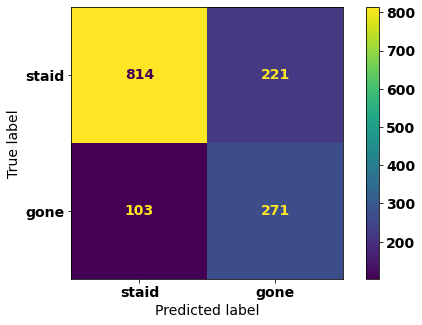

In [ ]:
plot_confusion_matrix(new_clf,x_test,y_test,display_labels = ['staid','gone'])

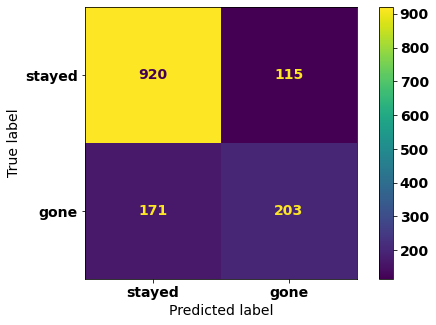

In [ ]:
plot_confusion_matrix(clf,x_test,y_test,display_labels = ['stayed','gone'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state=42,max_depth=20)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.801277501774308

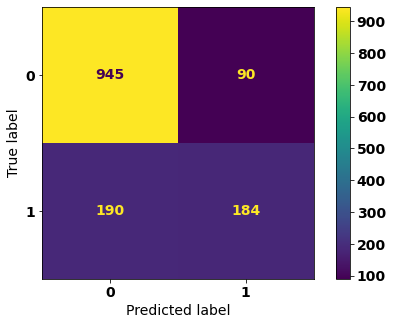

In [ ]:
plot_confusion_matrix(rf,x_test,y_test)

In [ ]:
from sklearn.ensemble import VotingClassifier
est = [('rf',rf),('new_clf',new_clf)]
vot_soft = VotingClassifier(estimators = est ,voting='soft')

In [ ]:
vot_soft.fit(x_train,y_train)


C:\Users\besho\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:31:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:31:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     random_state=42)),
                             ('new_clf',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.5,
                                            enable_categorical=False,
                                            gamma=0.25, gpu_id=-1,
                                            importance_type=None,
                                            interaction_constraints='',
                                            learn_rate=0.1,
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=5,
                              

In [ ]:
vot_soft.score(x_test,y_test)

0.78708303761533

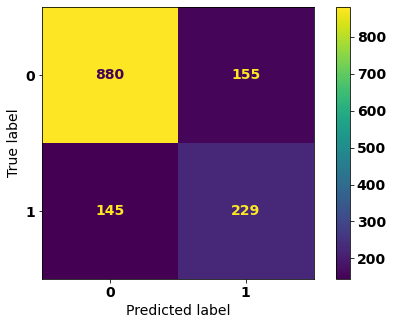

In [ ]:
plot_confusion_matrix(vot_soft,x_test,y_test)

<h3> we can choose now between xgboost or using vote classifer both are doing a good job ,almost similar </h3>